# Installs
- Seaborn
- Ipwidgets

In [ ]:
%%html
<iframe src="https://seaborn.pydata.org/" width="1000" height="800"></iframe>

In [ ]:
!pip install seaborn

In [ ]:
%%html
<iframe src="https://ipywidgets.readthedocs.io/en/latest/user_install.html" width="1000" height="800"></iframe>

In [ ]:
!pip install ipywidgets

In [ ]:
from IPython.display import Markdown as md
from IPython import display
from base64 import b64decode
from ipywidgets import interact

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

# Some Randomness, for Fun

In [ ]:
import random
random.seed(0) # pick your seed

# Data

In [ ]:
!pip install eurostatapiclient

In [ ]:
from eurostatapiclient import EurostatAPIClient

#Set versions and formats, so far only the ones used here are availeable and call client
VERSION = 'v2.1'
FORMAT = 'json'
LANGUAGE = 'en'
client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)

In [ ]:
%%html
<iframe src="https://ec.europa.eu/eurostat/databrowser/view/env_waspacr/default/table?lang=en" width="1000" height="800"></iframe>

In [ ]:
countries_names = {'AT':'Austria', 'BE':'Belgium', 'BG':'Bulgaria', 'CY': 'Cyprus', 
                   'CZ': 'Czechia', 'DE': 'Germany', 'DK': 'Denmark', 'EE':'Estonia', 
                   'EL': 'Greece', 'ES':'Spain', 'FI':'Finland', 'FR':'France', 
                   'HR':'Croatia', 'HU':'Hungary', 'IE':'Ireland', 'IT':'Italy', 
                   'LT':'Lithuania', 'LU':'Luxembourg', 'LV':'Latvia', 'MT': 'Malta', 
                   'NL':'Netherlands', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 
                   'SE':'Sweden', 'SI':'Slovenia', 'SK':'Slovakia', 'UK':'United Kingdom'}

packaging_types = {'W150101': 'Paper and cardboard packaging',
                   'W150102': 'Plastic packaging',
                   'W150103': 'Wooden packaging',
                   'W150104': 'Metallic packaging',
                   'W150107': 'Glass packaging',
                   'W150199': 'Other packaging'}

In [ ]:
par_df1 = {
    'waste': packaging_types.keys(),
    'unit': ['RT'],
    'geo': list(countries_names.keys()),
}

df1 = client.get_dataset('env_waspacr', params=par_df1).to_dataframe()

df1.rename(columns={'geo': 'country', 'time': 'year'}, inplace=True)
df1['year'] = df1['year'].astype('int')
df1['country'] = df1['country'].map(countries_names)
df1['waste'] = df1['waste'].map(packaging_types)

In [ ]:
print(len(df1))
print(df1.dtypes)
df1.sample(5)

3696
values     float64
waste       object
unit        object
country     object
year         int64
dtype: object


values               waste unit      country  year
2305    93.5  Metallic packaging   RT  Netherlands  2014
3197     0.0     Other packaging   RT      Germany  2004
1511     0.4    Wooden packaging   RT      Croatia  2012
2482    85.6     Glass packaging   RT      Austria  2015
1386     NaN    Wooden packaging   RT      Estonia  1997

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/gdrive', force_remount=True)
    dir = os.path.join('gdrive', 'MyDrive', 'Eurostat', '01 - Intro to Python for Data Science')
else:
    dir = '.'
    
data_dir = os.path.join(dir, 'data')
os.makedirs(data_dir, exist_ok=True)
data_dir

Mounted at /content/gdrive


'gdrive/MyDrive/Eurostat/01 - Intro to Python for Data Science/data'

In [ ]:
filename = os.path.join(data_dir, 'env_waspacr.csv')
df1.to_csv(filename, index=False)

# Univariate Distributions

## Displot

In [ ]:
%%html
<iframe src="https://seaborn.pydata.org/generated/seaborn.displot.html" width="1000" height="600"></iframe>

In [ ]:
df1.sample(5)

values               waste unit      country  year
2242    92.4  Metallic packaging   RT   Luxembourg  2017
1118    43.0   Plastic packaging   RT     Portugal  2015
3369     NaN     Other packaging   RT      Hungary  2000
1076    50.4   Plastic packaging   RT  Netherlands  2017
2786    81.2     Glass packaging   RT      Ireland  2011

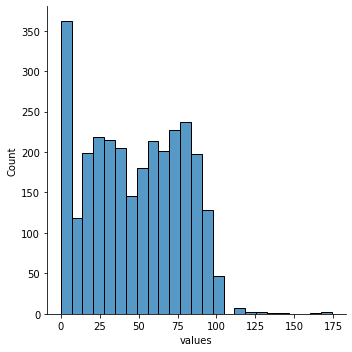

In [ ]:
sns.displot(df1['values'])

In [ ]:
help(sns.displot)

Help on function displot in module seaborn.distributions:

displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)
    Figure-level interface for drawing distribution plots onto a FacetGrid.
    
    This function provides access to several approaches for visualizing the
    univariate or bivariate distribution of data, including subsets of data
    defined by semantic mapping and faceting across multiple subplots. The
    ``kind`` parameter selects the approach to use:
    
    - :func:`histplot` (with ``kind="hist"``; the default)
    - :func:`kdeplot` (with ``kind="kde"``)
    - :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)
    
    Additionally, a :func:`rugplot` can be added to any kind of plot to show
    individual observations.


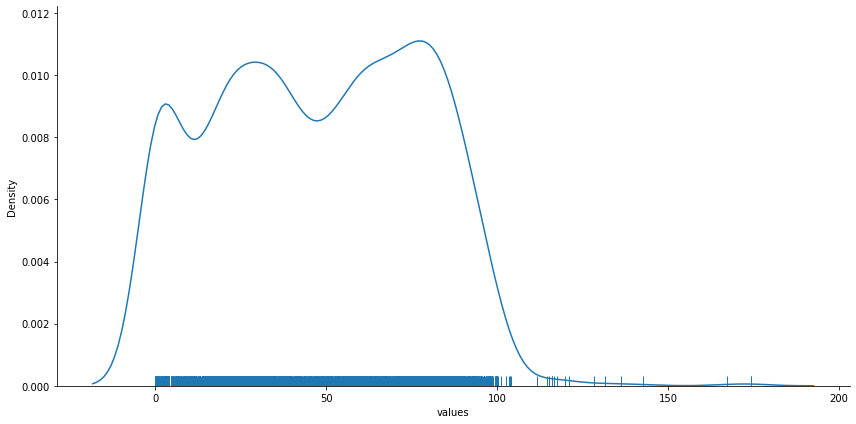

In [ ]:
sns.displot(data=df1,
            x='values',
            kind='kde',
            rug=True,
            height=6,
            aspect=2)

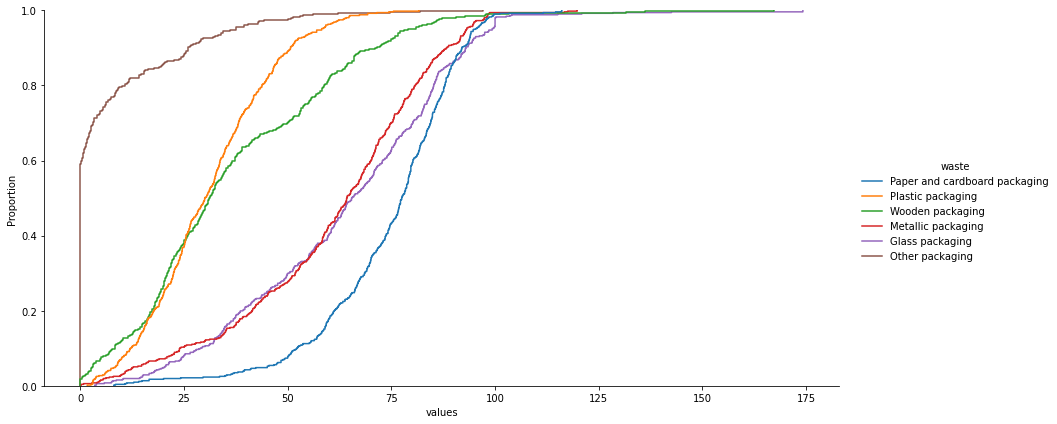

In [ ]:
sns.displot(data=df1,
            x='values',
            kind='ecdf',
            hue='waste',
            height=6,
            aspect=2)

### ❓ Exercise

In [ ]:
md(f"##❓ Try to create the following figure with sns.displot()!")

##❓ Try to create the following figure with sns.displot()!

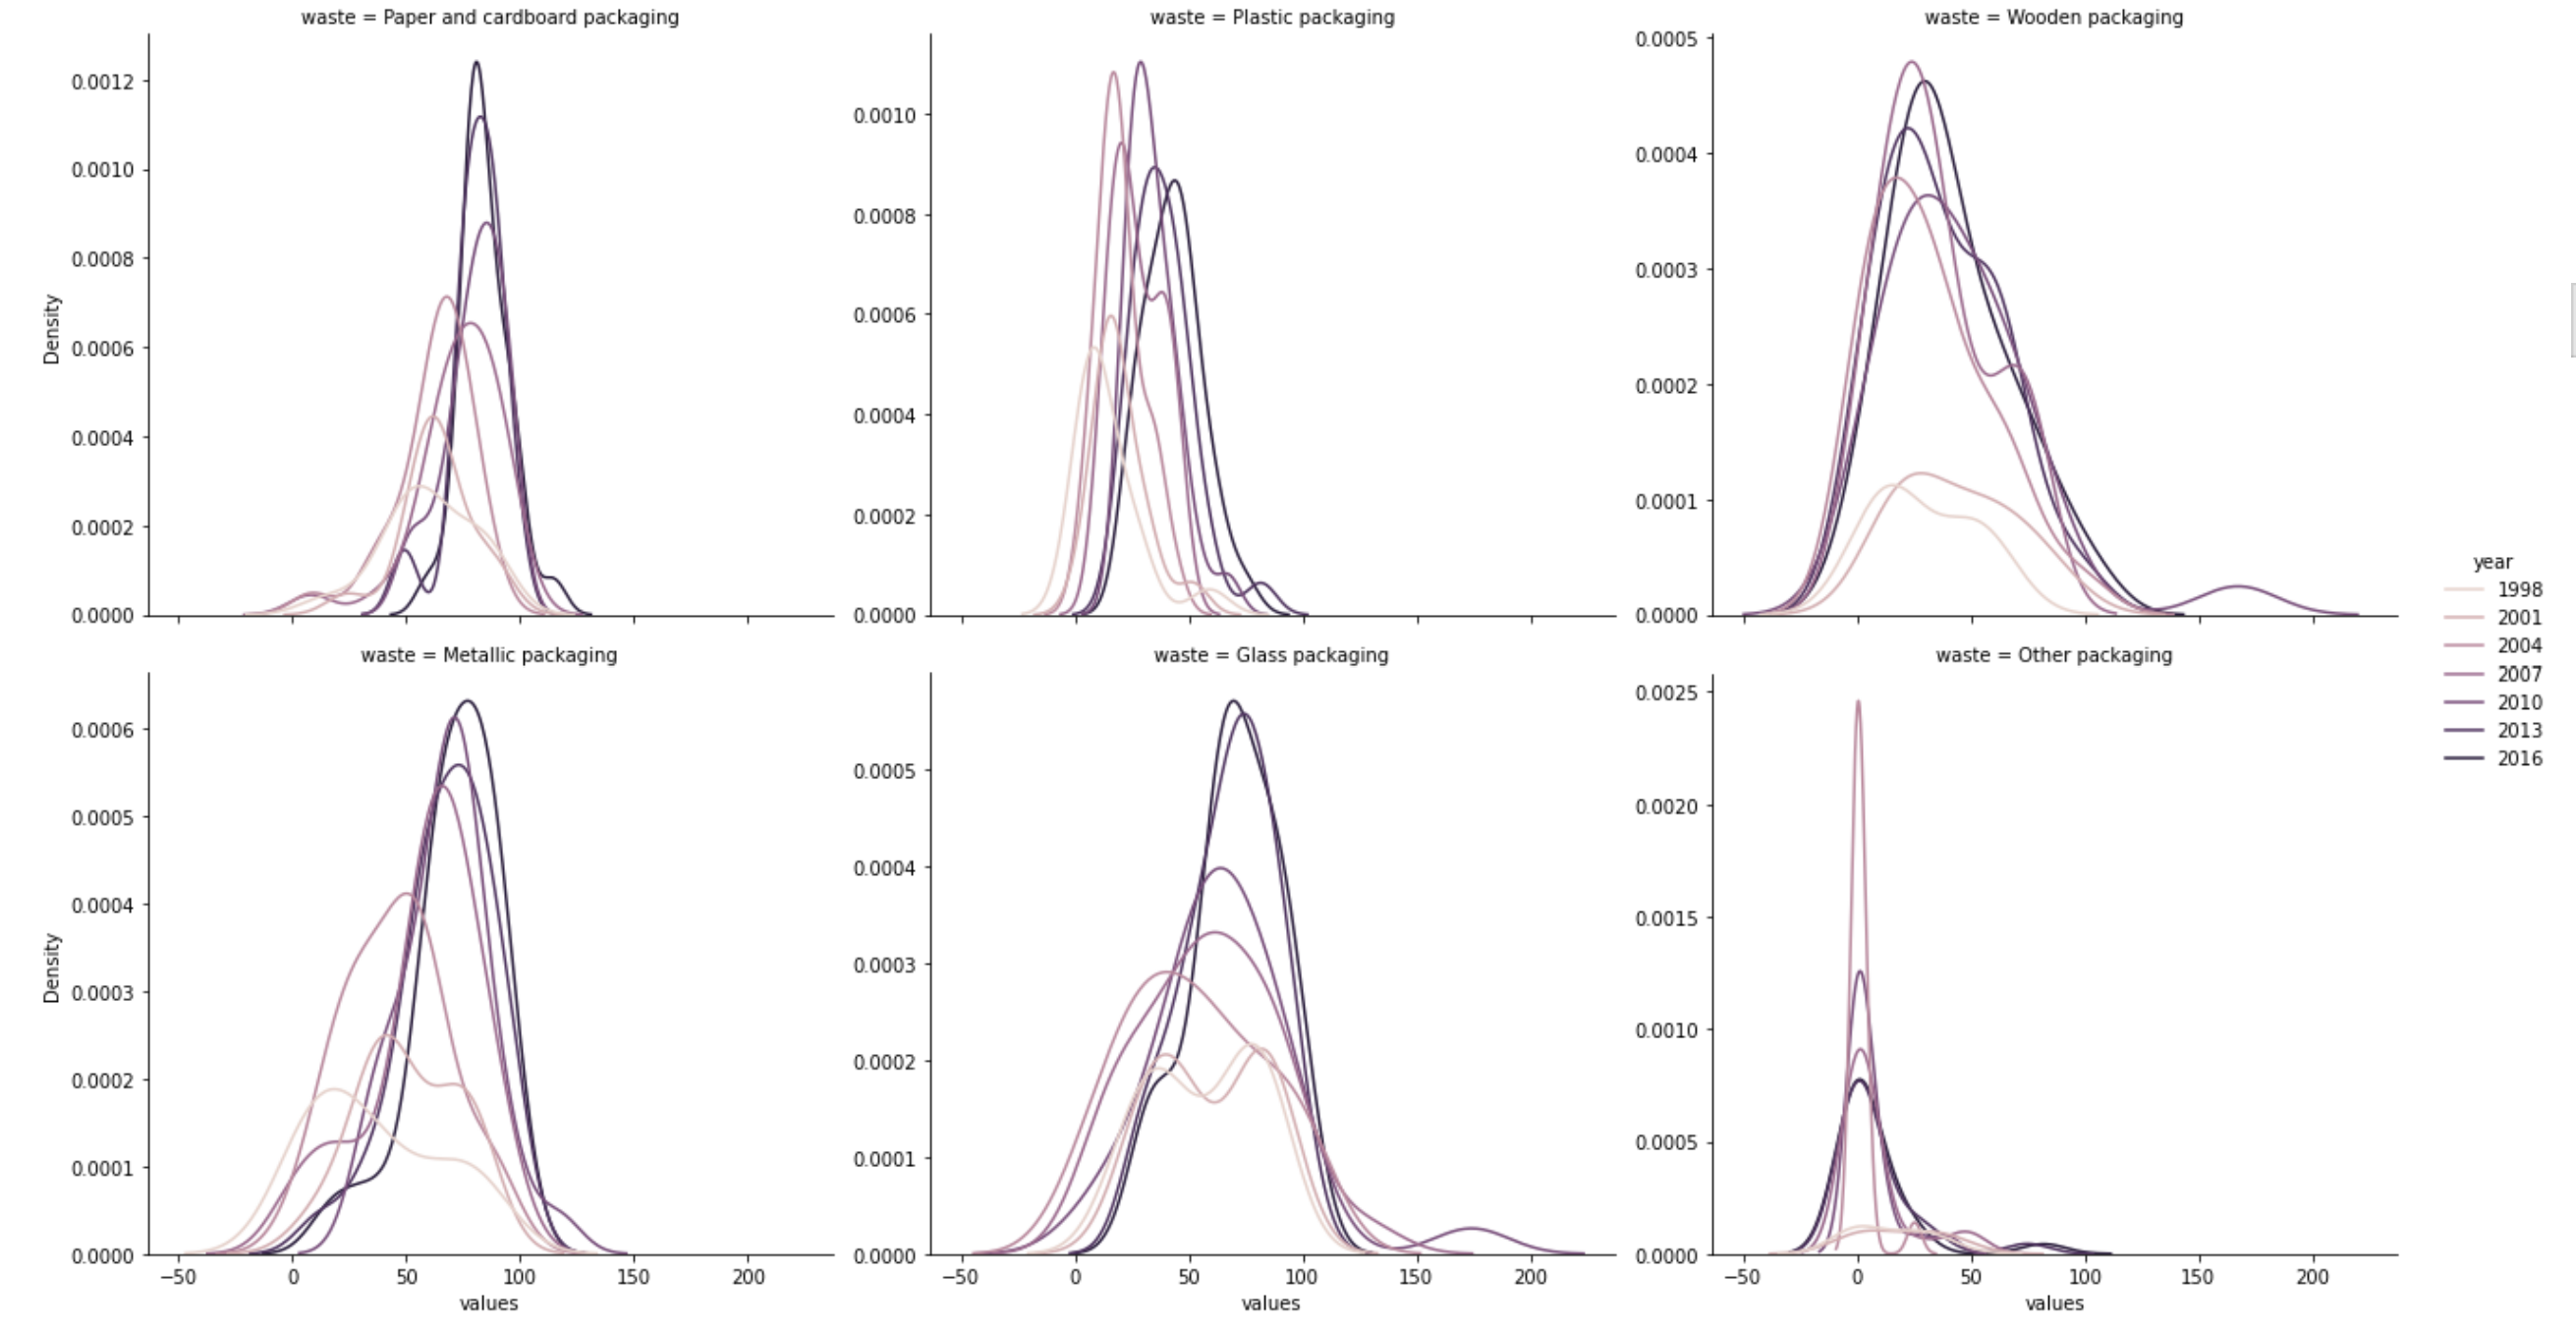

In [ ]:
base64_data = "iVBORw0KGgoAAAANSUhEUgAACj4AAAVJCAYAAADVceIeAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAALEoAACxKAXd6dE0AAP+lSURBVHhe7L33d2TXdaa9ESoip865mXMUo0SJypQsj8a2xrIclmwvW8lp5g8Yzw8za40/J9migyRrJDnIEi1KpiUGiRTNnHPsnLuRc2UU8N1nF06zCAINdLPRbKDfh7yr0FXnnlzA3ue8d5+aqQgTQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEWALUTr8KIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCnPZI+CiEEEIIIYQQQgghhBBCCCGEEEIIIYQQQoglg4SPQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEWDJI+CiEEEIIIYQQQgghhBBCCCGEEEIIIYQQQoglg4SPQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEWDJI+CiEEEIIIYQQQgghhBBCCCGEEEIIIYQQQoglg4SPQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEWDLUTEVM/yyEEOIkUi6X/aqtrbWampqjr0uBUqlkuVzOJiYm3lRnfuZKJBJ+LZX2nI7w57dQKHgf19fXW11dnb8ulT6l3swT2kGdY7GY1z+fz1uxWLR4PO7vLaV5H6BdtIO60w7Ghp9PdzKZjM+phoYG/36+U9B/1CPMiaU4B4QQQgix9JicnHT/C7A/lpINgk2dzWbdhqquMz9zYVNh32GX8m/SkZ73UqnUorYTu5++DTZxdVn0d6gztl+o33KANuPX8EqbGAPa+E4Q5jZ2NmOAj8KrEEIIIYQ4eWCTY3OF9e7gU5zuBDsRm5G6h3X5APZ6+Jz2JJNJt22B98JnXMHvOJVQZ3wO1uMB/ybU70yG/Tn6hPHieqf8rLAPRPn4e0tlr0QIIcSZhYSPQgixSBw5csR6e3utsbHRmpqa/MJpWwrs2LHD7r77buvu7nYnE6eGC6cZJ+uyyy6zK6+80n/mPXH8jI+P2zPPPGOHDx+21atX+7V27VqfL0uB/fv322uvveYLK8yRrVu32ubNm+3BBx+0F1980S6++GI755xzrK2tzdLp9PRdS4PXX3/dHnroIevo6PB2dHZ2ejtOZ1h8uOOOO+zpp5+2T3ziE3bddddNf3LqeeWVV+zZZ5+1LVu2+Lxobm5ecnNACCGEEEuPoaEh98HYiAn+F9dSYGxszP0vbChsa9oA/IzPhV111VVXWVdXl//7iSee8PRXXHGF3Xzzzb45uRiiPGzMffv22cjIiK1YscJtYsoPG5EHDhzwOmPrnX322dbe3u59/k5typ1M+vv73d8ZHR319uKr0cZTvRHMGAwPD1tPT4/7YPT1pZdeetr7J0IIIYQQSw1EZvgTPGAU9nRY1wy27+kK+ws7d+50u5W6X3DBBXbRRRf5ZzzIg72+bds234+gPTfeeKOv48Pg4KDt2rXL+vr6/KH6jRs3uq15qmxexJbU+dChQ/boo4+6CPIDH/iAbdiwYTrFmctPf/pTe+CBB+x973ufXXvttT4m78Rc3Lt3r/tFfCfYJ8En5VUIIYQ4nZAkXwghFgk2JnAI2Jxg0yQ8sbYUQPD4k5/8xP7jP/7DBWBsrD355JP2yCOP2P333+/CNhxqnGVxYjAfmB+PPfaYvfrqq76ospTmCHOaefD888/7K/OdhQradM8993ibWDjhidKlBnP7Zz/7mc95xoVFn9P9OREEqNT3X//1X124/E7CuLOYFhYK2awVQgghhFhsEOdt377ddu/e7f7MUvJV8APwub7//e+7Hfr444+7bccrm138vGfPHhfAYfexsXn77bf7Jib3EoVjMWCjlI2ul1566ahdTPkBBJv0NwJINlpJv1ygPTwQ9dxzz7m/c/DgwUXr52OBj0W0F2xsRKhsCi8lv1EIIYQQYqnAOjZ7OfgU2FzY3kthXRO7FZuddfr//M//9J8D1J912nvvvdcfnCJoAcE6AvhQrOfjV3Bh159KmzfYuqzHUzd8H/YdhNnLL79s//Zv/+ZBBpib1X7YqQSfDz+EMcInkS8ihBDidETCRyGEWCRwIJeq8DHAk3+f+tSn7POf/7z9/u//vn3sYx/zp/6IpoITStuWAojWFOBYAPOABRWxeBAJ55Of/OTRqERLJdKtEEIIIZY2bNrxAAhCPB7KWYoPabW2ttoHP/hB+93f/V370pe+ZJ/+9Kftkksu8c8Q4OFfnsoHi9goDcJHNroQPlZvhK5Zs8brS9SYdevWeRSQ5RDt8XSCSJ5E0iSafoj2wjwRQgghhBAnF/ZvEP7hUwTh4zvx4MvxQmTK9evXezRAHtbBLwqwDs6/2atCIIkvQZvCXglt5gEnxIcrV650uzNEnxcC8PPe+9732tVXX21nnXWWIs8LIYQ4LdFR10KIJQ+bL0QVA5yyhoYGfw2h/dmsIQw8x9bi/OHc4cjxGRszbBqwKYYDSFoufjWyYYNghwvnMYT3J4pFyJu8goiKI59Jw9FfvH7ve9+zu+66y48l42KjAtFg9dG/OJbB4Qz5UG6oF5sc74SjSZTHP/mTP/HjzL74xS963elXjmbmqUGOPqDeH//4x93poe+qo+LRBvqANtB/9DsONX1Gm7l4Qo30vNL26r7mFXifexgv8g8RROgT+iYcNxH6CAeeTU76l3EgPXmQjvrz3sz+JA1lhIv01Is6c9EGyqBN1JUFD9Lxb9IxX2gb95E/ZYXySQM8FRfGmfLC/ORJS8SjHD9x4YUX+hEUcx0TQP6Uw330N//mogzqybxi3tTW1noZPH1Hv5EGqCv1on7UjSvkOTAw4PmG+RbqSJ7Ma8aLvEJ+lMGTrxyrTPnke/3119u73vUu+9rXvuaRQtmUQ/hG/4X5zpxoaWnxf4cj0qkX/RO+f9SHPCmDtOE4Ef7N59SBulIn7gXSM76kpwzShzqH+UZaLupP2+hn0oa5S97AvUTU4WlKjmlG7Mv3l6PtwnhWw33MO/IIY844M1dCvUI/kjd9S334nVP9naF9pKG/uId/cz+fhzbzSnnhHtKF8eS9//k//6f/3vlf/+t/2a//+q97WykLoTL9yvwgLfUgr/DUcsgP6G+uUF8I8446h99V9CF1BPoxzHku+pQ5Rd24wrGLRF4iH+odxij0E/ezsEZe5BvmJumpf6gjn5MffUeaVatW+bgLIYQQ4tSBPYBdwN9i/o5ju/P3Pdi8/A3nbzf+F/YH6bmwofk7j23EvdgM2APYR6Tn4m899gQ2BHkCacmbMklP/oA9EtJzETHxu9/9rr8X/C8eyKA8bCzA9gh2DflSJm3gftLwip3Ce6cS/Kv/+3//r9vX+F8f+tCH3D5CbIj/RYRHbDeOtuYBkx/96Efur/3X//pfXSBJX1F37Cb6NfhYtI/28Dn5cQUbD3sqjEGwhYE0jCljRZnf+MY33A+86aab/Ng7NkTD8WaUg99BntiQwVZjTBnzMG4B8iQNdl8Y35lwL3OFenHRjuqLulHHYAeHe6gH91Gn6vkU2l5dXpiTzAXuCVA/8qd+bADfd9997l+Sz8UXX2zvfve7fd5V14+0tJ120qfkG+Y0+WFXUz42a/CBqCN9TvmMAe1izvE5F/lyP/1MO8mT9yiDvqZMPqd/KYv8Zl60N1yhn3ife6gn/gD/po7BtmfsuKgv310hhBBCiMUAGwS7Bjsm2EDYLME+wu7B5sfGwqfg/WAj8ordjs2GHUU+fE6e2EfYStg+5IcdhZ0D2D/YQcGGo1wu7Dwu7sHuY22VB6nwJxB54U+w/ohPEdY4KbPa5iYfysHeo0zqgG11qsBmp+6syeMPffazn/VAFvQH9fz7v/97/4w60S4+52Ea+p0okd/+9re9DQjbzjvvPG839mewU0O/0n76HjuR9EDfY1eSNtiwlEN60pGen0nPmDJ+pGWcgfSURZ+zHk/aP/iDP3C/B8g7jBvpSM8V7HteGbtqe5lX6kA6yqRs6l5dn7mgvaxrU2aoN3UOPihlhflHnswB+oD0tIn7gfuYE6G/yCvMCfILfgj1DveQN+0JbfuLv/gLH7svfOEL9qu/+qv+Pnng89FG0lMPXsmT90N+tB3C94A0zHPgc/op+ATUn3y5qDN1pW3kTd2pJ2PG++TDxdxhT4QyqRefUTZ5UTZp+M6QB5+FcumnsCfBvymHK9QbH5PvEXUJc0wIIYRYCBI+CiGWPIR65wgqjHKMbERkGOSIlwjjj/GNaOnDH/6wG/mIb3CkeHIPsdl73vMeP7qKY8SIzIhjg8OCQY5QEef28ssv9yebgM0nNn64H9EaRjlGOCJBIl5wz4YNG+yf/umf7Ic//KEb+FxsThBBEUEYm3DAE3iUG46rIh/Kveyyy1xIhmOPg3+qmUv4SJtfeOEFD7NPtBH6FLEbfc04hAUGxoI+J/IHjjLOCuPAhh0RQ+g3HCscHBwnHCxEZqSl7bwCaRgrRHaUx4YgDhDjyyYQ0U+uu+46H3f67rbbbvOjfs8991wfAzarGB8ceUSFbNIxB6phUYB5QhlcjAPtIB31ZnOLNjIu1Ie+IR0OGfVnzuCo0gbKROzHnGEekAbYwKSPmDu0gb6kj3AOceJoM5uIxxI+hsUZNnS5qCdt434caASo9AdOJXOcTTr6Ljjm9FuYy8xD6krfU3eONefIbfqUuvEdoE+J3kKf7dq16+gVnGry5GfKZp5UCx9/8IMf+BisXr3aHVnqzrzg+3HDDTf4fKIs6k4b+P5xjDp9SRvpGxxx8rzyyiv9u8O/+Zz5Q/s5XoFxAsaGRRnmG2XwneG7xXwlXTiiI/QDdWYzmUWrhx9+2H9/sFEKjDnlMMb01c/93M8dU/jIeDLvONp706ZNPuZ8n+lb2sHvIzaJ6QvqxXyjPrSZ71FoA+2jT0jLPSwKcD9zjGMN+T1BW6hbWGghHXOHuca91cLHX/u1X/PxoSwEtowzc4ynf2k/Y8nxIXwvyS+Yg4whF/nR78AYUj715TtFvswTFjgYQ9rG3GJe0Qf0KUensEDFxe8x+o7fiYwd9aafqVsYb8bv5ptv9t+ztD0salEu9QyLIcxbfp/y+4b3WPThd4AQQgghTh38DccuwCbg7zi2+/nnn+8+Ehd2FX+3P/KRj7hYDPuBe7CvsDHxv7BRsT+x7bBvsAmxi7C5sCewcbCNAbuAfIk6SD7kjw2CvY7th32DPYTNjb1BXsH/wg7BTsYGDXlRLrYb9ccOwpbExiAN9gx2Cu+dSuYSPtLW4H9xYZ9+5jOfsTvvvPMtwkfqjA+AvYX9TVvpU9qD/YW9hR3Ov7H98K+w27BdGQPGDJuN8cQ3I0/y+M53vmNPPfWU9zG+Ae/jR/OAEOX89Kc/dfuSjVLGA38Gm5d8OS4Pu5fyyBubN/jm1Gk2mC/4jdi+XIwT8wX7GvsP2xzbkznCeAF+FkeE49dRJ9LTduYG5eCb0HbmK1A35hLzCl8g1A8/h/ypH8wmfMRXYi4HvxYblrYzPuTFe4wn5XMfvhJ9j2/Dz4BtTp9TPn4Q7aL80H/Uj/f+y3/5L27D499RHmXgU7z//e/3/NmoDg9hYTtz8TN9Rbu5+G7ynQrlcg9jjz9AemxvLsaV7w3fGfqL71/oLyGEEEKIkwk2CXYNNg72BjYmNgu2L2vo2EL8zJo+dhnrl9h7rPViK7J+is3GuiE+AnYVdk2wfbF9sIOwndlHAOx/bC/sS9aNsb1Yx8X+Yj0SfwDbF3+CPIM/wYXdyZ4O70HYS8LuwlbFDseWwt4jLXXAlj9VBFv529/+tv3lX/6lfe5zn7M//MM/dPuedd1vfvObvv6P/4T9jK9BPWkbffJXf/VXbs9z8hf9wZovPgh+U/DTuBc7FZ8J+5Q05M84YVc++uijPm74V9jApKcM1uuxX0lPWuxk7F/KBd5nHRrbl7GnjCB8xEZnfyOMG/OFtlIutj02NnYrNj+fYYcTJZ/xpQ7Um/Yzx7BxqTe+KOMzF4wp69rkQ//gd+IPMGepD3OLNtGP1Jv0zD/8Hvww2kH9KJM+oL+Yh/QBNjd5UFf8PnwK+ox5x3xkDuLn8F3gYiyrhY+0CcHi/fff7/2Bf0Z9qAt1xB8iv+ALUQ/8NvqSvPHDgDENPiZjh3+DH8Sc5WIu0F/4hdyPb4bfyPwPvjffWYSqnAqH70hf0e/kRbmkww+nPcH/5LtCP4U9CdrNeHMv328+Zy+G7xH1OdU+uRBCiKWNjroWQix5cOpwLjDSWcDHaMZIxiDHWcIJxbENTzGxwYGQiI0DnC0McRySsEHAvRjdPMVEHji6OCO8h9OA8Y5jgPCGsriHz3jlCs4gF44eeXMf75M371MW9WVjJjhO3Msrzh/1owwc+bmg3tzD/bQbp+FYF84aebIx8nbASQGcMdpC+2hX6Af6mfGgn2kfThjvc9GP1BXxIK/0Mem5wniRnn+TH44p75MP/R7KIH8cQ/qQPiI98O977rnnaN9xP3WjjqHeM6ENjE2oY3VdKZd5Ql6MGeNIu1jcoAw+Zw5RPnOBtDit1IOxp2zqzb9x0LmXNrAQQ9u5l/vIdz4YN8aQMnFgg3MY5i15UCbzgtfqz0KZ9C2blryGdKRhLrOpx0Yd9SUt99Mu+oH2koa5yXvcQ98y90g7s2/Jm/rhsJKO9IwZ5dJvjB11Ii/eY9GKdtHPvB/upT5szFEuUF/aGb6jXJRP35APc4r7GFPe52e+v8w3xoDyQn+QZ7iH8qvHkYt6k/9c8yZAGn6/sGBDHzHGjC33M07MX94PCz9c1fXnZ/qHvmT+UE8WCagjn9MG8gibqGFswr1ctLca/k1byIv2ky/9H9Jy0Y/kEcohX9rNPfy+oE9pO+8zByifdtJv3MP7tJUFsDC3+f3F2DOOfJfJi/coi4u6sABDn5MPedDvpAubx9STPuJ9yuN92s37lEu9SE/+9Dn9JoQQQohTC3/XsXX4G83fd/72A/YOtiYbPtjE/J0mLa9sWPG3Hrsi+EvVtkj4GZuCe7HT+Hew07EJsDmwjUL6cFX7X1zBZgz34gvwPvWjvthawUblwu7gPWwP/DBsprngs2qb6VgXtju2LP1EHd4O2GX4X1xzQRraHGxe2s4rdhebWtiktJs0tJv+wDZnbPh36E/ayCt9WN2voU/5nNdg8+MrBD+CfEhHm9n8xI6lzFCn0OeM0VyQjnlCfdkUI2/sRvLAtmQuMEeCb0XdqAt1rm4HPzOuwT+jzpTLWIQHi2h7qF+4J+Q5k1Av8qLfKJ97gq9Ju0nDe6EP6Z9qX4d2UFds2yBA5H3qQHp+pr3Ume8Sti914T7mPn1S7UvxneI90lIv6s/7+CPkwxhwH2VSJ8plnjNm5B3Sh+8u85Z8GMv5/CAhhBBCiBMF+wYbJNg+2GbBdsJOwZ9gzZH3Scv7/Iztgw2GbRRs32B/cfFzsH2xmbgPGwh7DbuQPLH/qu8JV/AZuILNONP2xUbC9iIPfAjqwb3Ycvg82H3Yd/x7LsiX+2gHNuVMH2Lmhc2ILYkdPBcIOBHWIRYLgQawB2k/r7yHuCxErsQGDLYg9ScN7Ubshk0b7Ptgp9Jf/EyfYt/jqwX7mTaTPqzf8n7YDwnpeZ/xwi7FzuUe+otySc/P5E9+AdrAffQTefF5qC+vzAfs12CT0z+koc8Y5zBPSEv+9DVjQ56kn8vWZewZX/Km76kr7aGezC3Kxc+jTmFehLlCvuFifmBj0376gfqRjvfpP2xyPmOMqu/jIl01Ya7TJuY299GX1In6UgdeGacwt2k3ZVJf/B7mP5APZTKnaAf5kJYLX4f3whgxR8g3zHvKpY8plzL5N/su1In8yZcy+Tm0m58pk7Hg+0u+XJRFXbmHOuDrB0En7Sd/IYQQ4nio++OI6Z+FEGJJgiGPAY7RjcHMk0g8yYeDgwOBAc3TVzzZhAPHexjapOHJQJ6KwinkKSUi5oWIZzwxhlOEg4JTiPOIk4GBjniHJ7R+8Rd/0T7wgQ/404c8McbTTeRHeuqD88b711xzjUeCCE8j4khgyJM3kSO4n6e/eBKRJwxxHhD28HQV9ZgNHAbKYPOOI7WJtMGiwFwXzgOOC84t9TwWOKqIinhSkb7A6eXpOxwWnD7qT/uJAsHTZ9SZdpKWV/7NE2jkQ1qeKKPvqC9OIc4Q7fqlX/olv4f+oa9xJuk7ymPccK4oj/HiaTwiW5CW8cRJJE8u6obzzsYY/RrqQvRF+pwn/3h6LDj/1bB5SFuoI0/fEa2DMmg75bJwwBzjCT3uZ/7gZLIIQD0Zf57yowzqQj/TduYS448jxxjxyhgzZ/iM+RacP57K40k5IoDM9TQo84HIgjzpRr/z5Btl08YQ7SQ8PUl7yJ90tIW5T5/QDvqIecU9OJH0M+8xN5iHoY+JtEibcTz5LtFPHG3O0630E+3nHtrKmIWnBllcYBGBvqJ/eLKPuU/7qHv4/vFUJgsnIcoMn9GWT3ziEz4/GWPepwzmE98b6sD3lrZSB+rJ/CPiIM4w/Uk+pCVv5hvvsVBDdBYi4oQjO6hDcLKp50c/+lEfH76/fEY7mFOUw+f07WwbzYwx3xXqSj3JO0Tf5GlG+phyGBd+N/FKn9EfYb7xypgwNxkPymcucC/jTv15j/sZA74LjBW/L0jHd5p2cwwi3y0+431EwKH/mAP8rqGvmB/UjX7mffqRucITmHznGG/uoZ9ZbKB8xo0+5ilrIoHytCfwnaXe5MUTwZTL+NN/vEed6Tsg8iS/Qxjn8L1nHoSFDOYU/cN8okx+r/G7nXrxHaNcxp/fjyza8DuQvp7rd6QQQgghFgf+ZocNEOwc/nZjk7FBgtCKv9VEuMDOwD5gUwWbFxsIexEbAduHCxs62AZc/H3HvsAWxJ7FTsA+IpIEG1BEJ+GoZ+wd8ud+bBbKwdbFp8AuxcbCD8DGw2bCHsHGwfbkc+y+kEewU7Fh8F2oH3bwbITNLh4a+vd///dZ/a5w0R/YRNh02KfYYHNBG7Epsb3pB+qAH0IfkwfvY3PRVvoaG5f0/Ex6bCgufAnsWfo02PTBPsN/wjZjHPiZPPBT6MNf/uVfdnsr2JhE6OBijLAHg92F/0G/UiZ9Tn9jb+I7YbPRb9Qb/4Jj9mgHkSHxXcgfn4Q6k/dc/cHmF3Y8c4tNVGzlT3/600f9Hj7DNmXe4ePRbvIK8ynMJdIzfxgLbMjgrzF/sZOxNalL8AOIIo4Nz3vMU8aEsWZOMD/CpjvzGVuV9tI22sj8wv+hr7Grg0/JWOCXsGFOH1FX+gibnQgpfE/oG3wVfCb+zRxj3CmP8WDMKRc7Hf+aMaYfaBvfCfwZ+oRx+4Vf+AWf03wexKfY21zkSXrew7fAruciPe2jTuTJ9y5EcpnpOwshhBBCnAywObAvsbOwNbHRsNWwV7DXsX2xn3gPWyU87AGs12LbYItiF4U1fWwvbEDWSdl/wF9hHRTbFFizZ/+E/H7jN37DbT/Ss8aJrU4+2MnYVrySZ1iPDLYv+f74xz92mw4bDpuPNNiD2KXUG1sRWzJE15sJdhi+EWI0TgujvTP9iHCxLowvEPansNNmgzVrrrAOTntoOzYkF/YlfUwe9B8/MwbY0NSZsvC/WPfHhrz99tvdLqVPaSfvY+vi5zEu2Lesl9PH9Ae+BmMS0mJLYnMzxvgL3Ev/4tORN+3A/maNG3+FfLB1GX/WrLGBGQNsfuYHfYbtzYkC1Ak7H3+GetNOLtLQTnww6offwkV62oxdTx/RB8wbbPPZbF3qzFxhrOkf8sZOZ5yxj+k7/FVsdfwG8sGWDnsxzAku0uKf0Cb2kpg/pKWvsLvJn7l6yy23eP7MR9bu6Tt8CtIyR2gPc5H8EBliy9Of9Dd9h3+Hf0GbKAN/hjYzz/G9KJ81edb6qR/9Rn3Ih75lvIiySHr6nvlLX1IH7qHc4H/hUzHP+Yy644/yvcRf4bsaxob6MH+Ye8wz2sT4MteZD9SVtD//8z/vn9Ee+oO5F/qB7xh5CCGEEAtFK1hCiCUPBjlGPRtKOGoY5vyME8YrThKGMhsXYbOAz7gHBw2HByMaJ5j0PJVEHrySHscS4x6nIGzy8TmOOeCEYOzjzOII4ORg3FMv8qccnE02InCGcLQoH0cUxwBnGmcMAVUom3bgpFL+XIR60z7qwGbLQi76YqHQZhw5HCE2r3DKqC/l4YDgKOLY4fDhFOL8hjbw9BwOCwsTtDcQ6ozTiLOF44ZjRf/xGX3BGOGA8YpTyiv5hT4iDU4bdeEz6kkdwkW/4/yRP4sXlEWdqetMcHDDAghzJLSBMsiX8acOvBegnowx7cepY2MJp46xZ67gwIWNMYRe5Mu444jSXpxOxFrUk7KPtaFEe8iLPNmYZNzJg4tyuWgjc5B+pW6k4WKu0h7Gg1fyYN5RR8aEfAP0Df3EPMVBpq6UTT/goOLM8llwmtnEm2s+0R7mP84x/UNd6R++H/QpY8b3hzEMQkjyox20J7SNcvkekI66ki/t42fqz31hvtE2HHO+OzPbhTONE82c5cIZ5x7mGAsYfD95nzKZM6SlL+nDhcI4MgbkRR70E4sPLHCwaUubGQ/aQJ/RNjbnGZcwr+kbvi/MN96nj4I4k0UF5gx9H8adRTUWpWgfMF58DxljBMN8Z2gfY8nYMb7MW8qnbdSBfgx9SJn0Cd9z7g2LTrwHzHd+h1E2c4R+JD/6eCF9Rf1ISz7h+8lFn/H9pCwWqCiX8nkSl5+ZD/Qn5dIHLJRRrhBCCCHeGcKmCjYFdiU2L3+zsUOwb/h7z992fCvsODb2+NuO7YgdgJ0VbHDsEWyQYI+QjvTki22AHU0aXklDOdyPbU0dsAt4xebC/sRmpQzsTuwG7Ac+pzzyZeMQuwwblyuUiw0SNluqfZeZhHpjY1X7WHNd2Cxs5HDfQqD/sOXwv9gYYtONOmFHYfthpwbfZTYoh6vaxqOd2HNcjAc2JvYy40UaXhkz+i9s0tJn+Db4K7xP/9LX9Cl2IHVhjGfagNSfvmQcmReME3Yc9hx2LPdiB5LnfGD303fUJdjqXIwv5WI7M08ok3+Tnn6ifdXzCfsany74d8wr+oE02O/BzuSqbluAvsQeZ37gjzFfGQc2X/FfsMfpc/qQizUDyg59Tx24n/6nbOpLPbDzqS/lhjqQZ/BdFwrzgU1I+in4U/hevEd5tJM+4WfqQf2Ym4xDGBfazBgfrw8khBBCCHEiYL+w1on9ga0SbCTsFF4BWwa7hHVTbBhsOuy96nVBbK+Zti82KDYia8SsF/M+/gQ2L7YZabkHewi7C7uOi/rwHv4E9h3vsaYa1pLxgcib9UrsOOw56la9X4GQjL0A3psL2kS9sXNpR/Ab5rpIQ9ncMx+kDYJLfAjsT/oBv4320HfY9/QTn9FP2InkT39TBnVnjT3YqWGdHjuT9Xvaynp+8CtoM/Yu+Qeblj5jT4BxRuhHWYxt2JugPOxV8g72N74HfRKgjvQlfY0tj49BH4dx5t/kS56MC+MafALagj8YbGPsXvoSH4i6kgftOxbkE/Y3WA+nrqz1Y3MzH/EtmavkE8YG/xe/NcwJXpm3tJmfqSP9RXtoK3VkbTz0Mb4W5VX7Ssxd7sEvpL34w0HEyHjibzG+zGnaTx3oHy78FsaY/RXqzHeA9lM+dcfnqN6vop+YH8fjv5KOOtCWsK/EK98n5gjlM/aMXfWDhswRyg1zhd8FtFUIIYQ4USR8FEIseXBa2PzA6MeQxonAwAecKD7DWeB9nAMcBZwMHFuMcoxznGuiSRC14ytf+Yr99V//tX3961/3p+r4jAvjHNgMwGnDqfrJT37iT0zh8JIGh4hrLnCEqGdwOijzjjvusG9+85t266232j/8wz945AccGRw2nJG5wKGhbThcv/Irv2K///u/f8zri1/8ov3u7/6uO1ELBQHW9773Pfvbv/1b7xciXeKc4EAT6YM+xIkieso//uM/erq/+Zu/8egePMGHc0q/hfEAxovFAuqOExr6k7xwrugjHEKiUXDhpLPBRJ5hbIh8SN8xnjhrOJTch3PHeJJXEJnOB3OBPBjrMA5f/vKX7Qc/+IGPK3XAkQ6LLkCdceZpR2gDZTHfyI+L+uDg0hbGCqePjTXmBxulOHM4qeRzrI0tHHKcw7DZS//hPOKEAvnhXNOHvNJ+5g7t4QnKv//7v/c2fe1rX/Pxoy3kwxwkX6A+LOrQbzjvtCMsRvC94X0WNmgrbaG9LAAxXixKzHSEqRPtYgzIl3tIF9KGPqKeLBIACxHMK8aQvgwLSvQ7V7gHJ512fOtb3zraLtrJHGSu0LZqJ5l+woGn72kndeM7SD9QPu1lg5ExoF045czN8HtjZtvmgrypM2WRF+OE005+lMViWFhko0+pL993vjO0g/nGU5x8Z0hL/9PusIhCX1JP6hhgvCk3LK4w5/h+IlLmaVvqzxOjzD36NiweUQ/66u6777Zvf/vb9ld/9Vf21a9+1f7lX/7Fn5Tld1kQGfDdoP60g7axgEZ5jA19ywILfRvqcCzoS+rLvA/zKcwl8qWd1J9ymZ+0nXnNQg5pmBu0g7mykO+2EEIIIRYH7ADsuuATYbtgp/E3nPewEbAf8QH4e47dwaZH8Nv4+4/NxgYQvhT2HDY+F1FYyJMLG4Q8sGHIlzKwcbFzeMWv43PsO+yEuQgiP+wabC3KxHfBTv67v/s7+853vuO+S7C7aMdcYINgkxGlfDafq/r60pe+ZJ///Oc9ojp2z0LATqQPgg2Pb4jPg13H5iA2Ibb1bNBO/Dfa8s///M9u45EHfhSbl/hljAP9SH3oU8aBh/HoUyJ2MCa8xxjRr8cLvmGw77GNmQfVgjrqznguJG/u4wEZ5gxzjjy4sAexS7Hp2bTDbsV2pB3Yt9jYzCX8Uv6N/4DdT9v5mf7EdsUeDTY/9Qr1m9l2+o3NXXxS+pF6cXIBG7ukw8YNdjPpiNxD2fQ/Pgv2NXMV/5/vCvYuY8CcxDbGb6IOEESe2N4LhXvZPKQtof70Fz4Jr9SNMaXt9AHfT/qV7yNzgHuY1/Qp47UQu14IIYQQ4u2AvYFNgh2DncJaJDYS9h22FeuErB9iq2BDhT0dPgvCR/wA/AzWU1nTDP4E+wbYbOSJT0G+weahXOxd1pJZP0UQRvl8fqw1YOwpysMupC6U+a//+q++f0SZ3/72t92eJj/sUtoxF9jhtIG9FfZqZvMjwvV7v/d79oUvfME+9alPubBsPugX8gb6hj4Lwkfe56LfqSOfhbV03sMexJ/ATuXCjsReZm0/rMmyRsvP3Id9TTr8J97DPwz2KPeQllfKx68jHRf3YIeGcSQ95SD64/0ANj7lIJYjMAfR2sMeFbY2D4qRBv8JGxvbOswrbGraQ1/zHv4Ha8u0ifkQ1r2PBTY1fc7+B/UkD2xl8oHQ9tBf+Ar4lfi2+AH4Y0SZx0fBBqd+XGH/EnucvQPqSP8BvgX+AfMxwJgQ9ZG9A+YVe4H4ITP7i/mOP8f8D3t0zE8epmPeBjEk6agD9+LX4tuE7wffR3w4vnu0fyHQv2F/JfgXjAH50l7mGm0Ia/2AT8tcAdJyL/sLC/UThRBCiNmQ8FEIseTBKMdp4RWHBeOdDRCMZBwuDHWMdhwMHFMMe0RFbCZwH44O4jQ2JHB8cLow8Nk8wJnBYEdQhKEOGOGE7eeJJBwTHBWePCN6COHm2Ww6FtQRYx9HBWOesnBUMPB5ZaODcP4c48Z7c0E+OFU4mbSLTbxjXUSoQMRHfRcKmyX0H44Y/YHDSqh+nBMcGpwlBIhsolAfHD82TKg3n+O00W/VjiTOEPnixIWNIi76AicSGAecIcaJ98iLfiJf8qePOF6AYyaoC2NCWeRDnowrY86cmA8cbzZOGTfuoyzKoDwcepw8nFgWNwKUwdhTN9pDuZTFz4wtF3AP84vPqU9wGEN6+iD0w1ww98KcIT+cx7AoEKDtXMwp5j8LF1z0IX1De3DSaRv3hfkcFmF4j7ZTl+BghvlFmbzHmNG+0M/cQz1mc4JJQ17B2eXfpCMfCH0U+gdIyz2k5Z5QHnUkLXXhexoiQFLHMFbMC+YeaZkztC9AmTjavFJv8g9tIy3vh0WQ0C7e46IeCyXMiZAXFz/TbsoJ9eL3D79reKWsMD58x5hv3Md8C30UfqavyY86BsJY8FoN97BoRf/yeZhn/MycYK5zMVeoN4tLzA++S8xT7qcvqS/1Zq5QV8oP48l9Yd7Qxup6zQVpaB/3ML7kwXuhrymTOlNumBuURZ1Iw89hXlG2EEIIId4Z+BsebAB+xr/A18BuwLbBpsFOw95is4rNLmwTbAnsMmwbbCE2sHjFL8P2xibC92DzA5shbEhRFg9ycBww/hm2Cf4PfggbXmwmBZtyNoItHWxf8sDuwf7h4qEKRIUc5Rx8vLmgjdhT1Hs2n2vmhf+FzRXKng9sInxYbEMu6hkiYYSNR/p8JtSJjV3Ko1z6L/Qp99Gn2E/YWPQHthXv41NhS2Nn4dNxbDV+La/U+3ihndiSwLgFOy/YipSzELsRuI+xII9gN3JhD/I+NiPtxjfA/8cnpw+YY/Qd7WI+YTtyP/VingQbE3t0Zv1CGdVQDhf30Sf0If3J/eQTbGY22PErmZ/Bfw02PnWgb/hO8Mp8ZBxCe6gDUJ+F+rEB7iV/+jv0L+MfrlA/2s8r31vqzn0hfXVf854QQgghxGKC/YFNEuwgbCTse/Y5wl4AezTYMvgTCKbCOia2Mq+kZZ0YYRzpEKmxf4GNi09C3tg+2F6kxzZjvwX7H3uHPQEeWsF+Cw+CzwX2FLYbeXFhb7KPg3ANexubnYh52NYc3xxEXbPB/diVPDTD+uxM/6H6Cvs5tP9Y/k4Am5B+gyBsrBY+0q/Unb0X3qfP2d/BtuViXLBTuegz7MtgM4Y1WaAu2MQhLWBHhjViyiMtr9igM21g8iRvxo30/Bz2WQKhn6gHDwoxtlxhL4D9s49+9KMeIII2hbKpB7Zu8FWpO6+8T/7Um2s+yIt8qBf1DXkHO512cDGOiB7pa9pJu0MdmXPcE9baaX/4OeRN3QLBNp9pjzOPGbNwL3mG/qJMfNOwH8S/w54J85PvC+moK35KGA/ew/6nPaFc2km9GGv+vRBCPwUfprqfaC99zfcntB3oI8oA0lGP6vESQgghToSF/eUSQojTmOC8YGBzYejz5B5GMw4vzi7GNM4szhyvOAg89YUxz0Yd6Xn6iU2w3/7t3/Yn6Xji7n3ve5/fjyGOcU5Z5EmEh//23/6bC+9wMnAq7r//fo/owEbRXGDkc5EP9cMB+fSnP+1P71Vff/AHf2B/9Ed/ZDfccMP0nW8Fh4fNKaJDhogex7qI9kHkEDaxFgrOGU8UEqmEev3Wb/2W/5uokTgwON48HYmzxIYh/UI6+hDHM4jRaHOAts/nwITPKQOHlk3I3/iN33hT//z3//7f7bOf/ax95CMfcUeSOYBjhdPG63xlBFg44IlB5gXl/Oqv/qo/Ucm4EC2PzbLZ2kAZp5szhvPImLDog9ONY8uYEG2GNn34wx/2jWXmPW3C4QXawXu8niqOt99Y6GBzm+8XY8zm9K//+q97JFPmAQtLzBe+p9W8E207FixY/ehHP/Kx4vv9y7/8yz4+zLsPfvCD/juINlTPt4VCn9I3bIjz+42nOfndxMJIgCdg+R3APKFP6Ed+1/G9oi95avREyz8W4Tsz23cz/Jv5eLLLFUIIIcTJJ/xdx0dikwlRIzYa9g0bavhLbLbwbx5cwWfBHmFDi00N3mdjiE1GbNJPfvKT9rnPfc7tVSIpsomIPRNscO4hauJv/uZvur2OkIyNTjYoiYhIBEfsnmNBPtiE2EjYxMGvCBdl43/9/M//vG/6zQW2FL4jUftn87mqL6KREG2DaOUI9BYCG0Yf+MAH7Hd+53fcRsRO+8xnPuMbqPhWtGGmLQX0B/YdtiZ+DQ+r4dPStl/7tV9z/422M27AxhJiSvw7+hx/Cp+OMeFUA9pHXu80tHW29gLvs5EWBJ/Ul/Z9/OMfP9p2xhN/Ep89bE4eL/gY+FDMd8aRucYaAv0F5MnPCHl5EJKNWfwUfGj6l/Fkg302X+VkQJtn84FD3zH3ZWcLIYQQ4nQD24X9Eew07BQeYsFvwBYPezqsXbK2yUMu4UF4Pic9NiCCM+xA1jOD/YztjC3MGitlYAfxij1MGmxF9jF4/+WXX7Y777zTo+SRz7GgTMrHjmY9Ndib1dcf/uEfuv2HPzMX2JP4Qv/5n//p0edn8yPCRTRJ9nSoH/0wH+yB4Y9hA1IG97BXRj+zx4Egk/7GH6Ovq4WP2LvYlKcb+JX4gpx4xviGvmZv6H/8j//he1A8bETbgbFmnKrtYgj/Pl67eGY+M2FviYj7CGeZs7fccovvXTHX2EejbjP3lo4HysePox+YO4hlGbMA7/Hd4cIn5LuDLxL6if1N+oaxrd4POpnM7PPwSptPtN1CCCHE8SLhoxBiWYBhzeYYThqOME4r7+FscLHJhlOAM8dmUXiaCcMbRw9RFRfCSTYqEIzhBCIuxGHgaSicApwDDHmcBZwNNohwlHmijzJwMMLTgZRPWZTBhgz3Y/TjZOAgkz+bH+RJWjayyJMLZ4bPjuVscg95sPGH404UymNdPAWHUJP8Fwr1xOnFKeY++oV/00/0AxuYCOz4mff5nDGgTThgsz09xz043OFIPNKQPkTkpI9CeeRF35NX2HBi0YLP+Zn2zxS1cX9wrhYCdQiRO8iX/uSVNrFpyLyYzUlbSDn0E3nRPhZP2CQjH+YVTin5c4VNs9mgbcwD2k9+9B+LFmwwA/kxt9hEI1/eJ29gnlM+/RicW+Y76Wa2aWZbwsYweTA2LIZwL3lwsdnHePH9mNk31Id2scBCXUhPupCWeRUWtngCF9gUZy7xOfdQHmNPu0nPeDAPKJd/832hbXwX6T/6Za6NRO6tbh99we8L7g0RYsJcpP+Ym1zkObNtc0GfMq95Wpa8mDcsfFBfBAGUFb4ztA2Yy1x8bygn/K7h59BPtJNXxpz8qr9TYcxDu2kjafmddN1113kfM0Y8+cxTwtSJ9JTDWLJ5y9zgu8bP1C38rqN86ku9g6CBtpEHn5OO9/juMK8Xuok733cm9De/T2k7+fK7O3x3mCPMlTD/hRBCCPHOgZ2I7YwN8dhjj7mtFvwvbBzsKewQ7I/g+2ALYEdgU3BhlwX7HtsT+HvPZ/ztxxbA9sAOxm5k44ioHoj2sGGwRbB3yBPbJQgDsZmCfcL72EXkQT34nM8QGZIHF3YH7Qn3zwU2E34IUV1m87mqL+yxa665xoV3lL8Q6A9sr2An0i/UDZuMz+aqG+2n/3klTdgcIy/uw/YLdjltp3+oE33KeNEeLjZp6fewcUZewR9hHLif17kINhxg82JrU26wYbmf+XCsPALch/3JPKJd5MHF/AgnPNBO8gpl0CZs6+DPA3Yj7Scd9eMz+iD4pMxf6kW7eSWfYJMC85Z+wvfHn6ZPOI6cNQfmKXWjTfQ/F/MobCzzM2mwZck3zFHqySv34TdRB6C/sH1Plq0b5gvlBp8E/4S2Uyb9QJupdxAUhO+NEEIIIcRiwzomdha2JtEXsetZqww+BXbJCy+84DYbtju2HGmxX7DvsLNIg02IX4Kdjp2FbYM9Rbpg7/A+ebP3g92LP8ErNhq2LzZSsH25uI8LuxBbinLxBagHdhw2IP8O/gS2O5/RJu6fCz7HLsOvwVeYzY8IF/4EezrUlXvmA/uX9gHr8vhK9AX1Cf1HP9AW6k9/Y//Rf9jItIf6cfE54lLsbPogrMlCsLXJi7QQ1v6DbUla7mVMWIcP+dJ3jBt1C3sN+A3Ul/cD2OCUgw9HvoxT2BuivxnL4GPSHsYIgv07k5nvV9v7s0F5tJ8+ol78m3kY5kloO+9jz9MO+pH5TB2pD2npR8ri4h7aQJvwc2gz+wihLvgr+AfMuwD5EJwEP4S8qQtBLwhsEPqF/sa2Jy32PuUzX/g3n4f6A31G3/Ee9j/3hu8IeeAn0J6Q/u0Q2s3FOAU/kX0O5h3wPaUe+EsL9ROFEEKI2ZDwUQixLMDZwGDH+MdQJjIcDg9OAU4yTh3CHxwVjHsM/+DABucjOCtcGPo4JqQPThppeJ/0XKQjb54gJOogZeEA4iwA5ZMn9wWjnXri3FEfnE3+Tf44OaQJ4GTgWIW8ZoO8cf54opEn3ohScqyLaG5EUkEkebII/UGb6FdecdaItoEDNlv9cWbYzMGJwsHifhwpHFwWGegT+pX+xBnC0eJ9+pa86UfGjZ8ZF5wi8jlRyI/yKRenk37lPerHwgpO+InCGPOUHWPLE6jkFepOvXFw5zuqAgeVuRbmDH3KBnJwDqkr40AbKIf+pAzuYbGCeUj+zDG+GzjELCrMR5hflMnYME+Zl5RDGYxHEPoyx6uhPrSLORCcVtKFtNQNZ5fvIYsx9D1ton60hzoyR6g37aYd1Cc44dzLWNE2vqfcS/rq79Cx4D7mFosutI3fDcwl7qdfeY+LvKnPQqBPqQNzn35inIgGRH6UxcIHYxm+M/z+CQtEvIfDzzGNtD1Au9k05ZW+pL+ZOwHuCwtEAfqWp46JLMNCB7/DiArLXOa7R3tCP9GH9CX1YmzCcZOMERd1ZDGG+tMO+ol2hXJ5LyyiVdfhZBA2jMmXfqEM6s4cYSG0up+EEEII8c6ALUNEEWwfoudjJ2DDcyH64u83f8exK7AnsDv4GXuSv/HBX8J+AfLBBgs2FGD/YbtgA3Ev9ikPnRGZ/YorrvDPw4YPNg35YVtyT7BPKIeyqS82Bv4FZVSLy0iPfUtex7JrsOmI3vdzP/dzs/pc1RcRSYj6R4QSyl1MqDM2Jn0QbGf6gTFhHLDNeaWd9Bm2HOmxr2gTm75sqhKBHL86COOA/sPPIy39fCz7ONhwgG3MeNKnlMX4UT4/U4f5wBbHtiaPUF/ux4fioTLqxaYer2E+Mc7Bb6Bc7qXt/Ey9sY/xP/gc+5vPg79C/SiDuVZdP/JknYHj1j/2sY95/t/73vfs8ccf9/6lbqTnfvqcz8NcZ45RV3wp0gXfjs95pSzsW9oK1AdBZZj/Jwv6BruesWXDlrGh7sGHpH9CXy9kbIQQQgghTgbYQ/gNvOI3sM6IvRKEj9gpTz/9tNtKiN2CTY3tx2fB9uJ+1jGx5bCjsHWwGYPtStpg57HWzRHAnMSD7cv6NHZysNWwe8O+Efdj0wUbjvJZT2bNOqxXBiiHeoa85oL1WHyom266yaO7z+ZHhIuIfUSW5EQn9hjmA38nrLUHUSN1pT2ssWMT0pZgq5IG34g2BZEhn+FP0AbsZWxl0mKz0mag/vRbSMvn7GVxBduStLwiSMWWpnzSc2EjUzbr8YwL5Wzbtu1N/lnoJ8aXvLCpSUtZQLvw38hjPh/lRKAdzEfW47GbmTvYypRJ/9IO5gT9Sb14xdfgfeqID8J6fLVdT3rmMemYo/ik+FyhTcxr+p2yA+SL/8l84TtBGkSPIcok95Ke9of+ZbzpF3wQvgeMIfWn3ow1PhRtYq2fz+g/LuYv91B32nQyYTyZC8A+B31J3ekf6sE8pI60TwghhDgR6v44YvpnIYRYsmAk40jhHGEoY6TjvLIphjGPAc1RaDgBbMQREY3NneAUY8zjYIWfEdbgbLH4j9PAPTgEON44A2xycJwbThcbE6RncwgHLjyFR31wVCibfPgcgx4Hg3KA8qkzjiNpEGziuOD4cD8OAZuEc4HjQ17BwV/IFco+Fjh1jzzyiJfP02S0mzKoezVsmuAU4UjhfNJ3vNIePsOxYoOFsaBs+gAHmD4hv7BIQF/iVPEeQlLGh0UIFhpwwlhooAzGFgEh/cRFH3EPDjZ1pc5suhLCn3FYCNQFx4q24SzicOJ88UqZ5I/DSGQZFgAYa9IHQVhw3IH7OKYCp5w6BIc+9AUOI+0M84v2ANFDWJSozmsm9BWLE4wfCwOMEeXRD+QTHG5gTPicvqauzK3gqDNGzE/GlbyY3zjh1Is+o51AfswvvjPkwVymHfQLQkMuHH3mBv1Am3FeGUs+YzwYP8aIe5jXjD/fRzYNL7roIm8raagvc4b8mPsI8Ogf2stCFJva9D3fFfqQMeP7SptIz7hxkX9YuGLe8G/uoe94n+9xNWHMuWgj/UNfUl/6ifT8DqGNLEjMnP/A7xrmHWPCnKDPqBfzlN8NtI0neGkzixP8/ggLGvQ53xfK5WfmG3Wl7xA0h41coM1c1It8gyiX7wZ9yPeLucfcQvTI/dQljAH1ZLwZT17DXCQP6k49GF/mFHOVDfoQ0YYrfG/Ji/qSjnHmXsaf36cs3NAHvM88ILoRx/mHvqN+pOeIynDkC+0N/U/+fAf4/gP1ZLEj/E5hbBhv5gnvMXfJi7EVQgghxKkHewu7BtsHm5SHL/jbjJAOG+app57yv9nYify9xv4L9hI2EfYcmxvYANh+wc7E3sAOwz4Ofgi2BVElsXWwhbi4H3sAuwLbB9sB2wL7L/hf2A7YP2xSYs/iN2A/YVtwP/lhp2LbYJNgs1AmttVs8HmwsYJ/Nd9FX3DfsaDe2JTYYdhg2FGUQZtmg/4mPTYY6akT/RT8BPqV9tGn2FDYfWyEhjEgX9I9+uijnhc+GfYr6bkXO5Q+xb7HTmOcGRfGkz7FbiQ/7DL6D/sVn4ax52JuYAdTJ8qhfymD/qaN2If4e7NBOYwdvjNzgzHDTqae+AnYw/gR+I2MPWVjM9LeYK8y/rSbeUV52OPYmMGHo/7cQ79xH/Mu1I82UTfqT1tpO2NBn1Ae94QNOfqV8cXHIR9sbuz8MLconzGhv0lDfzK2zNtQPv1Dv9JH2NnUn/oxZ/DP8CF4j/lJWtrOw4zkwX3Y9eSPLc6GOHkCaxa0CX+G7x/3kQ67nv7ke0J5tJ2L7wQb2NSR7yzfv5CXEEIIIcRigB2DTYJ9gi2EvYTAC18Au4T38AGw31hjZH0Vuw57q9r+w37FbsOmCfYf9hy2Efdin2IfIhYLNh+2L2mx3xBfEl0xCMKw/7CNsL2w5UjDujv2IfY9tiH2Kp9hP2OjslbLPdSFsueydYM/gQ0502+Y68KmXohdRt7ki33Og/D0J23DX0A8B7QtrAlz0Tehz7Gr8ZmwM7EbaR/2ZrCVsZOxE8M4YF+SnrSMI/nSH6QN/gf7ENii1IM01JHxY7zIm/SUg70b7HBs4CCIZZyxjfGX8AMYN/qaV2xZxgX/jbxJx5jh72EDYx8D/gzlMH74IewzVK+7V8OcpO+oW7CfmWP0Af1KXswp7HH2UciTexh35hhzj3tpH/OGOUF92K/AXyI/oK7UGZ+H+Uib6AfmH2noB+x56kJ/sD9CfzBG2PL400DZvE896HP6kDypC/0Vvg9EF8W/w7fiYuzJg/EjbfAJ+E7xebVPwP3UEZ8af4r1e+YW/ij5M7/wS5mnzJ2wL4M/xhygXO6lv6kvZVA+/cQYkj9zhv5gT42+5TsmX0QIIcTxIOGjEGLZgHOBA8SGCI7Dhz/8Yd98w6jGkH7yySfdsWKzgosNBBwFPse4xhHAAbr33nvdyA9OEo5MEPTgcOOAfP/73/d0iCnJFwcER+g973mPO344TmEjA8cXpzpszuEY4DBwYcCziUceODI48lzUFyibep5qaDuOC/2D4xI2HOm/QHDScYRoA/1BG3FoglOCk0W/VQsfg0OFM8tY0W7EiuSDI4wjxPgwLjiuOEQ45GzK3X///d5XPOlJv+LQEVEkLCZQ5+MVPrIRSlsY/7vuusvzpl7MJxxsPsPZPBHhI2m4cDiZNzhw9BPp+Df1534WYZgz1XnNhLEgHWNz3333uTNMnzD3cE6pG3OKxQrmLe/TR4wNY4KjzfeCdtHPl19+ubcLZ5S8cIyrhY+MIXWh/TirOOm0jflJOxg/vg+0jwUD2lwtfGQ8uJd/P/jgg96n1Ovd7363l0N9uY8+Ji/SsWDx0EMPef70DwsUt9xyi+dNXZgL9BntJh15Ui/mDt995hsLKfMJH8PiAd8/+o7y+C6zeEF+LGawAMOCGk47fRrEezOhX5l3jAt9QbnUjfzoU9r50Y9+1Oc0eZAvc5t5dMcdd3ib+Zn3WQhg4YK28j1gAYk5wRgxhny/yJsxQEgQFtK4j7FgfGgLc4/vLeNBmZRBO+l/vlNstlJvfi/Rh8x55gbfUdpB+4mixIIIdaV/+R1JHfj+UT6LGixKMk+YlyzcMJb8rqA9jOfbET6yeMJ3gvrcc889Xk/KJj3jx9jyynwKC3dCCCGEOLWwaYF9gQ/F32n+xmP3YJtg2/Aef8uxw7CpsA2wFbB1sO/5DBsFWxE7jE0PbCHsAGx8bG1+hh/96Ed2++23e57YWSHyC74Xdg8+E/4K9h2bTNjL2E7YxNQHuwpbDbuS+uIz8Bl2HLYNZeMXYLcE2/NUgo1DXbC5aM/xCh+pN31F27D9sAnxs7BHsbMYJ2wr7CbsR8YHe+173/ue9wX9yhhwH33JQzDUgXwZZ+pHGmxRfAxsXsYVv4778FWwBxkzxpi609/0K2NHXzNm2InYneSN7zIb+AbBb6Rs0lMm40QdsE+D30iZtAcfgby5KIv+we4kL+pCeVzBf8Ov4D7mSPABuY/7mYPki20chI+kZ05SLnY3F7bxD3/4Q18rwLZlPtJP+FZh/uFjkg99Qr2xl5mLlE09+PzHP/6xjwX2PWUx9+hfymRsmY+0A5uZ7wyfH6/wkXnC/OBe6onfhE/F2JMGux4/gfpx0VZ8iZCXEEIIIcRiwP4JNji2CPYQ9hERtrFpsFuwzbD9sYdYL8RGw0bBbsFOwZbC3sUexbZhvRKbCb8A2xe7hnVdbC9syX/+53/2/MLaKmvY5M2eDrYtNh5gL5GGtNh22HjYrqzzko41THwYbFTsKdJiS2JHYvthl9GWUw19gg1JnakbdcCuw3YM6+LY7/R3sC2x2TnNjD7Hpgz1D3sl9C39wD3kzbo+/YVtST/zim8R9niw17GT6TP6ij06+o605M2YMK533nmn15GfsWux2elXxooy8EmoG3kH4SL7KmFcuI+xp32sP2M/YzPTJnyfkyF8JC3zkzbRNux72oGvhBCR+lFv0tFm7HrqRbu4Dx8Ju5v6sF/Bvgv9xT30J74S/hV5Mx/DniB9QJ/Rp9SFB74oj7ZSb/wc/BT2nPgOhXV28sAXxLfhc/ZFSEO78Z3ok+DLMMfpF9Ky5xZ8F/ok9A/fNa6TIXwkP/KljXxXqSftpn+YK5QBiHCpJ3Nxtr0YIYQQYi5qIqPhzedTCiHEEoRfZWyI4DDgWGDU44CxsYORjJgJpwgjH4cHxwGnFicDcDJwdDH4McxxnjHUMfQR/WDQc+EokzcbKThiGPLh1yhOG3kGp5q8qBMiNwSPGOo4FUTZwGEAHA+cA/LCGcIJIk82RnAEcDjfKeEjDgjOGY4V7aY/ZkIbcSiDo0lf03fUH0cbx4Wfr7/+endgcNRoL44j7cMpxTnDoaTP6DuccF6B93GGGD/6kPLob/qSi3FkjCkDhzBs3rDpisO1EKg/+dNmLvKnrThlOK2MCW3BMcWpo604hcwHNs64wsYoY42YjHmAkxbex8ljjjEfmD9hftEG5hdzkvaTP/+eDfqCPsRJD446F3VjnNiEo1zmLPOJOcr3gfqzqBA2LelD+iw4kMy3IHxE6IaTWg315TP6CIeVMqk7edIOHF76irGgHSxS0Q+8Tzr6lw08+pV5hCPO/Kc+1J38yJ/vH2Uh5guLNKRljpAX31XqzpwKY0C64HCzaMNntI35Fhxs8qTfeL/6u0S7qRvl4tSzMMV4MGbUlb5iMYH7qDdtnA3mzJ/8yZ/47x2OPKS+lBnGhn7hO89iAGPLBi51Z07wPaCd9BNl8Dn38spiBt8Dxo9x5HvDfXxO3akr9eP7wrxh/jP36BvmHiIA0jHnmAv0HXOVcrjoKxYY6Bvy4ncT3yPGmXLIA+E40Dfky3eQ8vldxdyh7Sz80Ee/8Au/4K/UmT5lHrCpywYzfUcZCB/pa/Jm4Qson+84vwu5aEuYg5TL94b5FH430q+8T3/zM0f4I9IUQgghxKknbC6xScLfZjZzsMOwE7Cl8L/YcAkbJtiq2CyAfYN9wSt2CnYTtiW2EVe1/4XdiT1DXtgEwf/CniRP8g52E3khpgz2A/mySYp9gT1CvbCrsGOwabAnyA8bEP8k2FfBjj9VYBPhy7Dhg/+FHYX9S/1nAzuO9NjLpKfPaAf9hK+ATU37aQef4XPRX7QNu5T3sPuw27CjQ58C9hvpsA3xM7ANqRe2K/YadaLPsRUpB1+CctiIDnYz44BPwlhgQ5I//R/sXjZfsZNng3uwJWkHP5OOOjF2tAO/Cb8j2MHYiMH/oU3UiTkYxpB7QnrKxu4lPW0hf+6prh/zgIfEmHfMOWxP+ouymG/0F/fzGfeTFtuWDUjyYk5jM5MXcxrbnoufqTv1YGz47pAH9i7/BnwFLupGG37lV37FN355D5uZvqRd+HLcw/30C2n5DlC/MGfYEEbUiF9A/SifOY8fwvynjNBX1Jv+4/4bb7zRvzPcw2dCCCGEEIsFdgw2EXYmNiVrl+zpYIdih2CfIP7CLwj+RNg3wCbDlsUewvbErsd+wwbDdsP25T7ywgbEbiM/0mE/AunIE3sTOw3bl7ywffEnWFfFtgrru2F9mLVsfArqgH1FfqTDjqR+2Hu05Z2CPRhEcNQX2599jbAuzjo9fUYbsAnpI/qcumMP0ybsX/qLPsCWpn3YkvQpfhV54avwPmlZgw97XNiofIb9Sz+QPvgkpKV/yZf8gbSMD6/cTxnsUTAegG3N/OAV+5X8sd1JT52wdVmPJ2/GizZRrxCcBPBn8C1oC32CXc9ns9m61O+rX/2qCxKx89mfIz8uyg1r1/QXdcWexvYnf/xb+pC2Mu8oizV46oyfjL9EHsx5bHLmGW1mTnIfcwa/hbnOnMOeZyzxu2gP+fKdYd6TL3Od8WUO036+Q+RNO+lz6sd40yb2jrgYF6B85gB9Shr6gp/5jnAfPgFl4m8G3z3sw1BPfCr8UcY9ROJnTGgf/UH9KIN72Ofglb5i3MkL/5d2A6/s6TF2f/RHf2S/+Iu/6P3BJYQQQiwUCR+FEEKcEtikwVHDsUb8hPP0iU98wh0iIZYqOOQIH9mwRISHqI9FMhYilgss7LAYwaIJCyqYjvybJ5u//vWv+0b07/zO7/hiFosYJ2NRgrJYOAQWDsmTRSI2+RFXsEDC55/5zGd8M1gIIYQQQiwP2AxD+MhGHH4jEVXwG5cTbO6x8YedG/wGbGw2/NjgZMOZjVyi37NReLIIdj12NXY9YFOzsfv//t//803TT37yk27fs+mqzUYhhBBCCHEmEYSP2OScZsAR6DwchxhwuYDfgb+BT8LeHDY/P/MwIz4B7/38z/+8i33xCU7G/h1+COv9QbhKmfhC+Hv4fUQAZb3/C1/4ggeXEEIIIY4XCR+FEEKcEiR8FMuRM0H4yIIPm7A8uRoWKdggZdOUJ0J5WpRNWZ72DBuobxfK5ClTngBm0QMom/fZJA5Re3jilSdvhRBCCCHE8uBMED5i54ZNPvxj7GtsXaLUEK2FqDxEkiFyCnbvyYLIkRxnR9QcbHkixrDJiU1PdBgiSXIcIZFseKBJCCGEEEKIM4kzQfjI2jo+QYj+z7/xCfAP8Ak4fQCfgDV3fAIEim8XysDPYZ2f49NDwAP8EMolQiVRMsNJVkIIIcTx8vb/WgkhhBALgHD5RK3AiSHMP0dPCLHUYV4znznegfl9MhYCTjdYAGEhhKOqf/KTn9g999xj9957rx+Jx4YswkeO1ThZokdgE5aNWRZDKO+uu+7yV548ZaOY4z6I9PhOHhsjhBBCCCFOPtjX+IrBb8TGXm5gX3NkHEfJBVuXi4d+sIPZXCXSI0fJnUwolyPnOIb+vvvus7vvvtvLR3xJtEeO3+NYQYkehRBCCCHEmQiRCAlq0NLS4sdCE9xguUVBR+TIA1iIO3/2s58d9QlYh2etPTx8hdjzZO11EOkRX4QHsEKZXI888ojvO1DuzTff7H6QEEIIcSIo4qMQQohTAk90DQwM2NjYmD/FRRQJNleWo1BMnDnwVCLHL/M0KJFZ2ChcbgsifF+3bdtmR44c8UWKcCQFG9G0l4UJnsg8mVEuWQjhdwaRcIiqGcxVymDze9OmTbZ69WrfFF9O0TWFEEIIIc508Ber/UY23XjoZTmBnUt0R8SP3d3dR+1rbFs2WLF1w7FyJ9Nfpj/ZbOzt7XV7m01PIk0idMSeX7ly5VF/RgghhBBCiDMNIhFy6hH2MiI89rAQQi6nU8vwAXjwiaAG+AS0GV+ENXd8AtqMT3AyH0Ajwj1RH1nrxx+hDsAeCg++sU+4du1a72sFTBFCCHEiSPgohBBCCCGEEEIIIYQQQgghhBBCCCGEEEKIJYPCbAkhhBBCCCGEEEIIIYQQQgghhBBCCCGEEGLJoIiPQgghhBBCCCGEEEIIIYQQyxSOsiwUCjYyMmKjo6P+HkdMcqxkOp22pqamYx4vyTbS2NiYDQ8Pez4cU8n9HI/f1tZmLS0tflxlOKKfYy1Jn8lk/Kh9/g2URVqO9q8+RpM8OQaT+o2Pj/t75EX9uDiWPx6P+/sczUk9yJf7IJQLra2tflE3Hd8vhBBCCCGEEMsbCR+FEEIIIYQQQgghhBBCCCGWKT09PXbw4EF78skn7ZlnnnEhYywWs3POOcfOO+88u+SSS2zdunXTqd8Macvlsj3//PP24IMPWnd3t/X397tQElHie9/7Xrv22mtdnBjEjAgTX3jhBXv11Vdtx44d/m+EkpRH2s2bN9vatWtdLAmHDx+2/fv32xNPPGEvvfSSTU5OukiS9Oeff77Xb+XKlZ52165d9tBDD/krdaF+QRQJN954o1133XXW0dFhzc3N0+8KIYQQQgghhFiO1P1xxPTPQpw0BgcHbffu3b4gwtOiQgghhBBCCHGyYKMVf4NNTjZYhRBCCCGEEHOzfft2e/zxx92GRgRJBEYuoisSOXHFihUuFCRyIgLFavh8YGDABYkIE4eGhnzdn/eJHolAEeEhURyxzYkuiSCR8hA+hiiRRHTkPiI2khbhY4jI+Morr3jee/bscVs/1I/8iS6J6JEojtTvwIEDLnxEUNnb2+vpEHEiliT/9evX24YNG94SVfJ46Ovrc2FliIophBBCCCGEEOL0RMJHsSg899xzdvvtt/tCxFlnnfWmoyaEEEIIIYQQ4u3w1FNP2fe//32PMnP22WdPvyuEEEIIIYSYCYLAhx9+2L773e/apk2b7Od+7ufs+uuvt8suu8wOHTpkO3futDVr1lhnZ6cLCLmqQSiJ6BFRIiLGK664wn7pl37JI0QiCkScuG/fPhcncnFcNWkRJyJ2vOWWW+x973ufXXzxxS5SfPTRR12QyL8pi4eZ7rvvPrvjjjs8+iTpb7jhBjv33HNt7969XkdEkhypjcASYSSCSvK46KKLPMLjhz/8YY/yeM0119iFF15oXV1dLnw80X0JRJi33XabB3XYunXr9LtCCCGEEEIIIU43pEYTi0J4ApQjKli4EEIIIYQQQoiTBZudL774oh05cmT6HSGEEEIIIcRMiLSIEBH7GQFjS0uLXXnllX5VHx/N56zlE41xJogdX3/9dc8HASJHTyN+5Lr00ks9wiPHWpMH0Rkph7z4GbEiYkbKu+qqq2z16tWeDxEViRwZLu7lIuok6UiPqBEBI8JNIjti+9OeAKJLxJcch01bqAsX7xGFMkSTPBEoj6O9iVwphBBCCCGEEOL0RcJHsSiwqMFRFyx6CCGEEEIIIcTJJPgbvAohhBBCCCFmh6OsiZiIYBBRYXt7u19EQyR6OkdCb9myxdNxDDavM0GoyLHSRGtEjIj4ERBNIoIk8AGRGYn8SDkHDx50kSLHZ3MaFFETic6I6JKyqQcgjiQtF3Z9qB9HWlM/LiJUcnT14OCgR5WcTZi5GFCfTCYjf0MIIYQQQgghTnMkfBSLAosd5XJZ0R6FEEIIIYQQJ53gbxD9RQghhBBCCDE7CBGJqIjdjKCwsbHRj5euq6vziIi8h+CQI6kRF84WyIDPiMaI/Y3Ysbm52Wpqao6KGcmH+7gQJpLP2NiYl0XeCCw5cpp0iBm5h38TSZKTo7iAuhDFkfrxOa9EjOR9HnqiHdVCRP7NkdccnX3XXXfZAw88YM8884yLLmnvQvYmEDfu37/fnnvuObv33nvt7rvv9uvll1/Wg1ZCCCGEEEIIsQSQ8FEIIYQQQgghhBBCCCGEEGKZgRiRSIyIABEsIkIMIF5EiIjYkGiORHvkdSaI/xAyIiYkD+4B7g8CxXg87vciJCQtAkjKQvyIyDJAOiJA8h7pqBsXec2sH3lzZDXl0Q7yrq4fAscHH3zQvvvd79pXvvIV+9a3vmU//vGPbdu2bQsOyoD4EpEjwsmvfe1rng8XIkr6Q8JHIYQQQgghhDi9kfBRCCGEEEIIIYQQQgghhBBimREipQMRFxETVhPEiyHdbGLB6s9Iyz0Bfg55AOJI0vLKe7OlD0JI0iBkDGJG6ledFkIe1e0gCuQll1xi7373u+1DH/qQ3XzzzXbDDTdYV1eX9fT0+LHcL7zwgvX19Xn6Y4GoctWqVXbeeefZNddc4/lwcfw3Isxq0aYQQgghhBBCiNMPCR+FEEIIIYQQQgghhBBCCCHEaQ8CR8SJn/rUp+z3fu/37A/+4A/si1/8ol199dV+LDfCx4cfftgOHjw4fcfccIz2xRdfbB/96Eftd37nd+xLX/qSXzfddNPRY7eFEEIIIYQQQpy+SPgohBBCCCGEEEIIIYQQQgixzEC4x3HTwNHShULBfwaiKPJvjqUm2iJCv9kiHIbPiLzIcdPVeYSojRxFzb1EUKS8ZDLp72Wz2aORGoGjo8mD+zjGmmOvuagL9eOeAGmoG2JG2kF6yuC4bKI+dnR0WEtLi4sX+ff69evtwgsv9LR79+71I7TngzaRPtQ71If6h2iWQgghhBBCCCFOXyR8FEIIIYQQQgghhBBCCCGEWGYgEkTIh4BvZGTkLcJHhIUIEYO4kdeZIAwkD0SCiAkRIgL3I05ErBiEj+QRhIOURd4zhY8IHHmPdM3NzX6RF/WbKXxEOEkdaUcQZoa6UgZ1Csdnr1692q644goXSB46dMjGx8encxJCCCGEEEIIsVyR8FEIIYQQQgghhBBCCCGEEGKZgUBwzZo1LhwcGBjwa3h42MWECBP3799vu3fv9miHmzdvPhodshqiKm7dutUFh6+88oqLChEq9vT02GuvveZpNm7c6ELGRCJha9eutVWrVllvb6/t2rXraKRJRJODg4PW39/v9yNUXLdunV/kTd34HAEk4krquG/fPjtw4IBHdNywYYNHZkQ0iSCSNOQT4N5t27b5fRyHTVohhBBCCCGEEMsbCR+FEEIIIYQQQgghhBBCCCGWGUQ/RISICJDoi0NDQy5Y5BWB4cGDB/0i6iLCQoSLRGVEXEjEReCzs88+28WTCB0RSyI85L5XX33Voy5u2bLFBZKkCcJHytizZ89RsSVCSH5GCInQkTSIMoMwkwiNfE79SM9FWfybY62pXzhCm8+of4gIydXd3W2vv/661588ZxNxCiGEEEIIIYRYXtT9ccT0z0KcNFgAefLJJ+3888+3q6++2hc/hBBCCCGEEOJk8PLLL9tTTz1ll1xyifsbQgghhBBCiLfCMdBciAo5DhrR4HPPPWfPPvusPf/88y4gJPIiNjVREnfu3OkRIBEVTkxMuNCQo64RUJLH3r17XWD4wgsveD4IG1euXOlHTJ9zzjnW3t7u5SCcRPiIyBHx4jPPPGNPP/20R2Vcv369XXnllXbuuee64JH6EQ2SPQSEjNSL9C+99JKXieCR9ESVRJiJ4PK+++6zxx57zPcgnnjiCXv88cdd9Eg+iDSvueYaT49o80SgfeR91VVXeduEEEIIIYQQQpyeSI0mhBBCCCGEEEIIIYQQQgixDEFYyDHWH/rQhzzS4sMPP2w/+9nP7MEHH3Sx4cUXX+xiRESFhw8fdgEhR0wTfZHoiURyRNRIGgSQCBnvuusuFzKSHsHkdddd5xEcyY9Ii4gpzzvvPI/UiIDxpz/9qZeHEPLaa6+1Cy+88KjokQux4s033+yCyYceesjuvfdeFzQSqfKCCy7wKJIcpU39EVSSJ+0g37vvvtvuueceP1YbkeamTZtcsEh9hBBCCCGEEEIsb2qmIqZ/FuKk8f3vf9++8pWv2Cc/+Un7whe+4AsSQgghhBBCCHEy+M53vmO33nqrfeYzn7HPf/7z0+8KIYQQQgghZoPIieFo60OHDhnbQkRm7OzsdOEiIkGEiAgZOTYagSPREhE9srZPej4j4iPiRdJwP/cgqgzCybAPEI6e5njr/v5+y+fzLnCkvHXr1nlkSPLmPSBSI9EnqR/3UR4ixlA/hJTh6Oq+vj7bvn27twdhZtjiQiTJRYRIyqB+If/j5Vvf+pbvb3zuc5+z3/qt35p+VwghhBBCCCHE6YaEj2JRkPBRCCGEEEIIsVhI+CiEEEIIIYRYLCR8FEIIIYQQQoilgY66FkIIIYQQQgghhBBCCCGEEEIIIYQQQgghxJJBwkchhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIsGSR8FEIIIYQQQgghhBBCCCGEEEIIIYQQQgghxJJBwkchhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIsGSR8FEIIIYQQQgghhBBCCCGEEEIIIYQQQgghxJJBwkchhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIsGSR8FEIIIYQQQgghhBBCCCGEEEIIIYQQQgghxJJBwkchhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIsGSR8FEIIIYQQQgghhBBCCCGEEEIIIYQQQgghxJJBwkchhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIsGSR8FEIIIYQQQgghhBBCCCGEEEIIIYQQQgghxJJBwkchhBDiHaRYLFlfT7/t33vQ9u05aL3d/VYsFKc/FUIIIYQQYvGYmpqyyclJGx0cs579vdZ3qN+G+4atkJM9KoQQQgghhHgz+A4TxQnLjmRs4GCf9ew5Yj27D9vg4QHLjeX8M3wMIYQQQgghThUSPgohhBDvIMVi0bq7+2z3rn22a+deO3y41woSPgohhBBCiFPB1JRNlSdtpH/EjrBpeaDHBnsGrZgrTCcQQgghhBBCiApTk1M2USxZZmTc+vZ325EdB+zw9gM2eKjPcmNZ/0wIIYQQQohTiYSPQgghxDtAuVy2sdFx27/3kD10/+N2x/fvsf/4wU/swfsesW2v7bT+3gErlSamUwshhBBCCHHyGeobsT2v7bVtz2y3Fx95yZ5/4AV78eGXbf+OAy6GLBW0cSmEEEIIIcSZzuRE2bKjGes/0Gs7nnzNtkW+w74XdtmhV/fZ4df32Z7ntttrDz5ve57fYYOH+i03mp2+UwghhBBCiMVFwkchhBDiHaBcnrTR0THbv++gPf7wM/aTO//TfhpdDz/whAsfe3sHbELCRyGEEEIIsQhw/BzXcN+Q7X1ln+18Yadte2qbvfr4q/baE6/Zwe2HbKhv2Ip5RSIXQgghhBDiTCX4DROlsmWGx61v7xHb8+x22/3U69a9/YD17+uOrh47/Oo+2/H4K7b/pd3Wf6DHI0JOTU76vUIIIYQQQiwmEj4KIYQQ7wClUskOHey2PTv32/h4Zvpds/GxjO3Ytsf27z3ox2ALIYQQQgixGLAJOdQ7bPu37bdSsWQtnS3W2NJgtXW11n+k3w7tOmzZ8dx0aiGEEEIIIcSZBj5DKV+ysYFRO/jqXjv0euQ7FIrWsrrDzrrmArvo/VfaxR+4yjZecbY1dbX6cdd7n9thvbsPW2Y44/cKIYQQQgixmEj4KIQQQrwDEM3xyKEe27f3oOXzBYvHY5ZKJa1YLNmeXfvt4P7D/nN4qlYIIYQQQoiTxWR50iaKZRvuG7Yje464vdm+ut2a2pstnozbcC/vd1t2LGtTk7JHhRBCCCGEOJMIa9L4AvnxXOQfDFr3zkMe3bGmtsY61nXZpsvPtrOvvcjOuf5i23DRFmtb02mTExMeCbJ3X7eN9A1ZIZs/mpcQQgghhBCLgYSPQgghxDsAwsf+3gHr6+m3hoaUbdy83s49/yxbuarLRoZHrb9v0CPvCCGEEEIIcbLJ5wo23D9smZGsFQsT1tzRbBvO3WDrzl5vHWs7/Sg7jsHOjeeiz0u+4SmEEEIIIYQ4s5golqxvf7cd2bbfcqMZSzWlbN0Fm2z9RZutubPVko1JS6QT1r6m07ZceY6t2LzGYsmEjfUN257ndthwz6BEj0IIIYQQYlGR8FEIIYQ4hYQnXEsTEzbQP2SDA8PW0NhgGzatta3nbLLOFR2WzeRsaHDEcrm8TUTphBBCCCGEOJkUsgWP9pgdy1h5omxNbc229qw1tmbLauta3RmlmLKxoXEbH8lYPpv3CJFCCCGEEEKIM4fJyE/IZ/I2eLDP+vf3RD5B2Ro7WmzV1rW2cvMaa2hp8GjxsUTMmjpbbPXZ661zw0pr6GiyQq5gR7YfsJHuQSvmip6XEEIIIYQQi4GEj0IIIcQpplye9Mg5IyNjlhnPWlNzo61dt9rWrFtlbe0tLozk/cHBYRsfy9jkpDaahRBCCCHEyYPj6ga6By2XyVtNTY01NjdY5+pO61rXaW2r2yyRSli5NGGjg6M2OjCiSORCCCGEEEKcQRDxPTuasZGeQRvtH7ZirmAtK9tt5dY11tDW7GLHmto3tphra2usPlbvadZfsNkaWhotH93PvYOH+z2SvBBCCCGEEIuBhI9CCCHEKQRRY7FYtEwm6+LGYrHkwsdVa1bY6rUrrb29xReKstmcDfYPTQsfdRyIEEIIIYQ4eeTzeRvpG7FivuiblhxZx3HXbV1t0dXqx9UR5XF8aNxGh8ZsoqQo5EIIIYQQQix3wmlFU5P4AmM2eKjfssPjfGCtK9usc+NKSzenrS5WbzW1NdN3mYsg6+rrrLG92VaetdYaI99isjxlYwOjNrC/x/Jj2aN5CyGEEEIIcTKR8FEIIYQ4hbC4kxnL2NDgsBXyBaurq7WWliZbsbLTVq1aYW0drVZfH/PPBvoHbXRkXBEfhRBCCCHESaWYK9nY0JhHckk3pjzCYzwRs3RTyppamyyZTpjVmGVGxz2dhI9CCCGEEEKcOXBi0XD3oPXuOWKlQtGSTWlrXd1ubSvbLZaMT6d6K8mGpLWt7vCjr9OtDS547N550MaHx8ykeRRCCCGEEIuAhI9CCCHEKYTN5fHxaeFjAeFjnTW3NFlnV4d1reiIfm62WLzeo0IODgzb2Ni4P2ErhBBCCCHODDhimg3C8f5hGz7ca2N9Q1bM5GyiWDppEVKI9Dg2OOo/N7Q0WCIVt9q6Wosn4x7tMdmQtvrIJuUo7PHhjE2Uyp5WCCGEEEIIsbzBHylk8zY2MBL5IsMe3bFlRZs1tre4AJLIjnOBD5GK0jR3tljrqnb3X0Z6hiwzNO55Tk7IrxBCCCGEECcXCR+FEEKIU8jk1JSNjWVtaICIj0Wrr0f42GidXW3W2tZsjU0NFo/HbGKibMNDoy6S1FHXQgghhBBnDsVcwUZ7+q1n+17b99Qr1v36bhvrH7RSNj+d4u2DHTo6NO4/N7Y1WSwZ858B+5QokKmGpNclM5qxsjYohRBCCCGEOCNwH2B4LLoqYkX8hc4NKy3ZkLKamjeOtz4WjW3NtnLrWkukk5Yfz1lmaMwfvOIBLCGEEEIIIU4mEj4KIYQQp5CpqUnLZrI2MjxmpWLJ6urrXexI1Md0OmWpVNLSjWlfRBoZGbPMeNbvEUIIIYQQyxsigxMBpZjJeKTH4QPdNnK4x4YP9tjQgR7LRrZhZBi+raiPk5OTLmJkMzM7mrHa2hprbmuyRCLu9icXkR858jrVmLJioWS5sWwl2mRUv5MVcVIIIYQQQghxepIdzdrQkQHLR6/Q0NFsbWs7/Rjr4DPMRfg81dxgHetXeIRI/AiElMNRnsVsYTqlEEIIIYQQJwcJH4UQQohTCBrGXC7nR1iXJiY8ok5DQ9oaGxusPlZv8XjcWlqaLBaP2RjCxzFFfBRCCCGEOBPgYRcEhrmRcRs52GOjvQNWyuUtNzRiA3sOWqZ/6G0LD6fKk/7wDREf85m81Ua2aBMRHxPx6RRmNbW1LnpMNaSsVJiI7NGclUoTNqmHcYQQQgghhFjeRO7G+NCoDRzotXw2b/WJmDW1t1jrynaLJRPTieYn1ZSyttWdlm5tsLpYnWWHxq3/YJRnJjedQgghhBBCiJODhI8LJJvNWnd3tz377LN2xx132A9/+EP793//d3v44Yft9ddft6GhoemUs0NUhZ6eHnvyySftpz/9qd/7H//xH3bXXXfZq6++aplMxkql0nRqs2KxaAcOHLBnnnnGfvKTnxwt74EHHrBdu3bZ8PCwlctvHDV1+PBhe/zxx+3uu++22267zX7wgx/YPffcY/v3759O8Qbj4+O2bds2e+SRR+zOO+/09lAX0t9///22Y8cOL586CyGEOLmwWZ3nuJDxrD/9mkwlLZ6Iu+ixtrbWBY9Ef+S4a8SRmUxWwkchhBBCiDOAcqls+fGMCx8L2cqGYLK12WojuzA/Ou6RF4vZfJRuwj87ERAwZsdyUf4FX1OIs5HZ1miJqk1MIj6yUZluaojs1egeRJJRuYWc1gmEEEIIIYRYrkxFtv5k5CNkh8dt+PCAr103drRYuqXBEqmE1dYvfEuZU464p7G1Kcqj2f2Qke4hy43nPAI9USCFEEIIIYQ4GUj4uEBGRkZccIiw8C//8i/tz/7sz+zP//zP7Xvf+5499thjLoqcC0QubA7s2bPHxYtf//rX/d4vf/nLduutt7p4EiFjofBGiHeigSGIRJj4ta99zf70T//Uy/ynf/onF0MeOXLEJibe2OzYvn273X777fb3f//39r//9/+2/+//+//sq1/9qr3yyivTKd5gcHDQ64xA8m/+5m/sL/7iL7wuf/d3f2f/+I//6OJMhJ7V+QshhDg58DehkC9Ev2dz09EeUxaLxXwhCWKxeo/4yCb0+FjGspmcR/8RQgghhBDLGwSNueFxy49mbDL6OZ5OWuvalZaObEM+K0b2Yz6yDycKbzw0ebyUonvHh8eskKusPySiMpraGy2WjPm/gYdxOOo63ZL2iJAT1GssKjuTt8my7FIhhBBCCCGWIzx8PzFRtkzkk4z0Dll9fb21re6wVFPFLwjr1wsiSlpTV2Pp1kZrjfKwqSkbHxi2Qibn/oUeqBJCCCGEECcLCR8XACIVoi8SDXF0dNSuvPJKe/e732033XSTG/rPP/+87du3z8WR1VEbA2NjYy6aJA33r1ixwt773vfaFVdcYevWrXMhItEXDx065GUhOuzt7fWojLy3ZcsWT3/ddddZe3u7l/fiiy96ukBDQ4OtXLnSzjnnHM+Xf/f391s+n59O8QY4K42NjbZhwwbP8/3vf79f5557rm9wIKp8+umnPYqkEEKIk8tU9F/+qPCx3tINaX/l7wkXwsfGpgaP+JiL0uRylQ1m/j5wCSGEEEKI5cnkxIRHdkTgWFNXZ6nmJmtZ3WnJ1ib/fCIX2ZDDY1aKbMkTpYjwcSTj0Rs5xi6ejFtTlD+vgToiPkY2amNLQ2SbVoSPmegeIk5K+CiEEEIIIcTypJgt2Fj/iNv95eJE5I+krXVVuz8sFdauF0pI39DaaO2rOyyWiFsxX7LM0LiND47ZRPHEH+YSQgghhBCiGgkfFwBCk7179/qx1PCrv/qr9rnPfc6++MUv2qpVq+zll192UePAwMCsQkMEkUReJA2GPsJJ7v30pz9tN954o9/DcdaUwVNOiCMRHxLFkUiQiBK/9KUv2W//9m/bRRdd5MJHoj5yZHUQwSB6RPB4yy232K/92q/ZBRdc4O/PRiqVcsHl9ddfb7/5m79pv//7v+/XRz/6UVu7dq2348EHH/T6CiGEOLnwexvhI6JGjrduaEz7awARZEMTm8wxFz3mo6sc/W2Q6FEIIYQQYnnDkW/5TNZKuYLVRfZhsrXRmld1WqqlyWpqa/3I6dzQmJWqTos4Xoj4ODY0boXIxgSOuG6KyiHaeICjron42NDS4HYqR3BnRrOWYQN0QsJHIYQQQgghliP5TM5GegetMJ7zf6dbG6xtTacLH0+UVHODta7pivJI2CR+xfCYjfYNWTHybYQQQgghhDgZSPg4Dxw5TfRFRIaJRMLa2tps9erV1tnZaS0tLS4UJHIi0Rd3797t0R1nEiI+ksfWrVtt8+bNfi/iw4svvtjq6upc5Dg0NOTHS3NsNhEmidpI2q6uLo/0iLiRn4nWSLq+vj4XVSKGaW1t9bRr1qzxtMnk3I5IED5Sb9rT1NTkZXV0dHh7aCfix+qIkkIIIU4OLnwkWk8mHHVNxMe66U+no/JG7yVTySitWbFYcpEkr0IIIYQQYvkyNVm2Ujbvx1rHkglLpFNWn4h7dJRYZBtiHObHM1Z+G0ddkzdHVhPFsba+Nso7ZvFUwuqq7NGa2hpLRO+lGikfQeSUZcdzlouuyXK5kkgIIYQQQgixrMiNZ23oUL8VcwWrT8ZdtEjExopPcGLga/BAVZLjsuP1foz2wKE+Gx0c9TXvsvwLIYQQQgjxNpHwcR4Q/xF9kVfEiogKudLptEfjQijI8dJEbdy5c6dHa5wJgkdEkeRB2vXr17vYEfEkERwRufA50R0RNHLE9P79+13MSHrKjcfj1tzcfLR8jqTu6enxY7JxDPhs06ZNLoxE2Eiec4EoEuEjIkl+DuHpEVTSHu6nHYW3EUVCCCHEHEyZ/82oCB/ro9+9b/6dXR+r8yiQKf/9XBE+ZsZzVizoKVghhBBCiOUMx0gT7RFxYTydtHhDZCfGYi5+5N9QGMu8rWPhSqUJy2XyHl0SsWN9vN5Fjm8SPkZGKEdfp9KpSiRI7NdMNrov56dUCCGEEEIIIZYfudGsDSB8LJQi/yNh6eYGa2xt8oelThT8ijTCx8ZUlE+9ZUcyNnC430aGhi2L8DHyS4QQQgghhHg7SPg4D6VSyYWLLO4TGRFRYBAKAsJB3udz0pF+JogZ+YxXxIWIJhEukg+vCCiJskgeiCOJEMkrYkfS83mgIpKpvEea2Y7WPlGIIMkx2uR79tlnewTI+aCur732mv30pz+1b3zjG3brrbf6de+993oES4knhRCiApEeuRCrE/GRY6z5nZ6eJeJjQ2ODpdIIH2utVCxFv2vH/XhsHXcthBBCCLH8mJqc9EiMCBrL0YXNV59MuOCRdYM6xImNabPaGitmcjbxNh6IKU9MeOTGqckpS0b2Ziw+9yYmR14n0ymLJWN+FF0hiyhT9qgQQgghhBDLCXwDBIj5yE8Y6x+2utpaa13RZomGpNkb26EnBFEdBweGrX9o2HoHh2w4ej28+5Ddc8f99u2vf8+++8//bvff+7Ad2HfIMuNZRYAUQgghhBDHjYSP81AtfERwiEAxwAYEwkeOicYYz2QyLm6cCe8hJuQV0WP1MdTkgcilWvhIPhyxjbiRvN8UCQxBzPR7Qfj4doUwlEs7iSD5yiuvuFiRSJMLET5S1z179tjjjz9ud9xxh912221+Pfnkky6KnK0/hBDiTIXfty58zBf8isX4nY7wsfr3PBEfG6K/FykXxxej388IHwtReiGEEEIIsfzwh2MQPhZK0WvlYUqOuo4l437sdG1kM8Yb075+UGAzsDjh95zIWsBEqWyFbM7vrRxlXe/5cgXCvyvCx6QftY3wMe/CR0V8FEIIIYQQYjnha9bTwsfMwKjVxeqsZVW7JRsqgWCqfYWFgr9BvqMj49Z9pNe6+/qtb2jYRoZGrfdQjz36n4/bD2+7y/7j+/fYgz97wnbv2mcjwyORvxL5OpMn5usIIYQQQogzEwkfhfX29tpjjz1mO3bscEHOypUr7dJLL/XX+eCI7fPPP98+9KEP2W/+5m/aF77wBb/e//73W1tbm0etFEIIUYFjqznimiiOkEwl/Vjrt0R8bEj5Z7W1NZ52fHTccjkiPk4nEkIIIYQQywYiPpbyhejKu7AQwWE8sgWJ+Gg1NVYX2YfxZCJ6v86FkVyTE5UNweOFjUSOusawTDUk/UGcuaC8RDrhR9sV8yXLZwq+eSmEEEIIIYRYPpTyRRsfGPUHpLD3Ew0pa+5q9YexThQe+h8eHLGnn3jO/v37d9vzL75mfSPDVoh8mYZUys7Zujm6Nvme5PbXdto9P7rfHrz/cTtyuMeyucqDWkIIIYQQQiwECR/ngSeZ6uoqghQM8JnGNk4Al0dDmD6+eibVn4X01ZBnyJeywsV7pK0us/o90pDviVKJOpa3gwcPeoRGXhEyrlu3bsERH4lguXnzZrvmmmvsE5/4hH3qU5/yi39zBHj1Md1CCHGmUywULZPJehRHSKYSlnbh45sjPjZG76XTCB856nrCxkYzvlgU/RWoJBJCCCGEEMsGjo924WOuIiysra2zmAsO49HPRF6M/s1DMZGdODlR9uOqiRCJYHKhsIbA5ZFcMpwcEdmiCB/jcwsf66oiPpbyJStQv3JlPYJLCCGEEEIIsfQpRnb+2OCIFcYrfgJHXCN8jKeOP7BJ8BVGR8bswIHD9uzTL9sD9z9mBw4dsTLbmZF/k0qnbMum9Xb2lo3WmE5bf/+gPfHos37t2bXfBZNhP1Z+hxBCCCGEmA8JH+cB4R5HXCMy5OhmjqAOYHAjHOR9xClzCf0QtJAHr+EY62Cws6nBMdPkQxkICUnLa7FYfMtx0fzM0dvh2OxUqhJq/kQYGRmx1157zV544QV/5QhtxItEe3w7gkohhBCzw3HViBiJ4sjv2RQRH2ccdU1EH466ZpOZNG866lrrPEIIIYQQy443Ij4WbIqIj/V1Fo9swXqOuq6p9bWCWCphddPRGSdL5YpIsmqtYKFMFCemhY9TlsQOjc/9sCK2aKIhYYlU3NcgCvm8R4zUcddCCCGEEEIsH3jAabR32ArZfOQD1PgR141tzR51/ngJ+547tu22u+64z3bt2Ov+zPmXnGs3feRGW7tprSUScWttbLSzNm6wD3zo3XbDe95ljU2NduhAt/3nfY/aC8+9YvmoTuQlhBBCCCHEfEjdNg+JRMJaW1tdlDI6OurCRQSJPG2E8c57/f39LngkQiLpZ8Jxz+3t7f5K2uHhYb+XfLifDQTu5/NkMulHRLe0tLhAkvSIIklPOt5DsMjPRGdErHi8wkfyIs/u7m4XPe7atcvrsmbNGrv++utty5YtJyymFEIIMTss1OTzRRsbHfcojiwiufCxscHqY28cdc1CEMdc8/eA6I9E5RkfJ+Jj3qakfBRCCCGEWHYgfJwIwsfIZqyNbEOOlauPxz0iCkJIhI+108JHIj6yOYmduGAiM9LXFUqVeyHVGNmbx4j4yJHbRIVkwxOxY6lQsmKhUq42IYUQQgghhFgeEPFxtG848klKkR8S94iPqWYekprbV5iLQqFow0OjtnPbbnvsoac9emPXig47/+Jz7MprL7dV61ZaIvJtUvGErehstyuvvsSuuuZSWxO9z/r3C8+8Yq++tM36egcsm30jEI0QQgghhBBzIeHjPBBRcfXq1f6KYHFgYMCGhoYigzvr4kOOh962bZsLHrdu3epixJkQCRIxIXmQdv/+/S6cRNT48ssve8RHPkfsiACS8tavX+/lbN++3cstFCLHY3TUBgcHvQ7cv3LlShdJHm90RupOHV566SV79NFHPe+PfexjLnpESInoRgghxMmH37dE7S0WSx69B4HjzIiPCCL5PRxPxPzYD6sxGx/LKOKjEEIIIcQyBUFiKV+0cqHkYkOiMNZG9iE/Q9208LE+CB9LE1bK5f3Y64VCGWUiRUb3In50UWPjsY+6Jk0qnbBUQzKyT2v9/lwmX4m+MinDVAghhBBCiOUAkR4RPuIzNHa2uPARX6Cm9vgDpPT3DnjExp3b91pf34CtXrvSbnr/9XbO+WdZe1ebtXS2Rn5I2kqFohUzBWtsaLDNWzfa9e++ys4+d4vvX+7eud+ef/ZlO7j/iNdJCCGEEEKIYyHh4zwgaESQSDTHzs5Oj/j43HPP+UW0xMOHD7twEQEiERMRtRw5csTFiYhbECgifDz77LM96iNRFhE/ci95PPPMMx5d8bLLLrMVK1a42KWrq8vWrVvnESARP+7YscOef/55T3/gwAGPAkZdyI/jrrkfcSSRG8mbY6t7enq8/N27d7vAEaEjeVFXjs9+9dVX7dlnn/VXBJiIMnmairIQW+7du9cjSwohhDh5EPERESO/i0PEx8ZGhI9vCM75nc7Gcjwes3RDymqjf2c84mNBukchhBBCiGUIIkKiKXIMdW1dndVFdiBrAzW1tW4b1iB8TE5HfIz+jfCRqCxEflwoRGwsRLboRKFyVHVdfa3bmjx8ORdsdiYiezWRjsqejkTOMdmFrI6dE0IIIYQQYqnjD0dFNn4hsvEzQ2PuezQF4eO0L7JQ8GnKkZ/RfaTPnn/6JTt8sNvvX79xrV35rkttQ/Ta2NRgjW1NHk3SH8rK5q0+8ntWruy0Sy6/0M4+d7MlIr+nv2/QXnj2Fdu354CViiWJH4UQQgghxDGR8HEBYOBv2rTJPvKRj7iB/Y//+I/2t3/7t3brrbe6kPHCCy+0jRs3uggR0eADDzzgIsV9+/b500kclR3ScP/TTz/t9/7Lv/yLPfzwwy6u/OAHP+hlUBZRI4n6iFgS0eW9995rX/nKV+zrX/+6R4hEJHnllVe+6Zjr119/3W677Tb75je/aV/72tfssccec5HkD37wA/vrv/5ru/POO10QiZgRUSblPv744y56RCz53e9+17761a96Od/61rfshz/8ob8vhBDiJDE1HfFxLOsLNpWIjwnfcK6rivgYqI/F/BhsIvxkxrPTER+1wSyEEEIIsexgk7BUssmJCY/0SMTH6ugqHvExGT9qM5LueCM+TkyLFouFoosWiR6Zaky5zTkXPIyTTCc94iMiSDZFc+M5F10q4qMQQgghhBBLG/wJoj0ifMxHdj4PO7V0tlmCU4iOk/LkpK95Hzp4xJ5+4gV/+H/j5vW29eyNtvWsjdbS2mQ1kU+RakpbuqXB17mL2UJ05SxWV28bNqyxs87dbFuitGx7vvT8a7ZnF3usOY9YL4QQQgghxFxI+LhAVq1aZe9617vsrLPOcsEh0Rg5mhQxIyJEIjQSNbH6uNIAERo5lhph47nnnuuiRtKRD+9zzDXCSKJKAnkTzfH888+3iy++2H8mPflQj8svv9zOOecc/3cgCCCJ1oAAk3peddVVnv9MSIMYc8OGDV536tTY2OhlkM/xPMUlhBBiYUxF/7HRnM1kPRowUR4TiXj0uzzhm8oziUW/kxub0h7tB+GjIj4KIYQQQixPpqYmrUwkk4myixzr6mMe2TFA5EdEj3WxykXExlJkGx5PxEeP5JLNR/eVjgofkw1Jqz/WUddRucl0wsWPRKKciMrLjufcLlXUFSGEEEIIIZY2pWJk349kLJ/J2UTkj/CwVfPKVo/4frzksjnrPtJrB/cftv37DlksHrOLLjnXNmxaZ20dUZ5EsI/8i4rwsdFFkBx3nRvL2WRpwpqaGm3d+rV2wcXnWlt7q/X29Ef5VPIaGR6dLkUIIYQQQoi3UvfHEdM/i2OAWJBIjIgFER5ef/31dt1119kVV1xhW7du9aOnESIiKFy/fr2tXbvWhYyIEENIeISOCCUvueQSu+aaa/x+XhEeIm5E8EhaQOhCtEfSI3689tprj5aHUJL0RIoMIkWO06Ye1O2GG26w97znPfa+973PbrrpJv83eSDOJB312Lx5sws5+Ywr1IULMeRFF13k6avFlccD0SWffPJJF29effXVR9slhBBnKmww79m5z3ZFV8+RPpucmrRrb7zKzjlv69G/E9X0dPfZ3l37bXRkzMZGM7Zl60a79IoL/O+DEEIIcaZDJPynnnrKfSv8DSGWMoVMzoYOdFthPGOxVNLSbS3WtKLNYon4dIrKw47jfUM21jtg9bG4R4ZsaG+J0jZPpzg2uUzeRgdG7MjenujqtpUbVtqmCzZaY3ODCxvngsiTY0Njtu+1fX4cd0tHizW3N1lrV6vFjiGaFEIIIYRYyrzwwgu+v0FwCfZkhFiO5EYyNtQzaAMHem348IB1blpl6y7YZKmmBosn3/BFFkL34V577eXt9uJzr9r213fZhZecZ+/74A22cdN6aw0+y9SUTZWnrJQv2tChfitGr02Rf5FsSlmygcAydZZMpWxkeMS2vbbL90wTiZg1NDXaqtUrKnkIIYQQQggxA6nRFggGNsJHxICIAhESciFCJKoi0R4Ro7S1tXlURkSPRFEMAhU2KRAdImRE6EgeRHlEGEh68q8Ws/BzEFGed955R8sjkiMiS8qrFskgkkTMSH6XXnqpO+MIGBFCUg75kB8CToSPiCTJj41CXkkTLo7Ypp7kKYQQ4uRRLJUsl8tHv7/NxetE2uXYwJmiR4jF6qO/I5WIj0SJ5JjsqamKgFIIIYQQQix9sOsq16QfdU1UcI/qGK+cxhDgZy4+iyUTHkmco66J4rhQSJvPFjySC0alnyqRTnvkx7mgTGzSeDJ2VORIHmxQyiYVQgghhBBiaYNdP94/YsVs3o+5TjQkPRojkR8XCn4B0eAH+ofslZe2WX/fgDU1NdiatSvt7HO2ePTG4M8QyZ5okqnmBquPfAzuzY1lLDea8ej3DY0NtnHTWlu/ca11rejwY65ffP41O3zwiE1EnyvqvBBCCCGEmA0JH4UQQohTRKlYsnyu4Is8fsR1/dx/htmMTjcE4WPOCtpgFkIIIYRYdkxNTtpUuWzl4kT0OulHWtfHY1ZT81Y7kc3I2PSpDKXIpmRzcKGUSxXhY6kY2ZTRvxFRpuY56tpqKmUijmTzk59LhYIVC1Eek7JLhRBCCCGEWMogfBwbGLFiruj2fiKdtFRj6pgPR82k8iDXlPX3D9hLL7xuI8NjtnrtKlu7fpWtWt1lDY3p6ZSVaPKxVMKSURnxZAJ3w3KjWY88ibAxkYhbe3urrVm3yraevcnFkq++uN0OH+y2kj8oJuGjEEIIIYR4KxI+CiGEEKeCKbOJ0oQV8nmrra2xZCrxpki/M0H42OBHfNT7wk6xWPL79WSrEEIIIcQyYWrKIzG6jVcu+8Yf0R7rYjHfFJxJbWQ71k9HX5koFo9P+Bjlz8ZmKSqLnOtjdRZPxa2ufm57NERmwWZNRLYrR8/xME4pX9IDOUIIIYQQQixRglhxolC08cEx9yvSrQ0ejZGHnWbzReYC/2Cgb8j6uvutt6fPT5079/yttmrNSkskKz5ENZx+FIvH/HhrfJtCJm/Z6YiPlIvosmtFp11w0dkughweHrHuI712YN8hGxsdm85FCCGEEEKIN5DwUQghhDhFIGDM5wtWS8THVNIj+swFi0KpdMqPFeRpVjapET8ez5GGQgghhBDi9IXNxsnIxpso8HDLlFltjdXFY2856jpQW19rdYmY/1yO7ELEkgtlMrInET4S+dE3FCNbM05Zx3gQJ4Dgkk1LRJKlQsmK0SXhoxBCCCGEEEubUuQfZEfGbDKy7Rvbmvyo6+OF46gPHeq27iN9NjY6bk0tjXbRpefbqtUrplO8FcSVqaa0R5gs5AqWHc3aROSnBDo62uzCS6I81qzwh8R6jvTb66/usIH+4ekUQgghhBBCvIGEj0IIIcQpYCr6r1ScOCp89Cdejxnxsc5SqaTF43E/ZhDRZC6bcwGkEEIIIYRYBhARPLIPyxw/PTnpNmJ9ZPtx1DUiyJkgQIwl4i6KLEc2IUdj+7UAESIiSYSPlEOEFY669kguCwjm4rYr0cpjdZ5HJR8JH4UQQgghhFiKhIeiEB0Ws0Wri+z9hvYmFyKGqO8LBbHj7h17PSojtyFa3HrWJn+dScibB6qSzQ2WbEq7n0LUx1K+4L5R5NxYQ/T+uvVr/Kjs1rYWGx0Zs5eef936evvd99FDWEIIIYQQohoJH4UQQohTBOLFQi7vCzypeY665rNUOmnx6c1tBI+ZDMLH0nQKIYQQQgixlGHDrjxRsoliyQWJNS58RJQYc/tvJn7UdTwIHyuRwCej+9gcnA8iiLO5SWTJWGJa+LjA/Uw/jo5jsaN7iPbowkdtNgohhBBCCLEkwY8oZhE9Fmwisu+JwNjQ2mTx1PFHfBwZGbPtr++2niN9Vl9fb51dbbZ5y3pr62iZTvFW8C/SzWlLRRcPVBVzBStk8xW/KPIz0umUrVzd5VEju1Z02Pj4uL34/Ct+lLYQQgghhBAzkfBRCCGEOEUgXszni5WjrqePC5wLFoo46joxLXzkWI9sJuvHXQshhBBCiKWPCx8jG4/NxorwsXLUdX2sPrIX36pKrKmrtfpEzAWQRIucKpenj7yenE4xN29EfJyyeDJusRh26MKiubAxmUwlPCL5RL7kx11TJvWXAFIIIYQQQoilRbk4YdmRcRcb8iBVLPIPGtqbLR7Z/AvFo0YWizY8NGz79x20fKFgGzatc7FiIsrvWA/8+1HXzQ2Wji5+Zt07M5zxI6/JFx+lLvJBOrva7bwLz7aGhrT1dvdbf++ADfQP+YlKQgghhBBCBCR8FEIIIRYZ3xCO/ke0mJs+6jqZTB5zAciPunbhYyXiD5EeM5mslSR8FEIIIYRYFiBCZNNxokgkRjb4KsJGxI8W/TyT2tq66LO41bgNGd1bLttEZCN61Md58IiPBSI1TrrwEXHlQkFoGU9V7sEWJR8XPuq4ayGEEEIIIZYcRFbMjIxbPpNzmz6WjFljW7MljkP4WI58EKLBDw+N2oF9h9xP2Lx1g0dqrDzINff2M6LGVGPaGloaPao8D3Nlh8ctN551v4W1cK6Org678OJzrbG50Qb6B62vd9D6+wYtn81P5ySEEEIIIYSEj0IIIcQpYSr6z4+6duFjjUfNOeZR1wgfU5WjroFokVkddS2EEEIIsYyoRHxE/GhTUx7RkY2/ulidzRaIkciLLoysryzlTE6UK8fBlRcS8XFa+EjERz/qem47dCZ1dTW+CYpdSr38aLx80SOzCCGEEEIIIZYWfrLQ8LiVsgX3MXgwKtWQinyNhT8clcvl7NDBI9ZzpNcKkW/Q1NxoW8/aaF0ru/yBrmNRUxuVmU5YojFl8XgMV8jymawVxnNv8m3a2lvsrHO3+HHX3NPXO2DbX99pQ0Mj0ymEEEIIIYSQ8FEIIYQ4JbDJjHixUAgRHyvHBc4Fwsd0uiJ85AlXX5DK6qhrIYQQQojlgh91PVGycqnkP2MjInysra+32ZSPRF6sxzbk4ZmpivAxHDs9H0SHLOUr5XCUnUd8nP+Ua4fN0EQqbjF/IKcmqnNk0+YLbtvqqGshhBBCCCGWFn609Mi4FXMFfyAqlkpYoiEZ+Qix6RTzk8vm7dCBI9bT3ecP6iN83HTWRluxosMf+j8WNdHniC0T6ajM6LUmcm7yY1kreATKN3yblpYm27J1gwsfY5H/MtA3aNtf221DgyPuh8gXEUIIIYQQIOGjEEIIsch4VJxiyReVOIqQjeZkiqOu5/4zXF9fP33UdUX4GCI+FokIJIQQQgghlj6IF0tlm5yYcFEjokc2Aeeitr7WYomYvwICxMnIxpwsl/3fx8IjPuY5UnvqhI66JuIj4kc2McsTk1bI5W2iUPI2CCGEEEIIIZYOPDyVHc5YOfJFUi0NLkB0P2SBD0YB69T79x3y46cRJRKdceXKLhdAspa9EGrr6yzZRKTJuBWyBctn8lYuv+FgsD7OqUmdXe22afN6X1/fuX2PDQ0NS/QohBBCCCGOIuGjEEIIscgQYYejBScmJjzyI4tBRHw81lHX9dFnHHWdiFc2mLlXR10LIYQQQiwf2KwjaiMPyYRojxwLx0bhbJuFHvER2zB6ZZuvctQ1x1fPHfExREKZnKgIHytHXceP66hr6paIbFcEkxwxR33z2UJk31YiSAohhBBCCCFOf9w3iPyBcrFkuZGMlSfLlm5u8GiPrD8vRLAY/ItMJmsH9x+2wYEhf3i/vaPVOjpbLd2Qmk45N8Hf4TSkVGPK6pMxjz5ZyORtqlw+WgYnIiUSCetc0W6bt27wgAJ79xy0oYFhK0Z+EGvuQgghhBBCSPgohBBCLDJEa8zl8v7Kk7OxeMyfVj3WUdccKcimNGlra+tc+MiCUklHXQshhBBCLA+mOOp6wgWMCApr54v4iPAxsg+JjAIIEIm6ON9R1765GaUlsgsbiMcf8ZGjroPwkYiPZY/GQn5CCCGEEEKIpQF+AScSFfMFy2dz0RtmaY/4mECNOJ3q2OBPkMf4WMYOHezxI6/XrF1lK1d1eYTGhYgnA/g3ycZ05GckrJQvWiHKC19j5oNdHZ3tdu75W62xqcEy4xnr7xu0niP9XrYQQgghhBASPgohhBCLDItB2WzexYs10X9xFz5y1PUxhI+1tR4ZEuEjrxxLWDnqujidQgghhBBCLGWmpipRG134WBciPs69UYg4kjRsEJKMaCgIH+eL+EgklImoDI6y476K8DHKYzrNfNS58DEe3ccDOTWeD0fREdGc/IUQQgghhBCnPzwwhcCwGNnypVzRH2pKtzRaoiG1YN8A3yKbzdnI8Ij19w34v9esW2VdKzv94aoQzXEh1NbX+lHXscjXKJcmojpVfAzEjx7ifpr29jbbes5ma25pskKhYAP9g3b4cI/XQwghhBBCCAkfhRBCiEWmNEHEx5wLID3iYyxWOer6GBEfgUWiWH29pdJJ36RmMUdHXQshhBBCLA9clDgtfOSBmNp5IqSwMUn0RYSPpEXwyFHXk5NzH/Hmm5vFCbdDKY97ET7WRfcvFI9EHt1DNPLqo64niEQu3aMQQgghhBBLAsSF2dGM5cZzfmw0D9w3tDVaIpVccMTHYqFkfb0D1tvTb/lcwVLRves3rLGuFZ3HfMh/NlgbJ+JjsjHlPsdE5Lfkx7L+kFX1A1atbc22afOG6LXF/aW+vkHbt3u/jUVtEUIIIYQQQsJHIYQQYpHxo6494iNRdqYjPiaTVn+MxSDScfGkbDqdin6u9YiPOupaCCGEEGKZMDVlkxx1Xa4cdV05Gm7uZRq3DzkSO7IhifzowsnSsY+6ZkOzVCgeFT6yuZgg4qMLHxcYiaW2xmKJmF/cT575yLZl07N6Q1IIIYQQQghx+uKnEo1mrDCes6nIh6iP7PuG1iY/6jpyNRZEIfIterr7rK9nwErFoqUb0h7xsbOz3SPFHw+1LnxMWTKd8tOPykXql/WIlNV+RkNUxoqVHdbe0eo/jwyP2r49B21sbNzTyScRQgghhDizkfBRCCGEWGQmSiWP+Ejkx6PCx1RiQU/BuvCxgcWfGo/4WCxOTH8ihBBCCCGWMmzQET2xjI1IJEeOhotsvvkgGkpdZE9OTUZ2ZmQbsmk5F4giC/mSlQo8PIPwsdbiKY66XnjER3ZBKZN7ED9izxZzRT2QI4QQQgghxBIC3yM3mrF8Jue+SCwRt1RzY+QfLDziI0dN9xzptZ6efitHvkZjU9pWrl5hbe0tVld7nBEf66YjPjalXAQ5walJCDNz+cjXeUPMiC8Si8ddXInIkoew9u4+YGOjY9MphBBCCCHEmYyEj0IIIcQiU4n4OH3UdQTHiKQQPtbPvxgUi9KkPOJjTSXio466FkKIZUk+n7fBwUHbvn27PfLII349+uij9vLLL9uBAwcskzn2EU5sWnD/a6+9Zk8//bTf/9hjj9mTTz5p+/fv9/zL5TeOw+XvSW9vr5f31FNPHS3zxRdftCNHjtj4eCVyQqC/v99eeeUVz++BBx6whx9+2J555hl/fyYu5orK4jPqzz3k/fjjj/s9Bw8e9A0NosYJcSbCd8S/X9FFxEeEiyGK40I2HNkUrEf4yP3Fkh95PRcIHyfyxYpAMkp/9KhrL2s60TxghxKBpS5WiRbJxmMh+p2CmNLbIYQQQgghhDjt4ajrHBEVc0Wrq6/3B6LiqUTkW8z/UFTwYQqRb9F9pM8G+4ctmUz48dMtLU1+5PVCHuKqBr8iEZVPxMm6qA4eWd6Pukb4+IaP475I5Md0dLXZ+o1ro3qYH7U9PDTigQKq1zqEEEIIIcSZh4SPQgghxCLjwsccR11XIj7GYpWjrhcS8ZFFqDcJHxVZRwghliXDw8O2c+dOu/POO+0v/uIv7M/+7M/sL//yL+3f/u3f7IknnrCenp7plG+FzQcW+rn/hz/8oX3961+3P//zP7e/+qu/sr/7u79zAeXIyIhHZgggpESU+OMf/9i++tWvennc853vfMeef/55L4+/W4HXX3/dvv/973t+/+f//B/70z/9U/vGN75h27Ztm07xBr5Zkc+7qPK2227ze2jTrbfeav/wD//gQkgiIVfnL8QZx+SUixInJyZ9Uw8x40IjPnp0SD+qeqpyhPU8wsdiMRx1jW1Z68LH+tjxRWMBjq5jU5INSo/4KOGjEEIIIYQQSwaP+DietYliyeKRXU+kx/rIDzkewWI+X7DuI71+3HRre4t1rehwASQ+wvFCuYguY8mkxRMJq4n+yyF8zOTf4mfwfFh7Z7tt3rLeH8YaHRmzwYFhG4oujt8WQgghhBBnLhI+CiGEEIuMH9ORzdtEqewCRj/qOrmwo64RSabTyYrwMSvhoxBCLFcOHTrkURQPHz5sLS0t1tXVZZ2dndbX12fPPfecR0lErDibWJD3iQq5d+9ej+5ImlWrVllDQ4NHduQzxIzkxeYBokSiMRIdErEkf2tWrFhh7e3tLkgkYiSCRsRSAe7jisfjlkql/H6EjQg2Z0K0yN27d/sVIkKuXLnSRf+jo6Nen1dffdUGBgb8MyHORBArT5bfEC0ifCQKIzbffFSiQ8bQPVq5OBHlM7f4cHJyyor50lsiPp6I8JF7E9Obo8V8ED5OfyiEEEIIIYQ4LQn+PMJHIiqWiyVLpJMufuShKnyQ+fwQjp5GYDg2lrHB/iF/sLKzq906V3T46UYLyWMmpK8cY11vyUaOu661/HjOikR8nMXR6OhotY2b1lm6IeUCzIG+Qevp7rd87o2HPIUQQgghxJmHhI9CCCHEIkPEx/x0xEdgMSjpR13P/2e4vr7e0kR8rK1EfCzqqGshhFh2ECFx165dHn0RYeFnP/tZ+/znP2+f+9znrKOjwyMz7tu3z4+yrhYjBoaGho4eiY2o/pprrrE//MM/tE9/+tN2ww03uDDy3nvv9c8RWyE+RGBJFEdEih/5yEfsS1/6kv32b/+2nXfeeX709bPPPusiyLDZsHr1arvyyivt4x//uH3mM5/xdHNBfTjSmjoj4Lz55ps9/09+8pN2zjnn2NjYmD344INeHyHOSKLv1WT0XQzRGtnwI8p3HdFWFrBZ6Ee9xesrm5eRbThvxMdCyUrTwkdEi4lE3Ms7Xvj9wlF0bE6yuUi+s21ICiGEEEIIIU4/OOoaYSF+SKIh6cdcL1SsWJ4sW2Y8ayNDIzYyMuYPWK1c1ekRH2Ox4/ctqsEPSjWnrT7Kp5DJRVfBhZbVUM+2tlY/6rqpqdHXNvr7Bu3IoW7LZXPTqYQQQgghxJmIhI9CCCHEIsNiUjab941nNptZDIrF475pPR+kR/hYW1Pjx2UT8RGBjDaZhRBieUD0RQSNHEWN0JBoj4gKzz77bNu8ebOtWbPGmpubPbIiQkKEijNByEj0RQSFGzdutK1bt/q95HPppZf6341XXnnFIywiwu/u7vYIk4jricTIPWeddZaLEokUyd8Y8iJaYyiPaJB8Tt6bNm3yOs0F91IfBJCkpR5btmzx+y+55BJPE47TFuJMpVwqe7RGFy1Gdl5tbDri4wLswxqP+FjZXJyMvtPkwfd2NvuQ7/9EoWRl0kWfv52Ij2xI+lHX0Ws46jrKdM6yhRBCCCGEEO882OpEgC/mC1bKVx6mJMIitv1Cj7nmJKOhwWEXG3KyEevbK1etsM6uDhcsvh1q64n4mLb6RNz9DOrJejpr6dV+RiqdtLb2Fmtta7ZUKmkjw2N2+FC3r7sLIYQQQogzFwkfhRBCiEWGY0ZZEGLjGZEJR4qyOLQg4WOUjkUd0uZzOStK+CiEEMsKojESfRHRY1tbmwsMeU2n0/73Yv369S5KzGazfnT0XMJHjqzmqKnzzz/f7+HvBsdXX3TRRf7znj17XFzJ3yTKQ/hINEkElogYE4mEiy4pn/eJpoBAEsElf3daW1tdxEgER4665u/ZXFBHyqNt5I+wkvTU57LLLvN2ccy2jroWZyqYcVMTCB8ju6485WJHj/gY2X0LivhYV4n4SEZsCJbLx4j4GH1/eXBmgqjhUbn8PnDhY/0JCB/r6iyZTvhrqRCOupZNKoQQQgghxOnMVOQvIHgs5YougIwcEBc+xtPJBfkfwFoCose+nn4r5AuWTCVt5eou6+pqt9gx1gcWAg9lEfExnoj7Q1uFXGH64a3ydIoKBBJoaGywtvZWa2lpsrGxcTt0EOGjIj4KIYQQQpzJSPgohBBCLDJE18rnC/4zRwuy0cyi0mwLSxzjwVEdbGKzSW1W40+wIhiZnN7cLhaKnkYIIcTSh6OrESQiTkKAiOARURF/IxAoNTY2uuiQTQZEiLMddc17fMbfBkST3MP9CAyDgBLIAwElaREnImAkPcdrh/IQQDY1NXkdEFQiyAQXS0XpQt2OBX/3uJd6IaYkP+5PJpNHRZVEuSTa5XxQT44Bf/TRR+3222+3f/3Xf/XrySef9M9okxBLjsimc3vvaMRHc9EjkU5sARFXXPjI9zr6Lk1F+ZAH0VBcUTmDqfKUH3ONOJJoLkRt9CO1ozyOl9p6RJMJq4/Xe37YpbRhcsaGpBBCCCGEEOL0Ads9n8lbIbqw3VmbTjWlLeEP2y9M+IifPzgwZP39g/7wU0NDygWITc2Nvk7wdsAX8vo0JNw3KhdKlhvPVqJTTrs4lTWLGl8jb+9otRWrunyNvLe7zzLjGfdNWFcRQgghhBBnHhI+CiGEEItMRfiYZ2/aEsmEbzbPBQtHPM2KkKNQYHFnyu+JEdUnYiL6LJ8vvuWJVyGEEEsTxIEcDR2Ej4gDAyzsI05EyIhIai6hH+/xGX9vEBlyTwDBIcJHBI3kgfCRtAgaETKSd3X0Rn4mD16J2Mjfr+ON6EY9KIfyqAttoi2hPH6mDrOJOGeCKJRjuu+55x77h3/4B7v11lv9uv/++49GsBRiKTIZfT8mo/mLaJHvBBEfifTNz/OBaLFyLHaNPzSD+JH8Zvuq8rtloliJllJbWxE9ctz1QsqZCYLLRIpjsuuP2qxFIrEguhRCCCGEEEKcluAr5DM5v3hgqiI0TEW2fWLBfkGpNGED/UM2ODDs4sSGpgZraW22hsa0+wlvB3wUIj4m0inPi2AA2ZFxK+YIJPBmJwfxY0dnm61as8I4Gam3u9+Fj9RP0eiFEEIIIc5MJHwUQgghFhk2hRExspBExMfZnoIt5IvW1z1grzy/zX56x4P27/98j19PPvCc9R0etFym4CJIBB75XN5KEj4KIcSyISzOH2vDgTTHWsSvzmO+fBBCzVVm9f3zlXkswr2z5X88IMLkqO8bb7zRfvEXf9F+5Vd+xa9rrrnmLaJNIZYKfDfKExMelWRqqiJ8rEGQGM3nhURcQbhYH4u5sBkmJyajazp65AwQRhLxcTJ65Qg5fwAnKqL6u75Q6uoqx2TH4jG/lzZwDB35CyGEEEIIIU5P8BcK49lKxMfIZ0D4mGxqsHgqETkXC/MJ8F0G+4dsZGjUj5vu6Gj1de7j9SlmozbyUZINHL2dsJrIxylH/kVuNGvFfCHyl6YTTYMP1N7RbuvWr/ZTkjhlqb930Pp6B3x9XQghhBBCnHlI+CiEEEIsMkRp5OgNovJ4xMcq4WMQhhTyBes+1GcvPf263X3b/Xb7t+6027/5Y3vs3qetZ3+v5cayno6nV7PZvC82CSGEOHNY6GYCfyvmozqvhaQ/EY5VXz4L13wQBfOCCy6wD37wg/bZz37WPv/5z/v13ve+14/RJoqkEEuRqcg+nET4ODnlm3t1iBKjK/rHdIq5IQpKrUd8rPXvMBFcyp7XW4WPbGwiTOQzjqimjBPdmkRwScTHIHzExi3kZZcKIYQQQghxOsNpDER7rAgfp9wvSCA0TM4vXMTfCGvSAwNDNjIyas1NjdbR2R754xW/YCG+/bHg6O1kY0X4iLCRUyRYCy/6UddvXrPAFyLi49r1qyydTnmwAUSPPT390c9EiBRCCCGEEGcaEj4KIYQQi4wvLvkTpyHi4xt/ftmMzmfz1nOoz55/4mXb/tIuY62oc0W7rd20yoWSvYcGbGwoY7HaepsqT1kul/cFICGEEEsfhHtENWRxf3R01I+WDrC5wJHUHDmNaH6uCIccZc1npAnHWAdc9FQq+QYAnzc0NBw9DpujpsMR2QHScvQ275E2HFN9PFAO+VNXjrwOx2WHI7n5mbyptxBnInwHOGKOiIn8jBIRUWHlCOrpRMegpqYS8ZEjr6EifCy7iHImCB456tqFj7H66YiPJ7YxySZjLLJlY4kQ8TGycbOK+CiEEEIIIcTpDBEf8+N5fzA/noy5wBCxIQ/pzwf+Cg/sj41lbHRk3G3/1vZm6+xq9weiTgbUo66+vuJrpCoPN+bHc1Yi4qP/6w1qa2qtpbXJVq5aYY3NDV6/vr4B6z7c7dEfhRBCCCHEmYeEj0IIIcQiU4mGU/AN4viMo67Z9B4fy9qRA732yjPbbN/Ogy52XL1hhW06e701NqVtqH/YcqN5i9XFbSpKn8vmFFlHCCGWCQgfiWqI8HFkZMRFi+Eoai5Ej7yPSHCuCIfhM4SGw8PDR8WFiBcRHSI4JE8+T6fTXh5CST4jbz4H39AosKEx5qJ90iFgPF6oD+JKXsmLNpA35Q0ODnpdqG8ikZi+Q4gzD75jk5GNyHcDG9GFjwsUJSJArItPH3Ud3Y/w0Y+6jn6eSTmyHUvFyu+AWLzexY8nJnuslIudSoSYIHws5goebfItO5JCCCGEEEKIdxT8Ay78BSI+TuSLLi5MNCTd9yCC/HwPOhIhkofwR0fHbGy08uBka1urR108WQ8zhgj4PGAVj/yN6B0rjOciX+OtER8RSTY3N1nXig5ram50n2igb8i6D/daPvJNQpuFEEIIIcSZg4SPQgghxCJDNB+O3YBKxMc3hI+5bMH27jhgu7bts8xY1tq7Wu2KGy6x93z4Wrvxg++y8y4721rbmq0hnbZ0PGU2VVMRPkZ5CiGEWPogRFy9erVHVhwaGnJhIK8IIInIePDgQdu5c6cLELds2eKCxZkgUNy6dauLIl977TW/B5FTX1+fvfLKK/7z5s2bXWzIxsSaNWv8GhgY8LxDpElEkJTP+2wUrFy50lpbWyviquOAaI6Uxyv579u3z8WVvb299sILL/jP559/vnV0dEzfIcSZBw+zIBysiB45tnrhcsSK8LHeX4EILnMddT01RcRHPpuajvgY3XOCykeilsdTcYtPR3xEuJnPFT2ipBBCCCGEEOL0BL8DISEPRMVTCUukkkd9ifngga2hwRHr7e7zdQOOt+7sarOOrg7/+WRSF/kryaaU+x2ViI+V9fSZ4Dux/kHUyfaOVhdkdh/pjeqniI9CCCGEEGciEj4KIYQQi8zMiI8sLPnTp5NTfsz1/t2HbN/OAx7FsWNlu114+Tl2xfWX2GXXXmRnn7/JOla1+5OsCB8nJ6Y8QmRRRwoKIcSyAMFjZ2enR0hEGE/Exl27dtnevXvt0KFDfiFERLS4bt06/1tCFEWOkEYYyd8ThI9nn322iyL37Nlju3fv9vt27NjhQkPuOe+886y9vd2jPq5atcrWrl3r0R1Jh1By//79fl9PT4+L6xFadnV1eb0AISb1QEyJgJGoktzPe93d3V5vNkEQWVIP6oNokjy3bdvmZfDziy++6HW+5JJLPH8hzkT4DhB1ZQrhox/r9ka0Fa75cOEjkRuje0JeCB/5/s2ECC08hMNnRFHxo65PUPlIufFk3Orjbxx1XcwWreSRyBVVRQghhBBCiNMN1p/9ofxM3n0GjrlONCQW/IAjwsfBgWHr6+m3Qr7oa9sIDjs7Wy0W+SQnE3ycVFM68jvqPEJlMSrP19CjK4AfQt1dgNnZbh1RXTKZrPV091s2uof6CiGEEEKIMwsJH4UQQohFBgGJR3ysIeJjwurq631vuBS9nxnP2pGDvTY8MGLtK1pt3ebV1tLebMlUlK6uzlo7Wu2sC7bYyrVdVl8fs3wmb/09g5bL5KZzF0IIsZQJi/ZEbPzYxz7mYsZvfOMb9jd/8zf2t3/7t9bf328XXnihbdy40UWSr7/+uj3wwAP2/PPPu1gRQWJbW5tdfPHFLozkb87jjz9uX/7yl+073/mOPfLIIx5V8v3vf7+tX7/e/7YgoiTi4znnnONRGe+66y77yle+Yl//+tc9/6uvvtquuOIKFz8GERaRI8mPupHuiSeecHHmv/3bv/m95EG0SUSZCCy5f8OGDS6S/NnPfuZpfvCDH7gIEmHkTTfd5J8LcabiURrLCAaj3wGIGBcgeAzURN9jP7J6OkoLkRfZzGRTcyZEgSxy1HV5ygWL2KHHUdSb8A3GRMyPuiaTctSGAkddR2ULIYQQQgghTi/wD0qFoh8ZHaK0JxtTftT1QiPO87DT0OCQ9fYM+EP7qXTSWttbrLm12X2SkwkPaSUbUv7AVjFb8IiP+Byz+Tmk7VjRbitXdfk6++jwmA0Pj/haO0EIhBBCCCHEmYOEj0IIIcQi48eJEPEx+i+ZrBx1TdQdoj2ODI1af8+A5TJ561rVbms3rrLG5gaLsTGN8LG9xbaet9FWrO60uto6TyfhoxBCLC8QPCFafM973uPRH4mOSORGLqI5Xnrppf45QkQiLSIm5Dhsoj4SzQDxIsLITZs2eTRHjpLevn27R29ESEl0xyuvvNJWrFjhZZEPP3PcNPdwxDVRJhFS8reHtHyGWD/Acdh8zkWUSCJHErGRelDWkSNHPA1lh4iPHM1NxEjqSf6IODmOivog1FTER3HGMhX9H313ESwStbES8XHhasRKxMeY32tVER9nO+qaiI/hqOtYnKOu30bEx6g8RI+VfGrdnkX4WCL/6TRCCCGEEEKI0wP8A8SDxUzORYusByTTSUukU0cfopqPcNR1f9+AuxGNTQ3W3NJsDQ1pXz84mfCQFkdd88AWQk1Em7xOlt/q57Am0dnVYavXrHD/aHw8Y4MDQzYyPOYPhAohhBBCiDOHuj+OmP5ZiJMG0V6efPJJ3zAlYsxCw+YLIcRy5JmnXrSnn3j+6GLMlrM2WteKDus9MmD7dh20HS/v9o3ji648z0WOnSva/NgQICJPMpW07sN9tj1Kx2Z1bX2tbdqy3jZuXe9phBBCLH1YtEckiCgQoeN1111n119/vYsQicyISBDBIkJI0iCERCSJ6JHNBjYwiOzI+xwj/a53vcvzuOaaazxiJPcjOgx2Oa+URxRIRIikp7yrrrrKRYvkjfAxRKGjbMSVl112meeLSPN973ufX9xHncmLaJKxWEW8T92I6shn1OPaa69136D62O2Q//Hy8ssv21NPPeVtJU8hlhKTExM20j1g2YFhF0HGG5LWsrrLkk0N0ykWQHTf8KEeG+8dtGRLo6Wie5PNjRZPJ6cTVBiI7M1dL+72jc6mtmbrWtdpK9Z1TQsgjx8e5Ok73G8Hth3w73mqMW3tq9qsa23XCX+fhRBCCCFON1544QXf38A/Ipq9EEsRIrNnR8ZtuHvQ+vb3WG3kA6zcssZaVnZEdnxqQT4Bx0g/9/RLtu21XS4wXLt+tV125UWVSIsRJ9MHmJiOTjk+NBb5S0PW1Nlq7Ws7PQJkLBGbTlWB4695yCuXzXrdxscytmbdSg8i0NbWYonkGw9yCiGEEEKI5Y3UaEIIIcQiwQIMFxEfi4WSR/KJc9R1XZ0fuTHYN2y9hwesmC9aIpWwrtWd1rmyw6M9Bjg+ZMWqDo8CSV65bN6G+0c9uk7IXwghxNIHYSHiRESKiAlvvvlme+9732uXX365R2VEpIhwkSOqORYb8SNHXCMeBISMiBURAiJMJA+Ok77xxhtt8+bNnn9IC+S1evVqLw/hIuVxD0JLxJOUV/3wEpEk2fAjvw9+8IP20Y9+1G655Rb70Ic+5CJIHnhauXLlUbEkZRFVkvpzD21597vf7eJHBJSII/VwlDhjmRHxsfY4RcCVe+oq36HovqnypE2UypFd+EYklKN2aPQZ0SDZFKxEajzx4+ioI/YsG6TxZJyiIzs27xElhRBCCCGEEKcXREosZAqWH8+571FfV1c56jqdiHyJY/sf+BLcXyyWPOIjkRSJ8tjV1WHJZMXvP5miR6iLEfExbfEU+ZtHe8yNZ61UqBzTXQ3r661tzda5stMaGtNWnpy0vt5B6+vp95MvhBBCCCHEmYN2moQQQohFwheIJif9eA0WXFgMSiQqUbAQQw4NDFtf94BvSDc0pqy1vdmaWxvf9LQtT9LyRCuv5ei/fL5gmZGMFWZZ8BFCCCGEEKc/U9F/HE89OVn2DUdsv+M56hp8ozG6j3vd5uSo6+i1Go63ZrOyVCpjmPrDNfWxSoTYtwO2bDwVdwEmD/AQTRIxpxBCCCGEEOL0Yao8ZYVsLrry/rAUD08lGtMWTycWdNR1aWLCH8IfGR61zHjGj7nmFKPE9ElFJxuEj0SijLuwsrYifBzN+JHXM8F/SqVT1tLSbE3NjS7qHBoctoH+QSvpwSwhhBBCiDMKCR+FEEKIRQLRY6lU8uiO/FxXV+tHWBOdh6g8Q/3DNtg35NF3WtqbffEofB7gZzaX2RSfqp1yEWU+W/SIj/lswQWUQgghhBBiCTFVsRPdjotsvBqiMNYsfHmmEl2FWyvRIhE4lstlfw14tMcofy5Elhalr48R8fHEjriupq4+smmT2Kw1fhSdCx+FEEIIIYQQpxX4HIVswS8ciPpELLLjY34Cw3wPQ+FbZMYy/uB+bjxvE4UJKxcnbWwoa3u2HbBtL+20vTsOWO+Rfstlcu4TzHwQ63jBV0mkk5WHrAgCUOSo7kxU9lsDAFD/WOTfpKP0HG2NCHJ4aNT6+4Y8SiV1ebv1EUIIIYQQSwMJH4UQQohFgg3oQqFo5YnKZjDHfvJELAJIFoMG+0dsKLrSjWnrXNVpieljQmYl+otdG6t8xgZ2ZjxnI0OjVpzliVchhBBCCHF6w1FzftR1TeUhlxOJwkhEcKK2EM1xMrI3pyarjrqenLJSZG/6EdjRzzxMw0anR5c8/qLeRG1U32Qq6XkWiPhY1IM4QgghhBBCnG4gfCxmC/6wEtEUOUK6tq7eaurmdwi4d2Bg2A4f7HbRY/1kvQ0dGbHXn9th993xkN1523320E+esNde2GGDfSPuF7xdoSH+DXWMJeNRfSsnJuXGssdc/0bE2dHZbi2tzTY2Om79fQM66loIIYQQ4gxDwkchhBBikShPTPrCDBEfob6+zuLxmB+3MTYyHl1j/nlzW5N1rWq3RDLum96zbXzX1tdaLFlvNfU1vnk9PpLxY7Kzmfx0CiGEEEIIcTpzNOoIr+XJ6Cr7EW21J3T8dGQzTgsfyRMRZfVGI/Zi2YWPHEM95Q/eEGW8EvHx7SkfQ8RH6l7MFRTxUQghhBBCiNMQfA631/NFj/6eSCfclp9r/RnwKUrFko2PZe3A7kO24+U9lhnOWbI+YfU1dTZZmrSx4XHrPtBrO17ZZS899ao9+9iLtuPVPf6Afz4qr9ovOR7wL/BX6hMVkSbkR7NWiuo/k9CGWDxmnV3t1tbR4pEeR4bHbCyqeyF/4vUQQgghhBBLCwkfhRBCiEXCIz4SBeeo8LHeF2Py2ZwN9g9ZZizLPrS1dbRa14p230CeCxdN8sRrrM6mov+I9njkYK9lx3PTKYQQQgghxGlPZPy5UDGyE4lgUlNba3WRjcgm3/FSU1vnEVs8P4/4+MbGHhFaeNgG8SOfUw52KDbl29Q9Wm1Urj+wg/ARW1fCRyGEEEIIIU47POJjLu8REIn+zjHSRG+fD8SLwwMjtvOVvfbyk6/b2EDGUsm0tba2WHtXm7V1tbpA8ciBPnv+iVfspz980J584Dk7tK/bxkYz7n+cMJGvUh/5LammtAsbifg421HXAY677ojq1NnZ5uWOj47byPCwjY9nrVx+IyK+EEIIIYRYvkj4KIQQQiwSlaOuC/4KLAhx/EYum/djrllEIvpOa0ezLxoRDXIuON4jlU5Yfbze/z0+lrH+nsEoLwkfhRBCCCGWCh6JkeiM08dSh+Oq54q4ciy4F/uSfcWZER8no3ImipWIj7xNWiKnuMjybUd85IGcuB91TVQVypkkgmWV8FIIIYQQQgjxzuAPRkX2eblUtkKuaOXIZuf46LgLH+feFsZPKRZKtm/nQY/iuG/nARsdHrfyZNkaWtN21sVb7KobL7Urb7jELr/uYrv0mgtszYZVfqLR/t2Ve3a9usfGRjLHPJ56LkIUx/pYzJJNKX/QKj9WifhIm2YTVBLJkqOuO1d0uAgyl8tbf++gDQ+NHF2TF0IIIYQQyxsJH4UQQohFgsWifL5opekoOCy+IG7MZfL+1CwRcupjddbS3mStnS1+/OBcsIiTSidd+DhVM+XRIgd6B108KYQQQgghlgZEXQnRGdE6InrkAZcTivhYV2s10f0oG7E7o8ynP+GtSZsoljzqI2UhUsQOpay3G/Gxro6IjwmPFhPElUQ4p21CCCGEEEKIdx4etJqI/A6OusYniCXiftT1sYSP2PQ8sL/tpZ32wJ2P2oHdhys2fmzKGrsa7NJ3nW/vu+UGe+9HrrebP36j3fJL77erb7rc2jpbrO/IgD3y0yft5We32VD/cJTPia9Zs/7tER8jH4mIj6yhzwVBBjo7261rRaclojZyxHVvT58NDAwpMr0QQgghxBmChI9CCCHEIjHhER+LlY1onlY9etR1wYYHRz0STzKdtIaGtKWjV6LnzEUs+iyVTrlQcnKy7Md1DPYNe15CCCGEEGJpEI64rkR8rHHxIuJHV0EeD1HyyjHZRHx861HX/MzDN+Go60rEx5hHfHy71NbXesTHEIl8olT2zUi3eYUQQgghhBDvKPgC2OfFbMH9AR6CSjQkouvYER97D/fbS0+9ant2HLCBvmEbz4xbyYqWak5ae2erNbU2WUNT2q+WtiZbsbrTzjpvo139nsts0znrXSR5YM8he+qh5zwCJMLLE3k4qi5Wb8mojLp4zMo8aFWI2pIreJT7mfBQVlNzo7W2tVhDY9omI9+nr3fQBvuHXMgphBBCCCGWPxI+CiGEEIsEm788ZYoAEhA+xuNxf3J2eGA4emfKUg0pS0dXIpXwRai54N5UqiKOnJgqW2YsY0MIH6P8hRBCCCHE0mDKj5yrbACidcS2Q4x4LDtwLuoQTda9EfGx+ug3P+q6VHJRYhA+El28PirvRI7VrsYjPka2Kw/00AjKJgq5NhaFEEIIIYR458H+53jofCbrYkF8gUQqaYl5jro+tP+IPfnQc3Zg9yE/MjpbzFkx+q+hOW0dXa0eUTGAH4MActNZG+yGD1xjF115nqUaknZkf489dM8Ttvv1fe4nnIjw0U8+ivLGfyGPUqHkIs7Z/A18IgSPLa3N1tjY4O9x1DXCx/KEIj4KIYQQQpwJSPgohBBCLBJlj/jIosyEnyjIRjPHb7AxPDo87pvFPB0bS8R8A/pYm9D10X0cdc3iVLFU9MWnzHjWspmc5bN5bTQLIYQQQiwBJsuTNkkURqIzRrYfwkUiPp6IGDFEi2RjcyqyO6s3FT3i4/Qx1PzMMXHYnH7U9dukLkR8jNW7jcuGYgF7NCpLCCGEEEII8c5CdPlCrmD58byvT7vwsSER2fAJjxo/k8xY1o4c6LWDew7bvh0H3c4ngmOyMWGFUtHSjSnr6GqzRPIN4WNYy0ac2NzSaBu2rLOr3n25rVq/wkaGxmz/7kP28jOvW3/34PQdC6c+HnPhY/10eRPFkuUzOStHr7NBPZLJhHWu6HDx49DQiB91XSIqPr5S1QNiQgghhBBi+SHhoxBCCLFIVISPbxz7F4SPuWxF+Ej0x7b2lug15p8fC4/4mE764lSxVPJIj9lM3nLjOctm8x45SAghhBBCnMZMTU0fdY0YkYiPNVZbWxE+Wu3xCh9r3C70e42Ij5EtOL2p51eUP0JEFz5G//aIj7F6j8xyIiLLaioRH6ePuo7ycuFjDntUD+IIIYQQQgjxTkP0d46GLozn3EbnYSuiPXIRITEQfIex0Ywd3nfEDuw5bAf3HrF4Mm5bz99k6aaUr0MT2bGjs+1NER8DHp2xIWnrt6y1a95zua3bvNbykW9wcPdhe/Hp16z3SP/RchYKeSYb0xaPysN3mShMWG4saxPFt65/8zkXdetC+NjUaMMIH/uHrTTtCwkhhBBCiOWNhI9CCCHEIkEURj/qmo3oiJqaWl+I4Ynb7HjON4xb2pt9EWc+EE1y1HVNXY0VJ4pWnuTYwkkbH8vacP+ICyyFEEIIIcTpDREfeWDFIz5GIEisrat3G/F44V6OyQaO0CbvkC8bfGxycvEzR2kTQRyb8u1SW19riUTlqGuqzXHaeY6e04M4QgghhBBCvPNE9j/CR04Jwhfg4adYKrLfk/G3RHzk874j/fbCU6/aQO+QNTY3WHNbo1+sWeNHtLQ0WXtHu/sAc5FOJ61rdadt2LLGRZPk+/oLO+zQ/m4bHR6zYmH2aI2zURurs2RDymKsmUf+RqlYcuFjqTC3v0Fggc6udmtta3a/ZGxs3Eaicjk1iboIIYQQQojli4SPQgghxCJRLk9aIV88egw1G8NsaRfzBX/yNZFKuPCRYwfnw5+eTSV9sYknbTnKkEWbzFjGhgaGvRwhhBBCCHF6w4Mr1REfa+rrTigKI6mrj8lG8EiefkU2IlFe2PAjAnlUamRD1rg96RFejq+ot0C5HJPnER+jzCpHXRcU8VEIIYQQQojTAHyDUr5ohUzeRZAcHR1LTj+4VBVpnvVlfAaiMr7y3DYbHRqzts5Wa2prtFRTMvIfIl8lsv2bW5oqER+rjrqeSTLNUdNttm7jajv7wq3+sNSubfvs0L5uF1SyFr5QKDfeEJWf4EGryN8oEvGR6JVziycRaXauaPfTlfCBxkcRPo5YNpNz30gIIYQQQixfJHwUQgghFgmP+Fh11DVPpeYyeSsVJ1zA2NTcaK1tTQs+6jqZqhxHMjE5YVM2yR62R3wcGhixooSPQgghhBCnPRx1PVmKrsnIlqup8Y3E2sjOmxl5ZV5qov+je4j4SFRxtvLCMdpsbiJ+xBblPRJje7L5eNzlzAJRI4lcHotTdnXEx4VHcRFCCCGEEEIsDvgCxcg+J+pjbazeEg1Jf9hq5gNQmbGsCxO7D/XZUP+INbc12SXvusDSjSnr7x+wfKFgsVidr2G3tbUsaA27a1WHXXr1+bZ242qrj3yd7gM99tLTr1l/9+B0ivnBZ6FchI9c+E758axHfpyLylHXnR71EYEnkR67D/fY0OBwdL8e0BJCCCGEWM5I+CiEEEIsEjxdWjnqelr4yLEc4znfHGbzuaEp7QtKLMbMRzjquq6+1ianovxqavwJ3VwmZ8MDo8d1XIgQQgghhHhnCEddRwad/9sjPsaOP+Ij+DHZvoEZ3UuUR467juzOSvTH6N9EfIz+XRt9TpRGHqCpjvByolBuRfhYiRhDmUR8nEB0KYQQQgghhHhHQPDo1+Skix5LkY3uDy1NCx894nyV3zE+krEDuw9Zz6E+y45nrbW92S687BxLNSatv2/Q17I53rqpqdGaWhotFpt/Dbuts8UjPq7ZsMqPzR7qH7ZXn99ufd0DHl3SHwCbB9bN62L1HmGeSPO0B+Gj+1FzgG/S2dleiUyZiPuafE93nwsfOZVJCCGEEEIsXyR8FEIIIRYJFz4Wiv5UKZvNiBMz00+nHhU+tjR7tJz5IOIjwkeOKATuSaYSntfYyLgVi4r4KIQQQghxujOF8HFiesNvWpDIZSciSGTjkgiObF4ifCTCI8LH6Q1Pj/gYlYM48kSO054Ljs0m0iSCTTZSKaOQy/vDPUIIIYQQQoh3Fo52RvjHVRePWSKd9IeXZvL/s/fnQZKlV3k/fir3fa2srbfpmZ59RqMZCW1YGzIgsGXMT2FsZAgbsAIjyxCBHUT4P/9tY4JFwgoEMtjoizGWWYRWtCEhIY222aenu6f3riUr9/XmVvU7z7l5q2tqau2unq7ueT6j68zKvPe9b6ap6nPe87zPqVUacuq5c1JZrkk0HpOpuYIcO3HENt5D+Ij1a7SOjur1cKrfzSYq5AmRaEhmD0/J/a+9x9ayr5xfkKWF5T13LYKYMRKP2vNuoyOD3tbXYu08lUZ3pbTE9bNgA9jSYkmqlbptECOEEEIIIbcvFD4SQgghNwgssPRN+Lhqi0P9wVBajY4VhbGAFI1HJJ6K2cLMTqCoHIm9XPjYN+Fj0x4JIYQQQsgBZnVdO2r9AYVDc21EEXEPosRBbyDdZkc69bYdo0F/3Ooaosqrjo+IOS0OXSd83Ojyci24Lbb9FpcGQkFoLl3Hx20cWAghhBBCCCE3HuQByAkGTl+GmjdgDdkcH7HZagwcELFBH0LEC6cvWUehyemstakuzORkZXVFyssVc4zP5bNuF6Jd5iy4BoLF6bmC3P/I3RKNR6VSqsnSlZIsXi5KW++1W+D6GEnGRDMYcdBFqT9c2+S1Edw3GotKMpU0ASTmCvFmrVq3jVqEEEIIIeT2hcJHQggh5AYBx0fH6dlztNhAMbiJ4rS+jtYgEC7igAhyJ1BYxuKNtRSZmLBWH8FI0BapGrWWFcAJIYQQQsjBxtpRj50RTYzo23v76UapLvMvXJQLT70o5586I039GepDiCpXRigGrlgxcATho97PEz4ihtxPMGZYY1kM2+v27H6EEEIIIYSQmwc2WXmiR+QCwUjIhI9wgffARn2IHkvFipQWKxIMBuTEA8elMJ3TnEGk1WybaBCb9fOFnESiruviXshNZeW+h0/I1EzenCOXrhTl1DMvSr3cGJ+xM9hkFUm693aaHRnuYuN/WD/v5FTeDAQq5ZrUaw0KHwkhhBBCbnMofCSEEEJuEMPh0Fpdg3A4bLtSW42WFaIjsbCJIbHrFos/O+G1usZClP2sj8Fw0ASPrUbbWl6bu88mO14JIYQQQsjNRyM1WYU40RwfJ2Ri3C5uty6M5ug4GEpjuSJXTl2S5fMLUp0vi9N2NA5ckQHa2XV6Ov6K6/Si5+J1T/i4v7JHuKq4wkd8Fqfbs9iXEEIIIYQQcpNYXZVhbyh9zQuwDg1CGq+b8HFdq+tux5Hi/LKJHiFyjCWicuL+OyQzmbauQu1WRxqNloQiISlMQfiImH9vJFNxmTk8Ze2zs/m0bdx/8eQFqZZrto6N3GYnsPE/onOb8E/IoNu3dfCVscP9RrycCmvwhULeDAQgeqzX3E5JMCLgujkhhBBCyO0JhY+EEELIDQILKleFj3B8RFvqlrXeQItrtP3YTZEboNX1euGjtQ0Jon32QNrNjjk/jla4gEMIIYQQcpDxxIuIAf2B3W2A8YB7uNNxTOy4dPqydBpt8Ws8CNdIjNvVn9vVpjmhICYcDj3HR7c19W7jzt3iOj6GdFyRfoeOj4QQQgghhNxMsCzcd/ritDqWcyDXCEXCEolHLXb3aDc6cuHFy7K8WLKfs5NpufPeYxJPxaVRb0q73ZF+vy+xWEwmISKMRuy8vQChZSgclJlDBbnzvqO2IevK+QUpL1elBffGXWya8qNjUjJmLa/RvnvUH0q/29ccZ+u8IwLHx0JO4vGYdPRz1PXzdNpdGej3QQghhBBCbk8ofCSEEEJuECg0o3UICIWC0u8PbWEJCz/JVGJN+LibIrTn+IhHgDF8AbfI3XP60u32pGcLP2zdQQghhBByUEGsBpcSOD1C+LiXNtdoWdeqNKSpR6valJDGhrnDU+aCgnG7dQgf6yaQRLtrPKKtm+f4uN+WjxgTDjKIZZ1Oz+5HCCGEEEIIuUmsrsqgB+GjY5uSkGsEoyEJx1zHR2yOQn7QbLTk0tl5aWhOkUjFJTeVk/xUVnx6frlUNcdHnJdIxk1EGIns3fERokvkC4XZvNx1/3FrPQ33xeJCWZYXStLV/GEn0Ckpmoxay2vMHU6RvY772bYCjo+T+nnSmaSMNEfCZ6lqjgTxIw0DCCGEEEJuTyh8JIQQQm4QcHw04ePqqgkf0Y6jCWcev1+SaQgfXRHjbkBr6/WOj2jx4RsXsHGfbqdrzo9DOu0QQgghhBxY4HQC4SNsEn1jt8bd4rS6UpkvidPsolG25I9Oyx2P3SupQkbgemKOj5WmjOD4aK2u4fi4ajGjT+NPs2bcR+A2GYb7y5rwkXEoIYQQQgghN4tV/Q/rz8gbRqOh67oYC0tYD4gQIfyDGLClecOVCwvmJj97uGCiR3Qr6nYdKS4uS7ut+YbG+KkUhI/5a2p17VGYnZQT9x+XTD5lro2Ll5fMbRLr2DsBp8doIiaBcNB+HkLUqXPbbsMVPke+MCnZXNrW4LFmXlwqSrPRxBdECCGEEEJuQyh8JIQQQm4QWEjqo/Csz4PBoBWDsaiDhSbspoUYcregtXUoHDIBJHbfokhuDkH6P3P4aTvSarZ31SaEEEIIIYTcBDQoXNW4DZtWUEjcqxgRRb7aYsWcH0PxiKTyacnNTUo4HjOh46DrWJETTii4B+JCz/ExENDYcTzOfoFx11pdO2h1DafJVTqpEEIIIQeQdrstS0tL8sQTT8hnP/tZ+cxnPiOf//zn5dvf/racPXtWms3m+MzNQUyxuLho53/lK19Zu/7LX/6yvPjii9Ltdl+yJtXr9eTSpUt2vy996Ut2Po5vfetb9nqj0XhJzNBqtWR+fl6++93vrs3vb/7mb+zn8+fP2/y3olQqydNPP23z+vM//3N54YUXxu8Q8ipDf6Xg+AhXRKwXI15Hu2kIB7GOPOgPpV5pSqVU08eGvX/o+CGZLGTtecdEgnBj7JpoMJFMSC6fMRfFayWeiMnkNBwlc7YeXis35OKL89JqtOzvyna5QyAUkIheHxwLHyHq7DbdNt5bgfVzfJ5MNm0GAq6Ys2Qtr5mnEEIIIYTcnlD4SAghhNwgsHgzwELMquvYiEUZ7KTF80Q6bq2udwvag8AhEgs2aIsI8ePqBPbx4j6r1q4Du3XtfoQQQggh5ECC+NBaXUP4GPDb427pQfi4UDGnlJjGklE9UAiEEwqKeCgE9rs9GfaHJjwYDuD8uL7V9f5KH1EMDY9bXff0vm7cy2IiIYQQchCpVqty6tQp+eQnPyn/7b/9Nzt+8zd/Uz7xiU/I448/LsvLy+MzXw7iDGyqwPU4/6Mf/aj8+q//uvzWb/2W/N7v/Z5885vflFqtJv1+f3yFmJDyqaeesvt95CMfsfN/4zd+Q/70T//UXi8WixYXeZTLZTl58qQJF735fehDH5K/+Iu/kO9973s2/624cOGCCSV///d/X/7zf/7P8tWvfnX8DiGvLvC7ClfEfsexuNwfCugRtLVobKJ3NGYvzhdlebEinbYj0XhUjt55SPLTORNGwunRhI9dx+1YhDbYED5eQ6trD6xnQ/xYmMnb0aq35dLZy9LUR5gG7Cx8dFtdY4F9OHazhIBzKyB8zOUhfEzZOrqjn2VpYVkaFD4SQgghhNy2UPhICCGE3CCwKAzHHSyqBODos+oWu8ORkCRSMVt02i1WHPf5JBAIWMsOCB9HKyMb2xU+OiZ83K7VByGEEEIIubnA8RFiRGDCRzh47wDiR7StdhDvVeri07gwXchIJIl4Usfw+0zTaHHhcChOq2PtsPvdvsajqyZ6dEWW4wH3iYCOGYmFbWw4ymCTD4qQeE4IIYSQgwNiBIgDv/jFL5qz4gMPPCCvfe1r5eGHHzYnxSeffFIuX75sYsXNOonAnRGukBcvXpRKpSKZTEbe+MY3yokTJySVSsnCwoJ85zvfWRMzdjodc5d8/vnn7b2jR4/KY489Jg899JCJqSCUxHsQSmJuOM6cOWOOjXjtwQcflEcffVTuvfdeEzzCzRFukJg71to84CqJ93EvvI/5nTt3bluRJCG3M/qrJH0Hwsee5QihSFjzBbg9uqVgbMhfuFKUSrFsPyfTCZk9MiXpXMrWnjuttiwvlS2eT6WTEovHTEiITkTXgreeDQHi1Exejtx5yHITuD7iPpXlmm3e2gr8vQhGQiZ8hBEA1r2tjfcmf6c8MNeIfu54Ii7pTMpeg5jThI9mIUAIIYQQQm43KHwkhBBCbhBY7O2b086q+PwBW+xBj8FoNCzJZGJPjo8eWCiKRiO2YIVFntVV7IxdkU6rI81Ga9sdr4QQQggh5OYC0SPEiVYE9O/O8XF1tGpuir22I51qS3wBn6Snc+b2ODHhs2KiBoc21spoJE6jI209Dy6MEFqi+GeOj/vc7NoXCEhI41p/0G/xLsSZKFxS+EgIIYQcLCAsPH36tLkvxmIx+bmf+zn5wAc+ID//8z8v6XRann32WRMNQjC43rXRA26McGmEODIYDMpb3vIW+dVf/VX55//8n8sb3vAGqdfr1s4a70OYiJ+vXLliDo4QJ77nPe+RD37wg/ILv/ALcuedd8o3vvENE1viPU/4CCEkWlxPTk7avDC/n/7pn7b74T20x4ar5GBwVSSF9tpov41W1xBbrn+PkFcj+F0aOm6ra7/PL+F4xDYpeXQhfLxYlHKxZjlCOpuU6dmCpNIJyyXa7Y4sF0t2LlwTY7GoiQ93k7Nsh0/vNTVXkDvuPiJRnVO71ZGl+ZIsXSmKo/PdCog30eYazo9wr4RzPjZ5weF+KzBXbNDC3OFWieelYpmOj4QQQgghtzEUPhJCCCE3CLTrgOMjBJD+CfyTO2GLL5FYVBIptLrem+OjLdx4wscJsQVdFLGx8xb3aTc7m+7MJ4QQQgghBwPEhSYM1GBut46PaFntaJyHNtYQE0BsmMgnJagxoI0DYaPGiHiE0LHbbEu72rTzLQ4NBKzgh/hxP/EHfBKOhmxjDhiiEKn3xCMhhBBCDgae+yLcEiFgymaz5sA4MzMjhUJBDh06JFNTUyZWPH/+vDlAbgTvoc214zhyzz33yB133CH5fF6OHz9u7oyINyCs9Npdw30RTo+JREKOHDki09PTduA57hkOh20sOETiPByYJ0SOGBfnYX6Y1+HDh23OEF9C/AixI4CACdd9/etfN0fK17/+9TYvQl7tYCMSNkBhs1Q4FrE8AOD3tNOG4HBZuu2u5KeykitkJRQJjTdJQRjZlVKxYjlKfjI7XoN216SvB2zUgqvkzGHXXRI/F3Uel84v2Fy2wrs3xI9oeY3NVk7LMaf5rfCuiUajUpjOSzAUktJy1YSPWKvH90AIIYQQQm4vKHwkhBBCbhBw3On3B7ao4oPocU34GLZWIl6ReC8EAwFr1wHgJon2hpFo2Jwe22j1MWChmRBCCCHkoIJiHWJExIRwYcHjTgx6Q+k02jIYu6EEIXzMpSUUDdnPEwH/S4SPnXpbWrWrwkcILM3pZRf32gsokIZ1LmifB9B6ztprU/hICCGEHBggeIQQEe6KuVzODggJ4fwIASJEkBAwos012kTj/I1A+AhhIzbbQugIsSRiGAgT77//fhMhQjSJMSB8hPMjnBjxPtphJ5NJiUQi5i7pzQFAuIhzcWBsiB69+UG0hDlCzAghJNwo0a57vfARrpJoj437vv3tb7fW2LuJrQi5bdHfi35vYK2u4S4P4SPyAPy+YANVp+XI8kJZuvr+5Iz+LhYyL1mf7rS7UipVxOebkMlCViLRyPid6wNCylQmKdNzBclOZmxj//J8SS6fnZdu2xmftTVodR2Jx/DxrNU1NobtBNbLC1OT+ncuJOWyK3xEHkbXR0IIIYSQ2w8KHwkhhJAbxJrjoz7KqlhzQRM+RsISS0SvSfiIhaFILGKLND2nb8JHtAjBAnEHCz90fCSEEEIIOXAgdsMBIaLr+Kj/8+9OjDjSeLJbb5mQETFlMBKSmLmHB20cCCghfESciOFQDIT4EUJEAJcXuDPutw4ArlFwfISjJMAGnJ7jUPhICCGEHCAgRIQjIuKQTCZjgkJPHAjXNYgLIUxEVxEICDdbV8J7GAPCKYyBawCuh0sjjoDGA7gWjpE4FwJFiB0xNt7zCIVCkkq5jm84D6JKHJgThJG4xgPnwDUS94NwE6JMzAEiyGeeecYcI+EMCSEmBJP4bHsF937uuefkC1/4gvzRH/2RfPSjH7UDTpJsn01uFSzP0N8NtIBG7oC4HO2hQ7GwCSDhAon21uXlijgdR8KaT8wemTHXR7S8hmN7t+vo72/X2l2b++rk/gkfAcSU4UhQZg4XZO7YtP5uDaW4WJJKqSqtRnvbHCIAx8ek/n7r53R0fiP9nF5+tRVwq5yanpRkKmF/N1qtjpRLNWv3TQghhBBCbi8ofCSEEEJuEChsY4F0ZTg00SPAQi4KxPFEzIrTe8VrdY2FHSz6osgdjUVsQavTQqtrFpoJIYQQQg4mq7Kq8eEq4jWNCdF+bmJi52UZbKSB42Pfc3wMhySailsBEI7icHpEjIjiJtxUeu2unY/CJ2JPbJRx29ftr/IRY4bCcHyEgBOtrofWVo/CR0IIIeTg4AkaAQSHcHn0cDfnRkxY6IkWtxI+QnSIdS4IEb0xcL0nfoSg0RzlOh27H4SPOA9jY7OEB87FGHjNE0niwFiYH8bxwNgQM+KAgNObH4SPTzzxhCwvL5tjJQ6IJtd/tt0C4ePJkyfli1/8ovzxH/+xfOxjH7Pj7//+7+1+FD6SW4XREBvwh+4mfP098evvWjgesZgdHYlKS2U9quJovI616dkjU5Iv5MwREhum4PbY6XRNGBjSfCM/CTHx3n+nNgO/3ziwcWv20JQcumPOcobyYkUqpZoJH7db08Z1ED7aejg2/o+Fj9vhCR9T6aSd22519G9GxYSdhBBCCCHk9oLCR0IIIeQGAcdHa3U9XJHVFdeNx3bCh9wDC7h7Bbvk0aoDSzvOmuNj1BaH6PhICCGEEHIwgeARMaGsuDbgECuiyIgC4E4MIXyst2VlMJKQxoHBcNBEjhZL6uVwjvRpjGjtrBU4Q/Y7jrW9hhDS3CB3ea+9cLXVtbuZBwVTp9PTRwofCSGEELL/eMLKpaUleeGFF0xc+fDDD1ur7vXiyr2AttoPPfSQ/NiP/Zi8//3vlw9+8IN2oHU2BJpYxyPkVmDYG9gGKLghauAvwUhQQuNW1+gatLxQkXKxgq1YkkjFZXIqJ8lMwpwY4fZYLlWlMxYFxuMxyeUzL3Fg3Q+wrj01V5Ajx2clnoSTa18WLhVl4XLR5rgV5viYiNlnweZ/5Ef4vOakvwXW6np6UjIZ12EWwsfF+SVpNtrjMwghhBBCyO0ChY+EEELIPoNdpDhWVka2M9wtcrvtAEPhoB1BFKv9e/9nGO2x0WbEdrj2ehIIBiUWj9gu2W7bscUf7/6EEEIIIeRgsLqisaHGayvYDaOg+Ia2c7sRI6I1nQkf9fpwLCyhSMjEhl4siUeIG62dtf48dAYy6PbMlQn3sXNN+Gin7xu4H9xi1gsfe92+xqXciEMIIYQcFBBreBtvERtsXC9y169W1s7bLDZZ/95ma07rX7MYZ3xsdS7uB3AO1so80eJO88MjnCcXFxfl9OnT5taIVtcQKMI1EqJIAEFkrVazdbOdQCvue+65R972trfJT/3UT8m//Jf/0o4f+IEfMKdJCh/JrQKcHp1WR0Yak2PzU1Dj9Ig5Pvqkr/kEHB8ryzX7vUum4pIrZO0RPzsmfIQbYtfGisWj++r46IEN/BBczh2ZkWQ6YevZi1eKdkAEudnfDBAIBSWajNnGK6x9Iz+CGz7ae29FOBKWQiEn6Qza7ftN1OkKH1vjMwghhBBCyO0ChY+EEELIPuMtysLxEbvR3WPFRIuxRFSCgb23uPZAYTkSCds9HKdnCz7RWNSK6WhVgkUu3G+zRSJCCCGEEHJzQGyIwhxiNjABQQCEj76d1YhwNOk22hbfRVMJCUautoDUkWTCc4/UMTUS1fNWEJCKb2JC/Poe4kcICjYTMlwP1uo6GhZ/yBUruMLHngk0CSGEEHIwgHAPLaQRB0Ao6DjO+B13/QoiQQgG4cQGASEeN4IxIBCEQAoCQ28MXI81KGz6RStqxBtobY1z4RQH4SGEiuu7k3itt3Ed7oe54cBYmN96sSLiJ8wNc0QLbMwNba7h+FgqleTb3/62fOQjH5Ff//Vfl//6X/+rfPnLX7brv/rVr8pv//Zvy/e+973xSITc/kAM6KAbEISP+vuOdtXhaMQ2SfV7fSktVaStOUU6l5RsIWvdiLxcpKsxfLkMx8cu0gv93YxJfjJrm+/3E8wLZgBxHX9yOmfCy+pyTZauLEvf2VqojI3/0WTUXO+R5wz08/TGBgBbgfX3eCIuiWRC4vG4/u0ZyuLC8lrrf0IIIYQQcvtA4SMhhBCyz9jC7xDtDF3BI45V/RkLSljY8VxxrgUs8kbXOz5C+BjXn/U/LGKhtTYWuPA+IYQQQgg5GHiOjyZ8nPDEij57vhWI5yyuHLu34Hk0rbFkeJ3zkF6+sW22xYH6PwgfA36/FRchgNxvcF9zMtfYFkKIFY13e2h1TeEjIYQQcmAIh8OSyWTs32q4IEJICCGiu2F3ZEJGiAkhLMR5mzkcYoxcLmdjLC9fFQ5B7OgJG63LiY4B4SPaR0PU2G63bWyIHS2m0ftBxIh74nk6nbZzcQDMD+/jPcwP4+I1nA/3RQgqvfcgZML4EDf+3d/9nXzta1+Ts2fP2vvnz5+Xv//7v5eFhQUbl5BXA9gsZa2uByPbEAWX+FAsjLTABI2V5ap0O45k8mnJFfR3XXME5A840Oq6UtL39dGv18biMclkM/q7v37D1fWDe2FdHGvZkzN5SeWS0qy3pLhQks5YtGm5zAaC4YBEkpoHhYL2eQZOXxz9TDh/K1yzgIgkknH9W5O0vxtLC0VpsdU1IYQQQshtB4WPhBBCyD6DhRRrcT1yi74roxUZDka2sBNLok3OtQsfsQAN4SOAyNEf9JuLJMbGfbudnnSw4xXttQkhhBBCyIFgVeO00Whoj2DN8XEsVtwU6BctrhyaoBAiR7R4C64rQOLqCZ9/TfjoiR4xrN83IYGA6/iIzTPb3usawHhwiUGb7VA0aPfus9U1IYQQcqCAAHFubs5EieVyWSqViokRITDEhtpLly6ZYBCiwuPHj9v5G4FA8cSJE7Ym9cwzz8iVK1fs3304Lz7//PN2zrFjx8y5Efc5fPiwzM7OSrFYlDNnzqy5RMLREfeHWyPAOUeOHLHzEat484PYEedDpAkR4+XLl00cef/998t9990n73jHO+Tf//t/L//pP/0n+bVf+7W144d+6Ifs/m9/+9vlV37lV+Sxxx6z+xDyamBojo+ObbbCBqWA5gzIEdqtrtQqDRMWQrw8OZ03N8f17q7W6nq5Yp2EIHqMxaImGryezfvbgc1T03OTMn1oSn+akGatZY6UtUpz0zVta3WdiInfc3yE8FE/D0wHdgJtu6dmCybOdh0f2eqaEEIIIeR2g8JHQgghZJ+B0HFL4SNEilikuUawKIU2IxMTPtv5DsfHCFoM+n16vxVbqHIgfBzfmxBCCCGE3HwgYLQW0KsrJlZcc2ncptU1rkEMOeoNrJCJQmXEYsn1jo8T7lh+t920eK209XW4tSBWDARdYaTdeB/BPTAn3CMUDlsR0un0dlWAJIQQQsgrg+fWCOEgBIwQFT799NPy7LPPygsvvGCuiBBA4pyZmRl7DldHzx0Sm2xx3b333muiyAsXLsipU6dM8IhxnnrqKRNEPvTQQzYGhIfT09MmaoQ4EmO9+OKLdj+cv7i4aG2wMZ98Pr92wG0S40MU6c3v9OnTJq7EGluhUJA77rjDRJIPPPCA/MiP/Ij8k3/yT+Q973nP2vHggw/auhnEke9+97vtfEJeLQz6cEF0NB1YtbXnQDhguQYcFSulmrk9wgURLabN8VFzBA+n29XfvaptYEqmEiYWhNsjxII3gpDmM1OzkzJzqGC5SrvZMdfH6ngOG8HnicQjbh6kOQhyI8/dcitsk5YecKGdnpm0dflyqSLNRsucIvG3jRBCCCGE3B5Q+EgIIYTsM6OVFbfltBW3V8fCR1ekGE/EbUH4WsEiDRwfgzoWatcYE61JUPDGfVzHx93teCWEEEIIIa8Mm7e63t7xEbEknB4H/aHFlHD6dgt+L91EA/EhYkGIC646Sk7Yxhg3VgxakXO7e10PmFc45rpQ9h3HjYEJIYQQciDwxD933323iQPRHvpjH/uYfPjDH5Y/+IM/MIEjhIRHjx619SoIDr/61a/Kk08+aU6LEEJCmPia17xGDh06ZCLEr3/96/Ibv/Eb8qd/+qfyrW99y5we3/nOd9r7EEpBKInnEEtCCPlXf/VX8qEPfcjuB3fJt7zlLfLII4+YKNPiGD3g5vijP/qjJpTEeZjfxz/+cbs/3oMzJMSS17OmRsjtjCcG9OnvezgWMVd2xOVocV1aLEvP6dvm+cJ0TrKTGXvfw211XbE20pOTubVuQzcKCBjz03mZniuYyLKvc5+/tGTiR7jdbwSbvPx6DdbAkddgnR2trnfjNA/nyumZgn12uD02G21ptzrmbkkIIYQQQm4PKHzcJf1+31oxoLXC9773PfnOd74j3/3ud21X5Pz8vC0YbAcKELgeuxuxYxHXYhwsIKA1BBL49e5ccPFCa4dz587Z+d79sJMSLSK83ZYeaE+BthHYYYnFBpyP5xhjI5gL7oVFDeyaxBww9ve//327Fz4P7o/zCCGE7B1zfOwP7BGgwA0hIlpce22pr5VgwBU++tGOZGJCfOP2hWiX6La6Riugrrk/EkIIIYSQg4Hn+LgydmR0xYrbOz7i/L7GdihiIj1HcTK8SSy51jYbP+iJEEFCdADhIx4Rg6JAeKOAuDIcDcuq/tfr0vGREEIIOWhA+AinxB/8wR80ASHWj1DvQA0AP7/2ta+1dthwYvTe8zqZoEYAxzQIGeGgeNddd5nQEfUJxDMQI955553mtgiBJO6FcSYnJ+21e+65x8SKXv0Dr//AD/yACTE9ESOuwdgQRMIpEufhfID22xBdwo0yGo3aPbcCc8QY+EyEvKrQXGFgwkfH8oswNkvp79dgMJJKqW7iRxBLxiSTT0kiFbdcwTZO6QHhY7mk5+jzfCFrYsEbCXKUZDou2cm0pHU+mEvxyrIUF8omgvTm5WGbuoJ+E0wGIyHLN/BZzVF/B9C2e3q2IPF4TMfum/ixUqmLo3kLIYQQQgi5PfD/Z2X8nGxDpVIx0ePf/u3fyp/92Z/ZrsZvfvObJkJ0HMfaMKCVw2YgQEeyjhYQn/vc5+TLX/6yfOlLX5Jvf/vbJjZEkI/E3S1IuMk+Fg4gQsR9Pv/5z8sXvvAFu9+lS5esXQN2QyaTSbsG4NzPfvaz8sUvflE+9alP2dgnT560FhDHjh2zczyweIGFA4g2P/3pT9vY2MUJISZ2dGLxADs88eiNv1cg0Hz88cdtNyYWMrZbkCCEkNsNx+lJu9WW5545JU8/8byEfEGJhqIyd2RGjhyfk9kj05KbzIzP3hvVSl1q1ZqcffGCLM4X5aHX3C9zczNy7tQladZaMnN4SvJTWdu5e6MXqQghhJCbxTPPPGM5D4qgyDcIOej0O11xWl1pFsviNNuSni1IspCTgOb2691W1tPv9qWN1nRXlqVyqSjpmZxM33VIYqmYubgAbLDp6XgYs6vnwuVluDIhw1WxgmAyn5K5uw/pY1rCkdANyc2XLy9LUeeHTT+459xdczJzdHr8LiGEEEIOAqg7wIkRosDHHntM3vzmN9sB0SOEixAtei2ocQ5EhN5rqBEghkANBLUGuDW+4Q1vkDe96U0Wi8PZ0XNj9GIN1DBwPwgaEbO/8Y1vNFEi7g0xI86HGyREjwDP0e4a4+McnIvxMT+MgfMx5nbgHJz/8MMPmzjzeoBZBOobr3/9620+hBxoNPZfPHNFls4tmDgwlonLpMbjEwG/nHzqtFw6d8Vi9dkjU/Lga++zVtfe7yrqhU9//zn5u7993NpcHzk6J/fcf5ccveOwvX+jwO9+t92T5cWKtDSPqVUaEk/G5a7779DHqL3v/X0w9DNWNO9oLNd07jAD8Et2blJSk+nxCZtjQm7NUS5duCIvPHdGP98hPWYlGotJKp0Yn0UIIYQQQm5lqEbbJQsLCyY8hAMjQBKPpB9ujXBLhCARYkXsktxIt9uVxcVFE07C8RFOi7gWgkjPRRLujGjjgNcgSoTQEsLF5557zoSV3gIDnB0hloRoEa97YAcm7u/t1Lx48eKWjo+YD97HXNCuotVq2cICroOQ88KFCzb+ZtcSQgjZGSwYoS0HXBcnzHtnwv6+B8NBiSViayL3awGOPZFoZG2x1/a+6i2w8xXPna4jXba6JoQQQgg5UMDpca3VtYJCI3L8lxTzNmBOJh3H3FsQS5rjY2wTx0f/2PERY+lhjuAaK/rtHvp83BJum1tdF+68wva81+0zDiWEEEIOIJ6oEY6Nr3vd69YEfXBkhMsi3BRRI5iamjLRIwwVIHT0jBEQZ+B6nA8ho3c9nuN6GDWsN1HA2hfGwP0glMT5uC9EkngdLpLr4yDMD8YScILEuTgeffRROXHihExPT9v4OwHXSog54W5JyKsF5AmrqyuWM/S7jokC4fgIF/h+fyDVSkNa9bZ1IUrn3M1QXh6CmiCcD9E9qNPuWA4xWchLVHOOGwnujXwoEovI7OGCZAtpm0e1XJNapSadVnctbwJuniMSiAT1s0VldbQqPT1nN46P6Jw0NZU3kSO+E7S5XpgvSqu1fRc/QgghhBBy60Dh4y6AgAXixM985jMWYP/Mz/yM/NIv/ZJ88IMfNKdGuI1ALAihoNeCYT0QN8JJEecgmEfSjmvf9773yVvf+la7Bq6OuAeSlEajYe2m4RAJkeS73vUuO//973+/7VZ84oknrJU1BIs4HyD5x0LAj//4j8vP/uzPWhuJrcCYEE9CxInFhHe84x3ygQ98QN773veaQyMElHCAxHwJIYTsHbctkNvq2jfh039s3YXcUDgo8etsdY0FqJcIH1dXZEUPv9/dBesuVjkmuiSEEEIIIQcDi9lQmNNH4Lan1ijRt7UacTS42uoaIIaMJCLiD710E42NhVbWqAdqPDjh95v4ca3VtZ7vtrre+l7XA8YOa3yKXTi9Ts/mTQghhBBCCLnxQCCINeghnA27PXN5tNhc8wy0dq5XGtJuda29dW4ybY6QHmgr3ag3pd3uymA41OvCMjmVs/bQrwSRaMi6F03NFax2CufHpSvL5v44Wnn52jZMBSDqtK52bc2TBi83otlIBJ+pkJNUyu2g1253rIsSBJCEEEIIIeT2gMLHHYAoEUJBODBCwIhdjg899JAd9913n+0ixG5InAMXRYgRNwIhI0SMcGvE7kfsWsS1EDF6bRI8x0fssMIjnBgRvKOdBFpNQMiIe2K3JdwdvTm1220TP0LAiN2S3oHdl1uBOWI+uA/aVmBsCB4feOABuwcSDIgr4VJJCCFk72CxCX+r8XccwkcrQOt/4XDIdtdel/BRr8VO1YAVr0X/3RjZvx0oOIdCQRn0B9LtODoHFpwJIYQQQg4KqxoXrmjMhsKkK050xYp4vhUjjef6JiQcmLjRHwpIUONJV8TogstNQGmuLe4Sj88/Ya8ht8dzFPgggtwv3SPm1XP6sjS/LM9+/wU5d+qiLC+VpFFrSV9fx3s46PxICCGEEELIjQUxd7/bl2F/aGvS6BYUjIVtU36j1lxzT4TbY1YPvO/R6/WlUqmbCBAO9ah15gsQPkbGZ9xYQprbFGYm9cibCBIb+hcuF6WyXH3Z2jZSGeRCkbg7t4HOfaSfEZ9/vTvkRmAegLX0RDIumUza1tHn55fo+EgIIYQQchtB4eMOwP0Qba7RHjqdTpsQESJDtGJAuwYIESE0RNvpM2fOmMhxIxAanj171sbCuUePHnUt4ycnTXSI514LbDfonrfW2ZlMxlpH4BGtHFKplN0bc0ABY2lpycSUENZgbnfccYe1iUBy4jmBbQbmAXdJzPX48eN2oI0FrkXbCbSVeP7556VUKo2vIIQQshfwdxmtrldHK9Zi0CtoYzEnbq2ur134GBwv1uDvPITvEFhiISsYCkg4GrL7OiiQD+n4SAghhBByUIDwEUU5xInARIk7CB9R7EOrazgo+oN+t4ipMR9EjVeZcEWRgXHMif/5xsJKfUQs6oog3Y04+8FQ59Npd+XsyQvy5U9/Qx7/6vfl9LPnZXmxLD2nJ922YwXW3TiwEEIIIYQQQq4diP+6iL37Q4v3A5GQhCJhi9erpbr0uj3bOJXNpyU7mbZ8wgOxe6VccUWAq6sSjUUkP5mzGuMrAZzp84WM6zKZiMlAP8P8xSUpLVU3XduG831Y54i8B58X5yPnQK61FTgXnz+RiMvU9KS51C9eWZI2hY+EEEIIIbcNFD7uQL/fN6dHCBIhPIzH4yZ4RJECAXMymTQhIt6HA+Nmra4xBgSKEKdAuIhxcC3GgYMkHlH8wHkQWOJ+OGx3lY4N0aMF536/iRJxTwhemk1Y0LuOj3gP562f21ZgHhgfc4VgEvPxxoYYE8/xWSCQJIQQsnewQxbOi6PR2NEHRWb9H3alxuLX6/jot0UoPGKhxhU+9sWv/y5AWIlFHwgfvaI6IYQQQgi5+axoXOg5PgITJkLAuE2ra7TG7nfduC4YCVmhz0SNG/L9tVbXNpb7Pk6x81ZXZTQYuk4oCB6vA8wDbuPFhZI88a1n5OnvnpTzpy5Kvdo0YSbuB5HmxTOX7P2l+dJLxJ6EEEIIIYSQ/QXiP6eNTUcDW38OhYMSjIasvXWlVDUndogds/mUZPIZ20zl4Tg9qZZra22f0eI6n89ae+hXAmzOQvvqRDImkzM5CUWCUlosS1Xnjc39yCNQ/3Rxzw3HoyZktI5L+tmQL430+Va4udGECSunZwv2vLhUklazbU7227lFEkIIIYSQWwMKH3cAghIIDBEAQ3AIcaAHAmSIEyFexPtwdoQAciMYw3sP58It0gu2IVKEWBGiRQTxEBvifnj0hJHr3Rvx3BNLQvQIp8mrgf/uwFwxPuaF+eMzYS7e/fAc84WQhhBCyN4Z6d9z/I3F33Wf/oe/qwALT9FEVIKhq+0J98rVVtcBK15DYIm2JHg9HAmZA4/TdexvPSGEEEIIORhYq2srrLlFOYgV3fbUbpy4GRAN9jo9cxEPxSLmiGLVzPXoj2hj7fMHXjLWBP7TH3EtCoKD3lDkOot6KApik82V8wvytc99S5745tNSnC9ZzJsppCWic0TR8dSzZ/X9b8rl8/NjBxYWEwkhhBBCCLkRDPsDcSDi0zgd+QAcH4PRsLRaHSkVq9LvQfgYlEwurUfqJRvyIXyslKvSaXvCRzg+Zmzt+ZUCc47GozJ9aEpi8ZiUdc7l5Zqteb8kj9DcJhAMSiQREb9+BtRFh85A+jAA0LxpJ+KJuMzMTtlGsmKxZI6PtklrlZu0CCGEEEJudSh83AEEz547wWZOivgZr4OX7j56KXgdB87fOAbwXsMY3uGNvf587zXgnbdXvLkAjOeNv/5+W32OjUB8iTbdX//61+UTn/iEfPzjH7fjG9/4hrlKUjxJCHk1YjtO+0Mr/Pom3L+rOLC7NhoNm7PutYJW1xETPvrtb7U5Pvbg+Oh3HR+HQ3HgDKT3JoQQQgghBwMU7SB8BHB6NOHjOBffChTwBt2+xXwhc3zc3DXcdXx86XieuyNiQrigDDVe3G2evxXNRlvOnrog505flOL8shUoX/umB+XhH3hA7nnohOSnsnaPTrMjy/MlOfvCBTn93Fmp15rjEQghhBBCCCH7CTYaOeNW15oQmMgxoEdLY/JauWZrxqlMwt2MH3Yd5D1c4aMrMkwk49apKBTSvOM61q73grdmjg1UM4emJFdImxixoflDaals+cf6HAbzj8DxEeJNza9Qf+x1HLtmJ+J6HYSPcLXEWnqz2ZZqtW6OmIQQQggh5NaGwkdyXcCd8vnnn5fPf/7z8rGPfUw+9KEP2fGFL3zB2ntT+EgIeTUCUXrfc3yc8NmBXaloJRKOhG3B6VpxHR/Drhvwqujf2aH09G8tWl/D8RGtDHt0fCSEEEIIOVDA6dEKchMT4tM4Dm3ddgLxHNwaIZoMRUMS2FT4ODFum+0fFzEhebxaHMQY/Y5jxb3rFj7WWiZkfPHkeamW6yZ0/Ac//EZ5w9sflfsfvUfyMzk7b+AMpFFtytnnz8tzT5ySerlhrxNCCCGEEEL2FwgenaYnfBQJhDVv0MMVPjZMCJnOpczNERvp12+W6kH4WKnKQPOUdDol8XjM1q3XiyNfCaI6t9nDBclNuflEq9GWpSvLllOsS23cVtcJCB/HhgCaK5nwcRcGAPhsM3NT5vwI4wCIKsulqnS7zvgMQgghhBByq0Lh4w547Z/hhAiRH1pLeyCwxs9oC40dUF4L6o1AnBKPx+0RDondbnet4IBHBNm9Xs/ugTbYGAeP61tke+A5xsAjxkSr6p1cIjaCueI6zAfz99pl434YG88x9mafZSOY69133y3veMc75Kd/+qfl53/+5+1429veJplMxnaHEULIqw0IHtFmBA47ED3i720kEjbR4kYn372C6zEeRJQYz4rZvb6+5gofh8OR7VTFI+bh/XtDCCGEEEJuHojL4OCIKNA3Ljh6x0YQv+GAQ+Sg35cVfR6E46PGgDbAOnA54kN3THeJx7te/2djoF02ioIr19hy2lwjewOplmty9uQFE0DOHCrI4eNzMnt4WnKTWYnBQSYUtM+TyialMJ2Thp535uR5KS6UpN3smBsNIYQQQgghZP+wVtftrj7DZqmwOcFjvbhZb9mBOD1XyFqnoI35R89xpFKq2fkW08fdeuNmOcqNBGvak9N5nUNGIrGwOB1HrlxcsvxjfStqOD3iM3pO+IOeK3zcXavrmEzPTkkyFbefG42mLC0WpdvBd0cIIYQQQm5lKHzcAYj/ksmkiQUhfIRoEQULgEJCp9PRALlh7+O8rYSP3nsYA9dYEUPHgdjQOzAGBI+pFHZWxU0MibHxngeeYww8XqvwEfPxhI2Yi/eZ4M6I+yHJwXzD4fD4iq2B8PHee++Vd77znfIzP/Mz8v73v98OCCEpfCSEvFrBLlO0CEGRGAVo/L2F0yP+/mLH7PUsHqGwjX8vMCbEjyhmoxCNna64B+5twsfB0O6/flcsIYQQQgi5OVir66HGZhoHui4q2y/H2JqBno8W1VAwBsMhi/c2iyLN8VHHFDizIPbTe+F++AFj9Lo96cM5EkrIawDrBYgv4fJ44fQlc2CZOTItR47PSWE2L+lc0trTQZiJODeTTcnUzKSJHS+cuiTFxZI5qlD4SAghhBBCyP4y7PfN8RF5QCgWFp/mBtgQj01IrXrHxIz5QsbcEj3cTVIwdulbq2usIedN+Bgbn/HKEtK55XSOED5GY1HLPa5cWJBqqW55jZfHIB8yJ/wgNoRNaK40MHd7rI/vhDk+zhYkmXSFj61mS5YWl6VtolFCCCGEEHIrQ+HjDkCIODs7awLDWq0mlUrFWjhDMAjXxStXrsipU6dMJHjixAkTLW4EIsLjx4/bGDj34sWLdm2pVJJnn33WRIx4P51Om5AF9zty5Ijd7/Tp0/boiSBx/3K5bIWHqakpExdCBLMX8JmOHTtmcz179qycO3fORI+Yz5NPPmkOkPfdd59MTk6OryCEELIXTEyuf9tdx8cJCYYC1rLDFmX2CYyFf3vg3INW135/wHbE+v0+uy8WiOAEibkQQgghhJCbi9vq2hX+Tfj9rlXjFrgiyZGdbxtpfBpPmvBxk64MOg6Km9gYA9GhyR1RGFyF87e7IQcuKEONDSGIvBacbk8WLy9JcX5Zn/clkUrIifuPy8yhKYs9IeSE80oAwkz9WMlMQqZmJyUWj0i/P5T5i0uuYLLFoiIhhBBCCCH7ibW6bnU0LxAJa0ze1di9slw110Sff8LaXENQGAq9VPiIGiXaPDcaLXstm8tILBa15680yGOQ08Cdcvpwwdwp0eq6WqmbUYsnfMR52EAWCAclFAlqvjSSfqdnjzuB9flEIiaJZNzaXSPHgTN9h46PhBBCCCG3PBQ+7kAkEpFCAbuAkiYegQjx0qVLsrCwIMvLyyZ8nJ+fNwdFiAkhXISDIoSKSBwQkMMV8a677rIxIDLEAZHhhQsX5KmnnrJxITTM5XJWrJienpbDhw/bOBBJLi4uytLSkly+fFmKxaK9DidFzAtiSQT7EC7CCbJer9sccY7nDgmhJlpY4xzcC3PFfCCaPH/+vIkr8Vlwr6efftque+ihh0xYSQghZO+srIz0b+lQRvoI4SMWllD4RTF4X5iAI3HAHB5NZNnr68/+sfDRP3Z97NmuXQofCSGEEEJuPhA+rqIgp3GciRThzrgFOBcFzOFgZHGdDw7iETibIJZ8+XXYDAkxJdYG9GoTTrqOjxqXwh0cra41XvQKhnsFRcGFS0VZmi9Jvz8wYeMddx+RqbmC+PS+ED6Go2jF7c4BbeTykxl7hBJz8XJRLrx4WdqNts3hWudBCCGEEEIIcfHi6mEPwseuxeGheEQcZyx87DqWJ2QgfLRW18G1ayAmxKb5np6D87CZKZdNSywacfOW8Xk4Xgkwd8w1nozJ7JFpiUTDsrxYNsdHdDpCToRz7Dw9gqGg5UfYLAZ3e+t6tAOo3cLREsLHVCohPc2PFheXpdPujM8ghBBCCCG3KhQ+7oAXTN9xxx3y7ne/2wQk//N//k/53d/9XfnQhz5kosQHH3zQRI9wUoSj41e+8hX5/ve/b8JGCBAhMMQ5R48eteu//e1v27Uf//jH5Wtf+5o5dv3wD/+w3QPBPZwY5+bm5J577jFh4xe+8AX5nd/5HfnoRz9qwsTXvva18rrXvc4EjJgbOHnypPyf//N/5A//8A/l937v9+Tv//7vTaD5//7f/5Pf/u3flk996lPy3HPPmWskxnz00UflzjvvNPdIzBef5xOf+ISdA2fKt771rfaZCCGE7B0sxqxvdY1dqtFE1MSK+wUWayImfFw14SNafcBV0h9wHR9RoO51IXxkYZkQQggh5GaDmAwiRCvWBfya+28tfPQ2tow0nkSxEeeHIhAWbhFL+ny2lgAxpUkfx8VKvG6xosaF1ur6GuNCuMVcubgo5WLV4k04xuCIa3yLwqMJH02Y6bac05vrPCZkcionU3OT0qy1TPjYqDVtc9ArVUAlhBBCCCHktkbD6qHmDGvCR43VO21HlpcqtjaM+DydS0omnzbhowfEgtViRVY055jJpO3IJ2IS0vwBraNHGrPfDCBMnDsyY/PF+naz1jDnx1ajPT5D0c8JN3w4zuMcuNvvptW1RyIRl+nZKcu5ihA+0vGREEIIIeSWh8LHXYCEAQ6Mb3/7282VESLDJ554Qr73ve9JIBAwISJEjRA+wm3Rc2mE+yLcE+H4iFbWEDbm83lzYcS1EEmidTWcG9/0pjeZ2BH3wjhwW7z33nttXIyF85955hlrsQ3R4sMPP2zneUDACNEihJFon43z4DAJl8jHH39czpw5Yy6TcKLE6xBVQvgIR0u4PUKoibbXmC/ujXvMzMyMRyeEELIXsHCCv6dYfIFDj+v4uJ/CxwkbCwVmK4z3B/bvUSQacR0fV0au8NHp2fuEEEIIIeTm4ra6dgtyEDJic8xWIIYc9gbm+igayqHtGxxNIDDcxPDR1hFM9OjTMfX5KiqgEB/qaxAZQvg4dFwR5V7A+Zhzu9WxVtf1SkMS6bg5xqQySXNiwT1sfqGAzQ/PTWCp/8tP5WTu6LTFpHB9hGNLp9XVMRmfEkIIIYQQcj0gVre8oT+Qgcb7yAUgBux0HCktVWSguQTi9WQqobF7wlwdIWjst7vSrjaktrgsE5ojHJ7Mymw2LalgSH/uS7NUkU6tIT3NAYa9vokKr3UD1V6JxqMye2RKspMZ+7lZb8uC5iHNutuOG2i6I4FI0D4rnCu9Vtf4PnaT78DxcWa2oOeKlIr6WfVzWjvtV+gzEkIIIYSQ/cf/n5Xxc7INEJTAYRHiRLSBfstb3iJvfvOb5Qd+4AdMoIj21HgfIkecc+TIERMQ4mdrY6XROESGs7Ozdj2ug9gRB0SMuB7OjzgXmK27jgfBJdwi3/CGN9j98AjRIsbGeDgP4Dnu+ZrXvMbGfNvb3ibvfOc77fgH/+AfmJARwku4T8IlDPeBs+OhQ4fsGoyL6/D4wAMPmBgT52He18Lzzz9vgsv777/fPqs3T0IIeTWwuFCUs2cuSGmxKs1yU3KTWZmeK1hLwLmj1y8qh3PPC8+fkfNnL1kRHUXmu+6+Q9LJpLx48oLt2j1yfE5yhYykM0lr/0EIIYTcTmBTGJz0kcsg3yDkoNNYWJbGUslaQwcjYUlO5yWWSY3ffSlDpy+dZkeqC2UpXypKPJeUqTtnJZZOSDge2TRPR1GyemVJ2uW69AcjGQ4hf3Q7WIjGjkmNC6c0PgxFQ+MrdgYFxE67K5fPzcuT33rOWuEdvXNO7rz3mMaah2wTzhp6n4unLsnC2XmJp+MSTcQkM52RhM59UT9DWz9Pfjpr7a/Rwg6O6IQQQgghB5Unn3zS6huvf/3r5bHHHhu/SsjBASLGgeYAiy9ekSWNwdMzOUlOZWRpqSLz80VbH05lk/LQY/fJzKGCrPQ1tq/WpXJ+XqoX5qWh54wabUkEApJPaPzu98lKpyddzSfa5YZ0603bTOXT9yf0PeQxNxqkLsFQSJYXS3LmuXPmeo+N/plsytbWgTlBYo61ls6xbYLFac1RUprv2IawTXKl9RSLZanq9UW9x/JyWR565D656+7j+vkm1uqzhBBCCCHk1oJqtF0CkSDEiSisoeX1j/3Yj9nxxje+Ue6+++41QSGEivfdd5+1iYa7I14DEP5BTIgkGc6RGONHf/RH5V3vepcJJyFy9M4FeA5R4iOPPCLveMc71u4HwSXcI9Guen0QDkElRIsY7z3veY/85E/+pLz3ve+Vn/iJn5Af+ZEfsXEgyMTnQOAPISc+D4qEuAbzQbttzA2fJ6TJBcWKhBBybWABxm117bYzhONjJB512//tA1i+wb8TbqvrFen1+vp33S8RtLrG7l29f9ccH/v2nBBCCCGE3FxQkIOQ0Ipx5vi4dUEOm1xQxDTHx9VV8Qfg+BgWf/DlhTgbD2PpgWIkHBfdN9wW2fAtGfQGdngtsHfjhAKGOt9GtSmVct3aVMOlcvbIjEzNYq3j6ly8OQT0NQgrMT7mns2n5fCxWXOJHA6GsjS/bM6PcCbfiLm16GeulGty8fxlOX/2opx78aIsL5XMcRJu6oQQQgghhBCX0cB1O0TcjVwD686e4yOc1vFzJpeUUCggo/5A2tW61K4UpXxhXqqXFqRVLMuo05UQ1pTDIYlFIpo4DKW1XNHzFqV8/opULi9Jo1gyEeQAnYU0Zr+RYA3dWnNnU5LSHAI5zOVzC+Y87+UxyDvQ6jocC9s15pSv814ZurnOTqDV9cxcwVp/o811s9HWo2Vr+YQQQggh5NaEyjZCCCFkn4HYEO2n0cZvQv+phUgxGovsm/AReK2uRyur0u8NbGwIH1HghvASu3pxoHBOCCGEEEJuLtissjJ0C4Vw67a21Ftgm2iwgWXgtqeGoBFuJ9vFktA+YvMizjUhov7n3QdFUYzltqnb/aYYFP/Q/m15sWzxZjQekbkj0zI5nbexN4L5haNhK7wO+n2J6vN8ISu5fNri1spy1cSP2JyzEbTDrlbq8v3vPCX/5//7K/n4H/4/+eP/8X/la3/7Lblw/rIVJAkhhBBCCCEuEPv1Oo61ugZ+jcUD4ZA4XUca1YbF35lcGgvV0lgqy+LJs1I8dcFcH7u9vrRWRnKuUpWvP/uCLOjPMw/dIzP33yX540ckHI9ZS+zK+Ssy/9RpKZ29Ik2N5ZGj3EgmfHBd9EkiFZcZzTuwqWv+woLU9PNYK2r9H/IeEz5GIzKhuY+XO+FY3YUBQNJaXU9JPBG3HK1Rb5oLJEwECCGEEELIrQmFj4QQQsg+g0UTFIfN1Ud/RqvpWDxiroz7gg5qheUICsuu4yMK3REUxAMoiK9aQRkH5kIIIYQQQm4uKNStDIdWqcNGFXNp3ALEb2hd7Tk+4ny0ht7M8fEqE9aCzg4TQV51gES8CPHjQMfDxpzdgo085eWqVJdrGl2uWovq3FRW0tnkpm3gUGw14aPOua9xKMSR3jXJdEKa9bYsL5Sk2+5anIzz7LPq8+ViWZ556nn53refkse/8T35zjefkO8+/qR851tPyPe/+7TMX1myIi6uI4QQQggh5NUO4ntH42rLGYDG/+KfsHXibqdnm5BSGov3m22pXilKQ+PwXrsjwWhERN+rDQay0GjJhVJFuhraZ4/OSu6OOckdm5XUbEFimZSJClvlmtTni1K7vCTtSs0Ekd6Grv0GORLWuBOpmMwdnZGIzrNSqkmt0rzqAq/nBMNBCcfdzkfIJyB67Hd7u+p8FE/EZHoGwseYCSnrED4uLVuuQQghhBBCbk0ofCSEEEL2GRRkUexFERd+ixApwvERzo/7BRwfI2Gv1XVPJvRfdAgsg6GAoA0hXHMctCDR9wkhhBBCyM0F4kMUCCF39PngxLi18BFOJWjrNhoXMSFeDISDJoDcEogd9TyIDX0TE65bisaLfmyK0fc8JxRzhNlFCziAImp1uS51OMbo/ZOZhBUIIcLcbP5ofw1nSoyPWBgxMWJTOEROzuSk1+1LebkmrWbbCrKIUzEvtLg+dfJF+eSff16+860nrd11dyxyfO6pU/L5T39FTj57SqrVul1HCCGEEELIqx1zfMSGorHj42hlJP3hUAZYj9Z4PB6LSDwSlPZiyZwb4QAfz2dk5v47JX5oSsrdrtQdR/zWNjomkWRMkpMZyR6elpn7jsuRx+6X3LE5CUUj0qk1ZPnFS1I+Py+NYllzlRvrjphIJuTwHbOS0vwDm7HgYFmcL0m71bVNXub4COGj5jqWT2ie0Xd6u3J8jMdjMjUzKQkIH5VmoynLaOdN4SMhhBBCyC0LhY+EEELIPoM2gnB8xAIUQMEXrQG3a0+4VyCixK5XgDaE2NGKHbGhcNAK3ri/OT6OdlfYJoQQQggh+w+KjnZA5IcNKXAx0VhtO+Ej4joIH7GJZkLPRQyJaxDrbQ3Ejmh1rYeOjXMDGoP6gm67a4gu+120whvuqHv0nBgRT8JhpVVvSywRk3QubY6O1kIbFccNuI6PIb121YqPK8MV26xTmMnJ9KEpm1er3jIXyXq1acLGVqstly7Oy5lT5+T5Z07ZPU/cc1weePgeeeiR++1eF85eltMvnLVzmo3W+G6EEEIIIYS8ehkNIXzU+H4wtNyir4/tdlcfBzKh8TxWoUMa0w/bHXOTj2ZSktGYPDNXkEA8JtVmWxx9PabPo/Go5g5BEzmGNe5P5DOSni2YCDKjRzASlqHjSLNYlqo5Pzak3+naGviNIJaMyeyRacs/4CrQqDVl/uKi5SXIp7ApLKxzRq4DZ30IMXudnokgdwJr54lk3I6YjtHpOLK8hFbXFD4SQgghhNyqUPhICCGE7DMoVmM3qteKz3N83FfhYygokYgrfMS9hsOhFahd18egiSEhfESRnRBCCCGE3CTWix41RoReEC2ot2t1jfMhfMQj4kcICuHiuB027oTPFT/qgbZvKAjietwLcemg29u14yMKiHBirJZr5qwCt8fcZHrbeBatuMMan0I42bNWcyM7vzAzKTOHCxKJhcXR1xcvL1vLa8SrcHd8+onn5Myp89Zm7sgdh+SfvPdH5f/3z/+RHffcf5d+dyM5c/q8fP87T0upVBnfjRBCCCGEkFcvI3N8dKzlNfIAx+lLvdayPALCR1+/J75uV3z6HGLGyTsP63FEoqmkDFdX9NyGDIZDSWdSEk9EX5KfTIxzieyhaZm5/7hkj8zoGHHp1ppSvbAg9StFaVcbNocbAeYD4WM27+YfzXpbLpydNwHkhP7nOT4GAhA+jh0f4Ri/CyGmbRALBCSZSkg2l7Gcp7hYkm6HwkdCCCGEkFsVCh8JIYSQfcaK1Z7wcRXujJ7wcZv2hHsACzxY9EFhGa4+KKQP+kMZjtBO0G13PRyMXMfHlZ0L24QQQggh5MZg7okao3nOjxAmwsVQn4zPeDkW2/Xg3L3iihetXbVGgONjS3xj10d9xD2Ceq1fY0M4wLgt4HrmCLNTdIhzO+2uFRY7zY7NJ5vPSDaXtuLiVmCeIc+RHI6VGo9ivsl0XHKFrCRSCX1nQspLZSkulKXb6UlpuSLPPv2ClIoVSadTcuyOQ/LAQ/fKvfefkLvuPiZ33nVMZg/NmNPjqZNn9fyyOI4rqiSEEEIIIeTVCtadnY5jG5YCkZD0NP6uVRoS1Ng/n45JWNOGCY2ZY+mkuTcmp3IS0XgcTvL9fl8a9ZaNkc4kzfXRSzO8nAN5RTAWkZjnFHloWoLRqAxw7VJJ6leWxWm2ZTjesLWfYN0b4sdUNim5yYyts186e9nyE82qbMNVMBTSXCdguQ7mgFxnN62u8dmQLyWTCZks5Cw/Wi7C8bG7lrMRQgghhJBbCwofCSGEkH1mNFq1RRM4PwIIH9E6YzuHnL2CVtfRaFgC/oAtyAwGAztwj1AoaPc3p6BVOj4SQgghhNwsUIhEm2mvGIgCItpXbydgRMHOCoj6iJZzVtDbRu/ogsqmju13XR/9AdelBeJH3AtCwV63vyvHR8SwjVpLKqW6iRMhdswVMpKZTFtcuxXY5INW15irxcJD1wEGcXAmm5JMLqXX+6VUrMryYsnElRAyosV1s9mSY8cPydE7DsvM7JRks2mJx2P62mG574ET9h1ePH/ZBJLtVsfagBNCCCGEEPJqxXN8xK77SCIivV5fahq/xzT+PzSdlajmA8gDUrOTkrtjzpwesTlqpHlJz+lJo9GyuB+Oj4jXJ5BPbALykdRMQSZPHNHHvI4RkMZSWSoXF6RdrpvTInKe/QTCRGyqSqUTMnt0yta+L40dH+19OFJqjoS5wU0fOU5/l62uXfR7SSWkMJW3vGJZcww4PppLPyGEEEIIueWg8JEQQgjZZ7BI4gkfsQsVizAROD7CrWc/mHDFlJFoxBassPiDdtfYcYufsfCD+6NVBx0fCSGEEEJuHogL4aRixcCJCSvSIV5DMW8r1hwf9RFO3jQTbA0AAP/0SURBVOYavoPy0d7W/2diwnN89JkTOESTuKc5kjsQPg530j3afGuVulRKVYsnMU52MmOuj9tt5EERNByFI7nfjYf1XnAlB3g9W8hIPBWXVr0lVy4uyLkXL8jli/PW7joWi8pDr7lPDh87JCG4XOp9MN7c4RkTPsaTel2zLQvzS3Ll8oJ0O10blxBCCCGEkFcjWPt12o7F9mGNpQf6c7PakIjPJ9O5pLklwq0xns9KPJu2TVGjlZFtPmq3uraOjPVluLrH4vGX5Rvm+ojX9EBr6WgyYa6P6UNTttbda7WldmXJ3B+RuyDf2C+3RLs3XBkzCTl8fE4imks0602pV92j3xtYjoNNXvhcyDvQ7tozIdgJfKxkOilTM5OWd3Q0t4DDPPINfI+EEEIIIeTWgsJHQgghZJ9BYdsK3OPFFiygoNU1HG72Czg+RiIQU7rCRyxWQfyIn7FohUUaV/jInaqEEEIIITeLzRwfIQzE41bAqWTgDNZaXfs1ttsNboFwLHzUe6AQiJgR93OFjz3X8VG2L0jCHbJeaUi56AofQ5GQOT5m82lXhLkFiEHR6trdmOMWY/uO27Ib88gXspJMJ6Td7Mil8/Ny8tnTcv7cZWm12lZwfeR1D8mRI7NugVXB55idm5J77j9hjpGIda9cWpDzZy9Ju03hIyGEEEIIefVy1fFRJByPWJwP4WNY04xCLimZyawkpnKS0Bg+mopbToH4HE7rnoN6KBzSOBtO61ETA26JvheMak5weFom7zgkkVTS7le+MC+1y0syMNfH/V+DhuPj0eNzEk/GpKufFa28y0sVcbo9yxkgyMRnwHfR11xn946PIslUQqanCxLW6/u9njQbTanXGrbGTgghhBBCbi0ofCSEEEL2GQgRh8MV8dwWIUbEzlQUgfcL1/FRx0QhW+/X6w1c4WPQb0JLLGShxcl+txohhBBCCCF7YNV1fMRmFNQS4VziQ0y4SWURMR0OFOzQ6hrXQPgIN+9tC5EedgNXMOj3T7hxIcSPkZAJIvvOwAqUECVuB4qgjXrLWskFgkFJpuPW/g7Oj3CU3AoUU72Y192Y4zmvjMy5MjeZkVwha3OBsPLFUxekXKxIIhGXwvSkHDo8K+lMcjwavqIJvW9M8vms5OBUo89rtYYsXFm0VnSEEEIIIYS82rCcYWXVdTnUmBg/B2MhiWi8Hff7JGzO7wFJTuUkPTclIY2hEX8jtsZG+ZrG+BA/IteA6A8bkBBne5uPNoLX7dAxAnp+NJ2U7JFpHT9vm/47GtfXFpalXW2smQDsF3CLP3RMc4RsyvKnut7jyoVFaTXallchzwnogXyj1+np9zIaX7k9+mms1fX0bMGc53F9TccuLVek51D4SAghhBByq0HhIyGEELLPeAXrNeFjEG3/QvssfAxKOLK+sIxW1wP7GYtbWMiC8JGOj4QQQgghNw8UJVdHI5FxXDgxbnWNQt1WrOj51i5O48lASGNIjSVRntsZPceKkuOW2nodXB/hwoifr7a63l75iBZxzXpLWvW2hPX6VCYp0WjEhJRb1EMNi3ljGp+aK+SqiTfNeWW4IiEIHwsZEz9iUxCEledOX7Q216lUUqZnJvUoSCKZcAcbE9F4F2LI/GTWXFka9abMX1mSbpfCR0IIIYQQ8ipEQ3nE8+ZyiM1A+jykMXNM4/ZkyC9B22gVkEQ+K5m5gsbnkfGFYmvHjXrDWjpD7Oc6PmZsk9NWwsf1IJcJJ2OSOzZrYyPv6Op4cH1slWqWx+wnyVRc5o7OWNtu3Aubpy6fn5dWo2XzfYnjY3cPjo/6UZFbTGn+EYtHXOFjDcLHsji93vgkQgghhBByq0DhIyGEELLPWEtDLLSsrtoijNdu0Ofbn392bWEnGHAL0IGALXbB7dFzfAyFgu7O38HQDmu7vUOBmxBCCCGE7D/YhOI5PgJzW4HwcbPCosZraIs9Gg7dWNKKeQETMG52+no06pTVtXM0/tQL/BqDWmwYDVocOui5jo+4z2YgXrQiqs6hWW9bS2oUSpOZpIkaMedN5z3G3ewTNmEjCrLuRpyeCSnxXiafkexk2oqT+JydZldC/oAcu/OwFR1x3fp7eM8RR+cnc+bIgtbby0tlabfaNj43+RBCCCGEkFcTEBfCVd02NK1o7I5NU5o/REMByafjEk8nJJCISyAeMYdG5B8eiJ/RzhnCR8/xMZ1JmevhTqyPzSPxmMRyaUkW8rZRq12qSXO5It2GxuhOb9/WoX16r1A4KJlcSmbmpsxR/tK5ectVdDISjAStBbetgyPX8dbBx5vOtiMSjUhGP3sc31UgIM1GS0rFMh0fCSGEEEJuQSh8JIQQQvYJr1iMtZ3VkbvAYo47Pp8dXhF3P7BW15HIWqvrwWBgh98PZ5+QvTYcjGwnL4WPhBBCCCE3B9sQs674hpjQ79e4cF0B0gPxmokkNYaD8BGxYyAUHAsfdxlH6nk4Fee7ro9+t9U1HB974wLp+NTN8ObQqrdM+BiNuY6LEC7uBESWriO5uzEHcSjaa6M4a8LHXFIy+bSEIkGBM7rTdiQUCsnxO4+a2yMKm5uBeHeykJUZEz4OrCBpwkcdfzdFTUIIIYQQQm4XRsMVc1XHhiaIF4dj4WM45JdcKibxVEJCaT1iEcslkBN4YO0YDuotjaWxVAx39Qzc3fXc3eYbvoBfQvGoxLMpSU7nJRiLSqdal1axKp1aQwbdHpIKyweuF+RNQf0MaHU9c2RKhvo5r5xfNHd6vYkExu72uBW+Dxy7XQfHZ4frYyIRs5wE7bPR6trR75YQQgghhNxaUPhICCGE7DfjxR0sF6FQu10rw2slEAxKZOyog3uhCGyOj/pzOBKyojoK5mh3jdf3Y7GJEEIIIYTsjVVzfBzC+tF+NsdH/+ZCRnMq6cOxe2TxJMSKJnwM7Cw69EDEhwPDw/UR7iVuq2u/DDUuHGlcuJXyEfEiHE4gKux2HCukJpJxa3W9G+EjBJrW6nq8MQefBW40cHzE50WLbzi2wBUyHA1JKBiSbCYjd941Fj5uIgYFGC83mZO5QzNWlEX7ueJSWY+S9Pp0ZCGEEEIIIa8ekFv0NFbHJiDE9SuDgQxbHVkZ6s/+CUlMZiR3ZFbC8dj4iqtgjRjCR6wXo711PBHTfMF1h98rwWhE0oemJDWdNyFkv9OV8rkr0liuuO71+0g6m5Sjdx02l8a2ftZatSHVcsPSGuQWvoDPche0u8aBHGw34HPD8TKXz1iOsVysaD5E4SMhhBBCyK0GhY+EEELIPoIirx0rqyZ4DARdt8f9xhwfo3DUGQsf++taXYdDtpsXrU5QvDbhI91wCCGEEEJecRCDrQy91tX6P43REL9ttjEGLohue7ahxXeIIeFwgvNNybgDiPa8iG9i3O4am2KCEQgfx62udfy1eFWP9eBnp9uTVqNjj5h7IpWQdCaxK+GjOT5GQ+58leFgYLGo514JASPOCUYC9rmC/qCkUyk5cuyw5Cez5uiyGXg9n8/K7NyUFTux4We5WJJisWytrwkhhBBCCHm1AEdDCB/R2hkg1xh2u+Z2iOg+BiHfoSkJx1/evtptdd00cR9EjyZ81PgcecduHR890EY7NZWTxHReIsmExf7VSwvm/GhulOvEj8gzIEzE3JGTOJ2edFpdaWve0a63pTU+2o22dJpdfd+RvuYRlrtoTpLKpuTo8TmJxSPS7XSlVm5IpVSVkY4LZ0ts8sL9+jouNl7hXtuBz4oDOVIqnZSc5iLIK8ol1/ER99yYKxFCCCGEkIMLhY+EEELIPoEFEYgNsThixWafz1x2fP69LRztBixKRcKuow6K5P0+BI59KzRHzPFxwhZ8el19vUfHR0IIIYSQm8Hqqlvg82Ix34TP2sNt3upaz4XwcVzgQzznDyGW1PPH52wHbqFD6P/j/mybcPReIY0N8YgW2nBhdMd/eTEQMSWKj7Vy3Qp/aJOdyiQklU1KUJ/vBAqHbmtuV9gJ50orPG4oeqJF3Whl5Ao7A0GLaYPB4PiMl4NxM9mUTM1MWSs6OEguF8tSXCyaWw0hhBBCCCGvFkYaY/fajokLEfj7NK73rQxt/bfZ1deCAYkl4xLUPGIjJnysN+zcZNJt83ytG/YR7yNPiabjkj06K/Fs2tzluzp+c6ksvVZnfKai+Qnygnq5KZfOXJbnH39evvM335Gv/eXfyZf/79/Kl//PV+TLf/YV+dpffF0e//zj8vQ3npGzz56T0ry70SmRjMnh47OWl4BqqSrzl5bs84TjY8d5CB/1HgOnp/nH7tbBkZvB3T4/mbM1/Wq1Ye73WGPfSTxJCCGEEEIODhQ+EkIIIfsEisUobKMYC/w+uNoErnkBaTusbWE4aEVs7FDFQs9gMLBCM4rbcMYx4WOvZztpUTwnhBBCCCGvLBD6rUD4OC6ceQXCzRxVEK/B1QSCQVwHcSQKlq7j4/ikLXFdSRDyIerD8LiHP+BzY0ONSREbuuOPHSg3gDm2mi2pVRoWPyLeTKQTktxlq2t3048b/6L4iLgYTi2e8BPFQ4ge0Z66r3Gr60rpusvgv63AuGi5jRZ0cKDEpqJKuSbLSyUrhBJCCCGEEPJqAbE1HB+xmQkbpbDq7F8ZyUBf7ww0xtd4PBKLaB5wNX5HLI4D7bEb9ZYJ+5KpuDk+bpaX7AZchw1KkXhMMoenJJZL40biNNpSXyyJo3kF8gvkAy19rbJYkYXz83L+2Qty+okzcvK7L8jJx5+Xk99+3oSQdujzF77zgpzR988+fU4un7ksy1dKMuwNJZVKSkzvhQ1Tdc1X5i8uSU9zCjg+IudBrtF3ena/3be6npB0OiWFQk5/mtB5tqTVaku3q9/vJvkSIYQQQgg5mFD4SAghhOwTWGCBABELIyjeWjs/c+nZ/39ubXHJ55MQ2gQGg7YrFS2t4cZjra71PczDWl33+rKySuEjIYQQQsgrDYpuLxU+eo6Pmwsf1xwfNXZDDOkPuw6KKMRtB0I9xHtuUdN9bQIOMHqvENpPa8yIe2Iug27PnB83sub4WKlbURSiy2QqZkVRCBp3A2JUxL8QW7rFRzg+usLHod676zhSbzak3W6b6yNi1cpyTZqNtn3+rUBsG9YYN5dLWzu6TrsrVcxTvytCCCGEEEJeLYywkajtyKrG1qFwQIJBzS80Bl/VeH0UDMqqxs2bgdgcG+Sb9abF+olkQuKJuMXZ1wNaXsczKYllUxJOJTWXQcvrRWmVNFbvDWTpYlFe+O4L8t0vfV+++elvmcBx/uyCteqOaa6Rm83L1NEpKRwuSDKTsPXs8kLZxI/f//L35at//lV5+utPy/y5eStoF2by4mg+M39xQfqa0yDvQM5jIkt9Hcdmm7w2A7lZCsLH6UmJRMO2SQubwLDJCt8RIYQQQgi5NaDwkRBCCNknsMDiCh9HVvTFblNz6fHvrlC8WzC2J3yE6BHiR1f4eLXV9YQ5PrrFZLyOYjMhhBBCCHllgZjPFT5qLIYYTuM3OHMjltuIOT72h1ZwQ+zmOj6GLL7bQfdoQFsJ8aKO5L6gQDwZ1NgwGA7a/TGXHoSPmwgGEcu2Wh1pVBsmokTxLxaPSiQW3tVGHu8zwfERBUi0m+t1+1a8xNFpd6TZaEmz1TIBpBVfnZ5USjVpQ/i4Rby6Pu7NZNPm9tLpdKVSqdvGH1fsyViXEEIIIYTc/njx/OoIwke/xemIqycCAfFHI+Jb5/ToYZv1NW52NAZvt7sW66fTCYnH0ep6F4nGNthGK80ZYpmkxCczmsP4pV2qSGOpLJX5Zbly+qK8+NRZuXDygixdWBKn7Ug4GpLsdFZmj8/KkbuPyJF7j9oxe3xOJucmJZqImXixWqzJhecu6HFeLj1/SQbtnuYCcel1elJarGh+oTmFzgF5E3KGAdbBIXxEYrQLXMfHpExN5yWq3x02alWrNSmXqraeTgghhBBCbg0ofCSEEEL2CRSah4OBFXZdx0e3HfV+Cx89sKAD0SPcbyB8xAIWCuOe46NXTO6z1TUhhBBCyE0B8RhcWUzICAEfRI8ap+kP4zOugnMslkSra43dcC7cExHf7VSONLmjCQBX9HBfwzWICUORsG3Gwf2t/XS3J6MtHB9bzbbUay07P5VNSBgOKuNC4m7AaUEIHzUexXjm+IjWexqnlpYrUlwqSafTkdEK7r9qwkjX8bFl528HNhWlMylzfOx2HKlV69KDs/kuC5uEEEIIIYTc6kCcB8fHFY2nIXxcnViVbm8gfo2/k/mUxf4bQQ6AOB8H8o1AIGBxNRwfLTfZByI6Vu7IrAkg4WC/dO6KPPu1J+TUd16QSy9cMpHhkfuOyKM/9Ki89Z/+A3nju98gj73zMXn4LQ/JQ296wI5H3/Fae/3N/+hN8iY97n3dvZKbyZkr/Qvfe0Fq82XxDTRncgbSaXalXm1Io96UVR3bpzkINpH1Nb/Y7To48hzkFpNTcHyE8HForvLlUtnW0wkhhBBCyK0BhY+EEELIPmG7ZwdDc1r0yYS1BETRd7etAffMxIQVpSF8xC5YON5AZOmKLa+2ukZbEbrgEEIIIYS88qDo5rZ61tBN4zRzI9lCSGgiSbiHw41RL0Bx0B8MmouKKQp3AMJBHCaAxAv66PdPWKvrAFpd6xCe8HEzx0fcv9PsSKsO4WNQUpnU2oaa3QofIbf0a3wajARtvH7PbTUHx5TlYlmWlpatxd4E5hVy22FXSzW959aOjx6Ic1GgzWRTtukHhdt2q23xLsYhhBBCCCHkdgeOj4OOIysaz2P9F0LIRtuRCcTv+cymwkec0/SEj/ocsb4rfITj4/WViZEn4AhGw+b4GIhFZajxfxsto9GOut0x9/mpI9Ny12vukrsfucsej913TA7dNSczd0zL9NEpmTk2LXN3zurrR+X4g8flxCMn5K5H7pQ7HrxDstMZNx8Zab7QG4oPj3qPeqluzo8jzQWQ7wz7Axk4e2h1rWNGYxHJZJKSSMQt36jXG3R8JIQQQgi5xaDwkRBCCNknrLjbH9gCEoq+2D0LlxxrT3gDQPnZWl2H4fjo3ttnwkfP8XF13OqawkdCCCGEkJuCxocoTiJuM+fGbQSEXqtrc3zU/yb8aHXtOj7uiIZ6iEVHKALaz3h0xZNBbMRZ1+q63+mNxZXuqR6IHdutrrQaHYsnk5mkxZp7Qj/eWqtrHQ+Oj16cWlxcNsdHxMrhSFjHT1ixtlquWSEWrba3A98DCrTZXNo2FsHZvF5r6LUtE0ISQgghhBByuwM3+T6Ej5o3+DX27vT6slxti/j8ksmnJRzdzPFxeNXxUWNxdBBCXJ2A8HGb/GQvWMvraESTgYAMhprLaLIR0TTm0PFpefgHH5SH3vKA3Pe6e62VNTbtbye4xPtwnz96z1F57dtfK4+87RF56M0PWXvsYW+g4wYkHghJbakqV84t2GdCDmKOj5p/7JRXrAd5BXKTNFp1J+LSbnakvFyRHh0fCSGEEEJuGSh8JIQQQvYJFFwdx3PQcR0fsXByoxwfbTftmvBxZK3+sFaF+6EtIp739TW05tipdSAhhBBCCNl/sPkEYkMIAn0Bjc98WxcWcS4EiSaUnPDZhhY7duHCAqEk4j2IDL0NLyj4WbwYClpsiNbZ5r7Y7ZlLuYfdV2PJQX8oTqcnjr6PzTupdNyu2ysQa0L4aPeC8FE/D2JSiB4rpZo5PebyGclNZW1u9XJDWo22CTcxF2/+GwmMHR9zeb1OY2CIKdGKrl5r2j0IIYQQQgi5XfHi5FWNe0eDvsbaQxMXOr2BlGotExxmIXzUOHwjQ431sVkIwseRXgfhI1o8x+Ox62517c2r23Jk6UpJyks1qTe6GqsPJeif0Pg9JjOH8lKYy0tuOivRRNTdELZNXoT3kU8kswmZOlyQwycOy52vOS7H7j0qh+6ck0wuLUGfX5qaR5TmSzIcjEx4Oez3LddBHuLNazuQKyHXQm4B4WMqnZB2uyOlsePjbsYghBBCCCE3HwofCSGEkH0CBVcUilGERfkZizTYZesP3hjhIwro2AGLBS0UiiF8RMHbFofg7BMIuMJHOj4SQgghhNwUID404aNiLau3KSx6jo9ojY14DjGkFQS3rgleRUM9iB5d4aP78yrcH/V//mDAHFDgrriib/adsePjOnDfnsaxTtexTTwRjWETqbhdtxcwVXN8tDbWruOj2+p6IEuLJalV61ZknT08I1NzBSto1qsNadZRhL0q2twMfCdoc52fzFisizi3Uq7amK7jOiGEEEIIIbcvyC3s0HwBrZ5BtzeQisbSEvCZIDAS3UT4qLFys9Eyl3U8h9AvlU5JLB41h/jrRmP48lJFTn77BXnxuQuyVGxIpzsQv44d0vwn7J+w59cK3B/njs/J/W+4Xx5712MyfWxaJvSenUpbGks1Ez7CAWDgDGQA4aN+R8iDdgvypEw2bUe341ira6yzcz2dEEIIIeTWgMJHQgghZJ/AwpHT6VoRFusiKPqiaLzXgvFumdD/sFAVNsfHFWv3N1pZsZ2qeA3FYTj3DCh8JIQQQgi5KZgLoyd8NPfGrQt+KGJCdIi4zoSPY4dIOJFs1yIbrOp/bqvrFbsnYj8IKM31UceA26Qf7a6Vfrcvw/FGHUMfHKcvrWZL48m+vRSLxyR5DcJHFBzhEhkaF1zhPI7iYaPekkqpKt2uI7nJjBw6PCMzc5MSS0T1nnpOq2NttgfbtJTz+/ySSMQlnUlLVGNsfF44PrrCx5cKOQkhhBBCCLmdWNU4H+u82FTln9AAXo8hNk7p06HF4CGN4SO2EX4jXqvrTrtjIj+sV8diUdustFOesRNwjC/Nl2Xh3IJcOnVJ7+FIspCTeC4t4WTcchKn3pSh03NFm3tYo/byoEAoKNFERPKzOTl012GZuWNGsrN5y5l6er9GpSHNatM2ciGfQq5jOdgub+XXPA0brOBKjzm6bcFb1tnJRJSEEEIIIeRAQ+EjIYQQsk9A+IjCLgrGWMTB4ks0FpbgjRI+Toi1JgnDUWc0svviEW0Mw5GgtbxGsdltdc1FGkIIIYSQVxq4OK4Mh7YpBsLH3bS6RlHTFxw7Pu62EKnjr4xckeXqqusEg7gQbovAF/BJKBy28cwFZZ3jI0STDsSJ1ZY5M2ITDVrQxVMJiyf3CmJfuJ7D3BJFR7SxrldqUtUDG3ImCzk5fGxWpmYKkkAxVOfasfs3pKtz2wrEuK4gM6kxdtTqmBA90vGREEIIIYTc7ow0tkcbZ4gYA4EJyytGmmvoExM9BiMhc1PHevRGECtDyId1a2yij0Yjtml+Pzbrt+ttuXT6slw6dVmKl4oaswfk2IN3ytQdsxLNpDS/GUhjcVl6rY7lKJYYXSORWEQyhZTM3Dkjc/ccllg6ZuvelaWqLM+XLKdZGYxk4LgbvXYrsoTwEZur8pNZyzm6na406k0TQHqb2AghhBBCyMGFwkdCCCFkn8ACVLdztdW1OT7GojdM+AjlI8ZGqz9zfOz1bA4oVocibottFJfZ6poQQggh5OZgAsRxsQxFyImJrZdh4NQIhxKIFSE43IvoEKEe4sHREI6P+BmCS1cAiTfhHhmMhsSn8SPaT+M+a9GhPnFdGZsy6PWt2BdPRCWZTuw9jp3Qz4n4NKL38vuthTacHpcWl6XT7lp8PDU9aY6PhZm8tdNG7Op0e1Ir16Wr52wHHGpQpE2lEhLVeLfVatu8WZAkhBBCCCG3M6PBSJxWV4a9nrWNhuix2e3LqsbcqWxSY2RsPPJtunEKwsdmo20xdyQa0Vg/ZrmG56h4LSD+7rYdqSxV5MLzF6W2XJNoPCqFw1Ny9L6jMn18TlJzBRNlDjTXcOot6dSaY+f5vYN5Ik8JhoJS0HEPn5iTQEzzAacnna5rRIC8C/NyWh3pdVyHyd3gtbqenMyZCybaXGPTVq3akAGd5QkhhBBCDjwUPhJCCCH7BArNTtexgjGKzyjsxmIRW5C5EUyg1bWOvSZ8dPpj4eOEhCMhQWsTEz5iPtgBTAghhBBCXlEQg3miPB+Ki9s5Pq6syAjt6zSuw7l2/q4LkWhtvSJDEz6i7bXb6hoH4lIrEkZDMuGfGDugvNTx0WtHDccUFEzRghqixL26wGC2ruNjyAqIaEFdLlZk8UpRHMexgiycHmcPz5rwEe20cb+e05OKCR8dd6BtwPjpTMoKtp1WV5qNFh0fCSGEEELIbQ3i926jLYOuY2u/A43zG+2eiOYMmcm0dR3aCsTkzXHrZrS4TmgcjfzgesBGqk6jI6X5kpx/7ry1ms7N5WTuxKwcve+IzNx5SLKHZyQUi8iw15cuHBTLNXOfvx4w78JsXo7cdVj8saC0nK70+gPLB5D34LNiXk6na87yuwGOj1kIH6fyEo6EbT29UqppflK1z0kIIYQQQg42FD4SQggh+4S1HHH6tjgClx0UZWPxqARDofEZ+wvq4GhPEomgbaG7sINjBfcOBdccH735EEIIIYSQVxa0nV4ZDS1W82lsOOHbehkG8Zo5Pq6smEPjXlpdI9SDwBIHxJbm+AjR42jFnsNtEi6MuD826QwHIygexxfLWqtrbOQJhd32d7FYeNNWedszIQGNT83xUa9FAbJWqUu1XLONOtgUlM25beTS2ZQJLAOIWXsDc3xstzpX57UBz5EG7jSptNvuuoM2dA2dt37H+JyMeQkhhBBCyO0IWkY79ab0213bMNV1+lIs1WWk8W9OY+tIdDvh40iazbYrfIxHJZ6Im9jvWrCYW/ONVr0tF05ekCtnFmw9PJVPyV0P3yWzx2Zsk35Y4/xYJiWRVFyCkbC1um4slqTfda4rbkc+EAoFLY9Ia16RyCVlxT8hPc0HRpp7OS1HFs4tyPKlogwcd018p3tBTJnQ7wSuj1HNV3B+pVLToyoD/d4JIYQQQsjBhsJHQgghZJ+Ay44D4SN2gq56wseYBEM3sNV1KGjt/lASN+HjuFiOBSAUhV3HRwofCSGEEEJuBtbqerQ7x0fEjysDCBdXTPQI8aMFebtBr7VW13ovbIJB7IfYFD/rm1bMC8HxUe+PwuTKOucSnAvHx2ataecjjozEwhKOhs21ca8ENPa1awM+G69RbUi1XLcCKdrfZbMZyebTks4k7WfEs4hZqyU4PnZ1ttvHrXA1t1bXsYi1z0YRl46PhBBCCCHkdgbCx25jLHzU+L3d7cmSxtjDFZHsZMZaWG8FYuWWxsy9nid8jJnr+rWC+7c0d3jxqbNy5cXLlu/kpvNyz6N3y8yxaddtPhKWWCYhkWRCghq393TejYVl6Xe641GuHWzOimBDVSEt2amMrIb80h2bAXSbHZk/c1mWzi9Zd6TdrInju4gnY5LBxqxYVK8Ra3WNzVu2zk8IIYQQQg40FD4SQggh+4Q5Pvbh+Di0ci2KuFg0Cd0ox0c94PiIFhxY8EExGW2tsSCDgjOKwv3e0F5D4RsLPbtZ7CGEEPLKU6/X5cUXX5TPfvaz8lu/9Vvym7/5m/Lbv/3b8olPfEIef/xxKRaL4zNfDv62Q/SO6//qr/5KPvaxj9n1H/rQh+T3fu/35Jvf/KaNj3+jPDqdjjz77LPymc98Rn7/93/fzsfxp3/6p/Lkk0/a/VzBlEu1WpXTp0/LJz/5ybX5ffjDH5a/+Iu/kO9+97tSqVTGZ4p0u125cuWKfOMb35A/+qM/kt/93d+1cz/ykY/IRz/6Ufm7v/s7Ox9tbwm53UF8BjEj8PkhfNx6GQbtqRFHIm7bs+OjHig4joYah+Ke+oLn+Ig3cW8UH/GIdtrmEq7v428Hru12etYyGjFlIhM38eNu770eXIJNP26ra799FhRZnXZXEsm45PJZi11RXIQIE87l6VzKzoUzZGcXra4xx2QqYa4scNR0uo60dXy0y2asSwghhBBCbkfg7D7oOObejhi7rzlGS2N4n+YM2cm0bVzaCGL9fn9gcXK309Ucf8VEjziuZYMTwCaq5SslWTi/JJXFsokcj9x3VA6dmJVYEm7uVw0AkE9EMwlJzRY0twlKT+ffrbWkU2vKUOd1LWBMHNjwPzmVk+lDU4KG1i3NB4bjTWc9zSmqS1W5+MJFWb5csu9uJzAmcqBsLqO5RtxymAqEj5o7EUIIIYSQgw2Fj4QQQsg+YQsrzsBcF1F0RdE3AeFjODg+Y3/xFmSi5sbjt8WsXm9gLTiwyIQDIkg4PlpRm4VgQgg5sEAI+MILL8jf/M3fmHDxf/yP/2Giwb/+67+Wb33rW7K0tLTl33H373/PhI+f/vSn5X//7/8tf/iHf2jX//Ef/7FdXyqVTJAIME6r1ZJnnnlGPv/5z9v53j3/8i//Ur7//e/L/Py8CaM8cP1zzz0nn/vc5+xcHP/rf/0vu993vvMde9+bX7vdlgsXLpjg8s/+7M9sDh//+MfXHiGIhLAS4ktCblfw+2AHim/j3yUI9hC/beTquasy0tjNhI9rjo+7FB/q9bhuZbjO8VGfe62uIXgMYbOM32dCTNzHa4uNayEebDXaVkBMphO2gccrKu4NtLoO2L3gcLmyMpJOs2NOjnBpnCzkzK0cwkccaImdgfBRz61XGubgCCUm5rwVnuMjhJQ4DS37Ou2OOa9vdx0hhBBCCCG3GpYn4Bi5wsehxrwQMPY1nm/rc5/G7Tk4PsZe7viI6+CsjrUAp9uz3ASbh9Dqeq+Oj948et2+FK8sy+L5Jakt1y32v+P+YzJ3fFYi8chazmN5hB7RdFLSswUJhoM2/269Kd1aQ0bXKHz0wH0nZ3Iyc2RKVn0T0tZ8Zoh8SPObvs6xVqzIxZMXpXi56JoU6OuY/2Z484XBQDaXlmQyYbmR6/i4u3bZhBBCCCHk5kHhIyGEELJPoNg86PddociqmNNjPBm34u4NAQsyobHjo99vCzBw8xpC+Bjw6/3dHbbmRNmDIJMtAAkh5CCCv99nz56VT33qU/Zvx7/+1/9a/u2//bfyi7/4i5LP502gCCEhxJEQOG4Ebow459KlS/bvwRvf+Eb55V/+ZfkX/+JfyFve8hYTIn7xi1+09yGSbDQaJmw8deqUCSB/9Ed/VD74wQ/KL/zCL8h9990n3/72t038CEdGb4EfokyIMNPptPzcz/2cfOADH5Cf/dmflVgsZoLIixcv2jxQFFheXpavfOUrsrCwIG9729vkX/2rf2Xnv/e975XHHnvMPgPexzWE3O6YmHHsMOILBLZ0fLTz4MCIc/V3zh8cOz6O398JvcRi0dEQQkfv55GMVtx7Q/AIkaFfY0cMOtK4EEVLCCBxrtNxpFVvW6EyZcLHq04te0LHxtzR6hrxKD7XQOPQ1dGqZDJpyU9mbeOOBzYIpXNpV/hYbZpAEsLN7XDFmUmdZ9KeI/6u1+rSbrWtCEwIIYQQQshtxTjWXxkONN4fasyr8fw4ZMaGeBM+6uNGkF+0NEaGszvWqwPB4JpzOtYO9go2VXUaHZl/cV5K88sSioZkci4v08emJVPIWM6xkXAsKol8RkJor62xe7eh8ylWZeBc7UhxLSAPyE/lZPbwlBkP2OfxTchEwGfu8xj/0qnLelyR8nxJ2jrvncAGq5zmJsgzul1HarWGbbJa3w2DEEIIIYQcPCh8JIQQQvYJax9iAkPX8RGLSWgdAnHijQCFcOxERYtAf8Dn7mjtD2QwHJroMRgO2TkotqPdtbU+3KGQTAgh5JXF/u3o900ECCfESCRiAkGIFn/qp35KCoWCvYfW0XBJ3Kw9dK1Ws7bVEBpGo1ETF/7Mz/yMvOc975E3velNds1Xv/pVGwML9jgfwkcIIfEzxInve9/75J/9s38mJ06ckJMnT8rzzz9vokiIFHGcO3fOWlRns1mb30//9E/LT/zET0gymVybH1wfcS4EmnCBhADyda97nc0D57/rXe+Se++91z4v2mMvLi6OPwEhtyeIu8x1e1woQzEO7Z03YudZIXNkYkXg11gOAkJsdNkd7hj4nfbiPffeaHW9akXGYDRkziiIIi0+7PTcuFXP6+jzVrNj7yfSCRNhXyuBINwlQ+YyiangHhP6mM2mZXKD8BFxbCaXtPs26y1rWY3PgLlvBb5HFGzh+ojiJOLfeq1hRd3triOEEEIIIeRWw80VsEFqOD5GbktnDXvhUhiJRSWdT20hfFyxls0QPqIrUFBjbmxyglAQLar3AnIGrHs3a01ZOL8gtWJN4jpOfm5SCocKkswmN93kFdR5RTNJiSTjtgmr1+pIqwzho+tAea1r1cgJsvm0TM3qvTMJCUaC5vwI8WNYcxFs8CpeKsrCuXlZuLAkjWrT8qXt7oecBK2u05mU9Hp9adSb5kiPfAPr7oQQQggh5GBC4SMhhBCyT6DQitYZcFbEIorPP2EuNnCwuRFgcQuFY8/xEfeHwBELWVioCUH46PNZYRvtTNAG+xrXkgghhNwg4MYIwSLEiZlMRnK5nB1wUoS4/fDhwyZGRFtouEJCjLgRODieOXPGRIf333+/HDlyxP5dgGjywQcftH8vIFys1+vmyAiRIg64Sd59992SSqUkHA6bmyPujddxDYSJly9ftgNiRbyO9yF+hMASx7Fjx+SOO+6wsc+fP/+S9tX27xKciMfCe4iZMEe01IJg8nqEVYQcePT/5q2QhwKZ/g8x2YTGhJsJH3EuxIE44HaIcxDLodU1fhd3A2I8xHw4vHAPokevuIfCJtpPB0IYU8/Ve/W7jvQ0RkSLaDwijkTsilbXuP+1gnsh/oXw0RfQ5/oY0b8xk4W85CdzL9kUhHg1k09JNBaxvxFOpyfNWsuKqlsBdxeIHs3xUeeJ9n1wY2k2KXwkhBBCCCG3FxA69tpdaxOtyYLlC324vGtMj/bRkVhYEltsvEd8vd7xEcLHZCop8Xhc/Fs40W9FvzeUZWtxvSitasvuffjuwzJ3fMZi+i3R5AN5QURj90Q+q0nKinQR77c7MtT8AznTNaGfH3lGNB6RqbmCTE7nLQ/qjVtoY36xZNScHl/47gty5cUrlmMgP9oKfD8QPsKlHt9nT/Okcqlim6zwXRJCCCGEkIMJhY+EEELIPjEaoWg9kOFwJCurK+JD0ToQkM3afOwLWOAKBlzHR7/b6hq7USFqcYWPQZsDdvdC+IiisFXFCSGEHBi63a45OUIgCOEjjkQiYUJECB+np6fl6NGjdh4cGiGU3Ahe88SJd955p0xNTZlYCmNBlIh/I3APnAfh4dLSkv2M9zE27od7QWwJESSEjRAnwrERokwcWOSH6BHiSJwP0SKO2dlZOyDIhJgS88TcIZLEmLgWokuINjFHuELi30YIOiF+3AkUZzA2rsP1cJfEUS6X7d87ipzIQQVxmYkOIX7UnyFmhBhwMxcUa3M9GI7bTkP46NNYLjh2fByftAOuuHjc6np8EX5vzUFSJ4B7BxEzooW1vm0FVAgfOz2NE/XR6dnvGzbUJFPxa3Ysx98e/P1A/AtHchNBotAZiVgBMV/Iv0T0jHg1k01LLB6x7wEtt+HGgth1K/BZ4om4JJI6T/2OsOmoUWtKq9natpBJCCGEEELIrQbidqfVkb7GycgtsP7s9EeyOuEzl0dsIIrogc1BGzHHR732aqvrgObhcetQBDHibkCegaPv9KV4eVkWLyxZDhFNRGT2zlkpHJ7SmN7dsLVx05b3GvKDKJwmJzN41USPTqNjgk58vmvBxtVcIxx1hY+FuUlzfHR6fYE7I1wfswW9n8798guXZeHcgjTKddvwtRVYq8jkNGeBS73mY9bRolSVWrVhG8wIIYQQQsjBhMJHQgghZJ/AIhAKr26LwlUrct9IsMCz0fER4sZh313ICpvjoyt8xI5WOEFijoQQQg4OECs2m037Gw7RIcRBHvg7D1dFuDG4Tg1usWIjeA1j4ByIEnGNV2DAvw8QIEKMiPchfsS5nkAR52Nx3wPneq/hXLhJ4gAQPeIaDxQvIJbEAREizsc9ILz8oR/6IZmZmZHPf/7z8t//+3+X//Jf/ov8yZ/8ibXAhugJ7bXhTLkTcJJEG+/Pfe5z8gd/8Afy4Q9/2I4vfelLNi/cl5CDCIqSaEXnOZjg9wXtpicmNhE+anw20hhypDGc/jFwhY+hgBUv8Xu8GxDioWiI30E32puwe7v39xwfQ/Y7rn8dLGZFq+tOqy2teltjyL7NDYXThAkfr93x0cPmgb9DPr9ETRCdlVw+85KxMSc4PsaScfus3a5jxUUIILcC3yXi32gsKpGo+zezXm9Ku9WhGJoQQgghhNxWwBXeabTE0bgda84DjfnbXY3dNddHq2c4Hm4Fzm83W+aMjg1Slu8nE5rDRy2m3i0Q/XVbXVk8vyTLl4sSioYkPzMpuemsJNKJHUWUWJ+OaryfmMrptRHLkzq1hrTLdRmOHRqvlXA4KDOHCjJzZNo2jlk3pF7PNknd9Zq7ZPrYtOVIcKs89f3T+lgaX/lyAkG/5HJpycHxUceFwUCpVJFatW5jEEIIIYSQgwmFj4QQQsg+Ybtuh0OB0PCV0hfCjQcF35c6PkL46Lf3sIiFRS4s+mChjBBCyMECi+doc42/4RAsrhchgvWiRbgNbLbY7r0HwQ+Ek+vd1DzxI8bF+xBa4n549FzY1hc81r+GMSGQxAEwP8zHA2N7zo8QX3rzw/VwqoSAEsJFuD7CrREOkhBv4rNCzLl+rK3AeGifXa1WrfX2/Py8HRgX96TIiRxU4DKCAqH936j+3zzEjD79PdxMyIjfCcRp5vio1/n8EyZ8dIWS45O2ANfigMwQ90IcCtEjLlwd6XvjuBTFSIgMXcfHCRNJusLHrjTrLf39Hdjc0CovnozZJprrwZ2R+19A7x3WvwvJZMIKkOv/zmGjTjqblngiat8RHFgqpbq1vN4KzNN1PY+M3Wp85mLTYqtrQgghhBBym7EyGEgX8XqzY5uXepozNNsOdgNJOpd+ycbHjSA3wOYgtLvG2+gahM1DcENEl6DdgPja0fs1KnUpLZSkXW9LKpeUqSMFSWZTlj8gHt8WvXkoHpVoOikhxP16PsSc7XJNhpqHXM1p9g7WvwszkzJ9aFL84aAM9DNjU1k4GpKZO6Zlcm5SonpPzPvcs+dMAIlNVputk2M9BJvA0pmUfq8Rc5Mvm+Mj1h8ofCSEEEIIOahQ+EgIIYTsEyhwDwcrtigCNllv2lfcom/QFq3Q8g/37/cHMhgO3HaGIbe4jvlAEAknyGtdRCKEEEJ2C0SKTzzxhAkmf+zHfkx+6Zd+SX7t135N3ve+98kb3vAGEzJ++tOftvbXOwGXyQcffFDe/e53y7/5N/9GPvjBD9oBR0m8t17kSciBQuOy1eFozfHRFT76Ny0wWqvr4dCKb4jVEL9B+GitsXcZUOI6CIVd4aOi98G9sQEG76EYGYwETdBojuAQPnZ70mlC+NiWgSd8jEbWWkhfHxoXr7gOlBA+RsMhEzlC9Lj+MyFeTWUSEotHBe2xe05f6pW6OT/uhF2bTpr7I0SPKOiy1TUhhBBCCLmdQJ7QrTeli3bVfWw4HFr76lUNqc05fRvHR8TiiJM7bXR8CNkGp5DG0HtyexyMpLJUsRbX7VrLXBVnj8/J7F2zJnrcLciFgpGQRFMJCcdj0u90pa1x/7DfW8uZrgW45Gf1e8gVshKO6nzw2fS7Mcf7cFCyU2k5eu9RE3suvLhgrpWl+bI5WG4E3wvWGGI6v3QmaTkRRI+1Sk2/SxoKEEIIIYQcVCh8JIQQQvYJKziPnX3QxXCXdeprBkVjLMDACQyFYtzfHB/7A1v0cR0fx62uHThBYgft+GJCCCEHAjgKYGEdf9M3c3SEqyH+fnsL8JsVKNa/ByfH9e2f8W+D6wI3svc9B0mIj/Aazl/vkLb+Ne9cr7015of5eGBs3Auv4XPgfFwHN8YXX3zRnCUfffRRefvb327Hm9/8ZvsZ13372982J8idwL3ROvvEiRPyute9Tt74xjfaceedd5rbG+5LyEHE4kL9fYKoEUBsCCGj/iLaz+uxcwdDd5OKno/fVRQUcewmoMT1uM5Ejhr34V74m+IKH+H4CDGl3lrv7xuPi9d6DhwfO9JstmzzDOLGSDQssetwfLS56IENOXAh7+PvA/5GBSF69FvMul74iO8E90TRFAJGxNK1SsOcH7cC13txcAqF03DIir9sdU0IIYQQQm4XLKbWWB6toPsa5/bbXXN8RNze1lgZG6syaHUd20H4qNd2O12LtRMJ133di6e3w4vrsTmrvFiRpQtF6fcGlisUDk3K5Eze2kHvBtwLOU4AG/jTCYlmkvbZIObstfRzOf1rFj9C4Ih238l0UuJ6RPT7gNs98iNsREukYnL0viOSnkyLo98bXCsvnLwgteW6myuN8zWAeSJniWp+ksmm7TurVRtSHTs+et8JIYQQQgg5WFD4SAghhOwTWCixNtdYMMHa0Q4LSPsBitKhUHAs/Fg10SOKzP6A+zoWbLxW13gd5xBCCDk4QCyYTCbt73Wj0TCxoAcW1OGaiPbQKE6gdfT6FrEeGAPv4d+CZrO5NgauhwgI4kSIFlFoQItpnBuLxUzgiLFRDPGAiBFj4DWcB1dFHACCRozjgbExPzg4Yg4QIuJeOK9YLNq5hUJBcrmc3Tufz8tDDz1k5128eNE+LyG3KyY6RHFMY0PgOT5uVmBE7cw2z+jvH35vJybGwkecPz5nO1zRo94PxT0MptdjDDy1gp/OxcbV/1DIC0VDNq61um52pLXO8REuKfE42u5fu6jYXND1bwj+BjiO+zcDro+Y00ZwTxQrIXJOpeP2Wq2sfwu3ET564O9hcix8hICz04bwkbEuIYQQQgi59bF1ZmyOwmZ2jY0HeOxD+OiKH/2hgCt83MbxETlCu9WWbscxZ/dkEsLHPcT5mkNAeFm6UpLipSXLTzJTWUkX0hJPxd2NXXsALa5j2ZQkJrN27bDXl061YQJI5EPXCnKKkOYE2amMZAoZMwPAvFu1lrnE33H/MZk9PiuJTELqy3V59pvPSfFyUb/Poa1rbARr6vl8VmKJmNRrDanCmXLdJlBCCCGEEHKwoPCREEII2S9QXIbwUf+DwAOLLpvUtq8JLMJYS0KnL922Y8VpLIDhHliwguAEgheIGyE6weIRXHAwD4gxe3o+FnNQACeEEHJwgAhwcnLSHBtrtZqJASEk9JwUS6WSzM/PmyhodnbWBIsbwWtzc3P2b8GlS5dkeXnZ/t2AgPHKlSs2TiaTsfMwDsSIECHiXni/3W7bORBM4hrMA8JHnAO3RRz496RSqdj7EDtifjggcFxaWjJB5czMjH0e11WiZZ9jfRHBE2KaMIuQ2xz7v3eIGce/A3BhNOGj/i69DD3XipoQSiK+03PhhmKFxF0Ek66zI6517wUhIQ67dNV7z/2981rMQfnoCh/R6rpl80T7N4gI0RIO118rcJJsNdrS6TrSH8BBVmNjk126wsz1fwPceHlC7x2UZDZhz+sViMB3KXxMxm3OOL/TcfQ7HFiBl39nCCGEEELIrQxi+4HGuP1uT3OFga0LI18YYH1YD2yUymRT5nC4ES/mxvme4yNc1hMaO/v9u3N2x/VYg66XG1It1qVd75hwsHB4UhKphLk9Yp1gLyDHiCTiEtV5ByJhy1M6taYeDVmxDft7Zy2fiIZk+nBBJucKNjfkJNVi1dbSk9mkTB2dspbXeG/50rK17l66uGgbwTaCtZXcZEZzjYRtyGo2WiYexRoIIYQQQgg5eFD4SAghhOwTWBAylxn9H3awomi9X2CxC61Fuq2uNOCC03Fchy69FxaZUKDGogyEK7brF0XtUMDmgOJvz+nb9TrJ8YiEEEIOAhAMQtAIQWK1WpVyuWyPnvjx8uXLcubMGRMtor0zXBg3AsfIu+66y8STzz//vF0DERMEkM8++6w9P378uKRSKfu34tChQ3ZAVHn69GkTQMKZDU6NEDdiDvg3DULGw4cP24Hr8Lo3P4gfcZw/f94OjI35ZbNZEyNh7hA/Yjw8Yrz1LbAhvtxMxEnI7QKEhusFh4gNEZ+hnfRG8PvhOj7q+foc8RscXFyHyPFJW6HDY5MLipqIQ1H0c4WPrmgSoZ+5QeqBky1GjKJ9/YQJH7vtjrQaLRsqFo+sOYljnGsB82+12vr3pSytTlsGo7GLis5t1aaweSwKh5ZUxnW/Ravr3Tk++q14C5dKONiiGInNPkO9JyGEEEIIIbcy1sGn07E217axR2Pp4XBVc22IH4cS0Lg9nUuZk+NmIC5HjtCG8LHrSDQSsdh5t46PyGMalaYsX1mWZrVuMX1+Ji+zd8xIZBuXye3AJrBQLCLRdEJC8ajlPd1aQzrlhm0Eux4gAJ09NqfHtIQiIXHajhR17vgMoDBXkAff/IDkZyct11g8vyinn3hRqsWavb8e5ES5fFbSmp9grR3i0YbmTLjOy+8IIYQQQsjBgcJHQgghZD+xYq5bcN4P4SN2pTarLbl8Zt7acDxjx7P2ePK7L8jSxaL0uj3xTfjcNh5DtDvpW5EcO3+9xaw+isB0fCSEkAMHRILRaNQcG1/zmteY4PGzn/2sfOpTn5LPfOYz5qaIVtEQIcK1ET8/99xzJjaEcBECQ7Sivv/++82ZEW6NTz75pHzyk5+UL3zhC/L444+bqPJNb3qTCSwhaMJ4uB+cJrGIj3P++q//2u537tw5OXr0qAklIaiEOBHHkSNHbH4QPXrz++IXv2g/wxkSY09PT5uQE+OjpTXEkN/97nflc5/7nJ3/1a9+VZ566ikTUWI+mAMhtyuumBEFyrELo88VI24WH5pIUmM4bFJZEz5qDOfXeNKCum2A0ziEjxBO4lqcb/cJuI6PGHsV70H4qG9jXAgF8V4fLolodd3o6M8TEk/GJBR2N85cj/CxUW/K8tKyFQjR8hpFUogyMUf7TjYJSCF8TGdTFkPDLRLxLTb5mGhyCwIa66J4G4tF7WfEwO12R+Pe/qb3IIQQQggh5FYB+UGv1ZV+17GcYi3u12OgRyAUkHQmJdEYNjW9FMTCg/7ABI+OHrgmFo9KIrH79tS4Z3W5Kgvnl6TX6UlY75OfyZn4EcLCa8Uc6MNhiaYSEopGzdUSra4HGsOvDN186FqAAUB2Mi3pfFp8mifABKBeglNl23KKeCom00dnZOpIwT5Hr+PIpVOXpLJYtpwI6+YewVBIcpM5yWZ1LM3j4JhZKVfN+XG7/IQQQgghhNwcKHwkhBBC9otVLAq59WkUqvfa7mMznE5PyotleeF7p+Vrf/F1+fpffl2+9elvyTc++Q35+099U849f94WcNA8ELtRR3B8RBtsnUvAD9fHoBWusXiENthYJCOEEHKwwL8XcGz88R//cRPufOxjH5Pf/d3flY985CPm2vjAAw/IsWPHrI00HB3/9m//Vp544gm5ePGiuSfCZRFCQ4gTIWT85je/Kb/1W78lf/InfyJf//rXTbj4rne9y96H8BGCRIgO7733XhMqQvD4O7/zO/L7v//7cvLkSXn9618vjz32mAkyTaylxz333CP/+B//YxNWYn4f/vCH5Y/+6I+sTTZElxBLQvAIkSUEkD/0Qz9kYsgvfelLdv6HPvQh+b//9/+aEBLzefe7320OkYTcrqBQuL79NOIxEyROvDw+RHHPc3xEQAknFPzewSVyRzS0gwMMYkBzH9H7TJho0nN8dAukKys6Fz3da3WN+aBtHtzEW822CQ7j6bg5x1wPuF+93pKFhZK5vQ5X3HnhgLDT4lHMcwNosw3hI+bd1vnATcXEnJuc6+E6PiYkkYjZ9zXoD9fa0F1rwZQQQgghhJCDAGL8ftvRo2t5BcJi20yk+QUOiPOS2YREIpsLHx1scmp3pNdzN8hjw5Db6np3wkfkEJXFqsyfvWLdhRKaK2RnspKdyljnoevBH/RLFKLNdFJGGsP3NP4faAxvm/a3if+3wzZFpfQz6oG8C3NuwU1y7JgJsWY6n5TpY1Ny9L5j+h2JLJydl+UrJeuuhM1THlhjz+f1s+YztnETucnyUlnznCaFj4QQQgghBxAKHwkhhJDrBItJWEDBwgee+yYmJBBEK8Nr/2fW2pk4fSnNL8up7522RSbsRA3HI1I4UhB/ICD1UkMunrwoZ556UZxWV0JBCB9HtqC1urpiBWwsREGEicUeFJptVYcQQsiBA+6LDz/8sLzlLW+RH/mRH5F/+A//oYkH3/GOd8gb3/hGExF6zosnTpywVtVeW2ksxHvtrnG+d+0P//AP21iPPvqotav22mR74scHH3xQ3va2t9m5uAbn42eIHnEfjOsBx8lHHnlEfvAHf9DOw/kQU7797W83oSTcJjEuxFSeAyVcHd/5znfagfPwiGsxPoSSmDMhtyso2JljiSd8hJhRf181ULSf14P40YSPGk8ifvTDrRHCR1QodwHiRk8kiEvwu+i2yXaFj1Yo1bH1TubwEkKra31voLFmt9WRdqOt953Q38n4S37vrwXcr1lvSHFpWZxebyz2RJF2xVxnhnpsVsy0VtfZpISjISuyorjY1Hkhht0K/P2Da00sHrPPjHPhNtkx4eP4JEIIIYQQQm5BbG243ZVeG46Pq7KqQTXCaGxyQlvnSCwsYY2hN3NwROzd0WubjabF4IiVXeFjYq070FYgnh/0BtJpds0xsVFuSiwRlcLhKYmnsFHKdYi/FpCf4EBeFM0kJJZJ2vr1QPOGTq0hTqttn/tawLj4LrCRC/kOOiHJaNU2epUWy9LWR3wP+em83PnwcUkX0pZ3oJX3uecvSLPSdL9n/fwQUWayKT3S9h0jzygtl6Wuc6TwkRBCCCHk4EHhIyGEEHKdWLF6ZdyKDwtQPp8tIvn917YIBNAGEC3+Fi8U5ZlvPCNFfQxGgnLozjl56M0PyuShSVkZjOTSC5fkuW8+J61KS0KhkLW6hvARCzconKOIbAtI/YG+5zpBEkIIOXhAxHj33XfLP/pH/0j+w3/4D/If/+N/lF/91V+Vn/qpn5I3v/nNa22kIT6EiPC1r32tiQfhymgL/H6/CSJ/8id/Ut7//vfbGL/yK78iH/jAB0ysiPHhGOmBsSC0hIvjL/7iL9r9cM373vc+EyZC6IgxPeDmeN9998k//af/dG1+v/zLvyzvfe975Q1veIO1u/bA2HBzhNARc8E8cO6/+3f/zn5+61vfauNh7oTcrmATChwcXcGhxocaj6EQt+nGGI3PRhrX4Vych0IghIi7AW7euG6o1+OeUBlC9OgJH0VfWx2NnSf1Pp7wEcVKOIJ3URCtt8U34ZN4KmEt4q4HxJqNBlpdlwUOtnBzQWyMIuKg5zqTb1YstFbXmYREIMpUIHxsVJvWom4rTPiYjOvfHNfx8aXCRwa9hBBCCCHk1gUCwF6nK4NuV+NnjW01XkcUHQgEJZ6ISTQWsfXnzUSIOL/d7lhsjI3w2ECPTU5JjffX5/lbgTXppsbijXLd2kAns0mZOT4jsVTMzTGuE8whlk5KDI7v2MivcXynWpduraW5y8tzhb1g+U4sbDlPQHMEmAUsXClKvdKwHCE3nZW7Hr5TJucKJnAsXlqWM0+ckZp+Vi+HCOrraCOOA870WFdfLlZM+Ai3TUIIIYQQcrCg8JEQQgi5TlDIHfZHJjrEAgkK1Vg4gcPNtdKstuT8cxdk4dyiOG3HdqE++KYH5MRr75Ijdx+2x7sfu0eiiah0G13xj0TCvsCa4yMKyhA8BsPBq8LH/lBHZhGYEEIOIigeQMQDcSKcGb0D4kAI2yHqwTlwY8PPeNxYsMD1OB/CQ+96PMf5G4sT3li43/rzcT1e3yjOws9bzW/j+Rgbc0Pb641z2Wo+hNxuICaE8PElra63KEzi3DXHR/3dQbEO53vHtmhohw0va46P+h/uYw4neq/1Y+NkjL/mgII56utwpoTgMZmK6e/nPjg+NlpSWq6YK00y7YopXeFjXwYOhI8vj0dDkaCksimJxlxBtNNxrDgJB/StwPdkwscEHB8R7/ZNdNntdm0ehBBCCCGE3GpYHoH4fjCUQdeRfrdna85DfW0wGokv6JdkJinReMRyi83yBawLt1uu8BGbgyCQTKQ0L9fYeSfHR4DWz4sXFqXd6FhunylkZepwwcSWu8pRdgDzDoRDEopHJZyMWY4C0WNX52t5jX4H1xrPQ+SZyCY0t4lLOBw0d/uzJy/K8kJJVnRM5BDYbDV9tCDHHjimuUrQWnoXLxaleLlk6/D4fPjcyE1yaHet55RLFalV6+O8ihBCCCGEHCQofCSEEEKuEywmuY6K7sIMXG3gboMCrMi1LQQ1qg0589RZWTi3oGMPZfJQQR5562vk7kfvlrm75uRefXzoLfdLKp+yNoWBFb+EJCAjPbdvwkcIMH3WjgOLR5gfdvhe45oRIYQQQgjZA27B0hUjAhTPsBllsyKhnTsWJ+IctLrWE8fv7owVRr04FEW6wDrHR70/XFMQryIONAeUSMgVPir23mAk4VDQWtehqHc9YA4QPqIwiIJmIp2wdnMQgPadgcapPZvLRhCzprMpa9kH4PhYh+OjxrVbYQVca3UdtXi3P3AdH7sdCh8JIYQQQsgtioaxqysjGQ6G0u/0XOGjxusQPvaHQ4vzU5mEiRC3WndG7O06PrZkoDEyRHxwfITwEfnAtuj965W6zJ9dcIWPmjdkprMydWRKIvGrXSSuC+QsOm4wGpFIMqGfKSAdxPF6XGuraw/b0JVOWh4S0RyjXYfw8bwUF8v2vZjoUu89fWRa7nr4Lss/6uW6dV1aurgo3bZj48DYIBoJS24yZ66PlVJValW2uiaEEEIIOYhQ+EgIIYRcJxAZ9vtDW5BCkRWCQxSNUYDdq+4RY2BRqVaqSelK0cY7fPchmTk6ZcXoUDhoRexIPCqZyaxMzuYlN52XWDgsvsGqDK2g7Do+QniJtoF+nQ/aCnrzI4QQQgghNxiNDyFmROXQ2ldD9Ahn1M0EjRqfwXURRT5X+BhwRYu7ALGdJ3xETIpCHoqIcGjFGGiFbaJIiDARp0L4GAtbsQ+BKuLWkJ4b1dgykYxZofBaQVHV6TrSaral2WxJKBqSXCFrhULMbaDxKGJSzwVzPXCaTGisG4lG7DtAi2sUFrdzfLS563WRSFiiaN+tr+HedHwkhBBCCCG3KoiVexA8truWI2CjUr831Di7L47Gxoj30XradV8cX7QBxN4mfGy07DnicbgXIm5e361hI1hPHmneUC81pHhxydaWJ+fykkijc8PLO0NcK8hTcCBviWWSEkkl7HMOOo44rY4MnJ7lSNcChJ3heETCmvP4fH7NJxwpL1akXKxKvdayPAOJg7XvPjYl+bmC5iExqRYrcv65iyaCRNck5BNh/b6mpvIS0+8Oba4bdc1Pen37jphvEEIIIYQcHCh8JIQQQq4TLAqZ4+PYUdHnn7CiMdx6dleyvgrcHbETtVasS3m+IlhPOnz3YZk+OiUxK0a7wke0M0lPpiQ3m7cFqGgkIhMDkWFv6C7O6JysGLzW6npojo+EEEIIIeTGg/jQ3Eo0OHRbXLtujzg2gqLZEMWzETaueG6N4zd3wZrjI4SPeiFEjygi4p4YG/PwnEnM8TEakcBY4OiH44m+FotF3NZ3wWt3fESs2Wl3pdlsW6EVhVUIH+Ew6ba6HtixMnp5kRDzgfASbecwRwge65WmOCh6bgFiXcTGKEhG9TOhzTfu3e04LEQSQgghhJBbEltndhxX+Ig4HoLA/lB6zsCEj1gsTnmtrrdIGjBGp9WxzUiabUg4rPHyLoSPiNmxvl0vN2T5Ssni8kkIA9NxCY7XmPcTbMaK5VIS0fGxlt3XOL6n8fyg27vmeB65FISPIeQVOl/LK5arJmyE0QByBZDIxKVweEqPSUnmktIo1eXSqYtSK9bMfR7fO76vwnRe4omYfZe1WsPyE3xHhBBCCCHk4EDhIyGEEHKduAtQXivpVYHTYygUsqLzXnHajixcWJDyQtkWqRLZpBw6MSeZQvZl7pFYbCocysuRe46YQw7eDkz47ZhY1dN9ExK0VtcQPl6dHyGEEEIIubGgaAjHR4ReiA3N7XELcO5o4BY14Q4J8eNelI8oiL6k1TUcH82RRcfQ11bN8XEFNU9X+Liu1bV/Ao6PfhMOIp68HsdHuC0uLi6b6BEF1Uw2JYWZSXNxtEImHB+dvj3fiIlCdb4QPqYzSXOqbNS2d3z0CAaDkkwlrHBqjo8UPhJCCCGEkFsUcz5sO9LzhI8a1g77I1vbRatrf9AvSWt1Hd0yZ8CaMmLydqtja9SIlREz7wQ24xcvFaVZaVp+kcqnZOb4tMSS8fEZ+4tP4/doKmmHX/OXoX7Gdrkmjsb0yJGuBYgdw7GIBDXnMTd8zUvgVtmoNOT5p07L8kJpfCaEl36ZvWNa7nrkhCSyCem2unLlzLxcPn1Zus2uRHSMwlResrmM5TfY5LW0WDInTeYbhBBCCCEHBwofCSGEkOsEi0loc4EFKCx6rLWYDuy+1TWuw+G0urJ0fkmqxaoVq5PZlEwfnZFULmkF4fVA0Ig213N3zUosFdd/1PW+EpCg6H1X3QKy5/hora6tTcfVexFCCCGEkBsDYi0UC4Hr+Lh1UIiwDCJJtEyDSBLFzK3cW14G7qPXDSFu1JgU94Ho0RwfdQwTYK64okqICa3VNdxP9B6IU22jjD9grfLiybgEx4LIawGiw6XFohUEId5MZ9MyNT1pYyPyHA7cVtdot7cRzBXFRLThS2US9v010OpaY+ydgOAxAeFjwBM+dt0vlRBCCCGEkFsMxPQ9jWcHED6ONwyNIIYcjGSgMf+ExvPpbFJi8ajG0Pb2yzDhY6sjLQgfw+NNQhorI+beLs9oNzqydGlZWnVX2JfKpWT6yLTEEtHxGfsL1s4jqZg5PgbCIc1ZhtKu1KWr97f8Reew1zVs5FNoc421ecuN9B5x/bndaMvJp85Icb5k3w+GRc5SODQld9x/1ESe2Iy2eHFRLp2+Yt8FxKKTU5OSzaUtV2lj3X5xWRrj74cQQgghhBwMKHwkhBBCrhMsPjldR3rmYAPHR5+1/8DCyu6Vj3DrcduQFK8s2w7T7ExOctNZt+UfitMb8E34JJqISjqbcneyhoISC0ckEgitFc9RvIYQ86rj48sddgghhBBCyP6CgqXr+Oi6gSNu2wqcA5EkCnCII91W17uLIVFuQyxqjpEQFOp1/lBA40IU+satrjG2xoU4GXFhMHrVmRwOKEEUHDXeREHzehwf0Wa6uFgy4SMKg3BuhEMKnCRR1ITw0Vpdjwu4m4ECJRxsQLPeNqHkTiDeTSZdx8e2zqHTcWSFhUhCCCGEEHILgtgeLZ/7XcdiajghYn0Z8e1AY3rEvKn0uNX1FuvOyAsQk2OdOax5QcocH3eO81v1piyeW5RepyeRWMTEgLmpjIQ1f7ghQIipuVIworlIJqU5Q1C6tab0Gu21/GWv+AI+CUXR6lrzIc3B4vGozM4VkHTJhVOXZGl+WVqNjq2VQxgZiYUllUvLzLEZmTyUl06zI4vnF6RSrMioP5JcLmOOj8ifOp2uLC4UpV5vYDhCCCGEEHJAoPCREEIIuU4gMHS6PXOkgbAQu0XhVhOEW8/4nJ1AAbinY2D3aW2pJsPBUHIzeclOZSQUCdqYLyuA649YeIql4xJJuAs6sQiEj0G9Hs4/w7Hw0W8uQBgTi2fckUoIIYQQcoPReMuKdYofIkPfNssveq61qtY4DYW6vbiG2+YZjSPN8VHHMVcTjUEhfsRzgFjVbS+t70P4GAqauNKEkHpOKOS3Nm6xWGRNEHkttJotEz4iJg6HQ1aQzeQyEovHzYES8SmEj9u1rQuHg+b4CCB87OF8/Vzbxa/W6nrsVomWftiQhHvsdB0hhBBCCCEHBS92Rdw+0Hi23+3ZRia/xrp4NOHjEPlCYNzqOvKynMEbA/E/4uKOHraxKBXfNs7HNcgpmtWWLF1cMlFgQu+RyibsEfnDjcBzfQ+ENBfJJE0A2Uc83+rIEBumxvnUXsCmMzjcBzS/waayaDwqhem8BPQ+xYWyLM2XpLRYNmEo7g/zgng6LtPHpq3rEvKyymJFSldK1vo7Ho/Zhq5INGJ5zhKEjzUIH5lnEEIIIYQcFCh8JIQQQq4T1/ERwke3dR+cdFDsxQ7c3YIFpXqpIbVSXfpOX8KRsEwdLkh6Mm2LNNthbQETEYln4hKLxSQwERCn7YjT6VlRG/PwFr1c8ePeF40IIYQQQsjugfBurdU1NrCMRYibYYVGODZC+Khx3V4cH/Vqu240HNo9cR2Ek4j/JvxuLApBJQ4IHb3iIuazqgfODYWCegTca7aZ505Yq+ulkj2HKwra76HQio06cJLE94Fi4baOj5GQJNMpgXsN3Bu987crLKKImzDhY1C6XccOE3uyGEkIIYQQQm4hLC9AzNxxTPyowbv4sLFeH21tVw9sKELsi7XjzXIG5AZYZ263uxYX4zy0usYG/a2AwBAblFq1lpTmy5YXTB+dllgq7uYH154i7IoAuhjl0hLW+4GB05Nuo2XiT+QwewHzDZgDftA6KEWjEclaa/CI5kETsrxQlme+/4KJHz2Qq6Cl95F7D1t776F+f5fPXJb5cwuWpyUSMcnnM7bmv7RYMuGj/n/I+GpCCCGEEHKzofCREEIIuU6woOQ4Pen1erYIhQJyJBJ2hY+7XBjC4lK1VJX6csPEiZF4WPJzOUlmU1ac3gwsblnxGrtXU1E9NyHRaFgmVkTa9Za0mx1bkHFbmUxYsRn38YrwhBBCCCHkxmBiPWw2WRVXyLhJPIe40Ts8V0aIJBFLblbE3AzU21Co9Npq4zpcjyKfjaP3hegR8SpKcxY/WvFywn42p/JgUIKBgJ2/Vdy5Hd5ngPBxebFk98hNZiUWi1qBFeLHYNgVPu6m1TUcHxHDeo7qKNxudw1i3UQibtf29dye0zenSLhgEkIIIYQQckugwTni9uFgIAONZ0f9vr6kcbtv7AaPOF7jdYgEI9GwifU2Y6DXdzWOhgs6ugHBGRLCR1un3gJs5m/V2+b4iHbX4VhYpo9OSTwZc/MHPW4k+ExRuCpqTI/8Zej0pFNtSL/T1XeRteyetXwIG7vCQeukFI2ETbwIp8xWoy0nnzqteUvF1uCRJyEnSk+mZOrwlORn8rYZq7xQkaULS9JtdjRXCkpe8xtsuCouucLHnTZnEUIIIYSQVw4KHwkhhJDrBIVqFFhRlMWChxWQsQAVRBuQ3S0MYYGpuliVeqVuV0QTUclOZiSeitlu1O2A8DGRjktqMm0F32FvKNViTZrVhhWvscMViz7ePLGoQwghhBBCbiAaE0KMiEIdhI9bCQpRMEOxzYSJq3JVsLiH4iLcx0dDvR4tpPU6E08GA3ZgHG/89UVDyCDhGIM4MhzSc/Xxemm1WrJcLNn8p6YnJRqL2v3RPg6FVnwfO7e6huNj3K7BdwPxY7vZ1fh1axFjQO8XT8SsAIz79QcDabdct0hCCCGEEEJuBbCmDMHjoOPICtaYLWZGTuAzASRi+0g8Ym7qWznEYwy4PDYbTdsQhBwEG4RM+LhNq+tOoyvFS0Vp1Vt230Qmaa2f4fj4SoDPFoWLZTImPn0+0ni+U6lJr9Wxz3Qt+PXzhmMR+9yjwdC+g7vuO2abwM4+f0GKiyXNGToywDq5fpXIYWJ6/9k7Z83tEnlLZbEspYWyDLoDmSzkLVcpFSvSqDVliM1n2+Q1hBBCCCHklYPCR0IIIeQ6QVG21+ubeNFaXQc8x8fgjrJHLN64C1sDEyu2ay0JxcK2wBRNxiQcCVoBeztQsI6n4pLMJcUf8sug35d6uSHtelv8nvBR/8VHQRzOlAMUjrkuQwghhBByw0DB0FwY9bkvgLbTm8RziANNtOi6PQJzJwmikGk/7gjqgBA12hj6HzbMIDbERhwTUOrP5kaC8dfFf/hxqP+PCRN1ftfi9OiBzTWIMVvNjtTrDQmHQjI1nXeFjxaLBqzdHMSLJnw0EebmuK2uE7aZBzGy4/TNxRwbjLYCxUwIH9HGDp8H57ZabYvPCSGEEEIIuSVYXbEWz712V2P7ocXCWGeGtm5Fn3vCPIj5ELsj7t0ofkQO0uk4GpM3bRMQcgJzOkwlzSV9KzrNtixdLEq70Tb3RTgj5qZzEomFx2fcWCY0fwlEwhLSzxaOR+2zdyoN6bW69pnw827xvhfkVOF4xL63oeYUqXRc7nnoLjMZqJZrsni5KJfPL5gDJM7Hd+o5XU4dnbb8BS6Yi+eXpF1rSz6XkZjOrd3uSKPhdlrCGjwhhBBCCLn5UPhICCGEXCcoNmMxCTtpV1fd9hhrLUd2UbRGIbrn9KS6XJNuyzEBY3oyPW6VvfMAKHBj4SuRSchEwGdFXuzQ7TYdCfjdVtdYwFnv+IjCOCGEEEIIuTG4hUrXpXDrVtfYmDIyBxIU9CBSdB0fdxcDuuh9NBZFW+cJOMFo7IeinSuAhIASra5Heg42vlyN/xCzDvQahIRBPc+36/u9HMSeDY094ZgCoWI0HnUdH8dCRHN8DAXts/Z7PRNibkVIz01mkhKOQPioY3d70mq0ZNDf2rEcMXM8Gdf7he1zIybHNT29FyGEEEIIIbcCEDma8FFjattAhVxBXxtik5M+YjNVIhWXWCJqMe9mmGCw3bVWzGuOj8mYpHZwfISIb/HCkvQ6PWtvncjEJZlN2KakVwrkQgG9XzST0jwmIB39DPZd2Aauq3nMboHgEcJHiCr7mlPgO7j/kbtlerZgq+LzFxflme+elHKx4l6gIBcpzE3K7B3Tks6nNE8byaXTl6xLUyaTlmQ6aTleq9mW5eWytPW7JoQQQgghNx8KHwkhhJDrBAswED7CXQbPUXCGS812C0oeKFQ7nZ50mh3pNtq2yJXOZySVT0nA3H5evnt3I1jEgtAyGgvLiv7XdRzp1NvS6zi2yIMdqiZ8RLEZwkcUuQkhhBBCyA0DG1sQe6Gq5ra63iyeW7Wipjm6QPio8ZrfH9iydd1WIJ7EOCacNJGlXqvHBISP+giHRZyzHhRQe+PY1WeSSbdQuhc3FY+uxpyl5Yo0mxrLjkaSSMZN+BiLucJHiB7hQI7vA46PaM291b0QQ6fSCQlH4C6zKr2uYy4sOzk+ooVfxISWPju32WzZhh9CCCGEEEJuBRAbD7o9PboWo2tgu+aYPtB8wRfw2QYhuKrvJHxsQPg4dnyMo9V1MuFusN+AbaAaDK1rUHm+ZDlMbiZnm+sheoST/CsBcgYcQc0FYtmUBKNhGcJkoNOVvn4ezHGvQDwZ1vwAuRXWw0Oaj0zNTMrM4YLMHpqSbqsrp555URYuFaVZx0argX3eaCIimcmsTB+dkUQ2Ic1K0zo0RYIhPYL2HcNdfmlhSVqacxBCCCGEkJsPhY+EEELIdYJFIrS5hhMNhIsoMGMxJRDwj8/YGlzbbnSkWWtacRYuP5mptKRySXPp2Q1YGMKO1GAoJMOVkXScro05dAYS0DGuOj6iJXfvmhaLCCGEEELI7kFBzHVqWbWCIwR5G9G3bEOKOT6urqwJF3HoBeOztgdjmPBxxW1b7bo8uoVDFEd1ULdwqgfO9RiiPXWvb2JEm5m+ibleC3B6ROGv3XLbxMFNpTA1KVEIH3Vwi4uDQXMfR+EWLilb3SsM4WMmaQJInNLt9kxQOdgmfg1q/ByPx9aKwHC3gfAR7bcJIYQQQgi5JVhxHR/7Hcf92eez9Wan25dev2/OhYl0QuKJqMbcm5d2EWN3Oh231bXGxNicjw1CyS0cH7FpyRzW622pFquWS8zcMaP3iY/PeGUJhEISz6UlpJ8RIsxB15FOrWmC0L2CnCoUj9j6/FC/xwn9buAqP3NoSu5/7T2ap/jk/KlLcvnCgiwvlG0zF8DrsVRMDt9zWGaOzrjr/q2eTAz0/0tWsWUM+U9bFq4sWctrQgghhBBy89k8OiaEEELIrkExud8fymAwds3xTVibayty23LI1qDY3ao3pVFpyrA/sOvQSiORSUoAxepdYELLcMh24g5WR9Lt9WxhzFparysqo7Dttbq2nh6EEEIIIWRfQexlx4oeaC+tbNXqGso+c3wcjK46Plqra4gXx+fsyKptboFrpAkn4RiujxohWuEScakJI/XAuYhVEQsidoXjIwSQExoX4n0IMN3z9ka7DeHjsrnLYO5wfMxPZiUSGTs+hgO2SQdxMeaK+7tiz5cHpHCigWAScS2KlBBK7sbxMZ6IWatrz/ER1/Sc3qb3IIQQQggh5KCBuHXg9E3kh5garumImSFMROwO4WMyHZdoPLK942OnK416056jQxBc0bG5yL9JPgJRZX25Lq1qy1wRI4mITB+blngqYXE8jleSgOYM0XRSIvGYuS8OdU7tcs2cH/cKvsOI5hUYE6JSrIuP9HucnMrKg4/eI3l9xOaqy+fn5eTTp6Vaqq/lDuFoSKYOFaRwpKDfRVxzthWpL9XEaXQlEg5bvjF/BU6RTTufEEIIIYTcXCh8JIQQQq4TFKohWnSFhm6bQbTzM8fHHdaHsIDVqLSkUWroGCMJRYKSnkzbztq9OD6Gw2FrCTiE8HHQkyFaJg5WZEWP1dEq6txWyO55gsjxtYQQQgghZJ9ZhfDxantptFlD6+mNoK42GrpCwBX9wYSPgYAV6fSH8VnbY2NAtKiHz+eza70iJYqFeFxdGen4rggT58H9BYejcSF+Bitoo+cMrk342OrI4kLRhI8QIaKVXjafMUcVCD4hevRa5WF8bNBB8RYx9Eb8AZ8VGiN6PuJpa1tdb1urvq3Ad2aOjxG3CGyOjxA+bnMNIYQQQgghBwnkD8Nez1wffcgJ0NlH84Re17H4FuvEruNjbLzR6eUgp+i0XcdHpBOxWMyNq4PBTa9x2o4sL5SsExFi80QqITNHpyR+kxwf/TrPqN47pJ/Rp88HGs+7wsexC+YeQF4UjkesfTZyMYgeHc1XcpqnPPS6++TQsVkThs6fX5Tvf/NZWV4sWa4C8WNQ85fsdEamDk/aI765pfNL0q60JBGPWw5Hx0dCCCGEkIMDhY+EEELIdQLnHOwQtaL1yqrr+Bh0HR93ArtNm5WmtBotCYT8tovUXG7girPLgrcVyfVeWNAZTazKYBXF8xVzk8TCEHYLo30i2gtil7DbKpDSR0IIIYSQ/QaFMiuYaXyI5xD++cyF8eXLL3jfnEfg+Gjnuo6NXrvq3QJnSYxjMeF64aPPva8nwsQ9EK92Wo61gR4MhzLS9wA2zcDlBe3u9kq73ZalxWWLiXO5jBVj0d4aQkzMA241QRNBuu6TcHEc9jZ3fHTn7TOhZCwRNWFmG46PFr9ujue2jmsikbBGuavWHttx9l4gJYQQQggh5JUEMbEXrw97fdtcj409gXBIX1t1Y2eN9QWOj1g3jkctXt4MjIWWzbbOjA1JqYTGyW4cjjh7IxACLl8pS7fVlVA0ZOvS6XzaNiLdDDBPiD5D0YjE0kmbc7tSl57O08uvdosrfIy6eYiOA/MBp9WxonhCP+fROw/JfY/cbZutli4X5cKLV+Ti2SvSbnbcHCao318mJYfvPiy5uby1y/aNJmQykzHH/IX5ojQbrrPmXuZFCCGEEEL2HwofCSGEkOvEWgb23UUoPEeBGTtp/f6d/5kdDkbSrDalU+9YsRatRELRsC3O7OQWuR7cC20UVyZWZbQ6du7R+TgtR3odx3btYjfqWqtrQgghhBCy/yDmGmlMOBq7PULMqDEa3A5fDkSSED5qbAb3Q4j+9FxPvLhbcC/EfRN6i6vCR703BJR6f4gHV8fzcYWPHeliM8w4dgVwQEFbPbRx2yudVleWFkv2vDCVN+GjJ3rEgbg4HA66jo96v74zsALuZo6PHnCLRKEW5zQbrW1bXeMe2AQUCoUkGotaS+1WC62u6fhICCGEEEIOPoh5V4ZDa+086vXFF3SFj3gd8Ts2LCFPgGAPra4R428GBHhodQ33c8TgqTSEj8Hxuy8HIsnyfMmcH9EWOp6OSTwTN8fDm4XlD9GwxHJpa+/drdalb8JHzR32IDDE9xXWcfD5MeYQjo8txzaMQdR47MRhefTND0kyk5BKqSZnX7ggZ54/b27zHnC+PHbfUZk5Om3fbcgXkKlMXvyrE+Z4T8dHQgghhJCDAYWPhBBCyHUCl0cIGM3xcdV19sGiiokXtwCLJeZ40x9Iq94Wp+NINBWTRDZhiy9YkMGxG7xzvcK6P+S2U4RzD3ap9jo9E1HC9RFtAjFXGj4SQgghhOw/5vgxHAkcSVCYM8fHLRwc9W3X8XF8PgqYfo0D4XKyyzDQBoGwEcfEhM8EgHYvxIcQW+qY5iCjB+Y26Gt82OqIA+EjBJoax+J1xLFwfMRcdguuNUdGHW95qWT3nZopSCwetedefIrCaTDiOkDiGriRo20dnm/Euy4cxoagmM0bsTLmvRXeNXBcjyfiJrBsNdHqWmNgQgghhBBCDjIaEmNDPVpa24YoBaI9iB8R41qsrgfyCsTZcDjH65uBczvtrjSbLYuNU+mkCSA3ghjbNkQ1O1JdqtrP+bm8Cf28DUw3g7W4HuYAubQ5P+I7Geh30623bPPUbvEHfBKKhS0Psc1gmuf0Wl373LhHJp+Wo8cPyZHjczI5lZNysSrPP3lKLp+fl1qlYUJJdGTKFDKSm8lJVo9EMi7BVb+s9kbS7XSl1WhLvdbQvIMbrgghhBBCbiYUPhJCCCHXiS1AYVfucGQtprFA5Akft1soclv99aVdb5k4MZ6M///Zew83yc6rzv90d+XYuSePRjnLsiRnBLYxtskGk1kDNjYIG5a0z/4L++zzg4XFNsYBHrPAgr0GjLGNM85ROVqakTR5OlbOVd2/8zm37kxPq6sn9YxmNOcjX1d11Xvvfe+t6a7zvuf7fo/kxrMSiZ66RPZ6cC5KCUbiERkaQfjYswksEtu8Rz9JaNNXx3Ecx3EcZ/Mh3sLFMXRYJAYjcUmi8jnQVuO1nsZm7GfCRRaxWGns00s2Ih00x0eEj7oPIkvEhpw3iEWHrS8nOz42pIn4ELdJPW/4OsnWMyl1bdeKMLFWk/m5BTv/jAkf0/0WwfUTF+NsjiCRfuD42G53dP/B7pLm+JhPB8en1PUGjo8hxMGZbOA2WXPHR8dxHMdxHOeSYMVKXHfqGov352yHiOltDMGYgJh7xeJ8ylxThpoYez2IzxHk4fjIwnqEjzGNkdcSOEkyb9yQwlyRU8jUtinJjGbs2IOOf6HA7TI9mZdYOmGLuNp6bxqlijlini6MhXB85FgmfNTxDsYDiEy5vvxYVrbv3iK7rtohMzumpDBflMcfeEoOPn3YnjNeYQFXbjxnwsfJrZPmSB/pDstyqyftRssWWxWWSjq28gVXjuM4juM4zycufHQcx3Gcc8Qmi0ham2tOkHQOSl0PFjCSnEaUWCkGq1WZjGFyiY3nZwNJ3kQiJvFEXFZGhqTdaUu1VLWJmCjOQfo+K1BJbK9YmtxxHMdxHMfZTMxdkcUw+gjEhYEA8bnJQxKTiB5N+EgyU9uQoLRY8HSTjRwDAaOe86Rz6YbjIyJI7Yz1y5KG7Y45gjcazROlrjkGpa6bLTvO6dLS9kuLBUv4dTS+xIFmZuukpPUxxOLieCB8HNH+cD4cyBEyWrm6ASB8zFDqWpvUqg09V8f6tp5LZAjxNy4snMccH7V/7O84juM4juM4FyuMCTrttrRqDelRpYeyPbwuw7ppTD88LBGNp9lYSDRoXNHpdKSJM6JubT0e88OB42Ok3+oErYbG8ceWpLJUsbFIIp2QqZ1TVkr7YiASi0kim5VYMmki0K7G9dXFoo5Xmv0WpwHjIe6dXn8sGbeXmjquwIQgBLf9PdfslNtffotsv2ILN12eeGiv3PuNh+TowVlp8JnoWCuTz8juG3fJ1I4pG1/FR6Iyns5Jt9WVw4eO2kItx3Ecx3Ec5/nDhY+O4ziOc44wuWTCx37ymAkoJpVOKXysNqSK8LEdCB+zoxnJ5s9F+Dhk5U4SyYT+sCKtdlsqfTfJiB6T973UteM4juM4zvnDxIwa5yHQ4znJNitVp4/PQeMxEy1qbGZtNYakpN0goeQgAsfHnp0D53D2tWNpLIr4kWOb66P2iQU3tRqOjy3psmhH39PG5oDSbrTPyPGx2WzK0mLRRIY4iqfTKXN8PEn4qMeOxiNWJo5ELX3FgZyYdCMRI4laHB+5DY16kLwl3t7IJZL4O5MJhI+U3w5KXQefg+M4juM4juNclGioipNhW2P05V7XdI8IHsO5W2JoSj+zmIh4P4z118L8MnEzwsdup2NzxLlcZl3Hx5bG/UuzgfCR+DyZScjUjklJ5zP9Fs8vkVhEkrm0OT6O6HOrmLRUtJLXNrY5jfg+GA8N2/6UzGZgYaWu2ycqITFfvvPKbXLrnTfo43aJattnvn9AHvzOo3Lo2aNSLlatfTqXkp3X7DRXTPZJRuMyls5Jr9GRI4eOSUXHQ47jOI7jOM7zhwsfHcdxHOccYbKFSSJLcutzBIanFD4uI3ysBY6PCB+jI5LOpyWVS52D8HHYksQklrt6/EarZa6SJLjpDxM+bX3upa4dx3Ecx3HOE8v9Utc4KSo4Hp4oU3cyOHAHpa4DsSEiRUR75tJ4mpDzIw7tdoPFN8SfVla7n+jDIYXXiVc5T5v4sKrxYbsbnI+YVTcTJDZaFs+eLiRW547NS6VctZ9xW5zeMi2pVMp+Bj21xaGWqNXz0Q/iUeLTjRKWQanrjJXJRrDZ1L4hZrQFPAMw4aP2YXh4RKralnLep5MUdRzHcRzHcZznDxYnta2cM7Er8TuxOe7s5gqvY4kEJa5TcYvfB4HgsVAoSUtjYOLudCbVd3xcR/hYb8ni0SWpWUnsEUlpDJ0fz+t5AmfE5x0dRJhzfDIuqdG8vVRbKNl45UzB8TGeTtiYqFVrSlfHIathHh6n+Ztvv07u/IHbZXx6VIqLJXN9/N7XH5TZIwvS1c8D8eP4ljGZ2jEtk9MTMpkZla4JH2elWgnGQ47jOI7jOM7zgwsfHcdxHOcsYTIq3MKShiSwbWKGJPIGk1FMYNUrgeMjSWhWlCJ6TGaSG+63EYHwkRXAMemu9KTRbEqDCZ121yZ5KJ+Iww6lCB3HcRzHcZzNx+LCk4SPOD5GAjHiWhAtdpctFjRHksiwtbMNxeBpQlxJLEoMGrpFsvuQPifpyQ8kTVeWexYLBgLCrrVF9EjZPCtB3WzZcU4XnCPnZufN8ZFzZhE+Tk9IMp3ot1D0dc5DwjVc3ENi14SP/Xu0HoHjY8YW9NC3Zr1pJbrp9yCs1DWOj3qeRoPy2Ag5g4Sx4ziO4ziO41yM6PBBus2OCR+B+JzFSN12x+JgFjYlMkmJpRIbLpBiUVIJ4aPG2kNDwxoXpyQ3mrM555BwHpuS2JS6ZsF8TONuFuNnxzI2r3wxYOMZHRNFEwlJjuXs52aprPdIxyvE99y002REx2ImfNR716rj+BgswGLjuNzftN7fq2+6Ul70khtl685pc5p/8uF95vy4f98hqZaq5kKZn8zJlt1bZGpmUvLpjH5uXZk9Mqf30R0fHcdxHMdxnk9c+Og4juM45wCTJJTpI+FMUnWIJDOTM0MbJ6zZp1auS71cCyawWLmbjJurDfueDVbqOh63Eibtblsaraaep2eCx2gkmORqmeNjjzy74ziO4ziOs8lYbKixVlgymoQdzt4mQFwDbXvdrqwgWtT3ScptFD+uTxCHsrGvuUtaLBok8cIS28G5cHxsW4KTktEpjT8TqYTEkjENTles1HXoPnk6NOoNmT22YO4yiWRC0pm0ucrEY2sSpvRLry+WiFkiF7fzdhPh4+CI1ISPlOaLx6zv5vhYqW24gCd0fIzrPggeKY/dqDV0n5NdXRzHcRzHcRznYoFYt9tqSVtj62GN36MaBxOT48qI2znxfUrj7FQG8d7gOWNi8mKxbMJHxgCpdMpKXa91fCQGb2lsXZgr2KKisZkxyYxmgnHDGY9Fzi84PmYmRiXCIn/GEI2GNHUs01tVrvpUMP5AOMq8uTk+9oWPq0EUydhoZse03PGK2+TFr7hVMrmUzB6ak2984Tvy3a/dL8cOz0skFpXdN+6Wqe1T9ll19DOqzuk9r7f7R3Icx3Ecx3GeD85OWXEZQlnQer0uc3Nz8vTTTx/fjhw5IoVCQQcTp7ZYZ//Z2Vk5cOCA7fvMM8/Is88+K0tLS3Z8Vm+F8Lxardr5aL9v3z7b5/Dhw1IqsWqrdVJwzkR+rVaz44d94/hHjx7VwU7RJvxDzC2hie19QQ4ePGjtwr7s379fFhcXrf3q/jiO4zjrw9/iFZLNyydWijJZEiac2VZj7XUjOd2o1E8qKUKS1lx6dP+zgckvksSIJ1sdhI9BucJA+KjH1a8NXH7MKWfVd4jjOI7jOI6zOZBIRPhobobEhhrXDY/g+LhOfKfhGG1JbJJoPJs4kJCOuNJcI3XfEXON7MehI/p8JBBCWvypbXBbxPGRflL+DrdxXF54v9Non5HjY73ekLljC1ZOD6dFXGVIGOI0HnI8Jtbri8biFvfiRo7jI/HzIHCbyY0Gjo/0rVkPhI+ndHzMpiymZh8W/OBK6cJHx3Ecx3Ec52KDeNU2jYm7OKI3Wyami2hszmIfE+npIzE9ZZaTqY2rBCF8LBXKttCJdmmNy7O5k0tdM25gEVKj2pDKUsXOPTY9bsLHcAxxMYEIND2et0cby9Sb0qxUdTxx+kJDFqHFcctEqMi8OOOQNa7wYRWl8cm8XHfL1XLzi6+TrbtmbLzy1KPPyMPfe0L2Pv6sVHQ8gutjWu8XY56VzrK0y00bR7X1vrL4ynEcx3Ecx7nwuPDxNEFsiPjwP/7jP+TP/uzP5P/7//4/+ZM/+RP5yEc+It/4xjdMYDgIBi8EvIgLP/7xj8sHP/hB+dM//VM7znvf+1756le/+hzxJGWZHn30UfnUpz4l73//++1cbH/3d38n9957rxw7duykyXv2f+qpp+QTn/iEtaN/HP9jH/uYfOc735H5+fl+y+DYCCi/+c1vyoc//GF597vfLX/xF38h73nPe+R973uffOlLX5KFhQUTajqO4ziDYYKEJLOV0NO/9ccTzDZR1G80ACZY6uWG1HTD/SYzmrYVqOdCOElDCZNWt2OlrnsrgftPRN9b6a1YYrq3QcLYcRzHcRzHOXtwUrREWq9f6lrjMJwX13P0trmCbt+tUWNIYsGzSTYSi3IMXEwifcdH/T9L7oWlrnF0JFlILFivNvTcIuls0lzHcVKhL+1GUBr6dDHh4+yCLZqc2TJljo+DIE6NJaKWIET4yGKcjRZbEtMGpa5Dx8eGVDVuPh3Hx4ReD/cAt5tyuWoCSMdxHMdxHMe52GBumbEDwscewsdIJBA+avxKzN5C4KfjiHQ2ZduGwsd64PiIqQnjj6TG+cTGqxclIaQsF6pSKVZNIBmNR2Vi65hkR9NnNQ4530R1LJAay0k0lbD+UQ68tlgyAePpwuKyRCZhpapZnMY9aNdxun/uuAIH/txYVq64Zpe84jV3yYtfeavk9efZw/Py1c98S7739YfkyOE5abZbEsvGJZlMSnokIZ16RwoLRRtrOY7jOI7jOBceFz6eJjgvIjhEjIhLIkJH3BUfe+wx+d73vmdCQoSL6yUJeB0XRRwVH3roIXnyySdNuMhxeP7973/fHhEvAoJGXBqfeOIJue+++2w/2nOOvXv32ms8rhZK0p/vfve78vjjj8uhQ4fsZ7ZHHnnE2vOc9iQWKpWKtaMviDFxreT66A/nZKM/OFE6juM4g1leCSZLSMCSkJUh/WIdGbbE7kYEq2u7NoFFgjlG2Y582iZizgUrdZ2IW4K4o99H7W6Q5KU/JNv5Dmg3WxsmjB3HcRzHcZyzx5KX3b7jo4LT4RAx3rrxYdB2ubssI/o+biSnm3Ak9gw3YkvivLCsdujWQlm84WE9tz6nP5wLwSEOL7qjpPoOjcSiHIc40freP+4geA9X8XqtLgvzi/bz9JYpc1vkvOtdA33CvdGEj52OOU+udllZSzQe0f5p3zSu5XjNRluq1bqJJgdhwsdMRuPhfmK0jfCxIgggHcdxHMdxHOdiIxQ9Un6ZxfWI8xA+UuK6WWuYiyBxdCaXNrf2QXPOxOONekNKxbKNDZgfTiYT9ogIMgRBZXmpJNUCroldHQfEZHxmXNK5zLox/PPNiN6PWDql/UzIiI4LuFd17T+lwU81ZglhcVlcxzwj5iQvdt2telN6eo/XgrA0mUrIpN6T6269Wm66/Tq54tpdtrDq8P5jsvfxZ+Spx5+VhYWiDMVGbGwTG47Y/Ty6/6hVdnIcx3Ecx3EuPC58PA0InhEf4vZI8P8rv/Ir8tu//dvyzne+U7Zs2SIPP/ywvY+4cbUYMQS3SASTlJFmYHLnnXfKu971LvnlX/5ledWrXmX7fO5zn7NjkKwol8smVER8iADyta99rZ3rN3/zN+WWW26RBx980ESYlLamPVvo9phKpeTXf/3X5Z577pG3vvWtks/n7dyUy0ZYycQ//cRlktde/vKXy1ve8hY7/pvf/Ga54447rOz2l7/8ZeuP4ziOMxiSte12X/ioz/mOGBke0r/1G0wUrYiJHpv1prQawSQLK3DT+aBExrnAdwylrtkQYS4PrVjyG0ElX/iW7GYyTR/ph+M4juM4jrPJrPTFjD0NtvR/JCotFlsnPiTxZu7huoXtNKDsv3tqLNmH6LEvfCQWDNwl9Ri6sSDH3Mj7bUmsEgtS6npZO4drTCKdkHgqZn2lRJslAE8RJ9oink7HjrO0WLS4c8vWUzs+RhMxi3eJhduUmOMGDIDriMWi5ozOIyX5TlXqOmKlrtOS7Ds+cq2VcsUeHcdxHMdxHOdio6cxbqvekGViXOaViZfjQVnnVqNl884aSEtK43bmj83NfQCUui4WKzquGJZMLiPxeMxi8NXDi3azI8W5olQKFR0/rNhYYGx61EppX4zCR1vYpWMkHB+T+YzdF4SPHb03pwv7I3yM6pgCEJmyEIzHQeCin82lZffVO+VVr3uJ3HX3i2TLjimplKpy71cfkH3ff1ba+pn1l7rJ/JF5eeqhfVJc0LGR4ziO4ziOc8Fx4eMpYDIfh0RKReOkiLDwpS99qQkGX/ayl8nWrVstwYCYkPcRI64FISOujpSPnpyclBtuuMGOwYYIkv1xjcTVEcfI1cfCreDGG2+UV7ziFXbO3bt3m5ASYSRCRp6z0T8cGxE60o7trrvukunpabsG3sfZkTLXlLBGhMl+27ZtMzEl/bj++uutPQkRjl+tVvtX4DiO46wHYkcStyRg+ds5zARVJEw29xutgXZMXNUrNXPcAdx2KHW9KcLHePx4eT8S6JEYzjrapxWEj8u2Upj+4lZJXxzHcRzHcZzNgwRiKEQkHiRZh/Mij2shFmMOgO14uzNIOBKL4rwYxnQ4lITH4DC4PYalrukXokbKwtVrTRM3phEJ4qqYDBwScT8hTkSIuZEbI3MMVY1l2XCWicVipy51rf1AxIiLTVDquqPnCPq+XkwaijhJ2MY1tqVftUrdFmoOAsfHrF4Ti4C4i4grSU6646PjOI7jOI5zMdLVeLVda2ic3rV4PBqPmxt7r7dicbstth8eMid0Ez6uM6YIodR1uVixNrl81pzTWXy1enzBgqDCXFGqGiMHDutpSSGS7C+iv9ig7zaOSCWs5DXjmoaOQRA+cs82GrOEMN+e0P0j8Si721ikeQoneTun3r/xybxcfcMeueFF18pNL75OtuwI8qcNPX9Zj9FoBlUAS/MlOfr0EROU2rw7Y0HHcRzHcRznguHCx1OASBARII+ICsfHx21DABmJRGT79u1y7bXXSrPZtPLTiBzXgoDw6aeftmPQdteuXbYvIsibb77Znu/bt8/cHZnER6CIiHFsbMzac16ELLlczs49MTFhCQBKbSOQZMM1Muxb2D/24VxXXnmliTfpQyhmZMBA8I0DJEmLMOHCcWxgpOdif8dxHGcwuNQwmdHp9CyZjNBwOEKSFmed9WeLbHKk2pDyUtXKi4xo+1Q+LVlzfDzXUteB42NYxoSfY8mgpOBKL0h2n0ho9xPyjuM4juM4zqZBrIezogZa9rPFhxqTrU44HmeFhSm4Q/YsuXZ8Ac1pgsCy1z2RWBvW+A93Es5JVo9jshGWIjKkxHSr2bZFOJzHEqgIH1Nxa0c/cJ0JylAPjhObzZYszC9JpVy1c1Mue2brlIkOB0HSdbXwsdNuWf83RPsd133Senwrra0xNMnfQSB8RHxJLMz1I3gsax9d+Og4juM4juNcjHTbbWlrjGvCR42Xo/GYRFmUZO9pXM6iH30d0WMqnbBxxSAwPSmXyjYvnR/N2uKktbAIH8fHZq0p6XzaFuLH4tFgzHARwz1Jj4/aeKnbaEpbxzOIH23cdQoodZ3QMU/g+Mhir440Kw2bHz8VnI/S17uv2il3v/7lcvePvExuf/ktMjY5KovzBb3fVWnoGKtWrktlviK1Ul3HWm0zH3Acx3Ecx3EuHC58PAUIAZeWlkwciBgwm82aIBCxIoOM0dFRmZmZMcEirooIINfCa7g9IjKkLYJG9k0kEiZSjEajNijhXLTlfGyIF3FgTCaDlVy04zlCSAQtODZyXDZEi/QFh0gGNLzPxrkQWHJs2vHINSCo5L3HHntMvvjFL8pnPvMZ+eY3v2niTc6Fy+TU1FT/CgZDfxGGcpyvf/3r8qUvfck2fkbouZEbg+M4zqUOCWG+H0gik+Q2h0X9fuDv7yBYidqo1qWyVLGJlhFtn84mJZXbDMfHIUv04vjIhNXQyJCMxPT7Sp9bGURLrJMg75nz4ymTzY7jOI7jOM4ZEpS6DmJDjcfYEDOSvVyDiSRZjKIbJalN+Kjx3OmCGLDbwZ1R90foqOdiUQ3P7Wc9HmJInpMURPCIqJFxOudKZ1LmPE6Ju+HoiMWpLMwhIUq8OIimHmdhflHK5YotBEqnUzKzddqONwjuQywRlWg0Zv1F/EiCd+N4dMiEj0ntH/1B+LhRvywxqXEw8TDzJ4hCEWd6qWvHcRzHcRznYoS5YSt1rTEucbvF77ppiG1jhRWGETpOwH2QRT7rjRWsnbY3x8dSxWLi0dGc7RPCYiUT/NGmULZYPDeRk+xYRkaoFKTHtTHLRQoO8KmJUYnoNTGGaOs9w/mRRVunAiFo1EqIR+3eMp5o9sWmp4LxFfP12Xxatu6clqtu2CM333G9uT9ec/NVMjo9Kq2ejp/4HGtNObzviHz/wafk2OF5G7ucjrjScRzHcRzHOXdc+HgKrIRTNXAxQDCIWDEcAPDIz4gNER7iqkj7tZBU4Bg8ptNpEy+yL1soaOQ4nAOxIG155HXOiYgmhNc4H4+0wWGSjcENgkiOE8LxORfnpF+UzqYPCCF/6Id+SHbs2GEixfe9733yP//n/5S///u/l+985zvWp7vvvtvKap8Krvnxxx+Xz372s/LXf/3X8p73vMe2z3/+8ybeROzpOI7zQgWXx067Y+WuSRQPDQUJa1wf10tuA3+vmfgoL+l3hu6HMDGVTUk6l7J9zwUSyiZ81O+CEX3OpJVNXo0M2aSOJeG1Xbe3bAltEuWO4ziO4zjO5kFMGAofWXwyrPHhoLiQDCVzCeb4qLEbbiThfMPpwBwCMR7nYrcwWXp8vgHRo/YBEAG26k0TNhIQksBLawyK42NcN3MI1+MQ2+KgspEgsdFoytzsgpRKFYuH07r/li1Tktmo1LXGpTjYIH6ks4g2rQIFcbSedz24JhK29JH+1GsbJw9ZfER7xJKUyO7p/QmEj61+C8dxHMdxHMe5eLBS19WGLQwa1nhcg2bR8NrGCYwKwsVRNt/cj+vXY2Vl2WJ0FiYRE+fyuZMcH1kQ32y0pV6pS61Us/h7dHJUsmNZi9MvdgLHx7w+xq3v7Wpd6gg4GducAu5hNBaRSCxq8/CMK5o6rmAcciYwvhqfGpUbX3StvOK1d8mP/fwPy1U375G26HhO7z/He/KBvfL1T39L9j76tBQWSzoOOXX/HMdxHMdxnHPHhY+nwFZCdYOJ+NDlcTUMInid90lYrDdhH77HsWi/1gnMEhJ6XNpxLjbaW+JD264+J215jUfaIWgMxZZr+xcel/bhsXmkfViSm1LYN910k9x+++3mArllyxZrR1nsQqFgbTYCASbOkTt37pTrr7/eSnez8TPCm9X9cRzHeaFhf1PbQelonlsJv1jg+LhRqWvKidQrVRMm4mATS8aEMtdn4vCzHvzNPeH4qN81+j0gI/r9og9MoFkf9bVl/TtPmcNu14WPjuM4juM4m4rGW8vLGmMRd+kY3Rwf+Y+4rA8xWbAhSOzZhhMJCc3Tjgd1X5J2J0pdD+n+J47B+UjyhTEh4sp2s6Vxa+BUTqk3SkgjKkzoI6JLOkTyELcS+jQIK3U9tygNbUfsieAxm8tYmbxBcB/iiagJE+kf4tB2s2POM/RnfVhsGrNS2ogYQ+FjeP/WEs6BME+RTCXttVq1Zg4sjuM4juM4jnOxQSzcrjctXo/EYraoCBdDW2CvcW1E41oEe8S4Ft/rtpaOxse4PTYpAa37sgAoKHV9IjbvdHpSLVSloltHY3CEgGPTo5LJZzYUVF4sMFaJpxMSTemm19dptqVhzpWnNl6x+2b3Uo+RituYp2WOj6c/RgjvPeOdTC4t01sn5YprdsrOq7fL1j0zEs8lpNFqmZvm3IE5eezeJ+Terz8oTzz0lBzef8zGTYPGMI7jOI7jOM6546q0yxBEjw899JC5Nb7uda+Te+65R/7bf/tv8qu/+qvyspe9zFwXPv3pT1vZ61NB+W/KYv/Ij/yIvO1tb5N3vetdtv3wD/+wCSJXrypzHMd5oWGOjyZAJwG7bJNQTKJEIiSY+43WwD6UFalV6iZYT+VSEo1HbQLmXOH88dDxkUkr+jCi/6dPw4kVJmlIjrdIfHe93IbjOI7jOM5mQpyFqA9hYlBqekCMp++zMGW5g+Njv9S1xpHrJTMHwX4sZCG+ZDfORRxqxxgOFk3yGj+bwyLxX9/ZhGQnruPJdFDqmnMTL5JEpNzeRsJH3GTm55ZMAJnNZiSjWzKZMMHhIBA7kqSMJoLELX1vNXB87OiFrJ8A5DJilLrOpKx9o9oI4u4B7UNM1Kn7cN1Vjbm9EoXjOI7jOI5zMbLcwW29afPC5maocW7gvt4L4mdKNOu20eKodqttLufE5sTMxOUIHxFAhrB4qLRUlPJi2Z7HEnEZmxnrOz5e/GlixlWUuY7ptcV0/IJgFMfHjl776YLbY7y/OIpS1xzjbEEAyT3evmerXHv71ZIaT0utxSKtjjTLdXn424/J5z/+Ffn2l++Xpx592j6fU41hHMdxHMdxnLPn4o9on2cQpVAqmuCfUtGrJ8xJCrRaLSs5zfupVMrar4VkAyWnea/RaNg+IRwD4QnH5Ri04zg8Iqbh2KuFKTznNRwhaUPZazagRPZ6/eOcnBshDPuVSiU5cuSIHQdnxquuukq2bdsme/bskVtuucXaPfXUU7KwsNA/0mDoczwet5Lc4+PjVkabjZ8tyXIJDJocx3HOFsSOJI9JwFrCeWTIEq3mtEOmdhX8TQ63Zk3/Npf1b3NsRNLZtP2Npv3afc4UHCfj8aiV9yPJzXTKsv7X659XzyAR/bu83NM+NBA+uuOj4ziO4zjOZkLMRaKSR3NbHJCkRCCJGBHxI9B2vRhyEBrdWWKzd1wIGAgdT3KN1EeSqIzLbcFOq2NzCvQtGo2YkyLu49FEPHAf13MHrjOtQLw5ANxk5ucXTbQ4Pjmm4//0cYHlIIK5g6AMNW259pbGo5R/0+6sjx6PfegncS4xd6vVtuQu1z4Irg0XSvpTdcdHx3Ecx3Ec5yKDeJwgGLf1Tih81JicxUfE4sTKxPa4HCZSiWBcMQAEj4VC2eZ6WQSf1Pb50dxJbuzE+MWFslRLQQWiRCYhmXzaFkBtJKq8WCCuZ4szfhnN2r1rVmp67/Re2Xho8NggBLOCRCZp8+OUug4XhJ0NjG0Yd41NjMruK3dIJBWTpWpJmuR5tZ/R4RFZ6fTkwN5D8uB3HpV7v/6QPPHwXikVKscd7B3HcRzHcZzNw1VppwDHAoSFBLI4JCIiXB2UNptNExwyCKHdeg4HCFp4j0fEkwgOOQYbyQ4EjggUOQeiR0SDPPI6x14rfOQ13kOQieMiG0E/gkb6E8Kx6S/n5NwIJdkfx8e5uTlrOzExYRv955Gy1xz3wIEDx8thO47jOOtjCWRKXevG33T+jkdiEUscD4KJGEpdN3B8jEYknUvb42bA+SkfSMnBESZY9L+eSR+XTQTJPBbCxxUSzc229DoufHQcx3Ecx9lUGOf3ghiLBCXx2XqY26O2W+7PLwz3y1STrDxdSIgGjo/LaAR1/36pa35QeOT8PBKrkvAM4z8W66QySYmnEhJLauxIPKq7Edu2SLZuJHxsNmVxbsnmFyanxq3c26lAuIhjDRvJVUvq4vioMenqOZbVcBU4Pqa1n1yXuURS1k7349oHsdrxkVLX5irpOI7jOI7jOBcRFp93AsdHi5U1Jse4hMVBjBNYLJRIJwN3dn0+CASPxULRBJDEv2ndJ5/Pn1SNjRgft8dKsWJjlKS2SeUyEk9qbN4fO1z86D2i32N5+6lNnK/3LigNfhrCRx0jJLJJG2Tg+Ihg8lzB9XHn7h0yHB+W+UpBmp2W5VrHx3KSS6dk7tCc3P/Nh+Vrn/223P+tR2RpvhAIH9390XEcx3EcZ1Nx4eMpQIA4MzNjosFisSiFQsEeERQyyY9zIu6IuB5eeeWVJlpcC6LH3bt32zFoe+jQIdt3cXFRnnjiCXu+a9cuEzAinNyyZYts377dzkO5aQSNODkieOT8S0tLNgCampqydmwMYnid90MBJPtwrv3791sfcHQcHR21wJv3EETSFiEmiRKOf/jwYbs22uH86DiO4wzGhI+djiVTec4kFH+PQwfHtZBobjfbtpGkJvFLqevNEj4Cye0RPT9JYpK+3eWedHtdE0HSJ94PhI9e6tpxHMdxHGezIYm13F22RCblq9meI2ZcCUSLjOtpT4zGON1KY7NS5TQx10iNKUPHR5KjHIfjhZv+nwyZGFLPqbGfiTK1OfEnTooxjRct0aoxLAJIixMbzaDdGugvCdV6tSHlcsWOPzU9IZS7xjllI4IFOn1ncn1uIsZGy2LpQcJHDkn7dDZp/eV62adBKe51+hcS1VjYhI/6PCh17cJHx3EcxyEP8Mwzz8jnPvc5ed/73mfbBz7wAfn3f/93uf/++y1XMQi+q/kefvrpp+WTn/yk/N3f/Z385V/+pe3/f/7P/5H77rvPTCP4Xg8h9/D444/LZz/7Wfnwhz9s7Tnnxz/+cXnssces2hTHDCGvQe7k05/+tLWj/V//9V/bzw899JD1PwRTh6985Svy//7f/5O/+Zu/kQ9+8IO20a9//ud/lkcffdT6svr4jnMxsaxxOQuATHyn/06HNSaPxOMmUKxVarbIflhj2pTGtMwdM04YBLnAwtIJ4WMqlTRBHnE+v7uIAlkAVV6sSKvWlHQ+ZSWuo33H90sG7SqlrlPjOSt7zXilVWtIo1w9LfdGFnohJGXM1GVuXu8J938jJ/lTkdD+jI3nbUFZJKGfUWxIVvSB+x7X8dWuPdtl+xVbdfxUlycf2Sff/NK98vD3HjfnRz7rgeMgx3Ecx3Ec54xw4eMpQKyIEJFHBtdMADAID8teIxR88sknTfhIyehBwkdEkRyDtrgpMvBmcM8gHOEJ7yM2RCyzdetW2bFjhwkfac8jgxfOj7iRPjBon56etnZsCG3oV9g/xIy4SB48eNAmJMI+UI4acSVJAoSOHA9nR37m+LRF+IioEudHx3EcZzBMHJnjYz9hGyZ0Tci4zrwR5fmajaA8H8LHeCIu6VwqcNjZBJisog98l1AWkEf+vnd1s/4N6Xs4QS6vWJnAjZx8HMdxHMdxnDOHmMvEiPqISyGx2VpYkILAkEUxlpAnhtO2gVvjaU7TrOj/NMYLS7uRszxeLnuVeJLnVhpPG1hiz+K/sNR1QqLxYMFORGPYaDJhiT8rr7dOnBgKH2u1ulQrNeurOT5mM+vGvquhH7YwJxG1ZKOdp9m28tssIFoPxJQWL2dSEo0FwkccbRq1xoZxrFXuSPcdH7WvxN58HmyO4ziOc7lCHoBcA0LHP/uzP5P/9b/+l/zFX/yFCQW/853vWK5iEHyHksNgf9p/6EMfsv3f/e53m+Dw29/+tuUwyEeEkHtAsIhQ8v3vf7+157wf/ehH7XXEi6uFiZwfoeS//uu/Wju29773vSaURFhJziPk6NGj8vnPf17+4R/+wUSS9IONfvEaxyd3s9FCCcd5PiGWPV6mWX+/cCOk1HVbY+N6CeFjR+P6YasUlM6mLMYfRAPHx6WSxcnEv8lUUkat1HXg+MjxOW65oG1qLUnn05Idy+gxg3EA26UCwsX0eN7MBBhDtCp1qRcrdr9OBVWaKPFNWXHGIN0Wc/rBWOpsoerS6FjOPqNoKi7DsRFZHgkqAMQjUbn6hj1y1fVX6N+jrux97Fn5+me/I/d/+1EpLpaOLwALN8dxHMdxHOfsceHjKSDoJ1FxxRVXyBvf+EYLQP/2b//WVhwymGaQffPNN5ujI+6QDP6//OUv2ypJnBYREWIrTwlp2jCY/973vmf7/v3f/7189atfNdHk6173Onufc+H8uG3bNrnmmmtsXwbxTEKwgvLhhx+WF73oRXLHHXeYmJH2bLT98R//cRNkshKSSQEmHZhwuPHGG81RklLWuDgiavzBH/xBe+1rX/uatac/H/nIR+S73/2u9ecNb3iDCTkdx3GcwfCdgJiRDTEhf4/jTFSxYnad7G+70ZJaqWLJV5x1grIiKWu/meA8yYpTBJitTls63a6JK5ngGdE+MqFDotmFj47jOI7jOJsLMSGCRISJQwgOV4kQj6PvEYfhwBg4PmozRJKR9RfPDGK5R3k8xJMkyvqOj/0E5nHs2JS7pn0gkMQVnOQqsSLxK40QPuL4uJHwkYUzSwsFKRUrJiRIphIyPTMhmeypF00ifCQW5dwkbomjzQm9tbHjI4uKzEFF+8p1ktCt15q2iGgQXJs5Puq1IXxsmbgSF85+A8dxHMe5zOC7lspSn/jEJyyH8Ru/8Rtyzz33yNve9jbLP2DOQC4DcSGCwbUgmkRMSHUpFtm+4hWvkD/6oz+SX/iFX5CXvOQlZqjwxS9+0d4nRsBoAcMIql0hhvyJn/gJede73mXnw5zhG9/4hjz44IP2Hn1jQ/T4mc98RiYnJ+Wtb32r/M7v/I780i/9ki1owCESgwdyHQgwqdBFfuMXf/EXrd3v/d7v2fba175WxsbGTFSJGPPYsWP9K3Cci4teuyutekOWO10NeYmTNTZPxM25sB46lmv8nMomJa2xdkTj+UEEjo8lW5iPQUoymbA4PaJjEQR4tUpDqqWqtBttGy/kx/OSHc+asPJSY1jHBLg+smCLuW7KhDcYm+i1nwrGSQkdV0R1fAEID5tVHVfoeOpcYOw1OpaXrdtmpDu8LHPFJanx2ep4ZVjHHxPjo3LHK2+Vm++4Tu//kOzfe1C+9oXvyGP3f18aOq5ZLQB3HMdxHMdxzg4XPp4GBK6IEn/4h3/YBg6UZ/iXf/kX+djHPmYrF2+55ZbjwkcG4IgeEUAysGbwjpDx2muvtTaICplkYF8EjUwq4BL5Qz/0Q7Jz5047F4JGXCavu+46c3XkeJRtYDUmbpEIH2+//XY7H+3ZECkiVmSSgFWUrLxkIoPgHWEmx8ZRkv4jfPyBH/gBm2Tg/J/61KesP//5n/9pfaM/r371q600tuM4jjMYEtVMuLI6lEkKEseUCQxKXfcbhayItBptqfZX7ZpIMp2wlbsjsc0rdQ0cmxWnOOMwUdbpde05k8VMeq30VqRFSQ/tu+M4juM4jrOJ6JicJBdjcxKLgbBwLbiA4PiIwwtiREpdI1pEoLg2iBwMiUwEgIF4ckhj0MDxcXW5bF4PHR9pzzuUvcPxMWir/dMXESXGET5qTEsJvPAa2EIQKi4uFKRcomrEsiVUJ63UdfqU/bb+6TlxmAyFj5St7m4kfNSOWanrTMr25Tqb9ZY0qqd2fCRBzH2o1xsm4LD7pPfacRzHcS43+G5n/odKT1/4whcs94Bg8Nd+7dfsEaHgvn37TLSI6+Jq18YQhI8YMpDvICeB2PHtb3+7/PRP/7TcddddVuaa0tNHjhwx4SMCSoSPlNbm/D/yIz9iYstf+ZVfsZwDDo7kJTCNIH/BRl6CY5C7QPD467/+6/KmN73JqmjRd/pHP/heRxz58pe/XH7yJ39S3vKWt5hQku2Vr3ylCTmpivXAAw+YANJxLkYYB7RrjcCpUMPoESoIJWM2x0ysy6J53mDBfIa5Y+L5ATQbTf2dQxRMdaGYLYZnI+budZelXq5LpVC1eWkWROUnc5IdRfi4uQvxLwS2sF/HLFHdWLjVaerYoIzwMXDOHDyuCB0fUzKiYyFgHEKpbPY9WxjjsOXHcrJ1+xbp6dBqvrgk9WbDHP6HdMvr53fbXTfITbdfZ+OtY4fm5XtfuV8ee/CpoOS19gM26rvjOI7jOI6zMS58PE0YMF999dXyoz/6o/IHf/AH8sd//Mfyh3/4hzY5wIAah0YG4bfeequtNkSYiNCR10gkIIJBaPhTP/VTNinAvr//+78v73znO02EyAQDbowh7IdL5I/92I9Z+/B8v/qrvyp33nmnlcNmMj+EEtaIKxnss9qS9vTz537u5+RlL3uZCShDmJxggoF+ssoyXBFJX97xjnfY67hD0gfHcRxnMMsrK9JBWNgJhI98q4ZJZJu1WsWK/tdqNKVarNqERuD4iPARx8fNFT6a42Mibt89VtJa+4bIMpGM23uW0Ka04DlM7DiO4ziO4zjPhTjLRHkaJ5r74nrCx5VAtGhlp/uiReJHtlMJCFdj5+ogfNQ4VHcLHB/XHGNo2ISPVkJbz2VxYipu4scQWlupa309cAZvmUBibfKNuHJxYckcH5eXe4KbzOTUhAkTT5fh4REreU0/iaM3cnzkMuLxmKTSQbzM9ZLYrZ+i1HUsFpGM9snK++mhWQjUqCOs8NjXcRzHufygQhQiRASN5BDCjRwBJg0YJpC3QLyIUJH2a8HREWFiaLKwfft2izdwXrzhhhvsu/zZZ5+1Y3AeRIqIJMlJkFPBaIFzkWPh3OQegGpatGXj2LzO++RKyE3QRypx0UdEj5wDsSQiMAweyI+sjnsQXXIcm6NznIsYHAoRPuL4SNAbYbG6/o70NF6nYlBL49dlfT1FtaBTlLpuauxeLJTtd2F0NG/ixxBi5oq+V1oomciS+Dg3kZPMaGZDMeXFTGAmkJJELmtO+81yTbo6TjlVyWpMARKUpA4dH5ttaVTrJjY9N3B8HJVtO2b0cxyRalP/RqWiEkvFZGm2IAuHF22e/oprdspL7r5drrpht35mbXnm+wfkO1+9X5556oAtinMcx3Ecx3HOHhc+niashNyxY4etJETs+Mu//Mu24QKJ2JFBOYN3nBcRPSJCxLWR14BgHHHk3XffbeJEVi1SCuJnf/ZnzcGRwT+D9RD2Q5xI2QhWTrIakvPh6nj99dfb+VYPTNif0tWvetWrjveN47/mNa8xASVujyEILBFO0k/KTNDu53/+560vCDN5nUmI1f1xHMdxngsTKkyOkLQl+YuYETcaktxrdI8GrjbVIo6PXUtAk3ROZpIbTl6dDXznJFn9qn0hQd3t9excbDgB0W8mxTZKGDuO4ziO4zinDwl/E/DphqiR55S6Hhp57rQLMr/jjo8mfNT4TduaM+Mqt8aNWTHXReI5FuOwVyB8PNk1kud2bI0PiQGZR0ikEpb4O442pwR1HOGjHqvbbAd90+PbNfUJS11XylX9acgcH8fHR02YeCroBxvCy1jyhPCRDUHmIOgXi4XChULEsLg4ImwYhDk+hsJHpdNum1jy3JOajuM4jnPpUa/XZXZ21gSBiArJE4RCROb/yRMgLKQd1ax4XAuCRkSHLIy45pprLO/B9zrHI4fBc4SOVMdC+IigcX5+3nIY5CzS6bSdi0fyDggbgX7hEhk6RYb9IxdDe/IYiCw5H+JLBJyU9eV8LPZlH17nXBwDcSTvE/dwjauNIwbBMRBThsehT2xcMwJKF1E65wPiUkpdE8uzUAoXwojGrowRcFlnwc6KxujE7SndbJwwABbaF5dKepwhyY/m7Hc7jL0D4WNVyosVGzuwACk3lrUKRLg/XkqE18QWyyQlmc/YWKpdq0un0To+thoEbpEJHbew4AtwfGwifGyf2xhBu6N/t3KyfccWO3az05JIAmfKmJQWy1KYLYiO0GTLtim59a4b5KobrrCxzfzRBXngW4/IM0/p310fqziO4ziO45wTLnx0HMdxnLNkeTlwfMRFholQJl6YVKWc9JCln1exQumRltRKNUt2k1gm6Usyd3U5ws2AhHYcx8doxEqj9JZ7er6EldOIjgRlAnGddOGj4ziO4zjO5kKchfARSCaSeF8PEz5qLGbJOY0hESyS0CSePF2IP3s4M5KQ1/3YnziQpGcIz4cj4XFXNE4dNsEiMegJhizRSrzI/hyXWJEN8WMIQobFxYI0Gk3JZNKSy2WCmPMMFvFwPxAk4obS0TjVzrFKXLkW+o9IMp5I2H4kBJv15oZxLIlE+hfvL+ZEsFmp1AKRpeM4juNcZlAaGhEf37eIDldXnSI+wFkRQSLCSISLiBvXEr5HjICgMDwG+9t3u37nsiEixDGS8yEmRICFiBGRYgjzZhyDmINjlstl2zgW/QuNJIBj4/rIxnUgyly9+OHAgQPyqU99Sj74wQ/K//gf/0M++clPmmiRUtgvfelLTdR5KorFopXx/vSnPy3vf//75T3veY9tX/7yl+1auHbH2WyW+46PxOeUbUaUN0y8rr9juECysEl/ASxmjzB3bLH8+jSaLSkUSvY7NDqWO8nxsdvpSXmpItVyxZwO03mNkZkfjkX644NLD/odTyN8zOl9i5oDPgLGZkX/Pqzz9yuEe8x8fDAXP6xjg640yudW6hrC+75t5zb9e5fiBRmK6fgrNmRz8pQanz84bwLU8Ykxueq63XLzXTfK2OSoHDs0Z86Pex9/Rhbni/0jOo7jOI7jOGeKCx8dx3Ec5yyxVaVtHB+7Vk6axCyJVnNwXGfuiFIl1XLV3kpmEjbhRNt1SyCeA0zeUNY6EokGwsfesiRWl7rWn3Gf7Lrw0XEcx3EcZ9NAUIAIMRQLmuBwvThP2wWixb4z5FBftEj700xAIhXkGCQziUnZDcfHEyLHgODYw+Y8yauIFEPh4+qFOsSlJnzU93s9XB87FrsSR4aY4+NiwVwXs7mMZLK4MWk8i9jyNPvNdR4vdW3iyu5A4aP1Xe8fx2cfkrjE3fVa86R+rcUcH9MnHB8pp12r1qTtwgXHcRznMgQhY+jiiIBwtQsi37UIFhEbIijELXG1sDAkdEUk9kAoufoY4Xc1r/E+CyVoi1CR1zg2bUIQQXIMXuN89I2NvtC/1SJJXmN/+sh10J5zhCBMpEz2U089ZeJFHCtpw/Epw42g81TQT8SPuElynCeeeMK20CVz9fkcZ7PAZTAQPorGuRqDR4N/98zZUr6Z6Jj4ndie+H31wqYQYmj+fbLQvlQs2+/U6FggHrZxiW4sGqoUKlIv1SWRjEkmr/E788Mc8zTj94sN7kUslZTkaMZEodyvlgkfa7KsY6NBMCayuXjGL7GILOtYrGlOi+c+RsjquGhmZtLGR+QGlodXpDOkn6X+6WOx19yhBSkvlGwctuOKbXLTi66VmW2T0qy35OjBWfn+w/tk7si8zdX73xzHcRzHcZwzx4WPjuM4jnOWLK8sm3MMG5MSTBhFYhGbpH2O46OsSLPelnqpZhMtrLA92Wln80DcyOp7Jlpa7aDUNat5cZhkEqzXDSbFvISG4ziO4zjOJkFycTlIMLKRR0TkN8jZG1dI3EmIJ2k8hOOjlanuNzgVK0Fi1I6Ba6TGnhHd3xKjqw7C0yF9jRiQV6PRESsdHVtV6po2xKUslCG5ingT0WOr3rRzhCB8XFwo2OPYeN7Ej+slYTcCISiCRM7TbnX7jo/9NwdA/0jUJlNxu94GwsdTOD6ms2mJ94WPxMPVqjs+Oo7jOM4LDcpo/+iP/qi87W1vk//+3/+7/PiP/7gJHnGcfOSRR2RhYaHfcjCU1r755pvljW98o7z97W+Xd73rXbbdfffd5la5WuTpOJsFLoPtesMC3ajG4MTIFnezoEn/Q5g4rHH7RuJE5qIRyjUbTamUqzbfHDg+Bq6pCPsQ3dVKVWlq/JzKpiQ/kbMKQZc03DO9xoTG+5FEzESi7WpdGqXKho6PBuOeuI579F4wdmtWGtJrn/v8OOOOjPaHktfpTFrqzaYslUsSSUbsfItH5uXY/lkbX+VGM3LNjXvkKt227prWsU1D7vvGQ7J/3yGp63Ww0MtxHMdxHMc5M1z46DiO4zhnCRMkTEZ0KEGC8HGA46MlwLUtLouUt+D9dDZz3iaaSGwnETrGouYCREId0WMsHpRGYeKrVcfx0SdSHMdxHMdxNgPEewgGLWFpSr4hGRnGnYVpl5MTlrzNQpSw1DX5TOLDM3VeMeGjxnN2DI1DSXayAOakY+hzYkNeR4RJrJpMJ4MFOMebUeo6KvFMytxmOF672ZZWrWlxI8LKMKlaLJRt8czY+KgJH4eHzmxaiT4Sl3KtiB5xYzSXTOJlu2/PhetJkNxMJSx+JSG4URzLtVmpa70mbkXg+Fi3mN1xHMdxLjeIA3BMBNwN1zo68jPfq7RD5MfjWsL3+E7GBXH1Mfj+Zk6M13ifxcCcj8fw2Ku/42nLMXiNY9KWjZ/X9o/X2H91/1bHOWNjY3LTTTfJK1/5SvmRH/kRueuuu+SKK64w18dHH31UFhcX+y0Hgzvktm3b5MYbb7TjIHhku+aaa45fh+NsFvybJvbttTUOrjft33NUY1yC1q6+hnM8rxGTM2+83u9jCPF5Q+NzNhzZY/r7gfAOEZ7NQ2sMjKiuXm3YmCGtsXt2PHvpCx8VnB6jyYTEcKzX6+FeNstV6fX/trCthftq91vHCEkd99CG8tjnWs6eY3JPk9ofHDdHx/PSaOm4qVySRCYpmdG0VIs1WTy2IJVSRUdeQzK1ZVx27dkmV994pbnaH3r2qBx8+og9Vsq1/pEdx3Ecx3Gc08WFj47jOI5zloSTtTbpq89JODPRYeX++m2AiRTK8SE2ZLIJhxtzfDxPE02cP5FM9lf4rth/I7ERGR7R8w0N2apiVpjimOM4juM4juNsAhrvIRIkkclz4kKcFmXdZKW2RbSosRhJSeKzsxU+kvAkrUdSFJGlCS1XHYLjmfOkbiP63ISPqaDU9XG0fTQRk2Qmae7lXAOxYtOSpAgfKX3ZMvFgtRIk4sYnxiR3Fo6PwyNDx0tdk9xF/Ghlq9fXPBpcA+7lOD4iumzUG3bdg0AUkcmmjjs+tluB42PbHR8dx3GcyxDEe9ls1r5PS6WSiQJDmNeiLDUloxH44XC4ntCP71aOQbxRLpePH4P5rnBuDNEi81GUl6YtlUgoe12tVk24GEI7HBkROHK+fD5vG8eif7wfwrEpg00fKd/LsTnHetC36elpufXWW+3nxx577LSEj45zISH2t3EAcXAjED7Gkgn7t86CeWJvW1iv8TIlqVk0NAh+vyhxzeIkSOhx8v1S1/a7U65LealiC5qYi0b0GAgf1/8duqTQIQgLu2Jpjfl16+rfjWa5ZnPejMU2ggVfiWzS2jV0fLMZjo/A36CxibxMz0xKS+/5UqEk2amcTO2Yts+0WqjK/OEFKS2U7N/A9LZpufMVt8quq3fa/of3H5V7v/GQzB6atZ8dx3Ecx3Gc08eFj47jOI5zljApS/KVbVmfM1nFZDAlBvWHfivKl/Sk3WjbRBMl9lhZGpS6DpKxmw0TPyS0cX2kT2ClE0eC5zgM0RfcIB3HcRzHcZxzxxL/vWVzaSHVhgARcR9Cv5NWxCjk4lZ6Pen1Agck4rVQnChnICS0pCnJUd2FWC8QPwZOJifg/Pqavsf70VhEUiZ8PFnUwOIdkqskAkmwdpsdadYaJuYkZqyWq1ZCr9loWaw7OTUm2VzW3MTPBPqA8BHhZdD/jsXKq92d1oJTJU4oJHMRTlDqOnSPYlsL/cO9iVib87U7HalW6i58dBzHcS5L+E6cnJw0wWChUDDRIcLF0EmRctCzs7PWDuEggsW1pFIp2bp1q4kiDx48KEtLS/YdjKiRffkeR+zIMcLz4caIkPHYsWPHzxcKIekHwqyJiQmZmpqyje/stf1DBDk/P28CRkSPtEPIyflow/urYwFiIDaEmIglz9XJzXE2m5Vlja31363FshpnI0hE+MhcbaMSCPcsXtbX4ulEMD4YAOI63NgbGp/rkW0umFLXCY2bibNr5ZqUF8u20Ijf3exYVrL5S9/xMfw9597gWB/Ppe162zp26TRbNk+vfxj6rZ8L45BkLmXP21RE0jHCsv5NsQVp5wBjlvHxUdmydUp/WpF6vSHRVEzSYxlbXNbUc80dmJeF2UX929STXD4tu67eITv3bJPpbVP2/vcf3CtHD81JDSdKH7s4juM4juOcNi58dBzHcZyzhAmRUPiIM46tyI1GbDJpdQqY8nrVck3azWDCgqRtOp+SkTUJ582CiZ9UisnmhE2WrWhn2MJOMZnDpBeJbMdxHMdxHOfcIelOjBW4F/bFjAgfNRZbDxL25hC5Qjk74jeEkmvKVJ8CBAMkSdnH3CLXEU2S8yOHRxrPkqgk+tJrHB8Vzo/7i4kSE1FLtOH4iLNiu9OWpaWiFItl6fa6JoiYnBqXXB7HxzObVmKBTjyJ8DFm123Hb7EghwRlv9EauD5KXZPM5f6S3LWFR3r968G9QCjJtZqzpLatVWsufnAcx3EuSxAMUsoZFzgEhIgWERjipIgQESHj008/be6Le/bssfZryeVycvXVV9t81yOPPCKHDx+21xE9Pv744/acEtOIHxEm7tixQ7Zs2SJzc3Oyb98+EzOaO12pZOcPnRgRU9KWjWMjwuT9YrFowkbEi88++6z1cXx8XHbt2mXCSgSPHAsR5ep4gOM+8cQTth/iS9o6zsWELY6vN2W5H5eGJZstXi1VLQYf0ng5ofE65ZiJZQcRCB+L0tDjAfPA+dG8xOIx+70IhI8V6bS6Jryj5DLbRse8lGAcksimJJnL2DgHQWkL8SP3lzHZACJ6f7i37N9tdYKtHcztnwv0YWx8TLZsndHPIG7iVh3xyVBsSOKZuI0Xjz17VOYPzts57TPR/m/bOSM33X6djZEOPH1Yjhyck4XZJf1cEbQ6juM4juM4p4MLHx3HcRznLGHCgmQtGxNKJGURPlrZnVVJ606rLbVKTTptyvUEpfrSuZSsddrZLMzxMZk0gaUJH7WflOIOCiH23YHa3Q0ngRzHcRzHcZzTJxQ+hgkzRIgIH9cXBgbukOEiFJKbLFwZGjqzKRqL6fQYhJ2DhI92Lu3Tcl9gaaWuNRblMYQY1jbtayyh7+n7uM20ak3rY0fjxsJSUUqFsp0vkYzJxCSOjyQZ1zvnYBBYIq6MxaN2To7XwtWJZOMA5SPtEDIm00l7jisLC4pIDK8nfqQN8biJPDUepg2lrt01xXEcx7kcQVCImBGR4fXXX2+lqr/whS/I5z73Ofnyl79s4kQEizMzMzI6Omo/P/XUUyY2RCCJeAf3xhtvvNHEh4gTH3zwQfnMZz4jX/nKV+T++++3Oag777zTHCM5H6JDxJYcD4Hld7/7XfnsZz9r5z106JAJHRExIqhEcMlG+2uuucaOTzvaf/3rX7c+0A4hJcdHWIk48r777rPz0/bzn/+8Xc8DDzwgR48etfa33XabtXeci4keTqaNIPaFEY1XY6mEOZNXi4HwkTg2lU3Z3PFG7oyIiQPHR4SPQ+bqPjaWkzjCx96KVEs1qRTLNkZIZpK2EYefafx+sYKzfiyVlARjEh0L2filXJdmrW7jskFE4zoe0vs7Eh2xdpgDUGac+f1zgXHO2Hhetm6ftjFIR/tTqVSloZ9TbiKvn2daP4+qLB0rSKWAIFU/a+331NZJufG2a2R8aswWhFHq+qnHnpHiUsnGmGyO4ziO4zjOxrjw0XEcx3HOEhMUdnu2UeqaiaOw1PXqKSQSs/VSUKLCErcIH7OZ81ZahAkyK3WtGyJI+tldDsSZJL/t547+7MJHx3Ecx3GczUHjKxM+kmTT54gIBwkf9W0riR2IFgORnokWzyQHqccw8WSva8fArZHHtRCjdhE+9ku3cS7cE4lZ10IfKHcdx1mx0zXHR/pIDFtYLEqxUDLxQ1z3H58cl6zGs+udcyNYlGNujAmEj8N2fBKNiCsH6B6tX8TPqUxSItp/XC4pud2otzeMZ3G7yWQC16paVWNxd3x0HMdxLkP4rub7F8fGn/iJn5BarSZ//dd/Le9973vlgx/8oLkrImpEiEh88Oijj5qgEHEj4kfEVZSkvvXWW2X79u3mtviNb3xD/vRP/1T+8R//Ub797W+b0PDVr371cefGfD5vba+77jo75r/927/Ju9/9bjsf7pKveMUrTJiICyV9Y7vhhhvk9a9/vQkvP/ShD8l73vMe+fu//3s7P+/t3LnTBJgc78iRIya8/PCHP2zH/fM//3PbvvjFL5qwk3784A/+oD06zsXEssbY7VpTev0FOQgfoxp748qIKM7EcCPDGvemJJ3PbFgtqNlE+FjqCx+DCkOjozmL1YmRayZ8rNrC+8xoxmJjxgL6R8HaX+owzooj6NT7hHMmY7FGpSqtcm3DKkc43ydyOq7QR+bIERviFHmulZH4OzY+MSpbt2+RdDppY4+5uUUp6t+ksS1jMrF1Qrr6OZcWS7I0V5BqqW7VpCamx+S6266Wbbu26GcYl7kjC/Lw9x6ThWOBM67jOI7jOI5zalz46DiO4zhniQkIu33h4/IJx0eEj6snkXB8pNQ1k1eII2NJSmokLEF9PrCVwatKXVNKsdlqSafbCZLqlmyntOKA7LLjOI7jOI5zRpC0QswYOhCayEBjMmKx9QjcGjV+1PfNrVHbh9vpgDsi5zJnEt1nJBJZ91zH41U9H88jkWFJJGIas7JQ5+RzWSyrcWo8TUnpnrTqTel2OpZUXVosmmsiLkvpTFoymdRx18YzAScUkrHReMziUhKUrXrbxJWDYlPOgVgS4aM5s+h1k+Btav+stPgawvuI42Mmi/BxJXB8dOGj4ziOcxmDY+Ltt99uzowvfelL5a677rLt5S9/ub3G+zhD8ohocWpqypwgmWPi+x8xI+LJV77ylfKyl71MXvziF9sjIsZbbrnFhJM4NwLiR0SKN998s73/kpe8xM4VPt5xxx3WnnYhOD5yTN5f278XvehF1h9Ej8Q79OWmm26y9lwT7/NIe/qHsyUOluuV7Xac5xPmkNu1hi0yYhwQ0X/TlF7GHbBe7i+a19dxe8yOZm2eeRCtFqWuSxavI5hjHpjFQiMaY1M6m+PVyw0roZwdy5rwkfj7TOP3ixa9Du4fbvWIR4f170m7WpdGuWb3eRCITZMYEsT13urwo9ts24Iv7tm5wH1lgVk+n5X8WN4+Dz6fgm7ZyaxMbpuUaCIqjUpDjj5zTAqzSzYmZEyV1896645p2XPdLrokh545KnPHFqVUqEi75WMYx3Ecx3GcU+HCR8dxHMc5S3DOYSKFxLCVDxxmwiUodb16ConV8KyyZfKKSRnKilCq7/w5Pg6b26OVutbnJLsbjYa0SfYyuaX/W+mtWILecRzHcRzH2QRWgrgQUZ4J+Ib6gsZ1xIjWlvhRNxJkJOnWbXcKEP31On3XSD3XemXriPe6dq5AIEicmIgHDuXPgTg1GTfhIyW7W1aGryNNfVxaLEit2pCUxrC5XMbEi6vFCqcLsWlU9w3L7CH+tNJyGyT0LImocS3n5pxcN6LHRr1h93AQuLkg0uTjqFbqVkLQcRzHcS5XECLiwPiTP/mT8kd/9Efyx3/8x/L7v//78uY3v9kEjJSFRuiIgPDuu+82R0YcE3Fl5LuY72D2p/073vEO2/+//tf/Kr/1W79l+3N82oYgguQYnO+ee+6x9pz3F37hF46XoV69aIPy2DhP/szP/Mzx/v3u7/6u/Ywwk+OH7NmzR37+539e3vnOd8rv/d7v2XWwvf3tb7fj405JX8zdznEuIhA8tjWOxV1wSONiHB0RPiK6a2q8anPHGiNTFjk3ltlY+GiOj2WLjXE5R2gXuLoHwsdauS4Njd9jqbjkxrMS2cA98lKFe4j4MZ5OWezf0XFLq3IKx0e935S6Pu742GjrvQ/EqOcKfWDMMjE5Jtl81j6fxaWCCU8nt09IWs/b0vMd3ndYFo4s2Jw9fwfJEWzZMS0333G9zenPHV2QWX0f10ec7h3HcRzHcZyNceGj4ziO45whTIqQ1LaNhLNuJIdJWDPBhOPOauUjTo+ssiXxjFtNlGRzDFee5yanNwMSyklb6RtM8pJYr9caluyl5CITKnZmku6WoHcBpOM4juM4zrlg8aHGXLg+AgtiglLX68d7xJCW8NT3Q8fHMyVwjTwhfFzvGJS6xkGmQ9805BvROBBXEUpGn7RSRwmcyeOSSCfNrZL+tRstqZWqsjC/ZAtpsrms5PJZEz9wvjPtN3FoPBG1eJjYmf6T/CNOPaXjoy0c0n7pdTfqlLpe3/ExJHR85LC1Sn8RkuM4juNcpoTOjYgbERmyUcIa98RkMmnv8z2dSCQklUrZI3Ncq7/rQ+fH8fHx4/vznPY217SqbXgszhe2Z2N/Xl+7gILzI1akbPbq/vFz2L8Q+hX2gzbhhjgyPP6ZxiiOcyHodRE+NmwuNppMyEj/dwzRHYuBiNtX9J8uMXkypTF5ZHAKNxA+lmy+Od8vcQ0sEKoUy3q8hs39pnMZyY3nrOT1CwnuGxtjrkQ2JbFMysYW3F+qL3FP1xtfMG7i/kZ0PGKGATpGCBwfz63Uddgf/j5NTunfvOkJW0C2qOOoVrst8VRcJndMSSqXlNJCSZaOFaRarEq7GYxRJqbG5Oob9sj41Kj9PHt4TvY+8ayUixX72XEcx3EcxxmMCx8dx3Ec5yw4SfyoG+UGh21yIyh1PbQqk9xqdizZCjjokGxmYkW0/fnAJosTcaG8Bs+Z9KkhfOx0rDwgr9E/XB9D0abjOI7jOI5z9hAbInq0bSUQEQ4qdc37tMPtcBhnSI3PzmZBDEJLkqeElCOR4XVFliRVO52euYnQR/oULNR5br9I1JnwMZMyMQICQ8pdV0oVWUL4qM8pw0b5Npwjz4bA8TEWlMnW/gbCx5ZQos/quq0D7SjbZ6WutV+B42NLmrWNhY84ruB+w4Gr1b6DjuM4juM4juM8T5jjY62hz0LhYyBGRHTXabYsXu1pzB5LRCWR2ti11ISPSyWL8UfH8lbumue4PJaXKra4iNg7k09L9gXq+AiMb+LZtMR1DGMLt3TM0tV7g6BxvWpHjL1iyaiNiYYiI9qua8LHjVwizwTyAlPTEzIzM6mfUdsWkNVqdRNazuyeNvfNSqEqhfmCPiJQbdk4aGxyVK66/gqZ3DJhItX5Iwvy1CP7pLRU7h/ZcRzHcRzHGYQLHx3HcRznDGESieQxidpwAoXXSMpSmsJKB67KO1O6r1auWVI6nQtKaYSrQM8XJNkp9UF5DCbJcOjpIHyMaf+0j7j9kChmAmajhLHjOI7jOI5zaogFiQ1ZEAPEheb4uK5AsN+W5JrGg7SzQPEMQdSIeDKMQXlcS0/7g5uiucdoH1moE4kMWyy4FhM+JuKSzCYtIUj/6sWalBdLUi5V7NrGxvKSG82uK+g8HeijLRTC/VxjVGJpXCU7be0fGb91oF+4RBLXmuOj9gP3lFM7PsbM8RFINob3gM1xHMdxHMdxLjTLOD5qHEvYG0sRcwdixBWN6ZfDWFVj39OZN2622lIsli2CHhvH6TRusTUlrkvzJXM9xN0wM5q2UsuMF16IMN5KaMyfyGXsfvY6HWno2KWl8f/K8vpiRu5txMSlCVvs1azh+Hjupa6BBWS4PW7bPmOLtyhVPTc7L9VaTca3TsjE1kkdp0SkXqrJ4X1HpDBXsM+dhWmxeEy2bJ+SPdfusteOHJyVRX2/Uqr6Ii7HcRzHcZwNcOGj4ziO45whTCL1cM7pT0gxW8V/QSI3GjgqDg0Fk1W6tVttqZXq+v6wCR/Pd2kRzn1C+IgzzrAlhjvdrkTjJJpHZET7utLrWd9IvDuO4ziO4zhnD/EhsZWVuyY+xMlxBDHiOtMu+raVqda2JpDsx45nhB4D10jOx752Lj3nWjhPu90110f6ZcJHzrnO+egLJdhIHA5HI7bQp1quWik2km0IDnGTCRwfB7vPbIQlGVmIoxuJWPrUbLSl0+rqBRFXPxf2IQmYTBPXsk9f+Nho2fUPImrlPNPmdF6v1U0Aak7tA87jOI7jOI7jOOcD4k825pM7CB81mI+xWB0xInG9xqjLXSoKEZNrTK/xLzHwemOE8Fg4PpaKuAGuyNj4qFX/4fV6pS7F+ZKVUGYxE46PubHMC67UdQjjA8YvyVzGxlW4ajZ07NLS+8BYaC12T/vji4SOL0z4WG3afuG9PRdYqDWN8HHHFkklE9JsteTY0XkpVyoyvmVcprZPmst+vdKQQ3sPHxc+2jhJ90X4eNUNe2xuf/bQvCzMLUm5iPBxc4SZjuM4juM4L0Rc+Og4juM4ZwiTEd0uCeSuOe0wH8JmExT9JO5x9A0mmhrlur2fyqYv2ERTZGREUqmkrTRtNALhY4zSgrGolVXEIQhBJNfiOI7jOI7jnAMa8yFk1ODQniMipHTauqWudSPBxkZ8OKhM9anA7ZCyeMEx1hdP9jRWbbXa0rZEHl1bsfMiHnwO/ViWeDEaj9pLtWJVKktlW/ATj8dlYnJMcqN5OdtS1yH0N56MWfk9yvpZKboNcox2jRrb4mRDCWtEjC2Nb9dLZobEohFJU7Y7OmKfDQt+mnoudzt3HMdxHMdxLij9GBxXx57GsYgbo+lE4PxuowMdP+j/I9wb1th13cVTfYhrET0S1zabTZv3NcfHZMIWYyF8LBfKFmdnRjMmshvRNuuNFV4I2DhBxwfRVFxi6aTdu1alJk3dWCg2CEpPx/QzYGFUq1rX8c7mOCoyZsnlszI5NSHZXNo++7nZBZmbW5RlHYPhwEnJ65iOheYPLUhhrmjlrjEmYMHW5MyEXHXdLhmdzJt7/7FDc/LsUwekqtfjOI7jOI7jiNx///3P2Vz46DiO4zhnCAljXHMCx8dgAiVcmYnjI6WubTJJX7Pyfc221KsNGR5G+EjyNUgkn29IKKf6zjih4yOrWUkWW6lr/blpwkd3fHQcx3EcxzkXiAUDB8YgNgyEesMi6woaw7aB4+Mg0eLGBMlTc+7mXCRI1zkGbZqtjpVGo4/Ep+YmozHqeuA6E03EJKIxI8erlWtSLVb6wseYjE+OmeMjSdmzgWOG9yaWitljS2PltvbR+rcOtEdASlucbFjEg+MJZeNIBg6CmDeTSVsyGLFju90O9vFFP47jOI7jOM4FJKge1LWYmkfmiGPJQPjIe0MaB5OsZVxAPL7Roijifxa444BOHE0J67GxoNQ1C/Tr5botXOJY2dGMlVu28cYGYspLGa4rgvCRcUJK76mOU5qVuokZGQPYOG3NOIO7y5gnnknq/V+WVv2E4+O5wrglm8sEC8YYN+nP83OLMj+7YCLLjL43s2uLxLWvhdmCFOZKljcwR0ft2PjUqOy+eqeMTY7aOGj2yLw8u/eQlTBf71ocx3Ecx3Ecd3x0HMdxnDOG+QVcEnHYOZE0Dpx9ED0ODweJYN5v1FvSaQVl9VhJGpS6vjDCR/qy2vGRFcFx/dkcfIYkKMFdrlr/HMdxHMdxnHNAA8TlbhAbknwbGsHFUbehdZKWGj72lnuBq8dZCx/7rpEcAyGhxaDPPQbxH6WkW31hITHpssaxPA6CZGEym5QEiUA9flvjWcp4m/BxfFRy+Uwg6jwHOAciRh5ZJITj46ngfuISiSMljiyIGEOh6XrEYjHJZFO28IebTmK4Vq2ba7vjOI7jOI7jXCiIyXE5x/GRscBwNGIiPWaVA7e/ZRPIMWeLQ+NGi4xwcy8WylKvNSy+R/A4Opa32JcFPpRQrpXqFjPnxnn9wsxDP9/gapnIZiSq96/TaklL7w/umggbn8uQ3uuYJHW8w33vtrs2P87jRi6RpwvjM8ZO0zOTMqqfAZ8Xro98dkkdn2y7aquMz4xrO5FKoSSH9x6W8iJly5nP1+vQfxvTWyet7DUOnoeeOSLlYuDC78JHx3Ecx3GcgEQiIblczjYXPjqO4zjOGcIEQ6/TO17q2hgiGYt7zcjxRDDvN2pNmzhhkiUWj0oql7ISghcC+pJOJ23lL6uAu72eJNJxm0RjAqZjwseaOew4juM4juM4Z4+JCjXW4hEBIgk04q1wW8tx0aK2sxJ367TZCCJQxIsmntRdA+Hjc6d4iP9YiNNqBsJHc5vRfdYTDIZ9JZYlCZjIpqxdT/cdGRq28nn5sbykM+l1z3UmsH8gfByWdqNtDienSuJxX9mHJCJJyVMLH6OSyabtkUOTaKxaGTsXPjqO4ziO4zgXDhYTdZstW7yjEbmJ9BA+Mq/cqDb6LpAIH2NBaeoNhI/tdkdKxYrU6w0bE5jwcTwvUT0mc9C4BzIfTSnl/ESuvwjohQ9jqkReY/9U0gSPbb0/3Xbb5vBtMLCGaCJqC70YjyAY7eq96zTbGy4QOx3CMRVC1OktUzI+PibVctVKXfOZcd7pHTMyPjNq5gj1Ul0OPXVYyksl25/+JPTfwPSWCdm2a8bm7WcPzUlxqWwVnXCxdBzHcRzHcYJF78lk0jYXPjqO4zjOGUJS1hwfdeM5kxmsxKV8NM9DcK6pl6vmrAixeNxKXV9Ix8ekOT4Gpa5ZXZxIJySeCCa8SDDXKkwCufDRcRzHcRznXCAmRIRnsaHGhQgaBxG07Ts+IjQ00eKZCR/JcpookcSXnmuQayTnIMGG6A/RI4txcJpZ3/kkwJJtGrOm8mmJ6rVE9dj5XFbGRnOSTCYsqbreuc4E+kvZPRM+NhE+IszsvzkAFhklNI6NJU6Uuj618DFjjxyce1Cv1aWjMbzjOI7jOI7jXCiIydvMzTIHqzEvjo9RjasRtZUWi9LWuJb4GtEjC5CIlQfBPHOpWNIYv2njChYnjY2P6uBgRYoLJWk1mtYunU1LbjJnJZ0vB8zxMZeRuI5jEJH29N42ihVp950xT0KHMlES5Vm917GIjZNYjNWs6Wekn9VmwPw/jo/TWyZtkRvix4V5xI91iacCUer41nFZXu7J4b2HpDBfsn7w74OFaNPbJuWKa3dZLqGh/z7mji7K7OF5cwh1HMdxHMdxTsaFj47jOI5zhjBZglOMlZdYRvioX6iRYUvcMkkVbqyyrVVqlsgFSoyksxfO8ZHSGJS6JjlNond5ZdmEj6HjI5NrtUr9eP8cx3Ecx3GcsyMUMyKwG0KEqHEhCbXV0MaSbvo/E0nqhuBxkGhxEGHijmN0++LJSHR9sSWJOxbANHEvsfMjluwFJdyCwzwH+p7MpiWdy8gIZfhGIjKWz0s+n5NEPHZa/Q2vde0WgosNLjQ8hmXltMFz2q1meGjY4mlcazqdTrCwZzlw2Vxvn+OOj32Xm1arJbVazR0fHcdxHMdxnAvKcrdr4kYTPmoQbjE2JZk1Bi4vlqSlsTqLfOKphJVC5v1BMMdbKuL+17Cfk3qcsbGcxvcrUtJjNTVGJlRP51ImrmMe+HLAHB8zKd3SNh7rMV4oVaRVrweCwjUgCE3oWIFKSSZ8bLakSXlsHCI3AcYi0zNTMrNl0sY8tWpd5mcXpKR94pzZ8ZxM75iysdXCEX19viQNPT9jFXIME9PjsuOKrZLJpe21uWOLcuzwvC3+chzHcRzHcU7GhY+O4ziOc6ashMLHXlDqeigoCRgIH/ttFHNULNXNxYbMN4naVC4t0QtY6jqVTlqyl9WjK9o3VpRGosGEF4LHRqXhwkfHcRzHcZxzReNDK3W9vBzEhUMDpls0dESkh2iRLSx1fSbCRxNOagwaHONEqWuSpWvBERKHkFazFezDpnGsiTQHgEMKScPUaJAIjGnsODGak7Fc1pzETxsEiThM6rnoKz+HEDfjQs7iIWJRxI9WVm5Vm7VYMjgR19gWx8eeXdNGjiy4rJwodb1iCWUSjogmHcdxHMdxHOdCwcKjTqNpJa0J3s3xUeNaylZXlipWYplxAW6PGY3BN5o7brf7wkc93rAei1LXWY3TWUhUnMM9sq2x9oik82nJjVPq+jIRPrKwKpWQuN5D3BwZf9RLVWlVG+sLH/W+UOr6hOOjjpkQPm6m4+OWSdmybdo+Iz6vI4dmZX5u0apIZfIZ2XHNDslN5GycUlooybEDs1Ir12xsiOBxYmpc8mM6BtN/L4uzi3L04DEXPjqO4ziO46yDCx8dx3Ec5wwhYYy7DklTXHNw6iEJjNAQgWMICdx6uW6lpEmARxNRc1zEifFCQJ8QPjK5QrKXnjFxNhIJvv6ZEGvUmnYtjuM4juM4ztljroMIH4m5hocDx8d1CBwXA9EjbREAmvBxHdHiINjPRI/LegyNSxEqrnVhtDb6PnGelZJG7Kiv81qvq88RGQ6APsVScYlp3CrarxE9fj6VllwqJZHhjYWPnJfzNTQGLhxdkrn9x2T2maOycGDWXEyalbolE+0cybjgVMnPLCoiEWwCyQEQc1PqmnJ+9L/d7FjScNA+JBvT6VRQ6lrBHScQPrrjo+M4juM4jnPhWCYmbzTtcTgSsblhXB27rY5US0G1IOLjVCYp2dGcxbGDaOk+xWLZSl6z2D1BeexUQjr6c1HjbeZ7WXyPiJIyycTblwOMpyJ636J6P6J6P5gIb5nwEcfHYOzFFkJFJhw22YdMeUfHFq1q8BltBszLj+pnOTE5LtlcRscvK3L06Jy5PjIewZFzy+4tkhvP23iuUqzIkX1HpVqs2riORWKII8enxnT/tJT1dUpd1/V6GD+tvhbHcRzHcZzLHRc+Oo7jOM4ZwsRC4PhI0phS10GJQsSNq/LN0mm3pVaqWYmMSDxqk1GsssXZ5kLABEsa4WMybhMopnwcGZKVfmKd5HKLEoGbVMLDcRzHcRznskXjw143FCIiZCTeWxUY9jHBosZgtCOGRCBpLoqrg8hTEIgXcR5ftlOQJF3r+Ei8ShtzU2x3TWxJaozXSeaR/BuIHmYkNiLDsYj0tD19TUZikorGtJuniGO1fb1Ylblnj8pT331MHviP78gDn/62PPyFe+XZB5+ShcPz0mm0tM8jEk/GzI2F89HXZh2B5uC4lHgWx0diW24XokfEj1wjfVxLNBoJ3M/1HNxr3HFc+Og4juM4juNcaHBA75gD+7I5PeL4aPFpi2o8LJrv2iKfdC59yvLUCB5LxYrF97lcVpLJpLnNN2tNKS4WLU7GNTKBqI/z2LjkMkEvfiQWlWQ+IyM6dmlWa+biaAul1gwXWHyGwJR7PRKJmHHBZjo+MnYhF5DJZsy5ESHj3OyCbYxjEqm4TGwZk9GpvAlU+Xdw8MkDUi5U+kcIxjPTWydlevuULS6bP7YkFcSc/FsasPjLcRzHcRzncuQyingdx3EcZ3Mw4WO3a4lZnpNkZiJirdOOlbou121SK5mK9ydSTm5zPuFcqXRKksmEnnNYlul3rys97Q9zPZTqpozHZk3oOI7jOI7jXK6gI8TxkSBraGTkxKKTNZCgwoXRhIf6PgJAXF/OxPExED4GC3A4CItv1saYtCGRiiiQ0nrEgdope4/Yb8USZWuyf32IbxEHNlotqTYb0mi3RI8uERmWIX0PkSFt1kIyDoeShYNzcuTJg7LwzDEpHFmQ4rEle5zdd0TmnzkqlUJFljsdSzTisEK/uZ6WxqUsLBoEyWDEknGNbbm/JpZstsz1xkSga6BNNBq185B0JPat1Vz46DiO4ziO41xYWHjU1ViXGBrhI4JE4njEdggWuxoba1BsruuBS+PgakEtjdFxfDTh42jWFgUR1zeqTSkvlG1RFOWT46mYPb9Q89DPN1wnWySC8DFr7vK9Vls69abNf68eZ9COsYKJH3WcQJUmDAKaGAQwptsEgr4EpgRbtk5JNpuRwmLRSl036g1Z0Y+FUtv5yZxMbp+0feYOzFnJ61Y9mK+PRkdkesuEbN05Y/2t6Fhrcb4gxaWy5SYcx3Ecx3GcABc+Oo7jOM4ZQp4Xl8TA8ZFS18NWNuQ5wsdWR2rlmj1P5VPm9nghiYxEJJVKmjMOiWImbpqttnS7QXKY/pOgduGj4ziO4zjOuUES05wU9RF3b5KM64HwEZGfOT4iWtS2Z7owxsSTLMDReI7dEE9SKm+1mwttWhrnhaJAjo+7JHEsjpMbOYSQRK1UqrK4WJTFcknK9Zp0mx0NbpftGtcTGUKjVJPFg3Ny+In9cvDhpy2Jm8ylJTeRl0Q6KeW5JTn21CFZOjQnjWrd4mfiY/qGGLTVbJrbzSBYyINTSioVlxG9Zhw2SU42G7jnPFeIyXGJ0+Nx9knqtS9LvVb3JKHjOI7jOI5zQWHuFddzxgCUYsbx0V5nblbjWVushCgyFrV5XGLdQbS1balY1vi3Z6WUE9qe+L1eqUtlqaLjghEZ1fg7FkcQefnBuCiRz0gsk7SfcdpsVas6nmk9Z90XY6moji8oec04x9wh9XEz4fPZtn1GxidGpVqpycL8kpTLVXPuhOxYTnZeu9P6UFosm/CRR+bsEcBObZ2U7bu2SDKdsHHPUR1vUfKaRW6O4ziO4zhOwCUtfKzX6/L444/L/fffL88++6wUCgXpsDLKcRzHcU4TJpwoN8IkU22pJNWFolTmC9Is12zV7XpJYRLaJEwRDvKcpGokGu2XKew3Upi0QvjInEoqlzbHR0s6M6tyAVjt+EjSlz7X6w1pab/oE0JIxJkbJb4dx3Ecx3Gc00BjQmIqEz5q3IUIcb2IjzahQJIGJDVJzrFI5XRB5EdcF5Z3prQ2cd/qYyz3Vkz4SELNRIEaf1oCVZuY4+MA8SIQG5OMW1hYkoViScpVjYs7Henh6FgoS6Nc7ztGBhBP8triYUSPB6QyV7Try8+MyY7rd8u2G3fL5BUzdp0kZJeOLEhloWROlWF8bO6N9daGboy4Ylqp65TGtpFh62ej0bJSb+tdTxh34/ZITMx9qHqpa8dxHMdxHOcCQUxsc88a63YRuunPCB8pxwzL3WXptdsmXFzWOJ141xZFrTM2sGPpRnxfLlYsts2P5iSiMX693LBFR7wX1+Pnp/IWN1+OjMQiVuo6rvG/DpD0/upYRe9Xu9HUd4Px03F0rIDwMabjC+bJW+a+Gcz3s20GiWRCtu3YIjNbpuyYpVJFjh2dk6KOq1hQlh3Nyvart0lmNGPnRvg4e3DWqkiZe6e+PqHjqtxY1v5dzB2dl2NH5nUM5Llwx3Ecx3GckEta+IjQ8Utf+pL867/+q3zve9+TQ4cOSbPZ3LSA1HEcx3nhQ5KU1bWNclUKh+dk6cARWXz2iFQXC7YidHkdRxi+Z3DZIWlqbj3DOD5GbFstaiQJXC/X7Xk6l7HE7oUEISbuNqwspV/0t1atSavVlpWhIDmPq44LHx3HcRzHcc4N4kOEeKKxJaWuzX1xVVwYErhu94WH+j7l1c7G8ZH4NXBe1GOMaCy65hi8R8xH8jOIV4Nz0Yb4drVwcS0kXsulSl/4WJRivSYd3YeSa8UjS1JZKplQMYTSceXFohzbd0T2P7hPWo1mIHq86Qq59uU3ydV33SA7b75SclNj1pelwwtSmitYv48LH/WecHwWHg3CSl0jfCRZrPeYfnIuSmQPcqGEWCxqJeZoU6vWTcTpOI7jOI7jOOedlRNzz8wzQzSZsDlkYPwQVhRigdKpMptBjK+xt8bqPEf4OLQyLCWNxRE+Emsn02nJT+Ylloz197q8GIlEJJFNSzyTsvFPt92WWrEsbcpLP0f3OCQxc3yMmzi1VW3a4yk/iDOAefntO7aZ62M8HpdapS4H9x+WublFG1NlRtOybc82+8wYF+L2eOjJw1ItVXX8M2xOj6NjeRnXsVRSx0ELx5Zk9hCOj4FjpOM4juM4jnOJCx+Z6M5kMhb8HThwQL75zW/Kv//7v8unP/1p+da3viVPPfWUiSMRQzqO4zjOasJJp3qxYkLHhX0HZenZw7K4/6gUDh7Vnw/J3JP7pTy3aCtCVwsgSWwjIux1gtKBJGEpRRKJRISShbzGpBXCRxKxvJ/OpazNhYTvyWQqYQlic3zUPtVqdWm325ZoZ7KHJPN6DjmO4ziO4zjOGaCBFWJC/X8T9A2NrCNk1NgrEC0SQ1LqGjFfWOr69KdnOE+YIEXryPme4/io77WbLaEEWhCvDltJPRM+9nrWj0HgdlIpa4y8VJRKoyHtlZ5ESJzqNS4dmZfC0UWNc9tWfq1ZbcjS4XkrbV06umRxZX5mXHbcsFsmdkxLZiyrW0Yyo1nJT49JMpu0ferFKp2UYS6Ac3ZxfKTU9WBRImJS4lrczHGLRPjYqLekyWIlvZ+DwPExncHxcdliYa8U4jiO4ziO41wIiI2tohCxu8bYQxrDxqjM0xc+2gKlXrBISYN6i9kH0SVebrQ0/m2a+BGnx9ExhI8ixfmSxdIMDlIab1up68TlKXwMDAqi5qxpro866sLxkTLWNmZjQrwPQxErdU1ZbP2BcQJjHKo48dlsBuQDxsfzMjE5Jrl8xpz7Dx04IvNzCzaeicQiktLzI3yc2Dph/16OHTgmlULF5u3JNbDwa1rfG9U2jVpTFueWpFKq2L8HxjiO4ziO4ziXO5e08DGVSsl1110nu3fvlmPHjskXvvAF+au/+iv54Ac/KJ/4xCfk3nvvlaNHj0qtVuvv4TiO4zgBNvHU6khlfkmOPrpXjj62TxafOSSF/YelcOCIzH7/aTlw32OytP+oNCt1wRkxhIkPKxPd6Ze6RvhIqeto30WntywdbU+imRKDJKMz+bREY8Gk1oUC4SPlNEgQ8xynHlxuKHXNRBvTN5ag36SJHMdxHMdxnMsViw+7QQnrYY27BiUtib2sHQkqjRuJE3EikVWixVNBcquHa2M/yYUIcCQybHFoCEm0psah5vRt8eqwRGJRe8TFZKMEWSB8rEqhUJRasynLevxENmUxL26NhaML5vKIQ2OtWJW5Z47K3u8+IZXFkqTyKdly9TbZ8+LrTOhIzMk5SSjmt4xJeiJnZf6IryntF8L1nKrUNSLJRDImiXTChJ70E+Fjq0E578HXE8fxMZOyzyhwfPRS147jOI7jOM75h3iV2BcxG7EoMSyCPIR5YNE7sTrxPPPGG4wJEMxVNZZF+MhzBHU4ASJ8LMwVNTZv2kIohI+I6OKJC7sA/6JBbyH3MxLXcUMubWORRqki7RqOjyfPgZvjYzKh44ukjcuWOz0b57BtVoWkaCQi2XxGxibG7POiDwcPHJX52UX798G4EfEjokacH+ni/IF5qRSqxxex4ZI/s21KprdOWs6hoOOuom64R25WPx3HcRzHcS5lLmnhI7bgO3bskFtuuUVe8YpXyGte8xp53eteJ7fddpuJIp955hn5+Mc/Lh/5yEfkn/7pn+Q///M/5fHHH5eFhYXnBLiO4zjO5QF//9mYDCocnpXSkTmb/CARPLZrq0xds1umr9sjybG8LHc6UplbkoWnD0q9WLaJhHB/Vtked9oZHrISJeb4OCT6ek8a1YatECUhzbFTOD7GL+xKW/qF4JHyfqwMZYUoyd62XldQ6jBI0tvWvy7HcRzHcRzn9AljKNt6QVm0IUSIGoM9FxbPLFtCjfiLWIyYDKHkatHiqSD+JBY1sR/HIFFKHLoqUcp75lZiybLAhZKYFJEkbjOnLnVdlXK5am6J41vGZcuV26x8NfsWDi3I0/c9KXu/85js/d4TMr//mPTaXclNj8quW6+S8R0zksgkLYHHdbFxboSQ+akx6yv9qhcq0q42TdDI/bBS14gSB4SktthIjxNPxKy0N/ccd/Wg1PXgODZwfEzLsrYnFg4XL7E5juM4juM4zvmCmLvTIsbtWOw5rHFwNJVAcSeddn/emEVCOBRqjMu4YBC4EOLKXq81LPaNa4yL4yMDguJ8UXrdZav8wyKheDK+4bFeyITjD8SCyXzW7muXcZGOGSg3vrqqE+1wxkxmUzpOithYp42jZq1pzzcFHaIxP894ZNuOLbYga35uURZ0w7mesRfkxnOy/Zrt5pDf0tf5TOcPz5vDY1yvBdHjzI4pHdtE9LWGzB5dlMJC0caFjuM4juM4lzuXvPBx27Zt8qIXvUh+7Md+TP7Lf/kvcs8998hP/MRPyM6dO6389T/8wz/IBz7wAXnf+95nLpD333+/uUOyksYnuR3HcS5fWrW6LO0/IsXDs9JpNCU5mpVtN18ju158o1xx180ytnOLTUZVF5Zk7vvPSHWxFCSJl4MkKUlZBI42acVkSnTESowwcYU7ZL1St2QziVsmUNI4PsYv/ErbsAx3MpW056wMptT1cN8VyJLEfB/6d6LjOI7jOM7Zs7JsYkNiQxJbCA2JtdbCQhriSGJKsmCBaHHkJNHiqej1iEURPq7oEYZ0/2ETAuJmEsJ52pSjbuEuw0KdYYtFcRQh2Re6Ra4H8yXlckWqlZolT2e2zci263bK+PYpjXuHzfXxyW8+Ko9/5UH5/lcfkoX9cybgnNo1I1ffdYO2mwyuadX1I4LMTY5KfnpUItqPnvarulSWhsamYUxqwsdVLutroR0O6okELjkRi7NJCuJsaSLQASB8zISlrk346KWuHcdxHMdxnPMPc8mdRlt6bY0/GSdojIzDoAblFsMijBwhTo8Fwkfi+kEgfCyVKlKr1S2upcJP6PhYXCzaa8lcWpLpRBD36zjjcgZXTeb7o3qfcN1k/r+tG+Wjj6Pji1gyrvctZeOVZR1nMSZp1hrm0r+ZpNNJ2blrm2RzGVmcX5S5ucXj7p2A8HHn1dslY+Wwe1KYK8ixA7PSqDTs38f0tknZsm3aPndc72cPz8vC7JKNLR3HcRzHcS53LvnIl4nvYJJ8Wcrlsjz99NPy6KOPyoMPPijz8/OSzWatFDYukMlk0sSQX/7yl+WjH/2o7N27t38Ux3Ec53KBRG+9WJHqQknqSyVLmOa2TElu65SkRnOSyGYknk7pa5Pm/hhPp22lZ22xIOXZRZskCYSPlLruSI8kq34PRSLRIOGsz5lwIInbbnbMsCYajUkqk7JJigtJ+B0ZjUb0+zBtSfhapWb9JmnMz0P9a6EkN2UPHcdxHMdxnDNAgz0SmqEzuMVfxFirRIghxIUIDnsaK5pQD/cPjR9HoieLBE8Fx7AFOCaeJG+qxzDn8RPH4PiUuWbBC604D+7jCBTp6/LyiQU9ITy3OFdjQhwfA+FjUsanxiQ3MSaTu2Zk121XydZrd0gql9HYOSO5mTHZdv1OufYVN8vM1TusJDaxZxiHhphbYzyqsXXSHFXoR71Yszg7Go/YAh1EjJRuC+7U+nBMkrgk/BA/EsOy34aOj7GYpDW+R/RJHIwYtN0OysY5juM4juM4zvmCuBuXwVD4SAyMEI+YF0c/nMuJb3mNcssj/RLY60EFn3KxbMJHYvbA8TEQPpbmSnac3ETOhHxrY/HLkRG9PwgfY3pfuRcdHTfUC2UTP4ZwixCcJjKB8HFlRcdQOj5pVjdP+Bh+FikdV+3YtVWmZyb152GplCpy6OARKS6Vgs8zGZPsWFbyE3nJ6jirXq7L0WeO2lw+Yylc7zO5tL1PjgHR46I7PjqO4ziO4xiXvPCRiWom8mu1mjk5PvbYY/LAAw+Y8HFpaUmmp6flhhtukJe//OUyPj4uR48eNeEjpa+ffPLJ/lEcx3GcFzphIpcyfA0miRYL0ihXbeIgv31G8tumJJnPSDyTlGgyLrmZSZm57gpJjmasHEZtoSilI/PSqjfsOKzGZJKKCSxL5EYi/YSzWPm8erVhpUy0sSV509m0iQ2fDyiXkskEwsfA8bEjI7Ho8VXETJAg0gxLaziO4ziO4zinB3GhCQl14zlJLStdvY7wMRRJmuMjMaS1DRwfEf6dLpzLxJPEbgOOwXuIAs3xUftFnxAAEg8inGQuhY33VsNrlOLD8RF3RBwfJxA+judkcvuU7Ln9Gtl+w24ra52fGpXJndOy8+Y9csMP3CozV26zsnojuDGuAdEh5a55HycaxJ71cl/4qK9zv0j8djVOHSRhDJOGHCuhxyG2xtWyaaWuB8exQanrlLnpmPCx3TbHnI32cRzHcRzHcZxzhUXmlFjuhjF5JGLCROaUC/NL0tRYmNgWURsljiP6/iACx8dA+Egcyz6jozkZWh6S0mI5mOOeyFvlIQfH+aik8n3hI+OAZktqi6WThI+MpbhfJjo14eOKjU8QPm62QUBKz7F953YTPjImK5ercvDAYVlaLNp56UdmNCP5yZwJWMktHHv2mI2ZGOUxlstk0zLOZxyPytJ8wTYbW+r+a8d1juM4juM4lxOXtPCxUCjIl770Jfnbv/1b+dCHPiSf+tSnZHZ2Vnbs2CFvetOb5C1veYuVv37DG95gjo8/8AM/YCWxcYBkotsnuR3HcS4/Oq22lGeXbKKDCaFEPiPZ6XFJ5jInJagRKyayaUmN5iU5nrNVoZXZBWn1V3wyQYXAsbccTIJEKHUdCdx6SEQ3qk1LNDMzQVI2mUkEJfmeB3DdYUXoyMiwOfd0uh2bICFBDohBLdHsK0Qdx3Ecx3HODJJMPdwTg/kF4ksSWcMj67usMA9BEi1MTCFIxPmFpNvpgqgxKHUdnHO9ctm819b4lcU6MQSHiZgl88yNkgB1eUVj2pNLXtMnyq2VSlUTE0JOY+T8aM7iSUpUp0ezMr1nm1x5x7Vy5Z3Xye7brpaJHTMWO29Umi8EUWQ6n5ZYIm5JRcrOsS+XT1m5wPFxY8zxMRm36yLeRuC5+jrWYo6PGRYhRe0aaV+v1T32dRzHcRzHcc4ruKwjuGPxE0I84nFifxbvlBfLFv8SmsfTCRO9ERcPgoXsFY3TcTtHIBkZ1jFET2N6qhLp8RDOIZoj7ncYlw3r+CUm0WTCXOdxu8fxsaNjkNWEi9EQpDJG6TC+qDWCRWabCA6dU1NjMjk1bouy+BwPPHNIFhYWT4gW9d9Cfiov21hQloia62NxviQF3fg3w2c8tXVScjomq1XqUlosBeYL+m/DcRzHcRzncuaSFj5S2vp73/uefPrTnzbR47333mvOj1dccYW88Y1vlJ/92Z+Vn/mZn5G7775brr/+ernrrrvk1a9+tVx55ZWSSCQ2XD3lOI7jvPBgggMXxur8kjRKFZtwSuazkp4YNZHj6mQxEyOUuUiN5yQ9lpcezjdzi9Ks1myVLhMKrKjs9XqWqMXxEWEjieRA+NgwxxqOaSLK9PMnfIxEo0Gp68hIX/jYlVgyZk47wLVQxsNLXTuO4ziO45wZJKnMgVFjQv1BX9FoMDJsibb1sLYacy2vrHJ8RIx4JsLH5WUTNBLbspsdw8plnzhnr7dipa5JhLIIx0pD4/jYFydaPxBPrkroUS66Xm9IuVS2RBx9yuWygfCRWFdj5/Roxlwed918pey+5SrZeeMVMr5tQuPdmPYjiC03AuFjaiwj8VTChJmU/YshyNRzBY6PpxY+4txojo8aYyOUNMdHvd5BkGTMUIK7L3xs4vai10ks7ziO4ziO4zjnC1zeA+HjsgxrLBqJRC1mbrdaJnwkHiYOZt44M5q1eHsQCB9LpYrGvm1bAMQYotfRmF7jYWJoSiXnJ/P6mOjvcXnDGIn7iaAxnknZWM1KXdebNiZg497bwjUdI7GwirLXzOc3azpW6C9WY9sMcKEfmxiV8ckxyeUz9nk++8whWVxYsnGd9Uf/G50clW1XbrX+0A+Ej8W5gv1b4RhTWyZkdDwrzXpLioWKVCuIYVkItjn9dBzHcRzHuRS5pIWPqVRKrr32WvnhH/5hedvb3iZvfetbTfB46623yuTkpMTjcQtcCRgtKaCPDAZe9apXWfsbb7yxfyTHcRznhQ4TTa1aXRqlqrRrDft+SE+OmegRt8Z10TaUv85vm5ZYMiHLCBqLFakuFqRZrVupPHPaGUJcGJEIyV7dBydIhI8kjxO6H0lZypZwzucDc3zMpk3wTzLbnH9w/dGf+W5kJWvDk7+O4ziO4zhnDLHUcnfZYk1LVh13fNxY+Bi2pR3bmYSJuBsiWgxdDnH1xnl8dalr3ms1O3YuEqMIExEdmiBTm/E+se1qp0Ti2kq5KoXFookmiR3zo1kZHctv2gIejoNrZDKfPh4fR3G81Li5XW+dVjw6pNcblLrG8bFtiT6EpIOIayyeyaRNYEl8jqizxiIlX/TjOI7jOI7jnEdYHBUKH6OJhIkfAdfyWqlmc7LEw8lMUvLjeXP5G4SVui5WNIbtSDaXscVA5aWSlcuGRColozg+Jt3xcTWYGyTHclZmvFWpmvAR04LV4yDGSLFUwjbGI1bqmoVtmwyfdTabkZ27t1vO4MihY7JIuep+/ppxWnY0I1PbJ00Iy8K2gr5/bP+sVZfi38fUlnGZmJmwxW2NWkOOHZqX4mI5yFE4juM4juNcplzSwsdoNCpjY2Ny3XXXyetf/3orY/3Sl75UrrrqKsnlclbOCCqVihw+fNgcIplYv+WWW46XvHYcx3EuD5hoalXr0ihWpd1oWoI5g/BxPG8TH0w8rCdMxAkyOzNhEx9MUjVLVanML9kECA4zoeOjlRix4+i5un3ho7bHzYakrCW0VyWjLyQku5lUQQBJore3vBwkv/uOP512OyiL0fHkr+M4juM4zhmxgpixZ8JHY0hjPis7HQgMTwZ3yJ4l2thvtfDRgsjTpNcXTyLiI35lfyt1veoYVuq61Zauno9YlJJ3EZwVWaij4AjS63W13yecQUj+VSo1KSz1hY/REXN7HO2Xut4MzPExn5FkNhVcu/YZoaisBCWozfFRu2SJvwEwr2OOLHpd5lzebB4Xnq63H84oaYuFTzg+BqWufdGP4ziO4ziOs/mEcemKxuydRkvjbI3J+/E44CrYYFG9PjIOSKaSJnhjvnYQbaoRlSomzMshfNRxR2mhYsJHxhXJdEJy43lb7O6cgPue0vEM956cAJ8HG+OpEMZRsVRc4rqxwKxVC8WRg8ckZ4qN23QcgznBrt3brdz1wvyiLC4UpKGfIUYKkNJx0vjMuH6WOfsscQadPTAndf33wiKyielxmZgatfEdjvmzRxZs4RpjRMdxHMdxnMuVS1r4iKDx/vvvl+9+97tSLBb7rz6XBx98UN7//vdbWWzHcRzn8oQyzpSzqBdKlnCOJuKSHs+ZsNGSzQOgHW3iukWTcWlVG1Kdx/GxZpNTNqkwNGQTD2HCmQkoVlwywZXKBI6Pzyeh4yMrSUnA20SLlWAMkuMktuuVhk26OY7jOI7jOKcP8d7ycs9iTQR7uC4SEw4Pr+8ozsIYcw/RMMxix7NYGGOlrtsnXEoQDq49FudBSEhCj1gUoeBINFiMA+xrpa77xwCElJRKW1osmWgyGolaUjWXz26i4+OIiR4TmWQQj1oCcMiEi5RvIx61+6P3dRBcQyIZM5cTFiLZder+fBbrwaLYdPrkUtcIH1ms5DiO4ziO4zjnC+LarsaexN6B8DHKNLLGvCfEdcDr8XTCYvpBMA9twkeN77O5rAwPDUuZuF1jYUR9lMtO54KY1zlBRMcCqfG8RNNJW5fWaTSlViib+DGERWuYFzBGgW6rI53+2GSzS0jjRL97zw6ZmByzMUxR+3Lo4FH7bIExHYvFxqZHZXLnpOUZFo8tSrVUtbFdKpOS/FhO0jqmYv+5I3MmfHTHR8dxHMdxLmcuOeGjTfB3u9JqtaRQKMjevXvl+9//viwtLUmz2TxpazQaUqvV5Mknn5TPfe5zsm/fvv5RHMdxnMsFW12rGxNJjULFHButfEU6aWJGnBzNkWcdSMQy0RBLIn5Maduk9HBH1OOwQpTJhpWVZWtHMpgtED72zBGSiREmTEjKPp/gbpPJ9YWPygqzPMyjkRxfEZsgq1fqNpHiOI7jPD90Oh2pVqty7NgxG7+wPfXUU3Lo0CEb6zD+2Qi+6xj7HDlyRJ555pnj+zMGWlxctOOvngjHsRhH/KNHj8rTTz99/JwHDx60RWWcb7WIqK3ff/SP44dtGYvhrM+4jPfXwjE4N8ekbdgnronXGbM5ziWP/p6Q0OT3i98ZE/KN9B0f11o+6q9UMKeBYzgLUYLS0zxnO13CeREe2Y3Sz88RPup77WbLzhWLR80thLjWhI+6E8nX9UpdVyl1zUIhfR5noVAmLSmNgc2VcROgryQVcVQJ+8OdCoSYXXM6IZZGuDkIc3zUvuFywt8ySgWSCB60D+7nmUzquOMjDuj1Oo6P7nbuOI7jOI7jnAc07rf4VuNNW2iuP0c0fh3W+JcxAgtwOnWN1YnH9ZWR6Ii5lK+3OJ/41WJ7HXNXNFYn/rVS1+b4WLbjJxDtpeP6SIy9OXH7C4URHQsk9X6FOQAEjfWlknRaJ+YwGEfxPuOUYG6/ayWxabN6vLQZMC7ZsWubTE6O2c+lUlkO7j8spWL5+LgwomO7sZkxmdkxY21wfeSzptx1LBaRbD4t+fGcjYvmjy1JQd8P8hTrO+A7juM4juO80Flf6XGRQsBGcqxUKsnc3JxtJN8QOM7Pz1sSjo3kG9uBAwcs6cd7DAoYEDiO4ziXH0xQMAnUqFSlXW9IPJ2SVD4nkWi0n5TeGNrEsxlJT+SZm7KVodLt6Zcos1i66Wu4KpIQJvmMAw8TEXxvJRE+XgSOj9lsVpLJhE2IMP2xrP+/3J8M6bQor9J04aPjOM7zCGJDxIGf/OQn5U//9E/lT/7kT+R//a//JR/96EflW9/6lszOzvZbPhf+ljPWYf9/+Zd/kQ984AO2/5//+Z/LX/7lX8o3vvGN42LGEESSDz/8sJ0Pd3zac95/+Id/MFd9zrd6/IT4kgVnH//4x4/373//7/8t//zP/2wO/AgZ14KI82tf+5r80z/9k/WF/dg+8pGPyDe/+U0bsznOpY5GUya4s1LXFhcOWTlpEyGe0CEeh3bLHYSPw5bQOhPBY0ggEuzpI6cbNsdEttXH4veX33lzfIwhfIybE0xY6prkKQnX1Yk8XqPUNUm3SCQi+dGsCQxNVHkW/VwPjoPTI2X8SNBauT/uGxejcF3Neks6+jiIEY1nEyZ8jNvxuMZmo2UCyPUcWRA+muOjxsQ2r6T3pV5rmHjUcRzHcRzHcTabcC6aOWIWSTG3HEsQ+0ZtjLDSDd7nPVugHm7rQPzKgh1cy6vVmo09cGQf0f9wfCSUzk/mLbbW4Li/lxOCUUE8k5RYUu+/jkG6mBoslaS7yvGRsRQO+TjTIxzFzb9Za0qz2tRx1eYKH5PppGzdNiOTUxMSj8elUq7J03v3y+LiiaqGCGDHpsZky54tVvqaufvFI4syf2hOWo22fdbT26asvPnSfEEKCyVp829t1djOcRzHcRzncuKSEj4StOFKgriRpNvjjz8uCwsLloTDPYSS1g888IA9sj300EOWzEMcuW3bNsnlcv0jOY7jOJcNTA7hAtNoSrvasIkLSlcnRrNCuT+SpadK5PI+jo/p8bxQtnCl25WovhYdwaEneJ/kMMlrkq0ICFv1vvCxX1bv+QSBJ6WuU/1Vq7hUdns9WdZHxI9MnjCZ48lfx3Gc5w9EgggIn3jiCVvghZAwFBvee++9NgZiEdh6E9m8zmIvFn098sgj8uyzz5rQEfFi6P7Ixmt8N7EoDJfGxx57zMZNCBA5V3iM++67z5wiV7s40ubb3/62HSfsH+05BmMw+o/Iiv6xH8djIdqjjz5qjpL8zFgu3BijrT6+41yy6O+UiRmXA6GelSbTmJBk1XoRJolK4lGNQM3xkUUpZwrHQOynJ7f97Vz94/A7zsbvYlDqunvC8TEStfb0i2Qsjo+rXRKJYyl1jesIYsFQ+Gj7EPRuAhyH4yF4jKeDBUL0xYSjiiV1cb/ZIC7lehM4srOoR5/TFuFjq9W22HYtJDtpzzVxbmLfmgkffXGs4ziO4ziOs/kQizMfvdwOFuaw+Ciq8agJH/vvMyaw2N0WTAXz0+vF3AjvcCxv1psW8zLeyOH4qHFtpVC1NqNTeYmngkVBmxW3v1DAcR7BI/efClCMO2o4PjaCuXs2Mz1gfJHB6T5iY6RWtRHM768aL20GsVhMRsfyMjYxao9tHcM8vW+/FBaWVvVnSDKjGZnYMm6PjHkK8wWZPzQvLf03wNhmZtuEZPMZqVebUi6UpVqu2fjPcRzHcRzncuSSEz6SvCN59pWvfMU2knok1L761a+aW8mnPvWp4xvlrXmd/V772tfKVVdd1T+S4ziOc7lgSd9aXRrFinRbbZvsoLxFMp+xpPTpwGRDPJOW9MSoRBIxGR4akmQ8ImndzF1HNxxkEEV2u8uWTKXcHu8lMwmJarvnk8DxMSh1zeQX94SSpySJET+2ta9MnAUJdMdxHOdCw8Q24kDGM0yC//qv/7rcc8898lu/9VsyMTFhYsb9+/ebeHC1a2MIIkbaUFIa9+GXvvSl8vu///vyi7/4i/KKV7zC3B0///nP27iJ74DVi8kQIL7hDW+Qd73rXfKbv/mbcv3115sAE/Ejzvq0Z6PtJz7xCRkdHZW3vvWt8ju/8zvya7/2a5JKpWx8xrHpB98vHB8BJ/sgjrzyyivlHe94h/zBH/yBbW9605vk1ltvlenp6f4VOM6lC0aFVuq6t6rUdQQXxvWnW2hHKWfykbiJnI77+FqW+wttOAjHWO9cJEjbTY33Ossm+EtoDIsA0M6n+630Vqy0NAtiQogLq5W6VEpViceDhBzloc8HI5GIOarwN29F74c5WOr9Q6jZrDek1x4cl3K95siSCkSZPY2/G/WmJfrWc3ykDXE/14SrCoJHHB8pq+04juM4juM4mw1iuY6O3a2cso6nR3A81/h1ROPxoIHGrOYEqWMHGxMMFisS91crNVu4w9ic+JwF7sNDw1LX14l1RyfHrMy1M5iY3n9MDVgFVi+WpN1o2QIsSiNx/2N6/+Kh46N+NiY01XHJ6oVimwH5AswTcO3cuXubiRqfffqgLC0GC1WBMWUsEZV0Li2jU2OSzqelslSRuYPzJsZkXDO9ZVLGJkdtXMkYbu7IvI7jaseP4TiO4ziOczlxSQkfgUnxdDotY2NjsmXLFkuiIWjcunWrTE5OnrSRSJuZmZFrr73Wkn87duzoH8VxHMe5XAhWaNalUarapAUuj/FcWhKZlAyfpvCRGYRoIiYx3BuT8WDiIRWXNCLIYVbSBk4yCCKZ0EL4SEKVBGsqm3zeHR8RPmYyaUlq3y05rPcBl61A+LhiIs1Wo+nCR8dxnOcB/h6XSiUTCB49elT/XmfkJS95iW133HGHjXmYuMbpHtfFer3e3/ME7I/QEGEk4x/Ei3feeafcdddddgz+3lO+GqdGnnMujoWIMp/Pyw033GBtOSdjJoSLtEXIiEskW9g/xmFh29tuu83GXCRfeB8xJWJJ9kcMyc+0Zzz24he/2PajX/Rv+/btdq2Oc6nD7+dyd1Wpa421hil1PcJ0y8kJTFJQxKa4u2jgaLHiRknOQXCMMG5DQMgxjru76EmI9UiQIuyjf5SVNsfHmMar/VLX5vioxzC3Ra5BH4lfa7W61Ko1c3rMj+YkRinq8wDXjqMKi4qs5DaJX32dfpNk3EiUODIypHFtwpxORvQ+cy8QPrYRPvIZrMHEqPq5xPVcyVTCnM/rep3u+Og4juM4juOcDyy21tiUssrEp8xBM6eM8yMxKGOHEY1RieWtIlE/Rl8PxvDlctVidI4b0bbJWEIiQyPSaXVtwf3odN4WvDvPJRwnRXR8kxrLW2WkDuONBhtGAN3g/Vjgkh9NBBWiEBi2rNT15o4ZwrEJwsfdV+ywcc3C/JIJHyv6OeMASRtbuKX/ZsZnRmVseszm70sLRSkXK7bYa2J6XMYn89auUWvI7NEFqfCe6x4dx3Ecx7kMuaSEj5QR3b17t7z85S+XN7/5zfIbv/Eb8ku/9EvmZMLzt7/97SdtOJG85S1vkde//vVyyy23yNTUVP9IjuM4zuUCydxmBeFjJVgVG49Z2WpKW7Ci8nRhEsGSxqmEJWmzuqUt2dqfPGHF7sqKNGutwG1mRb+3YlFJ6bnY7/mEvqW0v0yAkRzmPjSbLWl3uva80+72SyF68tdxHOdCgxtjWMYakSAOj+Pj4+akiJPDzp075ZprrjHBI+WnK5VKf88T8BrvIWRExMg+TKQz/rnpppvsOSWsEUjiyIjokY3FYhwb8WMikZBcLmfnZuO7jfLVhw4dsg2BJn1jo5/JZNI2xmdsHBs3fvrJcxwoEUzefvvt1ieOHxIuZuPRcS51SGQi2jMnEH1uiSyNGwNnxX6jVZDktFLX/WQWj2cK50IgGMSgJzs+4trY1diOxBjnYZEOLocx3UjyhfEvMSCOj8u9IDNmDpG6D8LHOi4iJnzMnj/HR41PiclZXIRw1MSgeisCx8em9W0QJmLUOJyN6yEZyT6UAFztYLkajdjtPqRSSTtXUOraHR8dx3Ecx3GczYd4HVEd5a6Zmx4eiUg0lTCBY6upcbq+HxkescXq5gQZGTxHHVRVqEitWre4d2hoWKJ6HBbg6+jCSlwHpa5d+LgRMYSP43kTQHL/242mNCpV6ekYCBhXMIdun0csqu+3pYXLprY9H+TzWdlz5U4bc9XrDVlcLMrRI3P2OYcw1pvYOi7TO6b130hE6pWGFGYL0qw1JT+Wk9GJUR3nxayS0+zheSkVyjYmdRzHcRzHudw4fcXHRQAJBRKCYdJtz5495oBCgo6Jb4L+1RuT2AwKSARSIpukouM4jnN5YEloS0QvS7vWMNdHHG4QPEYT/dIip5loJqlM8pokdiSRkHg6Lel0QtLJqERHglKGTFThsGMONc22TTIwWZLMPP+Oj0H/olYGIxCeDJkjV1u/I3v9Uon0+XxN5DiO4ziDQayIsyJjF8Y1uCAiCKRkNRuiRASKjIFwfWQ8tBZew3GRY+D4SDlq/vbzNx+RIgvIOA/H4O8/50OciPgQcSRioPC7AsEl5+RnhIuck43vVI4bChbpG8fl+AglOe7i4uLxcyDmxDWS55Tg/vKXvyxf+tKX5Ktf/ars3bvX+nw6oiP2R6T58MMP2zEo2c322GOP2XsuXHKed/R3A9HgynLPHB2tXN3w+uWnYVnb4ThoAkmNFYkxw7gVd/Iu7uH6+8HWbQeJ0vD9EBMt6r99QlmSYatdI3H/QMDYbnWsHf2IJ2PmdmiCTI1dw3NaqWttA/yNoIQeSTP2S2vMnMvj+Hi+Sl0Hjo8IHy2I5jW9IESJLCQiPh0ESUmuCTfz1Y6Pg0pdG3qLSAomU0n7vEgu+qIfx3Ecx3Ec53zAwijmWhHV2YInjdlZhNTVOLRarpogMqJxrC3QTyeCeeoB4IReKVWk2nd8HGJc0F0JHpV4Min5iVGLj53BRPRep8ZygfOm/ozrY6NQsfGXzf0zPhsZMQEpc/kIV5nnN2f/80A2l5HdV+6S8YkxG5sVlory7L79UiyW+y2CMROf7eS2CUmm47a4belYQUqLJSuXncmmJDeasf3njy5IuVQ9adzoOI7jOI5zuXBJCR9JapE0I8lFEg5xY7VatUTYfffdJ1/72tc23A4cONA/kuM4jnO5wIRQq96wjQmOeC4jw5GzK9nHBEiEsnrZtKRSCUlR/gIxpG6IRXCSsTIYzY5NMkRjESt1HYs/v8JHoO8kezPadxLE9Yb2s922+9Pt9Kw0igsfHcdxLjwIBVmoxd9jhI+IEEP4242rImJDxkKMfdYT+rHYi/cYH2Wz2ePuijZxPxwIGhEr8j6OjJyPR15DaImAMYS2HIPXWDhG2Wo2QPi4Xv8QS9IH2tO/wJGibE6RjN0+97nPyQc+8AH5q7/6K/mbv/kb+frXv24iSYSLpwKBJmWzP/OZz8gHP/hBefe7320bIsrQwdJxnk+I+YihQudEfi8CceH6C2ysbTcQPhJD4sgYgvCxo78Xbf1dYus2m8eFiatB3Nfr8nroLrnqGAgfW53ASUb3NZEgMavGo8H5WLSj7bXfvV4gfOQaKI9WLJRMAEkbYsbA8fHs4uZTgWAT4SMONWGpbs6L+yMOJiT1BkE7RI+Uuub5ceFja/1S18AdYhEQMbz9LXTHR8dxHMdxHOc8QYzd1biahUa4PLLgCXEjVXeKiyVbbEQca4vU0wlbPD8IFgSVET5WahrHBuOOHvO4GjcTQyc0ns5P5M0N3RmMCR9zGYklE7YQDGFjbakkHR1DhNjYCeGjjp8oOX0+Sl2HIHy8Ys8OmZqesDFXcakoTz6xT5b0MYT+5MazMjYzpn1P2zhw8eiiLB1dsjFQMp20ktfM3ywcW5RK0YWPjuM4juNcnlxyjo8k00hwkSA0MQuuBNWqBoNL5nKy0eaOj47jOJcXVuav2ZJuoyUr3Z6t6KSkHhNNlpTW7YwYHrJJkkgqYWWsY9ERyegxM4gh++LGZr1lEyZ8Z7GSN5lOWdvnk/BaWa3KpAqTJqwSZgKnp/1kAocVyC58dBzHufDwfRFOpDNZTfJjNfyMu2LYbr1J7NXvhU6RIeF3AMcJ2yH2YSzF67TlMWT1a2HbUBzE66v7F7blNY4X9oHnjNdwdUTciKDz1ltvlauvvtrEk0ePHpUvfvGLsn///v6RBoPQElfKK6+8Ul70ohfJnXfeaRvltUOnSsd5vsHRheQmvxMk0ex3im0t/H6QrMTNUN8exq1R27F/S2Oz+lJBKrOzUj581Lbq3JzUC0Xp1Bu2bwjHCEpd83fj5N9L+oHw0eZMevxNCISPJFVNYEj/+mLnoNS1xn96aBwQi3ouXBPZB+Ejjo+Ioc8HCDbjKRYIab+GAjFmVO8H/WchEY6Wg+A6iGvZlzibW0PyuKUbws910Ztlwsc0jo8ufHQcx3Ecx3HOH4yJmR9mwRPz0MSsxOzMxZaXyhbvMg6IJeOSzmfM+XEQOD7i5NfQWJfYnMi/UW6Y8DGZTphwErdHXCWdwTAfTglr8gOxTMrGQvVCWbrNls1jsNHG7qdu3N+23vOOjq3MKX/VeGwziOlnyZhrYnJMtmydMdf+p77/jBQWC/bvh/PxbyRixgopGZsa038raakWq7I0q+O2uv570PcmZ8bt8y8VKvbvhPHcRu75juM4juM4L0QuuSwRE9S4eoSBHxPVTOifzsa+juM4zmUC3xEt/ftfa1hpEb4zKHONWyNlIs4GJhuG41EZQWgxMiIR3XKUAczocRNBmQxKYLT6EybBxAQJ3fPjlHOmUKowED6O2GKAZisoZUhiudfpDU4UO47jOM4ZwHdgKIJEzHnzzTfLW9/6Vnnzm98sL33pS81x8p//+Z/lySef7O8xGMpu33TTTfL6179efvM3f1Pe9a532faa17zG3sO10nGeV/TfOU6NCPaIsUiWmfBxACZa7Ds+EpMi4iMWa5ZKUjk2K6WDh6Ww/4BtpcNHpDo7J61qxdw9QoL4LZjfIMG5+nzL2h8Sqmy0o08xjV1JptKO8yE6tLZ6DPq9ov/VzPGxbK6JJGVDx0fi2fOBlZFLa78SgSBzRM8Zw+lGr5OFRDiSD4LrwBUH8WPoSGkxuPadvzvrwS2K6bkC4eOy1Gt1Fz46juM4juM45wWL+VmUo/F2RMesLI4nIGWhThnHR41dAffzzFjG4tpBmPCxXLH5ZlzPiZvr5ZqNQVL5tIkfidl9UeApYCykY7VYKiHJfNbGSvVCyfIGISZ8zCZN+Mg4CVdIEz+2ccrf3HlzzsVCrvGJUbniyp3WH4SPS4tFG9OE4xrGPoxjJraOS34yJ41KQwpzS1Kv1i03MbllXJJ6TTiCVks1adSaLnx0HMdxHOey45KKhHET2b59u1x33XWW5KKkGs9Jnp3OtmPHjv6RHMdxnBc6TA50cJoqVaXb7pi7TTydlHg2fTzZe+YMMSshK7p/b3lFhoeGJJtKymgmLQlW5q5Q6ppEbfd4MtYmnkYujq9bxCEmfBwekkq5ZslhLol5FCZXmIwjic5zx3Ec58KAYwOlrJnMxsmeBVshfJfhcI9rIgJCxj88riV8j/GSCdv1+y+Ev+nhYjESIWHpbMphs6CMkterF4jRlmPwGm0pe80Ga/vHsTkXG9cR9o9+sO/k5KTs2bNHdu7cKePj4/aIiJHvo2eeeUaKxRMlnAZBn2lPnxkD4hjJxrl4j/vmOM8n/J6a8FEfzVGRuI+kWn9bSxhzmdhPf1dIqHUbGrPitkhZed0nor+fbCsI9AoFjWfLVipvWX8/OQ/CPSubp21H9HeOY4VwPCvL1gyEj7g3JpIxi0utT/p7wz4Egeb4qG04Jg6IhaWS7cvvcSaTklw2c1xYuNkQHyPGjLCoSGNrNhxLtDOWEN4oWRfe25EI1xbXuHtE/w617Jq5lvXB8TGufzuS1gaHSMppm0jbF/84juM4juM4mwjjAwR1xO9UD8JpkPgVF0gc+9qNYFyN8DE7ljNh2yAYt1fKuo/um9YYPTISsWPg7p4bz5lDYRgfO4MJ71E0mZD0RN7yA4GwsWmPuPCzOCuh9zipG+MVxiTNat0cOhlnbSZhf8bGx+Saa/dIOpuWUqkiC/NLMndsQRp9V1Drs/77mdg2LpNbJ23hW6PakIWjizZuQjiZG80yjDLx47zuW9X3HcdxHMdxLicuKeEjk+8kzm677TZLnJGAo9zZa1/72tPa2NdxHMe5TNDRfrvelEa5Ksudjk1WxNIpm7wIkr1nAfNHw8OyMjxkJaKH9L9cOiH5bEqSiYQ1adWa5p5oDjTxqH13kWC+GECUksul+8LHvnhlKJgUw+0R0SMTOp78dRzHuXDwtzmTQZQ+LOVy+STRIiB6RHCIQIp2fK+sJRApZawNbTkGwh42RE0kSvibz/sIBhlHIUzkNdqvdj2jbfgax6RMNRuUSiUTYoaYWKpety0UcHKOsD9btmyxhWosXuM1xnA33HCD9eHYsWMmsHScSx5+13qIB5dlSP/9n8ppxUpda8xFDEZ8SlK03WxIo1iUdrVmidFEPmcbIspmsWRbR9uE5Z85nzkiahiH6G/1OYnpEAC2mx1LhnIOSl3jQG6JM40Dh/t/R3r6+86xrNR1rS7FQkn/LnT093XEfp9ZMBOJnKdS19ovYmU2Ez7qdSCyNEG1xvDE06eCvzeJVNz62+aaW4g9149jCXmt1HUofNS/kyZ81M+Cnx3HcRzHcRxns7DFTU0q7fSChT4xHB/FFufXSjWLXSGRSph4cSPhI2NzHB+J0zOZtMRGIlIpIHxclvx4XhLpZL+lczpEdfyQGh+1/ACgcrpkAAD/9ElEQVTVojr1lnQaOv7QcQFjFO5nMhfkD3itUa7bfD/jlPPBmH6GV193peTzWR2T1WRxoSBHDs9KrVrvt9A+61huYsuETG6ftPFTU/uzcGheGpW6jE2OSm4sZ2PCerUhs0fmpVb2uRbHcRzHcS4vLinhIzBRHzp7kJB76KGH5L777pOlpaXjgeeBAwfk3/7t3+RDH/qQ/Pmf/7n8y7/8izzyyCMyPz9v7zuO4zgvfEhgUua6VdGB/pDYak5K6UVYYbvKFedMICfa7fWk1epItd6SVqcr6URC8pmUJVKhoa8z8RRP6fnirOYNvrsuBsJS10zcIKShzOJwREMB+qcXR9kOVhzTf8dxHOfCgAhw69at5kRWKBRsXIMTIn+nESYePnxY9u3bZ+1YyIWgcC0IGa+88kpzRnziiSfk0KFDNjZaWFiQxx9/3J7v2rXLBIy02bZtm51zcXFR9u7da4JLzkUJavrA63yPzszMmGgxFC5yPPqHADJ0emTsxcaxd+/ebf1EMHXFFVeY0JF9OB59YPzG9XCusbExc510nEsdflf4983CERJliBXXC/1IfuLUyCPtWYhCTNqp16VVqgQLdTRWS+nvRmZmWrJbZiSZz+sxR6SrvzMNxI/1wLmD/UnCEeSORKJ2rBDeM8dHEwEGjo8mfOzHwCzIwZmcTvY09iPuo9Q1jo/FYtnmWzLZjO4TN0EiDufnC/ozon2JpeJ2vojGpQgxSeSdTnm2QPiYsOtB7Hk6jo/pTLovsET8iKNu8yTXW8dxHMdxHMc5W2xsoHH6coeqOri1a8yKy7kJH4cCB0GLdQPhI68jtCMmXgvHYmO+tlzqOz6mkpKIxS1mxi09P5mXZDre38M5HWKJhKTHcxJN6n3U8VKLxZw6Duq2AuMEHDQTGf1MdCzEZ4m4ENdHFpWdD/KjWdlz1U6ZmByzeZfFhSXZ9xQVMsr9Fox7AkFmdjxr5a5xvsfxsbpU1bFbWnL5tI51ouYAeezwghkeOI7jOI7jXE5ccsLH1ZCgu/fee+Vb3/qWzM3NWQKN1U8k7z72sY/J+9//fvmzP/sz+ehHP2riSFxFHMdxnBc24aQQyWccH5u2wnFIYqmkCR+ZSDprB0Y9LklmhI8VPXar3ZVUIi75NMLHqAgOO/VGUB40nQhW6w4NndQnJlSCrf9af7sQxLSP2VzWXHGajaaJOHHXIelMH7p6PSSMEUQ6juM4FwaEgjgj4sCI8BBhIQu2GOvgpIiIkbLQofCRR8RMbOH3B6LDq666yoSE3//+9+XgwYPmzHj06FF5+OGHrS3CSEpF48yI8BExIyJHRJU8IkpEoIhQEeElov3VwkcEQwge6R9t6Cv7IHrkfBw7FD4izqQ/iBtnZ2dtQyTJvk8//bT1jWMjkHScSx1+DXFtJA4cGho2oeJ6i14s5uN318SPlMXWtn3hY1N/30mM4vaYnBiTHMLH6WlJjI7KsP7O9lptaSwVNbat2wn5nSZpymmI61bHtgj62hqr4iJDO/qDqNCEj7oDwsaRmMbD2jZ0fOQa+HtTLlYs2ZfNI3zUuJlrWSWq3EzoCxuiRVswxAIlPR/3EsfHzmkIH+lrMhkKH4NS11zzenCvuCYrD2jCR0r1t6ShsTsxseM4juM4juOcK8T5zB33NJY1l3clygKffizO6+1a3UR2xKcsyEFoZwuT1oExRFjqmoVN6WRKkjo2R4THgntEcImUOz6eCQgeU2M5+1y4v+1qQ+qFii02Y3wR07FJnDGDfmaM3XB8bGobxnLng1w+K7uu2CETk+NWQWppsSj7nnpWSsVyMIbUjTEduQbGafmJUe1bRJaOLUm1UJWU9jeTS0tcr4vx0OzhOamWasf3dRzHcRzHuRy4pIWPJMyOHDliGyIThI/PPvusJeJIHL7sZS+Td73rXXLNNdfIN77xDdm/f39/T8dxHOcFjQ7qmZhoN5rSrjeC1bP5tIxEz61U34r+h8A+dHysNzvmghMbGZFhkt7tjjQofaHnjqcDx0fARbG6VJGlo4sy9+wxmT8wK4uH56VaqFhS2koMXgAQu+D4mEjELftrrj8jgYsydDsd7SuOlZ78dRzHuVCEQiSEgj/2Yz9mY5q/+Zu/kfe+973yvve9z0SQN910k4kKETbi6PjlL39ZHnjgARMdIihEYHjLLbfIjh077HuKhWE43//f//t/5etf/7oJDF/72tea6yPnQiiJ+PHaa6+19z796U/LX/zFX8gHP/hBO/5dd90lt99+u42paM9Gyeof//EfN5Ekzvrvec975MMf/rCVq77xxhvt2Dg84ijJ4x133GH9Qbj52c9+Vv7yL/9S/vZv/9bOhYvBm970Jju/41zqWEJJYzmEdMRVw0PrT7MQH5LoJGFmv/e01aZd/R3uNBpW/i6WIl6NWSlqtojGbAmN3WjbogS9tuV8dixLpOL4eLI4kX7wd6SjG/A+okdb/EP8p8cyRxndJeiPHkePieNjqVS25OvoaE5i8QvjHDOs51sdN9OnVq1lj6diteOjlbomrh6Q3NMrNwF3JpPqOz4Gwsc6ZbV90Y/jOI7jOI6zCRDrW/nkvvs6gjUWN41orEssThyP6JHHZcJWi83XX2xEmyBebZjokTFHfCQq0UhQYSiWjMvoFKWuvZLCmcDYKhKL6f1LSCydMiMAc3xsd+x9PguEhfFMwsZolLm2Utd6/88HzLcwPpmYGpM9V+6yBW5P790vxULR/g3JquENi8Wmdkzq5z5m7v3VUkXKhZK1mZwZt2ubO4Ljo5e6dhzHcRzn8uKSFj4ymY/TIw4iwaR108SNOJWQzCNh95a3vMWShPfff78JJB3HcZwXPnwnMEnQaZBIbtrkUjKbFko8nwvkUUmMNlttqdXbJnwkiRoZHpah/sRVs9q0Sa5kKm4TFwgJETgWZ5dk4cAxmX36sG5HZH7/USnpa/Vi1VxtmFxhAuV8rsZEjJJD+JhMkOvuJ90DVyLOSekUFhWcr4kcx3EcZ334O8yY5XWve539rf7iF79oAsH/+I//MCEjokaEhQgfKRX9yCOPmAskokjGRIx9EBHSBrEi7/3bv/2biR5xWEQY+apXvcrEjnw34chIqevrr79epqam5KGHHpJPfvKT8vnPf94Wkd15551y66232vlMKKXb1VdfLa9//evtO5b+fepTn5IvfelLJjxCmInIkX4gasT98eabb7b+4ApJf7me//zP/7Rzcf43vvGN5kLpOJc+gasL7i78fiEsNFXhGvjd6XV6+hjEebTF8bHb0jiw2bTkWzSt8ao+BsLHEXstrr8vQ/q8XatZXEucFrjI9PR3UyxRurrUNf3A8ZGFOvzu4giJcwiPgDukOT7qe4gLw/izVmuY4yO/w6NjlMU/twVDpwv9MuGjno+r4LqaGj9323pPTxEXk9hLJON9x0e9ZoSPev3r7qcHT5zk+Lhi5yGR7KWuHcdxHMdxnM2AGBPRI+JH5oeZd8VhkMX4xO7E3gjtWHROtEo8y3w1Y4O19HT/Zr0lDY3TKXONUjI6HJHYCLH8sMR1vJ6bcOHjmWJiVB0PRXF2TCdluduRho6D+MyAcRKfSSKbNEEiokccH8/XvD2fPWOwyclxufLq3foxr8iBZw9LYbFo47oeC9X64Oo4uX1SxqbHrD/VYk2K8yUTxU5uGbdFb/PHFqVWqR3vr+M4juM4zuXAJS18BJIHbARwuI3g+MgjZeBItOFgQtDoOI7jXD50m21pVWvSa7FSkzLXCYkjfIye4/eBftdQBppJh2q9KXWSsvY9pK/VGjYJ0jLXmGVL3pZnl+SJrz8sT3ztQXniqw/Kvu99X/Y/+LTsf2CvPHPvk/raQ/Lof94v+777hBzde1galZpNip0vrNR1PmclAW22jSQ5GWa2FTHhI0459N9xHMe5sCBORFyI6+Mf/uEfyh/90R/JH/zBH8jP/dzPyctf/vLjpaFvu+02ufvuu+0xFEOGE+U43eOk+Pa3v92O8Xu/93tyzz33yCtf+Uo7Pm5nIZSkRpzI+d7xjnfY+djnl37pl8ztkfOtHkfh4ojr40/91E8d7x/H/9mf/Vl5yUteIpOTk/2WwcQ9Ak768zM/8zPWn9/93d81N/7f/u3flte85jVW3ttLXTsvBJiLsMTlSuD4iLCQMGstlKNjYQ7zFzA8tGKbvmA/RxNJK6lGsiqEBGk0k5FITH939Ty9dkc6lMYjXkOspyeyUterXCbDUtecC4FfLB47KZFqwse+CzrHQ1xNqedGvW5C5WgsInkcHy+Q8BGBJ6WuST7aNbJ4iWRxh0VBgfhxEIHjY9z63NZrISFMrB6KS1fDYiX+LqVSSYnq3zY+r2ZD43mN4dnHcRzHcRzHcc4V5nV7GscSZ9vCKB0fRHF81LjcIlTi1HA8QNy/jtNjSE/j9Eqlaps5lOuuQzqmwGGeOV7i4GRaY1viaOcMCfIFKR33QEvHWB1bfIUj/oqNsZIsmErEpN1s2ny/VUjaYGxyroxPjsu1118p2WxGGo2GzM8tyZHDx2y8EsLnPj49LuMzY9r/uLS0z7P758wxf3J6wowYaI/jY7VSk47+O3Qcx3Ecx7kcuKSFj2FCDXB5xO1x3759FhReccUV5mjC+0yGh04ljuM4zgufTrMtTR3g46LIn34mMhKbIHxkaoMkMg46DT1HnaRyLyhbiPCxzSQJK3r156GVFanOF2X/Q/vk8OP7ZXbfESkeWZBqoSyVxbIUZwtybO9hOfjIM3Lw0Wfk6FMH7bVGpWGTWSR5N3tVJt+J+XzWhI/2jaj/t0IkwKP+x+ROq9FPpDuO4zgXFFwQcU182cteJj//8z8vv/ALv2Cix1e/+tXmqIhwEZEjJbERPSKSnJ6ePj4eYmy0fft2+YEf+AErSc0x3vzmN5tQEYEjx4/2xU7AsXBcRFT5kz/5k3Y+9qEkNoJFhI6rxVK4OSK0xDky7B+iR0SYOEfyfgjjLs5Ff3if/iCARJRJfxBWcnz64DiXPMRsuGksr5iokOTmelgSlBhP28IQokeiSwSTCBgR5CVTMjRyQviI82OcxZx90XKv05Z2vaaxbssEi8S5xLcnOT7q8RAAdkz4OGLJMcq1hXMiIyOBgwnPlxE9IhjUuBbHR9wP4/GYOT7yeCFA6Hm81LXey2W9R5Rtw/mxqxv3dRDm+JiI69/BqN1bxI8s5Fk3ltVbxDWlM3o/9e8TAtSGOT7WPfZ1HMdxHMdxNgeNMa3UtQkfNc7X8QHiOWJeHPhYPI/40RZLxTQmXzXmXguLcxA9ImBjoRL7rfRWZGQI1/OEOT0ifmSxk3OG6NggpvcP4SOLyDr1oGpU1yoh9UyUmsimJJaMSafVMeEjnymf4fliYmJUrrp2j+RGM1bafH5uUQ4dOCK1ar3fQmyxWH4iJ/mpvKS0f4yZ5g8hfGzK5PSYCWERQ1bLdSkuVcwR33Ecx3Ec53LgkhY+4lhCchBhI6Xc/vEf/1EeffRR6XQ69jrJQUp28jNuJasTd47jOM4Ll47+7W8yKYTwUf/2RxNB6QpbSXsOIES0pGqrI002EsWdrjSbLamXKiZ+5Ay9Vltqs0tSWyrpa01Jj2Vl121XyXWvuEVu/eE75ebXvFiuf9WtsvPmPZKfHpWm7nfsyYOy73uPy4FHn7by17aKdJOJx6MyOnrC8ZHSGcsmeVT0/7qdtk2OLLvjo+M4juM4zumhMVToTEjZNCt1jSJxDSTJWCwTCPl0Q/C4ovGe7qc7Wrwa1RiNY4QgfIwmkxJJxE28iHtMq1KVTrNpSS4ydiRRV8914HZI2WcW61CabZDjI4/0pVFvWBm1Zr1p3UqlUxfU8ZH5nBjlqkn88p/eO4ScxNzEpVzHIEb0Xidxdtf9EUEiBm3q9ZCcXLuAiGPH+6WuuS9W6lrvY8Pc2jc/7nYcx3Ecx3EuP4gxuyyUZ2G8xqNDGqtHNB5f1hi3rnEni86jzFVrPMrCn9Vu72shtq2UA+Ej8SrjiXajbY6P2fGsJDMJi52dsyOeSkpqImfCVESqzM839H4zZuNzSWZTksgk7R7zmTZrTVswttlGBSGMwXZfsUPGx8csnz0/vyhP790vZe1TiC1k076ldEwzuW3KxK9LswX9d9GSsclRyWTTNhat6j6zh+b0384J0aTjOI7jOM4LmUtaCUh5NtxIcB4pFAoaCM5LMpmUqakpK82WzWZt5T6POKMghHQcx3Fe4KwEwsN2tS4rtkIzItFE/DmJ5LNCj81qW1Z44qLT6fRM/Ghl8koV6dabEhkekuHlZelUGzK8siLJXEomdkzJjht2y65br5IrXnSNbbv1+XZ9bWL3jCVrmTyZe/qoHHvqkCwdXdDj1czxhsmUzZpQofw2EyAkiEkUMzfW074igOQcVuraHR8dx3Ecx3FOG2Ioc/5YWTbx3aB4kzarS13rC7ZRpRrXRlwdI7HYSclLjofokWQpYsUVxIAmfMSJBAeZIXN1XL0Px7eSz3quiMZ+oeNjSCB8jAQCTaVRa0hxsWDxLMFhOp2U0bH8cTfZ8w0LkxA+jiC01G5yKSPaX2LuZh1ny8FxKUm/hO4b13tkYkmNzREy4s5O3H4SetyoXpOVuu673+KAgsulx76O4ziO4zjOZoCADtHjcrtrgS3xKo6MCCLr1WCBTkTjcOZo46nEhov0iYOrVuq6ZjE+bo/dBtWNhiQzlpFkX5S3eizgnD5RHUck81nLG0BbP59GsWJlyvlcTPiIkYKOnxCsUl2qreMTK1d+HkjpuaamJ2RicszKXZeKZXnm6QNSLlWCz1/HnXzWjBH57Kd2TEoqn5J6uW7Cx0QiZm74lOnm39qxI3NSd+Gj4ziO4ziXCZe08BFB4x133CE//dM/Lb/xG78h99xzj7zzne+UN7zhDTI6OmqrYpjQvvXWW+VXfuVX7NFxHMd5obNipa5bVgZiSGLJhETiUZuwWJ30PRuYYCCJjOjRVvAuL0ut1ZYKK0IrNVnpdCSt50ol4xJNxGTqiq1yw923mdCR59nJnE1qsVo0M56VmT3b5Ipbr5Y9L75WtlyzQyitUTiyKAceetrKYLOKdDPBUYcSf0yCsFBgJDIsvWW9lpWebstB6Q49pyXvHcdxHMdxnFNCfMhiG2JDRIW2rZN8PF7qmkQZ+/SFj8ORqIkehxEj6r66c38PpZ/IHInGJJpOmXivVatIr9WytxH7kUy1/fpwfNzJT3J8XHVM4s2RWOS4QBOHxOJS0RzMOV4mkw6EjxrTXgjoP/E6yd8wcUtycVn7T0m5ZXO2XB/aUd4PJ0eui+Rwo9bUmLatI4LnJiQjuEv2xaDExZSQQ/i5kbjScRzHcRzHcU6XUPjY6wbiORb3EKszl1wpVW3BeWR4xOLXeCZprueDYOxQKdes1LHFyDoYaOn+kB3Nmtsf4wPn7GBhWZRFUUkdi0Ui0taxB8JHxlHMmSczgeOjOct3OlLXz6/VaNr473zA2Iax0dTMhOzas8PGdPufOSSlUtkWaq0+byKVkOldUzI+PW7/NsghNMt1HV72rAx6S8d2xw7Nu+Oj4ziO4ziXDZe08JFS19u3b5cbbrhBbrnlFtuuv/56c3asVCqysLBgTpA4FezZs8cdHx3HcV7gWOJZH0l2NpkUGh6SWDppk0xMHjARcC5wfCadmAAhqdxbWZZGuyP1ZlPauOR0uxIdGZZMPi3j2yZles9W2XbtLpnYMS3Z8ZytEmVCi1ImCCCzk3kZ3z4lW67eITNXbpXMRM4myBYPzsn8/mNSXiiZE+RmTahwD1hljCtOOp2yyZROp2OTJyTrcbJk5WpPr8NxHMdxHMcZjMWdbBpDBY6PlLrG8XH9aZbA8bFjsV7wwrI+7x13exweDgSMq+NVnvMasWwslbLYFofxlV5X2w8FydTo2lLXqx0fET4GydYQ+keSL+wnTo+lQsmSY4gHKQU9aqWuL5Djo/YjloiZGBMsqasbMXeTUtcbiBJxMCexl0hSzjvYB8dHkoRrw2c7Ltce0Vg4HjMBJHGwOz46juM4juM4mwVjg267Y4t3mIPFgd2Ej/pauVC1mJtYN5aISyqXsjniQVip60pV49uGxDV+j0VjOg5YNkc/L3V97jCW4v7bIqxk3ASrlLrutts2voqn4iYuZZzCWA5nxVataXPo5wMbr+h5cX288qpdNr6Zn1uUpYWClEtV+zcUwvhpfGZC8pN5u4ZOsyPF+ZI5jebHsjoW7MnckXmpUxGrP251HMdxHMd5IXNJCx9DmKwulUpy6NAhefzxx+Whhx6S+++/Xx588EF55JFH7LWnnnpKlpaW+ns4juM4L1h0IN9ttqRVQ/g4LPFsylZtbhbdHsLHjqzIsoksm92uNNtdS7SSyGa+KTs1Kle8+BqZvnK7TZKQkB4E4sPMWFYmd26xcthj26dMuInz4+y+w1KeK8hyd3MdGFlVPDqWM1fkdrstHe17r7ccrA5ttDz56ziO4ziOcxoQ+wVbkEiifLSJDNfJPyJIxMWQR0D0iIDRhI+JuAwqkQ0jkahE02mNaaMac1LebkXjuBFzdCShutrVPHB8DISPxx0fV71vQkrKY/eFjy2N/SrFisWftEulU5Ib1TgxdmEcHy3hSEk2jUsJpImlR0b6wsd6065jEIHwsV/qWp/TNhA+tm1MsB4kFFlEm0wmLCFIe3d8dBzHcRzHcTYDYv3A8ZE4P2qxPrF6u9mxmJsF7kTmxOiZfMYEkIMgRq2UcRlsSSalMXo2bfEvQrccwkcWRhE8O2cNY6MYzo7ZjCwzx1+qSq8VCAypIBVNJex+M8ZqlOv6+TXOq4iQz3NqelKuuuYKyejnzVhl9ui8HD50TOr6PCQai0huLCO5iawJaBkHzR2Yla7+O5vcggukyPyxRalVG/09HMdxHMdxXthc0sLHZrMpzzzzjDzwwANy3333meDxiSeekCeffNKEjmx79+6Vp59+Wp599lkTRzqO4zgvXFj1ykCfks3dZtsml+LplCWENwMmNkiQttuB42PwGgnm8EngOJnIJWVy54xkJ3LWh9UuPGsxl5tk3MSPU1dskYkdU9rnhLQbLXN9XDqyYM9NWLlJEyske/OjObsvzVZLOt2u9JZxB+rYZFpvk4WWjuM4juM4LziI+0z0GCx+AcSL5qS4TgIycHzsypBGiyMRfb8fO5IQjSQSx4WI68EinlgqGSzmweVlZEgSSUSNEXMwJGEXOnlwHko4d/ouM+b4uKo/JnzEDb0vtEQkWC1VLbY1QWAqYaJAnGQuBCRvzfFR+2ouJ/0NkWizFsTAg+AacHxkUQ/xduD42LDrHxQ3c2zaI5jERccdHx3HcRzHcZxzJYzFV1Y05sfxUeNLW+AUj1mMy2tVhI998VosGbO54OgGLuvEqtVKTRqNlqTiCUknUxrzsmgoZsJHL3V99vCZhFs8nZTkaNYEqp1my0peI17lPUSPVHBijNco16RVbQZjwP7nvdlwzomJMSt1zdw9/56OHZuXA88etJLnIZZP0H8H6XxaxmbGzFhh6VjBxpsTU2P2fqlQkXqtYeM9q1DgOI7jOI7zAuaSFj4Wi0X56le/Kh/72MfkE5/4hHzlK18x4eP+/fvl4MGD5gDJdvjwYdvK5XJ/T8dxHOeFCKtpO0xOtNuy0uvZ5BKrNkkIbwZMaJAYZRJhWZ/bBMhQRKKUJuR93Zb1yXA0IslsyiYgTpdoIir56XETTFL+mgmLxQNzsnRoXurlmok5N4tEIi6j4/lA+NhE+NiR3nKvL3xs2uSc4ziO4ziOMxiL+3rLxxeMICjEvdCEj+tAgqzX6Wn8iEMH5alJbImJEE/l+GiuiMmkiSQJOtk/lU5IPB7VmFHP23d0DGNVYjoSpTFKXffL64XQP1uY0+8nTo+Nas2Okc1lJJlImFPkRgt3NhMEnyQUcS0ZHglEjyPaFxxuWhrX9zTuHoQ5PlKCjvvX36dea9n1D4KEJu1PCB/d8dFxHMdxHMfZHIj5WYzPghzKXFup66Fhi7lrpZotbidmN8fHURwfNxI+Bo6PuAzGIzFJxhIaJw/bvtnRnAkfmZt2zh7GBrFMIHxkkZktvqrUpKnjo+X+Z5jKp20OvWGv123B2PmEUtU7dmyR8YlRiWif5o7NyzN7D0hV+7SWVCop0zumTZxZXipb1Sjm/KO6X0P/3VDqulapn1Qm23Ecx3Ec54XIhZnJPk80Gg1zczxy5IhMTU3JjTfeKDfccMNztuuvv94eJycn+3s6juM4L0S6rY5NQJwoSRGTBKWuo5slfNRzdALhI9NKCB7jrLQdQvio/w0PSSSmP8cpOzg48b0eVlqD1b7jOXN+zE2P2nnKCyVZOHBMqktlmxjbDCgHODqaN0Foo9GUjp6nt7xikyCUu6bsteM4juM4jrMBGpchfGQjRiPpODJCCWnd1klAUvYOER8CvVg8iBNpF4nFNHaMnyROXMvQCG4x8UD4qDEnYsZ0OmZujiThiEFN9NjtBXGdbigzoywC0rahMBIsXtXjIKYE4j9K7sX0tfxo9rh74oVKonIe7sWwxs6IQEdiERM0Wqm5esvEiYPgWhBpUpab+8A9wEUHV5NBcTPnC4SPCbtX7vjoOI7jOI7jbAZUImKhE+I5BJC2wEk3YlZi2ma1YfOuQBnlVDat7z93zpo4lrFDp9ORarVujuY6ejB3duZ04zieU4J5nX2dM4OxQUzvZzKftTEZ977FPS9WzWCBufNUPiPRZFzajf+fvfeAkiy/6vtv5apXoePksHlXu8qAEhLCysESIIt8CAZJGInFGHzsc3yOfRz/9jkYCTgSAisgDBZCGCMRhchCAeW4u9qcJvZ0rJyr/vdzX72enp6OM9Mz0zP3M/u2uqpe+L1Xr6vv73e/v+/tSFv7J3yGiCJ3irT2DwvFguzdN21LtVqXJx4/LuWlivXduDdot/VrCjnZe3SPlCaKlrPgHkxrm8lTIJytVRqyOFeW1ui+cxzHcRzHuVbZ1cJHAv/5+Xmb9fLa175W/vk//+fyvd/7vfJd3/Vd5y2vf/3r5fbbbx9t6TiO41yL4PTYqtRMAKm9fxuUyBYubalrBj1IKuNEw0BCJp6UlCQkNhy5zuRSljhmUOtCyJUCOXDrEXN+ZNZvs1yTkw8ck6XT8yKXaEapCR8nSlbCkEkE5mDJgFqnJ51W187PcRzHcRzH2QANy0z0aKK5UPhoAj5d1oJ1ibFC4SPiPo0VdZtEOiPJTFa3W9/xESfwVFbXIaYlxk3h+JgeOT7iHkmpa8ZINJZrh5NYiEVJjhJPnit8HDk+xsPjIZLstFqSSac0PhyzbS472jzGddJBxsSanBPJRBKLG8WlXHPWJdbH+Uaf2qSeUPg4WmkVbJPRPgLlvElAk0h24aPjOI7jOI5zUURjxhpbE1tanEpci/BRfw5j22ZYpUjXJX5FvLjmmPWon4HIjfLGzUZL4howZ9NpCYo5CQpZmwBFHOxcJPrZmPCxFIob+RxxfGwsVe2zRJgaTBQlk8/ac/onLL3O+pOzLhbuFyZ3HTi4T47eeFjazbYcf/KkLC4uSUv7OdwbETlt177D+2Rsz5j1+WLkDnraFxzlEGqVmsyenrd7yHEcx3Ec51pmVwsfGdxnUL5QKEipVJKJiQmZmpqyZXJy8rwll8uNtnQcx3GuRSgH3apQiqJnyWMcHxm0iBxtLgUkX5k9mdd9l3JZc30kscqYQywmNjCRTDMcFc68ZNkK0boMeCF+LO4Zk4mD0zZAVp5ZkMqZJWlUGlYa5WLJaNvHx0vm6EOJ6/5gIIPB0JK/XENEkAzCsTiO4ziO4zjnQ5w06PdD8SMxk4Z8UanrteI/Yi3cXxA8prIpEx/GkkmJp3A5PLcc9XkQJ+r7xLc4SpLoDIK0xnIjl/F46PhIiWdEf8RyjJcgerRS17Gz++Z1BJSUmAbOodftSs4mxozZBJnLSRQD4/iY1mNT9prJOVxXc3zsbix8tPhZ16d0Ndc+dHzsWtJyLVifWBjHR+J6koBMAvLY13Ecx3Ecx7lQKH+MGK7HBByNY4ndcSVPaGwrGqsTd+IY2B8J5hLEvgGO7uePWRPLM5kH0aPF9kwE6g0llUhKYSxvLn9Rn4PFuTjoY9Efo+R1Op+TbrMtzXJVP8+uiUuD8YJdc73Y0m11pL5UNfHjev2NiyH6THGa3H9on9xy2w3Wz6Hk+akTZ+T0yRlptfTYI+g7FcbzUpwoWul03YPUF6smmqWP1Kg1ZXZmwfpIjuM4juM41zK7WviIIwBiR0SPNlO/6TP1Hcdxrmf6nY6Vo2BAiGQyjjGp7KUTPpIMpUwEA1jFTEbG8zkbRLDXLektkk7FJWWDT6ONtomV7GPQYiIsec3ASm2+IuW5JaktVqTTPDu4caFQ3m9M958dlfAYDBE+huUXGdRZOXPUcRzHcRzHOR8TyiF8JBGJ7jGm8R/CxHUEjMSPxJHm+JgNSzOT0KK0c1wfNw0eeR+XxkTKtg8KuDni9DIqda2xHAmuNqXX9FjhRFHKYa92fAxdEs2ZUvdpMWCnZ4LHiYkxW/9KQJvSuVD4aKWu9driRLmR42ME22ZJHOv1xxGlo9dhvTQkiURi4Vx2hfCxF7qfO47jOI7jOM6FQN+grzEoVYiGwzAWT2XTJn4k/iQ+RxRp48q6LmPVmRxO5+c7PjJJvV5vSLVas6p3wz4TqAYW6xbGCpJD+LgivncuEr2U9Cdypbxkinn9nNrSQvionxev50t6zYuB9Z9M+DhfkVa9qZ/jaPsdgP7QwYP75NY7bpKiHh8hLK6PlLxuNJqjtUb9oHzWxI+R6+PSzJJ0mx279+jrzM3MS1Pb6ziO4ziOcy2zq4WPJjTp9eTEiRPyp3/6p/I7v/M78n//7/+Vj3zkI/LRj35U/uiP/uic5YEHHhht6TiO41yLMLiE4yPjDul8sLl7znZhxySSB0PJpVKSy6RlkIxJUwbSQjTY0/d0lfgocW0J8W2OgkQzOxlQmT66X8b2TpiIs1Wuy5nHTkltsTZa88LBLTl09NH2a/uWF5yI+pRm6duy3bY7juM4juNcNxA7aVyIQM9iJo3fzPExnuDH8wgnmSB81Fgsm7REaFJjMhKYUfy3Hsvvx+IyTOAunpIglwpL3CVCtxfagNNhu9W2Ute8nsmmLN47JzE62hcxMq6PvJfSn/P5nMaHJRNLXglI+uJ6Qzk5Ymli0VY9dGPcjEQyLrkga9eyhfCxFZYQXAsrAZ7NSKDnS0KaMaV2OxRLuvjRcRzHcRzHuRCIIyljjWiOPgKxdoJYP5WyuJRJUMOexprEqPoecWg4aer8PgCxfK3a0KVuTpJx3Nv1NSbfF8aLVu56re2c7RP1s+gXZRE4an8IB0gEjpS87mnfCrd+Sl0zQavf70l1sSJtExLu3Lg590dxrCB79+2R6T2Tks1m5fSpM/LEo8ekuUL4SNtZN1/Ky74j+0wE2ajU7Z6Z0HPBhTQsdX3xRgqO4ziO4zhXM7ta+EhnotVqySOPPCIf+tCH5J3vfKe8973vlQ984APy27/92+ctX/va10ZbOo7jONcizMRs1+rW6c8UAksKX1qGNtCU6A8ll0xKJp2WbkKkNexLs9OTLonZ4VBirLdOsnWrMFAxfXSvjO2bsDKFrVpTZh45KbX58miNC4cE+Nh4WMqQWciR8JGBOEvK9wZWVpDBNcdxHMdxHOd8iJKs1PVosgjxp4kYEwyznJ+IZF3ctREapjOh8DGRzkgMF8ctMkT4qOsnmYATpCSdDl0jzfFR20ApvJY5PiKwDEtd44B+3kQgknv6GkJN2mxJ1HwgpfErJ3w015sgI6nUSPiosXWr3jYB5GZwDrkgZ44nlMcOS12P3lwFnxOJQxM+6mdF1RDKxbGQpHYcx3Ecx3GcbaOxOFV0uhqP48ROn8DifY1tidOJOXkdeM8mIWlcuhasW6vVpcrk/v5QEhIXJqsT8xYnCiZ8JNZ3Lh1cz2xRr632h3Dj73e70irXzIGeyWYmfNTPk/5CfaFq4/Q7qHu0e6NQyMuePZOyd9+05LWvdub0nDz26DGpr+HeGBTzsv/G/foYSL3SkJTeK1PT4zbxbv60l7p2HMdxHOfaZ1dHx4VCQZ7xjGfIy1/+cvnu7/5ued3rXicvfvGL5fnPf74897nPlec85znnLIcOHRpt6TiO41xLINAjwcsAU6fRtMGjDGU/UkkbKFhvIGm7xCUm6Zjum+TyYCDd4UB6CZGu7r7T7UtXF33Dyh4y0EVy+0LhHEhCB2N5mTy8x9wrK2cWpbZYtcGKi9k35f2Y9ZnNZUaCx7DUNT+fHahz1xvHcRzHcZx10ZiJxBfuLfxsMafGbmEJ6dE6K2Ddfq9nE2RwKExmcHxcQ5S4AeTWhkNdX2NRBJTxGBNuBqIPFg9T6hq3Q45FO5jsQqIuciOH5dhY/xvqPqw8WiolhUIgY2NFSV/yiUNbg7g3rTEqJcAtHtVYl7LVTMbZjGQyOSp1HTfHxzYJZ+LaNeDcmfyDwyXHwlGH2JoycH2PfR3HcRzHcZwLgFic8VTKXROHIlJkLHegsWdD40zGWRMae6c0bk0Sn2vsuxyXryJ0fKxJvVqXuIa0aY3VcfDDcbA4UZQgH1hfwLl00CdLB1krd50yo4ChNCs1aS7VLOdAPyU/XrTPtc7YfI1S19uv9LRVonsjlU7LwcP75cgNB82pfnZmTuZm56VCKW59HhEUsrL38B4pmWOl9jW1nRm9b7gnK3oOiCXb2k/cyqQyx3Ecx3Gc3cg1IXx81ateJW984xvle77ne+SlL32pvOhFL5IXvvCF5y1HjhwZbek4juNcSzDIYMnkdle6jVaY6M3j+JgcrXFxLA9k6JJGVKkLwsfOoC/9mAjDDO2R8NFEmL2+uU8OVgxAbBecexgEC8YKMnl4rw1uVWaXlgdXKFVxoeDkM4ajTzYtwxguj7qMzpGFfeOUwzV1HMdxHMdxzofQ0OJPjQeJn4jdSIThFhJbQ/mIQDKauJJMJcyZPKExGaXUtk5M+jaMg+hRFwmFj7p3awOOj5bQ0jiVZCju5GkTV67RHtqo+6DNiB0jx0fWvxIQ96aD0BUHLB5thI6PUYy6HpxDNpe1fVDqGwFodE1Wb8d1YxJQgDu8rs9EH0SPlIzDXcdxHMdxHMdxtgsxJ+PSjAczW4ky1lElokatZZOTkrG4TbzBOZC4dT0Q2iF8rFVqNgk/kwwnMqXSSSlMFCVXDLY1ecrZHPpL6VzGKkil9BFwfGyVqzbOz7h8frJok8bqSzUrdW2GARv0US4FOPwfOnJAjt50yHIOiB5nz8xJealyjvAxV8jJnsPTUhy1MaVLOpG0flFV76NGrWETxLy/4ziO4zjOtcqujo7T6bTs37/fBI3T09h9520WTBAE9toNN9wghw8fNqfHgwcPSrFYHG3pOI7jXEuQRO7Um9LvkeQUm1GbLgTa0b80wkcGrNokRKsNifXDdHOl2ZSlWk36AwY4YtLt9XUZ2HgH7WnXGsuDXRdDtpCT6aP7pDBVsr9xjaWazD1+Wurl+miN7YMwlAQ3bjdhkjiu7Q5FjrS/S9luhJsufHQcx3Ecx1kbDZpw+Q4dH9EQxsKydbqgKTyPkSv4aGWNv5Ias27P8ZGws99nwsroBdweB7pPc+9G+Ng14eNKx8cMjjJrHENbLz3Wi8cki/BRY+dS6co5PiIATWtcao6PCteVZB4TiSwm3SCpSHIvF+i2+sg1YIkmJK2Gzymr1yUIcuYUSWK52WyZE4/Hvo7jOI7jOM6FQNyJ22O/0zNRI66OiOmISXFubDc75vjIZHScBTearB+Wum5Io96UdCIl+VxOUiPBZL4USCbIrDmxyblItJ9ALiFXKkgmn5duuy3NSt3Eg/RVCuMF/ewy4bh/s23GBIyh7yTJVEoOHtovN958RIraLsSLTzx2Qp54/Lj9HEF/L6XrUgp9z6E9NubfqrbsfkSgWSnXZeHMom7TGW3hOI7jOI5zbbGrhY8MUpdKJRkfH7egjkHxWq1m7+3du9fEjjzyfk47B6x/oRAcdrtdqdfrsri4uLxUq1VptTSAtATGxrA97SuXy8vbLy0tSbMZzg5a6UTAz51Ox463cv1KpSJtDbhXH+9C2sdrHJt1Vm/D6ytnDDmO41zNmPCx2ZJeOxQ+MrgUlbq+FCAKbNdaUl+syLATfp9WET7WG/pdGpYX7HZJzup3ub5nAyD1ppUx0a1t/Qslm8/J5MEpm9GbSCWkWWnI7BOnbeBlLRebrYArTiqdslLXge6f/ZrjI//00UqGt9r2t8VxHMdxHMdZA42ZEM2xWDxmYkZKXePesobDIuuMRIqI7xKpVFjqGqHkFiE06/WHEuoA2Z/+0O9pLBrGcJHwkfiU5Fc6mzJnmLUSo8R+PW0LZfMog5bPU+q6cMWEj1bqWmPTBO3V5uKuPtCYut8NrzHCzvUw4WM+YwlhxjFITlIie63S1Vz7TEZjYBM+JuxameOj9iW2Mq7jOI7jOI7jOKth7JgJ8IwJM+7KpPyYxtk9fV6rIHxsS3IUn+cKWRu7Xg/iU8SSlCdOJZIS5HKSZqwb4WMxb+O5xLTOpcMmsVkfLSnZ8YJki4HlGdr6OXRbbetbBSZ8zFrfpKOfZ9MqMoW5iJ2CnPbe/dNy9IbDUhoval+nL08+cUKO6dLSdtEHZLHy1jiCahv3Htlr9whVsehLkZqolWsyd2bhHLGk4ziO4zjOtcSuFj42Gg158MEH5ROf+IT84R/+ofze7/2e/L//9//kC1/4gr2HcBAR35e//GX54Ac/KF//+tdHW24fxIePPPKI/MVf/IX88i//svzSL/2SvP3tb5ff//3fl8985jNy6tSp0ZrnQ+DJAPpjjz0mf/zHfyzve9/75B3veIf86q/+qrz73e+WT37ykyaARNAYgfDwvvvukz//8z+X97znPcvH4zy+9KUv2fEQOkYgWHzooYfkT/7kT2w91mf/XI/Pf/7zMjs7O1rzLLz2j//4j3YO73znO2072sV15JyOHz8+WtNxHOfqpq/fh61qw2bWggkf87llx5iLZdAfSmVuSeaenLHSEN1eT8r1hpT1Zyu/NxiGyVWy0Kyvr0WOj/on4KJIJOOSohzfeEHG909ZApd21Jeq2q5zRfPbhTJ/lLympGFY6jr8m8WgHAljzttxHMdxHMdZG2KxQc9UiJYoI+Fk7opr5CHDl8J1deXQ8TGFW8vWS10j/sNhnJiTnwf9ngw1LiXRSgxH/Ea5ayBJFi1rJUaJKdskwvQtHB8RAuYLeZtUeiVANJoJspZsBJpMST9i7FYDF8v1RYnEy7lc1pLBnGtP+waUruZ6rAYRqJW6zlPqOqnXcWCix5au746PjuM4juM4zoXA2DD5OuJQJuIzNk2/AEfAarku7UZbw+6YOfEFYwWLW9eDXKI5PupCeexCEEhhrCg5qhulEu72uIPQJ8lxrceL9jNj+82lqvS7HfvcssWc9jfi0ml2pDq7JO16a7TlzoA7PxPTcHs8dHi/jE+U5MzpOTn2xEmbvLU6L1Ao5eXAjfslKAV27yW0rWnt8zSqdZmfXTQBruM4juM4zrXIrhc+PvDAAyZsvPfee+Ub3/iGfO5znzMxJC6HkQsigsWPf/zj8vDDD4+23D7z8/O2f0SEn/70p00Y+NnPftYeOebJkyfNWWAtAQqvI8BE+Mj6n/rUp0xwyH4QbSLIfOKJJ8zNEejYsD7CR9ZnXR5Zn2NyvqyPsDNiZmZGvvrVr57Tvmi7L37xi/Z+1D72z7WjzV/5yles/eyXR7a/55575PHHHzexp+M4zm4A4WMHoWGna8nOZCot6VzOEsoXA9+ZVqpEvz8rswgfZ6VRqUtLj4fjY61Fee2+5bApO9jX9XH5IflM6W0rdX2Rjo/sL5VJSX68KBOHpi0BvDSzIPWlms0uRWR5oawUPvZJmI8cHxkYwTHIHR8dx3Ecx3HWhpjJhI8I8vRnEpDEbesnIjVO1AVBH0SOj4gltwqxGQ7jlMyzSTe6DDQuJfZECNnW+A3ho8XD6aRNAlpv/wgfO7qtJWC1LTmNCykXjXvilYDj4vgYTlyiVaHrCq45OJNw3uuBq042yEhaz4FtuD5N3NfXEj7q+5ZwRviox4qEj0w+Xcsh0nEcx3Ecx3HWw8aOWTSO7DOWiuNjKqGxeNr6BUwux72xpfFmnLhb4/98KW+T3FcT7YtJTjXdplapSWwY0zg9J8WxggRFJu5of0PjWRbn0kN/Lour5lhR+wopywkgfOy12iY8pTKTCSJbHanMlaXd2FnhI58zE9MK2iaEj1N7JmVpsSwnT5yWcrmq/T9MF87mHgK9t/bduE8Ker9wT6b0fOjrNapNmZ/B8XFn2+s4juM4jnOl2NXCR8o633///SZKfOlLXyqve93rrLw1gSABYTablcnJSXvOuisdErcDgSOixY997GO23x/5kR+Rt771rXL33XfLvn37loWCc3NzJrhcDW6OCDMRK7L9t33bt9m2P/zDPyzf8R3fYdv81V/9le2DQXcEkIgSEXDi5Pjyl79cfvZnf1be8pa3yNOe9jQTKyJmpGx21BmK3B6DIJCf+ImfkLe97W3ypje9ScbGxuzYTz75pCwsLJhYku24biy4Ph49etTW/YVf+AX5+Z//eXnjG98oz3rWs+zcHMdxdgMMIrXqDRMBMquWciI2s3YbieT1YN/Myq0uVGTp9Lx+L1ek2mhJW18nOYowkkEoZvFy3FSQte/6jq4TCh8vDQxc7LnxgARjeel3eub4uKjtaV3EzFLKXjBTlJmj/P3hXPib0tP9U6bbXW8cx3Ecx3HWhpjJylxrDKWBoJWsJgbU/43WOJcYwsdYJHwcOT5qDBbDIXKLmPCx29d+fU+azZ50KGvd7chQYzbaw5hHp9OVVCphZfTMfXIdKJPWHCXKMsTOiaStb+dwBYjjcq7x+7mOj2EszmQfm2y0DogmsxqDn3V81Fi53rSJPKvh/ZSeb07jYEpjA2XicEzxUteO4ziO4zjOhWDCR43DEcoR5zMuTZzPRJw6jo/10J2PyUkIGCldvR7EvZHwcdAdmHCNEsa4+F2KsW5nfejTUc6aUtcp7S9Ac6liBgd8djjUZ4KMfUaYJLRqTVtnp8G84MgNB+XoDYckoffV0mJFTh47JXNn5q3vE0EZ9an9U3a/pDJpc8UPdCG3MX9m0fo9juM4juM41yK7OkpGxHf69GlzL3zqU58qz372s2V8fNxm+zOYTdmifD5vz1kXx8Ptwjbsn+N885vflEwmYyLLV77ylbYcOHDAnBFxVKT8NC4Bq0HIiDMl6yBEpK2vetWr5CUveYk897nPtcF13BkRO5LIQOzIzwgVOQdEiK9+9avlFa94hdxyyy3WlsiREREjC8dG4FgsFk0oyf5p5/T0tAkv2YbjI7LETRLRI2JOEhs333yzteU1r3mNHYc28RrX0nEcZzcwwKGw1jChHs45yXSYNN1OInk9SLTirlhfrEptqSqVaj0UPvZCR8RhfyikhxP6fY3LDIMjHDd0fOySFbeBrYslVwxk6vAeyZXy9rxZrsvSqfmLKqnBoMn4+JgNtvUGfWsnC3/7TPhIIt9xHMdxHMc5D8K74Uj4aG6PGv9ZyWliqmgZxVYsCPlWukGSVCN+3J7wESfyvnTaPe3bdzVe60iv09HX+/YeQj8raaZxcDabXh4bWUvM2NX9NEaVMlLJhCRoGyd1hUC8mKLN+gi0mdJuoeNja0PhI843lOrGxTxy1mnW1hY+Ausz8SeVDh03262OuT76pB/HcRzHcRxnuzAJiQlRxKD8bM7uI8dHcwysNjSebVq/gTg9V8jZ2PVaEJszmanF2HOjLdLTWF33VxwrmmDShY87i+WV9bNhfD9T4HonpFWpS7vWsP5cOpeWXCmQgfabqrNlEz7yudLf20lwCj14+KAcOXrQ+jzVSk2OPXlCTp+e1fvlbN47rf2p0kRBirpQ9jpAxJlMSbPeksW5Jb2nOtreS5OrcBzHcRzHuZrY1VFyOBAeN3Egy2o3A4I3E6VcRBCH6DESNCIExEGSBUElxzx06JDccccdJiikpHZUrnolCA15j32xLg6LJCAQJSKCZD+PPvqoCRnp1CB6xKGR491+++32iOCyVCrZsaempuxcz5w5I8ePH7el3W4vvzcxMSG5XM62OXLkiIkYaQPHQCRJGymjjbDy6U9/urlIsn5EWjtlnB+PjuM4uwFKXLdHMywzhby551wS9M9HvVyT+WMz0qo2zOGx3mpLudGSTpeENn9nSGTHJZPLhCUvinkbFOk2Q8fHSzWOQCK4MFk04SNlADuNdih81LZcKFn97sfxkQGdXr8vg+HAzpnZyJ2WOz46juM4juOsC+MNJDk1FiT2kxiu2W2NAZvSbTWlp337lWMR8VhMWE1XpOC1PVr2bBsQe5JQ7Xb6YVlrHB/bbRn2QgEmQkjiOBP2ZTLnjZGshLGHGuWgez1zDbHxEz2fK5UEI4mLKwml48DGe3ThfNubOT7qhSUWx/Ex2gYHx7VKXUdwbZgExLgJ1yJ0fPTY13Ecx3Ecx9kGGjsjbiTuZFIU8T1uj1aJSOPNfrdv1XoojUycnUwlTVTH42p4v6PxfGsU+zJMyzgt6+LglzfHxzBWdnYWylwHE2Mmfuy22tKu1qzcNcLV0t5x629V58smag0/q53tQzFha//+PXLw8H4ZGyva/fbYI8fkxJMnzfQnwvpQ2q8qTBRl7w17JV8MTIxLO5fmq+GEMibvXaE+n+M4juM4zk6xq4WPDG7jcIhADxEfZZsJ8hABIiI8ceKEORsi9EMUSBno7cK+KKXNI8JDFkSCzLLi+AgNKa/NQDkCScSNq0EUieMi+2DdPXv22LaIC3GMRPiIKyPbsg4ls1kKhYKtT7ttID+TsdcQQrINzpCIH1lw50LwyPWI2sc6HIuS1Qg3I8dHfkZYyXOuHa/hZvm1r33NynYjvCT43YrTF9eb64MD5Te+8Q0rw81CWW/266WiHMfZSeiks/T1O7jTiISP+p2ZTllHn+VCsX3rv/piRRZOztnAE2W02/q91sBFeDRIMOwN9I9pTLJBRrJ67Ayzb3U9xJgsDH6RiL5YEin9OxBkhVmlwUTRErrlmSVp1Zs2q/hCBlgyOD5OlKysYB+nIM5YzwmnIBLnLnx0HMdxHMdZj1AoyGMqm9L4My79VlPadUqhVXUhOda0OBViccYwND6NW9FrS4puN16lj07ylFit3e5rrNmTgcaExJvEg+1I+GilrkM3w9VE8XNb41mczFmfFpAQM5eaSxC3Xgg4X+L2yEJCl7YjYsTxEbebDYWPybjkNE7mnLmelANvIOrUc9OLfQ7RNScRTblr3FNYD8dHH79wHMdxHMdxtoOG1RaT96mco/E0cSZuj1Qk0mBW4/e+dDTOJN4kBmeSD+O7lE1eDROqms22xrENjc2HktQOhEauI+Fj3kRsCXd83FGivgICx2CyJNlS3gStnXpLWtp30o9UStPjZlBAFSbG5XGat37HDoLQslgqyPSeKdmzf1pS6ZScOH5Kjh/DtOesmNHar/2c4nhB9h3db/eM0M9r06dqmfNjc5O+leM4juM4zm5kV0fJiPYQ9SEMRLj39a9/3QSELAjxKB/9+7//+/bzbbfdZg6L28VcEGo1SzBEokKCR+Axm83a6wSWuCqy/moQJdbrdXtE7Bjtg4XBdkSK7IdjIH7keDyahb3um8cIxIyIH3lkn4g6WQhqKaONODKC/XMsjrmyDbSRbRA44vz4N3/zN/K+971P/tf/+l/ygQ98QD75yU+aiHStst2r4Zy59n/1V38lv/mbvym/9mu/ZgvPEWaunG3kOI5zydHvPpKz/U7XSkuTtUV4uNbg0QWh+28s1WTp5Jx+zw903zky1svuiGHyuWcJVXN8LOUkW8ibgyLtQvjY3cShZrsgfJw4MGXnWp1fMidKkt9bEauvJpfLytg4fzvS9ncE4SPnRbspDciAm+M4juM4jnM+GjpZEiyeEMlPaAyYT0qvVZPW0qI0dWmVF/RxXmPBusWFJnxMxi0RFZa3DscVtoPFl92+dLqUwNM4VONTSmoPtJ+P0zjOiF2N4RKJ5HLZ5/VoaV99qVKRZivssw80XiWmvpITX2gvwsdkJhleK23+loSPGp/nAkSMKbu2lHtD+IgQdD3M8XHkEtnR88bx8ULiacdxHMdxHOc6RjsFxNBdjamZiGTxbDp0fKRCELE1k8v7HcaPQ+EjlXwQ1q3G8oP1hlTLNYlp6JtJpmwyEOPcOD7mmGxv/Qhnp4mnUtrHK0kwXjKDg267LbW5Jet3lfaMSxZBoX6eVKCqzC5ZZaadxpwci3m58abDMjk9IXNnFuTkiRmpVuo2js/YfkRhrCAHbtwrQSmw1xPkonVp0N7FiuUSHMdxHMdxriV2dZSM4JHS0YgaEfQhwkMkiGDvgQcesPLSOCfikPi85z1PDh8+PNpy6yBoRLxHcIjQkgH1lSBA5Ji8j6BwrYFyXoveY122WQmdFfYb7YPj8chrrL+yMxMJJXlkHRwiWYD2rdw3wsdoHxyb/fLIghsj1wuRKNtHrpKIIxGKfv7znzfHzM2I2hMJQKMFweXKdjuO4+wEDB6R5DVnxdH3ZiaP8PHiS11bkrXelka5LrWlmsQpZ13KSzyVkIF+X9ui36e47ugXuAkfs3psXB+Z1ct3Og48lMPg8WKJBPOBtmHy4LSVAiQJ3Kw0TJzJNdgulPfD8RHR/NDKXA+tnDezVLutUYkWx3Ecx3EcZ00QMyZTGiMW0pIOMuZUaGo9hViyo/3rTrOu8WqLwFX763FLWGlneXm97TDoh6WuTfzY07hNn+P6bTFnJHzUOM6cwkfl9VZD/Bo5HFZqDWmPYkjcaIgncX68EkSxLsJHnBtxtqH9nOtmpa65pjiYh2MiGqvrOTbqOOv0RK/QaK1ziceZyIrwMbN8Pdzx0XEcx3Ecx9kOjP/2e10rg0wczSQcxmwTqZTFocSwA41noxibWBe3wMSqHCEQw9Y0Pq9WavpkKJlUxmJb4tygyESrrMQS2+9DONuHSVjpfE4yxbykclnrczUWyjLQfgNlpLP6edAHwfWxPLNgboo7SdRXymubbrz5qBw8tE863a7MzS7IyeOnZGlR26b3T0RQDGT6wLTktf12D+n9lpSY1KsNWdTzYOKX4ziO4zjOtcSuVqZRdvpbv/Vb5QUveIGVjMbxkNLODFZTshnHwRtuuEGe85znyCte8Qq55ZZbRlte31hnTK8Rj4iE7rzzTvnxH/9x+f7v/367lghHP/KRj5iT42Ygcrzrrrvkla98pfzkT/6k3H333bZwvSkvTuLBcRxnp6CsX6fRCpO0A/1OSyet1HV8jcGj7dJpdqS2WJFGpSFd/TmeSUlurGCzdg2EjX3cJikJKJIJMpIr5mxQJJzVS5k9xJPNCxIlrkeumJfJw3skW8jZoFm9XJPy7KK0tY3bhfJ+ExPj5nQTCTmjZDilvXERchzHcRzHcc7HHBxTMUlkEjbpJp3LSkb7x5nSmD6WLGYcdDvS0/51u1aVQa9jCTSSnYJNpMaK24U4zRKrvYEuGrvhOmnJVhwf2xq/6qKxKRMiie/WEj4Sn+JuWNcYta6PuCMCjo9hTH1l4z9ccFIao1K+jdLgCEhbDY1L9RzXwwSTNukzPG9omfBx/RicpHRWP7Osrk/SkHEQj30dx3Ecx3Gc7UAsTgyNIyATiZhcw7gwjo7ElsSyjN/qahb/x7U/QN+Bx9UQh9dxfKzUJKZhaTaV1vhWF91fNtC+xjrxvXPpoa9AyfK0XvdsqWDPET4icM2V8pIrBJaHIGewdHrBSl5fDoJ8IDffeoO5Pma0feXFijz84OPm/LhyoliukJWJveNSGMvbRK80fSvtwNYrdVmaK9u4v+M4juM4zrXEro6SGcxHXHfw4EE5evSoPOUpTzFnx+c+97nytKc9zZZnPetZ5gi5f/9+K/m8XThG5F7IQDguixF0anBRxD2R93E9ZLB9NeZAlsnYI+6KK8s/RyJE9stgPeuxHx5xsWTfK10H+Dl6jXVwamQBymOvbl/kCsmxo/bRVgSJCEW5djfeeKOJQrl+z3jGM8zB8d5777Vy15vB9UH8SMnxaD8se/futf2sdT0cx3EuFSRomVHZa/Pdh/AxJZlC7pI4PjZrTVk8NS8tfeT7NJlNSVr3vSyqjNl/5rxDqYhMLis5fT+D8FG//xjMwn2HEtwMcl0q0rl0OLNUj8UgGqWuGWC5kJIaJHvHJkpWCjFysSSR3m3jGrS2i7HjOI7jOM71DHEhi4Z6GnPiwJKwvjxixmQ2kExQkHRQlGQGR5aExqtdjdNqMux3JaF9cV6LJ5K6zfaHY4jNerjG9PuiISjhb/i69vu7rZa0W20TNiZTCYvvSLyuBjFgpVKTmsaoDV2/y3iD7odEWb9z5Se+mAuOtp2Sfoxd2EQnHB83aBfXn3VxicwGGXvebDQtnl2PcAyH8tgjx0ftU0QTRFkcx3Ecx3EcZzOIG5kUz9g0k/Jj2idgfHqosWar1TGBGVF/IhG3CT626M/Wf1jFQLev1+pSLdclNoxJLpuVfDGQoBBYfGzO8c5lwfoXuMpn01bumkluVHVioUJSKpOU/ERR+oN+6PhI/kD7ajvdj0hnUrJn75TsO7BXJqfGLYf8yMOPm+sj/cSoL2Mu+rmMFCeLMo4AkgpVek71ck0W5hE+rt9PchzHcRzH2Y1cE5EygsabbrrJnB1f/epXyxvf+Eb5oR/6IXnd614nz3/+8+XIkSM2qH0hIN4rFAq2PaWhET+uDF6jktEI/FiP9VeDOJD3eKzVasv7YDFnrZE4kWNwLggJETPyOusTvEbwc/Qa6+J6yUIgXi6XrT0R7J9jUb56ZRuinxEr3n777VYCnHZPTExY6XDem5mZseM4juNczYQlBJuWpCVhGwofwxmXF0uzUpf547M2cMGgVDKbliQlDEczchE7suiXrX5/xySH46Mem5mglLrmezlsX+hIealgoCsYy0uuSGI9o+0LS2p0Vnz/bxVmfFLqmkGTwXBgZa5J+FLuoqvX1IWPjuM4juM4a6DxH6nKVDZpzoQkKYdD3F1w/y5IRpd0Lm/iR/rl3UZdBvTrNWa0RGciYa4h24VkKvGluccwnqALbcEFstPC8TF0cMT5MJ1NrZkcpbR1uVyVeq0hLf25h/BRYcKOJWxHz68UxN1M9EHEmNDrhZCz1di41HUECb5swMTVmDS0j7BRCTcrdZ3Lahx8rvDRcRzHcRzHcbYMsTgx9chBz4SNGscC8Wir2ZFELGbxOU6QcfoB52seDcZhidGr1ZrENMzP5wIZmyhKgQpEyYsf63a2D66P+Skc/QPrz5GHaNfqJmQd2zOufcKYlM8smuOj5Y1ZdpBkMiWlsaLs2Tst+w7ssZzyow89ISeOnz4njwz0d0qTRdl/w34pjes9pDderVKXxdkl7Tu646PjOI7jONcWu1L4iEjw0UcflU9/+tPyh3/4h/LBD37QHv/sz/5M/vIv/9KWj33sY/KpT33KyjXPzc2FQecFgEsi7oW4ACAsXFpaMqEjbSCQRCD4+OOPm4MirpOIBleDiBFxIfti3VOnTtmAOvt67LHHbD84UiJ4RIDI8SjdXalUbH2OhwgSR0faQAlvtpmenrb1WNiO19kngsXIWZJjHT9+3ESShw4dMvdK2sHPbM86CCO5PvzMMdk36yGQdBzHuZohAdrF8bETJpIT+l1IabyLGQzi+5AS1o1yTRZPhn8/ClMlG5wajmx1GNSIM4OXxHUsHNTKUHIkCMvyMcCVYH2+Wxs4Pl464WOM89Tj5cbyUpges5mltbmKOVNyHbYjVkzSbv37ZqUE9Wcy+CTSo1LXLnx0HMdxHMdZhcZ3/S6llzsWBxKbIXzUkEyfa2yoMSLCxkQ6Lakgr/FpOhQTxkmcJTVOpPRd6oKEj8RmCAH1cBaLxjR+i2k8ihiy22yZO6IJMpkMpMdfawIoMV5lqSxVEz52TPhIhIuLJJN1iIOvJOb4mE2bs3k0kahN1YstCB+JbYN81s6bUtcbCx9Dx8ec9h2i8RDWZzyE547jOI7jOI6zKRo2EkMzgcjGbInBtS/A+Gqj2rBKRcTnae0HMGbN5B4bWV5D/Uis30D4uFQV7N1zmYwUxouSH8ubozvbrLWds3NQVSqYKEm2WLA+Ho6P9fmy9QnH9k1ovyVlVZha1aY0ynXpkqPYQRAzkrcd0/vipluOmutjeakiM6dnZfbMvDmGgt0nuuD4uO/oXsmXAr3BhtKsNKSyUJaul7p2HMdxHOcaY1cKH3ExvOeee+SP//iP5V3vepf8j//xP+SXfumX5B3veIctv/iLvyj//b//d3nve98rH//4x+Whhx664IFrRIuIEnlEVLiwsGACQ0SIDIifOHFCHnjgAROO3HrrrSZeXA1iyJtvvtn2wbpPPvmkbYsgk/PgZxwrKT1N0Er5aYSSHIf1OS5CRkSPHJ/t6AQhkGQ9FoSX8/Pzy+3jGrENx0IkGrWBx8ghc2pqyspZnzlzxoSViB6feOIJ25b3aK/jOM7VzLDfk06jZQ41lmBOJSWl38cIES8UnHQoTdFgBuTJeRu0YiADx8defxA668REkvG4JGKIBUPnHkSPlLumDThO0g6gfZQ8uaToMfNjBRnbP2lPa0tVm1nKQNtwG8lqEr4241j/9vDIfk342MY16Monvh3HcRzHca42hkPEhx2Nu1r2M4HhQEO9QQ/Xx3AdiKfSks4XzSWEjCgTZsxBPIOoL31BwkfivH63z+4s3mWyDzGwTQZqaUzc79t+KXPNstYx2u2OOT7WanVzfIxKSA90H7jVhOd05eC8TPioj6R1EXqSTNyS8FHjWVzYiXGbug2TedYDkSqOj0GQsxjYjqPXhm1c+Og4juM4juNsBeJGxmOJo5mYlMqkLO6n7HC92jDnclzMyd9lED6mU4Sea0LOr4bwsVyTYW8g2UxGSiPho01Ydy47jPEH+hlkxwpmdICzZ3V2AecAyxdQ+Ylx/6Z+brXFqvbJLo+gsFgsyG233yT7D+yVZrNloseTJ05Leam63JfBuKE4UZK9R/da5ah+fyiNirZzobbjAk3HcRzHcZzLza4SPuKSiDDvy1/+stx3330mBHza054m3/M932OlrX/0R3/Ulh/8wR+U17/+9XLjjTeaMPHee++VL33pS+Z+uF1CUUjKymW/6EUvMpHiH/zBH8jv/M7vyP/+3//b9omIEPEhokfa9/nPf97ad/LkSSs9jaDxrrvusnUQI9L+3/7t35aPfOQj5lrJ/l/ykpeYYyQls1kfR0ae4874yU9+0o71oQ99yBwsKUfNeXM8OkxsTxv+yT/5J+b2+Hu/93vWvg9/+MMmhOQ6cGwcHhFosv9nPvOZtn/a/w//8A/yu7/7u3Zef/3Xf20dLEqGI+R0HMe5mul1+9JuNO17y5weU0kTKl4MlAmszlekWW3YYEYmn5OJA1OWqKZ0II4+DBwgeuQ7mxmU5sCYz9oAFjMvSUIz8MF7OD5eylLXNrtX/+VKeRlnZmkmbU44zfJogGUbAxfR7E9Ejxk9P/7mDQZ9S/wifkT4aEJQT/46juM4juMYxEX9Tlt6uBCS5Oz19TXiz3B4xWI1XRK4gyNw1HiRUMom6WjchhDSnGDWECVuBnEo8S+Ek21C90gm7fQ7HXskFs3occLY7vy42Co9lKuWIDM380TcxIbEfGGp6ysrfLQ4OqtxvV4vLlyv3ZNWc+ulrnP5QOKJUalrPR9OcS24NrlcVnIas3MsnC+bGrdzLPoWjuM4juM4jrMpGq8OOj0b+yWmZvyYyUfE7KHwsaW9BI3P9fWgGEg6p+8zHrsGxOPtRtucIol9mdSTL+UlPxa48PEKwWQp+idUegrGS9aHa8yXZdDvSWGyJNl81j7vVqUhi6fmzHX+cpAvBHLDzUfk0JH95mJP/+7Bbz4ip0/P2n1k6G2WK+RkbGpc25kz11DRbg4GEu1WW9r0sbQP5DiO4ziOcy2wq4SPuBI+/PDD8rnPfU7uv/9+e/6yl71M/uW//Jfy7/7dv5P/8B/+gy3/9t/+W7n77rvlW7/1W80dEeEjAsNjx46N9rQ96IggHkQMyAA4osJf//Vfl1/7tV8z4eBTn/pUueGGG8whEXfJT3ziE/LVr3512T1xfHzchI8IDdn+i1/8ojlVIjakHDdixFe84hW2D45VKpWsfPXtt99uIkXEiKz/vve9T77xjW+YaJFzw7mR9Qm2ESm+7nWvs7LVH/jAB+Td7363vP/97ze3yDvvvNOOPTk5aUJJ9vmsZz3Ljnf69Gn5m7/5G3nPe95jYsw///M/t0TOd3/3d8tTnvKU0RVwHMe5OsGZBkdFOvTpbNZmzV4sOMqUZxdtwIJBplwxJ5MHp82dh0EsvscZnzLXHkoM6j8GnxjoyDB4pd/JJKLTI/cYhI+DS1jq2tDjZwuBjO2dNLHloDeQZqUu1YWKJay3S1qvWxbRpp4Trj+cJ8LHMJHvokfHcRzHcZxlNDai1DUOi0ySCQV5GpxR5pogMcJiQkpaJzVW5WkiFCpqTMkjJbG3C8JHc3xUiD+JfeO6IHikLYgWGR9IZ1O66HE0tltNW2M8nEAQ+AHxH7GriSc1Zr3Sor9EMr7s+AjEpSSAtyJ8pNQ1Qkbi8ab2ETZyfOQ6kSTE8TFJDKzxdEPjdgShXGfHcRzHcRzH2QzGTXsaQxNHM5mG8WNi0X6vZ+6N5viofQUmJuG6R4y+HsSgiNEomzzQmN+Ej2N5yRfd8fGKQTdP+woYLuSnxsz1sbFUloF+vvnxggki6U9hoLB4at5Km18OgnxOjt54WA4e3m8iyGqlJvff97CcOjETVqsakQ0yUposmmED9xDuo7iJtpsd7fe0vdqT4ziO4zi7EswHWdDiRcuuEj7itkjp5scff9xEga961avscWJiwpwRKdXJggCRUs1Pf/rT5bu+67usJPTXvva1C3J8jEC8GB3zbW97m/zMz/yMPX7v936vfPu3f7uVp+a4CBx5zrFxWczlcpb8wJWRUtOIE3/8x3/ctv3pn/5pefOb3ywvfOELrb2sGxHt6zWveY2tz/FYfuAHfkC+7du+zY7HPiPYHqHia1/72uV12f8b3vAGef7zny979uwZrYlYJ2HXa2V73vKWt9jypje9SV760pcuO1g6juNcjTCoZG47OBMifNSfcVgMy4WELjsXCgMUS6cXpF1v2YAAg1LM4IynEtLp9GxAwMSO8YQJHxMktXW9TJC2wSscJ61En7nHxKXXakvPtutbQvlSQULbBszyWTseg2K1+bIlh7cDVyqdSUlQCGzmJ4Mj5HrN9UevL8vyTFHHcRzHcZzrFIs/NZYjpiPR1W+3bQJOt4XbtsZ/GvdZYDUiikmJoxArEk1ZsknjrWSaEtXbj1cRJTIuwr4YD0BYiYMkexoSa2obiUUpc01ydS1XSco5V8oV6Q/6UigWJBvkTIgJNsnnCie/4omExdTEt8D1pnwcwscwnl4/LmU8KHJwxO2xo+eDk+NaYk4cH6NS13wuuJ3g+OgJQMdxHMdxHGczwr7B0OJGxqdZYuQnR87ulLpu1BpWqUhXtjHrbCFnlXu0kzDaSwj7Il4lHqXfwER/RJD0G0z4qAsTfJzLT9SnS2UzUtw7KbmxAh+n5SMai2Ub+x87MGWf39KpBWlV6/b5XcocwFpwj9EfnJgcl5tuOWpO9k88dkxmTp2RVrNlfUag7UwsK0wUZHL/pPV9pD+U8nxFFs4shg75juM4juM4u4xqtbq8VCoVW3ad8PH48ePm3Ei5Z0SIOB0WCgUb2I4g4MM1ESdGhH379+8318eZmZnRGtuH/VFO+uUvf7m89a1vNUdJxIUIC5/3vOfJvn37TEyIWBEhI8JHymPzmgWX2j4cFhEmUo47Ej4iNHzBC15gwkqcHyPYDiEjTpAIE6Pjfd/3fZ+5NXI8BvUj2P6WW24xV0rWY332j3Mj7pCUuY6gPTg/4mJJe37sx35MfuqnfsqEjz/5kz8p3/md32nXDEdJx3GcqxUbFNK/C91mOICU0o57fIUgfLvYgJUulKRA+NhptiWRSUmuFAofSYhS6pqBCxvwiMclqd/tJLkRDPIdntL1wwGFpKRzodtMt9Wxmb8MhLH/SwVOOAgfM3kEn0lp15tSW6iYs010LlsihvCRcit6/bTdCB/Z1hLrer6Uzl4rWew4juM4jnO9YTESQjpcXTodcwrvtbqWvESwx+SY1VhMRfJLQ7N4MowbSWKuVYZ6M6L4DIg3KaVt5bTZVb8nMT0Ik3KY1GLiQf15NW1tdxnho8amxWJBcvkwAcu5WblsPb8rCWMnlAAk9gZcLHHMYdksnua6Rm4mxMTEsZY8XkMsybXJ5XB8DIWSJJobjXC2sMe+juM4juM4zmYMh0yK0liVyUM4PmosyngtDoHEoLgAUuqa+BX3Ris3rHH3Wr2AUECpcWuHvkYYixLT5kuBLYjXnCsHjo+F6UnJlgo29s8EuNrskvYBYzJxYMo+4/LMgn3m1vfbYLLWpSAUPiZN+HjLbTeaA+TxJ0/K6VNnpFFvWj+IdrKwbnGiaMLHfGEkfJwry8KsCx8dx3Ecx7l22HXRcjTIjXAPceBKweNqIvdHhJAMYm80QO44juPsHsJSfD1zf2EWJQJDnA8RAF4M/J1o15pSmVmUof4b3zdhg1IMEuAyE5a6HkpcnycTScmM/halsxlLPrMemFMNSVQcKPU5bcVBksdLCQNpQTEv+fGidLtdqS9UTWipJzJaYyvErFx2sVS0ARMTPvJPHxkkoeS1Oz46juM4jnPdo7FRv4fgsW2xKDFht9nV2ItkUcziMg0Gw3VXMOiFZagRTI5e0bX5efvxlYkAuxr76s8kT5l0E5XT49CpFNUdUiboM8fHNVwlO+22lbom1hubKEmQD8yZhue9djjJ50pCghdHlUj4aMk6PQ3ifspzM7azHowB4eKI8JOLhPiRxN9ajuhcM+L4HOev2511fHTho+M4juM4jrM5jPP2OqM4X2NWxoFXlrpu1lo2UYr4GmdAJvekGLte1WcgDicGrVVrJkrLJnU9nN0zYbzPeG0s5sLHKwnj/pl8TjLFvC6B5SOqM3OiH7VMHd5jLvr0V2qLVVmaWbCS5ZeDsbGi3HHnLXLg0H67r+ZmF+T++x7Sx/nRGuHEsqn9k3Lk1sNSGMvbvbl4ZkHmT81LhzyC4ziO4zjOLuOVr3ylLRgMPvvZz7ZlVwofWRA+4q61loNBBAEdA9l0EqLtHMdxnN3PoI8jTdeSmAgScV1k8CEq03chWHkS3Ver3pTKfNmSrGP7JiVTCCxxiisOQkD+ltisSgY8KFMSZCST1b9H2ga2YUmkwsEQypgAAx84U5KovhREx8EpKHSkLNq+60s16bRGCeEt/s1jqC1LuY5SwYSjCB/Jw3M9em2cchB7evLXcRzHcRzHnB67HY2TQhcPRI/rlbqOsFLNTCTRODMcl0D4yDZbH5+IxjMQW1rZMj0OcZslV9PEoQmbmJM24WNasrmMif9WjpdE+7BS1wgfdV/j4yVzfLQYWptjsfXIVZHlSkCJ63BS0VnhI/+Iw9vNjsb+68ellADE7QTRJ9vhjkmJwY5uu5pzSl3r9Vt2fHTho+M4juM4jrMZGiub8LHVDifla+zJODDCR2Jw+gBtjS0RwNkkemJcjdETa1QrIu5u6rrVSk2G/aFkUmmrzoODe0r3yThz7ALc4p1Lh31+QVayhcBcH+nTVWcXbILW+IEpq8jE51xfrMnSqXn97NuXpU9VGiua4+PBQ3ttMtfC/JIJH8/MzC8fn37q1L5JOXDTfqseRR9pabYsCzPu+Og4juM4zrXDrhM+0mlgUJqOxFZh3e1u4ziO41y9MHhEKWqSs3TgGQBKBzlJXkSpa5wSawtVaVYaJlSkVPXE/knJUgJiKCawpGR1OGAQk5Q5PmYsWZwJQuFjBIlaBkOSI7cZkuSUou7r46WEv4m5Ul6KU2OW/OZ6NMt1aZQb2tYtiiy1fZT4G5so2mCaDYrwTx8jx0cGbhzHcRzHca5niI0GI8dHhHFER8SHUaJzvVLXonHUsIcbTOgOSVw47Pd0h9sX11ECL4rxEPnh1JgYucrQhozGnvl8VnI2MWedUtdtSl1XtVkDGRsvSlAILGbl/HCsGW4gLLwcmONjTtuuj8AwDktP41Li/7POmefDtpS6JlHMJ8EEnnqtYY+r4dpwjRA/sh2CTxwfXfjoOI7jOI7jbAWEj4wnE6MTjzMuHTo+xuy1bqttk8o10F4WPjJ+uzpNSRzeaDSkvFTRnQ4kl8lKoRSYSI2Y37l6YLy/tHfa8hBd7ZsMtW+STMbMzTOtfTDG5eeOnZGW9kEuB5gxTE1Pyt59e3SZtr7effc8KGdmZkdrhPnxrPaRitr3oxR7X/unrVrTciADvYcdx3Ecx3GuBXad8JFZ+K1WS06fPi2PPvrolpbZ2VlzRfDBa8dxnGsDEszdZkv6nbCsswkfza3mwktdU9qhulCRZk07/fo3AzHj2P4pfcxaYrvHMbtnHR+TiYQ5PpJcpVT0ysQyg1kpXtN2MZrFTMoOpa5x6LmU6L4ZBCtMlazcIQnhRrkuzUrdBt+2Agl6xJs4/pAk5vz0v9DFiARzG1cj//vpOI7jOM71SRgbEQ2Gpa5NHGjPET4OTDBnwkONDVdmMaPtrCx2vx8KH9s4Rnb1NUpKRw6Q4b42Y3lfGpMSwRH/4iqTSFPSOqGxaMzKXOfzGSt1zYSWlc4wbM+YCMkw3GQIcMc0/guFj2lbB0d1xly22qadwCYQaXsSqZHw0f6FIkYrdb2R46NeE0SfYanr0CWyUWtZDL8aEoBUByFZyHZcj6bun2P4pB/HcRzHcRxnI4iXQ+FjODGH2DKhMSjx+VCDV8aRifv7feL+oQkYGWMmRifCXQn7qteaUlmsmmAyp/FpYawg+bG8xfzO1UMql5XivknLQzChbaB9FPII6Zz2w/Qz6zRbsnRyXhrVcGyez34nSev9hOvj9N5JOXTkgN1Ljzz4uAkf6ffRt6NPSO4iV8hJCmGu3qudVtdcKbucg95zV7L/5ziO4ziOcynYVcJHBunL5bI88MAD8ju/8zvyn//zf950+U//6T/JRz7yETlx4oTUarXRnhzHcZzdDAMKnUZLuojytGOOwBCHxotxfKSzX55ZkFa1YQMA2WJOxvaMmwBSD2IDBSRPrTxJDOGjHjOVthmTmYCE87nCx6QlUcMSg8ye7DRwfLy0wkcGLkLh45ik9HgMVNTLNaktVExsuSViIkE+kImpcUsS4/7DUAfXlQQ9+/Hkr+M4juM41zvERjg+DrpMvOGVsKoEC7FfIonroq16FhJIo6XX7mmcGcavxLIkSHEIsfc3gYSZuUsOwqQUIkfcYhAs4voY0ziU13LZtBRwPMQJclXVCwSa7VY7XLQNJF9N+FjMn3WmoV2j5UpNfLEJRHoeCCCBU2DBkb0zSiyvR1jqOrCygGxDIo9S12s5PoJNZkomLbmc0v4E16aJ46NeK8dxHMdxHMfZCCoDmfCRiUkWnzMpKWmiR6tS1Ne4XUN9IvIwxs2Ek/bPhugG8X29WpPF+SXrM2Q0lh+bLMn49NhIKOlcLfAZFibHJat9qHgqZfmJyuk5+5ymbtirfZikNCo1qc9XpbZYs/vgcjAxOSF3PvU2GZ8oycLCkpw5PS8zp2bN/T7CHO/zGct5JLX/SL6ipe1n8f6P4ziO4zi7nV0lfGTgfnp6Wg4cOGDW74899tiWFsQqN910k0xMTIz25DiO4+xmSHiGjo9dS+ia42Mus+wMsx0YXGLptFpSPrMonUbb3Bqz+ZwEY3lJ4RijnHV8xNVHjxmLSyqZklwQOT6eHbUKy5skbTCLtjF4sCPCRz13ErtBMbCBC0pwU6aiulC15PBWyRdyMjk9bvsaWPIdRyEcH0NnInd8dBzHcRznuoZ4UeMhYlATBZLA1FiQrKXFoogM4+c6PkbbEDvyc7fdk2atFZa7w+1x0DM38K3EWewD4SPiRWDCDUK9BJNs9FEPbu3I5dJW6jqtMSjrnCN81GM1SGw121YRgwk6OH7j+EgCj0QY8R+J28vhTrIetJvS2ySHaX/kWkkc3m52tO3rXy+Ej0xKYjIP2zJpqV5vril85H0TkLIN7jt6HVsIH0n8eezrOI7jOI7jbISGygONNXsaPxKrE0sn0hqDar+go/E+E2pi2gdIjOJZEz5qjLrW2DVxd73akKX5so3DmovfREnGpkrL49LO1QGTz7KlwISPGe1HIWyszSxIKp2QiYPTNoGL3EJlrizlMwtWYSrKPewk9OtuvfUG2Ts9JfH+UKp6L5149JicefKMLJycl6WZRTNLsIlioxLqiGwr81VzGqWv6TiO4ziOs5vZVcLHIAjkDW94g/x//9//Z26O//E//sdNFxwf/8t/+S/y3/7bf5OXvvSloz05juM4uxmSzsyoHHT7JixkYImkL4LDC6Wt+yvPLFpHvzg9JtliECZcSQIPSRb3LWmKIyI5ZAatLFGay4XCx8SqY+tKtIvSF9CuXXrhI1hyWI+TKzHgkrOS2vXFrTs+kvTNFwKZnJ60Un8IHzlfBu1IFjPg5o6PjuM4juNczwwGI8GjxqCWtLLQ6KzwMZaMS8KEhrweYkJJ20ZjR33e07iqWW1rjMY+dJ/6Xr9LWeXNRXbEYsSi7AsssZpKaCyKwDE5cusWyWbTUihkLEZdDe6HlLjG0ZBzyGTSUhovSlDIm1M5cS+vU5KvhyvlFRL/mQsj8T3lu/Wa8lyvrCUV25Sh1s9gPXCJDCh1rbExEA831hE+RvC5BUFO0noNQsfH5hU7d8dxHMdxHGe3MAwdHzVuBsanLZ7Wnxv1ljR1iekT4lNe59F+XmPsmhi8Qanrhap0dH/EwUWN03F9dMfHqwz6fvoZInos7Z2yn+sLS/q5xqxyVK6Us9fIMcw+dlpa+rleDgpBIIcO7JcbDx6UWw4ckHi1I49/4UF58NNfl3v+7kvyzU99TZ746kMy1PtrfDwfTvpqtOT046dl5tiM9oPC+9hxHMdxHGe3squEj6lUSu666y55xSteIS9/+cvlZS972ZYW1mWbm2++ebQnx3EcZzdjIsRm2x4TlPgblZS+EOEjSWlLpNZb0ijX7LXiHkpW5MJ9WgY7TDYjBGQWbpxBDv3HQBSlsFlWDlxZAlwXBr1SQSh87NSbVkLiUmLH0eOS+Ga2ZrYQWGK3Wa7bwBtOk1uZUZrNZqRYKliS2ISP+o8EO9el2+nYNXIcx3Ecx7leQXBImevQwTGaJDJ6U0PFOI6PutiTESZW1NhvOAiFesSSOBb2R46FODD2Nc7SFe35RhB/9rthqWuyqZS2Rhxox43HBD1kX9fB6RDhH2W3V0McW63WpLVS+DhWlFwex8e0JWSBdhEDWhnuK4A54uj5kRg2AaQliLVd2n6u30Zl2IjN03peOOMgCuWak0TGLXI9IuEj18OEj42WXsvNPxPHcRzHcRzn+oW+ALE+E4boA+DETtxKH6BRaywLHxGYpTTOjKeIacPx4nCseQW6XqfZNkc+JksRl+fH8lKcKFk87Fw9RGPxJnzcP3J4rDdlqPdCQj/wXDGQYDwv7UZTFk7OSW2xap9tNIHtUkF/jglhLb3PqGBVny9Lv9KUYjwlR6b2SqozlNnHT8vskzMyp8vso6dkXh972jdK6Tmktb841L7S/Kk5mT85b8YHjuM4juM4u5ldJXx0HMdxHKAEH6WuST5Tmg/Hw/MGjbYIrjvMvmRhIIJ9je+bsIGKCAazev2+ucZQrTAapCIpa8LHXMYS0KuxEtwIH7VplLreqgvjdqEdubG85McLlhCPzgUR5FbKFDKIZiUB7Rx0fQZPdD+IHjvtngz6m+/DcRzHcRznWmXQx53x7GQQ4iv0jMSIYUwYuhOeE4/qurg6RkK9fo9JJfraKJZEWNjv4ay4ucCQEteI96J9caxkOhQ90oaOxrMsqWRCctm0JNeIS9m+ThKWxJu2H3FgsYjwMRc6PiLc1J0hMOy2NhYYXg5I+Cb1XFKU7dbzJI7G8REx43pwPUg4M2kWAaS552zq+JiQQK8B67faHXPEvNLn7jiO4ziO41zdEGcSN/daXRPCEU8zEaqvMT4TbxA+EpGniUtzGYtPtRMQbrwK9tXR/bTquMP3wnHeQjYsSbxGaWznypPR/sPYwT2SKeVt6lurUpfa7KJ9bnuO7rP+Xm2+bM6P1fmKTUK7lNAvZZ8VPeaT33hUHvn8/fLQZ++TxqlF2VssSVrvxUazafdcJp81owPyBc0FbctSTdK6DyS1tbmKLM2Wdyxn4TiO4ziOc7lw4aPjOI6za2AgyGY0mvCRpO1A0kFWEpkLL/vR73Slrh1+Ov/9Tt9mapb2Tkh25NQYQZIV9xs9qMT4FwuTztkgI9lc9hzHxwjKb6fzWRvs6LbadizaHiXNLxUMsOWKeQnG8pYYZpYm50P57s0St7SNtpP0jcXiyB6FLUz42GbmMqWuPfnrOI7jOM71C24a/ZHjo0ZPhIMaH4VxKc+ZPGLCwRW5TNa1bXRbfabrmhZS19GYK5nU9/sy6K50kWRfa2P7wvFR4zrWsthN40xiUbbr6nvtTs/cC7OZUCi4ep+9Xk9q1bq0NCbl9XQ6bY7f5viIC00yKnUdOtdcafGfCRi1Xeb6qOdLuzrm+LiB8HEU1yKWzGmMDjjubJRoZP1A+xOR42OjQanrsKT5yuvnOI7jOI7jOCshPqXijk1KwkFdH3F3j4SPjB8z0TyrsSbjzcSqK1kZb/a7Axm0w0pDsURM109JWpe1xpudK09S+w65Me1LFQuSLgTS035EfW7RzBEmD+2RjH7m5BGWTs/L/PEz0qYS1KjfdyFE9wru/K1qQ/e7KDOPnJAT9z8ppx46LuWZBRlonyco5WXfTQeln07IE7MzUu41RQLt9+0blz037JOJfZNWRp0qASntMw46Hek2WpZD4F6+1DkLx3Ecx3Gcy4VHzY7jOM7ugk5+vy+dFmX6BpLKhY6PKxPN24EZtczAbFYa1rlPa8d/bM+EZAsrhY8MLPTNKYcBqOiPJwNaOD6mc2lLNK+GEns4PpJIJrFNqev+KMF9KbEkdyGQ/HhRKPvNIEgDMaeeE9dqq8T0FELnoKH0+gPptLu2bMU10nEcx3Ec59pkKMN+LxQpaoxEwhLRo4kQNUTiuU0g0XhsZTKTxBbJ0HMEhBpsJTQ+pBSexbQdkkubx2ocD+Eizo9gydVUchS3iYkeWxrT6lNJj8rorSZ0fKybuE/PSDKZlJRM+JizRGzk+Ei8yiSaS12ObbsQP1vJagSe8bj09Pq3G+0txbYpvcacF5+HlbrexPExp/E6QtDlUtdX+Nwdx3Ecx3GcqxyL5bvSa7fDiTdMJNK4kopBtVpDWvWmJDQkz2QyNsacXkP4GGFiuL5G6L2wrxEjntd9mehx7U2cKwyfTyR+zE9P2MSp6tyiTcCaODglhamirbNwYlZOP3JCGpV6aIbAZ30R0E8rz5Xl1IPH5IFP3yOPfukBmXvitPXv9tx0QA7edYMcevYt0gxics+TT8jJelk6QVz23XVUnvqSb5Fbn3eXHLrzqBQmSpJJxiWj91hc29Us16RRRZzpOQDHcRzHcXYnLnx0HMdxdg0IBim9wMASiWRmzqZyWUkgfLzAkSBmM1bnKjazMZlJWfkHBqSSaQo+hDAm0UP4iFuMPokzCKWvm/AxNyp1vUaCOb4sfMTVZ2gJW0pQb1Si70Lg2FltN46PnMOwP5RGtSH1Ss0GVbYCY28MqHFOQ/2ZpDJJYgZU3PHRcRzHcZzrFo0DzfFR4zjipViCuE5fRhxHjERcqPETMdRKQpdGJpBoLKb7wFlbgy1dLyWJFMXF2C/CyJEb+AZJMOLIsyJKjUV1P8lkmAwledZqdaTebNl6VuZaX1s90aarbaHUdRtXGt0OoV9u5HRoYkzdn5Xn09ixj+PjFgSZOwntIZlI27juPY3DO22Ej+ee11oglsxpbEzA3jTh4waOj3q9ED5mNZ4n5uX6sFi5N8/7OY7jOI7jOCsg9ibmtklOPSZH9SyGTmYYG47bOGyjjuNj02LydDpp7n+M11pQuwomJ5kju8a4yXhC0hr/pnPaX0iGk6rWE0s6VxbG4hE2Uup67MAeSWrfCudEhLB6g0hpeswEkNwPldOLMvvEaVk4tRBOMOMe0mUrsB79s3a9JfPHZ+Xkg0/K8XsfMzFldb5sOQocJvffekgO3nFEDt1xVA7dekSK0+My1HtovlyRJ0+ckq7eRuP7JmX66H6ZOrpXksWc9PX9RCImvWZbzjym7Ts5u+32OY7jOI7jXC248NFxHMfZNZDs7bU60h+50MSSCUnnshfl+EiHvrpQtv2a6BHHl1zGygeuZKXjI7JH/uG0aMLHUTmT1bAP9hmJKClx0Wm2hFKFlxIG1nCezBXDUoU4YTYrdWmWG9sSWS4LH/UfM5S7lLvQNnPOjuM4juM41yvDAa7dHUtWIsSD0LFDf9DXSHoRj61MZiI8NMfvSECo78Xiul4qFU7a0eeUwY7Ej7pFuN4akFhlEk7kHknMZqWu9ZGkVBPhY61t79tcHF1/tZiSOBb3GWI7XA7T2oZsNnROx10xrvtjn8TYxMVXeuILMSmOj/EkMXbMhIitpp7jFmLbZCohQWGF46N+DutBGW1KXee0TwFcn6bG6x19HHjCz3Ecx3Ecx1kF466DXujuzmJO5dmwGhATyRsaczcbTYlpLIkDIGO2Vup6jUnznTZxfEOGur+M9hNYl7Fp4nXn6odS1+OH9kk6n9N7QvsrS1VplWsmMtx/22H73GuLFXNonHnkuHTqCCNHG28B+nr0g2pLNTlx/xPyyBfuN5fHM4+dsv7e5OE9ctvz75Jbn3OXHLnrJjl482E5eGS/7D+4V6b3TEpZj33fNx6UhfkF7eslpLRnTMYOTEssn5UulqR6z1I6m33PPHLK8iQ++ctxHMdxnN2ICx8dx3GcXQOJ2G6rrZ3wjnX8cYJJM2s2nZLt6h7ZniQz+6sv1mxgKhgvSraYs0Tryhm1rMv7ODYiAmQ2pR0wHrNBA3PIWbF+BG4zDHyEjpRiTpWdetMGQi41VmKDBLa2P5lNS7vWMvEjA3FbgfZzHiltMz9zvpQBp9S1Oz46juM4jnM9QlLTEpsaFyFSRNwYS6b0tXBCDvEg4kOSmKtjQRJR5tKIYJENYnFzAcftMZ7M6PqhaNGEj72NJ5rwHgmvc4SPJEP1kD2N9VrNjtTqLRNH0jhiTXOb5Lgj2J6kKusg8osm7tBumm6ujxpL0u4eJbhHx7pSkEDGGcfOU8+j2+5JR89zS46Pei4Bpa71X11j740cH6NS1wEu7fGEXp+eNOqN0HlHP3vHcRzHcRzHWQmTzHs4pI/Gd5k8xFgsLvB9YnONy6ksRAxPjJ1G+Jih1LWtfg61al1mT89Ju9mWFDFsMZDCRCGc5O9c9fC5U+46WypISvsTHf3c63OL+vklZPzAlEwd2Sv58aLUy/o5P35aTj18TBZOzoXOitrvWtlfA55z3+AmWl2oytyTM3Lsnkfl8a8+JKcfPiG1xardT+z38NNukkN33iBTh/dKcapkollKquMaum//Hrn9zlttnP/UiRk5MzMnSxg/aJ8Ww4dgUts8lpeeDM2htK77rc6VpTyzYGW5N+qbOo7jOI7jXI248NFxHMfZNYRCxVHZiMHAkscIHy+k1HU4iDCw0tONpZolkotTofBxrT3ZoFa3p8dF+Bg6+sQSMUs8r+X2CDjnZIJgWfjYa3dtAITBi0sOCWs9Hq6PmVxW2s2WNKsNu2ZbJZVK2ExkBuJIirdbHROZuvDRcRzHcZzrEeLFSPRIyWqEj4mR8JFEFc9XT5iJCJ1guqHwsT80cSSTYpKplC4kRkNBXyhS3Dje4j0cw6N1zA1R9wXEbI1mR+r1lnT1Z5uw0+2a6JI2RnT1OLVa3c4nX9B4MZPRV6N2a0yL0FBjVo5hjo9XWPhoE3JwfCTO1nPCOb3d6FhMvhlcZ4SPnJ45Pm5S6jrIB7Y+Lj3LwsdR6XDHcRzHcRzHWQnlrbvtkRO59gOIoXH2Y1I6MTRlidv1sHw1MTbjtMS1a/UZqks1OXPijJXGTiSSki/lpThRlJQLH3cFZkKgfaucfm7ZYt4qPdXOLFjinXLX+24+KJOHp6Wn/TWEj8fueUxmHjtp+Yj1+hr0I3vafynPLsqJ+5+Uhz73TXnwH++RM4+e1H5aVyYOTssNz7xF7nj+0+Xo02+x46Sz2rdbcX/tO7BXnvHMO62PMze3IDOnZmXm9Jw0Gy3LH5QmxySvS0e7fA1tS1fb3ViqyvzxM1JdqJzTj3Qcx3Ecx9kNuPDRcRzH2TUweMTAwErHxxSOj6nU2bztFkHE2CjXpVlpmJMjCdLC1JjkCsHyQEE0y9ISwD2Ej7jo6B9PfZ8kaZTojpbV8H4inTTXGQa6SDQjfNxKib7tEB2fATYbaCnkLNndrjel0+qMEt8bJ25pPiW5M9mMzVDmnCn1R8mVK534dhzHcRzHuRJQphph4lnBITFd0mJE4iNze9QYb614kGQRMRhCvX4/jMPiqbCkNPtgW+JX4kMEkrqBrbMWA43jEORF7TABpu6HNiDQa2h8ifixR8xG7KrHXe0iaY6P9Yb0dR/5fGCOjzQ3anMCQWYmbfvEEX07k2d2AtxxIuEj15LkH06UXE/ayGewHsT1uTwOjvFwIg9CULYbXb+V4PiI22MofExYvE9JcMpde6lrx3Ecx3EcZzXE+N1m26rlEEsz4Z04mp+JoRm3xtGPGD6h8Wg6lzaB3Mq+QgTuevOnF6WFIC0Zl/HJMZnePynZHJOUnKsdPlMmuOXGizJ2YI99zogfm0tV6epnGokfp2/cb2YF1YWynLz/SXn48/fJY197SE4/clJmn5yRhRNzcubx03LyoePy2FcelAc+c488ro+4POIeGpTycuCOI3LTs2+Tw3feINNH9kkwFphAlnH8qAJBtOzZMym333WrTOkjnDw5Iw/e/7CUlyqS1P5raaIo+bGCtPR+rer+W9rXwk2S4y0cP6PngKNpOKnOcRzHcRxnN+DCR8dxHGfXYINHzZb0KQehHW+Sxqls5Pi4Pfraoa+Xa9Ko1gUHHWbmlvaMj4SPo5WUMLGNO2Q/dJjR/r6VFyTJPRI+rkeUlCbBbclp3d7a39sBx0eFAbJcKRgJH/vSqrVMKEqiePOBipgNlmRyGWu3Jb073dFA3fqJeMdxHMdxnGuVULzYsUcg9osnNe7UsIr4iARTWHL6/HiQbczN0QR3uoGuQ/xI/BrTRTe014Z91glLna1H2A4Ef6EYEWdC9kWytdVoS0OXJslXS06xLo6P54opEf9R6pp2n3V8HKHNZwJMSl/jWN3WVVDqWq9PKp22CUd6UnYte23cMXXR894otsUNEyEjoslOu20xrV2bFULQCNYJgmxY6lp/xhmzXm2YmHSjz8RxHMdxHMe5PmFCkTn2aXxJqGoTiNI47lHqum+xNLE4sSQT4SktbA6Oq/sMGpoSn8+fXpBWvW39itJUSab3T1vZYmeXoJ9rMFaUsYN7JZXN2CSyxmJZ2pWa5McLsu+Ww3Lg9sNS3DOmr9fk5DefkAc+/Q1zcjzxzcdl5pETMnfstJx++Lgcu/dRefCz98l9f/dVefTz98sZfY9+EGWzb/qW2+X2b3+6HHnqTTJ5aNpyGesZQSB4vOPOm2XfvmnrO54+cUa+ee9DsqjtYpLY2ERJCuN5Ez5WtN/T1nu6tliRUw8el/njs1Z6vX+F+4OO4ziO4zjbwYWPjuM4zq7BxHgN7XhrZzyRTksyk7LO+0biw/UgAVpfKJvjIzAIVZgoSiafPWd/JFZJFFtyW5+TfE0mEnp8XVJJS3ivRzTLEkfKVC5LznZHHB8jSBAzAzQYy1vbuE71paqVvN4scUs703pNc5QOT8bN4YZ2hsn6gS0+y9NxHMdxnOsJSlyHosTQzcUcH+Oh4yOxVSyGEHLtWJS41QSIOBXiGq6RJDEh4jrWR7hoZbNxaOwxSWX9WI11mDhDPAbsI5kKhY/NZlNazba0OY7Fa3psxIEa657n+Fir2zb5Qt4cH88SOtWkRs4ykXDSXD5Gx7zcEI8ms3q99DoZdo2HVra609K2bZCICx0fs8slAjtMeKo3NaY/f/IRfYmVjo8WP49KXZtg1XEcx3Ecx3FWYBNyWuGkIxv3TSc1lk5KR+NnYkhi1oS+HvYfEpKhWtE6pa4RmNWWqlZxh3i3MJaXiekxyej6zu6Bcf9gomjOj+QYWpW6lE/PmQFCWvtdODQiWLz52+6Q/bcfloz2PVq1hjksUv76sa88LMfve1xmHzkl7UZbsmOB7LvtsNzy3Dvl1ufeZU6Pkwf2WN7CzBhG91e0rIY+DhPd9h/cKzffeqP2FTvy2CNPyvzcguU5coWc3msFEh0memy2u7rQb+1KbaEqZx47KZW5st7K3h9yHMdxHGd34MJHx3EcZ9dAuUErvdfrSypDmZD0OeUctkOv05WqduRbCB91W2bSBtrhZ3BiJSRVSRRHydVELG4lIUg2x9MJc0fcDBwfU7mcDRZYKRSSyCTML/HggTk+FvMSjBckoe2zct5LNWnWGpvO0uT6ZfSakiRmUI7Eer8XuQsNzkmcO47jOI7jXA8g+gtLRodxVCyO43dSA0R9T+Mji0E1FiWWjIhiPNtWYzErhafx1FDXISYkdiTuiidSEjP3yFAgSay1XnxIXIZ40uJRfTuux0Xc19NYrdloS6vVlXYnLKnN9v1+14693BZdzPGx2rB9nHV8DNtN85k0g/CRV4iTiSMRW67VnssBgseo1DVEsT5t67Q6y7H5WnBtEDOmLWEcswlPzXrLzmk1Cf1Mc7ouC0nEnsbpDYSPrdYVO3fHcRzHcRzn6sXi+2Y4Pk0gHVX7abcRPrYlpnE9Ja6JXpkkZY6PawgfNUq3ksL1Sj0UPmrYmy8GMjZZsnFvZ3fA50o/KlcqSG6sKOkgkLb2J6oz89KpN00YO3VoWg7feaPc/C13yMHbj5gTJBPkFo7PyplHTsrpB47J7GOnZfHUvPUzi3oPHLzjiNyK8PE5d8oNT79FJg5MWqUmxu03gwld6XRKDhzaJ7fefpPlIp547LjMzS7ofdrRvk9GCqW83Z+dvvZ/2j19nf6f/lyujYSPi8t9ScdxHMdxnKsdFz46juM4uwY6/pFwMJlJS4JBo1HCdrtQ/rm+WLVSzjgkZgtBOGNylYOjOT7quiScGchg4ArHRwascJHZyPExggGwdIDjI8LHliWidwISw5l8xkpd0zYS7o1KPXR83CA5DIy9ZXMZS4STLI7GNKzNna5dAxc/Oo7jOI5zPYHTI44uENP4D4dHYj/iQis7jeOjvW6rnANxGG6RiO16ndDtm4kzuG/ohropjo8j90jdF8daDsBWQQy2LHxUiPmIW4lT282OifUgFGHGLQkblddj/2zX0Xiu0Wja8wLCx2z6nHYnzfExG5bh1nX67U444WiTGHKn4LquFD6G/x9KR2N3SgtuNKnHHB81HibZB8SxiBnXcnzk8yRuZgIQ6/MJ4PjYxKVdr5/jOI7jOI7jrMSEj+22/ZxgfFpjT2g12tKoNUU0dk9qDBvF7LzP41pD2Ew67zW7FtcPYhqJaoC+WiDp7A6Y4JafHJOxQ3vNrKHTbEl9vmwVp5i8RX8rP1GU/bcdltuef5fc9ZJnyzNe9Rx5+iufI0992bfIM/TxWa95vtz1T54ltz7vTtl/62EpTo2FJa0vAO6jAwf3yV1Pu03GJ0rS0r7d8SdOyiMPPW79QvqD+VJecsWc9gG1D6kdrr7ees1qU2afPCOVM0t6DlQB8D6R4ziO4zhXP+HYseM4juNcxVhCmKRtL3R8JDGc1M454sc1M80bYPsieUzyd6kmlHDI0ckvBaPE9bkDTCSSEf6xjb0Xj9msSRKkyUzo2rMZJF8RPgLtJ3FNOy41tIVZxCZ8ZFBEj9Es16WFu88miVvOLcuARyFvjpbMOrZ/uh3JYq6TCx8dx3Ecx7meMNdGhI8aUyFUDEV4sTCe7A/MeTF03Dg3HrW41bbtCq6JUalrkp6h46NIPJm0BQZ93MX7us3a4kf2RYLVRIi6LQJHK3WtcSquMjyyU8SZ2ih7bsJH2qlLT9uAYJBkF5x1fDxLIpXSODIsncZ593T9bquz6eSZnYJ4m5KAkaMJ14yrTLvamwgyib3zheyyU06307Ek9JrCR91xilhdrwfiR45DWWzKFO5EvO44juM4VwqEVR39m1itVmVubs6W+fl5qVQq0mw27f3NYHvWX1hYWN6en9meeGXl306e46DM8aL1Wcrlsr2++ng2oaPdtv1v1j5im1qtJouLi7ZOtC7PWZ/9OM5OQVze0xgckhpD41TOrd9sNKWpMSf6xRSCRxaN2XH8Y52V2O+K/jfQfkK/TT9AY9tEOO4cOcQ7u4u4fm7BREnG9k+bA2S/0zXRY21uyfow3AuYL1D2+sZn3ia3P/epcueLnilPeeHT5Y5vf7o85UXPkLte/Ey57bl3mcPjnqP7zBmSyWAXAvfQvn175Pan3CqTU+P2HXr82Cl5FOFjvaH9n7SVuw6Kgd57cenSb9SF95ZOzkt1Tr+r9X4mh+I4juM4jnO148JHx3Ec5+qHsaB+mHjutTsmwEtmM5YM3e5AENt2dR/tRssWRqby4zg+5mxwaTXMvGVgl+0oc83xWDh2OpuSRGLz44elrrM2AMI5WBK8i4PipU8k0zbcg3JjBROHMkCB4+Ombj26HQMeuXzOEs0DRI4MwOmjJb7blDq8Molvx3Ecx3GcKwFixKHGbcRJ8SRxZziEQlyFSNGSkolViUmNLc1pkeS8xlGsa8JEoTx1wsSS/GxCymifuo2JHzVOXEtsZ0JE3cdA3yNeJabk2CT9TTgw2n8kpuTYg5Hjo5VubjRDsaA+T6VSUizmJaOx9Fk0fkynJBVkLClrYskOwkcEhueKEi4XiVRcUpnMyCGTjyC8xkxIohTgRrFtSq8zpasjx0dEnwgfcXxfDyb+BPnArg+iRxZLQDuO4zjONQKiwIceekj+5E/+RN7xjnfI29/+dvmVX/kV+YM/+AP5/Oc/L7Ozs6M1z4fYANHMAw88YOu/973vlV/6pV+SX/3VX5X3vOc98tnPflaWlpZs/CwCYeLXv/51O95v/MZv2Poc88Mf/rC9PjMzc87fWoSL3/zmN+UjH/nIcvve9a53yUc/+lH58pe/bO2POHHihHzsYx+T3/qt37I2/PIv/7Kdy/vf/35r33333Wf7XiuucpyLxRwfNU4253CNqZmogxt5o94MHR/1vmPCPJOKmIhD3L4axplNzKu/AgmNcxFHJrNJc95zdincD/qZ5yaKkhsvmmFDY6ki1Zk5qwBF33AlsUT4uadzacnkuVdCt/tz+pYXCeP8U9MT5vw4NTUh87ML8uADj+r3ddWEuZRVx/Wxq9+X9QZC9aY0G2EfsL5Uk9knTklNHx3HcRzHca52PIp2HMdxrnpsgLXXt2Qlg0uAs2EqzeCRPd0yJEnbzba06y3pNjtkUSUYK0i2GIwS0efCIBSOhwxOJEg0k1TWx7QJH9cevFpNVOo6TtkIkt84KLa7GyZsLwQGRlhwuQlKgQ2+mcBTz5Xrx6DaeoO+bIfwkXLXJNNZjTVpI+XASTKbGNJxHMdxHOcah3gpXMJy1USITCyReMISmWFp6lCEyISRlckptjPB5ABx5Ej42A1jvsjx0X5OJHV3qfC5baNxbi90l1wNiXtKZnPMSPTIsXEwbDdCx0fagGsjx+D4tJs2sE+SsLg90jaSsIVC3twNl9Hmk3TDmcTK8Ol6TDbqtTYWGO4ktCOV1eujj2GMqy9qu5iMQ3nvjdqV1M8qyOf0XPUz0+2IY7kGXMPVhPvW+FmPk9dt0ggfNX5uan9hvbjZcRzHcXYjCA2/8pWvyBe/+EX53Oc+J1/4whfsZ0SLPJ4+fVpji9AxejUIGnFqfOSRR+Qzn/mMbYMYkf3w/J577pFjx46ZuyMwOQOhIq//4z/+owkrOQaPHJdtWZ/1Ik6ePGnt4/2ofSxs/9WvftVcHVmf9tEWRJLsJ1rYlv1/8pOflAcffNCEmO786OwEg0j4qDFkKpe2iUNMimrUWiZ8jGnMntGYOxOEk/YZR45izgibwITArKtxvDDhR9fPZ5cn/Ti7D7sfsmnJ5gMJxkuS0T5Xp9GU+tyStGoNM2KgfxZBv44+DyWwyTGYMyjCR71fLgW0J5vNyJi25cChfbL/4F6p1ery+KPHZHFh0XIexbG8FHTp6f1L/6eu92S7E37PNqt1mX3itDSWqvbc+0aO4ziO41zNeBTtOI7jXPUwKMCAkrnO6M/MpGUGZSKDi8v2BgNI/jYrdVvo4JP8zU8UJZvH8fH8P4skkq3UtXbu4+b4qEfU9RjIYEZmWPJwY6JS1+bAo/uhbHS31bKk9E7AgBuluzO5jIkWET/yaDOJ14Hzop2WBNfzw1HI/g2Gdv6ITn2Aw3Ecx3Gc6wZioUFfBhoLEijFTLQYxp2I7ojjLIFJLLgiHDXBYzcsXR3ug8Sm/k/XRTxpCU+203gNoSJxJTGWuT32uhqDnS/oQ0DZ7/ZtPUqkhQnRmAn5SFD1aIu2LZkiYaaxHIJNjTeJmxFH1moNXQ8Hw6E5GuaLhfNLXWvbmFSEUzlQmo3Ye2Vy7nJCvE8S8GysrddM/48TZQdB5gbtIqbF3YQ4H5jE1Ki31hQ+RiBgNcdH3YZrGl0vx3Ecx7kWIIZ4+OGHzX0xCAL5iZ/4CXnrW98qb3rTm2RsbEzuvfdeefLJJ02suNK1MYJS1bg04rRILPGCF7xAfuEXfkF+4Ad+QJ773OeaEPFv//Zv7X0EXZSbRsh4//33m/jw9a9/vdx9993y5je/WW655RYTS37ta1+z9/ibzoKQ8S/+4i9kz5498pM/+ZPytre9TX74h39Y0hqf4OCIUJL2Ic6kzU95ylPk1a9+ta338z//8/JzP/dz1i7Gvlj3S1/6kok9HedSY6Wu2x2L46lIRLyK4yOlrplsQ8zK+GoWB3J9f63x5ka1KXOn5mx9hJHZIHtRZY2dqwfG5fPT41bymv5MR/sV1TMLUltYWjZ0uJwgrjx05IDccectdl8uajtOHjst83MLksmlzfGxp/3HFuP/TC6jH6b3Y6fZMeFjdaFi/V/PCziO4ziOczWzuVrDcRzHca4wdK677fbyzEgSoZQLIbG7crbsViBp3CjXlss/U3YiPz4SPq6xLwauSJbSuY9m6PKIqNDcEbcgfLRS10HWHHh0R2EiudkOE+k7AAMauWIgmXzGzpGBig5JcT3uRoMUKdqZSVmpDUSP9t8wPH93fHQcx3Ec57pB4yUTMPZxbtR4LY4bR1iWmliK1014pzEhcenKGJJJIyZiRPiomGgR4aMgTEwsx45xSl3rtuwbbJ/9tR0ficci0R5uhnGN1YDXcDKnreYWglMIk1iUIW7fuk/KQtdrDSvdzH5wQSwU85LFuXxFuxFwJvQ94lXaxb4tXtVY8kpAwhAR4tnrhfAxZjEpjo8bTehJJON2fpS6RtBoAtF604QS6xE5PnJ9ED1SGvxKiT4dx3Ec51LC3796vW5CRMSFxWJRXvrSl8orXvEK+c7v/E6Znp42oSIiQVwfm83maMuzIDhEfEg56qmpKXnGM54hr3rVq+TFL36xPPvZz7ZtcHQ8c+aMCR9xZ+R4uC7mcjl5znOeY8d72cteJocPHzZhIkJLHCJpGwuiSUpxs/+ofS984QtN5Iiw8tSpU7Z/hJmcw2233Wb7ZZ+vfOUrbf0777xTY4CsHRehJ4+Oc6mgH0B8yKR6KvnYxPhMZuT4OJBGoynNWl20x2BxKOOyVi1ojfFm4vMzp2Z1/Yb1MXLFnIxNFk0o6exu6Evh+FjYO2H5C+6X+vyi1GcXTTDLPXQ5RYRMmjt4aL/ccvuNki/kTWx7/NgpOX3qjFW0wvERAwRcH5lMZxP79J5mslnlzJI0FqvSabQsp+I4juM4jnO1srlaw3Ecx3GuMAwIUGovHBwYhonQXFguRNYYPNoIK/dXrkurysASJbPTki0E9rhWKQmSqpYk1eMmcHzkXyJu5Uqy+awlSTcDBx0GOnB8BASIYSJ5B4WPpbydFz9TWrtRrlrJ67WS6cAgnDlTZsMSLLgNsSbJetwicam8nIMyjuM4juM4V4owoUn8FwrfYiZSHJWpJuHZ1zhJF8qTmXhxRTwaJUOjCS7EriZ81HVMVDgSOvKc/VmpbH0cWqnrs8dcSSie1P3psYntbB/6M5NT2hojs690Jm2JUpsYxP70ffaHy3i9Vlt2MMSliVLXrL8akq4IJ3GuQby5kw7lm0GCzkoDcn1HzxF8ImI0x8cNBJlR2TiEk7iaWCLahI8bOT5SHjuw64N4g8Q1CUDHcRzH2e1EokIEg5OTkyYsnJiYMOdHHKCPHj0qN998s4kQH3vsMVt/NQgPESUianza055m4kXYt2+fiQ2JO9gWASXHOX78uAkV9+7dK7feeqsJFTkWIkaOTRsAcSQiyKjsNa9H7UMwyXLTTTfJkSNHTHz5xBNP2N/pQqFgrx84cMD+dkeUSiVrGy6RtMVLXTuXEuJ/HPvCWL+3PD5NX4HYtDkqdU38n9a4n0nzydE462oalbqcPnZG6tW6bh+TQqkoU/smbZK9s7uhL0blJ8SPwcSY9knS0lisSOXMgrk/Wj/mMnYz6G/u2TslN9x0VKamJ6zr+uQTJ+SJx49r3zEppfFiKHbU+5AKVzFdv6P3eZt8gC6NSkOWzixZRSnHcRzHcZyrFRc+Oo7jOFc9DAggFET8SJJ3WfiYxnnn/MGjjQgdH+vSqrds+0yQtdm35sa4miFCyb45y1iimSQzL+ohM7pNBjEjAwObwL5TJKI5hrYXIWKHRPIOOT5yfXKFQLKFnCWJEVo29ZwZoGDwbU20XVbqepQsXy51zbVvd3Xprb+t4ziO4zjONcTASlx3TcRI4BcKHMMJN8RD9rrGSsRM8WT8nHiU92xbBIO6jrlndJlQEgof2Yb1bRsm1SRC50e2G/ZCl/FoiSAe640cNojXIvEkQj6cCeO6L+JZizcRC+r7JsBEGKkxdL2msS8OhrpPxIA4PmZWuMlE7WFBOMl+Bno8nD3M9XJVey4H5kDJuer1JVmHkDGKa3F83Ej4yHkQo+PeSPKYz4wkdOSauRaR4yPuPIhJuV70AxBNXu5zdxzHcZxLCUJBHBgRFiIoRISIoBAXaRYcHxEwsh6uj63W+eKWRqNhQkb2gQgRASV/bxEgsi1/qxFOsg+W2dlZEyoidNy/f7+5MHIsxI9sMz4+btvjIMm6LPzNjdoXrY+AkdLXiCFrtZqth5iR19kH60ZxEX+vmbhM+9k3ws6Vosj1YH/s95FHHpGvfvWrViKbBUdK9reRy7RzfWGT49sdEz9yvxGf4rjO/W/Cx3pLWvWmxe52/2ocymQj4v/VMCln/vSCxah695rrngkfAxc+7nYQspJzSAc5yU9PSG68ZALC5mJFGgsVadUaYX/yMsH3IU6PiB8PHNwrpbGSzM8umOsjxgeZIK33q/ZJU3o/Z5JCz7Veb5vwUW90q5q1eGpO232+G7DjOI7jOM7VwuZqDcdxHMe5wjAY0G2NhI8KSVCSsiZW3J7u0RKYzKrt6P4QPWaLOUuorkcofAxFfySV6fzzjxmRDF5FA6wbQeLWktCjZLc56Oxg6UAG3hA9siCCZGC6rueM4+N6iVsuo5W6Rkxqjo+6nv6HM1Cn3bUyiZdzUMZxHMdxHOeKoTEPCU0rZ60gTqTUNRETrxEfRa+f5/ioMdSAbUdxXujWqD/rOiZ8HJWpBhPoUUI7kTSBobnHrBFvhfsgwUocnLDYkhYwOaelMSWxWzaXNcFiPHXW8XHQ1Riu1ZJatSFNRIy6b9xnTPi4huNj6PKRsQlGlN22kmY7NFFnM+za6HmY4NFiVEpwx+1zoV+wlTiabQKNh4Hkck9j+vXgODmEj3pdEDkgKA3FDpsfx3Ecx3GuZnBgRJRIbIAQEVFhBH9rEUHm83kbO0JcyONq+JvIPoglcFWM9hH9vUZgiBgRYRiOkayLADESOiICi2A9BIuIxTgebpIs7Iv28X4E+0bASBsRKLLvtYSIFvdo2yjV/ZWvfMXOAadJxJGbgUDzG9/4hnzsYx+T97znPfKud73Llk984hPWPs7dcYAY3+LQUXwcT6fC+DvJpKOhtJsIH0NHP15D+GgOenpvr6alcXZ5bkkatYaVGM4XA5naO2UxvXNtkND7o7R/SkoHpvXnpLQbTSmfmpXa3KL17S4nuI5m9V49csMhOXrjIesbnTqJ0F37knp/JrWPaf2tdEI6en+Xl2omfOQeb+u6C8fPmGDTcRzHcRznasWFj47jOM5VD4lgc3zsdCVG8lM73SQn15oxux4MgpqIsd2RVrVpLjbZYiA5XRhspZO/eiAKgSODpeb4qJBsZSC1r4uVr9Z2rFWuZDXsl21NsEm5vX4o5Nyp0oG0KZVJLQ+wQbOCy6We9yhRfx56GgxypHW7MFmu113PnwFlBuNwC9opoabjOI7jOM7VBPHeoD9yfNQYidgIkWM4KSR0QATiO4SPK0NIc1o00WQY55EERTxnCSWSSSvjV9t3QuKIAXSfuEQO2T/HXQHtidwKzfFRj8v6oeNjx/aJO0xK40ziZIvlrB24I7ashF5bY2BiXoR9JL1WChAirI0aO+JOwiky6ajfCV1t7IXLSBibi7WZCUTE0UxCQrzIOW8ljkaEgfCRlm9W6jqpx8kHQegQqefawTFdrx39gMt86o7jOI5zSSGOQPwIiAr527oS+1urcQHrIfLjcTXRe/yN5O/ryn3YmJfGHrzG+4yjcTweo32zTkQklOQ19sm6LDxf3T5eY/uV7YvisJXgHHnPPfdY6WzWwzmSUtgIKTeD4yHkRIyJk2W0IAalrSvb7lzf2Lhyo20CSLs3GefVuFqDb73f9T2NUamaQxxOHwFHdsaBmaS0mm6rK/Wluk1i6mlcSyw/PlGysWbn2iCR1D5aqSD5qTF9xJ02JvW5JVvMEEHvmbW+zy413KssTHxD+HjLbTfYvVteqsjMzKxUylW7V1m6eu92+F7We5mWMSGOnxdPLlhugd+Btf5GOI7jOI7jXGlc+Og4juNc9TBg1G23LXmLI6HNlo1v708YSWfKSnSa7bBsn+4zVwqFj5Y8XgcS1SsdHxE99oZ9SSYZqGXwdqvtCJPdtN3OR9uxYw462k4G2BhcQ9zJ+TUrjbDU9ToDKtGAHYMcrG++lrouCeJmI3QJ4twdx3Ecx3GudUw0OCp1TYwUR5yYSFpsZA4vTCSxeAtB5LkJ8eVtR8I8tiGGYh0mzqwUPi6/pgv7Y9tQ/Kgx14qYzeJYcwUZ2kSVaB/EqJHwMZPLSjqTkQRCAn1ugktLWrWkbm5FPUt2ZTXWI+ajbPRqaA+xajrIWoIW10cSuL0r5vzN9UnYhB4EDyQLET6SfNuKEyOxelAI9KfNS11zHESSOErxeXO9alVKhK8fPzuO4ziOc3Xw2GOPyZ/92Z/J8ePH5cYbbzTR4w033GDulJuBK+TTn/50ec1rXiNvectb5O6777blxS9+sblVbqVctnN9YM7jK8ZzibuZeDTUrgBxJhP2+ziMM4assbZNSDfh4/lxN+u3ai1ptdvSHnRtok9e41a/364d+Nz5/LPFvBSnJ/R+yEqzXJX6/KK5P/a0r7ayz7fTkFM5esMhufWOm/W7sShNbcNjjzwpJ06c1r5kRrL5nLT1Hm6NJn5RRSqlbabPWT6zKPVyIxT2ujGC4ziO4zhXIVtVaziO4zjOZYckoyWYBwNzSGSAiRLXLCRjSc6uTDRvBG6FlBuhzDXOLQgDg7G85Ep5S1ivB4NZOL7YoJUei7ZQgoTtGYzaquMjzbQBsWzWEscMlEUJ8UuNHU/bhdASYSeJ4latGZa61mNH13U1JIdJiCdIlrMO59pD+Ni0Gcju+Og4juM4zvXAcBgKEBHM4cio/yPAMjFh6MwxEkRqPIhL0Mp4lPgpLHWt62HpaC+GiS9EiytLXeur+jwplNFmH+wXsSGLbTSC+LPf5bih42NitA+SZSZ81Fg2l8voe8SmYflt9jfAcanZkhol9PRnSudlKMenbbF4cUW7gee4eqTzOd1H0uJgYlYmDl2Jks80j4RbMj1ye9fXiOMpQ70VpxFiYSt1rdetuYnjI59jkM9LEGTt+pCMrtXqdqyVn4XjOI7j7DYYE6JcNDQaDXNNjGDsB7dFykhHzocrHRcjeC2cHBCXZpO/qWf3YXGKxj28ZpMxMhlbF/dGXmPfK/9u2ziT7oPXOB5tY6EttC+c7BHCa2xPGzkP1ucYEUtLS3L//ffbgvgRl8YXvehFcsstt1gb2GYzGNvD7XHv3r0mlkQ0yTI9PW3nvfJ4zvUN8T2xtU2E0kAVR3Lc1rsap7caTRGNl6MhZu6bdA4XPSYlnY25GVslzux3+laNyH43kkz20b6C3q9ruUM6uxP6VqEANivFfZMSTIWl91uVhlRn5qVZrln/8nLB91lpvCj79u+RfQemrV944tgpOXVqRjK5lC5pqddb9r3NvUvVrQ7f7Z2e9LQ/2KzUpDpftklojuM4juM4Vxvea3Mcx3GuehgUshIQ/Z4kMpHj4/YGghiEbVYb0izXbWCJpHF+vCDZAqWu1/9zaIO3zNYdRo6PfRM+mvuM7mM7zpMMhpFMNtceEsijGcI7BQ5CQSlvyWITPuJ0qddyLdEjgzEMsFH+kEEZ6Gs7zfGx3rKE91YSzI7jOI7jOLsejXkGvTChjxtjlPC2CSQaGxIXgrk9Ig5AoTeCOAvBocVNsbgMR++xbnxV7GjJMBKcidBF3LZF+Kjbr4zXzL3RRABDSYwcH3mbOI3EE89xfLRy0Noe9qcv2n6s1HWtbhOIgiAnlLle0dxzIR7MhMJHYl2OS3K3q8uVcvZImvARcaheaz1nHB+7zbXLcK7mrOOjhI6PK4QUq+E4eT3vXIDgI27Xtl5rSKvVPuezcBzHcZzdBgJEhH3EHeVy2dyMI/gbhwixXq+bABCHw7XEgtF7xBzVanV5Hxa76N/kqFw1whrEhxwP4SGixVqtds7fYEQ17IPxNvaJKyML+6J9bBPBvhFDsnAeCCRXCjNnZmbk05/+tJW5rlQqcuTIEXnta18rt95662gNx7l0EI9Hjo/8PkXCx067Y3EjfYUUsTgxvsaTjAEzhs14coSNcbe7FpsPewMb345rnLusmHSuOajIVNw3rcuU/dzR79yl4zNSm13U+2FncwMrwbwhp33GiYkxOXTkgIyPl+TUyRk5eeK0uZNSBYoJcx29v7OFnE1Aq9eb9t2uvWBpLNVl8dScOZU6juM4juNcbXg07TiO41y9DMVm0VKmD+ccBkGTlOfLpGXrJaZDBr2BNCo1XRoyGA6shAilJjJBZkMRJe463bZ28Acj4aNuy+AsA1iIJ1cOXm0GA2IMegEOPeYGpOfHwNhOQPtwtEzrOXL+nWbHxI8kjNeCgTaSviS6GQyh3HVPz5WEOm5CXAPHcRzHcZxrHZLsw1GCHufDSKxoDi0Wuw3DhCbuiiQqV8SD5tqo2yIUDCOn8L3l2HG0L4N9JIi9RsdAPKDbIn5cKbajPcSk7JB9hG7lQ5ucgyu3CR+zGYvj2GckgGQ/CBcRPtJu3AxZLxY5Ua6C06AEGqWuEWnSHkSPnUbzsiblVhJPUeo6befINcEhp9vp2PVYb0JPBOeC4yOfFbEs14tE9VqiSeLffD6QXBC6WSHKoNR1U6/vRsdwHMdxnKsdxIL79u0z8eLCwoK5JCI8jJwUT506JceOHbP1Dh8+bI+rQciIGyKiyAcffFBOnz5tfx/ZH06L/Lx//34TPeL4eODAAXNMnJ+flyeffNKElRyLR8SNbMc2tOvgwYO2IGiM2odYkvURWJ44ccKONzY2JocOHTLXR95/9NFH5d5777WFv904PT71qU+ViYkJW8dxLjVMpO8i+tV7F8EjwjDizFazY5NsqBaU1PuY+5FYnBiWCTyyYtwZkWRtqSZt3QZ4P1PIWhzPvlica4vQ9TEjuVJB8tMT+pmnpbFUkfpCWdo1ykd3Lkt/I+y/xiXI5+TGm4/IkRsPWb8Wl/u+9T/Dyk/0bwvjBbtvK4s16Wr/Ka19yFa9KQsn561Mt+M4juM4ztXGihF3x3Ecx7m6oNPPbNo+ScouyeeYpEjqInzcQKy4FiRrm5WGLnXGp2zGLbMXEQVu5NpIkphE6bAfJrjN8XHYNycYBo230w4GxdKjwdd+p2uJWwYUdmpwg6R3bgxxJ8ccSq/dNefHXnvtkhQMfuAilEzqo54frULkaYli3XanBJqO4ziO4zhXE8Q8ocOixkeRKFEjI+JJJq3YZBASRxozhQlPWzVEt8Ut0kR5JjAM34zHiLMQJJ4bd4biyRQ/6Pph7Iv40QLWEeYW3g1LXSOSJGaDqOwz8Wg2F7p283NCY1TaRVtN+FgNy0bm8pHj4zrxq76OuzqJrUQ6ae2xUtf10DX8SsD5MmEJsad9Lho/d9oaQzOBSD+PjeJoc3jXc+aaIO7gevVI6vH5rYIkNeviisn1tVLX1frI8XG0kuM4juPsQhAjIizEMREhIuLCxcVFc3rk7yOiR0SEuC9S4pn1V4MjIy6KCB9xV0SMyN9gHBe/+c1v2joII1kP4SMCSsSPZ86ckYcffnhZaBmJHmkHsA7rsrDvubm5ZfEj7cPp8fHHH7c2ImjkGDhJ8j7t+NrXvmZlrjnu93zP98iznvWs5TjJcS415vjYwO1uaOPTxPaEia1RvE2MiYCRyeT0E1IawyYZO14RezO5vLxYkVYjdDZNZVOSKwWhQNK5NqGPpfcKVadK+6clUwykVamb8JHy0V29Jy4n2VxWbrz5Brn5lqP2vdvU+7fV6UiXfqjew0wey4/r3wFt99IC7rwDyRZz2q9sy+IJHB8boz05juM4juNcPXgv0HEcx7lqIbnZQ3RHwlF/ZvDShI+Uur4Ax0eEj+1ay0SPuWJgg08bDogOET7ilEOZ7dDlpk/ClbYkQnfErbcjZsnXVJAREuiWuCX5que3U4nkZCoh+bG8ZC3hG7eBlPpiVdoMrq3K4DIIFy6hoJPBOZLEDG7gEEny15O+juM4juNcy5DAx+lCAzUraY0zogkfifc0DiJmwzHQ1omJObkgXNQVRntA9zg0cV7o6j16Ud8ndsRV8DzR4SgGCwWNCTvuWo6PxGI0gngSbAKNLkxSISbNaHyLUxJtxa3RHB81jm23Vzo+biJ8VCwe1G1xfSTu7mkc3q437HwuO3ZdwlLXuKyTTA6XsERgxybmrB+gpkeOj1wzPouOxt4kmfkMV8P1yuo5Z3MZmwAUlbpGWOpBsOM4jrObsbG0VEpuvvlmeelLX2puiR/60Ifkt37rt+wRoSGCR8SHOCU+9NBD8vnPf17uu+8+c4PEeXFyclKe/vSnm6sjYsTPfe5z8t73vlc++tGPyhe+8AVzhHzxi1+87Nw4Pj5uP994440WW/zlX/6lfOADH5APfvCD5hD57Gc/29wZETHaGJQuCCu/4zu+Q2ZnZ+V3f/d3rX0f+chH7HhR+2gH6+IA+fd///fWDsSVuD7+0R/9kW3Hcf7kT/5EPvvZz1r7HedSQeUeJgVpkGqT8ploRFzaqDelUW0QtEtG404mEZljObF5/Ny4m1h0cWZRGhqf079gzHZ8ekwyowpBzrWH9a90oQpUcd+k5KfG7f7BVX/h2GlpLJbtPtopY4TVpPU7dN/+aSt3PaFtoe8zNz8v8wuLlgehnxtL6b1t/S/tRGkfNZHJmHt+Y6lqpgoIeK9URQDHcRzHcZy1cOGj4ziOc9VCh59SdgwqkWgmYZzKZa0kxOqBo80wx8dq3Uo9U+IvFD4mRu+uDwllyo9Eyd7eyPHRhI8klbfaDl2N2Z2UtiCBSwK13+6a+yKlEHcCksSUuqZkCsJHHB9ri1Vz/llvKCWm7UymU5IaXeMw0U658Y0ddRzHcRzHcXY/GutovDPUWG+gMZ+JG5OUpwuHTiwhRUw4GJW6TlCm+lwxI+uEjo+hQyPwLnFV5Mi4GuI0xIbmLKnHHfbXd3y0ctYKwjyL0TSOpA0kS0PhY+j4yP4QUFKqGuEj5cvOCh9tF+vCeaVzOXMqJ1alBNuVSmyRUCY2tWtM4k0/I64H7o2IH9cqWx1BrI7wMWUOOkMTSjbrbROBroaEX077GaHwMWHrVHF8JG72GNhxHMfZ5fB3FGHh61//eis3jTjw13/91+U3f/M3zT3xrrvukqNHj5qoEMHjP/zDP5ibIk6LODUiOHzGM55hpaa73a585jOfkXe84x3y4Q9/2MSHOC6+5CUvsff5OxqVpb7jjjvMaRIh4rve9S55//vfL4888oh8+7d/uzzzmc80d0jaxnLnnXfKq171KhMy0q5f+7VfMyEjwkveO3LkiLk+RsLHv/3bv7Vj4xL55S9/2fb97ne/W975zndauz7xiU9Y+x3nUsHkGSbnE9wjYrOJRhonthojx0eNy1MmfEybY/lak+1biN1mFqVZDcsFB0FWxqfGNZb38uzXOknth5X2Tklhj36P6f1DP23hiVNSm1u6rP0NHB33aDsOHDogU9MTdp/OnpnX79KFcJIf/S76rNy+2iz6lYlM2ib3NcraP6o17feg39uZfIbjOI7jOM6F4MJHx3Ec56qFxLE5Po4cF2NxkrAZc2zcqvDREsWjMoCU6aMsCSWuEQSGpQnDAdb1QPDXbXesMz+03r7+X1fn+BtttxaUuk4FWYkza3JIu86e204QOmSm7ZqlsykZDHG9RPyJc81opVVwTgzSMQhCcp5xF0Snlvz3pK/jOI7jONcwxI1WahoxncY9xJ7xRFRaOix1TcLHElMaM1HCjhLMxE+8ZsJIjZmsHLYu/T7RI06PODCG662E5/aa7StpSSUcHEPRpG47WmgPxwUm0uA+3tIYEkcONk9nUiZoTGh7SFIhfOSYxHtsT+tx9sgXApsAtLodEVF7aGs6n7MFB0viVZJbxNTm+nGZoJWIOiMncnN3JDbVNuAy0t7EOZ14NtBz4FEvw0j42DTR6GrsvImd9TpREhwhZKPRHJW61o0dx3EcZ5eDeBEh4ute9zr5V//qX9nysz/7s/LGN75Rnv/858vevXvNuZFy0S960YtM6IjLIuJE/kZSEpXtWf/Nb36zbX/33XfLW97yFtseUSLrRrAvxI2ILX/qp35Kfv7nf962+f7v/357fd++faMYK2R6etoEmG94wxtsPdZ/29veZiWsv/Vbv9X2H/GUpzzFjv3v//2/l3/zb/6N/NzP/Zz8zM/8zPLyfd/3feZASfsd52JZjsk1hmQyOXEjE/OJU4lPG42WNGpNiek6mUxaMvmsjcVG8T9LBI6PC2cWpVqpSbvXlXSQk6k94zb5xrm2ifpZ2WJexg/vk1yxYOLH5mJFqrOL0tF+yuWCthSLgdxy2w1y4NA+cwKuVquSTIeT7Cr6vKd9rqCUs05ZrdaQTkf7wdzvlYaUZ8tWWcpxHMdxHOdqwYWPjuM4zlULnWmSrGGp62GY+MxlrBzEykGjjWBgCjcYnB4R/JEczRZzkhsLbBb6ZoTCx64loYG0pwkfGayIn5/A3ghKa4cDY0lLvpI85tw2StheDCTimWWczqVNAEnimpmZXAtrwBpwPrjjkEDn/EjXU84xSjRHg32O4ziO4zjXGhbzIDqMxH0aCyF8lNiKySA9hI+DMBbE/YKJNEzIGcVI4TqhE+OgrxuxXip0c2SbNWNH1oknTWjJsRFfWhtGMRcxXOQ+juiAY5A0DYWPMY3b0pLVeM/aYsdL6pISPZolYBPavozGdoViXtfLrt2GFXA+mXwg6UJg7YiEj32Ej6M2XRa0mQg9iaFpc3hsvc7apk6rG5ZYI0ZdB9zPAz2HyPGRmJ5ShFbCbRV23fQzQviIWBLhY73eGAkfRys5juM4zi6G8tOUu37lK18pP/3TPy1vfetbTbSIMPFbvuVbZGpqSgqFgjztaU8zISOlqClXjWMjfycZQ7vllltMOPkjP/Ijy9v/6I/+qAkTcX1k3Yh8Pm9CRo734z/+47Y+x/3u7/5u2zdCx5XCR4SZt99+u7z2ta9dbt+b3vQme45QkvZH4F6J+PJf/+t/bULHf/Ev/oU9Z30WjvGCF7zA2u84lwLiUGJIhGr8Ppiwkbhc49LQ8bHOXHnJWlyetfHYlfc327PgJr44uyC1Sk06vY5kg4xM7pk053Hn2sb6G/o9mi3kZfzQPsmOFaWnfY3GUkWqM/PS0r5HdJ/sJLSDJa/tuOW2G+Xg4f024atWq1tOQFsg1QoVAxA+5s0Bkucd7Qtq48xUoYJQU/uIjuM4juM4VwsufHQcx3GuWizR2upYiT3ca+LplCU/mR2pPfTRWhvDPigfUl+sWtlqEsK4PQalgjk+bgaOOz1mNJK4Bm1HLKHH3uLxVxKW6kvbI5uTPN5Jx8cIjsk5M0jdrDYsSbzeEAoDH7jiIHxEOGnoyggfSfIzwOE4juM4jnMtQtzY73WtTB3YJJckgsQwJuJ1JsOQjCKWI3FlJar1Ca+ZKNLiOsR5Q0sWaXRl8etGE24QKJqzJPviBY25KFNtzo/aJmsX7ttKMhW6QjYbTSt1Dbh14+QYxcjxZBgzE7emdJ+FXFZKhUBKGg+Gpa43jmM533QhK1ndhv3QjrbGkG095k5N2FkbvXbEz6MJOfaKtp2kMn2EjvYRNmoP1yVPqevUyPGx0zHHRyY2rQfC0oKeN4+IJNsaq+908tFxHMdxHMe5erE+QKcrA40hifGJ2ZM4oWqcyiScZqMtDUpda8ye0hgymoC+PK66gm6rK/WlhsWZzW5H10vJxOS4xfLO9UFS743C1Ljkp8YkU8xLT/sbC0+clMZ82e6hyzX2HgQ5ufHmo3LjTYclnw/CvqT+x8SvhdklM37Yd3Sv9gcTsjhXlp72CWk7xhJVHB/J1ziO4ziO41wlnB95O47jOM5VArNmKXXda3ctWWxJzygpvEnCNoKEc6vWlMZS3UoEkrwNxvKSKwZi5QA3gBmOlLhG+GglD/WQVuKaxOvWDn8OofAxTESzD/a7o46PJIZ1we0mV+J8E3Ytus2ODaKslcRl/bSuj3OQDXjwGqtpE83BaANXHcdxHMdxnN0MiSbEixb3KcRFicSozLLGTQgAcV40J2x9j1LXxFf8zGtW4lrXsUkjtj77Cd20I/HkWnAcHGNYwn2N2tEPnR/ZDzGtviUJjdModU2CNXJ8ZNJKJpu2eBmBIO7ilLvmmEltYz6XkWIhkGKxYGX02GYjiAHTuawl4hBRck6tWkPautj5XUa4vpS6pk00G5Eo15ay1TaZZ/RZrUVar4sJH/UREEo26i29bhsIH00sGcbNDXN8bFmfwHEcx3Ecx7k+YdIRY9PE5tpRkBjxKY6PGnvTb2ji+KhxMhOgmKSEiDHFuOqK+D/qGxDDtqpNaTZb0uq2zRlyYnLMYnnn+oDcQDBRkrx+7rnxkt1D5ZNnpLFQscldl6u/Rb/w0OEDcvjoQRkbL1rfaRjT+7nZNKEjk+imD+2x9lYXa5YTQKjb0fu9Orcknab2xfS+ZnEcx3Ecx7nSbKz4cBzHcZwrCAlkZg9SEpqSfcyWXTlotBVIhrZqdWlW6KD3LfGZLeQkE2RtgGozLNnc7dsgBN14ZuuSCN0oeb0RJM4T2oZEJm0DYt02Zbx3dkADoWWuEJjwslNvSadFonyUtF8F7YtKXVuSf/Q6gxjdbtdcM31Aw3Ecx3GcaxJLSI7KTIPGe4gRY7Ew7iMejEpOE5OyRCJC4iMm2ZCo4mcSQ5EjI7FYHMfw9dB9cJxEMkUwttyOnsZeXduntkfDL45HMpXnlNTDuTASPlJSz1wl9TmiR+JN3uO1QOPeYhHhY14ymYytsxG2T4270/mspHJhEratsXSrUtfzX19oeMnRZoaOOqHwEeIjESp9hLDU9frtIabN5RE+Jm0bEs0NvW7Es+sROj7m9TFhCWyS0h77Oo7jOI7jXL8MNf5n4jqxPhBjRsJHxlZxwGvWQjf2eBxRpMbRujCuGkEfgvgdYRtCyq4+bw+6Nlm9WCqcUybeuT5gktnUDQdN/IijaGOpLEsnZqRVbYzW2FnoW2J8MD45LjfeclSm9k5Ko9mUSrlq/SDu37E9Y5LNh26kCH7j2s+kD1ZbrFo1gD75Be8rOY7jOI5zFXBhqg3HcRzH2UHoMNsyGEiv3ZZBrytJ7VinMplzBo22AgNQuBw2K3V7zuATokdmKG5lX6F7T1hikDbh7MOg1HaFjySQLTFOAlrPhfLTOPfgvhi6Ae0clvQtBZb0ZYYyxwxnKp8vuKSJzOQkgc45RoMXNiu5pdtS9tsHNBzHcRzHuQYxYePIyYWgiFjInMZHcR9l7oifLK6LJ8gW2XsW443KU5MYtXVN+Ej8GAof1yp1F8H2oau5LiNhH/HvoNszcWNYMlvX0/eI62gnJchwfISzjo9hW5gwFLlHJrX9hSB0fCzg+LiFUtdsR7xK7J1mslAS1/DGSPgYxoKXIx6klUw4sth7dP3s2usb3U7o+Djor98OxIs4mVDqmutKHNuyEuHrCx8pjx0KH5OW8GtR6lo/y8t1zo7jOI7jOM7VBeKubpNJR2EMaZPzcVFPxOw9YtIOMaPG7MTjaRwfmby/Iv5nMlOj2pQ248A9jfX1X1+GkswkreQwcatzfRD2Z2JmzDB2aK8EE0XrV7YqDVk6cUZa1fpyHmInQfhI32d8vCS33HqD7N03Le1OW2r1hrS1r0lnLFPIWp/Q3Pd1/SF9Kr3fm9rWVj0U8u50XsNxHMdxHGcrbE+14TiO4ziXCTr3dJyt1HWna2X9kllmy27vT5clhmstW1LpdFjyWTv1myZ8R1iikyT4MHR8NDfEdJg8vRA4rgkLs5nQ8dFKXe+s42MofMxb4ppBiy5uN5W6Hrs7WuMstC+VSoTCR10XtyLOm4G8Zp0BujD56ziO4ziOc81BvGdx2dAEjzi2WEBk7xGbhqWuESAiBlwZT1q8iFhR1wnjWNyyEQmGAjwSS+ui+zEBpR4Pd8lw+745PiLSi5JJrEMZa4SQCPJw8KYNxKaZXMZEguzL2q4LPycodR3kpFTMS6kUlbq23W0Kx8oVC5LR7YlZcVGnTSR1Lxdc56hUoMXRGqfiYrksfNTrvh7mkKnngJM5biZc07DU9SbCR71WxMKUecMh0pxMPP51HMdxHMe5LiH+t/HbkfDRHB8zGZsr1SYe1dgyRqioC+PFxJ6M+64cw2YMtrpYlWatpc+GkqAkdpC2WDWKc53rC/IDjNcHE2NSmJ7QPkdPFo+dlsZixQwLwn7pzkMf8dan3GIlr1EM9JnMp/3Rnh6/pfc3fd+gkLN+LX0p+rj0jxpLNakuhG11HMdxHMe50rjw0XEcx7kqIaFKhx/RI4nGZCZtg0YrZ8tuBB10Sxr3BtJutEywR5m8XDFvSVwGlLY0qGQDV7ofbQPSRxLKJEITKwavtgvtQMQ5HCLsxNEyTKbS3p0Al5zAhI+hww8DEo1yzZLFq7GEsl4f3CH1mSWTaRefRQPnTL2WGyWYHcdxHMdxdivEY6GjoUZBidDhO4oZidIQIIYTVkbCx5UTYSzu1G3tfWJHjfNM+DgMHRg3iWHtWDhpIFgkBtN9IaRkHwgdbT/6PknSvu7bSl2PhI/EbRmNk3GYifY1jMWlzzb6cyHISqmQN0Ef67HNRkTnzLGyY0VJ67bEq516Szp6XOJzu0g7Tih0JCloLiPaJkSknGev09P4HqHp+nGpCVR13ej6cN2aJnxcP4lowkfiZu17dPQ8cTtpt8+6azqO4ziO4zjXF1aaukmp6zCGNMfHbNqEYc1G0+JkonAibOJw3kvj+Liir9Bpd6W6UDX3cRvn1vg0WwwklWHi+RbHqJ1rChz607ms5MaLUjowbf3LxmI5XMrVyyYoDPKB3HDDYTlweJ9kyB0k9F7U/+gLVamgpf2p4mRJ+5cxqVWb4eQ+7VdhqlCbL5vBguM4juM4zpXmwlUbjuM4jrNTDIeWUO3hLhgldLOUCTl3tuxmmGOkdsYRPlLemUGnXDEXuuFsFZK6upC8thIkDEqQfN1GO1bCuSR0ewbBTFDY7drAmSVtdyh/TKlCBJ84AWkDpNvu2KxMHldj1zqNMw7tY3CPRHtYkqVarkmjVt8wwew4juM4jrNrGZWrJihLIHyMnRvvIWqMHB8jd8UIJskwUYSFmM6Ejx1dX39GvLeVGJbjkQAjzqQd5vjYwfFxlGTV4yLMIxbD8TESPpI4zWRCcWCExW+UgdZ9BrmslbrO5wONY9O2zVYg+ZYbL0hurGD77mns2FyqWtnryxIPajO5HkwaspLj2m7EmAgf+3pdrLQaF3gTmLQU5LOWZCY5vVGpa2L9YrFgJQe53iT8KpW6tNaImx3HcRzHcZxrHyYkIXzkUQNEm1DP2G5H49G6xon0EVIaN8c1VmUiE2WwGVddGf8Tt1YWKtIkjtY+B2PUpcmiZHLp0RrO9UpurChTNx6SYKJkgsL6fEUWnjil90p9tMbOktF7dWp6Qvbum7LHoJizfhcTxubPLGh/LC77ju61e39J29bt0h+OW7nrypwLHx3HcRzHuTq4MNWG4ziO4+wgJCWZ1UgZEWbVklymxF1Y6npriVoSzognO82WlcsmOZsKsjabloTpZiBKpB3sh3IlA33OwBSJ64sTPoalLCiJwiBCvxu6WiKAxAFyJ7DyKfmMpCmBmEqa0LKxVF/X8TGV0vZpG0k2c95kzhE+1ip1K2mxlQSz4ziO4zjObsHiPmK9wajUNfFfMnR8XIZ4kAkhuphAcSTEiyCOMxdv4jl9nRAK0SLxJPFXHOeMdWA/tujxYslQJDns98IJMr1zS10jcqSdrUbb9k2pPcR6xHtxbVe0L86nozEfUVs+lzXXx6zG0jgmbhXOMZMPJFvK63FS2o6eNMtVaTMRRttwOUBgyrFJInNdI8dHK3Xd7lhycDNWCh8b9eYmjo8pc8YM9HrxOXc6HalUaub86DiO4ziO41x/EONbqWuNOy2uH/UTKHNdq4YTgpIaNzNphvFiJruzrJyU1Na4FeFjXdfvanxPOezxybFwkrpzXcN4fRHB4URJMtoP6TZbUj41K82lmuUMdnrCGf2tIJ+TyT2TcuSmQzK1Z8L6k/VaQ86cnNU+mMjeI3vtnqUPSmsQQ7ZrTalT6lrbGPWnHcdxHMdxrhQufHQcx3GuOugo9zod6eD4aMJHBo0yoVhQf94K7KOtnXHKLpAYpUxDtpCVXIlS11sQPg6G4cCC7idMHg+kr4uVocicO3i1PUaOj7mMxOMJa2dfzxUHnZ0ayLBBt0zoMsmMYps9WqnZoN1q9FQtgU6CmJ85b4YtEEsyOEdJlsuV6HYcx3Ecx7mcWFyGk4sSJTTPMjTRYzQpJxIoLkPs2A3LfoWvx6Sn8RMgStxKDEvMiYMM6+LyiPARd0JiRNpG/Mm+cOTG8ZEkVIbEKglY9r9CW8lElRaTa/Qx0LgT10cEgxxjq3C8TD4rmUIgSY3FiY/N8dGcbS5PPEgbEHuSSLbro8/5mUlSTOLZSvyMmDGXz9k1xLmEiUfrQRxcLK1wfNTjVMuV8Ho7juM4juM41x0IH22MeqhxJTG1xuPQarZskjhxe3IUZ5vjYyZljuUrJ+8Tt5YXKrp+TZrttr0/OTUuuVxutIZzvUKegrxHMDkmYwf22mu12QVpLFZMXBj1T3eaiYkxufOuW+XQkQOmHKiUq3Ly2IwM9Dbee3Sv5EqB5QhM/JtGBKn3/2I1rCjlmkfHcRzHca4wm4+8O47jOM5lhqQkQkBmOJLMtIRnbjRbdgtJY0P3waBUs1yXfrtnSdJsPifZQrAl4SNJZjrwVkJQn/cHA136um38ohwfJRYz1xoGyigfSALZzrWNa8/OJJAZaMOxh0E1rsFQ/zX0uqwtfAxLXTNIJ7odg3rAdWjWm5b0deGj4ziO4zjXFjh9D8JYjEWDv5jGThpEjd4PMQEiwkcEeAgU9TEidHwMHR4txhvi7B26R5IcSrC/zSBZGsfdUNfV7Uz8aI6PUanruIkczfFR42SOn81lzAXREq0r2tPTdZqtjnQ0ps1q7JphUstKZeRW0P0hACURh/sI54zosV1tWLvsmkXB4g7BORO7c02J56PrHjk+biUuTWtsm8tnbV3i2Y0dH0elrjVm5tg4PpbLVWm1WqM1HMdxHMdxnOsJxkQZoyZAJy4mPrYJNQi/mBDUG0haY0gmkTOJhgnvxK/ErKzHQtxaNeFjXZrdto27Tu+Z1Fg+Gx7EuW5h0ht9nWC8KOOH91nFKsbsG4tlqZyZl67eZ9F9tBNE/cjSWFFuveNm2X9onxlI4JQ/f2bRqkFN7KEEdt4mpGknSfp9vae1r9mutaSj7aNvRj/YcRzHcRznSuHCR8dxHOeqY1kMOCojEor20ufNlt0IBgPa2vGmpHO3i+NjXLKFnHbSczb4tBmUK6ku1aTb7uqzmCWPO/2+Ja0vttT1suMjSW3dLzMju3q8nXbOYQAuN5a3a9io1KTTPL/UNQ1kkI7yFZT3Y3CDf7gbNesNEz76QIbjOI7jONcUGtpYiWoWfULiJ5FY5fio6wwGfRMhEktFycwI4qNIDEgylJgqLH1NqeutOj6Gwj4SX6ZR1H0NNI618ttK5PiIAJMyYxw/k0uvGdv2dJt6syVt3T6l77NoY6x924XYkEQc8Wun0ZRWrS79Ttfi9B1HrwPOi5zj2SSySLfTs2TbVs6HxDKOj8S1OD4ywWk9OFdKXeeCnH0eVpawXJWmJbsdx3Ecx3Gc6w0mN0WTxxGlEY9rWCntZjsUPmpsnmGSu8acTNq3SUkrxq+JV4lbq4s1qWkc3ey0bD1KCge6P8eBbKkgE4f3W7+L/k99viwLT56UVr0xWmNnwfX+5ltvkH3792ifKy6tdluWFiqWFyhOFiVfCmzSHVmBtv4+4IxPTqNVb0pb+1jRZD3HcRzHcZwrgQsfHcdxnKuP4TAUAzbDhG6SJGcqFQoFVySYN8KEj9rxblTr9pwZuWkccTJpE0Fuhg1Ilavm8kIHv9fvSa/Xs4TzRTk+CueDc07aktq0k1J9PT3eTiePEY4ifOQ6tqpNO0dLyK84Lteb8wvPMWbnzmAezjgtG9TQ68ELjuM4juM41wiIHhEXImy0MCcW1/8S58R7xETEauYGru+vjkuJj8JS10NzbAzLVQ/CWBaXwi3En6wbTxLz6vr6z9o1CMWUenhrT1Lfpx1MRmF9kk9ruUkSu1XqDambQwj71vaZe+TW4032z4LgMJgomusjbcF1pKUxdqfR5sRHa196ouPr/8w1kxjahI/6HuWqcRbhPM2Jc4N22OSffM62I57t6rZM6llrMg+JatweIydNRJIIH73UteM4juM4zvUF8SWLOT4ifNTQkYlATFTideLDeqUuojElE8gzQTYc79W4P4pj2ZYJS21dui0cy7vSMsfHpEztmZIg8FLXTggVojKYNkyOSWF6UvsqfanPLY1KXjdsDH8nSenxC8WCjE+WZHx6TDLZjPWFzNlU+34Ie8f3jvNroM8blrvpdfT9ckOa+nvQo9qB4ziO4zjOFcKFj47jOM5VB0lehIC4Pprbo3a0zcmGxOcWYQCKQSU63gw0ZYOspHU/uLhYAnUTcHysLdVNHAi45rT7XWtPOp22UnsXhB6axG0qQ2mU0HkHxxxKXW8nEX0hICDNlRA+xqVTb0m3qde425PBiqQv14ZrlBoJRM3xcTTIx0xmHDDd8dFxHMdxnGsJYh0cKsLJIEMTLVpJ5ZUTXTT8MXEkYsY4AsUwoRlhpa77I8dHEz6Gpe1Yh9hvK5Nmwv3quonQMZI4kYSXCMvQ9kEp5r62ISx1LZKx5Ov5+0YQWK3WpYo7I4JO3aZv7pE92+92oP25iZLGkQUTdeJU3lioaDzZsHPcaRCBIu4kliWOBYSLJNqIZYlTN2oHwsd8IWfXtNPSuFuvA9sMzOHzXDhOLpeVXDYbCh97CB9rXuracRzHcRznekRjTHN8HE2CSQdZiafC8VwcwXF85OdsJm1xeTqH8PHspCRi1Ua1aa7jTLLq6r5a3Y6ksimZnp6UnDs+OiPoCzImn58at5LX9AlblZrUF8pSX6po34eqVDsHBgj0NXG/33dwrxTHCvZ6Ve/x0yfO6H0fl+mD0zLUPlVlsS4dbQ99qoa+X1uq2sQ0x3Ecx3GcK8UFqjYcx3EcZ+dAWBeWuu5Y8pfZtIjwSBxvJlok6WmL7oNS1zgbIprMlgJziWEQYbN9ADN5o1LX7K9rjo8IH2M2w/HCHR8ZyIhbshz3nHgqFTrW6LmudF7cCZg5mh8LbPaxufV0OtKqNc8ZOOHaMMMzcnyEgYSlrrkWlBW8HAlux3Gc641arSbHjx+XT3/60/LBD35Q/s//+T/yu7/7u/LXf/3Xcs8998jCwsJozbXBAY7t//7v/14++tGP2j5+7/d+T/7gD/5Avv71r9v+EftEIOJ55JFH5FOf+pT84R/+oR2PbT7+8Y/LAw88YMdb6URcqVTkiSeekE984hPL7fvwhz8sf/d3fyf33XeflMvl0ZrnMzMzI5/73Ofkj/7oj+S9732vfPGLXxy94zhXB8SNiBb1prfnFnOa+DC+HFvq/0z0aGWnI4GiPi6/r/uISl0T6+EKiVgyprGjCR+3MmlGjxuPI5oMHSMtZsX1cSTQ4zmCTBM+jkpd50z4eDa5GrWno7/vi+WalHHfQBio7epp7HchCSn2nwkCyRTCOBKRaH2xrHFkw67djqOXgTYkNJa3+JTrzSXX68AkJZJuG7Ujrdvh+IiQke81c9pptu06roZrSpyPa0++kLfn1UrN1rfP2XEcx3Ecx7kuCOPnrsbPYSxNPE9FoZWOjzjhDTXWTmu8j0MesfLKyVNM1KnhHl5raeyp/QWN6zva72BCz/hEybZxHLC+H/27UkFKB6YlWwr7Io2FslROzkqn0bT7cKf6JByLZWJqXO6462bZf3Dans/NzMsD9z5s9+30oWlJ6z2OgNf6u/p+s9qQxlLNhY+O4ziO41xRLly14TiO4zg7BB14BpZIziZSCRtUIgm8HXAxNOFjrWEDUrlSYAnqrUICtV6um9gPKHXd0U49To84Pl6M8BEYBKP0NAlcBgYQeu6442MmKUGpYM6X2gIrscKszOgcIRbDGTJpCWLOkaEUBlVwCuq2e+Fgnyd9HcdxLjlLS0vy8MMPy5//+Z/LO97xDlt+5Vd+xYSLn/3sZ+XMmTOjNc/Hyu/2+7Y9osf3ve99tv2v/uqvym/8xm/IZz7zGdt/u322VGu9XjdBJcd7z3veI29/+9ttmw996EPy1a9+1cSKOJ1FIIR88MEH5Y//+I+X2/fOd75TPvKRj5iQcX5+frTm+Rw7dkz+8i//Un7zN39T/ut//a8mlnScqwqNbRA0EvOATVJJhLGQwfu2Dq6OlK+Oh+WlCZxG8Hs4HAkfdQcmjkSwx7626vhoG9ixQ+GjbS96PIvIeIt9Id7rW6KV42dy2XOEj0BbO52e/t5XpYLwUduMc2RfY2sca0a72zK4POJuEwofs3aO9fmytEn0Xo64kMtCnyCV0suq18UC1LPCR2LajYWPaQnyWXNQsWujsW+z0TaHkrUgwcc2xWJBEtoHqVVr0qa8oeM4juM4jnPdQKwZCh+ZIDUUKvekNPbmkRCYyjj1SsP64qlk0gRhLCurBBF3Vhdr5vpIDM2/nuj6mZSUxoqSyaRHazpOSLYYSGnvlOTGi9aPRPi4dHxG2rjtj/qrO8nk9Ljc9Yzb5MDh/dr3ismZ03Ny79cflHa3I3uOTEsmn7G8CyYVTEprVRtSL9fM3dRxHMdxHOdKsZWRd8dxHMe5LJCIxEFm0OuHQsBeOAPWhI9bcckZYQ6KzXZYyrnTszIjQTEvSUqRbBHEgI1KwwaoaFd/MJD+sG+JZXNDTMRGa26PaPYkCw6MiVQ6LJnSwkVmZwcvKPNHqWuuB+AyWV+q6rVe7fiYlHSG0iyja66v2TXQz8USxJchv+04jnM9wXfsY489Zm6LJE3+6T/9p/LP/tk/kze84Q2Sy+XkG9/4hjz55JMmXux0OqOtzoLb4v3332/r8P4dd9whP/iDPygvf/nL5c4777Tt/uEf/kFOnDhh4izcH0+fPm3OjggWn/vc58r3fd/3yXd913fJoUOH5Atf+IJ87WtfM1dI2sby0EMPycc+9jETA73uda+TN77xjfKa17zGjo+AEnEj7VgplmT7ubk5mZ2dtTbwPs6RKwWYjnNVoDGYxaD6+6G3u8U+iP14DN8O46Ao0USMFNOYkLgJQtFk+D6/L5H7BYTCx7D09Vawfeo2OE4igDT9YywMvsLyZwlzKkT4SKIpm8uYk2FE6GioMV69IeVaXWoN3GXCEt0mfOz3NJTbfjBnx85qTD1ZkqTGiSTemGBEHEnsznnvFPpp6DkmbXIOIsjwcwgdONs4Pur5bnR8YuAgyFmMy3ps0+K6ENeuIorT2aZYKthnbY6P+n3mOI7jOI7jXD8Q4zJe2+91LX6OqhIRoxNzt5odaWpMPOj2JaFBuwkfqVpEAD+CcWkTPtbrtg2T4POlvJXFZlJT1J9wnIho4lxxz4SMHdprP7e131WbXZLaQvmccfydoFDIy8EjB2R8csyqF1TLNTn55ClzeSyNlyRgMpzex6K/B73eQBojx0fu9bA/vXP9QsdxHMdxnPXYuorEcRzHcS4DJDIpE9jvhEnURCpls2mZRbhVED52Wm0T9rEPBqWCMYSP23B8RPhYC4WPA+2w43g4GA6WhY8MaF0MDGyRNGaggER7X9u607M2EZFyHXB85Phcn8ZSXbp6rSOiRK8JH6NzJME85LoiSh1cULLccRzHWRsGhVkeffRR+bM/+zNzNPuJn/gJeetb3yo//dM/LVNTUyZ8fPzxx02kuJbwcXFx0dZBfIgL3fOe9zz5uZ/7OfmhH/oheeELX2jujpTMRhjJQDTiQ0SQiCV579WvfrXcfffd8uY3v1me8pSnmPDxy1/+sjSbTVufBZHkn/7pn8rY2Ji1721ve5v82I/9mARBYKWuOTbtWNk+tkdgifCR46zVdse5Ggh/D3u6hLEYyaZl10XFfg8Q9+FsobESLi/EhPa+bmsJnr4u+ghDS2CG2yKcQ7C3lUk87Dtc4uZYbotuFmkm2QfHNeGjxrocPxdkTRQYgftGS2M8hI/VSkN/DxE+hsJO4uv1XA43ImoXMWJ+YswmJXU0TiYBx2QlhJU7ih4b8SjXkXbguBNdd+JZJizx83oQbweF3CrHx5aVAF8PvouLYwW73tVq3a634ziO4ziOc/1A/GzCx5GTHfEoLuih8FFjSn2vWW3a+0xIosw1wseVcT9jrrWlmjRr9K2HGpempThelCzOkRrLW2zrOCOifhci28L0pEweOaB9oLR0tG9Xm13QZdEqZO0k9JsOHN4nYxNFbUtc6toXOn3ijHS7fSnoa7l8YCJf7nPEkE3tczaomqX3+kYu/I7jOI7jODvJ5iPvjuM4jnO5GA5t1mKn0bLkMh19nGVSue2Vlm432lJfqlkSlIRwJp81p0NzidkizFJs1pvaae+Y2yPiRwSAJJYRPkaJ8AsmHpNEOm3iR9xquiSNLaG+czMjw8Q7DprhNeUa18t6nVpnB0y45qlUQlKZMEFv42/RGJy2ywQBPobhOI5zyWg0GnLy5EkTCY6Pj5vQcXJyUvL5vAlvDh8+LLfddputhziyWq2OtjwLrz3yyCPmpIjDI9vwd3PPnj3ytKc9zX7GURLHxW63a6JHjjk9PW37RsyYzWalVCrZsWkDfw8QLR4/ftwWRIu8zjIxMWFOlGxzww032MK+EWfSTuBv2alTp+QTn/iECSIRYN51111heWDHucogviEuItYxwWPs3CSkuSX2Q+EjWFmvZOgIyWu4dzNxxwSU4Rr2fyAJuvVS1yGsG9dtEN1RKi+RiNl+gJjUhJjaJpwecXxkvQgStM1GU+rEsbRLG4QQk7aRJKMcN+d5IRC75if1+6JUsFgYh/Xa/KJ0as3RGjsDH4WJTZnEpG23mJnroNeg3QwdH0kkr0dK+wBBPmePbMf6XKONRKDE+yUcH/U8K5WqCUi5bGzvOI7jOI7jXPvQP6CaUL8Txs+I0ZhMzjhxnQlA5vSIUE3jVY0ZETUy5rpa+FhdrEqtUpdmp2Xu7ZNTExabOs560BdFZBtMFCWYGpNUkJPGUlUqp+eko/08+p87LTLM6L0+Plm0x6F2m+bnFuSJx4+JaJdscv+k9THr2g/kHqckfLNSMyGw9asdx3Ecx3EuMy58dBzHca4ayCOeI3yMBo2YBbsFoYQlInVpNxE+Vs3VJp6MSzafk6CUtwTyVul2etKqtaSjj32S4bownIBTTCq9PSHmWpioM5My4SNiRwYIwkELhIU7M3DBwBuON4geM0HWksWUokB0GWHtSiclo+1aPkcS7fqfDaiMBlW41p74dRzHuXgQCiIwRLSIoJAlEiJSVprS0zfffLMJIxEvUqZ6NQgfeQ9x4u23327b8B2OsJGy1/yMIyPrsQ6iR0SJiBzZd7FYtGPxiPiS1/l7MDMzYyJJFkpY8/rK9rEcOXJEjh49ai6STzzxhJ2PubB1u3YM3CM5Li6UtG27fz/5W8OxuT7sG+dIFp6by57/LXIuARbX4Fqoj8SfNsGF8Ed/D+x9jZksTtN4kJcQ8CLE4/1INBltL0NeY7tw4Z5HxLwyAboZ7Dee0G0QPyZiofhRY1p2iXsjyVbiMuLSsNT12RiX9xqNpjTqDf097IVCSd2fOZj3cHzkPEYrbxNi19xESbLFvIkte8Tcc0tW9npnJ8boNdBzjISPiDtNcKrXooPw0ZzT128AIkacS6JS17jzrFfqOiIqdc151nB81HONHEEdx3Ecx3Gca5/zHR8pdZ2VHuOpVUpc9yTBhCn+abydyqYkbWPYcYs5WUz4uITwsSYNhI+ZpExNu/DR2ZhYPBQ+5kpFKUyOS6YQmNt+ZWZeWohuO+Gku52Ae5klp/3M8alxfczqL4PI3JkFefyxYzJIiEzsn2JF7XO2RsLH0PmRttFfdRzHcRzHudxsL+vkOI7jODtK6ESD8JFEpAkfsxlJZTJbKnVNwplye51aTVqVssSkL0EhI7li1lwfccXZKgxqtept67yTVI0GE0gwIw65NKWuU+ZoyXmSUEf0ybJTAxcRiB9zY3n72Updr3B8JKFOgp4kL9fLEvv63AY99B/5XsoCblRO0HEcx9k6CBERBvK9iuMiYsIIvnt5jvsj4j9EjwgKVxO9hyMd4kXcGKPB6kh0ldG/pbyPaJB1ERHy96xQKJwjmrLyrroPXmNdBI0sgOCR/USwf47FQrtYn7bg/vj1r3/dBJ0HDx40YWS0LdtsB/Z17733ysc//nF5//vfL+9+97tt+bu/+ztr11rXw3G2jcZe5uioIRiTbVaLFAeDvsWGuAra75a+b8LHeOikeNbxMdT/DYYxckPG2XW3ETtaLIboMSztjFNhoZSTRCou7Sj5qr9KxKU4cKx0UrWJLRpLU8qZpBPHjevvNY4cTAqirWErt49NotHjpfM5XQI79/r8kiXhLnSfW0LPNSp1zRPiZkDsiHsjLu9RmfG1QMSY0zYnuQ7azLZu09A4f6NS14glET4yGYjvtbbGy1xTxKSO4ziO4zjOtQ9xNRN9osn5kQN5p92Taln73/p6Sl/DmZ1+AZP3oxLA1kfQ7Zmg06g0bCJNo9m0CfqT0+MSaCztOJvBRLj8ngkZO7jX3ETJe1RnFqQ6t2h9u52kUMrLoRsPyPjkmMRjcTl1ckbuu+dB6Q56MnVgUhKZlPaN+uEEO+0j1fV3olGp2++L4ziO4zjO5caFj47jOM7Vg3aUQ+Fj02bVkihO4Pi4qkzIakh0ksTtNlvSrtWkXa1Kt1aXVGooQSkj6WzK3HLQWjDwtJGwMHq/rx33TrMtPe2499g/yVQSzMlQ+Lhdx6rz0MZY2elMJjy34UB6rY4NYGzkWHMpYCAuGC9YG5qV+ihZHJ43yXWS57YwoDdK1JsYknPWdRCDbuSQ4ziO42wdBDWIEPkORuDI35iVIBZEWIgoC9dHHlcT7YP3giA4R5zI9zd/uxA08res1WotOybyGuuvFE2xbvQax0MkGblMIpJc2T72HTk/IkBkfR4pbX3PPffImTNnrAz2jTfeaKLO1ee2FdgnDpX33XeffOpTnzLBI8v9999v58y5O86FEsV9FgcN+N3SWEh/BzT40Z9HIl0Ny0LHR31/JK5DHGkxUhhcatzakyHv68/Aw+hHi6MQKG4Uy66GUtvxZEpj4fAYqUxS8qVAfz/j5jwYCfYQ551f6nqgvzctadTD74swSYuAMi4D/f0MnStpX3ju24HzJi5P57OSKQZ6aYZSXyxLW491IfvbKhaf6jVM6PnysXAcE53qP5LJiB83OjZOj7kga58DH1lHY9+WXqMNHR8RgY+Ej6wXus6G33GO4ziO4zjOtY85PmqcyaOJHhMa0+tjp9M14SOOjyZ8JHbXmJuJ5svCR+1fMH5KVSLK/zZqTam3miZko9R13oWPzhag/1WYHJPS/ilJBzkTGNbmFqU+u2jVo3ayD2bCx6P7pDRetHt89tScPHT/o9LpdWVsz5j2zZI20Y7D01+iqlRjJAh2HMdxHMe53FykasNxHMdxLh10lBHhUUZEn5nTDc4uJDotsbwOCB7rCwtSPnlS5h/RDnh5QdKJvpRKaRkbz0i/tiQVfa9drZ0tQ7gODBbYjF6ElJ2uPVIyEIcfwAUxndleucK1MCFKOi3JXEZ/TthAQbeNw2QnFFnuIJTXzo/l9Rxi0qYkBYLLbk9WOuXYgJ0JM/Vck5R8jJnwkQR6vVa3hLq7PjqO4zgr4W8EYkQEjw888IAJJu+66y655ZZbTER0IeAU+dSnPlVe9apXyZvf/Ga5++67bXnpS19qZbkvREzpOKuhhHEkXIxpXIZIcCXRJBubnKIxKbFbfOTGyGu4PSJ+tBhT/yNutKrIrE4MpbEssdVWYRuEjxyD46UzSSmOB+Z6iGCPuI3ImFgtG2TPET72B31p6u8hIj2bSKTHTWfDdUjOmuPjBrHwVrBJNJNj+piRbr1pbu1M3tlJdw/aj4CR6xjFqcTlvW5XOq3ucqy+FvYZsL3GtXwXcf1CR8z124uotFQqSDaXte1bGi+Xl6rm/Og4juM4juNc+xDbdlst6wskNSZE6EX8TzxeKVetD5BiQpS+RrxIZR+bvK+xKvFmrawxeTWcjNTTGL3V7dg+rNR14KWunc0J76u0lbrOa/8L8WOrUjXHxw4TufQ+o8+5E+CYP713SvJ6bI5RrzZkbnbB+pn92NBEwNzzce2jkiPA2ZRy1y58dBzHcRznSuDCR8dxHOeqAdEhpZ67DYSPYo6IlijWjjRJ39Uw8NQn2VmvSX1uXmqzc1LXpV2pSr/TkXQ6IUE+Jb1GTWpnZqVZLkun0bAk8HozIklem8tjp2eDB3TWET72SYjrv7DUtXbqt5G8XhM9H1xrGBDDzYdzIWEcOj7urKCQpG8wVrDrysxlhI/hDOazx2UgL50enWuCUtdhkhknzGqlZsninZpR6jiOcz3Bd2tUahqx/WpROc9JlETrrTURgNei90ywv0LME/29Yz+8j5Mj6/LI66y/8vuc9aLXWAeRUCRaXN0+1uFYUft4jthxZmZGHnvsMXvkNcSQjz/+uMzOztq6CwsL8uijj8rS0tJoT+uD+ySlsp/97GfLK17xCnnta19ryzOe8Qx7L7p2jnOhcI+asHGwotT1OXFe+PtDDBTFaFa+WteTuP4+6kaICUPR3+j3TWMqEz/qP/bFZB622SoWdyGsjOvvqT5H8FcYQ7wY0xgsdCTXlWyCUC5Yw/Gx0QyFj9oGYulUNqu/KymLgWkn50E7LxSbRIPwMZcOY8lmyybTWOJtB+Brz0p/a1zKdbQ4NZPUc4rbRCXasFH8bJ+BLsS1GY29ie+btHeDpBzCymKpqN8zWTse5bHLSxUrNe44juM4juNc+5jjI7Gfxs3pjMbcGlcDDuyVJRwf+5LW1xLWNwgdH5kgRLza0/calZoJHwc97WPrvlqdjiRTiZHjowsfnc2xMRxyEbmc5KfGJTdWsHH85mJFmuWa9sPaenuu3w+6GHJBTqb2TUq+EN6r7WZHanrflytVqdXqEtO+WIa+kvaLKXmN6LFZbYT9Tf2duZj+puM4juM4znZx4aPjOI5zVdE3IV7bEr2pXFYozbcelMVmlmN9fkFqM2dkgNgxn5d6fSCnj5elUutLb5i0RHVHO+RVXYeF5CyDVmvR7fSkWWsKzpMw0PVIdvMIJJ4vRalrErhW6joblrq2EigIEFt63A0cay4FJnwcz0taj01CvqPXu1EOS15HMKM0pedJ0tfOVdsb038kl5nV3Kg3rM2O4zjOxWHlVItF+66tVCpWijqCgeKo3DQiREphr+WcyGuUoWadarVq24AJsPRvGKVZKdMa7YPjUT6b19g3gsYIfmYfPLJPSlSzQLlcPq99iBpZaAN/HxEznj59Wubm5uRLX/qSvOc975H/+T//p/ziL/6i/NVf/ZW1jZLVb3/72+ULX/jCaE+Oc4UgvmNyC8ki/V0hsRQKGs8KCcGEjL2+CQkt+ZRM2AQSfmZbe6+PiI7n4fqREI84L5FGTHm+aHlddL84NbI/9kUylYRTArfuBg7h4e8sv3cZjZdxPoxgwk6j0TInGtqXxiHEHGrC7w7aycQhc0G/QIhhc+NFcxzhGMTujaWKPe4Eds1T2jdIJyWuP3MtETGa46PGr5Su3sjx0bBrEZYG53vRnDNXfPetxr6bSwX9rsxaDNzR78tyuWICSMdxHMdxHOfah7i51+xYv5eKPSuFj1WEjxpTZjXWprw1znc2eV/jdmJXJipRDtuEYLpef9iXVq9tE5cmcXz0UtfONsAptLh3Uor7pqwvhttjZWZO6vNLlvfYCZhgN63HzI3uVUq9x2IJOXXijDz04KMy0O7q+N5xE/q2tP9JbqGl9zv3vucMHMdxHMe53Ljw0XEcx7niMIAULT1cW1otGyhKaQc7SiqzRNi6g4H0tJPfXFiUVrki3XpDJKbb5IvS6Q6lPN+Sbjcm8UygC7MP49KuVqWxsCDtes2cFUX3sRqOz2zcbrunBwqP1RslxGmDCR8zl8jxMZWwAa/4aOCs3+5auxgQ20kosZ0fK0oyG5YH7TBTtFo3l8sIzhV3S0SSYeI9BOFjdUmvY61p18ZxHMe5ODKZjExOTppzIaJBhIgIEiMnxcXFRXNKRFS4d+9eW3812WxW9uzZY0IdRIdsw98SRIbz8/P/P3tvGmTZnpV1r8wz7L3PnFMNdx66m6FpGaUBlRABQwUCAwM7AsIPQBAComijoBF8M/wkAiGI+oodYSiihigICgEaKmAzQ0NP0N13HmrMzDPt6Uz5rt/aZ1flrVs5VWbWrbq9frd358lz9nzOyVrrv57/s0zcgzsi27LuxsaGtYnmWLSlRszIsRBIxnFsAkd+Z53NzU1b+HeP/fL6ZDK5tT7ujSwIKdkvx0Bc+eSTT9p2HIPzZ0FQyXmxD35HMOk4bzUWdxHrEfhp/MOkm/2xDxB34mZoYkZdh7gS8SPxEvFQ0QZ7LuYAqc/hJIhgEaw92bIIehI4B0It3DM4TqOlcbHuK0WwZ46PYkLAMKqb82FJ4fiYWWtmhIF85+uII/Xvg+5meS3TW+d3LxC7hq2m7ZdYnRg22Tk/4SPXiiDVWqnpfeHeEEMj5jbHx2yq13V4XEomgQiU1uDz5T2aHeL4iPP5rVbXujEtrnF8zM7rGh3HcRzHcZwHAht3thh/vuzMs1dMXF9Ozs/N8XEkexpTRiGO4oHFmcTb+4WP8SCWZBQX+YbGk4uVPYtne72OTcZxnONC7hl129La6EnQbNjnc3xjV8bbfTOGIMc763F6nPI7vZbmoZEZI4T6OQ+qNbl29YY896kXZVFB+Lhmjo/kSnmS2iQ96gwzJtqd8fk4juM4juMcxilVG47jOI5zdjCQRLI+0wSZ4mbphngnVrCdzUzAOLp+TaZJIlVa+DVaUm13ZW+1ZgXnij7XWF+T9sUL0lyKNqZxXIglR0Pbx53goMOg1FTPA8jRKYSTqlP0LFpd109cvL4bFG1xtmSmJkVjRJflgNp5gpgxajekHta4OJu9nA4RPt7p+FizhcflWEXh+Eir66J9ouM4jnM6EAlevnzZxEkICxER8hNRIMLCV199VT71qU+ZcPGZZ54xt8Y74blnn33W/n36+Mc/bttQXEFc+NGPftQeP/XUU9Ltdk0c+cgjj8ijjz5qoshPfvKT5jSJ2BLBI8fneQapL126JI899pgtbIeLY3l+iCoRTL700kvWxpp9f9ZnfZZ85md+pnz5l3+5fOd3fqf8/b//9+X7vu/75O/9vb9ny1d91VeZQPJP/ak/Je9///vlT/7JP7m8Asd5a2BiC86HJgLUsIaYh9jszgkuRYvo223hiVNXED4SI2k8VAgfF8Xzui37W8x1Xf0fMSOTXe4ldkSgl6e6b30cNerm+GhOhdOZCfmYkIMwb3+ra0TJxGk4E1KAxaGjZg41CB/1fPV14m3O+V7hePVGaO7sFf27w/mcq+Oj/kdbQMSOZatrrp17ymQlXMtLd/YD0W1wiQwbgb0/SZwe2eq61WkWjo+6LfdzaK2u3fHRcRzHcRznbQ1hPGPP07nGmUXsxxg1Y8KQprm1/N2bLSTAXV3jYmLj1X2TkZhcPu7HEo8Sc2Rn3BdnSFz0IuLo5b4c5zgUE79qErQa0txaswlo6YAuWH1zf7SJcWcMOR/iRzoPtLtN6XbbNn61q8d84YVXTMjbWm/buTFZjxxrPplajSGPs3OvbziO4ziO4+zn9KoNx3EcxzkDmCVLAXY+0UWTddqDmIvMHa0GgfVweKTNdT4aWyEzWutJJWrIfLEi8zkDVGLbN9a70txc1589K86ShLNd2h+Y0O/OGZEUTuNhIpPlwBavLD2AlBVz5LrV/vkUUEBloWBr7VB0v1x3IXy8dwee40DhOGiGeh0U0AunnESvef8gCW0EcREqB+IoJvPfVNcZD2NzyfGZm47jOKfH2qm22+bY+Pjjj5sr4q//+q/LBz/4QfmN3/gNuXLliv2t5nUWRIqIDXF2RKiImyOiQwSHOEfi4Pixj33M9sH2v/M7v2P/dn3BF3yBOUbyGCdGxI+IKTneRz7yETseyyuvvCJra2smesTxkX2zsC3nh/CxPD/2jbiSayhfv3jxojzxxBPyRV/0RSZw/LIv+7JbC+JM1uX1L/mSL7FzcJy3EmIZRI3m1qhxzsrKqsZ4GvvcEecRp87nGictHcBNzKjfS2JQ3YnGpnObEEJBk23N8ZF4zoSUxbpsd1zKOHE+35MsLdo4B5Ge14r+nuTmVMi5EqtRjLJzWcJxcYUkljUH1lZD6oHG1BbTrdjrcxM+Hiz6Owq7Jt0fLf9wHOEepAgf09zu6ZnHiHoviJUp9pk4ld/1molXrdV1dtvl5MBj6+0nho/0nBGUch8PEz6yf0SPuPEQMxMnD/qae+Tu+Og4juM4jvN2hslRiB6ZML+ni00OZ3K+xr+EmkxEYlI4r9c1vyVerDeCN8TkxI5xH8fHRKa6XqVekWa7KVEjspx4/7qOcxSWg2quSW2jvbUmUa8tC/2MZcOxJNsDmYyTM68nUPtA7Bs1I+ltdDWvbEqtUrMuUDdv7kiSpzJfWQjT9ObLPIzPPcLHLM6sBuM4juM4jnO/cOGj4ziO80DAYBEuMdZGUBNlxIDFbNk3DwTN8rxoWU3LTAaZGg1pP3JJVmuBjPujYjbuyorUo0CavbZEnY4EbV30ZzUIZBJrAo7wMc+Kgue+AiliyFgTdFrmwR71bH7qwiCDtbrWhVaDZ4HN2Azq5sJD28H7IXw0N029v9WQpW6DedkoeaPjI9dap8DMoN6euQdxE3h/GLTLUz3PfffNcRzHuTdsAFv/LcDN8Wu+5musjfQHPvAB+fEf/3H5F//iX5jL4rvf/W4TCyJi+qM/+iP5lV/5FfnQhz4kL7/8srkuIlT8nM/5HBMeIoRE8PgjP/Ij8lM/9VPy//7f/zOB41d+5Vfa6xRYEDLi+Piud73LZuz/wi/8gvzoj/6o/MRP/ITtHydGhJK4M3JuLKz7tV/7tdaO+1//638t/+yf/TP5N//m31jb6s/+7M+280N4SRHHcR4WiGVwQLTYqwj2LE5CVLgfEwtqzGixz1LMWDoP8lzp+EibL7YlbuJ3BJIsrM++Twr7yTTmms8WUtfYDWith1jTJs9oTGoTcvRxSdHGOZWJxsuIIhuthhVqEQ7a+eq2JnxEyHlKahrDNjTW5vpSYnA9N70hy1fPFlwzzSWde6+3kjbe/JwgfNRrNaHpIXD3A1zPm6GtmyVFi/+DsEKf3jNcfJrNyN5nWl3n+jfXcRzHcRzHefuCYIuxZSbnEwMSRxcO6oxR71k8PhqMZJ7PpKbxP06OTDDfP4aNAGys64wGY8mmuW27ttGTlsbm95AWOI5BvaR9YUPaW+smxJ1oTjO4ckPi3cG5CQ3JhTYurEkUhrhDWF7MuNVuvy83drYlnxZ1GBarG/CZPwchpuM4juM4zmG48NFxHMd5IKAFyCQthI8UZREDMqhE8bnECsvzucyyXFJN6PmJkLHebErY7lidNdkdm5APF5qggQtNJLVQ96XJedjtStBuW+I9TVNzi5zpz/2J+MTcD1NzQSRhL4SPFMELZxnaPFAE5RzPAmYNV3FerFetaI7wkWIs18pyHnBM7isDc2ErtOtPcXzU96DEZjPXa1ZQp4A+0/vO+cz03qZj2ieeX2HbcRzn0xEcFnFJROT45JNP3moxjaDxC7/wC02oiICx1WqZQySCRYSQiHNok42L49NPPy2f93mfZ+6PuCnye9l++p3vfKc5OALiRMSSCBYROCK65FiIFz/jMz7j1nO0zi7h+F/8xV9s25Tnx/p/4k/8Cfn8z/98c3pkfc7nIEpxJ+fjOA8ExFuLpfCRiE/ju9UKE1xuf44JdygilQ6JZTvrW7GgrmBuMLofttWNdd0ilqP4WQr17iV2nOl+0jg3x+0K+9FznM+m5nRI22bitMpSgFlC3JYkmcZqUwnCQBrNhsWaRWvuVbvWOfHmKYSPHI+FeD3qti3uZgITwkeW07hJ3g0uz2JwjZdLwSn3lYlIFN64P8T/hxb7dBvEo2GjEDHSspqCNNvcLeYuj0G78Ha7pU+IDAY4Pnqra8dxHMdxnLczxIeMzzJBnTCROJoxag2mZTqZSaZxpLmHazxtHXM0XqzjCKl5Au19TRim2yejVOJxInGa2OSp9TVc8xA+njwvcBwgJwrbDXN8JA9j/D6+uSvxztDaTFs3g7vkNqcBx8eNCxuWF5FzBZpbMhaF6+Orr12R+cqenRN5mnXS6o/NYOG8hJiO4ziO4zh3w4WPjuM4zgMByfkkTk38x/gPBdqaOT7uKzwvinbY0yyVbDiwx2GnI/V2ywSQiPJIrim21qNCOIm4z4rO1aoJH0NaYuOuOJmY62M+1vWt2F1AAdTakOj5mEBQl1IoiOAR8aM595zRIBWuQOa8WKfV9dwGCKz4fsaDFHeDgbmo07RBOdpQvMHxkUJvvWYOl3M9H+4LAycU9nERmtJS8D6co+M4zqcLCBERJ+Kq+L3f+73yd//u35X3v//98r73vc/aRCMsROyIsPHLv/zL7SfCQ0SP/JvEv09s/w3f8A3y7d/+7baP7/me75Hv+q7vspbT7J/B6RJElO95z3vk677u6+Q7vuM77Hhs803f9E0mfESIub/91sbGhgkWv/7rv/7W+bH/v/JX/ooJIhFeHsV73/te+YEf+AH5iq/4iuUzjvMWo7EMAsCiQFTEP+baqD/3Q6tr4kv7rpmA8HYcaBNWdB+sw7b6ojkJsj/W3e/GeFKIDZN4IpNc96+/I3zUwE2qtVUJG4HFpnfC+aRJZi4cuBVGGk8jkDTBpsXVexrzna7VdQkO4tFaxyYZsb9Jlkk2ji2uP1OW972qMby5ruvvZTxuQk5iaD3mLVfOu8A7RuwbRiG3wIrRFK6L9+ru2wAFvg5FRT2WCR81BnYcx3Ecx3HevuCQPs2ZnI/wEcfHQvi4p/FgxkSfbGqTx4n/NSIthI8ac5M/LzRWJ8bEFTKLC+HjMI5lsbInPRc+OqeEPBUXfISGtLzms5fsDiXZGUiOo/309K7+d9JoRbJ5QY9Vr9qEs1arKb1eR25c25YXnn9FVmoV6W52bTIcbvzUZlKEj9Q3HMdxHMdx7hMufHQcx3EeCBhMoj0DhUsrKgc1a8tHkbbECqpxLBMrqE4KMWOvK4Em3BQ/mY0b746sshm1G1aMLYui5mCo+wuaDanrwn7Zl7XLZiCLovXenhVN41FsP+1fSWqr+pN2ejggMohl+zujQSqKtwxSVHShCmuujxRhKUYfUoQ9C2iPgfARsnFqwsfSbZIZy+YiVKvITM/FHHH0eZyH8iSXCQN853t6juM4n1YgYEKMuLW1ZU6NLE899ZQJEHFqxE2Rf4Nwe6SlND8RPZbOdPy7xPYIJGlpXW6POBLRI/vf72JX7ovjleuzXL58WTpMKsAhbt+/dbhEIrxk/+W6OD9yfrTOPk6La67j2WefNRGl4zwIEPOY46P+JFYsYkb9nrwhzmOdYvINgeGbHSELR3KLnyxOXL0VxxFH4XxhAeU9MGVSzyiTPEVsR3ymfytW92xyigkaEWFyzrrYeeh50u4+TTMruIY4PjYi/b7jlIhzOd9TWpBp7HsGra4r+nci6rWkqsfhemfZ5E2Tac4K3hfiepvQxM/l+wXcf9oRcs2IGu+Krst9azQpSvMeaUyr2yBkPMyNhL+F7W7LjjXsDyXD9dxxHMdxHMd522KOjxojWmecZYyP8BFn9bHGuowZVzQ2RPRIjFgLa9Z1iMn7OL/j9MgyzWcy07g7yVONxVekt47wsXkrhnWck8Jnh7yoFoXSvrghYa9juWo+SmR8Y9ecFvnMniUNHB8vrkmo3wE+ub1eV7a2Nq1r1vZOX+aa7lajuiz0xTzLTfjI5598y/LtMz4fx3Ecx3Gcu3F7tN5xHMdx3kIokJaOj6IJPK3z6prE7xc+UqTNhkPJx7EVOCmyNtbXpN5oWDFzkk0k0eSagnOj1zJB4S0YkKpWdb+hBK2WrNZrS+Hj+FYrCGBQKhkmNkORbWh1zU+cD4MA4ePZ/tNJkd3aenOuehzEnbfbqZzvwADuPFGnYcdhFrK5Tc6LQQkbuKvVTCiDE84Ex8dFUdinSMwgnw9cOI7jOI7zUKOxjMWAFvtUrIh0t0IksZCJGfU1hHflOjZxxkSRxT4QRfLaYop7N46PiCRvx7InBSFfPEwlSyYWh6G3rFVXJAhp2RxafLofirRT4uU0k9lsasLHKEL4iFBw1YSKxflprMk5n5JiEk27aP2nUCDOBuNzEj4iOkW8WSxcT/k+UGBGHGqx7AHxKWvS6jpC+Kj3DZEoMW1qbQoPvhfW6lqvkUMN+pqHZC58dBzHcRzHeTtjk2o05mO8mNiS+J/J9DONtQfLlsJ1i0f3Cx81xtTnmDweazwcD2KLt2caczJxBuf1NRc+OmcEn8fOxU1pba7JquY2eZLI4Mp1SQcj0tIzBeHj5taa5Z/kY+vra3Lp0kV7bTTW3E80l9IcdaYHZlLZ7VbXhzvrO47jOI7jnCUufHQcx3EeCEz4mGZWNEYISOvnWy3s9DkWnBmz4UhmeS6VeqBJfiTVMNR/zSo2C3eSTiSLMxtoQvjIfkrYDwttroNuV4Jmy55nX9loJFOOvVjYecRL4SPeLwgfGY/C/RDHl/1CzDNhKfKkVTcFXISHtJGeIbw858EBxJZRu1kUf2cM6k3MzZHHFJfrgV6zrsNZLBb6Hix/co+swO84juM4jvMQY/El4sU92lRr3LmM88q4seR2q2sN3TTOJE4iTqOYQ6tsHrN+8drqrSIPv59m0gzF0jTOJc+mMp8Xxwg0Rg5DHB8Di3lLCiFfbm2ucX1kIlDUiMwZ0mJqjZdXcWbVc7ci7vK8TwNxMeJHi2XDwM6XVte00j5LyveD+07cSp5g78/y9HHfoZ2gCR81Vr0rujpxLfcEp0zeHyZNIRLFjeQgAo3/u722xukVGeu1ZVluBW3ut+M4juM4jvP2o3R8JLYljrb4Uxe63wx2hzYZvKbxpLnA2/gpra6L2JxWw+PhbeHjHOHjdFIIHzd60moVk/cd5zSQh2EYEbab0uh1LffD8THtj8xMwSb3nRFMHFvbWjMBZEU/89RHoiC0n7A7GMj17R1JEQvrd4fvgNUY4szyswMd+R3HcRzHcc4QFz46juM4DwQUYGl1zeCPtX6uVa1wbPYssLdn7UFwaMQRsarJPS2rEQyykgknNcFGPLlaq0iz19b9vLntJvsNOx0Jux0rbpvwURP0SRJbAZTBK1r0TfQYhdSvwISPnBfndIYwSFat1819kUGLxWIuMwqqeh6IDM+Tmh630W3q8WuyN9drTyeS0vJ6OtfzYuCuZveQIjP3gv9s8G9StOLmfjmO4ziO4zysIHjcoyikMQ1x4Rtiz33ccnXUONXEhhobsc0e8RDPExOtFEVRfpZxEi3li1bX94a1Y04K4SNiu1U9fhBoLBvVdSlaXZcQNyLKS5PEjs95NlsIHyMT7XFtxJwIBufTyZlMYimFiMTuuD7SNjzXOJq4/jzg3Lkujsm90Btvz1PYKxwfNX4/MD5dtrqmRbjmCna/mDSl+cfhjo816Xbb9l6OR7Fug/Bx5sJHx3Ecx3GctynE/ggfiZfpHoSjHj8ZM+7vlo6PVWt3TXzKJKCArkUIH3UbRI/jUvio+UY+m1gMi+NjyxwflwdynHvE8rB6VYJ2Q5pba5Yfxdu75vhoNYX52eUqYSOQtY1u4ZyvuW21ovlftSZhqJ95zTFv3NyR165ek0TzJFIkqx3kU0k1d8KkwusHjuM4juPcD1z46DiO47z1aP5LUj5NMivK1ijQVgsnF5ZiwCmXaZrKfDIxUR7tqm09XZ9t435swj0Kz/UokCatrutvFj5a0TeoF8JJ3Z79T8ZjyUnGs6JF3oRzQdxHkVsXBH8UlhE+MtP3LCkHyFh4bC0KET4eWrg9G2jFYsLHoGbHQjiaxYnNzOS+2oxlrlkfg7kb6f9oJ8h5mgukbucDGI7jOI7jPJRoDGNuGPoTR0ScMizY2Y+GORb3zHB8LFtdr1r8U7TARgRHG2peKybuUORkn5Va5Z5iR4uvdJ9WNJrOl8vCCk3NZiCNRmCOj0zMKSFexu0xjlMTSSLUa2isi/DxdqtrJrRU7Fps0f2z3b3C/Shi2ZqErSaXbAUuCl3nEiPqW0NRrxCY6u96jzioCUTT3GL4g46ppyn1sC6NVmT3zRwyTSha3K+DCIJAur2OhAg7ddc4RA4HI5sk5TiO4ziO47z9ID+Y5rlNkGK8tmJj1BoHauw43B1ZrB9q/MtYMWOlTBqvR7qextzE7eN+LPFoLIsVHOBXrJsQ46u99cI1j/jZcU5DmYfh+ti5tClRr235Iy2mh9e2JR8nyzVPD3kk+VOr3ZTOWkc/4zNJNOfburAhjz3xiOafiVy7fkP29LNe11yV/NdqNbtjyTU3PfOc0HEcx3Ec5y648NFxHMd5SymS36J98iTLLDmu05Kvus/BZj43J0faUdPuGkeeoN3S5L4YLKJ9QkIBMs117RUJlsJHBqfupHS7qQWh1KKm7QvRYzYam/Av130hgMTJZUYxezG/JXwM6jUrIp8lDJBRLK6FgZ0Lg2qF8HFaFHPPEVwmaXVdCB/F7h8DJIXwsXB8DHGiRPjIoNxyYA53SMSPFMp98MJxHMdxnIcN4pdbi8Ze/MR528SPy3X2Y62u57SPXjHHF+I32xbRoy4aFNlzhfBxxUSFFJ5wdrmnSTMaXrF/hInEZYgep7PiHJutQBrNUEIEjfvjZYSPGivH48Ti2Kqua62ucZ/RWA7nyYrGwJwP11wIH4vzPC3E1kGnaY8pshHXc/5nDfefmLyG8FHBsRMQoBatricmQr0bK/ofBedS+Mh1s00a4/h4sPgz0G1K4SNvDPd40B9K7sJHx3Ecx3GctyU2+QjHR42viXNt0o3GksSOAxM+zmyMuKpxdTmuyyR84m3i8HgwlmSY2HgyLa5NoBbWzfGx0WzY745zFuC63724KY1u28btqXEMrtyUTHMyy1fPICezCXSagzU7DeltFMLH8SCRixe25MmnH5UkTeX6jZuyV1uVuuapfA9wR431u5KNU6sfOI7jOI7jnDcufDwmg8FAnnvuOfmFX/gF+eEf/mH5wR/8Qfkn/+SfyH/8j/9RPvjBD8rVq1eXa74ZK1hocPfCCy/Iz/7sz8pP/MRPyA/90A/Jj/zIj8iP//iPy6/+6q9Kv9+XPEewU5BqsPixj31M/sf/+B/y//1//9+t4/27f/fv5Hd/93fteCRRJbu7u/LJT35Sfu7nfs7WY332/5//83+W3/qt35IbN24s13wzr732mvzP//k/5QMf+ID8w3/4D+WXfumXzqVI4TiOc1f4G0lRVxPieZYXwscofEMhlxaC02Qs07hoR01r5qDVlGoYWlKPSyPJNIJFxo5qUV2iDoK+2y44d7Ja0310WrpuaAn4JEllvDuQSZza67g9zuaIHxH3Lex89rsfnhl6whSxEXraQJruH9HjbHL+jo+0+Quboc1MXq2sLNtQJDaAgZNR4fhYvMZ9tYEOfX/4yXuW6D1ztxvHcRzHcR5KiLM03isLMUe1usbZxYSPGrPxk80R3JnIkV80dkIUyU8cCHnOHB/vIXZkW2uNhzDRfic21diNgpPGbrSwRvxYCgABwV+SZJJoLMu2leqqOcrQ2pn4GlGntbquFIVb2lLjpG6Ol6ekovFi1G6ZoJCY3mJZ3MvPYN/7sfuvx+A9sHvETVEQMdJGbaLHPTB+1veVuDbSe8J9Yz3aVnPPzKHzABA+9ta6EkWR/Z7qNrs7A5ss5TiO4ziO47z9MMfHDMfHhVTDeuGarrEk8d9gdyh7Gus3osDaWwcaaxMDI4CE+WQm8TCWsS75dGIisFanaS2u6zUm1HtJ1jk7MGigDsIktOZ61xLH0ZUbkvZH9vm1RPIM4NPdbjdl48JaURMYp7K5tSFPP/ukPt+SBbmVft7T2URmmjvnSS6DG31JBuMDJ6Y5juM4juOcJR5lHxOEhX/8x38s/+f//B/59//+39vyUz/1UyZM/I3f+A15/fXXTdx4N3g+yzITPv7yL/+y/PRP//St7f/Df/gPJky8fv26JElhP84API8RPv6v//W/5L/8l/8iP/mTP2nLz//8z8vv/d7vmVhxMrk90L69vX1rfdZj/+z7F3/xF+W3f/u3bf93KwBwbpw74kvWRyz5K7/yKwdei+M4zllDoZKZslYk1YWiszk+VoqCJMt8PpN8TCvrVBPtFanUAk3qG1INAiqg5u6C8JHZuBSX62EgjU5DavWDhY+0KaFddjWMrJiN8DGhiKnHYFCAv4MTzouCtv7OQEL9PBwfKeBWVq0wzkAa54/ocX5Y4faMQGjJjGSEpIgvp9lUsmFRLGfArl6v24xkK9jbeeqijyurFV1nYYX1XN8zx3Ecx3GchwtizIXFe6VrYCEOZIjktvKxjMUo7jARh3ioojGqraevmVukxqk8Fo2drA2evlYIFmltp79T3Ly9y2PBcWm/zHHZN7UiUvSq7o8214gfET5SZC2xcQccH+PEXMuJWZvNotU18ZvFmzjW6D44Hwq68+nZiBNtUlK3aYJE3NmJZXFkJ148S4ibmYzENRC/855wa829UY/HZCh7Lw6A3CBcFqd5f2hXSHtw3q+DCDQWRviIgJQbx/r93YFt6ziO4ziO47x9KMehiY+JZckT6JZTtfHlFXP8Hu6MLEZvhIHFlYxBM75qE6OYjDOZmvCRJdOYeLW6Kq1uW1qtYpyaGJ11HecsIP+ii1TYbkpzo0fCJKPr25INxzLTvOzM6ry6XwS86xfW7TuSjDNZX+/JE08+Jh3cJjUXjqe5jPNMpvr9yVP9riB81O8B3wvHcRzHcZzzxoWPx4BA7sUXXzS3R5KSv/bX/pp8x3d8h3z3d3+3XLp0ST784Q/b64gPETjeCW6OH/3oR+Wll16y7b/oi77Itv3mb/5m+TN/5s/YNrgssg8C0eFwaGLET3ziE7btV33VV8nf/Jt/U779279d3vOe98iHPvQh+Z3f+R2Jl85nLKXbY6PRkG/5lm+R7/zO75Rv+7Zvk263Kx/5yEfk5Zdflp2dnTeIJXGVvHbtmrlBsq+pBsKO4zj3G2txjTMNLoP6n7V9buxzfNTkeKGvTeLEXGmqUSi1ZmRCPZJuYDAq7o/t72HUbUo9oo0fA0kH/zPHwEC92ZA6xWCKtDPElSOZ83dc83EKtTluNfo8f5spsJ6L4+MSa8EdBnouS6cc/l7r9Zw3JnAM6xK2IyuAp+M3trpG/Mg1c6utRaLeK1q5UCCOx7G1B+e+O47jOI7jPDRo7FK0eZ7bY/L0Vdpc3yXOI84hFnyD46PGSWxnk3d0YR3iTnNT1HUW5vjIRJt7a3VtDpMaj3FMoiz2P5vp8ZZFo3q9Ki2N3ZiUU1IKH5mYgmiSomrR6lrjS2I5XSq1msWaepK6/lxmea734XYniXuF/UZt3Nbr9jsOOdko1ms42zEG4lFEi0wY4nq5T+QOFJSniC01hj4sLuX9w2UnoDio8e9sMitaXev9OghzfOx1rGU4cI8RPnqra8dxHMdxnLcZGkfi5j6fshRxLKIyYl1gos2wPzJXx5rG1AGuj83QhI+IITONK5NxYhPLqcON00Q0ojdhWEtj5fMaU3acoNmQ7iMXJOq2LM/NhrEMr21LPi46W50WKjAIH7curNvnnrpAMelM5OLFTdnYWpebOzvy6utXJNV8iQ5RdJXC+dHrBo7jOI7j3A880j4CAjiSFBwWcWbEYeFrv/Zr5Ru/8RttQfjIawgVcVVETHgnCBk//vGP2zoIEz/3cz9X/upf/avyNV/zNfKlX/qlJjjEZfHVV1+1wXvEjqzLfnntS77kS+R973uffMM3fIN8xmd8hjz//PPyEWIfegAA//RJREFUR3/0R7ZfRJMsCBtxnmy1WvKX//JftnPj5/r6+q3zQ+C4X5iJ2JHteJ6iSG2ZwDmO49xPaKucJ4XwkSyagqk5PlYrRUFZ/w6ba4z+fWXwqRpFUtO/pfb6EpJpEz4u9oQW1+ZSWKHAS1p+dxBG1nRf7A/3G91Y5mkhruQ85gv+/k/17/DMHvN3EhHgebUkYfCLWcQUyItW18WsTAYHzmuAgOIvBWSEomGzUQzSjVIrAvMawscgLFwoWRHho7kFrSIULYSPWeZFX8dxHMdxHi4IrcytUWMtMNHiatXEj29gGYchkKSAhJNFEYPS6prC6MxiIgo+TBohXiRmKp5btromJi32dmxoBzaj4LrcD79P5wgfi9eDoCrtFq2ub58v50ORCeEjMSQCwSgMdV2EjxrH6bUR85YxNNdPO2q7rlNijo+tprW8BlzYc4SPGlOeKXpvaXXNfaV1G7GrOefoNZEPUHw7KG4uxK0ax+r7gYsj4kfi/LI1+EHU9J61uy0Jo6JlOE6P7vjoOI7jOI7z9qPsSmRjshofEj8WwsfCLTzX+G/QH9vrdY0/mSBTR/ioj4lLkziTeJBoXDqVyXQq40Tj4b2F9Ez42CrGVx3nHKCW0rm0KUGnZb/n40SGV29ahyvLZw/IkY6NJrSIdzcvrGteFBQ1hFRzydlCLl6+IFsXN2UwHsm16zclnUys3pON08I5Vdflu3Xqc3Acx3EcxzkEj7SPgJbTV65csZ+4J25sbJiYEAEjQsFHH33UxIh5nsunPvUpGY1Gyy1vw3OIFdnHu971LnniiSdMQLm5uSnvfve77fFzzz1ngkecxTjeK6+8Imtra7bvXq9nxYpOp2PHZiFJQmiJWJKF4/P8/vNjm8cff1yeeeaZW+cwHo/tnAgycXukxTX7ee9732vn4uJHx3HuN7gbTsxlcGrFzEL4GEnZwm6WZSZ63NO/j7TBpj11Xf/GlY48/D0jiU4Gxd+35lpbqmHhNnMoeiwGsCjU1nWfNT3uymImq3tzKw7bfmdzXYp21xQ6Axxl9Od5wPVwDhRzaUVB++770writuPjXO93pu+FtRzXe2PCR86pUtyroliM42PFhKojZm7qvz+O4ziO4zgPFRrn4XjIwmMTNGp8Y/HlPpUi8SBFTwo7rMc6FD6taKm/F+LJuU0OIU4lviR+MzdJ3d4cH5cx60kw4aPFoIVzpAkfEUJyHkq1hptjXfP32/suHR8RPxKrIdSraZxL7EYcx4Qg4kxzfNTfOcf5GQkfuScU24jjuQ9MWrKYcnbWjo8au+u1F3mC3hi9OXaN1VXNGYifp0fGz4hcKdaxUJA7yvERoWQdR0u9n61W0/KCwvHRY2DHcRzHcZy3E8TTTOBhrJoxaeLamsaM/JxOZpKnucaOxeR9pjbVgpqETYSRFYsR48FYxiaMnNkEm+FoJLnGw+1e29zyXPjonBe0Yw/bDYk6LQm7bZvg1n/tujk/WkJ5SsjDmvoZ3ri4Zi3e+a4Md4eSjjN59LFL8sw7ipr3RD/vlrFqTm11Hf0eTPhOaW7rOI7jOI5znnikfQQ4JOKIyKA2wkcWXBURFVJAuHDhggkZcYVErIiL4p0geMR1kX2x7sWLF21bhIylCJJjIEpkPwgRr169Ku12217neKwTRZE9hyCS7WmtzXosOEPyPOfXbDbNlQwRI8dCnMk54PqIIyUFFNwiEVgihmRbRI9PPfWUHecksC/Om/PHPfKFF16whd/ZLwGw4zjOYSB4ZAYg7awpNpsQMaLlc9HCzoSPib4+n1vxmPbUtTCydUmgKUZPU4qrqRV0G2stm417FEUBmJZ/dQna+ndWt1nZW+jfV5EgrMpKZUVmekwWBq+s6IlLzp1OQGeEXXtQOD4i8mSQzYrmRxRvzwKEoggfqdDTggLhI8fl3wQG8cqCOaJPrp/faaE4HhWOjz5j03Ecx3Gchwlil8J5QhcCoGWbalwRrUqzBMGjtbJe5rUWC2l8RMxZiCL1NV2HOI5tCYlYtxQoItBDLHlS2Pctx0c9v0L4uLBlpvuu6PEjjVer1TcKHxE9Mu5gbo8aT/OTc74V93Luej48R6yHQBHx5mkhbse5nDiehbi+mNh09o6PiCwpLtvNVmj3TWyK4yPuOsunD4R7Ya2uG6HdXyteH3IPKFBzHxFKtttN+0zs7g7N8cdxHMdxHMd5+0BcP81zE40RVDJGW4tC2dNcAXc7xkCZqM5YNFE4E3Dq+jox9ny2kGSUmPCRGJPuQaMklZn+7HQ70m658NE5P8hR+SyGnaY013v2+R3f2JFsFNvn+Sxyvkjzp+469efIPsvjYWzu+RcvbsmTTz8ukT5Pdk179+le0V0BIXGq5zDR74/jOI7jOM554pH2ESDeQ9jHQDiiwzAMbaC8hN95ntdZj/XvBHEggkh+ImLEjdEKD7oQICJQZD8UKhAo4s7ITwQ2peixhMc8xzasg4CRhcIIQkoEmSXsH7EkQshSoFiKHj/ykY+YGJNW3U8++aS5St55bceBc/3Yxz4mv/RLvyQf+MAH5Md+7Mds+eVf/mXZ3d01IafjOM5hILKzwuhsURQyKZgGNSvOkiBP0rRwfNS/c7jUMOBUwU1G/15REE7Hqa6Ty0Ifs12r1zYHw+NS0b+nCB/r+veSv8kUidc3u9JoFn9P+fvO304KxHWEifrzPOB6rdW1HoP6O4NoOD+e+4xI/bNf17//Uath10aBGgdNBkW4xxR6GehjKVpd63OrxUzmQvjoRV/HcRzHcR4uEDvi1GiCRnSP5OYa5yBo3I+JGDU2QngIiBiJjXANLISPRQvs0i3SXBTnhUtjRX/HeaNsLX0SyuNSNGVfJnzUx3k+NYdCxg5we0QAWcI6JnzUuBgxYAMH9TtFl3adRctrtpznucV0Z4LuG/fyOgUvPZeclttnLHzUQ9zKFwqxKY7p+ru+d9NsqvHrwa2uS3QTCaK6hI3C8TGhIK339ijCMJDeWs8+O+b46DGw4ziO4zjO2wrc4G1MdOn4SNyM4+NibyGjwchew1m9rKExDh00Q1uPPGA8iM31kXiUMdT5XjGJv7fWWba6fmOu4ThnTdBuSO/RC5aTMbaf6edxtN0/E+FhVT/LQViXZrclzXZkE8hG/bHgin/50YuydWFDQj3uaJLLWPPSorNUKjdevS6j3dGReZrjOI7jOM5pcOHjEVAEwDGBoAxh4P5W0CQ4/I7YkMIDrpB3Kxrsf610YixhHxQjEDRyDNZjQTDI86WzZEn5HOIc1sPBkQUQOd7t/DhmeR3sd2dnx8SKOEviKEkrbMSbnEOZtB2X8toQVSJ0ZN8spVjUg1nHcY4CZ8N8nNjfi9Ip5paTDjNtET7q3y8Km5U67UMKV0T9g6XbziQbJTLJcnNfwZ2wudYygeJxsRmRjaZU9W88f7GCsCZrG00JG8U+OC8K2MXf3/MTPlJsx3WSgjHXZsLHbFIUjM/xbyl/9etRXSJartQqdlyEpLRv4doZ1KjVqkWRX98T/p1Y5d7reY2HY8n1vbEb5ziO4ziO87CgMY45a5f5u8Y2ODYSb+7nluOj/rR1NF5DeGcCSfbBa5oTlyI8YkZiKYIji10R6VnseLI829wYTfiIc2Th+DjTx0w4GY2K9nr1ShGTlZCbpwmOj7m5zzSabxQ+EsNZHKfPIRzklMzx8Riiv6Mo942gEnd2zn+ybANIPHlW4wJ2jGVsyntgE0k1duYnba7N8VHvw2HHZB+MqeDgiLA0s1bXR58n6/fWu7YOwsfS9fywbRzHcRzHcZyHB2L/qcbSuDoS4zFmzFj1XGPbYX9k8WadWFrjSSiFj9bqGsfHYWLiR6JDG2PV/8gH1jSGbLXd8dE5f4JGJO1LG1JvNSxfxW1xfH1HJmm2XOPeKPJITHyq0u40pd1rWe1gsDO05zY21+Wxxy+bI+QoTaQfj2Vm+Wkq26/flHgwIq11HMdxHMc5NzzS/jSCQggukbSh/sQnPmHOj5/5mZ8p73znO23g/15AMPnZn/3Z8uf//J+Xb/3Wb5Xv/u7vtuWrv/qrrfU2okvHcZzDwJkF8SIJNIVSHBhLmGk7Y4ZgnluBlpYNFGt1ZXt9OplK3B9be2YGpGhx3Vrr2KDUcbHWfLg96nGpW9brFel2QwnD4jwW+iRtGpjRWw9qcl6trq1wa8LPuhVyKZoz2GazjDmx80LvJQXjqNsoWhPi0JPmRftxPQcK5ggjcQ5iXTsT/TmdzMzx0QSSPnLhOI7jOM7DhMZWe3tzy5GJa4jDiEX1l+L1JSZ81JgHMR0guqOIiaiR+KwUT9I+GuGktbVDSKihEY4uZavpk0L8OZ/PLBYjDOQ8cSBPNObt72r8lU0E7eX+00VsmJnjYyZ1jWuZGHm3CTuIN4k32XgxYfLQ6YWPJZU6E4oiu7+TpBA+2gWcFfoemRu5LrwH3GMKbfxE9Egxmlj2MHifQyb96Hni9IhD5nS6/CwcAhNh1zeWwscdHB9PVzx0HMdxHMdxHiyY7MQkdCbpA2PGxM0zfX7YH5sgsqbP4exu49hBzRzuyBEwAYlxfBzGsreyp3Ex+QETbmo2eabdbln86jjnidVG9PMWdlrWNYucbHD1pv08C8i72t2m9DQvmuj3ZHebvGhi7a+ffedTcvmxi9JPxnKzv2v5az7OZPf1HYn7+r04y7zQcRzHcRznDjzSPoLSYZFEBmdDgrUSAjVaW+OiSKEEkd/dZm2Vr7Ev1t3fDtuKJcsihiVLuh7HK10aWZ+fJazLc/xkHQbfWQBHxzvPj9/L82PBifHatWvy6quvyosvvigvvPCCfPSjH5UPfvCD8slPftKu8ZVXXpFf+7Vfs59HwTlsbGzI008/LZ/7uZ8rX/iFX2gLv3Ne+x0mHMdx9sPfKGvjp0myJd/6NzBA+Fgv2vtTROa12SS3x9UglCoCRQrLui4Lxc1kMJZpWvydqy2dC5lxe1xoVchA1mJvRbKUv8970mrxt7jKKdnvLDgfFn/Lz+efTorQCBDLNt8Uoaep/rvDvxnnPC5Aa/CorfdN7z3vyyRB+JjIfDq3+4rTZc3el8JxCGaTmcQIHzNv8+c4juM4zsOF5eHk2fqTuMuKkBoTljFmCcVP3LcRQNprGq9Vls7kbItTIPm6xae6j1L4yP75vRDonTwnLhwfaZtd7Iv4a6rnkcS59PtjcxtkOsoK03M0ni7WWUjK5JUDHB9LCsfHwGJvJiCZa6Vuz3JamERTb4Z6EJzZpyYaNTfFI8SIx4X3gHtKzMp7wO90riBe5V4x/oHY8jAxJ9vQoi3S8+TxNJ/JJJ/YpJ7DxI9BFJpbTzGukth95j05bBvHcRzHcRzn4aF0fCSexO3R3Nt1IeYbMv6ssXPAc+QOGokzhluPiu5sjJMmo8SW2Z7Goriza9wdhIF0e11ptiJdb9+sJcc5BwqDh9DqI421juWzCeJEzV9ofX3aSW981tudlqxvrmn+KCb0TcapPl+RJ59+XB554rLMV/YkyTOZLeZmmDDaGUoeM2nM3fIdx3Ecxzk/XPh4BLSKbrVaVjAYjUYmLtwfnPE7zxPwsd7+VtMlDMQ3m03bRxzH1pq6LCywIIREcMg+Go2G7YefPI9Qcb+YsXyOn6zT6XRsYcAeB0fOp4R9cyxcHsuW14PBQK5evWquj3/wB38gH/jAB+QHf/AH5R//438sv/iLv2jX8pu/+Zvywz/8w/Ibv/Ebyz05juOcA/wNXCzM0XCakCCvSL0V2YASr9F6b6ZJ8hzhH4NJYSi1RmQF5xK2TfqxzbjFfYcW12EzlKo+Pj7F3+I8ZxBLk/LJXMKQFnql84+tYUXuwvHxfP7pZL9VhI9h3Y7LQMQszWWen7Pjo8JAnc1QXt57Wl2n49QK95wX95UCM0X3QiRQ/HsUjxO9bxP73XEcx3Ec56GBOHS+sJ8UaQrh4/K1fezhPq4xT+n4SPGSYhKxmuXz+jqv2fa6UCxlITgqnBXvzfHRYuQposGiMIW4DiFkunR8xKVQV7LFzkMX2myT//NaTWO7g4SPCDHN8VGvYc6kSovtziaYQ/hIezWOy30gnmeC0mkLbCWE5jjqFMLHIlavVFeLe8w9mCFinNq9Oig+NeedMCjuj+5rvizIcd+K9+7uhLrN2lrPxlYYv2F9xI/cd8dxHMdxHOfhx2LufCJ7GoPTeaicnE7HoVF/ZOPQgT7PpHji0mqtbpNjbFw5zSSNU10ymWj+QPcgYk3MQTod6n0IH89nTNlx7iRoN6R9adPG+vNxLDnmBfr5LPPLe4Vcqt1F+EhepPvO9LsxjG2/jz52SZ548hGJNM8iN57r92Kq+SDHnma0j1/uxHEcx3Ec5xzwSPsISEw2NzdviQZZEBKWTow3b94090Ref/TRR03geCe0mLp8+bLti3WvX79u2yIy5HfEI+vr67Ytbo9bW1u28Dqui4glET8iakT0uLu7a9uzzcWLF21BXMnziB85P/bJwrGuXLli5/DYY4+ZOyM/v+RLvkTe+973yrPPPmu/c+60pqZAQfvqRx55xH46juOcFyTEJL0MGjGTlkQ8tFbX1aLYi4tKksqevsYgE23zamFkj0vYNh6MrQ0ggkdm2bL9/nWOgmIlSXoyzmTQR8g3k2plVaKgKs1GINVa0cqQwapzdXxcXZFVPXdafVNQZzTgvrS6Vrg2CuQ4PyIgZQYzra4pHpvwkRbcem4UhmdWuC5ciBBHsq6PWziO4ziO87CxX7SIGPBu/ivEicSpJnxcoSV2ReOmqj7GEUa3R/SmgdBqpYg/iW+JS3mO2I64FGHeXXd+CEw2wXl7Prvt5kgrMVpdj4apTDRe5SCcw3xGLF3k/7QZY+yAcQWKq3eLW83xMdCYT1/junB8ZHu7xlNCHFtvLeN5PW/iWOJZuydngAkddd9V4mV9bL/rdZRFZO4/buQ47jBx6W6wTag5A8JHHN0RO+KUmSbZkcJH2hTihF6ITDMZD8dWCHccx3Ecx3EefoiHGaum9saEHmJOYkdi7MHu2MZJGxpHIviySU6BxqVBTeN0uuIkMtH1phqbp5NMNMKWqBFKq92USLdhXNVxzhs+r5bvNBvSubQhNf3skc+mw1jinYG1cj8N5F0mfNxaM6MEctDh7sicTsk/ty5uyeVHL0qn15EpE8w0V6ILAA771BHI0xzHcRzHcc6D81FvvI3AVfHSpUsmHOz3+7K9vS07OzsmLqSg8Nprr8kf//EfW2HhHe94x13Fgjg4PvPMM7YP1n355ZdtW0STH/nIR+wxraG73a4JGBFJPv744yZk/MQnPmHHxVEAUSPH5hxIvhA8IlpkQYxTnhvbcX5l2+rnn3/ezuEzP/MzbfnTf/pPy1//639d/sE/+Afy/d///fJ93/d9tvyFv/AX7PwRRX7v936vfOmXfunyChzHcc4e2gbmSWZt8ICZtOb4qH8HKZROs0wmcWJ/7xACViNaXYeyss+5BqfHpD+2YnBDk26S+ZNSCvhGg1j/3qZC68DVFf37H9Vlfa0hYVCzwmnR6rpmxeJzgcKtXjvFXIrnaB1tsI37c87KQhNdcn1hYOJRBiEK4eNc7/dK0epaz4vi+0yf49z4t4sCMe0Bz/0EHcdxHMdxzpBSTMjPQvjI0Mib1YkUP034uBTEreIuqDETwRDCSfahIZw9Z8JHxIoIIvV1ikIUOBFLnhS257gmrtQwi31ONL/H8TEe51ZctfXs/CY2MRMXbsSRnBMiPQqtd3V81OeqQWDxJjtHlGhtz85AnEg8H5iLeM32zX4nJig8O+Ejzu6VW46PCDlXTfzIa8SquDfStvqg8JT1cHyk1XVF92UiRj1HHHoOc28sHB+79pP3J9H1+/2hFfEcx3Ecx3Gchx9zLM8mGvvPNV6uW2xLwImj+FDjvoXGmk2NsYOgmLSOOJJ4kvHt0e7YJv0wbhqnqUw0V2h329Lttqzm5zj3Eyajtbc2JNCffIazwVhG17Zlsq9j4L1ADtbutWTjwpoEUd3qKv3doQx29Pux2JPeWkeefedTcuGRLclnM8k0hyUvnGqONtoZWa7mOI7jOI5zHrjw8QgoFODUiAPi533e51lBgZbQP/uzPys/8zM/I6+//ro5QiKOxDHx2rVr8uEPf1iee+45c1tkfQSNn/VZn2WCRhwb//AP/1D+23/7b/JLv/RL1k6axAcxIq6LFEfYD48RNsJv//Zv27F+7ud+zoSQiCLf+c53WotrxJSlm+MXfMEXmEvkf//v/93O7xd+4RdMXMn5cWyWXq9nC/tAjIngslxYj3PhfJ966in76TiOc17Qvg9hIy3wSIAZUKqb42NN9jRRNsfHLLXiZKVOq+W6CQP5ndcpoDIYlY4TK2w2NOmua8LN6yzHhfNIR4mMB6k56GTZjNPRv6112VxvSxQifCxcEZnJWNG/0+dFKUC0dtf6GGGnOT6eo7CwvF8cr6bXHDRCE6UifKQAbo6Pet0U7hm8m1L81xvEYN8kLVyFzvH0HMdxHMdxzgximGJZWEGTn4WATuO7u4SPpfCxEDhqnFbB8bFi2zFBRFewQtIqxczVwj2wdHw0QR6TZnB8PCEUjYi7EDyyMwR5mcaFLGk+LQR6egxzfET0mGYmxMNxg/OMorBwfNRzvRO7hjAozlnB8XE2yfV+nN59gxbUdQSX+hMK4WMRU54J3GuNSSkyE7vyppXOj2COjwnCx4PjZ9YNNNYuHB+r9p5lug3ix8OEjzj1rK2vSaj3Vj8Akuh1IXzMyWUcx3Ecx3GchxbLDzTet7FmjV+JD034SKtrDTOZ6DI0YePMxotpb80YNLEvJHEio92RTb6hU85gNNK4PZN2uyWdbsdqjDb2uoxZHee8oYZCXha0mxJ2mlZfGN/syyTOLDejtnIvlLlmp9uyltZMQKMN/O7O0ESQnW5b3vkZz8ilxy5KOp9KonkmiWs6SuX6K9ckHsTFjhzHcRzHcc4YFz4eA0QfCAFxRCQJ+rf/9t/KP//n/1x+7Md+TK5evSqf8zmfY6/jDokw8f/+3/8rv//7vy8vvfSSOS8iIPzsz/5sefLJJ61wgZDxR3/0R+Unf/In5Vd/9VfNLfKrv/qrbR8cC0EjQkvEjWz7y7/8y7b+T/zET5ioEgHmF37hF5qLI+uzsO7Xfu3XmrDyAx/4gPz4j/+4rY9bJMd+4oknrDU2zpCO4zgPArTUy0aJzPLC8ZHWIKE5xOB2uNDnM5mlmRVnq2GoCTsFzuKfLXtdk2laiLAPaKwhfAzt8UmgmE07ktFAl1EmWTYVcv9GI5ALmwgf+bu5Z8K/urnjnO8/ndZ2mmK0XjfiT7s/+m/PecPABW6PtAxnkA7hIwV3/o3B8ZH3BdHjbeGj3v90YvfPcRzHcRznocEKmywIFG87Pq7cRflI0RP3bQqhQBzIJBV+32Pyh+6HGIrniJkolrIgukOYRzH0XmJH9s/kHNrpod8zQV+Oq+NU8slcYzXOR4+ix6LVdZqkEsexbUNhtdEIpcGEorsc22Lr+j7h43xmMacJOU8J8SLxJD+hdHw8i30D9xoXdruven+pHduyfJ34FBeRIn5ePnkHvC+BnmOzHZl7ZOn4mJnw8eDzNMfH9a61ySYWRmg62B2446PjOI7jOM7DjsaNlh8wIQjho8biCB+ZhE+wSbyHuIu8IKzVLR5k4ngxhq1x4SiV8e7YJt8wQXx3MDDXx1anKd1e+66TkRznPCHn4XMXdVrS3FiznC/e6UuOy71+Rqmt3AvkXvWwJo12w9q4Uy8ZD2Ppbw/s89/utOVdn/lsIXycTSTOU9suGYzlynNXZLg7tN8dx3Ecx3HOGhc+HpONjQ1597vfbc6MCAxZvuZrvka+8iu/0lpDI1TEeRFxI+6OiBhxUERoiItAs9k0V8Wv+IqvkL/0l/6Sbcs+vu7rvk6+6Iu+yBweETICBRMeI1j8s3/2z5rgsjzmV33VV5noESFjjfZRS7a2tuQ973mPfPmXf7ntk3U5zp/7c39OvviLv9jcI8uZZQfB9X3rt36rfNmXfdmh6zmO45wFCOYm48RcZnBuwemxdDqkaMlAE+LIVX2+FhYtrvnbxILoEWEehU2bhVuvSatbOD6eFGbjJsPEip2z2UKod872iuLmxnpbwqgYxKLISiuTuxWQz4Ly2lZ0/zgvmvCRe0CxXY9/3nBsCtX1ZmSDfbSg4Ph6cKkFVSsMm/BR7xfnc8t1U98LBvUOc8hxHMdxHMd5UDARIwvx1TL2Iu66q+MjwkeNcyiGImBkXWKm8nmL0fR3HDU0kTeBH+2WbX39nedt3yeEOIsYi/jKYmM9Tp5pXKj7Jq9nnyw2GWiSmwgv1ri6nLQSNSJbWPdOuI7SSZ1zt7g7w/Hx9OJEBKSIQHG6pFhcTJRJrdB2Juh7xHVTxLPcAPHj8iXg+skPaPlt7+9d4P1jUo/dH70H3MMsRfioeQWfiwOoa25A4RrnR66TbQY4Pi4ncTmO4ziO4zgPJ0VMPbXJM0yOIp6uacxXChszjcNHw9iEXTWNpemME9jkfRzf92xceTwYWZxZDWs2Tsp23V7HHPDuFpM7znliNQZdom5LOhc3LP9jnD/Tz2miOQyf93uBffL9QPBIy+t2tylpnMnuzUL4GGgeuL6xJmu6BO2G5YS6ka6Tys6Vm5Lqd8VxHMdxHOc8cOHjMcF58R3veIf8xb/4F+Vv/+2/Ld/7vd8r73//++V973uf/Kk/9aesjTSOj6X48PM///NNBMlzBIMkN7SW/vqv/3r5tm/7Nvk7f+fvyN/6W39Lvuu7vsvElLS3pqV2CSJKhIiIF7/927/91vG++Zu/2YSPtNbeL3zEzfFd73qXiR5Zj/W/53u+R77xG79R3vve98qFCxeWax4MAszv//7vN/dJglfHcZzzBOFjMctwbo4ziBdJwvmbWbbtW0ynhSAyCq1IWzKfFO2pJ0luhWHcInF8pG3dSZlP5xIvhY/sa74nMt3DCaYuG+st/dtMq+s9/ZuL8DE498EqG1wzZ8lC+DjTe0Dx/LzR2144PrYi/W1PppkeO5+asLTOe1Oj1TWOj/qc3icTP+prFJgpLi9wTXIcx3Ecx3mQ0fgFcVsZt1jhplI1IZv+Zs/th/UWGisSihGbrawSBxax6kJjWUSUxG4rCPH0p4kVNTYiTuJ3Jo7ck+Ojbk+MSmxK7MnvOU7bejxiZhMt8jwCSY2ZsyQphI/m+Lhqjo9Naz325riV80KYyDkTANpElhzR39nEcrQNt7he43L2PT1Dx0dA7FiKH7lWpI/lO8fxaHVN/HxQ+Mx7XsdpXvML3h/iWvKAxM7zEOGj5intjuYG5CV6DmmWy3Aw0jjYHR8dx3Ecx3EeZsqYGjEYsSHxe01j2Uq9ar+b4+NwLNN8KhWNdRknDZrEkjV9fSHJSGPxQWzbMZ48X7rp9dY60u22bTK949x3NO8J201pX9yQmuYw1GJSzV9oeW1mB6eAPKy71pZ2r2251O52374n1A9og91b70prvS11/Z6Qf+XjVPpXdyTVn47jOI7jOOeBq9uOiRVEVjXh0WQGUWK5IILB0bEUClJYYB1+3ike5HcGyxE4ltvzmPXZ/52wjzvXv/N4JWxfrl+uy1I6Tt5t/3fCemyzX1DpOI5zXjCYlI8TE/UFrYYVYKla4vI4yzJzgrTCqf7dIznH1aWEom4yHEu+FCsyGNXURJsW0SeFwigDVOyTtnc4TOazoljdiHS/jUBaTf6mhvr3uG5/a8+T1dVlq2tmFSMA1fNioZBL0fu84N8JnGyiVuF+g+CR+4sAkgG6mr4/HN0K+fo+rep7U9Fz5dwotE/c7cZxHMdxnAceXKsRFC7FiRrUEPPZcpeUmXiIiR9AbIbgrdwHsarFZrphpUpOv2x1vRT5rVQKJ8h7Ej5SfNUYy4SPGocxCSdLc4ubaa1HzFap1gnMzB08odW1OT7ObKzgtuPjXY7NNds5Vy3OZh9F7H16caLdT11w9qhHkd2/SVzsm3t12li23L8dA1Ep94b9mgB1xQrTCESnOS6dBx8L8STb4/COCJI4FgdH3r+DYP/kAeQEnU7bxJz9XRwfXfjoOI7jOI7zMIN4ESHYVBfiSsagqxon6iOLsXEGJy5nArjoT8RdYTO0OJ0411pdD2Jdf09Wg2JyEeOovbWudHqdcx9LdpyDIC8LWw0JO01zMc1HiYxv7Np4/2nyMz7TuJmurXcs7UrGRT6K+z777Kx15NnPfFouPHJR9jSPwjgBcXGuuSEGFIiIHcdxHMdxzpKTj8A7juM4zikok2pcckz4KHsStCJzhqGUjNPjtGyJR1EyDKQWhFI47BQgmkwGsSXL7KuG4+O9trpGuKcJN8XLoFEIH7PpgoqoRGFNWvpcuxlJs4FYHcfH8/2nkxaKXDPtVCjecp8K4ePBDjRnAQVkBKRRW98LBu4QPur9nWSZ/U4bFwbuGMzQB7a+CR/1vtHuhVmdjuM4juM4DzIWhy4Kx0ceE9sQY5ZOjndCcZNYzOIeJhSurtp2tLmez2iFt7DXcC/XIE4WM11ft2FPCBApht45afE4UHzlGIu9hbXQ41TLIlLYCAt3cI6pzKZLx8c4trgWN8RI18H18W5FVs6X6zDHdY392Kc5Pp5hO2pc3OtRaPeHiTTEsna/zwh7PzRWtmKzHsPeB80bKEhzn2izdtDh7P3ivdF7E+g5mvBR1085z0Pi7XK7W8LH+Vz6/aHHwI7jOI7jOA85xPyIHhE/ElcSJzIpfW9vRcZ0CVpOQNJok0DdhI8Bk4w0FiV+RPiI4yNOj0zMIS7FFXJtvWuOj6znOPcb8hfqLfVmZM6Pdf3MTpJ0KXwsxLz3SrW6Kp21tnQ3evZ7Eut+9buCiz75cHetI+/87HfI5ccuciKW2+5N5zJJM/uuuIGC4ziO4zhnjQsfHcdxnPsOg0iIF6ea7JL8Bq2mJeJWSJ4WwkfcDplhWwkCqYS0fr79TxYOOKkmybPJzNoz1xuBzaSl0HtSbF/j2GboNtsNWalVZZzOJNdkHNp6bpe31qTXbUpgwsfzHayydipR3WZk6q0xYSHiQ9x8zhU9GMJRZoEWosul42OSF8JH7u8qhXKK+0Uhv6r3gvs3Ho+9zZ/jOI7jOA8+VqvE8XGhjwvHx6KF9d2HRljPYjCNyYiPmKDCPohT9zRGsxd0W3t+GbdRQLIY1varT+r/ToqJEctW1xpz8Xum8SA/Ed4xIaVCpwbdNzFsnufmWMj5ErcxWYfOEYe5TXLd1SC0xyZ8tOs5G6pBTWoN9r2i+52ZeLR0fTwLuK+8HxSWKaxxn+h2gTBxkuWWI9gbdQi856HmEMT3OI6kMeLPoyca0eq61+vYugMTPubLVxzHcRzHcZyHERunzpbCR43xiO0RPuLgOB6ONb6cSFWfqyxzBlpgB83AXOziAa9n5rw+m09ltqcxtcboxOuIv9qdluYFB8fkjnPe2OStblvaF9Ytf6Iek/ZHkulnmwlq9wK5ZLfXlvXNrk0kY+JZf2cgg52h1QqarYY88eSj0tvsyWQxM1FwRXO4ZJjItVeu2U/HcRzHcZyzxCNux3Ec577CYBKFQoSPzPKj4Eyr69V6lSpv0VokwfFxYUl0hZb9upQOO1YIntDqOrZCNC6N1u6P4ucJBpJu7UuTcXN81ONFbT2PalXiTM+NYvOemNvjpa01m6FLYfRexJUngf0zuEbBmHtDkXiSZHqe06Pqt6eCYyEiRfhY1ffCHHOSXN+jXGpVPafl+ej/2X2mqF7V94QBkvFo7G3+HMdxHMd54NHoTzTo0zgHkZ8+Jq5ZxZVR4zvinDug9XFZDCJWLVtdE58hcqSoSexGm2t+mWv8yOQRCkpMFCF2KpeTYILL/cJHfS63dmRSOD4Sk5rwUWPF+cwcahD8cX01jYkR5wVhIQQ8CM7RWl0rheNjIUxkOQ16tRq/16yVGgJF7h8L4kdaA54F3E9zfNT3rRRUEqsSo1KYxkHkqMvgvYz0HLlPU80tMnN8PFr8ifCUIjbv82DZ6vos7pvjOI7jOI7z1kDHnWk2NfEjMR3xPRPSCV2ty43G2TWNM8vYmriTSfi4rY/1deJ0RJA54kfNMxBOMhGp2+1Iq9W0mNVx3irIyaJeS9qb6zZ5DrfHdDi2hUlq9wJi3rbucw3h4zKf2t1eCh/1u9BoRHL50YvSW+/KTHNUzdhMPJwifHz5usSjeLknx3Ecx3Gcs8GFj47jOM59xRwMKSzS0oBibo1ZsojtasXrE2bYZiZ0rIahWFvBO4rFZatripNRu2nixxPWk63WTVGZGYlZnNrjBgJMPZ80m0qs5zhOcmkEdbl8YV3aCAL1XIqC9/lhs4r1mHY/9B4wAMFMzKLofo4FVb0sCusM3jG4V6muyjTDfXNizwf6HAN8XD/vCS5GldWquRExCJh7iwrHcRzHcR50NJSy1shzXQirCCApRB4Q3zERh1iMWJQ4sJiIw/OFeNJiI0SOPK9xLevys1pD+HjvBU4rviIW1HMlJuM0ibmIw3ApNMfHKhODimOs7NFye09CfT5qRMW5HhEcF62uEScW8Wa5FDfmFBBT1qvm+EjMqBdhwkziSu7bWUDxjhaDiEvNqVLvFwU37hXCR3KFo4SIvGfhLeEjra5Tu99HQRvxLo6Puu5wODLh43G2cxzHcRzHcR5MzPFRYzomxxMjM4kHYRcujiNzfET4WEwAB3N8pG2wbjPcHplokngwSVNJp7lEzUg63bbF7CaWPDwsd5xzhbwwbDaksd6RQD+b/J7uDiW+2dfP/b2N5/O5brYiaXdbNjGPPBvRY18X8liOwUJXq+ZGRyKrq1QkHozkyguvy3gwXu7JcRzHcRznbHDho+M4jnNfwe1lkqQymzCLdmECv6DdsMIoRV5zfMQJEufDoHBYpCBrxVsKzQvEihPJxokVo6Nuw2bZ6grLIxwPjs2AFoNTOBtCo1O0ec6yXGJ9bhxnJvi7tNmTNsXbyvI8zhEGDihCm8ulHosCMe2mKeCeJxzL2lfr+0HLa+4D98baueh7Uw9rVmS21oK6ni363lir6xHCR3d8dBzHcRznwcac+RbzWwI8nBqLOPPuQyPmvIgYUKEIauvpPhDbsQ+2Xa1Ul3GoxpaI8PT10o3wXoucnGfRNhsH9CL+5HjEiZEJHzVGrhKbLc+bY+qxEPI1mreFj4fFrbhcVpbtsBGCmvBR4zqOeVqqNVxwdN8aL3ItFt+bq+TZCAQtbl2KS5kIxTGIVUvHRxxHjoKYNiiFj3rdWZoX91z3xXIQ1up6rWPv7VjzkVzzBt53Fz86juM4juM8nJTCR2Jh4njrwlOpWIw46sc2PhrwvMaaULOx01DjzqkMEXrlU1lo/DhOEkmyzNzuaANcr9dvxfKO85ahnz/c+KNuy2owq5pHZcNYxjv9oj6jn//D8p+7UeZStHJHAMnnfLA7MuEjE/b4zNtEM/0urF1Ys5oLv9Pi+sarNyQexJYbMmnQcRzHcRznLHDho+M4jnNfoaCYx2kxo1BzW2bR0l6ZYvLefG6Oj4vJ1ISQtSiynyUmely6EM6yqSXVDZJ2TaJPOobEeaTjzNrakWjjGtPsNoU2z7i+jPW1nX4slZWKbDBYpa9bIfiEAwEnBcdHzoHZw1YstmvO9Z7gwLNc6RwpBy5oe00r8Wma24zM27OUET7S6poBv2IQcDj0VteO4ziO4zwMIHws4jkTPLIcEkQSI841BjOhncZmK6gL2Qdiu1L4uBQZUrTBoZv940TIooGT7eekEPPOp1ONV/VcEVsuzxEnSRwHmRxEmzJiM16q6HnV6xVpNkNdmFB0tNvkCrEcwkeLtYtzL1ten44Vm0hTixBVFrGsxZTEs2clfGQiDuJSvU5zfNT3E8dHjkerQYrPR4XsVojTeJeFiTwIH81l84hzjDQ/QfhIIZt8IklSicex7cNxHMdxHMd5+CBeRfhIPEyMTScc4ntzdOyP7PlmI9L4r+hWhDAyaAb6+tQcH4ndGc8djccyjmNzfMQhvKaxu+M8EJDPat4XdTsS9bqax2j+MxhLHmeF2cI91Dv4jtQ0J6OddavdsLbv/Z3BG/Kidrctj7/jcVnfWrf1ERfPNO/iuMk49RzKcRzHcZwzw4WPjuM4zn2FwaIJiS1COU14rTCKI8zqis0ypDA6ny8HmhA0Vm4PEploMsmtVTaJMY6DjW6zcHw8YWGZ2Yck2JnubzHfs/Nodmi5XbWBq9GoED6S97f0PKp6fhSgrVh+jjAIYG1VKOYittQToFA849jLdc4T3gfuJzOXpzPabOcmcGQgg9coNK9UKyY6ra5WbKBkPBrrPStcMx3HcRzHcR5YNK5aLJZOiogWEQ7yn8ZfLCWl658JHzUG4yUcBs1hUQOyhcaqJnzUeMhEhrpCIXxk33sWoxbuLssdnhCOTazK8W+fW9HeGcfBGhNSKlU7H1woa3qskFi2GS0dH48usnKO5q6+WrVr2tOYbjbJ7bpOhZ7qqp6nneOy2EuMT0yJ2+aZoPeDmJ17zD3i/ayHOMWvmiMPk5h4rnwf74a1DddtgiiydXCKJAfAvfGgbQDhaW+ta67wuE0mcWotEBFNOo7jOI7jOA8PZayIcLGYADSz8WEWxj9N2Lg7sjivGWncuJwUbo6PYV3ydCLDnYHuQzT2rUqSpRInqTRbDRM+Ers7zltNmU8ynh/12tJY7/Lhl4nmMdkotjrLSSeolfvku9Lb6Eir25R0nFq7a/Kq0pW/1WnKI089Ir1NPabmiXQamOczc37ELZVJa47jOI7jOGeBCx8dx3Gc+wpt9PI4MQEkjoYIHGthYIXQaZraIBMF3Eq9buI7nFtKmBVIQp6Nly6NQU0avZYEur3m2ifCHFrGiWSx7mtBy+3bjo+TCY6PqWzv6rE0GV/Vfc/ziUyT1La7HyB+5L5Q0KZQjCDUqtLnDMfjvgeNwO43DpsVvQE1XI7sJjOwsSyW6zlS4B8xSOLCR8dxHMdxHgKIORHFWZtr4sxDYkjWs9hPgx8cMih0WnFUn2Oijgkn9XliJJ5nQogJH2uFG+G9wj5mui8KRsbyHM3xsRma24yJHvX8OS+KsE2N3VqtRuH4SPvtIzDHR2uZXZznfDa1gu9ZxLpcO0Uwc5PUezPTeHp2lo6PvB9MytHjcL5EyLS65rgUqKd6vDmCSKrQB8B7h8s595O4lvVxgk9tUtTB59lohLK23rP8Y29vIbHmE7u7Q80fvGjnOI7jOI7z0KHxIjE/juHElZWAGLl0fJzKQOM8Ju8zYQancDrkmDBS48c0zmS0O9IYdFWiTiRzyx1m1v4Xh3DGTR3nQaEwkGhLa6NneSAmC8nuQJL+0Oo09wL5aU9zo+56p2gNTwvt0dhEweS0fF96W2sSaZ5qVYXVFTOXGOn36vUXr0is6zuO4ziO45wFLnx0HMdx7is4NZrwcTaXahhIJaAoWjF3GYSFCCMtCQ7quoTmpFOCA0uiCXGu61HIrCF8xPFRk+hbFeFjYvtC+Jjkxb7qui9NwknYGewaxansDBA+aqJOIVt/TpLEzu88YWCNhfaIt4SPGcLH++Miw73H8TFohsV1W4vtPVldnpf+j5O0xzhB8j6OrdU1wkzHcRzHcZwHD2KaW4sJ4hYo3yzOKoKbOyjXWy6IJE3Ep3ES+6AdtD2/FB4SPxXtqQtnC2Jbm7xzt30fA86PfdHqmv2VcKywEdpEHYsXOX6tZkXYdjOSdrt5bMdH3BGZaMR1cf7E4hR1T+34qHBfESaW4kebTJNOzkz4iFsjDjqWQ+j94TbXNXew1tfkFJOptWyzNtgHYI6Pet/K+1W4N2aSp8WkqIOIGpGsbaxZ8Xux2LMJQP3dgRXGHcdxHMdxnIcIDbNtopPGqotllx/i44rGsASYtLoeDcYyyaYSaPxtbuFMmlnGnHmcSjyINbDUWDSqi0buNiGn220vHR+L1tiO8yBgY/6a+0Tdlv4M7blkdyTJTiF8tFx5X+55HOgQtb7Zld5Gz34310fdJ5PDEAJTb2l2mhLQ7Uu/NxXNQUnBB9sDee3511346DiO4zjOmeHCR8dxHOe+gnNhPkpsMCloNaQWFrNo51McFQthoRVLg8CEkfsdH0nC00EieZzZ7zg+Rk32wYCUPXVsaB+YjlIrbpLUm/Cx3bCCMgNbsR5jdxBLQpvp+Vyfy2QSx+cufCzhuqsR7QdXrQjNLMz7YPho957BiLAZ2TlYEX/CAODczoUieTGMp+e4ouem7wmzOblnjuM4juM4DzQa8xHbsBDzrKwSZ745iLS21RrzlQI4a2ldq9mahWPk3Pa1slK57fiIS6PGRRR4qjxXPVp8eBDl8a1F2K3IqygsRRoflm3zOD7n1WxE0uu2pNNpWWu94wgfLd7W9WhLbeLEucZ8tPhbXvNpsUkyem7E6yZG1H2fVatrc4evVcyRHAEjMSkumNwfYGIOk5umh0wcIq6lbXWjVRSv2SZNU8lS7sHBQXdD7/X6es9Ek9yr8bgQPuYeCzuO4ziO4zxUMB5s8bvGjEw4In5lnJrJO7xGG97RINY4diJVjR1pbx22ItnTpCCLc3N8zHE112h9pa55gcaltWrN3B57a71bMbvjPBDo55vJaXR6CjVvrAWB5KP4tuOjfuZPCvnX2mZPNi70rAsB34ft67vS3x5YfsV3AsEjOWGtnMCn2w1u9uX1F15z4aPjOI7jOGeGCx8dx3Gc+4LNGqSgOpnKJEl5RsJ205wdgedpdc16lVrdirirFJhXb/9TZWJFRHbpxAqdOD0yIIVY8aRQTEb4OMkmVhzGJSbQfZF949iS6fOIHhN9nOqCy+TUnCqnxbXcw2DASUB0aI6PlUL4aLOPFwsrhJ8nFI+5r2E7soEJiuA49DAISEsMCsPlGeACSUGZgq8LHx3HcRzHeaDR2K2IpRD27VmMifBRw5k3wXrmerEU6jHxY7VWiAlxEbR9aEBkzo66sBNiNCaK8LN0szgpZYyJ8I64l2IRj+15/Q9BJY6DpcCP43Id5vjYbpjwkXbXt14/BAq7bIvocbVe12NozKex72kdH22/ywVndwpq3DP2fVaOjxTQEFVSuOM4pQOkCT71/SRez4jdDxE+cu0mfNT7aY6PCB/HqSRxeuh5IrBsaQ4TRaG9H2mSSX9n4K2uHcdxHMdxHjY0xsYlHGEjMTDxYa0e0BPYJrWkaSFsJC+oaOzPpPlQY+65xoqj/sgm05twUuPoxUoRrxOH93odW7zVtfMgYXkTE/owf+i2JdCcBqOFbNldi+8C34mTQE2ms9aWtbWuBJqTksOa8FHzIxM+Wq5WiIbp2hVoDrVaWZGJ5lCD60NJRol13jqrPNFxHMdxnE9fXPjoOI7j3BesdYgmvDNNZqea3FKVDNqNW8JHG2hK02KQSZPgspC5H9wWSYgR4QWtaJks6z9ldylYHwXtA5MRSb3uSxPzoBEI7aUpLCN8nE5n1g471fMapcziTSRP9Nj6/P2gFD7yE1GouS7S7tCK9ecH998cH/X+UgTGoScbZzLNpiY2rdWKWc+FE86KDZDwnkwYHHEcx3Ecx3lAIX7RQMoWQkdzstZFA85ihX1QeKGIWRZgzIm7WtV9aDw7pw2e7osiDgJHCporRQxJrMtPRJJsc2cse1wQXloRlUUf27krOGRErfCWsHGuT8/1aojPWo2GdDstE0Aex/GxxK4N4aNe03wyMZfJM0GvHbccYv3FQnOA7OxaXbNva6Wt9x73R+LXqt5zJuisWHyqMXys8esh8Sk5BG3DcchkO+L+eJxKpnkK9/8gWBc3k2azYaJJiuKF46PHwo7jOI7jOA8TFnNrDDdLcSZfWHxYZVL86oqMR6nFkzhB7mnQjTCypnFg1I5sck3/Rt8cxmE2n0muOcJcY3Ym43TXutLttd3x0XkgwTm/sd6xhXx1mmaS9keSjZIT52uV6qrmU5G0ey2JmqF9p3ZuInwcWn5VQq2hs9mz70+d/FlfmmVTc05N9HtG7us4juM4jnMaXPjoOI7j3BdInKdpbrNoKQpTNDTHR9qHaFJMq+tZlheFSwSNVsgs3GIo9lKMZWCJJHw2m0nQjHQJdf3brjInAcfHQvg4tf0gfuTYzNo14aM+P9V1cj1mogtFTWv/p+dp7a6XBejzgsG2mp4TRd1CNDqTmR7/zIrRB8B9xEUzaETLY+8VM5j1+mu1ihWVF8v3A6cjBiYQhXK/7H065/viOI7jOI5zcohdlhNILFbRuFFjrRXEiTy+gyI2LYSPvIoDtzk76rYLfd72ozHTakXjVV1YyVwiidN0HYSHTKi5FzhmuSB65KeevcW8FE/3t7q2uHVKbKjxW70qTY1pW02NrykmHROEm9UwsMfEmhR1zyKmIzQ34aPGlcSNFJWJoe16Tr3v4l7YRCnLBQpBYiFkLeLTzISPBxfQcC4P9dzCht5PvXecE8VtHBy5rwfBMXDzRDDZ6bYtBt7dHbrjo+M4juM4zkMG8R/jnVMm6GjczYQaxkQ18pbxcGyxoYaatqxoPEv8GWoMyCT6/o2BOdURiKYaQydZamO5TIwhTsRZvEJs6jgPGFaT6bQk0lwGF33y3mR3INlobLnaSSjzMkSPvfWOddTa3R6a8LGcFMjC96q13rbvRZXcWr9TvL5zbUdef/F1m4DmOI7jOI5zGjzydhzHce4LFIlxTETcSMJLW4Wg3RJaWlthdzK1YqvNro0iWV3d51SztyxA6zqZJsIkxjgSFsLHe/unDPFkMoqtIBohomwElqyzbwqXk+lU5szYnc4lm8zNAXLBc3oOuOFYwfscobhex/kyqNkgGvdvkmX28zyheFzXY9aXRWDufU7hOCvaizOYQTF4bq0fizaMFIgPKyw7juM4juO8pVgsOdeYsyi+EFsRa1ocubJcZx8Wm2rct7cs/JjwUWMgc0XUWIw4kLhxBbFdpaL7ZBvd/7K4c9vx0TY/Nuzfjs1+9LH9rufN/hHc4fRYDwIrVulTGq9qPJtOZKbHpt1zsxFKe+nafVy4rqruk4PMc1wZC/HmqdGLr9LqOizc3Wk/Xbho6v075f6JV+28NTYtJ0EhRuQecct5jyhUU8g+CLar6fnRJpy2hZBoroLjyGGOj8DxcHzs9jqaI0zN8XFyyLEcx3Ecx3GcB49ycs6McV6NgYn5mbSz0FhvNEzMCZzJMhWNG4GxbFpdM0Y8WAofiSkRPY7GsY2ZtjpNiaLIHNl5zXEeNMhTMaNA+IjpAvlfvD2QdHdk34OTQm6EI/7a1poJIIc7Q+lvv9HxsYZjfq9lx7PcTRdy6quvXJFPffQ528ZxHMdxHOc0uPDRcRzHuS/gWJiNE5lkuRVTcYBhsIiWCAgeS/ec1SoF0lBW9jnVUHycpLnkJrCbWlEz6jTN9ZFk+SRYwVoTbwancIKhuNzoNCSI6rcKzbQxsXX0nCYcm0LwHtsuZJYhAtTt9iXv5wGDEAwGcJ+4Ru4fLcIp5J43DPTh/lM4TlZM9IhTZ02f43eK64gfrWZNQV7vF4XsXN/b83akdBzHcRzHOTml42Mh6iO2WlnFIRCB4JtjSda95eyoVDQuY1IKra6ZCFOIJwu3RFwjWa8QKy6swMnziBPvtu/DYL8UiIhJOU8rxurvhLu4ZyDQQ+Bn8a++nmk8O9Z4Ntf4mCMF9apEYd1cNI4LLutVYm+Nr00cykQfrnF57feKFbT0fGshruordk1WWNZFg/vlWvcG+77l+Mh7qRdPXRnxJ7/wXhDnT/S+mEL0AMgpzLkH8aP+zDTfyNIiPzgMjtnQPIQWhrw/g/5QcvIZva7Tijodx3Ecx3Gc+wQx/GRik2WI4CyG1/h1oTH4aDi2ceiaxvpVXYAJ4WWr68F232LQqBVJkmUyGI4k1Lh3ba1rcbtNyGEFx3nQ0M8ln/W65kCR5jO1IJB8HEuqn3nG/8vJfMehyMWYUFaXja2etbymaxaOqQl1IL5buisTPq61i45by2004ZTdG3258tI1W9dxHMdxHOc0uPDRcRzHuS/Mp3OZjBJrd03ybLNkWw0rhM4yXBynlvRW6nWpRZEVmEvK4iXOgwvdD4XkJsLHRlgUOE/AQpPqQqQ3kTROrUDZaCN8DEy0x2Lr6M+pntNUX5/qP5c0OqT4PM1ymSaJ4FZznpjwMaSVYen4OJc8ye3c7wcIUnHBZGBiipMQjo+1qrVOpMC7f9bm6t6KDfolCFPv0/k5juM4juMcm71iIk3hnlgUcRA+asBVFF3uANFf4U5YCODM/UXjIKo2TEahSMp2iAaJ2ZgEUhSICjEdMRMu5nfZ9aFwbuzfRJScMzGpPqbtHm3B6ho/lzvlKrJ8IqNxYsJH1q9TjI0KceRxoV13JQgKAafuhHbUOJyXbpf3CvenilhT41nukYlD9XytlSAzik4B8T+TccpW18D/c2s4Lo7k2TizNoRHQc6BiBH3x1xjXpwij3J85EANzWNwfORzUggfKeqdvkW44ziO4ziOc38gbkP0yMIkoIrG0sSXTPYeDWKNDXOpVwvhYzFmrbF2B8fHqQy2hxbvN9eaGpPnFg+GUSjrGz0J6N7jOA8ymjdV63VprnelrnnNJMkkM+FjXuS7J0xpyFPXN9csPyKXjUeJjPpjSZOiDlQLa9LU18puAByfSYWjnZHcvHLTJp85juM4juOcBhc+Oo7jOPcFc3yME3PPoQhK6xAGkygcTzW53UNIyCBSrWbt9mgdWEIhOR2nkmnSTPsFtou6DRM+3q1YfRgUptkXC2JMitjNblPqUV1of01yrpm3Jd9zitoVBr70nPS8cPrBBWeSpHZO58lqddVEhxyba+S8cHykGH2ecCwWBu+4v7xPU2Y/Z1Mr4iM6ZYBvqufBwIWtu7qq924q8ZjW4dPlnhzHcRzHcR4MqNvgZmjLvviFeOduIHgkZjUBnIaaCPdYdAf2vO0DFxcrgq5acbSMIc3xEVHevlj2uJgzucaniB05Bm4zxFycQ9GSuboU+FEpEsmyiQwHYxnoMhrF1pqsWtFrO0F4jHgTt3VcPzgmosfZBPfCU8a6eg7Ez7UotHtnYlI9X2sleJSw8Ai4fpuQw/3gXuh9KmNzim48lyX5oXEp67DwPkXNyNqzUdxmIs/Rjo9ira7X17uWS+BkgktJrIu7nzuO4ziO4zwcWKyNI7nGjMSEjFeTIzDuOeyPZaKxaxQGEi6FjIwLs850Mpd4EFsuEdH6WuP1VGPIZkvjw401jUeX4i7HeQAp8yByqYbmM421tv2OWQUtr6m/UBc5CXX9jmxc6MnaZte+S3wfbt7YMfEjuR8drei4RXcpvmP1sCZRI5CqPp6nU+nfHMiNa9vWTcpxHMdxHOdecOGj4ziOc19A+DihGKg/KYAi6jOHnMXcZhVasVgpWuIVBdISxI7ZKDaHRtpQW2LebUnQDPRfshNUdhUKyYkm8OmIfc2tgNzqNa0NCW6F02lxHlZs1iSfgrYJEANNzKs1mSH6S4ptzxOuH9EhAwO42uAwOUmz++b4SDE/aIZSR/iYFe481uq6wgDgzESiiAhWNJSorlbM8XE4HBctBR3HcRzHcR4oNGpZLAoXQ43xUK4R41F0MRXbHVDowS0QISGwHhNvLD6cla2umSiCa+SqTawpW4KtrhTr7o9ljwvbE6sSZ+7pfwgvibsoROH4SKvrEl7HwXwwjGV3ZyS7/ZHFqdUTxsYIHmlvxv3gNtHmGofzM3F8JK6nuKX7Nud0m0xzeuEj9557bJOo9P6XLcGByUwcO9N4nfj0KChYN5YxL/cTl3kmPx0G+2+2mtLDIUXPgfeICUBjzVfuV6zuOI7jOI7jnBKL+Scy15gRF3REjUxqYvLMiNg6n0pTY3AmyBD/mTiyXowfxxqDM1keMdd0PpM8z5fCx17h0u44DzjUYJprXYl6HRP1kgOOt/tWgyG/Ognkqetba9Lb6NoENSaU3by6bU6o5LTUcsJ2ZPUXvkdM6mu29PdaTfame7JzfVeuvX7dBJOO4ziO4zj3ggsfHcdxnHOFAq4ViaczyWktPV9I0IykGgY2aDTX52dpagk1ba6tZaAmwLxWQvE3HSUyiTNNjlelrslxfdkGev96x4GiNO0WklFxLiTerV7Lip0UuEtBny163jVLxsPinPUnBfBpxrZTK9qyznmB+NBmE+u16m/mjIkLz/0AgSOOj/UGx1b0OhmMqOg5IW60QrI+t6r3n5YvzI6m2OuOj47jOI7jPHBouEbBxQR3GruYW+PK3UWPgOgPAWAp/jMHcI3J2J64lPhztUabZd2HxkM8Z5Ni9HHh+Fi0uj5o/weB6wxtmnF9FD20CR/zIrYKNSbbL3zkmrIsk+FgJNu7A9nZHUquvwtizb0iRj1OnEqsWQmKGJzztVbbeW4Tj07F8h6Zc06tEIHSRpCCmjlpngK7/5oTINokNuUqySnAHOErCB8zu3cIRA+DmBfHR1xKED6m5ux++P3j+K1WQ9bWexJonI7L43AYS78/tEK44ziO4ziO8+BSxnkWe2t8StxP/F5jXFpjS5vcrTE2YsZQ4+/Ceb2mcfJCxoNYY8yJbq/70VB/sar70p+rqxXp9TpLx0cXPjoPPuSymC5Q84g6Lctjk5t9SfWzT83ksHzoTsiVETK2O01paJ7Ed+vmtV0Z7ui+9DH5EwuT1KJuUyJdp4ExhuZzTN577YXX5LmPP2/fL8dxHMdxnHvBhY+O4zjOuUORGGHcJE708VzqmgjXNLGmBR6tmxESMmKE8JFW17jCWCF5SSF8TCVPcivKFsJH3BCX7e1OAPtKhggfi7bZONG0NCk3Z8NJ2er69iBYVY8XaSIeNht63MgS/xkCxOmsKJ4fcwDgpJQDAhR0qyEtvcWcMRGQ3g8o8DPwYcVjftfrrNdwRlqxIjLOmFw5wsfK0vFxPBrJZDKx7R3HcRzHcR4UrLCpcV/RhhjhI7EmsRYCyDfHkgjzbrW6VihkIhAs9jOzOJUYjbiIUNDEghpD8tgKSMRMxLO29fFh/8SYxb70scadTDgh5grN8RFx4nJd/Y9WYKPhWHaXwscsxalRt9XzZvvjgNOjxeB6fdwLYvNZltl+TgsFZGJt7hXgmoPj41GtpI9E7wH3l/ekaFeOYFTfF73msFm0T8s1bib/OAr2g+NjoLkALatxGbH7vzj4/nGfilbXPXMA4n1iAhCOJj4JyHEcx3Ec5+GASU4IHxFeWdzKWDXjnhrPjftjofuNCR/DwMaxcRgf2mSjicWjGnEXwkf9r6pxaW9tKXzU+NBxHnTIo+hyxfh/2G1bHhvvDCTT/NImwR0zn4RyMhk1lma7YbnUzWs4PhYiSiCHoqbT6LWk0dJj8r3S7w01hVdffF0+9bEXZTQYWR573FzWcRzHcRynxIWPjuM4zrlSOCTmNlhEEZHiYthsSjUonASZVYvjIwNGtUZoBcw7YUZtNk6sWBpogmxivH3CyJPAIBWOj3mKe2TVZu3i1ILQb6rnYsJHgwR7Tyq10vGxITVdKAqT/FMQnlIUXhbEzwvuB4MCsrIiUwqx90n4SMGY+xw2i/eEwYmq3iOEjsWQXjEAwXrW6lrPazSMvdW14ziO4zgPJnsas2ncRkxTxJEHyxJt0o7GNtRbVm1Sjq5PDKQxIMJAHtMOT3dkRRkcxctW14XjI2I/jWkPPsRdYfvbIkpcaBZWWOVx1AjMffvWTvXceG00GuuSSpzkFufSpptzpCW3/lKsewTcE64Tl3EmKc3MlfH0wkcwkWig96NeMzEpOcFZxc8ITyv1wl3TXDIVcgWez/R+mEP5EeAYySSnqBHZfSCmTRLNFczJ5+D712hG0ls6PnKveB8QPk7uU6zuOI7jOI7j3DvE7hZ3E0NqyEesSjw8J/5OJxKPU5lkU40VV8wZPGw3LEbvX+/bxHzixnw6kbHGjVPdD8LHrjk+dt/o0u44Dzi0b29t9PQz3rR8N9fPfjocWT3npDCZbPPiugSau+7eHMhgd2g56rKMYALiZq9l+do01ZyTHF1T7Zl+17JhIvEo1lwstYlljuM4juM4J8GFj47jOM65gmhxQuERBxpNdCkSB61G4fhIcXc61ddS/RdpRaphJNZmbwnFRiv6zmaSj1KbcVtvhhK2wqIAfQ8wSIXjI8VQHCPrtFXQc6FIjWjPknFkfRxX/8Px0YSPjYbUdeH8rBieI+bMihmQ5wiiw5oeH0ciBhzMaXJ5X84T7i+DFEFL35OlY1GForj+LI9txWaEj/o6bcJHo1jyZTtGx3Ecx3GcBwUmbCBOI4Zj0gYLxcqDwJWidNk2J8Rl3Enctzedm5hvtVor9qFxEfFjKVbkNWLMYjLPyZSPOGOwHxb2S8HHBHj6X0DMitt5ua4utN8bD2MZjVMZE28vt8OVkvgZEeRRcA0W5yF8DOpFnDtZOkfqvu415rT9shDj635x0aG4PLU22qcrZJX7tgk4ul/uOTHyip4qk5r4PY/1fhCX6nOHXQMxL+4kLOyTmBbXRxOcHuD6yHpRI5Rut23CR3Z/y/FRcxvHcRzHcRznAcbiZY25NW5jrJrfq0FNVjXWnmmsn6a5pHHhHk4WUK/XJWxFGvMvZPd6XyYaJxJD5rr9KI7NVb6msXRHY8Nur6uPb49tO86DDp/95kZXwk7LcsFpkkq6O7LOU5Z0HoMyP6OGsnlp3XKl/s5QBrof6jnz5aQ6zB2avbblcXP9HukmhcnEZC75KDOHSDoazDRvdBzHcRzHOQkufHQcx3HOFRMtxolM0tSSZwrBYbdpPyl+miPNfC6VSkVqYaiJ723HR4qUFB8ZUMqtdd/CBppowXBa4eMknVgrPFor0I5hMdPEPtdE3ISFxboc34SPDVo+R1KNlsLMhZ5XmplT5Vm0ATwMEz42CueaW8JHirDHHHi4VxiAwPGRhXNYlRUrJutpFK9XcDOqWLG5Vq2ZKxIDE1Nvde04juM4zoMGoZPGoSxCe2uNO63KcgAm/jPh456s1msmpLPnKZCWra41DuKniRV13VL4aBNDNF4kvjyh7rGIfdnXtNgXjo84yJRCuze4x+jrheNjLKnGtYgeF3ouhePjVBYUcg8Q7r0J3b+5VNZxfNRzyCdWwOUYp4Vzp901TiLcJ/Z9HEHmcTB3TUSmeq/ZN+8XxTR+p201xWoTqx5yHUVbttDaXVN0o8iWjFLJNNY/bDtyFt4PWl43NE+gzbi3unYcx3Ecx3nwsZhbY0Um6hMrEtPXAroBVczpMYmTwv2cWHq20Bhx1cajiY93b+zaPlq9ljk+7uz0NfasSHetY47gxIeMqTrOwwJup1GvbY6PPKY+Mry+LZnmmeRXJwH3/a2LG9Jdb1sui4Pj9vVd/Zna64XwsWUttslBO2ttufDIpnQ6bdmbLuSlT70in/qj52w7x3Ecx3Gck+ARuOM4jnOuUATORom1aWZgCccXHB9xfZlNJoWbznwhK5WqORu+wfFxsWfJdq7bWls8/S9sRzbYRKHzJHBsFoqiiSbPFENp4xzhHrm6ao46Ez1W4fhYrL/gfPU8aX9XD3GGDKwoTBEbx8fJfWi9QOGcY+M0NMeRUs+/aKV4vse1Qb+wLvVGaOJPK+Lv6fPoBfR1c9jR55nRTNvFGbOch2Nvde04juM4zgNDGf9ZwcaEjxrnaUyzsoqb9cGxZOH4WMQ0xGIWdxIbEoPpwu+l46PFl/ock2g4jInxahUT350sWtXNTXA5N/Edp13um7jslvBxuVOuKstyGY8TyXHR4Ak9H14o2mVPdfvjx4urGvNWg6DYXmN0rtOEonb/7h3OHdGjtbqe67UhfNT7e/u9uXfYNzmFxfJ6zZw8jo8IGGlzbYvGzhzvIJh8ZeLF5WQoRKdxnJo7PMW6u8H7zrrEwS3Na9ie98IdHx3HcRzHcR4CNAZlvHmaZhbfM+ZapRtQdVWScaxLonErcarGqxpHEi8Wjo9Fq2tC7vZ6IXzc3enb+GhvravxesPcHj/dhI8W12vcbO3DNRZmvH+msTGdkujyhIPgmxaex1RA1yM/YMISY/Y2aYm87QxyBed4kDshegw7TalFkb6PM4lv7Eo6jG+9F8eFVtdblzbs+0BeOR4lsn1tx7oUsJ96UJfGGsLHIpdudduyqeu3NZ+aT+by6vOvyfOfeNlyXP8MOI7jOI5zElz46DiO45wrDFpMRrEJF1drNRtIsll9mv3OsswGRMDa60U4rdwWPlJ0zsapCScp+vJag0S8dW+Oj+wPF5Y0Tq2oGbUaukQ2wMVMXnOGsaJpgabXUq1VJIoCE0Di7EJBmKVo0Z2dv+NjpXB8NMGlQhF+osfl/M+VFYrJK3bddT0+AxLMdC7aHhYFX3Oj1NcDPTfen9EI4aM7PjqO4ziO82DBZBpEbAgBiWEQzFnF8gAo8MwnRUyIsI6YyIo+tiBErJhQUIND3W/p+IhYEcfHpRhP4yQLqE4A2zPJBfFjUegpnqvqvhA+1onH9kGr63gc27VEUWQCQ5xqiNcWc42x2cExsVh8OdmG62RSCwVIHp8G7jft01jK+0rceJgY8biwb3PV0XO22FgvN9C4lfvE24tzfBZnJn48CBx8mAgVNSIr+pELxJp70O76KMdMJga1NDdpd1uWR/T7Q42FDz6W4ziO4ziO89ZD/G6OjykTXeYWvzPZnRh/PE6tzbWGebro/2k8jfCRjjhMfh/tjGz9znrXJrzs3Oxb7LmxuSahjXd/+kHugUFAPhpJvL0jwytXZfeVl2XnhRfl5qeelxuf/KRc/6NPyPU/LhZ+v/mp5+z13ZdfkcHrV2R844ak/V3JNbexFuSnzEGcE6Cfc8urolCamz1z60/6I8mHseVTJ8nbmISG8HFts2s1lVS/T1deuy6D3aGlpvWoLq21juaGmrfqMRuau3U6TfsOkX/evHJDrr16XRLNxxAanyCddRzHcRzn0xwXPjqO4zjnQlGs3ZPFnIKjJqv5xASPt1wTF3vFzFp9nQSb52h1vWJF4gITPsappMPUZo1SRI7aDWs7fdLZs+YeOZlKnuWSJxMrfkfNQvjIvszxkQKvHsfW5z89f4R9oSb+CAApBHOOlSCw80G4yflbEfycMnEKsHUEoXU9vv5OYb2YkXy+RVUGH6xwr8cPmnr9Yd2cORfLQjwjgBSZmdWM42MhfCycNB3HcRzHcR4YiFv2CtEijxE9UtQ8TJNIcQfRHytZDKj/mQukOZAU+8ClnHjJ4l2Ng4iFyv2zzT21uqYIayLKZbyl8ag+ZSLKcF+razumXk+WTSRJUovZEO7Roo+JOogzy4Ih6xb7OozCwbJKwbei90YPitM4zo8HuR4eF+4RhS0W7o85ubzhGu8dc9e0VteV4v4rxX0qWqdxLylcU7A7iOLeLVtd637IBeJxsnR8PPz82NaEj52WTf4Z9keWbxzvnjuO4ziO4zhvCRqnMU6NIyExPrEk4557K6vmNMeE+YrGmVXiYl23iDlrNnbMBBli89aaxn+zmQyHQwk0Bkf4GGgs/XamjHHJMRiXtm5IcSL5aCxJfyDx7o7EN27qckPG12/YT3uszyFs3L8Uz99+HNv625Ls7Eja70s2GMpkHJs7JMfheOc5/v7pDPkaOSw1m7Z+jhFA0uUq573V70KRFx+Pun5Puusd6a61Lceiu9a1127IcHdk3yVyQmo79bBm+TLrh/rdI39mElvcT6R/bVd2t/s2wY/28o7jOI7jOMfBhY+O4zjO+aEJLa4u+SixAme9EZmIjwEjXHFuCfgQ2WmCi5Mig00lFJczCo+aaDO4hONjaMJHZuGe7J8wBrLScSbJUBN2PRf21ewUbe1WK0Uxm2S8LFozjsJgCok3iToCP86TgnAtjHSPXNuyFQfXwAbnAINp1m56Weg2B80Ex8fzFT6W8H4gfKQVBfdmQeFYr9WEkZVVW2pVZmXOZOytrh3HcRzHecCwwhwtri1WI36hDXXFYpmDIC685Uq+jMFw3TbxpG7HxJCixTIuMAtzCUT8CMS5xEcnjVXB3Gc0pjLRop4vZ8z/c7yGCfqW56LnwXo2oSefWLzabDWlrjHqisasxNCFA+UxRYt6GVyPTVDSY3HsIs7Ni2s+DctCMaJMc6PU/eEEbwW0I4SFR7GyUkzC4V5bbKznHTZwl186Pup9pHDNvToIxIu0ZMOdBFcS3vtklEqGs/sR949tm62GdDotc5UcaiyMCycFOi/KOo7jOI7jPJgQp83yqczSicWMxMHE00Rv4yHj0JnUNG6t63PFRCexcWmL8TR+rQZVCVuhzPfmkmk83mhGsrG5LgETfT4NYHwYwWO8vS39V16R7edfkB1dBi+/KuNr10y0OF9OjK/oPak3GhJ22reWoNnU56kPrFqOVThFbsvo6lXpv/Sy3Pzkc+YIyX4Hr78u8c6OOUGWbbCd86Gu+VBza03fo5Z97ieaR42ub5v48bjwniJmbLabsn5hzfLlqzg+9kf2vTODB7qBad5ZDYuOAHwXycOYwBbVQ1nkc3n1pdfllZdft3zXcRzHcRznOLjw0XEcxzkfNJllIGSqyeuUVnF7C6m3G1LTJNYGjeZzmaWpFRdxe7RlWbgs4TVrda0LA1E1TYhpu0yrPIrKJ4HBKdorMDOXVngk1M1u09pdU7QshY/m+Ki75ngco6bnxcxdHGBYr4LwsRHZNZSzW3HEOaoV3r2Cm5AVoSl06zlR1LXZlocUcM8S2v+FzVDPoS57em9M5KmYWIBCdkXvyWrFnHTM8dGFj47jOI7jPEBYi+ulEI34hVgTF28L9u6AdViIC0tni0L4SFyLsI5W2bopcaFNiqEttK6vsSXbFKLHSnGME8aqYI6PGlOVDuQ4TQKtrkvHR54jDqTIStyF6LIsLgW4hHNeyCX1mk9SHOR6qvWixR/bU4SkYHnaltTc88L1vW6CUBM+avyMy85p3SQppBWOj0Wra+4WBbuiJfiKiRGJ/6eHOD7yPlHoZpIPC29worF2eizHxxVptZrS7XX0lu3pNmyXmhj1qG0dx3Ecx3Gct4ZC+IjjY25xO+I8JuQjbhwPY5sAE2h8HdhkmhUbUybuNvc53VaDQFmpa/xpE6Dm5gD+dnZ8tBxJ43abjB8nkg0GJlTEoTG+uW0OjdM4tnFyciFMA+qtlgTtjjR6PWmsr0ljY11/Fku0pr/r82GnY+sxzl5dOrazj4nui2OkOzu2f3OR5HjbuEEOzGESM4WTOdw7R0He2+i29X1rmjMjk9VG1xCdJse+x5afMWmvFVnLa/LXneu75vhY1jJswl1Ut/bx1mlBv4vUHnqbXWk1GpqDzuSl51+Rl3UpJqP5++s4juM4ztG48NFxHMc5Fyj+TtO8GIiYzWwgKcSJBuGjJsE8R0sRzVylGoXL4vEbC8Sl8DGPc3M8DFpFMRcB4kkp2pHEEg9iKxCbM0532eqaYukckebExJoUSlerqyZ6rNU1Gdd1OSaDXdUgLISPFRxh5jJLUr2OVMxJ6BxgsKDWoD04s4yZCYvjI62/74/wsXB8jGw2pjk+TudSoeSu72Ex5LAiFb03tPVjcJCfjuM4juM4DwQUSTRGI2bjMco4YlLaQZeiwrth20yXwkeNwdi2LKwRD1o8WmHCTtHqmhiJ14jbiCHvRfQICzvO3OJSjmOOkkqlVpGoGVhcymlTeB2PiwknrIdbIQXXusapqxq/2lAP16Dx4mKOYPMYRSqN+Sh2lTE512tt5U4Z4xJDE8fX9By574gdC8fHid2701CKFi2WX4pFA5wbS8fHCcLHw1tdg8X4eo8p0BH3p0kmGa0PjxAv8llqtVvSW+vo9jWLg0ejscXE5WQhx3Ecx3Ec5wFDY1DEVizEwBanajyJMGs0GMsknUhDn2uE+rzGiTONz5M4KybTECdrfJzPJhazMyG812vL5taGhEyieTtiOcrMxI24Mu6+9LIMXnnV2lRP09RyiObmhnQff0w23vEO2XynLu94Vjaefsqe6z76iHQuX7618DvPrz/1hGw++4xsvetdsvUZ75QNfdx9/HFpX7woQbste3qv87HG1levFU6Qn/ik7LzwovRffc1aYjM+jsO7czaYG2MjlFBzIsSP5NDDqzclG8XLNY5PoxHJxUe2bPLeYHckw/6o+A7p54gMl5wt0mNYPSbJpbvRlctP6uej25ZZNpMXPvGSPP/JlyQxM43T5YyO4ziO43x64MJHx3Ec51wwB8U0K9oyz5jxWdWkuSG1KNRXl26JCB+VWhQthX0rtpQz+WgZiPBxouvhEoM7I443FDlZ7yQsZgtJhonEg0RQ7NXDmjTamsg3KMIWwkebvUvRVHdN2zxm6lL8LNwe9Uk9JoM5zFzFodIGyvTcZnqdsjifVhs4EnEsiqk42th5xvev1TWDHghOmYUJ3HVchWr6fMmqPkuhN45jmeSFe48PSjiO4ziO8yCAIBHxXtG2mMkbxJIax9wtliQGZX2NY4kJWeWW4+N0as/bPhAJErtqDIlLI7EuIjlzOCFW1Q3L5SRwbIpBdmziXd0/+yAujRqRxWCAo+B4VEw44fUwDE2Ah+PjaqVmcSvns5jrOeu5HScus2OV16XHQzCJ8FHsmk8B5x8QP9ctruUa2S+FZh6fBs6Z+Jh4tXRfZ+ISv3NfiJcLx8eDC6Ll+8Q9pk0h4lKcRbIkP/K+kUMgOO2tde29mer7RrF8OBzdcu10HMdxHMdxHgzK8WZzWbdJPhNZ1biRMWfiyqk+h0ArS3MJNbYLo7qNyTKBfmwT6ecab9dlqrnFaDyWia7PmDFirfWNnk0afzvBvWKyEi6Pye6ujJfOi/lwaPkPY9VhtyON9Q1pbm1Kc5NFH5urY0/CXtdcHRExBuQqt5Zl2+uuvq7r4AjZ3NDtdGmxnwvFfhprtF1uax5RjEljoJBrnJ3oOdi5XL9hjpDJzq61wsbB0xzvl++zczIst9JcsK45UXO9a7ltqvcbx0e7tyfIbxA8Inxsd5tWbyFH2r3ZtwlmFBfo6BXpa7xPGFF0ek3ZvKzvuR6b4wxuDOTG1W3ZubEjsR7/tJ0CHMdxHMd5++PCR8dxHOdcYKCBxJjBEdoWkDiH7aa1bbbXGWBCMEihMYpktVoUcktscEUTXYSP03RibeuidsMGpO4FBINjhI+jWBP5FRM8hlForfD4HUdIWl2zHsVPipfMTqR4egt9Hoefao0WKPq8bjfLMxt4KQrh5wPns4rz5FJ8OInT+yZ8ZMZz2GwUAlF9XKtVpN2MrN3LHv9x2XuF81Cs7zWFeIr1PiDhOI7jOM6DAOI6HBw1uLRYrhT4EV/dCfEnMZ0VzHQxt8JlLEjsakI94jKNBysau7IP22bK+guLU4tY9WSCxxKLf5fCR9vH8hyJvyKNA83xUWGiyWg4vuX4GGmc3MRZPYzsfHEJJ0ibTyeymOl5W8B2NGxX0TiXVnMm/tTjnDamI862STy0ENT7XggfcdiZ6k09XUGSfeMmSZ5R3C49FpOGdLH4nlwizo7lBINYstFqWDu2DMdHzVOOuvay1bUJH/X6KIoPBiNbeOw4juM4juM8eFjMbfEowseq1IJiUrwJtPpjjR9TqevzUajxd1CzmHK4O7T4uNltymw+lZvbu5Jl+RuEj8HbzfFR79M0SSXZ3ZHBK6/J7ssvS7rb5wVrV22ujc88I2tPPi7Nra1CpKh5BLnWSWFiGkYDCCOb6xvSfeQR2XjmaXOB5GdHf2+srVuuNRnHMr52XXZeeskcIHGgHF+/Ifl4JHN9D3l/nXsH18f2hQ37OdPPeB4nkmruiQj2uETNUC4+uik9/V7w3RqPErnyyjUTQJK41aNQGr2mPabGQR7Wu9CznEo0BdvDZbUfy2uvXJHr17YtR3Ycx3EcxzkMFz46juM45wKz80z4aDP5Vmz2LAkzRUUKsCS18zlOkKvmAomg8BYMQE1ohU2r7NwKpGErlKgd2fb3AoNUtLlO9ZxIohutptSsAFv8U8jgFcLH0p2FIirCR9xf9mPFcn2uGgRW8Cbpp5134SR09jNKKeCy0MavHkX2XH4/hY96v8NmKIEu3KtqpWLF9XqtZsVgKwgvitnS3OOJ3g8G/oqCveM4juM4zlsJMQpCxsL1kJiKdssUX+6mTbR4RmOsvRnVFl0FEZ3GhPyy4HniHt0OAd+KxkgIBc0xRuMeYkliJWInPcw9UbjPaIyMkFL/W63o+RJ/adxF/FrGpfsdHxHfhWFgAjzWWaEF97LYaPE2gs0j4tMy3uTEzd1cF4SfxLlnEeNyv7gvuDMSS8+JuU1Uebq4uYyRaQXOY+4f7xH3hElM7B/Hx+MUyiha0+q6iuNjkkuK4yP7O+TaV/X9b7Ua0u11rNDNBKohjo/9oTl3Oo7jOI7jOA8WTHCaTzRG1oV41ybRaBw30/g/T4kBMxuTrmrMyoQYJoIzWX5wc6gxoUh3sytT3W77xo6NiRKDNzUeZJJSRePwh50y9mWsO+0PzOFxfP2mTOKxxdkIE6ON246MUbcj9WazGCdnApbmLrdyi2NQrsukJXIGmzBFB6YG7ZZb5hiJyLK5uS6ti1vmKtnY2JC63nfi94XmK/loWLhAXr0uw6tXTQSJQHMSx0UupOd9mlzm0w1MK1pbPb3Hkd03DBjGN3ZlovnRcQnDuqxvrUl3rW15EhPLrryK8HFk+TTfq2ZHPzeaI5phhn5uAv2+hc3AvkuNeih5nMtzn3hJXnn5VRMlO47jOI7jHIYLHx3HcZxzAeHjxNwa86LQqQkvQkMMaCh0MvCAYI6ZtQj6+FlCkZFkGpEig00UlcNWwxwjS6HiSTHhYx/hY2ZCvlavVbjDLCmEj7gVUqTcsxbX5qyzb50SzsHEmkFgM0lpd81gmY2AnRNlqwmYpPdP+MjAA/cL0WopfGwwAKXv6S3ho142w1kMVCEexflx6i43juM4juO81WiMgtsjxRSKNlaAs4V48s3FOHM5pBCKQ6RSCB+LWNAEkcR6un0h5NPnVwvHR14jJqL4xnLcQt+dmPBRj49Qb0//QySI+zhFVwR+ZRxcCB9xfJzYsQKKUzir1wtXRRbOc0/jMdpdHzdG5bSJOSu6HwqEtKTm3p06xtX9Ijg110eNIWcWP5++1bU5clKs1nPmPrA/3gu7J43ArieNM5nqPT2KwvGxcHun4E2LQ4tzD4HjmzsJwkfNdfj8DHF87A/dlcRxHMdxHOcBhAlGUyb3LMctK4HGkhpP5hqfJuPUxI+MIa9qIMlEmqAZFcLHbYSPe7K2tSazxUxu3NixmLO33r01cZ7JN28HuM58PJbRtesyunpV4hs3TDBKW+vOo4/K+pNPSGtry4SJq+cs9jRHzjDUY/ekffGCrOmxN9/1rP1s6u9VvffE/+kOrpSvys5zL8jOCy/I8MpVSfr9W+2vneOD8LG53pOw1bT7j/BxdG1bJkm6XONomJDXW9fPS69l7o+55n6vv3xVRv3YsnA6ezX0tap1lCoEySv6uYs0H+usdaTX7sg8n8kff/xT8sKnXrKajeM4juM4zmG48NFxHMc5UxgcoWiLm2MWJ9YSgYQ5aETmPkPxlPbQJnzU1JYBElpd73d8xJ2FtnTpQLfX9Varq9bmOtTkl2LpSeB8KDxONMFOOZ/J1JwjW91iViGDVCw4tJBET5cOO9VaRRpN2gXePq9yXdpvIHysBUXraa6lEHPOTl8YPgATiDbC4lwZtNFjUVzlXp8nFNwZhKhFdRsIpPAe6lJdXbEWftw3zmBFQ4rKStEWpnQgchzHcRzHeSshRkEMZ4UUjaFE4xpz7+bxXTCxH64gsyK+QcSIsI74DsdytiJmLZ1MbJtlrGmtrjV+PJXj4x7Hn9tCPIzQMdAYjPiLQqrFobogfBxpvFW2usbxkbiVCTtc32pN19cY2xxtuB69LovRj4hT2dcqra4DRIMrNrGH7U8T45bnzPkTU3L/zNl9MjnyfI6iaKOt7xH5gd5z7hkxqN2Tpsbp+jONUzveUZjwUbcJ9X5T3J5ovE2B7lABox6zptcTal6A2w/vw3gcS3936K2uHcdxHMdxHjQ09mQC+zRhXHpusaJNzNEYOokzi69x7bbJObroyzbBhoiVceW6xrJrlxA+zuXm9W2LHze31iXSWJAJMcSgDytlrmCtrbe3Jb55U5KdHVloHI3wkDbTrQsXpdHrLR0emdBE7nE7RzkPbN9MRtP3gclZjMcHevyw2zX3x/bFi9K+dFGijQ2ptVu2LrWItL9rDpCD116XwetXTLyJg+U0y26JXp27Y4YP+v4GrYa+3x2rPYyu71pnL/JL+34cAZ8LaipMztu8tG7fpSuvXDd3fFLAeliXRrdlreQxxpimmnfpd7PTa8uGrt9sNGRvMpfrr1+X11+9ZkJj8qyjJqY5juM4jvPpiwsfHcdxnDOHoi0F0nyUyHQ6lXojknqzYYkzCfIkXQofNdGlhYU5PmoyXEISSzvnRJNhXHcoIEedyMSPOBCeBJLzaT6VTI+JmJKBLZxZmr2mDVCVcExrda3nPdfHJOcRM3b3nVeJiQHDUKpRUVBFhMjACe0AT1vAPQhzfFwKH5mtymCADTac0/FKbKCiTnvFwAYjmLEZBlWb+cxgIIVh4PfqasXudTlQ6DiO4ziO81ZDXGrFGY1VmLyCk/hBmOMjQj+NsYBJOyZ8VMwVXPdhBb59+yAWwxXGHB/1NSbP6IrFiyfEJg9pDIVoDhEfsWoYBVZk3V9MZLLOaDi+JfLD8bGpsba1wtZzW62Wwkfdj+7Lrv84MaPui9gcV3PiXa5prvGtxbjs4xRY/FyvW0yLiJSi86n3qedLrM594jH7Y7/cKoSP/MxwoD+G8BHxJPcQ8SLvA3kBLdm4x4fF28TKCE473ZaJT5M4kf7uwHIgx3Ecx3Ec5wFCQ7qpxtG5xnjEyMSnOKavaBwYj2MZD2ONwzUP0FhQ7CcT0QsndTob1RuBrF9al5nGnDdv7Fjsvbm1ofF60aHn7UA+HsnwtSsyvnZd0p1di3Wj9XXpPHpJuo9eLlwel/fkLUGPS44WaNzeXF/Tc3pUNp5+WtafflK6jzwiYaerq6xKPhjK8PUrsvPc87L7/Auy+/Kr1rZ7orG61SScg7F7vCpBK5LWhTX9XfTe7Vithrz3JLUIHPUvPXbRJhRefe2GjPojyzFrCB9pda15LvvLcenPJtLZaMvmpU1zUZ1P5tK/OZBrV27I1devmas+2zqO4ziO49wNFz46juM4ZwoFR9pbkwzjgkgRMmw3LFlm9isDS0Vr6JmsVKvLGZs1G2wqYR+4RaajxGbVMsuwjsNi+Mb1jgMJcTJKZbw7tsEtCqOtXtMcH/cLH+ezhbm6UKSkvSHFz9I55064Dtwerd21Ju4IEGcJ16vXdU4JeOH4GNn9ohhrLpbWfuV8BYa8fyy46YR6P2gbSLtrBgFxGbIBwb09WV1ZlcpqxQrxDBZ6sddxHMdxnLcenMgX5lxIPFO2gC7jmzsphHOFe6PFNxXcE4kFcXwshY9FPFrug7jMnLh1W2LLohBY7O+ksA8cJ3EoRHxJoTFshG8SPuZ5bg7bFInCkNfrVnhlfdarIHzkvO38FiY0JF49Ct3ahI/m+Gjxnp7PZGLix9MWmUz4iDOM7t/EnRoz2nuj13CS4tl+uF7Ol2u190LfN0SOXAf3jStKxzg+Hh2X8t41NGeJWg1zp0TwOBqNJdV42xKSu1B+BsgbOt22tNotSTQH2t0dapysn6NTXJvjOI7jOI5ztmhkZqI3HB8RMpbxKXHvWGPG8SC28U4md1uMz3ivrseEJCI64sV6Q2PZvbnGiJk0NN68eGlDIos7HyzKOLTIBTT21nh+mqUySWLJ47EuI1smyVimaSL5cCjxzRu6bJtbIoS9jjQ2N6V1YUuCVsvi7v150P2mPK4tnIe+b4yTV+k01WxKY60n7UsXpPPoZWvJXZx307adjMfm+kg77F1d+rqMb96UTON9y0s8br9FeY/rzUg6FzfMiMEMLsaxJDu4Zmp+dATlPnB8fOTxC9LUPIs28oP+WHZu9DWfnRZGC1FgIkhEjyZ8XGvLxuV1c4SsrWp+Vg/0Pcrkjz76KXnlpdeLOoTjOI7jOM5dcOGj4ziOc6bglMPM2ckosYEVhIGBJrlhq2GzBW3QSBPdxaxwxTFHGivU7hc+7mkynWlimwjDKCTAlgibQPJkAyucTzKKZbQ7skIoAr5WryXNTmvpyFNAcRnhI8I9HlvxE8dHPbc74RwYVKlFZfvuuUzT1FppcO7nAW42DDggEgUbqNNjMlB3P+B+0GqcVn71StUGg8whcym8NMfHlVUTPBatrs9XkOk4juM4jnMkGpYtFrTjWgofl4W6gzDho8YyZXyFUPJ2q+uZbUtx7Q1xq77GhBSEgUWr60KEdy9Yq2bdF3EU8ehqZcUcH4mBLSheQrxKqy+ew6G8rq8j0uS4xKm0q7bCpL7Otc9N+Ijb+hFxqq5PrImzOfuz+0FsPJlwcsuV7g2LnxFo6v3j/s40juSenabAaMXqOi6bRY5A3M9+ue5Q7wv3oxA+HsfxkVZsDZv4xPvOezAeJJIlGt8fcY7kO91uW9qa8yRJKn3a6OnnyHEcx3Ecx3mA0JDOWl3T7lhjbWJGxpyZmB8jfBzGGg7vSUXjykIwyKQkjaWZFKUwwakS1GzCPBORGs2GbF3ctFbXDyrEsfO55hbTXGYmfBzLJB5KPi6WSay/63NJf1eGV65Zi+usP7R70tzaktbFCyYgZAz8QcVyAs1fwl5XOpcvydqTT8jGs09L94nHrR02bva08I6v35TdF1+S3RdelG1dRnq9CD5n+l4emSd9GhJoPtW5tGldvJhglun3Y3Rj1wwvjgsTyy4/flHa3ZbluSP9bF2/clPSJLNaQ0CdoRFYvlYKH9cuFcJHcrxOo62f0Uw+9uFPyMsvvnqrDuE4juM4jnMnLnx0HMdxzhQTPo4TScexuRHiwBK2m+ZWaI6P87k5Psreoiiq6utAQZYZptlwoAltX4JwTzYut+TRd27KxSe6IrNY4p3rkuxoctzfscEZZqpShC7dYu4GBeR4lMhod2yDVRSOm52GNNsUNW//M0irhkmWL10MEWyumvCxpkn2m1gpHIMobCOAXK2uCm6P5mSp13UeUGQPmqH9BAbqJgmtu+9Pws/14tqJAHWVIjr3K5/afbPX9Z4Ujo9L4aMXex3HcRzHeYsgLrSF/4gTEe1prMKElcNEiSacm8zsJzBph4ILWEs0RIUIGymGlsfQfc81xtybF62pcf+zKuo9wP4QUZrrIzGW7icoW13vUz7mCB813sJxG7Ee8aqJHpeLOT7iTKmvF0XbicXMeoDlHg5At6VFtrko6nXyu7W6zpncc7oY1xzTKWBRXNb9MnFoliGqPMZ5HQDOjNbqul68rwuNw83xUR9HuM3r+0dsavH9vvf1blira81ZaMdGHmCOj8OxtbvmfTkM3vdOtyPdXkfv0565Psax5jWaW5CLOI7jOI7jOA8CGmsznopwS0Prwo28avEaoscsSSXUWLXZ0HhQY1eEWsR10Oq2ZC4L2d7ekSTNLN7E8fvCxa0HwvFxf24ym+Tm7IhzY7Jzw5Z0d1vSwa7ko6G5H07jYuH3TJdZnuhe5lKLahKuta17k03AX+YZ+n/20x4/IJTn84ZF3zeMFnCwD9staV7Yku5jj8raM09L9/HHpKXvVzUKZaH5Vtrvy+C112X3pZdk+/kXrDU2LZ3LdtinzX8edpgQF7aaEjaLz8I0ncjo+rYZXpSft6NgUtmlxy5Id71rk8WG/VheefF1GQ3GllPXm/o+6TrUYvJxavkbNZv2elvWdJuNLjWhPXnlpdfklZf1vdru20Sz4xzbcRzHcZxPL1z46DiO45wpFDGzUSz5MLbiIi45OD7SFoHBhz1NZAuB4J4NNDAYYQXjyUQmqW436stkNJAw2pPNR1ry6Ds25cJjHdmbJtZyI929KelwV/J4aDNVEVeWAxFl0r0/+eUckqXwEZEerjCNTkOidsOKlOX6zN4tHR8L4SOtrsO7trp+40CKXpf+pM2DCTr1XO48h7OA4nM9igrXIaUUPt43x0e9Dzg+0up6lfnP+j5TEL4lfOR+rFZkuhQ+0t7PcRzHcRznrcRiMo3NcH3U4M0mcmggt3z1zeBASIxVtoVmfYp9FEnf4Pio+zI03FvMaXWNq+Sy1XUNEV7x8nEpY0cm0CCiNPEjx1sthI+FsHG5smKOjxrfIvxrtZpS0/j2FnpuxKiIH0vho13TbHqs+NScbBA+VpbCR0SYeX6oaPA4mBMLjo+62H5nC40bNe7Wc7vXuNnicb324j0pHB/nGosyIafRJs9YtWMQnyJ+PFT4qO8bLdiI/ym4EeeOB2NzIznq/MgbKHyb8FHXTRE+jmPJUo3V9f47juM4juM4bz2EdLiD41hH7HjLjVxfYCwzizNphIE0cQDXOJOYPNa4bk/j8NZayybZ3Li5bcIrXu/22nLh0lvv+HgrVtWfxP4IH6fJWLLhriTbNyTFRGB3W/JhXybjor21OT0ifNTfeX6WlcLHujTWOxJ0W/q4mOxv+2ffdywPKpYjaD5De+7W1qb0HntUtt7xjDlBti5dkqDZsvPPhyMZvX5F+i+9LDvPv2AiyHhb75PeF+oU5ITczzuvm+XTAavptBpSX4pgyQnH13esVfxx7wGTyi4+siU9/UyRs5Jfvfr8FRn1x5YTBo3QRLbWSlu/f+RxdDRAKLm+2ZP1bldWNDV//ZXX5dWXr8gNPT5i5E+Tt8BxHMdxnBPgwkfHcRznTKEt32ScyEST0GpQk7omyIgNNW+VBa01ZlNNZie2LgNMs0km8fY1Sfvbkg371r55NplIMkxl3KdgqNvslS376rbdYjLVY8Q2U5Vtk92by0GatBjF2gfFxmSYSDwcS03PhzbXtXrdCsn7wVXHWjdros02uPs0GnruVuy+O7gG1TRBr+r+FhSo84kl6gyKnDXmIBQWM5FxH+I4tHqgXcn9gOPjnIPjowk/9b+qnkfpmkl7wCgM7f2n9aI7PjqO4ziO81ZiRSliMv25ouEhBbCV1cMdH00kiLvHfGHrUdCk3TT7KoSP+juCQn2e/TIBhEk4FEFZ30R4GjPpL8s9Hh87BsI93V/Z7pqollbXgcaw+/eJ8BFhHefRajff7FCu63Ktq/o861j8rfvVO7Jc4XCIkysa31Y19ua6z8LxEbdMKy4Th2v8aJNostyKisc8rTfBLeF+s5QunLhl8jjSHKSGyFJB+JiMUhMzHgQxLfeawjUO8UyKGpnzzzEdH3sdWd/oSl2vD5Hl7s5ABv2RxcaO4ziO4zjOWw8xHROCZhqDEiPXNO5jbJeYfjSIJY0zCTSWizQmNMdHJsL0YwtV1y72zPHxymvXbHILMV+705K1ta7G6kXM+ZZBHqExex6PJNm9IRmdkkZDWUwndn31RkvC3ro0NrakeeGitC9e1scXpN7q6sYVyYcaJycTjff115WiwxHb5sOBGRAkO9dtf3Q7IoZ/6LDcSN/vRiSNtTXpPvaIbLzjGVl/+ilzgQz1OYSS0ySR8bXrsvviy3LzU8/LzgsvmRgy2SlcIO3aj8gL3o6Emle1L23aPcrjVLJRUfc5Theq0qG/02tZy2tExq+88JoM+2PL5RA+Rt2G5WLkcYWbpH7fLvSkt6XvC5/HvRUJa4FuM5QPf+ij8urLrx+ZnzmO4ziO8+mHCx8dx3GcM4GE05bZXLI4kWmWSY22Es2GVKtFMZZBGJJic9HRf4GYOTif5pLsFLNOabFBYZVCL2LF0U4qk3whe0ILu1BoU7FSqepxcHPJbJZq1t+VbKDLaGCtsinsMhDBOpwPx4p1X+wvCGvWmoR2gRSyKVDbOhS5dT0TPur5U7ym3V3R6vrNjo8lJOW1KLLC8B6izgnCRxx1zn4QyFotBog/q+bEw72cpMcbZDgLKOgy0IHjI8VkZmDWcEHSx1DT9zgKA73/i6LV9SGFZcdxHMdxnHOHyt0yHtQHSxHj4aJEEz7SEhmRH7EicY4uPG9iSH3O3AV5TneLmNCEj4s9e46JILgtHnyEA9B90SIZsR2xFPEd4kc9WWudx+SdMm5l2d/quonj4z7hI+txnuZWybnoOkzQKR0fy+Vu2La2EHcGsqqxusXvejy7B4dsexTcf0SPNpFHH+PCidvOaRwf9UQtRmWxyTi6H+6dOYW0I435KUKvyCSbSmrx6cFxM+cU6LmVrcV5P2h5mKZF8e0wcHzs9drSW+/Ze8UEoD7Cx8HQnDsdx3Ecx3Gct479MSyT1pl8Q6xsjoYaQxK7jYdjm/AS1pnYrfGqvk48zpgy+cDa1powQv36a9etYxCTZdrtlrl+M2nmraC4LvKHYkx6Eo+svXU+pktSYjkNJgK1ZlOiTk8avU1prG3pckGC9ppU6pHmOBorI2IjTl5O8qoEocX+jLMjfkx293Ve0nu1h5v+8p7ecxx/Hynzo1oYStTrSuvCBVl74gkTPXYefUQa6+uao4SW9+SDgYyvXZPha6/J4NXXZHjlqsQ3t60d+ETzAnIX1rubG+TblaDdkM7FTTO2mOo9yONYsnFsOeZRWA6ouVpHc6VHnrhoz115Re/vgAliC/sONtpNy6f4DOZJTmKs37eefefoLlVdqUgjiCQexPLhP/gjefWV14v7/za+547jOI7jnBwXPjqO4zhng+aaVqRlAEmTVGbL0gaBlggrCPU0IUUMyeAITpAMLC0WU91ubkXLatiQsLsmUo0kz1Zk91osO1eGug6tsrsS6hJ116W5vinNjQvS2Lyg6/c0QW7Y4SdJYo6R8fZ1E0EioGQwohRR0nIOt0Jak1CwLqFQjUgPp0cGixA9srBOpOdPAfsgcNKphpHUdOExA015nNixdWfLtc4WxKL1RqTnzTXfx1bXJnzE8bFoWW4zNik0U2ReEROIhjg+6j0YUVieuvDRcRzHcZy3DgpRZUGKYIX4hXiNuPMgKA7iNEEcR8zFdnsa21jgxW+6/cpSTEihhbbUFGh4zP5xsyBmOuwYd4Ptrb018ageizCScyHeCsJA6nou+3eJ8JF4C7FlG8fHuxRbKfDhmM6kIVzXKdAd16WE/VaYcFOv23ng1o7LeHEv7w32WQtr5sLIY9wtZ9my1bXG46fBCmpLd0tif/ZPW7Vbjo96jGSM4+PRxTlasLU6Td1fReKR5hdpbu/PYVCoa3fa5vhTxy1Gj7e705dBf2g5keM4juM4jvMWo/FcGesjfmRSORN95hqHEu8RK06yXCoaQ+P6SC5gY9e6HfH42qU1Waws5Nrr1yzOvnBxU5rNhj1meSsgtmcMOh8NJN65LpM4tueqQWRj7I31TYnWNiRodWz8mklNnCviRVpcj68yhj6yfCFod6R96ZK0ti5Kc2NLGhtsuy5VG3ffMxEknZeSwbZkw6Hex0Kg9rDCfeD9D9vtQgj51BOy/uwzsv7MM9K+fFkCWizrOlO9p7hA9l96RbY/+SnZfeFFGbx+RZKdXb0nhRD07U7QiKS9tSZ1/bxDPoxldF2vX78vx6XdbcrjzzxqORqtqge7I9ndHlBOkoa+Rh2G/DDT7yGdwLqbHeldYFKZ5maNhjyu70lFVuW5T7wor71yRWK6jWnO5TiO4ziOU+LCR8dxHOdMsIJtPpE8zqxlCAXMQBPiwGbtrd4WPs5nRSG1hivLvCisVmtS0yQ2aHVlbzWQLF3IaCeT8W6q/1JV9fm21HVhEIaBm8iWdQnbmgAzyKTb7y1mNgiTDfo2w3WaxOaIiDgwjTUZzqbWqrm91raidAlJ9SQvCs2IILkOBrUodh7L8TEMpbpsjUJhnONa649TFIbvRjmQRluJehRxw/U6MxObcs5HFWRPS0XvR9AMJYgoVq9ay5dA701Vr5vzqlWZER3Y+RSOj0U7c8dxHMdxnLcCExBq3EnMxCQN0diFeI245SBwdSxiK11d4xxW5XeKpOzDXBSXAjti3VKsqCsUMS2trm27kxU/LY6ezm2xeFSfIx5F0Bc2gqWwsXB8xBkD4WOs8S2x6F1bXYNui2MLRV09WYvFbwtBj4CYU4+J2zg3g3tg90G3t5tzD5iLpO0T53WNm3U/UyYq5ffu+FjGxzijc+95DzhPc3xs4vio75WuR1yajJLivTqAcl/kCa1Ow36a8NFcRw4/P3KdVqshnW7HCuO8R/3dobVjc+Gj4ziO4zjOWw+xO+O2tLpGrGbCx7BunX9Sxo415pvmM9FswSZ6V+v6iLFejQPrUV16Wz2Z6+NrV29YzHjh0paJuIjX+f1+wjkR0zM5ibHwSTK2TkrzSW7nTHeioN2TsFMstaipsTLullXbDsFePhhKsr1jY/hMsEfo11grxI7Fdmu2DwwHGLdnEhVj3tPxSCa4P+o+Znr8/V2XHhZuxf2amyDma26sSfviRek++oh0H3tUOpcvWkvsaiO0NGCapJLu7Mro2jUZXb1qQkhcINPBQCZjvSfcC83PzA3T7sf5j9PfT2qa3zTWOlLXzzu5Lu2u45u7JhQ+7rW2u2157KlHpNlumGPqQHOlm9d2NOcViZh0pu8FOTf7Jj9kIhriR1ph0+Hg0tamVGVVXnv1ii5X5cYNvf+6ruM4juM4TokLHx3HcZwzgYGTfIzwcGSJPm43iB7DztLxcTZbttmYm9sLLSRYcHNkJimiRwZhJtnMWhfQFo5BqECTapwGzT2nZHVVf69KNdLX2mvS6K3bLFZad8jKig04JP0dibdvymhnx1pR4JhDm+vuxhtbkFhSnU+W7QT1OvQ/HB8R8jWahwsfTQDILOAgsOIwif5E7wFtH85rgIOibr3JwAuzbVO7r/cDCus4Ztaiut77ok1FXe8N9wlRJPepXq1ZQTk2x8f7c16O4ziO4zh3g1jJhH4Wk61YURLB3YpJ4e6OFRDNOWJv6RaI6K9o82z70PjHhI26L/ZbCgJ5zHO0/yJmPWnt0/ZFIXa5L47LT+KvcNl6mX1SmM2yTGNX3NVn5gSJ8JGfd2Jxaq1uAk42xnV9odeC++NRFCJF2lKHJvZE2Dk3kSL34h5jXD1/zmmV2NHEjytW1MLxUS92udK9Udx73aee9wzHRz0WwkfaTsNUj5OOcA852hWEmLbVaZnwEbEkhfDiPTmYUjDJe9XuNCXQ446GYxn0R/aeOY7jOI7jOG8tjFdO0lzjYWIzRG+4m9ck0Vhv1B/b6xoxywoxOBtoXMn4M3FmPQyk1W3KXOPpmzd2LO67dHlLGoxDvwUQz0+zVHJrbY14MTNXegwDGuvFGLs5PFbuGNPWa0PEN7p2XZKdHctxGLtvP3LZhH7kHqWIs6LbkguEna6NuVvXpUbT4uJJEtu4O221OQ8bmz5lPP+Wo9eNizvXHPV60rl8Sdafeko23vGMrD39pLT197DbsfVwvKQd9s4LL8r28y/Iji7DK1ck3d3Ve/M2uR/7KEwrqhLpZ6Wx1rWcNb7ZN7MJJg7q1+ZIEDI++uQl6a517DPW3x7Iay9flXwyMUdJakV88hA+YqpB7t5oR9K70JVOryXBquZ6e4WxBuLjP/i9j8iVK9eLnTuO4ziO4ygufHQcx3HOBASE2TiWdDCyJBQ3nLDdsNbIsrdskZfjBFkIGhlIYMCk3mxbG+t61JCVSk2m2UT3EVtRlYKzie3Cug2+lNjMTAYj6oHU2UdL99Hp6eOWVANEgQuZpYkNAE3jsdRqK9Jea8jalibLmqBTlC7hXCe02VsWmhmX4CeDWEcJH21QRF9H/FgJAvsdl8nS8bLY39kOdJjjYyOyx9wrK5BTjD/j49xJWczHpYeFNoAhIsxaxQr8CCARPtJCcKyfA9pNnMf1O47jOI7jHAfiI3MoJE5aiu6IH4nXDgIncISPxC8mGDThI62YdT+6mQkfNd6h+MM6uPnR7pq4D5dBiwtN+HjwMe4G25eOj0UMqeei/8e+ogbCx7rtk9Z8CU7m+cRib563Vtd3cXxEvEjcaOerj03UOdPY8RiFuMK9spjcw33jPtJGbz6Z6KbHcIy8Cxa/674sbuR69LE5oyzv92mwVtcal/KT2Ji7H2j+wGSn1aoeR5+jfaG1MT8C7mXR6roqsW6D8JF7fVhcy7VRKA30ujrdtrk+mvBxMJQ5n0HHcRzHcRznLYWYHqGWxcIKY5uF8DGV4aAQPpqAS/OBvZnmERr3MRbNmDRx5orGlBPdx1BjPGK+S5cvSLNZjM/eLywe1byEmHyaxiZA5CcnXgsbUmu0JOh0zaURYScTmCwG14VcgPHqPB6b6HGiOQX3IOx0pLlBO+ymxefl+uRN1qEpapqgst7qSr3Z1BypcIRn3H2C+2Oi9y5L9b7edjt8GCmvuXCBbErY60rrwpa0L120pXVxSxrr62a6wEQu+zzpZwEnyPH1GxLfuKnLtiS7uyaMzEdjE5mS7yCE5P4flk88yPC54LuASLa52bPnUr2+ieZKtLu2nPsIomYomxfWpbvWljAKZTyM5bWXrkqG4yh5my7kiXmin1HdLwld1GzImm7T6bVFs2yprVakqZ/t4e5I/vBDH5Mrr1+1/J382XEcx3Ecx4WPjuM4zpnADL98mEjaHzFaIHVEg41Qk9ZVmeck+okm90Wiv5gtBAeasLtugzHMoGUbkn9m9aW6Hyv0UnQM6lbEPAzce9hf0OpIc33LZqMirMSVUH/Io0+uybOf/ahceHxDWmsUh2+LGWlFR/F4MtnnsCML3bYqjQZt7u7SOvAOmPVY13VXdd15lmnSz4xHTfrPYTDDHB/1vjLgsJhOZa7nbaLN+5DkMwjE/aDNREgblHrN7iWFXgbTaHs9nUyXra6PLiw7juM4juOcF+ZwOCe+W8gK/61ovILjo8YzB2HiQIqeCkUvwCWQggr7wDWFAinFH2IvhI/l5BnEgojliGEp1JwEtsepsNxX+RzxnrVsDusWK+NSTmE2yya2Toj7jDk+vnmiDudDUW61Up4vos6J7M2OjtEs5jPhY11oI22FUhM+FpN7TgPnUiG+p2Co93au16QXu3z13sA9khhZ9CexMfE9gkecQ0Ja1On5J5pfMEHnKHgPaXXNJJ8szW3ByZzPwFGQP6ytaT7Sash4nCwdH48+puM4juM4jnO+EHdO4tRifWJHG2/WeDeJcxn2xxYnWnyvr08ZJ9aFOLjda8leZUW2t3dlHCe2r3a7JRcvb0mz2bDf7xfkN7Ol6DEb9DWOzjTmrUmt2ZLG2oaZA+DUSLx9Jwj1kn5fEr2OacK4e1WaW1vS2FjXuJ822Ps6Ld0Bk6hqQShBs2Ndl4JuT2PvQBaaV9BiOx3s6r0d67nlp47rHzS4n9QuGr016Vy+LOtPPylb73qHrD31pLQuX5Kg0yrytNFIhleuyu4LL8rNT35Kdl58SQavXzEhpH3uHnoXyBUJO01pX1jXHEvfe/0+pcORxLtD+24dRUW/S7jxd9c7cunRTfu+vfbi6zLWHI3vWdDEICPUnFP3q3kUkwuDKJDNRzalrduQdzfDSJ5+6nH7nn7kQ38kV169ZsYLOLE6juM4juO48NFxHMc5FRRlyyIxjo95XAyeBC1EgxWhtfUkS2SWFoNLrLu3R+G4Zi6PCBZLeC1PMk1wU9tHo1sUHW3W5SFF6mLmIW6Eobk/4vyIm+RcE2GK1b31plx+Yl3a3UBqFfZVzLBkoTCaZ/ktB5jyec79yFbXy/PC/afealqBmFmc1gpwsnTUOWMQHiIqpahOAZbrs9mjeu/Ok/JaKfbj5Bk2QwkRPup5MEDBAIa1F9T3OE2zYuDhIZ7p6ziO4zjOw43FnBaL6C/EMRovWhFQHx9EGVvh9oKQjlVNLEicpb8Q8yHYs/0QR2rcU8S3RatrtmEdPdpyj8eDeIkYCvEj+7L/OAfdV9QIzVWGc5nkhcsMAkjiskL4qHHvXSfqEG8zOUXPd1nINAd2HEeOis/sWqsWpxOTAwJF4lu7F6eA+2SOHnpO3Fti8AXXrOd0r3Ej+yRGtvbZXJ++j3Yc4laNWbmnFNC4v0dRCB+b5trIvsgTsoRc4ehtyRu6va40NS9IcQ/S98pjYsdxHOdBIc9z6ff78vzzz8vv/u7vyu/8zu/I7/3e78knP/lJuXr1qqRpulzz7vBv2e7urq3/4Q9/+Nb2f/iHfyhXrlzRf/PeODY11X/jb968acf7gz/4A1uf4/7xH/+xPZ8kTJC+/e9jlmWys7Mjn/rUp26d34c+9CH7/fr163b+JTy+ceOGPPfcc/L7v//78pu/+Zvya7/2a3YsjnveY2TOwwcxPm10id0tdtT4Grd2Wl3Hg7FGzns2ximMJes6eabxtq7X2exoUC76edu2Djd8ZokVL166YOPG9wOOSQxeuFbi8qhxbZ7Za9ZNKdKFLkj1wq2dPKGEOJixasblacWcjUb2fK3RkGh9XYJW2+7DndtBORbMazjJM+6OyBIBJNvj/khugePjJMb9MbbzMvdHznnf9/th49a1V3CWr+n1Rtbquqn3rLW1Ja0LF8wFknsYdnHZjPQ+aS6iOVM2GNm9jvXvnDlBbuvfux2994OBTPQzhGHCfhfIhwL9aNCSurGu16r5qd4cyYaxXlvfhMJHYQ79+v3q9tpy+YmL9tzNqzs2qY+/2XwfMVrASCEbIxRF+FiXzUfWpavHhEYYyWOXLkt1ZVVee/WKLlfl6pXr5tLvOI7jOI7jwkfHcRzn1JCMkuTSimCa5prshxJ2mPVKGw1N6OPxcvCD9gcUhiu27McGYhAhLlsa0EYEx8ey2HpcGJSoRg2pN7sSx3O5eX28TKwjWZlleh4DK/qWRdtC+DgxJxcblOG5vYUVPRua0PPzKCgM4/iIyyQDAQzwFNd7dOJ/UrgfCB85JufLoNc0LQZM7gd2X/S9ZXAP4SP3FncdQorVvRV7DynwMuBNcf447jiO4ziO4zhnjRWSdNHQUHBONAdxfjmEsqBIRMhkD8DNotgPha+l8FEfF3HYzOJgHptzTI3W0ho7HnGcO0H4Z0XDZTxKQMpPEz5qzEXbZo5JfDUajMyBhmOE+jyOMwj87k5RrEPAiFMLbuGLOZN9ji6wUeA04STbIlLUbS22vcdW1yVFW2rdp17bVGNFcoh7bZ9dYm6bQVGwRdzIe6I7lZo+R9zK1SYjHB+PdiMx4WOrabEu94x4djQYS6o5zlGwbXetYy6ciFNxQWdC0K331XEcx3HeQkrR4s///M/LD/3QD9nyT//pP5Wf/umflt/6rd8yIeFBWNwzn8snPvEJW/9f/at/dWt7HiM8RFS5X5w4Ho9NFPlzP/dz8i//5b+8dcz/9J/+kwkhOd5+geL29rZ8/OMfl//6X//rrXV/7Md+TH7mZ37GhJCcfwmP2Qf7Zp1/9I/+kfzAD/yA/c5xEdI4zn4K4WMiC40TiRkRs61q7JbEqcTjRALGO6NAKhpXEksy8YUYs7vR01h4Ra5fuynj4dj21em05OKlTRs3vi/o9w8newSG+Whgjo3kBjgRRt01Ez/aRKe75CC4RE7S1ASPaX9gnYqKVs49CcgjwuCu290VXc8cEMNQj7suYacn1TCyvw84PnJu2agv0wxR89t0PFjvATlSHRFgb026ly/LxtNPyfozT9vSvnzJBJK8Z/lwKKOr16T/0suy/dxzsv38izK8ckXSXe4RAtGHy6kQcWKoeU7QiixXzvV7g/CRyXHHBcfHx55+ROpBzXKswe7QHFeZPMiENfLrfEz+NLXa0MalDeld6JoxRjMK5cLaujSC0GoPr792VT7yhx+Xmze2l3t3HMdxHOfTGRc+Oo7jOKdDE/lphlgxMQEezjp1TYBJghfTXCZJYm4utD2YZRNzYKH4WhaNWcBm0ya6fppbkluPAom6uCgeX/hY7otWhvO9Vdm5MZYrL21LkkxtYALBI4NDk2Ss55wW7oy6IHw0hx3qkboLBrZwbMFFx4R9R8CABzM7q7o+g2cLS9Jjveazb/GBk1DQjGw2LvumBcQ0uX+DJRTzo3bTBiNq1ZpU9Hq57cyMlgUDasVgOO44VujVx47jOI7jOPeXPSukUyCEldVCjLg/9twPxTrEjUzYKERzYsVQHhDHEnOZ22Pltmsk2+AIuN/xkbi1UqOddrHf41Lsa9k2GwGAbr+3shQ+Rhpz6bnomUuOCK90fNTtwjCUdueAVtfLa6W9Nw4tCCCJe7kn3BuOw3HvRrktBdRK/Y1tqU/tzqjngeMjIkHyBuLmxXRuOcK9YmJKrlF/3hajFu9ho92w9zMZpRbvHwVFNVx8cNpEzGoum3295xrbHgWtrnu9jnS7bfs91Rid9ytJNO/Q++Y4juM4byWvvvqquSK+8sor9m9nXf+N59+ul19+2ZwVX3/9dXN9ZEznTuI4ltdee01efPFFc1kcDofSaDQspkCE+MILL8hHP/pRc2wkRsC9EWEjzyGWRIgYBIE5PvP8b//2b5sIc79AkX3/+q//urlHlucH7BuHydKVkmPauFOe2/bELDhIcg1cC8/tF1Q6DjB+Ookzi+vNfVzjxD397MQaIzJBhni6qfEfn9FiUvfMhJG9ra5IZUWuXb1hE2GIEZnkgnMdruznSRlzE8PbeHYam/iR4LbaaJrgEfFj1SY5vTHP2b9tPsSBsK/bZjaGjUNh1Ouag2M5Pn8c7Bj63aS9tnVdwv2x1TbxYxGHT/QexyaCxBCAcXEEkJzH24XyHpBfYfyAeDTUe9lYX5PmxoY0tzaltblZuGl2OiYW5PqpmSCETLa3ZXz9hoyu3TAnSN4XagiIBxcP+Bg6+XBtKX5kKdqn4/SZmbDY8tgjYJLY4089Ik3N0RAv7tzoy41rN/W7qLltuxAST7OJdQTDfTVqRdJea0l7vS2h3u+KrhhUi8l/O9t9+YPf+6h9N/k3wfMtx3Ecx/n0xoWPjuM4zqkgeZ/EqSQ7QxtEwr0lRPjYDDTpxWExptao62nimuD4uDBnxP0trgHxZDq67ZLI9s1uqxD4nZDpZCbJKJNrr+7Iy5+4qgn0WMajmbnKzPJU8kFf8lFfE/RCZDnB8ZEEXU+SAmelWhSumX3IgNdRFMLH0Ga8MmCEoJLWFbNjFEhPCgNz9SiS1WWBm/uFWJQZy/cDWoAzEBEw2EDx38bG9M2lCK7vLYV/7mOm1x5zD/T+Oo7jOI7j3HcoslE8ojhFPLdyyPCHxi7EL6UQj/iGYhYxDk7ePGGuifsdy3V91i3d/CiCEbciVlwGSMdHt2c/LAt9DEzEISath3WbkIPS0Rwfh/scH6NA2h1aXR9cdC0Kc7g26j4QOxKv6XUex4XFXCwRKei9KBwf82MVtA6D82GyUEXjbJhP51booyh7r5jjo8bGqxUmOi2Fj/ofIsZGq2nrIHzE4f0oahrrtrtNiZqh7RdHSlw2s2M4Plqr67Wu9NY69pj3a3d718SPLsBwHMdx3kr4dwihIY6ICBa/5Vu+Rb7zO79TvvVbv1W63a585CMfMdEgwkX+/boTnse9EfFjTeOCL/uyL5P3v//98r73vU/e+973ymAwkP/9v/+3vY4ABWEkj2lrjUDx677u6+Rv/I2/Id/2bd8mzz77rHzwgx80x0aOxbmx4Pb4i7/4i7K5uWnnxfrf9E3fZMf72Mc+ZoJNXCURNkZRJI888ogd+5u/+ZvlK77iK2Rra8ued5y7gTCL8WtiUSavE7czRo1DdzxKJNR4udVqFMJHjcfpEMTko7ULPU0MxMRVfPZ6az1pIXZjXJS4/7zhXCa5ZOOBdVQiFq8EoUSdnrW3ZpLTQbkH6zJxKd7ekURjUn6vNRvS3KQ9c+dU528xfT2QsN0z58d6S89F8w1rez3S2Lm/Yy25LXdY5jdvZzAK4HPVWFuTziOXZf3pp2TjHc9K78knpXXxot6jtr1PmeZyoytXZOf553V5UfqvvCrjmzf1vU0s33rQ4X2Pum39DK3Z79Q/cpz16Ual35mj6K615fFnHjUBJB+L7es78uqLV2WqnxOMFriP5HKZ5m4YZJBjM5Ft4/KmGVSMd8ZSX63KY48/Ym6tv/c7H5Err121CYmebzmO4zjOpzcufHQcx3FOBUK3bJxI0h/YzEQGjlarzDKdy2I2tcIqbeI0NV6K83B5QfhYe8PADMlsvDuUSTa1ImPYiIRW1ydxfCxJx6n0b+zKcHckSUJhuGazUJkJS+GXAjYzZfPxUI87lukkXxZb98zhkcGrer0QPR5r1quug/gRRxxEnWzDDFcrDmsWz3JWcE5Vc8nBuYe2gzObWXm/ZoXiOBm1G1JvBFYMt7uD2HFRuCTZteqCK84YF9BjFJgdx3Ecx3HOFMKRBbEocWgRpx0W0xG/EFMRT5mI0cSCS2HeZFLsQ2ND3Ap5zIKjxGxaHkMj3GrRTpv46KQQTyN65Bx4zH4otNaILWuF0yQgeBwOi/aNxKw4J+EIeZhDuV1LPbAiEuD4SPH0OJNmrKAZ1It7saexnsbLdo6niDuZOENLPfZr91H3hbiQ/RJD3gvm+GjCx4q9L/Y+6vVxXxodWlZrbK6xKZOgKKQdVhTDibLRLoSP7BcnkuFgLPlxWl3rPe71ED52bT+8XziRsP39itUdx3Ec505wX8SVkQWBYq/Xk/e85z3yOZ/zOfIZn/EZcvnyZYspaDWNK2SSJMstb4PgEBHjaDSSJ554Qt71rnfJZ33WZ9l+WIhNEE+yD8SMuDPi3AgIEhE7vvvd77Z1L168eOucWL9c+J39I3xkPdZ/5zvfaevzb+z169fNlZJtETjy/DPPPGPrPf744+aEfZzJy86nF+WYLAJAWj5rgCf1RmhxPWOW42Fs48jEjZHGqBZ3a+yoGYE5Q3Y2OqQWcu3qTY3nFnLh4qa02oVAkljxPOCcbSFOzlJdEpkt3U6r+tmvNxr6U8+ByU96rsS6b0LXpQtTNhxIrt8rRHVBqyVRr2iNXcVR9W7bHYMyHyryjLq5TgaNtu5Xz0v/lnDuiB4Zc89HGCUU49YmgnwbUt4LHBHJcaqan+EEGXU7hRPk1qYuW9JcOkHW9H1g/XmeW/vx+MZNGerfzNG1a+YGmelzJiTU3Kv8LLzVlO85n/mw05TWRs9yRPKrVHOdRBfL546AiXuIH9c2u+aaOhrE8tpLV2Sm3y2MFhDj3hI+xqnlxo1mQ7Ye25JGt2lukE39nL3jHU9Z7ebalevy6itX5NWXr8h4HC+P4jiO4zjOpyMufHQcx3FOBcn3ZJRIujPkN03wayKLqf6PtoALTYppCUjbjGLw0QYBmBW7LCaX4FrIrD0cDEn+g2YoDYSPtRMKH/dExv2R3HjtpmTjzIqrjW5buhe2pLW+KUG7Y4JBnB+zQV+yYV+T5qVwULdFUEhCTfJ8IjT5R/RZbzZt/8zUxPHxrGe2MjDHPTFHoVrFBkEmtM87RvH6LODYJnyMimI118YgBIN/i9nta6X9CwMOs4dgtqrjOI7jOG8/zD3IWl2vWGxmccsBEK+Z8HEZy1DwLFpdI3wsYhli1/3FTWJg3AqJwXieIo29fshxDoJ9IXzEtdyEj3r8ehSY2+P+YyLCwz2QttjEqriT1wNdhwLtAVhBsrYUL+q5IQicmfDx6MKUbYvwkcKowjaL2aTYdhnznRT2aa2ul8VWzmeqcSP3+R53ubxGfX/0PWAnvI+IUilI4xCCKJWW1Tj94PJ+mBsJwgrcfszFR+8r69PqOkuOIXzUOHltrWPtrnGnoiW5CR+HI5m/TQu9juM4zoNP2aYa58X19XVb1tbWTDyI4BHRIALC8Xgszz//vP28EwSTOEbiqoVg8tFHH7XYCvEhAkhiGVpV4/SI8BEBJcLHCxcuyDve8Q7pdDomTMRdkuNvbGzYfhEy4uTIwr55ntcRZ7I+7pRPPfWUPPbYYyaM5Bi0u+Y1BJUcn/VZ77BYz/n0xmJt4sA41dh6RWrNyASQxHk4PuIcV2USPnGvPk+MyqR84vGOxnaaVcj1qzdsP5cfvaCxYuEoft7MNZeZJGNrHf3/s/ffb5buWVk/vqp2zqly59Mnh8lDdIYMMwJfUUEREblIAo5g4Lr41X9A8APIDyqIIKgoiCAiShyGNMPkOfl0DpV3zrvCd73Ws5/uOn26YofT5/S6zzxT1Xs/4f2Evete73Wve9FGmiKfRDYv8UxOY4+YceDdAN+ltXJnrSqjbs/mkxHdpStlE+dxjncLjCWezUli7P5I7MB4ET12qmt2DsRlB3GcfzuBrlDxNC6QRSkszEvp9CmZOntWyqdOSla/GzFPQNDaXV2T+sVLUrtwSar6HddaWZFBu2Wu+A8azKwil5XMVNGK2RDndmt6nzXm4TO2H4iZcW4sTZVkemFKevpsXr+8LBtbm5ZvIJ4jvu61u7bwHNNZbObktH0WNzXOK+rfkycfOysl/dnpdOXypevywhdelpqOweFwOBwOx8OL3Zmxw+FwOBx7gMkeAlGSlH0NMvudjjmtpIsZiVjOcUuiiaS+RhAcCOMQQdL2guSrJSZDbOP42JdOvWVJ6kQ6YdW3JEX3SuTeDtv6X7vRkbVr65ZATmRS1jKbJZHJSCyVMffHaDJlSe7oxJYUsjEp5JOSySZ0SUkup+skAmHfQSZOw/WY6Elk9fzjcZvQQcRJC28qFe8WbhwLF6Bk0q4rjo930h7wMEBwmcymbXJDB2L3TuSm0+MkQld9HYcbWl2P7uK5OxwOh8PhcOwHOAk8FJ5n/GQS/hnZJzE4dnwc8xYT0pnrOK+Hra5JLu7kr8E2JF/M+Vs5EomgkKsdBozTWj7rwu/sLwUfVi68c58IFnB8ZJ2M8loTPepY9zqe8e8oY2OJBMdC+Lh5gOIU3RYuT2tqfg9cZwaW1LJrewRYEY+OG+Ej1xmejPAR3s71Pgq4RrS1Dtv1UdDEGIkj0rmUCRJ5HnCW73f25ubsi5gmqdc+pfEIp0ls0dfz3m94CCXZJquxRNq23ZZatSHNhsY4e4gtHQ6Hw+G4l8AhEcdG5tsQFCISROhvhRvKORAlIoSEZ4StpG8F79HumjbWCA5zuZy9Hte/59ls1vaHcBHRI46RiBQRUMJX2DcFAfAVjofgkmNyfASVrMsCGB/vh+PjJ6+xPoJH1md87It9srDOnTg9Ms4LFy7Ixz/+cfnt3/5t+Y3f+A1baMXNteO8HG9dbCsHgxfC6eGAk8oLmdO0giJz9aaoZ1Mi+kxFmYPmOdV16ELEvPRoc0Ofvb60Wm173uYXZiWTy473fo8AX2e8A33+el0zFyAWiSVTtkRiCePRYYywE8b1dVucIvuNprk9mmBSP7OJfNbcIvm83G7bwyLcB2Nhvp+4ATdJ5t1NnKmvEXcMOu3AeEDPhbGZScDbGDeuiy5BnKjfUwlyHSm9DxlJFgrmApmdnZHc/Jykp8p23bjvtI7u6ndtc3HJFlwguY9m2qDPKff3qHHYXYGeE7FVPJWUpD5PMf056HR1zPrdPNDPkn7e9hpfcE0mpTJdlBNnFmxfzXpLY1zdBw77xL66DDp96bd7FteRJ6rMVsx9la4I0YmIxLYjkkml9e9LQdZXq/K5T78oK8tr9jeKDgAOh8PhcDgePrjw0eFwOBxHhiUq+wMZtLsy7PQ0SI9LtpINRI0a5FqLi2TKAnOcYQhcSbyaI8stk5K0L2iba6RIMkPbjoTEEntXr94WGtu26m1Zu75i48sW0pLRJZ3HpTBp7TdShZJVyJL8TcYjMlVO2VIspiWv65KsPLTjo8ImzzK09YibWw/VrSNakYwOkFg+DCZEr03cxKEmfOwEkx/3A7RbpNKSRDyTHdznCT3XifGcQoQEuS646nT0uQiS2A6Hw+FwOBz3B4gerZUxCRdzH5+QiUg04C27gOSbtZreUj4Ft4mEwsfA8ZF9BMLHm7zUkorKb0nGwH1N+LjHMfYC+7Ljsz/lVeaEoTwvQRGQ8qoQ1na5Gbgw5fLw1cCJcU/omKzwCAGB7tfGPRzasfYDjjgmUkwEbf9MUDgYGMe163sEIGIIWl1zPSf02ms80evbmI6oe7SxsT/c0LkH8OMbwkeNAYgpwKg/slaGCEx3g91r3Q5RaTobuEchXDxIq2vOLaHnls5kJJPN6L2bkFqNVtct2XTho8PhcDjeJCAUxIkRDoDjIm6JIfg7h9AQMSQCP0SAtxP6sQ/aUMOxQvdGEPzdjJggDPdIRCcIH1kX0SCvhcLIEKyLcJLtOB5jY2FfjI9tQvC3lbExRkSVuFdyjLsJxJ6f//zn5Xd+53fk3/7bfys/8zM/Y8tHP/pRGx/Hdbx1AefdoMhGuSFclk4/FPX0ekNpVJsy7AccVFmkTOrC5wReaSKrVFyfuZ4+B10TP8LN5xdwfEyP935vQDyDYDBocx2Iv5hfp5gfkwHm1neFcf3RuM21nl+7Y+ebKhYlgREAn6/DzrUfEIwrlkxLIluQdLGix9XvCbh+pyXd6poM9CdxBOfzUEK/47hGmCZkp6akePy4TD32qJROnTIBZExjCPInvWpd6pevSu3iZalduiKd9XXLu9wv04P9YIVsGoemMJnQz8JQPxsdhI/6ObN7u0+cyHd9ZbokJ88e0+/2hHTbfanX9O9Aoy3bXCPdPwYZgfBxSxL6OSzNFiVfzlkHKtF4edDsS1o/EwvH5nTbhnzmk1+Q5aUV/fuFONTjLofD4XA4Hka48NHhcDgcR8aw05W2BrY4G0YiOK2QdIzaBJG5PSZSGtDHbcKFlnM4IdI20JLGGsgCJpQISAedgXTr7WBSs5Q1YR+BMMtBgdARwV271pbGWtOSnKXZiqQySduvVaBOkphOmAAykS9YFSrJ5RkNoN/5nrPy5FMnZW6+IrkjTGIxeRFPZ2xih2NRxUplLQniu42InhvCRyYTSBaTLL/hbHQPgWsQ4sdJEssRrikTg/q6vRlMSkcjURmNhY8jFz46HA6Hw+G4n9hSbrm5abwIhPxvL07JuvA2c9HQf8N3AieU4D3bh3JYeE4I8ilbtLrWY9FKGT55GN66ExTMIMbbYAx6vKjuD+fAZAo3l5v7xFGbVtfKkCWHYwu8eh++HL5PwQ+u6+yPVtfbOD4aD9+dO3Le8HcW2oWz7sadOj7CHRGKmkMjTozKZW2ftL872j6Nf8Zitj/4KM4+tC5EwJjJpTVGidu+aT3d3acwJ7xeuInkCjjZT0q72ZFeT6/ZeJ3dwHaMJaFxTKlcMBFkXWOlRr2p9/UhTfA6HA6H400HfwOtKERhc2P692onwr9f4Xq3+3u8873wb+VO7HyN9cJlt3VDTsU6CBlDMeNBxne3gSsl7bTf+973yoc+9CH5pm/6Jlto6R26TzreuoBjDro92dSfgPnUmHLsXrcvtVrT5pEh9sQBuLkzjwm3z08VZDI2KWurawGXU35JoTxCq9w9cnzkGSf2QPw26nfMIZHX4PDMYyN+DOOaWz8ntu14+z4tpnXc8HaK9HEYTJWCFtRw8Vu3vVuwcelnlYIwxorrY7JQshwB4+J8es2atb7eGPQfOgFkeN8strR4iPxJXBLZrLUgz83NSuHECXOCTJX0+dM4ZNTt2r1sXLtmS3tlxcSsb5ZzZngO5AUy5bxkp0sWN5OboOV1r9G2/MxeYPuCbrtwYlZyxazGWNuyvlKVxWursqWPpjmtdgc3hI98/+MMmdHYbOrYlH0nVxerUszm5J3vfto+j9X1mly+eE0unLts8bLD4XA4HI6HDy58dDgcDseRQYvr9kpNtobDIHkZo90B7eFoiUf7jbSJATc3NBjf3NR1EjcmWW5gm/mlbWth0K13LGmcKeVuOLMcBiZ87A+lXW9LY71proRTxyqSTKfGaygIznVMTBilzfkxa68hfPziL31SnnvHGTm+MG2TWYcFydYEjo/JZOCKo9dl0GxZcvluAwFpLJMSRKNUVm6NhY/6wniNewS9dTZBE4noICLBhBbXdPx2VF+PTkbNkcgcH/XeOxwOh8PhcNwvWKJ986aIjkQJjofwvd2AyyJcKnTQxukQoZ8RH91P4ACJ+G/HFIq+vqHHIRkTMVGhrr/HMfYCQ7VE6zBozWWtrjOB4yOJoRA4DoWJHJySDuT4OAbnAxdX8mbt8nAMCa/RrtBj43RJUu6G8BHHRx3HvtvuBngjib5YNOCTipHydwqljgpiC9pTm+Oj/oe74sZgZPc+rZweESMxB+3XzPFxnPjeC7TOzhWyxulpdT2g1fUBEdc4plwpSTKVNAcSHEzc8dHhcDgcjgcTtOJ+7rnn5MMf/rB8//d/v3zkIx+x5YMf/KCJInGodLx1YUXp7aDFMjwRoVkkmbC2uvV1hI/Kay0WGFlhP8Uz8N58OW/Cx+XlNeNycF8TPh6fP9Kc8UFhbo8bgWPjqNvRVxhzUuLprLW5VoIbrHg76BiJTfr1hrRXVpXzDm2OGrfHtD7nzCXfD1jBlcYpdFtKl6clmk5bDICIr1+ryrDdlA1zsvRieebVY+mUXqeSFI8tyNSjj0jx1EnJzc7avSP26qyuSv3SZVsa1xZN2HpH8dhdAGLHdKkgOYSP+h25ofFct1qXXqNpwt09oeFtoZST+ZOzki/mLYReW67K4tVlEz7GUwnL7wzGra5tE10pk8/InG4TjUdk7fqaFLI5ec/7nrN217Siv3Thqrzy4mvSqLdsG4fD4XA4HA8XXPjocDgcjkODwJpl0OpKe70qk/FJyc3kzYHQRIUZ2kpnLHgngUzikYmbCJNLJI01WA0XJpg6za4GtANbN6H7yGrwS8uEw4IW10uXFqXdCALcfLkgsydmJJl5fRufYKG6Miat9oacO7cq165VzcmlkEvJE2cXpFJIWTsRJpsODPar58zYY9mM/dscH/XcECXevQmJYKIukUpZIp99M8EwtJYS9zapGl4/EtZUYJLYjZO8NiHAhCXg06mkJdPb7Y47PjocDofD4bivgBeRbAkcMAJuhsCOn7vBuNRwLHyE5+p/ExPBAiYnEdXhWh4I9QC8bhPHx40t5UWTyoWi+v7RhI+INXEhJNGK4xECy6DVdcJEmCFwpGk12pxW0Or6EIVCnD/CR7g6oCiJFnr7JqYUOMvAb7mO1iZbF5w1jwrjkrov2u7x+527SOIsEzo+Bq2uETma8DGbklhC+bKuR9zRtVbX+58z1zZbyFpSD8fHfvfgfB4+XJkqWRvEbrdvibh+r29tQu9ePOBwOBwOx8EQtpYGtJQe7OhKwt8lWlLTnhoXLYR+t3M4ZB+0rOZvK+2fw32wPTyGv3EUaJgYJp224+GWyHrse2d7atZlH7zG8WidzcK+GN/O1tLsu9fr2cLfV9bnGHcb8BH2y7mHS3gc3nO8dUFxEQIqHB/h6hTEIAA0jlZr2jNNu13aXOPmvqncnnVKM0WZjEdkeWnV5jfjibg+p1mZUo6XSt2cZ76r4LOkz/qo27ZCJThuAvFtOiMTfC73eRZx3es16nq+HSvqoqVyplKRmI6XYp79tr9b4DMT8v1J/e5IZPKSLpWD89DXcHvstxoyYOnod8GYIz9sPDm8TuGiD6Nds4R+h6bLZSkcX5DSmdOSX1iQVLlo92+g35GNq9eldumyNK8vSrdaM8Eu35X38/rZZ0k/N4lcRpIal5InwPGxvdawuHq/+8nziEv+1GxZZhempdfpy/L1NQsxyTcQlw97Q4vpiLkJ5jJ6rLlTc5Ir5TQu01hdX4tPxKRYLEilUpbVlXX53GdelLXVdf0cU1DohWcOh8PhcDxMcOGjw+FwOI4EAsx+qyOd9bpEYwgfixJPk0yNSTyVtskMAnIEcEzWsH40kQiSxgTzYyCK7DXbMkC0pwFpTPeRLecP5fgYBtM4PS5eWJJOoyMkiQuVvMwcm5FUdofj4xiWBI9GpdUZyGvnluXSpVVp6HZpDa4fOzMvpXzSWnBQ8btfsB7CJip0v1bVmgmcJAettmz0+8H2B9jHgaCXj0m6eCZlzjY2MTZA+Di8UQl5r8GERjSVkFgyIQkmhPW8uasJPfd0KmUTDN7q2uFwOBwOx32HtaoLhI9QTpJrcL6d/PNWsK61ut7Bo3auTQIKfkdiNATcjiTM5tZm8D5ug3scYy+wr9Fww8R/JnxUHptKp8zxkWOGXNRaXSu3BEGr68M7Ppo4UMG5bgxpMbc7VzNuqwtjQKQI/8PRPHQYCZfD4MY+KaJRLsm44LF3InyE95vjo+6TW2Ctrs3xUa9jNhk4PuobCEdpmUYCfD+wTZ5W19FJaWvMQ4EUbpwHGaM5Pk6VLDmHmASXzk6nZ/f4qOfocDgcDsdRAV9AWMjf33q9biLC8O8R83AIE1ut1g2B5G7CR/aBGJB9sA1ge4SMLBvKv9g2FDMifLS/gxQE7yi0QNiIwBHOw/EKhYItjKnRaNg2Idg/IkmOl0gkTHx5L4SPjrcv4JiDDo6PCB+V0ypPozAf4SPOcFF9LU0hv34+cOje3Ny294sIH5Vb4vjYUS6IODKXz0mpUpSk/n43wbPPsqVxzMage0MMSIwRS2UknuG5D+IZllsRfp4p4O/V6uasCNeP6+clM1024SPnfrtt7yVs7l3HzfhTxYp1XSJvgIvhoInwsRmIPOkUpZ91EF6LhxF2f/Wa4QBJa/LCwoJUTp+WwvFjJoQkph3qs9xaXJL65atj4WNV77vGdHzHjq/d/bh+Nk6ND5PZQPhIvqfXaJnrI06j4f28HThP4stYLBoIH49Ny6A3lLWlqmzq2PmM8vdh1B9YroOiNc4pnU/J7MlZyZXyVqioK8uEnnapkJeZuSmprtXk+c++JKv6mbWCM1SUDofD4XA4Hhq48NHhcDgchwbt6PrNYBImGqUFHhNHUYmn0xLLZGQyFkwAbVKVNwjcUWyyJpm0pLGGuPY+GHQH0lxryFB/EvgmsylJF4/W6rpZa8r189ctqVgo5yVXzmlQrGOKv3HSNgTrNhsdOffaovzJR78gL718TfqDYFKs36jJoN3UsXVsEuagINhP5HMm9Nze2jQXm2G7Y9frbgHXnYReq8lY1IJ/a8fS61lF5P0A7QlTORLyCX0GIhKZZNJiQuJ67ik9byYlqIg+iKOOw+FwOBwOx90CCfKtLRI/QbLFknyTCOL2dnwkGUqCMEiPbBuHI3kEJpTrkMhnXyEQwcFzbjg+Wqvr8ZuHBEkZ3B4R5pFwxQEjcHwMnNI5pyFJW+V7OCfBvUz4mDi48BHXRjiqOT7qtcDxcQPHx4O0mNPxwGvZlutEW2oTid5BUo1zxM2Dn/BYXHiOCvYRtrrWC2Zjo7gK50eLQTSuSKYC5xAcHw9SmBOPxySnMQmJbe41RVq4bXKP9kPo+EjbNZ4bRJOrK2sac7TuSyLS4XA4HI6dQCy4sLBgwsFqtWpLKICEV1y+fFkuXLhg6505c8Z+3gqEiY8++qj9XXv++efl2rVr9jdtZWVFXnzxRVvn1KlTJmTk7+CxY8dkbm7O3n/ttddM/IigEWEjx19fX7dtGNfx48dtYd9ra2uvGx+Cx4sXL8qVK1esJfXJkydNUOlwHBTwVjoWwe9jCByVDwO6D1FAn0hE9fnOSkyfP6WRxvvjyYRklGtvy5Y5Po6UQ87Oz+p6Odv2XgDhGk6IiNgoMorE4hJNZwLHdsS+DG436GcRbt9vtaW7XrXf49m0JHIaL+g+EBu+mTChm54D7bpThZKOKy8R/T5irn3Qbkm3vi79Zt3O32IwRwCumz6PCEazM9NSPHlCSqdPSnZ22orShp2OtJZXpHrhojSuXZdevWHmC/cT5AfS5aJkKgX797DT03G0zGV1L/EjIIabni3LiUeOSTqTNLFip9eXtsZOxMTE2r1mRwa6T/ZF7JsrZc3xMaufTzpfLV9clor+bXj3+56TvH4+63oNLl64Iq+9evFGwaDD4XA4HI6HAy58dDgcDsehgZCvS+Juc0Oi8YhEExFzRYmlaXGdtaSqifFCRxgNTmnZR1B+q+PjUAPa1lrDxJQEvLS6zhSy5mh4UJAsxmGwVW3Jkga8JDmpzCUYTudSEtUgfDeYQK/ZlcsXl+SvPv6ynD+3KL3Bhgz6/UD02GnJqNceVytu2nmFy25AlJikSt6Ej8F1GLTZx90TPkb0+gSOjwgfEaMOZNTFtef+tHHg/qRyGb3fek8jCB8nTfyY0PubiCcsoWyOjzuq+h0Oh8PhcDjuNeBrgeMjXA1XlKBl2F7JQoSFJuZTPmlr6aYkDHUnth1chyQpfHYnF6QdHiI7nAbhZDs57mGAsA6HwqHy4S0df0SPk0onrMAE90d47kC5HsJHXB8RBtBqD3HeQYFoMxpDaAgX1/PQ41iBko5/P25rra4TSUuacm03R7iMB66aRwVi1BhiSr22JnykQEivw35juR24RnDT8B4Era5D4eOkOTAmEDDqv3ut3utcp3ZDLBGXQjGr9yFpz9KAmKXR1vtws/3mbkDwUa6UpVQu2LNDm2tarzWbLnx0OBwOx/0HQsGZmRlzYuRvYK1WM7Hj4uKirK6umogRgSLixhMnTtjfrlAUyfr87eK9xx9/3MSTr7zyiokRES8imEQIyTaPPfaYFItF+zuIoBHhI26NiBaXl5dt4XeOyb6TyaSNa35+3tZlnAhf2G+4DeO6evWqiSErlYqNj/XgbuyD/XM+Yetsxs2/EVjyGvtzPNyAYw7agUOpFeQrX4R7d1pdaTc6VsCdy2Vs7tjmrpU30tEoiRBL+fLq8ro9W3PzM5Iv5oxrHpXz34obvFcX+DWOjZuI/5RnYxwQS6btJ66Jex0zKPrROKHVMsdHgFiOhbl6xHNvFoLrFRSi4V6ZLOh3RIY5c+XYet4bvW7Q8rqNaA9n9lEQn+hnPLw+do0eMoTPmQlGM2lJl0pSOLYghePHJTs9bfeVuKxfr0vr+nVpLS1JV7/7hl3cTYMitftx7SiMy1YKOr6ixZvkeWh53afd+j45Cv5uVGbLcvzUnOVvNnT9ln5W27psaPxLDNwdCx/5zFLolilkAvFjOWcFaStXlqWYz8tz73xSiqWCdDpduXj+qrz2ynlz3X9Ynx+Hw+FwOB5GuPDR4XA4HIdGX4PI5uKqBuCbGmznJMEkSixmkxbRZMomZJig2BwOTCRJstDa2SF8JEG7Y65m0O1La70ptKTDwTCRTpgrC0nKg6LfG0httSGNtaa0G21rbT1/ZkEy+cx4jd1BBSEJZJKYff3ZHW5KeySyMRG182ESIWi/UZd+q2lCzv2AC2M8kwlaAmoQzzZ92vjo9bhbwNEGgWUoJCVZz+TC/XJ8tCrLSk6S2aT921oMUhWt44lHo5ZstokKn2R2OBwOh8NxP4F4bjPgQ7RRNqfHPRKFAN4atlqGq7LJpnLAMFkTtInm9Zv8NCi8CdaB79FCeq+E5F7Y3t4yF3JcHwPHx4glW63Vte5zqHyq1eqY+BEk4GGHbHVtGCfPAgd25buDvp3DfjDRpI4F7sk5BsnVQSBWPGIiCXEnra7NvVz3Z06SOhZigsPCxjdudU0MgRiCoqrw3Ehgk0zjOvfGrQ73A2LJfCknqUxa9z8hfb329XWNBzTu2A9sW6kULflGCzcTPi6vS0PjFJJ2DofD4XDcT5h4Rv9WIkz85m/+Zul0OvLzP//z8rM/+7Pycz/3c+au+PTTT5ubIi2tETJ+9KMflc9+9rMmQERgWC6X5R3veIc5OdKq+s/+7M/kJ37iJ+S//Jf/In/5l39pra2/6qu+yt5HzIJQkt+feOIJ4yu/+Zu/KT/zMz9jxzt37px82Zd9mbzzne80IWU4vqeeekq+4Ru+wYSRrMf6v/Irv2LH5z1Ej7g+MkaEkJ/5zGfkN37jN+Qnf/In5bd+67dsu4997GPyUz/1U/ILv/ALdkzcJh0PNzaUY9PVRz8JNu+8rc8bc8AUa/c6PYnqv1MU0BifVP5XyVs3IrgfRS84djPfuXBs1hzl7j4QZsFdu1Z8b0VVsbjyZMwF0sbd9wPtj9tra+YAyL6CFte4Aj547qgUVMURQOaLJoKMZRGTTppTYbdRlV5j3a4DzvQuWNuB8fck4t1MpSLFE8ekdOa05ObmJJpK2fWj9TUtsBtXr5n7IzmNo8ZqBwXxVzKXkbTGTfFU0mLj9lpdutXmvjkKYqxcPiNTsxUpTxUlrvHmum57/dqK9PV7nyLDXqsr/U7f4rsQ2WJG5k/PW4evxmpTNAKUab0ms3PTUigWdPslef5zL0tVYzeL5/0xcjgcDofjoYALHx0Oh8NxYFiVnAaatC3orNf0lS1Ja7AZz9DCOiHReFIXnGlon7dlokfcDokwqQBkHYR6BOthxR1tCToIH/X3VI5JHfYTtaTlQYFzy9r1VWlqUE3rbKr/5h+Z21P4GB6fAHjYD1oH0kJwuKlj2tLxRxI2ycTEGJMHtLsedFsyGvRkc2Nk1yHcx63gXGMa7EepJE7gjDMy4SMJ4t22OSyY+GJCjgVRKRN5w27fqpDvB+IphI95S8oDhI+xWMSSu9FozBL33XbXnB/v1jk7HA7H2xm4qeBQEjqchAsuJ039G3IQtxK2pz3c9evXbVvcUXBwwfEkdGsJwcQxSU+OF67PgrMK7igkNHeC7Wk1x/7Dddk/CUZa1/F+CLYlGbm0tGTrhOuHrjIc1+G4VyDZR8IQwJfgpSTU9xIlWsEOnzH9aQJHXXdL/83rloxHLIiwUfcVrK/chm02AjcSuBhFKSRvjgL2B5ejcCRsdY3TYEL5JMeEV7VbbUvAAgSRuUJWEsozD4rwGhiHTCR4xYpzcJThmu0Fc7+Bx9NaW8+RJNao19cxH73ABTEpRUK468DHtxA+6v7Ce3cYcF6h6ybXTu+OXktcJEn2BUJECqO4zl2NGxCZ7sdPcdMsFPOSUq7L/vu9odQ0ZqHl9X6gVSKOQCTHce2ED5vjY0NjHn1eHA6Hw+G43+BvGa2ov+ZrvsZaWSNu/PSnPy2f//znJZ1Oy3PPPWftphEiEh/gCElcQBzCPBPCxkceecT2gfgQV0UEj4gYWQfXxve///3m4Ig4B3dJXBwRLPKT/X3qU5+SL3zhC7a/L/7iL7b3EDGGHIVW2l/5lV9pr7Ee43v55ZfteM8++6y5SDJ2c1Pu9218vP/xj3/c4gzEmcQr4XnhTMk4HQ8njOvB15Vf0iEHnh5Pp2RLX0fw2G33rKAFWSEF3MCEj9O0Yk5KR58lRI88U3Q5mj+O8DFv691N2Bg17sDtcNQN4uQIxgKJlBXk45S4G8JzxOWvu7ouG8rP+XzQ4hqHQAwIws/Xm41wHFawlEya62MiW5BERj/T8bidB+ePa6XNv/e6ZiAQiPeYg999Hv5hwI1rp/FYsliQzNS05PV7l7bXiVwgHuXa0eq8tbQs3WpVhu2O5WbM/fEexSDEiXSkSmpsGs+lbZzdakO6df3bQU5Aj7vbPWPdlG5bqBSkMlvR+Dajn7m2rCzr2DVeY87KhI+0zdZ4MXyGaENP3occEgYYsrElKf3bNafXYm5uWup6/FdfPq/7WZNupysbR4gvHQ6Hw+FwvPUQ+ZeK8e8Ox13Diy++aJMOTGAw6cGEh8PheOuDIHNTA8/26rp0VtYkloqa8C2uAXYylzehIKI/sDkYSo8WC52gtQETGZmpKcEpRqNUW4fAd+nVq3LtxUsSS8YlO1WQ6VNzUpgu2vsHxdLlJTn32fOyenVFehoMP/rOs/LYux6TrAbduEfuhSsXrstnP/68VNd1rKOhnH78pDz77qekMlWWfLmkY2UtDdA12A6Tw0wYkFRl8ikMut8AfW3U6wUTDOPkcDKv10mXXbc5JJg8aK3UpN9q6/4mJRKPSm66ZJWW9xq41fDd3lytyfqlZWtHwTTGtr6mV0hWa1UZbI7kPe9/h5x97PRdO2eHw+F4uwKhIAnBP/mTP5Ff+7VfMxcVkokk8RA0kpAk4Xg78PeUSWESf7/3e79nDi1/8Ad/IJ/4xCcs8cf375T+DeZ7mxa5AHEjCc8///M/l//3//6frc/vCBVZn4QjCcuQxyNYvHTpkvzhH/6hOaswvk9+8pOWcCTxyLokIgFCyj/+4z+WP/qjP7KFdYkNXnjhBWuHxxhIjt7J3waSoZwfzjPEGw5HCIpVRr0gaYi4Lp7GhXtvt5NuvW1u5hTk8EjiQJ5IxS0JCf/NTE9JqqS8EOjnDcFju9aSxVeu6rEGUpxT3jhTklylsC/3vB1aevzzXzgnK1dp/ThULlyQs88+IlNzFUlnUvp57cjKyrq8+IVX5MXnX5Wnnn1C3vnuZ6RcKUo2F3zuDgpaVNuysWFFObEUSdVU8HncLW6H5Ol1gdf2qnVdT78jkhT50IIvEGceFubwqNy61+pIZ61uCdrMdNkSzqH49LBoKC9evbRk31u0qs7rdSzpNVxfqkp9tWGiR4SLJ584IbMnZ22bvY7Dfq5evC4vffZVyRezUlGeXSIxN1Mer7E72HZpcUVeev41Gem1pjhobmFGzj5+xn53OBwOh+N+Aw6ey+VMQAiHxnXxS7/0S+W9732vtbFGtEgbadbBrREh5PT0tPF8xFT8zeR9Xmf7L/qiL7Lt+fnMM8/Yuggnw/iBn+wLp0aEi4gdWR/ujsiR+IR21+HfYsZHvMP+cYMMx/fud79bzp49a+uHbtehqyRCTMby5V/+5SaaxHXyK77iK2w7Xj99+rSN/yjA8ZIY5n3ve5+85z3vGb/qeKvA5rCVb9avLkvt8qKki3lJK4/bmIhIrdmWlz73qqwvV2WmlJdsKqE8d2QCLualk8W0dAc9efWVC8a9T50+Ll/0pe/Sz86sOXrfTWwqHx9q7DLqdmVrNJRYOqvjyCrHTslkNIgrduOrzDfTIhu3R1odU+AUh1PrZyVVLNi/j8Kp7wt0WMQQdI2KROPmAk+cxVw3MQJxmAkftzbtHLZ1A9wibdMH9ZzuI7gEXD/cQWmFbSJZvd8UeuEAaiYOOIAKRXVBAR/Pw70A92OLIj6Ns2i5PtDYNcp80lTRDDDCvx+7gdiattT97kCqq3VrbV0p5jTODRxPM4WslBembsTZnCNFh+vXq7KosV9hKm/x+0RkwjpTLWlcj2h5ZrYi2XxWstm0FaM5HA6Hw+F4e8PVaA6Hw+E4MHB16WvwysTDZESDzCgBNi2sk5ZUDkWPwCo1BwNrMYdDDtWbgVgwcN1BDGkuhRoU91tdc2nJ0RYhefCWfVSJ44zTWG3ItXNXLUDOl/NSnC5KSZdkeo99mZZxy4JrXKoQ7m1tb5nrTEYD4lQmo+fEZJOOSX+f0HNA8DjsdTWAb1lSnfaAJI1vrV7k/Fhw00HoSJC+MRZB4oB5FCebnQj3r/9nlZ4xPQ7joILZnIeYKNoxnnsBnHOyJb0+qYRs6vkzYUXrl6je48jEpGyONq11DK5fXN+dLSkcDofD8Ubg7IgLyuc+9zlzJ6EtGw4qJNwQGCIm5Dv1dt+ntH9DOImokH3gcHL+/Hl56aWXbH8UJbEvnB8B7pG0tEOI+Fd/9Ve2Hu+/+uqrJoZkHxcvXnydyyQCTNYN3VNYnzHSYo4FASTj4+8Pjo6IJNkf42BfLGFxFNvjHImg0+G4Wwj5D7zMnEEUExHlpso99wPb3Gh1rVwQnmUOkIpJRHjjZA0LFCsQ7d10hGQbOKTxs0Pg5pi3lS/BSTeNV8GXk8qxrNX15ETg+NhsB62udf2w1XVsnPw/DEh84dLOOemBjZeawHNrd36K0BEujyARd0vj+T3lnTquowJ+jONj0EIcF0mSZbhI3nSPPSjCe0M8gSCC3zc0RqA9GognaXWNk7t+X3b6gbPmmDPvBsQX6WxK44mkufwwLhwfD9LqGqEHvDiVTkmpUpRYNCbrazVpNVp2r8P77nA4HA7H/UTowoiQ8MMf/rAttJZGuIiwEJEiQkTEhLSopvU1Loph4RR/39ge4SIiQ7b/+q//ehMbImSkUCtcF7AvRI8c76u/+qtvHBMBJPtG5LiTO1FEhSgToWG47td93dfZv8+cOfM6ASO/sw8EiZzD3/gbf0O+9Vu/Vf7m3/yb1s6b8fEeYk7Hwwm43qg/lA14LgXsytVxfMRBvbbWsDlLeLWSbw2QN22emue3OF2QmHLHtbWqxsxBhyKEU7NzM/oZOVzB0V4wLqgLc+w4HdItiAJ75pJpBR1R/hhy3N2A6HFAt4Z2R0adrp5jzIq14vpZRHBGTPGgwgr49RwR7CWyOUlk8hIjt6BcnmuzOegH8+8dPb9uO5hX19eIWyjiCufiH1ZOHYgeYyZ6pPV1dnpKsjO4P2YtXiOuatNtY3VdurWaDFp6DQdj98e7eN3CZzRKnmCqKKlizkTHA1rJ11v6bPf0WLfPCYTbxuNRmTs2I8fPzFsMRSEgW2xq3NTX/SCEZB4sHHcqm5Sp+SnJlXHXj0u70ZHVq+tSKhXkiacelWIpbzHbhfNX5NwrF6XdogW8x18Oh8PhcLzd4cJHh8PhcBwYg05XGotrNhmTLmckTvu9KAlQKjNJzN6sHKQik6pV2tZZopTWeBM3/+yQXO41uyZ8ZDIKAV2mkjd3loNi2BtKfa0p60s1WdMAN6aB8oknT5pLDonPvSZ4EDlu6NgCUZ4GvxpA0+6EpHU2q+em4yD4jiVSkswVbUnk8jbRS/uRfrMuvUZVcBSi9bVGz+M93wQtAZPFop57YpwgZrumULl6N2ATC8mYxNLJ8f4Dd8nbjeVug+tLtSRJ6+F40iSi4yE5z3/8G2EqCfqeteB24aPD4XDsBr4zERL+9m//tol2vvu7v1t++Id/WH7wB39QKpWKiQ0REtJ2DpHjraCFG+vQTpq/UyQT/+k//afy9/7e3zOnFISIv//7v2+Oknw3044OISUOkTg/fuhDH5KPfOQj8n3f933y5JNPmpMi4keEiUwws7Dub/3Wb0lR/659z/d8j43vu77ru8z1BbEkx2YciB9JmpIsJRH6Qz/0QzaWH/3RH5UPfOADNl5cJRFRIqZ0OO46tpWX6HMOT6Ioh5/7geSMCR9xjzC3QbhqwNdM7BfZwSn187ox2jQxIvwLvolDKk6FR2p1rfsz3qQcDh7H5y1sdZ1MKh/VfQ71WC1rdR2Midfz+ay1Yz4sEDxGaFs9FiYgONwc9vcuzDGOR3IyOub0E3p9ED6OE8ZHAG3RaL+HGzz3KHRIN159RARiSvY3OU50h8LHuGQLGUukwf8HGkOwbG3szk9N7Kn7w7kql8/YPaqv163Q6qBg2+npsiXkqrotrdtuJ153OBwOh8PhcNxdUKjEPDbFMABhVjyTlN5gqJzupvARDk4cwLwl4sg8c9Nj4WOz3jT+SMERnC6dDQpp7gqIAZQXwqlxe4RSw9EpUGIe/SCiRURl7eVVc/ZTsn6j2xKO7m8ZaBzAuSKATOaLki6UJVUsSTSVNv5Ny+terSrd2potg1ZDeX5v17n4hxJ6DWPplGQqZSkcW5DymdOSLpcsfus3GlK/dFlai0vSWV+3eOtegJg5Uy5IplSw33F+bK7ofRsXfu0FcjEzC1Ny/NS8ZItZixOH+rns6Vi7jY4MLK9wM1Zl/WQmIflyTkqzJcsPrVxelkQ0LidOHpOFY3PWNeHyhavy4vOvmIDZtvfHxeFwOByOtzVc+OhwOByOfcFEA0HqqK8BZ62mweJQErifsCRTNiGDewyBtq2/tcM9ZnvL3qdidWcyeNQfSafR1uB1YOvE0gnJlZlc2l/4aOPRpdPsyuLF61JdWpe+BsHpQkZOPXlCipWiJYz3SnTb+dCGYYMq0TDy3ZZYNGrBMc4ubE/1JO0RcX1kAonfSaqS6B11CL6pXqRqMqg65dzD8XHeiSzbBK46VFb2NNgm+A/XuRMwPnN8TNGuYdsS9IyBSTvdebDSPQKTJ0w0iN7TDb1/ejb62oRMbk/IBPlcPTyJXSosu10mpA7v3uNwOBwPA3BVbLVa5viIYyPuJQgEWRAt4qqC2JFW02Hb61uBkyOujQgjaTFHq7lwexxSOAZCQ1wZEfzjtnjt2jU7LsejDdwHP/hB+Wt/7a+ZcwrvI4zEFRKRJMvS0pKNr1Qq2XrsH4ElLecYE/tmHdpe49aCawwuK7SdY9+sjxgSUSRiS4Se7N/huJsI+JXyEtwLlSfB2ZSAjt99I0I+BmcJHR9py8W2oZuhJR7ZzxisQyI1FErCb6MJXBQP7/gIKMCBN+Myw+8AV3WKcMJ9InxsNzsyVA5JYhBBHQ7lRxE+wuFwgzFRqP7Otdqgjdzm7lyNMbAu21DYw++0T4N7hteQ5TCAq8NjOUcStSSjhhoXcG2PCvZJLME9CVwd2RcOmXq9NE7AmZOkNu2uex0dP5x5F3DO7C+ZikuuELj71A/o+BgimUzI1HRZUqmkdNod/S5FvDqw72GHw+FwOBwOx70D86O4zt3k9EHhOILH2nrDim7g0pPwWOWH8Eda6aYpeFFKv7qyLp1O1+LlfIG2u5kjce/dAP+HgwdzuUOLWxAshnPs8O3dwNyznV+nI91aVc+FNt0aG+gYcfyjIOutgp1xRiyZlliG7kt56ywVSwWtju1aDfoyGrs/DjuhE2RHYxLErcQlGCuEbpA3XQ0PG6O81WDXT5fA/TEjyWLBnB8zUxUzYyD2ww20W6+Z+2OvXjf3x7B7wd26PmaQoPFpUj8/CX0W2W9nrSa9Wstisr2ORbFZXuOtqdmKVGZKksmlZaDbtHCN1JiN3BF5JMt3KCzm02ecrl+zJ2f1/DVOW63L5mBDMum0HD+xIPMLs9Y+G9fHxWtL0qg1LQfkcDgcDofj7QsXPjocDodjfzBRQEJ4EIj9tjdGGlBHrHVGPJu3BGgIglgmX6ylswWkJINpYxe4w4QY9ofSWqvLsBtUGiKkzGrAetBW14yntlqVVz75mqxdW7MWdlNzFTn15CnJV3LjtXYHyWWSx4gfLfBmaCSu9bxITsYQ9d0Aryckls5qAF+SZKGk55OwyZRBsym9elX6rboG4R2bjAlBa4kY+9KFVn6IJfuNuk3G3A1wOUkYx/XaMUnEBIC52yCs1OtzP8CUxSbXjkkWXSZ4VvTa8swgIuj1BtJp9/ZMLDscDsfDDNwYERkiGERUSDs5FlrF4f54/Phxeeyxx6Tb7ZpYELHireA12k4jkHzqqaespRwT3Iggn332Wfsd0SICRkSQHA/hI6JF9l0oFEwYxE+Ojcskk+cIGXFnZGE7Xud9xsn4wlZ4p0+fNvEl7awZJ8khXqdVHecQAkHksWPHbDvGcjv3SofjyDC+imNikOAKhGsRff5v8s/dEBbs6A6C1ta6yZbyNoAQcqerOfs213DlkGFbapKL5qDIhoeA8WblSAjhTESpm5swUcdt7orj4waOjx1zVCUxhCiSNso720keGLSVi0QtoToZjRlnpDgHl8z9wHUgIcv4NpRzco2MRx8BnCfXDREmrh5wc4qs7rR9NrEE936kY9scOz4ihkT4SDKb5wOBZU+vJ/dxP9BWvKAxCve5Xm2YcPGgwJkT4WM2n7HvUMSPjfrhxJMOh8PhcDgcjsPDHB+ZjxzcdHFnfranHBZOF1H+mc/hCB4UGuEaHk8nrMgbzr28tGq8b3qmIsVi3ngm690tIHZExBd0Bdq2bkHxTE75+f7z4pzbsNOVkXJL2lzD63F6pPjeYhLlrW9VEKfEcH/MFSRTmZFUqSKJPLmHuMVstAXv1WvSra5KZ21ZurV16TdrJobEHZK4hutjhXBHjFPeyuD+x5JJyUxPS/mR05Kdm5V4Piub+jlor6xI4+o1aV5ftBbplsO4W9dIPxuIH3FVzVQKFud1a03pNVp6TxCk7pGn0I8V2+KounBiTqZmp6Sv2zRolU3uRn/vd3qW89gZe+L4uPDIguWU+p2+NNf1eM2OnDp1TJ5955MWM6+trMurL583AWT/HrldOhwOh8PheDDgwkeHw+Fw7IugLXXgajgZ2dZl0pxvEDMifgzbCNoE0NaWJSwJqEmgWlJz3MaO30OM+gNpa0BK8EownEglJKUBrrm+7ANazNHeevnSijk+kjCeOTkrU8enpThVkGT6phBzNyDKG+qxOTcSoIyNVtlUDDLptXOsdm6cb4xJspSeM9WnGXN/JDpH5EmVqVWbdjSg73c1oA8SqVaxqttQcQuosrSk7iiorLwj6LhI4MbTKRuftWnsD20i4H61lt5GTKDXytoB8vt2IHwkec91ZVKBCmkXPjocDsftgeCxWq2aKAbhIY6IiBD5W4TACaHhzMyMiQRxhWT9W4HjIu+xj/n5eRMm8ncMcSLiRvaDwJJtWXCGpC01QsTZ2VkTIpqYSv9Wsw3jYHvWwWmShb+b7JdtGB/rM0bEkCyMgfUYJ69zHgggw7+nTFDzHgJJfs/n87af/cB4EWDiaPkXf/EX8rGPfcyWV1991Y65s+WR4+GGOT3yPMCvSIhMTOrzt7fjY8hbzG1xzFXMZVE5DS2gLYETTxj3DcGuca0ggQOXMw6k27DdQUSWr4PuC46EiNL2xfFiuq9YJODbuj9e47PdbikX1/Pj84oYjyKdneM6KIzX6ueSBKkVJim2xo6PfDb3EjLCN3EyR6y4retv6ri3SCwehXfqOBg/yeXQlWbUGxxIjLgbbH/Kjblu5grC2PR0aDWdyQfCR54TYolOq2vv7weElMVy3u5ts94ybsv3TujOuRfM8XGmot+pORsHnHh1dd0EkA6Hw+FwOByOewc4JY6PcHwKm6xQSTlsr9uXZrUpUeXDCB/jyrsRXTEnncymrMCbzjXrazXlipsyPatcDuGjrm/z3ncI49vK+zeVfzOXDKemGAlTAdo9I7DcDSFXt45CGlfTypvzY949PVW2dsfw/LsxzvsNi1HCOIW5EL0e8VRaEumcJHCAxAkynTGBKPfCirf0GiJ2xPnS5uTbTb3nLA3pN/X6tHS58VpL12vbYnP4urCtLf2ebLDgHDl2j9zpxnnTSTJwLdwrXnqzEV4/cgXpYtGcH00Um8vqexFrq07LaxbcH3HxJ+6903MK711cY8XsVEmPlzFRL0LEbr2p13t30SHbck/J5yycmJVZXfRKS0e3IVYm5uy36Lo1CILxMbLFnMydntE4L215kMZ6UxqrTZmqlOXRx09LZbps3wOvvnJBXnvlvMZgGv9pHPcg3z+Hw+FwOBxHx+FnyR0Oh8Px0IHgtLmybsF/Mk9764QGpUwMBRMzOydlSALa5IAGzpbA1feoNMSZcOfEy7A3kFa1aZNIiQxiQvZLO4/dJ3hCtOttufjiJbn62jVprDUknU/JE+95XAPjaXOiJNDeDwTEOx0fmeRKppLWtmTHMG8BCVoqJ1OSypckXSxbNS2vcb5Mqlilaathk1BWXaqgojhVLNq1sLaAPV2YWLhDscYETpR6XeN6/ajo5HojKB3q/o+UgD4CLCmPQEDPze7vZiAgYCKCxHIP4WO7YwIBh8PhcLwRCJpwbORvEWJARE0h+F7l34gNmaClRTTr3wrc4niPdRAcplII829OICNoRGTI+zgycjxEg7zOvhEqhojFYrYPXkMsGba6BqEzZAj2jVCSBVcM1ucYt4JzQzhJO+zPfvaztu7jjz9uos79gFDy+eefl9/93d+Vn/u5n5Of+ZmfseUP/uAPbFzsy+EAVnShzx98CJgri3K0vXghzybPLAlD+AufGbgkIjfjsbptBA57i+MjgrnXtbq2RGpQCHQYsC9EjxTjbCmHCvYVCAF37mukx6JNMsfL0T7MuPjhjnUrTMSYCL5vSOgZL+Xa6Zh2A9c0ipM5wkddjSSguaoclefxHYVDun6vcD4IH0lsHRXwUpw9bF8UApnj47bFGNlCTmL6ncc1HChf7rV6+n26PxdHNInjI2LvdrNroskN3S58zvYC92l6ZkqKpYJuPyndTk+Wr6/YvXQ4HA6Hw+Fw3DtsKX8etDsWhyICiylHhCt22n2pV1tj4WNaYojslMfThShVyMhoc8Na5OIKifhqdm5KCqX8HXPvG1ASvbWF2/xARt2AE1JYH4klbJ79IHPazCl319bN/RAuTXF+ulS2+fe3FfSaB6YLWUkWypKZmpV0eVqSRT3XTNbeg5MjWkTc2G/UpFddk87airRXl24ua8vSWV8xl8hebU169XVdtyo9liatn+vSDwWS4zbaXNuNXicQRRLvjDBOQDR3f+bb7xh67Yj3koWCFI4tSH5hwVpg47Q/bDaldW1RGleu6/m37NwOEtscBIhwc3MVyWj8w7M8bHelcV2vOfHPHnEmwC3/2Ol5XeZkQp/rwdisgri72+gE+Q79dwgEjzPHZiRXYv4qYo6PdAVL6+fpxKnjcvLUguV6zr16SV564VVpNJoW+xODOxwOh8PhePvBhY8Oh8Ph2BUEgjaBQCVpjSrAgSVjEfLFsxmblCERPLHTSWd7y9wezfFRtydBykQEzjAE3bZPXYa6r44GpPyeLmbN8dFEdJO7TyTRHru2UpfFi4ty8YVL0lhtWBuEqYVpOf7YMSlOFU2EcZDJqNDxkdaBjAG3mTQCTFximBy4zT7sdfZv55SQaCottCGJZ7MmhuTYQauSzriqlDYbHd1uckdbji0ZdXv6Pu1Mjt7Kz6BDZJ/cDya6OA+EjySN71RUeVBwXNrBTMYCQQBXbWI7uFaUSdPKr+uOjw6Hw7Er+HtkbW71OxzRIX9LdgKxDcvO9W7FzvdCp8gQ4d809sv7rId4kglfXmP9nX/zdr4WrhuKLRnfrfu+dXz8vBVra2vymc98xlpmsy4OkWfOnDEh5X7gmAhCcaakpfbZs2dtwQWTcd56vRwPL0hCha6FwJ77SJRf7N+3A4mTG66Ful34TNtnQv9tQj9Lkr5e+IhYETGiiSOV5wViRUSWux/rdmBfFOHggM5nh+cZV0IcyHe6RyLwbbc6tn4uh+tqIO6zcR4RgeNjwOXhjTh9IGTcK5nHdaAACm5vl0iv9xDn1fF3xGEQjp/iI7isuTQifGRfep5HgX1/6fWDn8K5+Z7DGR7RIQ4i8HyOh/DxoI6PiBfzJeX7yndxDOnpGNu6Lfd/P3CfypWiuQTF9Vqz7eL1ZWk0WuM1HA6Hw+FwOBx3E/Bl4+vKKQfK2eCViWxatpUnDgZDK0TptrsyoXFAkvgW/qjcuzhblHQxI+12R+q1htDmOqGcd3Z+xopYJu+Ad++EOccjplN+D/+mUItuSsavdSx78XsKtZibH3a7em7KJzm3fE5i1pUooRx4/y5KbxWEsQLXxBwgY3ETiMaYi09rPJTJ6X1Vjk3HjKxegxRukKkgB0Hxm25rzwJCN+Yp9HnAgZAcB52YRhrDBMtNx0hzhbQldInUxeb369JHHNmo6VKXgYklcdxsB8JI7uU4DmV5EBBeP/IGPF8IIHEFTZfLes2yNl4MHNortAxft5bpnMedCiDpXJDKZiRJrkd/IhZtLq9Jt96y+Gyv/ZObKVYKMjVblizxVxgjatzVqbel3+697vrSuSuZSUq+kpfCVEEGGmutX1+z+D6vn4tHHzsjJ88ct9jv6pUluXjusqwsrdm8lcPhcDgcjrcfPEvkcDgcjt1BwK4BKZMC/RbujLS6nrSAOVUoCa3ubgUJ5LAlBEAQRysRm3zRgBsQpBKMtmtM0ohkNaiNpYJWe3uh1+7L9QuLcumFy3Lp+Qv6757MnJqRhbMLMntqTrIaVB8UOD4OaAutwTDjoV1gJovwcf9xGPRcqMRlcoVrkdQlls7YWxu9nvRqtIyoSr9Z11PckmQuZ+042G7Y61o7CSZc7gg2gRGTOAloHT/3y1pd93CTvDuVmvvBXHrSSXOcBEyq0PKaymnuNpMLTCq68NHhcDgeXly+fFn+z//5P/bzxIkTJmBkOYjwkXWeeeYZ+dCHPiTf933fJx/5yEds+eqv/mp7D9dKhwPAWRHihckUS5JFojK5R6trxIYUophjIUkUJS+TERJsAWcNCnhIIt4UPhrfGo2U6wZCX5KgOCCyvK4Y6ACAgyK+Q/jIuBlzPBkz8eNOESXJHpxnWAfHxwPz1T3AtYnGb7bTC1pXj50fd4HxPuX/5oKp542oECfzOynmwc0jRgGUnvuwf2f7Ik7B3RFxo2hMgpMn94mxcl0RLyKmpk15t9k1IeN+4FoXS3lJpRPK6bfN8bFZa8pA97EfELCybaGo8YLy5aHGVIs4PtYp/hqv5HA4HA6Hw+G464Dv9dsdJbkiyVyGH9JtBaLHQbcvE5tbElO+DeOGe5dmy5IpZqReb0h1vW7iqFQmJXMIH4v513HzO0FQMN+WTeWFEMJAmJY3Yd9+QCiJ6BGRGkX18OhMpWICM/juwwDmn4lHgvl4vWflWXOCtKUyLaliRZKFosRNDJk2h/tJvbaYGOhFsmtucY/Fc3Rk0pgAZ8dOK1jaTRkiamwidNSljovkunTXVne4SC5Lp7om/WbVxJEbg97NePJBhJ53Ip3Sa1U250cWXPxxDm0tLkrj2jXp0vb6FkfFo4DrTKEcn7lMpaiHnpT2CjmSpl2jvfZPDJfNpaU0VZTK3JTkyvq5ixIjDi2H1O/0NP7esb2eF9sgepw5MWNFb2uL69JudCSuMd8TTz8mzz73hBWjrS2vywtfeEUunLtsRhgOh8PhcDjefnDho8PhcDh2BZNEnVrTKiAjMQ0maSNtCeCYBrG0V46N17yJQCg5tKSluQGOJxfCCRiSu4NOX4YdWjIPdF9Rq8xLpG8joiQZrEFrp9mV6+cX5fwXzsurn35NVq4s274rxypy9h1nZf7UrCRT4yTnAYEwEOEjwS5BN4nJbCGr+wnEiXuBc7FlnFDH+TI+dn+kghIBJEJPJlJojTHqtvRc27ruhFiVsQb6VOaOBn2btAoT9EdBWPlqbkSxqND+YdQd6LHvj/CRJH8ql7Hjc7+YB4wijtXX4/p8cH075vjo1ZQOh8NxO+BaSKto/q7QKvrW1s38u9/vmwsdLaz5eSvYR/gerawHJFHGCJ0YcW1EWETrbI5Hy2pep+U1f2tD8Br74DX2mclkbAG3jo99cywWxES3jq9er1ub6hdeeEGuXLlibbU/8IEPyGOPPWbHv9253ArWYbzFYtFcH+fn521B9HirW6Xj4QZ8KkimKAfiudDnnWTgns8Inw/9bGzR8lh5jKU+WX+8iTk+xseJsjECsSLt6TZsfTipLcp/wu0OiqBgSLmbLhTlsA9c0Gmv/HrHR1rid2RLjx06Pt4pAlGnHkc/Rwzc3GeGJLt2Fz4a79TPOrHAhG4H3xx2e8pnj17MA383Nw89dxzjuR47W5YfBoEjpcYEFAQpEGaSKGN/fP/FNV7AFYTXDyp8DFtdp9Ip+3dfz7dRbVpxz34wB0q9TplsRqamy/bvpesrY8fHBzQx6nA4HA6Hw/EWhs1Lw61ZlFvCMRP5jAyUv6+v1aw425znmDdFRKX/g8unCzgGxmRN11lfrxnnz2bTMj07Lbl87o7jTvaH++CWCR+7xrkpsAoWuP/uqVrbVpewIxOdhgBz86lS0X7aPPUdjvFBRnh+COlwrLcCN+XZmC1E9RrGEsnAETKd0WWHI2S2YD+T+YIueX0W9N/5os3fY2Kwc0mw6HuJXEHiLIgnM9kbAkrEqcF9osBKY7heL3CKNJFkVbr1dXOC5P5s6H3mWeS+vdmw60bsp9cqkclIqliU7MyMpMoan+g15Dw6K6vSWlmRXqNu/z5KLAaCY2GakZL8bEWvZcY+j/1mR1r62RpoLLUb2NbEj/msnDx7TOZPBi2vO+2uNFfr0m3wubl5PcNnolApyPzpOcvpDDoDqbNuvS3lUsEcHxeOz1mc/erLF+Tcqxek3WpbHPgg3BuHw+FwOBx3Dy58dDgcDseuoG1ya7WqQWNXErSHSyY1wGdiIS4RDfh3JoFDEBgzsUQLiclozFwOd07e4LpCopHqWhLGVNWa42MyMV7jJghAtza2pFVry/kvXJDn//IFefkTL8n6YlVy5ZycfPyEPPGex2X25IwlYg+DwPFxIEMdK8eh9V2+ELixHHaaiGNzPag2TZeoLi1LPJMlArfJjn6rId3amq63Lcl8zq5Rv0kb7OAa3FE1pQ4WQSXtpmOJuO5vZG45tJK4H6CdYCqP8DFm11FP2YSPtIPBhQuhTdDq2oWPDofDcTvwXZnL5exvZbOJi9hNMQ3fqwgT2+22iWcQDiIwvBXhe4gEWZdt2Nb+jurfHL6L2S/vI2LkeIgUeY31dwofWTd8jXURGIbOjI1G4w3jQyTJwrhYn7GEWFlZkT//8z+Xz33uc1Kr1eTYsWPyDd/wDfL444+P13A47h7gV9ZizJI0QXt3czPcw50FDgZ3MsGkPs/wqp1rk2i5tdU1yVH4m4nmdGWSMyxHcYHhmCPdz2gQ8EFaMtNaGYHeTm5rn8sWjo/bkssjfHzj98BhERQzBW6WjJ1rh/BxL8dHiB4Js3ChLTYuKXfm0hhV3qwxho7DEtR2P44ofIzimBkX2o5zb0z42BtoPKHnpP9GVJrOpQLhI+3c9Fj7AeFjsVyQ5LhIq6/8vW7Cx4OJPUnGZTJpmVuYsfZtS4sr0vRW1w6Hw+FwOBz3BMwj0w3HivKVZ+MQmMxmrIBvbblq7t3Biso14ZzKx+H6qWxKif2krK6um+MjHC6by8jMTMUc1/n3HcFiFYqnBuYwyHGjKVpcj1tUH2BeezQcSGc9aEuMuCyWTpmAL5Z6o5nAQwW9N4GwT+OARGBOEIod0wVamJd1qUimNC2Zyoxkp3SZnpMcy8y8LguSmz1mv2dZpnWZmpW0rpsp33SRTOTygdkB7px6/zYHfXOJpONTd52W0Sv2+7Db0rhmEMQzxJgPCojlNLYlN1FYWJDC8QU9p5xs6eekvbIircUla3tN62+Lje8ACVpQL+i1K+XsGgw0lm0ursmg3R2vsTsyGq+defykHH9kwVrUt3WbBmLGlo7rlhiRz2Vxuijzj8xJKp+2uLm2XJPaSl3SqZQcPzEvj5w9KelMSs69elFefeWCFaENdb07PUeHw+FwOBwPFlz4eEC0Wi1rzfbRj35U/sN/+A/ycz/3c7b87//9v+VTn/qUBkSr4zVvDxKOV69eld///d+XX/3VX5Wf//mfl1/4hV+QX/7lX5a/+qu/siTnTvcUEoqvvfaa/PEf/7H81//6X+Xf//t/b8f7n//zf8oXvvAFO97OBCXbX7x4Uf7gD/7gxtjYPy3lPvvZz0q1Wh2vKfb7n/3Zn8mv//qvyy/+4i/aWDgnxvU7v/M78tJLL9m+nfg5HA8v+PwTSNKueqDfL7RsiEQnbCKF6kiqHAksd076hNvYJI5+n5FQtKrLRMISt+H6uK601hvSb1M9uC3xdEIKM0UTVoag8haXx5Urq/LCJ16Sz33sc3Lu8+ekudaQbCkrJ588IU+9/0n7mdGgliTiYUGCm4rBXhenq62gjV0xL2mEjzvO6yAIz42KU1wwqbS9UU1aKFnVqV4hWyYiIrhckpDd6Pekr9eXBO9REB6XxD6iRxyJmNQLWl0H3+P3+rs8jlOm3gMS/kM9NkeL6e9pfVYyyaQ5GLVbCB/vjxDT4XA43mpAgIiTIQ6IOCQiEITb4/LIpO3169flwoULtt6pU6duuC/uBKJHWkcjonzllVdsG+KP9fV1+ze/Hz9+3ASPCBRxTJybm7O44Pz58zdiEQSPjIHt2GZmZkYWFhZsQdDI6+H4iFcYIzEObo7smzbWjJP9EMsQt+D2iODyK7/yK+Wd73yn5JVHeHtqx70AIjyctAHJy5B/KmOy124HnvPN4YbxQqNM/N/2pm6hP3V79oPD4U4RItwqdHzEOQJOhztjyMsOA/ZFEQ4JWGJwS7pmlG8rH4XfMT44FOvgTsOpIHyM6/fF3YDxyAgiRv1MKi8nQYwTzW4cMjxHEshR5XlcFyvkQfi4yzb7AQ5JjAGPNVGp3o9hp38gN8ZbgXD0RqtrBYLHEYlvvV86ckmk4pIy4eOWtTrk9d3ONYS5wucz1uqa77JBbygNWl339nd8DK8XbpHz8zP6/ZiURr1pwkfuJzzZ4XA4HA6Hw3H3AEengH+kvBZuiVN5UrlcbzAy4SNF8HB4ixLG71NMDr8lxqVIpd3sSLFUkHKlaEUwcMA7BfHGqNc110bmzxHP4Upo7vJjzrgb4OejbtDieqNHTKD8slQy0Rrj3hmrPEwIr9vrFxwhw0VjQuLCHYvFd7hF7ly4hryOgQOLFXkxz678P5G0ef5YKiPxdOAimcwX9fqXJVWesnn/uL4W5Eom9fkbWpenfqMm3fqaOUBy363j0xHjpbuFG9dIz5XiPp6f3NysZGdnJJ7J2HPWXa9KZxkR57oM9HnjWT1SjKfXkA5RKY1dk4Wsxc+N6zhKtvU4uk+NPXcD5hRTs2Upz5QkmkoIUkdcIxE08/l9nVujfmySGqflSnnJ65LUuKupsRo5paHGbYViXp5+7nE5+9hpW33p+qq88IWX5erlRctdORwOh8PhePvAhY8HBMm9c+fOmZDwX//rfy3/6l/9K/nJn/xJEwviYrK0tDRe842AhJHEIKn4m7/5myZKZNv/7//7/+Rnf/Zn5WMf+5glGHe6p+DSQpIQYeW/+3f/Tn7iJ37CFoSSCC05HonQECQtX331Vflf/+t/2b4ZH/v/tV/7NfnEJz4ha2tr4zXFRJMIMH/xF39Rfvqnf9rOh3URV/63//bfzJEFZ643k4Q7HI43Gfr5R3xI8pNgfaPft4SuVZJqcB9L3r6SNBA+bliQT5tnmyiIB8LHEASd7bWG9FtBawNaXOen3ih8bGsgvHhx0USPn/r9T8n5z18wp8iZ49Py6LselXd8+bPm+Iiri0bt4y0PDpLIVAx2O4E7IkF1UQPkVCZtQfORoWPhnGmLkSyUJV2esmpQm3ix/W5JJEGyOG6TVT39/kcoekfQHSMwjSYTNpE27CJ8PLxLzlFAMjiTS8tkLCJDvab85YhGIpLWZwTxC5MRXGd3fHQ4HI7bAyEjQkSEj3B6xIX8xEURMSLCQkSEtHt+5JFHTGB4KxATnj171gSFFDGxDYIpeD+tpvkdYWQoOkTIiPsixyKGCIWMODqGYyAWQByJYJIFwSQxBe8TuxCvIHy8dOmSLeybYzBO9kcs85nPfMbGw2vf9E3fJO95z3te5wjpcNxVwEONbwSuLRNUm+xD6kxYaC6DYfxLMmrMoSwpNE6E7UwmEt/r+iRvcCmkoGVM8g6Nra1tKwpCRIc7DUnYZEb5diphvwdzCRv6+RzpZ66vZzMxdny8O8JHQLKPhJ4dS78HDpIAIlmGWJHrsqHj2tDvqqPOH3AN4xoP4B7O7bJkNYVJw8NzR5xvospNrdW13hNzfOzf4viYTdv8TJfCHD3Wfojp/c0q100iztSx4vRYr7YO7PgI0hpDzc5P2z5azbY0Nc6hAIsW5g6Hw+FwOByOuwfjkvA85YDwUzhmMpcxPr22VDXuDadD+giDhzsyRwuP7Os2S4ur0m53pDJdlspUyeJgxGJ3is2NkQy7bePbjIv21rRSjsT25/XEOMNOR4btts0lE+ukK2VJZLOvj1Mcdw7uNaJJvcZhK20TP6bS1t2J+X46PdHxCWdIXCFxlKQlNgVztMAetpvSra5JZ33VukANe50gTj1ivHQvwPnR9jo/Pyf5YwvWMh1019altbwibV0G+rzdUYyncS3Cx3QxL7R2D4SPLYvB97oW5BpKUwUpThckhkEFcfHmloz0MzzoDt5QPEZuKFvISr6SN4OMdq0tK1dWpK8xZV6P/+w7npYnnmK+LCary2vyuU+/KJcuXHaTBofD4XA43maI/EvF+HfHLoDcff7znzcRIr+/+93vlve9733y/ve/38SHJBZxQ5menjZXhluTeSQQEU3itsK6JBm/4iu+Qh599FGpVCoWPNEGDqcW9oFDCi4tCCpZ/x3veId8yZd8iTz77LPWZg7nScZx5swZE5WAT37yk/Lbv/3bkkwm5b3vfa+NDUcVEpLsGxeZUqlkYyOpSTKSY5N8/KIv+iI7n3K5bGNln1SxsZDAPApefPFF+fjHPy5PPfWUjYXr4nA43jqgxXW31pC+fidsjXo2SUQlYFy/pwjwqX58w8SKfi9RtUo7hO56zaoEqT5NFnIS0+8VAl5Aa4Ll89elW29bMnLu0WO6HDdnFoLYtevrcuW1q/LaZ8/Jhecv6voNPXZUTjx+TB557qyceeaUzJ2ck1yJqtigzV9YsXgYVHUc516+KNcuLervNSlPF+XMk6dk4cScfqdPHel760blZLjwn+6HfTGhFSTOx1XC21v6O26NtJkIrqedA4vCfj8gcHccdHoy1IB+0OrYtoW5isQzaTv2YfZ1WPQ6fel3+1JdXJfVKysS1ePFYlHpb2/KUM9xsDGyCYinnn1c5hdmxls5HA6HI4T9vdAFfo4Yh0lguDSiwU9/+tOyvLxsPB1OTRyByJCCKsSHxCIIoODt/EQsSawA/0dwSIxADEIcQGwANw9jFo6FkJHYg/VxiWd9jjc1NWVxAvEH8QXr4/QIGB9iSsbHNogkiYWIKcL4BCd6Cr7YH+8j4OQnMRWv8T7HZtxhG+3DAjdJCryIlbg2Dsew15Vhp22/I+aLpzOWoNqLB9EGuVNtSK/WlF69pZwlJqlC2ngaDoiZqYqk9fMHwv1QxLN6eVmayiVxqsgUczJzel7S+Te6se6HYX8kS7qvZV1qy1Xjg7OnZ2X2xIxMK5fTo0pbud3zn3tJPvWJz8nc/Iw89fSjcuzEvMzOTQc7OSLC7x6ScySitvX7hN/h7Tic2Ps6ntsBh0d4P4nboX7vJHJZSRWLe26zG7iG5L26eg+aS2uSyGb0HmQlRsvvdDDfcVBQ+EM8UV+syurFRUlrvFCYLkgym9YlJc1qU9q1jjTW9PtzMNL44riUZ0v2HceyGzivi69dkYuvXDFHzlgsIsdOzcn8idnxGnsDZ5KBfg8uXluW116+IMdOzsupM8fte5sWig6Hw+FwOB48EOuQ3yBvQmzkeGug3+5Ie7UmbeX4/WZLigszUjm9IOdfvSKvvHDBXOMSGoeWMinJppOSrRSkOFeSrHLG5dU1+Ys//aS5rZ8+e1Ief+KsnHn0pHE2+OBRYI55Gnvj+jdoNZX30iEpbg57iUwgXNxt36HobNTt6TmtBl2ZhhvWjSlnLn0Uot8dYebDDotjDrG8bht9nkIXfeb/rX35eP6fOAvR4+amxlz6HOgGgeR2x37uN253DjxHCGrtiSPH0w+6STH/w5oIQMFBxxzu1woMNd7DhZ94L6GxT1BAN2Hdq3YD2/Y7fek0OiIbGpvrc2+FcrGg0C1b1M/O+BgsjBMTjT6GG7oNx50+Pm2CSMwuur2eLGusSVzW0Lg/X8jJ6UdOWA6DeSn24XA4HA6H462Nw6s6HjIQXJAUJMGISyIE6O/+3b8r3/M93yPf//3fby4oL7/8siUYSd7tdG0MQVKS5CDrIDxEmPgDP/AD8nf+zt+RL//yL7dEIPvmGBA0kp4IH0lokoikLRzrf9d3fZc888wzluQjCcp7jI2FdX/3d3/XHGO+8zu/U773e79X/sE/+AdSLBZvjA93FsaHwPKxxx6Tr/qqr5Lv/u7vlh/+4R+WH/qhH5IPfOADJsLETZL97+Vi6XA43p7gO48Fp8fWak0GrbYFlTFcZ6zdQ9DmAQHfrSCItSQoFbX6vcTEDQ6ErE8wG+572OtLa61hAWiqkJFENqWBbhA845yyfHlJXvnUq/L8nz9vPwlwC1MFefJ9T8o7P/hOeeK9T8j8mTlzbAmD26MAB0JaMNNmju9RguBCMRcIyu9SrMvEh01mZfPm/JjM0/4iZy0yJjWwnpjY1u/9kQb/XRl2NSgn8azXCITX6yDgWsdScb0mKd1nUAlsbf1oV6h/V+4lzAUnnzZha3/s9hPDrSgRl2Q8bhMKTX2ORkx0HOKcHA6H42ECf8sQDX7oQx+yf//3//7fzen9P//n/yytVstigJMnT5oIEd5PAg5xJDEDrotw/qefftpaTSPeQWD4H/7Df7DCKASKuEQSU+DcyPv8G9fHJ554woSHf/Inf2Ju8L/6q79qokSEhO9617vseOHf2scff1z++l//69LpdGx8v/RLvyT/43/8DxNfMj6OzTiIJ4g7ECXiJM/4cZX89V//dflP/+k/yX/8j//RXOop8mL8DsedIuQX5jyuXAoi9waXxl1g2+gzjGM2zzksBR6lT70V/QTOka/nmxwLN8Kt0aYlSWh1vfP9w4D4v98bSK/bVW68ae4zOGmnlR/TtpnPV6vZMbdHxprQMZGkSSjHvlsgSReN46QRsWPARzf1uHtxSK4LAkkcMeH9W8rz2IbzOSzMDQQ3xXiQtGVfQ/i57u+w4PuNVtc4kevO9F7i+Dg0rg/iet3S8FYdP26PtK1m2csp3e6/xjK4cBbKOdna3pL6etPiloNy21Q6aaJV3OXZF2LWa1cX9fsxEOo6HA6Hw+FwOO4OmG/ud5RbD0fBvKxyTIRWPeVu1ZWaRJTbVYp549XRWFQypazNT1Ok0qg3pVlv6V4mlLtNm+MjfP9OYLGDctHN0UA2+j37dzSZMv5NsdZ+MQucfGOo8QId49qdgDtnUlZ4FNV43fHmwGIEXYg7aXOdyObGTpBTkipVzDyCXAoxDQ6Q/XpVes26PQPEntzXg8YS9wpBnENOISW5mWnJzs5KplyWCT2nfqMpnbU1aV1fMgGxxYbj8R5mzAl9VovHZsz5kbix32hL4/qqxXu77Su8timNickBVRYqgqN/Sz+bl1++LOvL1RtjCUHsXJopyuzJaY2pJy2fVF9tSq/Vs1zP/MKcPP7kI1Z0duH8JTl/7rJU1+lk0h/vweFwOBwOx1sdLnzcB7imIADkJ0lBXBJxXEFgiIgR1xWSgAgKaUGHaPFWIFAkQck+WJekJQETTiq4qLAfHCERSCLEIQF45coVc2ZhfY5LVRk/OTZjYHvcWFiPhePzHgvb0U6ObTgWLfHCMfCT93idxCfrhEAQyfmQ4OQ8bifidDgcb3NowEiCEMfHYaupP3vC/AutrZP6HYRgbzcQbNLmLqwIJHCmyjGqC7/zviUfewNzeyQ0zU/p91s6YcnGa+euyWf/5HPy0l+9Itdeu2ZtDU49dUre9ZXvknfrsvDIMckWMuYMeTeA22Sv27dkMxNQTHblC1n9jgxEHncb7JN21IlMTq9lXhL5gkxEY5bcHXU7MmASpFmzyRBL9O4I3vcD++YeMfHFpBnXk3bXI9om7pHIvRtAMJrNZ/VcItLTcW9ubcmkjieh42ChvWC72Zah/k2hnaPD4XA4bo+Q+3/jN36j/It/8S9s+Wf/7J9ZsdSXfdmXmYM7MQjOjbjHI0yE0zOJa39jNKaguOlv/a2/ZQVabP+jP/qjVuREsRX738n92ddzzz1nLah/8Ad/UH7sx37MtvmO7/gOc7inwIt9hiAGQSj5Ld/yLbYe67P/v/23/7a5PfJ+CJztOS7NBX78x39c/vk//+fyIz/yI/JP/sk/seXbv/3b5au/+qtt/A7HXYHyJlpUm4uGgmSNElD7fS8EicQN3W7LkilQQJKk+o5EED7ejncqnSFuZ6EdNRwSMdtRQOEQwrx+d2CtttgfCZ60uXZHrBVys9kyzrql55hIxqVQzGvMfheFj3qOVqg0TuqaI4nyNtxJdgPbkEBGHKoX2sSSo27XRKSHRRAzRC0pzT3Y1HuBkzn35bCw+6Hc1O6J3kxiEhw6iUH4N4VTmULaCne457iIWMtrPef9gPCxWCna/a+vN6wV4kHB/SJxXtAYIK6xEYVX168u6b114aPD4XA4HA7H3QTCx6HyO7gexfYI0+B6HX2N4pUtHBPhv8rf4Z6FmaKky1mpNRqyvLRqAkgcvheOzVq76zsVPlKYNbIW132LV6xAPp01V8D9AC8ftjtmTMB8O8U7aeL6fN5+dzx4IIYjtopn8iaEZMEQgQ5QxFi9Rk36zWpggDAajrd6AKCxEm77mZlpcxPlJ5+dfrMh7ZUVqV+7ZgLIw+QrADFe0roD5CRVKljuqK5xULfeslhtr/2Z8PH0gkwtTFl8R9xGC+uWfo43NwLhaAjaYRcqBXN5pBMD768vrsvK1VXLRZX02M+96yl57IlHLB5bXlyVT/zFp+XihatHKt5zOBwOh8Px4MGFj/uAVtEIDHFSQXhIwpCfiANJBJIQPHv2rIkEcUfB0eRW4IqC4yL7QoSIuwrbsi+Sgvx+TYkj2+L+yPEQP9JmmvX5iXMKyclwDDgZ4DDJeixsF4oeWZ+kJttwLBKK4RgQX/Ie46YlHSQvBL+zLT/ZX+iKsBcghZw7+0e4ibsLS+hG6aTR4XhrIWg9ELSso10g1ajWeiCZkKQG6VSkWkb4NiDY3NTvDnN81M8+yVOEfogfTfi4uSWj4UgGJBibtGMWyU0VbJKpp4Hr1deuyQt/+aJceumSNNYakilk5Mwzp+WZL3lannr/k1axl8mn757wUb+jaNGMWwtiPYSW+XzOkpp3GyRaJyZoxUDLvoxNfiT0euKwgwBzQ/8+IDQdNBt6fWhb0tfxbVjwz3XdGcjfDuE9imeSloi2JK+eG4tVZN5DcN1wfIzEJqU/3JAN7j2TJXpf4zqW0WAo3XZX/1YEf1f2OxeHw+F4WIELI7z9gx/8oPzDf/gPzZkdx/dv+IZvMLEjwkJEjogPcZDnJ5we7s73LvEB23/N13yNfOu3fqvtAyd43OoRMrL/ndyfeAahJCLKb/u2b7PjsQ2ujrTE5njsMwRxCK6UCBbD8f39v//35eu+7uusmAu3xxCMA3EjrvI45XMerBsuH/7wh00sOT8/P97C4bgDhHxJOciW8ic4ZkRjbPjnfoD7big/ZdvAjXtCthA+Kl2xds+Rm+LfkJOxkFBlofAjqnH3zs/KYcC+bhU+pjMpSaZxgAkdH1saxweOGDg9FkqFu8pXKZqxdmwkT/XakWDdGAWFTOH53grj+fodAs/ngltSVscYiEYPB3gs8UAofuReIHzk+h4WJnxkP7GIjhHho8Yfen25tpybCR/zGV0nZgU5/XbPeCpum/uBbUtTfM9NSKPWsuIp5jtud31uRTwRl6LeN9w6+R5HNHn1ypLdW4fD4XA4HA7HnSPkrXDIgfI7OGUinTbeytxvR1+jMHtbeV9cX6NoO6qcMV/JS7qQlXq9ISvL6+YKThHS7PyMlMrFIwsfb4xHefKo19GYY2CxBvyZuWFijd0QbkvxzqDTNsHZxmBkQrQkwsfszRbZLI4HA3Y/9Hnh3tLGPJkv2hLP5DTWjFusOmy3rGX5sNvWe0rM9ea7P4bPEZ27MpWyZKenJTM1ZXmdUa8nvVpdWos4PwZmDeR4Djpe4q5kLm3Cx2ylaOfaXFqVXoNnGuf93eOwZCopM8empTRTslhxoPFXbbkqzfWmOTVu7IjhiMdpf12ZrUhGP8/EmKy7cmXVYm3MLp565nE5+9gpyeWzUqvW5VOf+JxcOn/ZulR5HtvhcDgcjrc+XPi4DyzR0GoZ8SFZGLZ7C8GkNU6JiDkQ+7H+raCijPf4ybqhKwsLhAyBIvvlGAgTOR4/SUyyPu+H4PfwNcSGODOyQDJDwe2qGoIAAP/0SURBVGMI9s2xEEwyLta/nZMB23Ls1dVVa0eHQJMkKELK/cBYabP3f//v/5Wf//mfl3/zb/6NLb/3e78ntVrNBJQOh+OtA0RqzeV16azXNbidDCpjSebqwsQMEyy7Qr9LED6ykDi19oDRiAWaYDQYSbvakv646pZWc/npojSrbfn8nz0vF56/KNWlqhQqeWtn/fQXPy2Pv+tRKSKO1P3t/O69G8BNhkTzcCzIo3IQ50IcWe72sV4H3TfXMpZIBQn1iUlztBlpwG6LflfT/mJA+4th0DZ8PzDeoCV50hLHJOvZF8LHe+34yCQhExFM7Ax1rLgRMZ6IUowoNEMPP9K/PTjbMMloiWeHw+FwOByOuwSLZ5Vr3HAonET0pizkAGJEEi+I9eBLoXMj+wI4Pt6u4Ibjwd0Qy9FSiyRMyHcPCys60uMjzoOPksBMZ5LWGnkyMmHvNRs4Po6Fjwjo7rLjI9yUaxWB7ys35TriRrK1l+Ojcf2EbYPYkITVCOEjhTtHBGJVuCw03FpdH0FECWyeRe9bzNwodV99PRdEqvof4kUc5BFHMgfSa/etDdrOpNluSKUTUtbYBbdICnp6FHO1ewfa1sak15jWavMLM/bva1cWpeWOjw6Hw+FwOBx3B9s3uf2wF3DneC4tw41NWVuqGm9j7tpEWxtbtj5zmQk6/0QxGanJui5R5ZGFQtZEj5ksLuxHnCMexyibQ1pcB4Xp1uJaOTTHhQ/uCd2eOfZerSGDdlu3mZQYXd5ocW2c+R7OXTvuCrhHoQgyXSxLsliyZwDnTzo+Mfc/aDVkYxA8mw8KiMkyUxXJzs5Y+2tyDYhv2yur0ri+aM/jYceb0s9U+fSCuT8iTu7WmlK/vqr72qPVtD7ilj9PxKxlNrFcTP/drDbl3AsXpLpaG68YgLg0noxLea4spZmCxno9WV9ck06rY3F3RvexcHxenn3nU5LTcZx/9ZJcOH9ZVpZ0nXZ3vBeHw+FwOBxvVbjwcR8gFEQIyKQ4LaJ3uqRAXPk34kKbNNf1SFbcCl7DMZKfCBx3ihON/Gqgg5CRfbAe++EnTpDse2dVGb+Hr7EOYkYWgMDxduPjmBx7t/GxH9wjFxcXzXkSMomL5UGEjwgb19fXze0S0eSnPvUpWy5dumT75ZwcDseDD0sYb26ZW2N7jZYLTUv0xtNJa6GMUI9AnSTnrRMrbBssuv1gKLQssJZ1sYR+nyB8DCpQA+Fj04JOgk2cWGIasNbWGvLyp16R1aurlkCuzE3JY+8+K488e0aOPXrMnB8JXG897p2C76eBjglh+JaOnWR3Op0yR5Z7Cfvej8Ykon8LmOyIRBOytaHXrjfQ6zewSsoB7o/tltD2guuJ+DGs/rwtdJ+MH7EplZRMDNDGAfHjvf4e5u8RbRdJMG/qccOj6R0z8eOEDhmxY7fT1b9XXXO4dDgcDofD4bhbgCOFThnAeKhyLSWi9u+9AE8iOcq2cBliYSs6gVsp/yUpuRPGeZUz474Cp2EbuNdReSr7gyMHDuQ4PiLO0xheF8ZCq2vEcT3ldRwDwSNuFQgg7xZs7LogFg2Ej3pNzMljd6fugOsHxVETunBNcIxnu8OC4xs/Vi5LezV9xdwjrQW5xRgHT6rd2Jfel1gyKCA1USn8U08zrq+lsmnl+8GcDILSTrNrzj77gXmY8nRBt42ZIJWinnYT0eT+58yYTPiox547NiMR/X3x2rI0G20bm8+bOBwOh8PhcNwZmJe2rjrM9Sp3hvsllHsNNzZkdWldesrdYOwTyi0ntrbN8RHH91hS+a++sbZaNRc4HNbNqfsOi+MDTq08dDQw8SOIkdeLJW/Ml+8KHSNOkTgCMkdMpyDmfOPZjPFl4hQd2Hhlx4OKMGbCKT+Ry0syW5CY3j/yKzwTzPsPO62g69ZGEJMeNv65mwhjKcS5qWJBMuWy5GandfxpKySjUxVtr8kbkcMI48WDjDeRSUthfkaSGsvy7PY1Dmosrkq/gzvr7fdh45lkPHEdT0aSiB/12jXXG/LK8xdkbblqcRTbhvEW8d7UfEnKsxWL2eordWlVWxoTjixXPqdjeO6dT0plqiQry6ty+eI1uXj+ktRrjQOfi8PhcDgcjgcTLnx0mNgRx8bz589bu7nTp0/bsrNd3W7ABZNWeF//9V8v3/u93ysf+chHbPnar/1aE07uFGI6HI4HFwTWtLjud7uy0e9qMDvUYFEkpoFuXD/nMQ1w95voIUg1x8fBUCaiUQ2KSRbf/DNjwsf1prWUI2hFdFhbbcjq9XVZvrQsqWxKHn3Xo/LIcwgej0tWA9p7CcZLknNzY8uElVT0Ih4kSL4fYJIjyaRHqajXdlI2Bht63Umka5Ct94PJrX4dEWrtxgTIntD7Y0L6VNIS8NyHYa9viej7AZxzEnrsyVgkmHDQZVL0p76H6L7d6lji/nbOww6Hw+FwOBxHBUnOncJHuBztm+FX+8H4IAI73RbhHUJGYC3KlAeTlNwJ1jOhmi7wHVwK4UB7Ji73APuwBO1Y5Ad3pgAS4R7cG+Ejjo84lAedIhK2sM5dhRK2oDAnaJ3P9cShhp86sPFKb0To0sj2JGSP6tIISDzHM0mLE0bW6lr3tcex94Jx4vG5DHtj4eP4dYSLKT0OSW3c3wPHx/35aVK3IUHGttyrbqsrtfW69HX/B0Uml5Xjx+et0KparUmj3pR2p2vt1RwOh8PhcDgcRwd8Dw7J/DacPQp3RvioPGtleU0G3YFENUaIKm+nCCWuHBa3R+ZnB4OBLOs6zFuWK0WZmq4o974zvg2PpsX1qN9X7kisEZdYOmuiMuZw9wJu6sN2R3qNppkUEGukiiVJFgoar9zlOMBxH4CgUJ87vffJfEkS+aLEMkG7corHMD/oN+v6rPTG6z8YwFk0XS5LdnbK3B+JsQf6TLaWV6S5uCQDjWMOGq+FLa/TxZxkykWNfzXOxfFRP3OIfInLdwNOj+XZshTKeUnE49JYq8vzn3xJlq4um7hxZ7crcjtT81Myd3pWkumE9Lt9Wbm6KquLaxpTj6RSKck73v2MnH38tGSyGVleXJWP/fHH5eKFK+M9OBwOh8PheKvi/qg73sIgaUKCgQlzXMFudUzk37zO+yQfbieY2fkego9b92HJDn0tXI/j8ZNqFdbfWf0fvsY2rIOwMBQX3jq+cL+sv/M8QhDQ4fR47tw5c2mkHTcixkcffVSmp6fN0WA/4Ca5sLAgzzzzjHzgAx+Qr/mar7GFf+OQyRgdDseDC74n7LtiY1MD7Lb06k0NFmlVHQjzSH7GUxmJJkho7j4pw4QSEzokKEmSkji21h26o/AYOBe2qk0NivvWEpAk4eLlFamv1mTQG0hxuihn3/GILDyyIJW5sganQduOnd9bdwPheLYQatKaTn/HfdKWyKR9X97tY94OTHhQ5ZnI5vR6cH0nZdPaJpL4xG1oS0a9blD92W1bW5Qgqf/6vyEgvE7W9sSEj3G73lQ4E/yH53wvEB6bCQzEq5FIVDb5u6XHm9RDciV5vhA+tl346HA4HA6H4y6DJImJ9MZxMwkkEoK3i81D3OCDypMo3GFbRI+RqG6j5AUeHI0rl70lnqVghsRMeKyAQ95Bq2sdA62ScceGqjFmxHks8CsSOSRgEUCmSM4mExJTzkXRzt0F7aFjes4IDwPXy63NkWzruYaC0p0I+R/nHkum9PdJEz5uaSzA+kfhnVG9lglzQJmU0WBoIko45O2Ovx8m9T7i3gNGGnPwfDBe9s09I8mdyCSsMAvhY8C/90aShNt0SVK4Uurp0Q4N53rcOg+KXC4jx08uSDqTMm6M8LG2XtO4aI8Wbw6Hw+FwOByOfbHN3Ha3bzyS+ICimoRyL1pdryyuW8FLmnlu5fdR5YrJbFKSuZRsbm8pLwsKWgb9gUxNl2V6pmzCyZDzHgYWZyh/JWZAyIa5gJJQ66aE8x+cezfcjFE2rZ3woNmy/bBtIp+XRDZrccpRxuV482D3izhP7308ndE4JKc/sxqXaLzCszLoy7DdMjMKYlPm/sNn4c0E+QWeuXSxJNmZaWu1zpiGrZa0V9ek32horKXPODHjPuMl1o5pLJsq5iQ3V+GiSKfWkG4d0Sfx2O4FdLSvLkwXJVfMSlw/1xSgLV5alOWrq1JdrUtPP/chKCAsTBVk6tiUpPMZi/fXrq/J2rU1/TwOJavfCacfOWHLseNz0tfP/Gc++bxcvnBVWhqfEXc7HA6Hw+F4a8KFj/sAsWCWgEKJaUsJHe2bQwLHT9pHIxgkMYH7IevfinAfiABpS93tdm8QQRImtItGhMgxaFfNuogGeZ1j7hSJ8DvHQ+TIunkNeFggzw0lmowvRDg+jsmxWX+nEBHR41/+5V/KZz7zGalWqzI3Nydf93VfJ08++aQHTg7HQwYSi42lNWktr2mAOCHJfNqCUQJwkr64uRCQ7gYCXNpcI8xjrSjb6fY7E85MMLXXNSDW7zYmljoapJ773DnptvsWjB47uyCnnjol+UpuvMW9g30H6/cv38F83+GcE7+DNoVHgh7KkuqJoH1EMpe1pOuGXqeJSMzEprQP3NoYyaBZl0Fbr11374kAJlHiKVpoJ6xy0lpdI5bU873XQISfzWfM8XE0FluGdx8Rfrvd0b9pCB/fKNx0OBwOh8PhODJucXwMhY/83AvGBykUVM5EcpE204FbOYmpiBUAEeeHYH24GmLETeU61nYrHpVYIqac9+gcEj7K2Nkfgr2dfHSovI92yFtbm5LLZyU1Lgy6FyAJG0HsyTnruSJipAVbKPK8HWiPHc+k7boRC8BTA8eOo4gV2Rft/2K6fXCtcbjBXfOwIHaJKx8mfhkOBq/jn4g0U9mkpDUeMeFjq3Mgx8WUcuxipRgIH3W/tLquVxsW4xwU3MMTp45JqVxgF9ZS7fKla8aRHQ6Hw+FwOBxHBxx0GDo+KpcNHeZwfMTtbXtjS/K5jCSV4+PmmC1mJaNLt9+X9bWqtNtd4/4zs9MyNXMHjo/EDJgDKI9G0AYvplDI5nknDxajME+PqGzQatncejydtrbdzNV73u6tDorHEBTmJW5LzmJPRI/m/NiqWxvpBwkYN+D8mJmZluz0tD3DPJ+tpWVp6jLq9uy5PwjShbyUTy3YZ5N4r7NWl9q1Ffvs7gYEmFmNn3BwtZhZX4tovLimn+sXP/uqrK/WghUVfF4w08gVc1KaLkkinZDaUlVWr61ZwRrbkwM6dnxe3v8l7zKH1+vXluTihaty4dxlK0xzOBwOh8Px1sTeLNshiURCKpWKCToQFobiRwSIJABqtZosLi6auHF2dva2LonsY2ZmxvbBuuvr67YtAsiVlRXbF2JH3BPD47EgWFxaWrL1EI0ghOS1el3Jr25DK2qcGVkIyhgLoshwfCwci2Owb8bAT/bD6xcuXDDR4+rqqrW4fuyxx0z0yHoOh+MhgQalJHsHGqD2G00NMjuC000ik5SoBrU2KWOJ46Ca9LYYT8hsalBuiUldL5oIqlhJgoYtBAfdvnSbuBcOrQFyvzeQ6nJNEsmYnH7qlMyfnpPSTNHaF9xLMIFkzjq68F1MJSBJZFrO3c/JI47FREGEibhiXpKI2PXfBP2bAxLGGtjr3wTaSCB+3Oj39BpS/Rm0/iNRfytwrIzpucS4hlz3wcgSuuzzoBMQRwX3MZNP6/MSsWpqq67Wc4zpv5l0IDkcCB/d8dHhcDgcDsfdA3wO4aP+ogRr0viUtajei9cpL8Jd2xwF4VTKWyIIHyd10bdxBiTBMqE85gaUSuEWDr9iW7icuZwfodW1iS7DRcfNT2J6lp18FJFl05xeNiWP8JG20op7wVk5NsVLcE+uHcnjjdFAr83uwkNzfNSYAaEh1/FGTHAbnrofTKxowkc9vl6TDeW7wyMKHxFvxlJ6//R3nD22cHkfg3scCB/Tdl17re5Y/Lq3UyXJ80w2NW6THTfBY229+bri0/2QyaRlfmFWSqWCzSEhar1y8Zq0NEZyOBwOh8PhcBwd8PRhW3mdiZuC+dZYMimDwYasLVWNw2f033Ec25Xj4waXLKRtrnJ1eV163Z61yZ2dn7JW1/x+FMDt4cMbw77N38LbY6nxHLvGGDYfvBuXVy66OaCDT9fm6OnmQ2efRD53Y44enu54ayK898Qq3E/cH3F+tPbnGrngDjrE9Ebv/8aQlu2Hj4PuBShMo9gtXSxKRj8bcdp0a9zNM9pdW5duHcOGjsZt+zs/Eu/lcNEv5k3I2291pLm0qjFZ4MJ/uwK6WCIq6ULW8lXkGEy4nE5Kc71hwkeEzbcWJ9KVqrJQNoONXqcvtZWatOstGfaGMqljn52blne85xmZPzZrJkPXri7K5z/zgqzodwHzC3udg8PhcDgcjgcTLnzcBzgv4oSIoBHhI4JBBIaIEY0QXbsmr7zyigkWz549a66Pt4LXzpw5Y/ti3StXrpjwA8fF559/3n7nfYSMODIiQjxx4oQJHFmfnzhCNptNc2YMhZMILY8fP24LosrwPdbH6ZFtOBYCR4SVHIOfiCNfeuklEz3yk20/9KEPyfvf/347D4fD8fAAcdpAA8teranB5VCD1m0TK1rlIS6xtK4jcbwPrK1yN2htQIAZ0eA9mNCJWEKx39HvpFZPht2BtR1p8/swaDk3fWxGnv6Sp2RqYWq8t3sLkpqILmllsL25bd+76WzaXB93nXi6hyDJS7vrZKl4o2VEr17Ta9WTeDoncf3ephU2yecB1b6dlox6Hf33G50fmdiLpxO6BKJTthnR5oVz1Xt9L4FwNJvP2nEHJI/1PGL67KT0OUjq80QLP1r6ueOjw+FwOByOuwocH5XzbOt/1voNEeI+nC4ozAmKQ+AsrG6iRzbjd90PyVL2dxPbAbeifZ7ySVweSYiGbfCOAvIpjIWtafUciChv7ouiRcRxG3o83AKTKeV4tvY9gF43zpv23vw0R3c9PnMPuyFo15a22AEgfITDblF0c0ggeITDRhJBF41NjRVw/rACnkOCQi6cOLlUtLomHgnBfUtmkpLR68m173cG5v4x0uPtxZfZjv2mddt8MWectrZGS8SDOz5y/yrTJSmW8rqftHQ6XXN8bDZa4zUcDofD4XA4HEcBLot95VbwUXilcXnltb3eQNaWqzYnnYDjT1AkNWmOc4lMSmr1liwtrthcMXPDs3MzMj1dkZhuexRQADTqI8DsKdfXmEH5cjSpfDmRPECMsiUDxGT1hm7ft7gmWShYpyDEZ463F4ihzPWR1teZrD0fzPkPu22Ng1qWq3mQEDo/ZmenJTNVsddwfmwvr0h7dVWf2UEQ4O6BIOZLSaZckOx02fIbdCDrIUrUOHJn3BaCmDuV5/OK+HdSsvq5nZ0pS6/Vkxc/86osXlmRDqLn0c1cCe2xp49Py8yxGYvVO/WOrF1fl8Z6045RqhTl6WefkDOPnJRKpSSrOoY//eOPy9XL1/YtiHM4HA6Hw/FgwoWP+4AqfFpE44L4yCOPmKDwT/7kT+QP//AP5Y/+6I/k+vXr5qIYOi8ijnzttddMEIlAEnEkraifeOIJex9xImLHP/7jP5aPfexj8vGPf9wCrS/+4i82wSMuC7g9Hjt2zLbDPeDzn//8jeMhYuR9xI4IJRFVsiDOfPTRR00cyb5Zn/3j9ohoE5Ek6zBWxvWJT3zC2lxfunTJ1mF5+eWX5U//9E/lk5/8pAkuGavD4Xh7Iqy+I3nbqTWltcrnfVMS6bglbyNx/ZlICW2u90vk2n6oSNTvRyZomFQyx0dccvT7jWRlt9G2BffBfncgLf2d9yrzZZk+oUHoiRlJawDLse61+BCxeavZNhEebrqxeExyhcw9bR24J/SYXCuqPJnMogqYVoEISa1KeSIiMf07ROtBKj2Z+Bq0mzaBxnXfWf2J6NAqgfVcSNTjkMOkAfthsu1eIp6IWatr0TH0hkOrsuRvWi6dlqyeE0lhrvvGEZLXDofD4XA4HLsB/mkOg9tiPBT3if04JWI+a8usS+AqEYgP4acmesSxWn/u3Ae5DxzD4bNsz3u4AEZuESseFCRULLGjHM32pVwqhgO5jgF+zTGGw5HxJ9bN5XPWbvle6B7D68W1oygnaDe9eYNrco1ul/zBEZNCKWIHhJO4lA9JOO9IOh0UuIYnlMcSi+hALGk96CiPPQJ35N6F19JcKPU684wgbETAmM6mJFOgRfdEEJ90lF93+3addwPXh7mbVCYlxUre9llbbxjHDWOr/RDVc8S1s1DMy8zslDmTXDbHx9aB9+FwOBwOh8PhuImQQzH/PMDJW3modcJR3kbRe085HlxvW7lbVHlgwPknrB1uNBWXaq0uK8trxvXyhZyUykXJ5jI2p3kYMAb4JkIu5my3dBwUCUVsjjyh+0NIeXsib+egPBV+SXvrQaNpvBQnwEQOUVzGuHLI2R1vbYT3kZiFnEAsmZZYJmfPCa/TJn3UxflRYyGcH4l132QwLmJE8hapQkHSUxUzciD+HrY70l2vSg8Dn07Hxht+Lm+FdVaIRSVdLkhhYdrOf6if0c56XdprNcuJ3Lot25B3iOvnGrFyRj+fRf2sUoxYXa3J1UuLcvGVy9Kst8dbiMQ0Ri/PlKU8r+PU7Qa9gaxeXZPqStUK2BA5V6ZKcvLMMXnq2cft837u1Yty6cIVuX5t2YSUDofD4XA43lpw4eMBwOQ2bom4IkK4fvEXf1F+9md/Vn7mZ37GWlc/88wzcurUqRuOjggPP/3pT5uoEKFkQYlguA7JC0SHP/3TPy2//Mu/bCJKXBa/7uu+zt7nWAgeFxYW5PHHH7dtf+/3fs/W//f//t+bCPJd73qXvPe97zVBJuuz0Kb6m77pm6wV9s/93M/Z+PiJ++PTTz8tJ09SuRK07MZp8qMf/agJI2mlzT5/6Zd+Sf7Nv/k38lM/9VPyK7/yK/L7v//7cvHixfEVcDgcb0eQwMTpprW8Lq2lVQ0iRVLFrAnnCDptUiYaJB73hH4vEpQyqaP/kEkNglmsTZ1uiytOa02DVw0+mQAiOVhfb0k0GZMzT5+R6eNTFoCSCLwfwM2lUW1Io9aU0WjDAuF8MW8J0KMkre8K9DohFqVaMlUq2mQCSePO6pqJFpO5ok0mRM35cST9JhMJLRn1+/rvm8lg/h7E9f5RgcmkgF3vTk9Gvb7+/bm3idTA8TGtg5iQHs+DHjui4ynmslLUsZNUDhwfXfjocDgcDofjLoLEiDlhKw9V7noQt3ISi+b4qPwEwWSAwMUREd+E7ecW50g9DgnVjX7QFpn3cWikiMbWPQSYV0DQB4fe2tw2zgSXwpkCDsf7cLehjq9D2zDl7aHj4z2Fnm8kGjf3EUs4jfRclbuZOFT/fStIENGiDO5vIkNdd9Ttvo6fHhQILmM4Po5jCHOPbAeO8oeFCR/1WtqY9F7R6hrRKueBuDNJwoy4R+8dCeZuU3m3LgfhqWkTPhZsv3VzfByM3zk4iD1OnTlu1/jK2PGRe8y/HQ6Hw+FwOByHB27hdDVCdJXIppXZi9TWm9Jr92VC/wFbj8gE05bGEXGPQyBZXa/J6sq68uyElKdKJnqElx96jhj+rlwS0RoL8ULQESllhVWviytuA3gqxUODZkv6jabx2URG+Wo6bQLIw8YbjrcOiD8Tubze66xEU2l7Fgbttjk/jrq37/r0pkGfY9peZ8r6WZmdllSppI/+lvTrDWkuLUtnfd3i7D2h+8iW8lI+MSepQpaqRGktV6V6ZUkGXfJLt0DXx+whnopLWmO4TD5tra7jGjdaPHX+mnz6L5+X1aW18QaBS2RhKi+VuZLGfRn7PC5fXpb1azo+jcNNeKqfqRMnj8tf+4ovlpm5aalV63L+3GV54Qsv6/dCfbwnh8PhcDgcbxU4Wz4gcGtEcPjud79b3vGOd8izzz5rgkIEiF/0RV9kDowIH8vlsrlDlpTw8W8SAYgNcWdEPPm+973PtmFb9sO/EUXiJsk6gLariB+feuopc4JkPdbhmO985zvlPe95j62/sy01bo7sNxwf67Owfxbex70SMsdxWO9rvuZr5MMf/rB88IMftHVxpURsefr0aXOIRFjpcDjeptCgEEFct9aQYa+rwR9VqBOWIEQ0Zy2uI7jXBI45t4MlQ8fLJq2uacExMWmTMVaFOt4WwVtzrSldhI+I73R3mxrQZks5OfnUCau+47vyfk3gIHas6XnXa01LgCYScSnRXiEXiMnvN7hGFmzrdz8VvEn9/qeal+vRp8q31ZGt4YZMRmIS19cRpHL/NgZ9vYd6DvqTCRBL5E6O3YL0PppTj65H1eT9aHXNdcTxkXH39J7TkpHrmUkkdaGysi/Npre6djgcDofDcXcQ8lAEYyaOU6oDnzoIn4M3kZDBEYbf4VYkSeFkJJ4Q4YUcLYSuYkmSYT9o/xzyLhYEk4cB4+51B1YUAjeFP1EIlEwrj44EYr2+cicWXB/hyoUCjo8p3fpwxzoMAk7KOek4dExbuD4qzzSuyQW4FboOSVlaCUaTuJMH7flwuDksuJ7mNmkumjG7xtbuTK/PYcE1jKVwso/YuDc2A5Epbu8cJ5VJSraQsQIoXuu0urqQVNyfp9LqmqQ497zT7pmLEIVde7lFhgifqUIhED4yp9NotCwuQfzIvXY4HA6Hw+FwHBw3eD1F2IOgICWRy8hoa1tWl9al1+5KXPlqTJcoHNGc4+IyqTxxpBxxfb0mzXpLCsWczM1Pmzt3RNfbGQfshTAmsXEMejKiQ4/GJsZHk4HwcXJyH7dG3Z55ddweR72ubOv2CB6TxULAy5k3P+B4HG89EAtiPhFLpc34AMEst3tTn+dBty10f7rZqeDNBc+hdfvSZ9ucHytlE21SvDbSOLCnn6durSqDdsfGG34+bkU0GZdUPiuZSlFSpYKdX2e1Lt1qU7clV3UzLgs/OxTcZUo5y0FsjzY1psrI8dPzFp+ff+miXL+8fMORn5gPAXNGjzE1NyXpXEqa1ZbUVvQYFLwNgxhzSuM6HB9PnJy3QsOVpTX59F99XhavL8twHD86HA6Hw+F4a8CFjwcEzou0kkYo+M/+2T+TH/uxH5N/8S/+hXz7t3+7fPmXf7m1qSYJ8dxzz8lXfMVXmLAQASGvQcoQMyJW/JZv+Rb5vu/7Pvnn//yfyz/9p/9U/vE//scmPEQwSRvqEGyHGPEbv/Eb5Qd+4AduHO87v/M7TcjI8dhnCLZHtPjN3/zNth7rs/9v+7ZvM/EkYswQjOsf/aN/JP/yX/5L+fEf/3Eby4/+6I/Kj/zIj9jyHd/xHfK1X/u1tp7D4Xh7AhFcr9GS5vK6JSZjyaiJFQlSabkcTaZtUuUgIHjdZHKpN7AKVhwjg/YdAcxVcq0hnUZbNvW41hIvEZPCVFFOPHbCqu/uJ0Z6vnUcH+stc3VJaKBd0iA7Z8LHN28SiUkOAvhkLitp/U7nOo46XRk0G9JvNfVC69+GQtnEkbjwIDYdNOoy6pFcJgGvgbj+vWGiBPfIiF5j/v6M9L4MddEVxke6N8ChCPHojVbXOh6uZjKRkJSOd2DJ/bY7PjocDofD4biLIMkYtDEGxl+VU+0HkjC4PSKqC5IxQbtspU5BchHXwTeAYp+RJUCCdTXOj9OeWjmX8p/DAC7ebXelUW2ZOzoiQ0SPtNxD5Ahf6igP7CH802PF9TgkY3F8ZIz3EhTPRGK4ykRsnLS7hnfummiDf+o2JGf1QlqylpbXh4buh+vINY3rdeDYJL2O0jYbJ3kS2uYeqdgcbcqgp+exEQgfk2PhI46dWxtbY8fHgwkfaXVdni6aiwhJtW6nr0vvUMU93MtTZ05IJps2cWu91pAVjcv43eFwOBwOh8NxcFB8QsE385+ImRAZpnJZ2VDuioip1+pJIhqVOPwwFpGE8umEcs0t5dRd5V5razVptdpW2DK/MGvzxEcB8cGo35UNhIsaW0yYOCytsYLy9/3iE+XQw25HerW6bq98EL6az0u6VLSCIMfDgag+K4l80XIzkXhCY5OhDFtNGfY7Znxgc/8PCHim49mM5TCyM1Nm1kCs3K3VpL20os9yzQTAu8HEnvps52bKUjw2azFat9G0dtedelP39cZtY5gulHIW4w01/iKf88y7n7A8+ZXzi3L14pIsXV222Mygn/GExtgzp2akoPFbX1/Hsb9Va0q/27d4M69x2ekzxy02O35i3lwfP/EXn5Grl69LTz+LB4kPHQ6Hw+FwPBhw4eMBQfIBYSJuiYgOw4X20TkldaGbIi6PuDXyE6fHnW4TVPPjBIkIkW1xYcRZke3N7WxHBoPtED9yvHB9lqmpKXNi5Hg71w/Hx/7Dddk/gshsNvs6kSTjYJ+4VNJSO1w3XDgnzmGno6TD4Xh7gMQuEzGIETvrDWktr+l3yZakCimrQiWothbXtPibOEDSWPeFcNKqDvV3S3oi+NbvJFxaOM6AZGCjYwnFfm9g4r6ZEzNSmStLKqvHvc8TOLg8thptXVoWvCZ0PFNTRckVcq/7zr7f4Dvdgv5EUlLloiTzBf09bhXLndV1c8/R26f3JyUJ3tN7RKJ/1OvJoI3zI66OWxbUI2JFOEkFJhN/LPe+1XXMWk1YxfSG3vvNoKozNhmRqA4Kx8dOuysDRAb6rNyu2tPhcDgcDofjwBjzWhKL/A6Xgvvsm1hUkOSAp5KcYVsWnFV0J0EByY74OQSrUUADNwOIIxG/RZR37YzNDwJ4UK/dk1a9LaPBhsbzCB+VAyo35necJVvNtnRN+LhlPCtvjo/3OEaHjyqPt5bhzFHoSwHXH+qY3yh8NP6qCzFAPJ22a7/ZRyi5o0X2AXFjXxob0J5Qr5L0lTuSwA7EqQfnjnDhOMVYen90lzr+DRmSuNI4gGMQf1jSW69nJDopfb3OxCqbymH3QyaTllKlYDEE6+MW2ay1ZMSzdEBwL0+ePq4/s+aEv75el2tXrhtXdjgcDofD4XAcHMQDiKBwCg/mpqOSzGdkpBx6+dqq9PS9pPJ72uLGYogi05LIp63IaHlxxRzYya3Nzc3I3MKMuckdFlubG8aXcejDKZ2CdRzx4Mh7FUgZx1UuyPz0sNWWfqNB3bvEMhmJKx+OplIHNiZwvHURxkGWF4joc2rOj7goJuwZ2ejxfLds7j+If9/8OXXGy7NJ7IzzY6ZSlqTGOHyWaNPdrVZ1qelnE+fHIJYLxx2eL9undJvcbEUSuay9116rS/P6qnUq29LPxc5zpeAwW85pnJewvFMhn5UTp+akqK+xv+uXF+XFz74q1dWaXqcgL0G8N31sSipzFSuOI+Zbvrwi9dW67YPxEtedfuSkvP9L3y3FUsHa35979aK88IVXrEDN4XA4HA7HWwNvnsLD4XA4HG8KmEyhErZNK4+VNZmc3JZ0UYNGHGZo7YfwMRojCh1vsTuo3CPoDtst2MQOgjsNGvn3qD+yarpeqyO9pi6dvgbvcVk4e0zK82WJkYy8zy6LOOjQcrk9brtMJW9lumyJxzdT+BgCl5t0sShJDbTjmbRd4/YKlZJ1u87cn2ShrNc5rfdo0lx1mBjb6Pds8kOjdj2PiN1PkvHcn6DV9cETz0cB7SNoCYFQANEjC2JLRI+kzQe9gU0qDnU83IMHYZLG4XA4HA7HWxcI8UhuwnGMVyiPm4xQkLh/ctASjAgfaTPNv3V7Epb8vpvjI+vgPDEajIwnw2MPKrS8FSR/cKIw4aOOg1Z46Wxal5QJKWl/bcJHEj46Vhwf4ao4Pt5rcP2sZbjyec4TAePmaG/3cISSuJKb8BHnb8SS8L0j8E+4MO0JYYo4PiJQPSy4hggb4cIA8STu46FjB+/DXZPplB2vr+91m7Ql3N/RI5VNmuNjMkUiEuFjx9zkB2NB7EGA8PHUqWNSKObtuaqu1eTKpWvS0n05HA6Hw+FwOA4OClsolhl2ccTbkkm4ZCh8vL6i7/Ukrfw+obwwphw3nUtLSt+vN1tWeNLtdE3siOhxfmHu8GYgxBHw5aFyTeXBcGac++LWTQkuuve8t8Ulyp0HCB/rDePTiMAQvyEqO0qs4XgLgzhTn51kvhiYS+j9x0l00MT0gKK4DR6a8cpvPogbk4W8ZCoVXaasC8BGtyvd9Zp0lvXzp58zjBtuB3JCKY1xcX1M4+So++qsVqV+dUXjQNz49Vx3GDnE6DZVLkgiE8TEOf0sH1uYlqnpsqT0teuXluSzH39BVhfXb+QeEqm4TB/TdRYqJpik+PD6+UVZXw7EkSHOPHJCPvBVXyLzx2bN6fHlF8/JJ//ys7K6Uh2v4XA4HA6H40GHs2aHw+F4yNBrtKV+fcWqUOOJqETiQYtrgmkCayZlwsq7/cDEzLBHRe1Nh5xYMmUuKxvDTWnXW9KptfVYGxqnbsuGLkwuHXt0QUozJQtwD3KcuwkSmripMLGF8yAJ0ayOKZVmMuH+juW24NpTbZjOSHZmRpL5nL5Iq7+2NBeXzPnRhI3JTOAKGYsJ7QRpeY3zI/eEamJcbqLJuP57QzZw3tGf97IqNIHjYy5jDjqb21uysbWt11ePpf+b5JDc/xHXvmNJfK69w+FwOBwOx1ERihUDcd22JYUO7PgIL8GVUPkIbtVRXUIOhuO2JSlv5ai2zYa1yKZYJqrcB8HiQXnzTlAcMuj2pdPoyEj3idMEztlw0oiOZUP5HC33OsqZENch0ssXC5JSfnfPuTPnw7VUjomgMXCw0Wu1Fbhr3o5L4tIYy+D8HRtf26GMcKskWXVIhI6P8F0TUep94l4dRkTJNSSxFYkHyWZzfNTrbULX8f3C6RGHTZw2EUXS6hqnzf2Q0vWL5cJY+Cjm+Fhfb8oQQewBQQcP2lyXykWZnq5YXHLx/BVpNtvjNRwOh8PhcDgcBwGucEPlY3S7MY6uXBIOS8eZ+kpDOeBAYsrZIxMBb09mk5JU3l1vNOXqlSUris/msyaeKinHo7jpIIDz2qIclWJ05mXhy8QjCB+jCeaZA2f4vfg7TpW0BaajD/ujmChTLun2iX23dby9EN7rIK7FUT8riTzOj3ETPNIOndbXxIo8d7eLy+437BnV8UaSCUmWipKulCWhcStxcr/ZlO76ujk/jrq3d7ZnW7qD5eemreU1sSCix/q1FWkur2usTOeB4LOG42OmoNckk7TPusV47b7MH5uW597/lBURri1V5bWXLsqrz1+QlsbajAPxY7akn/FjFYkn47J2fU2quh4mDaH4kZzG/PysnH30lJx97IzFZzg+Xr501YrUDlPk5nA4HA6H482BCx8dDofjIUO31pT6lSVLJDLZE0wIRawiL5bOaEB48BYaJCItqUkScXLChHbWYln3wWut9Ya09XhWZafrE0qm8llZeOSYlGaKts39BsLHbrsrnXYgvjPhowa3JC8fpMkk3B5zszOSKhX1r3XEWp40r12XQbNl4+RemfNjImmVk8NOWwathmyMBnZd4zjYJOJWdTzS4Dxw3jl4wviwiOmxuI48T4gPSOjTuo/KTISPEA6uNy1kEJ7SttHhcDgcDofjqMA10dpfjYsp4EeBYPEAwkcSlAPaMSsXVO5CgsWSNsphSTLettW1LvBbHB9vCB+PyGVJ3PS6A2k32ya2w4EQ0WO2kJWoHhvHR9zJA8fHbRM+Fgp5Ez7eD1jyKoYTfMwSuFu0uobX7ZJco4iKVtcU5HCliDNwJYeHHhaIFZNZjUn0mnC9zZnTRKoH547m+JhOvN7xsXPT8RFwD9O5lMVDJL24FwdxfEQoWawU7Cfn2kb4qPHOsH/wZBht1nDvLE8VZXZ+Wrrdvlw4f0VajeZ4DYfD4XA4HA7HQUCRTr/TlY3+QCaUY8Ff4ZEmfFxrGAeMKu+bZM5X/5fIpCSVT0u13pTrV5eU626ZGzfdgIql/A3+eFBsbW9pfNCToXJf+PJENKZxAnOySePU+wExW3e9agJI4pFEPiepEvO9h3SedLytYIJA5v5zJX2m9VnQZ2vYbgWmB2Mx4IME4kByGJmpKUmXy1YQ19fYpru2Lp3VNWt5vVssGdX4r6AxUfnUvIkgB/p5rl9dNvHjxg7BIbmHdDGrcR65p0nZ6A2lU2+Z8PG9X/qcFPTzixP/q8+ft5bXzWqQQwlML7IyfXzWYsT1xapUl2oWj4eFb8TZlamSnH38jDzz3OMy1PjzpRdes+K0lZV1Gej3i8PhcDgcjgcbLnx0OByOhwQ4pdAurqsBYHutJhMR0UA0EwjkNICOxoIW1weZlAmxOcLNpatx61bgCkOClISn7oPjtdYa0tQFB5RYKiEVDUSLsyVJ4MByCIHl3UBYHYj4rtfta8A61OBXA3OcenS8D4Tbo8KS7iw6JlqPJ/N5yc/NmovOZr9vLa9bKxr49/p2rWMpvYe5gq1PW5Vht60/exJNkIAOJtm2NIin7QuTgIgE7gVI/Eejk9Y6nEQwrpObds31GusYknouTDSSHMbN5iCJZYfD4XA4HI5dofxzc2Nk3A6+YdwpSovm/bksYsIN5bEI81gfoRxMkOIdki0I+d4APQgCOjgu29Bq6yDHuh3gpMPeUHqdwIVwUjkUIrxMLm2iOGt13Wpbmy1LgCYSksmkrOX1vcQNHqoLwke4/cTEpCVxzX1xNLptworrHksmjZsG3HNkydujCB+juo8E14Fz1WNRwEPyCz57UHBfSKBxH/kdZ8+hXkuEriFIiGcKgdgUftzXe9HXMSNgJAG+GwLOG7HW5BT9IIQNHB8PLnwMr/HUVFkeefSUOQuta3xWXa9LvUbs5I4iDofD4XA4HHvhxjyvcsRBq2McnTnuLWX1tfWG9Fo9iSmPjStviysvnIwE/Iv56Wg6IY1G09rY5vJZOXZ8VtJ0AtL3DwNikY3BQLYQoinfRKBGRyUrotpnX/BT66TU7kiv0TDOmizmg2KiuPJw5dSOhw9hnABwwCe+imdyEs/m9BnBEX+gsZHGC52WiX7Dz8GDAMYd1ZgwTdvr6SlJlgr2OehWq9JZW5durS4jjclChOfKgptjUuOy/MK0ZMpFjbEG0tHYiBxWr9kJRMW6XlDgltR1ciY6bq81JK6x1Jx+hs88cVJOnFmQbqsrr714QS5fuCrrKzWL14i1Fx6Zk6mFKYvnWrWmXHvtqtRW6nb92DefuVOnj8t73v8OOXZiXl8TeeXFc/JXf/FpWVutWoz4oFxrh8PhcDgcb4SzZ4fD4XibIwyAqZDrt9rSrTdt0dhZUsWsBs9UoZLgDUSLJCv3QxjkmZtLt2fJQipqbXsNwjVktaASx8cWicD+0ER40ydmpDxbsrYClmAmgryPsOuwsWmuLtaObhwwI3oMA+0HBZa81+uZzOUkPz8riUwmmMxrNqW9tGItxiMRxI0ZmwDB4YgkM0LUzQHCx5gloNkP2w3bXRn1+5ZAvhdgcoBrmTTh47jdOc+e/hfR65pi8m9iUjqtjrRwN3Lho8PhcDgcjjsAyY/tTdp8BZwCzjMRPWir6y1rWY0QDtEhbY8t2aE8loQl+7kVUKiw7TLbxJKHKxjaCTgpRTi9Du2gN60giNZcCB/hU7ilw5f6yt14D36VUn4Vu8fCxxCIHeGhUcSPeo4keTY3hpbc5drdCnPKRDCKw47+DvccIVY8ivBR95HkOiiXBcQwg3bvhhvHQcB9YT+0MOd6kliG/3NdQ5BcviF81PuB8LGrx2G97c3d+TLXA+FjRu9XTrclpqiv102syH7COOkgqEyV5eyjp83Rs1atW0KtVm14KzWHw+FwOByOAwDetan8jjlPeCpujpsTIutrdek2exIV5ezK2+LKCSnWpkib+VJ4Zr3Rkup6TfLK5xaOz5nj20Hmhm/wPX5ShDWgkClwR48kEhojZIKYZJ99mfDReG7HnPHg08lCQWKpoACIsToeXtjzo3EHJhXxTFYS2Xww96/P3KjdNuMDi7UOEXvcS4TPO92nMpWyZKcqki6W7Bz69Ya1u6al+xADjVsEhBa76XapbEYKc9OSmSpp3L0hHY2PWisIH1sWM1OpaF2uMgnJVQp67mK5p5h+dmbmK3LmsZNy+rET0td47tKrV+Xy+WuyfH1VY+qBJDNJmT89L1MLFY1zo9Kut+XqK9ektloLPsu6sO/jJ+fl3e99Vk6dPmZFh+devSif/PhnZXVlPeho9oBcb4fD4XA4HG+Es2eHw+F4SIDYcU0DPioDM6WMJWtJ3CGOwzVw8jYJ3r1AoGetrns9C1BjyUDsRtA50tcH3b4esyPdRseSdwSwsydnpTRTsuTy/Qbt8bqdrrVaxq2HFie4E9ImwdqdPKDASRNhY7JYlFSlzEyC9Op16bNo4I/o1O5hOq3XOCnbmzgRDfTebmsgPyETkQmrAMXxcUgi9x4H6IhaSdrTXmak13xLjxeZjEhGx5iMxEz42Gw0ZVPH5HA4HA6Hw3FUmHgRPqFcCLEdyUK4rWVE9kHgYEj7ZOWEkxPGYW17XQKXwNs4kyunQXxHi2zej8UTuu3RHMzhY/BlXB9xrITfMYawMCh0fGSdTDYtKdp56TjvG/RQk8rbKIziunDuONJYWzW93rsBdxo4qZ2fxggkog+LSb3+gSN9EJuY8BGB6CGEjyGCFtwJHT9tBAe6j5uFNwhKaS+eK+fsWMQHrWpb2hq72D3ZC3qP4LvFSl6fiZG5CiFk5TiHAe3UHnnslBSLeTvm8tKaXLxwRTrK2x0Oh8PhcDgcuwM+v6H8a0S7WuVxFO4klDfTfWZlcU05XctEj6lEXNLKBxFVJXMp6Q76srKyJq12B0on0zNTcmwsfDwMjO/2+4EATXncJC2u6aiUOFiMQJFQe21NOXPXBFcUvNMiGPd5h+MG9CHF+IA5/1gmK9Fk2orSwmdvQ59n/TCMV35wgPNpdnbGWl8nclkza2guLZv746BNt6o3FnpRRJetFCU/h2gyb7EV7a4bV1dk0OreiAcT+lnNTRc01ouYs+ugEzj7L5yck2fe/YQsnJqzz9RrL16UL3zyJamuBq6OiB8LUwWZOlaxeYPrF65by+uRfn+EMa4VJGos+sTTj8p7vugdlju6fm1ZXnnxNTn/2mWP0xwOh8PheIDhwkeHw+F4m4PAjuCvW2tJ9fKiVQamSxmJp2jPhzsLwse0/n4I4aPuU6Ns2dAgdUMDbapQCWjZB4Gite5rdWwhUTkabUosnZSp41NSnC7qevf/zw/JRNos455DMtnaL6cS5rBCMPygImhpkbaW15kpDcyjUQ3229JvNqXXqFtCORJjYi1t93Jra1O2RkwebOp1DhwtmQykzfnoHgsfSdQzIZDNp+2ZGOrYaCXJZEI2mZJkNBQ+ttzx0eFwOBwOxx0BzrmtfAJuAz+yBKNyEfjIbmBdW3RbEqS4ZEwoLYWbIvAzdxYWE1AGuLGNLuZkSAGNrmtFREfltErHOD6u6JvK0+CiJFlM+Ki/I3hsNgLOms2mb7TeC5d7j0CISQHOxDhGwMlmawNXw8ChgyVEOC54K8JHfdPamNGe+tZ190M0FrX2ZeYkr/cBgeqw3TOR6kFxczwIH4Mk9rDbf50Qk0KsTCEruVLWnDQRtbY0Xmrrdd+Pp7Jv+G5pqmgxRrPalD7CyvHzeFCUygU5dfqEFPUn+1xdWZNLF65IS/myw+FwOBwOh2N3UOA+6g9srpMCHXh5IpuRDaViq4vr0ml0JKbxQUJ5XjKZsFa3uIp3laMuLa1Ip90x/j0zOyXzx+YPJXyE7zH/ujHsm3CRf0/G4yZOQ/i4M5a4FcaNlf8PdbvO6pps6DkQy8SzWUkVCrp9fLymwxHEHTwfiGrp+kT+BWBswbO3MSBOemN89mYhjMPIUeD8mJkqm5Mp6K1XzfWx32hYPulW50fiz3QpJ7kZtiN/FNHPyLo0ltbM0IN4jm2IFfP6PrHesNM34SNdGaZny/LYs2fl+Jlj1k3h2sVFeelzr95wfYwnYpIv52X2xKwVvq1eXZXaUk16bf0cm3g6iMmTuv/HnnjEnB+z+p1SXa/LKy+dl9dePm+GGt7y2uFwOByOBxP3X3nicDgcjvsKql87NURyTRPMkRPOlDOBk0qCpGLQ5nqvSZlbQSUr7iskMwmugyRnSiIaiGP73642pLFSN0ccnP9iVNbm05Ir5DR4TMgkGeb7jJGOq1qtS3UtqOSjXQEuL7SpC9yBHmzE02nJTk9Lqli0a02L8dbSsrVDoWoycNjJ2j0FG72uvt6XeEqvt96XIQLUXv+eB+aISbP5rAkfB3qdRxubNnGQ0/GnEwmbIGjUXfjocDgcDofjzkDSw4Rsym3gOhMHdF8Mtts00SPFQRNsH4lYktHEdspbbgV819weR5uybdxX+S2u4ZGjiRDhY4wB8SPAzXHncYc4YjRaJoDMKa9KZ+Cr90PwuBOMiZbXUbu+8H6Syns5PkaVjxJjmGBxNLT1ES5yzQ8MvQ5sz/2A83LtB52bDh+HAS2pcQQBtLDe6fgI/8f1g3bXiVTczouWZx1deC72Arcqp3FEZaZkosm+xls4dCJWDe/pQRDT65XNZWRquixTU2Ur0Lp4/oq02y58dDgcDofD4dgLAUfsWaE3v8NXk8rP9FdZu75mBS0UG8H1Kd5nfhRRVUM525VL16Xb7ZsgcnqmInNzU5I4hNMipgIIt8wNfXPTRGmJdFpoSwyH3gusb47m1uK6YTFAqlS0oncc7w4zP+94eBDER0HXrmiSorhJm/sfdulsNdDPwOFjpXsOfbZp051HWFypmGiTfEbjqn7+arWgUG5HYZpBt0loDFg5NS+lE3MS0c/lQGOk1XNXpLG4ajFhLBmX/HTJWtszF9DX74HWetPiMLolPPncWXnH+5+2AsLqSl2e//Qr8soXzkun3ZNsISsnHj8m5dmyCRjr63W5eu6qFbKFQPw4OzctZx9/RE49csLivgvnLstnP/28rKysW2cztnU4HA6Hw/FgwVm0w+FwvE1BQpWFarjOWk2DxI4Fk5EYFbApCw6pvkMwFySLDyF83Ni0qlqSmQSYTOyQmGQ/BKDNtbo0VmrmYoNrS1qDymwxJ6lcylohvxkOiySrq+s1WVut2u9xEo0auFIB+GY4UB4WUQ30U8WCJHVJ5POC+LRXrZvwcdDt2oRHLInrI/chpveBVoQbeq8TVsXIc2CtrjUwD5+Nuw69rUwa5goZsskyGIxM+AhutLrW55BE/lFaHzocDofD4XDc4DE4D24oFxWEjyQJET7uwzF1O3hsIOKjpdWWvQYXjJjwUTkxwrvxEgLetTnUbXRbjs16OD4eNjEZjh2RHVyIhePgbsHsTPh+4PjYkpFybYSPmUzauN79wo1roOdHkRTXlyRtIHzkGtw+0WPFUJmMFcBwjUnqbgxIxB08MRQeF+Ejbo1cKxLadr/G1+egoG12Imx1rTyYWCjcB/EIgkdEpbiG8G/cHq3V9X7CR103l89JZbYksUTM7lerrhy3zj07hPBRx0cb86mZsszOT0tP+frVy4t675t27z2h5nA4HA6Hw3F7wE0pjhl0e8bpjZ8rr9pSntdYb0q/3ZOIcja4JYVL8WTC3L6b7bZcvnQ9KDAqKJ+bKkmpXDQ3uP0Q8lA48UafgvMgFokkEhJNZmxePOTRu4FtB52OjNrBgsN6qqSckm5Mh5yfdzxE0GcK4wrEj3G6bulzQ4HZRq+vz2LPRLj6gN6Idd5shJ+DWArnx4qkKyVJFMhnbEkH50dyGq2mxYphruLGNvpZzc9OSUHjo5TGXMTM9WvL0lxa0230M0MsVslLIkMMN2mOj621hhlwYLhx+rETJn4sz5Rk0B/KuZcuyqsvXJD6ekMi8ajMnpyTksZxUf28UfR29ZWr+p0RtMNmoUCuWCrIiZPz8ujjp2VufkbW16ry8ovnNFa7JjUduxs6OBwOh8Px4MFZtMPhcLydocFar9mS9YvXZDToS2YqJ/FMglhZIgTK6ey4GvVwYJJm1EVIyQSP7gt3FxPcRay6rrFcl9qiBrEaeEaScZk6MSvl+bIJ8N4smPBxrSZrOD4OAuFjoZi3lgWRt4Dw0aA3jpbXhePHJJHL20u9el2a1xdl2OlasB9PZSWezdlkGW5EqUJKYkm9L3r/aZ9Csv9QrjuHgo4vjfBRnyu9prgV4bS5tbkt8Ukdz/aEtBptaXira4fD4XA4HHcAuAxiRBaAY+NBClmCFtcjW262bFZeNDkhtKUjgQSfuRWbw00r6OF4JGPgtNHE0VpdI6ozUdtGwMfYB/sjwcJ44Ei04sL9j9/zhZyks2kT291vmAAxFjhhclkC8WMgICTOuBUWE+BWo+vbueh5DLtd2Wb9QyIaj0lCz5t7bcLHQzgphqAAiwQ4Ix12B+bYuRPcS5JfuSKu9EnptXrSrndkcx+hJttl8mmZmi6Z2/mm3stGrSnV1bo5gBwG3PeZmSk5deaE/U5SbX21avsjIe9wOBwOh8PheCPg1MM23W0GVnRDwcu28lV42WZ/ZE6PMeV5wZzvthXDpEtZabbacu3qoiSScVk4PivZHHOYEeN3BwVzrINOW2ODDSsQwvERQdpBHOiH3Z61uIYj64GVO2esJTACMYdjPwTmEzlJZLKB+HFzJIOWxg29ThAb3yZGe1OhnytiymS+IMUTx/UzWLTPW7/ZlPrla9KrNzQ2xzn1ZvxF3EusnS7nZerMMclNl2VL46K2xkhrF66ZW2oSUw/9TJvZg34HIHzEpIPPO3mJuWOz8tgzj8jCqVlzf73wymVb6tWGGXOUZoomfqQr2OWXLkttpa7XL5gfCJFKp+Tp556U933xOy2HVFuvy2c/9by88PmXpaPxqcPhcDgcjgcLLnx0OByOtynMlVEDv169Jc3ldQ0gNyRbyUo8lZTJCMlaqlFxOzy8GBE3QapTzaVGg1VzyNH9bW9PWFK4rQFla71hVXWbBIwIIvVns96RTqurQXnglrMzmLzXwH1lHeHjyrolEWlLFzjo6DXQAPxBBxNwLLQPzJTLktSAO6q/01qlt161CQNcdaj+jKcyErFJt7hNAsSSeo+3t4KKZF1nPxebo4IpQpK/TDBMRidlqM/HUI+1ubktEb3GTP8NujpeJib1HpBUvp/PgMPhcDgcjrcBlDtsjV0HA+dBHBNDx8e9wfo4YwSOGOMXZcs4Fm2aI+bSMn45hK5HAQ2JFGuBbOtGzTXmKMJH9tVXjr4Bj9Z/R2Mxcw3E0RGHv8FA+Xu3Z+33eL+onC9wfDx4MvZugTFNInzUa8N54/ZIHBAUP72Rw5FwpoVZ2DIckeSoq9z/CMJHrgnCR4CAErHqYZN5OP/Ahbl0I+ISvfbmoqj7CLk14shMMSPJbFL6OOU3aBcXrLcbT9UtJZNNSbFSNMdG0Gq0LBk2GhxOrDipY5ienZJHzp60BDyC1+WlNVlaWjUBrMPhcDgcDofjJsL55MDxEeFj3zgfIsJud2g8e3u0KdHJSeVpCYnFIgF9jE7KRCIqzXbHCk0ohD9+Yl6yuYxx+oNwbQpyNpUHw3Fx2YMVInjEId347x7zy1a4pZx41OtJr1azOdpoKql8NyOJXE759uGNCRwPD8LYhTxMLEkXr7T+TOprkxrndPW56pogd3Pc8vpBmW+3MevnApdKnB+trXs+a/Fhr1bVpS6DZkvj8x3Oj7o+hg7EgoVjM5KdLuv5xmWon/X61WXpVhsawm9ZHEdXM+JE8lDkpDgeMVVpuiBnnzwlpx49Ya+tL1fltRcvyvXLy+YKS/w3c2JG4/+IrF5bM+EjXaqI5cJrndAY+PTp4/LkM4/L3MKMRr/b8trLF+Sl51+zrmID5gd0HA6Hw+FwOB4MuPDR4XA43qYgGGytVqVba1qycDIyIelC5maLa5uUoe30ERK2GlAO2x2rxmNihkQxASlitl6rYxNPVNvR6rheb8uFc1fkxc+/Js9/5iW5evG6DPV1HHfuJxA+rq3WZHV5TY8/lKgGtrS5xqHwrSB8DMH9YjItXS5Jfn7O7iWTfN31qlUMc294n4rhWBrHnYjen0m97yTnJ+zeIH68J5gIqiFzxaweNyqbGvxv6DNirjl6uydY9HdaHzI5MKKi8wGZiHE4HA6Hw/HWgAkeN3CUxnUw4EYU8uD6uB+2xo6PgTiNNlbB63BBEz6SNJ24Nem5bYI5uC0OMuZAgVgxGTs0h4T29HQ/7Wbb9hnVMZOYQUSJOwWiSIRvbeXTJIPiibgUS3nJZDMmkLvfIOEDr4xEletPRiyxg2iU5XYcDuGoXUdiA7ggMUOnGzhEHhKTuo9EhpZ/elzd3lq56X07TNtseDDCR5LZiFZxfMQ5kucgBDEB3DWdS9tz0W13ZUDLOBwmd6Opeiu4NzhxZnIZ/T2q97QrtbWGDHWchwHP0OzstDzy2GlrqUbMcuXydTn/2kV3EnE4HA6Hw+G4HZSHIvDC+Y05zngyKZR4L19flfpqQya3JyRFYbZyPAq0wUjX7/R70lZuyrxweaokp8+ckOy40OYgoPhno4cTOQ51m8Z54xnmQPcXLVLAM+r3lRt3TOhFDENhO/O3Vnx1yLjC8fCCZwWX0USuYHP/BC0YIwxaDX0+ew/kXLvlM/Q5p6176eQJSeZzJnTsVqvSuHpd+q3WG4rc6ACQLuQkP1uRwsKsxZnttZo0FvVzfn2FD5XkpoqWYzLhY7d/I36jOA3RIy2vF07P2TV58TOvyAuffUXWltfNEOPEEyekMFUwwWR9pS6LFxel3egEO1AQQxLr0er6qWcel+MnFmR1ZV1efumcXL54VarrdY3Z7425hMPhcDgcjsPD2bTD4XC8zUAgR+A47PQ0EFyTfrsjkXhEosmoOf/ROiOaSgcJyUjkUBMrtm9dmOAZdjUQ1N8DEWXQFrDb7FprgWGHZOHIhI+tVleDwqpcPHdFnv/Uy/LS516z1gLVtboFpvc6GCexSQKy0+lKvVq3lga0MaCijyCYZPPkm9A68KjgftHCJUErlKmKJLK0tojKSM+vW61ZqxQSwtF4ytwhA+edhKSKiCAnLfmMYxH37l6ACcV8IWvtZALh46Zs6E/uMwn7+KQ+c3pPSCrjZOSVkQ6Hw+FwOA4D+COixzAxYkkU5aLwo/3AtqPBcFwEwrZwQOUoum0EB0ecI23Nm4AxIUh8XavrREy5TvxAx3w9tmXQG0gLV0HdJ22+Eqm4cVK4Ka2tmw2Ej23BIT0ej5kYjoTsm9HqGhGoiUpJxuoCNoYIQIc3ePxOLs+9YF1zlteF+4T7CD9vXXc/WKvrnPJX3R9FNBt6/Ulm2X0/INg2odcW8STjRWyKuHGneBKxa7aYlUw+Y+vgTt7RmIb7tBdP5X4RR2R0jOlMSroa/xDfkEg/zLlyX2lnPr8wK9MzZXsWlpdW5fxrl6XZbNsYDnPdHA6Hw+FwON7WUF5knK53kxvGlStvbU/IytVVqa3UbJ24xgfpVMK4IEVG3f5AllbXpd0OhE0zMxU5cfq4ZA4gfAy5Hc7nzIdvjUbG4Zhbx3nPYgjlzSy3ItyW+INuPRgJsB+69KSnKjZ3a3O9t9nW4bgV4XNmMVcK10fc9uMax2zJSJ/NjUHXni+c+h8k8Hkhdo5nNHYqa8yD82M2o2MdSbdWM+dH62aFqHgcZ5K3IqeRLuWldHzWfmpwZN3NaleWLD+Fc6OuLf2Wxm/6fUCsj1EHbpDlqaIcP70gjz/ziEzNlaWp211+7aq8+sIFabU6Mn1sSgqVgsV1tMO+8so1+xl+ZilQS+jntFQuypNPPyqPPn7arv3S9RV58flX5eKFK+bQ7/Gaw+FwOBwPBlz46HA4HG83aKBFMq/X7Ej96pJV/OWm85LKBW3YSEImMjkLig8NgjgN5ggsR+2uBa0I8Eg2k5xtrtWldn3NAk2c/noabHZ6A3O2WV1cN+Hjxz/6afnT3/uEnHvxoiV3LZt8D0Hw2e10pVFraIDblm67Z2Ml0ZxE+KgB9GHEnw8KqHKkKjhVLlm1JO5H/WZD+ogfOx1LUkcTCFwTJnbNVHK6TUT6Gtib8PEegOAfB00qqmkByTMQLjw6tJnJJJMSVfrRqDfN0cjcIB0Oh8PhcDgOCDgPDoC4rBiRNLEdreX2d3yEx5J03BrRBkvMZdGSR8oLo7guxmMQmvHKN4H74rBHi2c9pr4Pz6EV86Fdw3W4PeXJrXrLnNI5fiqTVJ6eMpHeaDSSZqNlgjd4Mq6CBRwfrdX1m8RX9XxJOpnDu/4kDrBkmrUZfyO4eiSBcR8h6TTqKvfW8zpsMohkMO3NInqtIZKjwUBjDPZ1OOFjXPk+iS8SYhs6jkEX4ebNfZDogrvmSspfdT2c6RvrTXP7IIG4F7h/ed02X8qZULKmsdCgf3hndQqGsrm0LBybldm5aSvUOv/aJXsWiFs8keZwOBwOh8MRwIr9lXcN2nS0QYA4KclcRraUsy5dXpHqck253pZEJickpjyPecpMOSetTkfOn7tsgqdEIiGz89Ny8tSC8ewDQfnYhvLRYRtnug2NP+LKj4Nin4M4z49wm1xZk4GOgzHH0hkTgEVTqfEaDsfBwTNEF4JoMiVxM0WIWYEardRxfST+ehBhcaV+ZtLlihSOHTPh76Z+rtqra9K8vmSGDbfGYPFMSorHZ63tdaZSsnNbu3DVRMQpOlzpZ3002JC+fif0ml0rMATkrYqVvLzz/c/Ic+99SuO2nKyv1OQTH/2MXDp/TVL5tOSn8hoH5qTb6sqlFy9KY61hwsudoMjtiacflWff9ZTMLsxIV2PSj//5p+Vzn37Bvk/c1MHhcDgcjgcDLnx0OByOtxlwWuw12tbiutdsMyMk6WJ67P4XMyFcNKG/RwLXlsMAQSWVd0HCc2TVhbFMRiZ0X7SNa63WZf3amvQ6faviSxUyMn1iWs4+c0ZOPnpcCgSSGoS+8oVz8tpLF+XaxUWrtruXIFlYqzZkZWnN2sUx+UXy8KbjY/JNaR14J7iRoI/FNUjPS7pSNnEjEwNUR/ZqDUvqIwCIpVLWJjCeSug56z3cGMj2EVx3DgoqIbO5jODSQ+ab0J+jbCMS0Oclq9c7hvBRn0/Ej9wfh8PhcDgcjgNja4fjo5INxIckUA4iQrRW14OR8tkN3Ua3jQXCRxwBLWkZvY3wUYkMLZIpHIELk1hBIIcwD6fIwwDxXQ9X9mrLBHYU4qSyKcnm07rPiCVpmo2mtbomgWLCx2LBki2M837DOCeLckpzi9frg3sIAlATn94uyaPrcy3j6UCsGbSoHrfHPkRSCHFpQs87FKOOcHxULn+YttlBq2vc6RFPalyg993u4w7hI62uM4WsuT4iZuUekPBqa4yyW4FOeF0QPubyOSlWCsZpWxqD9XEa0XM+KM8O9qPj1Gu2cHxeTp05bvd+dXlNVpZXA7f6cfLO4XA4HA6H42EH/GygfJrCbnghfDyufFoJlbRrLRM+US8Ec94ejaylba6Sl2anKxfOXTbONj1TkUqlJIVC3t7fDxRcmev5SBf9GQgXg2Jzm19XPrcb4L9wYQRdg2bT9oVQLZHN2Fw9hToOx2FxI0aLxSWeylr8xXNIvmbY1Thm0Ldn7TDx1/0Anx1yGjz/6VJJUoWixDJpixV79br0ajXpN3X8eh5h7oJYLplNS26aNtlzksxlrRsAgsnNfl+DdY3t9DwRPvIdgMN/GK8lUkmZOz4tpx87IWefOq1xd0YWryzLpXNX5br+3NL9z52etXhs/XpVait1aRKr7yhmi+nxy/p9cer0CXn6mcfs+2NlaVVefeW8nHvtonU6c2MHh8PhcDjefLjw0eFwON5mGHUH0lhak26tYUFiJKpBXprkY1JiybS5tTCpQqB5WDChNMRpZTiygNKCaw08SRYjuGys1GT92qp0Wh2ZjMdk5vScPPvFz8rX/v8+aMsXf+V7ZWquYu6Pr71wQb7w6Zdk+frqeO/3Bhs65pXlNbl6ZVH6vb6JHPV/lqhM6XVJpuJ6Le5/IvmuQMdNW4hMuSyJfMES0oN2Wzpra/Zze3Nb73vOxKncI85bJkic3juxIQl6Evj8ZPJRr7aJHhHCUomaTaYkOjEpdX0+Tfi4I/HscDgcDofDsR9wGsSB0ZI4JE5siZBFGa+xO9g2ED6OTMBIEiXcnoISE8jdBnBfkh+bW5u6buj4yLaH5JDbYkVA9WpTRn0dg/KjtPK0bCFwG0TghstfqxkIHykoKRRykqaA6U3kq1yjSCxhRVSAmIA4YzcRogkf4Z96TgglN/qB+8hh2lTDGxE+0lYcDss+Bi2KmA4uAkRMmsAFRH8CBK8409/q+JgtZMzxMa5xAY6SJLxatf2dyRHb4vhYmipacp17y9LvDQ6d/CKhdvzkgjz+xCOSSiXtObh6+bpcvbokg3vk1u5wOBwOh8PxVgOO4oN2R/p0kVFeSFE+jnDw1FE34KdwwC3l/bhCWqHKdFFa3Y5cOHfJirJPnj4mhVLB+PdBiqc2N0bKZbvKJYdWgDXJfHgma/Pi+4HxjLpdGXU69pOCrUylYuJHm5u3yVqH42iIRGPmHkrLdRxIeT77rYbGrho3mfHBgynIo3sYgsfMzJTkZmft8ztst6W9siLt1RWL/XTw47UV+jlJF/My89gpKR6bCVxeNXburVdla0C+R6zddXO1bp0aQvD5p9vX/PFZee+XPSePPHnKhJGXz12TT/35563TwqmnTktG40HyWdWlqqxcXZFuqzfeA4fGzCEiU9Nled+XvEuefccTGqtvy5WL1+TTH/+cfa+Qf3I4HA6Hw/HmwoWPDofD8TYByV8mU/odDfKWVq2SNJlLSSKblMno5I4EZNDamaDtsCDBySQN7e0IOK2NXTKlgWFP1q6vWlXdsNuXAQ42ibgsnFmQM0+dkoXTc3Lq7HF58p2PWYVdoZyTTrMjL3zmFbl+edmSg2EbgrsN9ksV3nXafuvvuKlMktzWgDWV1uuT5N9v3T+HTPBFU0lJlYvW8poJtFG/L91qTQP+piXYJydJOuv9tkBdz3V7U2jPsluy+k5AAp/ELZMKtG40AQHPmh07KhmEjzIhtbWaiR/d8dHhcDgcDsdhgOvD1sbIuC+CRRwjQkeH/fgtbas2aXU9pC2echPlKTg3knixIpHbcsKgRTIt9SjoQIgH/zoKn2bs8N5mtSlDHQcclPZ7FI3ATUmYNBtta4cdV56N4DGZDFo1v5ngXK2Vn14nXBwRM26OEBCOOKnxWmPA+XTs8Uxa4w7loPr+xqBvwsftQxS8UDRj7vLK3WlDvqk8fqDxDT8PCngoLh9cPxsHAtbu6x0fQyEr69HmjN+b1Ya0NK5BqMl2LLcDvBfhY3mqqNvFgjbZtCqvtw81ToAAc2amIidOHZNiKS+b+nxfuXRdLl24Ys+Dw+FwOBwOh0OMn1EMM2gjIlReqtyzodyrWWtbkQtzjznlZxS649a+qXR9Kz4p3f7AeFqukJXTj5w0t0e4+F58PuSBzIOPum3lshQuRW0+3LopERPo9rfbR7gtbo+9Rt3EmsQi8NpUuWQdenbb1uE4MPT54ZmMJpImpkWMu60xJfP+g3bLnBTDZ/FBgT33+tnDmAMBcVo/D6lCwT4TCB5xfuzWavo5b78ubiPeSuUzkpudkvLpY7pNzuYEyHUkkhH9jPaktVa3z1wIjoWbY66QkROPHLe81LHT8xbDnnvxgrk1SkzHojEgMWNDt7/88hWLBfm8ct3YB98V2Wxazuh3x6OPn5FjJ+at0O35z78ir750Xmrrden1+g/UdXY4HA6H42GDCx8dDofjbQKCMSZ4qHhtLq5agjE3W5BUMRMEeZaAzFsi8qhA+DjodCxpSGCNuDGaTEpjvSFXX70q3UbHAsfRxpY5Ph47uyAnzh6TZCphScFHnzotjz99xoJMWgm8+JlX5eqlRem0uveshduGBsg4PiJ83NrclpQG0QS8BNfpTFL/jRD0rT3JZOdSKun9njEHSKqfcX3srK5Z0nV7e0I27fIGid0J0XvU68qW3s97ASYDuLaZPK02YsY2mIhkQtKEjzqeqgsfHQ6Hw+FwHAFhsY/+YhyIog8lNwcC2+LUgusj9M8SHMmEiR9vL3pUbCufHGwod6Kt3YS5WiNSO2qSst/pS7vWvtGCK65cNJmmUClyw/Gx3++b6DGby0hMx/hmF+kgdiSJNhnVOELHTMLZimh24ZKWDIZz0zrcrt/AElGH5X3WVlzvD22zcWnExeMwgkKSV9YuW38CrjmOj7Qu3wnuA8VQxamixS2t9Za1ONvUmGYvcF9IniN8TCTjVmRVX29KTWOjw8Y2xCelSsmSaOWpskR031cuXzcHka5eO4fD4XA4HA4Hwkda2nat3TXFS7C665dXZOXqqs2Lw+VK00XJKI+GS27i/Li1Kb3hwFy0aVl79tFTki/kgh3uBURMGj8gHht0cJjcVJ5LMZAutLnGdX4f0CK7s1aVoW5PYQ+8Nl0sagyQHK/hcNw5MLxI5IoWgxG7bfR70m8iAnyAC6g0BotpDJbI5yQzPSWpctmEg/16Q9rLK9KpVi0XdQO6PkWP+emSzD99VvLzUyaGTKZjGjtHZQPh42pNhrdxy8egYXquImceOyHPvOcJE0dfOb8o168tS6vT0WBsUjL5jDQ0Brz4/AXLddGBYaeQkXhxdm5azjx6Wp58+lFJa5z5ykuvyUsvvCaLizrelu7H4XA4HA7HmwYXPjocDsfbBFSztdaqGhQ2zJVmMkKL65i1uCbopfLPEpYHmJTZDbjrDK1CddMEj9bSQ4Pp5lpTVi4umYsjAjdcJjOlnLXtw8UmEBpGbPJp9tiMPP3uJ2R6viKD/lCWri7Ly194TaoamN5NEJgyoUXyeGlxVZaX1+z1bDYTuOfoWO40cf1mg3Hb2HVhsg9nnXS5IqlSwSbnrO31+rpVFU9GYzIRidoEIY6Qg/b/n73/YJIszbJC0RXhWmsPLTNSy9LdXdVqmsZmGBi4mGEGmME8BjBjxgDDDH7A/QcYMLzLNZ7BXMbecOdem/sQAyO7Z1qWzKrKSi1CK/dwrbXH22uf8OysrMzIyKzMrsisb1Wfds/wo/wIP2t9e++1y+i0mpoA8LSqEQf7w4FFj1x3/iBbbA9r8mlHpl5vFzb5nPtQK1ZRl+uFAWVu/2ntg4GBgYGBgcGLCeUL5C0ysYUX/z3ExMdhJrXtz+UGXIPLMvmtS/dyCC8hR3UJV3U6hcNYji/Kre4BGYo6BTZaGJZ5nOS2st0HzfsokO6QnzIo0ml3lTM53U5NfCQnZbIcnWiaMo8v4FXeyn18km09VXD7w8OWw43wf+5Lr9USHvczBxFOAzBBlMeIATgWQ2mr8Fpd3Ufun/dhsL4vg2FO0RYePXftWkPPxcCJ8VFQp0qHHQ7ZBwbF6BjCxFO2fRtgcGy5nXAyDG/Ip9toVBuqbVpslfaQTfF78jyFokHVFmwlVypUNFDWlvP7uKBrOs/59MwExiZGUZXrZGNtGzs7OVTKVeXUBgYGBgYGBgZfRpD7sfiJRUxtFtTIq4PJg8JPs1t5ZLZzwq87sDOBSbi1xy2c3eFAtdHAxnYKVeGibIGdSEQxNTuFQMC3t+aHg5yz3ST/bKrbI3m5uuoJx9WiKeWrD8auLMvCH47Jss01ea07HIIzIMsLL2UCl4HB58VAy2h3K9FpDpcXDp9f/j2sSY9sea3mBywcPGTQfZf95H3qkvvCF4vAHQqphmTHsUa+YDk/aiyqf/e7smjRE/IjNJZAYmEa/lhYXR+HIRqxQ6fLGhqMOdxTiMbjwYLCWDKKE+cWMHt0GqFIAJViFVc/vKm/D7GJmKwfKGZK8puSQ247j1b9Z0mU1joc6tL/0qtn1PmRDrNbmym8+5OLWFpcU73GNtgGBgYGBgZfBA4yVvoiwyQ+GhgYGLwgYDC2vJVFLVdQkWZ32VTQsXKO1aQ2J51k7FRpe0s8PqygZRUQAefwejSASFSyIghXU5rIRvscb9CPQDSoLeMYxL03Fh0fieDca6cwPT8huzKE9GYWl96/jp1tKzHxaYEPeLYYKBRKSKd2kN3JykNvCEEK6YAXHp9LxSpdCF8EcKDA4XbDn4zDl0hg2OFAp9ZANZ1Gs1TZO/+WEw0HD1qVsg7cyYGypqcIDkIwgO8PyXVnH9akxxa3uxes7cv7RqmmAWUOIhoYGBgYGBgYHARMLGMBDgOJ5C8Dx8eHhxw/Dbo2sFiISXtcDws0GFhh4qMS6IfASny0WlPTnYXujE+GXU2kq9PtXNbJZEun26EOFDbhpNrqulzR4iC/36+Oj9zmoYAcHwZoNUlU9olBZ7a65jn5DHRe69hyolNHu1H/VMLhgSCnxCHHxuX36vluNxpy/jpW4cwBAkpMTNRzLJyfiY0svmkxUH5PEGwAp8uBcCKEQDig1wnPEVucMVHyYQOHPDdevwehSFC0hZu7iHKhjEJeePYTOqszgXJ2fkonXgd0rU9tpSyn9EMYsDQwMDAwMDAw+LlAiJaOaTboJN7UghY6ew8JL89t55DbyqEtPJ/8zCO8jm7c5H90c1taWUelWoNTeGxiJIapmTF1hHwUaADQaVSFf7aUHw7L8i5/SN0eHwXyNrpEtiuyfKOpmsUbjcryAStp0sDgaWJPqzncHrgCIQw7RPt02nLtNeQ6rIj++Vn758MG3g8un0+7WdH5kcnF1OtMeqxlcmhVKqrjBlCdKfouMp7E+NmjCMg9rTp1eBfD/Y7MX0O9VFENfz/C0SBOnDuKY6fnMTE7inq1gQ9+fEmLDxPTI3DIbweL37KbWaTWUvr5/YjGI3jl9Qs4c/4EQuEgMuksfvi9n+LW9Tty3x+sQM/AwMDAwOBpg8+fwfRlhWHYBgYGBs85LAe/FpqVKiqZPDqNpghFr7a4ZlDWanEd0Gq4QWXc44KtkykWGSjuyrYGgrReb2krkUaFDi49sG1cf2gYoWQY8fEYnJ7PbtMh+xEK+5Ecj2vLa2L5xgoyqTya2nru6QT02Epve2sHi7eWUCyUOT4mAtimg1w+PxMfvYfDQecpYPAdeF7o7OkKBHQwjW2vWQHdbfD8cLCuhVq+agVw+z35rGW1annKgx/cl4Hjo/wDTbluGnJum402en26Psr1M2QDun1tc87PzKCAgYGBgYGBwb7YZYtr4Zp0e6Tjg/AeFvXQ0Zp841HQZRmIkGWVGAqs4JBb+LJD1vfZdSg/kanT6mqR0ZA6qtPx8fETH8nZyZXZgq/d7GjwlNtkcIWuj0zya7c6qJRraAvvZtIjJ7Y8/qIx4JoM2KqLo7aw7quDI5MaNRF1D3d5qfA9u0d4qWgGHtneno4gN5Uvb838KMh6WMTlZgKonGvVJLIOuuccpHhmsC92F1teu2WX6YjelH3+7LI8D5FEBMFYEGyNzZbYDHhVqCP22V9NhhV9E4wEtbiqKucvnynqNfM4GOyrS47v9OwUFo7NIhgOaJvr2zeWsHRnRZ1ADQwMDAwMDAy+jCCPo/s3ndxYCEMMORzYHbKhI9yahS1DDptQ977MU1cO748EUBP+dOf2is4/PTuJSDQsfMupRUcPgwaNhf9xvLRdrwsH7YpeYLGUNdEFfcDd7sdgWXLWer4o3LOiusXh8aibHV9lwQcua2DwpBhcj8OiY5wer3bqom6jTqOJBd0fVbcdVIf9HKH7Tm3voJNjEN5YFC65V2xyn7XKZdSyOTSLoq94L8r+D76rXfSb2+dFcCyB2NwkXEG/aM0uyls7yC1toJot6G8GxwAGoAGGU7T/+PQoXvv6Bcwem4ZDfkfyuRJuXV9CVbQXixKLoufWbqyrFrTGEH4Wt7DbbRpbmpqZwGtfuYDR8RFks3n9nbl86Tp2Upm9OQ0MDAwMXiRsbW3hpz/9Kd555x1cvHgR6XR67xOg1Wrhxo0b+PGPf4x3330XH3zwAd577z18//vfx+/+7u/it37rt/Af/+N/xO/93u/hBz/4AZaXl3VcmCB3vHz5sn72O7/zOzrvf/gP/0Hfc947d+6gpu7hFm7duqWf/x//x/+BP/7jP8Z/+S//RZf54Q9/iM3NTVSr1b05v3wwiY8GBgYGzzko+JjQ1ihVVdAxmc0fD2iraQYI7Ux8ZBuOA1SjPgz9fg99EcdcNyvuWFnH1hz1ahPptRSa5TrsIjhp589W18F4GPGJmFbX3g+KQ4/Pg+RoHEdOzOlA0/LtdWTTedRrzafWwq3X62urgZsiWsvFiiX+h2xwiphlUNIr+/CiuD3ehXxHBu5dfp9WSLqDQXVXZHVnv2NVRNdyVQ34yoWj57JdK+tA3tMEj7UmPso1QgdQutVo4mOzpUF/Jj667Q4Md3e1FTkDuibx0cDAwMDAwGA/MNjApEcr4W1XgyM28gnbAZIQhWdwOXXMu8ehkElr6vi41775QSBHYQEQ21xxm04Pg52PzyFZlNMRPq2ttttdTeLjJl3qSGO5qLeFm1XLVXWDDAStxMfDxFeHhm1yrPZc5JmIKt+JGoFa4X7weLL9oEN4Kd8z4bEnXJCFVAdt/8Uz4pDzw8RHm9OuuqfdaKpr470BrEeBjiBMfOR10GKr6wc4J9LxMZQIIRQPanvshsyX2cyilC+jvw9P5Xezy76FI0Et+qFDSEE0Gc/hk4BJlDOzE1g4Po9IJISm6Lyb1xexeHtF3ewNDAwMDAwMDL6MYHC4VWtoVxtt2yscbIiFMcJPmfRInmgXTr0r/9WKMo/82y+8ri78mjyKnG3uyLQmPg4K4R+KgXbotNGp1/S9zeVWp0e25aUm2A+Wfmihkc+jJdxex9G9XriDAas9t4HBMwKTcu1uDxxuJj96Vad1ahXRoHS9pw57OnGXZwEaeDA52BeLwROJYFg0HBMfeR/V8gXRgHW9twbQIkbR5qFRq+W1JxQQzdnRxMfs0joqO2xVLd9b7t9PQW79sakkvvKtV3D8zLxquFy2iMsf3USlUoc36EUxW8LazTWU8xWNMd27XS18k32bnBrDV7/+qiZU0zFy6c4qPvrgEzXiMDAwMDB48bC2tqaJjH/+53+Ot99+W5MMB2g0Gpq8+L3vfQ8/+tGP8JOf/ESTIP/gD/5AkxT/7b/9t/jX//pf4z/9p/+EP/qjP9LkxUHiI18//PBD/PZv/zb+/b//9/jN3/xNnZfvmdh4/fp1eT5VdF7i6tWr+jnX+d/+23/Df/7P/xn/5t/8G513fV2ef/fM+2WDSXw0MDAweM5Bt8dSKoNqNq9thZ17LjR0eGTCo93lEUH2iAGdR4ABzVa1qtWq1HkMDtNVsFqqYev2Bqp7A0p089sV8UenlHA8os4p94P7wSmaiOD42XnERqIayN7ZyuDOtSUUc6W9OZ8MFKIUtC3Z1831bRWdbGk9OpbEsGy30+5qCzkmPu5X3fs8YnBs2fbRJefeHQ7BFQzqQECzXEZHyBcHQHZ3h0T4t3XAkJXLbNmirQr3iNbnBd2LNPEx5INd9qUn62V8mwODdo8TnoAXIdm/YfkbW5Czdd+A5BkYGBgYGBgYPAjkeJpkp5xFSITwCrpCMOApBGhvrgeD89MZpttsYwhskT2si6iDodulhUIPWgeT6zRRkcHUXl8T3J7U8ZEJbKVCxWrBp3yNzux2DfAwsa5Wq6NSqWpyJAuFQqGAOkkwsHJYoImiewFfIXZgImq3zSDaZ5P8yAfVidznk/PkUJ7JYFVbg8cHdEOU48QWhU45Dtzm3cRH4bBsI3ZQDBIfyTfpMK/BcTnmnwqcyf4ygOUVnhoZiWjyY3Yri1K2LNuygl33zk8MuDfPV1j0TyQe0iKuCgvS5FxyW/e2ZTsIhukCKtsOhYLq+jg6nkQuW8Dq8iaymQJq1brhzQYGBgYGBgZfOpDPt6oNNCs15WQca0xvZpBa29EOMyy+T4xFEAj7hcTvCqfuotHtotlpayF2JBrCsePzCEdCdzncw8AimU6jJtqhofyTPNTl4xi769HLynabpTIaxZIs35Rl7fDF4zpGe6CCLQODz4HB9ak6zB/UJEiOx/NablWLGgPgNX2/rjlMYEzLF4/Cn0jAJZqI+1rLZlHLZPXe4n3Fv+l9KJPL74FP7u9h0amd/jB68tXa9QZyK1vYubWKcjqnvxvU9oPjQy3O34zZo9P4xi9+BVPz49p1odZooFStoS56s16uY2ctg+2VbS2KG2CwjkDAj7n5aRw9PosjC7PaveHdtz/CnVtLKOSLqv8NDAwMDF4cJJNJXLhwQZ8BH3300WccH1dXV3H79m15nrQ1Lk7nxWAwiL/21/4a/tE/+kf4jd/4DbzxxhsoFouaoLiysqLvOdZ65swZ/PW//tfxq7/6q/j1X/91nX75l38Z9Xodly5dQiaT0W3w+ccxQb5nx5jR0VF84xvf0Pm/+93vYnp6Wrf5ZYVJfDQwMDB4TsEHHAd9Os02yqks6rkibE4RbX6XPFQZlLSc/9jagO4sbDf3pGAwUxMf5WFKsH22w+tDrdTAztImagUmPsoDVz5jW5FANIBwPKgJhw9DJBbC0dPzSIzGZN+gjo+3ri2jkCtZ302mJwUHt2oiUJn4uLq8oS1MxiZGhUDYVMS63C54RRQz0PwigomOPPceITislKQrT6tcQbdhDbjR6KhZbekgACuXu22r3QWrPj/vsSdI/JhYGgz5dCBBE2Jl4kCLw8tj70XI58dwbxeZnZy2In/coLCBgYGBgYHBlwtsW8dCDStpzuIV5DgHCSCS23TbbXUbJO8ctvH/hpQzMfGR3Jb85X6oS2PLap3HgSXyKKfX/eSJj/mylfgo22ahCrky19WX78aEtkqlpjyWSXehcFDdsw+V4yOPlxwrm12Olxx/tk5j4InJqMSnOKQcT7apdni9VuKjfNZp1NGpsV3gwTknA19uFizR8VFm79SFwzL57wGujQ8Di7HcbHUtK2jTYV6O8f3btpI67aoRIsmonBs78qkCykx85Pxy/h8GJj5S20TiYXUEqZRqOtWZ+LjPcg8Cr0M9/6EA5o/NioYZQalYxvraFnbSGVTlGuE2DAwMDAwMDAy+DBhwRi2iEQ7YFI5FdIUOpTdzSG3saPG70+1EVDhckImPQvNawhVrnRYaogHoxB2JhXFkz1H7YRhsi9y2zcRHjoMLT1cDAF9A+OjDuynd3U9ZlsXnrZJwSPJ+4cFs3cuuPANjggfpDgODpwkWq7kCQdFjbtVwvVYTrUoFvXbT0jVyrR42DO4NanNvJAJfPKZxDf6tWSignsvLvVUSTclOVtb9xs9cos+9op2GXW70INq6T8OHFgrr28gsrqO8ndXER9WA8t25HF1f6bQ/fWQSX/vOa/I6YW1H7tmizEsdV682sLORxvZKCg15P7jHB2B3Bra7PnJ0DkdPHFHd9/HFK7h9c1l0W+5uh6t7lzEwMDAweH6RSCRw/vx5fYbQdZHJiPzt59hxs9lUB0gmP7KgnfOUhQ96vV585zvfwd/6W38Lf/tv/22cPXsWBXmmMfGR8zLxkc+f48eP4xd/8Rc1+ZHz/s2/+TfxzW9+U5Mnr1y5gp0d4bvCS7k9Tl3huW55xk9OTmri46/92q/hW9/6lv7b7xcu/CWFSXw0MDAweE5B15lmtY56oSyTCNdOW0SeCL2IDzYRbhS4dre8dzx5i+sBmBTXrlS14pXVrbvy+Gg32iKaO9htdVU4dkXDecN+REai2sqaSYV0TnkYGOilQIyPRjExO65VcSu31qx2cvLg5iDVE0GWS22lceWT69paoNfrYnxyFMeOzQvJ8KjY9Pjc6kj4ojk+3g8G8jlI4AmH5TpwyDmhg8wQ6NxZThWhLa+FVDFgzapPtjJ/GmAgnMfYH/Jj2GFDb7evp5OBe6fHI8feA6/sG52XUutp5DN565wbGBgYGBgYGDwMwuGsVtd94Ro2K3C4Fzx8FMj/2K6aiY8ki+SpNq5DXumGrcmTD1hPr93V9ljkuvzY4Xaou/qTuLU06i11NmfRkl2WZ2HOwD2SLoHlchXlUkW3RZ4cCgfg9wuXF151qCAHgseMgV8e+27LKqDh+bkfg+RUh/A/ahMGj1s1Ji0e3K2ReoLniS3G2cqM7cvo9vM4jo82FoRRn8hx57FW90/qmAckEDJwlpiMwx8J6Peqlqoo7BRQrzT25vgsWMnNYHpcdJDb7dTk1lymoC3SeD6fBCwiWjg6p85EAdFMvDauXLqOxTsrT9xG28DAwMDAwMDgeQSLqVmIwgJuOohr8ZPDiUpBeFq6iBqLTXb7cDvscMnE8d5ypYrF1XVU6jUEgn6MjCYwPTOu7x8K4bMs0NEW1w26PfbUMU+dHrlN0Q8PBbVKV/ax0VS3R3bYsbmZfBaA02eN1bPwysDg5wJqNtFibHntCtIUwaHdE1iI1qpVtKDwUEP2n23hA6NJ+BIJvYd67TYq2ynUcjnVlKpB96Ddp4I++GIhdHaHUK91sTs0rLGs/OoWdm6vopzKoFGufUoDuj1OhKNBHDs9j6/+wisIxYLamarTk+Xlv8xmDhu3N1Eplq3EyQdo3vGJUXz9W2/g6Il5de5fXlzF9/7oB1hZWtd4h0l8NDAwMHgxwETDcDisjooej0fdGLe2trC8vKyJjBwb5OdMVmRb7MXFRfz0pz/Fb/3Wb2krak7/43/8D2xsbGjSZDab1XXwOUH3R7bI/p3f+Z27bazZwvratWuaKJnP5zWRkgmPHIvlFI1GceLECXV9PMjY+JcBJvHRwMDA4DkDH4KcWEXQKFdRy5fQFrHHClR3wA1PwKfVfDaXCw6XRxPenhSDbTFQ3KpVdfDHLqKz19vVICAdV9DtodOWqb8Lb8iP6EjMcmWx7R+IposKHVXiiSim58dVCG4sb6OoTjgd/X6PCz0u/Z46PV69dEPdBLkfY+MjmJ2bEjLilplgJd7Jtl/UxMcB8aEjjycShicc0sECusfY7EM6MFAvVDV5VeaW80vnHMvR82lUfXLbTH4NyPVA5xy2b+S5YYWpw+NUpySX7BsDzpmtDEq5kpzvB7cQNDAwMDAwMPhyY8APyFG0zbVwRCbUkVfQ0dya9h/g0WDpPYmP2upaeNGwjYUhdlnXgzlhp91Fs2a1RhZ2pe6DTIx7IsfHegMF8nbhP+owIZxIObOsi0l8TGwrFys6iMWWy8FwEIHA4Wp1rRyTx172mQFg+YcGoBg4oyOn/N/enD+bV50tyUPdVtIig20MQPGcPAqDdTDxUd0jZZtd4bEMdD2Oa6Q6Pqrb+7AmXdLFU508H5D46NbExxiC0aB+Ts2T3c6hVha99RDYHDaEZP5YIgKXx6XXTS5dQCFbRKfz+JqGcMv3nZmdxPzCNCKxCJqNJq5fuY2lO6toNBp3ubOBgYGBgYGBwYuOvvC+jvD4do2daxrK3XeFH1ZLdVSEP7eE15EXiTqAfa+4qVyrYWltHY1mE7F4BMnROEbHklpc8jBwHeS1vU5LHfL4bwcTH50snhfNsA8v12X3uG6LgelmCw6vB+5gQF85RvsozWJg8LSg15poNSbuunxBTRSmnub12a7TQEPumUOalKcaUCbqTV80qqYOriBbXgO1bB71fF7dK3mPDb4D701PyAd/PIQ+htFsdkWk2VWfVnayyK9uo7i5gzqTGmU5akK9v2nMEfRh7vgMXnnzHGKjMbTk2HRF23bkdyefziO1kkIxUxY9z+U+qx+TI3G88tp5HDs+h3A4hPR2Bj/+8/ewvLiCuuhW6nsDAwMDg+cfDocDgUBAkxsjkYi6PDJh8c6dO+re6BSuR1dIOjPSoTGXy+nf3377bXzve9/D97//fdy6dct6bslzjs6QbIs9WM+7776LH/7wh/jTP/1Tnfe9995DKpXSMcBSqaQJlYO8CY4Vcz/m5uYQj8cNx9yDSXw0MDAweE7BwG0llUU1k4PDbYeHTo8Om7bQcPr9WtG334DMgSAPYFarMqDJNsmES9ZdLdaw9PEdFNMFTVjsMIDY30UgFkR8QsSo9+Auk9FEGAsn51Rk1msNbXm9vZ7W948LEoVGvYHlpXVc+vCqBpEnpsYQjYa1AoPuOgwuM+mRA10MOr/QkPPP78gWg6yOdAUDek6HsAu7XCt0SdrdHVLRTrdHtrzuthpyTp8sQDvAsJAsj8elVdQMNCvbIO/a5f+4dX2rA4L1YhX1al2rJo3ro4GBgYGBgcHDwMQ6Bj13d3uarMiEugMP7Aj/YbCURR5cwi582UrGc2K/VtJdOj7SXVBeZWMaGHHKck+S+Gg5PpY14c4h/Izu416/VzkZgyFsZ1ykk4TwV7pBhsNB+Py+fffviwIdH+0ut+oODTZ1mVTa0vNzP6hHnMJFyUeZPKoB4WZTuSeXPQh4nnm+nMLfd+X4MOjNBEie14OA55uJj2xVzmVYfNOqNR+4vy6PE9GROCKiUdzCZ9nWbOPWJgqZwt4cnwVdOX0BL4LhALzySuSzBeRzpScOdPG8u9wuxBIxHD+5gHgyhq2NFJYX17R1Wq1ak69ysO9vYGBgYGBgYPDcQvhOS7hfXXiyJiz1+mg0O2g0Ojruy2IoV0B4qfDzRrGqnN8V9KDZ62BtbUs1w6mzx5EQLkVOuZ9+oLt8uy7rULfHvqxTNIPXD5vwXmqB/cDx80apiHquIBqiDbvoBk8koq16n8Qt3sDgaUB1m9MlGlZ0p0y8rrtyfXebdTVCOKge+0LA+5Va0udDcGJMEyBZiNip1VFcX0e9kNf4GAvihoeH4BMtFkxERLM7KULh8PvhCofk98Gv39NyflxDfm0b1XzpU86P4UgA0/OTOH72CE6cOyr3vQs5dlljy+tKHdtL29ha2kJT/n0/aDTBWNORo7P41l/4mpp8bG+lcePaHXz84VVkd/J7cxoYGBgYvAgYGxvDK6+8okmIH374IS5evIibN28iJJzv9OnT+kpXyAsXLuCv/JW/gn/4D/8h/sk/+Sc6/bN/9s/wz//5P9dW1q+//rq2wqZjJN0h6R7JZX79139d5/3VX/1V3U4sFtM4P7fHcUAmPfLfnB7Fbb9sMImPBgYGBs8bdq2EMbb3qOYKaJbKIsZEYIVEwDod2srN6fFpMHLw0HvSBx+DgRSQDGSqQ46sh0HLWqWBrVsbKOfL6IpIZAUcpWIgEkRsLKpBwoMiHA1hdmEKwbBfA4M5EYNbqynUqo+f+Fit1LC1mcbK0hqWFle11RxFJ6vt2M6Qx4FkwHc38fHFfgzquZfv66TDZSyq7VUYRKXLkdNlHY9Oa1ddjDhIwPPMyk8O1pFAPXEwVS43Jjyy3bVLzgGvSw5UyBrlepHtqMPPkA5WdusttGtNrYA0bfsMDAwMDAwMHgjhJCyQUI4iPGJIHVfsyjkOAnIabW/c3HN8dNKF2nJIJ0d5GF+mMyET5HodukzSTduhBT4MrD4uGCRhq+uW7AO5mFvW4w14tBVKV9bPxEe6PnI36FLuD/j19TA5Pg7A4C21BgPJPJ4MErPlNV/vB7mn3c2kRRZlCf+jg0ajoYHrgyc+Dsv5cmnioxZdNahNrGA3r41HweGya+IjHed5LTAg3mrI/nL5+0AOG4oGEIwHtd01k1+3V7ZQzJT0OiB/vR/8XtQ/LOQKhnxwOGya5ErHRy7/JLya553On7FYBCdOLaiDfUmuj421LaytbqCQL8qxeEKubmBgYGBgYGDwnIAcShMfC2WL/wkXq1abwpvraLc7yjV9Yb8Wr3B8kTxvWDgfXdsymZx2/TmtiY9x5VcP4vzK1YRj0gWv22yg12qRgIpmcKrjo83h3Jvzs9BlOb4p+8Ix+ma5BAhHs3s88DLpyu9X7mxg8PMGr3Vee7x+7e69QjT5GxNzO3Kd81qnfnsSrfLzgGp0uWep232x2N3YBn8D6tkcGqKHWtWK/C60dV4PC9ESYZlf7lf5XRhyOGDzeGW5iHYPaJarKG9nUNhIo7KTR7Na0/uWYOeqxFgM88dncPLCMQREB7a6Hf0doWHD9goTH7e1CwA16L3Hy263qVv/9OwUvvLmKxidGEFTtC4L1j764DK2t3bU0etJupsZGBgYGBw+MPHx/Pnz+rt+6dIlXL58WR0bmfB48uRJdX3k+/HxcZw6dQrf+c538Jf/8l/WJEhOv/Irv4Kvfe1rOHLkiI4JM+GRzo50dVxYWMAv//Iv45d+6Zfw1ltvYXJyUp0kCY6H8vnDZx7zHMhrD+OY8RcJczQMDAwMnjPs9nuol6qoZApWe4+hPlweB1x+S8BqCw46sNgdOkjzedDvdNGuiQhssL1Hn5FL9nJDr93TKtpmrY6GCEC2MmZ1WyAaQCQRhdP98AGh+8F2yOPTo4jEI3C6nMhni1i+s65t5R4XK8sb+MH3foIlEZYMBM4tzOC1N84j4PejVpHv0elpoJlVeB6ZviwDT2x3zoE2Oj46A/IqYt7pc2JXzm+twPYWrJC2o99ugS3NH8eB52FQ8iXC3xf0a1Irg8g9OSfNRgttJh3YhrTdddDtRr/VQWprRwP+h3GgxcDAwMDAwOALhHADulFra+M9V2om3GmL6gNyXfIatsLq0MFcOC2d/xzCQTgxmPIwaACTiY90k5Ftkc84Pa4nKp5paOJjER0mPgqnZktkTXwUnsbin2KhpEU8Xq9HnQOZ9HYY3R4JuobbnHIcZN+1uEWOT4eu4aIL7gc/d3rIPb3qEMnCqlalqhrjXpeN/cDEQjptukXvWK3Bu6KDmmjL9KBExPuhCavCf4flvDNxllyUAXRqg/vB88yW2AHhr+Pz43D73MhvF1BIF1SfsFX5w8BzFhUt5Bf+WxGtVMiWtO315+G3dFA/eeYYjp2c1/f5fBEfvncJi3dW9DgYGBgYGBgYGLzIIHdrCUeu50paBNUTWpVLF7G1mkalUtfx6JHRGGLxMCPCaAjnLzUbaHRZ8AR1ejx99gQSiZj++4EQfcCkR7a37jatMXC2CFZTAWoO4aIPhfA8FpKT22r73VYbTuGs7nBor1DIRoK5N7OBwRcAuf7YNtrp9et1TX3GpMdWrQJ2+aLOPszg/jLBwx0MIjQ5CW8krJqtWSqhuLqBRpEFYT3R9g54gj6Zj10V7GiU66JRO4hMjSJ5bBbBsaSuq7S1g9zSuro/VjJ5S5PK7wqL7cZl3jOvHMfciRnEx2Owueyo1urYXk1hc9HqAtDQzgGf1aDRWFid+k+cPIL5hRktanz/nY+xeHsJOVmuJb9NBgYGBgbPP5jYyIRGjvXdvn1bkx6z2awmOx49ehTHjh3TVthra2vqBMmERo77cn52rawIX+RUE+5Yr9e11TWfa+xaySRHJjOyrTXbZW9ubuor22cbPBom8dHAwMDgOQEfipwYoKvnS6iqMOuqqHN4nSJeXXD5fPJvr1byManvoMHgh4FOgAxMduShSvHX7fRRr7TQqDY16ZKONW0Ggp12eEVU+iN++EM+2OXfBwXdUcKxoLa8jsRC2j5gfWkTpUJFtnew9setVlvF5PKdFbwngpIJdLF4BEdEZB49saBByEq5psFBVlDQ7dHrdb/wjo8D0PWR1ZFMfuTggCsg14mcI23hUqlhtz+kbVt4rLXdRZvORm35+8GC0feD150GjWW7AbkuAuGAXJNWG0cmD9DZkZWWPtmPoNeHXrOD9dVN5HJFjhcaGBgYGBgYGNwDuqj09twe+xbH2Et8FNZhzfIQDPgzJ3IbBiUZ2KRjo8PjOUDio3DhelO3y6Q5OqsziDL0GBxysP1mo4lSvqxJd2zFRcdHDxP5hCN1hPOSv7J9sdfnRSgUtBIfZd8+L59/FtDgk52JmTLJK4PDLJTqdTt3v+9dyP7bXJZbDgNu/He7XtfgsNW6/L75HwAeA211HfBaxTqiP9jumg74D3JtvB9MdHUJ99dzJ4dTW10zafIBy+r1Jd/Px+KsI2MIiL6py7aKmQLS6zuoiaa4f5+5jO6jy4FYMoJgNKDFPqVCSc8pA26P+o4PA1uiT06PYXZuCmMTST1m16/cxsriOqqybjodPem6DQwMDAwMDAwOM8hxOFbZqtRRy5d0XFfUAMpaYCLcWfgcC6tDYT+C5ImyTE145k4uj0a7Db/fh+RIDDNzk1pYdD8GnE470jDpcW881OKe5K4e4YUcX/8sJx8sS53QbtTV7ZFj5XR7dPoD2uJa3eWfwvi8gcHnheX6KHqIDqZOl2pry4W/cTcGMLimDxtUa8l9xI5WvngUnmhYjR2o5WrZLBqFoiYdD8m+szuDL+hT7dcUDcckRVfQj9BEApHJEXjkd4C/I3XRaYW1bZS2Mtr2mgV1cler8//U/ATmT0xj9vg0vGEfWqK3yoUyMptZpFbSyKfyWgx3//HyibYfHU9i4fg8zr90SrXn6vI6bt1Ywu2bi6L3K/p7dhiPsYGBgYHBwREIBNTN0SU8ryHPUjo/Mu9g4PI4Nzenr/y9z2Qymvx45coVXL16VV85ra+va+Ijn3Fsd8118T2THK9fv64T218XCgVNljTPjoPBJD4aGBgYPEfQ1hmttlajVXdycHjs8CeCcLicKmAdXh/sHraRezo/7wxeWtWqLQ30MuFx6/YGSjuspJN96e2i1x9SV7/oWEydFOmQ8lgDOjIrg4vxZAQzC5PyAAfSGxkURXTSGUdb2D0CDCreub1qCckby+rw+NpXLmBe21wHRcD31KGFrRCcLocmPjKI+GWzgXYJgfKPjmiFJAftQPekTksTB5w+tl6xazJtR8hau15DX87/5wETSznYEIz45R/DaDbbqJbr2h49kAipI05ESGKn3sLS7RVk0llD4AwMDAwMDAw+BXIDctJ+zxroIYcZtgv3ZbvrA3JOLsfgDrkNk/TIlZlIx0S8/fggHR/Z6pqElUEUu8Mmyz5m4FKoDZ1qmsJ3yvmKJj5yv52ybY/fcoFh4mOhwMTHOvwBH8KRoA6aHWrIdyCHpJMN33fp+CjniIml+qXvAY83E0edPtEq8r3ppMPERzrrHKTQhsecwSuPaA4WWDERls7zzUpdtvlorcDzRkd6Lst9sc5ra1+dQQ47MT+B2Ghc9UNB9M/ND24ht53bm+OzcIheio9EEUtGecmgJvuXzxRQFh1yEGfKB4HXp0u0XmIkjrPnTiIWj2JrM61O93ytlB/fJd/AwMDAwMDA4HkAeV5PeZvwvnJFOXNftECvR8ecrrah7fa7sAtXdJBvylQSbnRreRW1VhMTk2NICpeja/agTeCDoIXhjSo69TqFg/BWJ5we8lYWSe3P/ZlE1SiUUM/n9L3dLRw/HBLeGlSXegODw4LhYdFjXh9c/oDqOGrsdq0i9xe1yuF3ktfiO7mPveEIwlNTmtCoSYz5PEobW9r2mr8BvkgAvmhAixjZ6aolOtzudCE6M47EwjSi0+OqSavZAvLLm9i6egfldFYTKTVxWTTdwql5vPLmeSQnExhy2TXhulasYvHKElaur6qxw8Mwf2QG3/oLb+HIwqw6Vd6Q9f/g+29jY2Nbk2NM7MPAwMDg+QafNRyzjcfj2q6a7a2PHz+uLo9ut1uTHvnvs2fP6ny///u/j9/8zd/Ev/pX/wr/7t/9O/z2b/823nvvPXV7ZLIkHSLD4bAmQv7Jn/yJzvu7v/u7eP/993V7IyMjmhhp8GiYxEcDAwOD5wUiiuhM0ihWRJTWNXDLxEd30Kctru0M3rJqz/H5W1wzOMvBpW67pQlwHGQasjvQrLeRXc+oW029JeJYBCFbjPjCAcTH4/CwhZw89B8n8VHnlYkBwrlj03C6HSjLd8ztFHSiq+TDwORLDnRtbe3g4w8+wdrKplo+j02M4JXXzmNyyqq6aDZbGnCku47H59bWglbg8/Mdp+cFPMac6LbjDgTU+ZFVngy0s1U6emzpIieSFcy2YW1z0W0wGG21u3hSQc7ER7/fcnxkq8Zmq41GlUHxPgLRIIKxEDxyzXIAYmtlC/mdPDqybQ4CGBgYGBgYGBgQyks7HU1cJB8mV2EQkc5/5JCPAguHNOmR/GK3T/9IdaWmAwu5kRaDPARWoJUtR6D8kc6BA151UKjjdaMlPLqpU1f4M5fn+pj4SLCtSbVcVRdzBmZDYSY+2vSzw4jBMdDER3XNtKk2YfBMXR/vSWYczMtz5vSLbvF4NLDG5MeOTDzGPK/7Qpa3uxxWsqrbyVFG0UNNsO3hQYqkNEjmsAn/d8AmGoBFUTyv+3FOt8eJcDKM6FgU0dGouu6v31rHjmihQQLr/WCCZFw0DV0fef7qso2dVA7FXEkLsJ4EgwHVWCyCU2ePYWJqDG3hy9tbaVy/egvpVEbnMwE0AwMDAwMDgxcNdOlmsQtdvunIVqu1UK220ZS/k9U7hK/RcXu305WpJ9x0GI2O8KSdDHaHhzB/dAYjowktInkgtxb+RJ3Qa7eUm5LHDjscmhRltane32Ge5gQco2+Vy2hXazom7woErWIfN90eTfjV4IvHQI9RE9mdbu0WxhgSNbFe+42aml6o3r6vgO0wQYvpZJ8dPi+8sRjc4TBcoi9ZTMfkRzo/dht1eAIeBOIhvXOp+eqlqmo5N3X2aBzR6VH4ExHtRtVuNFFc30ZhM42S6Kqm6EsuF0+ENU41d2IWY3Njck+7UJPfofRqGtvL2xrDYNcyxqYGGBxndiE7dmIex08eUdd+uvRf/eQm7txcwtZGWo0+DAwMDAyeb/D3nuN1LKyZnp7G6dOnEY1GNeGdjpATExOa+MgESL/fr/MSg2U4OYQ3cl62zmYC5ZkzZ3QdBPMamFh54cIFvP7665icnNT1cP2c/4033tB1cx0GP4Nh3gYGBgbPCRj0pQ1/aTsj/6BYo1B16AAPE9mcXlbrOeSB+/l/2hms1OS3JsXvXhu4YTvazQ4qWdmHQhnFWh2NZluDbIGIPJwn4nD7PHtreDwIR9AA4eyC1XqEyYw7WxlsLG+hXm3szfVZMHDMQDFbXP/5936qgb/kSFzF5YVXzyKRjKkApcsg29I5XU4EQqzy5XE6eMD6RYEV9HXA7vHAFQrB4fVociKDznW2mZZrzOa2gtF0feSgBwf95CDureHxQBLnD/oQknM6ZBvSFtetRgt9uWa8rL6MCFGz23SQobCVQ0n2ga0Eef4NDAwMDAwMDAh1a+x1NKBBMMmOSY9sd/VIyLJMPKTDH5MeyUeGyZVlWXIiLRjapxCmo62uG7LNIbh8VtHI44JFPOTOdHykgwT3iTzU6XHC7XGjI/tXrdRQl+3wu5I3hSLPh0MM3cIdLuGT3FeeJ+FwDBo/sIW0HHMGppyiW3gOmfDYrlSVcx7M9dGm7cKc6tTpkOWa6v7zoG09CDzmdMmncySX4Xndb1kG1ZjIGBuLYP7MPLwBj7o9plbT2BKNUi3V9ub8Gej4GBVNQyd7l9upvDe9mVHXx4MkaO4HJsOePH0MR47OIBgMIJct4J2ffIiVpTW9bgwMDAwMDAwMXjQw4bGWLQnvs5y6i7kqdtIF4c3sXmPTIpVA2C+csoFGtY4hhw19ofpsd+3zeXHyzFEkR5N7a/ssyKHY3prtfvsdq6jF4fGq26Nqjf3GjoXX08GcCVcteSWfdQUC2orXoYVBJvRqcPigsQEmXMg1zmtd74FWS+4xJj82NTZw2KEFdaIJvdEoghPjWhzHNvO1bA7VnR3RcDYEE2HVfkyermRKqOTL+hvi8nsRmRxFfH4KiYUZuWd9aJZryK9sYfOTWxp34zJypDSGdOaVE3j5rfMIxANq6MD4Uj6Vw+bilmpDFtTdD2pWr9eDk2eP4xu/8BVEIiGNWV3++Do+vngZhXxxb04DAwMDg+cVzDtgG+pUKoVYLIZz587dTVokmNDIRMZf+qVfwj/4B/8A//Sf/lOd/vE//sf49V//dfzCL/wCksmk8FV5Hjscmtz49/7e38Nv/MZv6Hx//+//ffydv/N38Gu/9mv4G3/jb+Dll1/G6OioJkQyyZLz/Mqv/Ioub/AzGPZtYGBgcMhhBXvpvthBo1RBvVjEsG0XnpAHThFRrNBz7LXfsDEQPGRVl30eaIsPEYwUjQxgthttVAoN1MsNdedjZW1ThF1X9o3JbXT0i43G4PZarjVPArb1S4zGEYmFNQicz5awLqKTLf94DB4U0CsWSrh1fRG3by5hdXldl3v5tXM4cmxWkx7ZzppOLgwms9UcA8zcVwrQp3Gcnjfod5bz5fR64YvHtEKSYCsXViezqJODczynTDBgy0IGowdtGB50DvaDOj4GfQhE/Dog2eV13O1qzJ+OO+q6I+fCNjSM4V5f3XOWl9a1zbmBgYGBgYHBlxt3ucduH2xhtSv8VF0e7HZNSjsIj+PiDFwwWDok/2DiIl1cmPCo65D1PQiDbWtynjo+DsHJxEfhLY8Luj3ms0V1exyGcDF6SHB9bgac6EzeRKlY1vnIwcKREELh0KF2fByAiY82pxtDck54LOkSYrW8/mwRi7pzsPhG+Kfd6VR906Q7Dlur9fs/O98PgMVh6TBpU/3jFL7KRNiW6AS9NvaWfxh0+b1j7pbzSG7brDTQpTvQQ7bL7fF6CUXDmD45pVqHLbOLO3ksXlrS5Ee2v+Z5HWzfJseA+kP5b8iv5zq7lcWOTCXhuXQ+5zbpfr7f/j4ITKSMJ6KYnB7HkeNzcMq1uHhrGSvCnXfSWS0eMjAwMDAwMDB4kdASflPLFdBm4qNQp3qtJby5hqrwr75Q6kgshEg4qGPXHPctN+posIBbeBzHlxeOzSMh/Ol+WPyvr5y122xYiY/C52x2h46z21wcG33wGLsuK1ySXLRZEX5XKCgHpkukOxiEiy2u9wru71/WwOCLhF6T1NMsXhNdxsRHJhH2+z3Ry3W5D6wOY4/SVl80BmMCLp9Pkx/dQcvcoddqoVkqYrfTgsPGojerQwSTHiuix3vyO0E9z+RHfzyM8NQIQmMJfc8xh3I6p86P+fVtNEplrY9MiAacPz6D2ROzSEwl5LdlGIVMCas3VrG1IvOxi0D3092yqOkZe5qaGsOZ86cwPTcJn2xzY20Llz66irXVTRQLZXT2CjsNDAwMDJ4P8He7Wq3i+vXr+N73voetrS1NPGQr6oEj4wBMZmTr66mpKW2FTfdHTkyGPHXqlDpCsi02O7zwucEkSDo4MqmR8504cUJbYPN1fn5e3R898uzmvFwv55mZmdHlDX4Gk/hoYGBg8ByAwkxdTSpVmSoi0obgDfvhZrs4rxcOtwd2p0vF19MAt8fttOuWZX+j2kJmnQG7KroihunJ0tulWKbzigOBaEBbwLm9TmsFTwAG81ilGxuJIBIPoVKoYH1pU5MWHya2t7d28JMfvocb1+6oS8707AT+wi99E/NHZjTpjqD45OBXVSaX24WgbMPxBEHrFwlOEdvBsRG5dnwa+GWCa6tSluPMQQGvJgTIPzQhsl2vYLdHIf74Ax5sb83AbzASUAvung6cWJ9xwHJ3iFWmdniE4EV9AdTknH/y0VVsb+9YMxkYGBgYGBh86XG31bVwFgZpGOQ4cBBRiIe2oNN2Un1NXGPbOfJmJuI9FOQpdHFpdtCsNjW44hH+xADG44LBkFw6j6a8stiDuz5MB0lNfHSiVqujkCtq+2I6BkaiIYS11fXh56s8LnQMYSIpdQGTU9sNOil+NojDebVtIB0bhfsRLLxplavYpRviQ/j+vSC3dPo9OjGBkEmpLA5jIuFBlleXTVmW8zcqDdU8jwILeKaPTmJsflT1TqVYxfX3rmvy48adDdEsTNzkBSPT3rl1yzUWi4fhdjmQTxeQWkkhu2m1yKYD6H4tth+GQQBtbHwEr75+HsnRhCY8riyvaxFYXq4hAwMDAwMDA4MXCa1qA9WdgvD5FskkmsL7asL/qvUGurs9hKNBxGJBDXJWazWkcnlUm014fF6MjMYxNz+lyZEPgmqMLsfb6+g267L6Idi0xbVHuK1TE6YeBnI57lOrWEYjX1RtQrdHdyigRT776gwDgy8Yloaji75c62x5Lf/WxMd6TbQVtcrz0YnJ7hJtFwzAl4jBn0yqS2unWpOpjF6zCqfLrvq/Lhqskit9SvvRMTKYjCE+P4GxM0fhjYbRbbRQWNvG1ie3UNzYkePRhEOWT4zHce71kzj12in4Ql6UixUsX1nG+q0N7QJAXXp/2IS/CWFZ56z8Bp06Q9f+WRTl94KujzTx2NxIaeGjgYGBgcHzg3q9jp2dHfzpn/4p/uW//JdYWlrSpMTx8XFNRmT7aoMvFibx0cDAwOA5QLNSQ3kni36vDZffAYfHBYdbJp9PhJpPE9UoWj9vJalV8WoN/DDJ0kp83EW71UUlX0VRhGK+XEWj1bEcTXwehOJBFX1ur0tdWJ4E3G8NZDodiCejGJtKajvk/E4RxWwJ1bKISAZE99BsNJFJ57CyuIorl26gVmuIkJzG0WOzWBAhGY5ag1psT0gXloZ8ThHq9bnVfeVJgtYvEljNyTYQNhcH8hx6zuloZCU6NsCqZlY3s+JT2100m9r6/CAB5XvBgROv34NA0A+b04Y+5PqSvzMZlcF/bpftrjlQGQkEUC1W8MnFq1hdWlPno1bTDAAYGBgYGBh8mUG3CfIRJj3yPZ0F6cQypAmEj3ZRIdfoCp9osyWyrIMOD3SD4MTAyMPWQa7SbrY1qU6dIZx2TZh7EsfHhnCr7E5e2x47yMGE7+rkouvkECrCuZm0Rt7KQTLL8TGgboOHHjx+wveGbXTHsZIZey3hjXuJqjxn90KTH50uuIIBdRnh8SX3bAkH1XbkjwCXd/u96tLB86ZJrcLz6QL0yLZsMr+djo+BPcdzWbbDJEQ5v/sta2eRjiwzOjOCY68cR3QsqvNnNjK4dfE2rr5zFZd+9Ak++cllXJaJ75c/WUarLJy6K7qq3kF+K49bH97G5beteW9evIm1m+soZop6rbHQ7FHg9yW3jsYiOHX2OGZmWR3uEk2Uxftvf4SN9S0Nwh9kXQYGBgYGBgYGhxnkkeSGdPeuFcuoVRqoNTrodEUb8HPS9+EhOIUbcaKreq3RwEYqjXa/i7m5KUxMjcEf9D84CK3joFZ7X76yNQ2TwBxu715Bz4PDptQWRLtaQy2XEx5bVb7L8XlvLKr8Vou0HrK8gcFhAa/RQctrupxSK/U6LBisqAvqrmhwXu+Da/4wgt+B95vT59f7zx0Kwu5xaQyjJ9/B4xMN73VqYV6tUEWzKrpR9B/vWcawHKINPaJLQ6NxhCdHEJke084EjXIVxc00sssbcp8XMbzbR2IsjpljkxidG0MgEtACyfRaGjc+uonNpS3tcHXv8aJ2Y5wrKL9BR08cwUuvnEUsHtXOZlcv38SlD69oERtjH0a/GRgYGDwfYIE6XRfp1sjW1m+88QbefPNNdXWkwyPH7Ay+WJgzYGBgYPAcoF4oobiREkHXRzARgsvnxrDDEqd07bPZnmIinwi0Xpdt/aro1NjmeC+BsNxAoVDBVraIWqMFpwhEOjQmJuLwBVnN+vkTL7mO+GgU0/OT6spYKlaQyxRQyJbQaf0sGFoVkbi2uoE7t5Zx68aiJmG+8to5FZJxEZFer0eFJsUjHSPprELdyXbaIdnnL3viIwczdHDA5sSQ0y0H3q4DGq1yBfVcQT636aABz6cOBDbr6LaamnjwOGC1tNfnUddHm8O2V/y4q0motXJN1reLUDKCaCKKaCCIWqGMT0T487xqy766adlnYGBgYGDwZQaDEmwlx4mggzST7LTv1AFAPtgRPsjiDpJa8hG6sND9er/EQnU/Z1vidkfXwSRFT8DzRByyXmsimy5o4iPbE7ucTrg8LjhlncKWUC4J32ULP9kW/8bEx2Ao8Fy0uh6AAWK2SmNCKrljr9sGWwcOAj/3gq3/POGwnAO/6g62FqTTfLchvO8B898Luuc4hVu6A349fwyKMyDO5MlHBYwoU9hanAmsHIzUpEsmTu4Fv/YDOfHI1AjOf/0c5k7NIZwMoyT65Oq7V/HO/3wXf/Z//Tn+7P/+gbz+AN//P7+Pi3/yAYrrWaDRhV1WXUkVcfWnV/Du/3wHP/i/f4h3/+h9XHvnGtLrO8qLd2mFfkCEI0EcP3kEc0emkUjGNWn2R3/+LlaX162A26MSQA0MDAwMDAwMDjlYGMICFRYvNYUrV4o1VCpNdITnDAufHnbKZBuWGUUrdEQnCM+rN5tY206hO7SLk2ePYWpmQseWHzRWzTbXHOts12ua7CXkULms0+uT9e7P98lv2eK6kkppAQ4Tr7yRMHyJuLqbGxg8L2BBodMXgMNLbeXQ4jV2hGJCsGqrR2izwwKn12Pdg/GY6MyIasSe3N8+vwOBkEuL5eqlKmryW9KqM9HwZ9+LyY/ecBCx2QlMnDsO/wiL3Pqa+Lh9bRGFNbnPRW/6RUOOTY9i7vQsRudGVbdnNrP44M8+wu0rS+g8pIiPBY/Hjs/h9a+9jPkFqyUpTTze/vEH2FzfQl1jb48XbzEwMDAw+GLg9XqRSCTw3e9+F//iX/wL/N2/+3f1/fT09N4cBl80TOKjgYGBwSEGA7UNEWUMIA4P90SEsu0GRalfW2jYXW75u82K5D0FMKjcaTTQrtXQbTbVla+cr6Feb6NvH0YHu+r22OnQwWXXSnycTMLr9+lA0udOfBweRiwZxeTsqCZTMhC4s5XF9noajQYT7/qy7Q5S2zv44N1LWLqzpstMTI/h1TfOY2p6QgPS/Bv3r15toFywWsrxb76gT/ZZBL3zy534ODhXDq9bWzkM2x2aWNqq1NAsy/WmSaZ04ZTjJPPxWmg36tpmclDxeRBwGwxKO11OePweuP1yvcq/u+0eqkW5xuR6C8RD8EfknLBCc9gOt82B9aUNfO+PfoSPL17B6vIGctmCJkG26Mwj+8Cg7sDRhvty0P0xMDAwMDAweI4gz3e6kDMYqYlpwivocq5O5/L+QJB10PGhIzyS3IHtmOl6TTcXOj4+DAxcNIRHDgpv7MK/3QGfOj8+Lpp0fEznlI/S9YEu6UyiZAJgT3hVoVBCIV/UwGwwFITH69X5mER42DHglAyU6TEVPkdeRs5IpxAmPw4wmJf80unzwSX6ge7jPMeNfAGtalWDVPtxOxbVsC0ZW10z2fJu4uOeo+f+kGXdcuz3CnL63T5atZZMzU85y9+PwX473U4EhbNOHZvE6a+extGXjsr7KURGInD7ZJ+o0dwO+EUfsSX25MIkYuMxdOS70HloSK4d5965Z/v0tZtr6gJ59Z1r2NnI6DWnLbsfAavC3I1J0T3UP1Hh8tryemkdN68v6bVkYGBgYGBgYPA8gy1mq5m8FiL1hac1Gm0Uy3WUKnU0RBuwc0w8EcZus6PdY+qtFprCq4VJIhQJ4fipBYxPjOmYOXncAMpThXt2tci7oU7l5KZMerQ73cIRnXe5373LDcAEKhaNc6Lroxb0RCNa0MOkR9Pi2uB5wN3rWyYm7jK+RNdSXsPa/r3ZRKdW1fvksEO/y/Cw6lF3IKjJj+5QSPSmFw7nsGhswOuzwzbURzlTRDVf0sTqASzXSBZHeuCLhhCdGkNiYVqTIXtyLMqpLHJLG6jI67BouonZUUyLBgzGQ7LtYdTyFWwtbuHGR7eRFk235/pwF9w/j9eDkZE4XnrlDC68egZujwtbGylcfO8TXL50DRU1h7BiHAYGBgYGhxf8TeeYXCAQkN/1EUSjUX1Pt0eDwwGT+GhgYGBwiNFptFArlLDba8PpFSEqQoxtil1+P9zBCGxOl4rUpwUGDBk45OANk9+Y+FjcKaFWbWHX6cCuzYZOr68Ja/3ergb2RqaT8O61jPu8YLVuNBHGxMyYBhYp+tJbO9hc20ZTK/L6GhTc2tjGOz/+ACtLa0Is/DiyMINXXj+vbUwGoFhk4mMhX0ZbvovNPqwtly0HnS934uMATo8H/lhEEx/bdTnfDByXK5pwy/PLwQ8OEjJw3WnU1QmU5+BxoGTQYZdrxAefXCe8fjvdLqqlCrrdviY+euU60sRUjxsjQhY3lzfx3/+fP8ZPf/SBOnqmUxltBdGU+4Huo90Or7++JreaQQEDAwMDA4MXE3zGk3uoe2C/p5zCZncql3icpEAmPmq7LuGvQ8I17cJ/6AqhxUMPQU/4BltcdfcSH5n0RqfAJ3V8zKUL6izocsl6fG4tCLE7hGN1e5qoVsiX4HK7EIkE4fG41NnyKVL8Zw4mozq8VmtABns02bRZ18DZ/WBgicff6ffJuXCr/qjl82iWyzr/fu6LDExZro3WtsgFW6JbGBTffVTSoBxPK/HRWpactt1oaoIrA+qPAnUK215PHZ3Ey99+SacL3zyPI+eOYGx+HMmpEdFFo5g5OatJkcdfPY7k/Bhaw6Kv5LLxj4QQn0liYmFC17WxuIXr713Hxe9dxObSpuqVg7p9kDdPiu752jdex7i8loW/M/Hxk4+uYGcntzeXgYGBgYGBgcHziWatjvJ2VgtcyPAaza7wnQYKxaomOUaSYYyNJ9BrtdWFu1Kvo7XbU64WT0Rx4tRRjE0khVN/VjNQX7DAmxMLrNhRiYmPHGPXwqh9SDiXqRcKllt5syXLeeBPJjTJSpMenycCb2Ag0HF7JzVqEA62vN7ty33VQKtGY4Tm3lzPAVgg5/fDG4/Bl4jBEwrq/e+w9eEPu8GO95VMHuVM4YHazyY6n3o/NjOO8bPHEJTfF2r/6k4WO7dWkF3ZQFd+j8ankpr4GB6JiC51ot/uYWdtBx/9+BOsi6Z7UJyC2i0Q8mvs6uvfegPxZAz5XAFv//iiGnsUC6XHjrcYGBgYGBgYfBa2/1Ww997A4Knh+vXreO+993Dy5Em89tprSu4MDAwODgb8KMKalRIahTz6vY7cR1AB5w4E4FIx6tagLwOAFKmfBwNRxkGbejaHWr4g266iXmmhVmmjVGshW6qiWm9pgNHNFn1OB+bPzGuwj+6MdPV7GuB3YRB4eyONUqGCdrOjQnV6fkKL5m7eWMTHH1zBJx9fQyAYUNF4/pUz2i7g3hYmXAcTJteXt7Cxsq37ffa1k5g9Oq2Vdfu1N/zSQM47EwCquRJq2aKIfJtOek3Jx1qtLOe53+la8w5bFaHaWn3vOO937fEzTo1aQ1076b7Zk/MJORdM4g3HQ5hYmES30UJ+M6vb9fq8aPd6KNWraMr1SHfP5cVV3Lx2R6sgL314VaYr+FimS3IN3Ly+iPXVLW0Tyf0blu0xsXW//TIwMDAweP5x5coVvP/++zh37pzqDYMXD+TDTJ5j0iLbbtHFweW3HM8HnORRoEtDJZ0RPl1QbkO3R/9IEm7hkEw+e9g6qsJZSuk8ClvCiwtljB2dwujCBBzCdw/KIVmk0e11cfPyIj565wqGe8KhhaOEYyHERuMYmxuFzWXDuz/5UF3MWZzD9sWnzhxDNBZ57rgM91fbXHfacqyH9PyRS2qh1t7nA/A9ExWpQdRxvt7QQDNbF1Lf2OU4P+z78+9sfVjNFVW7kOM7hNv7EhFdbjDPZ6Byh8m0feRWU6jmKwjEgpoIyQIdJlTuB65TJ7n2eA1woqbwR/wIJ+ScjseQmIzrFBuLIZqMoLvbR1auI7rld+R7JuTvJ18+Bn/Ir8mvvEYqubKsdxhducapp7x+Nzf24O8gGOwH5/GIHszuZLG9mVYeXSpWMCLX1vjEqJ4DbQFpYGBgYGBg8ES4dOmSxjdeffVVvPzyy3t/NXiW0PFpmUqbO8jQZS1fQrVUR6XRQbUlvL7RxK7Qm9n5CSSFU3eqTZQKJaxnd1DrdRAS/nXm/AmcvXAKPr8Pw3uaYTDuzS427HLUrlXQZ4tr+YwdlZxs9et0avLigzgYC3XoEtfI51FJpZXzkruyvbUvFoPDzXFmMxZp8HxhoCv0shUtQf2mRWhyv/S7HUC0BK9rYr+iwcMCfhfGBTSuIVpN9aZ8H/lm+nmv01Vnx+BIDHanQxawliEGr4xj83eAxXpMCN2VP3M9Pfn96bZEe8r7vhwfJklSw5VFyzF21Wq0tMjO5XPpujxe0XQC6/hy3ZaG5Gtb1kMzCBZAdmSfvDKv3e5Qww5j1mFgYGBgYPDkMKOgBgYGBocQFGXaWkDbTpdFVHW0fYY6PYaisLs9IsLsKuSeJpjg1iiV0SiU0RHR1uuJ0N0dRrXexla2iGang1DAD5/XcrwJRPyIj0Xh8Vli7vOCQpAONy63E4nROOKjUbX7317fQVVes5kcPvrgMq58chN5EYexRARf//YbOHFqQVsC3ptkzUGtWrmOfEZEZKsjn8v+stW1THTYMQCcbHUdCYKtXDodOdd9K0jfKJRQzxfkhNjhcPtU8HPAo1OtqvPj41YhUtizLXpQJtiG0Gw2UclbSa107GHLQZdcQ4l4FMdmZzCaiMv5cmLx9jL+4L9/D//nb/8X/H/+t/8v/vd/85/wv/2r38K//Zf/Eb/5L/8D/t8y/cf//T/j//d//U91AN1Y30a1UpP7xxrQMDAwMDAwMHh+QS5H/sGkR4LBxSHyX3llwODA6NMpuqvrY3CCwRs6/u3Ho7tsdS08kq/kp3a3w3JpfIxW1+RL3XYX9VoDZeHWdC9nzIXOjr4Q+ahdAx1sdc0CDn/Ah7hwW7pCPm/gsaQ2Iae0udxyrOW7M2GVjo9y3O/FIPhjd7vhj8fhDgYpfrSdWj2TRbte25vzs9BlZVs8dgxaMdGRrdjoCrTbfQQ/lUvGIRrDQwdyBrqEL7bqsmyV+3kwp0WC+6CuHXS+nxnB/Ok5nHr9JM585TROv3EKx146hiNn5jF7cgaT8+MYmRqR7TqQ3cljyGnDsQsLOPvmGbzyCy9pgmS1VMPK1WVc+ekVZLcyysUHwfn9EJDrZXJ6DLPzU5g/Oqvu6Bffu6QFQbzmug9w2zQwMDAwMDAwONQQDsQx8UalhvL2jhaqNDg+LR8NC5/atVlcMCA8MCRcyGEbRr3RwFoqhVqnpZxoZm4SXo5b2+9LYuS6hWd1mzW0qxVNZiR3dbi9cHo49vlwnk9+RkdzOpTXdjJWApXfpzzWTWc52skZGDynGBpmkp9LnU/p4k/NzVbwXbm36HL6IBf/w4aBxuRYAVtd+xMJbXvtjYbhD3tFYw+h37K+U7/z4I5WqvPkd4NFdWx5PXb6CGLT43KvezVellvewM7tNQzJMTn18lEcPT8Pt9+NVqOJ3EYWm4sbWLy+jHymsLfGn4GmHj6fF+MTI3jtqy/j/Eun9Hdl6c4K3n37I9y8fhut5uFvLW5gYGBgYHCYYRwfDZ4JjOOjgcGTQYNcMrWqVdTyOXTqVez2uhpApMOjKxCE02cNxjzNpEcOKtExpVkpo57LoV6ooFoSMdgfhiMURFkE3Np6GrudPjx2B/xBH6IjEcydmcP43Nhdcfm0QPHJSrlWs4PMVkZbHDPJMrW1g/ff/QiFQhGxeBTnXz6NV147r644DBLfuw8MVF+/vKiCs9vpqrvg6ZePY3QyKb9JT3d/n2vIJcdE11atgSG64Mhxk8MjQn9YBwB5rFgmwUEQJg3wuGmywJBVAXmQ49iWdVaKFVRKNRTSeTRrLa3AjI1GtV0gnX4YeO62mHhbQ2wijlOvnNRA7sz8tA5aTk6PY3pmAlPyyokDBfFEDG6PG/VaHbl8AesrW1Z7CPlOXL/Xx+pLc54NDAwMXkQYx8cXF4OkLwZYWrWyBlvIfe1ulxWUFC5K7PeM5zoYkKSTYDWb1eKNYadT3dP9wh/Yjm4/FNMFZNdSaFQa2n54/PgUEjOjwocOziGZiJbbKeIW+ei1ZXiEV/nkOySmEhiZTsLld6Ek+/X+2x8hlyng2Ml5HDs+rzyHDjXPI8gVmcTIhFVONjo+yvkib/yMdpHDyL/xPHfbbS1c0XMtnFNbZsvnA4eR+0Fu35Zz2222NTDOREh/MqqOnPs5eXKdvU5Pz201X1aXR5fXre5ATIh82mgIv61X5Ros15AWTRMVPTI+Paou9b6gX69Th9Ou36dSqOq+0H3dIdeq6xEOlAOQZ9N5ko4hG+tbCIeDun66qIfkvYGBgYGBgcGTwTg+/vzRrjVQK5ZQZBeg7Qyq1TZKlSayHE8Ubk3uFo0FEaN7u3C6aqkin5WwkcsiMhbHV996BQvHjwjnimji473otppo1auiD2paWMUkLxoMMPFxmNxTcD+HvDtOX66gmt5Bo1hUfeGNRRAYGVEXeTqcE2b80eD5B7s92eSS72lyIP/NQjareJCajtf58xHn5f2ohZOyv4wRsbMa5ajDJfqSn8k/XB7PZzXqHmQOnY/azC6/O8OqS2VdrRY6zZbq0La8ukRzcR01+Y3qtHsoFyvq4u8J+DQ24XRZvy13IX9zyLp25b+q/Ka1Wx0thCSC1HHymcfjNvF0AwMDAwODJ4B5ehoYGBgcAnAgRQdT+n2tOKXTSS2XFRHVsASW0wm72y+vdJoRsaVON58fg+0y8ZHBw3ZVRFqjiU6rjWZdROGQDd54GHafB416C+1GB0Oym76AF8nJpLrVaPLbUxZjHJxKjsUxOTsKt8+tLn6LN1dw5eMbuHb1Fmq1BhaOz+H4ySMYHU+q48lggGnwnXq9vopNOj46RGTGGNBkMHG/YOiXDDwODA475Xx6YyGR3MNo1doi1DtaydyqVNASET5sl+vP5dIERbZz6bbYcrLNg333eO8Hh1zDoWgQYZnYJqMlor5Jhx2ZWs2muvVEJxLq+sgEzLnpCfylX/4F/PKvfBd/5X/5i/juL30D3/yFr6q751vffB1f+8ZreONrL+PCy6cxPjmiweI7N5fxJ3/w5/j+n/xEXUHX17fR6dC19PHcKQ0MDAwMDAwOAcgv+sI75BmvhRfq0uhUzqlBjANwOXKZNtvhyXq0oEP4tLqx7BOsGfAacuF6qS7c3GpjRS65b0LdA9CoNZFN5VAr1zTooVsVysSENm/Ii2arhXw2Lxy7oYUm0VgYsURMk96eV6hrjkd4uc2uiYwMmDHITH1zP2ekhmBhl9PnhycS1mBSq1xFo1iSY19UNw6rPdln+aa2mRb+7xSNwnPUaYhOEQ7JIBTdG7m9eyeuR1ag549agG3IGDinIye5J+d5FmARzsTMmAbfuV/FQgWpzQw68p5FZDMnZnDitRPwhf2oFqvYWtzE6vU1bbXOQrB7v/PDMDE5iq+++aomzBKryxv44L1PkE5l5XtZ6/jUxPNCzcn133NsORkYGBgYGBgYfBEYcBFy90q6gKbw513hSy3harVmB8VKDSWZ/CEfRsbiEDKFar6EBpOQhNP0hEsHQgEcOT6PyakxLQIZQDmOTOSkbHHdbVuuag6PBy6f1QXnofpCliOfokFBOZXSV2oCVzCIQDIJJ93xHrasgcFzBhYYOr0+0Wg+NeFgAWC7UhKtxWThtqWr9u7Vw4rB/Uht6QmHtBW9OrOKdvQGXBjqd+VeTqOWK2hSJ2Ni938fXYf8prAddnAkjsT8FGJzE/AnqOnkt2cnh9zyOobkt+TIqWl1+WfMqZIvY/HSIpavr2BzdQvlUvWuHhuAxh2MZbHg8dyFk0iOJpDaSuPaldu4fuUmNjdTaO85Uh7m42xgYGBgYHAYYRIfDQwMDA4DKBpF0LQbddTyOzoQQ6M9+RM6rb6ITY+ItfDdKtKnjW6rg2omi9J2WoOGHPQJjyXgCPqRK5RFqNXgsNtgH6YrSx++oBejsyPq/PgswEAo2yLHklGEYyGtcttcTWFrLaUVdwzwvfL6ORw5OgfHXlXuvWAiHB1WKsWqOqww6BgfiWlrQYPPgu2m/bGInHcHunJ+h4btHO2Qa6GGZrmC3Z5V8ckBEL1Oq1bL6566+jxahNvtdoSjITmXQR0g7PU5UMJr23KC5Boi43H4I349v2wtmd/IwC3bm5mdwIlTR3H+5TN46dVzeOWNC3j1jZfwxpuv4hvf+Rp++a/+Bfzt/9f/gl/8y7+AoyeO6Hn/8Q/exTs/fh9XP7mF7E7O2gkDAwMDAwOD5wYMKDC4wqRFghyF/FRtGg4CIRqtegP1fEF4blsTJuny6AoEdF2PQqfJxMeqvveG/Fqk8bhgu+H0dhb1Sl2dG8iBCLpVewNe1GT/dtJZNBpNOJwOdTCPJ6KfdYV4jmC5NTr1GA+R82nyqXDGrtWu/EFwyPHwJ+LwRiNwyDmii0Z5cwvl1A5quRza9fpngj7UCq6ADx7RKnaXXd0la9kcytspVFIplLe2UdzY1FcGqbmeZslyD+WaHB6nuiuqZnjMVtePA6/PrW7z8dGoujJW5ZpavLGCTMrip+S+I9MjGJ8fR2IyIfvSxNqtdewID67kGZh/dFs56ptwJIS5I9M4c+6EcPkebl67g/XVDeSy+U+1TOP3JFeuCtemEzuTbvk3E1QzMDAwMDAwOAxolGvIrW0LDyqi3RF+JhzZHvSiz/Hofh+RaBBjYwnYh4ZRLlWwvZNFrdfGrPCghWOziESCcMoy9yYisojKcmmro9NgwZENDq8PdqdbnR73K+Ynd6znc2gUiugKb3K4XAiMj2l762GH8HtZl4HBCwW5d+wuN9zBsCZB8t9MGm6U8tr++iBxgMMEdo0IjI3AG4+jt2vXGNhuW34PqhXRj1m0qrW9OR8Ou9OOQDyC2Ow4kvI7ExxLyu/RLpqFMmrbaTjRw9T8GBIjovnkNyW1ksJ7f/qBdn0o5Era1ex+BMMBnHuJnczOYmZuSjXbT3/4AT587xK2NuQ3sGKNRRgYGBgYGBgcHCbx0cDAwOALBINMu2wHp442DAzW0CgU0K5Vte0bteTukENEmgcebZ/xlB1gZAO0+2/WaiL28qhlKGLbsIkopIiz+73IZkuolKtw2R0atJWF4Av5MTIjovFZJT4OD8Er247EQuoUSIGZS+e1XaDH7cbE1BhOnz2hrY/vreIdoN1qo1apoyr7zTbZdKhkEuVBW8Z9qTA0pBXK/nhIXZD6PbkmOXA3NIx2vYmOXBu8RuQPd1u/MOmx26yriw+v3UeBrjwU9GzZYJPz1deQs5X4WGZQt9dDMBGGNyTXuJzrZqWB3GZWBzJH5DrkAADdPU+ePopTZ47hzLnjOP/SKbz6+nl8/VtfwV/6le/i2999E2fPn4DdYdMKyY8vXsWlD69opaRxfjQwMDAwMHiOQH7ck2c33aXl+c3AJVseM6FueB+3xvvRrtXVPbDXbAm3HIZL+I476Fcu8lBw2/3+XuJjTbdNNz62UH5caOLjVlZbXruEQ9noki7rc3tdynNr9TrSqQxasi06P9DxMSLTg4p6nhewndgg8XHY5tAEVjrYq65hRdcDQH3jjUTgkckVCOp8DeqSbFYLs5qVigapGXjuyrnkpG20bQzK2bXN9W6/qxqqupNBJbUjUxrVdFrdPKpMoJR1sTUhXXp6rRYcThtcPpc6iraqsm7hutzu004AdLqdiI9EEE9GtKiLumRpL/GRCYcenxvx8RjG5sYwOjsmnLWL9EoaqbUd1T6tRlv3ab/94rUTkOt6dn4a5y6cUt69sryuzo8b69so5MvabrtUqGhL9fRmBtvrKWyubiO1kRF9VUBJ+Di1EwNu6krSf74CmgYGBgYGBgbPN9SRmgUa5RpKWxnUhLe0On30hDvvCq/cFS5PB7ZgwIdoOIBh7Gp3oFQ+h6bwwNmFGSwcm0MwGNCCInLuAYfi2CULccgh2cWGTnBM6GJyl7bvfUDioy4rnKgtHJTj5eyIY7XH9iAwkoR7r5iKhT4GBi8KeN+o9nY64fIH5Xr3qgkCr/1WuaS6jgVtA920n0b5ojH4LtSavlgUnmiEGYzoyn3dl98B3tO1jPx+7N3b7HJ1/3e6ezzkXvfR0GFiBPH5KYTHk9qlgeMMjWwBjt0uxiZjiCVC8HrcKKTyuPrudSxdXVHdVZHfNbpn3qux/H4fjp84grOi347JK2Nu167cxKWPruL2rWXRbXldhgnfBgYGBgZfLvC3v16vI5/PY2dnB6lUSl9LJXkWd39WIM1nFv9drVaRzWaRyWR0Pr4vFAposvj7vmf1YH6uezA/pyLHTFvCleXZcy8YW+e+cH2Debkct8H9abetccvDAtv/Kth7b2Dw1HD9+nW89957OHnyJF577TUNNBkYGDwAu30rICgPjmZFHhLVilahtmtN1It1OH0BEVVjcAeezGnmUWCwr7idQWEjJYKvZAUlh+xwBoIq5kqVOi5/eBOlbAlOmw1u2QdOc6dncfzlY/AGPBpsfFZge+3N9W3kc0XUKw0dvJqcHcepc8dw6sxR+PdaXHO6F2xvvb2Wwo3Ld5DfKeLEuaM4empOBKjV7trg0+DgIf+rynFulSrW4J0eVzo9Du0J8yF1SqLDDgcKrQXZMtCmAyL3n4NPQT7ic6BcLOPOjRXUikyktev584f9OkWTEdTLVVRyZezKf61qE6GRCCJjsb19efD6+XdNZpDrMp6IaVIBW0kwcMtgr8/vRXIkrm0NOY+BgYGBwYuBK1eu4P3338e5c+dUbxi8QBB+3Gk21ZWF7hIkEhp4cZOH2PfnHAMId6llrMQ5ug6SH/hHk/DFY8qpyWceBAZcWZiRXtpC6tY6fNGgulKHx6LwRwJ7cx0Ma4sbuHzxOmqFGob5HWTf6aB+5NwRjC9MYPHOMm7dWFKey8S1r7z1Cubmp9Qpm0VAzyu459o6Ws4jA0h8r8dcvpe2Kn/I2AD/7vC4lNdp8p1MnXpN9FFNE1jp2NgsldDIF1DLWYmRzWIBPblWeDr1lPa5vY5VnCO6hueeSZOcmPTIAFdD1kM3UCY71gpVHaCLTyfhZRCdnPgh+/ckGHDYsnDfclG2XW9iZzuHxFgcMwtTuj0938JTnR6ntkeryj5pkKu3i3A8pC0dZSWPvO75KV3ut7fS6hLCa7xWbaij5c5mDpfeu4qP3rmCS+9fw7WPbuHGJ3dw88oibsm0sZpCIVvU7Xr9Ht0WEygNDAwMDAy+zLh06ZLGN1599VW8/PLLe381eBZoN1uoCVcqbe6gvL2DZqODZruPnVIN6VxJC6Y9whNHYmG4havVhDMVy2VsFnPwCl9/4+uv4MTpo1pIdHecWjgeE7TYValZLio/5BinMxAQbRHSYp2Ha4Iu2Ha7kStoMc2u/Jsu5dQS/kRiXz1hYPDc4x7tQZ3C+0hjAfI3GnjQ6XRgjvAojXIYwH2k02NLfle6nR5aNaswT/5Pfyd0HuqyvU5rD/tOlkayw+ZiS3CPHhuaRvQ7XdGuXe0mwGPEdfbaXTRbbeSyJXi8LoQiQdW592osro9/C+wZi6RTom9lfZmdHJzyGzM+MaK/M9SLBgYGBgZfHtRqNdUg3//+9/Gnf/qn+LM/+zP9dy6Xw9jYGALCZQkmJPJvH3zwAX7/938fb7/9tk6XL1/G4uIiXPJci8Ws+LqOtcrzPC289qc//Sl+9KMf4Yc//KG+57qZ0MhCfI6fe71eXYbjpRsbG5rzxXn/6I/+CO+++65u75NPPtGETL/fD5/Pp+t/2PPz5wmTjWZgYGDwcwQfFDrJA0ZbbbTb6DIQV+cgTEmrzNr1BtrNDmhyQ6dHfzymYuppgvvQbra1krYsooqDSh0RVsMivhzyoOIgkEO22e72kd8poFauq+Ojny2RQz4EowGEYkG43M84kUyek8M2eSjb+cDchdvpwshIEol4XB/aA+ece8HvxsBiaiuDRs1qHRiOBjXp8Znv73MKuxwjp88Dl5xfnveenHcOBmjgV44vg8StSlXecmDDiSGbXa9ftsLuthpWVaRc0w8DSQ/bNnpkG2zt6PS5tSqaDkelbBlNOU8MhtNBNDwaldM+hJJcd41SVR2XmITwMHDdPMcjYwm8/OpZvPzaOZxR50dWSt7C9Su3cevmoiYVkNjx+jAwMDAwMDA4fLjLk+VRTdcFJq3x3xzspxsLgwzkJY/CYD1cvttoYpc8QpZjsFIDFPsEDqxASEv5B4MV5EjesF9eD84hWTBCp2m67GVTVqthn2zX7Xaps7XL44TT7UCpVNFW1+SzkWgIPr9vj98+v8M0ystlsgtnt7u9yiUZBGKgjNOgdfm94DKcj+fGLxyfbcjoyGGTY8825Ux2rO1kUN3Z0amir8LzczlNjHS4RL84bXLNyPmW+bVgZ2hYzzODUVw/r6cOHUDzBdSzGQx1mnA5h6Fxp126+bREg1luh08T3DbPb1jO79zxGQRCfhTzJWTTObk2cqhVmxpkiyTDmDwygeRkEp6AB8WdIjZub2gyIl0iD7JfiWQMJ04uYGp6XN2O6Cp56YOrmuh46b0ruPiTS/j47cua9Hjzkzu4dWVJ3t/Gh29fwUc//QQfvf2JJkMyYZfOkNzuvZXkBgYGBgYGBgZPGwPeTgOAErlRoSScsYOu/K07bEdF/p7NFHVMMTkaw7BQohrbywqvawpPGXY7EYyH1fFxYnJMk4UG6/xUi+uaVezCcXaHywuHvD5IE+iy/b4uNyi6aVerym894QjcoZAWhbNg3MDgRQU1jCbciTZlkjDbRaumolNitYJOay9xUHTUYQf3mxO/gzcehd3rE53TQ63cQJ2/JSyoE23ZLJfVFfZBzo8DMG7m8nu07XV8bgLhqVF4I/KbIL9Djt0efG4bYlE/wkEvvPJbVNjK4fqHN7F0fRVbq9vqUqvOj7JuPcaigZmsff7lMzj/ymnMy+8Y9dfHF6/g8sfXsbS4jkLexDOeJwyuHXUxFg3f6/TQkWcai2sZi33QxM+67a52hBh0X7i7HnPeDQy+lKDL4ubmpiYwMsmQSYd/8Ad/gHfeeUddFgegC+OtW7c0CfHixYv4+OOPcfXqVXz00Uf6byY/0p2Rzo98/lQqFU1k5HxMYORyNJbgKycWfW1tbd11G+br6uqqzsv1DebnfIO/LS8vq3vkYRk/NI6PBs8ExvHRwGAfCGGl8wkTHtv1qjo9ajvhVhutcg2VVAk2pxuh8RH4EzF46Goo9xAF0dMCHVRou59dS6FRyKPXqGMIfU18i0xPwhkKoVyuY/n2urqA9BoduB1WAiFbXE8dm8LozKgO/DzN/boXfSH5+VwB7739EW5eu4NmrQWn7ENAjgeT3KZEYD7IvZGCYOnGGm5fXUZmO8vDjfNvnMbCqTkVos9zMPmZQg5Uu2a533TqDR1oZBsHt8+rA348yzanC8MU5nb6FlkDHmxpOGS33JfowrQfqnJ9pzZ20KjU0Wt25NnAZYYQjoe1xZ8GqoVM1Xkf7BQQ0PbXPrAl5UFaTHIf2Pqczo8N+Q7rq5sqGHO5og4kMBDMeRhgNjAwMDB4vmEcH19cMDmuVasIH6krV7C53HD6/MpDiEdyzz2uXc1kNNGNXHDY4YJ/JAFPKKizPGwddJyuFsrCkdPICWeJTY1gbGESvqAPrgO6hnPAui28nlz0o7cvY1j4TdDns4pAZB2zp2cRGQ3j3Z9cxNXLtxAKBzB3ZBqnz53Q5LUXA3J85Rh3201NSOR7HnO6hDOJ9WHQeeiM6fXA4ZPJ69WA25Bd+OawVfBktdN2WJ+5PYxAyXZ6qJfqGsiKzEwhMJqEPxmHNxaVKQZ3MCjXkGgq0QGWC2UXfdkvvqc+YHIrE2N5jp+Fm31fLkKn04F8toTlW+vqzMjAvM/nRjQR0e9F6EChXK+VQkULg+iKzsItt+wXC332hR5jOt8X0Ky3RF92UMlW0Sg3NLBnd9gQTUYxI9fz7NFpTM1PaBtuttvutLvqRMlkzNUliz/zWrXLcXd7rPvOwMDAwMDgywbj+PjzQyGVxebVRVR2WNjSQo/tdYXrpYXXZGSamR/HkYVpDLc6qAqf2spmUO22EZ8ZwYmzR3Hy9FGEw5aj2gDq+F0paHvefrejesIdDAvnY9Ljg93q1KhA+FijVEJlK6VJXhxn9kYjCE6MwaWaxCQ9Gnw5wPuD7o5yY6jWoE7vd1p37xvqs/2KCg8TuM/UU41qHZm1jCaaqfui3N+72r7bSjKjXnyU8yOPBQvsWCTpDvg0SbTTsJImh3fZ+UAEnSzKMEePOrXWQLFYUWdHdX6kycfebxW3YZP3LJYLifZryX4xnsHxBMbFqBsnpsY456d+3wwON5hgxIRH6nJ2sWMXBr7Wq000+Fqp67+p+VuNNrqDpEdZlpcdr4u799neq4GBwZcHTDhk22m6KR47dgwjIyOa8BiNRvGVr3wF8Xhc52Mi4n//7/9df3POnz+Pr371q/j2t7+NZDIJp9Op6+FyoVBI3Rxv3ryJGzduaPIjnSD/4l/8i3jrrbc0tsJnIBMZuc0TJ07oM4djlHR5/JM/+ROcOXMGf+kv/SXdxqlTp/S5xe1y4u8U1+cRjv1FwzwpDQwMDJ4h+LC4O8kDgAMt3XZL3Uno8sgBFFaONssylSpCfOWzVh82lweB0QQ8Af9TS3oc7Eer3tQ2amxxXdxKo11h+70+7B63Vq4GEjF9n0nnkUvltTJJPhYR2Fe3vtHZMQSigU8R8KcNEv1qparW/tvbaeQLBQzZRQiKIKX7ZDlfVTfHdkuEqXynAfggZ7C5kC9hay2lyZORWBDBkF+FIoN3Bp/G4DySyHjCAfjjEQ0o0+Vod0iO1zAHMJjk2NE22J1mSxMQ2NJCW12werpelc/psLN/BaLDaUc0EUYoGgRE5LPdHx0feU553tw+NyITct0HvbqeerGC3EYGTRGHg+v3YRh8h3giqo6Pp84cw/zRWXVZ+viDK7hzaxnpVEbtvw0MDAwMDAwOJzTYuMeZOdFlmslyDLgclHv2Ol10m3R67AqD6SuXZnBzwKn3WwcLQMg/6AA4JLSD7Yc9Qd+BCjAG4AB3pVSTqapBDgZVWDhCx0cmsrEAg38vFErKd8lTx8aT8Aj/flHAAJgmOfLcybFna0G2L6fz4sBF437ouZFzRB3C4LIvHkdgJAlfIi7/jsIbDmsCIyePvL+b1BiOwOb2qobq9YZkea9omrC2IQyMjCA4OmIlQnJdnF8+c3k9cLkdCIRc8Pll/1pNtESP8dp5FOd8Evj8HoxNjSA5HkcoEtAgx83Ld5DZzmlLNG5OnYwmkphcGIdXuDBdR3fWdpBaTavuoc7Zb7+4nka9DcewfC+PH7ZdG1q1tmq6YrGMaDKC42eP4OxrJ3HhjdN4Saazr57E6ZeOY3JuDD7ReXTNv/7xbVz7+CauX7qleorXMa9pAwMDAwMDA4OnDXKvmnCNSqaISjqLZqWOXeGDrf4uKs0W2sJ/7PZhBP1exMIB4TdArVJDgR2ThKzT6fHYyQUEgsJ9WCgjfFLHKjtt4VIN7VTTE03A7jUO4YhOr8zHTjb3aYIB/+P+tDhOXyyhUSrqsq5AQPim8FAGjV8gvm5g8ChYOtquxWZMHOZ9xATBrmgntpCnUUJPkwYPv/MjTRUYb/AEA6IXPejtDqNabqJRle/SaKrjY42Fk3Lvt2v1fXWhJj26WDwXQGRyFOFJ0Zxjoj1jIQQCboSCbkTDPoT9omtlu8VUDnc+WcTi9RVsrGypMQTjIFw3YxmDTlYXXjmLM+eOq3EDxwvef/sjXP3kJlaXN1AulR+6PwbPHoNjT03O8R0mNGqMMldGPl1AZjOrun17aVs7N6zdWsfazTWs3ljFqpz3lWurWL7G12V9/dTEzznJvFyGy3IdW7Ku9NqOrpvb4LZqpZpum9qf+2JgYPBigkmKk5OTmpDIREcmNTJ58X6wPTUdIZkkyUKtr3/965r4yPfz8/PqCMlCLrbD5jxMeOREDjw1NaXr5vzf+ta3NFlyZUWeU/J5Vbgw52dS4/b2Nm7fvo1IJIKvfe1r+OY3v6nLTUxM6DOM66arJF0qDwOM46PBM4FxfDQw+DQGgy6sMm3VylZbgHpNLfRJlutClIubBez2hjSIR7EUTEZVRFFkPi2QoOeFLKcXN1BJZ9AuV2Af7sMtQiwwxqDgCDyhAIr5Kq59fAubS5u6bw4MwWmzY/zIOI6/fAzRkagmQT4rsKptZXldxN0NfPThFZQKJW1Z4vf5UMpX1CFldDKhDiUueT/4jSHpbzba+Pjdq7h68Ya2k5ucm8DR03MaaCTuHdgy+DT0WpPDU80WVeRzQI8DhxT0NElkwJqJB55wSI8jq6B3d+Xabrd0AIEJkTy8Q0MPvmaZqMqKNiYDZLeEbIlQG5JrMjYWx/TxKU0uoKNNeaeogwJcD89pIB5CUCbiUeePn9PVsyf3nM/n0aSCxTsr2j6S38Uvr3R/NDAwMDB4vmEcH19MMNmRxRTtWlUd+RigdHh8wondwkcO5ibRqtW0NV2jUJD1NCzHSL8f/ngULuEB+6FaYNFFFqWdAmrCOUePTmLyxAwcLoc6ORwE5DnpzR3cub6CpZtrcA4J/3C54A/5EE6E4Iv60ep38cG7H2Nb5mOxxkmZJqeE6wb237/nCWRs/S4dL+ic02Flk5UIKeeR3P1RGofzDAu/dLhd6taoSY+hkGgVTvI+EBDu6NFEya5wzEqmoNzRRadID5fxWLxRJq6LLpF2N68FnxbwqAN4jwVe1j7SEdEbDsq5dulnT1MzcF0swCqx+EwmFv+k1neQnEhgfGZMuSudJtkKnd+Bra55HdEZgrYPCZmPiYn77Vcuncf68hYuX7yOm5duo1qqWwGR4R6iY2G89Z038NIbZzEh20uMxjQRMiGajgmZo5NJTM6O6zVezJV02xurKd0vF4+/6C3qLgMDAwMDgy8TjOPjs0elUEV6eROFzTRahRIJIIaEr21nS7h5e0OTg+iSNhKPwCc8qSZcvVyRZWplOMJevPHWKzhx+ph2B1L3NoFqiXpNi7Q7jbrwK7brDcDh9QvPcysHfRCf4th9u8pOTCnU83n0mi3hm34Ex8e1AMch+/WwZQ0MXmTwmmdBIjWTJn/Jfck4F90RWeDHzw6qlb9I8HtQN/J3pVVrIb+VF33oQCgR0eK8rvxesEsa39uY8EnnR36/fe556kx1fgwF5BgMq3GEHCTYqH1Fu1FPdWWdjFeV2eGqUkcw7NeYFZ0eBzEtdrpwqVZm7MKLWrWOO7dX1NSDrf198hs3OpbQec1v0BcE0eW8dqjRK/kq8ukc0qLpt5a2sHpzHcuXl7F0ZQm3L93B0idL8n4Zq9fXsH5rA5t3NrG1uCXTtiY0botu316WV3nP5TeZLCnrWL2+itVrq1iR102Zf0fWn9vOoywavSrXT7POgki5vhivk2tn8NwzMDB4scDfeZc8g7xerzorMrmQba/pqHiv4yNbWv/xH/8xjh8/jl/8xV9EmHzV4bhbOM3YCdtdnz59Wh0Z+W8mKdI5cnZ2FnNzc+rwaJdnHltacxtMgGTSJf/GffjRj36ky1EPMeeLTpKNRgPXrl3TFtdMyBwXrjw9Pa37+0Vj/5FmAwMDA4PHxt0KIBFJdDVhsiMHXFgJR5dHtrVm6z4657VZHVRkcLa55/ToRmAkri2GGeQbfgrkVfdFHnRsL5zfyiG/npJpG61yBbahrmzHEme+WESDfbtDw+o+sy3zFTJFOIZt8sByw+VxIRAOIDYaUxeSZ4G7+9poYfnOKq5fu61CLyj7NX98FlNz4zpfbievbbgZVO7cU4FXLdeR2khr4K8iYiAQ8WN6YULE5LN1qHwhIMeG1xxdRtmmga1bOiKm2rWWVnayGrKvg4d1mZoc6wDbw3DQjxWebCHDAcX9KiLpZBMbiSDCJEYR9G26SMq5btYbWuHd6zEJ1yPXfwDBZARduYcK2zlU87x3Wlbw/BHQAQchZWNjSVx45Qxm5yY12TG9ncGH73+CzfUt1GV72krQwMDAwMDA4FCBRRW9tvAMJqRhSBPUGKx8VJLcvaDbY71Q1AIj4m6ym/CDR6HdbAs3r6DXEo7M5Dkmfcnr43ByuvOlhKOWi2UNdJB+stCJLZWDsRCarSa2NlLCt2vKW+LxKEbHR16YlsIDzs0EPiasajtB0RNsL013EE69vuVw8SC+OFieQR+706ktrd3BgOgVOj2GdOJ7l3BWTizacgl35bzcRl2Oe1P0A91I7q5Lzj25LRNfGbj2RkXPRKOwyb4RuyxQa9REH5XQrFT0GqJLP/eVbkGDibpOv4NwYnU3keuUQfKHfZcBGASjk0d8JKquiwx05bMFbK+lsLa4IddKVfeTeisYDWJkegSxsajy3+xWFtntLMrChxloGWCwTQZAUhtMtF3GlYs3kFpLi67sISx6cnQ6iWE3XZPaciPswu1zIRwLIiY8O5YIa2HY5OwYFk7O4QzdH18+jhMXjmmb6x3Z7u1rK7j60U1srm7rPhrnRwMDAwMDA4OnAXb6Ud5dKCO3mkZlJ6/j6HR77AlnqjRaOo7HccQp4Sou4eL1XAWVShWNXked1cZnxjE6OarFzeRZajog/KzbotOj8Cbhaxx7tLlYEBO0NIXwS3KuAQZ8ihqESY90eRzoCI6DsujGGwnL8ixAMUmPBl9OsKW13eEUXe3VgjRqKytRUO61RlW0UVPvIZojHFYMdCHjDrGppNzXAbRbfTTrdM0Xndq1tCPjdrVMVpOfm2W6Wj68wxV/EzhO4A54ERqJqfNjdHockfEEwskwIjE/oiEPIgEPvA4bSuk8lq4u4zYT4u6sa+xq4PzIWIbH69FiyJdeO4/jJxeQTMZRlN+j99+5hGuf3MDK0hrKJav9/oP2x+DpQJ8J8oxizKoqGjiXKiC9uqNOjMty/hYvL+HOJ3dw59ISlj6hg+My1m+uaTIjHRpzmzkUM0VUC1VtZa3FiLI+hTxC+BjhWAknQp+HrY4mVHIZLpvfzuu6Nhc3sXZzFYtXlrD4iUyyzUXd9qK6Ra7LPtFpkl37uK/c58E1Za4RgxcWcm1bfK+p8WjNvThEE/eJY4csEODz40nAsWImEQZZAO52a/Ljgzgo/8Z5eb/TcZEOjQRf6djIhEk6Ng66IA7WMWhRzVwMTnzfFt7MhMZyuazJkVyG62abbSZJcl0/+clP8OMf/1iNKOgMyeWYKDk6OqoJkYcBxvHR4JnAOD4afOnBh6882HrygGvXhXRWy1ppSkG4y0CfPO96IqgalSaKGzl0mh2tIg1NjCA2Mw530K/C6UEPs8cFg358eGWELK8LSS5u7WjLDrdrCL6gG754BP44g38xDQy3211sCFG/+NNPUNgpwi8PLFaa0aVm5uQMjpyb16Dcs7qvu0LOi/kifvj9t/HRB1d0O/NHZvCNX/gKEiL4ttfTqFUamhDJoNzEzKgOcPFYsV3AzSuLuCOCI58p4OwrJ7WFW2wkqvMa7A8eQ14vbC3TEaHEBEciNJ6EU45fq1oTMdbVwQ068HAAkKSKwWG50vQzbYHhso71g65fCvlyoaLnqFGuw+VwquNMdDQKN1sbBjxyP1iksFGqoZovIxALwhvy7znhOPbWtD84LxMeS8WyDoyWCmVsrqcwNjmqSZEO+fywkDEDAwMDg8eHcXx8McHkMw4U0U2acPlD2pKOSXAH5cXVbBaVVBp0r+YgsicSFb4b0+S4R7Wszm9lkLq1rlyEiXKjR8aREK7JbR90+yzCuX7pjlb/0+naOWzTaWQ6gTFZX7lWweZ2Cou3VtBqtfHmN17HuQsn1Z2aPOlFgqUXhqxgGNtcC8/kYL86eO5914Me1wdClmVSYbvWRCVb0IAbC2VcPi8CyaheN/fDClDJtmXZ0k5Ji9BkFeCsu322jOqqewldKhk454ClJj1qwiMLcdiGvat6zwpcyLWxp4se9V04H1sx5rJFLN9cE15r1yKucDSAxNjAnd5KlOTq6ZDeqDVU67BYLRAJagLAAOThmyspXLt0Cx+/ewUfv3MVnVZHkx4Xzs5jbCaJLbnWCvkCvD629xbeHQvD67USPgegw4hTtsEit8nZUdmnnrpTloU/p0R7Uft5/W51f3xREnQNDAwMDAweBeP4+OzAYopKsYr85g4yd9a0OB/CEzs2O5p2B7a2stgUDrJwfBqnzx3Fbq2FUiqH7WwGtV4Hc6fmcOblU5idn1ZuRTBxknzNGoeX9WFXOafTF4DbH1T+90CuJnyKHW6q6R1NeNLuSBwLH0mqhqBzPN3fSNI+F281MHieIde+doSS+5OxLcYAmHhCjadaXfSu9Xq448Cqe0TPMOZQkN8Z5qS0m124Q35ERmOi9zr6+0FjBxqacExAOwI84v63iv4caioy0LlykOTHrgOH3QanTNR9NTpNihasiX6NxILwB33Wcd07bhwPoIPtLn+/5H2pWMGdW8va2arTbiMYCiKeiD5yfwyeHJoI1O2jlCsjt53D1vKWOjAy2fDWxdtYurKC9ZvrSC2nkE/ltf00zTyomf1huY6SYe1uxmLGsbkxTC5MYOLIuL6OH5H3C3vv5XVcPh+dGUF8IiHLxBAZiSDI6yLkg8Np17GNeqWBYrqIQqqAzMYOtmW7THjcXk1hZz2j+8kxg163a12HshzjYoS5RgxeRDDJnt002Smo06DJFDtrMtnwsEwNdHX8s6/PzAeNSx4U/D1qCkdl8iJ1yf2Oj3RzvHr1qv6bjo50aKQDI1tTf/zxx/jwww+RzWbx5ptvqrsj3xeLRaRSKX3uLCws6DKVSkVbZn//+9/X5ZnoSFdIrpcJlHwe3bhxA3/4h3+Id999V50mt7a21GHyrbfewqlTp+BjYcQh4AAm8dHgmcAkPhp8GXC3akZeKfgo9lhN+jP3Oyu7n4Mn/U6L4y069Tp9tOsdEVgN1Is1tEToOL1eRCZHEBpPwB8L303u+jzklIFeDvowcSy3mUF2ZUvdHnc7TTjkWesLeuCNsO1fHL5EXB1QWHyU2ylg+dYabnx8B81yAz6XG+FoEMmpJKaOTWJifvwueX7a4D5n0jltTfzOjy9ifW0LcwszOP/SKZx7+bQKP7qNsD1cUUQihaHP7xFR2tOKhltXlnD5g+saqOM+nn/jNE6cO6rzPKt9flEwEMyayCgin+K+UaoqQfNFIyL0Wc3ZJdvSoO+wzaHuSVrNyXtApn63reJeW1HKuujucy94NbPNXz5bwuKNVTTrLbgo6EN++HTyIBRjMqUQFLlIKzJfJVOUa9OjLSbdPo9WZh4ErIJhWz4mFLB1RHonh431LSFuQU2w5MDoYHDUiEADAwOD5w8m8fHFgvJq4RQMVNJlgfyCA0Tals4tz/49nrIfWJih3DeTRS2dQbfZ1kCGP5FAIBmDU57/GrR8AJiQR86TY1W9cBRuyxf2Iz4ziuhE/EBcQbmQrIcFRJfev6oD0A7hqi62/urtYvLoJKaPT2Fjcxu3hevS8c/tduErX39VHR2Y3Pai6eZB4KvfozsitQkTBoeE5znVcWdYnQ6enIdxWW6j3WiiWamJDuvINdSAK+BFILGX+Mh57pv4976ck0quosvaHdwnBvIYdOI6h3SfyXlZzMa2630Gv6j3NPFR/n33vfxdOTLF3qd55b3vCfJTt9eFYq6IbIrORn0tzgkL/2WyIrUNrwO23eYAZz5dUOcHukTYHQ4tFBokPhZyJWyubOP65du4cvEmMts5tBptTIlWo/45empWnda3t9MoFkrqds7ra2x8RFuq8/1g//iebbLcHqc67fM+kg9Rq9SREy5OEt+X69snXJwJlDw+ZozHwMDAwOBFh0l8fPrQ4nzhP2xxnVreRHYthXo2r23p3EEvKu0utjIlFOk0LfxnemoEo7EIatmScOsiSsLNbAEXTr1yCsdOH9OCDifHKzlWqUmPFR2TZ8caOj2qlvD4RE+4P8XLBmP61A/sbEODAGoI6hCOa9Jh3J9MwB0IaBIk+eb9vM7A4MuCwbXP+0DH+uX+0f9EA6nTo37Kz1msKHezzH9Y7xdNDHPY0aw11JCh2+mhXqprjCyUjFrjEPKN+L3o8s/vMliOxXEP+m78NyeamLBrBI8T4xpcRmQTbDIN85j1qYt7qIm+a7HQUvaDusrlcWu8hO/5yngGYxnUXtVqTfRYAR3RndR07MpGZ0gmoXC+wfYNnhx0SGw3O6gWa2oCs7ORwbbobG1NvbSN9GoKmc0sKvmKOjjyEuex94V8CCVCiIlGj48nNHaanEggPhFHcjKur/GJGOJjMURHoohwSoQRTkTklVNY42DheEiTHUPyGooH9/4tUyQIfzgAX9APb9ADj9+jXUR4vmkc02l10ZRrqV6toybPTO4/XR9ZVFAr19CoNq2ODXze8RrkNWyuFYMXAMr52KWlye6DVgI+f1sPy8T9G5L7juOONqfLipU/IR6V+FgoFFAT7srkRTo1MqmRbo1MiNzc3NQESDo3fvOb38SJEyd0XJDOjgNHRzo2MglybW1NEyjv3Lmjbavn5+eRSCQ0mZItsNfX13U/+BvChEi2x+Z7OlKyxTUTIOlQeRiK+U3io8EzgUl8NPgyoc8qNwa+5IdfrZWrZTTLxb1Kg6Y+7Ch4GLQddriEIAuRzlVREsLcoguMiJXQRBKJhWkr6ZEJensk9POQUVb50EkytbiJ5Q9uopzKyj7W4PXZEYoIWQ774Q6HEBhNWq3eHA4VXiu31rB0Yw3bq9va5s8jD6vEeBzzZ+YxNjcq5Dz8zO5pDmrduHYbH39wBdeu3FSb9ze/+Rpe+8pLGJ8cUZcRuxCGZrOFNREfJPaNegv1Wl2J/JUPb+LSe1fViWR8ZhRnXjqO2WPT6u5niP0BQS3EYG9/F7WsXMeNlrbAZqIAXR8plNqVql6jrHpkkJSJu7zOWc2iAwEyDwkdr6l7wXPAgG8pX8Lq0rq277PvWm39HE6ntvaLy7XGyjQOShbTeRRTeSGKvM92ERQx6Zd5HgduIX2xRBSb69tYXlzT64StricmxzA2ntR9MteGgYGBwfMHk/j4omFXA5CtSkm4dFUDjtqi2uvTgSLiUc9rcl8WIWlrqlxOnvl07xtCcGIMwbGkFXx4CIfVgbNOD5mVbWxcXVHOE5mIITqeEP4R3ptrf5CrcNB8+eYqPvjxJeVQsVgIDuFG/XZPndPnzszh2rVbuHLphn7fxEgcr7x+Tt1q7k1Ee5Gg30iOzS766uTJgjEGhRg0I1982Dl5HDDhsSccj27l9XxR9ZWfjo+yHXLYBx1Xuic01RW0J9cGYHMJpxVOarMPW0E8uZZ0AJXBPNnnXXlVt0f5e4/ujzrQSifIvRY2jGTJZu4GBAX3b5ccm7qE7dDp2sGkx/WlLXX6oDs9J7o7UA8yMaBaYsCijkK6oMsymELezO2wUO29H36EKx/cwK3Li5qQOL0wgdfeuoDXv/GStrD2yN8KcjyKsp3tzR0d4JyZnUQ4EtIESvLye8H9ZeIn92d0IqHaML9TUFeS/E4eoVhQEyNdsiwTNA0MDAwMDF5kmMTHpw8GcOlOndvK4Pb7N1DYSMEpLNEX9sEnvHg7U8SlD28p16EbdogJi802qsJl6s0WOu5hBMajOP/qGRw5Oqtu1hzHZOBbnR7LJS1YYbCZTo3uYATa4vohfJP8sZbNobqTQbNYlL8MwRuLqkGANxyG3SW86wXl6AYGTwLVCyzso/MjtZEmnYhuEv3E+46TJkA+BY33rMDvQGOSIdsQWtQ7Gxl4QwH4RLtTR3qCftV6rUpVdR/HGGxMRhT9w+/1qO/GLhPugGg66i2HQ9Yhx6fVgttlh0t0XrvVVZ2VTuXRkt+g+Ij85vg9qs2o+QjGwOKJmBafcZwhmylg6c6qvmceWyQakskapzC/T58PLB5komB6LY3lqyu4/fEdXH3nOlavr2JLtHpBnkutWgsevxvRsRjG58cxc2oGR87P4+iFBSycP4q507OYXJjE6OwokpN77o0JujeGEAjT7MMHr5xjJi+y2xlfB5NPtLc/5Ne4WDgeRiQZ1WTJ5PSIbotGNLOyPTpFjsxYsVkfCxltw2jL87GcK2tiJrv9bS1vqxMlO0ewiJFjZDa5X5lQSwfJw3xfGhgcFBx749ji3VbS/FE8RLDG1ZgAL88Adrt5homPDtkGExRLpZJqFiYvMlbCJEgmITKhkeOATHw8c+YMAizokb/v7OxoMiMdIbnepaUl/Rv3m26PMzMzul66P7K1NddNLfRX/+pfxXe+8x2cP39ekyiZPMn94/g2W14z+fGLhkl8NHgmMImPBj9vDCo1+ZBjEKsrgoLCpVGpoVGqoF4so8ZBknwJ1VwJdb6XiY52jTJbYNQ1UNZtttBlkLTX13WqbhiIB/k3K0EHzo4dBrwGzo5NJjmyFZqIIRF8fOBq4hedWxxOiBpEu9FRh8davoyWbJdVY3Sx8wmp5eQJejUwSCt9K8i2VyHAINrg+wkeJWa4/61aA6WdArKr28hvplHN5mEb6sHttgmR9sIfETEXj+lAjkceXg4RdUPyX1GOz/WPb2H11rpWuzmHhuFxuYRkj+HoSwuIj8r8Qs6ftqDiseaDsirn64N3P8bF9z4Rcl5DTATCV7/+Gk6ePqZuj3yQs6JK5xVBQmdCujuWChXZ9zK2VlP6fu7EtLa4nl2YRiwZeer7+yKDh4rJiyRVjWJFrnMSyF1NcPSJqKYIpzMOr8l+p6fBZIfPpwFhXq8EXzWQzYnr3HsG8DxQwNO1c2c7p1VynXrbmkcmVr7xWuM2uD3eK025N+lyw5aTTHz0sAWErIPi7iBQ9xq3Gzm5BypyrzNJtiz338h4ApFISAPLvK4MDAwMDJ4vmMTHFwtaRNRuaasScmq727PnzuLRwaKDcDk6/TUr5PsFtMtl4TLCFWxOhCZG4I8LHxQ+8rD1MADbqDSQES6ZvrMFfzSAkbkxhEbC6kp9ELRFRxSFhy7eWMGVizcgW0M8HoZtl4GVHiaOTso6R/Dhxcu4evmm8tz5hRmcPnfibjHGiwTlfYPvJC/k+4NK7EGhjTo/3sMTnxSq3eQ/XgPVTAF20Qsuv1ddEpnEynUP9CJ1mrr0y3XGQrV+n+3ZWI09rEEB8l46+DOJVR1B6BYkXJeJuAycc5+HZb0a1OP6ZL0Dt1G2yeZ7HXzVryP/d89x4CvHRhiwYqFWWa6XLJMa5e/NRkuTEelMTn5KDst1spCNLbTYbstJt0jRsOui8a5/cgc3Lt3WYAcdHBdOz+P0y8dx5PgsxqZGdP1MwKRuaotm2tpIafEP56XTKANlbG892K/BKycGRTyyH7xu5Q+iu6qitSrKwXkYfXJsdf2cfy84Z2BgYGBg8KLBJD4+PShfEv5Dvr29soWt2xsobqTZ81o4hwM94SyVdg/rGxmsCR+PCodeODoNp/CObrmOQqmCaqeF5JFxLJxZwPzROXV7JDFRDUHX+AbbCzaFQ1kdalwev+gJr7qMD7jOvXywXaujWSqhnslqa1u6YTkDfvgHY+XC/VhEM1jWwODLjIFO0Peqq4f1fuKfBlqI0L/tfc4PD9v987PvwVb4DtTLNZR2iqob5ScK3qAfwWSEX4SSVTSY1fKav1/sYDBY/kFjC4PPVFeKnuM87OrGV41lcHY5ThwnYLyPZh40AenJuhmHcYtupeEHl2diCpMfZa3wiAZkPIMxLxo6ML7hcNhUM1LPGefHg0GfQzLR3bFWqqKQLiK9llJnx/VbG9i4vYmU6OyKHueuJjqGEyEkJhMYnRnD2Pw4xudHMTo9guREHLHRmCYhBqMBeAOij+U8caIrI88J477U1QNtv9+k8Skagej5lEnWwYJHt8+t+6Hrl/de0eFMoGQiJdtqB2TbgUhA3vu0iJPXDt0gOTbVqNTVBbLM2KlMdIJkN4kONb4cBxYGE+a6MXjeoL/g8pvJJHv+1rJYnuN2h2diorxbncd1/HCvMPpJ8KjER8bRB+6LfD9oeT01NaXOjHRz5Jjg17/+dXV8dDpl3/Z4MVtTMxGSCYuTk5O6PjpI8v3x48d1vQRbYNMJ8vXXX9dt0xGSy1ar8pvSaCCfz+s66RJJB8gvGibx0eCZwCQ+GnxRIHllW7uWiIFavojqTh7ldA6l7SzKWzsobu6gtJVBKZXRv1fk81quqMmPbSGD7QYrBejqsSdkhCwyqGWtu69Jj2yd0WnKvDVZplpCS37gO3UrSMsgGlWMTR4gTvnxd/mDInA8sqxNtptDcT2twdheqwWXz6Pudf5YQIipU4UUg2yD9XRVVFmBQdkZS1Dp2/3JaKveRCVXRmpxHWsf30arVILbPQxfwIlA0AVvOABPOIjA6KhMIzqQw3Xy2LHl2sWfXsLm0hYcIsOY9EiRNXl0CqfeOKUuHyTjj9qHJ0Gj0URezsUPvvc2Lr73MUKRkLb9e/WNC5iZm1TBRxGgbau5D3I8mCi5emcDaTm3GyvbaDbaCAjxf/nNc3j9Gy8jKuLEuJE8PniOKegHCcFNuT84UBieGoVdhBcHFXmftSsVJZZsAaP3i0y8f3qtht43GhDee70X9ZpcoyIw63LPlbIlTTboNrsqJGdOTO25AA1p2wcGeVnZTct+f4QJwj4dNBi0g38UtLpGtk9RRwefrfUUNta3tTKS1XFsfc3grYGBgYHB8wWT+Phiode2nNM5MTnO6fPLFBDu5/wMj3gYmPRYy+TQkteO8MrdYeELbi+Co3F4hUMQD+OwLMao5ErIrqWRX99BZCyGsRPT2lrI5XPvzbU/quU6UhtpTXxcvL4Kp/DWZDxqBTaEVzHpMTwewXvvfITrV2/hyNE5nDl/AnNHpu+6Nbyo0ICzvGqLaBZ5CZckmExId0/LMfxz6AtZlAOedNMvi85jMh7X6/C6VfsM1k2NRzcS1XH1iuxLUxbtyjnitcHgnXDZdkc0XkM1GAcp3UG2OhxRXcdr0unxynq9+tmQcFZGyBgMU34sOlGdIulqSacT8mBquPu+G5MGmfjKYiC2LstnilrA5eL+itahe6Mv4FUHyG6vh9RK2gpUyHW6cmcdlz+8gdvXlpESbZscj+P8G6dx4fXTOPfaKW2bzVbZ3KZNtGwg4NfXxTsryIj+rQm/52DnvFx3TIIk7t8//pv3Hd0nI/GQ7F9Bru2M7iuTIBOjMYREx9Klnes2MDAwMDB4EWESH58ihFcxeFvYKaiTVur2Ohy7bXjdDuE/LpTqbSxtZrG9nUO5VMPc3DjOnT+KXkU4uvCkdKmI6m4HL711Aa+9+TIi7JgkHIRj6dQPTfm8K68EHeM94RgcogMGOuJ+rsPl6vk8ajsZ1AsF5X8u4Xy+eFyNAlzC9RgTuH85AwMDC6oXtBjMrvqKzluMd6m7v/yN9x4nTYA8hGDswy2ai+2uK9mSxgQrmRLCY1EkZsc1/kHnxk6zpc6P2tlNvh81JpOr6Xj5KFMGxi7oIMmJLbDbNHdoNK3fPVkPnR8rsv21lW10uj3VWEyco0HDoLiMMYvR0QQ6ojcbso/bW2msLK1pwiTniCeiCIWDej7M79UjwOdQr68JgTubGazdXMftj+7g1oe3sHjpDlKix8vZisZpExNxTJ+YwbGXj+L4S0dx4pVjmDo6qUmP0ZGIJht6fG5NVrw39+FZnQOul9csEyKZ9MiESzpLjs+N6X6Nz0/o3+ggyS/KBMf8dh5pukAubambZT6Vk7+3ZGW7GmPluIP84+61ZmDw3IDPH473udywu/j76j10k1U4vZf0+Dl+Fx6V+MicCf5tdHRUHR1feeUVjZGw/TSTE9numq6MX/3qV7GwsKC/JTQJGhsb00RIzk+d89JLL6Elzzhug4mP/DfnpZPktWvXNIGSiY9nz57VbTKXRI2TGg0sLy/r7yC3z5bXXzRM4qPBM4FJfDT4eYA/rvJ/aNcaIlJqqOzkUBgkNm7voJLOoZotqmsdE7foHEenOgoZOkLSLVBfRcC06yJi5POmEF9r3pqKmrY8FKwgrIgbeW3ztSn/loeNBrVYzcYHLQWdne4fTvk33Tkg87ZlfTVrfcWytszoNRlE6wtRhUWM7RoKBVsC0D1St1djUqVMsg+cWHXaKvM7sIU2J/l3lS6VNRFdMn/dWq4hf69mC3ocqjvZu9tzuobh9jjUrYZuNxzA8cqDkdWrTnkoMoGQjnqlYhXrS5u4evGmuoo45XsEA361Vp8+PoUZmTgYxQfe0ybxPJWry+u4+skNfPTBFaRTWZy9cAqvvnEeRxZmtR3bYLtWRYJ8JyH6FBgUgHERhnR2PHJyFifPiyA5ewQTIkRYWWV+fx4Pd88vg7is2BThTddU3m9s0zAswsjpcmkAn9efiiM5fxwQZBCYgx10bZK/WIMdQu54fwzWTbBqjpUmlVINqbWUJj7a5JwmJxJITo1ogiJFPq8Ltp2o5cpaiactKmUd3qBPr0VisM6HQT+X/3E3uc5t+W3I7uR13SRnydGEELKgfo9HrcvAwMDA4PDAJD6+GFA+LyDfplMLOTHhCgTg8PitYMkjuByT2ei+wOKiSnpHODzd2FuyvA9u4buBRBRsV7Xfc77OBLTNLApbWZSzJcSmk5g4MasDxwcttijkili6uYqV2+vY2c5qMMNP50rhL6zSd4Y9aKGDSx9eVfe9V147hwuvnsOIcJEXvQjj7rEX/ij/p4mC1EQD/sXAkbzRWZ6Mj1GPDavrfS1fUp5Kt0JXwIuA6J/eXutqctd2raKBKwbmWGjT6/ZR3KmgnBPd1aRbydBdDdETzkrtwUIf8lkWt2kQb5DUyEn2XV1JqQdl38kvLfdHrqtrCR2Z7r2O1cVDODXdGOgG0ZTrtSyalZqMyZAs7qKjR0G+CwvTtle3tWCI7o9l4eUF0ZZMjJxZmMSpl46r/hmbGkUkRnd2K0g/mFgwpt+xILpYdGOhUFaunRxLwOO2itzu10vWshxEZUssh2oC/putt9kGbFCQx31gi8nBtgwMDAwMDF4kmMTHzw9yfU6tegvbK9vYuCk8eXkLnWoVXsewJpgMeT3IlOtYWt5WPpgciyMeCcK9O4TSXtGFPeJDfG5UOM9JTM5OwCF8h8mLFq+ravEJnX9oQuDw+q0iFY5F7nGUgebgK8faG8U9p8dyWT+nQ6SfY+WRMJyyrFWYY7iNgcH9uJf30yX1rsbhfSaaQQvNZKLmGxpi4rHMT+1w2O4n2R9qMsYkqFHVSCRThCdkOedpu2r5PVG9Kr8t2gWOBXzyu8NCTfk10dVQD3JdxL3fUY+TfG/qLM7DgjHqRWpA6mCuj9rRJotQA7LbQFW0LN/T+dEmyzHRjVpUEyHlWLMort1qi6Zrotlooiy/jbpJ+T+69Rvnx09DY1dyfuuVhsY6t1dTmuy4fG0N6zc3NBmwKOec1ywdFeMTcU0inDo+pa9jsyOIj8e1XTXbUTPpkOMEPIc8Lzy3ep7vmZ4F7l0/t8ltcx+o07k/6jApz1Kn6Hq20Q7I85P7HIqHLCfIPb3elOdws9pApVDV751L57UDBYuAez12L7S+z/1jAwYGhxF6T/AePMwTE/9lPz8PHpX4yM+ZGM9kRDo0stU051ldXdU8rVqthkgkojpmYmJC5ycXVldhl0uTI3ksOd+tW7c01nL06FHdBgumORbI7fIztrc+duyY/kYw4ZHb2NjYUJdI7g8TH9ka+4uGSXw0eCYwiY8GPxdw8ER+qNmymu6N2eUNZG6vIb+2hdLGjrZ3bpaYJMiERbaw7oh4YADKSuhSIUZhIQ8GJho2SmU06CyXK6BZLOkgCB1jdBBlkPDYqKPboiMjK9gsAccAmN3lhc3lgd3tEwHEVntt1HNFVLbSsj7ZD/nx3+20hJgOiVhhoIsJXPIdenS6a/4s2VEeMKz+YtIlkx1b3I9CUdaVRy2bRTNf0P1iAqQmZmpipJWkyf0ubKRQ2d7RqtWhXgs+v0MedEKARVx54xH4R5IyJRBIJmRfXXcfvBRNKTlmy3L8bl9ZRDVXgcfuQDQRUbfHyaMTSEzIMhRnAj4Mnyb4sP3og8v4yQ/fx/LSmp6fb3/3Tbz59Te0infQhm0Al9vaN7Yrnj4yiZkjE5iancC5V0/iwhun5e9xFXsDAWLwBJDjxiAuK+Gqmbxcp23QidEhQjoo1xAFPq9DBpGZeMvBRbZO35VrmpXSlvNNW9fBCtAB4RuASQTFXAlLN1bQEeHlENEWG40gKhMTKzVBgOLN49K27ZWdotwfTbmHOwiPxbRduxLcA55fr8+r7dJTck+yOpLJtQwcH1mYketlREWjcawxMDAweH5gEh9fLLDQp1ku6nsGGl2+IBxeBhoezeWY9MgARC0jz/bNLeElwhfaPXWk9idi8IaCYLvj/UC39J2lbeUcHAxOzo9j5syc8sl7+ct+yGzncOXDm9hc2UJd+LyDwdchuq57EU5G0NrtYCeXw+0bSygJB3nrW2/gja++jGDQr8GMFx3a3kv4FkNEdAcnV2RyII+v3eWWzx/syHMgyCIcqGeRGwvPuqL9WCzmDQUQGkvIttqq45p066cjkGyfBTrUb532LjZvpZDdFK7ZpEO4QwMFQ0PCdUsl1SlWgqNdeLBHOTL3mf+mIynbstNZ1Cb/5md9La6jg2lTg2K7sh5+N6733muJ3zMQ9CEpeoaJjplUDunNDFZurSG3k0c2nUdeuHJerkly5maNxXry/YQ3t+V6nz85gze/+wZOXTiO+eN0b/TePXb3HkMOaPL4cICzLssv3lpGS7Qf20P6An5Eo3SItDTe/eAxpQ4LhAPqDrktenFrPY1CRo5ht4fx6REE5bNBkMTAwMDAwOBFgkl8fDpg8gmdq29evInly0volMtwDPXhddlhE47e9wnHyJRw6/qKFnGcf+0UHN0+CisplItlNLodjAnXOf7qCUzPTWnnlt3dnhb7N0oFdGpVjRHYPV7h/1Hh/f67vIy4l6NoHCGXR3U7jVqeY51NLbjyxuI6pukOktdYRdcGBgaPgNwnmoi1VxxGTa5dzKi1NJGKRYzUQYc3kZj76BEdVRa9lVtLa+yDv1l+0UihZEwToW1ul3ynlhbRMV7XaVBLisaTeakFuQ7iYd+RnQkcsg4WY7IjQaNUQ0+0os/thNshOlMEcrFQwY3ry+j1dhEbiWpxGg0/COroSCSEsfGkxszY9nptZVNNRNhBjQmUI6J5A3vFnub3ywLPETsmlLJFrN9ex+KlJVx/7zrufHwHm4tbWvBKjUynxBl5xtDd8czXTmPu1Awm5scQSUbA1tLUw2r8wf8dwmPLfaOep4NjOE4nyCTG5kcxeWQC0bGYXEcejYeX5Bov7hSwtbSt7pabdzbVaIQGJTQbcXs9cq/yfrWuZwMDgy8ej0p8bMszl0mL/G1ioiLB58RPfvIT/OhHP9Kkx1OnTmkyI9/TjIgT5yEYE2fi4srKCm7cuIGlpSWcPn0a3/jGN3R9HA995513dNuDxEeOMbLN9SeffKLLEUyqpIMkW2d/0TCJjwbPBCbx0eBZgD+yBAM+tUJZ3R2zixsobqRRTmWtltVC1hpVBoTaaDW7aLW6aHd35ccc6MhvebfTl4dBD+1mR4hvW4hdDz0mMDIh0eOCO+iGL8KWGF597/K5rIoseXAwcVIdIUt12VZFpqrsh0x5TmV1ltRkxXJZXUQohij2ZM9V5DmFKLtDQbgjYXijQpxjUXjjMsVi1vtoFB55+LjDYXg4XzAAh5+VqgymWdbINhJtFVN00+tbYpKJk3R9rDVUeLH6jBycAV6viCKfrNuXtAZwvFq56lNBqjPtga35bnxyB3euLgkBLmJIjhPbXI9MJbFwYQFjM6MIhDlw9PQHf+qy7yU5n+/85CLef+djFRNTc5N47SsXsHBsDi6XfO89ATkA94G/K5yYHEcC7w96teUaW2FzP03S4+cHhTUdH5tlEeQdBnE7KtbZLlJbvsgx5n3JxF1R+dR/VFt6vQors1xuiF0GtTnYIc8COSecj+eUbf3YqpyOPI4hq52e2+NWdyVWpQ3OHx1ZWXnG6su27AMdH+1yXWiF3UMCtfeD6+LaWnLP8DWbyWviY1DuMyY10N2UlZMGBgYGBs8HTOLjiwHLOYFFFBV0azXhqC7h5GwNIs96eU88is8xwaxZqWgQk4lq5PndZg+B0STCEyPC5x/u2jjQF4VUHls3V9GqNuBwO5CcHcXI/LjQm0fzSQ4Y0UlgfWULH71zBWXRBQw6eIRvDwnH4UA6Ww/tFLK4fWdF+QcdGb7y5ss4eeYYHOT4sp0XFcrB9BgOXun8I8JMDj2DY3fnkdeBSzjxqON+LwbbIFfVwjbRbSwOcwXccPudco2wiK1huXPIahkY13bqXj/6Q3bRdCwma6kbEZ0S4jNjGmyirqIDiLY1Ex6rWkz+uzd4p9sWzsxq7qFhu7qj33UJkuuL17g6oss0SKLUb6vLWQVx1C6hSEB4sKV7OF9NXR/LOrWabf0bl3RoUMOL+ROzOPXKCW1FzdbZA+0z2C9i8G/+hUmaXbnXtjbTd11CqLPGJkZ1QPN+7XR3XfI/q0DIZg2Oyr/pvMR1cP85D5Mi6TgxWM7AwMDAwOBFgEl8fHKQt3AiL99a2sTK1RVs3d5APV+E1zGEgN8NXzSAmnDlpbUMdjIFdHt9REJ+BL1udIWTc+o7hYOEPZg/ewRHTh5BkOOBQjVoUsCJY+JaqEFex0k4nvKwe3jRYF84Zk9zgnomp2P3TFpyBfza3prj8U7RDJowKTB8xsBgfwzur3vfW3poWPXP7q4VF+CrVr5xPtET+noI7q9795/xBcb8qAU1yaTaFA3p0VbYmtwoOofGDnYWK8oiTKizWnvLxEI3drxSjacr/tT3G2yHf+I8qqtkfTQk0eMjv3t225C27ndwJvmtYvEbHbyoSxmbYexLtSiXld8oHxPZZD4avNSqdZSK8nvIrnbdPrzyGfXivd/vywCeE07sUFBgct/yNlaur2LpygqWZWK7Z8vdEQiEfRiZHcH08WnMnZnD7MlpjM2NITYaQ1CeS3RI1Niixr4G5+9wHs979437yuuE+21dKzaNs7p9bgTke8XGYoiORBGMBdVVlM9FJj0y6beYKSO7lUUhXdBChc7e+APXxWmwLQMDg58P6KhIHcIExp/+9Kc6Xb58Gfl8HmXhsDs7O5rwyNetrS397Ic//KHGSS5evKjtp3kPM4mRcZORkREd9+N619fXdV6u+8MPP9Tt3Lx5U59/bId94cIFzM3N6e8If1MymYwux88XFxc14ZETXSD5t+PHj2tyJZMf2Ub7i4ZJfDR4JjCJjwZPE/yBHoDv60Lmi9sZZO6sYevKLVRSWdTp0igChQMqTHhs7k3tVh/dHtDbHUKvPySioS9/62liZKPSREc+lI806dErpDeQDCA8GoY/6pd/e9Vtjj/wTP5q11qo5Wuo5qqo7JRRzVRkKu1NlhNju1LWStPddhO73Y4Inl0VdUzScodDmujIBMRAMgl/MvGzKSETW1AzSTEW09YaTJLkAAzbc9BdxO6SfaFTCC2S5TgwUMhALxMe6RbJwR7+jVVeQyKC3KGArtMK+o7rOl1+vwq1ASEeoFgo48OffoLFq/JAlOPjku2QGI/Pj+PMV06r1fsgAfRpYXBeGfzdSWfxoz97B++/8xGmZ6dw4eXTOHPuJCanxvT4Pwwk8GyvRlEXCPk/FfQz+HygWKKYpgBnsjHdFtlCkiI9kIzKveGW68mngeCG/J3zsWUgBxqZxNvvsKX8Xkt4XpcOEY1y7Q3cfphsWMgWsbK4IdduGzYRngz8c7uhBKvTEtZgAQWbTkMopfOo5itw0MKfCa+slHQ/Osg6uN7ZgsPn88Lj9eDOrSWsr22Cjpb8npPT4wiFg3fnNzAwMDA43DCJj883BjywL3y5224Jz6BLXx0O4REuX0AdAC3e+/Bn8mAdbG1dy+Y06bFLB/W66IF6F9GZccRmJ7R4iHziYeB6chs7WLu8qLwgGA8hMT2K2GTy7iDvfmBbKjrprdxZxwc//Fj1yNTMKFzCd+rFOhJTCcyfnsWtxWV8ePGytg8eHU/gldfP49jxI8J1vxxaWfmY8nRrYoCoS7eMvYRAFslQ76jW2cNBOdngWpA3WpzTEV3UKJRkfUwshHDNuvDUpq6PBWDuYEi0EgPcPlmIga6GasmycFNy3PHT83D73ZpAyXXRvX/IPiy8k8Evtrz+Gf+0JuGq+nenNY/wXrmYVA92uG3lw6INya+d1nfkcuS3DEzFR6KYmh3Tlmp9+Spse53ZzqvzY6Vc1XU7ZLLLcl7hsZFoCEdOzeL4S0fV2WGwLw8Dg3nhSFD08C7WVzeQTmXUJYQFR8dPHlV+fK/r473r4nuH6EBqLrZkJ49fX9pUd0oWz3G58Zkx1WPWsTA82sDAwMDgxYBJfHwyDHiZum1VG7j5wS3c+uAGSqksdlttRIIuBCMBeGJhZEp1fPThDVSEh0XiYQS8LtjbXfQabex2ehgKueEeDeH4ueM4dmJeE4RYzNIoF9GpVrTo2uZ2wxuKwukPqH7QBCThI3f3Q15pHsBOSuXtbeGIBTUOoOEAkx45Ju+JhO4uZ7iMgcHBMbhnNP61p7upe6h/6LjPJEiZQTWaTTTSvffXYbjXNDlMdA4LGemCVc2VUdjKyW+KD56gDy6v23qlXhKdxyQPxkKaJXaJq+lvCeF0M+mayXKfNe8YvPIzxjT88tvHjlq1YlWPk0d0plf0ll8+K8j2L398W3NFafDBYryA7AvBGFksHkFyJKFJlrV6A4u3V7C6si7LlWQjwMTkGAIBv2zr8TX184S7+n8PVqJtXxP3UqtpLF1exo2LN3HnoztYubqsra47ou1DsaAWpR69sIDjLx+X6SgmFyYRGYnAJ8eZ2vZFiC1acT26OLrlO4eQmExo++7YeBzhhDzv5LNWo4WyXG/by9tIr6awcWcTxUxJW4NDLh8dA/D8zBTofryI15WBwWFBqVTCH/7hH+K//tf/iu9///sa/6DrIxMdr169inQ6rc8EJkIy8ZHujr/3e7+nCZKcl5idncXrr7+Ol156SZ0iWchMp8Zr167hd37nd/D7v//7qnP4783NTUxPT+NXfuVX1NWRLbO5frbDpqskf3OZ7Mh9YmIl96FYLCKZTOJb3/qWtrlm2+zDkAtmEh8NnglM4qPB0wSdOxrlGoqbGaRvr6GwuoXydha1fFFdWfpkYjYHXKEgfIkYwpMjSAiBHTkyidFj0xg7NiXv5d9zY4hPJxCdiAjJCyMyGkRsgq8BhBIB+MOWG0yf1UHFBorpirY8y24WUMpUhfSxVZkNNhE5bJ3nETLsCnhE+DhF3Njh9NiVCDq9Hjj9Pk1iDIyOWEmNyQR88SjcQbbaE6HkYhKYEGl5eChJ3COKgyCY3DT6GROyKBoddHwUosog2u6QHZViE4WdkpB2VuRUUK910B9y6oCNleg4iuBIEr5oSAN6DCLe3dY9oCCoyLHdWkvh6sUbIgx2YGflU8Cnbo8zx2cwJcfPK9+TgulZENrrV2/j7R+9j5vX7qBSqeKNr72Mr771KiYnR+GT42jwBUNIDQcntOKxXNWBS0pLXk+eUEAuWms2zkexz7/zeuYrqxe1pfxehSffs9Wfuj/KPFW59soi8tuNttxzNV03nXXi4zF1GeXlptVq+mZIBwTo+thrW+tju2smJ6sglfkOAs5HolaQ3w8mKbC1YFdI3+heSwi2mtwv2dbAwMDA4HDAJD6+GCB3aFdL6Ldb+mxnAQUTH5noNWh9/FDI87wvz/BGsYhqOq0JkFqZLnza5nQjPDWK0EhMnv0P57Bd4RSNSl3bWqUXN+ESzh2fHkFkXDj1Pe7T+6EmyzMR7Pa1ZSzdWIXDbsP4eJKVV7LuhuxDCJHJqGjk27h+7TamZydx5twJnDh1VFtSfdnAIzpIRB04gFjJj8IVyTvl78PMVhQ8lvaQ5em8weKbfrctOmoX7oBoKNFcdCNXF6BAQK5Trf7hAAD/9ElEQVSvoGgr715Bjk22TbeMrg78V3aKymEDMZlH9JM74JV5hjQgxeuNRWfkxfyM+/aghFrdY35m23N+lPVx3l63K3zacjhlkN7iw5zVWgfnoRYNR4OYmB7DkZOzOHXhGM68cgKnXjqOGdG34WhYeOoQqoWqOqTTrYH76/J8Ooj4MPB+Ia9mm+rUdkZ1L08A3UsSyZis+2f78iCo84UcDzoyMUOzoq2xOvp3mxwLn2hIvjcwMDAwMHgRYBIfnwwca6Zb9drtddz+8DbWb66hkinC77YhEvbAH/KiLRRkLVXA6kYGuVwFXq8bY2NR+Dkm1+mh3e2g3utgUvjQ6dfOYHQ0DpfThlatjFa1otpBSBBc/j1u5xFux6Kpe3n/nlZgcVQllUYtm1fXR46zs9uSPx7Xwm27l2PeFn85CJ8yMDB4MEQB6T1EF3/eU0NyDxJ03WfRm9yQ+m91+Zf5DtP9xl11iqZq1poah6Qu7TRb8hvjUfdH7it1IHUqO1OosYj8mzpRi+X2Or9ZelaOwV5R2YO+I/9EDchubSyaoykLHRyHRCPaRGv5mGwmv2X5bElbWTdbHdVgbH2t+yHz01DC7/eqgz81bVl+22hsUiqW0JT99vuZxGeDXY71YTrOTwssPm012tq5bntlG8tXV3Hz4i0sXVnG2q11benMrmF0OqSb45GzR3D0paPq8DixMI7YWBz+sE+L+waa/kU8Tp+CXjtDWmzpC3oRHY0iPpHAyPSIdl5j9wneCHW5/kty7WU288jIMzqfLuiYGR1FrfEAKw73wh8vA4MvELy/mKw4MzOjDoxf/epX8c1vfhPf/va3dXrrrbe09TQ/n5yc1KRFJh9yvq997WvaDvvs2bP6+aD9NNfJ+5fJjHSA5PKDeQcJkpyfCYxsZz0AY+Vsk83PuAzn58RYDPftyBE6sgd1mcPwu2ASHw2eCUzio8HnAQWCBsCE7CuJrTRQzhaQXdlE6toiSts7aBTLaDdaMpuQLDrJiUjwJ6NW0uPsOEaZ9LgwibGjE0gKuU1MJxGdiCMyGkYkGUCIU8KPcNIvBNivRJeuHsLa0Gn1UcnVkU+Vkd8qIb9dQa3cQqezq23RmOzFyixvyAu31wGHU0SE3XLCYLCKLo3uUAj+kSRC42Pq8OiXyS0PGCZFatIjg7kUgCSK8jC4O5E0KnmkkLKpiKKjCN1Dhu10ABlGu91HYZsJmXlNfKwWmupm6QwEEZ0eR2RKyPvUmOyj5WLyoKRHPcYCBr2y6bwGa29+fAe5rRw8ss1YIoLpEzOYPj6J5GRSvqcV3Hua0Ao52f57b3+IP/mDHyCfK6pY+/Z3v4Y3v/GGtkwzCWhfPDS4K4Kbg4V0NmXAt1NvamViSEQir2VOdHdsFkrWdcLBAp+Ib5/fav3QbqEvr5r4qNXXFglqiQClpX6tVMPOZlbuPVaDtjEyNYKJI+N6H1BQ2V1yD8hrna3sy3W5P0voNjtyjQd18EErz/aeM/tdp/yMTqa8rjhwUKvVsby4roMDY+Nyv4ZDWhVJ553B/AYGBgYGhxMm8fH5BxPd2rUqmuWi8kJN4PIHdRoUSewHOkozuFDL51HZTmlBVKfdw7DDJevwCw9Pwh+P7Lse6olqvoTMWlq0Rhq+SECLpoLChb0B777LDvh0MV/GzSuLWLqxoi54PuH742NMfOyjUa3DK1rDJ9rj+rVbuHVjEecunMIbX3sJk8LZQ2FrAOrLBEvnWMEuJiuyQEbbUDOZTv7Nc083EJF5nFuX2RdyHngtkasy6bHXbWJ4eBcOt6xHrikmHFITuYN0v6ejftBKetzTR9ZZHFKH87ycP1ZBe/zUfKIVRxOyP1aCLt31m8WS5erIALnsp34PLr13nfBVJ/mODIgNEngtZxAW77R0PZxHkztl5YP94L7SwX50IokZ0bFHT8/j+NkFHD9zBAsnZ5EYjcMjmoxdC7ZXUqo9vUHqUTcCct0Otv8gDPaLA5HhSEg4eEuvxbJoarpLBkM+zC/MqBupBjIesB4WwdFdn64jdtlXVn2vLW5qEROPPf+eGIvpfg22Z2BgYGBg8DzDJD4+HsiNOTEZheN8dHq8/u41FNM57AoHSsS8iMb8OsZYqLZw484mtlIF4V59RCN+TIzH4dwdQr/WQgt9tIQOnn79NF5584ImPXaEL7b2Oi0RDpdb+R3Hw+3CHe9yO3J0mcgBqRWqmSzKG5toV+iu1tGOTGpQEIvp+8FyhrsYGDw5BveQ5fxoOdz3d+mA31MHfDVGkGmg9fRu27vnDsO953Q74BUtxk5zVdH3DfkNowEDdZZXNLvNYdOEMcZDaFDCeB3dLNmFjUmPdIBkcid14BBjGaIZFfd9Rz1G1Ioux13nx3a7q2MbQ7I+t0P0mt+NWqWGldvrmvTYkeNGHRjk2IEsz9hGJBpGLB7VxL1up4PV5Q1srG/h/8/efUBplpznYa5JnXP39OSZ3dmMBbBY5JwIEgBBUoxiJkXJEoMkk5Rp2T4+PpZ9bEs+tGlLIkWKlGQxUyAhMYEgGBAIIhKLXWDzTs4dpnMOM+N66u9aNAYzs3l3evG9QO3f8//31q10733f+r766uzp4aKNB3dtTy1Znzm2XNv/18qwkVDnXB63Fef3BXsxB1VBNIZODqcTj5xMR+8/kg7ld865E+dKdMcLKxeLTt55w87i7Hjr3bekm19xc9pzcHcayO+ajqx/RfqsgV42Yts8FdQ60uoWUPYM9JSgN3b5G9y3o2yHbac081eTw5O5DSeK06Ptr6fz/bC6nMd2bqKy7XpuswJ9s9ZsL/b2CwSebwjOs2vXrrKFNA3yute9rjgpcmzkpGgLa1tL79y5M+3evTvdcsst5bhXvepVJfHN2rdv3+NOj1CeATnfvr6+dPvtt5fjnMN5kZMk50mRHtc7PTpHHq7hHMfXczha2hLb7+Yzr5fnQDg+Bp4ThONj4JmgbK0r1Pb5iTSSCf7o0VNp8sxQmsv/JiaIA9tYdO0aTIM3H0gDN+5NgzftSX2ZpHVvF5a8IzW3We1kkiOLg4W5tDw/m5ZmhaCfKVuqCbmPmTUMV5nodnSULc8Ywtp6elJbb0/q7O8tgqe509Zfoo5cKtuVpdWltDmtpEsrS42URQkHzKaurtRuC2sRHrf3F0fHx50On+Y9oB04ejHCiUJz5tET6ezDJ9J4Jp5+U9eBTOD3vuSGYqTt3TXQCMtO1Gx+4hfN4vxieuSLh9LD9z6WJs6Np7RyIbXlth3cO5Bue9WtafeNe1Jnz3MTuWMs9+fx3Lef/8y96Qt/c3/amfvzZa+4I931ypeWSDhellazBV546AfGaIZp274vZRG0uWz3x6C7JTW3t2fxeSmJYkOE2hKwGE31YSZKxmOZ4HC+Yy5dyPcFApXvmyyYJsem0ol8r4u405TP6d3Rl8dxvu/yeVYzNpDHQjEOb0oLU/ONyI/l3ktlywmTD8jVkyVYSJ5jz+Vny9RUfi6sruYxtznt2r0jtbU3HB2uF7IWCAQCga9GOD5ubJjY5wiGo6/MzxXjyLbMJ7a1NhbtwBO9h1fmF9L8+HiaH5tISzMiSC+lxdmlsgCpcyc+3pv5+LWjh89bfHFiKE2cPl+2terd1Z/23Xlj6ujtKMaIa5XBJDx+NHL2fLrvsw+msyeHywRRR1tr2iYifeY+IjEsb87HTI2lE8fPpOnp2fT6N78qvf5Nry7bFXMW+1rG5s0NB8iymC23J6MNrihiI01Y+Jj/Xa6l8rGFW2ZtxmmSA+3S7FT5XF3IHHFlNf+eSmTEyTPjafO2lhKRnwGqGqFq3/qvyfulxaWsh8ZKFFC/icDRM9hbdOCW3I+uR0fCaj52swgatJ4yXkXryYcWxHtLVBBOkJm/Ghu2eC+FLAcqwxNEGsrfb8tlX5xbSONDY8XgMz8zX7a6Fi1dOz3hvEvOg3Pj8vJKiQTi07bXxml3T1fZTlsE9KuWIcNvjcgi2izfw0urmctPlvsBb3cP+Iw5oEAgEAhsdITj41PD8uJyWphdTMceOp4e/twj6czh02lufDp1dTSngb6O1Jk/MZ/zM4vp7PmpdG5ovPCKnZnH9NlKdtU8+GKaX1pKO27enV76xrvS7n07UlvL1rQ0N1McHnE/nMn8vQUtIj1utZgk847KX/BAfHBhYjxNnxvKemGiOCaZ+29sbT1Q5v5FBH9C/hUIBJ463E85lUVgxUnK/XWpOCI3tN5K0Q7FZpaPuz7uP+XIMi2Xi/5bmsvPoqnGzlcXskalDW3724h0txaooam5BDmh88ruBRwh87PG84dtxHfFPqKOV9FGbC4l7/bW4gTJzrE0v1AiP3a0NaeWrDlX2UknZ9P50axrc5u15WNp0LIwraU5tXe0FQ3XlLXixPhUmpycTkPnRsouV5zC2dics1Gfc/qAVrcN8/DJ4XT84ZPp8JeOpkP3HkonHz2RRk6MlK3KOe/tuGFnuuGOG9JNd4nweHPZ3nlwz2Dqsm14q2A0149zzvUAbaFNzEt19Xc+HgHSPIhFln4vW2Lnd/n5c2NpOLe1z1k7uC0tP+7sZJeNQCAQuB4Qjo+B5wTh+Bh4KqgrMRkObWvNmDOfyZOtrYceO5YmTw+lhbHJ/FsmU5lENWUy39LdlfpFdrz1xtS/b7AkBkoEd2szwpXzW13O5yyklYX5LDrmilH1wlLDUbE4T2biv63VVtVZGLR3ppbO7hIdppUDY09OfT1FdGxtzsQtC5WLxBkD1YXltHVzzuPiSrpoMmU1l/tCJnht+dzevjKRIp/q2KV65T85lQ8SZu07dW84jDHcWbGU81teLZHvyva/EzNpenQijR47l4YOn0mjx8+l8TPn8zFZcGWxtf3AjrT71r1pz+0H0vZMSls7OYA9OadH0RZncjvf95kH0qP3HUoX5pdTcxZqHZ1tJQT8Ha+5I+3Yt72saHs2BUGt88kTZ9KX7n0ofem+h9PhQ8eK0+Ob3vqadNPNN6T+gd4i/AIvPPR9FeeEvftwfs246XsCX3TRMq5zYghenp4pvzmeaLfdZMNpcrlEgGQ4tv3ftqZtqT2Pt/Mj4+nwwyfyoLyYtuXzbK3O6bG9q72E2gfvERMMoktOj02VZ0TZeiL/1jXQk5o4YZqwXBs21xqz8urMeTP8nj55No0Mny+TB8p8480HUld3Y5VKjMFAIBC4fhGOjxsThfdniHxncVIjkt5CWYjU3NGdeax3/RM7HHIcW5yZSbNDI2lperrwj6X5lbQws5w6dwyk/gO7M7fvKIs0roSSR/6/KNLnHjuVpocnCr/uPzCY9t15MGuK1sKnr1WO4niWdcupY2fTPZ/8Ypo4P5UGdvSmtlyH5dnFwjNsRTw+N50OHz9RnB4tvHjz216bXvuGu0t0hq9lnVwMRsUZMHPG/G8OgSVK+OpK4Ys6SPvXMcNwpN+/vBiH1ltMy4t5HM1JovhkrXfxQs4857l5a5o9P5PGT46WLcREIze+GJbg8b7Nn6KHM5ZMDo+X6BGcaFvzGOjLGhPXda4FdQxZF+i0fK2tmd+K9iE6usU+jawaefosKdetGPxy2rItj8VcFwvp1NHYbxysnvm4zZXHfjmP9WCQ4FC4uLCYJkYnSySlsTNjqaOnIw3mcjJ8ieBwLVjkw2lR3nju1ORMeuyRo+XfooG0d7SnwR395dirjU3jugOPzn23krXwbObjp46eLVte4/aiQvb2i56kTjEPFAgEAoGNi3B8vDYqRyvz+curaXo8867MpTijPPr5R9Jc5hmbM3/b3t+Rtg+YJ9+cZjPfOn1+Og1lLjM9M5/a25rTvr07UnvmEBdnFtIFzkNNW9JNL7853f3mu1Nry5bM7+YL11tdnC9z7VszryuRHjs6i27IhKOUA88qi6syx1rKOmFudCxrhaFiC8hkJ7X196eu3TtTa3dP2a3JQu7K2QKBwLODek/RQTXyI3lTtF7WbpfyPUqzFZ1UNJRj3YNfvg9fiHuyUWYLzbYVe+DcxExZGLk4u5A14FJqz5rLrlPsBeyTdKy5Bovr1KXsRpE17HLW/Ba4LefnUMmz2AddYO05tVa32k7sH20cv7Pm3JrzE9FweX4hNW/bkrrbm0t7LUzOpvGxqTQ6MplaO1pSW74mKGt3d2eJ/tjb25O/uZSGzg6nkaHzJdiIrZ5pM05p7blOUPXZC9HGTwbeK8XZNI8X+pLTHYf66fNTaeTUcDp96Gw68fDxdOrRU+nMkbNpOvfRyuJKCQSzfc9g2n/rvvz+OJhueMkN6cDt+1Pfjr7U2dvRcHrMfXe91vuFQp1DsPW1KJDbdw/kdhRYp63Y2tirlxYW00x+v9tWvEaAXJhbLPNhm7cKlpK5QG5XY9d7GGo7R3sHAoHnG+H4GHhOEI6PgaeETIgQWauoRo+dTcOHT6bxE2fS9NmRsg0FAxdjka2sB2+5IfXfuLdsZ9012F8ivW3Zanxdahi+5udKVMel2Zn892wxKBXDWeZcxdGxLZO2zs4sYKwM7WysDG1qSZvXjG5IWkH+LMTMyqx0sTg5btt8IbU0b8pEeVsJhW576fm5C2l6QtSN6Uz+povxaWpkIpPxyeK0yImT4Uw48EbkkYuFvF+UMjlczd9xcFzMBF79p0cn0/jZ0TRy9Fw6++jJdE567HSaOHe+RH5sbmsukWh2Z+IuyuPgwd2pZ0duh06ryxjL1sr9BOBoyTh79vi5Eu3x3LGhtCVz067cnntv2VNWRu3OeSO9T2T0faoQWW9xcTndd8/96S//9BNZuE2UVUVvfPOr0xty6uvv+ZqPfnNdIo8Bot5ExXIW/VY7Lk7PFUdE0ZRMGDIKcywm9iWrG/PoKVs8iK7qHqxRIwl3kR+dP5XvlYksVFO+L2x1DZx/e3f0FsFl/H15HOa0iYi6lOYnTXw2jneNFvdB/iz/foIx6/ey7SDn5Vzm4XOjxRnYhIHVkl3dX97yOhAIBALXH8LxcYPCRDbubzuomal0sTi4bV5bONRVeEHh5NcAjsEYsDAxkWZHRzP3x0suppWcLq5eSr37dqX+G/Zkns+JssELLocy4COTQ+Pp9IPHSxR0kd4HD+xMA/t3Fkc43OdafILT44nDp9NjDx5Nhx885vB04y37U2vmPBzuRKDv292fzo4MpwcefDT19HalW267Kd31ypekG27cXzTyE/GVrwVoA0Zs0RDxyfxN0W9FK3GQXWwsZCtR/DnLzs029F7+tLCNcfvSxdUyac8Q3tzV0HnG09JM1lhjU4ZdWbwjkn9rT2e55uVtv7qYua3t0m3POD5Txk/3jr5iCCjRP/P/RHjEZY25PIIKH8ZxfS+3a/UnLsu4Z1s0Y5wmpDU5UnLWxLGNibJ47grlA98xLDCQLS8uFcMDg5eLc1wUyeLJwHU4OdryenRkLM3n++ncmeGyhZoo/H5/Ij3GcVJ0EfWayTp2cT6XZ2gs9+Hm1Jv1XNEIuQ0DgUAgENioCMfHJ4eZiZk0cnokHbn/WHrwMw+l8/nvlcXl1NvTlgYHOlNHm12UUprIXGFofDadOnM+zWXu3d3bkXq721PrpUxkllfSyvJqGjiwI93+upeknfu3p9aWzAmX5ssiKbRoS1Nz5nmZ49naurklcw0cqMGXzLeviPI4SR+cT7PDI5mvzZXvW3t6UteuXal9oC+15HNxN7wxEAg896AVtmyxPe7WtHltnt2W8+wHF5YbUREL8r1cFoKVP79aBz1fKAvS8vNBEWhTi+LYP9gOOHlbIMkhTBlrYre0WM5zye4CrBaiPq5mrcVGeSHrNgvfcmMUPVjPWw//rk6XtsBOuQyi+0NT/rulaUtqzo+tsmNF1oBLy8ulzco5LU2pJetR+m47e2lbS5qbnUsz07Pp5PHTaXJiMuu9+aLxumnh/D9/X4+gkTnVca4bOjGUTjx8Mh2693A6dN+hsqX1yOnRsgBQ4Jf+Pf3pwO0Hyq51B19+MB14yYG0w46AA92NnQiMt9zMl7d14OrQVMaG6KGcfft396Xte7cXZ8jOXu/ereniysU0NTaVJoYn0rnjQ+n82bE0MTJRtskuzpB5vJbAPP4XbR8IBJ5nhONj4DlBOD4GnggmHogFhiXOgXOTs2lmeDyNHj2dxk+eS3Oj42klf19CbWfC39LdmXr27kqDt+xPPbsGGhHe2kSryFLioiiJjGIMYvNptYSUR7SyoMjXYViq0R2bbGvd1lk+G06PturNwmtNWBUoWyZpF221VrezXl3MeuNicXoUVZKDVz45ix5bfF3MhNx2HktlNdhCFiXzU/PFcKZuQuPblrfxudQQTPl7xyHqjRVkk8XpcfLcWBrP4mUsk/ixUyNpZrQR2U6ZtrU2pd7dA2nwxl1p1y370o6Du3M7ZCLf1Zbrt7UQyScik2U1LsPfymqJzHHkkeNFNEyNTKW25qbUP9iXbnrZTWn/bfvKdsNWQz1bBLWuBJ6emk3D50bS33z63vTxj3wqteZ+EeXxdW98ZdnmmpEtSPH1B/fRtiykCVCG4+U8pufGJsr9sy0LaqscW7u7itGW8Za4X51fyGrJuHTu2tYPZaKgsboTGEUXFpbSch6T7g3bFlxYuZBW5pezqGoIK+8QYrVMPOQkwozx5P5wL5kcZXxt624v94JoNhVXGku+k6dPRuKVfK8fO3IyzczMlWuYINixY6Bs+yffGI+BQCBw/SEcHzcWKg+kAUokhIXZtDQznb9pOJM1t1uYxCHt6s6ADR6LhyylhenptJB5yMLEZNETK5k7XEqNCIJ9HB/37yqGiqvlZUHSQubqDLNnHjmRv9mUz9lRosjjwMUB8xrlsHjCwo1HvnQoHXrwaDqfdUx75g83HNybtuTfrYbf3Lwltfa3pxOnz6SHHj6Ubr71xvS6N9ydbrrlxjSYecbXOr9Q/0ayVRhjmC2haTJREfHJrMk4QOZkWzROhiLw033GQInGv7paji/Rf5ozHy2RQ217SPO1pcWZrLmylioLdjLPw1Xb1hwfq8G7lsMkva3XaDZbXosIYUcB0ctbRffIY8uWiCXiY9abtKJIo1vy+KUpM2ksfLnmuR7lGvm3huNjPjb/W7T0x6NcFn58IX+N6+Y2yKfnMx4/t35KhatmfTw7PZ9GTg6Xscg41NHTnnoHe8t5tW5XAwOZRT7498zUTJoYn0yHHzueOXBrcdBtznXyO1xel4qt27akrt7Oss3aXL6Xpien0+lj58q12zraGhEkO9tLLWI+KBAIBAIbEeH4eGXUOX2RuOam54rT46nHzqQTD59IJx86kXncSmpt2Za297Wnvt62dDFznrl87PDkXBqyXeb56cwvUhrMvKW7tTVtXlwtfKK5ozntuXVvuvVVt6X29m32zi4czhxjibSduR2e19wmWmPDmbKhLRqcTBT4ufNjaXFyMi1ONXTGtva21DEwkDp37cxao8HrnognBQKBZ47HtctmERK3FY1TFnhdYndbzc+QlaLxyrH5GeG/jf99GVfTIc8VqtYS4d5Csy1NW9P85EyxzQlsYqc2UR+3NdkyOWu7XLdid8zH0p7qWWwfnpFFty6nlbn5ho7NusuDzzUaC+Aada5gA93W3FTsoO19XWn1QsMBsGnb1tTctKU4P27KenHq/FQaH5lo5LU5lzfnsTW3a0tbS3Fq3LFze9F6s7PzaTrrvJMnTqfZmfmy7TV7SUt+BtKPRZ+pb84Dnu+2Bu8RkR1FpmQzNT8zm98T48NjaeTUaDpz+Ew6dehUOn3kbDp/+nyaz/rXXIy6DuweSHtv3lOcHQ++9GDadcOuEjyjEd2xEeVSnV6Iem1U1PYyZ6ENBcQxv9A72FN2MimBd7ZuLeOHDc/737xXsetPzGROsFJ2hCjzKqsXS6CjxhyLSJAu0LgORL8EAoHnCuH4GHhOEI6PgSeCLTAIBs59Q4+dbDg8njiTFien0sWlLHqQ2O721Lt/dxq4cV/aftPe1LNnsER43LyFYcr2YLawbkR3XJqdLs6OBAUmJYJjU2t72tYueowtrEV3bG+sCN1mZSeD0leTX8JLHvNlhehomh0eTfNj4yVynXNsh9E+uD117dqROncOpp7dg6l710DqzakzixJbp8lT3Tg2TmfyJwLk5JmxNHZyOI0cP5eGj4pqebpsXT2ck+iOo8eHcluMlqgzttzjmCjSTKcQ4zfsKBEe9730xrTj4J7Ut3t7WXEj6iQx9lSJIkExP7+Yvvi5B9IXP/1Amh+fSU2bNqcu4ujAjnTrK29New7uLiujnu3JIOKEUe2vPvLp9KX7HkpnTg+ll951R/q6d7853XTLwRLtEYL8Xr8wGWmikHF2cWq23DNLM7NF2DcisG5tRH7MIr4Yc/P9vJrvH/e0SD7b2rJIsvox/9Yw9rrfL5Qt86bGp9PxLGb5M2/Lx3b2dpYop4R/W0djSwZjo4jXLMw5LHqWzGdxZXtCIqrcp1mI1bF7rbFUJlabm8uqzdHh82l6eqZ8OmfHrsHUluv5tb4NZSAQCFyvCMfHjQlOXni7SH22nbMwqWxV19r2uAHzqu/uzCUK/5iZSTNnh4pB07+XF3H3+RLtr3PnQObm21Nbb3c55Wp5ibY+dnokjRwbShNnRsviiT13HEh9+dzWzlyWa7z7cZylheU0cnY03fOp+9Opo2eKI1pvb1dqyXWwFdbS3FKaX11MIzMT6dzwSNnm2iKft33dm4rTY1vmQ4GvRHH6yzwSpywLZjL/87fIIMVQtmZYakQLaTghNhwdRXfszPwz67183tas9cr207nvGaecK+LG/MR0Pib/zlCV87Sg53LgmHScaPsMMTmTPDabyqI7hqKqIfHdokfnGsYX47Dkm8vsulcdwxnl91wPW18XvprrnTNYc4BczVptJRUTVq6vcXh5XvhrjfjI4cD4t2iurbO9bEllFwCGiieCfLfm+ojOuJzvxdOnzpX8zp4ZTh05r917dpRybs11vRYY6bp62st9MTY8XiKhDud7Slv19HeXdsOnA4FAIBDYaAjHxyvDnDWHHNG4ROI68qWj6fiDxzPHX0ht7c1poL8jDQ50lG2qOQCNTS+kc+Mz6dS5sTQxOZuam7elns7W1C1IwaXMizKX6tvVl266++Y0uLcvFRqTeZYIaRaXNLV3FJ5nkVTZOrfM94mCbdH0QlqYmkwzw8NpbvR81gdT5Zpb29pS+4CtrXel1p7uJBpb2eb0Ghw/EAg8d8h3ekPHZb1sIRgtwqm5RH4UPMGCt6yDzO0XzVcCEbxQ96uyNgIv5EKUb+zEtjBlB4LGorWWDgFVslb1TFmTa/5u7DhnF4L8vKJLcz0suhSB1pb9bCh2rZOHejbq+mXN57/+zRbStb2xLT+NWWyp84tlC+z2ltyGly6mhYmZNHx6pGyDTd82NTen1taW1NXdmfbs3Vk+ZbiYtbCtr4eHRtOJY6fT8vJyCfZgpyvHl+uuXf/5xPLSclqYWUxj+d1gV7rjD51Mh+5be6c8dDwNnxxJ8/n9ITBL/+7+tP/2/WUb61tfeUu64SUHirNj7/berIPNATRsRS9EPV7sMB7ZqS1uLNth7x0obd+T216AoPwKTzMTs2l6YjqN5vE4dGK47C44OTqR5mbm18b6pjKv8GR3agsEAoGni3B8DDwnCMfHwOUw6XBpbTUooTCbidD0yEQaO3kujZ8cSrPDJidm0tYtm4rzYGt3R+rauT317c8kymqdTPQZnVJqGIVWl9aiO0oifqxkYZTBwFKibrS0FgPqttaOnF97FgsNh0fRRIqoyORKqpFjrLwq0TvWBAhnx4XxiUY0j9XVfH5zFhqdqW2gP7X39aW2vkyqe7pTe09ncUJs7+1MLZ35ei1NRfTIe3MWZ8L1lwh5tuxYFB2EIXShEQ0yJ//2vUkjbWTyRihweXYP9qS+TCQHDuxMg1Yt5c9Oq2u61EdUlK82hF0Lpa4Zk+PT6dzJ4XT/5x5KRx44mrasptSZyy4U/L5b96eDd96Yenf2PuX8nwhE1sTYZPrivQ+mj//lp9LY+cYW18UI/M43pv6B3oj2eB1Dv5RxbYxyfMz3hfFbHIXz/bzZNoBrBt/mjvaykMuYK/fr4tLavZaJR9PatpP+ne8NUZ8YRDuySJ2ZnMlifbI4PaYLl8o4NxpEsOEE6R9l4iFfq05Wig4pamq5j/I9TEh5hhRRZvv3jKuNKcfWbfxs+VC2gDhxNl24eKHcE825nj09XY/fCzE2A4FA4PpBOD5uLJSoB5k72K64bPeU3//eq7a4bu3sLjwdj7/Su7Zy2GowwNHn1ra4vlicEFfSwsxSau/vTf037M5cvTs1t7ddNS+aZDZzh6FDp9P46dESXaB7Z3/ad+fB1DXQlWxtfK1yWGwxcu58OvLoiXT/5x9KU+Mzac/+HamnqyOtzmWun/O7uOlSmpybSSeGz6XlrDM6s7Z5w5tflV7/plcVp8f10am/1qGtS8rczRgQTbxE5WcY8+9iIGs4OzYMZU1Fm21tbs2clN7L2qilbW2BW9V6X9YxtqlemJ5L8+NT+XwcNKVtbc1ZK1qw9mWeiBeKjsGYZeFa0W5ziyXqRveO3mJMqjsFiOqxinsuLpbolLTopvz7llzWYnBZ46mXj6Mv11XkE06SjbLSjJweL0n5PrHj4/oz1+ejTYzRC6sNx8xZ0fSztqOVcVaGobauPP79L5flSqjlaM683cIz0ddFfRSZXxT0zqw3jdltub4iodfj16N+V7bYztrVjgmiicxlrX82l8eW17bIEjGlrb2Rh/IFAoFAILBREI6PDeDAFoQsL66U97wITyNnRtKpR0+lYw8cS+PnxtLi7Hxqad6aejIn6OlqTp0dzWlpeSVN5eM5PZ4bn04TmX+bw+vNPKO3I3ONzEPa8Jbu1rTjhu3pwB17MwfJnOHSauYNjYjgojyWxS1tjWAG2EhDUyw2dMHUVNYGk5nnZe62sFC4kchrbb29jTn8/v7C+XC4ys8CgcDzj6r12AQ2Zx1URBmszRMULZQ/y/f+X1Lj74rL9chzBdcpO0pJyps1lQAnnLvZ8zzHaEy2B78X/ZmPKfXL2mgrp8L8HCraJ/9mLsRcRokCuSRy5Er5t7pXm2n5zPUtGiuf0yTiXk9n4zo5z9IM+T8t+ZnJ+fFC1qIcMaeyxjX/wInRARdz2bZlTTywvS+1tGTNm88XhW8iHyfgw9nTQ+lCvp6dDnzv2S4VrSblaz9bKHMvOWkvi/UW5xfL9t0zk7Npemw6jQ2NpdEzo8VJ7uyRs8WZfuTUSNnmWp04M9qBYfuewbTnpt1p7617095b9paALf07+1JHft9wvGv00Zf1f+DZQRmLa2NCX4i0KaJmV19X6hnsSe3FdtZcFhWI6mgcLVoAnN/7+tfW16J4WjSs/5fMr6z9bUyUbe7zmF7fb9GHgUDgmSIcHwPPCcLxMXA5GEJsRzt+diwNHTqVRg7n9NiJMjFx0cREJtucnDoyKe/dvzMN3nqgYbjMBJax5MLKUiZGs2lxZjqtzM2klfn5EinOyjBGMEavRrSPRnRHzo4mRKysIjoyayrluJw8FSNsJmVLMzNp/vxYifBolehSFgIMWERKa19v6ty5I3UMDqaWLlunIdRZTDyeJ5GzdU2QdKTuHX1p4MCO4qi4/YadqW/3QPlO6hIafCCn7b2pZ0dOO/tT356BNLB/R9m6ejcC/5Ib0q5b96XBG3eX6I6d/d1lezWrzIqQegYEkNh47IEj6YuffTCLinNpaXI+i6WtqTsT1ttffXu65RU3pd5cLtEk4dkkm8PnRovT4z2f+1K6/76HiqPja15/d3rFq1+abrntxrIqLYzAGwB5TFQjrS2uCfX58cnyuTA1WwR+S2d7MUqbbMyDLt9jF4rzo5XYZZuaLGqa2xvHFHAQzqJf9/cOdJVxN5vFO8cCK/t6tvek3pwIqeI0meG90pyvzwmyPF+ycJo+P5lWFleygF8tk5rtPe0lrycax/IqqyCz2hKFdGpyOo0Mny/bSew7sKcYdK1Kezbvh0AgEAg8M4Tj48aCyX3GyeX52RLtkfPYtswFmtpsOdf2hBwXZ1+emy88fX5srGiB1cwTlhcyx1i2LfKl1LM38+mbDxSnR0aKK0E++AXHttMPHkuz4zOFZ+PiO2/akzlM6zXLgkvbYvi+zz2YvpjT0OmR4jx260tuSp2Z94ydPl8mdJs6m9P56cl05PiJtH1Hf3rlq19WopzfcOO+YgAJTvEEyO1TIh5m/mXRzLamzPlaWrNezKnFYrOsjWgHWg9Hy31WzrmsXcskfeZxS7PzZatrPHRxZr5E6GjubIy7ohXXwGBlfOCVHCCnz08VjdeR9Zjr0EjlnPx3QT5ehBJjsxjsMifltFkcMK9QnsuhfI7dsmVbiWxpfHIKvmBbKFFPstaVQ43+uL6Otlfr6O4oxjcOCAwIE8Pjqa2rPXUrbx5nDBTXgrzwazy3t68nzeV6HD18Ii0sLBbtJvKjCKXaiCa/EnKJStls+SbixoV8L44OjRWj1unjZ4uGtbMAvdxSQjgFAoFAILAxEI6PDTScHpfT1OhU2Xb0yBePpEc+/2g6fehMcW5o72hJew/uTH3dralt26VkDTJOdO78dDpxdiydy+dNTs6lpi2bUk97S+rPXL0np86e9jSwpy8duH1P2r67N7W0ZL6T+UvhXFkntHT1lmiPOCC+AnZkErDAIqiZ4ZG0kHWBf+NQ5hk7BreX+fu2/r6yKLtGbHsiThYIBJ4vcLBr3OfsAha20Rqc/xo6SFrKz5CV/N2Fcv9K9MbzfR+7HnslW2AJwpAvP7e29fV8fqYJZNLcLsDD1qK7Hi9fKa9dApzbWp5ndsdSZ/MJFs+tzAq+MpOW5mbT6sJCmS9ptE1+XuXjal7sIC1trUWPdu0cKLsZLK/YSji3TdaKrfmBuy3LxOXp2bILwOkjZ9KU3eTyM7EtX/PAwX1p5+7BtGf/rnLt0eGxNHZ+PB157HixgZwfGctXufS4k6SFgM8WitNjLifnN1t02zGDPfLEIyfT4fuOpMP5XeJ9cubw2XT+7PmyNTK9LaLg/tsOpFteeUuJ7njg9v1p1427ypbLbVnDNzWv6f+MeLa/AMhN7p1snqSrt2tt2/Hdud+2p57B3mKvY/wzHzB+bjyNnjmfho4Pp6GTw2ksc4K5qdkS7bM4PZZ5BP3Z6Mfoz0Ag8EwRjo+B5wTh+BgwKbK6slKiG4qowmg0NTyeJk6dS+Onh9Ps6FhaEHVj06VMkppSW09n6tjemwl8f4nu2JmJrC1uN4nwuCrC42IRBYSPyQwkiHgQ3ZHhq0T6yEmUx4YRrBElBHlybE0IN+LF6FVXhxanx/GJkvxb9A4GMoKktTcTahEe86fQ8lZsETPr82ys6GoY1RA72+O1dXcUJ8j2TP5snccByyqtDhEi+7pK5MbOgSxYcl27MyHs2dlwjOQI6W+/y6OlI4ujTPgZb13H9Z4uGGnHRibSw/c+lh79wmNpYWIubc7N0Zfb3aopQmLPwT1ZTHFAvHLEnaeDpcWlNJn7+tGHj6TPfuoLJYrIXBZ3t73klvSWt78uHbz5hjQw2J+vGc+JjYA65kt00iyKCW2RFt3vC5PTjftjbaLS7+XYfB8yBnOONInhHnZcI8OSaf4QZWdL6uxqLVtdWylG84iiY+s+Kxxt81C2ysvfu+ca2703xipnRysdlWN5bimfmM/fusXt/rjRt4qoilKXnIz3jo72dDEfPDM9k9NcWQGZT0jttkTMZfW7Msb7LBAIBK4PhOPj9Y3CucsfDBgrZTJ/aW66cPrCA1paMtfuKjy+RL67wvv1cd6eOcRy5o7zk5PFyMm4KdLjyrIV5aI9b0ktXZ2pd++O1LtvZ4M35/f7etTyNJweJ9PoiaE0fORs4RucHstipV39uTyNrYrXo55L30xkTXP62Nn0xc8+kE4cOlWcvbZnLr19oC9dssjr3HiaXZhP8xeX0thM1j+ZV9z2kpvTm97+2uL02DfQ+1X5B74SlZ8ZE3je41uiSZwEGccyN6sRIdfrvcuB+xkPnGQtmBPB0fjZWvTVlmIMt2gHt6x5XLqQ+zsPR5HNJ4fGC/fDKY0Nuo4Rq8E/G3zXYrlipMufJfIjTbOWVylT/VyH+lspe6kDx8bMW83+5/HmHimRH32uRUJo/KcxFuWJn7a2txSjAedfBiURl5ryvbU1c2q/482N61x5zPmtcOqmramntzstzC+kycznbVeNCzOAMUTQabZDK8dfdq/W7xjJODgqs+3TFuSxFvnR/apeW/WdPllzonRuIBAIBALXK77WHB8r57WgqGxBOrtYIm+ND0+kkdMj6cyRM+nUo6fTSH6/T49OZt6zmrnC1tTb25EGBjrTts2X0uYLq2km861RUR5Hp9Po5GxZFISKDPR1pJ2ZN+8Y7En9g92pZ7AzDezpTYN7+8u8uXn1Ms8vondLe2pua8zDcYgyh780O1siPC5mTbAwOVXm8IuuyHyuWRT53p6yvXVrV1eZ03+yC1ECgcDzh3o/Fp1HGxRdlbVBkRj5t3xPC6DA6bGkS/WzERWRpihYy+e5vL9pKDYFTo+0zuYtmxoL5PLz0WI6jnqel+YUqkxr1Keh86pzp9RYHEfbNn5Xn2InseCtJIvo6MpGupi/q1sEs4ewEdoF7lI+l/bidGYXq+I0lq+/lMszPzVbkvw25XbKxU0t+bopP0O3bt5aFvaZD+GwOTMzV6L1T05MpSXP+6zd5mZzHvOLjXrl84sj+mXaz/fmRTg02n5bfiL6Lebnvm2NG9EcZ9JkfkeMD3N6G83vjJF0juNbTnYqOH/mfPlNZMCVpdW0tXlras86u29XX34fDKZdB3enPTfnlD/tUNe9vSt15N9FFywOprlMpY2fw74PXB3avep/8xH6pnugO9kKu72rrdiWjc8SxMdCiAuXin3YfMXc9FwZJ/NTokHO57/X/p3HwuL8UllksVqiQTain9brBQKBwJNFOD4GnhOE42MAQV6cWUgT58bSuUOn0tDhk2n40RNpdmQsXZyfL4acrZk8t/Z2po7B/jRw4540cNOeEr58W8uW/LsIj3OPR3csRlKOTJkwMZCa0Gju6Eotnd3JdtbbWhpbmzEYZfZ7VUJEIBENjKcLE7bJO59mhobK3yuzs43Jkq6Osjq0a9fOsjVGS2dnFidNxSgFT5ZsFWNYriNxhOyJJtNwgsz592bCnpMtstu7bfHXlpozUSyOXFsZvxr3zLNJ7BhpH7rvsbINycixoXQpk8i2tpZ088tvSre98taycqorl+fZdHoEofQffeRIuudz96VPf+KetJiJ7r4Du9OrX3dXesObXlO2V2uE4w9sJDSMlgT81iy+24vzo8iPRPTCxHQZw8a9lY0t+X4l9mF5fiHf1wtlgpLA56RctoDIx5UtFS7lcdnelLbvyIKps7FdwaItB7NoLuH08xhtRJxsjFG/t3KMzGOorEKfX05Tw2NlCwqrMN2DbfmeVp5qZL0c8mLQZSAW+dEExvGjJ7P4n07DQ6MlktOefbvy7wzkMVYDgUDgekA4Pm4M1EiPnB6X5xrRWLY0t5SILM3tXcXpbP17/XI4XsRokR7nRkbS0vRsmWTftKUprSxdSAuTcyWaS/8Ne1LnroHU2pV5QuYoV8rP5Cl+cObhE1mbnEkzY9MlYt7+zIUH9u3IfCJzkcwHrgbOXCKnf+nzj6RD+XNudiHd8pIb0669OzL3mU2TI1NpOfNcDo+HT59ICyvLJYrea95wV3rrO96QOW9vmRwOPP+gr2xZbXuyhYmpwkFtZd3c0Zaa2taifOZxA/62mK1ueW07prmJmRLNo2dXfyMKRx4neGUZv5k/0qAiENGYPhmrGk6anDPlfe35EPMlHDk5ATccgfOXFy3WWy4RJUv0xwsrTIFrZV27ZxjCchm6t3dn3juXzp8ZzffaYom+RHt2Zt7s+lfjwBWOacl6mjFpcEd/mpqaSccyFxYFfejsaNnuuqcna7Z8LZHQr4RiGMzXcexgbqfl5dU0ksszPTmbTh09k1YZ3Fwn90NH1r7lnKvc94FAIBAIXA/4moz4eAl/v5Cmx2fS+XPn06nHTqUjXzqaHvvCY+nYg8cL1zCv3jvYnXbs6ku7dvWkzratadPSYubmy2k5/3bs9Pn0yNFzaSrzLvN0HS2ZX/R1pn27t6d9B7anPQd3pB0H+lPfzu7U1dvRmDs019/ZlflWZ2rq6Ep2cMITlufn0+LUdJm/nxX5/fx4WpycSquZl7MRtGV+0j64PXXuHExtvX1l55nCzypXCgQC1y3co0UHFefC5pLKIrKMhvPf8uOBUEoghQur+RmV72syiJ0un/983OeuYRFcc2vWS2tzBnNZ49CIk0NjxQbqudiwUWRtqVxr2hLUkS7cWhZ/tqfmrvyca29r2BovrUWAzM+6EgFyeiYtTk8XZ++y9feliyWvxqK7rGlzGTr7e7IuHUhtfT1p1YLQpdXSNls2XUqtzVvTtnzp1bn5Ypc9nZ/hIydH09TodGre2pz27t6VBvr7Und3V3FKHx3Jz/kTZ9Ohx46mk8fPlH+v5LanTduybmOzW9/G1elxKWvl+eLINr/mIM/JcSSdy8/+04+dTscfPpGO3H8kHb7vcDp6/7F0+vDpNHpqJE2MNLR4c2tTcXTcc/PedNPLD6bbX3NbuumlN6YDdxxIO/cPlt2/2rKe5dip/Z6Pfg48fZR7ZNuW4qDLCXJw7/a064YdadfBXeXf5gAs8uQgWxYinxUFcqixzfmxc2ns3HiazvfT4txCCWqSMyxzD/K91hxdIBAIXI5wfHySWFiw8n0yHTt2rIjeI0eOlDQ+nsVWJiYchUwUXw2MLGNjY+mxxx5Lhw4dSo8++mjJ68SJE2k1E5jW1gYhqg6CyMVwFnPHjx8vxz7yyCPp6NGjaXR0NF3IJMpx27K4qy/8+UyMJiYm0uHDh9OXvvSlUjb5+25paakc29TU2FLUChTfyZ+Dovydd+rUqfKd3zs7OZY8fTIRjo9fO6irfGwvWxyNxmcykZ4opH/y3GiaPDuSps6dT/Njk2lRNLhMwBHb1q621NHflToGulJ7X2fq6BPdMIubTVZvCdcunH0m7ZcaQsbKqEZkR6s+27JQkFqS7axrxI86qSEp11oBi1Cyza7JkqXZTKCmptPCxGRJDLB+Iz62ZcHR0tNdtrZu7elJLVkAbG1p/ooJkyd7X9RjCZNS/iLgJFHrvjL5jjMVcVQMY/XcJ3mtq6G0Qf7/lFW2p4bT4QeOlhDyE2fHcjsspt6BnrT7xl3p5rtuTgdu25+6cj+IvvlsXFdamF9MQ+dG0iMPH0pf+OwXi/Pj+PmJtHvvrvSa17+ibPd34037i1NZYOPBODFepW2tzfm+FZ0mPw9WsvidnV+796zQysca1+7TnJxH6Lgv3euN8y4W427+I78vtpT7oqU9399bc97NIuCYJEipvVP0xZyX66/dk+4bEWjK/WM/nQyrJK1enJ+Yze/Mi2srEJfzcyVfJ6Oc639rY73UJX8nj/a2tnQhl8sqRw6XQ/kZViZU8jGK2NraUq7v2EAgEHg2QW/g7jh/1Rv+9h29UaJ3NV99m1DvXlqB3sDtq944efJk0Q+X6w1OXENDQ0Vv0BqOdz2ahR5w7Hq9MTc391V6w7k00tX0hvwffPDBx8tU9QY8U70Rjo/XJxr8kz4QEXoxrSzMZw6e+XYeD8Xpsak5NduyTrT2zONFugNjoZy7hhL9IJ+/ONOIzD5XtrGbK7wCbVhelH9DK3Tu6E/9N+4pEeQvj9hY8zQ5Lwr92OmRdO7RU2lmbQvj/v3b0+7Mg0Vbv1KkSGOZ1jk/PFGctx74QtbODx4tUQ04b+3ZsyO1bN1WIj1OjE6mqVzX8ZnJdH5mIm3fOZBe8ao7012vvDPddsfNj0fMCzx/0N5SWeCSn0+cHVeXszbMz7+VrFUaGnJNrxVu1+C3dBsuKaKH3QBmxqby2G3oOc/QsjMB7rimQZ0vGhFui+M2eG4eO3Rt/sR+Gavyfx4vV0Uto9/ks0mevhOiA+ss95Poj7Yzk+dqGZOin9B6WzP/betoL1EUcF5GKMYneV3EreUrukip55XnZdSJHmVc6OnpKgvV8GARIEeGx8p95p2xmu9rHFpbqTvUuvgsuiDn0dHVUeqvTua2JnP7eQ/Nzy0WQ4b70b1ZFtwp19p7KRAIBALPLZ6K/eBK8OweGRl53JZAQ9ADp0+fLs95thHP9Ppcr3rANdbrDfYUeXl3uF59l9AbtIi877///lI+thN6w3vIscoIrue7c+fOfYXeUBZlhGeqN17Mjo91Dq9GdixRus5Pp1FbkZ4YTmePnMnpbHFIEFF6YTrzcH3cvCV1cmzobkudbdtSW8vmslhkInOP6dmFNMWpIX8ura6m7p72NLijN+3e3Zf27htIu/YOpO35794d3amLPSBzjpaOtZ2bskbAy3AOOmB5ruHwyMlRdEfz+asLi6XsbAQWPrV2d5ddmnw257626wzHIOPvmfR7IBB4buH+fDy5X7038v1fgoFsagQEkSzycicXXZX1kDmGS0UL5ZQ1hd2l/NvvJUp+yXzt41l8BtArRf9kvVRsEFlbyb88Q0uExKwb16LVWQhp4Ry9k3KR6CPHNvSmhW5sgewYdjNQ57XdDNa0qLoUp8/VrFnzO7TsspU/y+K65aWc54WibdlO5JUzz3+ztbaXHbOa8nOQSFQui/5EgpTfptWLqTVr2Y7W/J5m4Fi91Pg9P/9X57I2nltKF5eydl3Obbycz8/PclH5JoYnylbFJXLj6Ub0xuGchvJ7YuRU/junkVP5e5/597H8vjAvMpvfKQszC6VN9GVLW0vq6O3Mz/+etH3P9rTjwI6084ZdadeNO9PO/TtLpMee7ZzhO4tNqNp6Gk6f8Ty/nlHu47UxzlHVYkqLMNvzmGzv6ih939qRk90V8/ct7c1l/DoHl1vK985iHq+z07NlMeeM3SMnpsuW7eYRZjK/MJ7m83gy1+F+Mx9Sr/1c3POBQGDjYlMWmQ1LQOCaqEbBT3ziE+ljH/tYY9VDfmG/7GUvK8a21772tem2225bO/oroYk9wO+99970oQ99qIh2Apzx0oTAN37jN6Z3v/vdWTB2p/b29nLO9PR0Edb33HNPMeoxEHpw33rrrekd73hHuvPOO9MNN9zwuPHzzJkzZRLh4x//eCmjyXW/Kd9dd91VynfjjTeWY00KTE1NpS984QvpT/7kT8oEAkOrFfw7duxI73znO9N73/veMpHwdCegP/CBD6Sf//mfT9/2bd+WfuInfqLUNfDiRMPpcbk4PU6OjJftrKczIRaNBSHflMl4MfQQHzm19nSmtt6OhsOjCBR5iBUC6xM38UjKf1jxVARAFgKcG7c22wYvE6JiHMliqJ6wRmguJzb10UYAlRVTIs1YMTUzm5ZnhXznBLVaJla2ZcLf2tub2kRh4Vxpoq4Q68Y1Nipp8hwgwESkuf9vHk5nDp1Jw8eGzQ6mLZu3lK2tG06P+9LgvsEiJq5mDHsqcE3XFinvnr/5UvpCTvf+zf352bOStu/oT69/06vS17/3bWlwx0Dq7BSJb2O2b6CBMrmQ+3wh3/PS6OGTafzE2fJsYGDt2N6fOnf0pe5d28uqL5MTS/kdNzsyWpyRbY3jfhP10Xbyzd1d+R2bBXcW9o0VncT+hTxss+heNcHZkvr3DKaufL82W8m9NuntGNsrTObnz9jJ4TR05HQ6d+h0mUQg+gduyCI6i+r+/TtS92BfMRI3DNxfhnG7mvOxtd+hR4+kT/7V59PH/uKTZYWj6Ddv/7o3pbd93RtLlNLunq61swKBQODZAaMdPv9Xf/VXRW94JuHQ6/n8zTffvHb0V6LqDfrhT//0T4tuoR8YB9vys/J973tf+vqv//rU1ZX515reYOB0PE1Ab3CaxHksXKIHfNIb1bjIaVH5PvrRj6ZPf/rTpXycKZXvFa94RXE+PHDgQDmWkZPe+PznP5/++I//uGgVzpu9mW/RG8rynve8p2iNp6s3fvu3fzv9wi/8Qvr+7//+9OM//uNr3wZeaBiLOPZqfocvi/I4P1ccGDOpXov02IjaXqLaZV5fYexV/o5bMHaKeIAvLExOlIVKft7S3JaWRHceGsscckvWFV2p/4a9acetB4qxsyy2WMfd5SktzS+mM4+cSEOZG9jiGnfZecvetCunnTfvTRZlOe9y3s/5DYf94mcfSg984ZF06MEjxQnywM170uDOgdS2ZVsu61IaPTmSRs6fT8OzE2l2ZSEtpdX0hre8On3zt7077T+wOw0M9l8x/8DzgzIOMjedGZtI00Pn0+hjJ7JmHUstXR3FcXbHrTekrvy51QT82jOJo6ytrk/efyQdu+exMka6M6e94RU3p/0vu+lx7VSMU3mMMMiLfj47OpJWZufyoN5cFta120Ggrye19fRmHvvlBXWXo45/A73kWYxdi1lTz+cxlvVr5sT5wdswjOXn8tasW5taRDVqzv9uSuPnJtLI2dH0wKceTMfuP1qiVvYM9qTbX31buuGOA/nvrHczF78WLMplpDt29FQ6cuhY5sGfKlrOu6h/oLcsXnvFq16abr/zlrR9cGDtGf6VdakadHpqthgs7vlk1oKfeaBsE29h3J7MyW+4ZV962atuz5/7U1dPfiYUA10gEAgEnms8FfvB5fCe8p74zGc+U+wbdUGT82kMeoOG8Df9AeczN1qvNzg8ege6nmPZUugNjvDARsEx8iMf+Ug5zzU7OjrSS1/60nT33XeX8u3Zs6ccS1vQG5/97GeL3lAW9o3+/vxez3qD1njXu971jPTGr/7qrxb7xo/92I+lv/f3/t7aty8OcCC6sHqxRFiyYGJyZDJNiMJkC9LMs4vDysJSObZE5hrsLo6M7a3byk4tFzgh5vGzadOldH5iNp0bmUpzC8tpfmk5H9eRevvay04u/dt7Ukd3a+YgLVlXNpyGtrY0paasI7eVOT2Or1sb+iFryMYuMZn7LMyn1fx3WVhiIQcbQT63JY8vgQrMH9o5hu1g/Rw+BN8OBDYWvkIH5fu96IkLjTmF1cX8TMjPe5+cr6HoqZzYDD0Xym5SOW1ecygsuvtpPvevBRqNvYNjI1vo6ImhdObRk2l6ZKJEf7STW1N7axrYP5jTjtS7eyB152dgCXiSU8lDXUs9G4tFPfuK/TK/v+weYOGnbf3Nf4j8X95fOZXdBHJdm9ray7OTPZMOzII05+qZtynNT8+m8TMjaeLMcEm2y95Sn4f5c5VtJafZuaWc8jt0eq58Li/nZ3qum3cxjWshWyPSf35elwV0bLGNuQw671LOQ/mLTUg9fLfmeGpx3LaWbcXBrbWrNbV3tKfOvs4S9a97oCt193Y1ovw2NdrEjgGuWbYBf476LfD8o97T7mWBUcyr2cKaI6y5uamJ6cw1JtJETuMj42lmfKY4NxpTYExYdGqnxI7MKbrK7on5M48lu1p09nQWx0pOlI4r93xOgUAgEBEfnySsSGSAtOqQ4N65c2fatWtXEdmMhNu3b0+Dg4OFBFSxXjGbiYqJBSsbRUJ0zP79+8uqQ3+bIJCPSQHGQH8T64S71YomDFyvr6+vGB6VwXn79u173PHRKkhGSA6Tjlc2ZaorOQl+wt95JgVMNshbXoyfNa+ZTKzUT9nUoxpGnyoi4uOLA48TlEzoERSkflEIc5Mi5yeLwXHy7Pk0IbLj0GiaHR1fW4WZScqFlUxWL6bm1kxQulpSm0kO2zz3tae2nrZMfNuyELA99Rq5zYkRZ0seh4w4Ji8KiS+RHTkj1smMrWX1yHoSbBLkAiONFVBWVc3NFePQYh7r82uRHa0QZTwVOh5BL6tDOztKZMc2ER77enKZGhEeOWAVAbXBCFPtLytkGJbOZfF1/FFh5Y+lE4+cSNOjuQ2ymOnf2Zf237o33fSyg+nA7ftL6Hhi5Ok6INbrmgC1NfDZM0PpsYcPpy9+4cHi+Hjy+Omy9bmtgl/12rvSy+9+Sbr51huz8LmygTmwsVD6MN8vZVVXvnfyF/lebQiO8uzIfW97BtFdVhayaF9mUCWMaXP3fb6fcz5EfhHLxFAR98tlEhXKhGxO7l23fpMokJsuFYMwJ2afBPaWrd7Bm/PzoqkYohmXGWM5Z1/M1zUpYfuJuSmrDvNzYn6pOEuWFaP5Ot5VReBn4d3ebqK+4cS7ksXZcH7OGeMzM7NphhN1fh76jUBX53jPBQKBZ4qHHnqo8HkRTSqfx+EZ8BgJaY2BgYHC0S9/5uDwopvg4DQHzcAJEa/3PLbYyuIn3N5iJ3lytOTAyPhpAdZ6vUHf+KRZquOjiCeMkPRFPV55aB0axL9pGeVTXnpDpHt/0xb0holTWsT5yubYahh9qpB/RHx8YVE5YMNJK7/fi2FisRgqlxdmy+IjkQpEc96SuTynx22t7Zlvt3yF0yNw6jKxL6ojDr8wPpE5/ESZ+F/N72sLIC6spvxOXy2ahDZp7elKfft3py7bPPVkbb3GP0DZGvqlsV3x6PFzZXtrkc8v5WO6RD6/bV/q2ztYNApjROEuuS7SXOYM41nvnDx6Oh164Gh68L7H0tFHjpdogRZE9PV2lUiPi9PzaTIfd/78eJqYn04zK/PFwewlL7stvfK1L08vv+uOsliC41gtW+D5R2n7nCyeYzTCUfFM/YmfiqYoWmKZaF/jqJxocdsyUZ+Pw1/pYCgRSfO/PYvx4BKtI49z27S5lu9w00sW7+CrZUGPaB3Grp0NLuTylKxKuRofDV1Uzy95K8faZymTxX95bDu/7JKQbwr549Gb0oViQCp/Z/6rzAtZu6uXSE6ij6xm3qt+jYWHjWuth2saq7hwR2d7+Z3Ry8Lfmemsr3Me9N701HR+V2WtPbeQr9+IOlLzk4dkS2yOlr63/TVOrt1EpuRkIfrj9KRoDrMl0rrIDe7bUu+1Yl1evkAgEAg8fXjGsh/g87TDE9kPpPXA9+kNmoXmsACK0yJ94XnNrlD1hrzpDfYQekME+roAit6gAQSFoA1olhowgYMkp8waoKHqE+UVDdK/fe98Ng1RK0V5VHbXrHnRU46jN/xbWZ8ONmLExzKvhpvjwYvLZVvJ2am54lQwmTnx2NBYicp17vhQOn3odE4iO54rEbzGz53PXGe68Hlzbs3bNmcdaWeUptTT1Zo627eViI/5tZ+5eeYz+ZjyD7u15GM6erPW3N6V9uzrT7v39qfBnb2pL/9bBK8aiQxnymyhMZef3/2rojdlPiFIQQmiMJeTLV4z18GBtrbaWtYi6e7U2tuT2iwoyX1ddEUJXLBmJ8hjsKZAILCxsP7+LdpHon/oq5rys4O9wd/5wIZuy0kgBPrnwiqdxe6QNU8JpODfAp80AipUJ70ihtbhqTwzHFvsDWwHLRwu7eZmC2sOgltLznYVoL8WZ+ZLpFzOXLbFpss4fNm1omjR/CQs9tCcR3FqXLN7igYpCu62nNhJ2TC9jy/lYnouCiBRIkHSdvlZbTvwsnOeSJjqm3Ubh3Q7zLXn5257T34PNm8r5xdHy/y7t/u2nGdr1rqdWad1tefU1lqe9S1sKWvH0o/zs3NFs9F+42NT+X2bPycm01zmDQvKkbImbrLgr7k4pvXu7CsBVnbesDPtzmnH/sG0Y9/2NLh7e+rb0Z96B7vXHNbys704QKq7PqYB4/n9YkG9n/VruV/yGNTfjeiPram1XeIz0FacGDv7MlfISVRQ22Kb1wC2QFxmPt9PMxOzjYUao3kMCnxybqws1jif09jQeBrPHEeUSMfNT+fxObtYtnNn+2PbsyucuRSoIy3GXOB6RA1eR2/dd9995bPaeyw8o8lw/bqzl/k6ATDoKDqNvUQAPrrN71Wr1fFOV1lo5lhaSuR8PnCuyQbkvq22IO9Nth2BLRxLG1moRnu5/tO16TyXCMfHJwEDiEj/rd/6rbR37970Pd/zPektb3lLeuMb31gGBwFstaHJAiKfaF8PhkODwbEGpBWK3/u931tWUBoYjIF+3717d5kwMGAMHCsvifhv/dZvTd/0Td9UVkNy/GAQ5XwhsgojInDK/I3f+I0SCfK7v/u705ve9KZyHc6NBrlyM5YqH6fKP//zPy/GzoMHD5Z6yN8EgQkJA9mEh7xNSDwduAnD8fHFg7LN1+JKWTU0m8nD+OmRYjwcFjHl8Mk0dvxsmhkaLc6GmzLJbm7enNo6kd221GWCY2d36sifnQOdhcw0ZxK9ZVsms5kYEzJES3FubGsvEWBaOrtTU7ttlzsyKeIcuRYRZu3BfDkhaRhKM4lZEBkmC4nJyTR/fizNjoykuZwWxkSg5PS4VAxYJkza+/tT9+5dqX379rItRnN7I3JcMS5dlv9Ggvt3KhPAk4dPpUfueTTd8/F70+lHT6W5sZky6cUodesrbkkvf9NL0/5bD6TBvQNl4olB6pnAc5Ih7NSJM+nBLz2S/uqjn0l//fHPpkcePFQI5g037U+vfcPd6R1f/+Z0062NZ1+NDrKR2zvwZbiXCXTbzbT39eT7aWvZXm8pC+TZ8xNpbnS8PD8439IYTbaWz/diS37XOLeI9oXFspWNz4v53yurnA4vppnphfxeWsrjpim1d+RnwuZLWdgvFidnKyIvrmZhf2E1WXHI+dFWOR1ZLPXt2V7EleiRc1NzafzUSJo4dz4/w0bT/ORsmQDmqOHZoryOdS8Q3RxzO7s6084szG3zd+TQ8XTu7HB68P5H83t6Oi3kMja3NKWu7s4ykV4n6gOBQODpwHv0r//6r9Nv/uZvlqiOtAI+z8jGmCdyPD7P2HclvSE6PTFM6NIboqGIhOgcIpQeIWhpFt/RGzW6JCPit3/7t5eI76KpiNb4F3/xF4W/M/BVQyH9QA/57ru+67vSm9/85vSSl7yk8H4CWb4Mp8p39uzZ9Gd/9mclyov6OJbekFcV3vQG/UGjPB2E4+P1gWJc5di1nN/bCxYfzWQ+Pp1W8idDg3f8NlEe27sKz2eg9N1XIOexkt+1i7OzDQ4/nDl8HjsWLzUcxLJquLQlLS+uZk6ReUJ+rzdlvtG7d2cavPlA5h3dX+H0WMHpkZHhzMMn0sn7j6bzJ4YzD1lKPTv70s6bs36/ZV/qHuxtvP/Xzi2G4tUL6fzQWDp55HS677MPpk9/5J509JETaeL8ZOEF+2/YnbZmLrM4NV8WFo1lnjM8OZaml+fTxUwHbr3zpvSeb/669NKX35H6BnrLhJHsg/O+8NDXjEfbWkUGaCrRyufGsnbM3G7JFo4XLxU9yHhVIl0waOG37c1lGzBjiAHLDgdmy5vaRBcR1aJxnDyb29uLkV5enB2Xsz61AI9D72rmrZz/wHZuBkZjW7MrjY9qWMtlaW7NedsCkibO45T+5Ui5uFAMXnQwR8htWzelzu58b+RxvZz1+9TYdDEE2HpsLpebc2FT5tMcOhkTrhbtvzg+5nts567tae+BPYVLj50fT6dOnk2HHj2ajh05VXix7TG9KxxbjFbrtLRP/xbVY/f+nZlbt+a235omc5nOnBhKp4+dLffY2GjWCTML5Rxt2aJv1raPi3smEAgEnj3gbNV+gPNX+wH7wpXsB9XgVcGOQG+wWVj4xJ7wAz/wA8UeYpFV3QJbHmwc9AajG0dGdgz64Ru+4RuK7cL5H/7wh4s2oC1cD0SS/M//+T8XDfSd3/mdRUPccsstxSBHu1hIxTHT9ThTyoOTox2y2Gq++Zu/uegkRkHvIA6U9AaN8nSwYR0fVy+WuViOArjAxMjEmrPjcDr12Jl0/OFj6fB9R9Jjn380ncg8+czRM2liaLzwouamLamnrzMNbM/tNtiVerpaUldrfj9n2rLFvq2XMle2YISLT35vb86comugM+05kDnyTTvSTbftSbv3DaT+4tzSVjhHw+ERH868I592YWm1bMO6ODFVomUvjI9l3t8IWHAhcwsHCYjQ0tOT2rcPpM6dO1LHwEBqG+jPeqI6PF7dThAIBDY+3Ne0D7ugyI7bWm2LT0805fu/8Swpi9eWGltA01mrFmCu7TjBzlCcHzkFshlkne/5WLwTPTJyetp6I59CR4mw3z3Yk5+B3akzJ7qIrWE+667xU6Np/OxY2ZXKnMH8VNaEHB/ZIWShfvk55hzPRn9zeBTRUVRbW/hz9m5qaysOkI7jMEn7sbWIDrk0NV3mTBbz+5bWtPBUIJqWrFFFmrTjnh0yLimXwA9Zn+YHeGpp3po625pSZ3tOnc2ps6M567nm1JY1b1s+t6XoRVpxU1q+sJLmcttKM4vzaXYp/72S2zw/gjfnd0NbX3vq3tmTth8YTHtu3ZNuvPOGdPClB8uOA/tu3pO27x1MfVmbitrXnPMuwTLCJvi1i9zl+JmooB1r8xY79uWxc9PuMmZ2HtiRx0x+7/d1FSdJc4ccH2fGZ9P48Fg6f2YsDZ8YTmeOnEknHz2VTjx0Ip06dDoNHT+3ttX6RJrK99vs5Eyan50vW2MvZV7BLm6urxShPFsajrYxBgPXG7yn2Gn4atmx9w/+4A+KveiTn/xkibpPW7Gn0E78t8p7J78XPvWpT6Xf+Z3fKbqL3rPYjXaim2gz950EbEiOYeehpdiG2FfkSzOxI1VnSfcN+45dtxz7l3/5l0U3sj3RZexU1xvC8fEJQCAT0MQ/cW9i4O1vf3uJbsIxkMhmSKyim5iuzogVBiiRbCAYBJwBb7/99iLuDSDGTIOK8LfFgwkE38lXNJQ3vOENxUHRQOMkacBasUj4uwlMFhDivG0ZOd/61reW1ZB1EkD5rar0b/lxpmTMdDM4XnlMUiBdvpNMEPjOdZ8OwvHxhQMDi1Siqy0ulbS8sFgmFDgcLYqiktMCB8FMuOcmp8tqzrnxTAhymhufLMaf2fGJ/LfEEDSZj51Ki9MzaSU/dFeXbWexkrZuvpiamjan1o6m4uhYojp2taRWqdOKzNbU3CFxdmwpod6b2lrTtmIMai3Ojgw4wtGXFZqbGSzzWMnlLxHeRNbIxKREcZxfSLa8K6Se4Wi6Ec1xfmw8E3wRYXIZJ5WRoXUu11sZLxWBZLKkuatzbTvrvvJJPFgdSlCUCB35uI1CdjiiToxOpuHTI+kconfsbDp1+HQ6+dipdPyRk+k4wvfY6UwCh8qWZxbgWkWz++CudNvdt6abXnZj/ntPCQtOcDwZp0erBjh6WeHFuDuSiSZj14ljp9PhQ8fSA196JN33+fvTvZ9/ID30wKF0+uTZ/Ey5UKI83vny29OrXvvyEvlm3/7d+VnWcHoMcvniQunL/H/OteWeyoLd6sSm1nzv234h3+MmF8rKxCw6PJfK6sf8HFqcFn2RE2IjEmSZfMj/K8+z/Cy4lN9PmzLJYszdlA/g7CyKTYnM43fCJX8W58eyktNqx+V8vZXy7y3bNmWxtDU/q5pzsqLQaspGJB6rQD0T5/PYnjk/WaLZzo5Nl3IxbF+y3cPSamrZti215ffopkvKkNLMVL4XRsbyezbffyfOlO2xh85lgZXPn5qaTrOes+qUy4VU1rEeYz4QCFwOeoNhEJeXLF6iN/B5WgGfpwEqv6c3aIH1wN1Fi5cXDs8hEQ8nhGkOopReoDduuumm4iBJLNMF8qU3LMqiN2gQ5RAlhdOi5xi9wfmSJmIglZzHsFiNn+v1hoVW9AaB/PrXv75oHOWyanG93uCIaeHX00E4Pj5/KAaC3JeMBgwLDWerheJsxbAguiMjw0r+jjOWFz5uvdmWU004QCMitMguRZ84L48ZvL3w+Ty+57PuWDRpn3k+zi9as2gInLeW5pbLZCcjLkNHW39P6sscs3v3YGrv6yp8QVT6WSvAz0+liXNj6fypkTR89GxJ508OF0NDc+agtpvacdOe1LWzrxhspydn0+jw+XT25FA6dfRMOvzQ8fTwlw6lh794OB15+FiJoD47Pl0i9zVt3pLacZqLmzJHWChc4Hwu9+zyfNra2ZR23rgrveyVd6S7X/OydMedt+Z7pCc1NTdWy8b7/4WHPpDoEH1SIg7lPhUh3NjkwLtaxtt84aYLWfsui0CUn6sW1+CZdV6jGK0yD52fmivjQyRIfy+V6KSZl2ZNaxcBhnnOkJu3bSn3kes0InQsFsOUnRKksmOBrR0zPy6/l8n5Gp1kbUu3YhDDsXPKvJQRsKGhTV5ewpzLsT4tEtp06UJ+/m9NHd35vdHTmtqzXt+2VYSllbSY6zg7mfnqRE6Zt1ogtMgwkMsgIiOuWxw6c9u0Zf1usY/IpV1ZU7e0NBc9KkrjxPhUOndupHDh40dPppP588ypc2l4KHPi0Yk0ma8xn6+1qm1zXZpFFenpTL0DjXtDmzBG0JgirA6fGS1OkWdO5DxOj6aRc+dLPhb2zWhr2sGcxsJyidqgLzmzBgKBQODaYMiiJ9g28PzXve51T2g/oAvWg35gcLNICoenN9g3OEjSBJweLbQSuIEhjLFNEAh6gzMlveF7+TK4KQfjGr1BI9ATIpXQLbSG42s0eeWjc5RL+egUi6kY4lyfEyY7Cb3hOFrDJ2dNZRXF/unghXJ8tGvO/NRadKOxmTSV+a0IRxP5nTg+PF6iHJ3P70hG/pFTw2no+FA6mznvqUNn0qnHTqUTj54qjgDD+fvz+d06MTyWZsamSkADvEZ0tC35Zd/avLk4vHR3Z47c1576+tvTwI6u1DfYkXryvzt72souTh3dbSWQgXl/W5e2dJr3b9gA2vLfbAKtnGXyu73J4oXMRcocXX5Xl7n9tdSIUCYiW4PjFF6W+YZo8BZRi+TI0efx1JP7O+tejj/bqvMkXr3GrWsKBAIvLqy/v8s9nlMj8mPWQ+YZttgmOeuh/O4pu8dZIJb/Xex7xc6Vn0Ki73sOZR1SdJUokBwklxpzGY/PaSxmrZLfGcWB0lyHYxzLaTK/mxqaTGpsSV1sD1lzNRZori2sy5psG+3Xmp+FnflZ2dORn5XtZXGcYy5mLbmcNYydqGbH7aSXdZIIdWfPp8n8PJ8aGc+aaLnkUxwgswYr9cz/Lovrct6ek02trakpv0M9LwWUcL2y21U+pthUCxqasBEBUpkb9diUy8uuYhettvam1JKT4DTNrZzTt+a8t2XNtzU/y+m/bSX6YzvHyPbMCfJzvrcnvx9yvQb6OlN/b0fanj978nuhO//e0rQlbVPP3FbzM3Npcmw8v6NG0tDpc+nsybNfTlknDp0ZTufOjhS9ODx8Po3multgNz42maaydrSzgJ0Gqk0ljwDd/7gOD2xs1Hu63st1zkFESFvFl8iQbZlXdLSULdJ7BnpS386+1L+7Pw3sHsh/95ct00vU0HxMk3tjbT5AFGlzBaKsThbelDnTuYk0emasLAQdPjFSol3jS2eP5rF5bCgNnRhKw/m30cynSvTIfD+OncvjMXMti0YsfsbBpsfMnTS2456dnitzP/MzC2l+dqFEc52fXUyLFnPzwZhfKvezSJMCrpjzUN/yLAsEngToGNpNZEZ2HXYceqn6idE3xhXdQ7/RYFVz0Vq0mOMcw65UP+XlGPYgNh7XsHiMPYgmo6ksZKO15GPcOldwC/5tfN+qPcoxrmOx2/WGcHx8AhhYHBcNBJ3LsEZM61QwSAxCne+TYyOnyPUwMcB7Fl71qleVQWpiwcBzrEkDhkEGOwOFEU/oUJMGhLlJhBo9xSSFQez6vHk5IxlwJhMMdhMXnBmdq0yON3nAqVFyIzCs8hQ2aL/xG7+x3DAGNMOka6jnPffcU77n6Pl0EI6PLxwY/qz+EeGE8aLh8LiQlvLftnad5+g4zrGRo2P+zC/vmdHxNJNJ5vTIWE7n00wmndM5zfp71KrLiWKYvLAwl0n9Utq65WImwVtSe09r6hroSN2Dnal7e37o9XWUiZAWDo+Z9DZl8i0KRlMer2VlVv4U1bFEc/TZ2p7Ju5UbDXJuzHJwYugpzo4LDUNTMQjN2Lp6Oi3mBzknRw6PcyOjJSKMyDALeaz7nRHV+bkh0paW5lyWruLsKLJjV74/2/M919rdVRwwCaIacWYjEY/lTJpOHz2Tjj18Ih176Hg69MUj6fCXjqTH7juUDn3hUDr18Ml0PpO1uYncX6sXUlsWXN07etJLXndHev27X5N2HNhVthlBJJ9svRfzeJqZms0vvrF0+uS5dPLE6XTsyIn08AOPpvu+8GD61Mf/Jn3iY59N93/xoXTy2OliiNq5ezC96a2vSW9+++vTq15zV9p/w5787Gp+/JpB9l6kyP1aVz3adrKtzwpFkZi2FGNvcTKcmEpzWeTPZgHh+WP76dXVS/ncLWurGLNgMT5MIuRnwtZ0MWVtnjbl8ez+FoGWsdl7Kz/xijPGxQsrWWA3It+szM/lz/l0YWkhv982pfbu1tSTn1F9u3pSZ39Hccy2bQ/j8mIW09NZCE2cHU3jZ0bS5DnPv/wszM9GRu+LS6upOz+vDt6wL3WJWLV1W1k1dvLIyfTIQ4fTffc+mI4dZug9m0ayaB/Pz1WOEHOM5vk5lkudiWV+Bm5prGiMcR8IBC6HrQToDSLVJ73A0IfPA72Bz5v084nP0xLrQauICu8chjlimKGQsLVAy8pA0eTpBKKW3nA9msKWcDi742gBjo+2TyBm6Q3GTXrD8RwaaSFlpB+UibZQLrrEc1n5COUPfvCDxelSpEfOjSLj+t01GSoZNjlEMpo+HYTj4/OI8p5tRFPg5Lg8T2Pkz9ka3VEE5vzeXbZlcMM5UUQGaUuTyHeb8m+2FLaN3VyJxG4r6/k8tvH5maHh8u9G1OfG1rkXMy9YWbmU5ibpF5EkFzNN2Jq6dvSnvgO70/aDe1Pn9p6sJbaVqAocHieHxtLYqeHi7Hju0ZPpbE5Dj54uTo+4yeCNu9Meq8hv2pO2Za0yko8/ffxcOnUs33/52Ee+dDh96XMPps99/IvpsQeOpFNHzuR6LqXWXJ+2nNozj02ZFyjPQtZW01mfiPS4tOVCiXDwsle9JL3rvW9LL7vrjtSb+Y9JWO/9ePdff+D0yIDe0p25XUdb5pXLRS/PWgCY9Q49PD82VXgrQ9HWPH5ESuwa7MnHrmSdZSeE6XT+ROaOQ+NpKieRPWhwmlbeHX2NxXaik9KdjGN4rMgcZSEfjW1x4eTUmvMjh9+G42Mxskn5uYo/50wzj2QEa25oalvGZ33NqRK/zCw63zMW6yzlz5XMPldTR2dT2r6zO+3c25u27+hKzS1bym9zmYdP5jqOD50vRjbOj3OZu5qwN1EvuqP5GxEhGSJs7b5r94508KYDacfO7WUL7Kl8/PC5kXQ068FHHjqUvpT14CMPHi6RIE+danDi85njT+W6FcNV5twMGn3be9ONt+1PN912oDg+ikA5Njyezub79sSR0+nIw8fTY/cfSccPnUrnTo+sOT5OpkmOjzkfkavkxTnTc2Jbrj+nzEAgEAhcG4xi6+0b6+0H+PmV7Ae0xHpwSLRNNo2AezOSVb1hYRa9YSGWvP0mcAObiN/9m32DhqE3OD6yb3Bg5BTJSZHeEAiC9qE3RKKkN5RH+ZVPAs6M9MQf//EflzxFehTNpOoNGoSzpDLQG9LTwQvl+MhozuBenBwzx2gY4sfS6OnzaeQkw31Oxxjvz5Stqk88cjIde/B4OvLFo+nwfYfT0fuPppP5u+GTQ2kiv+/nJjNnz/yd48/mLZfyuz2/k/tb0849PTl1p135c0dOg7t60sCOztTd15Y6ehqOje29dlTpSB39dk/qTG09tk7lFJk/u9pSW4fdCLalzfhubnuOBysLeSzlOqzk5HMVv5hbKMl8P25jPn6bhdJ5PNm+WjTHjjwWOrYP5M/tjYAF+betmVNxjqzz9xDcOhD42oTnQHF6zO8uEfFpoqa2tR3jOD/md0AWMuVY8xLFaZGtoESAbETJZzMoO0hJ87bW5/iYn03lmDWnx5ryuY3gCmvOkxc4Eq4FXsjajnOl5xHnR3aQzt6uNLBvMHXv7Es9O/uLfoSV+eXi8DjD/mBb3vwcHz0+lEaOnk2jJ4fzc3os57+a2rM2tS311qzDGnXd3Khr1n8CuLT0dOfnZU9qyzqTo7jnp+do2S2PJsyasQScyJrSvIvFqReydtp0YUWA3hLpseH02FycHre22OHA9bZkbba1OD6K9tiZf+/qaEm9Xa3FyXHH9q60e7A37cn12rWjt/y9PX/fk49p2ZrLma9Jy7KvnD12Jh1/5Fg6/MDhdDjrwyMPHcka72g6mr87efRkOnPybH5/n8uaUQCJ4aIbBVgZO5/16dhEmsxaldak+bZk/WsnAs6fNVJZ4MUL95I5A9ugc3rsz/eQrdL3HNyd9t+2L+2/fX/adcPONLhve4kU2ZXvt/bu/Awo9mZbYq+k2cm54qjIkbFEhzw13OBLR9YWhjwsaNDxnE6k0/nfZw6fLb9bQDKUOdNwvh+LE+RpC0zG872Z79mRybL4hPPjdHV+nJotO2qUxNbJ92LNCdKcClu6eRWLYhtzK/wQgrsEnhzYVzzP6ST6yWI1qWoRERotGKOv+IWxjfg3u8473/nOEjWfxvMdfWU3Lr5rHBf5krH58OHid/Z93/d9JcI+R0fHiejouoJy1GA+tJXv2Jocx2ES7rrrrnB83IhgiCTGTQrodIOMca16ujL+MfZxemT4M9Au365NFBTin7An2g0wkwQGjWRSgOFPNBSGSIOOeDcxIC/GSCsaDbC6bYRBa1AacK6tjCYplE0kFzAx4HjlMxCdbxAKk8rZUhne9ra3lWv4zc2kDiYZrACVl/I+HYTj4wsH200x/o2fGU5Dj51Ml1aWMkG0wmnZspu0KaeULuQ+aUSC2LLlUqIJtm7LL+DmzWXVj1U+29anTLa3ZAKMdNt2qmwJu81KDIaXnNpEcmwYN4tDY0dnauIglB+kze2dxdmxGD9bWtOWNSGyurBcDD6cKjkxMgAVx8ZMbJfyw9hvxQA0IwpGQ5BUIxDDK+OPcVXIf752c1cm//k+Ec2xfaAvtfcPFBHQMDZxtGwtq6PKVnb5vJLyuK9pIwF5evTeQ+nQFw+nieHxIpysGBMJR8Q8Do2iOe68cWe6+eU3p4MvO5hufInw8ntTXxYnDFilHZ5CvYfPjaaHH3wsfeneh9LffPa+9NgjR9OxwydKhLvJ8alyjC1/b7hxX7rzZbenV7/urvSa170i3fHS29KePTtTd0/ug9xXG7XNA08O6/u3kRr3mvFmlSPDclsW6e39PcUBuaWTAzTH6KYs5kXCye+uJY4RS2UrSgFuTFpY6d0+0F/E/OYs5sW0Wc3CgfMjR4pLVjBKnCHr3/kdKDKUiVfv6/zQyOUx/0FEiUa5uUR+bLGVQ2dLFkpSY2LXqkeCn5PF5JCot3NpcToLmCyeUhZR2y5uSu25HD39vam7L7+fs8hfyO/iiSzOrVg8fXoonTh2qmyPbWXX7nwPtJiI2BKruwKBwFeDIY9QlegNC48shgJcv/J5BkGgN+iA9eCUSG8QscQpfo/r40rSpz/96bJFHL3hfHrC9SzE4txIbzjXM4quYNhkMHQd+qDqDeWQP00E9AM9RDPRG67FEKlO9AbRTW8wSMq76g35i/JCa9AcTwfh+Pg8Ir9HL14SrdGCpJn8ns3v3jw2vVgtVihRFvJ4aW7rKJPvjA+btzTl9+hCg9/n9yMHr8f5fR4rldMXnpA54oWVi+Xdv0wjzJkgvJQvu6k4euEOXXsGU9++nalnz47Usb0364z2okkyJUjTIxPp3GOn0tipkayBRpOI0pyiTIDa3mn7wV1p16170+DB3al3Z39qzedOTsykL3z6/vTQfY+VLXfPD2VOPT1XOEN7Z9bh+bi9B3aViM8X5zmfXcplWk0rFzP3yBqqKfOGnl296YY7b0wvffUd6WV3vyTdesfNac/eXfm+anuca8d7//pD7RddU4xJua/KtmKZp7Z0MZ61Zv65rYxvTo4rFhLO4IJZk+bPpraW1Lt3MLV1i7aRNWY+37Oak6zohWgn3dyetZGFgJvKNbKOZtzPurUYqIp2bkQmcQ84yRZs9K7Ij6v5HmE8svivGOaWFnPJOVQ2tnZ8vA6e8fK2BVwe77Z/K1EmLTp0X4qA0MSYlVPW8Q2DVua/InhkDiyJ6NGSNX9zU+bI5gU2X8zlzfd2bp8tNZpKroN6cmzo6OxI2wf70t79u9PefbuKM6RokN4Z7p+FXP6yQ0DWiZwgTzB+HT1ZHCVnpmdSb+bPtoxvze3R29+ddu3bkXbm5J7r6etKbblNq6PL3OxC2engfNa8Q2dG0tmTw+nMcZFDhtNYvu9pTM6UgUAgELg2cHjcn/Mjx0KGqmo/wM3X2w/YKugFPH49BGmw1RpeTw8I5kBveB95/tMbjqE36AF6Q770BlsIvVGPZ2fxu3/TGzQCvaGMDHQMeyI4AmdHesP3yse5kZOjvOkNTpqMgdV2Ii/v5WrUU9Za16eKF8rxcWZytuzqc+bQmRKZSKQiEYgm87tvenwmzVlUUKJSL5cozIIg4OScbPDYrv6uMv+7Y19/WQAxuKsr9ZdIjvm9KYBBX0fq6m1Lnd2taw4w5vcbc//mlM0b40goSoPJiiDWWAjFOcecGwfHiysX0qUy79Y4rmjPzKFEICvcKvd9U+YNjfn6ntQqMEEeVz7b8jjynS1dOTg27AqiOjYiWpd5e6lynnUpEAh8beFKzwEp/yc/J3x6XtUIiVn/0ED0UNYnW8uCzPU7zzU19I3nDKeO8qDLedBj+TnX2Algza5g/krK76FGBMiGY2R1pOQAWaLyr127PDdzkid7Ki1IM3Zt7049nCF39aWuwd7UmTVQa/6eg1cJTJL/187RK2tM35WdtC5//pV6+mzkX66Vr2khXHEi97zNz9KWrEGbbZUtYm5OzV35GctGm5/F7DJFh2Y965xGOzWe2RyzaNimfO2yAC6/D+yWxYbS5PusI5uyjqQl2VNa1S2/O0riqNbRkjry36352Lbcxp359+58je58re6sT7vMzeRrtORyCxrx2JGT6fSpoZzOpVMnsmY8fqbYUo4ePpmOHjpRdtai0+0+QDdaVBp48eIrxnpOdS673lO4afVLaM5jqbWjtWyf3pPvrd7Md7bvHkiD+wbTrht2pV037kq7b9qddhYnycG0fe/21LezN/Vwlsz8iN0cV6r3n7kOPNYcoojbojXiWJwaBT9pRN2eTOPDE2l8aC3q9tnzJUIkJ0kcbeTUaIkoOXRCFO5GZEnHz02bJ99Uymo8BwJPBOMf6B1zbGw1NeK9eTJ2IxH2/SbIBG33+c9/vjgm0ioC77HzmE+Tl4Vg/M0sAnMMW4rv5MWRkQ3KQra6aExenBvZWsp9592W70XX90mvuSatFY6PGxREv0FhMPGOJbo58+lg8L1j6srDuq3CevCgFWGF0LeakiHSIKkPcQY7QpqIroZIEwAmEkwMmCwwuEEEFqsznWc1pcElCovrKx8hz3kS/OZ4v0kGuokBRlOOls63dUSNUOl4cNNwxnSTKNOTgRfD+lQdHxlF5aG8lx8T6blJtrO2kpPT44n7Hsuk8FJ+sW7LHbySO8rD7mJ+YF3KL1rOjoyJHB45O0qNsOYltHlbU5kwQWjLSqP8Yi5GFsZNDzv/JhIyuS7bVmcRQUCUiI5WWonq2MHp0erMTKg5PRZx0QjVPm/MDo+m2ZGRNCvKS/63aBcl6oUoGNMcIHMqxp75JELM406PGQg+I2sJ757HssmStgFOjwOpfXsjWflk8qSx8unL0R3hSm23URLCdO8nvpge+ZtH0sKUiDtE10r5DYGy8rZvd3+6+eUH091vvSvdfNfBdOC2/ak7i6oivp7G/Xgsi5HPfeoL6bOf/kL61F99LouQE2U7a+HnbVvW19+TDt68P73iVS9Nr3/Lq9Nb3vba9IpXvyzt3NWICuIleaV8I724E5R7NQvb4vTY110iNXXke7U1E34G5rJ6O49bE7W2tWxsx7+QFvI4zwM2bcnvy+7dO1L3nh3lGZJfwElE0aV8rOedbbMvCB0vrU2+NiJFWYHZmJi9WLZ48Oxwj+RnXn6uebbZ+pqzY0dPW+qwil3q4bhhAmRT2VLo7KFzZQtsUX0uzC+nbZfy+7e5NW3v6U079u9Ifbv602J+NtmS4ewZDo+n07GjJ9Phx46lRx8+XIT5S++6I3V2WfDQeAZdqa0iRYq0sRJ4nz4bsHhpvd4gRukNwM/X6w2GSXqDiF0PC5es+KMfRFnB7y26UkaJURDHx8sJWIZAxkLH0y6EKsMj+J7eIG7pBRqC3lAGC6g4ZYoMD35jPPWbBPSGqPkiyCuHlYPENSg/iL5CTHNYZIx8Mri8D2oeyiMC5eW/R3r2knHofbqyMFuir5vgh8Y2wSbaLYLqSM3tuHdX0QTOmx0dy1x/NM2dHyvR7dbz+oaRIGuRzAO25bG3PL9SojsuzCyVbaRJ000menq7Ulfmk/0H95RIj52Dvfka7YXTVoycOJeO33e4RHucPHs+jzNRJ7elbgbfg7vT3jtvSPvuuKHh9NjVVs49nc/56Ac/mb70Nw+loTNZk0zNFd7QmfnJnht3pQM37Uu33HFjuri4kibPTWTukXlHft+vbL6YLjVvSp07e9LeW/em17z57vTaN96d7njprWnP3p1Z5+f7jlEi4/J2jHR9Jag8tS2PMzxVBEhGd9Z7+moxj9kFkbzHJ7NebSzSG7hhd7rh7luz5rLIryWP1azBZxfSzPh01rizJV/bNHUO9JTfyxZOeVzQpYxODFD0s3uHU2Rjx4bVEu2xbHmdr2nhX1kMKJUFgIulrM6naws833PejHcl+uNa1JMS7YTm3pr1L82ej8G1GbOKkaqjKXV0NaeOzIE5PtrOrLlZNI18P26+lDanxiJD93zNG8yBceodzFz+5ltvTLfefjDdcHB/1nsDRe8pn0gHDFlnT58rWpFmlA4/djQNiziV73+a8ZbbDpbtrncf2JkO3nYg7b9pTxooURtym+a24mg9m7XARObXw2dH09Dp0bXorGdLZEjOjxNjU2lfvr/33bj7q/o2UqRIkV4MCZ4tvYGvnzp1qnzi8+vtB/g5vVHtB65Nb1y+0Iq9gt5gq6A3GMmqfUMebAk0Cb3hGHpDvhwoq94Q5AE4ONIb9Aq9wVmx6g2fjHCMceA35VY2v3sf0TM0FPuGfOmNajupeoOtxUIreuPJLrS6vA/kwW5Da1iwdfnvz1USXejQvYfSsQePpdOHThfD+sTwmtOjObO5pcZOKGt15azCgO892rujLw3sGUi7DmzPnHYwv2v70vZd3SWSY++AaI7tqasnc4DOljWHR05AHIAyt8aLRO/yt7Ks7Sp1YeVCmWtbzddcXszXXlgqkRtXlxoLjvNrO48DfGNbgzswzlrsgfdweuzvTW15HIjmaL7ezkytfZnTdwmcIFiCIAmNBdHrIyJdqW0iRYoUqaaKEnihaB62ysZisGKnzNpoWwvbQ05NginQR1kn+SzPm7Udp3JWdc6Dw2NxdhQpMuv/EgVyzdHxK7bIXpjPz76LRW/lh1f+/9ZSFuXyDGVPbevi9NhTHBq3H9iRendvLw6QHf1dyVbYHCM3b9tSbGvtPR35uO2N7zyD1/K6Un2VuaEDtzXmU/LzltbkSN7a05MEhvGcbeb4mJ/DjYV3WX+y4dKN+Zxi16UZOTnmd4D3QMOxTF20J+ezTcWWsTW/F/wmcYRsbs7vHHYVzvbtzfn925K6u9pK6vBez9fp7WhPfVkjltTRlnrb83uH42PO8+TpofTZLz6UTpw4k07ldDInTo/sj4JIHHr0aDp3drjsotE/0Je6skbn/Hh5e0T62kgVZf6Q42PmLiI9duf7qDg9Zs6zI99fe25aiwyZ04E79qddN+4strvt+wZSf9kmuy/1DHSnzj6RIjtyPhwfG/et+589UdRIQYfsNCGy4/T4VOFkonBzeLyS0+PwSdtoD5dts0WOPHf8XDp37GyaHJ5MiwuLhZ8N7NleuNqV6vdCJ3i29MbzCWVX7lqH6w2lTZXtabQtewyNxKdM8m/58bGgieqOwfQW/7NPfepTxU7zvve9r/ifOVei0+gY9iD+XrQdvUaHWZBGC9JUNBSbUA2q4TtaTB6uwymSXqtajYMkvXW9Oj5uyoPi+hwV1wlMCvCAJe5FJnnHO96Rvv3bv70MMA9D+6AT0Y7TlN/yLd/yVcY7kwL/8l/+yyLyf+RHfqR43Bok1Xny//1//9/0y7/8y+knfuInytYMQokaiLa5NljlV50pXesDH/hAubZBacCBrSOUz/VtJwcGoQkA0V2UzwD9uq/7umKI/MVf/MUyyP+b/+a/eXyiw8SHaC3vf//70//3//1/pTw/+qM/Wn67GuQl75pqJBoRIzl7mlh4y1ve8rw9OLVL3fZCfWsbfy1hRbS0xeVkm9bpkfHU1d+eX+aNiaWnjPx0KA+IPLaN7/q0KP1pNVMmvlY0MUoWg0pu7+JcmFNpe6LjKn3PmNPYjpZwaPTZ5fDwNMElj21WY2UhIf/GREgVNA1h0VjR5d+NsvjtxQqRRI4+dCyTqtGyonZT6af8nywctDuHVZEyugeysMrkrzkLJqTwmWB0+HxZeTU8NJL/Hiv3Goj6wbGLU5eIj719PUWUNKJ+NCZAKzhH6M9Sxnx/Pl/PhcBzA/3peYt46c8nC88STollS3tp2bbVjXSxfNouwsSp7eptudCc2hhBs0C30nI1J9vbmXww8erBZD7AuNqcRXl5NpgozePLZxlna58l1d8bD7dSpstxsUR1uphmJ+bT1OhMYyK3PgArcl6XWraklXztqanpNJ2faSLcWBnGAF6Pv+HgvnT3q1+W3/ud5Rl1vcK9qT/1pRU/gY0Nfeke1ZfRn88uaAD3CedERrTKxZ8JRIdfrzfe/e53p2/7tm8rv7k36Q1Ofri2/sT3a0TIir/4i78omgKvpzfoCHrDc8/z6Gd/9mfTb/3WbxV+/653vasczzBJzDqHIa86U9IP9Ibnu3rWZzwB7Jzv+I7vKGUEUVeUr+oNQpne4Dz5b/7NvymLun7mZ36mCGrg2Elv/OZv/mZJP/VTP1XKey04Xt6cQ4lrGgc4Voo6wxBpMdfzDTzVvfa1wGvKOy2/l0WdW1mYK9+VyAaPc/I1LbD2CSIeL07PZL4vuuNKfq83DLMN5PdxfnkXbl8MpI0oy4uzFjo1Fi8wAJiI54Qmwl5Tu0h2zY/rgfWYHplM58+MlDzooC1NW9O2zE9bMh9u6WxLrWU1d2s+FwdorOYey+c88sXHSmQ6Rl1v7VylfN90pJ7MZW3v25q5h8g6U8OTaTWX/8KlzAdwjm2bU1vO01ZWIt91cYDL1/N8CFwfeDo8tfJT21WLusiov5I5p+/LdtNrvLFjZ3/qHOgrmkyyYMc22SIDgPHW0deVugd7iuFqPUoUkZwakUNysm2a++NCY+FO2TJtTWdVGLPlXmgXkbK73C9XRB7XSuheq/mUxT+FV1sQlP82hnkn5AOv+cja7F62+wPj2FfWocL7aX5uIU1PzaSJiek0gw+LQJXbztZkDHjqBJ6P7QxeWSvecectJVokuBclOxfMTM8XZw6RV+UrWehkRwvcfzGnylMZ3eR328tuTnsO7Cx5BTYOKk/Vn+7RwMaF+9ezACcq92b057MC7ag9X/KSlxS98WTfY9cCoxg9QWtcbj8QuWM9n+ec6Pe6EKviT/7kT4reYKfA39kqRCABefxf/9f/lf7wD/+w6A1bVdMbdA5dQm84rwZfYHSjNxjz6I06dmgNZWB7oSmA7UH5BFnwmwVV9AxbCL1BF9Eb1XbiePrhV3/1V9Mf/MEfpJ/8yZ9M3//9319+uxo4Vcq7Js8pUE56Q31Esny+YEGObapFC5ocmyrveOOg8O3MC8zHc0apnxxVcGRzvwzrAhY0InQ1FjbY8elq7/3Gu7hhU8GJy7xZ45fyffmP/5fjcqrzXX5zbE7KhNtzIioOM7g6rVC+9535+sZncTaS/dUK9CLG051HDVyf8P6TPK+lwPWJxvOKLsoaqDznGnrI3L3vy3f5mOXlrAGz7hDtcFu+Rx9/zjX+c0Vs2iJgjIAr7Jb5PXaN55pnpwi97B8c11fys6B85mtKnCTL9tgtnvVfOd/xtFCe11l30oA5FS2YdSFn9kuXskbLvzWe+1Lj2No2jX+vtc9TgHNWljiO1vb9yra7kL+7kK8xNDGRTgyNphX697JjKkR6PHjrjWnfvl1lfoad8akg9MaLB437c7mMV/35RPNuxqFj3W98JcxJrK5Ixma+B8s8xdrn2r/Z/pzTCKKyluq/82e5J64yVq8GO9C0d7eVLbsH9zYcH68nVC7Cwc2ipY10n3imWVi/ND/XmK/7ivnmFx5lvjy3ZyMab0d+TzxzzudZzgYjwj7/LQvLvvu7v7sEhPh3/+7fpW/91m8t/l6cGHES9wzbzM/93M+Vc/77//6/L86Pv/3bv10iNtJl+p4Oq4vH6Lhf+IVfKJrnu77ru4q2qjsA4Dt1m2w+b/L/oR/6oScdPO/5RDg+PgEY2Ah/4lqH2h+dsa86PjIMWv1noICJgcu3hzYI/tW/+ldlkPzwD/9wcXw0MUD8gUmDf/tv/236h//wH6a/9bf+1uOOjyI9VsfH6jXrWiYGdJtoitXYyhCpfM7nPAmMggyCyq98vHNNGtgawuDl+GhioDo+MkQS+r/3e79XJgd+/Md/PP2Df/APym9Xg60mtEFNNdKLCQaexwyudVLj+YCbTRm0j5Wn6hzYuDBxpj/db/ozROTGhhez/nRf6s8wDm9smEz2zjBRrT9fzA4fXwvw3taf+EmNzBbYuPCsxffcm7hY4NmDSQHGQJz6+77v+0obP1Nw5uP4iMtL733ve7/C8RHHZqjE53EheoM4XQ/6wUIr0VkIT46Gdbs3vJjjI0fDf/SP/lExFDreCkHRGekN4rc6PtIP9IC60huVTzNEOocWes973lO+825Xvqo3iGVtQyPQG7ZdoDd8Qn13ENoSQ+Tf+Tt/p/x2NYiEv15vGNsgH3pDH4hc+XzDgi/3mj5RhphM3diwCFB/0tf6s2r1wMaEZ43+9Ex6Np7TgRcWeKr+1JfVySawcaEv3aP6s06yBzYmzIvrT5xIf5obCDxz4N74CL7NYe/ZaFeGKny96o319gNzr+v5vOtxirzc8fFDH/pQ0RvsHuwb7Bx17qA6PnI0ZN+wKIne4PjIvsH2QG9UG4Fo9PSGZwC9Ued7OWU6h96gWcDzQvnYZpTPWKM31InjI11Eb1TbCa1AJ/z6r/96MeDRG3TbtcD+QwNVvYEXgvFNbzD6vRB8IuZRX1xge9OfMY/64oBnjf6MedQXB7w3aA73ZsyjbmyYA3Vvepfrz7q7TWBjgsOX/uTvoj9r9PDAMwNuqS1xfjy5zv1vBFg8PDM8nObPj6XV5aWysPh6goU+og+39nSnzh07UlPHM9dyNAFbi4iM7Dv8zNh4BKD7P//P/zP97b/9t9P//D//z1/Rj6Lj/6//6/+aPvaxj6X/6X/6n0rgCL5fQ0ND6a1vfWuJ2Mh+VLUmrceJUkA7AS8sXqv6KhwfX0QwkBj5iF6iXGebdCA0PXCFEPUb4eIh8fVf//VfZYh0jIiOHsq8buv2dIwpmv///r//7xKBkUjnofvRj360GD+9kBkjrSo0wIAIN6gZIm0rUScJRVi0CtHg5okLJp5cm6FU+Vz/7W9/exHsjJ9E+z/9p/+0TGQQWm4CA/5P//RPy0TF3/27f7dMZFwLbjZewzXVCCw+TXoo57MRCefJgmHUxIq+MQkiik1g44JDr/40zk14PZ9OtIFnHxy6rfj2MnV/hujY2PA+cn8iSPozHD42NpBm9yee8La3vW3t28BGhXsTb/XuxBcDzx7wd4Y5HHO9U+AzgS0G6A3PVf3GEPm93/u95TdC0so8XB+fx4m+4Ru+oVx7PT7+8Y+XhVS0g/NtDWfLA8CL/8W/+BdFQ9AbjJz0BuOhd7H3Mr3BKAnK4FiTvVb5VS5P81hJSAu5BigTvcFQ6m8Lq0TI58zJ+Cnv/+6/++9KeegNOoTe+OAHP1iS6PJPZIg0Wbleb2gTqHpDH9i+4fmGPvPc5HTpXnshnC8Dzx7ob/1p8givicnUjQ3buehPk3DuzzAsb2yYzNWf+tKOIoGNC3Og+hLn8awVzS6wcWFOWH+au3N/Xj4fHnh6YHMwv4JHr3cKfCbgMIi7ej8+kf0Ap2XfYL9YD339S7/0S8WJkRZQPnrDfW0sMLqxJ9Ab7m96wzXpDVrgDW94w+P6xHP9N37jN4p9hF6tmkr5lOMHfuAH0jd+4zeW7ziiKB9Dm/LJg94QLZ99w7gTxYSW8b63vTa9oSwMffTGd37nd5a8rgb5rtcbjHtAa0i0xguhN9RZuzM6usfCGWdjg6bXn6K56k92s8DGhXkT/cnR2zMpsLHhnSXCr3vT+yqwcWHO0Ly4OR79KbBUYOOCk7n+xGXxy8sX5gSeHqrewNFF/dtIi2u+lhwf6Sx2HZHu3Qc+RbOlf/ircVb8P/6P/6PoussdHzkM/y//y/8Sjo+Br4SB4YFKkNvSgej+kR/5kSJMrGz98z//80JyGUaIdUT38okBBkJi3jlIkwezyCrOZ7D71//6X6d//+//fRHpDInEvC2tTRrUyYZ6vMmJ//Af/kNZRSQaDGdGMHA5LDrf5AChb+JC+Ygq5atOlAY14yfDqe3l7rzzznIzcBo0IfG5z32uGFgZXOskyEaBm+7nf/7ny41vhenl2wAGNhaMRat3GdF5r3sIBzYuPvKRj5T7k9iw9U0NkxzYmPj93//9Es3Le9H9+WxMxgdeOIiGoD///t//++nv/b2/t/ZtYKPCu/N3fud3yr3JqBW4vmHxEb2BzxOZtnajN/B5QhKfpycIUZFV6A0TE+tBj7iPGcPoDUZS+gEnpgn+n//n/0m/+7u/W/SGhVj0hklAeoOGoTdEZaQ3TPbSG65Fb9SFVgT2n/3Zn5XFUcYVJ1ATUMonL+UjipXvyJEjxfgpj5/+6Z8uZaE3RFOhN2gahs0f/MEfLOXZiKCXPDdpLPeaz8DGhbGtPxnf6ciIKrexYZcMusPzVH9GBM+Njf/4H/9j6U/P2ieKEhy4voFneNb+l//yX8q9KapbYOOCQ5p709yd/rQ4J3B9gjOgeX9OOvQG20G1H1QH1mo/sMCL/eDyOVi2EXpjcHCw6A1GUhyfbcNYsKOVvOkNxjKLK83Ty59TIr2BL3sOmB+kN2gac0p1odWHP/zhch16QwR8729aid7g6Kh8N954Y9EbHCTZNzhi/pN/8k+KDuGcKGIkvUEfOYbeeN/73lfy32hgWHSPsSW5x7R9YOPij//4j0t/ctzAaZ7PYCGBZx92sMBpPGM4WAc2NgQu4hDiWftEi3MD1zcsWHBv4g76s0a4DmxMjI6OlnenoDr6U9COwNc2ODrOZW2zMD6ZVrMOuXhhde2X6wObNm8p21s3d3am9oGB1NT+9BfWswuJSGw34Pe///3FzuMeEIGfBjL3+b/9b/9bmVf5H//H/7FwS/qO65/gE//7//6/Fz3hN46PtBxN+OY3v7n4T9Fi1fFRgIpf+ZVfKXnTTjRhXbS2kRwfY/b3CUBQM9gZLEQ8sc0ZkmjX0YyUhDdDHrF/pZV3jIUGj7wcKwKKwWnSQXQUf/udMyMPa9czoFzHFg8GtUkEhkXXN1h5+BK7Jgwk1/d9LR8Dp3Ncy8rburrSp7rw0lUev586darURXk4XCIGBHVE1wsEAoFAIBAIBJ5bVL3BUIfL14TP4+jVWRCHF42uOiKuh+/8RhOI5IjfMyqKWMIp0d8cG2kVjuq0AAMk/m/7ajqHBlivN5xD4Fa94bzL9YbEuCjJmyGSYFYn+asTYUwz0TzKw6iqXvRGLIIIBAKBQCAQCASeW9QFVLRC1RpXsx/g8z4vB67P9sF2QV/QKIxq+D39AfQGXSL4A/1AS/idlrFlNb1R7St0BShX1RvyrnqDPaTqDdFN6BsBIjhk0hrqxH6iThZdMeKxl9i969577y1/WwwWUdkDgUAgEAgEAoEXB0RUbO3uTp27dqae/XtT7w0Hrq90YF/q4oOVNQgHyKcLdhmaSERiC8os0BelUbRHuoneYquhiTg7imBP14FPO2hZREY30Vj1b7Yamszv9FIFWw295rp0H421ERGOj08AA0dURU6JRL9O51lO0HNKZMQzmAw4xj2DhAGRiOcc6d8EvyiQ8iDCGRedy+nRlnEmCYQOFdXO4KsOjQYqb/bqReu6rmdwuh5DIedEn/J2HZMC8lU+17F1ngkCIl+ebgDJRIXv5G31o/yVyTmu68aJVYSBQCAQCAQCgcBzC0ISL698no7A53F//Jx+IEZpEobBumDJcXh+FaRW+vlkFFyvNzga0g/4Pe1AFIvyWLcrYIysesPxrkeTKM/leoMeIrqr3mDEpDcIZsfRQxw01UN5aBbHWFxlAZhySbbQsLKQ/gkEAoFAIBAIBALPHRi41vP5a9kPOCuK4nG53nCuKI/Ot+ip6g1OkGwLNIYtfOXBniIf2oVthN7gnFjtG3ajcszleoN2YJDj/LhebzhemWiHurjKsbU8dIZyrNcbykP/yDcQCAQCgUAgEAhsfGzavDlty3qhra+3RFTsyPrgekrKpGzNnR1p89ata6V+ahA8gv3FwjTRHi1SY8dhS7FIjb5hW6kaj18XvcRfDQS2oL8cQ5s5jjaivfiI0Xj0FhsTrcauQ/P5ZENi1wnHxxcpDBadbCDZ6o3Q/7Vf+7WyhaDwuiYGiGgrGglzgv/jH/94WVloEsBAIcRtJ21FogFkWzfn/uZv/mbZvsHgsd2D312PwdIA5izpXNtN2A5biFETCcKMCh9qcCqb5Nhv+qZvKkZR22Yrn73YTWSYdJB3nXjw+frXv77UyUSA7UrlbzsKN5LfhTytxtBAIBAIBAKBQCDw3AD/l0Rnt5UAo56t3/D5X/qlXypGx6olCNW6rQCHRsKX3uAUWVf8Ece2drPdnO2XrAqkG2ypJSoK7UBvMBpyTvQbHUCf0A/ypzXuvvvu4sRY9QbDIr0hOozy2TrGVkD0B70hb+UgpBkvbYHnOwZLW1r+y3/5L8t2wsS33+mNumVCIBAIBAKBQCAQeG5Q9Qb7gS0f19sPfK63H1gAxemQzYKhzaIqUUPYCwRuoCHolU996lPp537u59J/+k//KX32s58t+uKd73xn0SOMbGwajqUh2CP+6I/+qNgf6A1GPNtpi1rCLlL1hojwtslmqFMueoP9xPX9tl5vCNhgmzb2C06Ptnqjf/7yL/+yGP0s9HrlK19ZPgOBQCAQCAQCgUBgI0BgPfrqYx/7WLH77N+/v9hR2Ics+qrgyMi2A3QbnzXB9gTRo+doJvqPTqO5aCk2GZH7LUpzHcl5nCEdz04Ujo9fA7BCkfHOBABjooEg+iNjHRFN1HN85BhpEBLkjjPAfO98zpGcDQ0Y53KCNIAMWEKfYDcJYTCZTLAdA1FvoNXtIAxO1/MbQyQ4x/WJ/Tr5YAJDOfybo6RJAOUw8eCmcCMY7K7jfPmb2FAW5VRPExQbDdrKBIh6+TuwsVHvBQ9vYzewsaE/vVQ9x6I/Nz68g6y2907zHglsbOAjDAI+AxsfuB5eifsFNgY8R/F2BkAiFJ+nN3B6OoITot89e2mIy/WGe9fvtIZkDHAwrHoDt2eo9B52LQ6U/qY1GCO9lxkI6Q28i+NjNVLW8tEJ9Iby1C0TfCqvvNfrDe8GeoXewM2r3sDPlaXqDZxgoyJ46osL9Z4wJhneAxsbnpXeg8FTXxzwHjP3Fjx148P9WHlqndMMbFx4X3pven96jwaub7j/rmQ/wP/X2w/cmzTGlfSG86t9A+/nMElvuK99byFWtTUYE+aMGOjsPOW7ej364DWveU3RCnX+3u/yeNOb3lTmJqrecH3f0xveBcpn7LFb0DI33XRT4ePAYEe/KJ9z6BRcYKOC3hDFJeZRXxwwdt0T+tN4D2xseAbiM55/gY0P77iYR31xwPPVu9/zNvTGxkflfPQGXhQIvNhBK9kNWIA9gS2Gh4dLZEa6yN81Ir5AGd5ZokB61vme86Odhn0KfOdZWPWZ+4eWo/fkZ3GbYHv33HNP+vznP18CXbDV0Ft0HO1BA4okuT4SvzJYpObfvve7stGE1wM25UJfWvs7cA0Q24yPOl74z9psBo1EYBsIfjcxYAAZaAYdh0LHE98Gq3zk54EteQFLhH4VsUS9yQPnMBI63gsbASN4XbMKfXAjyFfERgnqC56YUr5K2jhnyl/eBqfy+k45q6BG8mreGwm8kq3sdIOJauMmDmxc2HZRfxrD+tPYDGxceBGKYOvlqT/DcLWxgUB95CMfKZPP+jMmYTc2RGvwvH3b296W3vrWt659G9iocG9aFebefO1rX7v2beB6R9UbuDy9AZXPV73BkEdvOBZvpz+8T6sYpR+q3mDMrHoDt6c38P36vCZy1+sN/wYT9ziXT/qhGmWq3lA2ZQB5r9cbdVKx6g350xvO9R29ow5V/9S8NyKsjPTcZLh917veVT4DGxcma/SnyKuenTFBvrFh0k5/WhGtPzfysyaQ0l//9V+X/tSXHHYCGxe4ir6kJUWGs9AisHFhPtkcj7k79ycHt8D1jSdjP6AXcH1aYr19o+oNv1V+X/WGc+gNGmK93vA7PWBB1nq94XpVb8i/vqeNqao3nAfyWl++6mRLW1Q9ozz0UdUbyk1r1EVfGxW27vbMtPCM3tAOgY0LRmjPTNFV9Wd1+g1sTJhzc39avPr2t7997dvARoWoWnZLwWfslhjYuMAN3JvmePSnhR2BjQv8UX+ePXu26EeL7AOBFyv4NnEsfOihh8puW2y29ExNVQeZu7aIjC2CVvrc5z5X3mPg3/Jhf3nHO96RXve61xUtQUfQWXYu/tM//dPixOh5yX7jeIvG6HmB+iQaz/ei9v/5n/95cXCUOFzSXPw8OF2yJdddyK6HufRwfAy8qGAixaSAYS2qpQmRwMaFiS4PYRNWog6Fo9zGhpei+9PqgvVRpAIbE8Jh60+RAfRnGJQ3Nhir9KeICyImBDY2vDuPHz9e7k0iJBAIPPsg9D03GYLda3WRWWBjwgI6/WkiSX+GIXJj4+TJk6U/RarVn4GNDVui6k99aYI3sLGhL0UXMGfnHg1sXDCU6E+cyP3JoBIIBJ49cOh0j4l05B4zPx7YuLDtoP4USUd/VgfhwMaEOTf9iZuaSw1sbIiMRXO4Nzl/BDYuOOqYFzfHoz/ZrgIbFxa2eNZatE8/igoeCLxY4fmF/wu28MEPfrA4cHNuXB+YAkS3t9BbdHuLvURt/OhHP1ruE86NNagFx0e7CNMQFqeBZ6NIkgJV4aYWs/lNgKO3vOUtJSKkc11Pef7kT/6kBFmRt93C6kI2edbdwSzq8awNx8dA4FmGm1BIVfAgqDdyYGPCA9RDmmd5XV0c2Lio2+gwJHNiDUe5jQ2iQ38iOOGUvPFRIyt41kaUq40PfUm06M+6EiwQCDy7wFO9B/FT70F8NbBxUXmqhTmXTygFNh5qRCvvQP0Z2NgInvriQvDUFw+YFLw7cSJcKBa3BgLPLvBTz0z2Dc/M0BsbG3WHB8/KmEfd+MBlvANx09AbGx/uTZrDvRn8dOPDvemZqz9j0cDGhshy7k9R6TxrQ28EXuyo/N/iQo6G/Cku943BPURw9L5yTwgKJyp/jd7oeOcJQuU4GqLOc9eI/PU56R7zG2dJTpaemeuDASiHnQLkLVW3Qnm6vgB0znXe9aBVwvExEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBwIZBLBMLBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgsGEQjo+BQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgENgzC8TEQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoHAhkE4PgYCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBDYMAjHx0AgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAIbBuH4GAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQGDDIBwfA4FAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCGwYhONjIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgQ2DcHwMBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgsGEQjo+BQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgENgw2XcpY+zsQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoHAc4yLFy+m1dXVND8/nxYXFxM3vurKt3Xr1tTU1JSam5tTS0tL2rRpUzl+YWEhzc3NpQsXLpR/b968uRzb3t6eWltby3EV8nb80tJSWllZKcf7XX6Od96WLVvWjv4ylMG509PT5dxt27aVcrS1tZVzrheE42MgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBALPE7jscXgcHR1Nn/3sZ9MjjzxSnB85HHJO7O/vTwcPHky33nprSZwPl5eX0xe+8IX0qU99qjglOp8DY19fX3rjG9+YXv7ylxdnyerMODIyUo4/fPhwOnv2bHFi5Lh4xx13pNe97nVp586dqbe3txy7HpwknfuhD30oPfroo2nv3r2lDK961avS4ODg2lEvPLb8s4y1vwOBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAg8x6iOj5///OfTAw88UJwNz58/X9LU1FRxbuTwuHv37uKM6Nh77rknfeITnyiOjI7z3djYWHF+lBwvcaI8efJk+uQnP5m++MUvptOnT6fh4eGSRH7kIClCJAfL9VEi/TY+Pp6OHDmSPvjBD6ZPf/rTpZyiRN54443lGtcLwvExEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKB5xEiOIrwyKnwhhtuSG9605tKElmxs7MzPfjggyVKo4iLnCLvvffe4uzIafH1r399et/73lciNooeyWFxZmYm9fT0lC2pz5w5U6I1ysO/3/ve95ZzRJG0TTZnSNEib7/99rJddoXr3Xfffelzn/tccaoUIbK7uzvt2LEj3XbbbdeV4+OXSx0IBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUDgOQenQg6Ot9xyS9l6+s1vfnN629veVpKtpTlGcj7k7Hjs2LGybfXs7GxxQHzNa16T3vGOd6RXv/rVxZlxcnKyODOK1sh58dSpUyXKI4dIESPl/9a3vrU4VnKOtLW2YxzrGHA9USZPnDiRjh49WhwyOV1ynLweEY6PgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIPE+wvTTHQtEUBwcHS/Jv0RdtVS0ao22oOR0uLCykc+fOFWdF0R3vuuuutGvXrpLHnj170p133lm2wj506FDZIrs6PnKY9PvNN99c8pEnJ0jXdPzc3FxxdHQ8ONcW2pwn/T4wMJD2799fzrseEY6PgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBC4rnDp4qW0ODOfZs9PpOnhsTQ9NHqdpfNpZnQ8LUzNpgsrq2ulfvLYsmVL2ba6tbW1JP8WfdH21xwPJWhubi7f2e6a46MojKI2gq2uOTPW3zlJOm9sbKxsfe13TpWcKUWY5MTICdK/neOYGvWRs+T9999frmHrbdtbd3V1lWOvR4TjYyAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEriusrqykmZGxNHroZDr34OF06r5Hr6t05oFDaeTRE2nq7EhaWWxETXymuHDhQnFGFK1xaGgoLS4uFsdFW2JzauSU6G8Ok8ApkjMjx0URHDkzymN+fr6cy6HS75wqK5wrD9ElXctxznn44YfTxz/+8RIR8u1vf3uJKnk9IxwfA4FAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCBwfeHSpbSyuJwWZubSwtRMWpi8vtKiNDOblucX08XVC2uFfvrgvGib6S984Qvp6NGjZatpkRf7+vqKgyPnRI6PIjdyWgSf/u17v8vD3xwg/V1/ty12Rd1O23eiQ3KyPHLkSJqYmCjfbd++PR04cCB1dHSsnXF9IhwfA4FAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQeIHAWZET4tmzZ9Of/dmfpQceeCC99KUvTa95zWvKdtXVUfFK8P3VfnsyOH36dPrc5z5XnCVvueWWtHPnzhIR8nrd4rpiU260S2t/BwKBQCDwtGHlAO9/IZBbWloeT1YObAQcO3YsfelLXyr1ENb51ltvLWk9hI1+8MEH06lTpwrp6O/vT3feeWdZZfFUsLS0VNppdna25GN1Rltb29qvTw3ymp6eTocOHSrlUx7lEo56bGyshL4Whho5sZpjcnKyhLR27I4dO0p6MQABW15eTidPnixtYdULEvhMyN0zgRUxjz32WOnXgwcPflXo8EAgEAgEAoHAcwscGfe1CrpqE39vFNAlU1NTRXvglurjO5yycly83xY3Vl/TFLQBjYEPOx4f3r17dzk2cGXQZY8++mjRTvv27SvticO/EBO6o6OjpRxW29Ok+tfkciAQCAQCgUDg+gOuLlW9YfvIutXk9Q42CdpCJCnz6T7pCHPsYC5bZCf8WKJBcNRr2TXYHKpusb0mjbJ///4NYx96rqFd6A7tp0213QthM9DvdAet7NrGLt3xdO1TgUAg8HzhwspqmhkdT/MTM+lCfh9deBaiKj6b2JyfqVuatqWWrvbUub0vNbW1rP3y1OD96p1hq2kOj1/84hfLO/ltb3tbuu2229KePXvS7/3e76V//s//efqWb/mW9N/+t/9t+d37tkZs/Nmf/dn0qU99Kv0P/8P/kO6+++7027/92+nMmTPpVa96VXrZy15WfAbqfNMf/uEfpl/8xV9Mr33ta9N3fMd3lHfV/fffX94T3ll8JbzT+VFwisQZ/Pvrv/7r01133ZX27t1bONALjS3/LGPt70AgEAgEnjY4nXnpMcx5sRLCRNP1vgKg4q/+6q/Sz//8zxcigEgQe17+68Gx8/3vf38hCJ/5zGfSyMhIeeFb7fBkwfnQxADicfz48SIyOSY+nRDRNa8TJ06kD3zgA+nTn/50uvnmm4toRj7uu+++shKEEyQSY/KBMx5DKMJEWCMkLwYgXyaa9OOv/uqvlkmmV77ylWUcvhDQzoin/hUC3MRBTPIEAoFAIBAIPH+wKvqRRx4pxjmThvghfbIRgOfTVIyQH/nIR9Kf//mfpz/90z9Nn/zkJ9M999yT/uZv/qasvjbZqG54vUlH2oAO+M//+T8XXnzjjTcWLhq4OmiIP/iDPyjtbKK2q6vrBTNam1y+99570/DwcCkXnSgFAoFAIBAIBK4/4N34G7sIbDS9odyHDx9OH/7wh4veYEegIdhH1Iudh87gvFgXX13LruF7QSMEl8BpgR7ZKPah5xr0KZ32+c9/vrQZh5MXwmag3x966KHi1EJ3sBn19PQ8LftUIBAIPJ/YvHlTamprTW19Xalze3/q2ikNXDepY3tfcXjk+LitOb/7nmZgHvN8586dS3/8x39c7PyCL7385S9Pr371q4vTo/eq+U7zgwLv8GXAQSRBj+r22N7Lb37zm8uCaO97ixLMeXnmm0OsnIVPxMc//vESUOj1r3992Vbbe5wvgfe63z/72c+W7/ADPgmcIi2WcE35Xw/vkNjqOhAIBALPChjmrBbg8FU9/qvo3whgEPWiRgQ4NNZVjuqFZBCAom/4ngOkxKHQ708FNS/XQTSQEys3ni5MUiAXyiofbe4avuMMqIyIjuNMVCAgN910U4kMKZrJiwXqrI7qrB/V+YUEx9nXve51hYyaxHi+V24GAoFAIBAIfK0D32bQqUY5HHyjAK83gcm5kQYxIfnOd74zffM3f3N63/vel9797neXf5vwrCuwYb024Dj3VLXK1yK0mbGhzbWjCCi0xQsBk9kWrNFrDMxhfAwEAoFAIBC4flH1BgcAeuOFno9+KqAhaA2OEbSD4AgiN33rt35rSZwoOOQdOXKkOEXSVOvtGpwh2IHYHirwajYW7SDPugDt+cILxeGfLOgM7aLNtM0LpTvYKewCJqCHIBr6PqI9BgKBDYFNm9LmrVvS1qZtaWuz1HRdpW0tTWlL09a0ZdvWp+306B0qwqNAR/wRbGvtncymz2GxOstzYLS4wKIEgY74NXin2AXS+9lxHBnNK1XnREGT/O6dbv5Lwl/MhwkiVBcD33HHHYUTfNu3fVv6/u///vS3//bfLpEl3/KWt6RXvOIVJeqkd4hymb+6HqI9Qjg+BgKBQOBZQXV85O3P8ZFj4EY0tBGchKeVD4yFVaATpEiGfz8TyMsEATJRJwieiePjUwFSxJAmEuJb3/rWQnoCzw1MGCCC73jHO4oTZKxsDQQCgUAgEHh+wSBn8m8jGiJpKdEdRVuhHV7ykpekH/mRH0k//dM/nf7xP/7H6Ud/9EfLv20po151S7rAxoYt72wtZOsh25Sb4A4EAoFAIBAIXJ+gMarjI+2xkfSG8oruyPmRvQL//Af/4B+kn/mZnynpPe95T1mUo26io7NjrLdrCOjADvR82TWeCMomBZ4Y7BQihL3mNa8pdiIOLBxdAoFAIPDCg2+CXV5EYMQrLIr1jub4uH5xbLX3c3zkKClCpPcgPw1RGj3rObeLzCyyo/km73X+GxY1eJ9LzuMLwVGSE7xreDd893d/d/qxH/ux9E//6T8tW2n/1E/9VPqe7/me4hApKqS5KwuyHXu9vEM25QYIJhAIBAIbCCL6VTHNA180OS8s3xOgvPqtHOPUdvfddxfnQ4YzLy+JAcUqAJEGbU1NnHq5cfjz8hMFkNMW8VNfos4jZoW+d12vDte2OoBTlwgkzv+t3/qtEqrf1s+7du0qKwi8WHn9V6NN3QLCy1uZ5eOFevvtt5eXtBfrC7ElhC2sf/Znf7aQAdvBWbWg/axaEElF6H/hnE1maAttoo1+8id/soSX1ibaB2HQB1ZNansrHbWDPvKJAFglibQwxCIub3jDG4oxU5tZbac9tbNrcbhcv/pPG0nIigiO+tY1be9spYbyKHsNRf2JT3yitO0P/dAPlVUdyq1s8tU3kn4wBowJKz2UyXeg35yv7K55NQe+v/7rvy7GWcchT5xEXaO5ubmMEeOuhuA2Pm3tgID5tKpEO+l3K0OsJpGMDUlZEC/lM36UrzrVGq/EuftAHrYA/LVf+7WyEgURYwQ21vSfuqkLogjGPsdTkzXOBSsejX/XN76NR23vd9eXlF+Z/aZNOcP6WznUUR+rm/ZAPk0i+F0/6nOhyZXXceolP+2krRmvlU+91VEZbSviPO0JzlM2v4kAJH/ENxAIBAKBQOCFAD5Hn5hsw+vxXryGNvE9roO34tY4DP6KLzsP7zV5h4/RCH7DcfAmwPVoC/rFJ+BE+C+OhDPjZa6NX8lfnpItYX77t3+7/F21ibKJyF0XALkWfqc8OCfet54PqgceJ//nAzgnrksH/Pqv/3rh7V/3dV9X+D3erh0Bx8UV8X/tSL/godoP56UN6AF8+O1vf3tpIzrA5Cf+uF5fOBePVVd8v2oD2ofuca16vN8dq338jfPXleXasnJqmkab47Xa/UpQN/Wsuhanlofru6a+onuMAXpCHYwl5+h/ZarXw7mVy7X8XTWLcWUMaiNt5Xh9WTWslel4+K/8yq+UieJv/MZvLFHbtaXruRYt4Rh5O15+tu/zvTLXPJVXuzjXOATt6No0TNVZ6yeT/a3u8qU76XPbm/ueLtJ+6iISj/Jrc9fTz/LSTnWs0mDqrp+0jbLTOtpMm7qmvJTZtWt7uW+upvECgUAgEAgErgfgUrg/zmUuFv8xP0pv+J4+wJPoDd+v1xs0BL2BC+P95mIrb5Vf1Rvm+f0NjsE3XRdXxZ8cW+dkq96wbfHv/u7vlvMl3Aq3Zgup88/KQufgpXU+G/9znHlq5a4c//kAnohH4r6/9mu/VngiJwZz0jhptctoV23wl3/5l8W+8MM//MMl6jwbgO0ucU3twvmh2jVAPeu5ODc+r63xYnxVG9M1tX3wWZoC16VfaBXHV87sOPnjr3Qae4c598rnnYuXO8640A/adD3YbGgW/S4PZfG3/tAe6q1MyudcOkC/0U7GwHrdofx4NL3jWPmBsUYnqIfrgToop2Pl75p0hzaiO2g82kGdlU9b0B3GhvHo+pLy6Cfl8Lt6rrc1gbyVQdsrh7xc39jSdsYczl9tXXSHsio/PaD99Cfd4X6Sr39rB5/y005VI/u99quy6zv94Dj95nrKrP7aS7u5Tm2vQCAQCHwlPFMr//B+/sxnPlOet571nqP+Bu8Uz2PvBlwHF8Iz6jvWs10+OIbkue19WX0OvNf97rnvmWzOqM6F8lUwB3mlZ7Xj7EwjD/Zvz3fBf5TlesGWf5ax9ncgEAgENgCICY5TRJ6XC6HqZeZF9ZGPfKSs1CP+vJgY9byMCA8rBD760Y8WEUo8Eakf/vCHSxQRx/vdy5FYJIoIIGIEfP8Xf/EXxVmP0x7nRtcn4ogqL0Uv2Y997GPlNy9Whh0vQEKJGCPKiB8vRqsEhWm2opDRiFGNCFM2x10rLLJrVWMOIvBkkokJ6VogIrUF0mCFgvYjQhEChEGbO0Y5CTvtRMQR98qtPAiJNjYZoC20qfrWNmKIcq52/9CHPlTaSFsxbhHR2lA51V+bf+ADHyh5aVOiUyIalce19U8V4iYr9LXyEPi+q3k73uQF46J6cAKUF6Jk8kG/IEgIDwMxQiVVA5vjlP1aRrHf+I3fSP/iX/yLQp5cxziUtJl21Eba0vnaTr8bd9rCWNBOJp+M1VouddUeymes/9mf/VlxbHS8CRblkxeCZVJG3s7XFgidttAmxql6/dEf/VGpg/yNSwL/T/7kT0q+rq9tnKtNtaG+lvQtgW/8m9AyTpShrmzVVq6rjUx+OUe9f/EXf7G0n8k1ZVMP9f3lX/7lxydC3If62PH+7V6R1F05TFioq7FgTLnvnGtCRDm0h3uV820gEAgEAoHACwF8CC/BZ/EuXIsRCMehIfAmvzGy4MLVcczvjCG+x6XwY/wQh8R/8bPq2EjvVGOa7xxD++Cvro0j4dY4MAMWgygOhZsrEwOQcroObozr4WbOwaeUE3eXD66M+9EFlQ9eS0tcSX9cK8HV8mMowqWVE0/ECb/927+9cHl1qvA9fqmtTVZqV9BWzsdptQU+zChGj9Bmv//7v1/areoL9VVXfJq+wGe1izbGk3/v936vHFv7QzvqW0m7aD88Wzvrk6p/lEFd5WeS9kpgfNb2+txELS7ub+MFv8bjcXeGOjrCv2kW5/yX//JfynUkdTC+HKsdfGor+ks7yhOPd556OF4+dLVxpQ21hXFCgyivutEfzlEuZZUnh1n/fv/731/KqKzy9J38aEh6QHuCPqhjXTvp0+pQWg3CUtU/6uNY13ausUqL6AdjVBlpJsfUtqJrHKed5ON440A/a6fanuu1i3vQsZK6Xk3jBQKBQCAQCFwPwGNxfhzJPDO+hbviRGwV+A1+R1f4HkfFz/BTME/MOQu/xY2q3sAL8V76AS/E/wHnwh+r3nCOY82z42jVQU2ZzNc63m8WnfjEXSW8Gtejc/BlthD50BuuSZMo7wuhN5QVn2SHoDc4F67nhHg1GxLuquzalh7zt4RP4sjr7Rq0HQ5Oe+gryZy3/tFX5rn9hrvWhWjOk5f+Mm+uzXFi5+Gv4FhtxGb1wQ9+MP3cz/3c43nh1/JXb8fQH7TKetAEzqNV6A597zx6Ud86t+ob5+PX6uUcqWohfWdO3rFVeyiTOhtfxlXVHbWfjdfa146lO+gG3N+Yc01lch08X5vKm+OjsUV3KLc6Kod7QZvRJtqx1tUYdE3n/OEf/mEZa66v7vrHONTOxriy1Dy1o/L4Xt1+53d+p4xr95Pz1cm/azspszGjndTL/eAeZHdxnDK6lv5zjvtLObVVdV4NBAKBwFfDXI5nuXkb8z/ei56zfD+8Y7w/JO/wOk/GqZFd2fPXc9d73b/NGXJitDW194R3hncLeM94TjvWM9u71nvhve99b3GwdPyVOISyyNtzHb/x/lrvkHk9IBwfA4FAYIOBwGD04fBIODFUEUIED7FC2HvpEIQc+OqKMQKGKCFiiVYvLqJDJD7R4oQldo6XaBVjXoauR1ARTYTN+973vvSmN72pvDStovRi49FP7HhhOl6e8rPN75vf/OYijL2MCVz5W+FmRZs8TDww1hHGhJiXZDVqXg519uJnPOKsVgXq1ZKXNuFoAqEan64GpAA50AbKzKFOu4kuw1hIqBH62k47MFQRq4yJXvDIAUc6L33GMnlogxoNknDV3kSk/jE5gnyYqEEorJhk0HQ9ZZWnPuC8Kh+f2gr50R+O0W76ncB8Mo6P2lgf6QMCXj/oOwQKyfG99hfl5G1ve1v5NDb0nzyU6Wri1Pgg7I0v48LKVuciSdrJuDCujBP9IR/tqE6Ocy3/dhwCpp7GH4dGEwvEunZzjDraqlu7OFcdiGftibBpC/2E9BHxxLe8tIF7Qh8rA3Korep49amv/WacKSOnQn8T+vI2jl3TSlj56wdtrO04OMpbWUzsaFP1l7e2UyfEVDs5VhtrJ/eCa7mXtXONfOneNc7lr1wiO6q3MjnWGHWM78PxMRAIBAKBwAsFHA3PxD9xoMqX8TC8DO/E73BEPKtG3MbdHMvog6vhZrQFvla33cKfcFocGo+sE4EMMAxdJvFsrYIf4mj4mfxwJ7zcsb6TVz0WJ8S1cEwcXVkr5658HFdnGKKZcG589nIoi2vgiPidickraZKatIdr4rvKdyXgy8qM/0nqXHnykwFtgK+ud3xUH2DINDGKh6orDoqLq5t2wFe1nXrTQeqmnd74xjeWFd/O0S/OwXH1Of1Dm+HE9AwNVHUijm5BD258JSgnXaN/62I+0SnxWppC28vb2DEutBvObJzI23H1WPXSbsaatjW2GPGcTxPSOPpe2Wr5aCHcvRognS9fXFy5tIH8aDvXUQZcXd7yw+MrD/c3va3PcHV1wddpRsZy491xxqA+0SbKV43m2p3m0p5VZ2p794d+Uz7tpC20qTHhmv52T/nNp752D6o3be3edF395z7Qb+YLlJX2qU6z4fgYCAQCgUDgeoY5b9wTf8R7cCRz6uaLzdf7Hc/B8egKesOcKe6IH+F9+A7eg9PRDXgc7o9/42r0hjxwfPPn9AZujZ+ycazXG/LDw/BH5+KjfjNv61g8TTnwf1pB3q6FT9fo88qDr/n0bxzzcuCK8md34GzIKfBKOqOmqjfkhZNeCThq1Rt4Jx6NW15uO6lOD3ixOqizY0E7uYZzRC6kA2gLXFk/4bn6wLy7OfTa3uqDY+Og+rA6YbK7uAY+jKtrJ9fDy7WjPJVHn9M55tzlrd20PY5N71W7Cn69HuqrHsYEHuw85VJm52sT+eLw8mDLwcdpMWWq2lTfG0PaTtnlo2zakdOh9levb/iGbyjjRdLv6lLtX3i9MvjOWMPb9S895Nq17q6tHNpUOZVBO/qNzqPVjEHHKT8bGD1qPLPd0XCub3xVXUsvGP/GRo34qJ40hnLLR/mqfvcdfUf/OUdfqLt+UB/j1/1HXyir67kHHO9YfeoepDvY+7SdfwcCgUDgq+E57d1qzqvOQ+Eg9XnuXS15H3gf4Rae1eaOzIPhQN4hjneMuT/vbc/5+k6Xv3O8v/AR+a5/75rruvwdWiEP7xTvWdczf+bd4F19vSAcHwOBQGADgrAihnj+M2Z4yREmHAGt4GIU4gxJWBHqHNu8kAgM3xOGXoY+GVkIHiLOC8qxxFONdEGMcPoinLwof/AHf7C8QAl4YsxxXrDOZWQhclzXC5PQ9/IkwJRVxAkvRy9e3zvOi9d1GNsI9FqeK0FdCWdl5Mzmk4i+WiKuCFovYC/ya6E6Prr2u971riLcOJISaurJmEkgqztRqbxV0CEOykJE6hfXU/c6EVKFJ0GoHNpKm6iPiYLv+q7vKtckJpEGwhD5cHxtD9fUziYHrH5ULm34bDg+mjhhkFMmfazste+q0DZelKsSpMtRHR8RquoY629jkVHadYl6bVmd+y4ff3ViyfhWRsdpn7qyVtsYdwx3RLTyKX8Vzc7X7/rCRAXS5TzlcqxJGOO/trFxh6DVMrg/TABwKCTy1ZkwJ97lo03dRyZGvvmbv7n0ib43oaStTYDIX3mu5vhoAkR5tNHf+lt/q5yjb0xiqbt2qeTRykrRXbSFOiO5zkM83QfOcYx2RoIDgUAgEAgEXgjgbjgiLowvV+6KWzPkML6YPMN58BzfVa6H/zrWxB4DCq6IQ+OG/sbt8Fw8zfEm6XAg/FW+opPgSTiic+TlWHnhSfgVPocr4Y+MYjg1LizyCm6tXPiaPPBvXM65Fm0pVzWgXg7cjhEN18eFabH1WuTyRJvQGK7PeHUlXk3T0XO4JGOWerg+bgiuidPTAHSH5G954aVXcnzET/2Oj+LHuK+2UldloRdEJfGbSVRlpY1cR79ZrFMNuM5TFvnh+OrE2EXjfOd3fmdpR+1ZOT8ufDXj1nrHR/WWtzxwW2U2nuwUoFy+0/d4MP3od+OMFtDfxiDujcdrW9dkQFQ2yRj4vu/7vlI+7al86l4Nhbi/sWL8yAtn1w/qzxhK2yiHfPF152rHqvf8Vo2ddRzqGwZF2k2/Vc2nfPrJ8b7XL7VPruX4aKwZD+r9nve8p/SHf6szHV3HivFIu7jH5EG7MEgrI/1KuziHDtFvxrtrBAKBQCAQCFyvwPtxQVwa1zEvbu6X3sD1/I574qHAlmGeHG+segPnwmPxSOdXzsZmgZNWDeE6+Kn5aNwPPzUni3vhbDhVPRY/oxv8Rm/gzeweyoaLi+KnzDia3x3nmjiyuV3OlfLBy67EmdXLNZSR/lHfyzXG+lT1hjKaC78ScFRaQ2I30UbKhxdfDpxfe5sbV2fHKK85fe2LK2sfHJe2wClpNTxemdkZvvd7v7dweddQRjYSbY9D0xs0D4dO59Bq1XFOG9ELdJs2MGePu+pbvN/15GOuHN/176s5bDhfH+PAuL+yKJfyGQ/GkOjs1d5iDODROD+9gX/TD+qNY5vbx6v1G3uHelXdoQ7f//3fX64hL+NPG+Pczq2OhfrIv/F45TJ+HW/8+Fvbq7N2V09l0Gby4fCrr5XXscqgfjSdMe76HBbpDu1Lo2gX9ib5uPa1HB9r3yrPN33TN5U28G/H08jaTNvR9fV45RDcw2IzZVYmddNOHDbZEJX9atowEAgEvtbhuW++yXPcPJT5uWo/Xp9wEe8V85Xeu/42N+WZ7d2Da3jWy8czV74V8q/vFXk53rvCO85790pznxXy8hz3LvTOlY/8rid89RKSQCAQCFzX8HIhNIhMAoJwIy7qBEBdDUCcEZoMJ3XVFXHo5cXAQtyKfvH+978//fzP/3xJv/Vbv1UEGsEuyZf4IYx8EkSMT9UJsDqCXUuwuK6yMYy5JqHFmes//If/UK75q7/6qyVP13U9gvdqUCeTAwTt3/27fzf943/8j6+ZfuInfqIIPUTgyUI9iUrX8tLWhgyiykXAmSRRZ21doR8YDB3H6Y4R9Zd+6ZfSL/zCL5Ttjk1KOIaYJWQZuq4G7cVZUL8xkv36r/96aadf+ZVfKf3DGVOZ5PdswPVMcjDsIUJIjk9AiPSt/lfn9QTpcvhNmyA7SJnx6TyiGWkyqVKNmtrSNRndfvM3fzP9m3/zb9K/+lf/qmwjzQBIuBt/6misqq9xLm+kzRgG11M+ZKyWj6HSeYy98na+CRiTSyad9Ks6K4M8Taz82q/9WimDNlYGhkLtbxLCscauyRfjwfWNA9dG8kyAIHq+uxYprJCHSSJlcZ7xpA6+Q1D1vXHCKdY40V7GpOvoF3/7NLmgPa7VJ4FAIBAIBALPB+iP6lTFgMdAVTk9Pojj4C/4DY6FV+FZvpfwG9yQvrD9XNUmeDRnwqpN8GhcqXJT/6ZLcGYc0rXhWtoEKl+sBjDcnSZxvX/37/5d+t3f/d3HOTcupl5XgusoP36Ib15Jj6xPtMmP/uiPlsnLp8vhlBlX/cAHPlC0hm3e/vk//+dFb1wL2s25DKY4srr+23/7b9Nv/MZvFIOrtqPFoHJcWo9eZNzSD4yevtMe9BJOri+cx7BZI/JbIOY4vz1RX4Dxw4hHN+DKEr1rzNAUoC+MH/1Bb9GT+kob/Mf/+B+LUVkZjD3a07E1EgttUvOu5TF+6AJjr8KYZJzTls5j0OM4inerbwVN4zi64V//639dyqAs2qrqPQZGberf6uL+0K7axDXVy8Q0Pr9eV14LyqAeNL2yS/qJnlB2egtc0z3meGXXjupd+7XqiiejXQKBQCAQCASuB3DMYu/AaS1WwXeq3sDxzLPiXDiROW5cCB/Ee8zZ4kL4WXVww9/ojV/+5V8u3K/qjcp1q96oTnl4Lg6KB+LxT8RxcUnXx79dE1eteuPf//t/X7gs5zW88Vp6A29UN84J3/3d331FjbE+0Rs/9mM/9oIvkMdPOUWY+8ZJ8U510Y/0kzZUd+2pv/QprfH7v//7pY30DZ1CW+D4+oF+0/8V+rbO0z9Z0C+cQdiXlEfZ8GLJ+NFv9VpVG/yn//SfyjhRLjYEwTjYLtgL2B18spkZExxI5G3s4Pjq6e/1OgRcgwajYf3OdsXexRHFvytoZ06eykB3sF9oF86fdA8NbdzSHcpc7Q30lTZ3Td9ZBObzyUI/cXZUF/noT7rF365Ldxiz+lDfaTvtqn21q3/rH2Xxt+8CgUAgEHiuEY6PgUAgsMFQHa4ICWKM2CDKiZsqLBhWCCrikcGHSCJGRLcjVAhq33M8I+AYzxj3iCbCizCXrzwJJNeSpwkFIl9iJJQHgXMtRz6CVDnlRYwpC2OYPFyzbsMlb2U3sXA1EH7qTjhb6cAQda1UI44Qr08W2lAZCDzlYWQjQhnQCDzfa5P1xkr1N5GhvbUfscvBU9uaxNA/RD1xqJ7rRfrlcB3C2gSNPEy+6B+r57S59pPftdr8qcC4MFlEJOvnunKwwnjTJtITGWj9brKhRg5xDoFrYkq9jRWfxpf6GW/GgPpJxoX2Nk5qHbVVHeMMhAyQxHuF8hkXtU9MOLiGMcWwa+yJ0GICoY4v36mz8atdTSBoZ39boWnCpRpXXb9OVLmO63NSdC2TI/JULvXVv08Exzi2rpB1n6qDceU712M8Vnf1MB7UrV6j3v/Koa2fqE8CgUAgEAgEnmvgRHgJnlJ5m088E8fBB3EZHBeXlfCramACXJQuwH8rN8Sj8TKGFQYlSZ70DEMKxy+cD1fHK/0tH1zKcVeC7/FFekgZGYlEBnS+a1c+6DecU92uxrfUt5aFMelKemR94vBIn9BkV4Nr4dD4n3Liguu1g7rhsHSB9uG0aaGU8l8NuK/ztKW2wnsljnoiO+Ll+Hd1nKvaTzn0JcOevnFNC+pq36q7Y/Uxrceoa/GRPPUxvq2dnwj60fWME1wZ55YnzusT5KUsymmxWeXv9JZrMpTSYsaYdlMX/N3fnAXlLd/al9rXtfRhhXPkQ5MotzEtiopFXDREHTcW8xknrl3L4N+Mfn7X1rWs/lYHeWkvZah8nqZ1DzxZPq8M9Ki6+Fv53T/0hPanH/SLa2oL39dV+67h+u7Dqiv0byAQCAQCgcBGAB5T50FxUXPMtAHgNfgRXuS7qjdwO/Pxdb4VP8Ib18+348O4XdUbuCQ+RQdUzoULs2PgulVv0DJXQ9UbuNl6vYFP4+/4OL3henjik9EbOOCT1RuiK+LWV4NrrdcbtMJ6vXE5HGOOGiqXfSKok/bDdXHSej3f6w/Q1vrRHLy/tRUnx2pToSnwaeVz3fVcHnBaznk1vycD/YqDGxdVDxg/kt+0g3JI1Wm1aid9pw+Nh8vtBnSA/Dgu1rxrWdX9ct2hvjSNvORBT1qwRCfWfjF+qn1IexivPpXBGFyvO9ijHO8e0Ob0Ve0r7UMTPJV20k+cHjlLKr8+dP/JU9mNB+PcGNZHtV19Kr/PqjuMcd8FAoFAIPBcIxwfA4FAYAOCcCI0CAcChuhmyGLUqFEgCHPf1W0LnFNX1BFDhBvjlQgYf//v//30D//hP0x/5+/8nRJOv65MI7Ic75gf+ZEfSd/6rd9aHAkJHuJMdBURQxiHrgVCSDmVyfmu91//1//1V6Sf+qmfKqsS/X41mIRQJ4YuESNFCbxWqqvgGLCeKqoBk5C0qlNbiMpxLZFoEsJWe7ZR0561bv/kn/yT9DM/8zNlizGCXD9dDcSqCRDClyi0FYD2smrzH/2jf1RWbCrLtSYkrldUwW8ywOpIfWlSRlRO9fNZt/x+okmXq0GbGWcEtr4i+hmHGUsrjCPGYQZK41yb/tAP/VDpM5FEbQVhgkA7P9twH7h/1k92gLaR3Cvq7TMQCAQCgUBgIwCHwcEYSPBchiCGKqjahKGkLjyphhrHMqIwnuC+DEr0Dd1BF+C+3/AN31D4M25XuRme/i3f8i2FO4qMwbiDX4oIQpswClXj3JVQeRYeyLhku+z1ukT6yZ/8yfTTP/3ThdvjllcCvqqueKUokVfSI+tTjQZv4c/VoB21i3ZgyKLj1tdF3em17/iO7yjclSOltrwWb5UP7Ue/KTOj2g//8A+XesrDdmyuW7k3g5lFQ7Yq+8Ef/MGiz7QZo9sf/dEflX6iP12TYyAerQ1pRt/h2LawExGR8fLZAsOftmMg1Q7ve9/7Sh3oCBE3axSgp8ujjQd6Wf1pMkZqhszattrR+DVWGa+N7R//8R8v49R4pSGUy3h5ulrmWqj3mVS1Q9UU6hz6IRAIBAKBwIsVlQdxAqQLOKXhtrgQhyt6o3K4qjdwaHPDuBm9gb/RC477r/6r/6rwN1zONskWmMsb73Mtc/zf9m3fVrZDNnctH/PYovSxNXBAw/euBrxMPvilsuGq67WGVPWG7bHV7UpwDXXheCnq35U0xvpU9QbefjUok/qoL8c13NpiqytBPbQdp1H1oenMmT8Ran9dXi/fV/5aebvycJIU5EJ7r28j9iIR80W79DsHwgp5+/fV2u7pQpsbKzQN/o/z017KQ3fQINrvmXB9Glid9UENpsGGUXUHx0uBNegOGoh+q/qY7YKDq75gY3DOs60Dav/VvvJvCZ6J3goEAoFA4LlEOD4GAoHABgShUUUqgVdFEAMZMS0RPgxSjIDEq+OtXiNMGB2JdcYckwOczSSiicGI+AJCRiL2GcQIfULLai/5WJ3IqGVCAYih9SKowveuT8wxLnLmI+rf/e53P55cn7HI9a8GQo4IJMhdkwC8VhKRRD2vtQrzalBHdVVu4lPbWbV3JadFbc3Qy+iqfoyDjKS1bgy2JlHkR5Q6Vptow8tFMkGt7K7p2gy98tJeVmxqn2db0JoAUiZGU8J6vXG1lvHJXq+ukJWH87S9Omkj44podg2rExlyOZO+9a1vLW1kXHC6rYZt5xtPzpP0vXPXT8asL59UJz30n7y1s3FqrBv3yiUZG9rZsbZiUIa3v/3tZUsKq2LlU+usH7SP67i+dgITIf5WLnnWyYlrQX3W3yfrsf47x9QJBuWo1/C3T3XR1rWMgUAgEAgEAi8k8BhaBNflDCiaCu5UtYloD77HwXBDHIc2wBHxRdyXgcl3uK/0zne+szjg+Q4vqhzYdV7xilcUfYJ349/4LL5n62tOl/iiMjkPKl8E13ZdRjvltdiJDqFHKn/H3V0f/3fslSA/XBD3de31OuRqSf0ZZK/G4ZSX3pCUX9toN/oH9/S9NuHwqLy0grpei4fijLSiBXHyZLyjLd7xjncUfUcP+l4bgXbRX9pYP2gfBmI8GK9mZJafujPY6QcOqLi341yPPtUXVSdeC+plTKirMkjqJH+8F2gBbeD6jlM+xk/95NqcLmmI2s9Vn+lr/VPzrnDM5ZqKLqC16BH9oL6iBTFGKoeoiv6WLCTk5GisaCNtoF3phgr5+bdztYk61fL5Trlw/KcC9ZEuR80XXNM9o340w3rt4npVV6xvj0AgEAgEAoHrHTgQHYAH4mMW9uCwVW/gyTQFnor74XP4oU9ck41EcARz/NUWYi4Yn668EX/CkeSFa9IIVW/gduwMdhgSBMJxrl+52Xo+5vuqN8xR25JZXrjr5XoDt78SvwP5Vb2By19JX1ye1B+PvRqq3qh2Im1DbzhnvabAfTld1rlwfLzaNdQP1td5PWq71OPWw3fOkeqcu37STubltQk7wXve856S6BZ9gaOv12XyUZertd2VgI9z5Kxz6uqLF1fdUfM0vtjVfIfzs5nh/HVXKW1R625cKL+/6bzL5+v9fXk7GRfGFJsb0Dn6jcZQJuPXWNb+8qTXtEktA82yXnfQwtqmcn283zVB3dZrgieD2n/r27b2pXrUuriuutR29ek3n+t1x/q6BwKBQCDwXOHJM4JAIBAIXFcgqghCwopoZygkWKvYJyg4lxFMjvMbgUI8ETr+lgeBUg0yhFR1FiRMCCRCxfH+7VrEHQOZ6IUiYhCChLD85CO5hvOcTyD5jvGFo6a8RP5gHKwCTFkJ+JrX1UBIcUpj3LK6zSq7qyWr8KyE+4Ef+IGyffNThbpxVORsWCc5bAugHS8Hgc7QpT0ZWhn61LOKOnXSDyYStEttk9q+6ycVfFfPla86E9zVgFzb7dkSjPqtOmxyRBRtUlnBNeoEwBOJVL8pl0kkxlBjyTlEu0kXEwLEvPHmOL+BOmo35+t/dSTsK9RdX5hkkLeIOnXyppZPe2lH/1Yf5+g7kTedq05WxuobEwmOc7xJAOWqxnSTAKKgKm8tH+hz/es6JtW0jzrUMau8l0fjeSao96ayScrpOq6hvj7VRXsEAoFAIBAIXC/A9Rmk8FbbxuEt6w2ReCGejN8wWFY+jEP59O/Kgfyb8YSBj9EJ76ocDiejTRh3cFiLZxgORR90Tj3W77gnOEd58CzfuwaO53q0D/63XocwWDE01byuBPnQWS9/+cvTd33Xd11Rk6xPInSIKkNLKceVgJPSXDgs7uzfeKykbrUs2me9QetaqO2m/rRF1Rf4Om7LuU9eFeqOF4M+5fzJ0ZIuoqvkVdumtqv+tZjIcfqCQyTdosxPBBqpLuTTr/JUNrxdAkZW48Nv2l0b1X8bH/Tl+r7C7/F3x9YtuuWtrKAO6rm+3saE+jG4cqSUP+dNkX20h2NdzzUcW3V0HSvqKxlHrqvM2kVdjOP17aVeyozPP5k+fCpwTXVXDpqhagh1UM6qK54t7RIIBAKBQCDwfMEiG05f+IyIfHhZ1RucInF6vM98s2NxMlyrcjjcDYeT8CP8rGqByrUr58MdHc/pjN7geMYuYl668k6cWl7+xq3kiec7D+fGyxyDbysX3liBq6mHvK6GqjfYJb7ne77nihpjfaI3fuzHfqzw9qtBnnXBGr2h7HXeXJ0rLGD62Mc+VubBtbm5eRoOD6ehtGvVcU8H2kV+6qcttFHVGLi6fH1yAsSdaQZlfSbQdzi4PtfP6ls1h9+0DTuJT9dWT7rCv5WDDY5uUd5aFpqSzUh+xqS8nWss1HGh3/27QvvTrhaaWTzmmA996ENlO23HOr/2hXFkjGkvZTBmaAv2CMf6jXY05rUffaGt6nikzfWt355NGOfuMbqvtmvVTP5ddYe/fRcIBAKBwHONcHwMBAKBDQoCmjBkjCJgiFBio64WI8iIC8KCOCW0gUhiqCHafBJDnM04SYqgwTBDXBFmVWASKoxiBAwRWo8hvIhB+cjXNSQihwjkpMYh08QBQUfIEcfyIaiJwZo4yxHU1zKOqbP8TWYwqnFIvFriHGkbOCsCCfmnCuXlZMmQKT8GP/kQk5fDsVaHmgAgQE1kqN8999xT6sbxrjr0aVN5aAdtRohqI+3rPPX3m7atot+5BCpxre05Tl7NWPpUIS8TOCZQCGLjYH3f6BfjSFnWC/TLoTwSI5pxJB/1Vi9jzFhlSFQ39fdvY5SBU91ck9HSRMP6SRbHmDwwdrSVtpBvLZ+xZOwrn7ZVBnVyD5jksVWJ/jGGHV/buE4+6a9aBsnvyrBekBvjrm+ywxhlPJVXvWcI+HptffpM+6bmo9zGugkUY6SOp3qvmAhynPoGAoFAIBAIvNCgS/BKXI7xEI/jgEWL4DW4i+S46siGy+BYDDU4D55WtQktgT9XZzH6BEeTB26Eu7kOnsfo43r0EL6JT9E7DDF0C46Hw8mTdnIsnkU7OR+/rBwT58Jh6RncFs+7EtZfo2qGayXaRIQObXQ1yBNXrvyTHsHFtYdyScqJO2snHFg9tOnVoK54r3bRN5zz1E9b4LLaQ9tWDotz4+/qj3fSI/iuY3BoddZn+kXZHCMfRj46UF/RhwyZjn8i1D5lwFMudbQ9H45PXzHkGT/y0y6gX4wBbSDijjIaA7UO6mrsOV7/y1u71fZTZhrAdSuMR+OS9hDl0rit2sY1lEe91Embajd56Rv5+d1Y0U61zeVnXNNZ8nB9fafsjtcfuPyzyee1l7GjDOq4XrvQk/pIGet1a5sFAoFAIBAIXM/AWXB9/BgHxnNwUtwab8NR8Rx6ovJGfIjewK/pjWq3wCElegKfrU5iOBLuiPviTXUBDd6Ht8lP3q4FOCot4Hy6xPH4LJ6HW+KVykvT4ICX6406F+66VwKuhteqn7n7K2mM9anqDYvRroaqNypnVH5cWXtYvFaTstIL2o/jJ92k3uqsTL6/3K6BO2u/JwPlkJdySHi2+W7tsz7h0NrPta6my54s9JP+dx31rbrDmNHGxowyGWf0lTFBK7I/4NLKQkvJp3JoY4pdyPHGiHGp/ZRdnzuXTmKDqDBu2UbYLUQDdV194FjJ+NPGdIcx4JryUgbahH2otoVxprzGpXO0k36rusMYc7wy67Nni/srl7HD3qOdjH/jQL2V03WVJXRHIBAIBJ4vbPlnGWt/BwKBQGADgYGIyCcoiQpCyBYNHPSIHOKCcCN8rCAjZIltYohIZxwiugg9Yqw6fcmTgYYoJzqdT9T9wR/8Qfr0pz9dVp5JxBORRnRzLqwi3/kMP8RxNRDJg8HHMYSQa5kIUL7Pfvaz6TOf+UyZQCDYXJvwe76hTJ/61KeKUOVUaTKE4NaWyq0ttB0Dn7ISx8pbt4cjcgk5kxUMhbVuErFpEoCIZYDTbqCdTKLoC79Xg6LrMdxpY2JX/xK/VUQS+7Y2sM0CQU28Kg8xqTzO953j9K82rY6NylYngQhTK1WVRx8R8tpBuZRbHZxvbGkHkxvGzpXw13/912V8cDjUbsrj38YhUWuCRPQU7age2lE51FEiiE00VUMiMSzSSt0+wvWJfGVTxlo+9anGV+Kdgda1nWuyx7jTP84lvE3syM+n/qyGQHmamFA25dJ2otZwoK2GVuXTH+4T165951jXqY6WyuPe+uQnP1nGhfHkO3krv/K9+tWvLgncy64tf8cYe/LRJ8qp35yjnO4r1zT29Lfkuto2EAgEAoFA4IUEXoKb4ku4jW3KGN6qQyP+5JNeoU1wUb/hZvh15VW0Bv6Ma/keN8KhaQT8iLPahz/84fQXf/EXj3Nun77HHfFOnzgWfoi70Rv4NkOR61WHNAnfxbcZhuTlWJybrsED6SL5PJ9wPcYzdaencFztonzVYIof4ok4Kz5I62l/msJv9ABtgFfi1+qDc1ctpt7Ox1slx9r+Wj/ow0984hOlnbWt62k/XJWTZ9UQ+uiDH/xgOdZxldfj9LguB0L64EpQTuWgn+SlfMqmnvKiIeSB53LuBH2nLfyuPNUwiL/rZ/2qDgyz9IMxYFzSOfqV7nUubWUsamPHqR8url7GmvP1vTElaSugq5UXp5eH+tK8fncN5aNDlFdZ/JvuUQbtom76xvF0n2u4vnuBDjXutL/+0obKQrMoXx3f2tO4pZcYlrWBfKt2cR7tQicZ7/SYcmov11VPvxsz8nf9q2m8QCAQCAQCgesJOBXOWJ3h6A3zrrgRPojn4cM4E05WF+HjZDgQnuUTp656A7dzjPlji27oDTxaBL6PfOQjJc+qN1wb56I35I1LAw6Ha8oP98Lh2QEqn8dTXQ+Pr3qDXlJWc8f0Bm73fAL/q3PP5s3xRmUzn81Gok7KR7dpZ1pDO9EpODY+XPmlT5wcv8Z9tRPuyplQe1VbiDbA97U1vq2N1F9ZJG2nDLgrfivh2PhtdUjEpZVRtERaQd5PxGX1Od3B+VB9jRX5uBZ9oF60kDzX9wWeXZ0X1dH4o830He5Od+D8ysaW43ccnJ1Evs7VttoR/wa8XvsYo9oAH69l0ma0jjHDIVLbamd5GDv6yBg2ZrWbMS4P9hb9QhvU+8D11dG52sc94hxanO2o2pj8pvzKoe+UD5SP/nYe3SJv+clbW7FLaXttRxcpm6TO6qCc7JaccOkOGsaxz/c4DwQCgcDXDsLxMRAIBDY4qvBg0OLoRUQQHYQSMUekMDj5vYoggsZvjEn+7ZPAIcCIJcKdsYYIIigJV6INnCt/EwaEL6dHwogIqvnJW7mI0rp6zbWrQyMRSORI8mPMcS1imLisQvD5BMGoXNqKaFQ/5fKpbdRZ/TicmdQgUNWHIPaprn5XbyAUtYXzOL1pH8Kyilm/EaLgXMfIRzvoA7+bLHC+4/3me3+bFHjrW99aJg4YH6tBT18xDPrdmFBWZXJN48DfvpcHoek77V3rqE7q5tr6xrX1hYkN/aeM+utKqI6PDKHaUJlcX1n0v3EiH3UFebuGsaKdCXp1N/ZMMqmv8WVMOMfvyqf868unXMaqujvGJINjlEM/qqcyaGvXqpNYdVJCG2tDdVNXv8tLf3EWNcngN8n58nddcD3lMBmmDU20qavyKqtr+nfNw7H6SduYmNH+YMzU+9GEmLorhzLU9nI/+72OB21W21jbukYgEAgEAoHACwmcCldk2MF98FV8DnfBz2gKfAtvwYPwvMq5neN8XMexOBwuVPkhwxLeitcB40rlkZJr4E+4sLwdh3vJHy+TlEm+8mKAURb/lk/lmJL8/EZXOU4ZfP98Qjsqm3rh59pGGX2PH6qXhF/TI9pImXFDHBHH1X7ao+pD8H1tF22kftqFEYyWxKHxTpxVf/lUBtfEU/Fu16NLlMWxDImuq93kKz/9zsClz9TjSpA/A6Qy1b6Qp+SatA6DmmtWg6hyuGYdY5JxhNv7m2MiTu7f8oDad8ZAHSt+pyPUX71oQWV3vrpVfYenuy4eXg232tf1K09XNuWXH+5/5513lnxpCnk6V5vXiJT1PH2qj1zLeTSbumnL9eWTB73hWNc3HtVVvZTPOfKuOszx2lLfKac61+tW7UIHaSdt6/vne3wHAoFAIBAIPFXgM/gT3oLj4GB1fhy/q4vscSh6Az/Gg3EjfMg5eBZejM/hQ/LA8areqLzS7xzGcCxcsM7H4k7V6RGXVibf45mVn+JsVbvgiOaP6Q1lx8XkpzzOX6835PV8Qjm0wfq2qe2rvnV+2vy45Fi/Vd6IgwIuqd6Ox6u1KS7qO+1VdQPg3DSNPpN31QD6SNJOtI8ySdpW2+DJ+lXenOm0N62BuzvuibhsdXx0bf1b+W+9hvGCG+uL2ibKTKc4Rx/qV+MDx3dMDQbie2XXfrWexo18fX85rzdGtZM2MEa0m+vh9drdp/qqGz7v+pXHO0+bsW0Yg46pZaplhqqTnSc/47meZ2z6lLc8jUP/lo9/61flpal96kdjUz50hP7h+Kj8yqtOtZ1cXx7ay1hyvLy1rfwd6/dAIBAIBJ4LbMovqyvH0A4EAoHAdQ2Pb4KekCEaiTVCkKAhRogoEVKIHGKDSPFZz62r8KohzfmEh+Qc4qwmYtI1HLf+tSFPyTUJHQKHsPv/2bvPKLmu80rYu0NVV67OGTkTgQQJkAKDSOVAS1Z0kj22RXusZMnyzKw1M2t+ePzDP77lOCY10owsmRrZcpAsiwoUk0gxEwQJIuccOnflHPq7+626YBMERaAbABvAfuTr6qq6qRvF7nPu2fc9PDY7zMT32Pni+8R98X12uLg/4j65Hhd2dvl4ufGceAchO67skPLnca4LDjxnfm/8efC82QF0z5ev82fKnwH/bdyflftz5c+BHXTul98/98FOJjvGPJ77M+DPnPti55DrEX9+fJ375sJOI8+T58Njueu6nXf+u3I97p+dSh6bx+HPn/9OXPi9cuHr3JY/A67PffI14jHZgednh+fwRhdh/uzP/gx//ud/jv/0n/4Tfud3fseOz2Pw++Y+eHzug8/5Os+Dn10ejz8n93PHxf258Wflnh+34fm5F4rc8+P3xvV4DO6DP3/+LPga/224L67LnzU77vx8uefB75n/HfBnze/L/dzzdb7G75v74Lo8JvfLhbhPnjvvvPzud79r5/bFL34Rd955p/2c+P25//3x34Qdf54L1+O58KICF+Lr3BePya/5WeD3zePy++W+uPAciHe/smIM7zDl/j784Q/j7rvvtvdERERE3ips/7FdyrYO2zDsm7ANyHYWX2fbiI9u34QL2z3E9dku4/tuG9Jtj/ORbTS2+/jotsvY1nXbjcT33L4EF7bp3DYk24HuvnhOXI/c99kO4365Py5sz3EfPEeu+0Zt4EuJ58HzYvuWbUH+fPkafzY8Hy78nnme/Jnykd8D1+PPh49sh/J74OvcB1/nz5jcti+f8z2uyz6G29/gvwkfafrxOODGR7aH+T7/3fiznv5vwZ8Z27Ncz+0Hno1VRv71X//VbrBj8I8Doxzk478z98XvyR1I5H74PfDfi98DfybEnwXfI34P/JrfA38WxJ+f2552vxdy9+meIwdQ+b7b7+HPht8T2+j8+fBrvs4+BvfHc+BrPCe28/m54s+D58PvnT9zft98n58v99+Pz4mVVH7605/auXKglWFSBhd5PO6fP2vul/vhPt1pA3m+7vkRj8nPNvsFPHcOnBKPw/8O+W/jPud+WX2FfRc+Z9+Fg5Y8Tx5DREREZK5je4rtO7Zz+Mi2FNumbDuxLcf+httuYzvKbUsR21lsG3Ef5+pvuO1DLm5biseY3sblOtwn98/2JvfD/bG9x/ap24Zjf4PrEd9ne43nx7Yb98fF7W+w7ej2TS43ng+/R7c/xHN1v1+2N7mwjcmF3xsX4vfNnw9/ptwHf35uG5Xr8DWuw++P27r/Bvz5c3H/bfgz4LY8Ln8+/Bme62fONjD3xX8btsM5hsMgH6+tc9/ueb0RXkdnG5j7nt7v4LF5LO5/et+FnyH2AXiubEMT1+X7/N74Gv/N2N912+U8f/48+MiF58Rz4zbu98DnbNdz//y58Hvi9jwWt+XPge9xXX6u3Z8XP4/uz5kLv+bnjOfAnzvP2f0c8tj8muvwHJ588knrd/DGNLffwVCje648J3dfPA7Pj3gOPG/3++P++LNnv4P9Ri58zf0suP0zPufPhz/z733vexZ4ZL+DIU2e55v9W4mIiMyUgo8iIiIya27w8X/+z/+JP/zDP6y/enVgJ54XHThQyNChe7GGFwjY2ef0Kuy4/9qv/ZpV1XHfny1efODFBi68gOBefOJUhJxegxcgeJGBd7jyDlMRERERkSuFG3zkwCUHwlgpkRUL2ca9WnDQjzdKsT3PgVYOBLJvwX4Fp4FjpZQ77rjDBl5Z8eVicPsunGqR0yqyb8I+BPsuDAOw78KfMfsu/HlfrL6LiIiIiMhc5AYfGeyb3u/g9fyrBQOS7He4IVb2B/j9stIl+x2bNm2yCv+sPMnA8MXA/XP8guMUrJDKfgWPy34Hn7PfwaAp+x2s8Kl+h4iIXEoKPoqIiMisXc3BRw5QMnTICyS8U5GDiVzYuefdqQwdMvDIhXcxXiwMO+7Zs8cuTrzwwgsWsuRxeRcm7xZldcn3ve99VpWSd7mKiIiIiFwproXgIwf8Hn/8cWzbtg3Hjh2zaj9uFRe24Tk94wc/+EGrsOJWU5kt9l1YNeaf/umf8MADD7ym78LKMtP7Lhdr0FNEREREZK66FoKPDB+y38GgI/sdDCSy38HKkex3cAzhPe95j33PHFu4GDhewvEK9jt4bMZN3H4HK9G7/Q5WmeR5iIiIXEoKPoqIiMisPfjgg3jooYds2uV3vvOd9VevDuys80LBs88+aws78G7zicFHXizhFBEcOLyYU5Pw7khWd2SVyf3799tAKY/NaSY4jQWnp7jpppvs+dV0oUZERERErn4cJHvppZdsWjROE8cbiFj1kDf4XC14I9POnTst5MmAJ6e8Zt+CA38cDOSUc9dff/1FG3wk7p/hx6eeegqbN29+Td+FgUsO8i5ZssT6Lu4UjCIiIiIiVyteX2e/g23i6f0OTht9tRgaGrJ+B6s+sso7b4Riv4DTgbPfsW7dOhvDuJg4XsLxCvY7eOzp/Q7OUsV+B6cVZ7/jaurjiYhcKgyU8xoZx4RHRkbs2g5/lxPHnhlk5+9ULvwbxt/D/L3PWUVY7Ze/+/n7ltd6eN2HVX65nltxl/vm+rw+xUrB3J7v9fX1WYVe3izLsWeOTfP3O9flDb3T8Xc9w/XuMbhtW1vbRbuZdzYUfBQREZFZY0OHCxtFDOJdjdyG4/SmExuFbNBxYQOyoaGh/s7s8ThseHJxp8UjHoMLw45sxF7MY4qIiIiIXA5s27pta7aj3eVqatvye+SFa7bnebHa7UewD8HvlX2IS3EDE4/Dn+25+i5ulZer7WctIiIiInIubIezXUxsA7tt4asJv0f2O/h4rn4H+wCXIpTC/g7HTDh2Mb3f4fZ13DETERH5xfg71A0bcvaO559/HplMxv5+8doNA/usortx40bcfPPNNjbM378sSPRv//ZvmJiYQCKRsBttGUb8+Mc/jrvuusvG693f/0ePHsXDDz9sNwOwUjBvzuV7t912Gz70oQ9h0aJFdoMAbxjgDbxc95lnnrFtXTwfHovH+NjHPoZbb70VK1asmBOzt9TinSIiIiIiIiIiIiIiIiIiIiIiIiIiVwBVfBQRERERERERERERERERERERERG5TBjZY8VGTnH94osvWsVFVmNk5V5W8uX006y0uGrVKnzwgx+0iruszLh7927s2LHDKj1yymmuw0qO69atw+rVq7Fs2TJ0dHRgcnISe/fuxaOPPmrrcNpsVpLkuqweyam0WUny7W9/u1WeHB8ft31zGm33/DibydDQEJ544gmb6voP/uAPcPvtt1v1R7/fb+u9lRR8FBEREREREREREREREREREREREblMGNlLpVIWOmQAks8ZKGQgkdNLc8rpr371qxZY/M3f/E1b9+WXX7YAJKez5pTTb3vb2/DUU09h8+bNKBaLtu173/teLF68GPv27cP27dvx7LPP2nTW3Ec0GrXwJLd58MEHbbprhhm9Xq8dn/t2o4QMX+ZyOQtZ/tVf/ZVNw/1f/+t/xaZNm2x9BjTfaprqWkREREREREREREREREREREREROQyYfVFVl5kGLGnp8fCiQwuMlQYCAQQDoetoiPXYZXG06dPWwVHhhNZ3XFgYMDWnTdvnlV6ZFhy//79FqLM5/M4ceIExsbGLEy5ZMkSRCIROxbX5yPXYVVJLgxN8nyamprQ3NxsC7EaJSs+cv358+fbPtyqlHOBgo9ySTD1WyqV7FFERERERORicvsb7NyLiIiIiIiIiIiIiMjVixUIpypVVJ2lUq7MqYXnxHObmlYp8UIw1MiAY2dnpy18zgAig4ecSprTWfORIcXR0VEcOHDAjrN27VoLSnLd/v5+mw6b4yacppoVJBmCZGVHTl/N91kBkvvhwpAlA4ycxpqBSlaSZPDxbHyN4UkuXH/BggV2rgxHzhWa6louCc75zjKq/A9r48aNcybpKyIiIiIiV76dO3daf4N3NG7YsKH+qoiIiIiIiIiIiIiIXE3KxTJiwxNIjSdQyhdRKZfr78wNjU1N8Pi8CERDaOtthy/kr78zcwwkcorp5557Dt/4xjcsEPmrv/qr2LJlC77+9a/jIx/5CP7zf/7PVh2S1RcZUGRlx7/4i7+waa3/23/7b1i/fj3+6Z/+CadOncKNN96INWvWYPny5RZcpAceeABf+cpXcMstt+ATn/iEhSM7OjrsPdfExAR+8IMf2HTZfG/ZsmW44447rNLkXKE0mlwSR44csf9I+OFXFRYREREREbmYeEfj97//fQtAioiIiIiIXEysjOJODSciIiIiIm8tBh0Tw5M4ve84jm0/hCMvH5hTy9FXDuLk7mOYPDGKYq5QP+vZYZ+E1R2Hh4etGiOLzXV1dVnQke+xxiGnwmbokTjdNSs5Mp/FfgyDk/ya4UmGIt33pxet47bBYNBey2Qytt/peAy+xmqPnGKbwUdOl81t5hIFH+WSYPlUlkPlo4iIiIiIyMWk/oaIiIiIiFwqO3bswDe/+U1s27at/oqIiIiIiMilx7Ahxz0YNHz44Yexa9curF692mbabWtrs+mvObX1ubzR6zPB82CAkjeEcapshi9ZdXLevHkWoJxLFHyUS6JSqVjylyliERERERGRi0n9DRERERERuVQOHTqEn/zkJzh48GD9FREREREReas0NDaiqaUZvqAf/kgQgdbQnFr80aBzXn54/F6b9no2GHpk0PDw4cPYunWrfc0pqq+//npEIhGr0tjkHIMhR46TMKBIfORzvs73WcVx+tes/sj3p3Nf47YMVE6vBsnXGHbkVNfpdNpea29vt6qTLS0t9nyuUPBRRERERERERERERERExKEK8yIiIiIic0ezpxmdgz1YcMNSLH/bdVhx29o5tSx/22osumEZehb1oyXoq5/1hWMQkUHDxx9/HM8884wFHRl4XLt2LQYHB226and6aoYaGUx0p6fmI6erZniRU2AzyMjQI79mUJHVG/n+9PAjp8BOJpN23HA4/JpAI4tOnDp1ygKYfI9TXPN8pocj5woFH0VEREREREREREREREQcHAzkwOHZFVFEREREROTya2xqRLgjgq75PehZ3I/+ZYNzaulbOoCuBb2I9rTB0+Kpn/WFYdCQ1R1ZfX7nzp0WOmTYkdUeFy5caNUWGWT0+XxWdZHBx+HhYQs/EqekHhkZsXU6OjosxMjwI6fHDoVCZ6as5s1d7Ofkcjlb2O/hNmcHH7nO9ODjsmXLLPjI4841Cj6KiIiIiIiIiIiIiIiIiIiIiIiIXGasxrh582Y88cQTVn1+/vz5uPHGG7F69Wqr8OhikJEhRAYQt23bhqGhIZuWmiHFXbt2WUVIvh+NRi3IOG/ePAtC8n2GKrlvLtyO1R65PqtCnqvi48mTJ20bBh6XL19uj3ORgo8iIiIiIiIiIiIiIiIiIiIiIiIilwlDi6y8ODY2hq1bt+L555+3yo2sxMhgIgOLrAC5b98+jI6Owu/3Y926dfa4Z88e2+bFF1/EK6+8ggMHDlg4kVNjs0Ikg4ysGjkwMGCVHk+cOGFhSQYsuU0sFsOiRYvQ399vlSRZ+ZEYemQ4kufBpbW11dZj5ci5SMFHERERERERERERERERERERERERkcukWq1icnISR44csYqN27dvt5Djli1b8O1vfxv/63/9L1v+5V/+xcKNrPR48803WxVHbvPjH/8Yf/mXf4mf/vSnVqGxt7cXt9xyC7q7u88EHxcvXoyenh6b6vof/uEf8NWvfhX//M//jImJCbzzne+06bTd0CMxiBmPx23h1ww+MjzJypBzkYKPIiIiIiIiIiIiIiIiIiIiIiIiIpcJg4yNjY0WKuQU1Rs3brQprlesWGHhRVZw5MLprr1er4UQFyxYgKVLl9o6DCRyWmsGHPl8yZIlNr0112eYkVUaWdGR4cZVq1bZPhma7Ovrs33ccMMNtg+eh4tf81ic3pohSh6P+2lubq6vMbc0TLFupshF9r3vfQ/33nsvPvrRj+Jzn/vcnP0PQERERERErjzf+c53cN999+FTn/oUPvvZz9ZfFRERERERmb3777/fxjc+85nP4J577qm/KiIiIiIicvEVi0Xk83mr/JjJZCxfNb0CI3EqaoYPWcXR4/EgnU5bRcZKpWIL1+frDEGGw2ELL7phRu4/lUrZ9NWcQptVJvkew5FcnyFHbuvi/jg1Ns+HFR+7urosfDlXqeKjiIiIiIiIiIiIiIiIiIiIiIiIyGXE4CGDhQsXLsTq1autciOrMU5fWNGR1R79fr8FI/k112eFR1Zm5OP8+fMtyMgKktMrOHL/rPLISpDcF9dndUlWgmT4cXrokRiiZNCS73O/czn0SAo+ioiIiIiIiIiIiIiIiIiIiIiIiMgVQ1NdyyWhqa5FRERERORS0VTXIiIiIiLnj9OaJRIJHD9+HCdOnLDXWMWDU5Z1d3dbJQ9WBnkjnArt1KlTOHz4MJLJ5Jnp11g5hBVDFixYYFOuueMAnA7t9OnTGBkZwdjYmD1nxREej+uy2giPVy6Xbdq1I0eO2MLp1Pga1+W+uX5PT48tnNaN+H3wXLjv0dFRcIiLx3UrmrASysDAgFVAcbe5UJrqWkRERERE5MrQ9CeO+tciF82ePXuwefNmrFq1Chs3brRSqiIiIiIiIhfDzp078eKLL2LdunXW3xARERERkTfGkODBgwfx4IMP4h//8R/xzDPPYMuWLYjFYhYcZBCxvb29vvZrMfRYqVTw8ssv4/vf/z5+9rOf4eGHH8ZLL72EXbt2IRwO25RpbhCS4vG4tdcff/xx/OhHP8Jjjz2G5557DhMTE7Z+IBCwYGKhULAg5aOPPop/+qd/svN6+umn8fzzz2PHjh0W2GRAk+fnTq928uRJW4fnwPPhNjw3jke88MILFpx0j/GLwpy/yLZt22x/GzZswI033lh/VUREREREROYapdFERERERERERERERESuQgw2slLjT3/6U/v6Pe95Dz70oQ/hfe97nxUsYMCQlSBZSZEVF8/GEOPevXutUiSDiqzw+IlPfAJ33HEHFi1ahPHxcQsiDg0NWUgynU7b19yG2zI8+OEPf9iOx3AlA5C8kYmVHt0JyVhxkuvx3D72sY/hl3/5l7Fp0yYLPm7dutWOzYAkQ40MYfI8WGFy/vz5uPnmm23/nH2KC2+MYsXHmVZ7FBERERERkSuHgo8iIiIiIiIiIiIiIiJXIYYLDxw4gB/+8IdWBfF3fud3bArnT3/601YRkVUbGXycnJy0MOLZ+Pr27dttemmPx4Nbb70VX/7yl/Erv/IrFjpkIJGVHfk+Q4nuVNQMPjKgyJDl5z//eZsyevHixXj22WetoiLfI4Yvly9fjl/6pV/Cb//2b+NLX/qSrc8AJPfH4OOxY8csRDk9mMlpsBmWZEjys5/9LL7whS/Y8oEPfADLli1DW1tbfU0RERERERG5Win4KCIiIiIiIiIiIiIicpVh9cXTp08jn89byJEVFzs7O23aaIYgOUX1ggULrLLi0aNHbf2zMcjI4CRDh9dddx0GBwctANnX12fPWeXxyJEjFoBkmJFTUbPiI4/DoCOPGwwG7dicsppTXHOb4eFhOy9WZmSIkVUauS737ff77XWuy0cGMjOZjAUhXQ0NDRaa5FTYnGbbXfga3xMREREREZGrn4KPIiIiIiIiIiIiIiIiVxmGBRlCZHCQFRAZPmSY0Ofz2VTRDDEuXLjQAo8ML3L9szHQeOjQoTPBR05LzWBhd3c3VqxYYeuwYiTDkzwOqz2OjIxYmHHJkiUIh8N2LIYt3XMgnlc2m7VgI1/r6emxMCYxzOhuw/cZeMzlchaYdLGSJV/neTFwyWPz6+nrvBnug+tzCm1uz/1w4XO+507FLSIiIiIiInOTgo8iIiIiIiIiIiIiIiJXGQYBGUhkgI/VFBl4dDG8yMqKrMbIoB9Dj3w8G/fBYCQDggwxchtyKy56vV5b3H3weAwpMrjIfTPE6GI1R+6Dr3Gf7nTX0/FcuR9Osc0AJStOMgDJoCWP4xobG8PLL7+MH/zgB7jvvvvwjW98A9/97nexY8cOO/65vpezcfpsrv/ggw/i//yf/2P74fLkk0/aOfB7FxERERERkblLwUcREREREREREREREZGrjBtaJAYOpwcHGVxkOJFBRoYEWX1x+lTSLjfQyOAjg4zT98HgI6eX5mt8n4FDrstAI1/jvs8OPnIf3I7HO1fwkcdj6JGVIxl65H5ZpZLTZHOf3B8DnDxXTpe9fft2PPzww7Y89thj2LVrFyYmJmwa7TfDc2W1yq1bt+JnP/sZHnroIVt2795t259PeFJERERERETeOgo+ioiIiIiIiIiIiIiIyFuKQUNOrf3MM89YiJHTZd955502vTZDkwxrcrrsdevW4UMf+hC++MUv4stf/rI9vuMd77CqlkePHrXwIqfufjPc19q1a/GBD3wAv//7v4/Pf/7ztrz97W+3KbanhzxFRERERERk7lHwUURERERERERERERE5CrDoCArMhJDhayeOB2fs3Kiux4fzzb9Pa47fR+clpoLX+P7rMbIdfno7pvvu6a/xnVY+dHF1zj19LFjx7Bz504cPHgQAwMDuPnmm22aa/ccWLly6dKluPXWW/GRj3wEH//4x+2R6/X29mJ8fNyCk6dPn67v+Y2x+uTChQuxceNGCz9++MMftoXBSlaVdH92IiIiIiIilwr7ScVi8Uzl+xMnTlhlej4ODQ3Z66yY7/bF+JhKpey9kydP2rp8ZEV8t1q/i/0vbjs6Omr74w1iXJf7ZMX+6f01F2cO4H64Dfft7p99Lc4oMNcq4yv4KCIiIiIiIiIiIiIicpVhxUIGBRkY5LTR06d/5gCXOzW1OwX1uYJ+fI/VDxlSZDVGdx/c3h2g48IgI/fB4zE0yGmsuW8OtLk4gMZ98DXuk+sR98X1X3zxRfzgBz+w9a6//nqrxrhkyRJb18VzDAQCtq0bnuT319fXZwFGngMHCzkQKCIiIiIiMpe5/TLeuMXK9V/72tfwt3/7t/jrv/5r/NVf/RW++c1v4pFHHsG+ffusL8bQIR9feeUV/P3f/z3uu+8+/MVf/AW+8pWv4Nvf/jZ27NhhfSv2ubgu+4F79uzBv/7rv9r+/vRP/xT33nuvHWv//v3W95qO5zM2NmY3o333u9+1ff/5n/+57Z99ta1bt9o+5xIFH0VERERERERERERERK4yDAe2t7dbOJDVFBlEZEjRHQTjaxMTE2hpaUFnZ6c9ns3v99uU0wwZsoIIB7ncwblYLGb74nG4Ldfl8SKRiAUPWRGEg24MSHJAjZVGuD2fc5pphhSJ+2Hlkd27d9uAHsOT69evt8qOPPb082LIkd+PG3h08Ry4TwYjeW5zrQqJiIiIiIjIubCvxP4Tb+A6fPiwVcFnlUU+sn+0ZcsWCy/yJjL2nVh9kaFFhh/5Ptfbu3cvtm3bhgMHDliI0q0Qyf4Y+33cH8OMzz///Jn9jYyMvOZGNWJfj5Uhuc6uXbtw6NAh66uxIv/LL79swUr2IXnOXHcuUPBRRERERERERERERETkKsNgYX9/vwUHOTjFhQNlDAZyAIyDXxxYY0XFRYsWnQkiTscQ47JlyyxQyIEyDrIRB8k4WEYLFiywsCIrTA4ODlr1RU6LxsExDuCxIgkDj5xOjedAPK9oNGpfM/D4wAMPWLCS23Kq6ZtuugkdHR32/nQMNHIQj/ucPtDG/XI//N44NTarQoqIiIiIiMx1vKGLfTLe/PXRj34Uv//7v48vfelL+PznP4/bbrvNgowMHDIYycDj008/bTeZLVy4EHfffTf++I//GO973/usL8Y+1QsvvGD9Md4sxj4a+1i33347PvCBD+Cuu+7CypUrz1TfPxv7W+z3Pf744xgYGMCnP/1pfOELX8DHP/5xe599LvYJGaacKzebKfgoIiJykU1Vp+zuiGw2h9hkHONjkxgbGUcinkQuVytBLSIiIiIi1y72CfL5gvUR2F+Ix5LIpLMolcoW4pgrd0yLiMiVjYNcDBeymiODhgwfchCMVT5eeuklCy9yMIxVFRkyZAURVvfgIBkDi7y+xSqKHBjjfjjgxoEu7oPTUrPCCEOVN9xwgx2D02IzdMiBNb7OwTC3qgi34fbcX09PD1pbW89Mwc19cmDt6NGjFsjka0NDQ/a6O8DH8+HfTz6y6sj27dutCom78DmrnfB7ZnCS35PIW8lt01Wc9l2R14SLtao4aueJiIiIyHS8yYzBR95wtnHjRmzatMkCj1xYBZ/9IPdGNvaZWHmR1fxXrFhhN4zdcccd9rhkyRLrS7FvxHXZ12PAkX2jNWvWWL+Nx2Cfjcc8m3vDGvtiXNhvY2CSy4033mh9ON5oxvfYZ+RsAnNB05846l+LXDS803Pz5s1YtWqV/YfJ/6BERK4V7nRB46MxHD92CsNDI04DYNQGMRsbGtDU3GQXYUVERGRmOHjKgVYOaLK/ISJypcll80gl0zh1cgQnj5+y5+xHeL0eeFtqfYXp03eKiIjMBP+WcOGAFKs5svoHA4YMPXIaNOJAmjuIxXY2K4gwXMhwFqs4cvpqhh4ZYmSwkBUin3vuOQskMsjI7TkQ5lZ9ZPiR23LAjINtHHTj+hyc43Ro119/vVUyYXUSHofVQh599FE88sgjNojGao6cqo3nxzEGTtXG/TFIOf17eOaZZ/DUU0+dCVVyPVaU5ODfnXfeafvn4OFMuMfesGGD/WxEZmSK4ccqSrkCcgnnv6nqFJpbPGf+uxQRERERYbuwqamWHWDfi30e9n34GnNWY2Nj1g/je6zoyL4S+z/8mtUbWZWR/R7uh/vg9NSsvM+xEwYh3X2zIj5vMuNNZXxk8LG3t9f6cezDEftT7ONx2mz2/2699VbbD7dnn5JVJt2psbkNg5FzodK+go9ySSj4KCLXokKhWBu8PDGMfbsPYM+u/dizcz+OHj6BY0dOYHx03Kq5ZDK1Si5NTSwvXWtI6GKXiIjI+VPwUUSuVKwKn4incHD/EezYttvpNxy0r4eHRjHh9BVYIb5SqcLjbVZfQURELhpen+eU1RysYtiQg1MMKTIkuHbtWhsQ4wAbg4ocyOJ7XJ+BRw6wcX1uywEyN9jIoCQHuhgMZLuc6/M9d4CO6/Brhh35yME4hiTZfue02tye+2NVER6XNxEvXrwY8+fPt+OyMgkXVoicN2+eVSXhMRiOZHURbstjuAOE7e3tVtWSwUqeD7+Hc1UxOR8KPsrFwAqPhWQW6fEY4qfGUC1X0OS08Wxwe4afTREREZFrUcVpR6VjacRG47bEx+JIjCfmzJKcSCCbyqFUKKHZ02xFkC4E+0/sM7E/xYXPq9Wq9aWOHz9uN5Gx38P8Fast8uav5cuX4z3veY/1ndjvcfs+DEXyZrZbbrnF+nvT982+ICtGsk/F184OPjJkyWAkZwHgDWnsD/E43Af7X+y38XVWm2RfjdvO9Gazi6nB6RiqprpcdN/73vdw77332vzzn/vc52Z8gUFE5EoyORHHyRND2PriNjzz1IsYH51EMpG2hgn/3Hqcho7P78OKVUuwet0K3LzpRixbscgaFmwwiIiIyPn5zne+g/vuuw+f+tSn8NnPfrb+qojI3Hf61AhOHD+NJx97Fs86fQYGHYuFovUJwpEQlq1cjHU3rMKtd2zE/IWD1k9Q8FFERGaLA2YcqOJAVzqdttf494WBQbeqCP8W8T0GEDnwxYE1Vhrh3yJe1+LgFqs4MgDJdSy85WzDgTaGDKdf3+L7XJ+DYhxUc6uC8Fhcl4Nk3DfX4/5isZhVFOE4Avcz/W8fX+M23JbbcH2eB78ffl/uEBe348J13fOZ6d/Q+++/38Y3PvOZz+Cee+6pvypyYbKxJOKnRxE/NYrYyWFEejrQuWQ+wp1tCHW21tcSERERkTeTzxZwZNcRnDp0GtlkDoVcvv7O3ODxehAIB9A1rwuLrluI1q5o/Z2ZY78nmUzi6aefxte//nWr8PgHf/AHVk3/b/7mb/CJT3wC//2//3frJ7EfxjwCKzL+2Z/9mVXG/x//439YXms6VoJktX0GGNnf401jnCab+yBWlty9e7dVjWSl/U9+8pNWTZ/YZ9uyZYutw/cYerz77rvt5rO3mlIWIiIis5TPFzA2OoH9ew7i2Sc3Y+tLu6zqI81f2I/lKxdj9doV6O7pBK+3cqDzpRe2Y+uL27F310Gr+MKLtLoXQURERETk6sSK79lMFocPHsUzP38B+/cecvoBSURbI1i6YhE6u9ttOsRjR046/Ymd2Lltr33NKbBFRERmi0FGVuLo6+vDsmXLbGH1RU6LxkqJDBQyYMgqjJ2dnWcqPbpBRgYIuT3XZ7VGd3t+ze3dqiQu7ov74PFYxdE9Jgfr+DqP567HapLc7+rVq60iCffLCpTuwgE1HsM9H4YmWWmSlSH5Ptd3z4WvsUIk9zvT0KPIxVJ22n/5ZAa5eAqFZBq5hLM47b9SoVBfQ0RERETOB0N9+UweqckU4mMxxEfn1hJjMaTJJLKprFWnnC1+v5x2+qWXXrKwYldX15m+F/tSvLGMuQL2e9x+GB/5nPg+93GhuI17kxv7eGf3qbh/3mDmrjdXsg0KPoqIiMxSNpPDsaOn8NKL2/HQjx7Hru37nD/8TVi9biU++skP4Dd+52P43T/4Nbz/Q+/E2utX2TQn21/ZhaeeeAHPPrUZY6Pj9T2JiIiIiMjViFUdE4kU9uzcj5/+6GcYOjViN0bdcdct+LXf+gje8/47sXL1Uutb7HxlL55/9mXseGU3UslaVS4RERERubJMVSoo5Qt2LXiqOoVqqYxCOouy0y4UERERETkXhglZ2f706dN46KGHsHPnTqxZswYbN260m7zOFUh08fVr8QYwBR9FRERmiHcypFMZHD92CpuffQm7d+636o+D8/tw17tuxabbb8KqNSuxbMViLF6yANffuBqb7tiAteuvQ/9AL2KTCezcvg/79hzEqRNDyM+xstwiIiIiInJxjI9NYPvWXTh88BjisQT6BnpwxzveZn2EFSuXYv2Gtdhwy/VO32ERgqEAjh856fQV9uLkySGrDMm+h4iIiIhcOawSTqGIarnkPJtCxWnPlfMFVEpq14mIiIhcCFYa7OzvxOI1i7D8puVYdfOqObWs2LACi9cuQu+CHviCvvpZXziGHhOJhFV65LTSDECyOj6Dj6x2z+r3/FmwGj4Djtls1tYhPuZyOXvdXe9CMVTJivxsx2Yymddcj+Rr+XwehULB1uMxplf9fysp+CgiIjJDnK6Og5Ccru7pJ17A/j2HbJDyhhtX45c/+QHcftctWLBowCq5cAq7lauW4vY7b8Ftd95sA5xsLOzbfRC7d+zDoQNHkEnn6nsWEREREZGrydDpUTz/zMs2fTWtWLUEH/jQu7Bm3Ur09nVbtfi33bYBN25ci4F5fRgZHsMup59w7MhxTE7EbapEEREREblyVCtVq/ZoQcep2vNSoYTqRZj+UERERORa4mlpRv+iPlx3y0rceNcN2PjejXNquemdN2LtrWuwYOV8BEL++llfOIYLOcX1448/jmeeeQbRaBTr1q2z4OPg4CC8Xq+FDoPBoAUc0+k0isVaNXEGEhlWZBiR4cWZBB85jXYkErHzSCaTZ/ZNbhiSx2HokcfgtNdzgYKPIiIiF4h3W/CPeyKWwMtbtmPby7sQjyfR1d2B2++8GTdsWIPOrvYzjQr+0W9saoTHy4ZIAEuWLsR6Z50Fi+Y5DQgvDh04hm1bd2NsbMKmwOO+RURERETkyscLhMlECkOnhrF/7yFr669avdz6Auw/sH/Q1NwEr9NX4M1S161ZaTdSdTj9iUw6i53b9mLv7v3IZnPWD+EiIiIiIlcAp91XKZYt6GjtuEqlXgFSwUcRERGRC8GQX5OnCZ4WL7w+L1r8c21pcc7Ng2ZPMxoaZzbVNKs1btu2zQKP8XgcnZ2dZ0KPra2tZ0KGDEMuXrzYfia7du3CyMiItTWHhoawd+9eyyYsWrQI4XDY1r8Q3Kavr8/CkxMTE4jFYkilUhZ2ZHXJY8eOYXh4GO3t7VaJkkHJuUDBRxERkRlgA2JiIo7Nz23F1hd32DTV8xYO4J3veztu3LDO7rRoanr9n1kOai5YNIj1zjqcxi4cCeHwoeN45aVdGB0ZdxoOCj6KiIiIiFwteGMTp7Y+dXIYh/YfQWNTE65fvxrzFw4iFA7azVEuf8CHVWuW4sabr0f/QA+KxRK2b92DXdv3IZNRdXgRERGRKwmvH1fLZVTqQUdWfKzw2m9FwUcREREReS1WU9y8eTOeeOIJCxnOnz8fN910E1avXm25AxdDkMuXL7fgI4OSDDyy3Xnq1CkLQrIq5LJly6xy44XiNgw0ct8MPrL6JEOYnOKa1SWPHDmC06dPo6urC/PmscDT3Ag+Nv2Jo/61yEWzZ88e+49y1apV2Lhx45yZ211E5GLI5ws4eXwIu3fsxZYXtiGfK2DF6mW4acNarFqz3GkUhNDc3GSNAi5n42tsgFTKtenqOI1dLpdHe0crfH6/bc9KkCIiInJuO3fuxIsvvmh3PLK/ISIyV42OTGDfnoPYsW2vBR/ZX7jzXbdi/oIBtLZFX9df4HMGHlOJlPU7Jsdj8Dp9g3nz+xEI+O1rXWMRERG5tDiAyPGNDRs24MYbb6y/KnJ+eN2XMhMJTB4bQjGTxVSlioamRmdpQrinA60D3baOiIiIiFzbWBCJlRUPHz6MRx99FFu2bLHgI4OGDBnu2LHDxkJOnDiBUqlk67e1tVmFyAMHDuDkyZO2zvbt2zE2NmbVHm+44QYsWLDAApOs1nj06FH85Cc/wYMPPmj7P3jwoO3v+PHjViWS6/T29to1Ry4MOxKPwbGYrVu3WqiS1R/dQCaDj5zyei5cp9SVUhERkfPEi1ZcWN3x6OHj2LfnEIZPj1mVFk5Ht+aG65yGRtQGI88VeCS+zoUNgZXXLcP6DWvR1h5FKpm2/R3cfxjZjKaxExERERG5krnt+Xg8if17DmNkaNSmuunt68I6p9/Q3dNZX/NV7CdwOppoNGw3Vi1ZugClUhnDzrYnjp3E2NjkmYpBIiIiIjJ3sR3IQWne+O5ObT3lPGcFyKmqrvmKiIiISA3bjAwasmIjp5JmSJGBx3379uHHP/4xvv3tb9vy05/+1ArQccprBg+7u7ttmuunn34a999/P5599lmr0Njf3283cLEqI/fNao3c5wMPPIDvfve7eOGFFywkyTDjww8/jL//+7+3bRly5Pq8Nskqk3feeaft79/+7d/wj//4j3jkkUesmiSL3w0ODlp1SHf67beaKj7KJaGKjyJytapUqhgfm8RzT23Bzh37UCqWsHDxPNx6x0YsWjQfwZD/vP7IMxbZ2NRohC1/NgAA//RJREFUA5lDp0eRTmWQSWecBoMHi5cusMHOBud35xsFKEVERK5lqvgoIlcCDngf2HcYT//8BcQnEwgGA1i/YR3W37TWbp5qcvoDb8TT7EEum8ORQ8et8iP7BiGnrzEwr1/V4UVERC4xVXyUWeHN7NUpZCbimDw+hHIuX3ud13mdJdrXhbZ5vbXXREREROSaxiwAswWhUMhCixzvuOuuu3DrrbfilltuObPw9ZUrV6Knp8fWDQQCVnVx/fr1uPnmm7Fp0ybrvzCj1dnZaQFGt4Ijp6RmRUeue8cdd1io0V34/G1ve5tVcpy+TTgctvNZu3at7ZsLA5ecRpuhS4Yg54qGKV6FFbnIvve97+Hee+/FRz/6UXzuc5+z/0BERK50DD1ySmoOXt7/9X/G7h370NvXjZs3rceHP/Z+zFvQb+tdSFhxZGgMj/7053j+mZexd89BCz3+7n/8NVy3ZrkNjDY1z407JUREROaS73znO7jvvvvwqU99Cp/97Gfrr4qIzB2VSsVucnrkp0/gG//7O3bBcP7CAbz7/W/HBz70Lnv+Rqw6kLP9tpd34/99419w7PBJ6xvc+vaN+OVPfACdXe1odvoJ3AerSOpmKRERkYuLFVM4vvGZz3wG99xzT/1VkfPDthyrPI4eOI7Dz21FPpY8E3rkdNcLN67F4ltvsHXVjhMRERERmR2V4RMRETlPpVIJJ4+fxv49BzExOgmvx2MBxVVrliEUDtTXujD+gA+Lly3EspWL4Pe1IBlP4vDBozh5YhhF53giIiIiInLlYZXG8dEJTIzFrLJ7MBTAshWL0NXd+aYD3O6d3tHWMFasWoqBgV5nH1kc2nsUm598Gbte2YeR0+P2moiIiIjMMZzmulK1qa0x5bTtWDXH02yhxynndQYjrSqkiIiIiIjMmoKPIiIib4LFkbkUC0UcP3oS+/ceRiqZtsHLpSsWYemyRfAH/DZAeaF36XKaugULB7BoyXyEIkFkMzkcPngcp06cQqmg4KOIiIiIyJUon8tjeHgM42OTyOUK1ndYsnShVWs8L1NOX8Hbgq7ODkQjEZSyJZw+OoztL+7Czpf24uCeIxg6MYJUIoNCvljfSERERETealPVqVrA0VmIgcdmr6dW8btarV1rdtZR+FFEREREZPYUfBQRETlPDD4ePXwChw4cRZOnCf2DvRgY7ENHZzs8Hk99rQvT7GlGa1sUPb3dztJlU9YdO3ICJ46dQqGoAUwRERERkStRJp3DSadNPzY6YVV9otEI5i0cRFt7tL7GG+MgeSFfQGIyiZHj40iMpOCd8qKcqeDEwdN4+ZntePj7T+DpRzdbEHJ0aLy+pYiIiIjMBdVKpV7xcQoNTU1oavGiydNs7/H1SqVcCz+KiIiIiMisKPgoIiLyBtxKj7wIlU5mMD4yieETI5gciyEaDmPe/H50dnUgFA5aYHEmOIVdIBhAe0cr+gd6rRLM6PA4Tp8asanrOL02z0FERERERK4cmUwOJ08MITaZgM/Xgrb2CLq7nb5DKFhf4/Xc/gcrOA6fGsPJo0MYPTmGbDIPX4vP3hsdGceJo6dx9MAJ7NtxCNu37MGJw6eQSqTtRi0REREReWvVrifXKj7y68bGBjR7PGhsbgYaGuxac7Vccd6rVYQUEREREZGZU/BRRETkF5maQrlUwqnDp7B36z6kxpIIeXxYMH8ACxfNQzDor684O4GAHwsXz0Nvfw/y+bxNiTc+Pol0KmMVYkRERERE5MqRzWYt+Mibmbq6O9De0YYWXwua3uSGKQ6QxyeT2Pr8Trz0zDaMDU8CDVWEOgJoDjchU83CE27GvCX9KBdL2L55N/ZsP4jD+44hEUvV9yIiIiIibxWGHS30WL+m29jUhGYfKz7W2oFW8bFcQVUVH0VEREREZk3BRxERkXPgBSqGHpOTKZw6PISje4/jxN4TKKeKCHsCCDX74W/yYqrMYOTspybxB3yYv3AQ/QM9PCzikwmcPjmEyYmEXSgTEREREZG5jzctlZz+QSaVsUrurMLY3duF9s42NHua0djYiIaGhvrar1UuVyz0eOrYEPbvOoSh46MIBP3oX9iLBcsG0dbTitJUCc3+JvTM64LX77VKj6z4uGfbAZvymn0T3TglIiIi8hZi8NFpj02f6rrZ60VjU22qa75XLdWnwhYRERERkVlR8FFEROQN8K7bk4dO4pUntuHwK4cweWwc3nIjop4ACmMZTBydQGoyiUKuMOvBRb/fh8F5fRgY7IXP34J0Kosjh45jZGgE5UqlvpaIiIiIiMxllUoV+WweyWQascm43VDV29eFtvZWNDb84stwxXwRx53+x76dhzBycsyqQ66+aSU23bUBN226HvMWDgANQLO3Ga1dEXT2d6CnvwuJiSReema7BSZzzrEZoBQRERGRt0at4mMt2Mhb5RuaGtHcwqmum85MdV2x92d3I72IiIiIiCj4KCIick65dA6Tw5M4fWgYx/Yes0HEiVgcaGqAL+hDOV9GciyBkaMjGD/NSi6l+pYz0+zxoLUtio6udrS3t2FqqorjR09jdGTcpj4REREREZG5r1QsIRZLID4ZtxCi1+tB30BPLfjYeO5KjxwcL5fLdvPTsUMncfTACav63tHdhiUrFmDF2mVYtmox+gd7EAgEUKlWEE8kEAj7cd36FWjxt2D45BhOHh22fkvG2Y+IiIiIvEWmnP9jVUfO4uO085rqwccmTzPvYeHd9qiWVfFRRERERORiUPBRRETkHBLjSRzbdxxDDDwOT2BschIT+QRK/ik0tbZgqrkBmXgGR/ccxYl9J5DP5OtbzgwvgLHSY7Qtit7+bnhbvDbVtQUfVfFRREREROSKUCgUMOK04cfHJ1EqlWpTVQ/0oL09iobGc1+GY/CxVCghFU9Z6PH00WEEI0EsWDYP8xb1Y3B+L/oHe9HT24m2jijyuQL27jmI5pYm3HLXevTN67bA5Wmn77J3xyHExxP1PYuIiIjI5eZWfKxO1YKNDY31qa6t4iNDkXy/bLMNiYiIiIjI7Cj4KCIiMk3twlMFk6OTOLrrGBLjCZSrFaQLWaScJdITxYKV89G3qA/B1iCSEymMHB9DYiKBXCZfu5N3BhoaGtDU1IRQKGjTXYcjIcRjSUyMx5FJZ1EsFO2imYiIiIiIzF2FfBFjI2OYnKhNcx102vdd3Z2IRMJvWPGRFd7HRyZx/PApe+SNTwMLerFk+XxEO6LwBXzw+31oa2/D/IWDaGnx4tSJYQtZtne1oauvA509bUglMji4+wgmxmJWkX6mfRMRERERmQULPlYxVa/4WJvq2oum5uba2/WKj6z8KCIiIiIis6Pgo4iIyDS88MSBx8mhSRzZeRipRBrNfg9y5QLS5Ty6B7uxev0qLL9hGbrn9aCQLWB8aByTI5NIJzKzHlwMBHzon9dr015nMhnEJuOIx5PI52ZXUVJERERERC49hhHHRsYRm4jbzU2hcACdXe0IRYL2/FzKpQpOHRu20GIylrJK8ItXLsDiVQsRDPnrawHR1giWr1hsN0mNjowhmUyhobHBwo+sDlkqFHFk33FMjE1a/0GV40VEREQuP978wtCjO5V1Y2Mjmlq8aPTUgo+s9Mjrz7wBX0REREREZqfpTxz1r+UXYPhkbGwMu3fvxtNPP43t27dj586dGB0dtfeam5sRCATqa79e1engDA0N4ZVXXsG2bdvw8ssv27727dtnUx+FQqEz1b6IF8pPnDiBvXv32rpcduzYgdOnT9uFa67b0tJiHSZKpVJ2LlznmWeesUfun+ecy+Xg8Xjg8/lsXVc8HseBAwfs+3jppZfOfE/Dw8P2PfEYwWCwvvaF2bNnDzZv3oxVq1Zh48aNZ85TRGSuyySziI3GcXjnERzbewyFShG5ahHxfBoevxeb7tiA1WtXOr8f/XZxavTkOMrFEvyhAPzBFoTawvB4axexZqJUKqPMii+jEziw7zAi0TAG5/Uh6OyfX7/RYKmIiMi1hP2WF198EevWrbP+hojIXDE6MoFtL+/EqZPDdlPU8pWLcdPN1yMUrgUfp7fnbRrEahWZdA47X9qL/TsPWV+gq68T6zZeh3kL++FldaCmRtuOVeArzvqjw+PY7/QV+vp7MDi/D3D6JeFwCGMjkxgbnkBXfxeirSG0+FosRCkiIiIXhmM4HN/YsGEDbrzxxvqrIuenVCghn0wjG0siOxmHz2mnRfu7UUxnkRqdgD8aRrA9Cm/Ah5bgqze5iIiIiMi1ifkw5reY89qyZYs9cuE4yNGjR+095sT8fr9dI2TG7NChQ3j++edtPebQ9u/fj+PHj1s2izkvrsdrj9ls1rJqzJy98MILthw+fNgyZnyfWTU3z8Xn5XLZjsvc2a5du2zhc2bLmEnL5/OWPfN6vbbNXKDg43kaHx+3D87DDz+Mf/iHf7Dw43PPPYfJydoURG1tbeju7q6v/Vr8cHAdfiD+/d//HY888ogtHKjjB5CByQULFlh4kmFGSqfT9sF7/PHH8eMf/xgPPfSQfWj5geSHlB++aDRq29DIyAgOHjyIBx980M7v2Weftf8gYrGYvd/R0WHLdPzQP/XUU3j00Ufxox/9CE8++aR9yBmW5IX3cDiMvr6++toXRsFHEblSTY7EcPrIaZw4cAKjx0aRrRaQruZQRhWRtig23XYTrluzHMFIEJwS+/ThIQtLomEKvmAAXQOdaPHN7g+9x9NsVWJ2vLLXaTR40N7RimhrFD29Xfp9KiIi4lDwUUTmqqHTI9j83FaMjU5YtcdlKxZj7bpV8Adqg9rTg49UKVWsyvyWp7dh/87DaO2IYtHy+Vi1dhk6ezuc9v9rw5I+XwtOnTyNna/scfoIYUSjYbR3tmHB4kGbKvuk05cJRQLO8Xxoc/oRkdZQfUsRERE5Xwo+ymyU80XknfZdNp5ELpaELxJC+7we5FMZJIfG4HPab4G2CFpCAQUfRURERK5xzJMxH3by5EnLhjFTxjwaFzekyGJ3zJL19vZaVoDP+f53vvMd/PznP7dcGQOQR44cQWdnJ+bPn29F95j7YmaMWbXvf//7tvAYzJYxw8bc2cDAwJncGddnCPMHP/gBvvWtb9nxmYvjwv0zN0c8j0gkYl/PBQo+ngd+0PhBYPiwWCxi2bJlWL16NdauXWvPWYWxp6cHXV21QIpbtdGVTCbtA8bqjkzj8oPGwbl58+ZZuJAfUAYoGWjke6y2yIAjPzzHjh3D0qVLcf3112PJkiW2/qlTp+ycFi5ceKaK49atW/HTn/7ULoavXLkSa9aswfLly+0Dzw8fz6+9vd3OjQlcVpPk+TD1y2qQHDDkMfg98Xvjfwj8gDPQORMKPorIlWr4xAiO7DiK+GgchXwB4+k4RuITCLeGMX/hINbdcB0G5vWhyfm9VsgVrTpkPptHPpOHP+hH74IetPhb7Pfx2YOa58XZpKm5CcOnR7F31wE0NjXC7/ehq6cTC5zj87mIiMi1TsFHEZlreJ2GFwdPnhjC809vQSKeQndvF5YtX2ThR7bpz+4fsIL85Fjcwoo7t+7FpNO3WLp6IZavXoKBhb2vnx7b+ZoXIk+eOI0De4+gpcWLqnPc/oEeLFqyAKeOj2BiZNLCkuxY9A12o6O7dl1nRn0TERGRa5SCjzIbpXwBWactyNAjH1nhsW1en4Uhk6fHrAIkg4++cMDCjyIiIiJybWPYkDkuPrIA3nXXXWfZLWa/GDBkJo3XHfv7+y1bxjwWs2cMTDJPxjGS1tZWy2WxKiSrNvKRGTRm2rhfvsZsGBfm0phv4/6YDeNr03Eb9zyYH+Mji+Yx+8YKktyW++Z2cyELpvTEeeDFa35oGCyk3/zN38RnPvMZfP7zn7ckq1tedGJiwj4wZ2PZUQYnGWLkhWZ2lr/whS/g13/913H77bfbNqwAyX3ww8qSogw+MpTIbd/1rnfZ+r/3e79ngUZWieTU1PwQ89y4MJH7wx/+0KpH/s7v/A4++9nP4p577rEPI4/N6o78D4AfUG7H0CMXliLlB/nTn/40vvzlL9vysY99zEKQDEuKiFxrMvE0Th85ZWHGQDSIrNPIGB4dt4opCxYO2BR11NDUiJagD539HQi1hpCaTCE2FkMxV0ClXHH+eNhqF4wDmZymLtoWsWXK+bswdGoUiVjC2eUMdyoiIiIiIpcUr83wTulCLo94LGnTUre2RhBpDb/uBlkXQ4sTY5M4cfQ0krEUGhob0DevBwuXzUPwHIPgrAbPKo8dHW3o6m53jlHCwX1HkMlk7TidPe1o725FOpHGsYMnkE7WrhuJiIiIyGXEcbtK1a7r8mvelNLkaUZjvU1o43rOe2qniYiIiAgxPMgg4fr16/GRj3zEsmFf/OIX8bnPfQ633Xab5cdYcZFF8pgj4zTUzKexWN4HP/hB/PEf/zHe9773YXBwEMPDw1apkVkw7peF+BhaZDbt/e9/P+666y4LVLpF9qbj+pzCetOmTXYOzJ394R/+oS0f//jHLejIbBqzbZxJmPmzuUDBxzfBtCo/GHxkktadMpolP/kPzqqIrADJ9C3/gZlwPRuDhiw/yn2wCqObmGUKlkFGXgDnNNoMOTJly7Qug4pM5HJ9PvJDx0dWbeTCACU/qKzcyIXHZ3VG9/z4HwW3YVXJRYsWWZiSVSd5LjxHhiH5HwKPz4WBSX6IuV9+8Pn9nZ3qFRG5mpWLZWRTWaTiGSTGkyiVSmgOOr8HmxusCmNndwfmLxpEOFyrusLF2+JFe1872rrbrEojqz6ywkoqnrYg+0y4++bv5Z6+LvtbMzoy7vyNSNo+dUFMRERERGTu4fWcZDyFhNNu50U/j9eDjs42RKORN6zazgFvVnlkxUfePNXazmmrW226a25/NrevEG2LYsmyhfD5W2xq7cmJOLKZHKKtIcxfPAiP00/JJDOYHE8gNpFAqViq70FERERELrVasLGCanXKbmxpaGpCk9Me5Ne8zswwZKVSC0WKiIiIyLWN1/qY0WJRu+7ubitQx2qNzJG52S1mxPgaM2fMk+3du9dyA5wRi1UbmfVi6JHVGXld8sCBA5YL4+vMjXHfDD8yo8bnbjbsXPg6CzXx2HzkusTj8abvmWYgLiUFH9+EG3zklNH8MDBcyAAiP1T8R+aHiMFHVm1kuJEBw7MxbMjEK/fBdfmB47YMKDJJy68ZdOQHj0EbHo9JXR6HZUl5XAZf+IHm8d0pq5mg5Xpc+OHle1y4Pj+s3IbHWrBgwZlz4DTa/Jr/IXAKbAYrGYxkR4znxwAlv+b3dz7BR67LDzePz225Dy58bp07ddxE5ArBwcBMMot0LI1ULIViqYzGFg8amhvtD3pXVzvmLxhEMFSr+EhenwcdvR1o72lFk6cJhWwesZGYbT/bP/qsMNnX1+00KrwYH5uwAVQOhs7FxoSIiIiIyLWuXKogkUjZDUtFp2/B6owdHe2IRCNoql8gnI7XS6qVKibGYzh5bNi+jrZHLfgYbQvD422ur/l60dYIlixfBF/AbzdJcR+pVBrh1hDmLe63PkQ6lUNsPI74eMIqQ4qIiIjIZTIFa9uxvdfgtAN5EwyrPfJre5tjZ1Xd4C4iIiJyIThOzvF8Xucq5otza3HOiefGG6Nn0sZjyDAc5iwvtUJ3fM4AInNhzG65GTDmsJgTY7CRx+F02JylmOsyu8b8GTNnzK4xf+aGKlnkj6FH7ps5MjfM+EZ4XObFmAVjxow5OD7yOffJ7X9RePJyU/DxTfBDwaAggyb8oPFDNf0fjx8uBhL5D8z1uP7Z+OHme3xkJUZW8eI+3A8EPzD8sPEYDFryQ8NHvs59Mxjp4tduNUZ+sPhh5cIPtfthd3HfPF8ek8fm+nzkOXIbJoE59/tjjz2Gr3/96/ja176Gb37zm3jqqafsPxaew5vhue7evRsPP/wwvvGNb+Dee++15dFHH0UsFrP/8ERErgTZdB5jp8YstMjfqdlCDhPJGCqYcn7vBtHe0YrOrnarquJilcdgJIhQaxi+gM/5HVvBJIOP8ZRd3JqNQMBvFR/D0ZD93k4lMzagmcvm62uIiIiIiMhcwTb75GQCMWcpFct2naejizenhs9MazgdL4am01nEWJVxPG79isFFfQiGXz/F9dna2iJW8ZH9Exofn8Thg0ftKl/fYI+zr4DTH6lgfGQSQydG1IcQERERuawYbJxiwpEDdbXAIys/1scWWQlyymmr8VFERERE3lyxUMThfcfwwhMv44kHn8XD//7zObU89sOn8NzPtmDvtoNIJdL1s54dN2fGgnYsnsdifAwvMrfmFrRjdoxBRuIjs2HMnbnZsNlgXoxZsr/5m7/B//f//X/41re+Za8tWbLEiu/xXM6nmN7loODjm3ADg/xw8EPifmiInRReyGaQ0Q0tnuvDw1AkqyDyPQYRuY2L+2CYkfvlPrge98NHfki477ODj3yNCVuuww86F5r+oSb3/HhMHpv75bnwa27DqbI5/fW2bdvw5JNP4mc/+5kFFrds2WLVIROJRH1Pb4z/QXE+eU6dzcAk98GFz92wp4jIlSCfzmLs5DjSTmOEwfFsIY/RyQlMNUyhtS2Kto5WtLVHnd+rr/6eZfAxEPIjGA3CH/ZbAyM2GkNqshaY53MuM+H3+yz4GImGnd+lFaSSaYyNTSKbefNQuoiIiIiIXF7lUhnxyRhik3G7FtLib3H6EG1Oez4ETm14tnyuiFQsbaFHXhBltcaBBX1O/+LVm2XfSNjpIyxcNA9dXW1o9jQjNhHH4YPHrA/S3deJSGvYplKcGJ3E8KlR51iFWfVNREREROT8sck1NVVl/NHaZA2s+MgApNu+c1awm+bVNhMRERE5L6yoeOrYMHa8tBdbnnoFzz/+0pxaXnxyK7Zt3oWjB08gm87Vz3p2mMVi4JELM2vMijFsyNwaQ5C8zsfsmBs+ZFaM2TBeH+S2s8lqcd88BgvpPfLII/jJT36CZ5991grfcTruzs5OC2BOz7K9lRR8vAbxQ8oAJD/wDFCuWrUKv/3bv41PfvKT2LRpkwUqv//979uH+M3ww8zt3/ve9+LTn/40vvCFL9jynve8x6bknh7EFBGZy/K5PCaGJ60cNYOMOadBcOz4KQs3Llg8aAHEcw0+8uJVi8+Ltu42qwaZnEha1chKmRev6ivNAKe67u3rsbAlL4ylUxmcPjGExEW6S0RERERERC6eEoOPsQSS8ZQFHYNBP8LhoNNH8J2zHxGfSODY4RPO+mm7NtPZ04HBhbXg45vhzVic7rq9ow1dXR1W0fHg/iM2KwcDl+1dbTZldjqZxdDJUeQyF+eCq4iIiIi8ObvhxIKNtQIl1hasLw31SuBVBiMVfBQRERGRs7CNyJllOIPvQw89hJ07d2LNmjXYuHEj2traLOh4rmuN9EavXyjuh6HKd73rXfjSl76E//Jf/gt+67d+y2YhPnXqlIUx4/G4nedcoODjm2DYhClV/sMyEcuw4HRuBUW+zwvV5/ogue9xX1yfy3T84HK/XI/H4sL1+ZobUHS5oUU+cj1+qN0E79nn5+6X67v75qO7MJTI4OLSpUvx7ne/G+94xzuwYcMG2+aJJ56wqo9vhonhefPmYf369RZ2vPvuu2254YYbzkzJLSIyl7m/K3OZPGKjkygVighEAihWShgZGbWBQ1ZTiUQjZ35/us78PvW1oLWrFS1BH7LJLDKJLIr50ut+318In7PPrq52tLZGnN/XHmSzOZw6OYxUMlVfQ0RERERE5gpek+E018lk2q6FBENBBAJ+a8tP70O4WKXx+KHTyKazFmTs6G5Fd3+Xs82rs4S8kdr+AxZ87B/stYuMRw+fQCJRC122dUbR0dOOQq6AseEJZFJZm1rbplwUERERkUvO2l3OwmmubXFe4w30jc7CJ7VgpNpmIiIiIueDWatA0Idoe8Ru+O3sbZ9TS0d3G1o7WhEMv3ZG35lgVUXO3nvo0CFs374dsVjMgo/r1q07U2XRzabxeiSzDjQ9G+bm02aDswvzmL/8y7+MT3ziE5YH6+joQDKZxMjIiE3BreDjFYIXkxng44eCd867c6UTH/mcUzrzg8MP2bmCfvzgcR98ZAlSVlTktm7Yhh8G7sf+Yw0EbF0+8nUekx9WF1/j8fjIdSKRiC388HJqau7Hxf3zWDymXRQPBs/8R8Bj9Pb2Yvny5RgcHLQQJCs0rly50t5jQtedQltE5Go25fweLhfLyKXzSIwnncZECZ6gF2hiY6Fi01xb8DESqm/xep4WD1q7ok5jJmS/ewvO7950PIVCtuAcoL7SBbK/P87+WGkyHAnb1HlDp4aRTCj4KCIiIiIy17gVHzPprNOOD9oNTM3NtYo+58KKj8cPn0SlUkU7L462RRDmxVHP+V8cbetoxbIVi+HxejA8NIrJ8bhdB4q2hdE3rwdNniZkkll7PT6ZtHMUERERkUttClWOATr/49jdmZtg+HVTrX3Ia9K6KUVERETk/Hh9XixesRCb7roJ77j7VrznI3fOqeWdH7oDt71rI1atW4ZQNFg/6wvH/Njk5CQef/xxPPPMM1Zh8frrr7fgo5vrcjNsbGMy08UpqYmPfO7mzmYbwHTxODwm83D9/f1WdXJsbMwqUrrHfqsp+PgmmGJlIJD/kEyuMojIfzy3EiPLdzLNyg8N51P3+Xz1LV/F1zjHOT+EXJeJXG7LkCI/tAwxsnIij8V1eTwu2WzWkry8aO0GJPk1A44MQ/JDzv1y4YeX58IPMhPAPD8uPBaTttw31+MjFyZxeb7cB4/tflj5HwiDke4+RESuduVSBflM3io15lJZCz6iuRFTzl9IXoDigOXg/AHnj/kbBx+9LR5EO6MItQZ5/Qr5bAHJWNKqSPIC10xwim1Onc3wY3tHq10sO31qxPlblDoTnhcRERERkbeWe1Mrr6PEnD4AK7WHIyELMvJaEa+3cHFVK7y+U7Yg4vCJUbue093fgXBr2KrNsx9wvljxcfnKxQgGA1btcWJ80qpO8u7yvnndYCVJToM9MRrD5FjMqj6KiIiIyKVll22n6lNdN9bbgvw/tgudth+xTVhbUURERETeDG8uZmXFRSvmY8XapVi9fsWcWlZdvwyLVy5A72C3je/PBDNgzIcdOHAAu3btsmJ1DDuuXbsWCxYssMAhs1zMdzHrxbYlw4fMsRFzZNyG67xRdu3N8Bonz8PNm7l5BF6/5HVOZt74NbNsLMA3VzJlCj6+CX5oWBmRjwwWMqjIMCH/EfkPzvnL9+/fb2FCThnN6otnY5hw8eLFtg+ue/z4cduWgUTOx86v+X5ra6t9WPr6+mz6aB6H6/MDyrAlP7A8PrfjB66np8c+6Fx4/ImJiTPnxw8at+GxDh8+bOewaNEie2S6l18z/MgkLsOYPAfu/9ixYxbI5HtcT0TkalfMFxEbiyOT4B/nKkqVMrKlPMrO71n+4WbwsX+gB8GQv77F67HiY6Q9gmA06GzThGKuiMRoAtlU1i5wzQansOvr73YaKY214GNC1XhFREREROYKXv/jRb68069gdfZ8vmBV21k5/lwVHxk+5NTT8VgK8ckEAk4/Y3DhAELhC78G094exdIVi63yI2/aGhubxInjp9DsbUbvQJftm5XjOd316OkJFAoKPoqIiIhcelO1ao5OQ5HXlxl+ZPKRg9ONTbVhWU51rRvbRURERMTFDNrmzZvxxBNPWEG8+fPn46abbsLq1ast5+Virowz+7JtuW3bNgwNDVm7ktk1BiZZ8O6NsmtvhsX4eB5u3swNNvKRr/EYzJcxVMkiexerquRsKfj4JphYZclOJmIZMOQ/8gsvvIDnnnvOFiZo2XFhUJBBRFZcZHiQSVq3MiO35wePFRcZNNyzZ4/tg8uWLVvsA8kPLLdn+pbrDQwMWPCQ+9u9ezeeffZZO97Ro0ftA8owJhO9/DBx4fkxLMljuuf24osvvqYaJcuOMnzJ81m1apUFLJkY3rFjh63L/4j4yCoF69evt2OIiFztivkSEhNuSHEKhVIR8VQSlakqgqEgIq1hRJ3F2+Ktb/F6/D0bCAecxQ+Pz2ODi/FxZ5/p7KwvYAWCDD72WMA9Nhm3wVRWbeHfFxEREREReWsxcJjPFZBOpW2aaz6PtkZsOdfFv2y2YNUXU/GUs10RoUgQ/fN6EAxf+DQ4rA4/MNiL9vZWtPhaEI8lceLYKevLtDqvRVpDNnV2bCKO8dFJlArF+pYiIiIicslMMfhYCzZalUdnMfy6sV7xsf6+iIiIiFzb2CZk0JHZra1bt1qOjHkzBg1ZFO/IkSP2OnNjfJ2Zr3Xr1lmebO/evXj55ZctH8bHgwcPWn6M7zPDxn0zU8ACetu3b8dLL72EQ4cOWaaN2TMGJbkti+kx9MgieZwFmeu4mTZ34fYswsfMArNt3d3dlqebC5r+xFH/Wt4AOyXudNQMLnI+dQYWufBDsmTJEgsuMkjIDwYXfhjYcWHyNhgMWliRoUmWJeWHzf1g8MPE6ot33XWXPfJDyAQuw5QMMfIDyP1x/nZ+ULkPJnpvvPFGW59JWvf8eBymeR977DE7N6Z7+d6yZcts/YULF9oHjxfeGX5kQpcVJxl85PqvvPKKnR+DlzwfhiP59Uww3MkgJfexceNG+35EROai5EQSQ0eGMHpyDPHxONLFHGL5FIrO79UWnxcb33YDrlu7Ak2NTa9epDoLX2dFRm7PfXGqksamBrR2tqJnXveZO3lnIpVMI53KOA2ZMRw5dAzLli+26eyam5p+YRhTRETkasZ+DG/aYgee/Q0RkbcKb3riDUpHj5zAK1t2olypYM31K7Fk2SJ093TadNPTTYxM4sSRUziw+whGTo1h9Y2cEmc5WjuiFzwVDq+1tLR4sH/fYRw5eBweTzOLCWHR4vno7GzHyWPDSEwmrcqkL+jD4uULEG0L17cWERGRN8KxFY5vbNiwwcZWRC5EPp1FcmQcxWzeedaAYFsUkd5O5OIpJIfHLPzY1NyEUGcrQh2ttY1ERERE5JrEXJk7xfXDDz9s2S0GITkjMbNlDCuyb8LQI7NezIVx6mtmyZgh27dvH55//nlbl9txzGTTpk0WTGT2jK8xIPmd73wHP/7xjy2nxqAjZw/mNsyJcb8rVqw4c9yf//zneOCBB2wMxg0+crZi7o/5M47J8ByYV5sLWTCl0c4TPxTs4DJ0yMqKrJ7IiojXXXeddX5ZoZHBSH7IGHbk1wwZMgzDxCvTtAwe8kPGDwy35X5YCZLPubCCI/HDwvKkK1euPBNw5Po8BkuS8jU+cr8uhi5vvvlmCxq658fX1qxZY+vza67PDx0/fNwf98sPJR+ZyOU2PEce94YbblDFRxG5JhQLRSQnUijmC1YlpVgpY2R03KYg6RvoRTgSsmq8tSlJzo3v8WIVByqDrWELOnKf2XSON/jO6u7dYNCPnv5uhMNBVMoVpFJpjI1OIJvN1dcQEREREZG3SqVSddroGSTiSRSLJbum09Yetemu2Uc4G29sGjoxYlXceSNTpC2M9q42+HwXflMTp9LmtR5WfOwb6LGbt06dGLY+A/so0baI7T+fLSA+kXCOmbOgpk29KCIiIiKXTG2q69p1Y7uuzP+zpV7x0aa6ti9FRERE5BrGTJlbvI55r1tvvdWyX8x6MSPGYnVcmCFjDo2PzIQx68X8GjNenAF48eLF9pyvcztm17jv2o3TvH7YbtNnM7PGwn7MhDGvxlwYj831eF2Tx2B2za3qyH3zkcdcu3atLcyfcf/MUMwFDVOqpX5eWNmRU0Bz6mku/LHxQ8IQIf/hWUaUHwJWZOR6/JqLGzbk+kzHJpO8EF60/XF7LqwGyQ8SPxRuGpapXu6L27CcKCs6cl3uj8FKHtcNVhLfd8+P27nnx3Nzz296mdGzz4dzsrvnww8oz4f/cc30g/q9730P9957Lz760Y/ic5/7nO1LRGQuOrTzMF58eAtiIzEbBNxz9DBeObgHS5YvwnVrluOud9+GTbdvqK/9ix3bexzbntyB4WNDSIwlsP4d63Hnx+5As7f5zO/rC8XqMSPD43jgew/iO9/6Pu581214/4fegRUrl2LRkvn1tURERK4tvDvxvvvuw6c+9Sl89rOfrb8qInL5sTr7nt0HsOX5V/DQjx63m6F+655P4saNnFKm7XVV2l986hU889hmDB0ftWqMH/kPH8A7f+l2qyA/02swTzz6DH7+s+exZ+c+JOIp/N7nfgO33n4z9rxywFn2Y9fW/ejobsPHf/tuLF+zBC1+75y5MCkiIjIX3X///Ta+8ZnPfAb33HNP/VWR85MYGsOJV/YiG0tam6t90QAG1i7D5LHTOP7yHmeNBrte3L9mGXpXLqptJCIiIiLXLHeaaVZb5BTXzFe52TGXmxVj7otZNGbDmPdi1ov5Mq7P7TjLsBt65ML3mA3jNNV8nB4RdNfhNgxG8j3uj/vl/qfj/nkOzJ9x/3MpA6aKj+eJ/2gMDzLJyqQsp7fmI6skMu3qBhwZGGR1R4YZ+Q/ufhj5YeH2TMsyRcttWWmR6Vt+gPjBnP7BdffF43F993hM5vJDx+Nxny5uzw8XU7fTz49JWyZ+p4ce6ezzcc+F5UiZFub+dRFcRK5m/MPNO2uL+SJSsRQKzmOzz2N/GfP5AvwBPwbn91nFx/Pl9XoQbncaHH4vioUC8tm8s9+CVWqcKVah7OhoRSgcsooxrPQ4OjyOTCZbX0NERERERN4qrPiYTqaRTKRsmmsP+wROHyIYDFgleJf1P6pVpBIZCz3yeWdvB1jZnVNUT78mdKHaO9qweMk868Pw4uj4WAyTk3H4gz60d7eDlSHZN4lNJJCMp5z+SbW+pYiIiIhcbBxKZsVHG1NmxUcOKNdLPrLNx5G9Kav4qLo0IiIiIlLLezEfxqqKnC2YeS9muKYvzKYxh8YiecxyMTfG9ZnzYjaMj4ODg7Yfa3PW82T8mlkyvsdqkKzy6C58ztmGWdWR+2QujlkxPj/7+MySMV/G486l0CPN/KqqiIjIFexM8DFXRDqetoBio8f5s9jcYIOXHIAcmHdhwcfmFqdR0ha2Ki/lUgUFZ9+5dB6lYrm+xoVrafEi2hpBKMTKwl7kcwWMjY5rqmsRERERkTmgWq1Y1cdEImX9C1Z4DIaCFkJsanz1hlIOfvN9hiSHTo6gsbEB/fN7EIwE6mvMXHtnGxYumY9INIRSqez0FyYwPDRqlR07e9rtnHij18ToJGLjcat0LyIiIiKXyNSU0/ar2iMHnNnuI/u6fmMMb4ix6bBFRERERGRWFHwUEZFrUqVUQSaVRTaVQ7lQQqlcQt5ZKlVO/Q8LPPYP9CEUCta3eHNeCz6G4Av47Xkxn0cqnkQxV7DnM8G7MJo9zQgEA2hvb7WLZqMjE8iq4qOIiIiIyFvOKj6mMsiks1btkTcscdYNTl1t5XzqeKOVVVxMpK36oj/oR9+8HoTCr049M1Psu/T196C1lXdcN2FyPIbTJ4fR0NSA1o6IVX7k4PrEWNzOoVxW8FFERETkUuEN9xZqZPCRVb25ENt89TYib4hRxUcRERERkdlT8FFERK5JrISSSWQs/Mip3krlMnKFPIoVBh8bEImE0T9QG4g8X82c1q41DH/Ib/tgVZXkRAr57MyDj8R9BYJ+dHa32/OxkXHkVPFRREREROQtV3X6D+l0xm5M8vm8FkL0eptfF2TMOn2C8ZFJpOJpqw4figTQN9iNYHj2FR8Ztuzu7URrW8Qqxk9OxHHq5DA4tSJfqwUfpzDJKbAZfHSOLyIiIiKXyFS9oqMFH+s3uPD/nEcLQnKV+vsiIiIiIjI7Cj6KiMg1qVwsIRlLIpvM2PR0+UIB47EYKlMVdHS2I9Iahs/XYhVTzpfH24xgJAh/yIem5kaULPiYtIouM2UXxBh8DPjR1d1hr42NTiKTydXuHtYFMhERERGRt8z0io8+vw+RSMjpQ9SCjzbIXZdNZTF8chTJRMpeD0fD6B3oRiA0++Ajq8R7nGN2drVb5cd8Po9TJ4csjMnq8W0drQiG/E7/J4XYeMJuAlNfQkREROTScFpZgE1jXav46LYJ+ehOde1OhS0iIiIiIrOj4KOIiFyTSsUyUrG0BR85WJnPFzA2OYlKtYqunk5Eo2F4WzhF3fkHH5u9zQhFA/AFfWhqbEKpUEJyMoVCbubBRxenuu7u6bC7g8dGOdV1LfgoIiIiIiJvHfYlUilWfMzB529BOBK24OPZMukMhk6OIJ1IW+WfSGsIPQOdFkicLQ6is9/CCvED8/pQKBRx6sSQBTI55XZbZ9Ru0ErGU4iPx1AuaaprERERkUtmipnG2nVbCz1alcfaTTENjbVrzawarmu7IiIiIiKzp+CjiIhck8oFBh85DXUeLT4vyqhgfHwC1akp9PZ32xR1F6p28aoRXmd/wVZne+d5KpZEYZZTXZM/4LOKj36/D6VSySrKxLnvQrG+hoiIiIiIXC4cqC6XKygWi9Y2541UrNIeibLi4+tvnsqmcxg9PWbbMKAYigTtxilWa7wYGKbs6OrAgkWDTt/Bj3wubzdMTU7GEAj70doeqVWndM41lUghl8lrsF1ERETkkpiqTWVdnapdL2b4kUUfncfXVHy0qpAiIiIiIjIbCj6KiMg1hYN7XErFIlJWjbEAj9+LKqYwMRmzdfr7e2YcfOTFKwYfQ61BNDY22DHyzjFmqzbVdacFH8sWfMwgEVfwUURERETkrcA+RaVStvY4p5RmAJKBQ/Yjpld8dPsf2Uweo0MTFj7s7G1DKByEx+M5M/g9WwxQdnW1Y/7CQQSC/lpF+5FxTE7EEXSet3ZEbfA9m8ohGU9bhcqqBttFRERELjqn6VcLPvKLxnrw0cEbVXjTPFOQU06bcGqqaq+LiIiIiMjMKfgoIiLXnqkpq5qYirPiYwEen8eqrVSrVfgDLeju7UQofOHBR5enxYNgNGSDj5lkBqV8qf7OzFnwsacTgVCAs6XYdHqjoxNWsVJERERERC4vhggz6ZzdjFQslmyq6UgkVAs+el6t+MhwYalYtqqQsfEEGhsa0NPfhWA4UF/j4uCAemtbFP0DvYhGw/Ya+wsjI2PwBrxo7YjA4/R5ioUiJsfjSCXSNsWiiIiIiFxkU1N2nZkYdGTgsfYEZ256qVac93UPioiIiIjIrCn4KCIi15YpDj5WUcwXkU2kreJjk7cJTZ5GuwuXFRV7ejsRnsVAJAcUQ9GgXcjKpXMoOMfiMe0u3xniVNedXR0IBgM2M0o6ncH46DhyuVxtBRERERERuWyqU1Wr9JiIJ2rBx+YmhCNBRCLh11R8rJQrVgE+m3bWjaUsINkz0H1Jgo8MXfb0diHaGrHptsfHJjEyPAZviwetbRF4vR6UCiXExuJIxlO1AXcRERERuSjcSt/2dbX2da3Ko7PwRVZ+rIcgz1SEFBERERGRWVHwUURErinVagX5bBH5TAGFfAmlUhnlahUVTNlNtoFgAN09XQiFgrUNZoBT1gWjQTR5mu0YxVzRgpYc9Jwpn8+H9o4ogqEAGpuakE3nMD46iWx29tNoi4iIiIjIhWElR96MlIinbJrrZqeNzuBh+KzgI0OPk6MxJOMZG+AOhPzo6WeF+Zn3N94IK84z5NjV3eEsnUglUxg6PWLVhRi0bPG3oOKcQ2wigVQ8faYSkYiIiIhcPGzzoR5qZPusoaE2vbX9z76u3Ziv4KOIiIiIyOwp+CgiIteUSrlq00OzEiOrnZTKZRTKJZSnpuxCVCDoR2dXuwUgZ6rZproO2JTXlVLZQo/5TB5l5+uZ4gAmp99mxUefrwX5fMEquORzmupaRERERORy42B1mlUc40mUiiU0e5qtvc6qj6z+6GLwcXxkAulEyga3GXzs6uu0x4uJFR/Zn+FNWN09Hejp67Lq9mOjEyiWaufnD/psvfhkAslkBhVVfBQRERG5uKpTFnp0Q41nprpmoUenHeZOe83366uIiIiIyDWO1xkLhQLGxsZw7NgxHDlyBIcPH7blxIkTGB8fRyaTOXPzDB+TyaS9d/ToUVuPj6dOnUIqlbL3ieuWy2Wk02kMDQ3Zevv377d1eSzu0223TuduF4vFcPLkyTPH4MLniQRnwCmec9u3goKPIiJyTWHVxVwqaxUTObVbuVJGJpe1R5+/BaFQAJFoGC0t3voWF87j9SAQCaLF12IXtBh8TMfTFrScKQ5QNjU1WsXHjs52VCoVG8TUVNciIiIiIpcfpy/M1Cs+loplq/IYDgdt4TTTLt50NTY6iVQyY88DTnu+q7fjogcfXTx2V08nBuf1ock5Jx53YnwS6UwWoUjA+jyc5ppBTAUfRURERC6i+iA0K4M7T+x6rrsQHxrrFR+nV4UUERERkWsXw4Mc7z99+jQeeughfO1rX8Pf/u3f4q//+q9t+eY3v4lHHnkE+/btQz6ft4wA19+6dSvuv/9+3HffffjzP/9zfOUrX8G3v/1t7Nix48x6XBhS3LNnD/71X//V9venf/qnuPfee+1YBw4cQKn0+vwCX+N2zz77LL71rW/Zvv/yL/8Sf/VXf2XPeWwGJxl+nAsUfBQRkWsKKz5mUlnkUrXgo/3hTqdRqpZtemtOOefz+6wiykx5vM0IMfjob7GbeYuFAtLJNIr52QUfWcGFwcfO7nY7d1Z8zOXy1iCaK3dUiIiIiIhcCzionWHFx3olR1ZlDwT8zqPP2u0uVmgfH55ENpOzG6MYPoy0hmZ1o9UvwmqTXd1dGJzfb8fgccdGJpzzTMLv9Hd8gRakExkknYUV6d07xUVERERk9qZfp2XQ8UzFR3teq/hoOchqbb3p64uIiIjItYl5BVZfHB0dtaqNIyMj9jUfWf3xpZdesvAiw4iTk5NW6ZGhxZ07d9r7DCGyGuOuXbtw8OBB24dbIZLhRFaBZMVHbsPQ4rZt26zyI4/BcOR0bJtOTEzYfrg+HxnK5DG4Pt/j/lihcq60YxV8FBGRaworPmaTWZvqmn/sC05DYiIWsymvWUkxHAmh0a4+zVyzl1Ndh+D1e8HkIwOP6XhmVhUfXUFOjdfdgepUFROc6jqrqa5FRERERC43VvJh8DGVTNemuXb6Ed6WFjQ2NdqgtivHio/DEzYddntn1NZjJcbp4ciLqamJwcd2DMzrs5u6eHFz6PQIxscmEAj64A/67ZwyznlzKmyGH0VERERk9jjua0FGm+6ar9SrPdbbhrXgI9uK9tTdoP5ERERERK5VbCcGg0GsX78eH/nIR/B7v/d7+NKXvoTPf/7zuO222yx4yEqODDQysPj000/b9NcLFy7E3XffjS9/+ct43/veh4GBAQwPD2Pz5s0WUuT1x5aWFvT19eH222/H+9//ftx1111YuXKl3bx9LmzP7t69G4899phVjrzhhhvwq7/6q/ijP/ojfPGLX8Sv//qvY/Xq1WhtbbUZcOYCBR9FROSaUi6XkWXFx2zO/thXqhXEYnG7m6Gjsw3hcKh2EerMFagL5/E0wxf0wetrsYor5WIt+MjKj7MVcBo9XV3tdu7JZApZ5/soOvtniFNERERERC6PqakqMpks0qkMPF4PIrzxyXlkO519CV4kZB+DNypNjsXsBqz27jYLI9o69co/Fxv3HY4E7aau1raohTJHRyasWrwv2GI3erEKfjaTRzKRQj43d+7OFhEREbniWeix3rZi5tEqPNarPNaf2xOu4yzWDlNbTEREROSa5vF4EA6HsWTJEtx000245ZZbzix8jdcYY7GYVXs8evSoVW3MZrMWYLzxxhuxadMme1y6dCmSySS2b99u6/I6IYOPnZ2duO6667Bu3TrbX1dX1zlDi2yb8iZqHoNVIb1er22zYcMGOwYXPmeQMhAI2P7nAgUfRUTkmlJlxcdUFsVcER6fB2hqsABhpVJFR1et4mPtStTMNTY7jQif11k88LZ4bJAzk0hblZfZ4vR5PE82gAqFogUfs5msKrWIiIiIiFxG7lTXDD5ySulIJIxmp43u4vtso2fSOcQnEnbhsKu3E+FokGPelwwH1tlXCIYCVik+Gg1jcjyG8dEJ+IM+RFrDdnMWA4+TY3Gkk5nagLuIiIiIzNL0qaunWO/RKjy+mnqc/ryWd5xy2oxqiomIiIhcu3gtj+HEaDSK7u5uW/icoUK7xhcMoqOjA36/38KOrOi4b98+a3Nef/31FkLkPljtkZUYGVzkFNWcFpv7YGVH7ru3t9cCj3zO17nN2VhAilUeWS2SVSbb29st6MhHcs+J58dQpIKPIiIibwELIaayKOTyaPY02aAfKyaySiMHBsORsHvtacbYUOB+PT6vVX5kwyOdyNiU17NlwceONgtWWvXKTBbJRBrF0uz3LSIiIiIiv5g7mF2tsGpiDpl0xio9RiIh61O4GHpkqDBt1ebzdlGwq7cdoUjAxr0vFfZF7KJmixfdvZ3o7Gq3m6Xi8aT1UXwBL5qaGlHIF60SpQUfWZlIRERERGbH8o5MM7K96HxtWcdaxUeqBSFffc6VqtYOU1tMRERE5BcplcoYPj2KPbsOYNvLu7Bl8/Y5tWzdshO7d+7HiWOn7DrchWpqarJrhwwlcuFz3lRdKpUsiFgo1GZsYZVFvj42NmbP+/v7EYlEbB9uuJHVIfk+tyPuiyFFBid/UeiReJxUKoVcLmfbcz+HDh2yqbN//vOf2yOn2k6n0/Ut5gYFH0VE5JrC4GOOg48Z5499UyMaPU12Ecrn96G7h8HH2lTXFwOrPYaiIfs6HU+jWLgYwUcf2jva4HcaJmzQsMpMLJa4KPsWEREREZE3x3Z4pVq1u6w53TWDj6Gzgo8MFsbGE0glUiiXKvAFWtDV22HrXQ6cfru3rwu9/d12wxQrU6JhCo3NTTbgXnTOb2I0bjdo8fsRERERkdlju+o1bSteZ3avNduX0yo+8n9W8VFtMREREZFfpJAvYPeu/XjsoSfxg+/9FN/9zgNzavn+v/4YD//4cWx9aQeS8VT9rGeH1/MYQpyYmLAqjwwlshokp8RmMJFtyFAoZNUXiY+sDsngI69ZMjR5obhfTqnNcCWnwuaU2f/8z/+Mr3/96/jqV7+Kf/zHf8QTTzxh58PzmyvtWAUfRUTkmsAqJpVS2co757MFG4isTFVQbaj9QfYHfOjq7rRKLbMNPnJ7Lp4WDwLRoL3G4GOpUHz9xa8L5PfXgo8+f4t9T+l0FnELPhbra4iIiIiIyKVUm/al4CxOn6JSQYvTRg+FAmhubqqvAbsxKTYRRyqRsYuFPqe/0dHdblNQXw68S7ynrxv9Az32NS9cTk7G7cIn+xI0Oe6cX0rBRxEREZGLo3bd121budeI3UvN9jUrPjIB6TizrppiIiIiIr8Qr61lUhlMjMcwOjJu1R/n0jIyNIaxsUkkE6kZBQ7PxuuNDDy++OKLOHjwoFVyXLJkiU05zeqN/HmwHclwItuYxEqOrO5I3N5tk14IbseAZSaTsdAl98dj8tiLFi2yfXIK7L179+LIkSN2vXEuUPBRRESuCVNTVZSKZRRyRRSyBQsKFitlVKrOH37nfQYKO7s7L3LFR++Zii6ZizTVtT/gR3sng48+VJ3viRVmGHwsKPgoIiIiInLpOZ2HQqGErNMOZ5+CF/z8/haEwkG72Ojie5P1io+cwpA3WlnwMXyZgo9W8bEbA/P6rQ/BoObI8KhNee0P+SykGZ+Ia6prERERkYvEMoxOu8qW+kCzG36sYfCx8dWRWa6jio8iIiIiMg3bhrzpmgHDhx56CDt37sSaNWuwceNGtLa22g3Ob5RleG3b88Lx2AxVxuNxjI+Po6enB3feeSd+4zd+A5/61KewdOlSu6l627Zt2LFjx5yZ8lrBRxERuSZUK1M2vXUunUO5VEbJaTDk8nmUp6po8bVY5ZVwOIiWFm99i9ljxcdQaxBNzc21oGW+tlQr1foaF44DmMFgwKa85pR6+VxewUcRERERkctkyvkf2+DJZBrFYgmcrpDtcws+Tpvqmjc9xScSVm2eocdgKGjTXU9f51JqampEyDlmW3srWtsidof2yPA44vEEgmG/9SuSsTQyqawFM3lhU4PuIiIiIrNj7akzbSoGHWsD0PbMebCKj/XntYHl6euLiIiIyLmw2NDCJfNx86b1uPNdm/Du998xp5Z3vOc2bLp9A5avWmbXCGeK7UOGDlnpkQtDiPPmzbPgIysu+nw+Cz76/X5rU06f0pqPrMDI1/n+9Bu0zxerSXK6bG7PhcHHhQsXor+/36pO8uvOzk47R053zZk25wIFH0VE5JrA0swMPWaTWVTKFXueyedQrlYQCPot9BgIOo0Fr6e+xeyxERZsDaHZ24xysWzhR5ti2zn+THk8zRZ6ZMVHhjTzuQLik5rqWkRERETkcuAFSAs+JlIWfGTAMOj0J0Jhp90/baprTgsTG4+j4LTXQ5GALS0tHlv/cuD0NuznRFsjaO9os34OpwKKxRIIOH0f3qSViKeRtuCjKg2JiIiIXBROm2p6u8pCjm7RHedrVnx8NfjoLBW2w+ypiIiIiLwBn68Fq1Yvx7veewc+/NH34xO//uE5tXz0V+7Gez9wJ9bftAatbdH6WV84XqObnJzE448/jmeeeQaRSATXX3+9BR8ZgGQwkYFGhhPZpmTFRTd8yGuRfG7XBAOBGQUfW1paEI1GbWF1SQYf+/r6bH8MXTL4ODg4aIFLnufFmNb7YlDwUURErgmsssjp6DIMPtYrPiZSKRTLJeePd8TuvmhsbLJGgnvx6Y3U7satWplpBhkZOmSQkq9Pv7BlFR+jQXh9HruAVcwVbcrrUnHmjQA7v8YGqyrD8y6XKzZ4WZgjd1SIiIiIiFzVnHZ9Npu3KaxLThu8FjCsVY/nBUW3T8B+wuR43OkrOP2N9giCkeCZge43629cDO5xeGG4t6/LKj8m4ykLbPoDLWjxea0Sft75Xhh+5HmKiIiIyMyduTbsLmzz1Uo+1r60CpD8ot4W5Pqs+MgGpoiIiIj8QrzhmEWHeE2L17vm0sJiRTw3FjCa6XU/hgm3bt2Kp59+GolEwkKHN9xwA1avXm0BSF6DJIYSlyxZYsfhdNOsvMg2KKfG3rt3r1WEXLx4McLhsK1/IRis5HY8XigUsvxDMpm0cCUXTn8di8UsIMn3OcPMXKDgo4iIXBMqlSpyqRyyqVrFx1KpjGQqbQHISGvYKrQ08sLTObgXraYvDFJyoLCQL5yp4mhTk0xb32tTXYecxxa+atVeMknnmLMeVGyoVW9pi9pxEzGnwVEonjmuiIiIiIhcGk6L2yo+pjjVtdOudysrWvCxPo012+TsI8THEygVy2ht541WATTO8MLnbPh8XvT196C9oxWpVMoWr78WfKxWK/a9pJ3vhecrIiIiIrPjXp/lFVq2/F6d2tpZ+H/1G2GI66nytoiIiIhQJpPB5s2b8cQTT9iU1azwuH79elx33XVW4dHFSozLly+3NuX27dsxNDRkbcqTJ09i165dFnxcunSpBSTP5rY7pz9Ob4sy+MhAI7dlAJJVJFnZMZ/P29c81ujoqE2DzfPgseaCpj9x1L8WuWj27Nlj/1GuWrUKGzduPJM+FhF5q+Szzh/jo8MYPzmGdCKDRDqFkfgEGpqb0DvQjaXLF2HJsoV2N8a5MFiYTKRxeN8x7Hp5H155YRe2Pr8TO1/ai93bDmDfzkM4efQ0YuMJq8LoD/hsu4aGRgwdGcKpg6fQ0deOaGcUwUjIWQL2/kzwTuCjh4/j9KkRpBneLJWx9oaVWLh4vr0/0ztJRETkrROPx61j+txzz+GHP/whnn32Wbzwwgv2moVUnA7n9M7tdOyYsmN7+PBh/PznP7c7Atk5fvHFF+0OQU434N4R6N6Bx7sH9+3bZ+tw2gSuz2MfPXrUKhpzXXZe3XY8O7fHjx+36RV+/OMf2/lt2bIFp06dsg457/DjdAc0MjKC559/Hk899ZTtm+vyOOwf8Hvi9+Pum9/XTOzcudP2uW7dOutviIhcLryh6vixUzjitMePHj5h011vuv0mLF+11O7u5s1QuUwORw+ewK6X9lkYcsGyeZi3qN/pd3Rd9juh+Tcgx6m540nnfE9aVcr5CwaQc/pHwydG0d7Vhv55vfBzum5WpVRfQkREBNu2bbP+y4YNG3DjjTfWXxX5xexG+UIRWVbZHplAk9PuCvd0wBcOwuv3oeK0G0v5PDITCWTGY4j0dSHc3YFmrwdN9RtoREREROTa4k5vzfGdRx55BC+99JKNuXAcheMv7JtwXOXYsWNWdZHjQe3t7TbGc+DAAZw4ccLWYQhyYmLCqj0yMLlgwQIbU2JgkfvmuM5PfvITG1c5ePCgjfdwn8x2cR1Oac0xGy7cN8dueA7cL/fPsSZux/dZhZJLf3+/jQ291RR8lEtCwUcRmWty6TxOHjiJsVNjNuU0g4/HR4es2snipfOdZSHmLxyAx/vqnQnuXQ6sqphKZDB6etxCj1uf24Ftm3djp/P1wd1HcWTfMQtEjg9PIJfNo6m5CdG2iF2wYtXHU4dO4/je44h2tSLcFkakPWKPM8VzOnViCCNDYxgbHUc2k8P6m9ZiifM9cKBSg5UiIlceTkPANjQDiA888IBNUbB7926b0oDTCXR1ddlyrt/xfJ8d3ldeeQU/+tGPLMDIjjC3Z7iRoUd2QNlR9fl89neE0xGwvc5wIsOSXJ/H5OsMJfKuvo6ODgvIEDvBvFvwscces84x1+W+Oc0B98dpF7g+z4+d5Z/+9KcWeuT+2THev3+/fX88JwYk58+fb+fihiUvlIKPIvJWqTq/c48cOoZDB446bfLaVDK3vf1mrFi1xEKN5WLJppQ+eugkdr+yH8GQH8vXLMbA/F60d7aisenyXh+pTZ8IxGMJ7N19wHkBGBjssxvDxk6No9Xpt3T2diDSGkJbR1R9CREREYeCjzITvIZswcdYCqmRcQs+Rs4EH1ts9qBSroD0RAyZsRjCvZ3O++1o9njQNO2atIiIiIhcOzi+MzY2hkOHDuHJJ5+0cRRi+JCBRY6pcEmn01aJkeNEK1assG0YkmT4kY8MT3IM6JZbbsGtt956puIjq0dyCux//ud/tvEnFtvgtlwYmuS+ObbDabVZwZFjQhy74fYch+H4Ec+J58LKj729vbj99tstC8bxnblwLVHBR7kkFHwUkbkmk8ri2J5jGD89jqkpIJnPYmh81AKIq1Yvx8LF89Db3+P8QX/t3bWpRBojzjas8Ljlqa04vO84krGkVWzsGejC4KI+dPV2wB/0WXWXybG4TT0dm4jbIGhbVytOHzqN04dP27EC4SDaulvR2vn68tLni+c/OjKOifFJDJ0aQSadxfXrV2PBosHanRiXeTBVRERmh38vXn75ZfzgBz+wO/De/va3Y9OmTdaOZueWoUN2Jjs7Oy1U44YRXbyLjyFEdnBZbZHTHHzwgx/EkiVL7M4/djw5BQGnHmCnmHfpcZ+sxDg+Pm7H4jEZIuTxuS9us2zZsjN36zFMyUAmt7/jjjtsG67PYCaPyfPj/nlu7GCzs0ycUuFtb3sb3v3ud9s27HTfdNNNFnzksWY6FYKCjyLyVuHFyP17D+PAvsOITSZsKumNm9Zj0ZL59ruTlRTHhsdx9MBJHN573PoDa29c6fQduq2i4mW/PtIA+9sRd/ooe3buR6FQRCQaQtbpHyUn0gg7X7d2RC302N3XqeCjiIiIQ8FHmQneIFPKF5CLp5EanbCb4iO9nRZ89PgYfCyhnC8iPc7g46QFH8Pd7VbxkYuIiIiIXHt4LY7X7ji19ODgoI133HXXXbjttttsPMVd+DoDjyxCwXU5vsJxFlZ35Pscf2H/hRktt6iF5QachUFGFsfg2AzHd7h/LnfeeaeNDXF7Tq3N8RqeD7dhgQyOB3F/N99885lz4JjMwoUL7Ry43ly4lqhkhIiIXNUYJuHCqUZY9TGXyaOhqcGmnCOP14u29ihC4dBrBiE5oFkqljA+PIlDe4/ilRd2YsvT2zF0YpQtEPTN78F165fj+ltWY+3GVVi6apFVSWF1l0N7jmLzEy9j/67D9rzs7KvF50W1XEE2lbMpRGeD7YdAwO+cdy1gwipf2WzOKj/yWCIicuXg3xtOI8A76zg9NDugH/nIR/DJT34SH//4x61jyekMuIyOjtoddWfjNNkMGg4PD1tnlx3dX/3VX8Xdd99tnVFuw+mvuQ8ej1UdWWGSi1UqczrQv/Irv4KPfexjFlRkgJLhR95ByG25cApsnh/Dje75/dIv/ZJVk3T3xRAl/ya5GLrkICFDj5/4xCfsGFzYOWbHmx1nEZErDW9C4tTRqVQGTU2NCIaC8Ho9Zy70sQ8Rn0gi5fQD2Afx+VrQ1tmKYDiAhsbLfyGQ/YVoawTtHW1OfyVs5zAxEUMymbZzLpXKiI0nrC8hIiIiIrPktBXZz6YG/s9pH9pgsP2f8/+cttiZwWGuW63WvhYRERGRaxLbhhxn4RTVH/rQh/Af/+N/xG/+5m+eGU9xl3e9611W9IJjRhxb4dccA+LYy2/8xm/YeNL73/9+K4jByo/utUp+zVDjBz7wAfz2b/827rnnnjPL7/7u7+I//If/YMFGjk25WQlWcmSxC1aOdMd2+MgxIQYsu7u77ZrjmXbtW0zBRxERuepxerdKqYxCLmdTupWnqpjiX0Dnb3FLi8eCj+Ewq6+8+seZFSKHT41h+5bdePqRFywA2d7Vio133ID3f+KduOO9b8OGW6/HmvUrsW7Ddbj1XRtw5/s34e0f2IT5SweQSmZwYNchPPPoZgydGIY/5LeLXvlMFuXi7IKPFAgG7LxbfC2oVKpIpzKIx5M20CoiIlcOVnRkNUaGC9va2iwQyEd2LNkh5R1+rLzI9TjVAas1no2vHTx40AKUvPuOnVjeIcgO8Jo1a6zzeeTIEavOWCqVzgQpeSzum1MWsLIjHxlWdKtEMkjJaQ+4MNDI9d3zY8eaHWHe2bdgwQLbN8ORmUymflYiIlcptulzeWt/NzU3IRwJvaZ6rQUfJxNOfyCNxqYG+IMtVlXR5295yy4G8rj+gB/9A7wjPIix0XHn/FjF3m99IFarzyn4KCIiIjI79dAj/2ecpp+1/9wmoPN1AweT621Cu1m/WrtpX0REREREZkbBRxERubpNAZVyBcVCEYVcEcV8EZVqGVMNzhsNgJdBj7ZWBEMBNDY0olqtWkXGidEYDu05gn07DuHg7qO2qwVLB7Fu4yoLP65evwJLVi3E/CUDWLhsHlauW4a1G67DTZvWYtHyBTawOTESw7YXdmFkeAKeFo+z3wqy6RzKpdkGHxus4mNrexScWq9ardjAayKeRFHBRxGRK0oul7NKjgwWspoiw4ehUMhCj7xjjnfOMfzIYCTDigxAno1hQzecyCAit+HgCvfFqQ4YghwbG7P1GI7k8fic7zMk6U45zTAjpydgsJF39rGCI8OPXFgpkq/zzkOuz/Pjwrv++vr6rDokqz7yPF08Fqfh5uuHDx+2qpacFpvrnu/ADv8mM9jJcz527JgFOLnw/Bni5N9tEZHLib+9WPGR7W/+ng5HnN+h06YmLBXLiE8mkUnl7HW/08/wB33O17WK85cb/x5wCQR8FnyMRMPWb2DFeH+QlXcbEJ94teKjBt5FREREZqoeemT40dpUDVbh0Q068qHWNrOntfUUfBQRERERmRUFH0VE5KpWnapa4DGfzVvgkCHBYrmEUqVsV5taWryIRsNWQZHTvnGgkoOUB3Yfxs8feh6jp8cQbYtg7c3XWUVHhhoZkmz2NNWP8KpgyI/+BX1YuWYJbrztepvSjlUjE7Gkc8wK8rkCchch+MiLY8Egp7pus4qPDH3Ugo8JVXwUEbnCMKzIYB9/lzNUyCqKLg6IMIzIICSDhwwMMgh4Nr7G97gO1+U2btCFoUeGGlnRkcdg+JHHY4CSr3F9BndcXJfhR77GfSaTSVuIwczp58dwJI/F6pQMIXLfPAcXQ46cYvtf/uVf8JWvfAX3338/fvjDH2Lv3r223vmEFllJcteuXXjooYfwd3/3d7j33nttefzxx89UsBQRuZw4MJ1z+hZu8DFiFR9f/T3K9nhsImH9D1Z6ZNCQlSH5O/mt5Pf70D/Yi87uDuf37xQqTr+oxV+7icqd6lqD7iIiIiKzxCCjsxCbf27fvPa8oTbjUP0521421bWaYCIiIiIiM6bgo4iIXNV4oalggcO8TXddqVaRzxdRqlRqFVgCfgSDAZvymhefUok0Thw5hcP7juPgriNocP63eOV8rFq7xKo6dvW2o8XntSDJ2bzO663tEQwuHsDaG1eid7Ab1UrteJlMzgYTLfhYLM/6bl5WlIxyyjxfi/Oswdl/Fol4SgEQEZErDAOArIzIvwkMFU4PIRKDiKys6K43PVjoct9jkJD7mD7lKv+28W8W98v3GbRkVUb+veDrDD8ywOia/hrXZUVKLnT2+XHfPDcej+FL9/y4HitBsvIkg5F8b3Jy0io1btu2Dfv27bMKleeatvts3B/PlyHMWCxm++HCkCW/H4V0RORy4u8dVpPnDU2smMjAozvVNX8f8f18voDEZBLFQgmRtrCFH/m7lb8zubxV2H/oG+hDV3eHnUfF6Y80NDWg5Hw/DHFmM87fhmLJ+i8iIiIiMjPWR53WTa21Ae0rPrGprt02Iddl8FH9WhERERGRmVPwUURErmoWfMzmkU1mUS5VUK5UkM5lUaqUEAoHEeHUdJ7mMxechk4MY/PPt+L4oZNgJZRFKxfgjve8DfOXzLNgY2PTm//pjLaFsdjZbuHyeehf0GsVXibGYkjF0865FGoDitXKrC5qMbTJKpU+fy2EwoHXREJTXYuIyFuvo6MDmzZtwic/+Ul84QtfwB/90R/h85//vL3GwOWhQ4fw5JNP2tTXb4bTca9Zswbve9/7cM8999j+uLzjHe+wCpnTQ54iIpdaucygOQPkBQuHe1s81qdgf4Jte1Z2501X6UTGvm51+gWRaBBN59GHuNQYSu/r60Z3T6eF1qemqlYJn98Hq97nMnm7CazofH8iIiIiMgPMPDLM6LSz+LVdb7ZrzrXrzva0cdrNMBZ85Ea1pyIiIiIicuEUfBQRkasaq67kcnlkWWmxXLHKUelMBvliEaFQ0Cq0MDjIAb7J8ThOHB3Cvu0Hkc8W0DevGwuXzcPS6xahvavVWa/pNVWx3ggrQrZ1RjG4sB8r1i21qbIz6awNkrLqValQsgows6mmwqoxXq/Hprz2B3xWZSsRT6rio4jIFab2+9xrAx/8XX72VNZ8zlAK//5wvXP9HZr+Hvcx/W8BB12sQpnz94/vMyjIio585GvcN9938TW3eiT3yaAMFzr7/LhvHsutHumeA6fPXrRoEdatW4eNGzfi5ptvtmXFihXo6emxao07duzA+Ph4fU9vjOfa2dmJxYsX44YbbsBNN91ky8KFC+28eFwRkcuFNxlZuz5f+z3Z4ms5U/GRvz9Z4Z3VEznNNQe1ox1Rq/h4rt/dl5vH24xoaxht7VHnMYJmTzOyuSxy+bydez6bQ3wyadUsRUREROTCTdWSj9ZXdrnhx3r00dqFrwYfnf9jf3za+iIiIiIicmEUfBQRkasaqzZy4DGbyqJaLltgI5FMIVfI1ys+hqyKYzKWxpF9x3DswEmcPjGCUCSIG29dh/lLBhCOBq3C4oXqHejGhtvWoW9+D8qVqp0L7+It5ku1qbfLr5+u9ELwQlkwFHC+h7BVaUkmUig6jyIicuVgWCYcDtvARzKZtGmdXRws4TTTDAoypM9A4bkqHPI1vscQIKeE5ja1KhO10CPDjQwt2t+NYNCOxymo+TrXnx5m5Nfua1yXVRW5UDwet/24uO9sNmsLQ49cn+fJ8+DXPAa/5nH52NfXh/Xr19u5nu9U1yIic0k+l0fCaXPzhqZG5/d2IOB3fqc6v5u9zVZdPhFL2VIqleFt4c1QrbXg4xyo+MjfxezThJ2+Q09fl1WPTzh/d/g3xv7eZAuYHI3Zo4iIiIjMQC33+CoGHqdXeKw/5yO5/Xb+T0REREREZkbBRxERuarVprou2NRtvKsWTQ3I5nI23XQoErLgINcZGx7Hnm0HMHJ61Co79gx0YdX1y2xQkAOEFzI9HS9mcWFgcmBBH7r7OxFpC9vgJy9mMYiZTqSt8uNMuPvnwgHLcCRog6tJ7lMVH0VErigMB3Z1dVlwkMFChh8ZJOTvc4YPx8bGcOrUKat82N/fb+ufLRAIYGBgwAKQx48ft23494bBQgYMWcmrra3N1uN+eDxWUUwkEvY+j8djMXTJbWKxmIUaOWU1KzRyYXCRr08/PwYnR0dHMTIyYvvu7e21Kow8No/JffBr4t8svsZt+BoDknxNRORKwkqPiXjCfpc1NDbWgo+RsP3+5dTWiVhyWvDRg7b2CEJRBtPf+stv/J1rwfRQEP0DPQiFGXxMnQk+stLj5ETC+ioiIiIiMkNOu8r6wdP6wtb1dfOODaz4aG/V1q1y3fpzERERERG5YAo+iojIVY3TheQzBWfJWaWVJk8T8vkCypUKItGQBQc5MDl0chTbXtiF2FgcXX0dWLB0AMtXL7Ipq2eKg50MJXb0tKF3fjdCkVrIMpvKITmZtOmuZ4N3CAcCPqtcWS6VkEpmbMBVRESuHAwMshIiA4MMFk5OTtojw4UM1jCYePDgQVuP0z2zWuPZ+NqSJUss1Lhnzx7bhqFDhhJ37txpX3Pq6Wg0auEchiQZopyYmMCBAwcsAMlKjnzka1w4UMMg4+DgoC3cjlNT8/wY0GRVSQYljx07hqNHj9q+Of00z5MBRwZp3MqTLm67d+9ee49hSlaFFBG5krAfwSrrVvHR2uIMPgad35HNTp+i4rTxU0g47Xy2yXnTU2tH1OlzBK3a4lwRDPoxOL8P4WjYwu4Z5+8NB+IZ6oyNJ6yqpYiIiIjMDK9Fn+kHW9DRTTzWvubNM+5zrvea9UVERERE5IIp+CgiIle12lTXteBjg/NXr9nbjCqmrNpJtDWCRufFU8eGcPLYMCbG4vCH/Fh940oMLuxHIBSY0RTXLg5wNnua0dnTgaVrlqCtq9XCJ4nJOIZPjiHnnNNscHo9f8BvwcdKpYpMOmODsAyc6IKZiMiVgZUPGXpkEPGGG26wwOOPf/xj/OAHP8CPfvQjq6bI6owMRzJcePr0aQszHj582Co7svJia2srVq1ahe7ubgsvvvLKK/j+97+Phx9+GJs3b7ZA5K233mr74PFY/ZHhR67Pv0vPP/88/v3f/92Ox/0ywMggpTslNpd58+bZNNUMZXI9nh/3z+esIMl9c388FgOOL774or3/wAMP2L658FwYxuTxN27caNuIiFxJ3OBj0WlzNzj9CH/AV5vq2uNBhRUf4ymkk2nrAwTDAQSCfnhavHbD0lwRDAYwOK8fHZ1tdlMW+w0W3CyWEWfFx5ymuhYRERGZEQYZeU2WbSznaQP/x7BjPejIR9484z7nuuyTO1/ZcxERERERuXAKPoqIyFVtaqqKQjaPbDqPqQbnD5+32QYeOTjJ4GO1PIVDe4/h5JFTNsjX1duBDbevs+CjexFqtrr6OnHd+uVW+ZFBzMnROE4fHUYmla2vMTM8PwYfOdhqwcdMFsVCAeUypxfVBTMRkSsFg/IMGt59991W5fEb3/gGvvKVr+CrX/2qVVlcvXo1FixYYAFJVkz8+c9/buFGTmvNqooMEq5du9bCiZyymkHGv/mbv8F3vvMdPP3001ZZ8V3vehfmz59vx2KAkkHL5cuXW4XGBx98EH/7t3+Lr3/967Z/hhIZcmTgketzWbFiBX7pl37Jgo48v/vuuw/333+/VW+87rrrbN88D/59HR4exiOPPGLv33vvvXYuXB599FELZvLYd911l20jInIlseBjksHHkrXFaxUfGXxstt+/yXgKmXQOPn8LQs7rLb4WNDc31beeGxjGHJzfj+6eDjQ558aq+F6f184/Pqngo4iIiMis8JIsw49cGpz/s6Bj7S0+2g0x7gv19fggIiIiIiIzo+CjiIhclXjHLKcKqZSrZyo+cnpr97oSKz4G/D6U8iUc3X8cqXgG3X2d6J/f6zx2IRQO2GDmxQg/BsN+Cz/6gwE7r3Qig8nRSeRyeVQrM5/OZPpga7OnyQYrs9kcspmsVX0UEZErB6s6rlmzBnfccQc+9KEPWciQQUgGFm+55RarjsiQIqsxrly50oKQHR0d8Hq9VsWR4UaGJ7n+Bz/4QVu4D+7rxhtvtLChO7U0g4yRSMSO9453vAPvf//7bV0u3J7rM0TJEKOL1Ryvv/563HnnnWfOj8d45zvfiQ0bNljVR/5t5d+m9vZ2C0+++93vxvve9z7bPxd+/d73vteOy5Akq0OKiFxJOB10KplBpVpxfv960OLzOr/LvBYeLHOq61jaqroHQk4bPRq0NvrF6lNcLJyCu6096iytTj8ibN8DaxJxiuvaVNcKPoqIiIjMlF2Tnn6tl+1Aty3IdqHTH3f+vz2tXb8+a30REREREbkgDU6DWi1quei+973vWXWXj370o/jc5z5ng7EiIpdT7cJRFZMjcTz2T49hz5a98LcHEc+l8OL27ege6MavfuojyKcKeOJHz1qVlnlLBnDzHetx67s22PR0F2uAkudSKVXw0D88gqcfeAbFShnhzgg++Jvvxfo7rregCEMoF4pVwfbuPoTtW3fiwQd+hlgsgd/69Cdw+123oLOz3apBiojIlYF/KzjFFYPr08Pr/PvAvxNuqJDvcT2+zufT/37wdYbg+eh287gO2+Lu9tO5x5q+/tnHc73R+XE9dxt3/ennQdPPZfr5zAarWbLq5Kc+9Sl89rOfrb8qInJpPf7I0/j5z57D3l0HkUqm8Nk/+h3c/cvvsfeO7j+B797/Ixw/eBJ983qwdsMqp1+xER3dbfb+XOH+Pv/Zw0/h7//PPyMdS8PXFIDP40WL14uP/NYH8cFPvqu+toiIyLXJrV7/mc98Bvfcc0/9VZFfrJDJIX56FJPHTmP80AkEO9qwaNP1CHW22rVmhhzZnz62eSeOPv8K2hfPQ+eiAbQO9iDS3VHfi4iIiIiIXAhVfBQRkavTFCuylKzSY7FYAqeCLlXKKFUrNqUIp6cbPjmGsdMTVrkl2h7BquuXo39+j1VsOTscMhsW9OD02i0e+AItaGxsQqlYRmwsjrEh5/gzrKrC/bLiYyQahsfrQbVSQSadtSo0nO5aRESuHPydzjAgKzhyiml3YVVEBgXdv0tch5UY3cDhdHzO7Tkltrs9v56+/XTu8aavf/bxXG90fm7FyenrTz+Ps8+F++d+RESuRIVCEelUxvk914BQmFNceyxIWMgXkXH6Haz2WK1OWbVHLpxKei7i72meP6e8DkVDyOWySKczNk03Kz+yrzQ95C4iIiIi58FpFzLc6E53zW4y+8rWX7bF+T+b6rq2Oljt0V1fRERERERmRMFHERG5KnEAspQv2uBjuVSrOlUsl2vTXTc1olgo4tTRIYycGrNp6dq7WnHd9cusOsvZQZKLheFEX9CP5uYmVItlTIzGMXJ6DLnsTIOPjbXgYyQMTrXHcGc6lbXBWFbaEhERERGRi+dM8LGpCaFIsHbzUbUWfMylc9auZz8k1BpGOBqydv9c4w6+hyMhzF84gEg0gowbfHT6EvweSsUSqk7fQkREREQukNMWZPuwptbusuAjnzmPvO7sPncrcfNRRERERERmRsFHERG5KvGCUT5XQCaZRaVYCz7m83kUyyUE/H40OX8CR06OIZvJYWBBr7P02eCkt8Vb38PFxQtavqAPkfYw/AGf3c07NjSOk0dOI5vO1de6MNwn9xWuV3xkVZZMJoN0Kq2KjyIiIiIiFxkrxZ+p+BgKwuNptqrrqUQG8VgK5WLJXou21YKPTU1z97Ibz3/+ggG0t0dRrlZQcfpLlM/mEZ9MWphTRERERM4f84u1EGM9yMh84/TmIAOP7kLOurWKjwo+ioiIiIjMlIKPIiJyVeJFpmI9+MiKjxzIyxXyKJZqwUdPYzPiY3GUckX0DXajd6ALgZDzure5voeLjyFFBh99/pZa8HF4AiePDCGTztj5XujdvY1u8DEcsoqPvJs4k8ki5exPFR9FRERERC4uVo1nZcTaVNGs+OhFpVxFOplCMp5EqVi2/kQkGrYppOfqVNfE85+3YABtHVFMgZWGasHHHIOPE3Hk8zOrSi8iIiJy7aqFHu06b+0Fu3HdrfBI9rz+tV0Lrt98IiIiIiIiM6Pgo4iIXJ2mYIN12RSDjxWr+JjL5lByXmv1+jEQbcO89jb0tYbR2tICT2UKxUwepcKlq2zi8XngD9amxJuqVJGYSGJ0aBzpZNYGSS80+MirZM3NzfD5vPD5fVZdJpfLO/tTxUcRERERkYvtzFTXjY0Ih4PwOu1vVl1nxcdELIVSicFHDyLREELhgE2JPVcFAn709nWjtT2KxuZG61sQg4+JyRSKOVV8FBEREblQZyo4OosbepwefDSNznOnPUlc/4KvCYuIiIiIyBkKPoqIyFWJF4wK2QJyqRwq5YpdYOI0dI2VKbS2+NETiaCvPYqOUBDBhkZUcwUkx2LIxjOo1IOSF1UD4G3xIBCuVZXkRa10IoPJ0ThSibRNy12pXNgx+T01NzfB6/XCz+Cj12P74WAsq1yKiIiIiMjssW/B/kGhUEA2m7UprK3io8djbXgGH5OxpLXxW3xehCIBCxY21Qe05yJWoe/sakdrWwS+gA/NnlpI06a6dr4XTXUtIiIicuEswzgtyGihx3ru0Q1B2sLwo6M6xcrbCj6KiIiIiMyUgo8iInJV4gUjVinJZXJobGxAOBRAb6QVg5E2tPkCCHq8Nj00L0QV0lmMHTqNfc/swIldR5CaSNg02Rebp8V7JvhIvLzFgOLkWAzjwxMoznBwkRVngkHne3IWm36PwUdVfBQRERERuSjK5bJVk2cYsFgsodnTjFAoaI+s+JhOpZFJZWuhx2gIXqfd39j0ahXFuYgD7jzHcDSMgXl9iLRFODGjVXyMOf0hTXUtIiIicmGYX+Q16TNBxnrIkY+vYcHHesVH28i+FBERERGRGVDwUURErkq8aFTIFZBLZ+2PXSjgQ0cwjHZ/EJ6GJjQ2NyMQDSPYGoYv6LcpsEcOnXaWUxg/MYJMLI1qpVqbnuQiaHD+xwFQf8iPJk8t+MjA4lS1ionRmE15PdOqKgx2BpzvgcurwUdVfBQRERERuRh4sxIDgZzqmjcYseL6mYqP5VrFRws++r02zbUbfLSB7jnKgo9OfyTi9InmLehHtC2MKVSRcfpPsfG49aVERERE5AJZ8NF5ZLjRmoK18OP0diGvE7vPeW34TFBSREREREQumIKPIiJyVeL1IlZQzKWyaJiqoqW50VmaUKlOYSyRQtp5rXPpAJa+7Tpcd+cNGLxuEXxhP5ITCRx6cS/Gjg+jVCjZ9NgXi6fFA79zDE4jx4tbLV4PGp1HVnwcGRpDYYZVVTioGqwHHzkYm0qr4qOIiIiIyMXCKo+pZNp5LIJD1D5fiwUfvd56xcd68JFTRodbw2h2+h1XCgYfFy2eh9a2KEqlMtLO9zk+OmlBTxERERG5EPVqj87CNqOFG1/NO77Ked2qgztqN90r+CgiIiIiMlMKPoqIyFWFF5fcpcSp6DJ5NFQq4NBjpVJFvlRCMl9AubkJHQt7MLhyIQZXLUTP0gF0DHbbBanxYyOYODmGxFgMhexFqnTSAHgZfAz6rOIjqzT6/C023XZ8IonR0xPI5wqozuAuX1ZqCQQDtpSKJavSUnK+z5nsS0REREREXqtYKCGVSqPgPNoNTAw+hgLWDufNVqy4zurtgZAfkbbQmQrvV4JIJIT5Cwct+FiulpF2+hLx8dpU126/SkRERETOg2UYnf/HxUKP50o91t/iTEBc1a7f1t8QEREREZELpuCjiIhcnaamUCmWUM4XMVWqoFKuIJ7JYCKdRZmhw4gfHd1taO+Kwhf0ob2vE4tuXIb2gS5Uy1Ukhidxas9RpCYT9R3OXnOLB76AHx4LPjYiFGZY0Y90PI2x4XHkMjmbXvtCb/KtBR/9VvWRlR6zzn445TWrz2igUkRERERkdljpMcmKj04bmyPVrPgYCIXsxiredJTP5e2mI1aBjEbDaL6Cgo/hSAjzFgwg0hZGpVpBPptH0umfMMipvoSIiIjIhXHbT7xZxio+nkNDo/Ne47SKj2pziYiIiIjMmIKPIiJy1WF4sFws2zTVTVUGCadsEC+ZzSNbLiMQDaKtux3haNimo2NFlkBrCF3ze9HW14FAWwjFfAHDh04jORa3Ki7VizB1NAOPLf4WNDU3O0sT/EE//M7xOXVeMpZCwlky6ZwFFi8Eq0cGgwGEQkF7zimzc7kc8jxvmy5FRERERERmqlAoIpVI2iOHr/1Om95uOnL6HMl4CoWc83pDg9O/CCHs9Cs8nitnqmuf34fOrnbrSzQ1N1q/if0JhjxZTd5uzBIRERGR8zAFVOsVs62sY4PTdjxX+JHBx9rrrPio4KOIiIiIyMwp+CgiIlcdDtCxUkljdQre5ia7kFScqiLLgbuGRvTM60G/s3CqaRersvjDAbT2tqN7cZ9VUZw8PorkaBy5FKeOLtfXnLkmTxNafF4LWjY1NVmlGL+z8DIXz3diNIbYePyCj+VOdR2JhuDxeiw4ycoz2UzWwp8iIiIiIjJzFnycVvGRU13zxqNCroD4ZNKmwm522vqR1hCibZErquKj1+NBMBS0abq9gRY0Ov0Uhh1Z8TGbyaNcnn0/SERERORawPwiQ4+WY7Tc47lCj/XX3YqP7voiIiIiIjIjCj6KiMhVJ5vMIj46adNcsxpisVK20GOxVLHppvvn91rwkSFEd9qRxqZGCySG2iPoXTKAQCSIYq6A1GQSsaFxFNK5+t5njgFFVnr0eJvhdc6DC6tANjnHLhbLGBuZxLizMLh5ITg1CoOPnKaOg6yc7jqdyiCTzlxw9UgREREREXktq9CeSNsj2+4+px/Bm5jyuSISTn+B7Xe2w0NOezzk9COanTb/lYL9IPZJAkE/2jujdnNYdWoKuUweqTjDnhfWNxERERG5ltWCjG7FR+eFc2Uf+ZaFIp11WfGRlSJFRERERGRGFHwUEZGryxSQjiUxdnQEeYYVG2Chx2QubwFIX6AFgwt6LfzISi1nC7aG0bNkEKGuVhsEzEwkMXL4NLLJTH2N2WH1Sa/Pi5Zgiw2INjU22iApq6qMj0xY+PFCBxcZqORUeww+epoZfCxb8DGdyir4KCIiIiIyS6z0yIqP5VLZKrd7W1os+Fhw+his+Mjgo8fjcdrjvBmJU0ZfOcFHVzAUQHdfl1V+5GB9xulLxSbiVvlRRERERM6PhR4xVQs2Wrjx9ewmfLfiozs1toiIiIiIzIiCjyIiclWZcv6XTWQQH5qw4GO5UkU6m0cy43w9VYWnpRmhaBChSABNza//M9jsbUaAA5btEUR62y1EOHlyDJl4GuViyQKKM+FWluQFL0+LpzbN9lTt4lYoFIQ/6LNqMZNjMZSK5VfvDj4PbvAxFA5atZZKveJj2io+zux8RURERESkplgsIpnMWPs8EPCjxWnPs2nPcGAynrQqkEGnD+EL+Kw/4Q5kX0k4Tff8hQPOY9j6KIlYAiOnx5Fz+lIiIiIich54LdeWWuaxVtXxHJzXeXM8WcXH87sELCIiIiIi56Dgo4iIXF2mgFwig8TIJHLpLEoMAWZySDpfV6pVG4hk6NDb4j3ngCSrPHKdcEcEXfN7bH+x0xPIxlMo5ouozrKCIi942TTXPq9d2Ko65xdpq02Jl06k68HHC6342GBT04XD4TNTXac01bWIiIiIyEXBio/pVNppzKNWZd3rRbU6ZRXWk/G089xjwUG286/E0CNF26JYtGw+WtsjmJqqWiXLoVPDyDr9KBERERE5T04b0cKPTsPxjXKPtVRkrc14ITe/i4iIiIjI6yn4KCIiVw1WZCxk8ihkncV55JTRDD4WnaUyNQVvwItAxI9mb21A8lx33bqVGTnldeeCHrSE/Cg7+0nHUkiMxlDMzW6qNx6Sx/f6W6wyI5doWxitHRGUShWbQo+BRU4pd94VHxsabfDV5/ehpcVr58/KLNlMThUfRURERERmqVbxMcXha4TDQXid9ny1WkU6mbGbl3hTU7Qt4rxea4ufq58x17U5579wyXxEW6N2w1gykcIYbybLqeKjiIiIyPni1VyLPbI96C5nsZfPVHxU6FFEREREZDYUfBQRkatGqVBCNpm10GM5X7DKiQw9lssM/zXAH/bbFHTNzU21DX6BYGsI3Qv7EIgEMcXpsidSmDw1jryz79ngRS9Wgmlh8NHZb6VUQaQ1gtaOVptGO+OcfyqZseAiB1PPSwNsimufz4sWX4uFOjlAmc0y+KiKjyIiIiIis1Fw+hm8QYnt7pBVfGy2tnwm5bTdExm7+YjBR1Z+vFJFnT7JoiXzbaprfm+pRBoToxMKPoqIiIhcALuR3ZKPvA587iHY6TfKqOKjiIiIiMjsKPgoIiJXDYYeJ0+NIuc88oIRqzwWq1OoOo8MO7KqYntnKzwtbz4gyemu/eEAAtEg/M7CMGXs9LhVk5zNBSle0/L4PGjx+eyOXk53HY6G0OacGwdQOZ32xGgMickkKhbYfHPuxbKmpib4A374fC0o5AtW8ZFhShERERERmTlOdZ1MpO3rUDgIOE1shh7zvNGoXEEg7EekLWzt+StVk9NfavF54XW+h6amBqtymXb6VeViub6GiIhcyeLxOA4fPoyHHnoIX/nKV3Dffffha1/7Gh544AG8/PLLmJiYqK/5erwGxptzDx06hB/+8If41re+dWb7+++/H1u2bEEymbS/Ha5MJoPdu3fb8b75zW/a+ly+//3vY9euXRgfH7d91qoqJ/HCCy/Yfr/+9a/jf//v/42vfvWrtt3DDz9s63MdF7crFArYv38//u3f/g3f+MY37Hvitt/+9rfxyiuv2Pu6GVguN7tebNeMp+rXa2uvnwtvXCer+Kjco4iIiIjIjCn4KCIiVzw3iJhLZjB+YhT5VMael6tcqhaAbPI0oq2jFZ3dbVaR5c1wOuqWoA+B1pAtxXwBsdMTyKezs5uCpKFW8dEX8NbOuzKFcDSI1vZahRhOcc3gY3wyYYOoF6KpqRHBoB8+f4td4K1VfFTwUURERERkJtx+BoOPKU517bTlQ6EQqk5/IOP0OXLZgn0dDDvt+baw9SGuVLyJilN18wawJk+TVc9nuLNULJ/5OYiIyJVrcnIS+/btw09+8pMzIUSGC3/wgx9g8+bNGBsbq6/5evwbUCqVLGj47//+7/j7v//7M9sznMjtY7GYXYtypVIpbN++3Y7Hde69914LJzKouG3bNoyMjJwJMJ4dfOR+GX5koJHbc33u38VAYy6Xw549e/Dd734Xf/d3f2f7/r//9//i//2//4eXXnrJgpc8Z5HLzW50t3aTlXysvXgWq/bovsd2lpKPIiIiIiIzpuCjiIhcNfLpDOJDE8hl8qhMAcVSGbl8EYVSEVVMIRDyW3XFZs+bT3VNvPwUagujfbDT2aYZhUwOuUQG2WRmxpVPGpz/eVq88AZ8VlWFF7qabZDRA5+/FsiMjcUQn0iifIHBx8bGJgQCfpvumgFKq/hY1d3t/z977xkt2VWe+b+V65xKN/Tt3C2plbNAEookG2xhY+OIDRhjDDYLLMx4PMuzvObLf9asNV8Gg7HBzBiQ7cEYYw+2AduASCaJIFDOLXWON1Y6sdJ/P++pc7v66saWuvuG5yedrqpz9tlnn9NS1d7vfvbzEkIIIYQQciZg0hriiiAwfWvXM/3thJRKtoRBS2Yma+qynkwlpVguSHm4rG6Jax2MJXA/mXRGuu2ujit8D65ZXFBFCCFrFfyePfvss+rWWCgU5Ld+67fk3e9+t/z2b/+2lMtldVQ8dOiQiiMHXRtj4AYJEePRo0clk8nI7bffLn/wB38gv/ZrvyYve9nLVLj4jW98Q4/jd7NWq+n7p556SoWNr3/96+X3fu/35B3veIfs2bNH7rvvvllXRgDnu8svv1x+9md/Vtv2vve9T+6++275pV/6Ja3vwQcflIMHD6r4EWJGuEXef//9cuTIEdm6dau85jWvkfe+973y8z//83LJJZeou+V3vvMdbQMh55Qe/sUfsePjAq6P2G/6lQDZgKh7JIQQQggh5Myh8JEQQsjapxel3PEantTGp8VretLp9iRsR5OUQTuUbqIrBQgfyyVJp5c5IZlIiI001Ns3qXtL4Abi9oWPndYZpnxLSCRytHMqfARJcx0Eji07r8Gw6cnqrOMjgtPRKuGlgeOjDcfHXFZ8PxDHcXWCciV1EEIIIYQQQiIwxmi3ojGF5/q60AiprrEIanqqqqJAOCVicdXQcFn79GudfD7XT9udMeMRM8byfGk2XfMcmPKaEELWIvgtg1hw//79Kk6E8BGCxbe+9a3yxje+UYaHh/UYRIQQFA66NsZAEPnYY4/J8ePHxbZtFTtCxPiGN7xBbr75ZnV3/Na3viXHjh1ToSKEh3gPsSLiUa997WvlbW97m/z6r/+6XHjhhSp6hFsjXBtxHHE6CBZR7ld/9VdVkPmbv/mbctddd+lxlEX7IKhst81vsGkP0nOjPdu3b5dXvvKVKpj86Z/+abnsssu0PRBXog2EnFv6MVjzL2K82DQYPIfomPkDRTVmy7gtIYQQQgghZwqFj4QQQtY8SL/m1V3xG54ETiCB54sPwWPYkrAdbV3zT97O60TlsoWPBqtky9CWEckV8xqIcmpNqY/PSMt//gr45aAOj7ms5AuR8BHpT0K/Jb1OV4ZGK2IXbanPNKQ6DcfHlU0uwm3mlONjoI6PK3WNJIQQQgghhERA7IfFRLH7VS6XkULBklbQkupUTdNBZ7JpXWBVrJhxxjKd5VczcHvcvG2T3lPXjFEmTk7J4YNH9TkQQghZeyDlMwSAEDSOjo7KyMiIih0tyzK/aznZvXu3ujBCLAgBZLPZ7J95Cjg67t27V+NU11xzjezYsUPjW5s3b5Yrr7xS42UHDhzQcrgORIoQJeL4xRdfLKVSSfL5vFQqFb0+2gHQLogfi8WibNq0SbZt26bCTIDYHdqItsKVEuJN3AuElWjrc889p+fCKXLXrl1afsuWLfKSl7xEFyXAbRJOlYScc8z/DypjVHXjQlOwkeOjSh67UD9GewkhhBBCCCErh8JHQggha542Us/VmuI7nrQgePRb4gctCVstabXbGhzt9jrqqFgo2rNOi8shV8hLcaQs+aKlwkKv7kh9oqrp7RDYjVblroCEqHsKRJhoB1beh36oaU2GRipSKNvSbLhSn6nrNTDZuFxSSHUNx0crr/cMdxYEpXENQgghhBBCyMpotdq6mAj9cpDNZU1/25YwhPCxrg7t+XxWxxi2GS+sZJyxWilVCrJ1+2a9J7jHT4xPyZFDx8RpUvhICCFrEYgFT548qXEiiAiHhoZUiAjRYzabVbHhzp07tRwEixATzgVCQ7g3IsYEZ0YIDCF8hIgRDo54j2ugDggfIXqcmJjQ4xBWQswIV2S8QvyIdoDx8XG9HlwksR+CSAgkAeqEgBHtjPdB9Ig4nOu62lbf9/X6uAeky8b5EGLi3H379qlD5FKgTtSHNNonTpzQtmPDuTjGmBpZCQgTa6gYf5j/DvHf4ryoJjKanj2j+DIhhBBCCCFkFgofCSGErHn8pi8zx6fEb7gaUOrCRbHVkXanKx2k9Om0pCNdFT4Wi3B8XP6EJMSOECpa5YLYQwUJ3UCFjy3/+al/lkPC/JPNnUp1HTk+htLr9GRopCyV4bLuc5qe1GZqOtGqK3+XQZTq2lbxI64EBxqIHzExywAaIYQQQgghKwMikWbTmXV8hECkAOFj3/ER7lJIC53LZ3UcsuDk9hqiUinLtp1bpGDGTRB8TE9My/HDJzXVNyGEkLUHfsvgxIi4EMSFsYgQ4HcLrooQJELUCLfH+bKPRL+HTRUBwn1xUJwIwSF+HyFQxO8GxI8QSkKUiH1wc4SAMQYCSAgvsQ91otxcYnEjHBshqIQIEdeFgySuhTbiOK6HtuM6aAuO4XoA7UC7lwKCx0cffVS++MUvysc+9jH58Ic/rBtSdy+3DkJOQ4WM0f8fEDjqNhdzbLbfSHEtIYQQQgghLwgKHwkhhKx5fNeX6slp8R1fkqmUIFwUix67yBVifu1S6aTkrJy6IQ4GXBcjDuAm0ymxKwUpDpU0uOpMNyQw14TDi0ayVgDqzOTSmo5ahY/mfAgfIdZEquvKSEXLQfBYnayr++NyV5fHqa6Rfi+ZTKjg0XM9TXvNFeqEEEIIIYSsDDg+IsVzEED42NMFTFhohFTXtZm69ucrI2XJ5rM6bpidwF7DINX1lm2b1MESYwgIPMdPTJox1/MdwAghhKx+EMeKXRzhrAjhYYzGqMznWLQIESJe54J9qAO/CxA9DtaB3z/E2bAYAMfh+IiyWDQQ140yMXEKa+zD9eYKCzVOZs49evSoujaiDMSNcI+EWyXqRHtwHVwPYse4PXHduK+F7mUusTAUbo9I9Y0U2tjgWIlnx3gaWSnRAvae/ne4UN9Qj/X/v9DE2CuMLxNCCCGEEEJOQeEjIYSQNU/o+lIfr0q71ZasnVOhosaYkglJZlOStbJiWXnJZjPq9rhQ0GkhEIwtVIpS2jyk4sLA88VruOI3Pem0VxgANZfOZNKSzecknUkhuiVhAMfHrgwNl2VkrCKZbFoCN5CJk1Oa8hqiyOUQOz5qOu9UStrtjjQbjrjm+Sy3DkIIIYQQQkiECh/h+KjCx8jx0bItCVT42FBneCxcyuWyenw9kLfzMoR7ymdV7NGoO1Kdrs2m+yaEEELOJhArQoh43333yde+9jUZGxuTV7ziFbJjxw4VOA6KKBdjubE/iCmvueYaed3rXie/8zu/I3fffbdur3zlK9U9Er/9hCwfxF/7qavNf4KL/XcYHTNlu5FDJCGEEEIIIeTMoPCREELImgWBoW6nq+6Ljam6Oq+k8hlJpJIIG0kP8aOUqNOjXbQ1WIkA6UqFj4lkQpDqurxpSFePt/yWeHVXxY+deVIALQWEmelsWtII2Jq2IiV1t92RkrlGpYJUeTmdZJ0an5F6tbHs1eXJZErTXCP9Htxn0DanadrpRqvyCSGEEEIIIcun3WppfxpO6piQxkIjiC7aYVs8xzfjjKwMj5Ylu56Ej/msFCtFvSdM2sNdv15DKtKAzleEELIGQRwsFu/BJRHf5YNAaAjXw7jcfMLC+BjiaSg76KSI3wr8NmAfjuN3EmURP4vrVhFYH+yDoyP2oSzKxaCe48ePy+OPPy7PPvuspqG+8MIL5aUvfamMjo7OZnBBe3Aerof7iduD82MHyeWKJOEQuW3bNrnyyivltttukzvvvFO3iy++WO9juVljCAH4Tz3+7z0RKR/13Vw0No1ttvyp/0cIIYQQQgghK4PCR0IIIWsWBDTbYUsCxxe31pQWnBMT5qdNg0oiHelKN9kTq2BJsVSQdOZUMHUlqPCxZEtpU0XS+aymuMb1mjN1nfQ8EzRobOrK5DPSaXWkZepBQLVgrgORJpiZqkqj5khvmZOLmIhFmmucD2dLOGDCoSZyfOQEJSGEEEIIISshNH10CB+jVNeGnhkbYPFVXwCIRUdwR0QK7PUCXCwtO6+vkaCkI4EX6JjCN69YeEYIIWTtgFhTuVzW7/Rarabixxj8liEtteM4KiRESulBIWIMRIRwP0QsC26MSCMNYtEjhIzYIBJEOu1SqaSCQlwLdQ+KLSFMbDQaKlZEnUiFDVAXyt9///3y+c9/Xstdf/31cu2116oIEWVj0EZcB9dzXfxOB3o+2oC6Ae4F7SbkXKNCRmzm/zkVPy6Aih8NiPtG4kdCCCGEEELImUDh4zLBYH56elqefvpp+c53viPf+ta35Nvf/rY88sgjcvDgwdkB9UJg4ILzn3jiCfnhD3+o56Ke733ve3LgwAGtP16ZCBAMGB8f1+uhPK6H7cEHH5SjR4/q9QZFLAhQTE5OypNPPql1oyzqf/TRR+Xw4cMaYIjB++eee04eeOCB2Xv57ne/O7s988wzGsBAoIAQQlYz6rTScCVwPGn7CLK2JWx3pN0PGLU6LWl125rqWoWP8wRvlwMCUVkrJ1axIDk7ry6NvrmuO9OUTmtlwkfUhS2ZNHVC+JjLqkCxZdoPgSVSy5WHiypcrE7XpVl3zPf98oJfaBdS76njYyqtk5RNOj4SQgghhBByRkB0gYVEcGhH/73T7qr4r9Xq6Hx2wYwxKiPry/ERY4psNq1jFaTwTiaSOu5q1JpSqzYk7DtpEUIIWRtAgLhp0yYVCcJBEfMKmEvAbxzmICYmJuTkyZNabsuWLZLP5/tnngIiw+3bt2tc7dChQzI1NaVxN9R14sQJjTlBXIk6sCE99fDwsAot4eCIuQ9cC6/NZlOq1aqeg3bFgkbUg7mMvXv36rzI5s2b1enxggsukEqlcpqIEW3cunWriiaPHTum8yKoD9fbv3+/vkdq7EGxJCHnhijNNfqJisaB++8H0Piw6VsCFT1S90gIIYQQQsgZQ+HjMsGgGekVvvSlL8kHP/hB+ZM/+RPdPvOZz6h4EQPzhcDABaJGDLqxWvETn/iEfOADH5APfehD8hd/8RcqVETQIV4pCRB8QEqHf//3f5e//Mu/lPe///16zqc+9Sn58Y9/rNeL0zYAnI+gwBe+8IXZtqH+z372syqcRAAjBoGAb3zjG/I3f/M38qd/+qezbfmzP/sz3b785S+ruBJBCEIIWc1ALNiYrovvmO9P812LSbimeQ8BZKfbFT8MxWsFktPV7UXJnKHjI0hlUiqgzBctyeSz5pqBNKvNM3Z8RIALosesOj62Z91T4BYzPDqkE4316YbUaxA+LtPxEamuY+FjOiWtdluaDTg+uqYORtAIIYQQQghZCS11UPd0oRIEF+j7N+uutIJICFks26bvvr4cHwHGKpry2twfxlK9Tk/d6MfHJyUwYzBCCCFrBzgfQrQIkSCMGSBaxFwC5h/glAjThH379qlI8KKLLtLyc4Hw8JJLLlHh42OPPaZzBwACRRgxAKSkhvgRDpM7d+5UYSKOw4ABJgu4FuZY4jYApJhG3QBzIZ/73Od03gP74fR44403qjhyLnCU3LNnjwogn3rqKRVjYv4F58I4Au8vv/xyGRkZ6Z9ByDkEMdheT/tTCxo+4tiA8BH/EEIIIYQQQs4MCh+XCVYO3nffffo6OjqqwQIM4DFYh3MiAgQQCg6mbYiB4OTIkSPqDImgAAbeOBcDbwx+UCfqwMpKDHIggIQ4EW6PEFtiAI/yWHEJsSMG73CORLlo9VhPB/dwbsR5WFGJ9qE8BI8PP/ywXhdOj7g2zsO14pWZCEigfqyexIZgAq6JVaCEELKaCSF8nKxpqutEMqnOK47jqfCxi+/TIBDP9ySTy6jj45mmuMF3NdL5IFW2VbQkX7A0rbYL4WMrSnOH79OVgFW9uXxGhY9t027cS9d8RyNAjMlTpJdzkcK74YrvhXqdpa6BOuE2k7fypp7oXvE8PNf8XixTPEkIIYQQQgiJQB/ccbCIqKt9bCwsqk3XJQxaKv4oFG0pDZVm+97rAYx9sCGNd3m4rPfd7SCLSVUmTk7KbNpvQgghawLEwuDYCDHhVVddpSLEr371q2p+8PWvf13nDyA+hFARr5g3wLwE5hsgUsR8B9wbcS7mMzCngPkGGDb8x3/8h85rwOXx5ptvVpdGXA/zJ7gezoPAEsYMMJTAdTGPsnv3bp2HgIAR8xWY04CAEdmoIMLEdSGYhAHEN7/5Tc1aBdMH7Mf8COq97rrrdB4E9aF+3A/mbyDEjNuDeyLkXILQbTxnB3Gjih/nAbsRa1ZUKBm9JYQQQgghhKwcCh+XAQLcSEf9xS9+UQcqv/EbvyHvfve75e6771ZxIVY54jgG/YOujTFI3YAVixA+4vybbrpJz33zm98sL3/5y/Wce++9V+vAtRB8QAoIpJzG6suf/MmflPe+973yzne+U1c6PvTQQzroh9AyHkRBIAm3RwQx3v72t8t73vMeLY9gBdoXByqwsjIGgQhc/41vfKPez+///u/r9tM//dNMBUEIWRNAfNiYqknoBupwiGBps+FJCDGi9CQIA/2OzWTTfeHjCxN0J1IJsSoFsc3WDlri1RxtQ6/TXXGACiLFjAofs9JptyXwfP0NgFvM0GhF7KIlIcSVjiOe42l6vaXAbwwmYGPxIwJoSHPt9esmhBBCCCGELB9Nde246sJTLNrSaXVkZtKMPyB8zKRNn92WcrkgaTPeWE+o8NHc28imIbHMuEIdH6drMqGOj6fiSoQQQtYGiA9deuml8nM/93NqjnDPPfdoJipkpsLcBUSNECNCtIh5DBgsQNwIUSHmEyB4hNAQcwZhGKpAEVmk/v7v/15FhzBWePWrX63HYaYwNDSk7+G6iDoxb/HhD39YPv7xj6uw8fbbb5frr79eXSgxF4J5EwgWMe+BV2z//M//PJuh6q//+q9V1Ij2QEgJYSXmWGDmgHmUr3zlK5rRCo6REEhiTgTzHjhOyDkHokcDxI2R8HEe8aPZHx0zxRGz7Z9DCCGEEEIIWTkUPi4BBDMQDMLZEe8xiL/ssss0lQLSN8BZESsM4wH6fOmhG42GDrgRRNi1a5emhcCKRgz8McDHAAcBBaxshGgHKSAwiEdAAisjcQ7STCA4gc/Yj+tAaImy2NA+BCEQVIjbh2AF2oc2Q0CJOuE+GYOgA4IAEEAiEIFAADYEMuA4RsdHQshqB6munemGCgfzZVuSSO8cQCDY08lHhIwgDocIsFQqStp8770Q8P1rlwtiDxdVuAhhold3NNU23BpXAr77IVDM5nLmu7+r7W63OzqBOjRallKlpOVcJ5CZyaqm2NPVwouAOpFyL22eA1JeZ01dED1C/EjhIyGEEEIIIStDhY9NV+eiC8WCOkBOT87osVKlIJaV0/47xgnrCjOuKBQsqcDxMZ8zY52uGZNMy8TJqdMW1BJCCFk7wMDhhhtukFtuuUXuvPNOFR/edtttcscdd6iIEO6IcVpszCugPOYVMEeAuQK8x7wGBIXYbr31Vq3nFa94hYoiMYcBB0eAczBncs0112gZXAfXw7Vw/Ze+9KVaHot3kXkKcxRoAwwa3vCGN6gxA86DayM21I95C7QBcxoQTCJrFeZBUG6wPa961avk6quv1jkPmEQQcm7puz0iKm36U4kFuogqhzTHgZqb6DtCCCGEEELImUDh4xJAKIhVg3iFqBCrCTFoRxAAA3MMuDHARuAXrosQQM4FIkWsZMRqRJRF4ADnYnCOwT/eI3UDhJFIHYHU1xAp4jooj+tiMI+BPUSJ2BBUR9oJpNDGFq+8RPvwikE9zsG1IIKE+BJtmE+YSQghaxW4LTozDZ2Is4dKks5kpdtqSyKR1PTWyXRS30MEqI6P5vv2hZBMJcUqF6RorpXKpKUTtMStOip+7LRXLnxEGzO5rDpGhn5L64BoEamuy0NFdbEMvECmJmbEabgaM1sOqRTS7lkqrITw0XXh+MgQGiGEEEIIISsBwsdm09EJ6Vj4CMdHLDaCS3vOyumCqPUGxir5Ql5TXefy0UKtqcmqjJ+YFN9nqmtCCFmLYM4ARgxwffzDP/xD3f7Tf/pP8iu/8isqGkTaaAgXX/KSl6iYEYYNECdijgG/C5jDwPko/7u/+7vyX/7Lf5H3ve99+h7CRsxhQCAZg7pQB66HbFPxNX/9139d90NYiTkOzHnAYAL1/s//+T/lj//4j2czUyELFrbf+q3fUuEk2gOhJISVeIVT5Zve9CbNfoW6kWXrHe94h4olke4abSbknAPhY6R71D/0dS7Y2e9D9pjqmhBCCCGEkBcEhY9LgCA3xIwQJGKwDkEhBswY7GODABICRRyHcBGpHuaCfXBkRF0IACCFdBwswAAdqxTxGXVAYImyECoiqBAHDHAcgQC8RztwLkSMcHLEBicvrIzEgB7l4vK4FvbH94HXGJz34IMPype//GX59Kc/rekjvvGNb6gIE21ZylkMIDUGyiO9xT/90z/J3/3d3+mG1BO4j/meByGEvFAgdGyHbQm9QHykgW53JJFNqzBRxHy/ZlOStbKSSif1uxBuJaVyyXzfvkDho6krX7TU8TGbzZh2dMStN8WpNVcufEwmNM11zrQzYdqNewr7k4hwe4SDDNqLVHIQPjbrjix3/W/a3HehYGsbNdU1HB9N/YQQQgghhJDl0zJjjsjxEcJHWz9Xp2q6QGl4U0Vypj+P+Au29QRux7Lzuhgr0x/3OGY8Up2p69gCsSU6yhNCyNoCMS3MQ2C+APMZEELiFXMNsZgQZTAngTkGvMbzIDHx3ATmG3AuNsxf4HycO1gW71EHrocyg9fDflwP4DxcB/thFBGXG9wgjoyFjPE18Bq3B/WjHF7RNrRnsC2EnEt6yFzdVz4u+N/hwDGdhzObOj8uY06OEEIIIYQQcjoUPi4BgrkQISKgGwcBYjAwwWcM3pGiGuUGhYUxEBFCpIhXlMUgPR7UxAEH1INrQPiIsnjFflwTA/qYeB9eITqEmDF2mcSgHkGDGNSNa0GsiXbFbYiZmJiQ733ve/L//t//k49+9KPy13/91/KFL3xB026j3HKC2LjnJ598Ur7yla/IPffcIx/5yEd0+9rXvqbCSgofCSFng575fmqHLWl5oQRNP/pug+jRbEnz/Yp0c5k8HB8RtE2I1Xd8xP4XAgSKVsnUNWy+m039cD5xq+Y722xn6viYtXKSTKX0O1fTdJuv3lK5YDak5k5LaPZNjVel2XAQNVsWCB7bBUvrj1Jdw/GRE5OEEEIIIYSsBDg8Ok1PnXiwmKrT6sjMVN30t5MqfMybvvx6BGMVFT5WSpI1YwqMe+BAX682xMPCs3B5i2UJIYQQQjYUqmHEH1F/yvzRP3A62JtI9qdnu132qwghhBBCCHkBUPi4BIOrrGKx4iDYN9/++Visnpj4etjicguVHywLFmpLvC8uh9WPN910k/z8z/+8vP3tb5d3vvOd8ra3vU1uvPFGFSoiJTYcHJFueykg5Lz00ks1/cWv/dqvaT3Y7rzzzlm3SkIIebGB26NTcyRwMAnZ1Ym3RsOVIGhFgaNMUlL5tCRSkfstUl2XXgThI0BQKp3JaMrrrJ0Tv+mJa9rSPQPhIxwZ4fiIiVM4MiKtdSs092COIW3e0EhZj81MRqmu4+/xpUC67GLRlpz5DvZNna7rSacfRFtuHYQQQgghhGxU4n4zFpG6jqvCv1w2Z8YaCem025K38zI8OnTa4tN1hRmPWEh1PVTQxVS6y/wDIej0VNVsMzpuIYQQQgghgwzM2Zn+VDQ3N8/83uyxGMZsCSGEEEIIOVMofFwCDD7iAch8A4/ZQcwyOH0gMz/x9c6k7FJtictB+HjzzTfLL/zCL8jv/u7vyu/93u/Ju971Lrn99tu1zIEDB+Q73/mOHDp0SMsvBoSPl19+ufzET/yEvPWtb9X6sL361a+m8JEQctbAJJtXb4rv+vq9Fwah1OuOBOYVJNNJSeWi1NcqfCzA8bEomQEH3TMB35GagieTFrtckJyVl8C0IU51vZLfBDhRYhIR6fHQTjgyItV1q5/uGu4xQ6MVTaOHdHqx8HE59UeOj7Zkc5HwEY6PcfsIIYQQQgghS4O+c6vVjhYRmb40FhUlIHzsdNUNcWikIlnTl1+PIHyEeyxVirpYy+zRcRCew/RkVSYnkeGDwkdCCCGEkEEQeu31osXnOh+nW//gANEhzO1Fn6Pz8Ef0mRBCCCGEELJ8KHxcAqSUhrgPAV6kdfZ9v38kGojgM1JIQ2QSp6CeC1JVow68xmmsY/GJpjZttbSeyJXM1rJ4hfvi3PTZccpqvBYKBSmXy7oBpLwOgkDfA9TteZ6mxEa7UB5tUEGMqR8brokBFvZv2bJFrr/+ek2ZffToUb02IYSsRjpwfKw2JXDwnZwQPwhlZrpmvl+j78B2tyNhx3x3JiNXxXw+pxu+/14MkELbrhTEKtua7g7ptkMvUCdKjVQtB/Pdm8llT3d89EMVb8LFEoLIkbFhyZj216Yb0mzAaWZ54kWIJQtFW1N8A0xKYsIWAtHlnE8IIYQQQshGBv3uwA+0/9xux2mdE6avH01QF0oFTXWNvvx6BHGinBmrFIoFHY9gvJJMpqTT7srU5LRMTUzR8ZEQQgghZD7i0KvpT6m4sf/xNLA/mdRXBX3Nbg++j9FnQgghhBBCyLKh8HEJIBiEEBDCQAgBIVqMhSfYICqsVqt6fCGHQ+yL66jVaipcxLkInkPwCBEjPuM4xIgoCxElRIyoGwJIHFc3MPMeAkecC4Ek3BuxQcCIshA6olxcHtfCNeP7wCvKIh0T2hULH/GKei6++GIVSE5OTuq9EULIagSTbG7VUbFhIpkw341tqU43IgdIc7zdaUvQDvUYXA9z+dyss+KLAYSF9lBRrEpBv2shwPQdT9orEBbiuxeOj1krZ9qVkl63Jy2vJS1TR9e8R5tHN5vfFdPuRr2pjo9h0FKHmaWIHB8t85uS1/iZOmSaZ4NU4IyfEUIIIYQQsjhwNvT9QBclaQzI9METXUxcR5PUdtHSVNf5der4CDBWQbprCCARr4J7PhZrTU/OyOTEtC6uIoQQQgghg/QiEaN5Rex3Vtg4h/gYXrW0OUdjysuMKxNCCCGEEEJOQeHjEkCIuHXrVrEsS4WFU1NTMj09rQJIiA/hjPj000+riBCiwdh9cRAIFC+66CKtC2WRQhrnQlz4+OOP63sch3ASweRt27bJzp07ZWZmRp555hkVLsaCR1wbbUDgffPmzVoOG64fH8N5EEBCOHn48GHZv3//bBvwinPR/lgkGYPz0D6IJVE3yhJCyGqkg5RztaY6LOaKlgaKIAyMXEd6OkHpOK5+p5bKcXq2Fw8IFa1yQdNdpzJp/R5He7ym+V5dhjARQJSZyaZPpbruOz6Gfqvv+JiT4dGKFEu2xrw8cz8zUzUVdy5FGo6P6uxrqbAdKfrw3e57vnQZQCOEEEIIIWRRWujfO4irhDoBjYVJ6u5uwBijULCkVIncENcrukjWjFPydt6MSczYp2BLKpGS6ZkahY+EEEIIIQsQiRjNG9U24o9o/1wQG46ZFT4SQgghhBBCVgyFj0sAZ8TR0dFZt0SID5999lnZt2+fChghfITgEA6Nu3bt0oEMhIpwS4TwEMJCHLvkkktUFAkh4nPPPaeve/fulYceekgHNFdffbVeBy5dSDmNuiBQPH78uJY9cOCAnnfixAndD1fGTZs2qUBxbGxM60b7IM5E+yB2xHloH/bBzRF1QnwJl0nUg/YfOXJEy2A7ePCg3hcEPBdeeKEKMQkhZDURB4HU8RHCx1ZbsnbkmBh6oTqzIGgUhKE0HVedGSF8xIQkvp812PQikEonxSramu4awseu+d70ao74KxE+mrZA+AhHSrTT3Ji6PSKdXuT4mJXhTUNSNO1Hs13Xl+mJqria3ntxIsfHKNU13rfbLWk2Tfv8gEE0QgghhBBClqDd6pj+s6vprtF77ppxRjtoSdJ0zPNWViy4q5sNIsj1SDx2wiKqvBlvFcvRoio4XlanY+Fj5HbP8QUhhBBCSB/TLdK+kdmi/hR2Pj8eHfe1sM2i5/XfE0IIIYQQQpYNhY9LEA8+IAR83etep0LGT37yk/LRj35U/vzP/1yFiRAt4jhEhXBo/OY3vykPPvigCgnhqgjRJMpccMEFKlq8//775cMf/rB86lOfkm9/+9sqrnzta1+rdSCoDKEkXB8vvfRSPferX/2qXutjH/uYPProo3LDDTfITTfdpOJHtA3noOzrX/96FVx+4hOfkI985CPy8Y9/XEWPV111lezevVuFlXCGnJiYkK997Wvyf//v/9VyH/rQh+RP//RP5d5771XXRzhcvupVr9L2EELIagNuiBAIenWkfg4lkU5LMp2SlPk+hIAwm8tI2GpJo+FIKmW+U/vCxxcTpLeD4DJftCUD4WOnK65pj990T3PSXQp8f6PNSCOHe2ibdseOj7gPpM8rlGz9rg+8QIWPnuP1z14YiB0herTsvF4DAlHXtA3Cd05MEkIIIYQQsjjq6N53fET/GUJIzwl04RIWJ+WtXOTS8/x57HVF0twjxhRwfMxlszrugfBxeqoqvhmfIMZFCCGEEEIGQOi1H349Tdg4SH9eD69AF5NoTJlxW0IIIYQQQlYKhY/LAIOTHTt2yJ133qmCxPHxcXVThGMihIkveclLZt0UIXREumm4PiKddOzOiOMQEqIe1AdRJFJd4zjqhJARTo84hrTacHO84oor1CkSdaI8RJYYDOF6EDOiHMpjg7Dxla98pYobT548qe07duyYfr7++uv1umgH3AiwKh8CRxyHkyRcHuEQCdEkyiMl9rXXXqtukoQQsprodbrSCtvS8kIJPF/TzXUSZn/SfBeaDc63WTuv361NCB/TKSlD+Gj2v5jotXLmWlZOMpj0NN/DfsM1m2fauLwAlX5/m+90uFVmspHrI5wsW37k+AjhY2moqMJHfHcjDfbMFBwflyN8TGr6PcvK6/tWu2O+4z06PhJCCCGEELIMdOGQZvKIhI8t89lrejquGN5UEcuOxgDY1jOIQeFeC6WCZM29Q/joNB2p1xr6iuezkoVfhBBCCCHrERUuDmxA+4kL9RWxG33J6JNIF8JHnNv/TAghhBBCCFk2qf/P0H9PFgGiEzgxbt++Xa677jq5/fbbdbvxxhvlsssuU9EihIhIOQ2RIYSOEC9CbAjnLQ0Wm+M4ds0118jLXvYyufXWW+WWW27Rz0hXDedHXeVlwDnFYlHricvjehBIwt0Rdefz+dkgO4LvuPbOnTtV6Iiyt912m7z0pS9V8STqh9sjwCtcHSFuRL1oA9qC93CTRHkIOtGGMw3iP/nkk/LDH/5QrrzySrn55ptn74sQQl4IED1CYDh1eFzG9x2XEA4j+Yw06k1pzDTViWRopCwnZibl5PSkjI6NyM7d2+SSy/bIlq1j/VpeHPD9iNTW1ZNTEriBTgJaJVtGdm6WrBV93y4H19Rx7Llj0qw1zW9NSkrDJdlywRaxS0idl5KjB0/IM48/p0JIuDiObR2V7bu39M+enyjIJnLi2Al58EePaVt37Noqm7eMyZZtY/qbRgghhKxlHnvsMXXSx9gM4w1CCHkxqc7U5NjRE/LcMwfkub0HJJNISzaZl+HRimzbtUUuunS3bDX9/vUOxl8nj07I1MS0VKdq+lyaviPloZJcesUeGRkZknw+p4u4CCGEkPXEww8/rPMbmI/BHAshS9LrSdB0ZfrgMWmHLbFMf8k2m1UpSSpzeiw2hLO444o7XRe/4cjQji1S2jyiC+SxEUIIIYQQQpYP1WjLBCJDuCHChfEVr3iFuiviFUJBODlCFAnxIQSFe/bsUYHk8PDwrMsYRCcjIyOa8hpCQ5z78pe/XAWKcFiEKHJQiIL3EFPieigfXw+DbIgbcb1BMWHsEgknSJTFhvoxEQg3SAgwY3AuykHseMcdd2g5bLgO7gfiTFz/TEWPhBBytujAaQXOio6nQkM4sTQdX8JWR1LmOzFnZcUq29IzX1+e5+t3WbFYMN/FL67QD9+P2NKmXgvprnNZCc31fNe0q93pr9Bd3hJdfJdn81lNx437iVJd93Q/9llWTgWdqG96ckY8c42lSKaSmn4vZ+X1GcAB02nC8ZGprgkhhBBCCFkKODzCMT0IW9rv77S7EviBur6PjA1L3s71S65v4lTXcHxMJlM6BoMjUWiey8x0VarVurTN+IcQQgghZKODiCuy+MTo/Jpu/R2DYF8iOXssWsTOmC0hhBBCCCFnAoWPhBBC1gwQBjrVZj+ldFeCMJRqrSGeH6jwUV0RC5YkUwkV+2WzGRUNvtiprmOS6ZRY5YKmvA6RftvxTRtbK0r3pmmz8xlJZ9PSDjsqfBw8P2fqHtpU0dW+cFnx3KB/ZGGSiaSKPeHwmzH1InDmOG6U6nogAEcIIYQQQgh5Pu02Ul270gpa2rdOmC40xhdYXDQ8VjGv+X7J9Q0m7HHPhZKtWUF6OkxJqBPk9GRVHSDbcOEnhBBCCNnoIOYaCxihd0xGC+fnA/uxwGT2eHweNkIIIYQQQsiKoPCREELImqHT6ohXdyR0fUmkkur0ODNdF8/xzdGEIDU0RIQILEHgl8tnpXAWHB9jkNINDpP5oqXXU/GjG0grCJcdqEKQK5vLRsLHVlvPRV0IfGHL5XMyvGlIUuZ+a9MNdXyE08qiq4ATpm0p8yyyGXUsTiSS4przAi9Y/DxCCCGEEEKIOj66jqf982w60xf99cQuWDKyaVjFgBuBRDIpeTsvxZIt6UxKxydYVIYxxdRUVV0f4cpPCCGEELKhUc3i6a6NKmpEfBeB2udh9pp+lgZx4/NMX5NRW0IIIYQQQlYOhY+EEELWDJhUcyF89FuaZq7b6+pkm9NwNcAkqaQkMuanDYGjhKjoD5N0Z1f4WFDhI9JLd0LTvlpTAmf5zoqa6trcC9Jmt8OWhAHOPeX4mLeyMjxa1mvVZxriNn11m1mOq2QmndbJ2UwmJZ7rR46PAwE4QgghhBBCyPOB4yMc09HvtsyYInaQh7v8KISPGyXVdSJOdQ3hY1oXY+F5pMz+6nRNNzwrQgghhJCNTezY2I1i1ACiR4gfFyASRvY/6Kn4g3FbQgghhBBCVgqFj4QQQtYMnXZHvIYr7SCUVC6jAsfAC6UdRpNtCA11kYcOcSNM0lk5KZaKZ034qKmui7ZYSP1m3kO46FabErj+sgWGcapruD7CyRFp43CfsaujOj6OViRvXkNTPwSMjbqr5RYC944NbYLwMZ1OU/hICCGEEELIMmm3On3Hx45kM1mzZWb71qXhkuRM330jgLEKhI/FUqEvfDTPwLZ1fFGbqckMUl2bsQshhBBCyEYHMVeIF/FPHJvFNh+63/SzzBv9rGchZsuwLSGEEEIIISuGwkdCCCFrBggCg6YnYRhKKpOWZCYVpQHpuysiSNQ1/8QBJsvKS6lU0JTPZwOk1oboUR0fIXzsO1IGjifdZTo+YjIxm89qGxHggqtlq9VSdxmzQ9N1Q/hoFfJ6HALG2nRNfC/o17AwaF/BtA2vnudJQOEjIYQQQgghS6KOj013NtU1xI+ZbFr75OWKGV9gEdYGQIWP5p5jx8dkMiXFgi0Z80yq1bpUKXwkhBBCCImYI1xEP0p1jfNoH7E/EkZGn1U0yZgtIYQQQgghZwSFj4QQQlY9EDZC9Ainx9ANpBW0pINIUiKh6dewQBZ0ux0J2+ZYt6vBI7glFouFs+b4iABWOpuWrJWTnNkQrPJqjvhNb9nBqkQiqROnED8mkklzn11N5Y17RB2od2i0InbR1vKe48n0RHVZwsdUKh05spj7p+MjIYQQQgghywMLkVzX0z65GW1I3spLZaik7odwfkyafvtGAGMqONPD6RILteD0mMvlJGXuv9l0pFZriuf5+rw4ziCEEELIRgXdoGjDH2YHgsTxNh9mP+LK5k30uX8u+1OEEEIIIYSsHAofCSGErHp6va66rYQQPpqtFbYkRDroHrKCIFAU/Zy1Z4WPHZ2kg+NjlJbtLDmymGvA6TGdy6rrYyKV1FTccHzsdbv9QouTTEaOj9gwgYoU16Fn7hHCR3ODSHE9vGlYhY+4JwgYpyer4pvXpYDT46lU156KJRlAI4QQQgghZHHU8dH06TH2SJp/bDsvw2PDYtmmz2/65BuFSPiYkby5f7zC9TKXxYKvpLiOK4160zwn1zynaOxCCCGEELJhmSNcTEDUuEC/EccQBz7VrzTnMWZLCCGEEELIGUHhIyGEkFUPXBADx5fQbN12R1qtjrh+IC3zPpPJSCadlmQqqZ8d15Vut6sujzkIEvM5SaVS/ZpeXBCcwgbXR6tia1u8pis+2tmNgl1LCQ0h2sxm+8LHVEJTXCMltU4emnNRd7Fki13I60Rj6Ifq+AgB5FJoqmukojPPIghCdXyEcyaeDwWQhBBCCCGEzA8WXUHY53uhGX90zZgiL6Obh7RPHo8BNgq4V4yn4Hapzo9IeS0JFTr6HhZlTUu93lDXfUIIIYSQjclgHDiKuZ7qM87Tb9TdOB59RL9Kz2W8lhBCCCGEkBVD4SMhhJBVTxdiQNdX8WOv040cWMznVqutokdMvmEyrt1pS9P1dNINIkSkZcOWSp3dn7uUaYNVLkoql9E012gr2rkccaE6Pmqq64yKIE9zfDTn497soiVWAS4rWXWdmZ6c0UnGpYDTozo+ZjMqfMQGYSXdWAghhBBCCFmYdrsjrunXwzEdi7By+ZyMbh7RPvlGBOMpy4wrCkVbx19wKcKMPRZsTU5MS61a1zEbIYQQQshGJhIv9qWOUDXGysa5QPSIVNezyseeIHsQI7aEEEIIIYSsHAofCSGErHrgsgJBIdI7dzpdCcKWzEzXxfMCyWQzkrfyKg7smX+aDUcDR6VyUQWF58KNJZ2B8LEgOTuvokK4MroNV8WLSwHhYyaflZwFx8dI+Bg5PobqGglwD3CuHNk0pJ+nJ2bMswj0/WJEqa5tPRePASnCmxBmmroJIYQQQgghpwNndCyyguNjq9WSTqujE9h52/TFx4bU9XAjETsVYZyCe4fwE+OdVtjRSX2MKyB8rM7U6fhICCGEkI0L9I7oC0HAiM/9PpTGpecJTetu/NFH9ZLRH/09hBBCCCGEkOVC4SMhhJBVD1wK/aarjo/qiAjh40xdXDeQLNwWC3mxSpb0EiKNRlOSyWQkfMxmTwWZziKpTEoKlUj4iOhW2w+1vS3zulTASlNdw5kyHzlTaqprOD6GoQa84vZjonF405C+n5moiWfuHcc1KLYAcMGE4yNS8yUSSXXIdBzzHIOobkIIIYQQQsgp0EfutDu6YAgb3ve6InkrJ6Obhjec8DEG4yuk+ca4C4uz2mFb5/DxjE45PlL4SAghhJCNy2yc1mwIRc9u/eOngQPJfsxaQ7SLx3gJIYQQQgghC0PhIyGEkFUPHB+Dpi+hF6jIEAJHx4lSzyEmBNfHQtnWOFGz3tSgUbFUkKzZfy6A42PeXC9fyEsylZBW0Bav5mh7lwpZoa2ZXFqFj3BSUcdIL5TQb+n7GEy2jmyqaGCsOl3TVNdwpFnsAnB8LBRsscy5cJaEa02z6dDxkRBCCCGEkHmA0NEz/ewwbEsK/ySTOlkNwePI5mHT37eighsMdXw0Yx047cMNE6nAMd7COAxuj416IxqbEEIIIYRsVBCjnY3lmh5kIhkJHOeVPp7uBqmiR3MuxY+EEEIIIYSsHAofCSGErHq66vjoqSAwmU5p4AhprpFSGkGhTCYtNoSPvZ40+sLHUqmoE3HnAogx4TiZU+FjSjphS1wVPsLxsV9oAZCWO5NNSyaXkZS5N6RFCcx9IU32YLArZ+VkeGxIBYz1WjNK+93qLDrBmEqb56LCR9OuZN/xUYWPS6fJJoQQQgghZKPRNuMO1/W0L540Y45kAmOPhFgFS0bGhsXeyI6PtqVu8hA9wt2xWCxINpNRt0eMTzp0fCSEEELIhiUSLQ7GchHzHRQ3DoLd6F/pccPccwkhhBBCCCHLh8JHQgghq54OHB9dX0I/0NTQED8iMASRYLfd1hTRVqEgXelJfdbxsSiZzLkRPsIBJWvlzJZVEWTHtMttQPjom6NLB630npIpFT9CONkOQwkhfBxwfIR4cXh0SJ0fIXZ0zfPABCPSfi8EHB8xQYlz8EzarZY4pl0QVjKWRgghhBBCyOlA1Oc6njqkmx66pFNpSZv+PfrTpXJBsqa/vhHR8ZadF7tomfcpM85IS7lSUof92kzNjEvo+EgIIYSQjYvGWWfFi2aDnjHRFz7OA/ZHx04XPlL8SAghhBBCyMqh8JEQQsiqJQ74dDttCZwo1TXSXCfSSBVijnd7KorE5JtVtMyxnqZyTiYSUsbEZDbbr+nsAuEiRIvpfFYyZuv1uuLV3ai9S8Sr4kAXJhMzuay6PkL0CJeZ7sDJ6vg4WpG8ndf7huNjfaZhyi6ctjpKdW2dcnwM29KE8FEdHxlII4QQQgghZJBOu62Oj3CWTyWS6miYM310pHhGqud0Jt0vubHAWAL3X4Dw0YzF0mb8VSqVJGPGW41GUxeftVpm/NLtcsKeEEIIIRuSOI6NrlAC/6iuMRI2zksSQe7+e3OOLoBnN4oQQgghhJAVQ+EjIYSQ1UtPpNvuqGAvcnwMJWx3pWP2I/VctDK2p5NvOTurwSS4s2BCslQ+d6muYzDxZ5VsSSVT4jcgfFw61XUMJhOzfeEjRI+a6nrA8TGXz8rQSFksK6d1eo4n1emaujcuBOqC8BEONUiRjcnIZtONzllmuwghhBBCCNkoxI6PcFVPSFL73pWRkliFyEF9owKHe6T7LpixDhZXQfhoW5ZkzLgLYwvXccXBOGORRVmEEEIIIesaKB41lhsFXePF7vOix7Cwv38c5/bgns2ALSGEEEIIISuFwkdCCCGrFqySheix5QfSDlrqhBi2WtIx+5FeDRuWxiZSSUnlzHvzq9ZutVXwWCzB8fHcCB/jQFY6mxarXJBkJiV+0+s7Pi7P9UTTZeezmkqvHUL4iHTUp87LW1mpjJQlb1u4ZfFcX2pwfPQXTnUNJ0y40+TzOfM+rRO5TjNyfOwxkEYIIYQQQshpdFT4GC0USkH4aPreQ6MVfdVxx0KT1+scLKKyC5bYRVtSZgyGRVu5XE4y6YwZY8Al04xNag11pV/O2IcQQgghZH0Ruz32+0Gmy5gYdHScQxxLRtcSMVqc1+3itV+AEEIIIYQQsmwofCSEELJq6Xa6Erq+igg7nY5uru9Lp9sV24agL6tBIqS/lpREr2aD0A+Oj+dK+BiTyqQjx8d0X/joB6bNyxM+Il02hI+oI051Pej4iDTY5aGi5G24NybF9wKpTtclMNdYCJSD+yWcKJGiD6G0yPHRnMNAGiGEEEIIIafRarUj50LT14bjo21bsmnziKZ4XmDeekMQOT5Gqa7h+IhxRgYL0VIpHY/5ni9TE1Oa9npwDEMIIYQQshFA6Dfa8Ee0D46OscDxeZhdKoyMe5jmvCh+3D+ZEEIIIYQQsmwofCSEELJq6Xa7muI6cDxNeQ03kWY/9RzSN0fCR1Mw0ZOORAJDfERa6PMhfITIEI6PcJzsQLzoh7qh7UsROz5CNNkO2+rkiPuJN0ww5nDPZsvlcxIGbalB+LhIOjkE1uD6iPbk7bx+duBgAzfJfhlCCCGEEEJIBISPjbqj7urALtgyumVECqXC7Lz0RkQdHs1YBWMKuNzjc8psSaRoNPh+IJMT01KvN6Wrk/aEEEIIIRsLFS72u0EqdoyC1tGOOcSCSC1i0NMGzieEEEIIIYQsHwofCSGErFrg+Bg4fcfHdkfCVluq1aa4fijZXORimEwk1AESoshOr6vnwfGxWCqq4O9coo6PZVsyVk7jVHBt9Bqevi6FTiZakeMjysP1EcLPmFjEaNl5qQwVzbGO1GbqEppnsRRwYykUbUma813H67tEMpJGCCGEEELIIK2wJfVqQ10fMXkNl8OxLaNSKhf6JTYmGItkMhkdZ2EchgVfGE7E7o5wo5+anJZGw4km/QkhhBBCNhqmDzTYD4KoMXJ1nJ8oFXasfDTn0jWbEEIIIYSQM4LCR0IIIauWXqcrvuOZzdeJNbiHNJsQ7oWSSafU0RFCQez3gkDFj0BTXZfOk+NjqSBZO6dxqzaEj/Wmuj4uBRwfM/msZLLmfsx9d9ot6bQ6+h7EK4Hh+FgZKWswLEp1vXTdaFehYEvKXMPtOz5S90gIIYQQQsjptOH4WHN0/NE1/W04HG7aPKyLiDY6Ol7JZMQyY51sLmPGK119RnCjx4KtqckZadYbFD4SQgghZEOCPhDitVFfKGE6TwukuQYa502aUqeEjyp+ZD+KEEIIIYSQFUPhIyGEkFWLprp2fAmdQINFCAp5XiC+H0oqGaVwhuMIgkKuG6XABph8K5+HVNepbOT4iJTUaCsEj061uSxXxqS5P6SPi1wqezrp2gpCdbocFClaVl6GRiv6bOrTdQkXSXUdc0r4mFL3Gjg+MoxGCCGEEELI6aAP7pr+MlJdY4yBRUcjY8NiUfiopNIpTf+NcUvot6RrxirFYlHHGdNTtcjxccC1nhBCCCFkQ4BAqwoXT8/eE239HQPofo11R5+hd9TMPwzYEkIIIYQQsmIofCSEELJq0VTXbiCB56uQUFJJTWuNyTTEhTKZtOTtnPTMh2bTlVarpemckQK7ULCiFGznkHTaXNvOS9bKqRMlHBu9mqMCxqWIHB8zksll9F7hoAJRYyts66RrTM7cL4SPCJA1G64KQVutdhQcW4A41XXk+Oj1HR8ZSSOEEEIIIWSQbqcjvhl/QNSHPjicDYuVouStbL/ExiSeuMd4wi5aOt7CYiqM1ypDZR13zUxXpVlvnjZ2IYQQQgjZGPTdGuPNgL5TLGycix6KHSFR3JwT9aGicwkhhBBCCCHLh8JHQgghqxYIHEPPl8ALNCKUhJCxHxBK9HqSTqfFLtnqBtlsNtXxEW4juVxO8ralx88lEC9m4dpotnQ2LZ1OR5yaY+7BtH8JksmkOqdgEhHvMekaeKG0zT0NTh7m1fGxLMl0Sp1ofB8Ts0HkDLkAmIgsqvAxpc6YED4yjEYIIYQQQsjptLH4SPvgbf0MN3a7YJ1zJ/nVChaZFYrmeZhxC8ZoWKw1PFQxY5iMzExVI8fHgbELIYQQQshGIdYtak8o0Rc1qvIR21xwPDl7CP2naIs+E0IIIYQQQpYPhY+EEEJWHXGwBxNpmFAL3UDanY6opyF0j92etMOOpofOFy1JpBKawhnn2HY0MQk3kijAdA6BOBPOjblM1C6zy601NeX1UiQgmsxFokms+J299yCadI2x4Pg4Ek0uQljpOZ406nC7PL3cIBCAwvERryqUDJBCe3GXSEIIIYQQQjYaGGfAcR395FQ6KalMyvShzbgCqQiJPhPLjLfU8TFomeclMjRUllw+J47jSrPh6HgDKcMJIYQQQjYKqnnsx7OB9hxnxY/PR/ejf9k/rudpmJbKR0IIIYQQQlYKhY+EEEJWJQj4wPWw5Qbiu76ErbZ0MLNmwERkK2jpe7tkwS5RnKann4vFgjqznE/SuazYlYJOkHoNR8JlCB/h8pjN58yW0fdwcPS9YF7Hx+GRaHIR+92mL/WZuoT95zEfSAmuwkfzGgTmeZr2QCjZ6VD4SAghhBBCSIyOQdqmj2y633BwT6dTsxPSxIxZUimxCnl1fNTxWLcnQ8MVsfJ5dZZvNl1xHX/RRVmEEEIIIeuTU8JHoOLGhfqReihpXmLhY9QPHTidEEIIIYQQskwofCSEELL66PV0Ig2CQbiFQAQYhKF0uj3JWznJZTPqWAisgiXJlIjjOPq5WLIlm8tocOlcOz7G10yb9lnlgro/enVP0+V1O111kFkIOFTGabIhmIToEymy4c44GPXKw/FxtKLPAfW5jie1mcbSwseCram0AVKCw5ElNM+UEEIIIYSQjQ4WVrXNmAPjDvSxU+mU5Ey/O5M34wr8cx7GFqsRjFksO6+ujxizpFIpsW1b8vmcHvc8X6anqjpGIYQQQgjZMMTCRdOPVPEj+o2mr6T9x/m6kGY/MhlFx/RkdEj1ECGEEEIIIWRlUPhICCFk1YEAURvCR8+XTqsj7XZbAqRn7nZ1og2p1bpmP4JHED4ikIRU16BQKkg2Gwn8zheZbFpsCB+TKQkarqa6VuHjgIBxLpg4hPAR95ZQx8co1XW7BcfHfiED7h/Cx5yV1/pcc9+1mbq0woWFj3Gqa0xI4pm1TJ1N067FxJKEEEIIIYRsFHT8YcYc6IMjzWA6ZfrzcDaEk/x8k9UblFj4mDfPBi71ED4WzHgsn8uZIVlCfDN+m5qc0kVWhBBCCCEbh754cSCIGy2c6X+YA3ZHx/sFzHlR3HggCEwIIYQQQghZFhQ+EkIIWXVgdSxcEv2mJ104r3Q60nA8CcKWpnrGJCQm2pC62S7ZKhTE5BoCRJrq2uw/n6jjY8W0w8pq4KoVhOLWnUXFiZrqOpeRdC6tE4pwnQncUMWJg4JJ3FvkspLTlN6BH0q92oycIRdAn5N5Lvl8XgNqcHpsNMw5dHwkhBBCCCFE+9xTEzNSna6p8yP65cWhova5ZyekiQodsfDMNuMRvMcYBuMTLLTCzL7vBTI1NUPhIyGEEEI2HnB7jAWQpvuowka4Os63igb9y4HdiP1GW38HIYQQQgghZNlQ+EgIIWTV0e1CLBhI4PgqekTKOcfxxA9Dsaycih8ROIKgzypZkkjB8dHTRbFwNoQg8HwC4SMcHyF8RLwKjo9ew1EXy4XA/cApEm1Haj08A3V8DE8XPuKe83BZMc8gl89pOvC6prpeWMSYgeNjYcDx0bSjWV9cLEkIIYQQQshGAf3i6fFpmZmq6dgjk8tIeaikzoYUPp4imUqKXbBU/Ij3cHmEOyac7tXx0fdlenJGXJeprgkhhBCygeidEi+CBP5RcePCro/Rgf5BnN/FuadiwIQQQgghhJDlQeEjIYSQVQeCRHB8VOFjuyPtTleaTU88sw/Cv1wuEzk+ZlNilyyNETmOo6Gh0ipIdZ3OpsUqm3bksxrDasPxsdZcVPiomMIQPWbz5v5SSZ2AbQXt5632RUjMKuSlPFTU51Or1tWlZiHwzIpIdW1FwscQqa6bjqYPJ4QQQgghZKMTOT5WI8fHVkcXGA2PDknRjC2S6tRDgKa6NuMQONCn0nCp70k77OgxPLOOGbdNT1XFNWMNQgghhJANBcSLcRDXdB+xyH2xBTQ4oseT0TStnjsnBkwIIYQQQghZGgofCSGErDqiVNe+BK4vXTg+drvieoEK9ZBGLZPJaGAIIsEc0s8lE+oqglhRlOr6/Do+ptSJ0pZMLosIljoserXFU13jfvSeUknJ5LP6CjfHcI7jo2LuE5ONcKFpm+dTm2lo3Sj3vLIGPLPTHB9N2WYDwsclhJiEEEIIIYRsANDnnp6sSnUKqa7buoBpZLQihVJB+88kAouzMA6xC1Gqax239cc4lmWZz5HwEW79hBBCCCEbBURjNSZr+kazsVn0IRfoR2r/0mxxPFhr6HXNn8+P6xJCCCGEEEIWh8JHQgghq45erxs5Prq+BoFSSF2tQSDzPpnUDR8x8QbxYy/R05TYEPjBleV8p7pW10YrFwkYTZs6rY64dVfTVi9FMpWSnDkXdUAw2Q7aeCD9ozEJsay8lIaK0oUbZg1pq+cRSPaB42OhYElOHSgTOjnZYKprQgghhBBClFbYlvpMQ2rVhrRaLclkUlIeLkmhaPUnowmA6342l9VxBcYYXSxQa5oxmxmGDA2XVQw5A8dHCh8JIYQQsqGIBI+nYrOnhI2LgmKx4yNSXc8f2iWEEEIIIYQsAoWPhBBCVh2R42MggRNITxKSzKQ0UIRQUdK8wg0RwkCkAumZnd1eTwWAGQj8ikh1fX6FjxBkZnIZ3dJmg2ul13BVyLgUOpmYz0Wprv0wcnLsH4vBc7DsnDo+4lk5DU9FjHgG84kf06mU5K285HI5nYxst9rq+BiGFD4SQshqAQ5jnufJ1NSUHDp0aHYbHx+Xer2+rO9snD8xMSHHjh3Tcw8fPixHjhyRWi1yMBv8jYBYxXEcmZyclKNHj85e7+TJk9JoNJ53PZzvuq7WH5dF/fiM9kEotBBBEMj09LS2a//+/TIzM9M/Qgghq4O2+Q6rVxvSrDv6fZbOpqVSKYptU/g4CJ5FxjwbiB+zZpwDPMeFQZEMDVd0jDY9XdXfi9Mn/wkhhBBC1jGmy6P9Ht1U8xjFsrUbuXBfEtHuuK8Z9ZuwEUIIIYQQQlYChY+EEEJWHSp89AMJXE+FGVG0KIod4Q+IA3N9caDn+7PiQAgeiyX7vAsfYyB8tCq2vvfg+LgMh0WIOuGggklDuDhCLPm8CUPzLJDiu1QpRs6Q5v49zxfP9aXT7vQLnQKpwCF4xHOx7bw+q2YTqa6DqAAhhJDzTrValWeffVb+7d/+TT7wgQ/In/zJn8if/umfyj/+4z/K97//fRVALgR+J+B8jPP/+Z//WT72sY/p+R/60Ifkox/9qNx3331a/+D3PkSPjz76qF7v//yf/yPvf//79Zy/+7u/k4ceekgFkBA7xkCQ+fTTT8vnPvc5bR/K/9mf/Zn80z/9k/zoRz/S4wsBgeS9994rn/jEJ+S///f/Ll//+tf7RwghZHWAPrTTcMRpuhK2QjPOSIhdtCWXixzTyelgDGIVLHV9xBgE47ehob7j43TNPEfv+WMYQgghhJD1jOn7DPZ/EI/VfuRiXUkcNhtO03PZfSKEEEIIIWTFUPhICCFk1YAADzaIHVt+lOpaHaoQAdJgkairIVwfIfxLQPjoepq6GRGiTDYrxVXg+Bit6E2o26NVsrF2V7yGI+0wctsaDILNBamukSYbr3gGOEe60TmD5yHVdXmoqI4r7XbHPIdA3KY3v/DRtEVdKCF8LKA9Ejk+MtU1IYSsGiA0/PGPf6xixL1798q+ffvUHfHhhx9WYSHcEuHCqAsC5gBBI4SHKP/ggw/K448/LgcPHtR6HnvsMXnyySflueeeU+dHADczCCGfeOIJveYzzzwjBw4c0DIoi32oa9DFEddHO1AfBJY4jjZCJIlrov1z2wcxpu/7ei7KfeMb35B/+Zd/0WsQQshqIB57YDzhOb74jictM/5AX9y2bcnmcotPVm8wZsc5afN8Cnl13PchfDTPEY6PGIdBWB+P0fA7QAghhBCyEUDYNkpX3ev3mcxO/WMR+n0rEMV+9S0hhBBCCCFkBVD4SAghZFWBAFG33ZHQC3USLWy1pdPrSiqTVqfHlt+SXqcnViEvyXRSXFMm8MNZx8dCqSiZzOpwfExns2KVCvoejo8tCA2XCGBBoBg5Ppp7jR0fETQ7jYTk7bxUhkqaYg6TtRA9Rqn5TrlzzQXPpVC0dcVxE242FD4SQsiqABMcEBHCfTFrfjve/va3y7vf/W5517veJZs2bVKxIYSMEDfO59aL1NEoA2dF/Fbecsst8r73vU9+/dd/XW6//XYVoXzta1/T9NQQoSA1NdJbw8Gx2WzKXXfdJXfffbe8853vlCuuuELuv/9+eeCBBzR1Nn5jsKHsF77wBRkaGtL2vec975Hf/M3fVGEQhJaoG+0YFEvifAgikQ4baU8XS4dNCCHnA3z/tk3/GX1ujCkg1mt32tpfRn8bfe14MpqcIp1OqyMmUoL7nvldguPjcEUs29LfGdf1pF6r6zMlhBBCCNkQqHDRbP2Pkfhx8X6kHjdjeASMce6SgWNCCCGEEELI86DwkRBCyKoCjoWYeGxj0jFoiw/Xw25XsrmsChvb5hgm03KFvIoDIaRQEUivpxOTxeLqSXWdNu2wygV1pgzdILqvVnseIeMpIsfHrKQzKb1PlIfrJZwuYxATw0RsaaiozwX1uY4njVpzCeFjWh0xk4mkpvJTp0xCCCHnFbgkNhoNTWUNcWOhUJA77rhD7rzzTrnttttky5YtWgbiQTgnQkw4Fzg5wkURwsixsTG56qqrZs+/6aabVHAIt8Y4ffXk5KTWBUEkrnfttddqeWy7du3Seo4fP66ukBBJYsO5aN/w8LC27+Uvf7m87GUvk9HRUf0dRvtPnDihDo8xOB+iSNS3efNmPZcCIkLIagJ9bKRqRl+6ZcYeHfO5l+hJMp3QMQUEfuT5INW1XbB0YZVvxjmYo4fwsWD2YWyCZ4qU14O/CYQQQggh65ZY9KjiRYMOe5cx9oU4MtkvZ/pQs+cTQgghhBBClg2Fj4QQQlYNCO60gyjFdafVlk63I0EYSqvT1Yk1y8qpeBDiSAj/Eip89CQw5yAshMnJUqmgKZ1XAyp8LNnqVgkXy7bfktAL5k1HHRM5PmZ0EhGxLogf43seBM+iPFTSe4UTl9d0pVF3VCi5EJrquu/46DguhY+EELIKgIAfIkSIQ+CmCCHhyMhIlGI1m1Uh4iWXXKLlkIoaIsm5YB+OQYB45ZVX6jlwfoTY8Oqrr9b3SGUNASNEkHB7xIZrXXrppVKpVCSXM78r5bJeG/shUISQ8ciRI7rhvLhtEDBaliX5fF4uuOAC3SC+RPprtBPgNx3iyW9961syPT2tYkm0LZVK6XFCCFkNtE0fu1FzpF5rqjAc/WS4ykPYlzL98mQ8EU1OQ4WPRcuML9IqcoTYcXi4HLnLm98PjNEmJ6b1GCGEEELIhkBFi7Fwse/2uMTCPxzVcuY0ih4JIYQQQgg5Myh8JIQQsnroiYR+S3zHk06row4sjuuLH4SSt3NiFazI+bDXU+GjOj6askjZjEARBCKYbFstwkdMBFoV0x6ko+511bHLb0aizoXABGs2n9M02Yh7ddpt80zC5wkaVcRonkc+n1VBi+cF0mw40goXrhuONYWCLUlTsdM0z820hxBCyPkFgkcIAyEshACxWCyqCBHf2RAJQmQIASNEjXB9nM89Cy6QcFxEHdu2bdNz8NsAcSJSZaMeuDviXGxwYERaalwLjpIQMKIMfkchuEQ7cD7K4JrYILKHMDNuH8qjjRBDYoPgEU6SaCfaA2ElhI9IpY069+zZo/eBelcC2gsB5lNPPSXf//735dvf/rZuzzzzjF4HCwQIIeRMQR+7Xm1Io9o07zv6HZXFIiTTj8d7TETrZPQAmJTGpm6Rpk9dm6zJxJFJObbvuBx+5rAcevqQHNl7RI7vP6H761N17c9jIdN6mdDGbwDGInCfh+O8eUrqLG9ZeX1enufL5PiUCiAJIYQQQjYC2s/r9/Vi0eN8fcnT6JfDWVhIQvEjIYQQQgghK4fCR0IIIasGBHdaAcSBED62pd3pStO8d7xAsnmIMfLRSthUUkWQkeMjUl1HAj44PkYp11ZHSrp0zrSnXNBX0PJxb46m8V6ISPiY1bTdcJiBC41v7r8NQeNA7AupsHNWTnLmmUAEGXihNOFUs4ioEi6SSD+HgJo6PgZ0fCSEkPMNxIpwbMRvIBwXIUKMwQQJPkNsCIEfRIQoPxe4lOEYypRKJRU8ApyvIp5sVsWKOA4BJMpCNIj9qHswlSt+K1AH9qFcnOoaQPiIemJQN0SN2NAu1I1rIMX1o48+qsLHHTt2qCPk3HOXC5wkkS77S1/6knz84x+Xj3zkI7p94xvf0HZRxE8IeSGgr12faUjNbOhHY2FVzs7pwiXMQy8EvrNRvjZZl6P7jsmzDz8rj933mPz46w/Jj776gDz4zYflse8/LnsfeVaOHzwhbsNdtJ++1oDjo2VbZjyS1WeB3xvbfMbvCgZscHqE46NLx0dCCCGEbBBUtGj+VaHjIv3I00BRlDfn9npY7N/fTwghhBBCCFk2FD4SQghZPfR66oYC4SMmIREwgtsjUjJD1JjP5zQYBIcRqxi5U7mOryKLXA5iwawKNlbqJnW2SMPxEQ6U+YwGrtrm3rwGhI8LT3oi1TWEj9Fka0KdLwMvUCfHXj/6hf24R4gkLTsvdiFvjreWTHWdzqRVGIrz4KCF54pnBxcvQggh5wd8B0O4iN+8+X7D8FuHbbDcXAaPxU6RMfjNiH83cBzf+xAp4hX7UB7HYwb3xWVjseV8dQ+2T52Nze8LnB+ffPJJFUBedtll6vYIMebgucsFzwQOlHCyvPjiizU1NzY4VaI9c58XIYSsBBU+1ppSr9b1e1QFfaa/nLfMuGOe7xcsNmrMNOXI3qPy1I+flid/9JQ8/eO9su/x/XLk2SMyceSkTB6bkJMHT6jr475H98nTP3pGHvve47L3oWfl6LNH1SESbpHzfZ+vFfCcCmY8lu87POJe8DuQNt/zEEBiTDI1iVTXdHwkhBBCyPoHvTr0h7R/p2JGOIdHxxYD/ai4zxn1Dddu/5AQQgghhJDzBWeJCCGErBoQ32n5gaa67vYFHGHYllaro8KHnLogJtXt0CrFjo+mbKcbOY70jw8KOM4ncGK0yki9ndXPEHV69cXdXiB8hJMjXCKRMg4p8XzXV2HjXOAICeFjoWRrnU7dMc9qEcfHdJTqGsIT3zxnpAjHeUilQgghhLxQIJSE6yPSbj/99NP6/qqrrlLBIn7HzwSIHq+++mq566675B3veIfcfffduv3ET/yEukiquxghhJwhcJlvqPCxGQkfzTgDC4VU+DjPmAKprSePT8qT9z8l3/vX78sDX/uxPP69x+TgEwdl4uiUuOY4+vzNmiOTRyZk/2P75ZHvPCLf/fx9cv9XfiRP/uhpU27cjF86a7oPnk5HzwljEYy/MGYJ/Za+h2swxnFwfKTwkRBCCCEbAgS10bUzm/Yhk8uLTavwMe5zom+4druHhBBCCCGEnDcofCSEELJqwAQZ0kEHTV+65n0inRJ4ESLmEzlKRQ5UqQycFCPnQhU+mrIQ9EH8cFrA6DyDlNzpTEZFjJl8VrrtTpTmbpFU17HjI1JdJ5KR8BHOMpiUnRv8wn1ahUj4CDcuuNXgFc8xWiV8OnB8LMCBMpuRnjpztcTzfGm1FxZLEkIIObvAtRCpovGdDqHg3NTNQRBoWmr8Di7kmog64mOu6+o5MbEbJH4fIEhB6mxcD2mnsR/lIViMGdyHOpEKGxuY2z7UDYdHXA/CRrQD6adPnjwpJ06ckCeeeELuvfde+exnPyuf+tSn5Ic//KGWfeSRR+TTn/60ukIuRXzfEEBu3rxZnR6xIS04jq2W33xCyNpEHR+rSHVdl8B8vyVTCbHNdw6c5rHIKAYLjE4eGpd9j+2Tx7/3hBx97qj26+1yQXZetlMuu/EyufaOa+Tq266Wq269uv96lVx+4xWy/eLtumjLrbty8MkD6hD52PefkBMHT6pIEv39tYYKH824IhY+tlsdcRqeLtwaHqmYgYrI5MSMjtUIIYQQQjYCs/HY2dj0csaqp+LYer6+I4QQQgghhKwECh8JIYSsHnpRquvA8fFWBY4Q/yH8A5Fj2myIBanjY3HA8bHbVUEf0mGvJhC4Spo2QsiYL1jqTKmOj4ukusZ95iykuu6nGYV7ClJd99OMDoLjlpWXYtnWOptIdb1I3RkIH007kBYcDxJ1Ok133roJIYScGyDahzsWhCMQDUJIGIOJD3yG4BCiQggQ53NOjI9BCNhsNlUoGU+64DcS3/MQHOJ4oVDQ60FMiH2oG2LHGJRFHdiHshAYYgO1Wu00USXqx7UglES7sCG9NUSPSHf9wAMPyMc+9jF5//vfL//rf/0v+cpXvqJlv/vd78oHP/hBuf/++/s1EULI+QHfdRA+1mca+v2GsQfEfOgvx5PQoD7dkMN7D8uT9z8pD/7HgzJ+8KTp56dk56U75aWvvkHu/Lk75FW//Aq54/W3y+0/e6u8/OfvkDvfcKe8/A23yw2vuF52XbZbv+ePPHNUnvj+E/LDL/1QDj51UAI3WJPCx5QZ42A8lrdzKhZV93kzrsDIbWR0SJ/dlDo+nvpNI4QQQghZ1yCYDd2jeTvQjVwULWf+0FPN2F3fEEIIIYQQQlYEhY+EEEJWDQjtqOOj40m705GuBn/0kKb7wFtMGEIQCRcWTEy6pizSxKnjIwR9qwhM+GGD42O+ZKtAxF/C8TFh7g+OjNjgGAmxpO8G8woacf92AcLHol4HolHfC/QVQpe5QPhox86Y5jMcHx3HldYiYklCCCFnFwgQ4WAIB8aZmRndIDCE4BEixGPHjsn+/fu13IUXXqhixLlA9HjRRRfp9/szzzyj5+B3YGpqSj/j/c6dO1XwCHHitm3bdJuenpZ9+/ZJo9FQJ0cIHiFcxHn4zYLD4vbt23WDuBL70T4INCEQQhuPHDkihw8f1rovueQSbceNN94ob3rTmzQ19Vve8hZ9j+2mm27S+7zmmmvkV3/1V+WKK67o3wEhhJxbumb80DJ94cD0nR3TP4dozzffa91ELxI+6lgjqU6Pxw+clANPHND01vWphhQrRbnw6gvlhldcJ5dcf7FsvWCbVDaVZ4WAeXN+Hq7sZdvsr8j2Pdvl8hsvlctvvlwuM6+lkZJUJ2ty4MmD8sh3HzX1n1hzzo/qxov7tCLHx1arLS6Ej2ZMMjI6LKlkyvye1DTVNcSl841NCCGEEELWE/HiQwgZo61/YDFMOfSfNCpO0SMhhBBCCCFnBIWPhBBCVg+9nrT9lviurxN/PaSX0wCQOdaNgkeYWIMoMGtFIkcHwkezP3J8XF3Cx5hMLiMWhI/mHrxlpLpG+Uw2re87na46wWBidm7CEwTGrIIVCR/Ncwnw7DxffD9QweRckOpahY+mfhCJXOj4SAgh5xMIGSFCRApqiAohRsQrnBHxPQ1R4d69ezU99Z49e1RgOBc4Ml588cX6O4j00RAjQmQyPj4ujz32mL6HIBHpolEmFjNCyIi6YyEjBJe4fix83Lp1q+zatUtFkxBMwsURxyGOhNMjhI8HDhzQDXVfeeWVKmZ8xSteIe95z3vkj//4j+W//tf/Kn/0R3+k22tf+1q9jzvuuEP+8A//UG6++eb+HRBCyLkF33EQ68GR0G1GzrWRo21PxXz4Tk6avnaz6sjR547Is488J0/94ClNb71p5ya54uYr5Oafulkuvf4SGduxSYWOc0mlI5f6Lbs3y5U3XSHX3Xmd3PDKG2TTjjEVCR54/ID8+OsPyNF9x9ac8yOEj1iAZVk5dayH42PTPBvM8MPxEeOY6kzNPFcvGteZcRAhhBBCyHrFdC31j0j4GMVslwWK9cvGdRBCCCGEEEJWBoWPhBBCzjsICmGDMKMVhjrxF4Qt6XR7miYaIg1MpnVaHRU8woElmUqpe4jruHpe5Pi4ulJdx2RyWbEqtga9QogYA3Nv5n40hck8oBxS5+Hek0k4OfYdH+fEvlT4aOelNFRQMWin0xGn6emk43wTp5rqumjPprpWx8emo6JKQggh5wd8l0NAAmHi6173OhXe/PVf/7X87//9v+Uv//IvVWwIQeHu3btViPP000/Lt7/9bXnkkUdUFAnx4dDQkLooQqAIMfsPfvAD+fM//3P5zGc+o2mlITb8iZ/4CRUxYgEBRIo7duyQSy+9VJ0kv/SlL8lHPvIRueeee+Spp55Sx8YbbrhBz1OnZdO+yy67TH7mZ35GRZl/9Vd/JR/96Eflk5/8pKbKhtgRdY+MjOhvtv6OmfPm20D8HuUIIeR80DX95kbNkdpMQ/vCcIBsdzvqqI7+dcKMTaZPzsihZw7LUz96WpozTRnZOiJ7rt0j17/8Otl6wVYde0Dgh++ywS3mtP2m3kLJks07N8sl1++Rl7zyJTK6fVQXRR14fL88/J1HZOLIhI551oI7Iu4H4zGMQfC8MGaBgBT3CuGjbVv6TOHOPzMNF2OISgkhhBBC1iu9aKGH6UOanl+/T7j0eDfuJyLmi/OpeySEEEIIIWTlUPhICCFkVQARIFwK4YbYQrrmIJSO2QfxX85sEApiy1k5ydk5FUy02x1N1QzRpK2Oj6tU+GjaD8dHBLMgfGwHLW37fM4nGvAyGxxiVOCZTEjgB+pIM5d4YrZcLqpDJJ4fhI9IyYf65wLHRwhEIXxE6A2TvCp8pOMjIYScV/C9D+HjT//0T+v7f/mXf5G///u/V+Ei0k9D1BgLH5H2+kc/+pE6Ox4/flyFkhA+xuJIiBQff/xxFSV+8YtflEcffVQdIV/5yleq2BG/n3CNhMvk5Zdfrufed9998nd/93fy2c9+VsWUSEl9/fXX6/Xi3yWIJCHMhNDyn//5n+XTn/60fP7zn1fR/dVXX63CR9QFZ8iFQLpsiCkXK0MIIecCuKo3602pVSF8bOt4otMz/edU1L/udXoydXxSDj9zRJ57+DnxTB978+7NcvG1F8m1t10tW3aNad8awsflAvfHTdtHZc/Ve+SGV16vIkhc+8jTR+TR7z4mJw+PS+i3tE8fLwxbreh4xdw7xiBI7Y3fFqQLh0umCh8L5hma9sOdf3q6SuEjIYQQQtY96Lqh/2O6Q6azhP5StH8x4vE2iPp+VD4SQgghhBCyUih8JIQQsipotzqRKNC8wuUEjo9Bu62iR0w+toK2TgzC8RGpoCG0QApQCCQhACyW4PiY69e2ukjDCaVckJRpN4JYLT+UoOmpo8tCQLiStbPm3pISeKHeu0bQBkBgLF+wpFSB8DF2fHTV8RHPcS6ZdCZKCX6a4yNSqS7cDkIIIeeG4eFhFRfCVfE//+f/rKmg/+AP/kDe+MY3ym233SZbtmzRtNgQJCKVNBwZIXSEYyN+DyAqvOSSS+QXf/EX5Z3vfKfW8b73vU/e/e53a2pp1A8hYwzqgqDy9a9/vbzrXe/S6+GcN73pTfLSl75U01yjzpjR0VF1dnzDG94w277f//3fl1/6pV/SlNU4vhS33nqr/Lf/9t/k1a9+dX8PIYScH+CO3qg2pTZd18VA6GV3uug/9ySbSUtjuilP/2ivTB4dV8Hizkt3ynV3Xitbdm+NJqf7E9RnAhZxDY8NyUXXXCjX3nGtlDeVzfUacuCJQ7L3ob1Sm6r3S65+IP60zfPBoi3P8dXhaGQEwkdLjyOF+PTUjPier58JIYQQQtYv/bit6ScmEsufesUCEpU8zon7EkIIIYQQQpYHhY+EEEJWBR0IHb1Auv30bn4QSthqqcMjhI/qBBm0otTXuYymuQ5QxuxHgKhYLESCvlUIUl3blYIKNiFehFjTb3qaunshUumk3jtcZEI/1FTXc8NfmHS1TJliGfee0XRycKOJHB+fL2ZMZ1Kadi5OQ4pJ3mbTpeMjIYSsAuDCCCEjRI2/+Zu/KW9729vkrW99q/zUT/2Uih0hLITIESmnkYoabo0QJw6mlsb5P/mTPym//Mu/rHW85S1vUeEkRJKof9BpESJICC1xvV/5lV/R6+EcuDpC4Ijroc4YpMe+8MILVbQYt+/Nb36zvOY1r1EBJdwel+Laa6+V3/md35GXvexl/T2EEHJ+gONjo9YXPmIxUkKk2+vqOCRhOt3NqYYceGy/1KfqMrSpIjsv2ymX33iZbNo2oguTVPx4hqCPXx4ty65Ld8mVt1wuw1tGdHxwfP8xee6RfTIzMaNjn/nc4VcbEDxiYRUWbWEcAuHj8OiwuvsCpLqempym4yMhhBBC1jXQLEK4iH+0Y4n01XhdCvQp+/1KPX/1d/8IIYQQQghZdVD4SAghZFUAR0e/GTkVqvDR88XzAhULWnZOuu2OOrOoGDCTEs/3JfBDDQpByIEUzhB/rEb0HsoFSWfTGsAKzX15eq8LOy0mUwOprk15TH7OBROucHpEejk4YyLdnOd6KmbEs5oLJiSR5hopwdPplIojI8dHCh8JIYQQQsjGAU7pjYYj9VpD+9TZXFpd5APHl+lD01Ifr2pffWTriFx929WyY892M+YwZVaQ2nop7JItm7aNya7LdsoFV12g45oTB07IkWeOyrH9J9RBcbWDZ2JD+GjGFhA5QqxZrpTU8VHHJmZMNz1V1VdCCCGEkHUNgr5mUy1jf9dSoB+KPqg5UaTbjeoghBBCCCGErAgKHwkhhKwK4D6IicZOq62Tfp4f6gYnQzg+djuRA0vOyquA0PcC8YNAy0L8p46P5nU1ks6lJV+0zGtGg19Ide01XL3XhcBEIUSecJQJZ1NdI/51egAMLo5wuszjuZj3vhuIU3elPY/wEc5deFZ4Ttg67a4KH/HsCSGEEEII2SjA8bFZczTdNTIRwlU+k05Jx29L9cSMeDVP+9ibto/JxdddLGM7xyRpjg864b5Q8nZOKqNl2XHxdrnwygu07w+HyeP7j8uxfcfVxR0Czbn9/9VEOn0q1TWEj3CgLxQsHb/h+cHJcmaqSsdHQgghhKxz4NZo+mzq2I1U18uUPqIYyprT1oLbNyGEEEIIIasRCh8JIYSsCjTVtYP0zxA+irTaHd0wmZbL5iSZSKpjoVXISwqOj5436/iYheNjyVY3w9VICvdg5SLhYzqpKbv9xuKOj9E52dNTXS8w6QmRJCYc4ayCycVmw5nX8TEG4sc4/RycbpjqmhBCCCGEbCTgJt+A8LHW1ISElpWXklWQbCKtokf0ly+8+iLZeekOKQ4VdTHW2QAOPyNbR+WCK3bLtgu3SWGoIFPHp+TAkwdk+uS0+E6gC8BWKxiXYRwG58fQjHEwFoGoFOOyoeGKCiGnp6tm3EbhIyGEEELWOb1+omt1cVze1KuWxSocgPMXiP0SQgghhBBCFobCR0IIIecfCB1jx0e4miRE2u2utDtdFT7CnRCTgkj/nFfhY1rTYGMCDQGhTDYtxVJRcmdpQvKFAvFiWl0Ws5r2GuJOr+ktKk6MHR/xCoEkhI/6bAZW/0bBMTyXpIoeLbMFQUucBUSVcXlM5BaKkfCRjo+EEEIIIWSjgLEDhHno/zqNpvabMRjJ57JSsUtSytqSNN3tQrkgu6/cLVt2b9GFV2mkuTb96Bcb1FmsFGRsx5hs27NVnSWx6OnkoXEZN1t1fEYFhWj3apwIV8dHMwbBGKfdbmtb4VSfyWRkeLiiba7O1Cl8JIQQQsj6xnTTtKuGDX1G/LuMvqPGajXVddRPJYQQQgghhKwcCh8JIYSsCtoQPrq+prOGkC+OFUHsmEZauURCUumkWEgZjZTOvqcp0xAUioV8SKe2WkGsK5PPSs60s9fpLun4iFR6WSurab1xjzqR6LfmFUsi5Z5VzOukLCZKG/Wmll8IOLKo8NG0yXVcaS3SDkIIIYQQQtYL6Fe3glBc1zP9YF98L5Cu2ZfLZmWkUJZNQ8MyNDqkKa53XbxdhjcPzU5Gn00wntlx8Q655PpLpLypIqEbyIEnD8r+xw+IW3f7M+mrD4zLCmZ8Zlk5M95J9gWlrrr1D5vniHZXp2viBxQ+EkIIIWSdY/o9sXhx2QtmIHw0G7wicW58PiGEEEIIIWT5UPhICCFkVaDpn9XxsSsC4SOCPr2eCh4xcQaVXiodpbpOaqprf1b4iFTXpVJBHRVXI1GwK6HCR7gyIl2d3/A0vfdCQS2k9YbjY6Z/T51WRwIvmFfQmEwmxLYtnXTsmOOeeY5wW4FIcr664cAy6/iowkc6PhJCCCGEkPUP3NNd19c0174ZT7SxqKjblUwiJXY2L8PDQ7Ltwq2y5YLNMrR5WBddLXvi+gxQlx+Md9JJFVluu2ibbN4xJlbJkpmTM3Js/3GpTs5o/341pryG4yPGFXnbjNHMmAQLqpp1R8dvIyNDWqZWres4Bgvc5hubEEIIIYSsBzRLD/o66DuuoP846/ho+kqEEEIIIYSQlUPhIyGEkFWBOj5C+NjuQskHnWBEHDQyqPCxGKWam011bY5Hjo8Fya7SVNeKuR91fCxZ5pa64jueprxWW8t5gLulOj6ae8XJEDzCEbMdzu/4iBRzhVJRHxUmFvFsQvNMuwOpsWOQOrxonhceMVNdE0IIIYSQjQL6xk7dlepUTd3UE6bznOj0JGn2p02fujxckj3X7JHtF20zYwv0w88NED9iTFMaKsquy3eq+yPaOnV8Uk4cHJeZ8eqibvHnCzg+2kVLF2zhHrCYbVb4ODqMG5N6vaEL1iDcpPCREEIIIesT9WzUvk6ke8Tilv6hRUA5LWi6SNpPYl+JEEIIIYSQFUPhIyGEkFVAT9pwfHR9dQnpJSKRYzqV0gkyuB3CQQSTgRmkszbvPddTwR7KQciXy2fVcWS1glhXFo6PJdu8T+j9YmIQE5i6IngOSPGdV8fHjMa/4OSIVHzzTXiq8LFoSbFsa5rwVtgWt+mZZwRnmOcLJSOhaN/xsemo4yOCa5yIJIQQQggh6xm4DjYbTanN1HUskTT98mTX9NVh/Gj6wrliTsZ2blL3xaQZZ0ST1ujJn11wDfTj83ZOtuzaItv3bBO7ZJnxUSDH95+Qk4dOSuCFq841UR0fzfgmSnWd0GfabDg6dhseGVKneYgeMS7BNp97PSGEEELIWgfds9Niq8vtPppys31NPT96SwghhBBCCFk+FD4SQghZFcDxMXR8nSzrdCMXx2wuq6LHVhiqEDCTj/ZhBa0L4WO7HYkezT5MukEAuJrRVNclW8WabdyXH0qItG/ziBNTqaTk8rHwMaHlNdX1fMLHVKIvfCyqQyREks2GKy7Sac+TEk9TXRdsLCaWZtNVZ0hCCCGEEELWO0gh6Jh+cnW6rv1qOBOmO0lJmC5zB39kU1IYKopt+uznY2yBvvzI1hHZeuEWGdkyouOAY88dlSPPHhWv6a26dNeR46MdOT4i1XXY1uebUMfHIV2cBrEmxm5wfqTTPCGEEELWLap+jISMkZhxafWjlo1TXVP1SAghhBBCyBlB4SMhhJDzCiYfMYHXDtoqAgyCQFqdTiQSLOSl04ZAsCWZXFryVl5Fgx1z3EWqaHMsn8+rGBITk1FQabWSOCV8zKSlZ+4ZQkY/Tu89BzjMZK2cpJFiz9wX7hWpriEEnUuU6tqWUrkgGVN325TFhCPcVuZ1fITwsWjakUzp84bwEU6bmJQkhBBCCCFkvYL00c26K7XpuiR7InY+pwuOMOGcyKckZaV13IExx/kYW6AdOSsr5ZGKbLtoq4xuGzFjpFCmTkzJ+JFxqU3VpWv6+qsFLE6DuDF232+bsQcWYCXNsxs295A3zxfu9nDrr1brEgYUPhJCCCFkfaK6RfPHKeHjMpgt23eLpPiREEIIIYSQFUPhIyGEkPMKJh8h1Gu3WuqAGGBrddTtsFCwpNNqS+gHOplmFS1NAQf3QwfCx05HbFMGjo+rnkQ/1XW5IOlsWnq9biT0xH3M4+KYTkep7rK5fqprU8Z34Pj4/MlCCB8t8xyKqLsvfITo0W265v3zxYxwkSwWC33nybY6r8BVc7U5yBBCCCGEEPJiEqW6dqQx05B0Mi0l25ZMKi0JM8ZIW2kVPkrfded8ggVguy7bJTsu3ilJMy6oTdblyN6jMnlsQvv6q4WUGYdgvJLNZs0YI62Lrpp1R500h0eHdOEaJvExdqtV6xIEYf9MQgghhJB1hunznEp1bfqTy+hSqugRGzSPXVVORgcIIYQQQgghy4bCR0IIIecVFTa6UQpnTEQGQUt8P5BMLqPpm9thW8WQcEvMF/KR8LHd1nRpSONs25Y6Pp4PR5aVkjHtzJt7UsfHbk+Fj77jqpvjXDS1t3kGEDJC2IgyvuurM+Nc4AyTt7L6vDDxiCCb2/TEMRvEoXOBKyQcH5EmHGUxAek6vj5XQgghhBBC1hvo82JT4SMcH6ca0jXjDATFgnYoYbclGTsnObOdjxTXMbFDEBYqDY8NydjOTTK8ZVgdFE8cOC7jhybMmCDQscHsxPr5xAzB8LwwrihgkZppp9Nw9B5GRoYix0eMTRxPqjM1CUMKHwkhhBCyDun3NbV3hv7cclSPfQZTXa+G7h0hhBBCCCFrDQofCSGEnFcgbPThemheEeDx/FAcL9AUz5g8U2GkF6pbYr6Yl1QqFQkfzTlwKFwzjo8GCBnzpr2x8LFl7itw/HnT1ekEIoSPWQgfEyryDPoC0blgYhGOmHgWOAc4TVe3+VwcdWLSlMWEKkDKOcdx5xVVEkIIIYQQsl5An9qtO1KfqUvHb8ECUlzfE79jxhuFnDotYqHV+SaVSUlxuCijW0Zk887NOhY6eWhcN8+MH+ZbOHU+wZilULJ1DIMFWAk4Po4MidV3fMSiNTo+EkIIIWRdA9UiNugYE/qH7l6MeNGLQtUjIYQQQgghZwSFj4QQQs4qmOiC+A4CxlYQSjtsqdCv1+3qMXV0bHoq6MPnVrstYaslmUxG8pYlCcR8zIY0afFEJISPEOrBzdCyI+Hj0qGk808imZR0JqXulelcRu8Zwsd5Jy7NDaE80lHDKRLA3WU+4SNAkAxlVQhq6g+8QDwISucRPqrjY6kQuUOaz3BewfNcqG5CCCGEEELWOi0zDglcX8cf0kYf2YxFuh2pe01php6mas5b59fxMQZ9e7TDLhdk5yU7ZGznZt1fm67JseeOyvTJmXkXOJ1r4sl6jC/soq3jl2YjGqdhjGbZZgxnxmuhefZwfKTwkRBCCCHrFcS10b/U/lESfaRo/6Jo/BcFe1Gqa4ofCSGEEEIIWTEUPhJCCDm79BC46UTCRz+UdtDSiTAN5hjarZb4ED5iAhKfVfjY1hTPlpXTYBFA2rnTUl2rqK8jtp3XVNfLiyadXxDISkLImM2o+yOeiTo+muezEHgOuHc8B4gZ262Fy8IN0yrYksvnND240zR1z5fqWlPRFSWbNc/N/P1Eqa5dFZ0SQgghhBCy7jBDD7icu+h7hy1JdU3f3Oxrm75yzXNU+IiFSfm8GW/00w2uBqyiJTsv2SlbL9wiqXRaGtMNOfzMEZk6MaULyVYLGLPEjo9OHQuqOjrmgOOjbdvSMmO+6kxd/w4IIYQQQtYjKnzs6xbjePZSqEgy0Z+m7a2evh0hhBBCCCFrCQofCSGEvKjAeSR0fWlMzMjJvQfl8ENPy/4fPGq2R+Tg/Y/KAbPt//7DcvCBJ+TEk/tk5shJcetN6QQtXdTaNudjAjKZSEgmndIAUDKd1Em/vJ0XrIRtIT2250vXnGCr0C9ryvUbsEqJAll9RxQrKzlzL3C+9BdwfIzLwsUx1xeA+rFDzRzishCF2nhOpjyEjws7PmakaMoh5TUIg1CaTaa6JoQQQggh6xNMRDdrjkyNT0sn7IiVz4ldMuOIUl56SXPcjCUg0oPL/GpwfIyBW7xdtmRorCKbd4+pwPDEwRMyeXRKvL4bfOQudH6BWyYc5TEeccy4IjRjEbQLz3NouKxjxCpSXYd0fCSEEELIOgTdMegeTf8HMdplpyZC2f6iG3TpcH68EUIIIYQQQpYHhY+EEEJeEIMBGbiOdNTB0ZXG+LRMPndYjj32jBx56Ek58uATcuyRp+Xow0/J4QfM+8f2yomn90v16Enx6k1pYRIsIdI2dbQ6XXVHhIOhiv/gZBgLH811kKYOwkcElAoQPuZypiXLjSidZ8z9ZPNZydo5FTxCJIrXhYJaKnxUx0eRYJFU1yAF4WMhr0LQ0A/UxVHdNefUrROTRVuFj9gLx8co1TUdWAghhBBCyPoDfeFGrSFTJ6Z1wVU+l5VC2RarZEkvFZXB4qHI8XH1hMowFsA4aGjTkGzZtUXHEeOHJ2Ty2JR4DVcXhK0GdGFVyTbtTYrneuKbsQieORz8K0NlHZPUqnB8jPYPjk0IIYQQQtY6pndzqo+TiBaoazB3CaJi/XL989lPIoQQQgghZGVQ+EgIIeRFAe6FjckZmdx3RI4//qycfGq/NMen9VhhdESGL9ghY5dcKKMX7ZShHVslnc2KV22INz0j/tS09FqhOphgohHxHWT3QPo5oI6Phbymhw4gevQD6Xa7kk6nxC5Yks1FwsC1AIJZmb7wEfeAVNedViROnI/I8TEvCfNcfE11vfDkJp6dZZ5H3tQdmufkmbrhEInrDIKJSQhG1fHRXBdlXTo+EkIIIYSQdQr62rXpupw4eFK8pq/jDnu4IMVNZR1j6EIrO3JOX03Cx5hCuSC7Lt8pYzs2m/YlzL3U5NAzh6U6Xu2XOL/Eqa6zuawZe0QL1dymJ5l0Rh0f4UKPVNdYcEUIIYQQsi6JY7uRmjF6vyQJ/QevQOPDC8SICSGEEEIIIfND4SMhhJAzYnAFaqfVlsDxpH5iSqYOHJOp/UekeuyktIJQMvmclLeNyugF22XTxTtl9MIdMrRzi1jlgoolW+a8oFqTXrslmVxaXUIwmZdA3d2ehn0gcMzHwkdTZzArfIycC3O5rCm13IDS+QVxLwgfkeoaDplIA9cOQ+khJfU8ga1UJkp1jRNDL9BnPfjsB9FU1+Y5YdK23eqI7wb6vDrt7mnlM5joVeFjVgWVobk+3CEpfCSEEEIIIesN7TubcUVjuiGTRybEb/rqlJ4v22IP25LKRmMQy/TPke4aferVBlwft19kxlM7RiWTzYhba8rhZ47IzMTMgmODcwnaFAsf8azDoGXGF76O14aGK9HzrzVmx3Hnu72EEEIIIS82g32yWRfHpTDlEJvFq547uBFCCCGEEEKWBYWPhBBCXhDdTkfq49MyvvegTO0/Ks2JaUllMzK8a6tsv/ZS2XH95TJ2yQUyvHubVLaOydCOLbJpz07ZcuUe2fWSK6W8bbMg33I2k5SCnZZiIWdecyp6DP2WOq5oamizIf217/t9x8eeCvhi4eNy40nnGwS+svmcCjmTqZQ+v9ALJfDMPUH8OAe4z8DBETEwlFksnR3KwgHTLlrqFNlut9VpxXN9nWyMwTPFJCQmKHPZrAojHcej8JEQQgghhKxL1Gm9GYgz46gbYdf0rXvJnvT6FvPol0P4GDk+rr6BRTpj+vklS4bGKrJp15gZUyTl+L5jMnNyRt3j5xtHnEvU8dGMQXIYs5nHhwVwTsPRBWxwfMQrFmRhXIINqa8JIYQQQtYN6FL2BYuI/UZbdGgx4rIxqAIxb+oeCSGEEEIIWT4UPi4TFY+4rkxOTsqBAwdk//79up04cUKq1aoEQdAvuTCe58n4+LgcOXJE68B26NAhmZmZ0foHU5HifbPZlImJCTl8+PDs9Y4dOyb1OtIDBWbwc2r0E7cP9cdlUT/aV6vV1M1rIVDX1NSUtuvZZ5/VeySEkMWIv3/aYUuCpieNE5Myc/C4NKfM95nZZ1WKKnwcu3i3jO3ZJcPbx6S8eUQKoxUpjQ1LZesmGdm9TTZfeoFYIxXzHdaTZCIhuVxKKmVLhsq2JM01QvP9lEynJGvlVKQHU0fPOyV81Am2gi35PBwf1wjmPtXxEeJEFT52peWFErqhpoCbCyYJ4fiozox+S1Nd45zB34AYONdA9Ai3FdSNskhh7bv+ab8xkfDRPFcIH/NIud1Rx8fF0mgTQgghhBCyFoFjOlzWfTjNm63b60oiY/rh0pO26QejX52G8NHKm3HF6kx1jUVNGBOUR8qydfcWyeYzMnV8WmbGq9KsOeqweD5RYSYWpJnnh/FOGLal2XDMmCQtw8MVXbDWarXEcz1xdNxB4SMhhBBC1hOR2yM26BixeF8D2UuBsuYEnKOgDl28/vy4LyGEEEIIIWR+KHxcJhAPPvfcc/LFL35RPvjBD8qf/MmfyAc+8AH5zGc+I/fdd58KDBcCgx2sZocY8XOf+5x8/OMf13M/9KEPyV/8xV/It7/9bRU/DoonIZJ84okn9Hof+9jH5P3vf7+e86lPfUp+/OMf6/UgdoyZnp6WvXv3yr/+679qObQP9X/2s5+VH/zgByqgXIijR4/KV7/6Vbnnnnvkf/yP/yFf+cpXThPIEELIfOC7zZ2uyeS+IzJz5KQ41ZrkbFtTWY9dsltGdm+XfMmOUsXNRm9Ogcm7jJWVbi8hrteSVquj4sexoaJcsHlYMqZM4AaSyabFKkAkmJROGwI9T3zPN9fvzjo+IqXa4OrY1QyaifbmcU+m/ZoKzgskMPc0r+NjOq2TnHBoxHczHF0wsTm/OyRSXds66QhhY9s8r2bTFc+B8PH5ATMIH4umLNqAcpiMJIQQQgghZD3hNFyZPD4pXtPTz7lCzoxT8ip6dNV9sKtjE8uKHAtXo/AxpmjGSrsu2ynDZryEdtemqnLkuSPSmGn0S5wfZsdlcHw0n+Gq6dRdHZMMjVT6i62iMUet2uC4gxBCCCHrjl4vipfPdXFcDC03IJJU8SREj9Q9EkIIIYQQsmwofFwmcFJ84IEH5LHHHlMnRbgwQjD4+OOPy/33369uiRAuzicYjB0VIXx8+OGH5cknn9RzUQ/eP/300ypahPgRIAAMoSWO/ehHP1LBJcofPHhQnnnmGW0H9iHda8zx48e1HWgPyqF92B599FEtD6EkXB8H2wcxJurAuSgHASaEk6gDAyxCCFmIyOnRlfrJKZk5fFz8ekPDM3B0hNNjZdtmKW4akjQEicnk/MEeBIGSKWl3euJ7bfGDloStthTyGRkbsiUjPemY761sLiOWpm5Om7Id8VxXv7vwfZbOZNTxEamu1wzmvtPmnnJFW5Jwmul0JfADCZGOep6Ub3C8zNk5SZmyiKDBlRGONRCBzkVT9BUs80z6qa5NWUw4uq43r1Aym83q81MRq+OZ8pyAJIQQQggh64vGTFNOHDwpTq2p4xK7bEtxpCydXlcXVIGMGVdgcRJelztRfT6Au/uW3VtkaPOwjpOcqiNHnjki9elaNFF+nmI5cOK3zRhEx2Xm+WGhVuT4mJLhkSEVlGL8Bpf5Wq0uoRlPEkIIIYSsK9APQ1cMfUndot2LocUgfIz7nzh/nsXrhBBCCCGEkIWh8HEZIHAMkSLcFxEAf+tb3yrvfve75e6775YtW7aoGBJiQ4gbB8WIMRAxxoJEOAfcfPPNeu6b3/xmefnLX67n3HvvvXoNBIIbjYamtIbIEWm0X/Oa18h73/te+Z3f+R255ppr5KGHHlJBpOM4Wh4bUlR/4QtfENu25e1vf7u85z3vkXe84x1SqVT02kipDVfIwZTXuO7JkyfVDRJ1LZYOmxBCBvHrjlSPnJTq0ZPSODklyXRaKju29EWPY5K18/2SC9PrdKUdtMzWllbYllrDl8kZR50fs6mkpHtds/XEsnNiFfMq5FPHR9cXz4tSXUfOIgXJ5XKSWE40aRWA3xFNdW2eEVwce+Y7PHQDTbvXac/n+BiltdNU34a2eVa+48+bHg7umphwhNtK/LxOOT7OI3zMZdQdsmueM1LOtQachAkhhBBCCFkPVCercvCpw1KbqmtfHOmiR7eP6GS07wfqSphXh/XUqnZ7BHBURPuHxoZkaPOQhH5LDj55SKoTNR1X6IT7eQDPDqLMXB7C0cjxsQnHx1RahoZjx8eujk3q1boeJ4QQQghZL6jmMfoj2hELGZfClEP/dLb4bB39egghhBBCCCFLQuHjEsB9EUJEiAPhoIjUR7fccovcfvvtcuutt8r27ds15fTk5KS6Prqu2z/zFPV6XUWMKDM6OipXXnmlnovtpptu0uAvhIxwZYQLI8rB4RFixEKhIFdddZVeD9uFF16oQkq4NMIhEu+xwZES4kYIHW+77TYt+7KXvUw2b96s94DjEFMihXYMRJVwlcS9jY2NadtWe5CfEHJ+6Zrvu5YXiDNdlelDx8WrNjSoYw+XVfRYGhuWfLmgKZyjoM3CQR6kYQ5MXXAZRJq2puPLRLUpQaujziDZdEKsbNJ8D+bEKuQlmU7qd6TnehL4kVAbjiy2nY9EgcuMJ60G4IgC0WE6Z55TKiltcz9I692dx/FRJ2LtnLpbAggefaTkaz1fpJhMJtRNBeVRP8ShLoSPcHycR/iI5waRJP4OVfg4T52EEEIIIYSsRdD/RZ8ZgseTh05Iw4w14PJYGCrJqBm3YPwA53WMKSwrp2OQpcYw5xssbkJfv7KpLFt3b1VX+MljU1KbrKnTOxaUnQ90/GbGH3DNTKcz0QKshqsxpkqlJPl8Tp8rnOhrtQYdHwkhhBCyLkBMVQWPeN+N3p/qTy7dpzQlNZ6rZft1RVt0nBBCCCGEELI0VLktAYSMEBnidWhoSMWBIyMj6qyI4PiOHTvk8ssv13TWSD8NkeNcms2m7Nu3T+tA2V27dglcvjZt2iRXX321vsdxCBEhooRAESLG4eFhueyyy1TMCDezcrms+9AGBJUhZoTYMk6zjXZhQxm0DylMca09e/ZoG5BqG68Agye4PSK9NeqBmBNtwT0RQshCtPxQ3Fpd6icmZfrAURXqFcfM987OrTKye5vkSoV+yaXphG0JXF8dDIHjBTI144gTdkQyKbHyGSkVs1IoWeqOiO89iCWRkjkIQg0KZbJpTacGceBaAilMkMIazo8QH8LxJIAr4zzpqE85PqY1BtZpm7Le/I6PCKqlzbPDpCPOSaWS4jY98cxzhghyLlkIH+NU103X1EnhIyGEEEIIWR9AfIcFU82ZplRPVtVtsNXtaKrrymhFXc8xrkA/O29F4421QmmoJLsu3yml4ZKOqWqTdZk8Nime6fufDzC+wbgFYxs49mN84TRcncwvmDEihI8QQWJcUq81dIEuIYQQQsh6IRYsmj/087LX0aCgCiWjj7P10PGREEIIIYSQZUPh4xJAUAhnRQRlITwsFosqQoRYEUFbiCGR7jp2VRx0VIxBSmm4KiKVNBwYIU7Eufl8XkWMEBtCFIlroSxSUuOaEC+ibrhMonzkbGZrOxCQh1AS7pDY4IKGtsTtw3G0EdeCwDJuQ3wNOErGgk7UCSdJtG2lgX7UB6dKOEfed9998s1vflM3fEbdEHISQtY+SJsGtxS31pDpgyfEmayqWA9CRwgei5uHJW/eL8fpMQb1+U1P2n23j8B8bvqBhJKQXsZ8j+XSkoOIL52ADlKw+BXfdXAJgUskRHsQPab638drhfj5IC11Jm9+T/LZSATq+ep8OZdUOik5Ky/prHm25h+4MvpOMO/3q9Yb/14U8uY1rWmuF0p1Pev42IXjo6e/ZacCbIQQQgghhKxdfNMHnj4xrcJHOKYHZtzRlp66yZfKBel0Oyp8xLjCUuHj2hlTFMq2bL1gq6a9huiwUW3I8QNmnFZz+iXOLaePQyzd5zSaOn7LaizL0meM510zbaXjIyGEEELWF4Oix9PFjEuh5fsgJovF6wzNEkIIIYQQsnwofFwCiECQ6hqCkVKppCLEeCCCV4gXITZEMBduivOtWoc4BcfwirJxHdjiwDDqwTUgFkRZvGI/ykPAGIN9aAdeUQYOk9gwIIqdIWNQP66FdNloF1Jnow0o/9hjj6lT5NatW+WCCy5Ql0i0YaWgrieeeELuvfdeueeee+TDH/6wbl/96ldVvAmxJyFk7QMnwnYQSmN8Wsaf2a8CyGzBksq2MRm7eJfYlVK/5PKBu2DgQPgYCfgg+mu1O9LDd56VlwQEjYmeJLsdSXbakjDfc3B8hEsIXjFxFjmHLDOKtMpAu7P5rG74bl4o1XWUzi47kOq6Lb4p25nH8TEG5xSKBcnksjrJ6y7gJgln4NjxEemwkRqPokdCCCGEELIeaFabcuzAcWlUETMxYxrzRzcp6iZvF22N48AREouBIMxbS46PVtGSTdtHNeV13twPBI9H9h6TRi3K8nG+yGbTYpeimBdSXWOxHISZEEOWykUdy9TM3weFj4QQQghZN8yNpfbn/paDlhssj6oYmyWEEEIIIWRFUPi4BBAjQpACIUjs8jhI7KyI43G5uWAfAuqoC+XnBtMxqEG9cR3xhn1zr4myOB+vKANBYyy2RNnBuuN6sQ91oxzcHuEQ+dRTT6mzJNJgX3zxxer6iLKzA6xlAgEmRJM7d+7UNN5XXXWVbkgBDhHmYNsJIWsPfHdgC5quzBwdl8b4lPj1pjoVjl64XUqbRyRfsiWdzej3x0q+Q5B6zlfhY/Qd1uma76lOVyDP6yVS0mqb6/otaXuedOCG2DbvVcRtzjHff0hHlzPtiK+70u+v800ikZSsldMNIsbQ9aUL4af5rcAzj8F3OFJip7Pmuz+Z0LIQM+JZLASEj3bR0pTXEIounOo6q46PuAacJCFWD4NQRaiEEEIIIYSsReIxDFwQjz17XBozTZ1QTuczYpm+b86Ca3xSggAxkiBajGrGFmspfoH+fs7OSXm0LGM7N6mD+wTGazMNCX3TnzfjivMBXOoLZnwoZmjm1F0ztmjrOA3C0nKlpHGpWo3CR0IIIYSsHxDGjWO5GqNOxnHqZcSqTZEE+qD9onE/Nq6PEEIIIYQQsjRUpW0gohSxrqa83rt3r7o1XnHFFXLZZZed5hS5EpB2+8orr5Sf+qmfkt/+7d+Wu+++W7fXvOY1KoiEqIYQsvaBw+Pkc4ekcXJKnQMLm4Zk25UXS2lsRBIQXJ+B6BCprgNNdR1NhnV6kfCx00tIz/w8+UFHnGYoft2VVtOVThBKy2yu46pTCCYn4fi41gSPMQiCZa2sZKycCh5DL9D7mitQTKaTKmBE2mp9Tm04PkaulwsBISMmHGeFj46n4vu5IK1fsViQtKkbxyF69FVk+vw02oQQQgghhKwl6tNNOfrcUalD+JhKiFWypDxa0sVTmEsOfF+CIFDHR8v0yddSqmuAsUF5pCQ7Ltlp+vMpmTo+JbWpungYY5lxxfkAYxYsrEqYfyB8hNAR7YTjY7lc1MVWtZmGtJgdhBBCCCHrhVioGId0Eas2G16WAv0k3U4pH2FTHr0nhBBCCCGELAsKH5cALoqxGyJSRQ+mbsZgBkFyiAlxHOVQfi4QoCDlNI55nqfnxKAOOJehXtSBcqgHrwgQo24cj4F4EXXgFWWQChsbQIrs+dqH8rg2XAyQtvvEiRO6Pfnkk/LlL39Z/uEf/kE++clPyve+9z29R6TB/tu//Vt59NFH+zUtDNqMFNlIvz06OipjY2O6QRCJ+15LjgmEkOeD9NbOVFWaEzPSnKyaPQmpbNss5bFRsSoldSKMAzQrRVM2O74KIHs4X7corXYraIvnt8XxW5oere2b79qZhjSmTVtqTU2JHae6PpNrrwYi4WNOcgVzD3ByhPjR3GcraKnrYwzuL5lKSiqTVncaxL8CJ1hUnBg7PubgJmnqDbTeUH9PBlcMY5IXE5OYoIx+M0Lzu7O4qJIQQgghhJDVDBZWQXSHVNf1qbo0m474YaiCx5FNw6YPnNZ+cWD2tVsdXSyERVWIYawV4jFYabgsOy/dIXaloPddm6jLySPj4jX9fslzi44vygUd3zQbjoRmbAMs25KSGT92Ox2zv6mxKsS1BscmhBBCCCFrEfRn4L5t3unnuJ+2PExZ028yJ0T9ItSlr/3DhBBCCCGEkCWhKm0JIBaEqA8CPogGISIcDMwidTQEhwiQQ4CI8nOB6BDH8AphIcSMOhgyGxy2IHBE0DcWT+J6sfARdQ8KH+N9eEVZCAyxYSAFB0e0JwZ1o724Hq4N98VarSYnT55U18eHHnpI7rnnHnn/+98v/+t//S/50pe+pPf4/e9/Xz74wQ/qKyFkY9PyAmmMT0vTbF61LplcVkYv2iGlLSOStfOSNN8tZwpSXAeOryLGRCqpQR58l2EyDGJH3w/FC9rSbkEIGYozXZXGxIx+T0WOjznJ9YWXa5FY+JjHczT3r4JPL5SWue9u5/ToFu4RrozZfE4DX74Ld8hFHB/TKSkUbK0bIkbf/D0Gpl51fhmoGo6PhaKlv134TYLwMUolTuEjIYQQQghZm0Bs15xp6ubUHe3fukFgxi9ZGd5UUeEjYiooB/FdzoxxLPTJ1+DCzdJwUXZeslPKwxXTnxepTs7I8X3HxTX3fT7Asy2WbB2/uOa5Y1EXxh+2eb6VStE87640m66OOzDmmOt2TwghhBCy1oiEir0o5Io4NULVEDMuAy0en9Mnmn9kH4kQQgghhJDlQuHjEkCAuGXLFn2FaHBmZkZfISiEIPH48ePy7LPPaqroiy66aNZ9cRDsu+CCC7QOlD169Dp/5msAAP/0SURBVKieOz09LU8//bS+37VrlwoYIT7ZunWr7NixQ6rVqpbH9eDkCMEj9k1NTWlwfvPmzVoOG0SN2B+3DwJInINrHThwQAqFglx66aVy8cUXy4033ihvectb5F3vepf81m/9lrz1rW/V7bbbbtNy11xzjbz5zW+Wa6+9tn8HhJCNhooP4f5Xa8jMkRPi1ZuSLVhij1aktHWT5EsFDcq8ENFhlOra1zRnrV5XMrmMpkCDAFBTMyeSkrbyki3ZKuTzqg2pT0xL07Sp02mr4yNcW3RV7BokYe4PQtJcAQLSlKa7DlzfbMFpaanj54z0dTk7p/t8/AYtJnxMJcUumb8v8zwxgQvBIxxXIIDsavAsIhI+FtSZRYWPPhwfPaa6JoQQQgghaxa34cr40XFpVOvax4XALmi1TF86L0NmPIO+deRy3jZ95YSOK7BhMdJaQ9N0Fy2pbCrL8OZhHUscP3BCmmb8hnFVNHF+7ph1lM+mNW6FuBTc53VRcbmkx+FIj/EehJEY1xFCCCGErFlUoxi7NEb9rtmYObYlgeMj+qBRWThHRnXpR0IIIYQQQsgyoPBxCeCqCCEiRIux6BCCRbgowiHgyJEjKl6E8BGiQogX5wLh4549e7QOlD106JAG2CcnJzWtNN7jeKVSUWfGbdu2qRASIsZnnnlGhYxwhMQrrj8ofNy5c6duED6iXbH4EcJMnINr7du3T9tw5ZVXyuWXXy533HGHih7/+I//WP7oj/5odrvrrrvUbfLWW2+VP/zDP9RXQsjGBKmWW0gvPV2XmcMnJGg4KnYsbhqWypZRyRXtfskzp9PqiO96kdNKryvpXFYnyXqdnvhNT4M+uYKl102Z7ziIL+E+6dSaOlmGdGlItZ9cVhBp9YFJ1ijVtSWpVFonJkM30HTXPfN+LqlMSh0cEfmCQHIxcWIajo9FCB+Rsi9pfq/a4jRc8Uz9g5OfWfPM8fsAAST2Y2LSM38ndHwkhBBCCCFrFQgfTx6C8LGpn9sdCB/bpi+dk+HRivTM8MF1XB1TIHuHCh/N2GItpbqOgSu8Zfr8ED6Obh8xY4lQTuw/bsZMji6mOufCx0xGbBU+mvFF14wvzFgPi68yZjxXrkTjDrTLdXxxmg7HHYQQQghZ86hOMe5z9UWPukV7FiUWSOIFRKJH04ej8pEQQgghhJBlk/r/DP33ZB7iQQrcFjHoQID28ccflwcffFB+9KMfyYkTJ2RkZERuvvlmdXWEu+LevXtVJAnhIQSREDNCnAMXxsOHD+s5TzzxhPz4xz9WIeTQ0JDccMMNctVVV6mYEe5cuBaEjLguUlPH14PD5KZNm+SlL32pXH311SrMRPuQ5hqvEEQ++uij8sADD+g5EELCsfJlL3uZCjMhvlwomI/y3/zmN+X666+XV7/61S8ozdOTTz4pP/zhD1VsiWezFlNGEbIRiYM0ft2R6UPHpXr0pDot2kNlGd2zUyrb4PYYfe9gOxNwDWwTB0/IsacOSlNTz4XSQZwnm5EM6u70VORXHq3I2PZRsYuWBI4rk5PTcnR8Sgrlouy6cKfsvnCH7Ny1TSfY1hr9Ry2hF8jEgePm/jwpDJfEqthSGCqpA+Ygk8emZOLIhLo3Ih32jot3yLaLtvWPnk6ULrwjUxPT8px5xkjft233VqmY+jHhGP8OIKU4RJGPPfykPLf3gFy4Z7fsMM9zdHRYSuYZE0IIIasVLCC7//775brrrtPxBiGE6FjGbMdM3/rZh/ZKfbohnXZXnCAQrxXIlTdcLpdfs0cwlTw9NSOPPPi4NBuuXHXt5XLhxRfIprFhyecjh/W1BhwUsbCsacZuSPE9vG1Uiuj3Z9IqQjxXwMXRM+O2Y4dOyKHnjsqeKy6UXRdtl7DV0hjZ3qf3ycx0TS694iLZun2rFIu2uvgTQgg5+8AsASYO3/ve9+Rf//Vf5b777tP+NDJGYQ4C8xiYa5gP/MZiXgTZqf7jP/5Dvvvd7+or5isefvhhNXaAoQLmAOKYE+p86qmn9Bpf//rXdd7h+9//vho1oC7EFTFXEccXMV+CMti+8pWvyA9+8AOdZ8GCXcy/DAJDiUceeUTv4ctf/rK2B23BfAQ2zKsAtAXzMmcC7gt13XTTTToXQ8i84P+NdkfjurUj42okUBwd0lh63vRzUkv0wxDjbfm+LvYPmo6UtoxKYaQiGfP/I/pxhBBCCCGEkKWhGm0ZYPANUeNrX/tadVb80pe+JJ/97GflH//xH6XRaGhKaBxHYADCRogOIWiEwBGBXbhAXnbZZVoG52PAjnPvvfdenbDD4B1CQ7g84lr4DJdJnAMhJOpD+c9//vNy8OBBeclLXqIb0lKjPDaIGl/3utdpEAKBC7TvC1/4grpSInU16obAcjFxENqGayPIQQjZoJjvkF6nI37TUadHBF3wvZIfLsnIBTukMDKkToxxUPJMQH3Y2mFbU7Eh9ZnvtySZSUuhZEu305PA8TW4UxwqSWlsWOzhsq6STZrzylZehooFKZkN31cvpC3nE6TozuYy6vqoqa67cHIM1PUR7o9zQarrvG3pe98JVAAZP8u5IDU4xKKxcw1+C5yGI57rn1Y+SkVnRZOhZremunbg+MiUc4QQQgghZG2Bfq66CdZdGT88KZ4ZU2QLOUll0zpmQL+3MhJl6YDjY7vVUYFGlOralFuDqa5jyiMV2XHxdrGKtgRBS6rjNZk8Nqnji3NJ2jxr24zp4CwPwiAUp+lKJp2WSqWscSf8HWFfs9HkuIMQQs4hMEiAWcFXv/pV+du//VvdPv3pT8sXv/hFFSeOj4/PG2MCMFtQAfvevfLv//7vOleB8z/1qU/JP/zDP6joEGJEZKECqAdGDTBowBxIXP6Tn/yknv/QQw/p3AnqjYGoEiLGv//7v5ePf/zjuqHu/fv390ucAveCOZN/+7d/k7/6q7+Sv/mbv9HzPvOZz+gGQSTmadAGQs42+O893jRKnTR/Il69jJh1VCwqh//9tJ7u/P8fEkIIIYQQQuaHjo/LBMFwCBshRLziiivktttuk9tvv12dFOFquH37dhUiYgUhUlXv3r1bnRax0hFiQwxe4PyI8+HseOONN2odt9xyi4oYd+zYoefGKyJRPq4L18PKQlwP5XE+hJG4XuykiFd8Rv1wgkTd2OB+gvTWcbruxUAA+qKLLtJrIH32CxET0fGRkLVJO2iJM12V2rEJqR45qcEXrDQd3rFFyptHJJ0132fJM3d7BHAiaZnrjO8/Lif3HpWG60odk5JFSwrlgnTcUHqmzMi2Udmya7OM7dwsuXxGGhMz0qzWxQtDqYwMy/YLtstW066xzaP6/boWwWMMnEAmD53QlcHZfFasUkEqW0YkZ58uQq9OVmXmZNU8g6Y0Zhqy+4oLZNelO/XY3L+PnvkHf09TJ6flqYf3auBs1Pz9jWwakjHzXOPnhf3ggfsfkSef2Cvbd26TrdvGZNv2LTI8MhQdJIQQQlYhdHwkhMwFaZ6bNUcOPX1YDj6+X9qdriSyKfGCQDqm43vdy66SS668SKZnanLsyHF56vG9ukDoJTddIxddfIGUyqVz6o74omKGA4gnjR+ZNGOGacnk0pJMJWV487CUhkv9QmefVtjWBVoHnzsqzz6xX3ZetE227dwidsHShW2PPviEHD82Lrsu2CFbzLhjbGxUCsX53cUIIYS8eEBMhVj95z73OTVHuPPOO3XuAPMSMHZAlinMH8BZETGjeI4iBqJGuDdCnAiBJGL+P/uzP6tzCcPDw1oGWatQN+qA4BAGDhAg1mo1ndfANdF3x5wH5g4wZ4J5C8xJALQD8a0LL7xQ9uzZo6JItPvWW29V04dBIHyEIDIMQ70+xgMwhYjnWzD3ErftTE0e6PhIloX5b7Rr+j7q+Hh0XNp+IIVNw2IPlSQHx8clXBsRi4dLZN3034KGI6XNo2KPlCWbx+KdNdovJYQQQggh5BxDNdoygRMixIAYpL/5zW+W3/iN35C3vOUt8lM/9VOaGhrppzGIvuSSS3QgHIsN44E1hH8QN77yla+UX/iFX9Bz3/SmN8mv/uqvaoABAsl4kA9wHgb4d9xxh/ziL/7i7PUwgEdgYXR09LQABFwlIbZ8xSteoeVQHvX/5E/+pDo+xgGIxUC9b3vb2zQ48EJETYSQtUe0mrSrgRa4PDbGpyR0PEllMjK0fYsGXTL5rDoTvtDvh067o66GCOzgmmHYFtfzJWnqtW3LvCal0+lqyrPCUFEKlaLkywVJZjOSt3KyZWRItowOme+9opZZq99XaDfcM+HOCNdHBLNafkufDZ7LXFLptIohcR5cMjtwfMQK4HkWAeP3Ac8KG8SqcJBs1h3xte5+IUMmk1Z3m6wpg+eOgLHrepr+mhBCCCGEkLVE4IVSnaxpqmffvEeftm06v3AhLJZtdUPHQiMI8yKX88jxMW/lzTgEC1HXbojMMuOEobGKVEZLYpUscWpNGT98UtyGo2MBjPfOBRnzrAvFwoDjY0vcphlXmvEJxm/Y3zN/J47jmvEJHR8JIeRcELs1IsU0hIiY58B8wxvf+Eadp4BQESmwkfJ6YmJCfN/vn3kKpI7GwiOIGzGPAWEh5iB+5md+RoWBSGuNdNMQUOK7HWm1UR/qxW/tq171Kvm1X/s1+eVf/mXNivX444/LM888Y34PnNnfAsyl3HDDDZoZ66677tK5jqXAnAdMIlA/5llwDWyYw0EGLLSVkLMKQrPoZ2mM1myI9yJWvcx4dVQU50SfsZgd1Zh/CSGEEEIIIcuEwkdCCCEqoGsFoXj1plSPTYg7XZeMlZfi2LAUNw9LvlRQkd6LQbfdkcDzpd1q6WcEYP0wep/NZCRlrpNIJFXkhzRp6VxGEqmUJMwr2jRaKelWMm3K5bIaHFrLJFJJXcULd5m2eQ4QNc6b6jqNVNc5SaWTehwTuZhI7HZPpQUaBM8FdSLlNcSVSCfn+Uh1fapulEkmUyq8h0iy0+4y1TUhhBBCCFmTILX1+JEJqc/UdfK4Zfq0dTO+SWVSMjI2pOJAjHsg/sBin445DldECB+x4f2axdwwhJvDW4Zl6wVbdcIc6a7r0w1xG6667p8LsLAK44+sGbuBONU1Zu/zZsyDLZ3OiO8F0micErsQQgg5e0BceOzYMf39g8gRhgoQDCK7FcwXIDCEAQMcF+GiiPJzgYMj3B7xvY1sU3G2KGS8gpkChF8HDhzQclhUC8EjUlkjOxWMImDaAKfHSqUy2wYAoSQcIQHaBLdHGEwgc9Vaze5CNh4qVMQffRL4R9Nd93csiimkMfd+4VhASQghhBBCCFk2FD4SQsgGRp0ezdaF+LDhiDNZlebEjDo/IiUHhI+FobJk7bxOpr0YIEgaOL6mu8YMGFLQBWFLYzoQ9yWTEOMlJG+uqcLHbMb8WiWkm0pJKpeVUsGWstnsfF6yCIK+SO06X0BQmrVz6qjZMs8h9CLhY/x3E4OAbw5ONOYZdTs96YRtFatCrDiXSNCYlHQGjivmGWZSKmhUx8eBOqNyCXVesay8ilBj9xtCCCGEEELWAnG/2Wu6MnF4Qpyao8K7Trcr9bqjKQZHsZjL9KVRDk5WruPqcfSx1SndjC3Qf16roF+PcQVcH7desEXHDM1qU2qTdWnMNHWccS6AS71lnrM6yqeSmvoawkc4+mNRFgSm+LvxzXiz2TDtotM8IYScdVzX1fTUrVZLxYUQH8L1EYtgkW4a4kVkqkI5uDTidS5wdIRjJGJ6SDs9Njamvz1IbQ1nRfyGIh02zsXvLESP+AyRI0SSEFniWniFCDLOToV2QXAJCoWCCiXjzFjL+V2GyBLCSVwPwsvDhw+rmBJ1ds3v/GAMbCFwTyiPtuAeUQ82pNNGnAz1ELIQ+l9Yvy8ao/0ybP3PixKX7ReO+7WokxBCCCGEELI8KHwkhJCNTq8nLT+U6pFxmT50XNpBINmCLcO7tkpl25imYH4xgdtIAHEdUl33zOduV8J2R4M6yX5ICGI8q5CXQrmgriEI9YTSlbY5jAm0bDIpGbMzZba1LXuM7jUSPmaka55Nyws1sKpprAfAhC0cHyFmBJgkhJARqcMXAs+uAPFoJiNeE8JHX7pz6sUThHMmgs8I5sL9hs4rhBBCCCFkLYGxhGfGGBNHxyX0A6lsGjLjmHTk+JhOycjmERU4olxgxj6u6RcDCPRyKvxIr2nhI4CzUGV0SLZcsEXssq3jhJmTM+aZTGga8HMBxjZwnoS4EQJIjC+cuqtiGxwrFCyz2dIKQzo+EkLIOQLiQDgx4jcQoke4PMZAcAV3RYgO8Z0MgeN83834HscxfK9DuIhzAM5PpVIqaoRYEfEsOEZCSOh5nl4LIkuUiUE5iBuxD3XOl1p7uUBc+cADD8jnPvc5+fCHPyz33HOPfPazn5VHH31Ur4/2LAXScqP8F7/4RfnLv/xLrQfbN7/5TW0f7p2QxcD/W4jj4hWBavx/ESkZl45aa1HTR9JzAOrQuqKPhBBCCCGEkKWh8JEQQjYyvUj06NUbUj85Ke50VUVyhdGKlLaMij1U1onCaOXp0sGa5dBpRY6PSOsMuqYN7U5HXUB6ZtOgqbob5sQqRg6HHVPGN2X8dkczfuCPBNK1IYC5xiNBEHLmrJymu0YAGYJQuGEi9d7gvSFFH1xqIuGjeWaheY7e4sJHONgUSgU9x2164vYdH+MN4G8Vjo92wYqEjxCl0nmFEEIIIYSsEeBej34xnB5rEzXTl+1IabQkaTgLmv0Q4SHVtW1b2gcO/EA811ehI8SQmWx2dsyzlkH7C2VbRZ6lSknvqWbGdxNHJ/X5DI4BzhZogy5UM88c4wtcD46PGLskEkmxzN8BHOlDMxZs1B1pnaMU3IQQspGB+C8WF0KwCJFiDL63B0WLSIeN2NBc4jpwDGLGwTTUGsdLpXQfjkNoibIQDGLfXPdGlI2dlnG9MxEWog1Il40NQkwwPT2tTo2PPfaYPPXUU7Jv3z6pVqt6bDHie4NYE3VATIktFnqe7d9OstaJRIqn/Xeifcrl9Svx/w82EPfVej38P8j/7gghhBBCCFkuFD4SQsgGBqI5Z6YmtaMT4k5Hq79LW0dleOcWyRVsnSyLgjUvHhpIVeFjW1e0IoyDdNdIr9xttyWVTErWykrObEiHhkAoXCFdP5SmH0jQaplzQ2k5rnTNvrUegMT9ZZHyzc7rJCH+TgLXk9Az9zbgzog04BCDQpgK4PgYeP7iwsdMWorq+IhU137f8XFOANv89Q46stDxkRBCCCGErCVCv6UpnevTDdOPDnT8ki/a6qiOvq5dtGR0DKmuI8dHpFn2TT86k0ZaZus0F6q1Dvr/uM/yprKUhovi1l2ZOj6l4wZz8/1SZx+M44plW6/pNBxNtQ3HR4gh4fgI4WOTjo+EEELOEKTKvu666+T1r3+9vPe975U/+IM/0NdXv/rVKoQ8ePCg3HvvvSqEXAqk677mmmvkrrvukne+853ye7/3e7q94hWvULfKQaEoIfNj+limzzMbozb9TxUzLiekDuGj6SPNxt+1qnPXZyOEEEIIIWQ9QOEjIYRsQBBA6bY70vIDaYxPS+PkpHRaLclYeSltHpXi2Ih5n5NEMhkFal5ENNW1GwkfexoEija4DGLSEmJLTE5mcn3nlWRC4Abpoq2uZzZfHMcTv9aU0LyHSyTuZ60GhfCMIWjElkylIscax4+EjwP3pKmuzd8PXgGcM+FgA8HoQsAlEqmuc/msTjbC3SYIWs87B+n9LDg+4jmbZ7uYmJIQQgghhJDVROiHMm3GNPWpetTPNeOHZNaMI1JRyMsu2n3hY7TQRx0fPV9FgnCB1MVe6wCM27CQKpPLyNCmigxtHtLFUrXJqjTrjiDdNfr75wKkEIfzPEYzTgOprtu64EuFj+bvA+7/TjMSRNJNixBCzi4Q+MfpreFsOFd0js9wXdSFuXPcGWPiOvBbA0fHwTo0xmi+y7HQGcchFERZvMZ1D37Px86S2IfrDbpHLhfbtmXnzp1y9dVXy6233iq33Xab3HLLLXLttdfKnj17NN32gw8+KOPj4/0zFgbuk5s3b5ZLLrlEXvrSl8rNN9+s24UXXqj3sJ4WSJCzhPlvOf5vHP8P6AYx4zIwRfvnRJ9NTVrXwP8yhBBCCCGEkCWg8JEQQjYiPZFWgBTXjtRPTEl9fEqS6bSUxkakODYsdj812tkAKZwhfMQkVw9BnWTSXDupgsjQ8SWTTZvrF/Q1BgFUTE7WHUdmHFdm6k1xqjVT3o0m79ZwNCiZSmia6xwcH/EcVPgYqCgV9x2Dv4/I8TH6e8HzC92lU13D8dGy8ho0C/F33vT07/4U5vpIdW1b0ul2xDXPdG4QnBBCCCGEkNWKb/rEk0fMmGa6Fu1Imr4yBBiaJlBUbDeyecj0iQcdH4NI+GiOwVl9PYFxA0SPm3aMqVjDbXjqiNmYaehis3MBHB+xAAvjTlx/VvjYT3UNgSpSYLfCSIwZiwUIIYS8+EC8BxdEiKtqtZqKH2OieJunQkGUg8PhfELE+Bh+V+r1+mwd+P5GHAtiSIgZcW6hUJBSqaSCQuxDyujBOBOEkEgrjfNQJ8qtFFwH4sc4ZXYsNtu2bZvcdNNN2oYjR47otQk5q5gujPZjdIt2QfQYCRmXIX5EwQSmaaOyqCvKANSvjBBCCCGEELIkFD4SQsgGQoMnZut2keK6LrVjE+JV6+qaWBitSHnbmFiloqRzGXUiPBuoUyEcDcOWtE1b4EqowjzTBojyMFFXrJg2ZE+lkkEwFMLHRtOVGgKy5n2IzcXmSTto9UuuPfCc4a6ZjR0f210VhoZe8PxU16YcJmgBJi0xyQvB6EKgLCYc4W6DAHBonlOz0RTfD08F48wWCx9xPTxnBKHpvEIIIYQQQlYz0cRw1/SJPZk8Nilu3RPb9H3hkA5RHVzj4Zgeuwyms2k9B8LH2PGxYI6tNycnuD5WRioytn1Uxw8tMwaojldlZmJGWuG5ET7C8bFYLujzdrDwyoz9MB7B30XJjDfxPsCiLPP3AAfOwQVfhBBCXlwgEBwbG1Ox4MzMjAoXXRduvMgI0lZXxOPHj4tlWbJ161Z9nQvq2LFjh/5mIn305OSkfsejLpyL73Gkn8a5sYPiyMiIVKtVOXbsmIorcS28QvSI/Thn06ZNKn5cKbg2YoWoA78pMfgcO0yirYPHCDlrmP/eul3TL50NtkZC3GXpHvHPYFlTV7T1PxNCCCGEEEKWhMJHQgjZYGhwsN2RxolJmdp3WALHVeFdZdtmGd6xRd+fTSB8hLMjUtK1ux2dgCyVCxrUgRsIhI8F8znTF/gBTFp6ridNx2yYqNTgbEdaXiButaEiSA0KrUGwCjibz0oWaaxTSXU8gaAzmgA8dU/q+GjKYYJW03/HwsdF3BkhloTw0SrkdQIUE47NGtLcBQPBOKS6zuikLx4h3G9QDgFk/LdCCCGEEELIqsR0VdFf9szYYur4lPZx4XSYMX3mmemqjnkqQyWxipY6EEIAgf4t+tm+GT9k0mmx7PXn+Ih+f3mkJCNbR8UqWdqvnz45LZPHp1UEeS5Aum2M6YBrxnCx4BLCmVK5qGMajGMgUHXMeBTjPUIIIWcHuB/CCRFppaempmR6eloFkBA/wpHx8OHDsm/fPhUgXnTRRVp+LpVKRVNBQzz52GOPydGjR/U39eTJk/LEE09oGaSGhrMk0lwjDTVElBBVPvvssyp2hEskHCdxfQgnwfbt22VoaEjfrwSIKOFSiToHxfOoF+3Bfogv8btDyNkG4VONoSKMOit6XIbqEZhiSXWI7Jc39UTxWGyEEEIIIYSQ5UDhIyGEbDCCpieNiWlpTlXFbziStS11erRHy5KF48lZmvhD0AbBSE1p7QfRhGPQUpdDpGNOJVMqZszkslIYKjzP8dF1fXF9X0JTT0czgCSkHYbiztTVIVFjQmsQBLaQ4hoC0HQ+K4lUQt0eQy9UB5sYiB1RDg42mLiFQDJwA31mC5HJpKRQLIiFNNrmfEw4NuquBKbuwfhZNpcTu2D+DlL9VNtBaP5+Qn1PCCGEEELIagTCObfuSHOmaV5dFfyNbhuVrJWV6lRdxx7Dm4bE7rufYzwCgZ2mujYbxHdwPV9vjo+4VwgP4X4J58e8GeM1Zxoyc2JGxaF4LtGE+tkD4xUd45mxJdJch2Z8gbFIzoz1yuWiLnJrm7GG0zR/f3DnXGRMQwgh5IUBsSKcGCFGfMlLXqIixH//93+XL3zhC/KlL31JxYJwXoQ4EimqIWp8/PHHZf/+/XoMIkO4OV599dVaDqLJBx98UP7lX/5FvvrVr8oDDzygAsNbbrlFtmzZoteD2yNEjXCaRBrs7373u/L5z39er3vo0CEVUe7Zs0fFlkijDQ4ePCjf+ta3tM6vfOUrsnfvXjlx4oTu+7d/+ze9JtoGUSPa8Mgjj8g3v/lNPYa6cT+4Ds7Dfdx+++3aBkLONuhXDfat0BfTbdbGcRH6ZRWtx7zAPXKNxrkJIYQQQgg5H1D4SAghGwyv1pDqoZPiTFalE4ZS3DQsoxduF7tc0rTTCLicDVT42Olqima4Parw0bwi1TNSz6nDoymDdGzFSkEn62LU8dHz1Y2wjeal0pJMp6Rr6nJnahI6ntm5diNCCHCpo6O5d7xC+Ag3y8FU10AnMbNwfsxJ1zwrnbhcRJyYSqfFLlp94SMcH9viNFyd6B2sGamuCwX8HWR0IhSiRzhs0nmFEEIIIYSsVkLTt61N1XVDvzhrxg9jOzZJ1s7JzFRNxx+jm4c1vTJA3xpiSYxBsNAHfV8cW2+OjwAiULjKD40NSXm4JE7NkamTcMX0dUx2todOSHUN53mM8TC+CIOWjjEw7oDjI4SREDs2VfjocMEVIYScZRATuvTSS+Xnfu7n1CnxnnvukY985CPyiU98QtNOX3XVVbJ79279bYRjIsSGDz/8sBw5ckRdISFkvO666zTdNVJJQ2D4gQ98QD7zmc/ID37wA3V6fPWrXz2bDhsujnh/+eWXq9MkhIkf/vCH5eMf/7g899xzKkq8/vrr9VjMo48+Kp/+9Ke1bX/1V38l999/v5bFNf7iL/5CvvzlL8vTTz+t7YeT5He+8x09hvv40Ic+pBtEkDgHbo933XWXulAScrZR0WO8gVjMuCzdoylk/v/EOSASPZ7ljhohhBBCCCHrDAofCSFkg9AOWxIiXfTEjNSOjUuv0xFrqCLFTUNSHBmO3AbjwMxZABNsLT+UdtAy1+5KaNrjuEhJ0xMrl1O3QQR58nZeChA+ZtMa6MH2/7P3JlCS5VWd/82MPeLFHrnVXtX7ziKryGIDgg0ogso4I4KDh1EQHWXmODN6zpzzP2fOmcWFQXEBnXEUGWcURhBcQFQQQbqB3qrX6q4118iMPV7smf/7vS9eVnZRlZm1Z1R9P92vIzPivRdvyY6493e/v+9FIQxCvI5uiyJZ1IlLJOnYsbarDTsvf91Rw7/m4+MBK9LCeabX6pr4cWOra389vB7R9VCsRIF3M3cUXNOYrosW2RBUotDbqDdNdKoXy9bBPuG8knBitm9cQwgj4bBJ5xVCCCGEELJTQdvmcrEitZLn7ogW1/FM3CZztTSWRfybn8pJLBG19bu9nsW4Pc1DEEwjRkar62vR8dHyBs2nstMZyU3nzD2+VXOlslyVRuXyCw0hQnWSw8lsll90rb04BC7JtOfuhWNo1F3LTzZzsSeEEHJpgPsixIuveMUr5Hu/93vljW98o3zP93yPCRZf9KIXmVsjHBj3798vN998s+zdu9ecHuHgiM9ttMCGePLee+81USG2xSMWOEnCXdFvkw2hJcSPeL9Xv/rV8vrXv97Ww/vid6wPB0rs2we/wzXyta99rbz1rW+Vd77znfLjP/7j8ra3vc2OEY6TaJ+NVto4Lv9ccDyve93rbDss+BmiSqx7trbdhFxaML6qCwSL+pMfh2HZDqfX9dfXvWDMdgTHuAkhhBBCCLlaUPhICCHXCYNuTzoNV+pLK1KZXcDIiiQnc+JMZCWeTT6ntfTlACI6tGZGgRKzV3vdgTSaLf15VSL63sFAAIdkoj4n5UgwdPp4UAhDkRJiyXA0InF9PZ5JylgwKK06hI/tb3NHHDXgyhKJRSWg541WcHDF3Njq2gcFzGgi6gkUW+1Ni4Qo4sJFMqrXDKJGaydnwsfucA2PCFrhmeMjHFl84WOLBUhCCCGEELJjQbxcXixLrVS1XAAiu1giJmMaV2OiD2LbwtDxEbEzYmzEuGi9jAJzTGNva3V9DTo+Apx/XvO9wu685hiaNzXbUlqoSHWlKv3e5Y3z/VbXeETdHte+rTlbJByWVDppk9yQa8DtEe2u6fhICCGXH7g2QtD4lre8RX7+539ePvjBD8rP/uzPyg/+4A/KS1/6UnNJRItoiBJf+cpXmngQ4kcIDfG9CZEiHBzf/va3y0/8xE/YPrD9e9/7XtseQkes6wMRJcSJeL+f/MmftPf7uZ/7OXnHO95h+8b7QSDpc9ddd8mP/MiPyPve9z75D//hP8h//I//Uf6//+//k1/8xV+05yC0xPtDzAiRJX7/sR/7MXn/+98vP/MzP2MLjgWCye/4ju+w99/oKEnI5cD0ifofm4xvv4iM4c/axIzbBOuu6x51XyM+xk0IIYQQQsiVhsJHQgi5xsHACwR0jVJVlp46Ia1K3QpfzmROsvtmJJpMWLvp7c5EvVBW+wPptuCw0rVj6q8OpNPrCdopj4957w/xXzQekbgVyTz3QbTGhisLFsydRYHSSUP4mDJXl1V9vt/u2L4Huu6oEgiOm+MjCrYQqXb1nNDGGu41Nng2xHd8xHMQkg42K1rqLcUgMgqOcHQM6M+e8BGtrk/vEwPBaDfuOT6i1XXHXHJYgCSEEEIIITsNy290McfHpYq06m1JZBISjkWk0XBN4IeCMZzk0eoaYkiA9tZNfR35BWJkTA6yVtfXmOOjD9zfnaxj7a7jmgvAdb+0UDKxKK7B5QQ5jZPSe6KPyDsgUnUbLcv5otGoCWNwD9xmyxwf4UxPCCHk8oLPYEyQxRhQPB63JRaL2WcyRI14HYvv8IjHjcJEYBNsdX1s52+PBetj2434+8L7+etj8d9vq31D4OgveA77wTrYL7bF7/hO8Y/BX/Ccfz6EXAls2HbD2C0GZPHXt50/Qe/vGf/veb/7ce6GYVtCCCGEEELIFlD4SAgh1zgYLEGb6eZyWRafPiatWkOC0YikJvOS3+8JH68E5vjYbEu/3bPBIAj6ur2+PQbGvUFLa/ccg/AxZi3qrKCp63Q7Ha8l3ZoIhI+JlCOJbNKEj9hvD8JHCPVGWPg4jgHeRFSCkZAVIvvtrjmxnOn6CHEixKG4hiZ81PNfHxQ7AwyeYYGINJGM23s06i1pt7rrA2h43VpdJxLmCgPHRxSFW62W7ZsQQgghhJAdh8a+yBHKxbK0mi1Jam6APKJebYrbcC02hqixMJVbd3yE6zncBXu9nuUeyCus1fU2HB/9ePt8lqvNuJ4XJoxl8mmJaS6AYyotrsgKhI/d/mU9zjAmXmmeCVGKvole+7aJHFHTj5kjfdjuARw4IVal0zwhhBBCRhaNdTCeikcIGE10i2XdxnETsOr4cH3EZhgGxiOVj4QQQgghhGwbCh8JIeQap11rSunkgtSLZem5bYmnk1K4YZ/E8ykJXMEZ0OuOjx04PooMVtekC9Fib2CCRRPnpeLmCoIBHxyX33a5BTfHwcBcEWPxqCSSnuNjOBGz9SAShJNlr9UZvtvoYa2u9dzg5ggHTogeO3q/rOU1LtgQCEIjUa/VtSd83FrsCbEkhI+4fm7dlU6nY/fAJxwJe2435vg4vOZui46PhBBCCCFkx4HJOc2aK/VyQ9qNtgnoMhNZm0RU1Zyg2WhZ8Riixkw+M5w0NHR8bEJkN3R8RF6RQIy8tfARE8ngMNnC+y5XpbpYlvJ8SSoLJakuVaRRruuxaPysec3lEhNeCMiVMFksP52XZC4prh5/tViRdhOTxi5frG+O8xtaXXfaPRM+QuAIty64zSOvQ95hjo/MOwghhBAyoiD2QwcdT+eo/4GQEcs2QKxmy/B325eJKIdPEEIIIYQQQraEwkdCCLlG8QZKVqVVb0jp5Lw0Vyoy6HYlmklK4eBuEw7CBQQiuyuBOT66bel3enZsq7pA+IjC42q3b26DiXRCwkP3D0/4uCrtVnu97TKKZPF4TJyUI7F0UkKxmAkGUYR0y3XpttvDdxs9TPiYiOr5e23fIBRtN1zpDR0yfXCdvFbXYu2wzRVyw+tnwxM+Juz6NSF8hOMj5g4PtzNHlkRMQkFP+AhhJMSm/QFbzhFCCCGEkJ0F8opGtSl1iA2bbYujc1MZiSYiUtXnILBDm+eoxtaZbNJaWsM1BzEuWl3DUR65BpwHEQMHA8Hhnoc5lC4QOkLE2O/2bCJSR/fpVppSW6lKaX5ZVmaLsnJq0R7xe3WpLI1yzYSFXbejMXzXtsWxYl/+frFcKayIPj4mEc2vcjM5SeZS0mq0pFqq2nXo6vFZYf0yYJPaHM0vIphop3lLp2v3BWJL3BsITiF87Gg+AxdOOj4SQgghZDQZxncb4jxPzIixbft1a2zFMdM6no4XL0+MRgghhBBCyLUIhY+EEHKNgkIdhHPNYkUqpxZlbbAqyakJSRayEs+mJBSJDNe8MqDg12kOW1aPj8namC5ra/q7Hqc+H0QrtkxCjys03MLbBgI8tEAb6M9YB86EsUTcWtmFsMRjnsCzWht5x8dwLCrheMR+RlEQrcFRNN1YkLRW14moOdPgmlhbbL2GuFbnwms1N3R8bLaswGgtWIbYPqNRc2QBXbjZQGzaP/c+CSGEEEIIuRog9q0sa46zVLVcIqI5QXYqa/lBrVyz+Dit+Q6Ed4irUXxG7dhrde3a6+b4qPHvma2uEVND6FgrlmXuqZNy5P7H5dEvfkMe+vz98uBf/5Mc/ttvylP/eFiO/NNj8szXn9DHx+Xprx6WJ770sDz6N9+UB//qn3Tdr8vj//CwHHvwaVk8Oi/1lep6a+mrAfKrwkzOXB8R7yPHWJ5blmqxqud7eQSHuOY2sSsSlqjmOMhbmvXWsM340PFRn4fjY73u0vGREEIIISMJwjsTKw7HWRF2esJH+82e2xRb11uGG9lOr1LYSAghhBBCyEgy0sJHDIzW63Upl8vSbDal231uO1BCCLkescEWXSCYc8s1c3psFkvm9pHeNSGJQkZiKUeCGwSGVwJzfGx1pNfpe4M6aPmh/1pL51ZXAqGgOHBx3Ch8hKBRt1l3fAwGrDgJ8WMoEra2beF41AaE/FbX/vmPGuOBgDk5rgsfB31zlvFbg/usCx91HRRmUUSFUBHX6lxgGycZl2AwaNeyrX8buJ7+NngeRclQKGRFYLi/+O3FCSGEEEII2UlAuFgpVqWqeQ4mQCE2TufTEgwHzfER+UU6l5K4E/eEj5h0pdv5jo9wnDdHyGjExHcBjX+Rq3Q1l3BrTakVK7J8cklmnzohJx45Kke/+ZQc+9YROfnwMzL/5EkpHp2X5ROLsnKqKCsnF2X5+IIsPHNKZh8/LscfPKLrP22PJw8fk8Ujp8wVsr5Sk3bdNad6vNeVzFkgdsxO5kwcivwJudfK7LJU9Pr1L9NEJ+QUcJsPa44BZ0cILN2h2ybuSdwcH2NDMarn+DiqeRwhhBBCrnMQviCGsTBmg5BxC54jePT+tf1snKxOCCGEEEII2ZqRFj5C8PjFL35R/uzP/ky+8Y1vyKlTp6Q9wm1OCSHkkoBxltVVcSs1KT5zUhrLFRMVJgpZKRzaI7FMarjilcWEj27bhHwor6HFNpwIx/R48RzaoTlZx57zWW913WrZ9mhDh1bX0ZjXDhrizWg6KWOBcWnXm9LTdeFsaYNNIwYKgGjzba2+9WeIGtt6vVCA3VgAhIgRrja4pwAuNxCUbubOiG3g+Ih9Y/AMBddWs21FYx9rg2eOLBErBrfcFlvOEUIIIYSQHQfi30qxIvVKQyKJqDiZpESiEcsXKis1m7yTLaStjfU6Gk+b8LHpWjwMMWBYcwk4yiPubpbrMvf0SXnm/ifk8N99S57+2mETOTYrdRMLZnflZc+dB+XgC2+Wm15+h9z6irvl9lfdI7e98h655TvvkhtffJvsu+cGmbl5j6T0vVfXVqWyWJKTh4+aI+Sjf/sNc49cfHZOGqWa5WxXCkweiydjktRcCw77YEWPrbp8+RwffXCN405M32fNhI/IPyA6dZy45XXoBgBHejxuNpGLEEIIIWTHonHmcyZvbFP4uJF1ASQ4c3+EEEIIIYSQTRlp4SOEMMeOHZNHH31UDh8+LE888YQ89dRT9tzCwoJUq1Ub2KZjFSHkemJ10Jeu2xZ3pSqVUwvS1c/KaCopTiErqemCRDcWAK8gKKp1mx1zE+yvDmQ8CJeVsATGx6wABgdHFOPC0dMtuD3hY+s5jo8mfIxGZVy3C4bDEk8nTQTYdVvSa3ekj6IZxI8jBoSHwXDIroOJGlfXTre63jDYhdei8YhdCzyPIiHEkSj0ngsTPjpxu96osnY7XXEbLXOK9GcXY4HwMabXFoJHd3jNCSGEEEII2Qkg9rWcAq2oV+rSqrcknoxLMuPYRKiOxrb1WsNEhTnNfRLJ03kPomlzF2y69ntE84jxsXEZdPrmxrh8aknmnz4lc0+ekAV9LC+UpK8xM3KT9FROJg/MyO5b98neOw7K/rtvlP333CgHnneTPWLZe9cNsuf2AzJz0x7J758SJ6s5isbrHY25y/MrMvfECZl9/ITMP3XS3qu2XNXXNN7unXZhv1xgUhUmTmEiVCqbstwAba5ryzVzj8f7X67iOhwfTfio79HUa+G1GdecLhG3VuTIN+A039FrjddY5CeEEELIqIH4xYthvDhmXcR4PtrH4dis7ojxECGEEEIIIefJSAsfE4mE3HrrrbJ//35ZXFyUv/mbv5Hf/u3flo997GPymc98Rh544AGZn5+3NtiEEHK90G22pTK3JLWlFf25JZF4TCZu2CvJiawEgkFzWrwarPYHJsiESK9n7eUCJsbzHR6j8aikcmdvde26LRkMVm0btESDgG9sbNyEgrGMI+FYxAaGIHxs1xpWpBxFIH6EsDGi12I8GNDr1bHCLs7NB4XKaCKijxA+ip5rXzp63pu5tYQgfEzGJRKL2iAaBI+1at2Kwz54HoVJOD4O6PhICCGEEEJ2GGuYGNTqSrPelGatbqLBdD4l8XTcxHNomYxJQcgnchMZE9yN+RVnDZwxMRbugn6ba0wyWjo+L8888Li5Ms4/eULaDVdSuu2+Ow/Kba96ntz+6nvklpffaeLG6Rv2SG73hDk6OmilnXZM4JjUn7NTOZnYNy27bz0gh15wi277fLnj1c+Xm3XbXbfuk4Su22q05NRjx+TZ+5+QJ77ysMw/c0rcumviwysBRJy5mZwed0Lcmiu1csObYLbBBf5Sg1zPFz5udHxEHphMJiy/6/V60qg3LOcbxQlshBBCCLm+WcM/Gmva8C1CT1/EeB7KR6yOSf7Yxdoa4iGKHwkhhBBCCNkuIy18jMVicujQIbn55pslm81acoH217Ozs3L06FF57LHHrAX2t771LXOFhBPk8vKyuK43w58QQq4l0N4aRatWoynVuaK0yjUbNYllkpLZO2UtruH2AXHdlQSfzSh0ocgFp0GI9Drdvg0AxWNRCYVCVpCMxCOS1GNEO2Yfa/dsra479jsEfGhjh9Z0nuNjSGLppIR0P6Df7opbrY+k8BHXAwucYcJ6LXCvIHw80/ER1yCq339BvW4YUUNxFwXgrVpdO8mEOUXiPXAfGrWmJ6ocgucjeu3hpgn3SDo+EkIIIYSQnQQm+jTrrtTLcHts23PpQlriqbiJ6vBavzfQmDYkuUJGEk5ivd6MaBqOjxD6RTSOTkSi4i7XZOGZWVl8elYqCyUTViaySZk8MG1ixb13HJJdt+yXqUO7JL9nwgSREDrGknGJJqKWv2DCUtSJmZgwmU9JZjonhb2TsuvGPbL71v2y5/aDsuvmvVI4OGPrIM6uLlXMARIOk0tH5/T3sp4PBJA9i/s3xv6XkkgsLPmZnCT1HJCbNWsNaVTq0m52Ltt7otU1nB2xfzjO9/R9x8fHzfHRSToSDAbtWBqawzabLRlo3kgIIYQQMlKsx29ePIUxVv2P/bxt/G2wC41JL1NoRgghhBBCyDXJSAsfw+GwzMzMyPOe9zy577775Ed/9EflJ3/yJ+XNb36z7NmzR06ePCl/9Ed/JB/96Eflt37rt8wF8pvf/Ka1wYaY43IN7BJCyNUARTRrcV2qmfCx1+lIIp+xFteJbNpzRbwKoIAINxYU8gZdiB97JmQc6PMoOgYDAStIwvHRWl2f4fjYhlBSl2AwYC3aIPxDsQwEwiGJJhMSikbMydKEj+W6nvtoOj4COD1GElGvNR7cMc8QPj6n1bX+09NrivU2Eyn6jo8xvX6e8LEn9WrDrus6eg/Q6joa81pdw/Fxs/bZhBBCCCGEXEkQo9ZWqlJaKNsEnlA0JJnJrLW7rteaGt82LX9APOs7Pq6j8TTaKUP46IT19UhcqseW5NThYxZLJ3X9gy+42RwaDzz/Zpk8sMsElaFwcLiD80Rj61A0bM6QUzfslptefLvc9JLb5aDuO1lIS7vZMofJJ770kBx/8Igsn1i01t2XExxPfionGT1XyzWabSnOLpuQFDnb5cBrdZ2w/bv6fshdkI8k4hA+JszFHvcV96/ZcDd1sSeEEEII2ZEgjNJY0xu+HTPTATMe0H+3jS98xGgv65aEEEIIIYScFyMtfERLHMdxZHJyUg4ePGjujxA8xuNxqdfrMjc3J88++6ycOnXKnB4hhHzqqafk4YcflgcffNCeI4SQUQeDIVjgcthYLtvSaTRlPBCU9PSEOBNZCcUiJpi7GsCJEkLEXqdnQjq0MnPbHStw4XMcxUS4PELUCPEjil8+q6tr5vgIh0K4PMaieh66DYSPKJiZOyLEkLoEI2Hbf2tEHR99xvX80JIa9wtCTpz72mB1/T7j+sBdBm3LMbDW73U94eOmjo8BK/ziGuPawSXSHB83XCdz3YxETBwJESWKwv3+lWm7RwghhBBCyFaYW+JKTSpLFRM4xhJRSeeSmgeEpF5rSLPesPUwSSiTS0tMcwvgxdEaZw/WJDQQSYUiJnwc0/gZuUp6MivTN+yWmZv3ydSBXZKbyZuzY0jzC8Tm5tpzHmB9P1dB3I595fcUZPLgLtl1y951B0lMeKotV6R4YlHmnjqhjwtSK1ak2/ImPmG5lCDvSuVSuiTtuDAZanl2Rarl2mUUPsLxUa/1uDf5qqt5CMSNuDfrjo+aczQaev+aLh0fCSGEEDJaIGbTOGpj3IbQ0Zbh71uB9TAuux5z2q4uT2xGCCGEEELItchICx99PEewtiwtLcnhw4etvfX9998vxWJRCoWC3HrrrfLyl79cMpmMiR+/+MUvysc//nF58sknh3sghJDRBoMrnWZLVk7MSW1+2X6PZ5OSPTAjiVxGxsau3se950TpORfi87qnvzfdlhW9xtfGzAUkkUp4Yr5QwJwbfbB+q9U2d5ZwKGTuLYHAhnNBUXE8IMFIRKJoZafn3a6MtvAxEByXiBOVYDhoglGcC0SiKMp6rwckHI0MBaJjnuOjq9dW1zkXEEnG4jFrEw7hKNrJeY6PZ7S6huNjHI6PfXHh+EjHFUIIIYQQskOAi3x1uSbVlarFxIl0wtweMbGnWqpLo96yWBdxr6OvRaJhb0PUjXWJjAclHYhIOhiVdDQuuULO3BhveNEtcugFN0t2JmfO62Mb841LSDwZk9zuCdl/941yx2teIHtuP2COkK7mLycfOSonHn5GTj1xXJr6O/KgS13vxjWL6THg2iD/QpF+RXPHul67tbXLIzi0XE/fEwLH1cGqTbzqdPoS1bzEHB+Hwke0KXebcHyk8JEQQggho4WJHjGJRB9Nu4jxal/EuE2wurlE2q6wr+ELhBBCCCGEkC0ZaeGj67ryxBNPyFe+8hX527/9W/n6178ux48ft0Rj//798oIXvEBe85rXyCte8Qr7+Y477pAbb7xRut2uPP3001KpVIZ7IoSQ0QWCtzZag61UpFksy6DXk3g2bS2u4+mk1+L6/MZaLilW4Gp1zL0QxbWB/t7u9Eywt9pflXA4JE7GscKk7+ToY8L2oeMj3EJiseh6m2uAdTEoBJeXaMqxUaJ2oym9dm/dJXHUMMdHOF9Gwnb8fb1OEI1CrGiv6/mj7XcwFDShKISlW7W6Hsc10nVxreGAg/02aq61CPTBZcc9wDWG0ybaYMOdE/sdxetICCGEEEKuDRCLIiaFYyBEeo1q0ybrpHJpczTHa5VSzWLiuBP1nM7NrdHLGxqVhqycWpLxVl+ysbjEIxGJ6DqF/ZMyc9MeKeydktSE7kv3CXHg+Raqt8JyFl3g6B5N6HEXUvae0zfukV237pNkIWPBONweF46csmXlVNHaYSMfulSxOI4BOURMzx3trjHRqrJclVq5Ll3kZpchf8J9SCTj9l44F0y8Qp4R0uOIJ9BKPGS5B9weMfHKBJ+EEEIIISMCIieET4ih/CjKYkl/2S7r68M9kvEQIYQQQggh58NICx/L5bIJHn//939fPvaxj8nnPvc5WVxctHbXb33rW+Wd73ynLW94wxvknnvukVe+8pVy3333mSgS4kcOqBJCrgX6aFu8XJba4oq0qg0TzmX3TktqpiChaOSyOZZsF7QyQxHS2iqjaKmfvd1e3xM+9npW7ErlIdAcOrJsAJ/TLd0Wjo+hcNhaoj3H8XEIRILRtGNukZ2GK/22JwS8XC3bLicotqLoivbfGCgbdAfSbral3+l5K2AcDELGcNAKiSZSbHVlsEVbauwLwkcUHvHz2Rwf4cgS1/fGYB2ueU/vE4WPhBBCCCHkqqKhKNweO25b6pWatBttSWQSkp3MSCgSsri1UqpIT+PldDYpyVRifbIU4tjy/LIcf+iIrFZbkot7E8MCqahM3LhLdt+6X/fl5RFXCuRrOO6J/dNy44tuk713HpTCvkmb6LR4ZE6OPXhETujx1ks1myh2qWNxuOjnd+Ul6kSlUW7YgvbacF681FirawgcQ0E7j7bmdm29j+PjAYnpfUAuiNNrNlviQuhJx0dCCCGEjBwQK+IB//EEjCZ+PA90C9vGoj7dz2kZJSGEEEIIIWQrRlr4iIHsaDQqk5OT5uYIV8e7775bbr/9drnpppvkwIEDsnv3bsnn85JIJKzV9dTUlLzwhS+U173udbJ3797hngghZPSAqA9ugBD6ob11c6VqriaxTFJSUzlze8TvGDQ538GWS8mgvypdt23ughDpoeAF10e0b+73BhKOBNfdWs4E66HV9bkcH33g+BhLORKAk4jut9ft2ntuJQbciaA9XyQRs3bWaFGOAijuMVwsMfDl38uQnms4HrYW2J7j47mLhP7fAAqsaGuHnxu1phWJffBcJBKx1oA4Bgge4cYCceRm+yaEEEIIIeRygslQbt2VaqkmrUZb41aRtOYP6Ym0TRpCzArXQgj3UtmUxJ24TRRqVhqy8MycLB6ZlaVn52S5WJJa25VBZFzCuYRNnIo6MRkfujxiuRLg2JCnReIRa3Vd2Dclu27Za0LIpP4Op8elYwsy9+QJWTq+IJ1m+5K4MfrniPct7MpLUvNGxPxuvSmlpZK06q3hmpeO0NDx0RM4eq7yJnDUexoKhSSuuQdEkS3XEz5ikhwhhBBCyCiBGGejS6PFlOcVVw7Xx6LhnsV81D0SQgghhBCybUZa+BiPx+Xmm2+We++9V/7lv/yX8uM//uPyxje+0cSPhULBRJFIMpAoYAAcjxBzoPU11odAkhBCRhUMqPQ7XWnVGlKdL4pbrkooFhMnn5WELhEncUWdS84FinQQ5vXRflqP2T6TIdocDEy4CTFeOp+yNstngoIYWl1DoBcOh82dBJ/jZxKEG2Q6ISHsA/tvd63l9aA7dEkcIVB4jeh54lxQFB30+nouLRNzrjOGcw6ZWBTCx267Y86aW4HiIhxw8HfRqD9X+IjBNQgfUXxEK22/3TWu/3b2TQghhBBCyOUAOUG9XJfSQlk6bkcCoYCJHjOFjIwHxizXqFUgfBxIOpcSxxzORaqLZTn+4NMy//RJKc0WZX5xSWbLK9INj0k050hA85CrDQSQuZm87L39kBy450aZuWWfPVeeW5aTjzwrpw4fNQGnOSFeogJ4FMLHmYLmYGlz03frLSmeWrYW4pcac3w04aPn+AineohXB3qvkHMk0JZc8x5MdnNd1ztPQgghhJBRQmMcEysCX8B4nthm49jOlI/eIyGEEEIIIWRbjLTwsdVqybPPPivHjx+XYDAo2WxWHMcxwSOEMf5s/SeffFL+5E/+RB599FH7HYJJrAuBByGEjBoYSDHxYLcn9aUVqc4tSddtmetheteEJKfzJprz3R6vNhDNdV20uu7ZKA5abwfgcgL1ngJnw2QuaY8+OD+4j0C03m53rOUy2jqf0/ERIsCkYy2vQQ+CvVpjJIWPgaDn/hKKefcQRUETPur1Wx9D03+CoaBEdB04f6LtH5w1twIFRyeJ1n9jVtiEk6b/94S/FRQd4wkIH4NWdEQrOhQh6bxCCCGEEEKuFohL65WGlJfKJm7E5J9k1pFoIqqxakfqNddyDTgH5goZCWiasXKyKMVj87KkC2LeUCoutV5H5solGWg6ARd0rI8Y+GrlTP57BxDXa/yfnsrJ1KEZmb5xj2Rn8hr/d2X5xKKceuyYLB6dk/Ylcn6E+yKun4NrGI9ZnlE8VdRrXB+ucemIaI4KB06/1XWn3facHfU+YtzOcRI2NmfCx6ETJCGEEELIyGAaRf0Plg1x5XnFmFjNXx+7WsV/vJcIIYQQQgghWzPSwsd6vS7f+ta35P7775dKpTJ89tt56KGH5Hd+53fkG9/4xvAZQggZffqdnlTnilI+sWBCv0giLtm9U5KayksgdPXdS3ys1TUcH+EuOIa2bgEJjAdkfDj4g8JlCo6Psec6PqKo10Mr73bXBJDrwsfA2YWP0WRiXfjYN+FjU/q9EXR81PNDC+swxKvjED72rcjZ0+uwEWt1HY1YG2o4p0AouhUocq63uq43rf24D24HrvFpx8dVabXbnvCRjo+EEEIIIeQqASdyOD5Wlis2qQqCx2TGkbDmD3ArbFjcP5CwxrLZQlrGdf3FZ2Zl8dk5KZ0sykB/T0xnxJWBLFTLMtC4N5HQ3CEUHL7D1QeTwzAZbOLAjOy785BM37THAvSy5nvHHzoic08cl3bj0jgiBjWPQE7gpBMST8X12vWleGpJGpXGcI1LB9z9447mF5qH4D62NW9x3ZYJWCF8TGgOi8lXbXcoiLwE50cIIYQQciWxOSlDoSLGV70R7/Njo1DyYie5EEIIIYQQcr0xcsLHTqdjgsfl5WVZWlqSWq1mvxeLRVlcXJSFhYX1ZW5uTk6cOGHPYz1sSwghow5aG7eqDWksl6VZqsqg1xMnn5H0zIS1t0ZRyR8o2QmsrQ5M+AinlcHamrVZDusxwlUQmONjBo6Pp4WPEN2hDTNEdxA9QgCINtfW6vosjo9oBRIIBiQYiUjYiVtBEC3AIQ4dOfTe4XwD4aCE4hE7t3YTjo8QKZ4e+ELB0mt1jZZxHf07GNjA2GaDY7juyRRazYXMZaWj1wdFRhQe8Tdj4tKEXmM4Puo98B0fL0WBlRBCCCGEkPPBj20Rt9bLTamv1C1nSGvug0c8XynX1ttcIwMK6n9b5YYsHDllOUh6OiuxQlLGkxGR0Lis6v5sss/Q5XynYMVuzQEwuSlZSMvkwRnZfdt+ye2eNKf/5ZNLcvyRZ2Tp+ILlBVvF/VuBHCPmxKSwq2C5QXmpote4Ye6PuK6XCuQ1oVDARKm47hBZtnzHR2t1HZeoOT52pGmOj1vnNIQQQgghOweNWYaxi43Hj43b2O55Y9uM6d68fTEWIoQQQgghZPuMlPARwX673ZZqtboucmw0GuK6rokgZ2dnn7OgBTZaYUMUCeEMW+YQQkYZf9DDF/XVF1ekVanZ785kXtK7JiXqxK1VGgpZV5uNx7sufNTPYRS/IiEIHwOe2C4WllQuaU4fPtgOYvVWC64fcAMZl3g8KrFY5KyOjygSjuv+0OIbzpd4z061aUVC/zhGBb/oGdRrhJZ342Pj0mnA8fF0q2tUda3VdTRizinm+Nj3ioSbYY6PyYSEI57wEffERZvsXt/eFwXJWDy+7vjYaes9wOsUPhJCCCGEkKsA4lvErXAjrJXqNvEnPZG2yVO93kCqJU/4iHXGdd3xvuZK5YYsHpmzSVD5PZMSLyRlzNFcI6Q5g+ZJiKHhNBgMBYbvsnNALpfMpWRi37TsveOQCSBxDcqzy3Li4Wdk8ZlT5gSPyXDgQnIdyzd0gfizsDtvItLqck0aZTjCX3rhI5wdkethwdicq7kNBJBBfR5tsM3x0Vpdu8w7CCGEEDJyYGzW2lMriDUvBA3NvPF83Y2/L0IIIYQQQsj2GCnhI8QvEDg+9thj8uUvf1m+9KUvmbgRro7/8A//IJ/97Gflc5/7nD1i+cIXvmDrYRD43nvvlRtuuGG4J0IIGU1Q4EKhC6LH6vyyPRfPJMUpZCWeTVmhbKdhAju3Ix0s3Z5g7CYcClnbarRYg7jPRJAbBI0Y4Gm3O1b88tugxSB8jMeseHYuIHyMpR37uYNt4YaCouAIjhfBASWa8M63A1dGc3w8DdxgInG0wx6TVb1GKB6a6+Mmg2PmIKPXPIq24mNj1kYcrQHh/Dim/6y3uta/I3N8RMtwc3xkq2tCCCGEEHLlaTfbUi/VpO22LK5He+bMRNpaKPc0t6joa61GS5xEVMYHq7L87Jy0ynXNkRJSQNvoe26QWNaRZsOVbteb7BONRcxpcCc5Pp4J3N1Tec/5cc/tByS7q2CTyVZOLMmJw0dlZXbZJntdDBG9ZhO7JySZTdrEqma9KUuzi+LW3eEalwi95r6z/KC/ai2tIYDE5LaE5jvI8UBX7yfaYGNy1vmKOQkhhBBCrh6IW3zHRyzes+eFbmfbKxcysYUQQgghhJDrmZESPkKEUalUTOh4+PBhW8rlsrWxfvzxx+X++++35YEHHrDlwQcfNJFkNBqV17zmNXLo0KHhngghZDSBM1+31ZJ6sSSN4oo5A8ZzaXEKGRP8wfVwJwERngkf4fioS7sD4eOahCDqi0ckkU7YIwSbGwWNWAdtllH4MveWwLgVxKzV9VkcH32CkbBEU46NMXUargzwfoPVkRwswjWJODE994B03ba5r+iJrJ8LiqFhc8AcM2EihI+9np4vhJ7nAG3QE6m4hPV7EXQhoq02pKvXCYNykUjEEz4Gg/Y+ED6i1TWdVwghhBBCyJUG8Wir2ZZauW7tkfF7QnOeLBwf14WPVWlD+BiPSnCwJqWTSzZpKKn50cSBadl720GJJBPSqDc1Xu5pnjAu0agf8+48x0cf5AJOLmmOlbtvOyDZ3QWb5FRZWJG5J47LyqklmxB3MeJHCBHR6hrCR0ymcvUaLZ4sSrN2aYWPKOHD1RH5HPIK3Et/chucN+HsDyB4hNt8h8JHQgghhIwKGrIgbrHYBUGPiRexnB+eI/e47kd/YRxECCGEEELIeTFSwkcIMfbt2ycvfelL5W1ve5u8+93vlne84x22vOtd75L3vOc9z1nw+jvf+U55/etfL3feeadMTEwM90QIIaMHHE7cck2qp5akU2ua6DE5lZfM7ikJxSLDtXYOED2i1XSv0zXH3l6vb0I6FCgx/AOnlXQhJdGEV+jaCM7Vc3w8XRSDQySW8fFzFyiD5viYlEA4ZPvotTqeAFLfe9SA42MkrucbHNfz6Np16/dPizhDoZAnGh2KFHudnnR1vc2Kn+FwUJyUY4VHE4fqvWlUm7rvrg2wwekxqq+F9BH4jo+DVTo+EkIIIYSQK4zGuM1qQ0oLJXOPR3wMkV46n7EJPYiP0eq602xLKhyWtBPTODci2ZmCHHzBTVLYO2UTqDA5CI6PEN0hzg3rthBObuYkv1OAo31mKieTB6Zl6sbdEnHiUlkoS/HYgiw8OyuNldpwzfMHrplOxtElIbFEzISUS8eXpFlrDNe4RGiegXbanuPjQO+F5ng9zfH0fsadhLlvYnIbXCAb9YaJH9nikRBCCCEjg4kVT+sez1/26AkfbWNPSentkxBCCCGEELItRkr4iEHpbDZrLau/67u+S+677z5rYf3KV75SXv3qV5ur48blVa96lbziFa+Q22+/3USP8Xh8uCdCCBkdbNbo6qpXJCpVpTpflG6rbeI+tLhOTeUlFI3YAInfEmMnYMLDTk96bc91EYWsVrtjLeZQyEJREkXL6NDhYyPm+LgufOxLQD//14WPmzg+hsIRiaYdCYbDw/fvSEf3sar7GDXg9Bh1oub2AgFpX68lBJy4lmhLHTTho74eDOi5wiGlJ50WRKbnFj6G8DeTjJvoFMNwcHys+Y6PClxvwnrtsB6+c811xVpd0/GREEIIIYRcWVDzbdSaUloom/u5CfWyji0BTA7SGLlVd2VVY9qkxsYZJyFJfS2/Z0L2wCVxOidj4xrzYrJPQ9fTHMSLdTHRZ0SEj3rOyXzKnB+nbtgtiWxS2vWWlGeXZeHIrFSLZXOCvJB4HZOe4AYPF34sPc3Tlk4tmuMj8jV/wtXFghR1vdX1YGCOjwPNz5DvwPHREz4GbKJcHcLHluZvSHAIIYQQQkYBEyrqgrF5jT0vSPmorOseEYdR+UgIIYQQQsi2GSnhI8QvJ0+etPbVaHGNAdNGoyGzs7PyzW9+U/7hH/5h0wUtsgkhZBRBG+NuoyWNlYo0lksmeoPgMZ5NSgiugIGd16YNAjw4EPbaHVnTn+FW2G53zWUQhTm4Dp7b8RGtrtsmfPRaXQckpueJZbMCZTAaklgqIcFIyAaKzPGx3pRBd/SEj8FQQK9NzFxeMGCG1nxo4wcRpL0eDkokFvaEj+KJTLt6rTcresI5OWFOOGG7jigWo5iMYrAPnkf7PwhTzaVTryG+bwkhhBBCCLmSQHjXrDalvFyWQGDM3B4hnkP8i4k7fY1hE/qzo7lRYGxMnFxK9t11g0we2iXhWGR9wlS325Vmo6lx7pgkkglzQR81ok5cpvW8pm/YLbndEyYMnH/qpCwdnZfqUtlcLy+UeDIuk3sn7LqW5kt2zSFMvFSui5ich/wjrrkNchW0L0eeMa7PJ/Q5iB/x3nDmREtyl46PhBBCCBkhzLTAnzAydmElV9/QwCSPJqQcvkAIIYQQQgjZkpESPkJ4USwWTcDYbDZldXVVXNeV5eVlOXLkiBw+fHjTBdsSQsgo4Q+a9JptaZar4paq0qm7EnZiJnyMpRwJRcLrRb2dhO+4CPEjfsZndgfOhf2BFbLQ7ixdSEssHhtucRqctzk+ui0Z6HZwIozGoibG21T4GApJOBGToF6TMbS10320a019T08sOEqghXVEzyUcDelvYybebMMBEyLOMbg36utodR0K2PWC8LHThqj03CJFOOPgGsJxBdujxVy9CuFjb32ADTOT8ToWCG7Ram4zF0lCCCGEEEIuNcgXIJJza67UlqsmjEvnvUlTKAk3qg1paRwblYCkYhFzQk9NZGTm5r2SncnbJCHkSIhvMfEKjo9jmkc4TtzcHv3Yd1QIx7yW14V9UzJ5cFpzhIjUixUpzRaleHxBGpWGXa/zEQz61wBtrgu7JyzvqJcb5vgIcSJygUsFhI94H1TxO5qjIXdBQT+uuaAJHwMBe796rWGT3+DOSQghhBCy0/GEit5YNgZsLzjGxCZwi1S8fTEWIoQQQgghZLuMlPARwPURs8AhoMGC3ztoZbqNBesSQsiogcGORqkiK8dmTfQYiIQlOZGT9O4pc3vcqaDw1nE70tXP343CORu7Uax4V0hL5CznYCLJdsfaLGPIJxwOeW3pQkFzajkXEO1BMAjhYzAWkdX+QDpN11pEjxoQNKLVdTAatgEzCB7bjaa1vAYo5kIMClEorqkJH1ubOz5iPxCOQnTqJBM2ONeoNaQ7dJEEcF6B4yMWOLHgHtDxkRBCCCGEXEkQf2JyDtwHG+Wmxa+ZyaxNzum0ulI8sSArJxcloHlDMp2U7O4JyezKi5NN2eSgjQVnuJs3G67n+JiIW4vnkURPKZlLyd67DsnUoV0SSyekWanL0W89JSunFqW7xSSocxFPxmRid0ESKc0PVj2XzZWFkrQvwkVyI7gXuH9wnoeAFbkhOgEgB0HOER8KH5F7wPGx5bLVNSGEEEJGiLWhS6PGPBckegTYFsEe9oUJINQ9EkIIIYQQsm1GSviIpMFxHMlms0MBTEhyuZzMzMxsa0kmk8M9EULIaADhXr/dlWapKrX5osA5ES6PiXxG4tmUBPWzcKcCAV631ZEeHB9N7YjBm+HM1/ExE+2l9Byi8W8/B6wPx0eI7uDUApdCfOajILbZABJcXLA+2kOHdf8omHYanvAR+/SOYzQYDwZMFBqKhO16mfCx3rL21AAFW6+FX9DOC8+j2LmZO6N/7cORkDipuD1Xrzakt6HVNa6huUKa8LE3FD6y8EgIIYQQQq4cJnqsNaWp8S+EizEnJpnJtMXA7UZLSrPLUpkryQDiuWRMCvunJLu7YD8Hw56jow8cH5v1pj43Lomh4+OoYXG8LhEnKvldBTvf/N4pBO+ycmJRSqeKUllYkZZem/PNe+CWmZ/OS0LzTOQKruZPy3O6r0skfEQaCMFqXO9hMBj0Jshprod7jPsZ0/fHRDcU+eHMCeHj+ThXEkIIIYRcVRB3aeyC6HOTYetz4sd52Bi7slhu+BohhBBCCCFka0ZK+IgB0oMHD8o999wj+XzehIz4+d57793Wgm0JIWSUQKvmZrkmri7tWkPC8Zhk9kxJNJUwZ0MUpnYqcG004WPbEz76gzhwHITTh7l+pOP2eCZobYZiWFu3D+l5ohiGNs3bBY6PEScua3ATGQofRw27RhA+6vXBfcY5QPhora4VFAnRMg7rYVAMwke432xHpBgOQfjo2M9+q2sf3/ER+7ZW1xQ+EkIIIYSQK4xbd2VlYUXabsti4UTaMbd4COLcakPcYlWaK7o09HWN/adv2CUTeybP6uaIWBeCOnN81BwhOILCRx/LpwLjkpnMycHn32RtvVf7qyZ8PPrg01ItViz3Oh+i8YhkJlIS19wMolGIJ5dnl00AeSnQLNAmVcHZEffHcj3N87DgNUxsRsvrgJ4XnDldzT+QSxJCCCGE7Hh8oaIffg3Hv88bbDcc518z52tKHwkhhBBCCNkuIyV8hFgmnU7L5OSkRKNRGwiFGxUSiUKhIHv27JF9+/aZILJWq8nc3JwcPXpUKpXKulMYIYSMAt6AyZq5FcLpsVNrWoEomnEkvWtCIom4FbwuaCDlCgHRYbfVNRdCjNWM6fEG9HMcn8exeEyiiaiEo/rZHPz2z2acO0SPWFCYxPrb/wwfM7FgxEnY9em3O9Ye2nd9HBXwnRcKh6yldSgCBxSIOFt6Lp47owlIQ0ErHuLaQKQIoel22tthf046oT+NSaPakI5eH/9vDoNsED1GIl6r6zYKj2x1TQghl512uy2lUkmefPJJ+Yd/+AdbvvKVr8ijjz4qJ0+elGazOVzz7OAzHNs/9thj8sADD9j2//iP/yj/9E//JCdOnLD9wwnZB3nU4uKivd/Xv/719fd86KGHZH5+XhqNxnO+N1utliwvL8vjjz++vu5Xv/pVOXz4sMzOzorrnhbI4FifffZZefDBB+39cRxY7r//fnsOeRqOZZS+lwkhV5ZW3ZXSQlk6ruYDmi8kNHZNJBPSqtXN4RAtniGcaw00xg8FxMmlJZ5KWI7kg88YjBt1Oh39TGta/OzoPkJnEUeOCshv4NCONteFfVOS3z0hqcmsObgvPTsn5dmi1FdqNvlsuyAfg+tjIhWXpOabPc0NinPFC3KPPCt6zH6r66DeK9yTFu4dWlprjov80HeDdJtDx0d+PxBCCCFkRLC4RReL0y5wrN6L8bCt7kvjI+oeCSGEEEII2T4jJXw8k3q9Lt/4xjes4IaiXbfblX6/L0eOHJE//uM/lg9/+MPyn/7Tf5I/+qM/km9+85uysLAw3JIQQkYDt1KXlWOz0m21JIRiVC4jqcm8OQHudNDCDKJDFM5Wx8SEj6EA3BsjksonJeZErWh3Nkzkp9vC9RGFyVgsun3ho75XIBIxx0e852qvb2JBLBBjjgy4ZuNj5rri32+4V663pdbX4VqDtnBoXW2txdtdc3zZCqyfTA8dH2tN+/70QQtAz/HREz6a46PeD0IIIZcXTNZ6+umn5XOf+5z8yq/8ivzyL/+y/Oqv/qr83//7f+VrX/ua5TvnAoUWCAmRB33qU5+Sj370o7b9hz70IfnN3/xNEx1i/xD/+ECcCFHlZz/7Wfmd3/kd+W//7b/ZNp/4xCfkW9/6lr0fcisfX5T5Z3/2Z3Z8WP+///f/Lp/85CdN0LiysjJcU2zbL37xi/KHf/iH8pGPfMTWw4L3+fjHP277x3fPRiEmIYRspAnHx7kVi28RDyeScZucUzpZlNknTohbdWWgqUQ/qPF+OGCCRwgbNwKBHT5nkFdAnA1HwaQJH0fX8dEHk5/iek3yeydl312HJJKISb1YleKJRVk6Oidu7TzcGodiyrhem8Kegrlq4trDdRN5GQr5FwPq/xtbXWOfJlpteoJ8E7Y6el/0PrvNlrRcOD6y2k8IIYSQEcHCFv3PMKbCmO15g3FgBE26Gwu9GAoRQgghhBCybUZa+IiBaxT3UCDEzyieFYtFcxzBAheTqakpew1OI6dOnRpuSQghOxu0M27XXWlV6tIsVWzQJDmRk1jaMQHk+FlcEncaKDSiUNmF46L+jMEbFCPhJpKeSEs8GbPnzjYTdnVt2Oq63ZZQODhsfbb9cw5FwhJNxgXtwFFY67c60oVzYX90BBb+tYHjYyQBkeiYtbrudfrrr9nrEc8REueGVtfbcWeE8NFBu/TAuLlqov0fHCNxzyCmhOgxFovY7x29h/g+pTMXIYRcXpCrwEURbou5XM7ymOnpaXNZhFAQr0OsuFGM6IPn4Qp57NgxWw+f2XDDh1s+PsvxGpwWkSvhsxzfr7574zPPPGMuv7t27ZKJiQl7DZPLnnjiiecIJbHvL33pS7ZdPp+XmZkZe8TksocffthcHJF34b0hKoILP/aH/e7du9eOB+1McQzHjx+Xp556ysSUhBCyEXxGYYFwb2WxZCI8OJUj1q2vVKWiz5UXdKnWpKXxa1Bzi4gTs/zIj499+rqNF+t2ZaA/Q1gHx8ewxtejDoSecH9P5tMydeNuSU9lzfW+WarL4jNzUl+ueJOitpEb+NcNjo8Tuyct/8D1twWO872Lz6Ei0ZDEE3B89Fpd475A4Ij7gpzNceKe8NFt2eK1eCSEEEII2flo9Kqxy/AXC0W/fax7K54Tx2ochH0SQgghhBBCtsdICx9RiEOBDSJHFNggfEQRDcW4eDwuL33pS+Wnf/qn5cYbbzRXSLxGCCGjQK/dkeZKxRwfuw1Xwom4ZPdOSzTlPKeYt5OBAyGcPCDGQ0ELwzWB8TGJxaOSyWckloyf81xQ4ITwAu4saHUdT5yH46MSjKDVdVwC4ZAV1rq6L7QNH5xFLLLTQUEzCvfK8XFpN1sy6PaGryh6/SAMRes4z/Gxo9+H23B8DIfN8RHuKj3dH4qiEDgO+qsmsISbDlwfUXTG63CZhDCSwkdCCLk8QJyI1tBwX8Rn9Lvf/W75yZ/8SXnve98rhULBnBmRy8BVcaNLr0+5XJZHHnnEBI74vnzJS14iP/MzPyPveMc75OUvf7kJI7/whS9Yy2vkTbVazXIoODiipfUb3vAGef/73y/vec975NZbbzUHR4gt8V2MY8OCdT/zmc9IJpOx4/upn/opeec732l5F9pd471xHDg+HPMrXvEK+eEf/mE7jw984AN2PK973etMLInzgIslcjlCCDkbcBssz5dM4JfKp6RdbVor51qxIvVqQ4rlmlQ19o2nE5LKJq1d85kgjm3Um9LpePEz4ttrxfHRJ56KS2HvlOT2TEh6Kicdty0LR2alslCyiXTnI1qEg+Tk3oJE4xHLD5p6zWsrNROOXgzI+cJwfDTho9fqut1qe8JHzV1CaFXueIJUiB7xGh0fCSGEEDIq+BN3ME5rywXhb6v7QhzEUIgQQgghhJBtM9LCRxssNWGMV5CDwwicSNACe/fu3XLTTTeZ6BFuI2jthvUIIWQn4w+UdBpNqcwuSafelPFQyJweU1N5icSjVjjayeJHO4fVNRPi9Vpd6UL82O1Jf+g2AlEdipexRMzGdDbin//qKlrSeWI8tHKOxdAWbftfWV57aN1GH3Gp+thXszVSjo8+EH5GnZgJEjvNttc6XL/zcJ1wbnBGCUdD3gQAPU9cu61A4TGZTphTpCcy7Vo7QYgbx63VddQEqoHxcc8pp633sIN903mFEEIuNchRIASsVqv2M1wab7nlFstjDhw4YM6KeA75DISLECqeCbaFCz7yoP37969vCxHj8573PPv8fuyxx8xhEY6RcGmE6BAtR+EquW/fPjl06JDlT/gd3zHYFyaUwaERC8SSEDXCjRLHd8MNN9h74fgcx7FzgPix1WqZgyTcHpGTwe3RX7LZrLk/YwIbjnmjoyQhhADEo61GS9y6LvpoorhkQlrVhqycWDIh33gkKC1M3tHPNieTlFQ6aRN6zgSfWbVawxOMa+AMV3Mn6Vh+ca0Ap8twLCy5mYLM3LzHJpd13Y6U5pZl8eictGrueo61FWhFXdiVl5gTNwf+RrVprptt3d/FAlG+5Wiah8D1sav3z3d8xHeRo8cdCoftOXf4vJ/zEEIIIYTsXCBSHC6KjdlfwLC9P97v7Qr78vZHCCGEEEII2ZqRFj6CjQOhKAJC+AhHExTuUMBLJBI2iEoIISODfqa1qw0pnZiXrutKOB6VeCYpTiEroVhkuNLOZnVt1YpVPQgOW20T5PluIxA+pk34GJexs4wE4TMdzh++2C4UCkrsPFtdB+CCqNcNbaAxaATHwm6jZcc0asAVJZqImVCk67alr+eyptfHZv/q9QtGIHz0HB/RHhyPW4FW13C7wb3AQBqcOeGcgwKkOT5G0Opar3kwIIPVgbT0dbSj286+CSGEnB/IXdDeGoJBCAMhLMQjnBTh/gjBIISMmOSFttQQJJ4Jnjty5IgJCW+77TZrK43vDYgP77jjDvv56NGjJjbs9Xrm9ogF7osQO0JYic9+POL98Ty+PyGQhJgRC4RDeN4/PnxPQCgP8SMW7Bu5GI4T74djh6uaFX6GIHfD++PRL+wQQshGuu2eNCpNc3yEmznGc+D+3qpofjRbFNFYNZxKSEdzhp5+liQzjqSynpP5mSCXqFXrNpkKnzZwfEwkHftsutaA2+PeOw5ay2tQOlWU2cePS7NSH+YNWxNPQvhYsJbXAPnBylzJJl9dLMgxcI8gPkUu0uv2pQU3+wGEjwFJmONj2CYAtNyWifS3e9yEEEIIIVcVjUsxno30FjHPhWCpsf1nexNWCCGEEEIIIacZaeEjBkXhSILC2t/+7d9aa7jHH3/cinIo9qEwh8FSbyA1aOsRQshOpt/pWXvrli6dekMCobCkd09JLO21b0O7450OClT9Tt/EhhAaYoGgrjdslRzyHR+dKHR73wZa0kH0iEcM9qA4Zu6D5yF8hJACbfGCkYgEY1FZ1ffuui1ZHYxgq2v9/orqtYJDClq+4TqihR3admM8zG91DbFoF23FIYocDridC7hEOumERCJhmz8MwWSj1rRrPq473XjNIXZEuznfXZkQQsilBbkLRIP4jE2lUiZ4xOevLwyEmyLaS0Mw6AsXzwT7gCMkch+IErENtoW4B/vzRT7YFsJE7AeTxiBexL59gSLyJQgg4ZiPY4DLI/aLBUAYiW2wHtbHOjhmLL6L48bjW1pakq985SvyqU99Sn73d39XvvjFL5p7JNa/5557ZHJycrjmucFxQvCJ/Xzyk5+UT3ziE7Z8/etft9fOdj0IIaMLxHAriyvSarg22aencShc8AcaA+uHj0hEP8809l3TzyCM86RzKUlnUhYznwlaNNdrmlfpIz6z1ltda/x8rYDzss97vS7xVEJyuydk4sC05VnVpbKJRcsLJZuIthXIN6OxiCQ0T0hmkzaJbXlO74XmHheDf4w2wUr3j/eAsyecHVf7q3Yf4eqJ/AMgd2zq3wHuG+v+hBBCCNnRaKyCeGVd+DiMe86bDdvZ5A/GQIQQQgghhGybkVYCoigHgSMKbp/+9KetAHb48OF14SOKfhBqoACIdSh8JITsdHrtjjRLVXGrdRPqheJRye/fZcJHGz0ZAdbg5tTp2rmg7TKEc93OUPi4KibSS+Xg+Oi17d4IBolQ6EIRDJ/dqNihQOmJ8M7vM3xsbFxCcBSJRa1Q2oHj49B1cpRAKzi0uoazI4A4Fu3/+l0IH8dMEBmKeI6PKGhux9USLitOytF74TmIrgsfO7rPoeglptfNHB8HAxM+wvWRwkdCCLn0IHeBY6MvfISLog8+5yE0hJARn8fnEvrhObyGdSBaxDY+yIEgbMRnO16H8BHvB4dJTCTDvjc65ONn7AOPcKOEmBEL8J0hfbBvvBfElTgGrI/38Dl16pT85V/+pYke//N//s+Ws8HdEnnay172Mtm1a9dwzXOD93700Uflr/7qr+RjH/uY/MZv/IYtEFGeKbQkhIw+rXpLlmeXzfERBV+4trdW9DNI84pgLGzCx9VwUFbhIKhxcCablmTm7K2ufcfHLtrqa9oBwZ0JH69Bx0dM+kKeVdg7Jbtu2WdtoxsrNVk+uSSlU0vW/norkAcENPdIpB3JTKY1N+jJyvyytC9S+OgzrvcsqscY1TwDwsd2s2PfGcg54PiY8F3uNR+s15s2GY5Vf0IIIYTseDzlo/5wgaJHxTbDgt3ovvAPIYQQQgghZHuMtBIQhcHnP//5ct9998kP/dAPyY/+6I/Ku9/9brn33nutmIbBbCy33367vY42b4QQshPxHfogdqzOF6VTdyUYCUss7ViLa7RtxsDJhQ6eXEnMlbDdlY7rtUbGeQ0GGK5BW+agifTgOIgC15lgXThGuU3XhJKeoCIq8fNodb1+nfTfYDRs125tbdXaRA96vfVjGhXQtjvixCUcHQofuz1prwsfPcdHODTiF7QTRxERQs/NzjEMx8dUwoqjAO3/Gvo3B/EIHB9RkMQ1D+o1x/VqmeMjhI8cdCOEkMuB/5m92fc81tnss33jPrazn43rb2Tj9mdb92zrgzPXBXDnf+UrXyk/+IM/KO9973vlta99rbk8Qnz55JNPSqlUGq55biDCvPnmm20/fs6HBcJJiDavRQETIdcz5vg4X5KBxrrJZEzGNYtA3JuazMnkoRkZ6EdOvd4woSNaM8cdtN0Pn7WtYKfTk3qtIR2Nn/FZBeG240D4eO04PvrY57PmTomMI7k9E5KZyUk0GZfGclWWjs5LvVSTLiYyaWx/LvzP+EQ6LoWZCc3XxqVZbdri1jX/0BzjYrB7oHlLJBa2fbX0uwCT3XzHx/hQ+Ghi/lrdJl9t/E4hhBBCCNmJWB7sj5lqvHNBDGM5A/EPQyBCCCGEEEK2zUgLH1HogvDxTW96k/yLf/Ev5D3veY/8xE/8hAkfUSDDgCkGUCF8/OEf/mG58847h1sSQsjOA4MkcCWszhal03QlFItILAXhY8Z+HhXg+AjnQb+whrEauFih0BUwd0JdwkETPuK5jWBdiPDcZnPo1jsusTgcH2NnFUpuBvZtjo+JmA0+9dptK6CuwokKbzQiBEIBieo5bHR8bNddKwBjUAwiUggYcb7WWlyf7/UGpwfczoK1uk7GJaL7xHYmfBy2ukbReN1lU685Wmd7wke9fpsUSgkhhFw8mwk8zvzOPBdWdNnie27jvraz7mbr+7/7621cF46Or3vd6+THfuzH5F//639teRueg/DxkUcesbbXW4HJbrfddpuJJt/1rneZgBLLq171KnOgpPCRkGsD/7PLEz4uy1rPEz5qxiCraOM/k5PpG3d7wsdq0+JUxLMQyyEWxvjPmcBRt1ZrWMvr8bFxE0gmnNPt/681EMfH0wnJzeQluysv8YwjjXJdlo7NS325MpyYtrU7PCZIFXR7tA+H82aj6tojJlldDHDkh+hxvdV1E/nFwESsEKTGE3FP+Kj5DMStyEG2+IoihBBCCLmqIFTx49jT+fDpnHg7YJONubTuzR4JIYQQQggh22OkhY8+mA1eqVSsldrjjz8uDz30kDz44IP2iIIannv66ae35ShCCCFXA3PxqzakVa1Lp9mUQCgk6ZlJiaad4RqjgycyPC189IZ7PIGek05I1Ime1ZHFWFszZ8FmE4U1OD5ChBe1Nprj23R89MFgEYSPERTQzLlwIL1W25wfN3M62Wmg4BhNRPX6eeJGCB7b5rjS865rJCiReESCwXG79nC2wfXfrC019oOiYgTOjk7M1oXwEW3lrCBpwkfPZRPtytt6L+G4wlbXhBBy6UG7aX/SFlpQQ2juYyKgVstaSOMz+cy21D4Q8eA1rIOW1xv3gc9u5EtwVMbriUTC3g/tqSEKwvqYbOCDdXEceA77hPAQC0BraezHB/vG8UHIiGPAvs/l0IzvnomJCZuMhnM9fPiwLC8vD18lhFzv4PMOk3jQ6rpWrFrMHtTPDTgYZmcKkp7KSSydtLgUcSsm6aSzaQlu4t4IwSMcHwFEdeFI2FpC+0XlaxVMnMqj5fXN++z6YeLU8vFFE0B2W93hWucmkXJkYnfB8jZ8zsMtsrS4Ih299hcDcruI3gMIH3Gv227HxJTe91tcv5ei+jOEj55TZwvvp38XhBBCCCE7GcSx+l8MgCPxtefOG90OMaqJKFe3nsxICCGEEEIIOc1ICx8xAIuiHgpwCwsLcvToURM5Quzoix4fe+wxa6N25MgRCh8JITuWQbcnbrUubTiSuG1rB53eNWmtrjHoMUrFOXw2d9sd6bW6smYCQ8jzxiQIUUY2ITETPp796weDOp1OV5po5WzCRzizoNW1VwQ7L/SahaJhiSTjEggF7Vi6Lo6rLav9i3MruZKgcGnCxkjICrVwdGytOz7CvVHPMY4iLkSKq9Lr9MzBcdM2duNjti8Uf+F6szZYW3d8tIKkXje0GIf7yrrjI4Ssun9CCCGXFggf4VyI7zzkNRAS4vPWCh66QPSI5yEsxHpY/0zwXCaTMVEkJoRBzIhtIV5EvgQxI37H6xA8QsgIkaKfS+F14H0Pd6RWq5kLFwSS2C8WgH1jG//4sA7eC0JJHAP26zup+ev4IJbB8R86dMh+fvbZZ21/hJDrA3webLYgdoXTX1vzgGa5LgONZ0MalybRunnvhAkfI07M4tKmxsKYvJPJ4TNnM+EjPs/qtn/EvBDdQWR3zklY1whww8zO5M0hM6HXaNBflZVTRSmeWJCWXl/Plf/cxfR4Ki656byJRVHDr1fqsrJQvmjhIz77IXqMam7X12PC/ga9gX3/wbkzHker64B09TupVm14ra7peEQIIYSQnYwfU+FBYx3EmfrwbfjxLiZ/YEwXj34cjAFeG/sfbufHaadfJ4QQQgghhGzGSAsfUSj78pe/LH/6p38qn/nMZ+xniBxPnDhh7o9nLijIEULITgTuiLX5ZXErdRP4RVJxSU5mza1w1HiO4yMGZ4aFxXAsLJmJnDhpx8R1ZwNDOZ12R1w4Pva9IhgKYyiCnctB6lxgvMhaXTsxGYfwEaLAdls6TRT7Rkf4iIGvMf2bCKKldSJqxb9WA8JHuDOO2fNwaAzA8VGvd6/THTo+bj0wBoFjMpXQ+7RqrioQTWKfoWDQRJEQr+B33BMsFD4SQsilB0LEmZkZE/qXy2WbrIVHuCjCkfHkyZPmXo/1IBqEGPFM8NwNN9xg4kNM/ELug8/spaUlefTRR+3nAwcOrLeG3r17ty1wXMS+IX70RZB4/5WVFftOmZ6elr1798qePXtsOzyPBXkYBJrY5tixY3L8+HHbN94DLs04buwL+dfG7w7s+4knnjAxZ6FQsHMihFxnoIAL4R0WxKvDkBXuf+XFsvQ0h4hFghqPBmQcAr7dBdl1yz4JaS7hagzc1FgehWK0Y07nUhoLn1v4CCf0etVzfEwmnbMKx69JkCNo/hPTPCi/Z8LaXvfwubxQlupSSZqVxqYTwUJ6TWOadyTSCYk7cWk321JaKFl+dzFACGCO8wnN7TR3Qb4Ht39MeItE4Dgf1eMO6P3tS8NaXbfw50IIIYQQsrNBfKsLJv7jn3UF4wYw5tqsNqU4uyzHnzxusRViID9f1vDNxmCN4f4YCBFCCCGEELI9Rlr4iELaN77xDfn7v/97c3qE6yMKhHAsgfvIxgUJxMaiGyGE7AQwiAERXrfZkvpSSR9dCcIFI+lIPJOSkP48auCz1oSPJr7Tz93hmA3cPXJTWXNtgdvg2cD1MMdHvR5wqYLwMTZ0BTlf4aMV/CIhCcdi6y3wUEi1VtebFPp2Ghj0wnUI6blEIHxcE2mb42PPri0KkxCVojCM4nG3jXammzs++kDciKIxRJJ+q2sAlxgIXNCeHO8N0aO1ut7GPgkhhJwfEDzm83lzS/QdG+FWD0EhRI9zc3MmhMTrECECODJCPAh3Rnx34rWbbrrJWlNju2eeecbEjxA1wgkf3yW33Xab5HI5e4+pqSnZtWuXCRSxf6wL8SK2W1xctO9viBIhTpycnLQF4kp8F+NYzjw+iByxbwgkIXxEToZ9Yh08Yp3Z2VmboAanR+wfIkkcNyHk2gGfR35+M+j1vZxAY+9Ow7X4tVVriFvVpVI3V8eWPnqu901plKpSmi9Kz21JPBqSWDxisW9G84fCvikZ0/gU8Wobsbx+hiTTSUln9XNzM8dH/Yyr6XuiAJ1MQfjoOdJe6+AzH/E8rl9u94TkdhU0SRO95jWpzK9IXa81Cu3+/ToTXNOI5heYsJbIJKTjdqS0WF53gD/bNtthXI8rormdCR/1+wRjddhnt9u33COi34cQpyI3wX2Du+eFvhchhBBCyJXC4hUsG8WLQyze0tim1WhLca4os8/MytHDx2XhxKLUSnXptrrDNXW7oVGART/Yzn4jhBBCCCGEbMVICx8hcITjCIp3b3zjG+Vd73qXvO1tb5Pv+77vkze/+c3ry1ve8hZ7vPnmm4dbEkLIzgACvE6zLW04WlThSjsmycmCxLMpa1185mDJKGDiu1ZHOm7bXDzg+oiBGrRrnthdkEwhc24Ro67rOT62BC2WA0PnQWtLN37+X1lj+j5wgQlGw+b62O90TWQ6igI+tOuOOZ4zFloAoj06irgQPqKAiGuKQiQEpyY63cY5RiIhcdIJveyr0qg3rQDqA+dRiE7Duk5H36tFx0dCCLks+AJ3uDned999JtT5vd/7PfnIRz4iv/VbvyXFYlFuv/122b9/vzliYcIXJn49+OCDJiSEI1Y2m5U777zThJGYOPC1r31Nfu3Xfk0+8YlPyFe+8hVra33vvffa6/i+gDsjHB9vueUWe+0v/uIv5MMf/rB87GMfM0fGF73oRfKCF7zARIz+8WHdN73pTSZ8/N3f/V35jd/4Dfn93/99E2Di+Pbt22fiR4hWIJ78whe+IH/wB39g633oQx+y5fOf/7xtD4fL17zmNXZOhJBrC+QCyG8aKxUpnVyQxSePyamHn5LjDzwqz371IXn2K9+SZ//RW575yjd18R5nv3lYykeOy1qjIalkVPJTaZnaPyFOxsEHpdRrTSktVzRX6JowL51NSiaXNMHcuehq7I+Wyagjw+UcE4muJ3CdMlM5ye+blETWsfxg6diCFHVBvmAF+nMAh/5kNiG56ZzlAPWVmriag6A1ozl1XgBwfIxGI5rTRCUY1NxFjwfiRmtpre8BYaqTTJhoswGxrOaTmx0jIYQQQsiOQMMVb7LGmOXPG8fzETehjrmocfGDf/ewPPSlh+SJ+5+Qx/7pcTn81cNSnC3aet524+vbrospGQsRQgghhBCyJSMtfMTgK9qroQB4zz33yHd913fJS17yEnnhC1/4nAVFOywosBFCyE4CTiie6LFh7ibjwaCkpvISSzsyNn56sGOUsJbSna50Wl7bMjh2QPyIQmO2kDGhHYpeZwODOnCvajZd+zkMN8MwWi4Hz7nNucC1g1AD4slgNCJB3Q9cEruttrmL2IzbERo8goAz6sRQt5V2w5Vet29FXDyPVtfjaHUN0WmnZwXh7YgUPcdHx35uNVrWDtAvZOLaRWNwXQmZCMccH7exT0IIIecPvrMgSkQ+MzExYQ6JcGDEkslk5HnPe95z3BTRotpvN43PZogXISLEgpwH33Nwb0Srawgh4e6IfAjOjXgv7Afvc+utt8rBgwfNSf/o0aPmzghhJHIovIY8C+tjgUPjq171KjseHB/cHOfn580V8q677rL3wHFge3xvQOAIl0ccB5wn4RIJkSTEkXjPu+++246BEDK6+PG0uTtq7N+uNaRZqkh9aUUqs0tSPjkvK8fnZOXYnJT0sXxiuJxakOrsgr2O3/FaRZ9rLBRltd2SRDwkiWREEqkoZoqJW65KbbmkS0UGGgNj8g7aXKeyKc0Tvn1ClX9ccEFv6OcbuK5aXQ+BI3wi40h6MifpqazmY2GpFytSnlsx583NxI/43HeyjmR1O/zcrLm2tJqaS12gez72Y46P8ZgE0NJ6sGotzj0XT80XQ57wEZObm/WmfsfB1Xi4MSGEEELIDsWPPQ2NdzaCsXG33pLiqWV59tFn5eRTp6zd9ezTs3LkoSNey2uNrWAbsD72jX1t3CchhBBCCCFkU0Za+IjBULibwLEEBT0U/lDkI4SQUQEOhI1iWVqVmg1moB2ZM5mzVtdnjJOMDDaTtd2TrtuRXrcn/cGqrMqaFd7CsYi1T0bR62xgPKfd7kjLbZtwAkUxEz1exMXAtqGovq++96Cnx2WOj6P3XRHU6xZNxvWbe0zazbaJOHGt8V0YjobNNQXXD8+jreB2HB+xXTKdkPHxgIkeIVRBu2tsC8dHOLJAHIn7iPtC4SMhhFw+ICiEQz1cH3/+53/elp/7uZ+TH/qhH5KXvexl1p4awkJM+HrlK19pYki4LKJVtgn99XsT7a7f+ta3yk/8xE/Y9j/7sz8rP/VTPyXf+Z3faXkThIw+aGUNwSJcHN/73vfKBz/4QdvmR37kR0wkOT09bfv0QTtuiCG///u/39bD+h/4wAfk7W9/u7z4xS+21wG+dyHixPPve9/75Gd+5mfsOLDguN7xjnfYseNY8B1GCBlxNABFK+vqQlEWnjwmx+9/VE49+IQsHD5igkYIIdc09g5rXO8UcpLZOy25A7vXl8zuac1/8hJOxC0GRdQfCgdktaM5wXJJFp84avtcefqEtFfKEtbMIqkxcSbrSErjWLiinw3ErXB8hKs5Wiyn0tef8BGYy6LmmJMHZsz5ETRKNVlGe0UISc8lYtTtnHRSCjN5icY1j+r3zfWxUqzYRKsLwYSPmn+g1TU+/83xUfM+LBjLg0MlBKrIaxqNpucECQslQgghhJCdjMbDJlLUQPbMMWyM4cLVsbRYNpMAjIvnprK6/qosHl+ScrFq6yAms22Hm2N3tl/vV0IIIYQQQsgmjLTwEQU+DFzDHQwt3x544AF55JFH5LHHHrPfz1zgjEIIITsBmwm6CmfEjjRXKtKuuzIeDkkkmZBYyjGBoJwxULLT8c8JAzUQ3qHdNVwJ4eSBcxkLjFsxC63LzhwE8sE+4FbYclsmtogNi2JY/1zbbAWKfWE4F+qC4hrcaCCAXMNxjRAmfHRiMq7XcdDpSR9Lr2/XBa6PgWBIvxfHTKRora63IVJEC3EnldD7ErD7hu3aen0w09hzfIzY9yzEkHiewkdCCLl8wIUR7oloG/3qV7/aWkHDYREiQbgtJpNJ+0yGs+INN9xgraohlvTFg/jcxvZwUoRQEvuAQBKiRzgsYv8bhYbYF9wh8X4vf/nL7f2wDUSP2DfeD/v0gVASjpFoqe0fH/aP94MAE6JMHxwXnsd7w8US62F56UtfKs9//vNt//73OyFk9LCYX+NQCB7ry2WpzheldGJBKid1mVuySV2YnArn9VjSkUQhI6mZgmT2TEl274zk9umyf5c+7pLERE7GIxHpr45JpzOQNcS2mgOEE1EJafzeR76k79EtV2VMc4SMxqcTmYRENO5dg7u8vg8mNVmxeQhEdGgpCMdHTN5B/uGY4+P11eraz6FC0bBkd01IbldBwvGI5WnLJ5ekAocha129+pzrB7BdIhWXzGTaJufJ6po0yg0TPvYuVPio9wxO9THdH+4J7hPcHrEgZ1x3fNQ8sKn5Mdpgn3lchBBCCCE7CYQqfrxi6a2m0PY4BO7Wy7PLUit5pgdONil7btwjUY136+W61FZqUtWl0+5Z/KVbexvqunDEpvKREEIIIYSQrbkmWl2jfdonPvEJ+fCHPywf+9jH5H/+z/8p/+t//S/5gz/4g+csDz/88HBLQgi5yqyteUIzF8LHqgy6PYlnUhJLJ03gBpHgKAJhIdxAUAzzhHleEXIs6LWc3jjwczYwj7UzdHyE0wdEFhvdpi6I8XFzewwnYvYrrnW/3dVjg2Pi6Aj54GYDx0f8fZirpp5HZzgjGMIUtBIPhIMmhuy0tun4OBQ+ogiM+9TW7VBkxD7WhY+6X7jloPBoIlZCCCGEEHJd4+UxLWtnfeqhJ2Xu0SNSfPqYtGoNjVXDkto1KTO33SD7XniHHHjp3bL3+bfJrttvkKkb90seTo/7ZiQL50d9DCcdqdfaUqu2NA7tSHdMY9p0RjL798qeu2+R/ME94uQz1t46HhiT/VNpOVBISr9UkdLxeWlVG+tO6D7WUrDZMuEjxo0g9E4i5tXY93oEk88SWUfSUzlJT2RtItXKySUpzS2bCPJseQMK79F4VJKao8YTcdumXq1LeQmOj93hWucH9uk7PkL4aGN6+v4QBOBnCOKTyYTljeb42G6z2E8IIYSQHY8JHy0W9Sfunx4A77TasjJfklbdtdhq5sC03PriW2Rij+fE3dT4eXmuKG2NXbGtP3Zu+7Q4iMEQIYQQQgghWzHSwkcMXqPlG9qw4We/3bXrurY0m83nLJjxTwghOwEUC+GQ0q41rGgIEvm0xDNJawntDXRsoRLcYWBABkVGFMLgAAMHD5wnXFvgMhKKnrvF9Tq6DxQo8Vluwseh4+PFgPc04WM86rklQpgJV8N29zkF0p0OXB1jSb0e+rimlxHC0g7aduv5wOkR4sWQvmaFaHN83PrcrNV1KmGiSU/42JFmHd+XQ+FjNGr7NcfHYatrrGeDb4QQQggh5LoCcWdX48/GSkVKJxekrEttrqgxqSuBUEhimZS1sjZR4/4Zc3jM7JqU1GRenEJW4rmU5TvmcB+PyZjG+5jM0yg1pFFuStPtyng4IumZCc8dcp+3j4Ru3+yvykqlYblSXGPYTqUulVML1k4bAkwck8XGmoMgdm3UXZtQtapxKwSPSbynxrXXI+aAr9cskXYkt2dC4vrYbrSkvlSR6nJFWvXWWeN75B1oc51IJ8z1EdtUilVz97+QnMDyslDQ7gfuBX5H/tEaii/xGhwf8Ro6u+A15CWcfEUIIYSQnYvGQ/hX4yIb9h6OfVustOpN8C8XyzZW62Qcyc/kZXr/tKQLKQlGQtbmemWhZBNBhjuw8fELibUIIYQQQgi5Xhlp4aPjONb67Y1vfKP88A//sLz97W+X17/+9dYSDi3VzlzQgo0QQnYCq3AhKdekWa6aQ0kQxbiJnCd83NBWcqRYXbNBnK7btoIjsEGfwLhEnai1VYPwcDMwngOBHRwf4QKSGLqBXAy4nuFoRCIOnEqCXjFU999t4ThHp4gGpxZzfIyE9EKJuWqi+AhXTRQzIV6EOyNEpyZ83Ma5Yf3nOj62pVFrnnZ81OuGiQVdvBcdHwkhhBBCrmsgeKsvV2Tl6KzMPvy0rJyYs5garvVTtx6S3XfdJHvvvkUKB3ZLIpeRSDxqceoG05t1vH3VpLpQlnqxLI1KXdxWV0Ia/08dnJHMVF7360hqqiCJmQlZqHfk0WfnZbnRkY6GpK16w4SPc48+LbOPPC3LekwQP2ISEMSU9VpD8wrPmRAug57w8fp0fPSJOjGZ1Gub212wWL9ZbUjx2ILUVqrnnBCGXCyZ1fuQT1pBvrJctolqF1qIRz6IvAb3BK2tzVl+vdV10O4TXoPgEe8DASQmORNCCCGE7FTWRYpjMDIY92Jf/R0TyNGVp75S03hmIOmJtGR0SaTiEk/qkojaGGy1WLOxXIubh9j+1jTovbCQixBCCCGEkOuKkRY+xmIxOXDggNx1111y5513ys033ywzMzOyd+9eufXWW+W2226zx1tuucVey+fzwy0JIeTq4A+EQOyIwlyrUrdBDYjyomlHQn5xcASx84ILIVqV9T1nwMGqJ3yMpxIST8bO2cLbvy5ra6vrbZW9VtdwfLzIVtdjYxKEgE+vbSAUsKIeCrQQP64NBZqjgDmuJGISGjrV9HGd0Ja629dThKtmyMSPEEJiUG075xaB4Fb/7uC6guuP9itode05Po6Z8BHrwL0T4kc4J+NnQgghhBBy7ePH6MhdmitVqcwXpXRiTmoLyxpLuxqXhiWze8ocHuHMmJzMm6sjchs4vp/NyR77wwQdxLFLx+at3XK72ZG+PjdATBuLSDqfNqfz8WBQVvW5tsa3lWZLF80zolGJT+YkOTOh75VBqG8u+tW5JSkdm5OV43NS1uOslasW26JYHIlEJJlK2qSf6xH/HgQ1j0jqtU1NZCSRcew+oOV1dalk9xi/4/5s3AZCxWQ2qfckq6+JtGotcWuu155a1z8f/H0GdJ/RWNTuhznLn+H4iNfwZhA+NupNyw8JIYQQQnYqFj9ZDKWxzrgu+g9iG4zPwtERcRMmnSDGhZO2TW5PRMXRGAvr1UoVG3dFnKT/8bSOuj9vYor9RgghhBBCCNmEkRY++q2u4eQ4MTEhiUTCkgMIIvfs2WOiSDzu3r3blmQyOdySEEKuImuni4co0gX1syySSkg0EZdQJGwDHKMIBnl6na61kYY4DuM9ED6iYJnMpWxgB0WuzUB7ZnN8bLV13YDE4tGLFj5iwAmCQIhKx0OesyHai6NNH2bejgreoBhaXYcwjrbu+IjW3fjug3gRBWb83m23t3VuaHlnjo96fXC/2q2uNPW6bHR8jOgCIHrEIBxe8wuihBBCCCHk2gcThsqzi1I8ckKWnjqmeUzZEz3unZY9z79VJm/aL8mJrLVD3grEkXBgh8Pj/FMnTHiH3GFMY3/RWB3CRzjg2GQfXRdu5CtLJXE17l3VIDieT0v+0B7Zc/etsuuumyS1a9LEefWFoiw9fUzmHnpKlvQ4a3qMHY2JgU32SV6/ra594N4Yc2KSLKQlPZ23fKt0qijVJbRfhPDx2yc4IX9L5hzJTmY0HwlIR3O9eqUhzWrT3DUvhDHNMyKxsOYiIXPnhOOjJ3wM6X1KSNwmA46b4LFarVt+SAghhBCyY1nzYtyhbtHGbfv9VWlp/NpqtG0sNRQOSiqfkpjGyxjHjcYj1u4aY+HVlfq646NfFcDQK/aJR0IIIYQQQsjmjLTwsdvtytLSkjz55JPyta99Tb70pS/Jl7/8ZTly5Ii9HoQ7wOqqnDx50p4/fvy4PU8IIVeLNf1MgjCw02hKt+FagSeeTUk8k5JAOGQFHpvdOYJgoAYt6zzHx4Gsrq1JH8Wz8TETPSaS8U2Fjyh4ovAF1w+0M0MxNZGI22f5xYJCaiAQNGFgIBSUvh5nd+gsMirALROuj2h1jWsDV812s2WtrfF3A8dHCBh9x0e0UPEGyM49Qob7AcGkiSb1uuD6w/HRFz5GYhGJ6YKBN+yv3W6b+PFcrfAIIYQQQsjo48eQg25fGssVqcwuWltpt1STgMbmiXzWxIe5vdPi5NLWQhkx9rjG3MhlNstnkC+UF0omuKstV03Y2IKwLRSQJIrByBngFKnxJ44Bry8Xy+YK6LVdTkluqiDJQlZSk3kp7N8tuf27JDk9oXFyxFpgd0pVGZRrEumvSTbpSDblSAqTfa5z4SOuKVw448mETOyfEkevN+L/xkpNynNFcavN4ZqnQZ7hpJOSmcxYroH1a7p+Tf8W4BJ/IZizfCzqtbTGZC60ul4deI6PqaS5/mMdCB9r1ZrlIIQQQgghOwk/XtZ/fZWi98IwDsbEdLfuSqvZtjFcc97OJCSqcc668DGfsbHZdr1lMdZg2EHJTB5XKXokhBBCCCFku4y08NF1XXn66adN8PjJT35S/vf//t/2eP/999trEEbW63X55je/KR//+Mfl4YcfHm5JCCFXBwjt2k1XWtWGdFstE5clcmkTP6IINcpgYAbFKQgK4f4B4Xm335dV/aaB6DHhxO18zwXEdmhnBuHjQK9TJBKSOBwOL9F1gRNMKBaVYChkjpu9dtuEqKMCBsXsHMIha9uN6wvHR1w3FDHhmBKKROzad9sQdQ62FCjifuD6ougId0fsa134qO8VjUatKAk3GAhT225L75Hue210rhshhBBCCLkwehr3VWaXZPnZU1I+tWj5SzyblsLB3bLrjhutxXVIY0hza9wmnWZHisfmZfn4orRqTRM01t0uZq5KbjoniXRcA19vXV/4uLJYNqdBCB9TaUeyhYzENE+IZZJSOLRHZm6/QWZuOySp6bzF96saswaqTUnqjqZzGclpruWkHJs8RMSEqpMHdkl6Kme1+Wa5LovPzEp9pTZc4zTICZyMI5mJtIRjcJcfmPCxulI1YeyFYM7ysYiENXfBpCoIH5Enw+Eejo9w/R8bG5dOF8LHuv2NEEIIIYTsSDReXVuDYBG/nJ4AhInpbsO1Set4Hd2IHI1jIXhErBvWGBqOj4hvEev02p7w0e/g4wsrCSGEEEIIIVsz8sLHJ554Qubn5+WOO+6QF7zgBSbSgFMYkgKvTU7SxBqLi4vSaDSGWxJCyNUBYjSIHt1KzYpGgXBYYlk4m2zdBnqnA5Fd1+1Iq+6J8dDmuqvniGpa3IlZcRKFs3MBwWOj4VpLZQwSocVyLB4z0d3FgH3ZAtGg7jOIdtAQPuqx4h6gODoKA0n+ecDxMZqM2szfDoSPei54Hq6NaBmHnzG4tt6WehPxo79PXGvcIwhOm/WmzTL2CpJRiUH4qD/jWrmttrWao+MjIYQQQsi1h19ghaN4vViS0ol5c3tE/hLWmDA9PSHZ/TOSmilIWGN7uDxqMLkeU24G8iAUfuulqiyfWLJHxOZobQ1ncbjf56ZykkglUDK2/SFEr+t7o9U13ieVSdrEKDgPjgfHLbeAe07EiVur7ey+GZm65YA4E3nprw4kn3bkeYf2S1ZzLne5rPF/e/0cr2fgIh9PJyRVSElarxuuR/H4otSKZcst4N7vg/uA1ozI5RIpR8KaSzVqDakUq5ozXJjwES6SKPqb46PuA62ukWvA6d+EjzHf8bEntRpbXRNCCCFkh6IhpYWVw9AS4bDFxLrYOGodwseOrYN4Kq4xK2IprBONa2xd8CaWYGzaJoO0NCbSmNnARquMWwkhhBBCCNkOI62yaTabJnwslUry3d/93XLffffJzMyMDZZa8hCNSjabNQEk1oUDJCGEXE1QRGpV6uKW6rI2WLXWy/FMUqLJxHk5pexEbJDGhI+uFbAwQ7U30McxkWgiZgM6KHKdC7g9Npt+m2V8hkcureOjvnc4HpFgJGwFvW4LziJeO+hRIhgJmksLjhutUKzVtX7noQCM1tQ4TzimoG0cli3PT+8Pio5w5cR2DQgfh/cgBvHpBsdHFCXb7a61MSeEEEIIIdcmiC9r88uy8uwpa3Hd1RgdDvUQFsLtMTmR90SP5wEcbBC7VpfKsnxqUZrlhkQ0pg3r0kdepDF6fiZrwkfEpx5rUtfYtFSs2EScdC5lAjw4A1pReQjEj3CizO+fkd133SypPVMCSd5EJiUvuPmg5IJhqc0W7TyI5kWaX0WdqDj5tGR3FWR8bFxWTi5JdblircjXC+5D4ESEIn0y62heF7WW2NXl2gULH/1cD5O2MOkNLkeYwIy8L+H4jo9jXheXaoPCR0IIIYTsSNZM8bhhjBTx6TBGxfi2q7Fvu9Wy3+E8Hktq7BsN2e/W6rqQ1ngoahpHEz42vckgtmc8yY47hBBCCCGEbIvRthcbApFHJBKxBT9vHAAnhJCdAAYrILLrd3pem2vXlXA8ZgXEQChkrYpHHbgAdiB8bLTMMbC/umpFTJxbPB6VWByf0ec+T7TJbtQb646PJnyMxyUQPL+i6rmA6BKtrtEmGscEEWq/1bZ7MkriRxR2o8m4Dat1XD3+YcERLVMwaAb3GwgYO62udCBS1PuwGXDUgfAxrvv0HB/h2Dmw71NzfNTrBTcdT/jYGjo+cuCNEEIIIeRaAzGeW6pJeXZRKvNFzVvq5qaY2T3lOT1O520SkZ+7IGbfavwFcTb2i7h18eictbkedPoyHtYYX+NaweQvxJ2JqGQmsxaTAsSwKPw2qk2prNQ8YaS+Hh06nG98X/tdjwl5A+L9xqAvR5ZW5FS5KhWN9yulslROLsjyM6ek+MwJm4iGYxqlHOBS4l+/eDIhk4d2SXIiY9ejqdcZ9wiiVB9/XYhNU7mUJHNJ6en9a6AFteYGmGi1Vb5xJl6eEdElZvuGMAB5C5w/Q/o+cKPHRGbklzXNnTsUPhJCCCFkJ2JxridS1JBmPW7Cz+b4WHNt3BmujpF4xCaW+6YAMENIZpISjkTsd4ylt4fdiTDoazE0QtXrM1wlhBBCCCHkvBhp4aMNvgaDtmDg1MdLCtZsxjhmiGMQ9lIIIrFPCD8gyvEX/I7947Wt8LfHcWFbPGI51yDxmev725zr/c48PqzrH9+Z4Dn//c9cznU8hJCLQP//hBit3+1IuwbhY9scTmKZpAnZMOhxsZ9RVwt89mBZhfARrZCHjo9odQ3xo4yPWSETxa2Nn9XPQT/SzPERra5127GxcSt2XUrHR1/4iAU/r/b0OwLuIvq+evDDtXY+KPrGnLhdM8wE9oSPa16r6+EgGj7HO3pu3ZZ+B+rf3abonx2Ki+b4uDoQV++B57rpFyQ9x0cUIl39u0XhEfeaEEIIIYRcG6zH8/1VaZQq5vJYmy9KR+PCWDppTo85XZITOS93sYLu9nMXxKbtRksWn4XwcdHi02A4LKJx/prGmZhkE4nHJDuRlbjmSABFZMSfjZor1XJN49WQCR8Rt56Lcd0XYuV6tyvPLC3LCT2XYqMppZWKVGcXZeXoKVl6+oQ0y1UrKvviRyzXI7FUXKYO7pL0RMbuZ6PckIVn5qRZaXzbdYHrYyqfklQ2ZblCs9KUVrNl7kS4V+eD5Rl6H2PD/BD3Aq6PyAPxPhG9h8hB8P41zZ3R9pEQQgghZMeBWGmjK+O4xsg2QWjMHNTR6hqCRnRBwoKY14+jMQk9mU2aKBJgfBdjuYh/EVn5sRj+IYQQQgghhGzOSAsfw+GwTE1NmSPYY489Jg899JBUKhWpVqty9OhR+epXvyr/5//8Hzl27JjcfPPNMjExMdzy/ME+n3nmGfnLv/xL+bVf+zX55V/+ZfmVX/kV+eM//mP5x3/8R1lYWBiu+e0gQYEAEcf06U9/Wj72sY/Jr/7qr9p+PvKRj8iXv/xlKZfL0umcnsXearXk8OHD8hd/8Rfy0Y9+dP39Pv7xj8s3vvENez+IFH3Q7vvpp5+Wz3zmM7Ye1sf+/+RP/kS+/vWvS7FYHK4p9vPf/d3f2b7w/h/60Ids+e3f/m35wz/8Q3nggQfsWHDMhJBLA4pBEDw2VmrWPgztxWLZ1NDx8dI4Gl5t7LOu15dep+vNTh0fs9mr4VjEBOpbFUc94SPaLPfE2p/pdolE3La9FFhBVfcZTsQ8caB+xnWbLb0foyXkC8Hx0dFzCAdE9LhxvSFwxDnhmgWe4/i4vXOzVtdO3MbrWs22TRrA/UTR0Wt1PXR81O+mdrttrxFCCCGEkGsHxMWNlbJU55aszTUEaMmpgmT2TktquqBx/bkFh5uBIm5lsSTF4/PSWK5qTiAycXBGMrvy4jbalhs5aUcXjfvDQYvZgasxaWm5oo+uxZ5OKiG5wubCRx/kFZVKTSpuS2prqxLIJCW3f5dNfmosrUjxyElZfPKYNEs1WcO4x3Ua2yIPjSSiksglJTOTt+uwcmxR6iVfGHr6ugRDAUnpetnJjDnNQ/BYKValptfQcr/zALkeJmzF9L2Rw2D7FiZYteAsvyZhzXeSer8hiqxrDk3HR0IIIYTsRBBC2hjpMJb0RY0AAkZMEkEsHHMgfIwMRZEenlv5uIQ1rkJcZA7pmMDeHwopdZ8cfyWEEEIIIWR7jLTwEW5ge/bskWw2a+LGp556SlzXlVqtJs8++6wJ+L7whS/IysqK3H777TI5OTnc8vyBsPDxxx+XL33pS/LJT37Slk996lPy13/91/K1r31N5ubmzMXgbMkIxCIQikD4+Dd/8zcmTvS3x+P9999vQsZms2nrYz/4Ge/3xS9+Uf78z/9c/vRP/9SWv/qrv5JvfvObcurUKROm+CwvL5tQ8u///u9tPez3//2//yef//znbf+Li4u2X4Dr8/DDD5v48XOf+5wdDwSZeJ/PfvazJiCF0HPj/gkhF4e5nNSb4sJdRP/fCoZCEk8nbbkWhI/47MMADdw/Bl244ernzdiYiR4xsIPCKQpX5xI/YvYqBNeNdeGj5zaYuKSOj2Prra7hBoPPZjhvwvXxfF1KriZw2Ykl9bro383a2qoVi3EOKBqGfcdHvf54Du3DcV82YwytriNhc3wE7Zbub3gPUXSEG4sVJPV3K0jqffK/TwghhBBCyGhjcbzGechV6osrJnpslqoSjERM8JjZNSnJiex5Oz16+cGa9DWuLM+tyPKJRWlWGzYBbGKft89WwzUBXTIL4WNCQkPhI97DbbZkpVi2RwyzOClH8pMZm7BzLuw9dUHb5Fq1Lo12R1zNAcK5lGT377JJWS09hvLJeSkeOSHNlYrFzIid/W2vJ8xdUfMHB9dnd8HypdJsUe9/3a7LRkGjCWGzKUlPpCWs1xH3tVKsSL1cs8L++YB7jMlVJnwMDidYaZ4B10fkGZjolUwmbL0GHB8pfCSEEELIjmRj/DiMk4ex8qAPx8eW9HsD64SEySYb42iMfdtYrsZVGDvHfhALWfw1jEsx7oufCSGEEEIIIZsz0sLHZDIpL3zhC+VlL3uZ7Nq1S9LptLk6YtD00UcfNRfF/fv3y4te9CJ57WtfK4cOHRpueX4gyYCwEm6PSE7++T//5/Kv/tW/kve9733mOIn3On78uAksN7o2+kBECFEi1sH2OOb3v//98s/+2T+TV7ziFbYNBIp4Dwzy1ut1E1JCyAkHy3vvvdfWf8973iN33nmnPPjggybqhDjSS4DW5MiRIyZghPvlu971Lju+H//xH7drgvc+ceKEiTfxXrlcTl7+8pfLD/7gD9p6P/3TPy0f+MAH5Hu+53vsfHDdIOaEuJIQcmlAMQ1FNrdUwziIhOMxiThxCcUw23OkP4qNQW8g3TZmpQ7sM2mwtiprgTGb0RrX88RAzlZApIdW1xgQwuAP3FzQBgRFtksBPn8hMkXRNqAL6Lba0tNlK3HgTiIYgfAxYeeBa93r9Kww6Tta4hHfJbgfdk+24/gYC4uj+0SR0US6btucH/HHGopE7HlcPxQdseB9CSGEEELI6DNAW71mSyqzS1J85qTGlh2JpR3J7pmW3P4ZK9JeEBananxfacjyyUUpz65YG+r0ZFZiWW/yFxwfEVemCxlxMonnFIPRGrA4vyItXQcOgamMI/mJnE2OOhfYF0R43oQq1/KudDopmYm8ZPdOS+HQXincsE/j6LC1u17W8106ckLcSv26dn6MpxyZOrRLHL0vKLY3NGddPrkkLb0HPsjPkNtBoIriPe5UbaUuVV0uyPFR76MnfITjozfBCi2tkbuEQnB8dGw9a3VN4SMhhBBCdiAIHRF/4tHC2GEsizpAT2Nsm2CzuiqxeFxj2PBzHB99wlGM88atobVNPEFMCvDEdRqbEkIIIYQQcr6MtNoGIj+0sL777rtl9+7dMj09beJGCPsgCsRgKV6/5557TPwIceT5gkQDg+azs7PWYhr7vO++++Stb32r/MAP/IDMzMzI/Py8CRXh2og2oGcC4SPcG7FOIpGw48G23/u932uiTbibod01hIZIhCA8xLrYL35/yUteIm9/+9vl+77v++x8fHdLODfCSRILhI1oae04jrzlLW+Rt73tbfLmN79Z8vn8+vGhxTXOBWLIu+66S777u7/b9ol1sbz4xS+217BftA7f2B6bEHJh2OCH/n+MFtCtWlNa1bqMjQcknIxLOBGVYOTsgx6jBM4RArt2s2UCSPze08/ONRmTeCImcScm48Gtv27Qkq5Rd+1zFy6PcCHEgiLbJWFszBxmApGQiQdRSIPjY68Fx8fRET5aq2v9+wmE4fgo5viIYrUVEHG9IBRdXbNWcdYubrDFuemfHxyUnVRcv+OwzzVpux1z18Eb4Dk46+A+YOYxHHRGqTU4IYQQQgj5drwircbxrbY5PNYWlqU6jzGAMXEmcpLePSHpKa/FNQSJG0WJm+HvF26PrXpLqktlEz02ynUr6qanchKJR2UVju8ai2O/aJ+Mdtcb4/5GvSnFhZKJ3kwIp69n8ilrB3gu4FCOzhXeZJ22BDTvSmdSksxnJTWZk+y+Gckf2C3RVEJWuz2pLhRl5dicNJbLXi4znMSF5XoCbvKFvVOSyKUspzCx6vEFEz761wM5K8SKmNSWQBvqQMBaYtdWapbrns91w32GsxFcHz1nebSCHDo+6j00x0cTPo7r34HX6vp89k8IIYQQciWw2MTiEy9G8eNluD3aRPVO116KOlHrinS2eBqOj3GNxYDn+Dgcx7XYB4/er4QQQgghhJBzM/I2Y0gWIIA8cOCAiRvf8IY3mIgPbopvetOb5KUvfans3bv3rEnFdkDrbAgHIWiEKBCiSiwQMGLwHYLLW265xQbVn3nmGRMNnkmj0bDW29gXhIv79u2TYDAohUJB7rjjDvsZ28Ldsa9JEd7v5MmT1sIb6+N9I2gzlUrZe0PMiAFgtK/Gelh8J0cs2C4Wi9k2OHeIQf1jwCOuRTgctuPfeF0gssT74/FCrxch5Nvp2wzPtnThZtjpmtNjIpeWYOjcbdpGCRQ1G+WGlOZXrHgJUVyn15PuoC+RBIpjMQkEtiN87Eiz6drnD2bC4jMKn3WX+vNoHMLTOMSYIem1O3ZvRknIB8EjnHfQChAjYHDSwXWHeDOg3ycYMIP4EaL6bru3rXPDNub4GPEcH1utjrj4e+0PrBgZjen7hYJ2j0xMiVYrhBBCCCFkpEGxtl4syeJTx8z1EK7omT1TMnnTPomlk94ErQuMxfu9viyfWpS5J0+YgA7x6+TBGcntmZCW25FaqW6TpiCmy03nxPHfb0hTt1lZXLYYN5VJSEJzCrg9buYk3+v2pA6HQDi667lh8k4mm/JcIvU8opqHpabykj+015ag5htuqWJtr5ePnJR2rWkO9tdbgRk5QDydMMdHZyJj+cXS0XlpwgnzjFwCrvPpfFriqZg0a67dRzganY8oEfc5Go1ozue1ukbOsS581PcL631JpRy71/V603ITih4JIYQQsuPQ+AQxynqYoqHsqv7SHnbhQRwVCAVs0o+N126IdX3g+BhPJmwf6MDjO2lb7IN922+EEEIIIYSQzRhJ4SNmg8NFES6MTz/9tIkG0WYaIg+4VqEFNsSCEArCARECwAsVzkDQuLy8vO6UiAWiRwgHMQiL1toQMsJVAI6NcJo8Ewge4biIfWBdtJPGtjhOCBMh7sHxY1vsB06LEDXi2PE6HiGOhJgR22QyGdserauxHhYIFiF43Hh82C/eC06X/jFAwIlrge1xveBSCUEkHCnhGok223gNokwISrcC7wuxp78f3A8s+B3nsm7NT8j1ytqaies6df3/u9mSNf1/Bm59ED6isIj/Hy+1sO9Kg0GcZrUulYWSieIGGODp9qS3OpBoPGauj/hc2Qo4PqLVNVp/Yxs4fVxK4aN/rXEs4VjUinYDHCccRPRYvYGqnT+cFLQBs4j39xMYl76eAxwf4Y6CVnHhSFjXCXozi82dcXORol4Vr9V1Cq2ug3Y/zfGx0bK24xCtwo0F3ylwe4SDDh0fCSGEEEJGG4shNfZuLJWkcmpBBr2exNNJEwamZyYl4sQsLr+QWBz7httj+dSyrJxcshg7mU+Z6NHJpizOrJcbVhhGXJuegJAuboI4PyZHXrCs+QWqvalcSmJ+frDJhCqMcUD4iLbJ2EckqvvOpExkh/MIwbEwm5TsrknJ7ZuRmB4L1qsvrUjp5IKJQCF+hEsPYmK8dj2AtuMoyCdyem1m8nbeyO2apbpNsIJA1c+lkC+kCilJpBOW+yEPbDfbNtlvu9drfGzcnDshekXegu3absv2h9zFd3zEaxiTw1gaRK0cXyKEEELITgIxjDdJxIuBECvhd4zHWlwzHKuNJiI2XvttcbX+GtLn4fiIl2wCu03C8fZr46/bjK8IIYQQQgi5nhlJ4SPEe4888oh8+tOfll//9V+X//Sf/pP81//6X+WXf/mXbfkv/+W/2HMf/ehH5a/+6q9MiHehA9Y2cF6v2wArRIcQH25MUKw9qOPY4CzcFCEEPBM8578GUaK/DywQ9UBMAnEm9gHxI94PQkWIF33Row/WxXHgEetCAIoF5wfRI47HB/vHe+E9cR5Yf+PxwVny85//vPyP//E/7Jp96lOfMvEm9gOnzD179gzXPDcQPUI0+dd//dfye7/3e3Y/sHzhC1+wlt0QPxJyPWMiMhQUl6vmnDGu/z9HU0mJZ1Lm3HctgM8ft9qUylJFui1PaAfhY6fvObhAxLhZgdIHg0JwfAzo52LCiT/ns+9SArFgKO61GYfwsa/vay26t2oJvUNAARriTRQEQ1E9Bz12FBtRoEWxGDOIQ5GgFR/94uGm6FdaFI6PED7qd4vdP7dlxWZ8Z+B7yhM+wvGxa4XHUWoNTgghhBBCvp12rSErx+etzXPXbUsskzQXRCefMQdAxIAXAnKDZln3fWpRKosl6Wicmp7IyNQNu030iJEZtEduVOtenKm5Atpco/WxP9aCfVira91+PDguhcms59q4BV2N7avVhrQ2OD5C+AgBpM8YRHdOTJKTOSkc2mOtr+GW3lwpy9JTx2T56CkThK5ehyI73J/pG3dLTHOxnuZ1aGVdHrr6+8AlM1NISyqXtvuFCVM1XQ/uj17hfxvobUZ+iPwC9yio1x+Tq+DsiFwkrHmOk9S/Cb1vKPhj8hVyEzhLEkIIIYTsGEyXiP/oz8N6H37voMOQxi+Ia2xC+dDxEeucCZ6PJ+MWjyL+tP0pa/hn+DMhhBBCCCFkc0ZK+IhEAe2g4Ux4+PBhEz+izTOegxgSIjssEPjBQfHYsWPy4IMPyhNPPGGCPggKzxcIHk3kgUHzSOQ5QhwkMhtFi1jvbDPQ8Zrvfug7MfpgHxjsx37xHlgP+8EjhC3Y90anNKyLfeAR62D2OxYA0eOZx4ffsb5/fHj0wfFgHxBZQpiJ/eB1bAO3R2y3FThmCGOwH9wD7AsLft/4XoRcr+D/ERTO3HJV1vT/uWA0bI6PcFDBjM9rAZyjW3elvlL1BnVwzt2+9FfXJJqIbsvxUTfRzyj9PGq6VgRLwNEldHmEj+NwfNTjCsbCJuCDI01PPx/Rjs8OZIeDz3aIHyF6hDMLBJudoTujfUfo8xBF2nnp/dhOARLrx/WaRCKeCykKj03ss++1uo7FIp7wUZ9H4RH3mBBCCCGEjB4oqPY7Pc1PalI5uSAdjePhrJfIZSS7Z1JzlYRN1kK8eb5gDACTcqrFsiwdWxC30rDYPj2dk4n90+bqONDYtbpS89pfxyOSSCUkiklJw0lhiD/R8hitruvVhrnj5KfyVjDeCq/VdU1c3/ExEpFMFhNET49tYKIQnHVwnunpgmR2T9m54zghAq3MLkp1Ydlafw80P0AsjX1dD8Q0Ty3sm5JY2rHf4fgIx8625gW4BliC4YCkcylJ5ZKWz3b1XlWXa9JEm/BtTiRbHwcz4aM3zoYcA5O2cL0hfITjoy9YRZ6IltcYZyKEEEII2REgPER8hFjRflE0xsGYKYwBEM/6jo+IeeF2jRjoTCLm+BjX9YK2/nrciUf/Z0IIIYQQQsimjJTwEQK7I0eOyNe+9jUTM8LF8N5775UPfOAD8gu/8AvyS7/0S7b823/7b+X973+/vPCFL7Q21RBJ/uM//qOJJMlpZmZm5LWvfa28+93vlg9+8IPy/d///ebyCAHjo48+ai20twLuk7fddpu87nWvs/28733vswX3Ba23tyOeJORaBoMVKCaisIgiWyTpSDgWkUAodEHFxJ0IBng6bseKXRDbgcHqqqyNiRUo405MgsGtz7Vrra5bVgQzx8fLJXzUY4HjI9pdjwUCstobSBft2dqeyH1UgBNPJBG1QbF2oy2rGxwfUTiGI0pn6MC5FSaSj3ptVzAgh8Kj23CtcI2ZyVG0Bte/Wb/V9XbElIQQQgghZOcx0BixXW9Ko1iW8qkFixWTkwVJTmQlkU1LaIM74vmy2l+1Qm/pVFHmnz5lYzjJfFpyuwuSnc6b43q305HqSsXyh2TWsWXjhDCI3ypwhNQcCkJG5BITuu12hI9wfKxX69JyPaEeBI/pTPI5jo8+EDpGkglr7T1xwz7J7pmx/Azix8Unj0rpxLz0TIh3/UzoxKSqVCEjTlavmRMVV/O74vEFaenfiw9yNLQtT+mCfKTb6Um5WJF6pX7ek1+R98WRl2E/ED5qnoF9WKeTlGOu85AHQPhYqdTskRBCCCFkp4B408aSh8Ok0DXaOLnGw123K2uDNXNyhLM5Jt6cTfiI5xOpuITCMEYZPqnYbr3/DJ8hhBBCCCGEnIuREz4ePXpUHnvsMRNp3HzzzSZufPnLXy4ve9nLrD0zFvyM5573vOfJDTfcYLPCH3jgAZmdnR3uafvA6QouAUhK4JiIY/BB4gHxJZ7HgO2Z7ow+5sAVDttrOBZs44N9YGAX+8V7YD3sB4++2+RGF0ms67spYh24PPrtreHYeObx4Xes7x8fHn3QAnv//v1y5513yotf/GK7XjfddJNtB7FosVgcrnlucAy5XG59P9gHFvyO4zrb9SDkesD+3+57bipduKCihXMoJPGMY66PKLSdbbBjlMA5wgUFRapuWz8fh4WqNT0t/a9XyHJiw1bX5/4swH70v1bIslbXem0SibiE9HP+coBjicQ84SPuAwSD3WbLWpHrwQzX2vmYU41e29U1/V6AcFPvxTjEtRA+RkImfISY1J8t7F3nbwd/h7gOaDEHUS627+m+IELFdwg+x0+3uu6Y8NHu8yb7JIQQQgghOwuL3VbXpN1wpTJflOZKRXpuS8IaT2b2Tks8l5aQxoIozl4oEMqV5orW4tot161lMpweUxNZCccjMtD8yNUY062ilfSqtUuG8NHPjbC4GtcWF1c8B0E93mQyIZPTeXOF3AoIH2tVdLPoSGDcG8vBhKrwhq4bPhA5BsMhc+OH+DG9a0KcQlZztqBdm+rcklT1OsH5EQ7r10PsGwjpNUtEJZlPSnoqZzE/3DublYa1u0Z+i3sVM6fOuN7fmF5ItC6vSkPXgZvn+WATrPS+wn0eeYvX6nrNfk8OW13rH4XlibUqhY+EEEII2UkgNsSD/scPETVuQbyIiUAYL9c1bIJPWGNSCBvPVgsIR0MSS8YsBl3fnfcfbyGEEEIIIYRsycgJH+HaePz4cbn99tvlvvvuM/EjXAchhPSBGC+dTsvdd98tb33rW83Z8KGHHpKFhYXhGtvHZprr/iH8QKtsuCFuHOyG2BBtoiHwcRznOcfhg+f819CG298HFgwkbxRPQoyI90OraQgWse+NYkasi+PAI9bFeWJB0lStVu14fLB/vBfeE+eB9c92fADbFwoFueOOO2xdCB+XlpaGrxJCLgS4H3bdlidK63StvXI8m5agfkZdK3TaPXFrrvTgLNiH3FExgfWYDeyg0GjtOgKbf93g8wqFLGt1Pe5tB4fBywE+ayF6RGEXBc/BoG/tyHttOD4OV9rpjOl3S9RzfPRmErfNvQcvhPR5tIfrw/ERIkUUILdxYvgeQEtrCFXh9IiitCd8HDo+hoPS1nvkCx8JIYQQQsgIofEg3AvdSk2KR45Ls1yVgOYlzkROCgd3r7c3vhiqS2U59dhRqRUrGpWOSW7PhOy+fb8kMo7FpGhfDYEcWv9hMlJ6AsJHjLeczhWa9aYszi6b4yNqw04mKRMzBYtRtwLjJLVaw0R0EM9BOIcJmZs5yeM4oqmEpKYLMnnTfknvmrRrVS+WZPHJY1KZW5JBv2f5yvWCk8/I5MFpG1traa7XKNWlUa7bxCrkDFbA12ubzKYs76jh9UrTBKLng117CB8jcJbvDVtdw/ExeNrxUf8GcD+r1brlNoQQQgghOwWr8a1C3qhxogYtiJPWNByCQUCv28XwrcWh1p0H8ei36x5tIk4s4XU+2hhu2l6x/+HvhBBCCCGEkHMzUsJHCC0gBISQDy6DBw4cMNEfxHxIKnwgaoF4D+vA8RGiw1KpJK7rDtfYPhgkhyAQA74QFmLB+0OUCCdGuCKeOHHCXt+9e7eJC88EIsZdu3aZ2wDWRQtpbAsBI4ScGJzP5/O2LfYzMTEhk5OT66/74keIGPFcpVKx7XF+U1NTtuAalMvl5xwf9ov3mpubk1gsZseAR2yLfUEkuVG8gvVxjSDCtKTqOhrYJ+Ry0Gu1rcV1Vx9BBCLAXMoGNK4V3LorpWLJilT4FLaP4nEUw/A5HLRCVhTOMZsIH/E5BLdCFLTg0oKBHkevFba/HKAddEDvAVrtmbhSP+pwj3qYibs6Gp97uMye42PUzgciR7QChAsLirx4DaNl/vNw13nO6NlZwPdoRO9VTPeJ+4FW1/3ewL5TIYiM6PfTqn5/4B7BEXKjGzEhhBBCCNnZwIkeosfmcsUcDRH7QeSXLGRN9Hgxk7PgnO5WG1KZX5HlY4sWU6enspKZzlnrZIjkEF/Wy3UTyfX0WCB2y0xkTNj4HOGjxqCLs0uWX2DyTRKiRF0HMe5WWKvrGsZPBgIHeeQhwUDgOeNFZ4KJUHDYQa6WnNDjnZ6Q5GTecpLmStlcHyt6PK1K3eLpa3mcBNcJSyKdkPyeSYkmYza5raE5bXWhpDmT5nxYR68Z2oen8ymJxCM2Ea5ZaWo+5+Ud271Gvnuk7/jYdtuaY3jCRyeZsPuH9+tonlaD8FHXIYQQQgjZOQxjQ/3Xok2NWzCJw1pda1wEN+1wJGyTRjB+ezbgBIl4KnCGYYkJKjFOfQ3HnoQQQgghhFwqRkr4CHxBHgSCW7VShhgQokOIICGsuZABamw/PT1tjxAcQkAJgSEEghAKon32k08+aaLGG2+8UVKp1HDL00B4efDgQdvHU089ZeJHCBmXl5fNWRE/Hzp0SDKZjB0zHCr37t1r74f1IWaEGLFWq9n7YzsITiB43LNnjy24HngNC7aDsBHbQDj57LPPmoskjgHiShw39gkR5UbhCs4L7wehJcSeZxNxEkK2T7vZksZyRXrmaDIuESch8UzKRHfXCo1qQ5ZnV6TTbEsAAzjj47KmC1rkhSJBK1aFIyETz50LFCZRxEKhEgXRcDhohcpzOdReNGNjdnwQoHquj2PW6hqtui/ke+JqgWJx1InZ4BkcdCDcRNE5iEG1aNiKhCg8eoLS/pbjZFgfba5j8ajdE6/V9cC+Z1F0xmvYB+4R7hceR+l6EUIIIYRcz3TdtlQXlqWxUrbYF7nJxI37JFHIWGx8rmLsdmhrLlBZKkt5fsXEjxA6Tt6wS9KT2fV4FRNqaqWaVJdr9nNIY8vMRFqcDFpdnx7XwcSqhdklm8CT0tecVFziTnRbk6Iw4QeOj4PVVXMMRAx7Nmeds4FiMwSg6emCd13yWZvIVpsvmvMjHCCvl9g3lkpIdqZgj/i7aKzUZOVU0dpd+wQ1F0lPpKzddUvvf6PWtCK/TbjaJn6ra+R/EDdaq+vBwPJATISDYydyFOQztQqFj4QQQgjZYSA2hMXj0JcRjuer+hziGsSyGHu2MdpN4mxMtsH4OeLl50Satu/rI/YkhBBCCCHkYhk54SMGPSGg8ZfNOHNd/H6+mOAjGjW3xBe84AUCJ8XPfvaz8slPftKW+fl5EyBCrAjhIn5HW+0jR46Y2yLEhxBD3nbbbbYO3BjxOrb9i7/4C/nqV79qg7qveMUrzDESx5nNZu1nCC5xzP/0T/8kf/qnfyp/9md/ZsLE/fv3W4tv7BcOjji+ffv2yXd8x3eYmPHTn/607f/P//zPTSSJ/eC94SQJgSYEjvfff7+9/6c+9SnbNxYcC44f+33Ri15kx0AIOX/8ghgKis1SBZaGEk7EJIw2XlG4H55bsD1S6Gl6wsdl6bgt/fwaEzS7xnAPBnVies6YtbrVZzUKlHB2wecriETC1ur6sjk+6ueqfT8EAxLSe4L70XPbJlAdnQGlMXPliaCQrNcJs4nRbtyEj3pecG4cC+j9GHizjOGqs1WhFl+RGGjDfUPB0oUYtNezwTk8j8Ij7rHnQNw2oepzR+QIIYQQQshOA3HioNeXdr1hbZs7dVfzkpjEsylJTuYkqrGfHx+fL3ChQbxZX67K3OPHpVGqyXgoIOmpjEwd2mUtrjEBDPEkJs3UVmrS1PwBBd4EBI363phcg/dGrGpdPvT4ljS/WNN/8lM5mxCFcZntCDORT8AZEOK59VbJ+Gcb54b9Iz9AfI3236mZgiSnCpbLNIplqc4VpXxqUVq1hh3rtSyCNHeieEQS2aQkcynLJdDGvK33pq85AO5TOBKUdCEtTjqpV1ikrflgrVQVt9Ha9rXBtYWzPHINbIO8EOJG7B9/Ixi/wj2EkLVarbHVNSGEEEJ2FAh5LO4Zhj5+TNuF8FFjX0xaxxi5X5s8W0yKsVaIHhF/YRx9DE7oug/sx1uGKxJCCCGEEELOycgJH5Ek2KD3NgaufS5km41gO7TVfsMb3mADsH/wB38gv/mbvym//uu/bkLBO++80173HR3//u//Xr71rW/J8ePHzXkRgsg77rjDxIlwWHzggQds249//OPy5S9/2QZzX/e619k+cKxwZ4RQ8aabbrJtP//5z8uHP/xh+djHPiaPPPKIPO95zzORIxwZcWzYBm6Tb37zm01Y+Xu/93vykY98xNaH++Ptt99u74122nCGRHvuL37xi3YeWO9DH/qQ/Nqv/Zr85V/+pQklIeT87u/+bjseQsiFgYGJTsO1NnIgmkqa8BEite0U7UYBFCMb5YYUTy2Zyws+j1CUgvgxoucK8eJ2XBtRoKzXGyakwz7QNu1yCh99UNgMJ6L6GJRuu22iQRusGgX0T8gcH5N6jSF81OM2Z8dWx/7GIrGwFZkhYESbQAy4oei9Gbj2EDfi2mO7VqNlLa2956NWdMT3DYSPbtO1wuPIXC9CCCGEkOsUCBP7Gie6lbpUZ5c0XmxLLJOSeC4tiWzKHNAvlLW1VYsbK4slOf7Is9LU90B8mt1VMOFjPHW6i4QnfKxLs9qUaDwiTtqxnAFFXsS2VthdXZNm3ZXFuWWNQcdlateExJ3YcA9bg+4WaHUN4WNK94/Y1lR55wEmFzn5tGR2T0rh4B6J6DmgRXjl1KIUj5wQt1Qdrnntgvgfk6mS+ZRkduVlVeP/WrEsbq3pTahCO+pwSDL5jCRzXqvyrtuR0lLZ7q+1ZdwGXqvrqP0d4D3xN9LW3AWPyDsgikVuon8cUjXHRwofCSGEELKDGMavGCXXYMaLafV33/ERba494eMmAaluh1oBxnfhqI34yNBdeuOu24urCCGEEEIIuZ4ZKeEjAn04Gh49etRcDSEe3GqBYBDCwaWlJWtPfaHkcjkTEL7qVa+SH/iBH5C3ve1t9vg93/M98rKXvcwcISF8RDtpCCHRunpyctJEjRBdwpkRz732ta+Vt7zlLfLWt77VtscCd0UIHf3W0hjgRXtsiCVf85rXmKDRf0+IL1/4wheut7f2gZsj3hfrYz0s3//93y+vf/3rbf8QM2K/WCCA/M7v/E7bL44Fy/d93/fJm970JnnjG98o99xzj7lOQuhCCDl/4KiCtmgoKvZ1CUJMlkub2yMKOlhGHRSjOm5H3GpT6qWatVnGMEwHLh36mokXkwmbsbrVOXc7Pf1sb9ojBog88V3CBnwuJ/hsDutnMwaVVvsD6XcxKNWzn0dB0GfCx4Tv+Lhmoke4VvqOj3CyNMdHvU8oUK5uUYDEPYLbCorLKF5C4AjRZK+r91O/y/CaCR97A/s+hRsLhY+EEEIIITsbxIjW4nq5LP12R+PfqGT3Tksi77e4vvBhIbfqytLReSnPLUtL84K4xv+7b9sn6amcxaqIRxEvDjSuxHHUIV7Tx0Q6Lqlc0uJ9P1fotntSLdeljpbJepwQR07t3p7wEe+BSaqYCNSob2x1ff6iTnN+1OOOJuKS3jUh6ZlJSU0V7DW4PlZmdYFzZqNlz12L2D3R6wABaF7vQVivI/K9erFqzo/ILYLhoDiZhN7LhLUtR35YWaxIc+iIuR2Qj6EdORbLMzD5qtmSNnJL3QXEAqlU0nLEaqXGVteEEEII2VEg5sGYrB/6IIbCcz2NZREbhSJBjWdC9vzZ8ONgLIitTCSp8RGweMrfMSGEEEIIIWRTAv9RGf6844HQ4nOf+5z8zd/8jTz22GPmlvh3f/d3Wy6HDx8258OXv/zl8spXvnK4t/MDIkCIH+Gs+NKXvtT2BcHjXXfdZW6KcGkMhUImdoRTot/6Gs8hccEgLsSEt9xyi7XMxrZYXvziF6+7RW50RsN2EDPC9RFCR//97r77bmtBjffDILEPhJUQNKIFNtbz14d4cu/evSak9MG2t956qwkiX/KSl9j5YMH74Hwg4sT745gvlMcff1y+/vWvW4tvvM/F7IuQUaPf7kqn2ZLyiQWpLSxLcipvjiHxTMoKjdcCmLnaarblmYefkROPH5cQZqYGxqXW6Uh7MDCnl4ldE3Lwpn2SziaHW52d0kpZFueLcviRp+TUiTm55/m3y+133qKfoSlzALlcDHo9717VPWfOqJOwlnYQEloR+ByDUjsFfK5iEGzx2TmpLpQkkXXsusdScRMrnnr6lDnwFNCmL+dIMuNsKiYdDFalVqnbMnti0YrPN9x2UDKFtPT6fSkuFuXxR5+2e3LjzQclX8hJOv3c7yJCCCHkSvHoo4/K/fffb/kR8g1CyNlpVWqy/Owpqc0vW46Snp6QmTsOWW5ibvQXEfOW51fk1OPHZPn4otSKFZm+aY8ceuGtki5krFWy7+QIx5tSsSxPfeMpaVSaMrVvSmYOTEthd8Fc/QBaXNs6jzwjTz76jBy8eZ/cfs9NMjkzISmNYzcD7wHh45OPH5Gv/P3XJRyJyMFDe+Xgjftl3/7dF3SO43ptIom4jAXGPOeehqvXcMn2tbY2ZucXTZ52tLwWwSQ2XIeVU0VrZw4BJCaNJTQHiDkxc32sl+ty6qmTln/AvTOVS8vkngnbdisgCHD1bxJOkcePnJJIJCz7b9ir+WPKBK8nj8/KM08fM0EkRI+33naj3KILIYQQciV46KGHrL6Bzluo5xDyHDT+xAR0xNf1xRUTOyanCjLQOPH4k6fEbbQklU/JxO4Jmdw7ad15zgXGbxeOLUh1qSLxSEDisZDEsmmJZZIScRIS0hiJEEIIIYQQcm5GSo0GcSBcCn/pl35JfuEXfkE++MEPbrn8m3/zb2xdbHOhokcfDHBD4AFRoL/gd4hP/IF0/OwvZw6u+9tD4Iht8YgF656NM9f3tznbvoG//sZ1/ePbyMb9nrmcbX1CyPkBNxO3VLNH/P8WTsQknk1J8BoapGjWmrJ4clFa9ZaM6zniHxQb0Zqs1erabFYnGdtWwavT6UkDjo/drl0vOLNYm+xNRHqXgvFA0O5NKA4nwzFz6kRBE60AR6GLCIqwwZB+5uu1RgESBWX8zeGzPIxW1/pZbo6P+hzaeG/p+KjXwHN8xLX33CLb5lzakXA45DmxBLz22a4LJxa2uiaEEEII2amgPXEbE3w0L4Hbo7V/nsxLYiIroZjnGn6hILZslOtSnl+W4rPzMtB95/dNSm5XXpL5tAnkENdjgZt6vdyQ2nLVJk8FwwFJF1KSyic1bj2dK8Dpb0n3h1bVKCQ7qYRM7ipIzNl6IhScypsax0NEh5/Dem7pTMri1wvFjh/xcTIh2X0zktk9JY5eP3M2PDlv7o/1Yllj5fZwi2sMPX/kGTHNl5x8yiZXodV1ZX5F84u25QG4PijipyfSJoKsFqvSrDYsL9xOnuC1uo7ZxCrPcX4gLc0z4Pi5pvuA42MynbR7Uaui1TUdHwkhhBCyc0C4c2bMgziop/EiJs6EwmGLpxAzbQZiHXN81Bga8RH2aYuN5XLslRBCCCGEkK0YKYUbXA3vu+8++cVf/EX5d//u35mgcTvLv//3/962+a7v+q7hnggh5PLRbbfNQRCzPtE6LoxiTjopwXBouMbo06w2ZfH4orj1pgSHYmwI61rtji0Y1IGAbjvCRwge6/WG9Lo924+1yb4Swkc9NtybUDRq92mANt111wq5O31QCdcJwkacA1rL4XpDuAmRIoqGcM7BQJkvXkSR2RssOzd27WMRcYbXHgN1cPVE4TEcDlsLcrwniskuntfrtJ2CJiGEEEIIuXL4hdJBbyDtRlPcck2apapVZpPTeUlOZK2oeiFuj/6+e+2eNEo1c3xcPrFocebEgRnJ7pqQZC5pk3B8+v1VaVTqUi7Whi2SQ5IupCWJiWGh07kCRIuLED5qnqEHJolUQiZm8poXbN3qGmJETKTC5By8H4rMED7GYhrnw3byIohobJzdMyXpPZOSnpkwQV5ldlGq80VpFFek53oiQCzXEvjbwL2KOFG7V/GUo39Prid8xDnrdcC1Re6WKWQtH6kt69+a3r/tCh8DmltE41Fra448AxOsLP/QnAbbIwdJ6fviWGrVxnr+ca1da0IIIYSMIBqOWEyyITbBIzrqYIwW8RBaXQd12SrmXo+7NIZenxg03Dd1j4QQQgghhGwNrf0IIeQSA8Ejiotra6sSSSasDRpmbUJcd63QqDVk8cSStYpGocovWvYHq7Iqa/pczIqUG11czkV36PiI9mhwXkSLMzh/bGfbiwHCQBR9IRzEvYEbDdqTwPFxZMaUxuDEEra/MRx/1+3Y0yhk+zOKUZjGslWBEGNw5raZjEtIt8dAneu2zcUTv+M13J91JxYrPA43JoQQQgghO4puu2OuhI1i2X6PpBIm3EOL6wvOS1B71RixvlKVk48elcp8SQIac2am87Lntv3m9ngmELPVynVzfMSkHJtok3UkkYprPL5B+NhoydLcsk2GgmgxqccL4eL2JlL1pFKpWU6BInNU4/tsLiNxzSkuUve4TkKPqXDjXknvmpBI2pG25kPFI6ektriiPzetwH0tgnuUnEhLdlfecoy25gdoa14v1UxwGoLwUV9H6+t+vyduvWXtzLuaJ26F5/gYsfuMn825U/Ox9nDSFhwfU+mkiSKbzaZNyIK7KIWPhBBCCNkZrK1PNDfRY3/VYl/8bOPOGsvAFXsrx0eAbjuRDbEvJpkgrrUAnBBCCCGEELIpFD4SQsglAoMaWOD64Q5dVSB8DGHQIhSyAY9RB+eHQZdmpSlLJ5esoBVLeMJHDMPYrNZVkUgcLZO31+oajo8oUqLQhXb7vrsgfr6c4H6EYnrskbA5J66uQvjoSg9FOj3PUQAzgiHcDMejNrgG4SOcNyEahfAR59jtdHRB8RCDZecG+8J1x33zHR/b5rjSlVAwZG4uuCcoNsKRB8V0/D0QQgghhJCdBcSJXbcltYVlcctVi3XjmaQkJ3MSTSW2VXw9G2iXjfi/VizL3FMnzfUxmoxLZiYv0zfsNrdHHz83wjb1Ul2qmBimz0edqLWxjiU8sZu/ntfqumjCx2whbetAJBkMbu0Cj22qG4SPiFtN+JjY2i1yKxAjY4GDf37fLhOPJrJpzRk6Uj45v36NkUOg8H2txcdwk0/m0naPQ5rT9jQ3gPC1vlKTvl73SDQkmUm91vp30IfLqP7d1St1yyG2Avcf9wr3GXmjn2dYq2u9jr7jI16z5zWvgdjSEwEQQgghhFw9EPEh7PNiWe8RokfEQ4gJMXEjjC49ED5itvkm4OVgJORNOte4x/an+8CkIfxMCCGEEEII2RwKHwkh5BKBAmO/05Nuqy3telPGA0FJ5NLmyHet0O/2pdVAMashtRW4tgysPVko4rXLw0jNeGDMioxOMrFNx8eO1PV6gXg8brNhMTi01aDQRaP7x3vAjRMtr8fGxqWr5wbHx1EBlygcxYzgiCfcdNvmNoPzskKx3hO0FNye4yPcI0PmtolBOX3G2mS3dJ8AhU7cG9yVVssrPF5rhV1CCCGEkFEHLuCtWkOapZq5EoLUVF4ShZy10LsYF3rkAQvPzknxxKK+R1NiTlz23XFQ8nsnvNbZZ9k3ir8QPjY1f4DYMT3Mj/x1EU+iqAunv+WFkj4hMrW7oLlE3F7fDnB8NOFjw/WEj5qbZLJpz/HxUqFBMOJlZyIn07celKRe03E9Zzg+Lj19QprLZRNDIie8lsB9iqXikprI2CNEs/ViVaqLJRM+oqCfnciKk3FMyIhW1SW9j27NHe7h3OB6BoLjmnsEJaL7Gdd8DI6SEE2u6t9FRHOTZNqR6DCf7rS7Ute/aXQMIIQQQgi5+viTXrzHXr9vkzTws02411hmO8JHXcHWjcSjNukc22M/5h45dJQkhBBCCCGEnBsKHwkh5BIx6Pel12rb0tclEA5KPJuSYDQyXGP0gXNgo9Iwx8dm1bXCHopUoUhQxtDuenzMK44lohJ34tsSPna6XqtrFBPRHhutPa6E8BH7x7GOQ9CXiNnP3WbL2nfL2qi4tYzp35fn+IiBsJ7en37PKwRCpGjCx3Zv6Pi49fngfqF4iSIj3F3Q5nqj8BFtA3Gd8JzX6pqDb4QQQgghOwHEZVgwCaZVqYtbqpjro7UqnsyLk8+YC73FwOcZZyOOHPQG4labsvTsnJTnSlaITeSSMnPLPslM5ay4e6aTJASNmISDSVNogYx2yKk8hI+njwPrIFZt1l2prNRsP1N7JiVxAcJHt+naJB245aTTSXMTvFR4ucOYOLmU5PbvktRUQaLJhHQarpRPLZgAEoJTiAFxva6VOBnnHNHcLqHXM55xbNJYE63Li/r3pXkT8g04fUL4iJ+7ra6sLJSk2fAmtm0GrimK+yHdDvcK977tdqQNAaleQ+SFcHz07yOer9Wadr8JIYQQQq4uiPe8ONnCPsThQ+EjuvFg/DQ8FD6OnxEjnwlexXqRhOeC7e1rYPE3x14JIYQQQgjZGgofCSHkEoH2ZmhzhnbDAC6C5vgYvXYcH91aSxZPLkmjWrffUTPFAsGjLVa8GjfXwO22uoZYD8LHMf0n4SSs8HUlwTFC+IhCW7fVMqcWDFCNAigWhiMRiQ5bBcLhB8JNFLxRlEQLchSSu9twfARe8XFconr/orGwtQ2EawsG2wLBoMRiMRNHQhAJxxUOvhFCCCGE7CzgXl5dWJb6Usli82jKEWciKzFrcX1hQ0Ao4DarDaksrMjy8UVzuM9O5yW3e0JShbTFomeCIjBEbI1aw9pYY8KUk05KppCyCTU+iClXihWpVRrS0/eBm/y07hetrrdLr+cJH7GvaCxqTo+YnLWdSVjnC64hnDMzuydl6pYDNtENYkeIH4tPn5CW5klwxUfB+loBOQJyiyRakGt+ixwBbc7bjZblH5hwhdwvkU7ofV+V8mJ5W46PPsjHMHEOwkk4zvt5BlpdJ9OpM4SPdel2R8ehnxBCCCHXMIj31uD27U16gdN5r9u3eAjjq5jsgxgKsdSmYHxX40vEwYiLMC6NsV3EXNgXIYQQQgghZHMofCSEkEtEv9OxlnIQzo0Fxs2FL5aCK8a1I3xs1puyeGLJHFvQkswGbgar1ooMwzAoBEK4GItHdIEYb+tiIxw7Go2m7SvhxJ9TCL0SjAeDEonHrFUdCsUoXK72+yPRpg6XH8JauLDALcUcc1reOWDADC0H0QoObiwYNMMg3LnEirj+WOC2CZccLLg3zUbLhI9B3T/uKQSQLf0bp+MjIYQQQsgOAsVWjfvaTVeaKxVpa9weikQknktKPO1YbnKmI+NW+LEjJnhVFktSmluW+krVgtD8/knJ7S6Y2M1aVyMw3QC2Q2tstLnuNNuypi8nc46kCikrAPtgQs3KUknq1YYMBgMT0E3NTEgiuX3hI2LWWlXfR+NTm4ClC3IKxMdnHtfFgnxnPBiwCW6ZPdPiTOYkrHEzBI+V2UWp6bm09Fz8NoejHi/7OQJEiWh3nZxIWwG+VXPFrTQ09+hIMKj5gxOVZDZpfxtl/VuB8HG7zpe4T3H9+wxqnuFNsPImokFQCcfH6AbhY12vMyZ2EUIIIYRcdRDracwi+HcoVrQYUH9G3I2uOnB93DIG15eDul40EdE4c1zjoFXbD/Y3KpPzCSGEEEIIuZpQ+EgIIZcIFASbpaoMOj0JRiISiukCoRhaQF8juHVXlk4u2bmmskmbvQqHS8xmHaytWREzEotakQrFsa1aeQAUKOtwfNR1HTg+hq+s8BFCvrATs4ItBqYgGsQ5YXBpp4MiJAbRokN3TU/4qPdDrymEqbgfaC9owsdtCjlxHyBwhPAR28KhB0Voc/KE42MAjo9t6XY6I1/IJYQQQgi5VoDLYKtWl0axLO2a12Y4OZWzNtc2EetCBIAa6iGGdHV/c0+dlOVji/Z0upCRXTftlcxM3oSAZwPb1Ss1KS2WzcHPhHP5lKTR6nqD8LHltmVpYVmq5ZrFlpgINblrQpzzaHUNN5yKvhecHyGUiydiFidfTjDBKKrHmts7LYUb9mnuF5VWvSGlY7OycnxWunC5vIYcepDTJvXeZSazljch36jova2t1KwwH9HcIad/b7jPteWaNGuuTZ4yMcAWII+J6j2DW721utZ8Bn8LEAqgZXlM9w3wvOf4yFbXhBBCCLn6IF7xxka9R8RE/a4nVjTHxygcH0NbxqXogoS4B2PqiIuwL2t1jYn5tn9CCCGEEELIZlD4SAghF4kNcqyuSq/VkVa5ZkXHaCphxS8b3DhHMXCUQOESAzcoYK3Mr9gATnYqY4MycJZB8amn66CFRzwR9dwGA+ObDuzYddPFHB8hfNR1nSRaXV9h4WMoIJFEXIIRz5lzVY+n47ak3xuBgppeMzg+QvgIx0rMCIZDCu4JRI8Qka72MUu4Z4Nv2xE/muNjPGLtVSBobTa8oiXcOz3HR0/4CMEqIYQQQgi5uvgx9aA3kOZK1YSP/S4mwYTFyWclkctYnIhY+3zFgIgBmxWvxXXp5JK0NC50sinJ7i5IZjovCWufffZ9Ii6t67blpYrtB/Glk0nYNognfTDJZmluWZp119pT4/V0Lmk/b8XGfKJWqZsAMplOmnhyS2ediwDXEbEx8genkJXMnil7RO7nlqtSnV2S+nJJ2npOyA394xxlcL5xvTdOPm25B0SxNbQo1783/O3BlTE7lZWI3meIWTFhzm207J5sBRwfkWeY8NEcH7smmAxrXuikHGt1jWve6XTWnT0JIYQQQq42Ft7hP/hXl153IL2eJ1YcD4zbuPl6x6TN0JcxhouxWMRc5h6p8XOfwkdCCCGEEEK2BYWPhBBysaytmaAMwke3WjcxGgqMaHl2rQDRXKvZlkalYa4egeC4FHZPWCs5FDXhrtLt983pMZGKW9Fqu6BVWXPY6tocH6+08BGOj3AYQXFVjwECz07dNfHgTgfXDK1QInr8EHBCgGsOnO2eua2Eh23We72BubLgPm41YOa1uo6uCx9x3zHQZo6PKEhC+NjuWAttDr4RQgghhOwANCRDDNtYLktjqWQxYjTtSBwitTOEhucDXN6XTy7K4rPz0izXbZLTzC17ZPLgjITjERnT+PBcID9qlBtSXalY4TeRcSTmxKwAjN99XI01F2eLJnbL5TOSziQlojnF+Rxzt9uVquZhKDRfKcdHAHElcr5ENiW5fTPW+hqV67reh5Wjc1KdWxqJnGI74Fxx/yF6dHIpy0EaK1U916r97eE6YGJcXPM5FOvbel/LS2VzcNwK3GtMnkPBH38HXqvrVctnEnovIarEOn5Lc9xvQgghhJCrjze5BaOjeDTHxw3CR8QyGCPfakIO4lbEWXDQRsyzqtuj+w7Ej2tr146DOCGEEEIIIZcLCh8JIeQiwSBE121Lt9WWXrtjgxrxXFrC8agNXFyJotvlBgWoSrFsxctOqyvhcFCyExlz9EBRqt3pSUvXgcuJk3TsGmyFJ5jsW+EKQjo4faCl3ZVudT0eHNfziJpjC8R9q/2+dBpNc8rZ8eifFq41rhkcHuEuCtGj3+oaLVXw54dzwjVG62objdsEtCeP6X2NJWI2UIc22b7IEUXHYDBo+4LjCpw/bYBPF0IIIYQQchXQOAw5SLvRkFalbjkJJvUk8hmJwtUcsfV55iM2mUZjQEx6Wj6xZI6PEDkmC2nJ752U1ERWQhqDni3XQVyIOL/fG+j2TamX6iZ2TGl+5AvYsI23Tl/chivLiyXLqQrTeUllHFsHk3G2AgI7iOEQm7pN194bwsmEnveVyMHwHuOYRBWLSnIiJ+npCYllUnbszeWyVOeL0lgpa26hx6bHOsp45xowgSNaXsdSCf1b65gjaLvZshwio89jEhzWhTtoSe9rq9Ea7uHc2AQrdA3QvxNMuEIugwlYyFswKQ5C2JheY/yN1GsNy00IIYQQQq4262OieNRYD7EtxroRCwYgetQ4cTsxLUD8i/F2rI99Iu6Bq/aox5CEEEIIIYRcCSh8JISQi6Tf6UoLBRi3JWuDgTkHJvJpCUWvHcdHFKyWZotSr9RsMCes55jKOvaIwZi2XgO31TbxHYpd23FtxMxViOdQuEIrZhRPPcfHrUWTlxJrU6fngZbRY8GgDSyhODkYkYIaZhBjMC0UCZsIEn+PKBbi50hMz2l83DsniHOHAsbNQNESjo9wXcHPGLDrtDq6j9X1YjVaXbfbXd0XZx0TQgghhFxNzF2v3pRmsWKu5QBtl1NTec/R/AKAW2Or5kp1qSQrJxalWW5Yi2uIHtOTOYknY1u6Pfa6nnDSrboS1bgyO5mxeNsH62ByVUOPvaTHjhh1aveEpDLJ4Rpbg3yipTkYRI/YFwR06UxK49i4jF8B4aMP8olY2rFrnts7LYlc2gSotfllKZ9YkOZKRVY1Hr8WwOSq1FRGkvmU97enfyeNUtXy4JQ+l0jrtdf7AMfH5dkVE0BuBfILCBshcITYsQsHfs0/IB4AaHWdTDn2N1JD3k3HR0IIIYTsBDQ28YSJngASLtiY/IPJIpikbqLHbcakiJ+wnW6E3VrsiPFc/EwIIYQQQgjZHAofCSHkIkH7MrdSk57bNneLUCxqTh9wELxWgPCxeLIobr1lhcswBHAYkBkO3nQg/mx3bFAHro3bcXyEoM5ttqxwhUGcsG6bcLYnmryk6DmgWBnQ9/fFqu1G04q1Ox38vZn7it6LUCxsLecGel377Z4VJXGfMMiGgbJ203d83HzEDELJaDwicSdm+x30+9LSv204YKIYifuEIjPcdbDgZ0IIIYQQcmVBcRULYjG3XJNacUXjNo0Bo2GJZ1MS13wEk2P8eHE72D7hyq6xZGmuKMVjC9KquxpjBqWwd1KXKWtX7e/3rGioCdFbrVSXVtOV1dWBJFKOZP5/9v4zyrL0qu/Hd9VNJ95cqdN0T0/UjEZZgJAEQglJ5KiF7Z8NwsaAFmJhv7Nf/L28ll8RLJDFwiATlg0SCJCEAspilJA0YvL05OlUuW4+6cb67+8+93TX1FR3VfV0uD2zP6OjW33vCc8JdWvv5/k+3z1ToOyW/AgTchq1FrV4PYjcctzuBQgrS+6e2wt3QAgnfS+Qn5FHJMLHve7jcoDyhbgmOb427nyFlyoZjk0jvjftlQ1q8bVEvogqAbjG1zPImeD4iCXF+Uav26XWWlPyRZRoxPNhF2y+H0Oqr9Qo2JPjY0ocH3OcR+O+QfDoQ8w6noiG5yZfcOXatVtwfFTho6IoiqIo1xgO6SSsG8d2iFMweQP9sihvjfgFE4UQ2+wWlybrxEv83nA4klgy2b+iKIqiKIqiKBdGhY+KoijPEwjCwkaH+mGXplIpypg5MguuOPC9UAj9kNbOrkk5M6fkiJPgJlxLRvGAa7eXlLpOk+XsUfjI22Cg8tyAlpEj27GlrMe1II0yatx2dDLBLQeC1usFtDmby8k1xEAh2g4RKgaQp1JT4tYYBRA+xiLTixGXujbi+ygOmCPyIVDlfWJ/6LjDPuDSKeWz+XiKoiiKoijKNYCDMjjt+bUWdVZq4jiT5XjaLLpk5G1x0tsvI94HnMLXnlmmlSfO0rA3ILecp7njB0T8mDEuPkkJuYHfDqi51pCJN1NT07y9S8WZIseR57eNOK9YhyMitx0Du7Zr0cKh2X05PiIObbc7nFN4sg/EqcVSnpxxTH+1QVlxlLwuHZqj/EJVJsJ563VqLq5Ra2VDnDmv93KFGMiH26NTzcv1Rt6BUuh+vU3TxHmEY8q9BrVlOD5G8vPFSKWnJf/A5CvkInEJ9FBcPCEqwOSrWPhIcalrziMVRVEURVGuOYjFx33jiKEHHKMgjkEMfs7x8RLBZKRNjm+xb0VRFEVRFEVRLo4KHxVFUS4RdDxgQWlhuKxgRqfh2pQ1DUplUhct/3a9ICWSwy75LZ+a6y15b+ZglUwzR72gKzNPpZTycJOGoxEZlkFu3t6z8LEjwsfYsQMDWg5fv6vt+JjMqJ0WlxZLzgdly3FfpYPpOhichMtM1ozLdeOexaWuU/Lv2PFxIM47uNa7dZjFjo8GOY4p+5ASgtg26lMum5Ny17he5xw7x/dPURRFURRFubpg4lXY8ijseNSPupSzLXJnSpS1zLhU3j7Ffyg/3eaYf/30CjVX6rzPHuXnSjRzdJ6ccl7iTcSKFwOxpt/2qLbSkJgULoBO0aE8b4+fEyB8XFupUYvzKMSrcI2vzJZFALlX4PLYanWo0/YlZkU+USwVyLZNiY+vOny94fxouA6VDs2L+BH3AmWvUfK6tbxOEV+beDLS9TmIjfuPgXyT8ya7khexp7fRJq/eloF+iBdLc2XJI9q1tjiGIl9AjnIhYsdHU/IMOM5LnuHxdvz84TqdFz7C8bEjFQMURVEURVGuNYhNkpgOr3Gpazg+piXu3Xc8itXH8TuElIjNk/0riqIoiqIoinJhVPioKIryPMGAYNhqSxk3uKtgcOtaOIxcCTBABdEbhI9ew5OS0LOHZkUYF3mhOKtg8AtdMNAHogy2U4B4cXd3GTh1wJ0lEc7lcih1jW2vleNjWgaLp1NT1PNj4eNoNELP1XiNyUUGII2slLuGKw/aHjs+xp1sgz5KXYfnBg8vBsqXJ46PqXRaytRB4Igy2XB1yeXGTiyDpFR5/3q4RIqiKIqiKC8sOABDfNfZaFK37dMmx2ZmyaUCxHZmbrzS/kDs31jeoOUnzsp+EUfOHp2nA7ccITNvS8y5K9wuj3OH+kpDHMMRo7pFh9ySI/F2QgRXyeUadZoded/JO1SqFqTk8V6BQK4D4WMnFj7CUbJYLFz1UtfbyXIsXTw0T6UjC2RXijJZrH5qkRpnVqTk9SDsjte8PsFzgMl+BYhs+dVr8D2od8TlCFUPKvMluaedpkdBJ6RusIvwMZ2KHR/5ucV9g2AAjvPdKL5OcLUvFFx5tsTxkZ8rRVEURVGUa84mwhP8H/9vtCmxKfpgMRFGhI9Tlz78CsfHuF96/IaiKIqiKIqiKBdEhY+KoiiXyGgwpF4QidMKxI/TqTRZpTxlrXjA5oUgfkR55BqcWGqxg4fpmjR7BMLH3Fj4OKQpuFtOT4lTi2Wb5OYdEd3tBjqD/I4fO3bwpYKgzoXj4x62vRJMp+H4aFIqm5XOqmGvT10/lPOedPCsocR6zjLk59FgJC6PIJNNy3u4l7HwUd6+IBjINIysDDrDqQWdbBC/YoDR4HsUOz7GTiy+z/dPhKvaC6coiqIoinK1wAArlrDZofbyukx6SZsGWcW8LCmOp/eTj2BfKG/d4Zi/fnaNGks1KdNcOlCl4kKZ7JJ7Lqa82D6xnxEvXhNu8Q1Kp1NUqObJsHMibkPOIG3nWDsMI1qHAyLHqOVqkQpwhMyk91USEHE6HAB9P5DtDMMg27HEIXCv5345Sa4PzhPCP6uQp8qxg1Q4MCPXE26Pa0+elrLXyCFRMeB6IzlHCFoL8yVyKnl+l58fzg3bGy2a2hxRaa7EeaMl99nvBNRYq8t9vhCpVOw4nzNjt3oIBkKUuu525XnB/SwUXXGDxHMDQSQmXyEXVRRFURRFuVZIXIsF//ErJo0PesO41HUOpa73G4+OY0n+D3HUaBjvV1EURVEURVGUi6PCR0VRlEskET5igUgOsznNYp4y1t5dSiYdOLFsLG5Qq9aS8hpwAZw7PPds4SPK6E3HA3znhI98LXZDHB+9YFupa+uaCR9T2bjUdRozcvnfcCzp+gEN+5PvKIJrD2efnMnPHv8MJ044P6KTDNcTn+Ne9iK4M168wwydcnBVwb2E8BH7kFJzfJ9wj3JSPjtxYjl//xRFURRFUZSrh8RojbYIHxGv5iyTrJIrDvQoP7wvODyMvIjaGw2qnV2n1kpdJtRUj8xRYbZCVsGOS2fvAbQLjo/NtaaI/0ozJYlRMYibgHgUsen6ck1EbJW5EhVKeXGX3w+YiNNud8SFXISPHA9bfB3gUn7N4dOFS2b1xkNUOrwgE6wijqnXHnuGmktrcQ55HQofE7JGhopzZXIrec41pqnn8/Oz1pAcuTxbkrwRhJ5PtdU6Rfz5hUCpawuOj5hghVwGeQbnmpK78OeYIIdS17jH3SgSQSRyE+SniqIoiqIo1w6OVDZjV0bEwJg03u8NKJWJhY+Iay4Jjptlt3B8VBRFURRFURRlV1T4qCiKcolA+AXXjl4QSkcEBHNW0aWMcWml5SYRDFBB+AiRo12wyS25ZDmmzDxFaT105gwhpJueFrEjBJGWY8jM1t2IS137vI++lFfGAKVpmZROX6tS1xnKQXhpZGWgctDtU7cTiKh10onFilnKObGbzuZwSN2gK23H+3Db6Y2dSfcyUxj7w30wTLg+pqnL26HzDvdoq+NjIE4se9unoiiKoiiKcnmAW6Df6HCsyrF0GHEMyHE6SlxzLL2nctRbgLs38pra4hotPnJKnPaMvEUzR+Zo9sYD4vieuPztRjfsSXnjkGPofq9HBucNcP/LjUsYY0H+0OK2N+sdcRVHrDl7YIaK5bzEoHs9Fuj3+7yfNkV8DRyXrwEve8lDrjTJOWCwGzmGXSnQ7C1HqbAwQ1OpFHnrDVp+5Clqr9VE5Hc9CvhSnCtYeVtEsRDJDoYDaq7W5dlE3miN8yqpILDc4NdwvOVzia9TmrJZ5BqxaDV2nO8RJxqx42MhL69wFA35GJ2OJ/dfURRFURTlmsFxCQSP8Y+bUn1nNBxKXIOJ6PtxMk+QWF5C4XjfiNWxaN+roiiKoiiKolwYFT4qiqJcIhCVha1Y+IiODpQvMwsvDOEjOlOwiBPL0oYMPLklRxbDhqMlfwYXjm5fhI8YrMpkMlJeDmXK9jLgCMEjhI8QQMLdBQNZcGiBSO9aAMfOnA3HR75/U1Px/W374vw46WBgFQJH3Bs4pmDwFC4yGMTOmlm5H92wKwLG3TrKsC90zGEbOK/kcpm4nBzfa9wjCB8Tx8fAD+JS5YqiKIqiKMpVA+IyuD2GbY/63R4ZeZsK8zOU5dgtEd3tldFgJJNj6mfWaenRU9QPumQXHarcMEezvOQk9t8bPY4ZO40OheIWPiDLsUX4iDg1YQCxIre9hfZzvIpB4TmU1Bbh4966qJJcpdcbyL4ghIPrvMNLivex32twpcDANZwy7VKBZm++QYSPKEMeNNu08ujT1EbJa772GCBPzul6AU5GKGdtFRx5RvAcNVfqnIPw84P3XVPyhl7Izxa/j7zyQueI+y4CAc474DzPN4+fjWCcu4wdH4su5fAZ/xtC1w4mIF4HeZqiKMokge9gCKggHId7brLg36jospe/Q8n26AtKtsfPF9oe729f/0LH29q2KHH45e3w/oXY6XyS9ijKlQVxTfx7lTAcDGPhYxpxTVr6T/eLxLGyHf++bo6kj1fElc/99VIURVEURVEUZYwKHxVFUS6R4aBPYccTgVzaNKTENcrKTaeu/69WlCiD24vf8slreNLpUj0wQ07Bls5DuCEO4ALY42UwEDcPfJZFGY89DjL2+ih17UkHkW1blOVrdy0HKTEwmc6m5R5CxIqOqp53nQgfue1S6toyZXAVnWIQOqLcNQYIIeqEA0+f75v0yu0BDBobtimDjxA9xsJHPgbfa9yjAd9334/Fr4qiKIqiKMrVAzlIa3mV+lFXJl1h8pVTKUgMu19a601afOwUNVdrHPcOqLhQoYO3HyUXQsRUal+xedAOqLZckzxiOjVFTsmm8kxRHB8TIs4hNlZqVFtvSDxpcrw5u1CVUtf7KQeIHAK5SKPRkkk6KIUs5ZC5zZMG8kPcG3euQvO33sj3qshxeo/v4YYIIP1a8/osZci3C/e2OF+WXCRoevwM+JJzYPJV+UBZ7lNjtc7PRLRrHoIJcJZM5JqmwIfgBROsNsUFMnF8xP5CET7ycfrXb6lwRVGUa0Gj0aAnnniCPvnJT9Lv/M7vyPL+97+fPvrRj9K3v/1tWl9fH6/5XPD9i/7Axx9/nP72b/+W/vf//t/027/927L9H/3RH9E///M/U6vVkr/NCZ1Ohx544AE53h/+4R/K+jjmRz7yEXl/bW3tWaLGhx9+mP7mb/6GPvjBD9L/+B//Q9b/8z//c2nzdrAdxJEnTpygD3/4w7J/7Pt//a//RR/60Ifonnvu4b8XocQainKlwO/FOUHiOGZGHy0mc1xKqWvsAttgUojE4KNNic/R9woRpKIoiqIoiqIoO6PCR0VRlH2CTg0s6HjotjwRxmUhfBwLzCZxsG2/9PtD8tsBdRqeiB8xWFc9WJGyZRDTwa0RCwajuv2+dOa4W4SPexkgRfm7TseXDiLHsWTbcx071wCcYyqToVQuS2m+lxh8jK6TUte4ZuKQYuEZTEkHMEpb416hPDXcG/HvHlxTRvHzK51zFwHXAwOPEDrGpa574uoJ8SMGIweDIQUifOzyvsYbKYqiKIqiKFcMieEQo7Y9ai9v0BBxuGWQWXR4cfclfMR+MNmpvV6npcfPUKfWltHW0kKFDtx6mJwSRIT7i819ju1rS3D364rTjVtwqFAtUtbIjNeAK2Sf1ldr1NhoyvnYrkkzcxVy+Rymp/bu+AjxRRR1qd3sEJz/iqW8CB8Rp04ayA8zfG8geJy5+QjZM2UZFPfrTVp/8jR1+B4MONbG/dhLnD4JJDkfBI+F2ZI4zyN3gvAReQdykMp8lXgtaq41KeS8QRyLLnJuyFlMx5RXuIEi18TqUuq6mJe8hK8ORbx/iGmQjyqKoih7B8LGhx56iO6++276xCc+IQtEiV/60pfoO9/5jggRd3JiBBAQBkEgIsTPf/7z9OlPf1q2/Yd/+Af61Kc+Rffeey+trKzIOgD9UhBCPvjgg/TlL3+ZPvOZz8i6OOYXv/hFuu+++2hxcfFZzoynTp2ir371q7Lvv/7rv6a//Mu/pI997GN0+vTp8RrngcAS+3/sscekPWjL1gXCSgg94QCpKFcC+TXh/0t+X+KYOXZrlD5a9JFzvLc/4u2xHXaHeB39sRiDSEpqK4qiKIqiKIryXFT4qCiKsl82N8UNEINTGNxBJ4RRcChrmfsaGJxkIJCDW0tzvSllOjAANXN4hkzbosiPxPERYDDK80MZ2MwXHSlVt1fiUtdxh6jj8vXL7t+h5koA10fDseTnbgeOj9fB7HB+7DCgmpJSKrHQEWXzUEoQpQVROq7P54EZwhAsbp1RfyEw0G1ahmyP5wHl6UAG18dAGUWiIAjPObEoiqIoiqIoVxZMyIm8kKKWz0uH49ZsXOKaY/T95iFwA+/U21Rf3KCNUyuU4lhy5oZ5Kh2oiOgRA7b7BROnaisbMjDrlBwyXZNyJsemWyaGYfB2Y6VOHp+D49ri9GhYOcpwvIqYdi9AJOFxnN5ptUXQAKfAcrlI+Xws1pxU4Cxv8jkXD8zQ7K3HKGdZFPJ9bJ5do/Wnz/LP3njN6wc4/xfmy2TzM4NB+q4XUYOfAX4IqMLPEpwfcc/9dkidJkqzX1ismM7A8XEsfOScUyZtce4NEWWh4MoELGgL4PjoaalrRVGUfYHv0yeffFKEhxb//fnFX/xF+rVf+zV6z3vew38/8+K2COEhxIJbXRsT6vW6iAkhVsSk2Ne97nX0W7/1W/TzP//z9NrXvpba7bYIHM+ePSt/pyFKXFpaEmEi/lb/6I/+KL33ve+lX/7lX6bjx4/T17/+dbr//vufJUw8cOAAvfrVr5Z13/3ud9PNN988/uS51Go1EWueOXOG5ubm6C1veQu9733vox/7sR+T7ZrNpogo0R5FuVLg9wrjAsI4jsWkfvSPY7m0UtfTHM/GE0ywf4w/IJZS4aOiKIqiKIqiXBgVPiqKouwTdDSI62HUpX4YyntG3qasZex5sG7SQZlkCB9b9Zb823JtKs9WyDCz1PWjcwNW3V6f/CCiVDZNbtHdl/ARA1We54trBwY997PtlSTF7chye6Ds6wahDDCjEyuZwTuJoDMMg7wQOKaNrLg+Qvg47KPUNTrb0iJghTsp7t1osAfh4/Q0GfxMw1kF9wrOKnj2U6k0v5eTY0L4qAOOiqIoiqIoVwfEcRDKRR2fen4o+QfKJ+cwAUucYXZPRmSAlhdM4KotrVNzpU6d9ZY4h88eW6DCXJlM1xIn+72C/WFiDUpd13l/yInylbwIHyGgRJwq6wxH4uS3sVqnwAvE5bFYzku5ZIjd9irexESeDlwv+VpgEg4mYZUqxdjxcXpy3fdxTeWeVctUPXZInDo3IeLcaFD91BL5jZbE8Jt8na4XIHzMVwpkFRw5v37QpeZynaY4b6geQAnsLD+3Awr52WjXOxcXPvJ9hPARzwuEj3Cd5wdHhI8O59twfsQzgtLmuP/9vuYhiqIoewFujSgLDZHgd7/7XXIch971rnfRj//4j9M73vEOqlQqtLq6SsvLy+L6uJNLIoSPEEfCNbJQKNArXvEK+umf/ml629veRq985SvJ93365je/Ka6POB7Wh0gS+4VQ8vu///vpJ37iJ+hHfuRH6MiRI+Ic+dRTT5Hnnf8+h4Dxrrvuoje84Q30Qz/0Q3To0CF5fyewfwgn0V6sByHmT/7kT9IP/MAP0K233irtQflunJOiXDE2x7H1+J+IgRPHR/Rz79fxEaHwecfHOH7GJHbpy93DJHZFURRFURRFebGiwkdFUZR9MkSHoRfIYCMG71Ae2Sy4Moi118G6SQflyWrLdRm8tPIW5eHY4hjyWeTBBTHulIyiHnW8UAYqMdCIMh57BR2bKIeH3iEIH7MTInyEEwscHzHgNggh8oRzIkqKTH4HEzrGcnDMyWblHsGtEoONKMWOjjM4QEZSnnr3QUKcv8XPNFwfIXjE7GLp/N7cJNPMiTASA9d4/3wPn6IoiqIoinKl6HIO0lpck9cpjr8Njr/z85V4AtYeiQWIQ2qs1ujUfU+SV2tTzjaofGiGFm49THbBGa+5d5ATIe6E42Nroy0O6uW5sjg5JmAdCNbg1Icy13Ajr8yWqDRTfJYj5F5AbN5stKlRb3NOMRBBXLlSEldAxLCTDu6XUy1R8eAclY4sSJzeWatT8+wqNRdXZfLV9QLcNnOOSSbnjIZr0gDPFueREG9WFypk2ZY8cz7u+3pDyqBfCAgfTTg+8vMgpa7Hjo/4t2Hk5D7DGRQTrzoQ/+oELEVRlD0BESBEiOjTKZfLInTEq2ma4qYLIeKNN97I360devrpp0WMuB04OkKsiL68O++8U8SG6AOdnZ2ll7zkJfJ9ffLkSVkPx4HTIkSQ+BwOj67rSvUQiCZLpZIcH0CYCHdIgPePHj0q7cO6F4sP0FYIJ1FaG0LHw4cPy/oQT0KIiZ9PnDghAklFuVLgucfC/8f/iscEzjs+xhM29kuKt8fzi/gQ+0bFJPRNj9TxUVEURVEURVEuiAofFUVR9sloMKSe51MviEQMhxJzZt6hjHl+YO96BQI3DCSGQSgDU3B+zJddcit5KXmM8w07ocw0RedNvz+kMOrJTFY4tuzFtTHpFBLHRwgfGVccHyej1DWErDluz3Q6LY6JIiDkcxzuwSXxWoMSKlLamu8HBp9HGAjmf2PBZwPcLx/3b3exYioVOz4alin/xuA0XB8xaG2YRuzEIo6PPdU9KoqiKIqiXEEQO4twkGPn1soGx6ZdytoQmzkyAQux315BHO83PWou1Wjt6WVxBS/OVah8oEql+Qrl7P3nNIgTA84Rgk4gTn1wcKwslDlmjONIgLKXnbYvgkVvXNJ5ZmGGytWSiOf2A5ykmo0WtZotmZSGWLdULpDL1wMx7KSD+2XmbXLnylQ6vCD3EvfUW6+L8DFotqkvcfdwvMXkMsXXG/kHXEJRIh3j+23OI1EhwSnYZPDzhBLWgcf55WpTJthdCEymM21DXOwxUQsL3D2xT7iFwXUeQhjc/9jxcTDeUlEURbkYYRiKUyO+PyEuRGlrlLvOZiEoz4g4EWWmsR6EiHjdDsSTSRnrY8eOUbValX5BCBmxLcReEBliW7hLwukR5aiLxSIdPHhQjicCd44NcHy0A9ujXRAxAqyD/cKREm3DPi8EjoNS2uiTgugR54D1sd+bbrpJ9g2Hy2TfFwP7QGlsiEMh7kR5biw4B1wzddpTLggEj9sEiXj2MAkIy/5LXcduj9NpXhLhI8dDED9eDxPyFUVRFEVRFOVaocJHRVGUfQIxXNiOy8uhgwMDVxDKZYwcejfGa12foAMz9CLymr4MiELRVp6vUqGal0FEnDvK4mEgCx05I15hOBrJ4Ga+sHfXRhE+dnvU6XgimsMgJRw8JgEMtJm4n+P2DLpd6voBja6DUmoYeMS9gBB1gIHCXl/OA4ORKJECUSsGHTGIuKUQy47gfmPg0XYMGYQ8ty3fe2Ps+BiEkQhY5UFRFEVRFEVRrggoh4y4DiWuIY6j6SlyZyucg1gcp6VlgHSv+A2Plh4/Q/WlDYo4tnPKeTrysuNS4lrKTe9jXwlwFK+t1DiPgFBik+y8zTlEWURvCYg/13md9eUadflnTLBZODRD1dn4uPtBHB+bbWo2Opy/cC7CeVihWOC41bqoSGLSgHC1dGiOiguzZFdKInZsnF6h5plV6vB9xuSr6wW4hhbhPsq5R8DPWI/zBJDle2Pzc4pB+/pqg6Lo4sJHlLpGFQGITDDIjwoDmLwF4Pro8rMFETBEtPhcURRF2R0I+yAARF8chIoQkSfg7ybEiBAdSmUW3xex33bwGZwg0W+YuDcC9A3CnQ4CSogVsS1cGHE8CCDhKGnbtqyTgHWxD7yHfWK9/ZIcB+1B23EctAVtgHASYN84992A6PHBBx+kz3zmM/THf/zH9IEPfECWf/qnf9rzPpQXJ/idkgX/jYcEpNQ1hI8ZxOj7HCfg1UX4OM0xOcYYRrHwEXG0Oj4qiqIoiqIoyoVR4aOiKMo+kVLXHZ/6YUTTmYw4PUL0iA6N6x0MInYaHWrX2iKAxDnBraVQLojDH9xcQi8QASTK66HLBeJHDFy6BUcEd7shg1i8fbfbk4EvCOwgfETn5CSQymYo61jyCobdvpQTxDlPOuiwzqLUtZmVAcHRYMT3MCWzjNFfJqJdL6Q+BlF36S/DvizLlMFHEb0OhuTztnhGzHHJITg+4j7uti9FURRFURTl0olFj54sXc+ndC5L7lyVDAj9OE6TgdFdENd6jgE7tSatPrUk4jTEjIW5Es3deJCcYlwmei/72g7yho1lCB8D2QeEj6WZkkzIScBkGYgeN1Zqkg9ADAfRY74E4cP+uqb6nI+1Gi1qtzuSr0DwaNsQPVxaScFrBXJIq5in/EKVigdm5b5CMNhZq1FzcY2CVofj9thxfVLB9caSMw0qcd6IstfINSCGDTsBZTgXQfUAEatuNKkb8Pnw/YdIYDu4l8g9DAN5YVzaEfsZ9ONqA5h85bqObI8JdH0VoiiKouwJiAMTcSEEi3Be3Ar+jT45fL+iTDVet4N94DN8f0NkuHUf+I5GHxHew+cQCmJdiCWTfW+dmIB1E6Ei1t1JaLkbaCP2j1cIKZP2bN/3TueyHbQZ6+EcsU2y4N87/b1SlAQ8HqietLVfFGJHxDRxX+z+4lKsjVhaYnL+ncG+xfGRFzmOoiiKoiiKoig7osJHRVGUfZIIH+Gol7UMXmJhGO2zM2MSQUdKbbUubhwQOaLUXfVAhQqVvHS6DHo9PveABsMhpVCyAx0xfN6x8NGlvTg+YtArDCLqwr2Dr2Umk6Z8nrfNTUqp6zQZtnmuZCDKQndxzteJ8BFC3KxpxI/j5qY8m3FplamxcDUuT70buLdwfDQhfITj42BIgcfXIXF8TE3Fpa75+mjXm6IoiqIoypWj60fUhqNiy6dNOBy6FhUPzlDWtsZr7A5EZEHTo8ZyjdaeWZJ4fubIvJS4dqt5mTxzqSBGrC3WKAq6lOF8wC5Ykj/AdTwBecb6ao1q6804/i86VCjlyeJ4c6sYYi+IiK7ZJp+Pa3OsWhjnIfvdzySAwXG3WqLq8UOUPzDD+ZdFfqNNtZOL1Fpal7LX18MErBw/P8WFCtklR84p6oRUX1yXAfzSbFkG69sbLX5GIhFy7ih8FMdHQ0SUsWClTx7n3d0odnZESXMnb0vFAZS67vXV8VFRFEW5MHsVnaEc95133kk//MM/TP/+3/97+vVf/3VZ3vjGN4p7JISVirIjHM8gpomX+C08d1LqmuPdfZe65m0RR02nUrLt5mbsgB0LH7XUtaIoiqIoiqJcCBU+Koqi7BEM1sApBYJHlLkejYaUcywRP6LEMDo29tqpNmkknTQondFYrVO70aZsLk1uwSaHl5wZu6cM4brRCaXTZTPF5zoNUd00mXwNMAiFQczdgNsjBim7cC/ha4pBynwBjo+T0ZE4nU6J20oaM9K5TSNub+TD8fF6KHU9JaJHuOvgmZRet+GIpvgFAkh0ksGRRzrMdpErQvgIQavFC2bMJ46PEE/CISA1DcfHuNR18vwoiqIoiqIol49zMfrYBRCO88g9DMcmq+BSZouw8ELIPhADtgNaP7Uswscux4OY6DN/8yEqzJcldtxvuWmQtA/Cx43lDYkXnaJDlmuJEA77xOfiNBV2qbbaoE7Tk7yhPFOSSTYYFBZ13B5Ijod8osn5is8xus3XolDMSx5yveVj0lZeMoi5SwUqLMxQ4cAMX5MM9YKQ2ivr1Fpc53sH58feRA94Y9KYzTmd6dryjKJMd2NpIxY+zpXkWYj4uQvaoUzEGo7LV29FSl07pggccW0gcA0498REKyClruH4yPlNUuo6eSYURVGUC4M+naQ0dRiG4pSYEP9d7csE2cQtcaeJBFs/g5vjVpdG7AN/6/EePofDI44HwSDew763Oi9ud4+8FGEh2pM4SaL9SXuSfQN8jvV2A22oVCp0ww030B133EF33XWXLAcPHpS27WUfyosTiUP42T4fi8D9dJpjuZQslxKX4pmOHR95W95tv8u/Q10tda0oiqIoiqIoF0OFj4qiKHsEsyzheNgPu7Kg88HI25S1TZqaemF8nfajvrg9Bi2PnKJJhbJLuSxmmfKH6AxNHAO7fRry+W9OxeVs4ACIcnUycLkLGKhEaTKUucY+4fSIUtcoTTcJoFMKM2sxeIdBO3TOwvFxyOc+6aAMCgauszYcGael7SiNuDkcUiqDgWeiyI/k/u1m04iONogeTQeOj+hIHlAA4SO/5oy4szsMsa/elg4+RVEURVEU5bKBeHu0KZOu4PiIiThmMc85iCOTXfYkVuQ4DQOlnXqbzjx8kprLNXE4Ly6U6dBLjlK+WhiveOmEnZBqSzVpb3m+LI7hyUAv4kQI2DDxqbZWl3iyVC3SzHyFMmOH9f0SCx9bIrh0XJuKfE0uRbg5ScT3ZIZmbjpMLl8bTMZqrWzQxjNnqcPXDSXOJ7nkNa5/DgLOvEV20RbhSf3sBuGuVOZR9jzL7w3I4zyztdGO85FtoCy2ZVuxuzznGsg98dwk60JEg7wROY7H+SQmYCmKoii7AwGg67ryt7nVap0TBgL8nYYY0vd9KRcNh8OtZawTIADEPvD93G63ZRuA7fGdv1U8adu2rGuaphzL8zxZJwHrdTodESvieBAe7hccx7IseUXbUcobbUn2DdAOdWtUriSb+I+fO/6fLLFb47TERXjlX7rxmnsHv6fo343dItEXHzs+bhUPK4qiKIqiKIrybFT4qCiKskfg9ogycxh4RLlriOMM16EcBvakM+L6QzpnRiMpnxY229TttMhMD6lcyNLcjE15a4q6zTp1lleovbRMvXabUlMj2qQR9cZiOji1QAgHlxXp1NkFdIaiZBmEj5DLQfCIMtmTJHzE/UxlM1JqDj1XPQ+lriffUQSzirNmThx2pvj5xOBoL+jJK0oNotMsCkLpMNsNdGajNEsOAlC+N9gWpa0x0GyahpQxRMc1BhwhfkQpbEVRFEVRFOXygZwj4jg04ti55wcca6fJnatwDmKJMA6DorsB0Vh7vSmCx+ZKHeOnVD0yKyWunZLDMeKll7iGa1/I+RFc+fy2T5lcmioLFTKduFQxFrhAthoeNbgNXjuQ92Z4nZm5sji+J+vtBcThXY47A87HIIhDLIoy13B8THPsez2SnD/yD0y6sksFKh2co8KBWZlUBsFj8+wqNZfWKGx5HMfD+XHy8hEZoIf40bHInS1JLuHV2/zBpriAwp10ONwkv8XnU2tRL4pdHLeSSqfHuWXs+IiBfk+Ej/G6yDnzeUf2jVyyy/vAZyoEUBRFuTgQIM7O8t8V/p5tNBoifoRYECJB9NGtra3R0tKSCAkPHDgg628HIsJDhw6J0PDpp5+m9fV1+bvcbDbp7Nmz8l0M10TsA0L1ubk5+TeOt7i4SEEQyLHwCmFivV6X7WdmZkQkuV+StkI0eebMGTkHtAH7feKJJ+RnODjm8/nxFopyBeAQBHFZ0leM3w/EM4hV9hrfPgfeDHEhFuwXfbiI5ycx/lMURVEURVGUSUGFj4qiKHtkNBzKwFMEt43BUIRxBko0W9ev8BGgE2XQ7VJnfYO6jTrNFDN0w+E8HVqwyUr1yVs8S7UnnqL1x5+gqL5BpoHZq0Tdfp/SfA1cvgYQLe71GsgA1hbHRwxgYcAye4mOL1cKlLs2XFuuj5S6vk4cH7NmlnL8TKb4ZxHrhpG8Svlrfg+D0zLQuIf+MnTYQeBooFQh/4zS1gMpdZ2Lhaq8D9xPCCIhDFUURVEURVEuH4Nuj8Jmh6K2Lz9nOJ7Lz1cp59jjNXYHZa03Tq9SbXGdgpZPhmPSoTuOUeXQjLgMPp88BhNgvKZPQSegbtCVCTiVAxUyMXloDCbH1NfrtLq8QRHHklkjQ7MHZqgKx8d9ujBhMg/iTrjHw3kcFEt5KhRdGWS+7pmaogzH2eUjCzRz0xGyK0U55/rpZao9s0hevUl9voaoRDCp5GyDinxvkScGTQ+6R7L5mYPIFckDHB+ba80dhY/pNBwfUeqa8xYIH+EUimdrLHyMHR9dWQ8uYXD3wnMAca2iKIpyYeCqmIgEa7WaiAMhSIRrIxwZT58+LWJGrHfs2DF53U6hUKCbbrpJxJMPPfSQiBnRXwbB4YkTJ2Sdo0ePiogRDpMQSc7Pz8vnTz75pIgd8b0N0SWOj3aAhYUFKhaL8vN+QBtvvPFGEWk++uijcg6YELG6ukr/8i//Ij/fdtttVC6Xx1soyhWAfwek1DVEiRy7SInrLOLrSxx2RVjO+0EcBPEkQCUf5AE60UNRFEVRFEVRLowKHxVFUfYIBlSiTiCOj1NTsTAOoke8XvIszmsEOichhhtEEQW1mrg54rXbbssgFNwCrVKBnEqRcnmXprMZcXRJp6fILZlULBlULVtUqThUruTJMONrsJfrII6PEJBudXxEuT4I6SYIDNbl4KYzPU3Dbo+GvV5cNnqCO5pw/eEMg7ajVDceVAxCwy0Iwkc4QsK1FLOFN3dRPib3E53aGIDMZNMU8b5QqtAwjfh+8e3u8b89lD/na6MoiqIoiqJcPvocl3vrcZljmeDCMRnEcHAG3A0I5uAO6DU7tHZyhbxamwzboPxsUUSPdsE5F+9dKhHHlY21mrj44XiWY1EVwkfnfPsQO9ZWG7S2vCEiBMsxqVItUqGcF/f4/YDtW3w+9VpD3P4Q95bKBSpw3gIx3PVMci+mOF6HwNUu5al05IA4P0KgCrfH2slFqp9dPe/8yDndpIFy16WFsghsMUDfC7uSQ0MIgOcD/26u7yx8RN6FSVfxkpZnyu9wnjF2qxfHR35uM1m4R0IEG4nzJ0SQiqIoyoXBRFaIHo8cOULf+73fKyLEj33sY/Q3f/M39PGPf1xEiBAgQhwJZ8dTp07R/fffL4JFCBfRj1cqlejOO+8U50iUuv7ud79Lf/VXf0Wf+cxn6J577pHtXve618l+0I8EwSH2h3/j7/dXvvIVOd7f//3fy/5vv/12uvnmm2W7pLQ2xJef//zn6VOf+hR98pOfFEElBJZf+MIX6O/+7u/oW9/6lggcIdjE/l/xileIsyQcJ7/2ta/RRz7yEfrSl74kQkjsF+eK4yvKlQBx2NYFIGbL5DLnHB8vJc6W7cbbY7/q+KgoiqIoiqIou6PCR0VRlD0i7nlSZi6UDoi0kRVHjlQ2LQKz643RYEC9IKT28go1T5+hcKNGPc8nrxVQ2CPK5Itkz82RuzBPRqlE09ksGVaWCiWTZmccOrjg0txcnsrVgggf90qvNxCXlm7i+JjLUj4fzwifJBLHx+l0WkqBD7p9GkRx2eiJhR9DlJiD8DHD7UdHWz/o0qg/lPLXKEUe+t1zg4d7IcX7M0X4mKEojKi/xfERnXDnStCp8FFRFEVRFOWy0o8i6qzVOQcJZCDVsC2ySnn1QEBXAAD/9ElEQVTJQXYDk3V6HNR7tRatnVymsOWLmK44V6bCTEmEac8XCB83lupS5hpYrkXV+Sq38/y+4dq3sR4LH0cc+zt5m0qcP8A1fr9iRbhHNhotqm3UpcQxXARL5SIVUer6Ohc+bgW5pgER6bGDVD1+mEy+Vn3OnTaePE31Z85S0GhTP4xzqUlDHB/nKmTmY9fPrhfKM4gJWCitDsFjc6PJ94/bvw24j0LwmMtlxBkUzpbBllLXBuffKHWN+47P4PbY4fwcz5iiKIpycdA/BMfGH/mRH5Ey13/6p39KH/zgB+n//J//I+WqX/KSl4gwEm7MjzzyCN19990ifoSoEK6QEBredddddPDgQSmR/Y1vfIN+7/d+T8SGECSipPSb3vQm+RxCSzhE4udbb71V9vkP//AP9IEPfECO99RTT9H3fd/30cte9jIRZCY8+OCD9OEPf1ja9md/9mciqMS6OAba+rnPfY4ee+wxaT/KaL/61a8WZ8mVlRURR/7+7/8+feITnxDBJo7/+te/XtqgKFcMjsUQc4/GokQ4kKf5eZ9+Ho7qU/gP4keMNfD+EQfJBHYVPiqKoiiKoijKBVHho6Ioyi4kMzdR6holjyGAyxgG5WxTRGbSEXGdkJwH3Av9ep06y8sUtTvUDSKq13xaXfOo2elTn9JkFIpkVypkl8uUcfJEKZMwvtaoBSJ+y2ZTVCmYdHjWJiuXomG/T5u8790Qx8c2Bqj6InaEcyBEdOnUZA1WoqMq59oibI1n2Hb5OgU0muCBtaRjDALHrA1Rbop6Uez4aJgQPvK/+Sb2o74IOPfiXokOaxE+5jLiHgnXS9M0RPyIY+E++p6nwkdFURRFUZTLBOJ1CN26XkBBsy2xqF0tUS7PsSnyj4sMpia5C0SJa6eWaePMqpRHhtBx/qaDVDo4c64E3/PNY6IgpPpyXdwH7QLnBHlLXCXh7oc2wOEJQrfaWoNatTY5rkUz8xVxD4cQbr9I2exanTbWajQYDiQmhfAxX3iBlLpmknge9wcCV6dcoOqNh6l4aE4m3sHtce3J09Q4u0IhcqoJc37MQKDLzxqEm3hF7tzi+w9haqFaEGGA1/AoHLvQb51Ulpw7nDzhOI9rAEdHrAeQf6DUNfJH7Adlz72OL66iiqIoyu5Uq1W644476Id+6Ifo3e9+tyw/+7M/Sz/8wz9Mr33ta8U9ESWk4cQIkePx48dpZmZGhItwZURZ6VtuuYXe8Y530E/+5E/Sz/3cz8ny0z/90yJChBsk1gH4Pof4EPt561vfSj/1Uz8lx/v5n/95OR7cGuEIiT6nBJSufvOb3yz7/rf/9t/Sr/7qr9Jv/MZv0C/90i/Rj//4j9NrXvMaOnz4sBwDbYLYEuWs3/nOd9LP/MzPyL7ximO9/OUvl+NvFVYqyuUGMRhikrgM9abEwJjEAaHxpcCREBHH+XEsyHvkfaMfFpPOR5sTPBFfURRFURRFUa4xKnxUFEXZC+jIgENiBwMvXSkzl7OtSxqwu9ZgcGnQ7ZG/vkGts4t8Th0RMq5v+LS8GlCzM6D+ZoZyhQI51TKZpSJlLJdGaYOCYJM2ljsUeD1Kp6aoks/R4Rmb7MyUiCnjjp6LA4FcMkCViB7hJgix3iSBUtEYsEtx23D/UWoQjiXXw8AaBI5wW8GgIYSPcHzMQviYnqYohONj7Fy5l0FS3Bcbwke+DiFvi/PHIPNWx0ff8/n1ueXqFEVRFEVRlP2DOC0RPkatjsRc7kyZjHF56r0Qcty6+tQirZ9cEeGYXXLowG1HqHygetnibojXNlY2eP8DcoqOOD7mzKyIMwFyA5Skrq3VqVlvk1t0aZaPn+O49FJASeP6RoPW1mo0HAxlck4ifHwhOT4KfJ8xyc7CNbv5BqreeIhzE5u6fkBrjz9DtZNLFPCzAUf6SQJthtO84ZpkFmxxY2ytNmSSW7FalGfCa3r8fEack/R3zB9j4aMlooHQD6k7zjNE+Mj3OnZ83OTcNCLP86ivpa4VRVH2BFwb4cD4Yz/2Y/Sf/tN/ov/8n/8z/eZv/qaIH7/ne75HRI6u64oo8Y1vfKM4MkJoCPEg4g+IFLE91v8P/+E/yPbve9/76Fd+5VekrHSxWHyW0BAiSggfcTyIGLE+jgsBJPYNoeVWgdhLX/pS+oVf+AX69V//dfov/+W/0H/7b/+N/vt//+/0X//rf5X33v72t4vQEWWs0RbDMMSpEtv82q/9Gv3Wb/0Wvfe976X3vOc9IpKEQDIpo60oV4ZN6TNGXIIeVsTAiGP2Gq/vCG+KSU6yD/RH91DquqeOj4qiKIqiKIpyEVT4qCiKsgvoWBDRmx/RoDcQ54mcY8oylYqdUp5Xh8ZVQkRuvEStJrUWFynqdPBPStkuTbsF8oMhBV6X7KJLhZmizFBNzg0Di5EXUhRANDekM4t1uuf+k7Sy3uZ9EkXNJjUXl8Q9EgLRizkJosMGJckwoOu69jkB3aRdQ5QThMAVZaOJ7zkGFVFmEGWvJx0IcnNw0uG2w90RYkWUI8/m+FwY/FtcVvh53g0pde3EQkfcOzwLEKxCCIlb1oODJ9/P7tiJRVEURVEURXl+IPfwNpoUNDle57g6axnkonywY4sg7mJx87A/JK/eptZKjZorDY7Nh1Q5NEPlw7NkupbE+BLEPQ9kIhXHhRBXtpAP8O4qBypkuZwfjduHdZq1Nq0urZOPUt0cn8LtcXa+KrHkpcT/cDGv1zjvqLfIRinoaplyRu6SXXUmmeT6IPdEPmKXizR761EqH1mQ6gMhPxsrJ56i+pkVzuti58dJIGk33B5LC1VKcfuDpkdpvv9uyZF8BPkExI9tfj52ykfgloRnCfc14GcMAkmAey2lrvn5gWASpa7V8VFRFGX/4Hsa37HJknx3JyT/3vreVvD+1u2TfexEsp/t615s/a3rbl32s82F1lWUy4l0tXNMEi+b4kAu/aX8DF4qeHaTBX35A47tMR6BeGevk9gVRVEURVEU5cWGCh8VRVF2AZ0XfbjkBREN+z3pQIPbI0Rx+Pm6gc8DosSw0aT20jL1PV8EfWnLoWnTJT/sUxj2yCnmqTRbjAV/Y7BdBLeNoEe93ogWl5p07wOnaW0jdqCJeJ+dRZTNbssgqHT4bMYzXreD0sidtsfN2STHgfBxMsvOQDSYswxK57J8mabEJTPia4ZrMenA2RFtR3lqOPxsQqxoQKyIQWaSDjOUP9zLICGEjyg1l+PtpbNtMKJsJiNl7Ihix0ePrwtmHyuKoiiKoiiXThI/D7pd8tYbFDU9/jdJ3uGi1LVrjdd8Lue25fiuU2tTc7km4kkMwlYOz1KVF4jRMLnn+YoBIDqDGC3shNSut2V/1YUq2fnz7RuK8LElwkeI1+B+U50r08xChQzjfJ6xF5Jzg3ugCB8bbckjZmaxr1j4+HzPaVLBwDnumV3K0+xNN1DpyALlHIt6fkDrT5yiJkpetzriEHpu4H18vbYvVxOIbEt8r+EAGbZ8SqWmyOHnA2KAEecTKHfd4ucjKWO9FXF85HNEDoZnR/IZbj/yERfCR94H/h3C8RGiTxU+KoqiKIpyDUhirNEQr5hEn6L08yh1LW6PHNMmC8wGMAEf8f1wOBTho1hLKoqiKIqiKIryLFT4qCiKsgtSoi0IpdQcOhikjLBrUdY0Jq4888VAWTRvfYOiVptGvT5lXYfsmRnq9jepUevI4CUGooozBSpUCjLglIAOFjg+4nU6m6bBaJOCsEejjEGZUpmmslka9Lrkb9Sos7JCPb5eFyIRyo02R+TkHRnAmlimpkT4mHNsvvdDcXzci1jwWoNn1IBLo4VyRPF7cNlJOt4G/T6F/DygLOFuYDvLMqWUIJ53dOhhIJtvXywI5evh8XXp8n1VFEVRFEVRnh8QrvVCjqtrTRGzmRwvG7ykc5ldc49NjtEQs689vUTrZ9YklnWrBaocmaP8TOlcCernSzfoUmO1Ia59yI9Mx6TqwYqI1RIQO2+s1mnp9KpMjIJDY4XbUKqWJOfYF5tEPd6H74cieoTgLV90qTpTpiznIS8GcO8xkI6S5/MvuZGKh+clTwn4eqw8+jQ1ziyRX69T1GlzLubTIApl0h6ep2uBwblD6UBFxLYATqRDzjc5fZDyjX7bo+ZGS3LD7aAsqc3bIXfxOQfvjidY4d+YfGWaORG8QvCowkdFURRFUa4ZInwcydgBkFLXqKCEgOcSEcHjue1jlSNifLh7Ix5Gv6yiKIqiKIqiKM9GhY+Koii7gM4FCPkgHMQAHhw3crYpJeeeT+mKq4XMPsUAahALH3u+T6PRkHKuS2a1SlF3SM0NODXCFTBDhWqeCpW8DColM1cxuzQRPk6lUzTk90K4c+QMypUrlDJMotGmlLz21tZlsE1KQm/pjEn2BcdHDFDB8dHN21KqbBJJZtdmjBxlbUueAyl1Pe5kwjKpSKnr5BnFeYzfg9MKQEm5oBPuONC4nVQqRaZtkMn7wj7gGjTk7fFM4bMBStXx/ex1u+MtFEVRFEVRlEtB4iyOoZF7+PWWlHY2S3kRPsKNHJNbZDB0B7AtJjL5LY82Tq9Sa6VOGY6z83MlKh+YIafs7iqc3CtR2KXaWp28li8xsQgfD1TE5e98zD+kDV5n6fSKDAa7RYdK1QIVSs6zJljthRHvD8eEa3y71REhXLFUoOpsRUonvxiInR8zZMH58fhhKvI9Rbw/6EbUPLssOVjYbIjwsR941AsDGkQRx+09cayPnSBjN8irAdpWnCuTgfLn01M04vyhH3RFvAg3JL8dUItz0MTNcWu7kIdC+IjcAyLXXsTnwO3Hsw9RpGFwbmIa8YQ6FT4qiqIoinKNkBiGY/A4zkpKXT8/4SMHPOe3H4dHidt6XGXp6sRyiqIoiqIoinI9ocJHRVGUXRDRoB/KgsHGjJkTdw10ZqAzYtLZHA6lTHO306GgVpf3jGKRjLxLmZxJfiek5npTZqU6RZcsuFkaWZoai+QABpUgfMQgI9weN9EJw4vpWFSYKVN+YY6cuVm5JhBWBht1ChsNGWjbDmanYoAK19Vx4fg4maWuY2LhY1xWcJN6YSjCx9FgiN6teJUJBOJUlLrO8rN6boAb923cZghYRfgI8eoupHlfKHUN8SP2JdsGkbj7wAkSz4GUut7hXiuKoiiKoih7Z9jvU9DscBzdoQHHVulMhhyOtc2ic865+0IgRqsvbYjbI5wY4TYze+MCzR5dGLuAX768BY6PtaU65xG+DO4ifyhUOL/g44Ahx8rdqEsbaw2q82LnbTpwZF5cH6en9t8NhclnzUaLVlfWKAwjyvIx4fYI4WPuReL4mADH9SnOSa2SQ5Wjs7zMUOVImQwnw89PJKLHqN2iqFmnoL5Bfn2NnylMfvPi3IxzsKsBnguD7zccH7OcR8DFtFNridunw88znqEWHB/Hbo5bgTAWbvN4huE03+sN+HnqyXOF59jgHMe2bRoMBtThZxCviqIoiqIoV5tE9JiUuk5nUhLr7Ba3X5i4v31qW7yMPlhMBOl1B+f6dhVFURRFURRFOc+lRuCKoigveGTWJi8YaOv5GETqijgwYxritjHNP1/OAcTLTdJ+CPW6vk+9jsdLZzxQVqSs40DVRl4roE69LQNL+VJeBpkyKKWHTho5/5Hsozd22xjw9YDwEYNZWNct5smtVsieqVLaMGiEMsqtFoX1hpTnw/U7dy0hIuV9+X4gk1bzUup6goWPfHvTRpYMx5Z/QEDax6AbnwM6tiYVcXy0crJArMhXn4jvI8SPeGYHvQGFXkC9HQYat4N9oWyhCB/5mcCAY+CF/Doi0zT5skyNHR9V+KgoiqIoinIpJLEyYrSA4/Kg1aFNjrkQhzrVosSiF3KOkRgbg6FhjxpL61Q7vUr9sMtxoEkzR+aocnBGnB/jQdTnl7sk7YyCkOrLdYq8iHKcG0HY6BTOO7lDpNZpedRYb8hrvuTSArcFuQPOY7/tGHLcXa83aXVlQ5wfUd66Wi3xUpbB5RcDcu0xsD7i3GrYp6yRpsJckQrzJV7KnMulqM85Vthsk1/je8P5WNdrU7fNr1iCDucxiOE5jxnnZ1cSqZLAuQhcQC1+NuBQ5POzDdGqU3Ikd+hwW/Gs4PlNHI0AhI+Wwzkp31t8hkl4Iefigz6EjyRujxDRxsJHTyoKKIqiKIqiXFUQu4zjcPR3I7RC/HM5Sl3LIv+KAySZCBL1aSBO2ZPbH60oiqIoiqIo1woVPiqKolyMcQdGN4A7XpfSuZyU7UKJ3+uFbuCTt7oq4keIHg3XJXtmhn/OUBR0qdP0KehEZBdsKs0Xn1V6Wgaaun1ZMBCLMmJRv0+p9DS5Y9EixKBZyyQjnxcnyYzj0JCvVdBoUNRCqbVQBtfQCQTHSJRExuAVBHWOa1Nuy/EmkQyEj3mb0tmMDDb2w4giH4OGw/EakwfEjnB7zPL9gUspZiDjmuM+nBMvdlC6fA+lruH46Jji7oh7hmfAR8lvfjbgBDk9NUUeRJS8f0VRFEVRFOXSwSQbbwMxtBc7eMMxj+NQOM6L4msnOF+Ba17Y9qi+uEGt9aY47ZUPVcmtljj2t2iaY/fLBeLK0I+ovloTl8nyQomc4liYyf/D541aixZPLZPX9iUWnZmv0oHDED4a473sD0ykatSbtLayJi7jhmlQqVKkcrkgk7FeDGyOhjTsdanndShs1kTUOOz3+LpPU9q0+RnYpPZahxpn69Q4U+c8b8D3AxUKpuX69bFdq8HbtagXcX7Gec3VwMxbVJgry89hO5DS5G7RlX93+TkK+D08T2hjAoSPts3PPqoQ8DOF59vnZwn5BoQA4vjIz/WAcxpMwMJzqCiKoiiKcrWB2FFcH6FP5JgldnxMX7rjI8J9TBKSuBr/iN+Sft2oJ327I/5ZURRFURRFUZRno8JHRVGUiwDhH9wpBnAu7A9k0DELp5LLOHh4pcBgFsrl9fyAgnpdnBgzpkk5lJd2XRoMN8lrdWQQCefoFBwqzZYoa5x3TZEZpWFXOldQ3hmDTQH/m9IpyvP6OTMrg5npbJYylklmsSACSIDjwvkx6nS4HQMZmIogGuR94ed0Oh07PuYmudQ1UYbbJwPGInxER1NXzm3Yn1zhI0qiQKgJ0SYGDoE4VQ5GlOF/w+El9CDm3X2QECJKDC5iwb7wHPjeWPiIUtfTU/xvdXxUFEVRFEW5ZDY57+AYCxOt4NiHiTZZjtsNjtvxirjuQmDwM2gF1FytU2e9Rb2gS04lT+VDs2QVeXuOBy+93N6zkQlhHFNiAk277sl4bGW+IqWLEydHxJmNjSYtnloRl3AI3apzJZo7MEPGJTq9I+6E8HF1tSYDy5g8lS/kxZX8epqQdingekIUiDLVvcDnZ4Pjbr/Dz0tfXIUkv3McSuVM2pzKcu7GsXoTzo8RdT3Ou7pDXnfEuQAqGPhxJQDeHgLKLudpXVQF4NxG8t1BXD7xcrpBmnyvinNlmUwFJ9JMJkWWbcggfjfscT7qi/hxwG1MQL6CiVdZ5In8TCEHFYd5fsW/DcMgx7FlMhfyEjg+Xu52K4qiKIqiXAyOPKSfWNweRYw4xXEpHB9RRSkWLW5F+tU59sFEkE4NDu+IyyLpM9+KuD0idkegLW/Effw9GBOMYx5FURRFURRFUZ6NCh8VRVEuwDmRWxBKKQl0OED0COeV62GADR0nPQjSMJjFr9OZjDg9osQ1OlD8dkC15Tp1g0gGogrVApVmi1LmOgH7iLyAumFXOlbQwdLmf6MTJl/Ok7FFtAgBpFnIkzNTjctoTxFFjQYFtRpfP76OUY86bZ9CPh72lc1myIEIc8IdH9PcvpwzdnzENYB4k68BBgYnFr72GOBOcZuzliHixT6u+3BIBgYa+f6FfigzhXcD+8FsZTiBYuAa3WsYxEaHHUrM4XMMOKrjo6IoiqIoyqUhruKcd3Q5pkKciZjTqhTIKuVpmuP0iwHxV2N5nVaeXJRts1aOqodnqXpkTiYpXU4w0aVda5PXRNnknogqqwcqUuY6KcgHIWZ9vUFnnlkUp/B80aFypUjFSp7zjEtzZ8SAMoSPG2s1EU/OzFbE9RFxKOLaFzKI3wfdiLp+h6J2Q8SPCPYzlk1muUpmka9FvkilQwdp/rYbKT8/w7ldhjrrTVp/allEkEMO0zc3p3lf/Jzx9sjPGmdOU/3kSVnaS8sUNOq87wArxge+TKDUdXG+JDkJgFt8mhe8wqkRz1Or3nqWa6M4PnKegecLzxXyDOSuyMlxv3Hv8TmEuCJ85M/xjCiKoiiKolxNUHYacbyIETkkRZlr9KHuVOoaxgLtjSatcox86v4naOnx01Rb2qCww/HXFmLhYxJZY7dT41yhR6jIFIssFUVRFEVRFEXZigofFUVRLsTm+QFIOCei0wElnVHqGiWjJxV0tmBBuemo3ZYBLIjUUKbbrlYoY1m81pS4PdaX69JpkjWz5JZdyku5uPPCRwxAoQMG7hwYBOv2+tRu++iFkcHLZw2m8ntpwxA3SaPA+zFNETyiDXATCXnptDvi+oiOoWyWj5l3Ltn55WqRQpkSbmM6l4mdSvh69bzJLnWddJKlub0526A0P6/doCuDnfg3Zh7Hjo+7ixWxLwh90XFnQEQ5FjrCPdKyLfk8cXxMnj1FURRFURRl7wyHQ845fClxjfwDE4rscpHMoiMTWCS242UriLkGvYE4xTQ5pm8sbUj8l68WqDBfJpdj9Ys5RV4K/ahPzY0GdeqetDnHsWHlQIXsQjzpCc6MEKHVNpq0cnZd4sbKXJnyJZdMXne/k8fkHAcDiviaoHx2s94SJ8C5+SqZL3Dho8TVcHrs9zgX4+ci8GkQxRPI0qbFeanNcX1eXtM5g6xinvJzM1RYmCFntirPUNcPOQ/jBXF/EElON+BcDPvq+R7naS0Km03y6zXy1jbIr9UpaDR5vVBcJjHI/nzBM+JWipRz4slYm5xDYAKZOCFx2tBpdET8iGc5IXZ8tCiXlLrmzzzkG/xs4W7Did5142euyzlIF5MVVfyoKIqiKMpVJnZ9TISPU9KHjPhbHBvHiKkAx2TNtQatPHGGlh47Q4u84HX50dNU5xjeb3Kshwke+I9jJIlvxwv+jd2L4yMvcixFURRFURRFUZ6FCh8VRVEuANxKekFEUcenIQZnUinKoeSWbVLqOih13e9G5G/UqB8EUgYtZ9tklYoi4sOgUKfhUX21Fpcs5vOCU4udx7mdH5BEOWcIH7tBLGrrdvvUbHZoc2qKSpWiuG08C3TyZDNkVcpkVyo0nU7z8UNpR4eXdrNNYRjJtYV7IISPk+74iM4qOO3gumX4fIcywDzhjo9j0G4ZZMxA+MjXfTAk085JB1rY2ZvjY0IaZen4OcFr6EdSrlxKXfO+UHoOg46KoiiKoijK/hn1BxQ0OuQ32hKvZTg+dioFMjlWRg6yI5skg6jtWpNaaw0ZMEVpazg9QoiIyUwYKL2coDRxbaVBHY7pkRuYtkXluTJZLiZWYdJUnwKO/evrTdpYrZPtmnTo6AFx57tUUFobk6fq9SZ1Oh7l+dzmD8yK8PEFDedrED32Ql8mkkGMOJWa5lzU4ftc5hg/zzE+HIXivBSfpXNpKhyco4WX3EjFQ7NkcOw+5JwQDo/BRoOiVocGEv9jYD4tCx6kvu+Tt7pKrbNnqf7MSQrqdcl/L4fwMWNk+Tm2uC2W/DzgnCFs+5Ti9kIc4Le8WPj4LMfHOO+A8BH5JQb5fUzGg/CR/22anLu6tggkMRkt4Pwy4N8F5CeKoiiKoihXC7gvysJxMaLudDot8cnWUteogIRYffnxM/TUPY/RmYeeodrpNVp69DQ9/S+P0dlHTtL66RWJjwSOdTjAk5gHe0n2hXgIcZwKHxVFURRFURTluajwUVEU5QKg4wLCRzhkYGBRygabcP7LnhtgmkQwQIUBJQgOe55H4q7oOpRxLEobOW57SgaIIHxsrrXEFTBfyZMJUdu2AVKZlQqBHO8Pg2nDzU2K+GeU7ihVC+K2kSAdMrykUrHIMlfIUxaOgHyt4PgYNBri+ggXG3TSoNS1CB8xoDWhJOeETqYMn2vWNETwiGcCg3M4j0nucMJAOVwaMaiJkih4NuC6wic1dnzc+zmg8w6D1ig9h0F2DMpbNj8z/PyI0wqeub46rSiKoiiKouyVJA5DzB002tRtezJxJcsxV5ZjcwjFdhIvxtuNyKu3af3kiogeEbMWZksifITgLXGKvBwk7eyGETVWGhRwfmBYOXIKlogeMaEJeJ2A1pc3pHQx3MCL5QIdPrpANq+TxNX7Acdstzu0srxOrWZHJmxVq2U6cGheHCRfiMi1Rj436EtZa7gzDnuci0k+YovDY8a0OL6HG+J5N1BZOO9CeWiDr3eO708ml6KpzaE4RUZ8b8JWQF2/x/seSQUDET/C1Z7zslQmw8fpU8g5m79Rl4lrPc4n4TqJNl0qeA4zfAw8JxDkSn7ZDuSZwTMUcE7SrnOOOB7IxwJnUIPPA+sg14AI0+Ntenwd+ERjx0fOIzNoM7cPk7IgfJxkR35FURRFUV6AcNyCyf0SK3GYK46PHJ8gJsN7I45dg5ZPa88sU+3susTs6FMvH57heM2U8tfN5RqtPHGWOhzXI67BrqbHMTPiP/TDol8aE4x6PUxMmdx+aEVRFEVRFEW5VqjwUVEU5QJgMBElwXpeIANJcPtL5bLS4YABl0kFwjyIHvt+QIMwFNdFq1yhrG1Lu9HxAtFeUlYM5arLc5UdS05j8CiEe0a3LwNjKCc34u1RGrtYzj9L+HgOdMrwdcrZFhnFImUsUxxKolaboo5H/V5cNhsuNPnrwPFRwP3n6wO3T5R9E8dHCB8nXOSHgUIMfKNMNe4hrjvuGR5fDBD2on7cYbaHPjMIH1FyDq8Bb4tnA8LHZMARg5URyufpgKOiKIqiKMqeiWPzPoWtjpQmxkQbOD1mslkRp+0Ix26j4SY1lmq0/NgZ2Q4xX+lAlSqHZjkOvzKiQLgv1lZrFHEsmOdcwCk68WBsKu5aanFucfrpJWo3Pc4bUlThHAOOj4ghLwUMJG+sN+j0ybPkcR4BB53ZuSodPLTwwnV85OdhOBxw7B5R5LWlJDVueNowycgXOR9x+XpfIB/l52LIzxK2pU3O36ZHFD9CU9QN+hS0u7z0qB9xvD6VEtFj1sqRWS6Se2CBso4tIsugtkHN06c5f2uK6PD55jzIIa2iTe5MQfIGiDCRk9h5i88xonajLRPtkoH8RCyZ5TwRk+UgeBXHx+6ATxuOj0YsfOQcB5Ou4DKKUtgoi64oiqIoinK1QOQiokeJYSBSRKnrWKiIuAZ9px7HOUuPnaY2x7SI0Q/cdgO9/O3fQ0dffhPlZ4ocC4W0eOI0tVbr4uqI7WTiE/8PMRRiIvTvYrL5AMJHHE9RFEVRFEVRlGehwkdFUZRtoANBluFIHB+xQDyYg7tdJi4nhgGXSQVOHVG7xe0O5DzSOYPMUoEyhimfR0FXBI9w/MPgkF2wqTxfEjfLxC0kAQJJDEyh40VGzVKYsUpk8rqlSoFyOwgfZR98jdK5HB+3SEY+L4O203CeHA0py7vHoCWEliiVDOHcpINzwvXJOXCwnKJRvy/OlRATTrL4MSl1DbcgfqLlPHK5jMwcxr2FWBED2BiA3A2UQLfhCsr3DgJHzFrG/YMTC56zHu/L9/lZ4WujKIqiKIqi7A4GNvscV3W9gHpw1OaYzMg7ZBRdmXS0PTZPgDtMp9ai1nqDPI7rEaeWD82Qi/jcNsQx73KCuK/Lxww4L/CbvuQDxdkSuSWHj3XedbDBbTr91KKUxHbyFpXKLuU515gawkmwSd7GBnVW16i9ssqvq+StrZNfq8sEKUyUwvnjmiQDupiIVtuo0+mTi+Ig6bgOVaolqlQ4d7keJk/tgyQHHXG+NAj5eQg8zuu6MuidsSxxekwbfG/TnDuNr/fWZwNu7FgfeWDA13nU60kOYFXL5M7PkVUuUSpr8LPWJb/hU9jmuD2M43YM0Gf5ucGzZ1XKnO+kxH00qDd5aYhjZNK+/ZK00yo4lOdnBpOo0FbkJDnOBzFpD0LagH8HIs67IWTE+jLQz+0yxyJev+NJvoFTNvg6uFLqOhMLH/l3x+PtdQKWoiiKoihXFcRGW2Ik9JkifhGHRo5bvHqHOuscA3O8jvgGzuwzR+eofKDCrwu0cPMhieODpsdxfTMWP0ZdXpfja/5PKhBlMzSdnhbRYyKMVBRFURRFURTl2ajwUVEUZSc2Meg0ol4I4WNIaQzMOFbsrjHhDHpdKVGG0mgQIGZMk8wChI/xoFHQDqi+ihJ1gfzbLeWpvFAS58ftJKWuMdCIUSbsDxi8z1K1uLPj4xgMyuG4ED/CLTObTpObniInnSIzlxXho8Hvi4PmhIPOKZxD8gxgxi4GqfF8jAaTK3yEWNGwrbGodTruMMtkZCBRSuh1+zLQOOjvPkiI2cXW2D0yHAsfTX4Ostn4uUGp607bj0WyiqIoiqIoyq4gHoNbY9jyqB+hnDGc8fK8uDLx6kIEHHM1ljdkIDXi7Z1KnuaPH5RSwuK++Fyt5PMCsS/KW3stn0LOISB2LM+VyS1zO8f5AYiFj2cIZZoxSQqiR9PI0IDzEogdm6fPUv2Zk1R76mmqPf0M1U+eovbikggiI8+T3ANixwQM7G6s1+nUyUURtRU5bymVi7xfVyZSveBADjoYUDfoUK/T4Z/hup/lHKTAS/6c6HEnsC7Eo/76BrWXlkWsmOE8oHDwAFVuOkalGw6TWSzwOhF5/Nx0VtuSF8LFng8MA0gy+NkrHjkslQKG/R4F9brsC273aNslw2228jYV5pAXZuXxRE6R5QVCAQh5Ue7aR3u25FYZPl9xC+UNUOoak7aQl5lWjlw8A2M3yCAIyMfzo46PiqIoiqJcTRAeyaQdfuUYJcXxe5rjE8T0PY7tm6s1aq41OLaLyOCY5uBtR6h8YFYmnRQ5lj780uPkVosc/wypvdak9VMr4oadOD7iNZtLS/8uhJSIhS5lIoqiKIqiKIqivNBR4aOiKMoOiBteGNFASm6NKDN2+4OD3qSyORxye7vS7q7vy0BhLu9SltudymRoCoOgjN/2aGO5JgNMEB3CqaVQKVJmi2sKtsUAJzpV0DmDzpreaEijKcxeTYng0cnb4vZ3Qaan5LhZ0yKrXJZBXDOboZmSSzfdsEBzM3D8SMng1cTDbUSpa8O1xX0HbqDdIJSBajjTTCroGMtZRix85PsRu6eM3WE2SQStEMDuRayI84bwMQf3yHGnXiadjh2FeH+9Xk9KzPXU8VFRFOWS8DyPzp49S9/4xjfor/7qr+gv//Iv6cMf/jB96UtfoocffpgajcZ4zZ3BhA1s/0//9E/0iU98Qrb/yEc+Qn/3d39HDz74oOx/qytvFEX09NNP09e//nX62Mc+Jutj+dznPkePP/441et12WdCu92m06dP0913332ufX/9139NX/nKV+jEiRPUarXGa5Js++1vf5s+9alPyTpYH21Bu3A+OK4O2CgKnBSHInoMGm0RbaWzWTIKjsScSfnoreD3BnGYV2/TKpwVvUhivQLH1eWDM+L2iDjvcsfXGGRtbjTFNb7fG1CW48HKQpmcoisxJj6HY1+z3qL15TrZ/PnRIzOUHfXJW14mb2VNRHQ9zlEGHDNC3AeX+kEYUsTfLRDrdZZWqHXmLHXW1qnb7lDkBxRyXrOxVqOVpVUy+TwPHTkggjfEuNdFDrEf+N6iRDWcHsVhkXOvdM6kjGXLBLZY9HjeXTMBuSrywKjToQ5f527HkwH4XCFPztwsmcUiWfxzfr5KxUNzVDw4z3mtw8fpUtQKxMkTeeGArzX2C9GjUcTktZLsX+4Ff79j/yijfSlgv3hOnVKeDNukVDYdiwQ438QzjVwEz1anycfYkltBHGm7JvEZS6nrHq+Hn+EU6Tici3JuCaEsHB/xuTo+KoqiKIpy1ZB0luOZ8X8ghVLXmdi1vRf2qLlcI7/e4fcyZJVcKsyWycpb/Pm09NW65Ty5lTx/5lCfY7PG4oZMatqE6pGZ5vWwbSo9LTG4VB7SPFpRFEVRFEVRnoMKHxVFUbYjg049EbVB+AeylkGGa8kg26QCcQLKYaDEdd8PpJMFA10526HEqRF4bZ/qy3UpcQyXDKfoULGSf5aIEZ0oGIhFh4qU3+Pr0cfA1FRctsOwcmTz9cD2F4XbAMdJe2aGnHKZcrkszZTz9NJbb6BD89VnOcRMMriWEL8a+UT4OBQn0J4XTLSzCDrcDMeUzjRca3SbTfP/YQF9vq8QwmKwejfw7Fu2JS6dfDnkmkD0mNxDDER6nb3tS1EURXkuzWaTnnzySREL/s7v/I4sv/d7v0d/8zd/Q9/85jdpdXV1vOZzQQwAsQi2//u//3v64z/+Y/rd3/1dev/7309/+Id/KOJG7L/b7Y63IPJ9XwSRON4f/dEf0W//9m/LNhAp3nvvvXK8wZa/cRAzPvbYY/Txj3/8XPt+//d/X4SV99xzD9VqtfGaRCsrKyKg/LM/+zNZB+fxP//n/6QPfehD9NGPfpQeeughae9WYaWivBiBg3bU6lBQb8vvg0y0KThjl/Ed8o7NOE5vrzdp+YlFjue7Yye9EpXmy5yzXNiN/fkAYVpzrUmtjZZMjsrZOSrz8VzOIyB8RBzYbvnU5M+bGw3KuwbddOMcpbu+ODt2lpel1DUmaQG4WaKcMs6/5/nkr61T88xZqj35FLXOLFLA31dBu8PfUyGtrdZodWWdHNemY8cPk+s6so8XGhDw9cKAul6Hht1I3oPoMWfnOabn+3qhvAl5Gz87YYOv/eIS9TgPnM5kyK5WqXjwIOX4eiEfc2fLVLnhAM3depRczsMwsS3ke4bS19im63uc40B8myOrVCR3bpaPm5EJdbh3Id+TIecOlwTnDng2Ue465xiUQd7J937Izw3aj4H81kabOnWIK8+LF5F3Jo6PEDb24U7JPyOndPh95KL4fQg4L8MErK1/sxRFURRFUa4KEp9LiCKxCyZuID7G2EJzpS5O7VmOnZ2SKwsmg2BluD6iz9apuJSfKcqE8sbShhgQyM4Y7Af7Q/+rlLrmZTRS4aOiKIqiKIqibEeFj4qiKNtAZwUEhFHbFyeSuFy0QVl7sh0fR/2+DJT1xe1xRGmUk0aJa9PkT+MeEwwMoYRYfa0ugrXCTIEM25DzQmdKAgY0UQK5G0axAJL37fPPUMy5RVccV0RIBwXcBcBnWLDvnGXRIJWmjU7sRHlotkIlx6RRryciwomHTzMpVwIB5HQmLYLQyEM5tsltP+5RxsjKAhGk3K/hSJ4P9MyJ4yPKxmHQcReSUtfG+N6jY28KfW3j/rZzjo8qfFQURdk3+Pv8zDPP0Gc/+1kRBL7jHe+gn/zJn6Qf//Efp1wuJwJFuC1CvLjVtTEBbouPPvqorIPv41tuuYV+7ud+jt785jfTbbfdJtvBqXFxcVEEMnB/hDgRQkYIGl/zmtfQz/zMz9CP/MiP0IEDB0TIeP/994srJNqG5YknnqB//Md/pGw2S+985zulfT/8wz8sx4eQEW6TaAeEJybHHgcPHqRXvepV9BM/8RP07ne/W9pzxx13SElStBP7X19fl+0V5cUGfqfiSUY9CtueCM+yRk5KXMOFXWKtHcJsOMA0lmvUrrV4u4BM16KZ4wtkl/JxPH+R2Pz5AGFjfa0hE2ZyHAs7ec4HMLkml5FjtpsdOvP0WUpPjeimY7O0ULUpb3AOwJ8jh4LzYOnIYSmjXDx8iAqHDvIrL+P3CvyeVS6JYG8QBtTh76f6mUVaO3ma/FZTLsXcfJWOHT9Cbt4+l2e8EMCzMBz0RRQ66HJu0evSdAo5h8XPhClCROSj2885+W6GMLGzukohf/8it4Lbvzs/R0Y+Tyn+voaAFnkeXpHH2OUClQ7O0exNN8g1h/ARJRVH/aFUDog6DVnfLBUp57qUNgzOjSMKanURZsL1Mc4l9gfaLhOp8o6UZMfksV4QiZs8BvTh9thpdCQPTcD7ELxiW4/zSPx9A/j9SHNuZnKOjr+ReD59ET6q46OiKIqiKFeWJAbj/+Mlfk/iNI5P4v7STY6d+hR6AcfrcT94vlLkeN051/8u68s2U2QX8+LcjgkdcOLu+nAA70p/Mz6HQPK88FEdHxVFURRFURRlJ1T4qCiKsp3NTRmEEeFjvy8lorO2KbMwIX6bVIb9AXVbHRn8wjmksjnK5fOx8DEZI9sk8ls+NVYbMvBUmimJeyM6W7aCzhU4XkpHy2hT3B5j4eM0FUuuiN+2b3MhplIpSpsGDXj9tXqHBsMhHagWqWgbNOx1ZdDregDPQSqbobSRk9cByn9D+DjBwk20GY4qsfARpVZiZyGUlgMQPPqt4Jyz6cWA8NHm3wETz8s07wj9e7F+UpABRxmQVOGjoijKfsHgBco/f/rTn6ZMJkP/7t/9O/qP//E/0q/8yq9QpVIRYeGpU6dEpLjVtTEBZbAT8SEGRV772tfSb/zGb4jg8HWve524O37xi1+kM2fOiPARZauXlpZE+AgR5Nvf/nb69V//dXrPe95Dt956K33nO98R18cwDKVtWFD++pOf/CQVCgX6xV/8Rfq1X/s1+jf/5t+QZVlSihtiRrQDwhTXdUV8+da3vlXO4Td/8zfpfe97H73hDW+Q9qKd3/3ud0V8qSgvVhCTYXIRcg4RPlocZxXzMtFmJ9EjCDsB1RfXydtoSb5ic1w+f/wgWQV7vMaVoc9xb3O1KXGj6RjkFG2ZCIX4ErQabTr55BnKTW/SHbcdoIWqQxafBuJGs1gQYWP1puNUvfEYlY/eICLI0g1HqHL8mCxlft+Zm6MMXwMIAL2lFaqfPkPrT5+koNmW77X5hVk6dvyGF6TjIyaw9aNQSlwjP4IANGM5nHeY8rME8Regy9/h7aVlKUeNEuI5N0/uwrw4PcqkvS3b4n6ZRZdKh+Zo/vZj5M5UKPJ61O1gshscJ0MK+Hsc3/lmoUhGIS/CVbQrqPP3O/8tQVsvRfgIIL60iw7ZZZfPc8D7C0X4iNLpftOjTsOjIXKVMRAAWC7KQXIOy3lXMlkLeShyWQgfscQTsLTUtaIoiqIoVwnkyOP/EKfEIsZpWfgj6kVdidtDL5TV4ejoYKJS6rnDsXDErhyqSrUeVF6C8DHi3ACTQbDfDMdv2G7Qjx0fVfioKIqiKIqiKM9FhY+KoijbQAeClHeGgJCmKGOgHBeEY5lY8DVhoL3iGNPrycDXqD+gjG3LIBWEmkmbReTW9inyQiltBqfH0lyJcmYsYtwqZETnCjpn4Pi4ORxRl7dtwIFjtEmFSp6ssfBx6za70Wh69NDjp+iZs6vUg8MHX9/2yip1Ox05h0nuuEnOFTN3UfY8a5oiiu16cD0ZyODfpLYf7Zby5LYpg514tjGwiUH14WAkDqB7ESvGjo/WOcdHCGdQbg77muZjYB8dDNyr8FFRFGVfQJS4vLws7ooQFULoiMXmv+Vwsjp8+DAdP35cnBKfeuop6vDfze3gPZS5xj5uv/122QZuWLOzs3TnnXfK9zYcJeHICMdIOD9iwXFuuukmKhaL4tKI13K5LAuAMBFiSSwQlpRKJdkGn0PwiOXIkSN0ww03yL5Pnjwp7UTb8R5cHw2Oo3B8LBBE4j2cF1wo0V5FeTGC2LHb8SmotWgQdWkK7nUll2yOsxG3bY+zJd7nbbx6m5YePyPxvFmwKV8tUHG2LCXztm9zOcAxkTcEfiiOfMgRcMw8t3M6HXcnSRwPMZzvkWNM0/wcf4/MVciZm6H8wsJYhOeKgG+rc2GyoOw1JhbZ5RIVjxzi9RfIrPJ3DMeuTiZFdxw/SG/8njvp5huP8HdQgbKcl71QkGs3GlI/4njc55xoOODrlBW3RyzTqec+CwlD/k6OWu3x0pFc1Z6txmJFK56wt33b5N/ICQzHpsKBGZq77UayZyoibsXErs1BX/I0v9Gi6WyWnJkZmUi3yfcexwoaTamKsB+S42LQ3io68gzBvQjvQRwLZ0c80x5Kb3OugnLXuDYY6HdcS/6eYaAfLkd4HiGORP4B8a3JzwnehzBSS10riqIoinI1iGO4833BmHiOif+IbTCxCTG7V2tLnzFiV3emIALH6R3GFQzHILdaPBfPowoVRJPYFusjN0jx/tH/CpdwxEn4OTm2oiiKoiiKoigqfFQURTmHdFpIp8FY+NgJCG4rWSsnZaPFMW96Ar82R5vi0Ah3FHHhGAwoK8JHe1xCIx5gxCCR1/Qp6JwXPpbnIXzMjXd0Hil1zeffDbqEkhzdXp+aTY+GfH0K5YKI3/YDrmuj3aETT56hU4vrFPUHMnu1s7rGx/Gks4hXGq89ueBa5mxTHEDFYdMPZcYtrtEkgvuOJR7cNCmdSsmzDTErnCBxn722v6dS19hH4viIjjd0smEmMgbEIWbBgCNK0OFVURRF2TsQCibCRwgLsSRCRJSVhlAwET5CvAiHxu1A+IjPkjLX2AbfzdVqVUpd42c4MsLpEevgeFggYMS+IUjEsfCK4+N9/P1YXV09J5KEYBKiR3wOgSYEjVggfITQEvvGMdBOtP3QoUM0Pz8vDpYJEErOzMzIseAmuReRCmIIlP9Gu3GNsB0W/Pt87KYo1xeIHSOOm7xaUyYvIWa3Cq44Pk5zzLUdxMqI9zu1Fq0+tUS9sEdOyZVB1PxskbLmlREDIt7rct4QcF7gcS6AyVbFapHyFVfc+3AeeG+z36XpbkBuNkUz1TwVZ8pkz85KyWV3bo5yjn3BXEpKMOdyZMAZkr+7nPlZMkplKf0NB8mbj8zT97/6Drrx6AIV8g5leT8vmN/98X0V4aPXkeudgvDRsPieWjKAvp3k3CGYRXnrLudYff67gElNECmahdjxH4LSC4F7kXMsys9Vaf6WY+RWK5wPcGzPz+JoCKchj/xGU/ZhVUrcHpOPCbFuh0J+H+tdyj1ADoEy1xjcR3tj8SL/reP2hEEkpdQx8Q6Tq7BvcXzkdmLAH3kLJuNF/DwmpR8t3hYL1kceosJHRVEURVGuChwCSV8wQiGOZxDjYIIHcmiUpEbM7sFAgGOWNMfpcHy0C7ass52clSOnnKecbcjn6LNHnzz6nbG/dCYlTtejEUwPBvK+VB96AYTCiqIoiqIoinK5UOGjoijKNqS0cxiJqA1OGTk3HqibVIbDgTg9itvjYMBtzZBZKFDGsp41uBh4IW0s1yjk88L7TsGh0uyFhY9dXr8f9mTW6uYUifgxlZ6mYjkv5bH3CsQKGMiCU0zA19WHQG5AFPYGNAhCGaxDSTUM3k06GGCD42POhQNLSq53n8+ry+cHMeGkIo6Prin3MuL20uZIBhEBBhj3IlbE7GKDn5WckZP9YWDW74T8ukmWbdEm/+d5cHzsjbdQFEVR9gK+NyFchJA8n+e/scb5yQUY6MC/4aAIQQfcIXcSduA9CCLxNxfiRQgPsS0WiB4hPoTLIj6HMBHHwysEiI7jiJtWAtbFPvAejgdBIxYAwSP2k4D941gQNEIYiTbs1D4IWHB+EFLef//9cs4333yziCh3A06SKOP92c9+lv7kT/6EPvCBD8jypS996ZyDpaJcb+D3IWz7FNRbMmiZg/iLYzOUuEOMuZ3Ii6i2uEHtjZbkKChtvXDLYXLLhfEaVwZM8GmtN6m53pKBVogRy/NlKpTy4gYecexXO7vMDQxptuLIwG13Kk0pG+WMy5Qx9zdZCvQ4tmz1hvT0Yo3ufeRp8jnOLtqGOEp2+DukH8YlA18IDHpdzrnaNOxy/Ayhn2lJqWqIH/kLdrzWNiA45O9yVCfwVtepH0WU5ucnx38/LL7m6S1/Q3YDgts0P3NWpUilI4ekLDm+r/t+QGGtRv5Gg4KmJ26dcO1EZYGu15F7AMdJtGU/IAfFZCyUaMfkQgzip/g0JWPlXUHQ29xoi/OjTNSCmJPXz+ZiAX2v2+ecNhCh4/TUNP/9MUT4CMd5n9uspa4VRVEURbkaoA80ngCyCc8EiXHQb8oBiggTPY5nEOtnjazE7VmOWeB2vVN8N8UxDQSPhmuRxTES+lsD3nbQjyd6pDIcr/GC3Bs5RJfjRil5jeBJURRFURRFURRBhY+KoihbSNxUelGXekEogkeUAbuYY8a1Ah0ssohI0aOeFw8QpbJZysENBcLHLR0qoRdQbblGkR+JgNHK2+LYktvBIUYcH71ISp6h82WT9wNhAYSghXJeyortFewrhODRh0NTl6LBiEKaot6IP+N99nyPglqDemF47pwmFXRkoXScPBP8c+L6CKEsOqYmFXmObTi/pESkiY45K2/Ka9gO9uT4iPNFeZYcL9lsRgTCGHjE74xtxyLKjjo+Koqi7BsIBSFCxN8/CBwhRtwKhIYQFyaixQsJH/EZ1oEIcas4Ed/fEDFC0ChiK/57C0Fjt9uV97B+aovQCusm72FdiBkTl0mIJLe2D/tOnB8RJ2B9tGE7EDqitDVKZ8OZEvEJSmzvRfiIfS4tLYn48e677xbBI5ZHH330gtdDUSYViXU5hpKywW2PwmZHBjQN1xZX8YwB4eP5bpokNka5u9rpVRlEHfYGUi54/qZDUjIPv09bY/7LCcSOzY0WNddaIoKEsLE0WyS35MoxIb5rLa/SKAoob+dkUHcza1LagXtlgdL8XbTX9iXrBRyXrjU9empxlR547BT5nI8UHIs28X20tiHHxOQjvjDjLa8/4ucA7ukR55we5xQ9GSiHaDFrOTKR7ULXDQ4/cPpH/hfW6zTi794sfzcbEM6Pr/leid02szJprnBgTspk8wPJ97ongky/3iS/1pIhfbhIIk/uYqITRIacL+83/4knkeUkD4WrUSaXjjsleT9TfE2Qk7T4efNbnuQaKIFtu/w3zYj/7vS6PfL5dwFCR+wLOSlKokMIiVwTfw+S3xlFURRFUZQrBoca5xwfGcTvSQwPUSLcHiMvlElNiHvwKu7n22I7ifcgbkynyMxb4ugu4sYO59Uc3+BzKXU93nbIMRPipcQdW1EURVEURVGUGBU+KoqibGHQQ2mvgAbnXDdyZOTj8lqTynAwoF4HzhuBlMbDoFQ6Z0inCG3pUIHjY22pJuvD7c92TTIdXi/9XFcZDKjBGRDCR0pNyzroYIE7ZKlckJJke6XPx0PpMTg+ovMGbcw6tgzQYRnxNffW1qR0GoSQUvZ6QkFnFJxrxPGRzwODfXheeji3HYQekwLuX84xpbw1xLEY5LT43qOTzEep632IFfG7YPG+UMbF6wRyDZyxeyTuMwYiFUVRFGUrKIENx8ZTp05JCeyjR4/KAgfJ3cA6d9xxB7397W+nX/7lX6b3vve9srzpTW+SkuDbhaKKMukMON7FRBSZPBN1ZVKNxfE1xG47IfFas0MrTy1SyLGWVUKp4AIV4Nxu799RcT9g4Lax1qRWvSnxpM15kZ23RbAGx79B4NPI68jg7tp6m/hkaPbYEbLy7ngP+2dpaY3u+ed76dHHT9JSvU29qRSZpaLkCFGrScFGLXaLh+PgdQocGyEu7HcxgSrgPGuacwyb0lnkcFnOOS7cVYcJV976BkXNluR1Wdum/IEFjvWd8Rr7BwP1KDeOktY5C6JEi/dniDN//dQS+fUO9boDkvF95Il87KDZpNFg/3E/ckrkqXbRFeGu5LJ8TkhbY4fRFnktOBiPzuUdmfH3fF+Ej8hdBiK8R05qcx6C0o9hEIowEq6PKgRQFEVRFOVKglgDsanEHBzDIJZClR1MEkF8j0lLw/5QJithSacvPgyL+AgCSYdjfJgOiKMjB14SN3EMDqd1/Cz90Lx/TE5KRJeKoiiKoiiKoqjwUVEU5VlA8Nj1IHzsE/ou4rLGk1vqGp0scAgR1w1ueyqXpYwF4WNWXCrRKSKdMbyEnZDqqxvSSeKWHDJdU0pubBU+JutiVimEjyifIaNQmLXKL4aZpWIlv69S1xjA6nQ8CoJY+IhBXcPl4xdccRVBPw0Gz7q8Th/rDCbXuUkGJfmawZEnnc3ItYLoMeLrv1/Hk6sJOs0M1+Dngts82ozLVkO8yhc/hLMnP++4NzifC4FnCUsGA5DjUt9wfMR2tmPLOr7ni+OXoiiKsncg3kgcF+FWhe/VreDfcFFM1sN38XbwHpwa8Yp9bHVdTP62Yz/4HPvAunjF+4lDVgLWS97DOnCFxAK2tw/r4Fh4L3GWxGtC4vT49NNP07e+9S0pmX377bfTjTfeSLOzs+IsuRtY58iRI/TKV76S3va2t9G73vUuWV72spfJZzimolxPDCLkG3DNi51cUOLaLsOp77nCx3jwtEdeo031s+sSV+dnipSvFsjmeB6TWq4EyXcGhGTN9SYf35O8weH4HTkEUoNe4I/jd1/EaGt1nzazOSrDOXAcG+4HfL9EYUTLZ5fp/nsfoeXlDRpy7J3mfRmlEk3x7/og7FLI3ylhvcE/R3J9tn5/TTpoq3xvDvrc/lCcGyEgxbllLVsmr0kOt+V7NEHuCX/fosx0UKvzdQ/k+zZj22RXK/wau/3v9DdiNxDXI0fD8bG/rLiPZiTPDFttXjypBjAajCTniTodivj9YS+etLbXe5C0DyUb8fxCCIBJWUPORTCgj301a03qND05Dv72IM9ISl0jN/U5p8VkRewHjo82txU5TRe/V3w9kYtcT8+EoiiKoijXH0lMF4sPpzgmS0lchglO6E/v+ZHENZjkYXO8M8Wx1sWQuCZvUb6Slz5cVE8S4SMm4HPclBgSID5CboAJ7BrvKIqiKIqiKMp5VPioKIqyBXQeYGAHA1BwtMugfKNti7vfpIEOFAyWwfUDrxjiytlwUbRpavrZYkZ0jASdgBorTRnYKs9X+Lx2dohBxwoGVbteRL2Q98/HiSUOU5QzclQoFcg09+4uA9cNlEAOIA7kfcGZKV/IU75aIXdhPnYn4TbC8bGztiaDwBMLNKDpeGBQBKbZDPWDLvW8CXd8zKTIcCzKoqw5Bhunp/k+8DPN173Hz3wv6sfiR35OdgPOK45r8XWYJp/PG8+L48aD27Hj4/XrvqMoinItgLDDdV0ZKIEwMIqi8Sfx3/CkNDVEiCg1nYgQt4L38BnWQVlqbAMkBuC/vRCCQBCCz1FOG8dD+Wy8h/UhOErAz8l72Gc+z3+zeQGtVku2SUjah5LTIlDhfeMYCWv8d/2b3/wmPfDAA9RoNOjAgQPi3HjLLbeM11CUFxn8OxN5Pse8DY7huzTNcaWZd8gq5yWu3A5i8eZKnTob/LsXRGTaJi3cfJjcyu5uqc8H/G4nE6FatRa/dsktu1LmGpNgekFInZVVcV7s9Qbkd4fUCPi7RvKFZ0+s2isoYbx4doVOn1qk0yfPSgnjV7z6pXT4pmPkzs6QXalQhvMclFj2a3XO2VrcDs4vONe4ruBrixLXUadJox4/A/ydiZwza/PfgfSFhayYHIa8r8ffz1G7JfsxKyUyCq5sv/W791JJc56W43aksnGJcrMIUWVe7nd7eYOfRwgd4ToZUp//LvWjUMSPaMt+wPPhlPLkVPLikIS82ylwrsL5SafeIa/py9+upNR1NpeUuu7z36dAyjtiGzg+Oq4j+QlE+KhwgAViAUVRFEVRlCsGxz7oD+Uf0M0q8Qx+QF962Aokl05xHGMVbDJdO/78YnBcg4lD7kxJJtwDPoLEY9IPnZ6Wn9H3jMkeseOjCh8VRVEURVEUJUGFj4qiKFuQchRtj1COYhriNjNHGWvnctDXGggfZfArQPmMvswehYgwa8KN7/zXOwZ+oiCioBOS1/bFGaY8XyZjB/FiInpEGTEsGFzq8/aQw6WzadkmHnzau7sM9ud1PPL92PExm82Qm3fJLRbIKpUo57qUzuVkEDOs1cU9ZlJLXqOTCQ4smH2btfm5gPCR241ShYnjDJZJA46lho37Fg9i4vnI8DMNsWxyv7thd0+DhBhYtOGCys8bBhZF+Lil1HUy63gSr4OiKMokkuPv5nK5LM6FEBZCdAgROUQcWOCYCAEhJg7MzMzI+tsxDEM+g/hwZWVFtsHfXIgS6/W6DLxA6IhtsS6OhzLREFRi3xBbJgJJiBixPY6NdarVqiz4+wHx4tb2YX3sv1aryf4rlYq0E+9jHydPnqTvfve70ibs46abbqK77rqL5ufnxy1XlBcPSXzU7QTk1xo0Gg4oY+TEXd7Y5jCfrBv5EdUW18irtcUZzyzYNHN0nqyiG8elvFwJEN+FfGwI0PyWL3FusVqiQsUlbriI70L+PmjXWvz736Ggx7kTfwdgclBqmtu0yd9fg76I9bBs8jaI7XeKD/Eevn9qfE0effhxET62OR+r8PFe9qo76MCRg3zeeTLLRTJQHp/Pue8HfPwWRW24DvYuuO9JA9cBec6gCycgj897k9IG3PpNztFit8ftJM/CiGP2rtcRl024XcIl0uLv8pwDwWR6VyehvQDhZZpzSeQ4kj/AjbQUD9b3xxOletFA8jaIH3twe+e/H/vN2yD2hAOSW87LBEMI/y3OM9N8nICfNyw4Ft43OedC7omfkWf4ED7C8RGf8TOHCVgQ4+Jvks/PBRaUyVYURVEURblSIOyMYzT8K+5nRVQeeSGF7Th2lv5Tjt0Nm2PkLf30O4GYPmflJD7CpHXEOUmsj/5XxEgI+zFhHRPY477X8caKoiiKoiiKoqjwUVEUZSsYxOm2fenBgOgxbWRF8LdTubFrjQgfg0AGnDAQikEjuKDAiXBre7tBl5rrLXF8hLDNdEyqLJSl42U7MnM0iKjrR7IuhBIBBrP4P9u24oEnvh67zlTdAvYBB5dAhI+bsfDRtcni/WVyWcrlXbJmqjTF+4zaHb7+bRlMxaDgpIK25vg6Z0yDBr2euKAMZVB3MgfZ0pmU3PcMOs/QccbvwSUFnWYAnWZ4PvqYMbwLGFiE+HVaHB9R4nuTLAgfN4k8lG3saqlrRVGU/QCXxIWFBREkQkSYLBAgQkB45swZevLJJ6WsM0pEw61xO3jv+PHjIjo8ceKEbAMh0fr6Oj300EPy87Fjx6hQKIg48uDBg+K+uLGxQU888cQ5p0kILyFixIKBHAgUDx06JAu2w/toG0SNEFViG4gbsWDfR48elfPBfh555BG6//776bHHHpO2/+iP/qiUq9bS1MqLGQgKo45Pfq0pMRnc+nKYZMXx1XPyDY6tQo7P1k+ukN/0ZNKNU8pTYbZ0Qef2ywXygNZGm+qrDeqGvfHEqRI5RZv6vkcR/46jVPMG5xiPPrFEYX+Tjtx0iL+LLHEB7If8/RVwXBhCwBZK2b/RaCg51nZwTXC8M6cX6atf+RadPbXM+3Ho6LHD9LKX30kzc1URypn8HePOzcikKbjihM0Geavr5yZNXQ+jv2hn1++IWBCC0BQcFt28lJjm4Hy81s5gG3+9JmWmp6amKcvfqxA+ZjmnulzgGUyl0pRKIw+OcwcMwruzRXKqJb6PQwr4WcTEKXEEbbWpy3nbfp3v4Vpk87PklPOSG2JAH3+/kKVgMlbAOQaefTwX+DzHOSPEjzg+8sper8+PwBT/beHfCc4rxfGR1z0vfFTHR0VRFEVRrhwyKQV9wIg/p+IYCrF9NwgpgPBxOBI3d0xuynHcvpdxBcQzWYNjHo69IH6EMzw6bsXxkWMl7H84gPCxL7E12qAoiqIoiqIoSszelSuKoigvYKSzgBeUnIvannQs5JxYmIeBNnQuTArxjNJNmT3a8wMZWMTgXzprcHtz4rSC9ieEQUT1tTqFHq/HpwmRWmm2RKb1XMcouGNEXiQzVLF/lBHz/JAGfDy36JDtYJZqShw39gqEjxDERVFcYhPlslEqGwOocCbJ2iihVqE0vz8a9GXwDGXz4GQyqe4tmKmb5WuBAWhxyeTnBqLZ4YSWGsEzjE4zlEuZzo7vH7dzatzUbtSXAUZ0nO2GlDJ1+XeDXxORo2Wa8shFfB0wEIl7juuiKIqi7A6+T1FKGo6Nhw8fpk6nI+Whv/GNb9C3vvUtcUvE3084Js7OzopI8dSpU7S6uio/4zsXosPbbrtNnBzxPkSH//zP/yzbw3ERYkOIDrE9fsa+IH6EWxaOB3EkjokFoslSqSSiRzg+Yt9YsC0EkBA+om1YsG+IK3EO+HyrgPM73/mOLGhrIuQ8e/Ys3XPPPfTwww+LWBICSUV5sQChGEpXdznmwoKywnY5L5OttucbiMMxGclvdKi10hBRV36mRE41T4ZrysSsKwkEZihx3VjFsQcifiuUUSKf4z/+zghbbY4De9QbjKg/IskrFuYLxKdCXb89Xjqy9PDawcQm/jnwJHcZ9Loi/NvcHEmecOb0Ej352DN04qEn5DvtltuP09HjR2jh4FzsLM7XBuWcDZTpLxUp5zqxAyLvN2y2+HpigHly3delXXB75PPu8zUYccyNiWRwvc9aDudv48lJW56BBORDA1xr/g6NHS77MtEty9cg59jyHF0upA2cJ2Cf4kSZzXAbU2SVXHLnypSzLc7f0oRxfjjGoz1dfh7wbO8nb8Mx4HZqcD6F5znHeUoqxeeOc+XzQ4n1dpOfmwClwHldzskNyxCBASoYxI6PKHUdCx8z/HdNHB/59wqLCh8VRVEURbmSIO6R2JNfEb1hUgfiVelT7wQy2TzHgTFEjJkcJjg9N8bbCmIwiQ0zKcrCEd6GE3icH2Bf4ijJr4iF+uL4iDha+10VRVEURVEUJUGFj4qiKGPQYYDBSLiwoEPByNviojiRcFtRHg+Ojyh3nYYLhm1Ke7fPIkWnS325LmWJ4VRo5S0qzxZlAHM7GGSNvECEjxhg7fb61Gx5NBiOKF92Y2e/HQbkLka/P5QSyCiLCcEjlnT6vHgya5lkV8Zl2iCm8zzy1tapG8QDmDjXSUMcH/l6o3w0fhbHE75mvbFYc9JA5xg6zDLZDGUxuI4OOb6nMgjLCwYu/fbeHB/RCQcBLFxXMFg9PcXXIsf75FcMVOM+d3l/OuCoKIqyN+LBjGlxc3znO98p36N/+qd/Sn/4h39If/RHfyTCwpe85CV0ww03yPfto48+SnfffTfdd999dPr0aXFdhFDxzjvvFGEivosheHz/+99PH/7wh+nrX/+6OC7+0A/9kAgrcSwIGeH4eMstt4hD4z/+4z/SBz7wAfrQhz4kDo2vfvWr6RWveIUII7E+lltvvZXe9a53idsj2vfBD36Q/uIv/kLKZd9+++2yb7QDIki0+Stf+YqII1FKG86Pf/7nfy7b/MEf/IG068tf/rK0X1FeLGCQMmxD/BfH2ZhE41SLEsdvB2V+O/U2tTda4hqDGG726Dzlef2dxHGXG7SvxcdurNXFhc90Dc4hDEJqBLFh0PYo4hjfypt05MZ5OnCwQGV3mjIjzqWaDeq2mueWsMF5SH2d/NoaL+sUNGsihoT4EXHz2uoGfeef/4UefvAx/u6oUXWmTG96y+voxptueFbOgBwEDol2pUIORNwc0w4Rw65v8P7r4qY4qeA8ISAd9CJxqIQIMi5xzXkR4ujUhctUx5PdPBEYIvdDnmrxNTDy+Xi7K/A8YCJdhtsHkSOeN7NoU/FglZc5cmYqfE/SfB4Rha249DbKjcPZaD/I4D7fT4gqTdeSCgYQddJoU1xGG6tNefYxmQp5h8u5OdLCWPg4kOcCf6NciD/h+MjbB+L46GseoiiKoijKFQVxDxywUdkIsZhMYuKQteuHvMT99DJZKb2/KlLov81aBhmOJf2v8h7vX/p1eT+IhTB5fSDCR/lYURRFURRFURRm71G3oijKCxgMKMFJQ5Zen1JSjsIRl4uJY3NTBvYG3a4scMbAwBScE1GaTDpEtgyARUFIteU6r9sny7V4MaXscdKBshUMcmJmauRH8b953x24Zow2qVgpiOBty673BAQYED7CmcOyTbIsUwa6knZOp9My8GfkXTKLRd5iSgbQomZbXERwPxKB3qSADi2UuoYrKEqOQITa5XNESROUfp405DpPY3AxLW4paW4/ngcIS/FZN+qK8BEdZ7uBfcDx0YClD4Pts+mM7B8zjyF6DOESyvddURRF2TtwWITgECJHiAghTISD4h133CHv498QMDqOIwsEHxAZ4vsXLotwcYR48mUvexndfPPNNDc3J/uBYBELRI5wcMT3NraDSBH7hsARJapxfLhA3nTTTfSqV71K9oXSown47Hu+53vEWRICS7QNbXrpS18q+8D2IoTn9qB9aAPa/cY3vpFe/vKXy7pwtUQ70Q6ss3X/ivJCB5OV/I0m9YOu/B4ijrTLBXGzS0hiXpT7rS+uU4fXx8CqwbFX+fAs2UVXtsVyJcCxcTy4OaLUdafhccybpXzRoRRxDsK5x6jH+QeNOH7Pklt2aeFQlaozcZ4Ah5oUx4WpDL/mUMI7K/9GaWbEnXA8HISBCPnCdpM69TqtnFmkRx96nBq1Bn8vFejY8SP00pe/hOYXZuX7JDlfWfjfKO0M0Z+RL1CKj9dH2X3OG+AaP4g4h5mgnCG5n3C1h2gR7cPP05yzZW3ONfka4eedBsSTbQe9Hp9fS/IjiADT/H1v8nVC7oftrsTzMJWC0yPnbBis530jd8uaGXLmylQ4MENZ1+W8M0ObfE9RgcDbqIsIEv9O2n0xkjZnOK9wSi5ZBT6XzRFtci4KsStykuZaU0SO2BfKXTt5W+6tP84rsb3Bz6DFzwM+x3o+5yABLygDqSiKoiiKcqXAJAv0V0u5aybp5+75XTFVwKRz07U5Fn5uP/3FQGwHt0eT4x5si9hHTAE4BkT/M3aDyeux8HHy+p8VRVEURVEU5VqR+v8x458V5bJx4sQJ+va3vy3uL695zWtkwEJRJhmUKY78gJpnV8lbq1N+rkr5hSpZeVfKz00ScAzBAFMEt5V6Q/4N5xOUfcvAmWmbY8jiU0v0xL1P0mAwJMMx6NgdR+nAjQfODZRtBe6QG6dXqbXakBJjjbZHS+sNGYw6ctMhOnR0geYOzEiHzl5ZXlqj+777ENU3GpTOZOimW47SHXfdfk44B+JOoNj1A4OXPc+nTfw32uRzMghlsJP1JgVcAwxEtpbWpbML5dqycLQsoFzdZDqFevU2tdYa4lCJAUOv5ZPnR5Qv56WUeWmmSPlKfrz2znSjHkVhRKuLG3TqyTOy3ezBKi0urtDS0grdeddtdJzvMcQvKGuuKIqi7A2IACEIPHbsmAgGv+/7vk8WCBnxHoSKEDiinPWRI0dESIif8V4iDnJdl44fPy5Cw+/93u+V7RGLQ/SIctoQPCZ/S+E+ge2x72T9173udSJihLsk2rJ1fXyv4z0IIrFPrIv933XXXSKcxGcoyQ3QDogq3/CGN9DrX/96WRf7h3ASC44HYSREkDjGpYDy3CiljeOjPYoy6bRXa9TgXEMEYhy/V48dotKheUrn+PdsW77cXm/S2UdOUmsFToYDmjk6RzfceVxi8mRg9YqwGU+Eajc8evxfHqONxRqV58s0s1CmvMvtHHQ57u3Gk2lci0zbIIsXpwjxWizGyzp5ytmuLBnTkglOcBCUPgE+7+EALjURhRzvd5oNevzEk/Tdex6Sa3Ds+A30qte+jF7xmpeSY1vnvlO2gnOXcoG4BMiLkDcMB+JOCIfzWEw4Wf0PyG+6nSb1o1CcDSF6tIplvi4Xd3vEcwJBZ5tjbAgfcd7I+Zy5Oc47zB3zucsCrjHc3Luh3Cv+l7jcm/x3BOW18UzGg/BD/hniR16H22LycwCxZLyL3dslbpacW6Cse2utKZOnRrwdXJKmU1OSo8wenuW8Y52WzqxKHgI3yJtuP0o33HRY7jMm2H33ngdpfXVD3ELnOI8/fMNBKYGtKIqiKM8HuNZjfAO52Stf+crxu4pCYhoQtDzy1+oyET5lmbQ5nSKv1qZhb0j5mSKVDlSoOF8REeRewQQkVBTqRxENgkBiXUz6CaMB1VabBJklJiUVef9zR2bFFV5RFEVRFEVRFHV8VBRFETBbMmx5UoIOQzQQO5p5R5wfJw0MgGHQrNfBIN+QUuk0ZSxTXB+3iozRWQJxW+iF1K61+bMpKs9VyIBr4wUGyTCAhfUx+MQbyHpwfcTgZkkcH619D64ljo+9fp9s2yTTgkDj/D6S/UHcmMu74uCCTh2UTIuaTYrGZd1wrpMCBh0hbpQS4zif1DR1OwF1vUCu+6SCNqOU3FQqJQOUmByc42cdbQ7aIfX7u7s0ZngfGEjEdvG9iwdG+f9ktnHEv0MeX4v+BJcbVBRFmUQgAETZ6dnZWREXQsCIVwgcIXqE8BAiIAgYIVjEa1KKGuA7GdvDeRHCSGwLUSNEiUkJ6q1xAvYFgSKcISF0TI4HZ0eUwsbxtv7Nx/ZwacT+k/Zh/3B+TESSCWgHjgvBJRwkk7YkC86pgkkb3H5FeaGDiTyItRAnwvERARiczrMcv8eix/PCN1mPYzSv2aH2WlNK6GHg1OU4HO4vKOl7JYFrDVzAW9zOoBNKbJcvuVSs2BzU92k46HF+xG1IcyzZG1B/uEmb6SylDJvjd5yTy3mJTemx4BGv+HfWcuTztO3QYCpF6xstWl/b4GN0yDUzdNvNB+mVL7+FXvval9KNx4+IQ/xOA7n4TkJ+AiGlwd9fOf6uwsQvXOOQ84aw2aJBF66Kk+GCg7wNQlEREEZwo0SeydcEYtDsLqJHzn0w2Q2Cx37gy3OTg/CQlzRvi3j+SoHrjLbBsRPHQmnuYb8nOVyO8zl3riolr+G4iXZCnBk0miLuDduetHUvIDdxynlxMoWLUYrvLcS0U3w/m+stfhZ9/p2IHR/dgiPbIM/ocY6La4m/afjbY5qGTB6I4GLP10xLXSuKoiiKciWBuUB/XEkHTCH04fgHE1wAylybeVQJ2t/wK2It9NtbeY6nOf5BbN7j+AaVn9A3D2fsPsfgWupaURRFURRFUZ7N/iJvRVGUFygocR02PRryK5SPKNNmjEtSTBoY2OsHIaFEHDpApjKZsfDx2QNgGPDpRX0KOhF5LU8GryoLZTLtC4sMpNS1F0h5PYj5pjGwOTUlzn0QPlqOJf/eDxiw9byk1LUlIoetQooEDGBi4NIoFcksl+W9brtDYaNJEb/CWWSSSAZdUaZwOp2hLgYmeRmNJnegTdx5HIhkpqjrRXIrLf43BmWDDkpd7y5WxIA7ngNzLHyUzj3064073Lrdbny/J+x+KYqiKIqiXAs2N0cyKNr1QvLrTYnX7WqB43dD4kmZdTUG8W7QDsivdchvdPidKSofnqHCbCkeON1fGL5vEBO2622qLdcp8iNK8zGLFZcKZZTYHhCcFTNGVlz5mq2AWp0e+f0UDVMcw7sFyloWx4pZiZHh/IdX/Bvv55w8Zd0i9adztLjWoqWVhuQHRw7N0g+/5XvpbW/9Xvr+738FHblhYcdcYSu4hnCXFAdCXvDvqNGSvAHuihgcngRGfL1Q2htiTJT5Rn6Vc1wRhYrg9SLnORwMxOEfZa4HHF9PcwxuVziXK+TF2fJKg3uAewcHTYBJaXDrnOZnwp2rUP7ArAg4Mei+ye+jnfXTy/zsNiVf3QsifCy55PDzBUEt8gxMlMNVaUP4yM8Y8t1MLkNOwZF0IxE+irCV/5fiawqhLKoJ9Pg6ody1Ch8VRVEURbmSILbvc9wRT37fjOMSjn/wilgJk85R6nq/MRtyA4NjIauASSFpEVL2Q47BegOOk1ISSw66fRE/ShCmKIqiKIqiKIqgwsc94nkenT17lr7xjW/QX/7lX9L//b//l/7f//t/9PnPf54eeOABqtVq4zV3Bp21S0tLdPfdd9PHP/5x2fav/uqv6KMf/Sjdd9991IGj2ZbOeQhHnnnmGTne3//935873mc+8xl69NFH5XhbO3Ox/ZkzZ+irX/2qrIf1sf8vfelL9PDDD1Oz2RyvSdRoNKQs3Cc/+Un6yEc+IueDdT/2sY/RF77wBXriiSe0o1h50SGOjxDX8bMP58G0gUEelNianK9JdJ5gMBIDaBA+YkEnSM6y+TXzHNcPlA2D02PYCUTQaNg5ql5A+Ih9o9QYhG9wAuwFXerzsTbHY3E5vh5FET5CtBi/txsY8ILbY6/H15bbiu9BBx0/Msj77J2IgI4XiDNzKP1WKclgJvH17/L3W1CrU9f3ZNAP1+Bak7QXg3OGY0vZEpS97gWRdEBNisvMdjC4iLKEMmsYz3o6RSbfU3TU+R2IU3cXK6I0qs3b5Ez+/ZielvPE85Xclx7/LvmeOj4qiqIoiqKAAcfkQbNN3YBjco6P4BbuVDnWTSaR8JIA55jmyga11hoyeciwDaocnCGnXJC8ZPv6l5shx4Sx8LEmcXw2lyEYL2bTIxlsheAx5DaurrboxCNnaKPmk1sskuXakotAzIcB26SdWBARwx1yfaMhJa2/8uVv0de+cS898PBTIoDsDjepUCpQgWPU7PSIpgYR9SEW7Pfi/OcCMTWOkzEMzhvKZBQK8m+IHv31DXGMhxPhxba/kuCYiLUhFuwFmFzXleuTyhmcZ1ock2dlvZ3uZbLtIOqKmBA5EESkWc75cq7D23MuteX6Xglkv/y/aQgfUVWA247rOezHjkN4FlFqG2W3jYLDuWiKr31E3uoGtZd5WatJCcjdwGSsDOfcOc4tIBDAQH8a+fdoSF0+f7iO+i24XRK5cD7i40AQijw3Crkt3CbkI1JVgH+fupyHBOL4eO3zRUVRFEVRXrggBoHrooyhcZwS99ePpC8cYkdMOkdcczF3751ADJY1sry9IX246EvHmAXyArihY389jsUHHI9dixhXURRFURRFUSYVFT7ukXa7TU8//TR99rOfpfe///30u7/7u/R7v/d79Nd//df0zW9+k5aXl8drPhckIUiCIGT8xCc+QX/yJ38i2/7+7/8+ffCDH6Svfe1rIkyMUPpoTBiG9Mgjj9CnP/1pWf93fud35JgQNX73u9+llZWVZ4lKIGaEYBFiRqyHBfv/27/9W/r2t79N6+vr4zVJfv7iF79If/EXf0F/8Ad/IG3BOX3oQx8SISaEnGgvEitFebGAAcmw2ZGOCgxGQvSIDgZxYZkg0D44wfT4OwKDYelcjrIOnCmfWwquG/aosdEgvxPI95BpW1Ser4jQbTv4PCnT0fW7MpA04O+BIb+PcS8IH+NS1zu7Ne7EaHMUCx+7XQqDSDp/HG4rHDmmURp5J9DBg3VKJSl5nc5mqdfpkMffW3B97PM5x7NpJwPpzMqjfJ9JI74vfb5uaCM6pPiijteaHCDUNF1TXFNAJgv3RkOuKdyF0Gm3Gxj0Rgm6LITB/PuRPDv4m4EzxoAjSsyp46OiKIqiKApx3B5JieueF4oTDNzC3VkIH2Mnva30OJasn12n1mojjt8LNpUPzpBbca9KXoKYsFVrU22lJj9njQylp4c0TQOOH1O0yW3wOFc4e6ZGD9x3UoSPFc4v8kV3vIfnghgx5GuweGaFvvz5r9Mn/vbz9OUvfov+5b7H6eRijVrhQBzseUXqtlvU7bSp57fFIXE3UhyPwgXRKpckL0J+1FldIzg/Qjx4zeJxPq6IFzkP6vk+x9hdyS3RRjjcY9LaBcG2mJDG20atNvU5rk7xdhA9QvyIfUiCdsWZohTnYhBqTqXS3C6U7e5xuziv42cDeRomq1mlIrcpLffL36hTe3mNGmdW45LXu8HnkeLcIse/C1bRiQf5p6doUybkDSgKQuo0OvIsOpxzYcAfP3chJvY5H+Z8QxwfbTg+GuM8RB0fFUVRFEW5siAegXN5Mn6GPm/Eb4jfY4dvjk142W+paxgFwF0dYxPxxBM+Dsc9I46LMBEd+0bfPSauX6swV1EURVEURVEmERU+7gEkLKdOnRJ3Rzgxvv3tb6ef+qmfop/5mZ8h13VFKIjPIT6Es9l2IJp8/PHHZR1sf/PNN9PP/uzP0lvf+la68847xa3xK1/5ijg24lhwl1xdXaXHHnuM1tbW6JWvfCX93M/9HP3Yj/0Y3XDDDeIQee+991IQxGImLE899ZS4QUKQ9K53vYt++qd/mn70R39UEqKHHnpI9t1qtUQsiTKzBw4coFe96lX0Ez/xE/QLv/AL9O53v5te9rKXSfvhbHn//fdLGxTlhU7yO4TyFBDWYfBFnDRyWfl92qvI76qAdkYYPPNo1O9J2zKWRVluL1xAtrcXwsfmeotCP5SOETjG5Mt5ETFuBx0pXT+SMtdw0cBAXRD1aMDHNCyTLLga8nb4TtkrcNrAgJQMPvE+IbpzXJtM3t92x8et4Bwg5MRAmj07I+co7dmokb++Tn1xy5kMR0UIH3N8ThjAhosL3B6jtieumZPQvu3A6REl3NGJBlLc5iwGEAdDCr0w7rTj+3axtsv94e1y/DuCQUb8DNcV7AOfYeaxuEduEecriqIoiqK8WOkGEXXWahwn9sRVPguRlsPx+5aJS4mbS8ixeAsiSY753UqB8tWiOENe6dLGiP0gFsNAaqfekSVftGj+SIVj9wzHeFhripoNjx66/ySdPVsnO++I4BGxJHKN7SAXaDU7dPLps3T3l75Jn/v0l+nxE0/Jse6863b6vte/hu58+R10+NhRPtcZjqnzIuqDs2DX65xbhjs4PyZ5D8SgyBvgFG/PVGQCFVwWu5zXBfUG9ThvuJok7URJaORs/cjn2HogbczYLp8f5wy7lLhG3oMS12GjIUJO5HlWsUhGsSDlrpNzvxpMc1tRYQDth/gRrvaDHia0cdyPPIive8a2+P6nOc+AK2VOBJuN08vUWlojv94S4e+FSM4FOYpbyZOVtyUvhfARTxR+d+qrdXGZhOMjHEhxfSO+Lpjch4lWmIgVl7o2RBCJCViYlLX9mVEURVEURblcDAeYEIL+87gPFZVwRvweXLAxUVz60Dk2upSYDfEtYmtsKtWUpK92KPvD/nFcmbiucY6iKIqiKIqinEOFj7uQdJaePHlShIXgX//rf02/+qu/Su9973tpbm6OHnzwQfkc5ae3ujYmwM0R5aYhfESy8+pXv1q2/Vf/6l/R61//etnmc5/7nOwDAx4QQqIsNsSS2PYtb3mLrP/Lv/zL9NKXvlSEj/fcc48IJLE+Frg9/sM//ANZlkW/+Iu/KO17z3veQ4VCQYSPOHa9Xhdho23bIr5885vfTL/yK79Cv/mbv0nve9/76Ad/8AdFwLK4uCj7RxsU5UUB/47D8TFq+/w7Ok1mAYNSzxUHTgJw2Oh2PBr2+tIRkrUtymHgdAdBYjeMqLWO8miR/G6jxHWh4kqJ4u1gYLIbhFKSDJ01cHsMoy4NR5tkuRbZKD2XzUoHy147bbAflDwOPLhujCiTSVM+74jwcfoC+0gGv2SAr1SiPH/H4vz4i46CjQ3y1tZkAHM06E9EBw8GAiEkhPgRA9IYmA1bHbmW6JyaNCA+xf08L3zkZyiLQUwIHyMZ7Iar6MUGCeX+4NnLZmRfInwMe9LZh/sKpxXP86WkoaIoiqIoyoudPlzrVuux8NE0ZMIMHMMxeJmAuLEf9SnkfKSz0ZJ187NFKvACp27EXnuNwS8VDNZ2ORZs1zvktzzKlxw6cMMMmQ5KcsexYb3m0X3ffYoWz9aoNFui0gy3j+PLndqHfopmo0VPP/EMff4f76ZPffwL9CT/bJg5et0bXkNvfeeb6LXf9yo6ftvNVJyd55ia92VaEof2vA71vTa/Xtz5UeJSjkWREzlzs3xdXYlre55H/kaNev7VFT4mQCDYC/gcAl9EgigZbTgQsVrS5mTZCbQ/arYpgPCx16NpjrnNconMYkFyj6uFtFEG3mPhI4S6yMEgLMXge3Ld4XwPESTWMfMm54A9apxeoubiGnm1Jl+D3Z07MznOE6sFcTiVCgd8DXB5urxtfaXOOcqA3IITCx95fUzw82Si1UDagclYJv9u9fj3BhPv1PFRURRFUZQrCeI1cV1E3y//D/9G/IJ+8wzHupncpVeSglkAxicQDImocix8RNUe9ONi0jpcryegW1xRFEVRFEVRJgYVPu4CSk6jjDXcFSEirFQqVC6XRWCYyWTo0KFDdOutt4qT45NPPimixe1AoAhHRuwD6x45ckRc06rVqjg+4meU0YbIEWVhITiEQ2OxWKRbbrlFjpvL5eQVx8aCgQW4QcKdEQuOj/e3tg/b4Fg33nijtAHHwCs+g3Mk2o51kk53x3Ho4MGD4ggJl0rsU1Fe6GDWJFwO4bCCTop0DgM2GIi8SPmxawQ6O/r8nQThI3o3UNoNrigpbutODopw4WuuNwhuiwUMJLmG/K6j42Q7cNaIvJACET4OqNcfUKPZoajbJ7dgk+Na8r2zH/B91uH9QQSHwScMirp5h7+DuB172BfWSRs5cX3EQGbaMGgQRdReWqbOyip1sd9+X67LtSJuY1Y6tVDuDZ1dEND2/PCatutCSCk52zg3gD7Nz01q/DxgcBrPTOhHfF13HyzEYD0EsdgHHB5HEMnapuwHglcp960oiqIoivIiRQZEObbqcowdtjviDu7OlCUW2w4mnzRW69RYqsmELJTBrhyoUn62JAOoVxrErZ2mR7XlDep1I8pmua35DOXznG+kpjg3GFEnGJIXDDg/GFCOY/SDNxygykyJz+vZcT1iwfXVDXrkocfpS5//Kv3jp75Cq8trNDtXpR98y/fTO3/szfTSl7+E5udnpHSxwPEo8hojX6Ssm6eMZce5T+Dx9Wtz/tMSwR3e2ynGhiAwiz6QfF6cEbE/CAelVDTnT8gZrgYQ7WGiWj/knGrcn5KxUKKaY2Zu48VyoHjbHvUCn7rtNg3CiLc1OTctUIbzIBE97pDHXXH4kNNpuBbFfUcQP8rC+R3+jRxInB+lJOOUDMpnHVNytdVHn6HWyjp1IUa8SG4QOz4WySlgQl+K88YU5xkmHib+vYAAFI6PED4i39qkbtSVvBVuR8hp4PiIBc8GPoMjZI+32elZURRFURRFeb4gDkJ8mTg+ogIQYh1MNDc4htnq1o7YGGLFjfU6PfrIk3T/vzxM3/32A/TUEyepUW9SdCF3bI6zZN/9ocSJ6NOFEySOjRgorth08cnriqIoiqIoivJiQYWPuwCxIko+QwAJ4WGpVBJBIsSBECwuLCzQTTfdJCLBZ5555oLCRzguYh9YF+JCbAuBIoSQ+Pn06dMiNkRp0JWVFREz4jhYH8eF0xqEiXgP4kY4bEH4CHdGLHByxP7QPqxvGIZsg2MdPXr0XBt835fPUOp6fn5e1knAOWHfEEOirRAt7YYkX7wezh/XCvvHgn/jM028lEln1OfnFyKtqCcDK5iRaRQcGXyZFJLfJXGCCSPq8e8YfrMgCkzxgsGmrYNoyfrdsEutjZZ0ghRm8mQ5KDG9s1sM1oHwESJQ/NwfDqjV9qiLsmJF55zAbT9A7Oh1vFgEN8DM1MxY+Mjt2GXQDp+LqDCbI5u/l+zZWRn4wyxXuD566xhA82RwMHEoxHK1geAUz4zM5jUNvi+b54WP17BdFwID5zkLM4/jkoQifsS15s/QXpSHg/AR92s3cD+dPMr1TZHfDuQ8Iazf3Bzx3xyUntNS14qiKIqivHiR0tEcu0P0FbU8cd52ZisS00qsy0sSK2KwtLVSoxacIftDEUcWD1Sl/C8c7a44HK56TY/qyygrPCDDypJbyJHjZinFsR4cbdo+L8FAXL0Ny6CDR+apPFOSeDIBLu8Y2F1aWqOH7z9BX/3yt+jrd3+L2q0OHTq8QD/wpu+lN7/9jXT7nTfTzFxFHMSTa5HiuD/nFvjcXb5Glgz29sJQ3BshfoxLLI+Q7Jy7bgkQFUJcaLiuOCMSX7Oo2RLhI9zik8lSW7e5nCT7hrvjIAqp3w3FqRLnhXalDVuEizvlYue25QVlopHrdfmcIZzMmqYIOSF8FOHktm2vBjgmHCtT0nc0JYPtED6iJDnuUYo/yzqO5EKpNOdvnGfAEb8fdWnj6TPUXt2gqOPHedv4PLeD3MQuuWTxgt8TiCdth3Mrfp5Q6nrQHZDNeQf6r7A5xI3IMeH4COcjTL7Cgs/g+ggBAfrIdjqWoiiKoijK8wVxvpS6Hvf9ihBxLHw0HUvid7wvk8w5zodT9dLZFTrx0GNj4eP99PiJp2iZY+Y25wmIadAfj7grWQBCGcReiIHT6Vj4iHgbosc+5wzYRlEURVEURVEUFT7uCoQbEDMiSXHRiW4+W7ADESEEiSLw8ZCkPFfoAWEgPsMrykxDGJIkMBgkgHMkxIY4BsSDOB6Eh3gf+4YwMiF5D69YF2JJLEik8nA34PYkYN9oL46HY0OQuJOYMUnCIKR84IEHZL8QXEJIuRto64kTJ+jzn/88/emf/il98IMflOULX/gCNRoN6WxWlEkGg4xhi38/o7Ejh5kjc8KEjwAdHBhgguMh2opSY1nboVTqueXO0OmROPdBkAZhWnGmRIZjjtd4LvgOgPCx60UyKxUDcyh1hw6WfCl/iY6PsfCxg9Lc/B2J7618IS+DUnsWUfJ6KA0CFxF3YZ6c2VkZdOt5PrXOLlFndVUcMFEG7lqC5wWl2SBCxeAqSl1L5xMu4CQx/tsTD0iaIoSEGxHEimgqSlaL62d/d+E7HDwd15b9ddo+P0TEf+Pg+LipwkdFURRFUV709MMuebWGTLICWcei/GxZ3By3gpgRE5aaqw3yGh2J0fIzBTI4rsJEk52c3S836BPoNDtUW6lTvmjQ0VvnyCkkucM0RdGAVhY3aGOtIfEkyg7PLFR4XedZcf3Geo0eefgJ+vo/fYu+/IVvcIzo0dFjR+jNb38DvfPH30w333ac8wH0cVxYzJnOGZRzi3y98pLvcOukZHTs/NgWEeOFgEDQnpkRl0SUXobzYntxmbfrXPG4HPkacpJeiNwyFCfMFJ9LxrAkR8B1uxh4DqJWi3y+hjjHVI7z0lKRc4wC535Xr8T1c0E+luFzgKMj3zc5z64IO3HOkpe6Dp+nyf/e5LzNpPKRObI5h8TgvMfPzMqJp6mz0eC8Y1wSchsQhGZNlAM3yOS80+R95PjZH/F1aG+0ObftU87IUjqTktwDk7V8OD5yziL9XpZFNv9+4blCDupzrhj643xMURRFURTlMoMYQ8pNcyyECUT4GdVzxPHRgWEKYpKBTNR47MST9PGP/iP9w0c/S1/7wrfpO1+9l+795oP0hU/dTR/+s7+nL33ua+KUXue8YSvJ+CEiSPw/Jq5PowQ2E0+w6opgUlEURVEURVEUFT7uChIUCAEhCoJocatDIhIPCBYhLExEizsJC5GIJA6KECJimwTsA8JG7Bf7wHrYTyJ8xL63Ch/h9Ih94BXrQFCJBUAQuVP7sH5yHmjLdiBORJltOE3CFRKDHnsVPkZRJKXAH3nkEfr6179OX/7yl2WBGPJCQktFmSQwOAXhI8rQ0TQcKtBBYUv56ElCSmh0eyJ6RJk3CO2yLreTvyeSjpCE4WBIURDFDo5+KN8X5dmSOD5uB7/vIn7m/aMMX9ePZEBrKp0SNxfstlByycnbexcrjsHvP0SPEMFBDIfSZBDKmea45PYewHri4GJb5MzMkD1bFQcYzGwNNjbIX1/n+9ekvh87ucgs2PE5XQ6SfW1fEpJrD3GmkXdEUNjja98LUS6a24MOsAlC2svPOVxVcvw8QPgoIsdhfF4YdA/4fu2lTDUG4uG8gsFGdOQBm393MJiJwUYVPiqKoiiK8mIkiRfh9gjRF5zARdjFsZddKchEqwTETXCIQczeXm9S1AnJ4rg7Xy2K6yNizL3GzZcK2oqY1W/51Kk3KV8w6NCxWbJRkpvDXrS91xvRynKNGhstiQEL5byUuU4mwcjga69Pi2dX6IF7H6J/+c4D9OB9D8tnt91xM33/D3wPveFN30c3HDsk8eLWPo4EiVN5gYMgXB+zsvD+pzle5fynDydEv00oJS1ug+PrjCUBYkGrVCSjmBcHQrgMwi0+anfEOV62u4ycOz4vQ0xS63apH4zdHtMZcehPGxxz8znxyY23ei4yyY1jZzhUhs2m7BM5j5HPc8zucH52DYWPuCd8LnDkRLl2XG3cj0EfVT5GkquhjbjeAAJGd6ZIdhn3zxK3Rzg/dtbqkmsij9t+3yCQhIt+jte3io4IBrIQDPDvhjfO1VNT05LXwlUSpeG9TiDPHLbFxDoHzxX/viAHRW4S4D5MWC6mKIqiKMoLA8Ru6E+VCR0c02ByB/qksxz7IY6Z4nglCru0urJOjzzwGH3ls1+nr37hW/TAtx+hE/c9SU889Azd87X76Auf+if65t330IP3PkLLy+viXJ2M38nkJywSI/ML3pNP4r5/VFxDrLQ1plIURVEURVGUFysqfFSkVDYcG59++mkpf33s2DEpj42y2rsBF8yXvOQl9La3vY1+6Zd+id773vfK8ta3vlWEk1uFmIoyifRRCqvtxZ0TFhw5UDo6LQMokwQEjyh5BtdHKa8MEbVt7+j+gRIaKHENt0cIDnN8XsXZopTauBCjwUhcMbCgu0T2y8fJGlkqluH4yMfa5zVBJwycAMMg5O8CCLkNMnB90/sfwMX6cEox3DwVDh4Q58d0Lkc9P6DmmUVqnl0kb3WNuu3OuYHQqwkGpc28Q1nblE6oIRw3Oz71w8l0vYVwFoPqELP2gygWOvI16/FzFnZCQrmU3cA9hSAWpehQ/jA1nSLbtqSDDk6fGIhUFEVRFEV5sYKJMN5GQwR3RsHhmNyUXAMTTxKQg3RqbWqu1DiujSSmLC5UqDhfkXjtaoCYHUKyTc4zpmlIppUhN29wTDsiuOelDJNGqay4PQZeSDPzZarygok0iRsl3PeWFlfp/u8+SF/67Neo1WzTDceO0Ot/8LX09nf+AB298bD0DezHQR6xfs7JU85F6WtbBnX7cFb3WuL+CKHhdtAeCCUhxHPm50V4BzEiBIV+rSZi1CsBxHw9r8P3sM33tC9CwZwNMSAcMXcpVY7z4naF7Rb1Al8GznOuQ1a5JNdArvH+UqfLjohS+d5h0h1EmMhJxfGRn188z1l+ttNmXI4b72FSGspdL9x+nKxSXnLZ9vI6bTx1RiYdXgjknvlqQfJWOClt8rXA9Yn4d6O53uR9j0TkCEGjCB/7fK25XRYfXxwfU7Hjo+f55HNeq46PiqIoiqJcCRBjwOERZacBuqERK+VsxK+x8cDy4hr90+e/Qfd8/X7yGyFl+T/bsMi1HMrbLuUtl9ycS0snV+jrX/4OPXTvCTp9akliHBE68v+h3xavMmkEsRGOx8fCcVHtaS8T1xVFURRFURTlxYAKH3cBHfOJSAczx7e7d0HggfdFlHMBMQ/ew8x07AvrJ7O2EpC4YL/JPpIF720/JtbF9njFOnCFxAKw7tZ9J/vFezu1L3F6hODx29/+tvx866230vHjx2lubk7cJncDbpKHDh2il7/85fSWt7yF3vnOd8ryspe9TBwyk7YpyqQhHQa8DHoodd2RDgsMjKVyWRmwQWfFJIGBJQgfMZsUjoxpw6As/45KubFtoOOjVWuT3/blHA3boNJMkUy4tuwAZqmiNAYcOHpBlwa8DaWm+fuCxKWxWC6Q7VrxoNs+wHcSBHBh2KUc78fi6wuxHAbHdvquvBi4H4nzo12tkj1Toazryn66rRaF9Rp5a+sUNBri6NL1A5Ky4Pw9h2sm5Zzx3cnnKgv/jIFmDCziczwHcITBoBwGHuHUAlElFlx3lMeDqFIWPicsPd+X9fp8HL7Q0rGFQT9cOOwrbPI6GFzF9Zww4GyK0twQK0LsiGuC+4uycXsudQ3hIz8XeMXfGQw0YtARv0tex+e/MSiV/mw3F0VRFEVRlBc6iH0Qe8IF3G+0JCc3i3DuQ8ljCMdS52IkDJh2ak1qrdZlQhaEX4XZErnVopT1vRpg0hTiPw6QybRSnDNkyDAyNMUh3AgDupSi7mCTGnWObXsDmj0wQzOzZc710/G5cuy3vl6jRx95gh5+4HE6wa/47M67bqVXf8/L6ZWvvYvm5mbkvb0IHxHfS/9FJksZk2NNE5OLbM4FUnysPsfqHJ/7HYn1EctzI85dT2yHyVrIkxzkC3CM5P8gmPQ3ahybB5IDIPa9XCCvGPZ7nBME0jY+A5rO5rjdtpR/Rsnr5Jy2k7Qb7Yv4WRlw7oD2QrhplvkZ4JgdedBO214tpO1oAz+3KYhX+T6ORvE545VXkHbKBMJcDrdDrnPWylHlxoPicoo8Lmx2qH56hfO1tjzrMnC/Dbg+wi3SzFv88OEB3JROyy5fl/paQ5415KV49THJjJ9HPFO2OD5yLs/HQQ6aOD5u7UtTFEVRFEW5XCAWQcwhfczj90T4aBkcD2Wow3HK6WfO0n3feZieOnGShtGIivkCHTl6iI7ddIRuvPkILSzMU9EtkFf36fEHn6QTDz5Bj594kmPuJscwHNfKhJ5xHIiDIIblBf9ArtENx8LHpAGKoiiKoiiK8iJGhY+7AOEeXA3RmdrpdKS8NDqmAV5R6hmlpiFsRKnpnYR+EBziM7xi3WQfWNARi1nq2A+OAbEh1sUr3sf6SKIS8B7agVesk8/nZUEC1Gq1xOI+AfvHsVByGu2CEBFtSNjY2KBvfetbdP/991O9Xhe3Rzg13nbbbde0Y11Rrhr8OwKBGspvAbPgUsaYTJfSftQVZ0oMEGHACYNKMvC0g/ARpcDg+IiSxfheyZkGuSWXX8+X1UvA90Qv6lM3iHi7vgggsfTQmcKfZ40M5XlbDDBNT+3vTwbcNjrcZgxUxeXH4rLIzwd0+GDA2CwUqXTDEcofPChuKBhgDPh7DM6P6088Sc3Tp6m9sirvQbSIwTe4vUAIKQvK0HG7IGyM2nFJOb+2QZ21VWovLVPjzFmqnzxFtSefpvXHnqDVE4/R6qOP8uujtMava489Thv8WQPHWV6lrtehVCYlg3UY2BtgALkB1xZ838dtnyTg0COOj9zmYXfAf8OmyTCzInj026EIQXcDTo9wAs2Nf2fw9wWOnhBBQvgIx0c8X4qiKIqiKC8mEE9FHId34UjHMTZcHN3ZMsEZfDsYrGytNqi5XJc4F2V+nXKeTNfcMc6/EnhNj9bOrlEul6KDR6tkWYjnRhLD9iF4bPhUq7WlXB/ixQNH5qgKR0o+L7QfAjOIHj/9iS/S6VOLVCwW6BWvfim97V1vomM3HpG+iP1OoDoPRHUGXzsIRzlXM20ZYO4HPl/f5hbnx2fHnHAmhOOiwfmdwe3ZHA0pqNVkEhMmOkH8eFnY5LZEmDDVoeF4MlTWtPjYLucsOc59cA8vcu68PtqCfASOlPg5bZnicon2T+/Qv3StQC6YSqM6AnLKKdrkXA/luUfDuL8KuSmcKqfSKSlLjmuT42fena1Q6ciCCCf9eoM6qzUpe438djuSe86U5PcAAla4HGXhLs/PXm2Zrw8fE3kpykrCZRTPH9Yz4fjIeUmajw0HU+QiAed5WupaURRFUZQrAWJlTGCSUtdjELdA+NjnuPORhx+nh+57VESN6am0OFPfetdxetfPv5V+6v97J/3kv3knveaNL6fZhSqVikXKpXL01GMn6atf/hadOXlWJpOPOE6UeCgdmxMkE/sRP6rjo6IoiqIoiqI8GxU+7kIul6NSqSSd9e12W4SIEBdCjAjRIlwSV1dXRfAxOzsrDojbMQyDqtWqlHZaW1sTkSG2hdixhnJLYxEjjoV1USIaxwyCQPYN8WIikMR7EDji+ChFjf1igfCy0WhI++DkCOEJ1sGxIHDEvmdmZuQV+0G7T506Rffeey8tLS1RpVKhm266ie644w5aWFgYt1xRXrhgwAydA4OoJwI4DDSaRVfcKiYJEY7xIkK9wJdxszR/z4joEULmHUTKvW6Pmust6vpdcY2xHENcHyFU2w46aODyCPGnOB7yNQn5tY9BN/7eE8Fi3iHDHJdZ2wNoMxYIKNttn7/rurIfdPJAYPd8wH0S50cMblXK5MxUycL3KwYG+XsQzi8hfxfC0QUOkP76hgwi+rU6+fx9CCEkFvwcvz9eeD1vbbzwd6bPCwZHsS72F2GpN/m1SWG9wUu8H4+P46+vy3sywDcaUDoLF58hf96mrhfK/Zs0ASAcdMTxMZOWvxcYJMxBtNjndmOQfg8dZxCgYoAR2+HJwN+hbDYns5Lh8tmFwBQDojrgqCiKoijKiwiUtoajPBzI8XOa43F3piylrrciAkk/ok6tRUHLk7jdRZlfOGrzz5cuFtwfkR9Se6PB8SBRpepyPJeSQdVUKk2blKL6RkvKXCOuMzmmnzswQ+WZksSPnY5Hp0+epcceeZLu/5eHJK685fbjdOfLbuflNqrOViRGvNTJT5iQCREjnBMzVuL8mJFcrh+GnB95HP+HfC37SGzO5SFwh0xzjAoBocU5wxSfXDzhqSMlpZH3JOteCrItnyuOO4DTY8D3ejiQPAUuleLMz+0859JzAQa8vZTv5uvY93xpp5HPy3nC4R/bTwy4F5yDYsE5nXN9HGCyUyw2zbqO5Be4vhBxQgBglfNUOjwvIkj8PqD8e2tpXcTBcOzc6r6ZgqN8yZEJWinOXZG/GpyfI2evLdXld0YcH3kbvxPGwke+Rph8ZfI1hxM9RAI+3+sQjo/cBkVRFEVRlMsN4hdMtjgfx0yJyzecsdGvDhHjU48+w3FnSA7HdTccP0gvecUt9Mrveym96vtfxstd9NJX3U63vvQ4zS3MUC6To8Zqg5545Gk69cwira1tUJf3A+FjUjlp2IsrFqEvP3Z8xAR//rdaPiqKoiiKoiiKCh93A0JGOCHiFWJBCBUhMIQAEQLCxcVFeuyxx0RQiBLRcIfcDhwcb7zxRtkH1j1z5oyIEiFIfPjhh+XnY8eOiZARAsoDBw7Q4cOH5TiPP/74OSdHCC8hZEQb0NELoSXKTGOBqBKfYUnaBwEkjoVS1mgDjoFXOEaeOHGC7rvvPnr00Uel7e94xzvo1a9+tfysKC8GMGjS81GmuCudBbGLoDNxjo9xRwoEmhA+huKUgYEwDCxdCAgfW7WWOO7B6dFyx4LDHQbdsP/ID8hveDJwJG59GHzjbe28RU7BpWwOJfn2/+cC320eHB+jnpS5dhxbxImXBT4XDARmeZ95/o4u3nCISjfyd9zcnFwfDERG/J3dWV2j1pmz1HzmJNWeeppqTzwVL/xzg99rnjotn7eXl8cCxjr1+DtyyN+fAKXP4VxilstkVipkVnnhn3N5VwY24XIStdp8nFXZV9isU87k68WXK2y2qYcBvXOdYJMDHB9tft4xwI7OM9xj08rJMxB04pLqu4FyhQ4/IxA+4n7A0SaTisW1eI5w38Mgko5ARVEURVGUFwtwX/c3mrGrPOIsyySnWuIY1RivgRh8k0IvJK8O0aPPsdeQ3JkClRbKVz0fGQ16nGv4NEWY+DTN8W08OQxOi5TL0cZ6k9aWN2Rdt+hQZbZE+bEj39LZVfr6/5+9/4qWLb3K++FZYeXKO+8TO6qVETIIsIE/fGCQBxgbhm3MsLENtrGJY/jWN9+NL8EEAQNjMwiGMTADsAk2HxZBAoT+kkASaqWWuvvEnSuuvFaFbz5zVZ3effqEfcI+ac9fa6n2rlq1alXVu/aZ853P+8wPfoRe+twrlMQJPf3sOXrvt349Pfemp/mp5j0veroGf47i/OjWRcxYdSB+QzvxkJIRnB85fkfMeZ2Q0XQ9qnN+ALdInC+c4IPt3WJB2T3G6BD9ZZh34WON0/ia6LFqY5EaFo3d/r1j4RQWbKV8i5zB5vfmrSzxGHhtrDwqLESoVaNwspQ8NUslb5rNpvIYWnSLIyR/DxPOSfG+4Ijf2lgpxL+cuyWca/Qvce7V5e+NcwW0ilyA9u52zRHHUzgm2XztwIEURf3uDhwfp7KY7nCr6+J5VRlvWKxX4c894uNqq2tFURRFUY4LdGTCfD1ieg6ROA4sy5w93B7R/ejqxV3aubQvzo1YNPRV3/DlInSsNzwyTUMWazz1/Fn66m/6Cjr//Bmp7VXLBk2TCV344mX69Kc+R8PBSI5ZCB85buTYarF455rjI5+D6h4VRVEURVEURYWPtwVJB8SMcEuEwBCCwg9/+MP0oQ99SG7hlggHA7gurq2tieMinBR3dnauOTOiFfXzzz8v+0Ds+JnPfEaei+2jH/2oTCBDdIjn41hwXzyF9q2uK22qIY78i7/4C3lNHLvZbIoYE66Q+BkbRJBnz56V18R+2D7ykY+8zo0STo4LAedf/dVfyeMXLlyQc8LrXLlyRe7/1Kc+Ra+++qrspyhPKuKwEkQifETRpgrhVxMtyW5faFy4g8jGz4XIDi2+ig2rPYsVn3j8XoELBlwMJ2kqEyqLFmIoLOFvB7YFmGxBwS+JMgr6gRSEGksNchsu73djtxHsE/uRuMzg3CezKY34d6xO9RoeNVto4V8VJ40bPf9G4G3jPLI0pzCK5e8gClTi+HiEAuBRWLx3fF8iTGy1qcZ/Y+EA6fGt3WyJKBKPYz98FxC4wpUFG36W74iPBTEm3C3hqmJ4noga4bRit1rSRtvlv8keH7e2iuOvyM+4z+W/wYUjC78v/jsrTjM8Bqpmmf+W8+eAInJetNQ+ipDwQWJYVXL4+10U1lFktPgawHuIRnxdZONrY/xmoO2cOD46xTHK/DlX0M6Pn4JCNNohosWcTMIpiqIoiqI84SxiJ+QXQXcg7XkNuA56Dlk1h2PE1xYuIQ5F/D3a61MWJiLKqy+3qLm2RKZVxK9Hjb3vFsTrKKCWaUKWwXF1GbkNYljkNlOqWBbNqgYd7A9p0B2Kg3tnuU11zplwviHnUpcvXaWPf+xF6vcGtMKx8rPPn6d3vuuttLa+IvMQd+v0eD34LCp8LhA/Gk5NHBWRF+HzhuMjnB/zGALSDF/Ete+iyJ04tm9yzM4xPvK2eDAQ58cMwri7iFOR68HlMBPHydcWTBXnBqdCiz+f6i2/PymWc9ydBoG4z8/458Khsib5BZwPH8QYuCP4XOR9wcmSv1v8LrkVHB85Dy1c+SH8tJAYyHeRjgLsxu+pxrlUhxrry/KeIiwc2+uK+6Pk4/PvC2JRXCe4Ztwm53joWsB5Cor8w4OhjEssqANJlBZtIPk+HBM5K+a7IIKE22MUwvFRhY+KoiiKotx/0O1G5pYRPHMcgvgD7XAODnp05dI2dXd7HL+gLlinzXPr9Nybn6LNM+uyAB1CRtQAOysteuaFp+j8c2fp9LkNanDMOslmdOnVK/TZF79Aw6EvMQ6czHGLxVWIiWTelWOcLMa8s865KoqiKIqiKApQ4eMRwGQ93BLhiojJ2F/5lV+hn/mZn6Gf+qmfou3tbWkPfe7cOREqwqHxT//0T6WFNESKEEpCmLjYByvOP/axj9H73vc++tVf/VX6sz/7M3FZ/MZv/EY6f/68vBaEknB9hFgSz33/+98vr/XzP//zIkr8ki/5EhFKep4n+2NDm+pv+ZZvEQHjL/zCL8j5/df/+l9FvPiWt7xFRJFooQ0hJ4SOH/zgB+nP//zPRaD54osv0i//8i/TT//0T9NP/uRP0q/92q/RH/3RH4koUlGeVNAeIhkFNI5TKY6hxbXbrIsjxVFBwRItzVDsQcHr2jaet+zi494rYz4eXDHGeSbthA3+e1EIH9/Ythp/X+CyB+cMtCsGzSW0y3MwB3NDxG1GhI+hnO6MX2U4CCgKE6o1PXFzwYTMnYBJH7Q5Rpt+tN3A3024PdZqrhRJjwOcIwrLLv+da505RUvPPEUrb3qelp59mlrnz1HzzGlqntqkBv9tbWxuyM9N3q919gy1nzpPS889S6u8/+oLb6KV556j5WefoQ4/r4Xn4Tlra1RfXeVtRX7Gfe1zZ2np6adp+blnqMV/3yGIhAiS/yRLq0DTqVBpilaHIxE/PkpA6AtBrGEXBfhqpSrFQkzKoW0c3ELxvd0KrE6u8zFscY3kO2b8f7zhR0wAwvXHhxOLTsIpiqIoinJCQGwNwWPYHYpzotNqcOzuySKZww6AcGnxD4bU2+pKpwbTsaix0qLGclPitAcB4r1wFErc2lly+bbCuQdyG4jFOKYzTJpQmXr8XgLer73SpNVNCDMNcfXe3tqlC69coi98/hWJxd/9nnfQs2/i2HilQ457PI6F+Azhhmh5/LnWGuKwiMVbcF4U58cwkPxsAdqFI/+AmBAu8RBzIi6P+0MKeyhIcy54h4gbf5qI6BFOk+J2KG6UaMVdEwHg7cAxcB7J0Kek15eCud1skllDBwKbz/k+ueTfb1B8588Ti/AwDwUBKASO+AzE8dJ1ePxaUswXYedoxPlxKq0f66tLtPzMGXL5moDwc7C1T90LV6UlvOTOh8D10FxrSdt3XDXiojoMkGSQw48BiB7RAhLjWIS6/JpezRHnx2IBljo+KoqiKIpyPCB2QfxROD7CmRxxM9EXP3+BPvM3L1E0ikX0eO65M3Tu2dPU7HDsOu+6swDxs+2YdPbpU/TOr3ibOEPOJjPavrRLX/zsBRoNOPaR2KuIC+HIPk5z3CXzrqgBjLM3Op4riqIoiqIoyklEhY9HBI6JX/qlX0pve9vbRKCIVtRwZcTvX/ZlXyZukFhdDndICBchgoTIEJPBEDbCxRHiyXe+8530wgsvyHPx+5vf/Gb5HSJHODgCwzCk7TUee/e73y0ttHF8iBexH84D9x1uSw2hJM5jIbDE/jjHt7/97XIMuD1if5wP2l3jOO95z3voa7/2a0VEiWNjHzhJwpkS70HbXitPMuMcLYrRliynsrj9mWS41usEhQvnCZnMkAIX3PtCykKfktGwKK7xlvjY+Hfe0oDv49/jUV8el/t4/zyOaJyhrXYhilwc+3ZASJmOfIJjIFZ4wkHDsJ0bFtSwyjMcRbKh3YVhVqm10iSv7spEyWEWr49iUOLHInyUyRR+DopIk+mMWu0GNZp1KSLdCSjkohgKFxgUcvH8RqPG51G0xDsOUASVYht/Pmh1DVcXB46N7Q55Sx2qLReujWgdd+0WTo6ydcTZ0Wm3ZLNbzbnrY13atUHMiCLe4Q33iSMLfz54HRxDjsuv43Za/Dx+jgl3Ev4c9ov2dXCYub6o97DA5BoKigb/O1Xl7xyOj1K85O8OhcU0zmQM3colBd8lHImw4Th4PoqYGNYYW3GcUOAHKnxUFEVRFOVEANcXuAimiIGjSOJTb5ljS47FIcBDoVPib46XJhxvBz243g2kmOl1GuJwh/gMMdWDAE570RACzZxMu0p8dkVuxOdTNi2K0zENOUfwRxzHcki4urFCq+tLkmP0un168ZOfpVdfuSwx3zLH1u/+8nfS2XOnyHZscXs8DsT1plIVJ0e4K4rDoGVLqrNwfsyCQH4u4m4OTPlBtBtHnG9xnoB8D7lZ3IPbJueDnK8gTr8d2AcivzE/Nw1GEufjNeDwiJwBOVrhyn/z72+Rg+H14fSYQajJ4wb5hcv5BN4PcprDItlHBXz2xVaRz79cNXgsT2T8LD4/CHxR+K86Dr9Z5JmFIyaWRlmezeO8SbVVzr/4FvcHe30K0BZ+FEievHgNk3O6xkqb3IYni6o4ORUnUvwsHQT4a8XnhoI/Fuwh/4RwFwvtIHxELgrhI+5XFEVRFEW537zm+LgQPnJcxIHKztV9uvjyZXGmxpz6s28+T+eeOV10QeJYBfsuQMyP+9ZOrdCb3vY0rSDO5lgyS8YUDkIxE5hwjCV5BG8itOQYCHE2DpMnudQCbl9dUBRFURRFUZQnn8r/l5n/rNwCiBjhvghRIYSEX/VVXyUb3BeffvppcVO0bVvEiwtRJMSOuA9JDDaIIrEvxI9f8RVfIRvEhxAhQuiIxGaR/CCBwbEWYknsi9eD6BHCS+yPc1rsj59xH/aHkBH7fuVXfqU8d7H/QrwE4SNcIL/6q79aNuy7OBdseE/PPfectPfGOd0Nn/3sZ6WVNsSbEGQ+qOKNohyVsDek/tVdKU5i1qB1ao06Z9alyHR4EgLAwQKixXEaUSrFNJ9SETn6lEdhsUHYyBtur78PBbLJuGi7JseWCYvimrj+ta4nHgwpPDiQVtfAW10RkR0Kktc/NwkT6u/2aPvVHd62qYmWGe94htprHXJrjkySXA/aYlz9/EXqXd6TIls6mdDWXo/QAvnZtzxNZ57eoOXVNsHd76jAdaPXHYgDzN984jPyXt/xJW+mc0+dpeXlzh0d617A54PPqWiLZ/IG0agtm7Siwy3/7USBsnDhef1nervvZgGKm3i+gdZqtiXFT3H7iSIp4E2SRIqZEFTimI9EIROfDY+H7pV96l3dl3Z6cGv0R3DJmdKpZ09RZ60trVowCXcj5PPl9/LqFy/TF158hVzPlrbXO7t7NPRH9NQzZ+nU6XVqdZr8719t/ixFURRFuT/Atf6jH/0oveMd75B8Q1EeNuMkpXDg02jngPydfWnv2zm3QR4WxXhwYC9iSxRJkyCmK5+5QPuXdslr12np9CotnVklr+lxkHX0OPReCPsDGnLcxokOv96M8xbOWZJMxHcV26VhmNNVjhVf/uwFifne/mVvpvPPnaEGn+/LX7xI//cPPkAXXr5MY453v+wrvoT+7t/7f8TtEXMTxw5/PhW0XUb8zjEtis5YpAYRHpwG8RkW7aKL3E7EnBzzQ+QIl8JxnFDOMTryA+QDaN2MfW4FXP6RE0L0mAwHheiR8wyr0SSr3nqd6PGW3x+fK0SPo6tXOV+IRcxXX18XR0os4rrdeTxskBtD6DhF5wP+zPEdQPRZ4pwB40QWC/K1AHFvHkaSA7ntlnxPeBzuj8iHYr5WIBCuYAEWf/4W50uLdvAo8oOw73POfkBJyp/9eEq1Tl2upZ2tfQqCiJ56/iytn1oVB6WEXxP558F+X3KaJR6L73zXW0R0oCiKoih3wyc/+Umpb6DWgpqMoiy4+vlLtPfqVbLMCschBsfONiWTGX2BY+Qrl3c5Hp1Ki+uv+vovE/Gjy/HLzcwALI5/HI6DLr+6TVsXd2RhiWlU6fRqh5oNTxarT8czinyOXyF05DgKi6VMx6TOWofWzq7e9NiKoiiKoiiKclLQiPiIQIgIF0eIASEkhMAQG1wSIVBcuClC3AgRJBwTF6LHBXCEhHMkhJE4BjY4LeL5OP7hffEzBIp4Pey/eD04Oy7cGA9PpkOgiNbXOP5iXxwfDo4LkeQCnAeOifbYEGJiPwg6FxveE0Sb2E9RnjTEZWM6k0JM6oeyWtKqeVJkWogesQ8mGSBYhAvHNedGETpG/Fy0b54WxRs4jhhwzSsEb9hQVFsUrHCcohVa4Qwi7pBwivQLlxAU0G7kAFmc51QKR1kQyn1wGYSAr4Rj36CYlmdjGvV8CuHeSDOyHEsKk44HF5Q37g8XySxOKY34NZKMJvycWQVeL2hjXKX2UpMarcZNhW83A8K5gM8ZBadxPuG/T1WqN+vH2ur6MHiv1zb+TuGUiWKaCBwPbbhPNv485bvn7/Pwc49C8Ro8Dvg18N3AbRKFPbSp44Eg42ucoI3dkIL9fR5PRSu3w9/1w2Dx2aDVtd0oVh2jeImWKnABjUO0S49pPL65+83ivaPdYQ3H4O82S9BqrljxjOIjCpJYfawoiqIoivKkM+b8IupxzsA5BjA4FnfbnLsfbvvMIWDMMdboYEjxqMhFIHxsbXQkdr+TOPRuQSyKeI0DPyrP4BSTiyuNOB/yY1Xbporj0qDv0/52V+J5LKJaXmmTze+l3xvQ1UtX6eIrl3E0euGtz8mCl85SmxzneFpcX498ThzDv+b8yPkcb4jrkastcrgsCiSnk3bUHPfD0d1dWpL3iAVKWGQWdXsihFzEsAskH+NNnP+TWI4JZ3/E9vyAtM0263Vpty2ix/kiqlt9f8jt8JrJcEQp50o4X6fD3z2Og/kj5HmPOJJfcf6L98xvdu6Eyfkxf04AuTGc8ZETQ4RaCCGLzxe5l8N5YX21I9cGfkdb+NFulxLkDXwNYQwanFfV+HFpdW1UJJ+0rCon1zP+/AuHTsk30Fae806Ib+H46HFeb3Fen/D3GXHehVwGuc3h71VRFEVRFOVukfiQ4xGJp+cxBrYMcSUWyCQ50aRE9WaNltc6tMTxc62OGPXm8+GGzKt6tHFmlc4+c4qazQZxlEtZOpa51SkfH/OvADVD0zSozDFYlmZFlx0NcxRFURRFURRFhY+Kopw8MCGBNm6Jj7ZtU7KwetJ+vTMJRGAQJiajPkXdfUr6XUpHQyl64fkQOJpeTRw+7Fabt85rW7M1L4IV7c7Q/ldaovHzo+6BHC8azFubwXWEz+ENYAIFRaQ0kzbJKDCZtboU925Gzu9p1B1RyO+rxP+hzVytVSPbtUisRA7D7wH7p1FCeZzKz2N+TcjcMF8CV0YIH+utu2l1PaGAz2E0Cigfj+VYcNrARI+0JnuCgbMMCn1Vx6VZmb97/uBRaIXwcXj5Co+5kYwffP6PAigquo2iBfkkG8tYRLsWjIsoCEUceztMHuOYoEOhFg6iKDDiPaIQiXGgra4VRVEURTkJQLQFV/nEj0SUZ3oOuRwDQwC5ADFSOAzEdTvxYyleNpab1N5YFueWBwHOYcIxerk0JdOCg8yY4iCRtnrA5Bym6rrUHwS0t30g+3sNl1p8nhWjTFev7NClC1dpb7fL8X2N3vOV76Knn3tKxGmHF3M+CBZug5bXIKfRKmJwjr3hvh/1DsSlH/kb3iNEehAY1lZX5Rb5VTIYkr+3x7FvWOxzgxhdFsPx47KIrd8T10fkeBbnZg7nfuJ2eIv21ocZxzEFBweSG0BACVf4+vqaLMSDEyLO8VEH77VwzTflM5xOJ/KZ4HPC53ctH0LeivyS81k4O045J0DRHo6N0vJ6uc0/uxTz9TDaQn7sS14KMYEIANqcx9YLF0jDqpLN95X4eMhTFoJG5BtREIs4FzkrFtrZED7CfTWMC1ekG3yniqIoiqIodwPiChE8ivixmN+FMDHiuC6IOOaczMixbVrl2H51Y4UcjnvQTedWC2PwGPbZPLNGb3r7s9ThGAnxFoSNCRaP8Ossnl+ulMgwKzLNj1bXxbytxjqKoiiKoiiKosJHRVFOFGgth9ZbaEUH10c49TmNmjg+YvICRZtrLo+8SaFsOhVXCwNCx2ZLhI5WvUlWrUGmy8+Fy4jj8lbcGk6N72/I49jPbvFz+Hl4PtqpyXlgFWjoi7ASm4ggxf2xEI2hGIkCERwyaDIRwaMUkFBgKt3YSQTF1lHXFxdHFInchiOiwxsVIPkl+PUTaR+Ww+2RXyPChAofA+5/mJhBgdN1CzfbO6EQPgbkz11ssBK1VvP4WHAxebL/2cH3AgEgHFvsJlxMLErjnLIgpnTkU9zrU9jryRh8FEBLc4e/Z3zHY/7+IQTG+EvClMIR3Bpv7vi4wLRMWcmM9x76cLSciQsxWp7DgSVHu0FFURRFUZQnFMQ+kmPECcWDkbjcoc21VYMTINoxF/EvYixsQW9E/a19mnDc7zRd8lo1jttdaWP3IBDXweFQXPjg9V7CeXHMjjgdOUeZYzv+jQacVwy6w8LtcW1JWvRhUcvnP/MFunxpS9y+V9eX6U1veY7W+Bbx5I1ylONE8iJ+3TJ/zoUAsi4L0+DoKLkd53KLvA4iSIjz8D7tVkOcH5ELwpE9Ouhei9GlhTPaWi+eC8f+gL9Xzt9EaMn5nuR2tsd5UyH+k/O4xXtHURodAOLRiOJuV8YIHOKteoOPxec77+jxoD+/u4LPscyfAzofwLER54zFfHhP+MxFFOrxZ8PjCPvCSTTl3BC5KvbF548cpLG+RM2NFVmIlfG1M9zao9FeV/ZDNR/fjc1jrr7E31XdI4N/F3HxIOTvpnitFM6OED5y7owcFo6PHl93AGKBkL9biCCxr6IoiqIoyr2CeW50XML8KUwYEblNOA/oD3za2+tRyvGH67l0/rmzdP7Z0xJH3yrGWzyGuHqZY6Nz/JxGqy6OjhA8Yl4WCzkw1y7xEcedcLnm4Ea6N41xLhrmKIqiKIqiKIoKHxVFOVmgKJnNXQ7xM1ZU2k0IH02CO4i4PAZoP9anGI4e/DsKO4bniaOHt7RKXmeVXP5ZhI98P4pfVduRAhtu0WrNqtXIbrTIbS/J/t7KmvwM18Zy1SiEjf5IXiMe9OQ1UUzDBApAUQdOjyJ8nM3EMQPCR2kpdhMyfs6oP6I0zqjW8shroBjHf+ZvMLeC4k8SxuT3RpSnGU2mU4pRrOWfq2aVvLojYkVpuTdvp3FUFo6PaHUN0ajB544ilO04MkFzEjAsi2pLbSqbFn+Pc2fNKObve0DBzj6Pv2i+58MF496FWyN/xyJ8xPjjsRHzuUYifLy9WyMcWUT4yD8HI7ioEln8/iF49NXxUVEURVGUJxzkEBC2YfFRMvQ5np9IG18srlqIHhcgBofwsXf1QASTtVadXI6jIPCC0OtBkHN+EQ0HkmssnGrKfINW0NLm2jBpwr/3ukMa9n2qt2q0usF5DMeNw8GIPv2pz9PVS9virLexuUrPPneellc686M/HCBIrFg252b8ebaXC6f8SrUQeXKuhS3iLY/5PfP35TSbVFtflfcLR8Jg74CC3X2CCyOK11NxeQwoHuK5fXHuhyMkXgM5oNOCQ6c7/35vnytNOS5Og5CS/pDCg57E3A4Wx7UaZCPHgzvi4wS/b4gesTiQUJjnz2sy5lyC/0O+ihxZFvzxfiJ85LxQHCHnwMWxsbZM7TOF2yUWJPYvb9Pg6p4sygMQAcAdsrHWFmGwCeEjP+bzmISoEddSzNdcgBbZC8fHuieuj8g5M/7MsQgr4TwMwgFFURRFUZR7RYSPaU5Tjicxl4owEPPgve6AdncOxI3aqzn0zAvneDsvC4eOAmKX5dU2nX3qFMfensRBiHUmeD2OabDIY7GfdFPix9B1R+dcFUVRFEVRFKXgZChQFEVR5kDIlfqhuEpgAgGtuJyGx49MpCAm7dCiUCYQxDWkMXd49Orye6VqFAWuUuEugtYTi9WZr9/4/sV+cE/h51VRjHPrZDfb5LTbZNYbVDUtmk0m/JoRxcO5+yO/PtqzwSFwOs6pVK1Q1bakuAY3k+vBKlO8ryxJKRqFMuEiRdRGUYxbnNNhUORMgoiiQSA/4xxHECvyfViN2mjh3AoHj+ufezsm46kIH6MoFjdAFJ9MPpZMCJ0Q0Drd7TTJcGz+btA+ukSzUmXuBITv2RfXF2mp9xCBw4rT9KT4CEzLIIvPHcXHyI9pcgTHR4uPIS3ReZwmSUbVSoU8z5UWdNrqWlEURVGUJx2IHqOhzzGeL64rVcMgb4lzCFlc8losDmFk2PN5X85FooScukvtzWWyazbH7Hcec98pyBngZjib5DTLU84FYurtj/g2odJ0Igt3sNgriFI62O1SyHEcTgluj61OQxY1bV3d4W1XirzPv/kZOnf+NMeOlojOHiaLzxjO6yK8c2ucw3XEmRE/47FJmlAW+JQMOecLsegs5vyOY1+OhSvS8htOmF2KurtFm2y4PMoiuDLngjVxkkQeh0VveB1+4Nrr3gzJ89KMEt8nf2eXjxnw+VVJWm5vrMpxF/na48LiPYvYlD9rOD9C7DvjvGbG8T/yaLynKucIEDUS55rS3WDuCImND1B8Dvx4c3NF2l5jUWLUH5G/3+VriXPUyZQ/H5taax1yOJ/ER4Tjo2W2wZ8/chBcb0Wra77uOBep1Wqy4A4/w31+xDkXclKMfUVRFEVRlHsFc51ZyjHNZEZlzP3zfxP+OeL4OeSYZMbxisOxfZtjZzg3HtnRnZ+Hrk0u5weIvdEq23ZsWbwBoSVet2JxjGubInxEjLlwfOQIqTiGoiiKoiiKopxgVPioKMqJAoWS2A8oi4sCSMWsko12WDO+H86LoyFlYch7lshwPXIabfLay+LsAeEiily3K3Adpti3LIUhET56NXLbHd5W+NgtqjqOCA/hPpL0uxQPB/wzn18YiPARAjS4r1RQiHThBPNG4WPR+mJMaZyKWA2rT2vNGjl1OCy+/jwXxSZsKHKi1TU+BxSnfD+iMIjIqTnU7NSpeoPXOgri+BgUwkc4wRTFp6Ll9lE/t8cdcVJsN0QsO53MaDrjf27LVWmflwwG8t2mUSSF8msFwIcA3Brdpie3+G5M2+DvzKQ8Hc8dH2/fphpCyWarJsJHTLph3ED4CLecwvFRW10riqIoivLkIuKr/ohjJyxaGssCGAi57LrHMfZrsW8WpeTzfvEw4Jgwlxisc4rzDMee73G8IN6EQG0hfow57u/u8vlwTlCeTTluLYSPYZjQ/g6EjxHH7xVxn2lwbjAcDGnryg7tbu+L0PEtb3uezp4/TcZdLpY6DpDTYMEZxI7e0ooIFSEyLHF8Cnd9iBljzrnSYZ8mScT5lUlOCzE73P/5M+n3KNzfo7C7T6mP9taZ5F8ieuS8EB0AIHy8nVhxEd/D/R6Oh8loJMLHjHMkuDvarSbV1wq3w8cV+awNSz4fFN/R0UDGFvIa/mzwPk15fzN53/gcFjkPPjs4nMLRsXVmjT+LJXkMjqmj3S5Fw5F8dpZrU2u9I3ktngoxZIlzDLg/Ojxece0hf5VW1zwm0eYai+7wMxZf+XythSHnx/PXVRRFURRFuRewUAOdkxCnVOYLlzAvD6fHkGN9xECOZ8sC8VoD8+FHm1vHcdCVyuHYZ2V9idZOr/JxOP6ZcBzFrzfmGAvxKjbM9WPuHQYIxbxyEXsqiqIoiqIoyklGhY+KopwoUJBJ/Ygm2ZgMaeM8oywaSethFMPgWgGHR7vVIqveFMEhJi3uL4UbiThK1hrkdpakKCevNZ3w+flyPrPZWISZZqMujhk3AwKzYBBQMAzlZ7j2oTjp1QuXmRsBsSNcXsJhIG6PhmdLwSjPJ1Rr1KjZbhx9Vep1oA0HWo6hXbLNn3GdzwOuGycJTFih4GbVHHH8gfg17PP3k0+lOJgGPgW7ezz2Iv7OH97kFBwf0V6xOhc+GkZVVhhjEi+SIuLtHR/h6llv1kUAKb/jGhKny7E4PuJWURRFURTlSQVtjCF8zDjHgJu8Bbdzzyni90N5BOLu/Ys7lISJOKvXON5urnXI5Hj5QQBRJlzlkfNIhZTB2ckZothq2yJ8HHJOsX2F49Q0J9u1qLPSlvzi1Vcu0YVXL2NvWl5doudeeFpaXVfKj2qcD1dBLB6rk9PsUG11nfOuZXH0r9oux+Qc/3K8XuZcqAznwjKcC4u25dN8xo9b5LSWeH+4PMIh3ZR4+Ujw5wuHw3g4ouGVqxR1u3zXlI9Vo8apTXLanB8gTzvq8R5BkN/gM0H+jPch7pY8tibjYtGTCB/haMmfMboYQESKtuLYb0GZ8020hK8tt8htN/kzKZG/g7bjaEueigCgDvfUOn9fGKPIoTmvtPnasvj4yDMWjo9YhIW8EzkwfsbiK18dHxVFURRFuY9I62mJZ6aviwtnMwgXjWuiRcyH3w2Yi4fb49lnTktHJizewFw/hI2Yu0WdAHEmXLDH+XzD4w9xbllRFEVRFEVRHgVU+KgoyokAEwTYUBRJfAjQxmS6cHAkyqOAJkksqzYrpkV2vTnfilbUt3P0uBNwHGxoCVadCx/Rhg0iy6oFJwu0AvNpnER80mNpbW15KLQVrYhvBN6TD+HjAMLHsbj3QfiI9hiHXWYW4DVQ1EvCmOJhKO/PcC3K+f1jMgWrUlsifLwzx8fFZyyOj/wZx2jh59hUQ/GpcsKEj/yZwsXE9Gzyltv8r22FIvl+UEStiutJsH8g7qL4zh7WBBUmzRwIUxfCRwhteYMLUeQX7imL7/VmQPjYaNWkzSEwDD6mVQhp0SIRbeZudwxFURRFUZTHjUV8A4fsqD+kLIpFCAbhI5zqEL8jvlrsF3K83r20Jy2vTcckr1OjxkpTnFuOk8XrQ5CWcY4xThIp2vKdMiEk+QnyAY7bq45LQ45Zd67sSY6Bgmur05S2xBdevUSXL27JAq7VtWV65tnztMK3EA4+aixyLvk+vBo5zTa5nVWym5x3cf5luK4I8yB+hHCvynFsmX8H0/FUciIqIZZv8PPrsmAN+wIc92a89lmPaRwnlAyH5O9sU9wfyPPgPlnfWCe70bh2jo8rWGAHYSk+P4yf2RTCx0SEwBhbVYM/+zpc4asiuoXocZymnIceEj7yWIIzqstjDIvFkCMHB33ZcD1VqmWqcV5re46MQYgBLN5s/q5svr6KVtehFPxfc3wsFt1h/I5GAUVhJE5MiqIoiqIo9wriGDgwwvERizIkkuMwg0Mfjj9MWllfpo3Ta2RzLnA3wCFydXOFzjy1yXG4K/PFmGdHfAnRI+aasaAD8SrqGIh3ZNGOLvJQFEVRFEVRTjgqfFQU5cQgRag8pyyMiEoTqi17ZHkGoSUXCl9oQW3V6tK+rFy5udDwvlIqSQs5iCBRkDPrDT4XWwpvUoQzKlSqlni/mUxsyEzKdUzyCQVo4zUMZeIDLn71dl0KlTdyfMzTXNweUXTNszGN+bgTPo8pvwyEb+2lBrV4g/vfnSJtu/kzRsuxJEmlRUddWnucLOHjAtN1qLHakVtMSJWq/J26HiqFNElTigdD3vqF885DAN8L2ltjzED8iAk2jJgcLfnCRMYKRLKYxLsZ4jDaqkmLbADXH7ixpPxcCGC11bWiKIqiKE8iiM3hSpciruYNv7vtBtlNuNy9FoMjPkYcGHG8Ptzti0Crtb5Edo1zDo6bbrRQ6b7DOQRc9/Io4rzBp97+kHOBnFy7Kq6OaEmMBWBINXrdIR3s9qRgu7zWkfMbDkd05fIORWFMZ8+forPnNsXh+7FZ3DQXGUIICRdCLDpD22qvs0ze8irVVtb4doXsRovKVZM/p5iigy4NLl+h4OCAxpzXHHYqvBkYA+M45vh+QMOrWxTs7RcL7mo1ap4+Rd7KMsfdlgj+Hnt4XKD4jrwZ7wdjR1wdrzk+wv3UEzdNPAbRYxoG8nlcj8ljqXVqlRp8XeBYySig3qUdCvtD+d7sOudUa23yOK+EO321WkZ6LC0eQ3/u+MjXHBZiwWEJC7OQ+xeL8dDqWsUAiqIoiqLcO+PxlOMPzJVOOEbmOziMn80nTdEJZ/PcBp19+hS5niP33SlY9NHqNMQ5EjEN4vBKuSzOj2GSUCztrSfFXC2D2zTOJBZSFEVRFEVRlJOMCh8VRTkRiPvGpGhdNs4yQq3JbTnixoJSIwp9KICZLtr+2gRXvgcBCjko7sBZUl7f9vj3qhRB4Z6Comm5UqLpdMLnnsqtvBdUj+bA4QKtruGuh3stOMg0PCli3qiQmicZhaOQsigltPzOx1PKZcKkRKZpiKtLk7e7cXyEy1/Kx4ezBpz+MNFTE6ePkyl8NGybamgPiJW+/PmU8L1W+XspVaR4mgU+Rf0BjdEm5brv9UGAYiWKhxA+wm1IhLY8ZOCekvD4yPi7xOTZrYqFmNhDq2vTxvt6TfgI8WQURZTxOMDK4wf93hRFURRFUY4TFBqzKKGUY/AsTvieEucXDXI4LjosbIN7IAqSEcffQXcoTpCtjSVy0L4X8T4CqOOEYzAUZ7EAbJwmfB4R9fcDPueMLLMiAkfT86gEV/J8QsOeT/2DIXk1h5bWOjSejKl30KfdrT1ZNHXu/Gk6ffYU2XBJLD+A878P4BzhSlgxEPNyDujVReRoN9vXBJBue4l/b8njCH0z/l6D3T0K97uUcMwOB0J8hnAvxOcJkaNs/DPuG3PMCzfNJAgo6vUp2NujdDiUz8hu1Km+vs6v0ZYFdxgfj8PndivQ6lryViycmrthQvg4nRRu71jEZ7quiE3xXrHQC6734gg5R74X3gweS421ZaottyUnyZOUBlu7FPH1gs8YOXtztUVOwyWT8xWDP9MypxZyXUmr6wlffUUua3P+hQ1A+AixrrZ/VBRFURTlfoDFTJgrRY2hPJ9zF+Ej/4j50fVTK3Tq7Aa5mAe+CxA31psetZeaEqMjZsR9mFcNOBYN4qI7D+J7vLw4UMapxEKKoiiKoiiKcpJR4aOiKCcCTEykUYIZAfJaDjkNR8R4aOmGApfp1cV1cVG0eVhMJzMaJznlcTIXJmaEtmFZGFDUP6A8CnmfYoJjAYRpQT+kJEjIci1y0d7LNF7nNHOY2I9puNuT4xcrRlMK+fVwREyqNFv1u3JpRAsxOD3CESbNcnHdaDbr1GjWTqzjIwp3KH6bHo8t/k7goAi3Hyrz2PM8ETwmgyHl0mr99d/rA6MElxU+z8V3Pp3yVhTI4zChOMC53Vz4CJfQetOVCT4pgJbLfEi0u4P7J193PL6SGG3tbn4MRVEURVGUxw3kFzHHvdFgJIurEH+7Sw1y6p7EQwuSMKbBTpfiUSTxkYNi5uYyx+135wRzpyCmg+ARi6gQa0K8GAzh/p5RaTaVNs9Ws0EJ33+w2yV/FIjYrL2MxVAN2t8/oIsXLlMUxVSru/TMc+fp1JlNWTzzJIGWzE6jQd7qCjVPbZLdbkmROe71qPfKBRpcukyj7R0RNWYhFpHFHMMnlIYRj4MhBbs71L90hfoXLlG4tyftrs16jRp8rNraGuedyDUfzOK6B4kISi2IOcs8xjK5FjB+ODEQt8eKZckYE6EAf1YT5LLXgedK3oQ8dH1FhJBRb0hhd0CJH8iCPLikOsipeP8ShIxYvMc5RsI5PlpOjiFG5fGNfZHLmqZJAeemRatrzUMURVEURbl3JJ6Zd8dZLGLBVC7mwNFRBzEIhIuVu+iitADHhas6DA0czyaD46mc46sDjkH7nHcg5kGb7YUgMk3hAqmOj4qiKIqiKMrJRoWPiqKcCODEkccoNo7JrttkNxxp7QtHPqvWINOFWPDhtx0rzjOlcZoTWlfMZmghVhUBZDryKYvDonA5LgpKKO6I8HEQiLATEyJuw5WCjwjQ5pMwh0mCiEb7A3Hkw/LQOE7I5/vg/ufVXarx83EcFKDuBFl9GoQ0HIyk+IRJmoYIHxvSQvkkgokuy4OrjMvjrGh3HQ9CKpVxf00K0WkQSBEQziYPRxwIlxVz7jpUoRmf42w2lXOBmDZC+zi+72ZgrEEwazumiCBl3M14LE/hADoR0SPG2ITfq6IoiqIoyuMO4m9sKDBGfZ9ju0DuNxAPNWqy4AVisAVpGFN/+4DjqpjvL5Hb9Ki11pEFS8fJ4jyxaAqLbCDSQ94AB0qcuxRs+XE4EFr1OkVRRvt8nnCGR3zYXm5Ts12n3d0DunRxS+K6ZqtBZ86forX15SduYRNyLsPlPKjZpNrqKrmdjogVJX7v9Sg8OJDW1biN+n1pZx0PhvJzeNDjx/iz29+X+8cc/8Lp0Gm2imO1Wpx7PhlOj9cDR3vk0aVKVXLZ2TiXW4D3i/dd5c8RuSvycbhmLsbmAlwvEA7bdY+aPLbQIhtuqri+goMBf2Yzam50yOYcFcDtscy5BvJliA+Qe6LbABbiGZyboOMA3B+xKC9Ux0dFURRFUe4TmNtEJyXE0RAfzrtck2mb5NZdmVd3OCeAEPJuQJyIDXPylm3JsTCnnnHsfk34OB7zPui4w//H55GijqCOj4qiKIqiKMoJR4WPiqKcCFDwgzPHNE/F3Q5CNLS1NhyXqrb70J0ehdlMBI5ynuMJn5dNVr1BbmeJipZr/B6CgOJBj8YoGvF7EgeXLKdgFEiLaYjXPKwsrd78z3vihzTaG+DlRIyHVhmDvi+TKZ2Vtkys3E1BDucyGoU06A2l+ARBHIqjcH08qY6PAn+W+JzrK0v4hWI4Plaq4qyDQvNsPBbXx2QweF3rtwcJJugwdvC15/zdoWULNrg9RgGPNR6PN0Mm5MpY2WyRV4drZJX3L0S5EFBC9Iii463Ek4qiKIqiKI8ViNvzMcd1vrS6hkOd0+DcwpovpDoUSsNtvXtlXxY3mfNFSl4b+z6Y/AMLpvIY7vAhhaOIg/YZx+ceuR7EanDaK1pd+35EW5d3KQoTMvnc2sstqjVd2t3Zo+0rO7y/Q2sbK7S01CavxvnTIXHnkwQEkCbnirXlZeo8dV4cG+1WS9oYxv0++Tu7NLhwiXqvvkrdl1/hny+Sv7Ulj2FMWLUa1dbXqHXuLNU31uWzLXNeJIH2EwiEjxXDEsdMvEUshhtnKeezhfMQ3CAt/gwAuhpMIFDEY4eEjwtMx6YGj7Ea56S4puCm2b1wlSZJSs2Vjlw/CzGAwfmuyTkmvOax0CrkvAU5C3KROuckGMNwe4RT6RS9yxVFURRFUe4RiA6lqw3HHIh7EM1gAUdzqUVrm8tkcyxzP0Csg0XmcLuuGhUa5zn1ekMaDocy/454COJKcXyMMzkvRVEURVEURTnJqPBRUZQnGhFfTSZSXJnkCU0nmTitQHBmwOXRdqliGEWB8iECBwy4X4yzjMZxIvdBlGnV6rw1xSWjYqJFWE5oe53FAeVRxLcJpbzBQQarTb1GjTc4973xzzteQxxL/JiC3lAmaOBIkyQZBX5Ebt2hzkqLTAsti4sVpneCOD76AfX7Q2mhh1YcheNjXQphJ5HF52jVXKqtdsQBEm3xpHV0CUVC/qx57GVRKI4x4zQtRIc3KAQeG/w1o+W7w+MGLp1wfMQ3j3MQx8dRJOPmZuD9ofCNVteLFulYaTybzGRMQPiINnM6CacoiqIoyhPBXPSYJRyDj0JxUUes5zRrHK8jryhc16/F3rzPcLtHE47xau06x1weWa4tbuvHyyIP4hwjzTgHiGjQ5Twizcl1DWmft2hDXOVbLGDavrwrrpBuzSEHjpQcFO7vdWnQH1Gn06LNU2sc29fIgnvhkyp8FJdCi6xGXcSPtdUVcpeXJC+DiyNA8XmcpJK3YREaYl7klHAqdNpt8lb5eSvL5LQ4j3tCnR4XYBwgp1mIOzHmiry7iP3hBmnw5wJRwBS5Ltox8i2uj+upWAZ5fI24S01yWw251vzdLue9MecahizWMvjzNM0qGXz9IO+A21ISpRTx+IbIF46PdTiv8ncVhTHF/Fxce8WirAeYYymKoiiK8sQhOUBUdGKSeJ//w0Ki5bU2bZ5dl8VBuP9e4z7EVxBRFsLHqsQyiGsijnngcI3jw/ERtQA4PsIFW1EURVEURVFOMip8VBTliQYFlXGe0WScUqk0hTqPsiSl2axMllcXJ0V+YL73wwNFURR0xgmKRBNxoETLOYgfUUhCO2672aGqZUsxKQt8ivoH5Pd6FAx8ytNcRGv1do1qTe+GQk44YMDNLw4iioahCO7shks5Jkn4/lrDE8dHuGPcDZiE8UcBDSB8HOfSXgxFp5q4AJ5gx0cGDqON9WURmsJlJw1iivk7KFcMcYGZ8Oef+iMpoEMAiyLfgwKjf9GSBZNpQIqI5TIlcSxFxKO4NaIAXm/VqMLPy5NcxoMIH3lch0GowkdFURRFUZ4IkF+gfXUyxGIk5BglciBobGGxz2sxLwqRWcKx9yii0cFQ4qvOqRWyOeZ6EKC974TzoOkYbt5jzgES2tvqc+4QkcGnaTkm5wLIh2zJh4Z9n3av7ks82F5p0Zif0+sNqN8dcFw3odPnNunMuVNkW8fbovtRAUI9LFrCZ9TY2BD3x5UXnqfOM09R6+wZap45Tc3Tp6h17ow8tvTcM/zY09Tc3CC31RaR5OGW508qeI9lWUjIOWSpzOMOHQlec3zE5wAXTIiCMSYhGMVCMAgHrgfXEvJYiINbp1fJrLmcN0XSsQDuj+hq4HXq4oBk8fVkVatU4eeg4F/kG4cdH01xewxDiBMmIhJQFEVRFEW5F7DQOxXh42uLxrHoaW1zlc4/c4Y8jmHuB+VyiWP1otU1FnsUQkpsHGvxjZg6IM5EvhFllGcPp4OQoiiKoiiKojwqqPBRUZQnkoWjg7SCTiAojKWlMMRYkxxOdGVxfUQrs0cBFIayKJJCEJ/9NccQOLBAoGhYDllejQzXFfEj3hf2h/sj3htEnZZrUqNTF9dHtLu4HogjwwHa3MWUJ1kxUWJUpfUXPqtmu0FLc8fHu2Hh+Dgc+nw+ZWmH5/L5PsmOMEfFgLCwCfdOfH8G5VFCYX/En38hcMXkFVq/oZV5HsO980Gu1C2J8NFueHxNoEVdiQy4qBhwokylJeJRVg7bPFYbrZp81yg+ovCIAiMKjgG/L7gHKYqiKIqiPO4gn4AQK+77NM1zEcc5HOfZHIMfdnGE6DHgfaJRyDF7TIZjifDRuU9OMLdjCgFamnLcn4orTc7nmoRw3MtRMhXnPIlDOR+CC+RoENCgOyLbMWUxVMgx3M7WHvkc30MMefbcKTp9dlPixpOAfEech8H90a7XyG23CgfIxbayXDg7Lq+Qx797S8vkdtriFAk3deSZD+J7fujw+4NYsVypynvG+i0s6ppOcskxIXg0HUcW9mHfCY9J5LELYeRh5PPiXMLkHBItr+GiimNkQUT+TpfKpRk1lpvkeDZV+TVNfr0q551wfAx9zvk5Z4HjY42/L4e/Ayy8SuDMyhtcOhVFURRFUe6Fac4xNVwX5wvEEfdgHhQdlDbOrJHr3p9W14iJqhxDIV7HwiqIHCtlxJZlmojP5EzEkTBHEMfHG8RViqIoiqIoinKSUOGjoihPLHBjgctJGvqU+L4U/dBieDrBnz5sj04RCkXTFKK3NJHJjYplihPgop0a2mZAqIm213azLeJHNNQoTTKqzDKy7SrVGi41liB8RMviN/55h+BxsNelLEygraQxikgz/oymMykQtZaatLTSuWvHR7jawPHRHwZk8TEazYaIKE+66BGgII5iN9xL7Gadv+eUwoOBFACddlO+bxT/kuGI4pF/bQLtgcCXAYSZODdMqmH8oW01Wshh8gytro8ygQbXoEarLquOIzir5GMRw0YQeUqr6wcp5lQURVEURTkeZhzzxhzvhv2hxEiGxTEehI/117uupxwPDbYPKOJ94TXncIzeOb1Mds0pdjhmUAjN01gW1UDYyGG/uOFJnsB5AOI+iPQm0xKN+Bz9QSAt9Lw6n+dKU1zcL128SjHHcmjbd+bcJm2eWidrnp+cOCDKgxDStsmq13hrkN1o8K1HputIvP/EixxvSvHZVExLPgNxfJy3uoYYEp+ZLDrksTfOMs5HwxsKHxeYnDfVOS91OU8yPZvQUrJ74ark9831Djl8DVX5WHB8NMpYrMX5xtylXhwfOa/BIjyIAzD2fT+kRLo+qOujoiiKoih3D5wesxiO6hOZT0VsMePYp865QGe5JfOp9wU+JoSNiJ0wr17heMesmiJ+zKcTmtCUY/qSuGljsRXOS1EURVEURVFOMqpGURTliUImHLBNpzROE8pjuCjybRRLe+cszqlsmFJ4QVFmsT0sFueLomkWhIQ2x2U+NziLwPURBaTiHMtUKleoalpkul4hirQLtxjTLNHqZpPWz3So0a6RafPzbiA2TMKEhjt9mRApGxVKszEFYUwTfn0IFCFaa7Tr4vZ3N0z4Mx9B+MibZVvU5OOh3fXD/owfBaRVHtqxNWrkrbTl+0S7NjjuTGelohBYrfI4jSjzfRkHGMMYGw8CuFDaniMFcBTsF46PaN8SQbSYj6+N1ZuByT1pdc3vE+4qeI9wYsF4K4SPuvpYURRFUZTHF4mFOD7D4g60uU5GoYjdCuHbPHYvvxbzIo7qbXdFAGlybOzyfrV2QxacHCeL84SwbJKllHCOMer5HJONya0VLfNwnsiJ0IIYOcH+TldieLhZNloNai83aTAc0tbVHXF7XFruUIe3OpzlD7laniQWOQ1iZXzXiJuxSA0/i7sjx/snMe9ZvGfkqpJj8+eATgsYfxDfQhQAJ9QqHIvmi70yzoMmk5vnF9gfi8Zczifrq0uSE0e9AexWyanZMiZR7Lc4XzErhds88g3k1FW+D46PnueKUCDPMhoNfYrjhF9r/gKKoiiKoih3QSF8fK3VtfwfbzARsJEPcMxyP8BhEcdgk/izVKZKqUJTDmbiJKMM9QO+HzE/4qBcu+woiqIoiqIoJxwVPiqK8kRStIJGWzmIyFLK04yCfZ+SIJNWW6YU/B6RP4GzmQjdcL6z8YRMzyXDvvH5LZw0rFqL7GZLimxoR3f+uXV66oV1ajThNoJJkfkTDpEEEQ12ejTOxlS1TYqSlPr9objyOa7Fz/WoxhtcMu6GotV1KO3w0Pa4jcKu8Wi0En8k4C8F7dqaaytS+EMLuMSPKAsS+U7REg+upCnal4tLykTGxoPAgOMPjwHDMqSAj9+xsjiVVtehiBZvJXoEELvWW3X+zg3CimOMI/wMlxUUIvMjtMtWFEVRFEV5lIHDec6xTczxLhaxIK+AOKtqQPD1+gA85vinv9WVPMRteeQ2XXF7vNtFRkeGYzbEkdNxLsLHiOPz/e2BOHI3+TxqDacQ75kmWZx3hHz/9uVdjvkicYNsLUH42KLBYES72/tUq3m0sblK9bonsf1JE/YpRwNjqmpYkq8iL8QYhLiROC+QBVGc3xquWziRxrG0irxVroNxBmfN9tlNzn1daRfPByazWpE8BY8bnG+I8DFKyB9yzsL5RuH4WBOXUoznNMtpCFf9KL5tPqMoiqIoinIrsAAKc7fSGQchMW8iTpyLFOW++wEfp1hYUsQ8SDNwaMzP+pyDJJxfHBY+Yq5fURRFURRFUU4yKnxUFOUJA+6JOSf8CY3R2i2JaZJP+Pd5K4rJjMyaS6ZTOJ08bDBBMU4z3lKaZLmck+nVqGpbxfxJ6bVzlAkPmfQoi7PIjKrU3QvpYG9ElWqZbKdK05zfb1y4XeDYheMLip9TaXU92h/Icb0W3F1S6h0MpTiENtcOHP+qlTv+XPAaaCuWQVwaRJTEiTjJNFsQPt5d2+wnFct1yOXP2uTPmvh7TEYBRX3+/gyLx2Wdv1+iMcSPaHuO4hx/dw8CfOdw7zEcUwSQcFEp8fdaTOhllEQpZQlcKG9+PuLy2awVrdL5fViGSbZlUc7jWh0fFUVRFEV53EHMC4eX1Eeclohoy2p65HaaVDELQSA2tL5DARILXEKO8/heaqE9b8OTeOu4F1/NZnCl5NyCN7jrpRzD9fd9ikcJGRXEbIa0Zka+gUVUAZ/n9qVdieVth+NAfi+cPchiJojFllY6dOr0Orn8nIXrjKJcT+H4WIwpHoWF8HHR8pqHDDoaGI6LpJbv5/yXH0Pba+Ss17O4lizPpsYaXzuturhFIl9OhiM+/EQcN00eq1XOYyB8jNHqmnMXET4ednzkcT0a+BTNr1lFURRFUZS7BfPrY45HZnyL+AYu1VhAjpbUi/jl/oCD43h83PnvWPgxnc4o4dfP58JLzP+ncKDUxeaKoiiKoijKCUeFj4qiPFlArIVCShLLBle9SY7iH/HPmAQoiWOEAcfH+zYZcfegIIRW3NjgelGqVMmseVS1bD7Vm58fCqY5v6+rF7p08Qt7FEeZuGek/pCSYMTvN6PptJj0QPETrwPho78/lAJQfaVFSTam7v6ADNugpdWOFDrv9jMZ5znFcUpRGFHKn7nrOdSE4+NxO9o8ZqBlm9eqk1V3ZXIsHoUU9vg7MU2ymw2qVKsyftPBiNIwvPYdPggwpkw+P4fPDQJYXEviasTjBG3S4f6I32+G5RStrk3b5KuMrzMLwkdb2q8EQeEaqSiKoiiK8tgynVEaRBK75Rz3liplcpt1cjscw5mvLfaB+CrxY4qGEUWDoh125/Qq71ub73G8FAurUtlmHEvCfXvY45iTz6c0KVoBoz23gYVWHP/5w0AcH3HetQaEaUQR51EBBJ5839r6Mp06syGO7opyMwoX0YXwscS56ZjHIOe4nIcix6xK1wJP9kPeisVe2G6VX2CM1jotcVVF/oQx7e8ecN6ciyjSgls9HzsLOQ/lvArFf7iSwp3Uqzni+JhlOY14jMdRQjP+T1EURVEU5W5BnD3JCrMBxDtYcGFyvHK/WlwfRkSPMCfgWAfT9Wh3DTKOd/J5/DQdT2W+FnG8oiiKoiiKopxkVPioKMoTgTgbwt1Eiihx0TYajodTojTM+PecSnC0s02qmryhIHOXIr/7CVpbZ1FEeQwHiqk4OVoehI/WTc8P7xVitDhIaNgLaHAQUhjycTIIPAshZeoPKOfPAC4vWZSS3x1Jq2usSi0Z/Dl4jrg0ogDk1V1aWYfwsRCD3qn4ES6AYRjToD+kJElFWNlo1NXx8QaguFw2quTw5+N1WvKdww1onOZ4lCr8vaMYiHbXcBOCY5CM42N0J1l855hMsxyLbB4P+H06n8jD5Fk0ini8xXJ93Qw4PjZQlLQMeb5RNcg81Ooa401RFEVRFOVxBe17k/miFeQdhm2LgBCO3oeLnVmc0nCvR9HQF9EXBFrtzSWya+58j+OhyIfg9g4nmoRj/5CCIVzwpuQ1XHLrHOvTTBbawGEeIjWIziAK29vaFzfKzmqbIs5Nrl7e5vg+koUsaHO9eXpDFkkpys1A/I/roFypylgqxuHc8RHCAB5LaHUNITAeQ5tIdGeACPJmID/BYjE4PrbPbIgQEs/D4rpay5XcBW0esYBwDHd6Hs9wXLJdmxzObQ3O+5G/jPhajHlcH2NKpSiKoijKCQAz5jJrjpiCfzCw6JvjDsQ+9xU+tsRB5bL8jM489aZHTs2RBxcdeQpDBZg+qPBRURRFURRFOdmo8FFRlCcGKfRxwp8nEeVRUPxOJUr9RFwgICqE0yPaYsGh5VEArhRZEFIex1KIwTmaniuFoZvC+0FMFgUR+YOAt4iCYExJysebTGmSJpQMB5SGvggfIVgb7vUp9mMp2JbREsyzKOef0dKu3vBoeW2JLPsWr3kLpnziELb1evyaSSYFr3qjRs1WUxw3lNcD5xGnXaPaSlt+h3MQCuT47qq2LS4pGBNZgO8vl3H8IECx0nQhfHT4Z5IW1SiGT8YTCkcRj7dQzvFmYPxA+GhCtMtgUg4C40ULdF19rCiKoijK4wzEWvEwoLA7kPjM5LzCqjmFk/yh3AKuK4OdHoX9Ih9xOLbqbK6Iq/aDAPEbnPEgfBzxOYyzKbWWm9Ts1CXGK4vjY53zDlMWpow4n9jb6UqL65WNZfL9kC6+ekVyDYgdN06tS6tri+NURbkpPLhKc+EjuhgguUVeCudHKdhzfms6Lj9mSLEei/XyiPPTWwgfF8BZden8poiHp5yjWHaV6i2Px6chra45SRHxI6435KJwJ8WiPizIQv47GvkUx3wuDyivUhRFURTlyYUjjzklMjnWcFBruN/CRz42Fs8Tb3g9k+N0xPKYw+cHYEQv9QEsmM+TTG4VRVEURVEU5SSjwkdFUZ4YUFjJooAmWSrJP9pFV0yb8mRMaMVsODaZjiMuEOJwh8rfQwJFF2ziyBhGNOHzq9pWIXxDsQiTGzcBxUw48I16AWVJLvvaNY/cVpOcVpuqrifHHscxxaM+Bd0u9bf2+XUSMkyDMhQ4IbbLclk52lpq0SpcaNy7K2bC8QYF0n63T2maSrGp0axTG62u1fHxGtfGXKlMTr1G9ZUOma4jRfSwN6Co51OFx6zpebL/GC2vw1CKgvwhy33HCc4NjkVu3ZOVyiV+SYg0S/zaEM1GEM7eYiINQkcUxyGANHmcGdUqBxllSuJk7vhYFCO14KgoiqIoyuMEYhe4qKC9dcpxO8RacHt0l5ri0r7IKRZxTsr79be7vH9GXqtOTqPGOYhJFeP+t8B7HXKeOW8pzZBjJBn1930KOYbzahbV6o7EeBA8mjWX0nxC+zs9aXUNASQWLq1sdCjk+PPK5W3JG9bWV8TFHUIyxIWKcjMWuQ7c66ucg/MvnJdnnLuOZWzKYzz+kPNWLFPGKq6lWzo+zo8Jp0e33SS7ydcSj90yxI7jXI4Lx0eTX9PkvBYLtmSxFacbGL81zrmQmwajUDodYH9FURRFUZQ7BQsppAsOhxJYdIFQhEMQmQuF6yPin/sJsguJg+YvZPJrLK10ZMH5rFSm8QRmD3w6WLDOsQ9qBYqiKIqiKIpyktGZa0VRHntESMXbGMLHEMLHTCYFCuGjQ3ma831jMiF89JyiTcQjwmQypjQKZZKi6jgizoRjzKLIcyMw2RL6IY16I3lvaFfnNmtU67TJaXVEOIeJkXEaUzLsU7B/QMOdA8qShKq2Sel4TINRSGmWy4rU9nKTVjdX7rp9nbS69gPqdQvHRxyzIY6PDWlDprwefDcogNeW2zIeMX7DgwEFvaG0ujbrNf7uyzRJU8p8n3L+3mSMHzM4Lzg+Ok23aAXPrykFbn7pOIwo8qNbTqThe8cYMnmMoa1ctWJgfbK0P0erxDx/cO6ViqIoiqIo9xOItBBLpxwPwakbMZzXboq46nDcjrg4DWMa7vbF9brWqZPb8qQget9b4F0H4qwphI/z9sIQPnb3fApHCXkc43l1iBchfDQ45vM4F5jQ7vaeCB+xEAeF1JW1JfKDkLau7JBlW7S+uSaCSBRbH6UcSnl0gesjhI24JjAW0eEA44vvKISPnO9gw1jN4ljEihi7t8oTkMO6PD5tHovWXPg4Rc4/mcjPVqVaCB8550dnBBzL5HwEYxd5jc+5agyRpeYiiqIoiqLcBYjxEbNwMCHxNOIPxDqI7yVOvt8LhKB3nL8GYig4S3aWW9RoN+T3CWIr4viJb8X1mmOi28VTiqIoiqIoivIkozPXiqI89symE3HHy9OYxklcuExYNvHdlCdo1zsRMaFZd8nyHPn5YYOJCTj5jdFyKx/LhIm0uIbwsXTr80O7YYjQgn4gQjTDNsitw6nPFfcZw/bIbrb5WK68DkwXay2LWqt16pxapnw8od2rezSdzqjZaUibDPce2nJgUiUIQhr0h/J6aCvm8ntx+BaTQcobweRV1TLIW2qJABJjNB2FNE7RDrpEZaPKn+WMkpFPeRTJ53rcYC7NwnfH46FiVqW4bTsmj58KJWHh+Ag3oFuBCTnHsaiBAj+/h+kEzkMTyuBemaRyC+GuoiiKoijKYwPHuknAsfden3KO3bEwBItYPHF8NOc7wa17TOEgoIg3OK1XTYNam8vi+og469jh8xxnCZ9jLIuj8nxK01kJd9NsnFGZZiLYRL6B4mzgh7R1aZdCziuwkMqwig0O7nDHa3dadPrMBucJzvwFFOX2oHsBHB+l3TWDQnzh/Mh5BF8IcHxEzirjlcfalMemuD4eoU7vthvUPrMuXRywcLBcKUk7a4vHLdzq/b5Pg+5IXB/ReQCL8eDEhO4EEY9pXAuKoiiKoih3isTNF7dpNBgVd3BMg/ge86Aljkfkl/tKIXosl4pW14YIH5vSYQlzyqgNjHnD3H6ZAxzUBzD/irlkRVEURVEURTmJqPBRUZTHlsVKRrSLnmQJjZNUXCVK1aq0DJ6MZ3wfCilTEeDZNVeKfbdqI/2gwDmhcIptMs7FGcPyPDJtWyYwboU4LI4i8gcjms6mZDkmuTWHHH5vcJMxHIfsepOqdtFGuWqUqdYyqbnSoM6pJconE9rd2seRRPhYa3jS5vpuXWim/B0EQUR9CB/5ZxRHXT4XCCDVGeaNyKQYfy4VtF9bapG33JbxkAYh5TxeIRYsG0URPQtQOC+Ej4vxflzgvCw4PqJACOFjpSxtq0X4GCTXHB9vdh54Pib6MJbqzdpc+DiVFdF5lovzIxxBVfioKIqiKMrjQhH3kDg9Bgd9WWxVNgxxnnNbDYmZFow53omGPoXDQNpdww2yvbEki0pQvDwuFrGZtODLU3HRSznHGI+nHHNWJLeYId/gUzC8YqEUFopB8Lh1cZeiICaTzxVO7SjcJkkicVun06JTZ9ZV+KjcEYXjo0VlOMgzyNXHnKNjsSIW+KFtNbocyJjl62nC1424QnJeezMkf+LN5euuublKJucbPOCpWuX8xa6SxeMXwl50RBh2B5RlYxnPDc5JsLgvGAUU83WxuFYURVEURVHuhHAU0valLQoGfhGX4E6OsTG/K9v9DvVxvPmxcXDE6i3M4bfQ5aksgkcIHxdxDeaNc45/MA+rKIqiKIqiKCcRVaQoivLYgxbXaTCiaZ5JoQWCP8Ny+f6ckjCSQgraaqEtluU+GmI8OF7kcXTNzQ8t51CIrEL4eJvZEhQ1o1Ek4ke006i16lTl5y8Ek+UyWtihbXWV+KOhKZXIcizymhY1lhwaTzLq7w9E1LZ+elUEk/cChJiBH9CgN5QCb6vT5PO6u7bZJwmIcVEwr690yHQdEQj6+32KBwGPX1vGAsYwxLEi6s3hBnmM8LhD8d7ksQL3IrgUmUYV83iUBIXjo7R1uQUYgRhXENPiOoPzEcYrJt7QXi6S6/HWx1AURVEURXmkmM0o8UMKDwb8S0kWiZgex2ocK0kxcg4WsPR3ehT2ff5txrmHTa21Du/vFkHScTKb0myCxWAZpRxv9fd9jrsy6qy2aGW9TdVKWRa1oMU1YkzEfcEIjo878v5W1pco5eduXd2hkJ+P9sBoe71xakMWMynKUUEOUDFMycsxzpD3QpArXRg4sUCba8N1JT/HfRDqShcEzhluBwSTXrtBdrNoeW27FucenLOYFVlINjoY0oDzXIiQ4fhYb9TlFmMaLqYTfj0VPiqKoiiKcqeI8PHiNg17heMj5u4R87wmfLz/wT66Q4m4kn9GbI651jq6PXEOMuP7c8T+qCnw62PeNeFYJz/uuWNFURRFURRFeURR4aOiKI8vs5kUSNDSLQsDEVihyGJYDlVMS9pcZ0Eswjy468HtEQ4ThwuUD5qFywSKPChKojU3KqEifHRw3qYUiG7EteeOJyJ8xGbaBtVbNZn0kBWneC4mX6pVmkzLFPpjylO4vZTJcrCvRdUKjpGLA8b6qRVxZ7wbrp0Pf+7+KJBW11iB2uk0ybLM185HuSFouW43PPKW+fOqoyBeoqg7pHgYiGNplcewOKSkPL7jWIS9x03FqMqYMuH0aMH5x+AvmiiJU4oxXvOxXE83hb9u27Go3vRE2AnhI/YXsW4YU8gbCo6KoiiKoiiPA5JrcDwGx0e4OcIp0Wk3RICFuAkx9iImzpKMhnt9igahiLogeKx1GuKGfdyIuIzj+0mei9vjsOtTHKTUaNeovdLkuAyONBUya3D25hhzwvG7H4oLPMRoq5tLlHGsefXKjgjEsJBlZbVD6+vLEtspylHBOKtUDR5z8+tjOpF8ZjoZS25YCB+dwhESbkU8XjPOiaXd9W2o8riE26rTrBebZ3PeWSE41HPySyPOpYYHQ8lB4D5fh0iZ85mYXwOtrjO4S/J+iqIoiqIod0IUhLR3eZ+CQSC/I6aBMBHiR2lHfZ/nv2VOnY8tNQz+WRbPc9zj1Vxy5l2bco5p0IUJ54FaQRImx79oXlEURVEURVEeUVT4qCjKY8tkMqY8iWmSpiLkE9GjVxPxIDplZVHMW1I417mOiAvhdHLsjitHAIWfHEKyNJMCDkSP5Xlx6FbALS/j56AlXRKl4mBZaxWtiV/HjCgaxbR/cZf2L3Wpv+dLu2KaTWjzVIfe+a5n6NkXztDaqZV7cnyEoA1iuEL4OBJnyaWVjggflduD8Yj25N5Sm9xmnXIey3BXnPEgRct2THRhjCSDoYgfaXb8DiUoVmJcOQ2vaH/O3/Ekw7XG58HXFNpV30r8iOJ4rVGTyT9ps8LPF+EjX4sQPo7V8VFRFEVRlMcEicM4zk05BkJLXiyk8paaEr8dBgLJlGOd0e6A47mMGksNju04LzHQavqYp104PpzkGZ9rIR6DqDEYJZwvpGRUy2RbFYnLsBAMLnkz/jkIIgqGIfnDQBa8rJ9Zo5Tf39XL2xK3tdtNaraaEtMZEKgpyp2AYj3ntlXTlrwUTqQLYSMEjxDfInfHfmPOf8Z87Ry1NSPGstdpUOv0qjivljm3xzhHmo9Fj4kf87EmInhsQCQ5b9We8nWJnDVNUvldURRFURTlqORpTiHHzvk8jhDhIzYORBYdmO47i+MvDs8xlY3FSetLVG/XacJ3QPgIZ3cIHxcL1hVFURRFURTlJKLCR0VRHjuuOQ3mOY0TJPWFEAvCRtOpicMEio8QPY6TpCjyeY60hZDVktdmDB4OaMMFNxY4X6ANN9rNietFpSLndtPz4/eMiRas4IQADU4WEC1issM4JHzE8fMsp2gQUG+7T6ODgOJoTEkyloLP0nKN3vzWs3Tu/Botr7TIdsxrn+mdggmViM9lNAr5NiLXdfmYHbJtdYa5HfJd83ismibV+XtAER0iQwh2ITKEGwnEjygSJqMR5Xw/xsDdfE9HYTH2KpWyXC9OzZF2KbMxCugTGXtxEFMWp3J93Qg+gohf6yj0V8vzdnJ4W7PC8TEI1fFRURRFUZTHhpzjnqg/kvgM8Y/F8ZG31CLDfk34KLF3wjF6EFE48KXwiNiuxjF6RfKPW8T398AifscGYVkecwzJsX6eTwjrTKZTjuvKKIZCbFYRoVnVcmjMYdyw59NoGEhLPLjGrG2uUCatrndFWLa00qYGHPXgbIkDKMoReS2n4DFnFTkhhLlY+IexihbYyM+xWBEO+BA+Yuwi31iM55shx+brCW6PjbVlzlmwUKssra6rfP+Ex/+Yr9kpD3Lk/shJXB7feB4WDw6HPufEKnxUFEVRFOVovBZrjykNirl4iVU4tJcYX+oMMFm4/7H+Iu6RFwPTmcy5ivCxVcOvvE1FHCnCzFEot4qiKIqiKIpyElHho6IojyezmQgHU39E03xcOEegPbDtEJUqIijMo0SKf2hvDXcWFFYeNtIuD64WcSKuMZgXMR1XHB9vd36YV4nDhIYoviaZCNS8pkf1To2qxmvCR0xyBN0RhT1fHC+oXCGv1aZ8WqHdXV8KsBubbVrquFT3KmRW7n5yBm4xBwd9iiHKo5IUSJeW1fHxTkCbRLfTotrKkowDtCUZ7hyIcBUtrzGJlvp+URCE4BAD4RjBpJrlWWTXcS0VLqMLZ89gEFIEF5WbOT7y/iiQ13hcSptspoIJQD5nCGSDIFTHR0VRFEVRHhuSMCZ/rycCSMRsVt0jt9UQ0dYCOFz7vZHE31i8AjfI1tqStLlGIfK4mc2mHP8nlHCcBQfHJB5z7F+n5nIDgZwsuEI+ZNiFiBGtrPe29skf+DCOIa/u0vJaR1pd7+3si3v3qdMb5Hlu8QKKchdgAVeVrwXkMjMehxA+YkNeUOb8FOMRba+xmDHn3FgcIY+S53ACjdze7TTJ5pwDP5uOSaZZJpHojqciooTwstFoSEtIiHnh9DjoD/j6SOQwiqIoiqIoR4ZDlPJkxvHKTOZIIX5ElL8QJ95v3SOOW7hJQlSJeyDAnJJlG7QM4WOzRjnHO2Msmud9U45vBvsc50S6wENRFEVRFEU5majwUVGUxw6IByfjnMYZ3CEiuQ+CxwpaZlUNQpssFCfRfgIOLIZrS1u3R8GtBOeeJ4m4xqAIiaKP6RXCRxRkbgUmVWI/olHXF0FnuVqmWtPlrf66Vtdw5BvsdqUAK4VOy6L6SpuifEKvvrpLIz8RoaRRLZFZnhJNc3HhwLktVrIeFTj4HewdiKgN599q1Wl5ZYksdXw8MnD6tHl8uu0Gb3AGqlDc9ykdRVQ2DN6hLELZQiwLt5TjFQ5iUs3ybLLrKBKW5BpC+xYIIINBQJEP18abt6LD6mO0lTMtQybfKuUqlTjcgGgX40WFj4qiKIqiPOpITDydUYaW0Ps9cXGUnILjdnGSN17LK8ZZTn53QAHHb4iXDMRCay1yGl5RrDxGUABFbIhYPotjWaQSRznVWjVqLzeozI9DUFZ1bNmw0ArCx93tAwo5r6hy3GlwzGbaVUrTlEajgOr1Gp0+s0GuCh+Ve6BcqVLFKMYcBAIifOQcHjknrgsZk7Yt4xd5PfJ7aXd9hFy0ahqcPzni/Aghsu1aZBicw/BrlXjMo/gPYUKdcxKMY+Q0CY/vQX8oeauiKIqiKMpRQAyTcayPXICjDI4zcB/mzovHC+EjxIn3f7ETjlvkEnxsfj3kJphvX93oUL1VpzGf23g+R4zuUP29PiXzOomiKIqiKIqinDRU+KgoymMHCiYQPE6yVAoo0sq6BvGfJYUSOEakAT+ej6XQguIkhI8QmD1sRPiINnRhJIIyOGEYInwsnP1uBQqwET9v1IXjYy4CObfhSWHzsOMjnGkOLu1S0B2K04Xb8qi9vkSjMKW/+euX6eUvbtPu7pCCYUDjJKYsCigLA/lc7wRM8qDF9d7uAcX8mnCgbLYatLyqra7viBIKg2UyXZsa68vktptSQJeW0jOMibKMm3GWURqG4hR6nJQrJbL5mnFELFyVuTsUxWky4zETSpFcnCdvQIn/g0sQVh7D8RETgKZhkFGpirsKngs3VkVRFEVRlEcZxN2Id5Ig5ph6IHG612mRxfEa4rbDxc1xmtNwd0BBz5fYB4KsGtzo+LZoT3d8QNQIx7zidkL+IKLAT6jGsVh7pcnxefH6huNSFQ7z/D4izpN2tzh+lzbXDk34fY78gGIsGuP33V5q0eaZdfI4HlSUuwUtrdGRAQJIAMEAOh/MphNOOEri+Cg5cIlzHc4P8BgWeUmSeQTQ8aG23Kbm5qpcawbnK7ZjEF4NCwDTkK8Dzmew4TXSJKN+byjjXlEURVEU5Sjk+ZhCP6SM432DYxvE+nBZhAhRYhZxZUS8fX9jfqQahagSM638UvwfchN0WFpZX5ZaQM6/5/OF6UkUU3e3K4vOFUVRFEVRFOUkosJHRVEeG8R5hbfC0SSQIh9cBtFqDsU8iAjxeBYnlECcNR6LOBDtryz34ba6Xpw7xI5ZFFGeRDJ5gfZeEGyKs9+hAuqNwKQK2gz7PV+OBWcLG858Dj+f3xvcMtACOxwG1N/u8s8peZ06WXWXZpUS+fzcq5f3adCPKc5m6AImTNKE8qgQQYrz4+zmbn6vZ0aBH9DezgGlaUYWnCWbNWo262QccqBUbs1idbBhm1Rb7ZC71JSxCvEjCnYopqP8h0JgOvKlKHic4JpCUd9pFC6p+L1wbyQKR3B8jAs3lhvB+2D1McbBwvHRNA2q8rUJ4aO2ulYURVEU5XEAC6iwkEri9jCWlr3ecpsMjr8RtyHGQTyOmAgxt98dikgSrtlYdIQYHU6Kxw3c3ccpx2ac94gjTT7lWGtGhlEh2+I4rjTjPAH5kEemDZFZiSJ+P7tX96RFd3u5yc+b0O7uviywwkKmJX6fm6fg+KjCR+XuQWcD5LgQQEJ4iAWLyDWRsyK/QB6MrgfIibEwCosXkefARelWSO7EG44Bx8faSpsqfCws3rKsKpVpQsO9AefEPtmmKeMY+ciYr+lBTx0fFUVRFEU5OkmcUrfbp5jjZIPjZOmIw7HKlPMAwL9yTILYRH69jxRzxYh35ODQWfLrIqZpdZrkNT2acYw1m79uyucZ9EayiF5RFEVRFEVRTiIqfFQU5TFCsnwpmORwKJyMqWxY0kKratpUqVT5YQgL4fgYSqs5OExA+Gh4cJt4+I6Pk8mE8iiWwg6cKqXFtbjq3X6GBMXVGMLH/kiKkpjkQFvhSrUovo7zCcWjkILuiPyDkUyMLJ9dI7Pm0KDn02gQiPhsQiUy3Bp/JjWqWLZ8TnB8TKNAnDTvpJWyP/LF8RHvyxNHDU+KSxC6KXcGWrbBHQjOJXApRfE62B9QNAzlu0RBOxmMKE+Pd/Uuio8o1jt1l6+tqow1xzGpyrfRMKJwhDFyc3Gszft6DU8m4zBBZxh4bpUiTML5kQofFUVRFEV55Mk5bgl7Q8qCWPILi+Pp+kpbXOoWIDaHmCqNUom98ySjeqchGxaPHDv8+lgYA3EmFsxAMFapYsGJScTx1hTueXwfFofB/R6thWccU0b8nva3uvK+1k6tUM451eULV2WBimmaInzc2FwVN0hFuVtQrEd+Lg7yfD1gASA6NsDxEY+hzTXGJHJ0OJZKjpwkMi6PAo5hc77ithtU5rwDY9s0+brj4w92ujTa55y5DBdIm1wey8itCsdHFT4qiqIoinI0Io6zt7d2yR8FVMWiDszPSqyyED4WAkX+SX6/n4jbI47Nr4G8g1+4qAcg/uHYHgvoF7WOScY5SQhDA51zVRRFURRFUU4mKnxUFOWxAcUStPsdZ0UbLCT/huuKYyKcJGQiYDqjXISPkUw+GI5FhmVKK2hMGDxMIFzDeU/Q4msykWIPRJkojMpECW83ApMb4igznUqhMhiE8n7qrYa0E8b7BlmUUndrn4a7PcrhwOjatHRmlcpmlXau7tFoMKIJf4ZuzaPO2jI/HwK7mjhmomXGOEnESfOa8+MRik6Y+Nnf6/IplKndaUlRCaLHm70X5eYUBUCLnEZNnB9NxxER75i/y1K5Ik4oaeDz94OC4bSY9DoG8N3B1Qjjp2oZIsg0MZnGX2k0iiiWdtWTa+PyejCeLd7fcmxpeY42LBBAoshYOD5qq2tFURRFUR5tsEjJ3++LawoWKVmeSy7H3oiRFqB1b8yxUdAfUcpxDnKN+mqLakvN28b394rEYLyN85TSMKTIDylNcnLqHjWWm1TCYjHOmeAijlwJ24xK0v4u4H39YcD5RIXWT6/SeDKmixeuSnzX4Xi+ye8TC5oMzjcU5W6R8c85QKlcpYrB+aYsYCzasgNcI7i/gmuK94XoEfnokbsP8KWFRVpVzmVLnHuU+DgVzntLU74uhz6lo1CukUVXApzPgPNhbXWtKIqiKMpRwTz8zpVdGnG8D9EjNlBMh/LP+B0Cxfsd8suhEUfxsfE7vyBqHohn4OwO04HmUkMWrsN9EvHVNBtLfnKz+VpFURRFURRFeZJR4aOiKI8NkwlaYEVSxJMWWYZJVq1RFEvmILHPwpjSIJYiJYSFEG4Vqy8fInxeELDlcSziTQC3Rwg3RbR5G/C+4LIHx8dwGIogrd6pk3novcf8nvde2abe1QP53WvVaen0Ks34vV+9uEPDvi8CtGanQZtnN6i5skRWvUkmn0OlasrnmvkBZXB+PILbBuZQfD+k/f2uCDFX1pbIVmeYewITWCZ/hq3NNfKWmtLOHat1SxVDvn84maIgCBHkUd1Q7hg+BxTCIRg2HUtcReHeiC888iMZZyJ8nN54Eg1jrFqtkOPaVKt7ZFsWlWalQviojo+KoiiKojwGwDEl2OvKgpMqFnTUHHKanuQVC+C2jpZy/v6Q4/xc4vLWWvvBOD5yXIb8oHB8hCN8SKEPx8kWrZ5eoUp5KueOBU4GXPU4Vs/zseQDPucSCT9m2hatw/GR481LF69IDLdxep3qjZouZFLuG8jJK6YlPy/yeB7Akp+LcJFzBdyO00QEx3ea40DcW0Krax7nFc5h+AA05us342MhfzI5b261m1ThnHvYH1LM9yuKoiiKohyFKIho+/IuDTnml8iY/2+heZQbjpdlocd9j5tx3OLYmKfFa06xOGQeJ0HwuLyxQrVmTYSP4kI5LcSR+FmFj4qiKIqiKMpJQ4WPiqI88iBZh/PDNM8oi0NxipACimGIa2KlMi9Aovg3HlOWJCLcQ2ESbd0WraQfZvEOBRwUc7IwohmfI8SOInx0XIKb3+3I05wiP6YkSsUxz/FsanTq4viI1Zxoh+wf9Gmw05NWd82VFjXX2tKuGIXNKxe2+XPJqbPM97frVOP7UezEZ2g4Hpk1j38unDggzswin18Tzo+53Hc90rI7y8QxZtAfkWUZtLK6RI5jP/TP+nFl8bnBScjrNMltN8lwHXHngZtnHmfiGooids7jCN/NcSDngUJktSITaRZvaKVStKfLKYlTET9maSbX3GEW7wGFc5efB3cVjFE8Nw5jCsNQius6CacoiqIoyqMIhFITtK/muCXqDeU+xGRYTCU5BSyw52C/0cFAxI+IfyCO9NoNsvn2uBddQTyGxVSzCRbDTCjlXCHmWB8u3bUGnytx7sT7IFdCPIk2eAnHkt3dLo36vsTyEIQ1WnX5ucd5hO1YdObsBucJhTseNkW5V8qVuStjifMJzgGm03GxiItzAYzLKufEEOiiRSM6I0z5ukLucLtcYTFGkVdbDY+sZl0Evhi1Vb78ynxdZJw3lfmeJj+GfAZ5KxZjFfMLmosoiqIoinJr4P4+OhhSEkQyByoiRwQaiJPxv2sx8/2Nm+XwInycHxexy6G5VHRcWt1YIq9ZowkEj3x3lfdNk0TiHZmzVRRFURRFUZQThAofFUV5POAMHkKvcRSK+KtiFC3brrW5ZqRQmY0phzgwSUVAZtfgZnjMjitHABMTeRRTFgTilocCENweIX4sV27/pziNM/IHPt+i/deMHM8VNxnDMmjM7znoDUX0GBygQFui5fPr1NlcFmfIIIhE+Iii5vqZVWq26uLgh+IPRJem65FVb1EVRVH+fRxHfJ4+5SIyRVvlNxaF4NoHQWXgB+QPfbJsay58LNw8lLunalbJbddF/Gg3isIzXD5TtGWDgDZLKfF9cfg5TjAuIXqE+LFcRhv5iVxjaKMeop0iX2c3KxjinB3PoXqrRkaVx2g+pShMZKV0nuUyFrXYqCiKoijKo4YICjnWyThmifpDyTPqHOPCkft6EIOjEBr0fCpzvuE2XWk1bbmcnxwSSB4HshgmLRztUBjNOdbK0qm0vrPtKpVmhase3B5x7ijSJhxL7u10aTgYcUjJj1lV8poOTTjGG3I873LedObcJtX5PSjK/QKCYeTsEDlyQiE5PRZToXiP3NOwHcntZ2PO9dNURJFTHpNHBbm+02yQy7kT/yL32WZFxI9JGNNsMqMmP47XHwyGFHFOriiKoiiKchSyNKegH3BMUThGI8ZH3H8t1ucYG4u/77PusYCD/MLxsfgV8fvCGRuGCBA+1hqF4yN2MTjWwaLz/b0uxzvqcK0oiqIoiqKcLFT4qCjKI88ULa6ThMYZWvzmUrSAaBAts+AcISsrISxMUkrDiPfL5T7Ts8mqezIh8bCAuAsbHO7QuiuLYxGUGa4tzhdouSXVytsQBwmNuiNK41QmVNyGS412TcSLsR/R3quLFtcz8tpocb1CdsOjOOLnDQJpyQGx45mnNkWMJqtG568L8SPcHi23TmaNj8nnhSJqFoa8+VJUxed+WKgWhTEd7PdEVIkJlnq9ds3xUblH+HvBGLfqLjVPrZLVqNMkHRNaXvOXReMko2Q4kqL8cYJCv+05ZPGGkTIbT+U6QytHvx/ImLxZu2uMLxfCx2YxRiFIhjMpWixGfI2i8C5tWBRFURRFUR4hco6zsKAIri6IXUyO2eurHY6TX3M1R/wDN/Y0iika+OIq5zY9qnWasihJnGCOEN/fC3C4DwYDPodIXF6cmkf1pSbCSI4VYzl3nIeJhVY2hI8VafG7v9OlOEzI4feDKE6EYJyfIC5rt5t0+uwpqqnwUbmPIK8pG8ViRYw5dD8oFtdN+b4iL4ZAF3k9RI85j1/Jcw7lnrcCx/c4b4LTasr5UszXMHIRHKN3ZY8SzpXrnBfD4RQL93AdwMEeC/kURVEURVFuBESGiBWwKGqWj4kDbrkfcQdMBnALJD84lti/6KZzLf9AXMSxE84LARUWm69uLFONY5yczw0PVzneH/ZHdPniVTEqUBRFURRFUZSThAofFUV55JlNJpTHEcEBAj+XqwaZXp2q5iGRHSf4aD8RjwJxkEBhBe4mEI9VqoXzw8ME7brQQnocxeJ6gRbXcl6LFaK3IYkiGh4M5T3Cfc9ruFRvw7miTOEopN2Xt6SwI640K01aOr1GZs0hnx/DpIfPn4uF9nVPb0pLu+uBAyU+Uzg/ojiKDxSuj6kP58eIpmirfKj4hJbFuzv7IoDE+TSaED4uk22r8PF+YXsudc5uiHvJOJ/wdzAthI98HSSjodweJxAsooCIDdcXnEpBno3J7/siYITo9UaUSxA+2jwu6vwznzPOfz5pGAYRj5+YJvNJQ0VRFEVRlEcFLLYK9vuUcrwC4B7fWF2SdtELZrOpiKqSAMLHkH/OqdZpUH25SVXjweQdWEwVdPviaIcFS16rQZ31ZapwagG3SjhCYvGXwfFk0eq6LAuiIHzEAhQIwab8Pvb2uhKboaDa6bTo9NlNqtVU+KjcP4pW13BBheMjcoqF8BFdEArHR3RBgAgSokh0SZC8H4X9I4Cx7SJn8RyKkKdEnCNBAJzyeL+0Q1E/kEV6lmVJ20eIHuH6OIaIQVEURVEU5QYg3ke3mul4SiWsQ59PYcJp2jBNjrOLsqroHTG3Lz/cR+SQc8dHwGHRwlwBERIWMa1uLpPHMf0Y4ky+s8rnNhwM6dKFyzQcqvBRURRFURRFOVmo8FFRlEcWSeanRTusPCnEdxA9wpHwWrusOdgXjorJEO2Zi0IfHFosFPoeouMjgBBzDMfKNJP3U7VtMj2XStVqMYlxhMkRuOsND0YiFrMcvK/CdaZ7ZY92XrpMfs/nz8Wgtac3afXcurTYQ3uLrUvbNDgYyOs2WjU6fW5DXPgWHH59TKbA+dGsNciq18VRE26baTCiVJwfUymi4rMO/Ii2t3bF8RErUBuNOi2vdMjWVtf3zOI7wfeJdokoZHudFlUsk7IkoyxKKIOzaZIWbeKOSUAora7nwkf8DDGjYVZlhTHavMRBfNOCJFxWsPoYrqQGvw+5j5+PcVgIH/l6nqjLiqIoiqIojwaLQiLiLH+/J2JGOMdjIRFyiqrxWj4xGU9lEchwty9uj3B9gegRW+XQfscBYimJoWYTKtOE0jjj2CoTh+7WcptKNBXHPCyGqtqOOMwjZ8JiFTg9Hux0ZUHK8nqHgzOiK5wrwAUPYscmx5xwfbQ45lSU+8Y8t8Hiv7JhyBieZBmnFGjTzvknj7eKDQFBtcjpF8LH2dFyHCzCs/j5WFQ4jFPqcY6Sw6EpG1PmB1Th66XVrIsbPc4Fjo/93oDHvbaAVBRFURTlxqRJRr2DPkVBRGaZ42qOpxGniFs1x/7o4MQRzjzOOaYS61xQuZi3lzlYmYedicgRXZdwLjOsfJqfwqgf0PblXYrU8VFRFEVRFEU5YajwUVGUR5d5ARLCxzFcB8e5CPMgehThIxwT50iRBMJHTuwh1sMKTBQpsT1U4SPOP8vE7XGSFy27CuHjHbTgnpGIGAfdAb+3GdmeLQLDEh/r4MIObX/+MkWDwtFx/dlTtHJug0zbFIHZ1Ys71O8O5TBwejx1fvN1wscF18R2hkEWhI+1ppwnClPi/MjbOOX3wN8B3oPPn/P21V15jUq5LMdU4eP9pWJU+XtwyWk3pMViBS4lUSF8hHMoxLS4NqbT4xEQQuwI5xSn5sj1BAdIyzJk3AVDX4SP0mLlBmAsSavrFoSPxXUK50eM3yAIRTCrjo+KoiiKojxKFKKrhML9niy4shs1icUMjm8XoizJTcYT8jm+Hu5BIJnJIo/GSovqncaxOz4W7jNj/mEqtVAsign9TBZGtVcaVOb7IRwTh3mO5StVg4MwjsE4pkc+cbDbl/NfWV/mgG1GVy5vFcLHuie5AsSPpgoflfuI5JlYYMdjErkmnB6RF+MWgxji3CrnORBFYpxKlwTOcxbXG7ZbgeNjzOL5I86V+n5MGYSPfA1PQs5V+ZpoQvjoOrIvhI89zqvh/KgoiqIoinIj0jSlg4MeBaOADCwoWggfOXaB2BBzpgCxBRZh4PZ+szg2/yC/I07CPD3qBJinRR2galULV8j5OQSDEe1d3qPIj44URymKoiiKoijKk4IKHxVFeWSBoAuOJeMMLdzQCqtKhuvR61pcHyKLUkr9kBN+Tv5rnjjmHcfEwx0xm1GezgWZOVpwl6UFd9Fy7uiCTDg++t0RVaplchsuBfzz1kuXqHtlX5xm2pvLtPbMKWqstMny0EqsRP4woMuvXKWEP5fltSVqLTWlFQZWhd4KfGZwe7TrcH5sFEUoPvd4iLZ/I3HgGHb7dPnStky4LK8sUb1RKwpOmGxR7it23aP22XVyWg0a53D5wSQXj6sE42okro/HgTg+QmQLx0ejUgghRdhaonAQUOzfwvGRx5A4PvK4WDg+VkplGS/i+BiE0jJGURRFURTlUQCO8WhvjfbVWGRSNqpU5/jZ8tz5Hq+Bff2DkWzIN7xOXeIlFEERgx8nOL/Bzj6lYcSxWUlaBNv1OsfgFRFhilMex1hV2yoc5jnfyNKc+gdDGg58yjluRJEUrfEwG3Tl8rbUUk+d2aA6x5yKclwgl0eOiTxhCmEiOgmIe+lMxq8Idfm6KzoloNX1nS2SWuQuECqPJ5wrjadU4evRMavkoWMC57S4OiF47Pf6IoBUFEVRFEW5ETHnAztbuzTsj6haLvNWkcXfiK3F8fFaq2ss8OAI47hSABx6fnzMwV4vZMScK+aNjfnCpQkcr4NE4p0UnYJ00bmiKIqiKIpyQlCFiqIojxyLFYkohIyTaF74mIhzielC0GhhZmG+d7E/Vj2iSJkEkTgpWnWXqhA+lssyCfGgufYeZkTjOKHU9wvxJr+HqmOT6RxN+CjvbVY4tIx6vhR03JpDQW9IO1+8QsPdngjIOqchfNyk+lKDDNuUzhcQPl69sCPtOVY2lqjVaYhw7VZONMWETZn3McX10fTqVLXg/DgR58csDKTt+LA/oN2tXdl/dX2Z6vUamfx5o9WHcn+R1oWbq+Q0GzTjf7ZnsxIW90pRMBn64ih6HEjx0LV5HDhUxbiFA6VjirtQMAgpEsfH6bWxfhhMyjmeLU6gmITDOKmUKzJJB7dHiB9V+KgoiqIoyqMCxIyJH3Ksy7kH2ldz/FJf6UgcdBjEMuNsTGFvRGHfl4U/tU6dYya0lS5yj+NgEW+lUczxf5cSPk/EV3hdl2NELD4aZ6nEhRCMQURmeK7kRcgF+gcDjt85ls9ycYZfXmvLceHgjueePrNBtUa9yAV4U5T7TbnKuaJRLIiaTQrRI/JjjGuMU8PFeDUk98c1OJsv9rodizEL5yMsvDI5303HU8rzCecfRCZyGiyg5Fvsl4jj41CcThVFUU4amMMZj8cURRENh0PZRiOOacJQHO7w+O3I81z2933/2vPx842ej7/xGccmeL3F/tjwfNx//f74Hce//vzw+/X7Y04pjmMKguB1+y62BF1S5v/OKMqdEonwce+a8BHdjiY8lBA3m4ccH8Vpke+73/HzIr6RTYSPvM2mfA3wSRwa01U+F7flSS0AzMYTmnDsn4QJRWEs17uiKIqiKIqinARU+KgoyiMK2siNxfFxmmciGKxYJqHVNX4+DBwjxpzUo0AyQbs53s+u18Qx4mGDSbksjikPw2JVqAfHSrMoih5hUgSF1SRIKA15Q3EmH1OZPxd/p0f97a4UdlbOrdPqUxvUWl+SVadwdRl0h9LieoQW2LZJ5549Q+2l5vyoR0AmVsoienSarWvOjyimwvlxkkRULk2p3a6LQwza4ynHAwSyVR7TDtoPbqyS6bo05jEPp594MJQi97HAYwArmFHER8t4iCBNvqYggkWba2xor4h2ideDiTmHx2at4cmEIASx1SpcVsryPExy66pjRVEURVEeFfI4pWC/T8kolBjI9ByqrbRlsdKCQniYUDgMKPEjEW15HAujzTVi8AfBZJxzbhHxBheXnByOwZc2ljnWKlEWhIXDPNzzHJfP3ZU4EsLHg90eDXsjcQ4v4rsqTfk/iMDQAhjCR3V8VI4NySvQ6tqSnBjX0mTMeQRaXqNtu3R2cDjnsaSYP+FxPE4TESQfFQgfPTge2RaNwpSGnEOPebyjfb2/tU/ZMOTrpCzi315XHR8VRTmZ9Pt9eumll+j3fu/36Md+7MfoR3/0R+nHf/zH6Td/8zfpIx/5CO3v78/3fCPyt5tjHzwf+//8z/+8PP8nfuIn6Od+7ufowx/+sIgPIYBcALHj3/zN39Dv/u7v0s/+7M/K/njdX//1X5f7d3d3Xydm7Ha79NnPfpZ+67d+69r5ve9976Pf/u3fpr/6q7+S81+wtbVFf/iHf0i/+Iu/SP/5P/9n2f8nf/Inr21/9Ed/RDs7OzL/pCh3CmLkve0D8vs+VTiOgeARcTTmOxFHL4SP14SJx0YxP4/Xka47HDcdBos+ljdXyGvU5Hc4XDumRf7Ap8uXt2XhuaIoiqIoiqKcBFT4qCjKI8iscH8Y5+JqhzZYEDyixbUIHysVSfgXoDCS8X45hI/5WFq7OU0IHx9MAfJmwG1lxucOx8c8jsXJQlpwQwB2xNWgEJYFg4DSKKVZNka1k+/MpSgLMWRtqUErT23Q0qlVcXuE2BPtLFDc7O8PZYLDdm0698wpai+35ke9PcXEDYqiVuH86Nbmzo9TSv0RVWlCnaZL6+tLhUOMFkqPDUymQXwowsfNVf4+XB7nRREPTqJoayhj7dCK3/sBxoCILvm10TbOci1pkw73FYzHJIxlBXGOcXkdeC7chFw+Vwhv4RhpmnztUklWHEc8LnGNK4qiKIqiPEwQP2HL05TCbl8WliCehvDR5djLcAr3FIBiI1pNh72h3OJ5aHPdWGmLw/VxglhvzDkA8p7ZBIKxXBzt4PjY5Bi/TByfQfjI8ZW45zlo+WtLC2EsnhLhY9+Xwixiy1kJrYDHIk7wOF4rhI9FwVRRjoMSWl1D+MhjUvJ9Hn8ifOSxjZzDvCZ8LPL7HE5dfMsXWnGA21DlY9QarridDjkfHvA1mo8nnDOlFO33acy5E/KRcT6mXncgggZFUZSTxt7eHn3yk5+kv/zLv6Q/+ZM/oQ984AP0Z3/2Z/Tnf/7n9LGPfUyEiHCIu9H8EpwYIWT84he/SB/84AfpT//0T+W5uMWxIGS8evXqNaEhRJIQQr744otyfOyL18P+H/rQh+jjH/84Xbly5XWOdNvb2/SJT3zideeH18Lzcf/BwcE1F0eIJCHWfP/7309/8Ad/QH/8x39Mf/EXfyHHxvbKK6/I+cIpUlGOyiI3SDlOONjrkT8shI/YJhyzEN8anCtACCltqPn3o87x3y2l0vz4ODfORw5fnU7No+XTK+Q2i3l5o2KQY5gifLx6eUuFj4qiKIqiKMqJQYWPiqI8ckhhL00pT2OaTsZSCDFcT4R3mGC4Hji0RH2f98+kmGfWHLKbtVu2dH4QwB0xjdCqO5PJCcNy+Nxq4px4VKJRRPtXdmmSpFRzTJqlOaVBTE7Do9WnN+nUm8/RxrOnya6/5kaDFsRXL27LBA0maxqtGp15apOancZ8jztgPoFTtV1yWh2qui7BqO/s2TX6+q99N73rnc/TU+c2qMnnoxwvds2j1pk1Mus1vi4Kp1O4+mCcoRAu7eCOAVx/dt0ly+HrDxNs4vA4E/egQXdAkR/j1zdQLvG4MSrkei7VeXy4ts1BR5nCMJJ215isVhRFURRFeahwDIMYKoOTY3co8ZXbbkrcVSy2em3KBDkK2lsPdnqUcXyP1nI1jq/rS02qmMebdyRRSoO9vgg0vZpNcJCnEucUZZwjifN9znmHxO2OI0754pLPuVHKudL+bk8WrDSadSpVSrS/d0CBH8ixm60GnTq7qY6PyrGCsQlRLq4r/kW6O8D1EdeVdEawHRHrYsxCFJlxvoA5gaMijo983aIjwjCKqT8KKE3HfM1wvhTHZFXKtLzUojIfv9dT4aOiKCcPzA9+4QtfEPdFz/Poe77ne+j7v//75bbRaNCnP/1punjxIv+N5DjnBmJBCA0X4kbDMOirvuqr6D/8h/9A/+Sf/BN6z3veI+2lIT6EmHEhesS+n/vc52Shxbd+67fSD/7gD9L3fu/30tNPPy0iRYgwYJMkJwAA//RJREFU8VoLsRncHiFiXFlZkf1+4Ad+gL7ru75LhOuf+cxn6PLly+L6CBHmglOnTtHXfd3X0Xd+53fK8X/4h39Ytq//+q+njY0Nea+KcqdgkXcwDDlHSEX0iHh7AsdFvsVcpwgfwXzeXHY4BnBYxC4QPsp1AvEl3y6oNV06dW6d6u26uKcaHA85fL2MBiO6cmmLgkAdTxVFURRFUZSTgQofFUV5ZFhMdMGpZJzGRaFDCiFVqloOVUxLEv3rQTEvHvg0yXIppJiOLa545QckfFyc97UN4jC+hQNl6geFk8WMqGJZZLiuTIigPUaxTaTACqdKFGXQtg5OetEwIB/tqnf2ae/CLo3DhFzbIAtthx2T2hsdWn/mFK2eR4vrjrjrLYCb3pWL2zToDcm0TGp2mrSysUy1ujvf4+gsVq6iuGp5dZpQlYZBLC3xnn/2DJ0/u0Yb621yLEMKVDIBoxwLBlpHd1pFG3e+FjD7JUXBKBaHH7Q+PA7g8ujWHXF95NEu4gBchXmS0XAfjkcR7pV9FxTjpiQtrp2aI8JHa+7gEvL4xopjbXWtKIqiKMrDZjadyOIpCB/jUSEEdJeaZHHcDGdExDOLGB+xe9Af0XC3LzGvzfGw16qR23CpYsDF7viA68xgvy8u8qZVFXFXFa2sy1U5N7QFxmMLAdnCYR6PxZxf9Pb6lHBu0uo0qFwt0+7ugSxEwUKxZrNO6+srslhFUY4LjEeMTwhy4fo4m4xlAReuJXG4t3lMc76Ax2ecI2eygDCVMXwUIHyE4yNc6mPOq3041Kd8fXOePc1ycs0qrS61pd11H66tfD0oiqKcFOCqGPHfVbSH/tSnPkX1ep2+8Ru/kb75m7+ZvuEbvoGWl5dF8IjW0HCFTJI3isMhOIQ4EgLIdrtN73znO+lbvuVbRHT4rne9S44PB0a4RkKYiP3weri1bVvEke9973vpm77pm+jMmTN04cIF2eDKCJdIbBBNQvyI8/m7f/fvyv5f8zVfI8JMnB8cIdGO+7AwE+fy1re+VYSYeA7eEzbc12xyTIe5KEU5IhJXc+yQYY4+yjhWmRC613AkU8xjlkpz4WNRn0CuINsN6hX3hfm8vOQkHDNJu+tDuGh1vbEstzi/KsdYFsdSQ85Zrlzelngf7+mo8ZSiKIqiKIqiPK6o8FFRlEcMTsanExonMU2yVIoiFRNtri2qVKqS8F9PHicUD30REcLdBE4RKAaKm8QDBJMIh8WMaJUXD4Y0gRMlijyGwbcGTSZop5cVRdYYrpCpODv63RH1t7u0d2GHLr34Cr304U/TxU98kfa+cJmSYSCtNJbPrNK5dz5DZ9/xDG0+f4bcZu11kyuYAAlGIV29sE1xmNDqxhItrbTItk0Rod0184mWPp/nS6/u0OWtLvV6Q5rlGdWMEpWneC+ROHcoxwO+ZxQF4WZa31wls+bJpFc8HJG/ty+tr4+DslERh1G7VriKYpxjLOXpmIYHQx5nN3Z8BDhfj59X43M2TYPG4ymFfiCuj+r4qCiKoijKwwau2YilEGtP8zEZnEvUVzpki/vhobyD458Jx/dhH4uTRpybGFRbaZLtOZJzHFuxc07G+c5w/4BiH64tM3LqNWqvr5BpW7L4a5xk4gSOxUomFoBBPMZ5wTifSKzWOxhIEbez2pZFLdtbexRz7AghQaNVp3qjTqZ1vO26FUXymapBFc6LkcdI63ZY2TNwTkK+XLVt2Q9CXuTRRwXj2qu7suGahCtTyrnHmHNvUHccOrOyRHa5Qv1un2J1fFQU5QQRBIGIEOG82Ol0rm2u64ow8OzZs+LCiP3QIhq31wNHR7S5hqjxbW97mzgtgrW1NXrzm98sc0ULISOEiRAxQqi4urpKzz77rIgtIYCEGBGvvbS0JM/HeWFfbDg27sfjrVaLHP7bjXM8f/48nT59WsSPeI2Y/41QlOMAImEs1k44Tq7OyiIk5MBExjdiC8QoVY6zF46P+P2wQ/xxsBBWzsTsESLG+QMMFn7YLhaOIPaZFt13eBv2hnTl0rY4vOM5iqIoiqIoivKko8JHRVEeIQq3RxRA4P4ANzspfpiF8wPEg0j0FxTJ/kxaXScDXxJ/y3XIgMgPIsP56st7Ba8BISOEiokfU9D3abQ3EJFi98o+HVzeE7Hi7ivbtPPK1rVtuH1A8XBIaZRQFuc0OvB5333afZUff/nqtW375Su088XLsm29xNvnL9H2S1do+wtXqMvH9vcH8tpVfl+tU8u0+fw5Wjm3Ts21trg/FpMsJSnGxlFMQz6/g92eiDA3zqzS0kpb3FwgQrtb5DXKZRqMInqZ39vLF7bpIr/3KE7IhsNNDqccfy5YzcSlY/H9KPeHxXdg12rUWFsh03OkoJ35IcU9jJFUfr/fnzkm0UT4WHfkHMq8WbYh3/GoO5JW1zd7TUwEunB8ROt5voYn+UQmELGNebzqGFEURVEU5WEyTnMKeyNK0AaOYxI4bLudJpmcUxzWPaLdXRomFA4D3jcmi+Ow5kqL8w4stipLjHQcIL6Hu32WJEWczXnSlOM9vK7Xaspr53I/505webEsjhE9jt847uJYLeRz9YchhaNQznF5rSOLWna2dvk95bS80hHHRxsOkvwcRTkOJI+Zb3AjFeEj8gDO95H/QwTJD/L9VR7bNicgFRrHRQcIcTc6Qr4gjo91T4SPWKTFlwmN+SIezyBWIHItk9ZaDTL4vuGAr3nO0XGNaC6iKMpJAEJBOCVC1AWHRCx8gKgQLavx7z8cFtfX12U/uD7eyPERjowQKeJv57lz50SgiL/rEDSipTTmf9DeGs6PeD6cI+ESCQEjHsfr4bUgfqzVanI/ng9HSLhEYkOrXpwfjrnYH22uIa7EOUKQieNCwLkA54WW2i+99JK0zoZj5KuvvkqDwUD/xit3DGL+AccJ6KYEAaGJWgTfP+WxBGEhxiwWW1yrOfDvixjneCjmgnErsRMCnEMgFzBMQ26x1gNOlFU+54ivi4P9HucBPiVxEfMoiqIoiqIoypOMCh8VRXlkQPIO0RxatU3RtherFB1b2lzfdPUkJ/1wQEFrOiT5drPO+7/W9vl+IOIyFEUHIXW39mn7pUv06ie/QC/9v5+mT3/g4/Q3//ej9PH//WH6+O9/iD7+u7z9/l/SJ//Ph+nqZ16hZDiiaBhSf29Er/z1S/TJP/wo/c3/76P0yT/4SLHx7596/8fo03/6CfrcX3yKXvnY5+jy37xMB5d2pYUwWnNN0M7CMqjkOVRfadPS6RVpH3w9aZLRwW6fuvt9EaNZjkmnnz4lzi7FJMm9M+L3c/HiVfo8fwaf/MyrdNAPpe0yiq3paEhpwFvoH1vbZYXExaexvkym49IU7qE8/tMg4OsGBe+JXBP3ExTObX5NjDkUEQ2jIi6OGFFwfIz8qNjxBmDi2/NcET7iueNsLJOHURgXbedQ5FQURVEURXlIwPEx7A44jg2phOI6x9tOoybu8dfg2Apix9EB78e3yA1q7Ro11zpk2vc377iejOP7YXck8Z7rVKlaLXMMBZEY50mGIS6PKedByKEQdxmOQ6bryXtB/jLgcx70h1LERW6wst7hmKxMO1t7EoedPrtBDc6fFOVBUOL/sKARHR0wXqdTdErIJXdEMb9cqZLhupJ/jJNUhI9YDCnCyNuAIj9EjxA/4jqZ4fhGlaZ8C9dHg7OXtmVTlV/H9wNxfJRcW4UAiqKcAODACCdG/K29vv0z/h5DZOh5njguQkgIgeT14DEcA383F8JEAMEXjgGBIjY8jmNgXwgp8Vo49uEFFhBc4hiYJ8J+cJPEhmPd6Pzg+ogN7wPHPvy3G66SH/zgB+nXf/3X6X3vex/98i//Mv3+7/8+ff7zn5f9dN5JuRMgqt3f60qraIPHnlE1ZFxiqhWLj6CChPAR4xIsxj/uPw6gp8ScvggrZ1gMgvF8g3lfnCNueN8Kb5PxVMwR+r0h9ZDr3IGLtqIoiqIoiqI8jtwfJYyiKMo9ICsWZZsS2luL8HE6JbSoqpqOFEZuJNwTF8Yk4y2VDS3n0PoZKx0xISCTAnfA4jzw2mg/HfR86l49EPfGrc9fpKufvUBXP3eRtl66Qrsvb9HBhV0abHXF/THojSgchhQHESV+KK4xecLvI0MRh8+jDNeVqYjTFm2useF3iMHk/fJ7RLs6vIf6Sos6p1ao6joUpzlmVchtN8hp1cipu/Jer3+PcZzSzpU92t/pyoQkCj+nzq5Te6klLn33As4PE5/+KKCtq7vU6/uUZDMiwyIDrjJw7cA+SUx56FMWhfxzos6PxwC+e8tzyeCxUeXxgjEwzSA8DaTlO8bT/aRSLYvoEc5GFRPXpEGOa8n37fM1EgXx3Knljd9xpVISx8dao3B8hBMRWi6iiJ/AvUiuDx0biqIoiqI8WBC3IJfAAqqoP+L4KZP4yqp54h6PdnELEKnEo5AGOz3JEcocG7mtOjWW4fh4vO2h4zChg6t7FHGcZzlVsjgGq1g2n0Ph7ILzzoJA4rJFm+CqU7hQQviIBVGDLr8/fq9Vk/MJLJ4qz2g08sUR/vSZDao3G/NXU5RjhvMWaXVdRdcCzu85D4DoURY98s8QRZp8HWIsSycIHt8L8ePtwJh3PVs2mQ/ga3iCa4Qfyzj/oCmRw8d3KhWyyvxYPqYwLBYaKoqiPOnIPOfcJRGiwsMiRIDfIUbEfhAX4vZ6Fo9hDgcCR4gWF2BeCnOauA+PY04S+2IesVhAW8xhLsB9OAbuw744N2z4Hed3/bFxftggZMT+eA24Rj711FP0zDPPSKvulZUVcZOE6+TnPvc5+sIXvkAvv/yy/H474FAJp0uIJT/ykY/Qhz70IdnQ9hvv47DQUnmyganA3s4+x89DKlOJTLg78n8YcyJ85J/hMg1nRYDxKe6Ph8b3/WU+988b8pfr517l9eUc+GzngswK/17FcyZT6ncHPLb3xelaURRFURRFUZ5kVPioKMojw4wT8jyNaZLE8vuizXXFMG84gQCHFggMx3EqAju0fHNadaqYd1+AlIkMPo9w4NP+pW268Ikv0Of+7JP06T/+OH3mA5+gVz72edp+6TINtrtSKEUB0WvXqXN6hVaf3qTNN52lzRfO0KnnNqnRwerlMlmNGjU2Vmjt2TN05u1Pv247+45n6BxvT3/p8/Tce95CL3z1O+ht3/Buetv/5930lq99Fz9vmYbDiMr8Os3lFlmH3WeuIw5iunJhi/a2D+T3Jn8WG6fXqNVpFJMw9wAm+TD5MxoGsvIVkyqbp9epvbJKbmuJrFpDCq2TMdoABpSM4IgzFCdI/lDnR1HuF/j8IXy02y2+5TEx4zHb6/O43BNHoPsJiohwPbI8W0SPBo9F0yqErv683ePN3Bsx4YYCe0MEyYuJ9RKNcY3xtRtHhchZURRFURTlQYI4Js8yyjgWSUYQDs7IW2qS0/TeuOCKY1nkBn2O/7FwCcJIOD7WONZHbHScxH4oi7D87pAs2yAHrXxbzaIdMJ8XFhoh9sbPWBAD53s4QeI9vCZ8HEq8hbyEKqiBQvyQkePYdPos5ywNdXxUHhCcw0ira87xOcmQ6w6updLCnfMZCI6R4yCvR/4KwWMWRpL33w7JWXj8I1+GE2vFqNCEU+CU8440HYvzUYV/r/O4X2s3qcTXzKA3khxXURRFefyA0PFv/+2/Tf/4H/9j+qEf+iH6kR/5EfrBH/xB+vIv/3IRMkL4+Od//ufSBvt2oCX3iy++SP/n//wf+i//5b/QT//0T8v2gQ98QNprQ/yonAxgKrC7dUC9gwFVZoWj9KIkMYHokH/GAvHFPHshOuQNDxwTeA2cBGoWIn68wTQ74qCqhcUlFSqXymRVTbIrBsc6Q9q6vE1RVNRaFEVRFEVRFOVJRYWPiqI8EkC4OBln4uoAkR0KIlXLEteHG7k9gnGSUTTwxe0RViwQgNnN2l0VIOFAh5bU3Sv7dOWzF+jKZ16lq5+9RPsXdmi4P5AVxShyNpabtHxmldae3aSN58/Itvkm3vj2FH7nn5dPr1BjqUa2x+fP5+J1WrR0bpPWnjlNm8/xvoe2jfm2/uxpfvwUrT61SStn16m50ub3YxNVypRlYzIci+9rkmW/UfiIQuY4H1PgB7R1eZf8QSBix6W1jrQYvh8t+CBQ2987oH5/IK1qXNcpCqXtFlX4ezIcj0yPP3vblu8L32MWhtL2OosCKWbNpoX7o3JvLCa84Ibi8thC4RvF+2ToU9TtU8bfDxxMcN99gV8LE2cGComeIyJItE3B8cdpTnGYUjiM5Bq6Hky8eTWXak1PXIVw7mX+D4VHjNcojERorCiKoiiK8iDBYh1xaR8FklPAaR4xu92oycINKWLyhnhnMp5wzhHQaK8vhc1au0F2fe4MybHOcYDYPvIjigKOp+OI86NcnGVMjvvsWp2qnCshZ4IbHha9lOCchBbBnHuI4wufO4r0XT5nLFSBWzeEYHBvh8sd3hNaAiOeb3K+oCgPCoxPXG/IL3A94VqcjjmP4GsN9yO3QX5ZhivjXPiI3PIoFOJHQxZeGXybZpyrpJyXTmbE/xOhQJ3zmTNry2TyNdLvD8VhTFEU5UkHDoqL1tRRBLfb1wTlmKdbuC5iP7gmHnZcXLB4DHEShIWHj4F5SYlL+O82HodrI14Pro6LYx9e9Ir9cAzch2MuWlnjXHB+eHwB7kNMgw2ujzg2XgPts0+fPk3PPfccvfDCC9e2hQMkXvOll16iXq83P9LNgSMlHCQhpjxz5ow8H9vS0pK8Jl5PORlkHDdg4ZDfH4mU0cD3zxvmRmf8H2KXQlxYzM0WOQOPj2PSPcrxefzh5XC93KzVNWohtocOUZh7JXL5uvJMh9+HT1ev7KjwUVEURVEURXni0axNUZSHz6xocYU219O5QyBEj4blSPHjZuRpSjFa00FwxUk9iiROo3ZXjo9pmNBwt0+X/+Zl+uwHPklf+PBn6BL/PNzryYRBe2OJzr3jaXqTODL+LXrnN345vfX/+VJ6/ivfRs+8+wU6/45n6fRbztOp589Se71Flg2hWFXeR3NtidaePi2ixtWnNl6/nV+nlXNr0ta6tdYW9xi7ZhPaYo96I0r4vIDjutRaboro7Hqw2hMtg0eDgLYv70r7ivUzq7SyviyFn0X7jXsh8EO6dPEqdQ/6IlRrNOt09vxparXq/PmUyXAcsmr8vmt8jq6Hk6I8DigZ9CgeDQjty6U1DH+3yv3B8jzyljvSzhBFeQhNYxTvgsIV5fr2J/cEDyFpj9j0pMWiTPfJhNuM0jim4cHghm1TMDmMwmO94ZExFz5WeLzAvQXuoSi8H578VhRFURRFeRCMszFFHGtjERXiEjjM1VZaImhcOLgAxL0T3jcchuK6aJgmtdY7RTyEJOGYgFvj8IDPbxRSpTylagXRF8dWHE8h1obQcZqPaZKkslUMg8wa50HV1/KgnI/R41wGAso6x+5o/7u316UBx4tw16vVa3T6zCbHaer4qDxA+LoplStUgpCgUqUZX3+ySI7zioXwETk02jVicSRyHLR0PyoQr2DxHxZthZxLR1FK+axEE96mkxk1Oa9+ZmONTM5TBr0+pVhEqSiK8oQDAWK9jvm7krR+huhwAf7+YoFzyH9vIfKDoPBGwkf5+8rHwDzPaDS6dgw8H/M6ECYuxJMQMWJfiBpxH44tc4JzIIb0fV/ug+Cw0WjIhmPh2HjOAhwbYkicI97H4vyw4eeFGBMbzn9jY4O+9Eu/VM7hypUr4th4O1qtFr397W+n9773vfRv/s2/EedIbF/zNV8jr4H3rpwM4O7e55g/GAbSMhpzmRXMZ86vCYgQMfZwW9yBuKYQQB4Xi+MXbo+cEdxgutewDfJaNY6hTLkWPMehOo/dEec6W1d3KZrXFxRFURRFURTlSUWFj4qiPHSQtEP0mCcxTSeTYhLBQsED7oFoKXHjCQQ4PUaDkTxHWmI5RXu3W4klFyzcW/zuiHZevioOjxc/+QXau7hL0TCQQkn71Io4Op592zN0+s3naO3Z07SM1tFwUlxuSns7CMGchkt23ZECKMSO5dKMpmkirbqsukdmzSHTtUW0eNPNNmV1JiZTcP5wzxseDCmZr8h0PJuaS02ynDe6N0L0eLDbo72dLgXDUIqaZ546RWuby9fEZvc6ATMaBXThlcvU7w2lhVi706TNU+tUq3nyOL4nKbg6Ln8XNX7Pdfn+MEE5jiNK/QFvI8r453GeXRPNyYSNcldI22nb4duFMyqJcDg8GJC/36NxevQC4a1YjJ8Kv4aL8ezw98rXzizna5UfT6OU+nuDayLdw2ByzuGx79V5XJjFKvkKj5XpeCrCR98Ppd2ioiiKoijKg2ARf6K9bsRxbcaxCBzaTY5V4KaNXIIDn/neRZwz4nwh9uE6N5a4X4SPHA/djxj7ehbnB7Hi1qtb5HNc59UtqjU45oPDEdoEc0yGWCyDI1LGcTXvj8dMjssREyL+zjk/wAITtPJFrtBaanCeYtD+7gGFQSTu7c1mnVqtBtmciyjKg2BxzYhbEueOxXidFK2uRRADJyXOF/gxdBIAWcT5QppeuzZuxuLYcJmvNTgf5es64rGeTabk8Divck6Scw5iGyat8O8VWWg41FbXiqKcCCACXFtbEwEf2jpD/Lho4QwR4s7OjogEsR9cFHF7PRAowgUR4sIvfvGLtLe3J3+XcbyLFy/Kz6urq9fEiOvr67S8vCyOi5cuXRLxI14Lt3h93L94DvbFBkFZt9uVx7Efzg8CS7SrxjlCHLm5uSmuj3guHoc75OF/H7A/jo378T5wvrdjIfjsdDpy/FOnTskGQSTOCXNZypMNxhCEuIibET9AAIluNyaEj3BRrGIMINYoHKav5QAS1xSOjMeBHHchrORzxHz6jYATvdeqy5w9sDhnsCpVCoY+7e3sS9cdXH+6+FxRFEVRFEV5UtGsTVGUhw7aNMARcBzH8jMKIBBzVXi7toLyBuRxKk4tWPFo1VxxapFVmOXbzzZM+TlwehnsdOnVT3yBXv7Y5+kL/+9nqb91IJMJS2dX6dkvexO9+avfSW/5mnfSuXc8R6vnNqi+VCfLsWSS43ow+QDHmHGSUBYEcu5WoyHv5U5J46QQPoaJvB+4QDaXUZh8o/Ax4c8BTo/bl/ekJTUc9s4+fYpWN1ek/cb9AMLHV1++RMP+iBzHps5SizY2V0XQtgDvF2JHq8bn2WzLe4eIc5ylFA8G4v6YR7605Ds8KancHVhtXDVNKdBX58JZHoTk73dpeHWf8vtcxEMR0YHjI19n0xyt6SdyraRxJsLHOHxj2xRMDkP4iFaKEOTidxkT/NzR0KfQD0lbXSuKoiiK8qCBO3YEp2yOX+Bc7sjijiKXOAwEj/3tA0r4FnjtOrU3l8h0j1csCKfHS5+7RP39HjWbDjU6dTJtRxwdEXOj9W8KpyS+RUUUIjG4gcMRUtzg04yiIBaXlzHHbe3lFj/foN3dfYrCiI/ZoGarLrE8BGKK8kDhMYuxXIaDFor4k3GxzR3rZUEdRDelMufV0R0t6ELOArd5dD4I/Vjy/uZqm/Npj7J8SkalSp16jUqcg/j8NyBTx0dFUU4AEPVB0AfHRAgLsUGwCCdFuCtCmPjKK6+IS+NTTz0lIsfraTab9Oyzz4pI8MUXXxShJOb2dnd36bOf/azsc/78eTkGXgfCQYgZIZB8+eWXxeERosSF6BHnAODQiPbSEFwuhI94fIB5RN4fTo8XLlygy5cvizAR4ksIGiFshDgS+xyeY8TzcT64H6LKG4k4FeV6pE7AYwoxNBY+5dmEDI65xfGRY2WMTaz+xjwoOisthI+4LWoXt69F3B38eljpzv9DzaQY62+cU4ehgteuyfwwqJYrZJYq5A8D2ts94OsvkPemwkdFURRFURTlSeXmiiJFUZRjBsn6dDIWxxU4PqLdNQogKNzBzeRmoseFwBCOj4kfUqlSJhft2zi5lwmH+eTDjZjkYxETdq/s0yt//Xm69OIrdPDqDr/2WNxbNl84S0//rRfkdunMGtU7DbI8W1pGoNUvRFuLFhPXv9YkyykJAsrjRAo4cF6xGw2qmLc/r+tBy63B/lDEZShIwvFR2lZjomUOPj9sED5uXdql/e0D2ae93KSl1bYUfO51VbI4NvJnMxoM6fKFq5Tzz2fOnqKl5bYUlXD8w58FvjOcI8SehlMju4n21/wZGIa4eKRhKO6P8bAv7h34/m+2WlW5OYc/7yrajNeLdm6l0pQyP6Cwh8/Y58+4cFG9H2CFswgfazZOgKrVCo9NR1rQ9ff6Uly/ERgjcBWAINeruWRjZT5/5Zh8CwIVPiqKoiiK8uBA3JlFCcfsEWUhFl3NyG3XOWatcf7xRqd5ET5uHdA4ycXB3eX42uV9ZcHJMYBcxe8HNOqNKIkivmNMhlkRUSYc7rHoBXEYnB7TkS9xGM6laluyyQITPsag50ubPrjIw3V7aaUttwd7Pcr58bWNFWq1m9dieUV5kJRKnDNWTckRMZ5xXcL1EfMBfJWKq6nheSJELuYKMhE/YrzfDghyapyz2Hy9IscvGRVqrrelC0Oajvn6mFIZ1zlfBxSlVOJ8W1EU5UkHoi2IESFMRPtmuD3+xm/8Bv3qr/6q3EJoeO7cORErOo4jQsWPfexj9PnPf16cFuEU12636W1ve5s4R0Jw+NGPfpR+8Rd/kX73d39XfoZY8u/8nb8jAkv8LYZIEceDUBHx1vvf/376lV/5Ffof/+N/iJDxHe94B73wwgsiTMS5YYOw8iu/8itpf39f9vvv//2/0+/8zu+IQBPHwfHgIok5JgguP/jBD9Jv/dZvyX6//Mu/LNuHPvQhEXXiPL/iK75CzkdRbgfmvocDXzZ0qTE4VjEwv835gcTLFbS45vgFMcT8OUBqBPw44pljgQ9b1CHKch3RFLWA+WOHwPXjcfyDeB8izsr8/Ev8MwSP3f0e7e911elaURRFURRFeWJR4aOiKA8ViLImeSYbXB7KBhzsXHF9vBlwgoAgEI6P6SiQCQinhdbKb3RDvB44zcGxZe/VLXrpL1+kCx//AnUv78okINpaP/233kRv+dovobNveYraaGPnFS22jgKcDZPhSBwNgTiv1Pm8UKC8Q+CiN+wO+H1OqcbvzXJtKfzcyM0yiRK6enGbDna6hRvjSofaSy0Rmt1o/zsBkyUojg4HI7p8aUtEauefOUOd5c7Ni6R8P4SraHvtNDvkNFripIMiVh76lAz6FPe7lPHPELCivZlyd+A7MPg7l3Emq3pnlIYRxYOhtIGHi9H9EhZC6IpJNNtz+JorkWmhqOjyS86ov9ejOHhjq2uBh0nFqJBX80SMa9uWTNRhtTFaLWqra0VRFEVRHhSIixAfJaOQMs4lENN4rQbHrPXXLTBaEA0D6l05kIK/xTEQFoG4vGFB1HGQZRx3HwzJ741kYRifsRRcDc4nDDg+cq4EkG+kQSCCMSy2Qh4ki604L0Ls3j8YUG9/IMezOEaE46O0ut7vSmF3fXONmvy+JVBTlAcMcpii1bUpuTwW203GmYgcUdQvVat8vWFOoFg8J+JHHvNo8X47qpx31OueuM4jl8W12lprifAxSSeU5Xw8vr/Et5U0F+dHRVGUkwD+9j733HP0Ld/yLSJc/IVf+AX6mZ/5Gfpv/+2/ibvim9/8ZhEXQlT4mc98hv7sz/6MPvnJT4qzI1whl5aWRKwI8SFaTENg+GM/9mP067/+6/SRj3xE2lB/3dd9nTyOOVY4ROLn559/XkRZEEj+9E//tLwe3CUhcHznO98pj+Hc8O8BhJDf9E3fJC6R2A/7/9qv/Zq8Ps4PrpBoP41zRPvrP/iDP6Bf+qVfove97330kz/5k/QTP/ET9Kd/+qfy/rDv137t18qtotwOxPq97kA6Hc0mHD9UqiIcrJQ5P4DwkMfnwgyhUB4W6kMIEksVCBOPL6aW18Tx+SUX7tjXU+U43224xaIRPr8K71/FOSM3yHLa3+vRzvY+Jep0rSiKoiiKojyhqPBRUZSHByfiEAtmMVzfJpzIV6Rwh6JemX/GpMGNJg7g9oAiJBwfcQwIv9x2Qxzvbkae5uR3h7T3yha9/LHP0fZLlykLE2qstOipv/UCnf+SZ2nzzeeouTJ3MoTjS/n1boY3A8UZbChAJoOBiPngwmfYcIosnFeOihxrOqU0QqvrkdzXXGmS7VpvOI8Jf2ajQUDdvb4UNlHIXTu9SuunV6SwebvzPgpRGNPWlV3a2+1Kmxi0LH7m2fO0tFQIH290/Gv3w8kDk0T8fVp1fg9wf+RbuEHC6TELA4p6+xQPepT4Q/4+E3nvsoJVORL4nHG9QPi4cEyRQjxaXvN3Ntw+KNxR5mP0XoB40am70nYdrd6r/HouX3szHncjHqtwRELbyMMOk4uxgFXRXsOlerNGFr7/MT9nBOEjX/sqfFQURVEU5QExzceyOAQbYhbkHk6nQTbHuCgMLsAiKwgj0XI66I2kwN7e6HAc5BRx7n1mEavFQUxXX7lKve0u1Rs2tTo1KWBCCFY1bclP4HoHEVgeRlTiWNuswRnvNYf5PBtLbjA4GEhxFHHbjCaUj3PKOFazOEc5dXpdHB+P4a0oyu3hcVeuVOet24tcWcSNPEZxHWDMG64rgl7sCzdIdA4Y8+3tkMVacGatuXJNj/l6SZKMbznn4Bx/ygfMsynxVUU15P18jRQ5jOYkiqI8+cCFEQLCb/7mb6bv+77vk+1f/+t/TX//7/99es973iOtodGqGs6O+B37ohU1xIn4m4pbCBm/7du+jf7ZP/tn9G//7b+l7/3e76V//s//OX35l3+5iCNtjjMW4FgQN773ve+l7/7u75bXw3P+wT/4B/QlX/IlcmxpITxnZWWF3vrWt4o4c3F+/+pf/Sv5/d3vfrccfxGHQVT59/7e35PzwD7f8z3fI+fyXd/1XfQP/+E/lPcA90q4TyrK7cjSnA72utQ76FOJQwKLxw3cHTGTCq0hYnDTRiemYsEGHpDYG6JIjMljiqnl2PzauMWc+c3mUA0TnXbmwkfE//wcm/MXx7TE/RGOj9tXd1T4qCiKoiiKojyxqPBRUZSHQiHCmhVFu7hoxwuRHAp6hmVLEe9mQMSINr5wfASGY5HTvrHj46KImCcZjfYHtP3FyyJ83PniVXF/bG8u03Nf8VY6/yXP06nnz1BjuSmTGIuJtKNSvEYqTnsQPhqeI4JMFFMhojwyfBxMYiRRKk4voLXcFuHj9UzyiaxEPdjt0aDLrzud0cbZNVo/tSotr+8HURjRlctb0g4DhdJGs0ZPP3uWlpZb8z1uTjEBVLS9thstcX/ELZww+WQL4WP3QBwgIXwcp8U4WIgfD2/KTSiX5PMsCt6GTGyhLTuurdFul0Y7BzIu8ZneK5g8g/ARbkcVOA/hd9eWY496PkWjWCYKJzcoGmIiu8bPrTVqZBqmOJn6fA0HQVR85/o9K4qiCPhbiIUNcJxYbPgdscFR/k4ung9HNzwXt9huViC5fv/bvd7154fnLfa/Htx3o2MrysMAY1fGL4/HiOPniONsCJ2QR7itBtk1V1rYLUDL6ZRzjXgUUsj7Vzm+Qt4A52uJce8wVzgKOD8RPn5xi/oc39eaDjWX0FYbAjHeOK9AbI33MOb4DjmUCB/nC2AW71EcH7sDca3he/i5Zcqx6CjP+HrMyeH3DOGjOj4qDw++hnjsosuD5P38zw3EjdNxJmJdjHcTrd3tYvGftHb3A2l5fTuQo9SbHnmceyCvh4g5jhPKOf8o8XUypbK4Plb51uPfK/xvFRaKHV68pSiK8qSCdtVoJw3B4A/90A/RD//wD9P3f//3i1Dwy77sy6SNNFpWw9nxq77qq+jtb3+7CAwXroyY24FrJISLEBsung/RIYSPcHnEvgtwLAgQ8XoQWGJ/vO53fMd3yLEhdDy88ATCRrg+Qoi5OL9/9+/+nfz+rne9S9weF5w5c0YEmBA7/vt//+/lPLD9i3/xL+jbv/3bRUCJhSuHj68oNyPnGKMQPg6ozPG0eW3sFPE18gQ4sF8TPjKLnAD7HUduIMhr8Hnw7SLW5/+bP/gaaHEtwkeOoTAvC7GjyT/bqEuUKtTd79P21h4lHBNdO46iKIqiKIqiPEFo5qcoysMBxXAUy/NU2riJ6NEp2lkhmb8VKHxEfV8KFCiUoGBpeR5VzDeK/cbZmEZ7A9p5+Qpd+MQXaP/VXZmkWDm/Ts9/5dvo9FvPU32pSeYNhIVHBULHcRzzlkgxpmwY5LQg8LvzY8KhJRxG0jYYRUsTrelWm2Q5b2y5nfL7v/rqNl165aoIzuqtGp0+t0FrmysyuXc/CIKQLl24TN2DnqyShjPM5ukNajTr8z2ODlw9CnfCJrlLK/wZtclwPX5kRuMoEOfH4GCHv9supSKEhAPk5IYTOsprQIRYNdAiHm6pNpl8PaDF2zTPKIG4cL/Pn20g7kD3gkzm4Tq1DbLrLr+OCd2lfD+YMIuCiHq7fUrCN7a8hvgXxcca2q7wMTBehwM+Nz+UCTlFURSFpMXcF7/4Rfrf//t/S9u4H/3RH6Uf//Efp9/4jd+gD3/4w9Ly7Wbg7zBEhXj+b//2b9PP//zPyzHw/J/92Z+VVnQ4PtrELUALuE996lP0+7//+/RzP/dz8np4DtrJfeITn6Dd3d3XCRW73S59/vOfp//1v/7XtfNDS7nf+q3foo997GN0cHAw37N4Lzj27/3e70nruf/0n/4T/cf/+B/l3IbDoYggFeVBg1go5/g55hgEokGr5haLpzhulhZyh0iCmHpX9ykeRfxbiVyOsyF8tNw3xuT3A+Qs/b0hHWwd0Kg7oDHHcbWGzfG9JwIwtLEul8qca+QiAEM+BBD/WfXa6/IgtLOD42MwDKneqJHt2Xz99kUIiWvaq3m0cQqOj43bpV2KcqzAPQljF7nCdFw4PnICyMkD38/XJR6rWnzN8b9xWRCIOPJ2IGfFYiuvxtcN5/3IO9AlgSol6pxeles+SSZFDoIcZjCi/tYeZWE8P4KiKIqiKCeNlOOFg70ex9B9WeBd5RiimPKcEYwTkCtgHrTKMQs63wDUFx5EMF2eu0qKWBH2kzegyjGTw7FP2ajQhPfBaZlGlTzHJatqUq83oO2tXVkMoiiKoiiKoihPIip8VBTloTCZTmgC15EsE4EWBI8QbYnrw01WSiLBxwb3xngwonGaSzEE7aTRdg6OdAuw33Q8oTRMqL9zQLuvbNHW5y7RcK8vIsLV8xv0zLvfRJvPnaVauyYCw7sFwscsimicxNKiC0Uap92SQuSdAjfLYBCIeAyOjjiv1kqL7ENFVvkcpjNK4pSuXtqmKxe2ZLVps1OnjTOrtLSGdt134DJ5Axafte+HdPHCFZkggTtMZ6lFa+vL5NXc+Z63B9+liOb4u61C+FhrkNNaEvdH0/XEuQYi1izwKe73KBkNKA1GlMeRCEknk7EUqiGCvN4N8qSz+FxRDIfzo8HjxHT5ZxPFwzElQUT+Xk8KenA7uZfPTV6rUiaTx7XT8HhsYnzzsXA8/l8cQvjY49s3TqJJq2seMyhCYpIQxf1AWl3HMoGo36WiKEohLPzMZz5DH/jAB+g3f/M3RVAIoeAf/uEf0kc+8hHa2dm5obMigJgpjmN6+eWX6f3vfz/97u/+7rXnY4MwEc+POF4BOI7v+/TpT3+a/viP//ja/nhdvN5f//Vf09WrcMcey/5gf3+fXnzxRfqTP/kT2Q/b//yf/5P+7//9v9eEj4vzC4JAzuUv//Iv6Xd+53fol37pl+infuqn6I/+6I/kdVX4qDxwONYY54jZE0qGgTjHo72102pIPnF9/gHnRQgfEz+W+MflGKa51rnvwsdFbIYcoL/bpf0rBxQOQ75IJ+R5Fr8ux1wO3FtMKbgif0r5GkKMjN9l0YtXk4VXcjzOETKOq+H4GPoR1VqeCB/Rtm/QG0rYVuP3vb6xIqJIRXkYLPJDOBhJm/ZKtWjhztco8j1ciVjgiBynwjkH7svCUMb97fIZ5MFwmnfnLvVYWCjCR77GO6eWRfiYpnBD5mPw9YIFlaPtA0rVAUlRFEVRThyLf/uxcKi7P6D+wUDigyrHIYhVkN9i3pJ/IcvhuITzAsQloMgf5MdjA8e/lqfweUmccoNQBY6PTs2WxebYB/sb1Sq5yBU4jxhyHrC7vU9RGMvcgcY7iqIoiqIoypOGCh8VRXkooGiRRyHNxjkn42URCVZttKN6Tbx4M9DaLe6PZKIBreng+Hj9TAOKJqMDTupfvUqXXnyVDi7uijBy9fw6Pf233kSbL5wjuw6x5L0JBAFEe8lwRHmSYDZCnB7tel1aPN8paZLRoDuiyI9lEgKCx0L4+NqxcD8cm/xBQDtX9mjYG9HSaptOn98UBxdMcsiEyD2AiR20th70h3TpwhalcUanz27SyuqStM24p1YxfG6Fc6BDFlpgtzrkLq/wz00ZByh6obAFB8iwu0dRj7dBl9LA5884loLvYpJJKUDhu+pA+AhBaon/m5HJYwergv3drogf4XCEYvi9glXEcD3Cbc7jYsrXGq6jJEypu93j2ze6pUDs6DUgfOTxidXRPIYh7JW29XEiY00n3RRFOcngb+Arr7wi7otwbf6X//JfSlu37/u+75OWbxAcXrx4UcSRh10bF/T7fdnn8uXLEgeg1dyP/MiP0Hd+53dKmzoIHiE6xOP4N340GtHW1pY4OML58Zu/+ZvpB37gB6RVHNrLQcj48Y9/XMSUODds2BcOjmgxh9Z2aCX33d/93eTyvz0QbF66dEnOI+MYz3Ec2tjYkJZ5//Sf/lP6hm/4BlpbW5P7FeVhgLbWMRZddIccT6ZUhgNKp0leu3nDfCD2Q+pdPZCcwuvUyeU4BnH5/cgdrgfxWczx0+UvXKW9y7vk1W3qrDXJsCp8PWPhEMd0BhZpFS1/4eiNBS4QjFUsuH6j7V5Fru04SsjH+/Qj+b291CSHz/vgoE9hEFGzWad2u8H3Ofy35vZ5l6IcJ8hhIOrFwkGoHbHQDa6PRdvpmdyPzg4QLeZhsShO8sBb5A0QKlu2STa6QvDtbDYlfwjHxzKtnl2VBVwJ5yBpNhYBZMR5vL/fE8fH4tjzAymKoiiKcmKAuBHxMxY/lTkWMGRuHTkEFhXlEh5gATjmNJFXACzSKFrhHCcliZewSV7OsQr///yx1yhiKj5n3jiB4N8Lx8ryjJ+L95BkYm6Ajk6Y6z+8wFFRFEVRFEVRngRU+KgoygNlUTxHe+ssDqWoUYJjnWGRYTlStLsZeB72R7EShUvMQLjthjidFI4RxSQAnO3gmNjfPqC9V7dp/8I2hYNAxForT23Qmbc+RSvn1sSxRSYFMJNxF7z2Xgrh4zgtiqgoTpo3ab19OzARMewOKY5iPq+yFFgbSw0+19eEjyhiYjIG7Tf2droUBTGtbi7T6XPr5M5bet2r8BETPoEfUO+gRztbe/Ka5546Q6try/csrJTvqlwWYajl1cT50W12yKrVyUC7cz5+0T48kpbX6WhICW7DEWVRIM6aaIONMQQRJFqeSYGMn4Px8Tp3SGyz17tEXr89CeDzRBtEy3Nlsgtfj+nZ8lmG/SEF3YEU86Q93D2+5apZ5e+rxtedIaJf/hDJ5J8zvi67W4Xj4/WfLcZkvV6jetMjA4IBfkgmD7NcVhtD8Huv56UoivK4AscFiBmvXLkigkOIA7/1W7+Vvv3bv52+7du+jVZXV2l7e1uEimh3nWChxXWgtTTEh2hPXavV6F3vehf9o3/0j0TQ+J73vEee8xd/8RdyDBQ5IFDEzzgugDjyO77jO+T1nn76aWmZ/dJLL4k7I56LDcJGOE9C+Lg4v/e+973UbDavnR9cIfFebI6F1tfX6R3veIecAwSQEHBalnXPMYqi3AmLmARO8DHnA1FvyHHjmOMZU/IIh2MaLOpZgNgR+yYcaw92ejTlOLIG8WDDlfZ2yB3uJwuHRn/g///Z+88gSc/rvB++Zjrn3BM37yIDBAmSYBKjAmVSsmzZloP0+m8rOMgqK31SyVWqssvfHFSW9VeVKen1a8uyXRJtiZIo0aRkipkEERZYYIHNkzvnfjrOvOc6T/diuNgwG7GLPT/gqQndT+jZ5+4+5z7XfR1sSc5Sk9g+lgy5wkfJJdgC2Oun4NLNK8byXC4GYsGVOYcuHpPXwliQsRXFjc1aS/MDhmJJuXYuoKpUquh0ukimEkgk4zJGZT953TYejTcT5rt0K3Xvb7kX5fOQHRS2xyPNDTzsChFlh4BZyQGZ/7mLrq62mIsL9Dh2AnKPhyQfIlwwSGFCZoGOjyEMZIwPh2PJRUbazr4r+VJfchJ2lFDxo2EYhmEY9w3Mx7lYnAuRBs4AHolPfBKD6/y0BNR0j2Zcza5MFx0fJWyZuQXz79eE55HYhudx57nlQvj/JMeZwviH8/XMVZg/uHPDM/JaZlT8yM47XckTysUKKuW6vibDMAzDMAzDeCthwkfDMO4sTMzHbGPVx8hxxX10/mOxg4m8/GLyxDdCx5V+29EWdSx60HEukkm6jo8Tdsbb6NRaqKwVsfbKBRTPbupxs/vyOPDkUSw+uF+LHXTCu2kmr4WCRxYgOfkQjFO8F7rma7kSFI81ynSPHGgLjUAkqAUb7y5HFrbp21wt4vzpNXSaHRVHLh9aVMdHOlvcCjrtDs6eWcXqhQ10O13EE1E8/OhRLCzN62TKrYR/Kxa8/OEogokUwuksItkcgsmU/C3dVtgsgA07HfQaNXQqJbTLBXS4VYpwGhX5vdsee9BpY+B01X1TxZEqjKQg0m2bpjNVuyaG3irwb+iTceSj4JaOnF6PCn3paiovGP1WB02KZOu8T2+umOcL+BBNxRCMuK5ddFJJZxI69ipbZV0dfSmceKPbI1sq8l7m5JtX/l3p+tioN/Qe42SiYRjG/QgdFykapLtiKpVCOp3WjU6Kfr8fy8vLOHbsmLo2sn00xYiXwt9RrEjR4cMPP6z78POaoslHH31U33fPnTuHRqOhbabZxppbNpvVY8fjFEIFVcTIc1OkyH3YHpsukdzo5Mjf83FeJ6+P+xw4cAAHDx7UY58/f16vkwJHHpsuj3x+RD6feDzDeLPgwqhuranCR44Ntrlmy1tfMCBx1Ov3JouAXQqhGl04Emf7ZAyyPS6ffztgXF/ZqGDj7JbmAIzT0vkYsnNJyQUCEtO5ojDmTFzgw7yDzneM/QKSd9DtcQoFnfVKA5ViDX3JKfySK1H4GAj7tc01F5zk57MStyVveTxvGDeC605Ex1I6PrrtJMejPrZHXKy1ozkiHR8p7iUUJg7kM4aL3q4FWz7GJIdl7kEXVLawZF6tcwfyu9HODAZ9Cp23sSPj0Gm00K7WVfhgGIZhGMb9AUWPXJDdbnU0VpiVeCQoMbQ6R4e5oHxWY2iKDCl85Hzr1PGRj93+HNcVMDJOIhcFj1eYQmW3K8Y6avQgP9P30Subb9aLocQ7G+sFbK5vaa5gGIZhGIZhGG8lbLbbMIw7Cgt2KkYbuE59bAvhD4W14MEC3tUmDMaDEXrtLoYUPkqy7g34EM4kZP+AJv0saPadPuqFKkrnNlX86LS6KtLKH17AwtFlpBezOlFxrXPtBRYm2W6OIjteE48XjMfleoI3fHw6vjQrzUlhJqTFGZ1Y4YrSyeTGoD/C1noRF86saXE2noxiYSmP3EIGfvmb3AzTc7Tl73b21DmsrW66bfLSSRw+elBbXd8S0egu+Ldii3NvQF5rOIpANC5/x5R+9Uei+vtZr1evS50g+478vdsqNh3I1m/J14679bt0hZTvdevoNnS4yX0jXymKVGGkbKMeNzkWHSS/Y3NFk69vffl3fn1zxZSyaRu20cRh8jtdJe80vNfYYt0flrHkZ4Hcq65EvokzEcdbq1jRgj8n9W7mOik4jqZjKsrlncCiOu9BbO+gUWpom3aOz91OLFx1HImFVPyo7kXyb+6Z9erzmvWmOhDdrCDTMAzjXoWCRzolUlhI4SE3CgUpeqQjG8WLFDLSdZFiRQoLL4XiST7GY1CIyH342UBB4/79+/V9mG2y+TyKI+kcyXPyXDw2z8dz0W0yFoupqyPfq7kPXSS58fODIsbp9bElN6+Rzo7ceGw6P/I6eSweh+fnc2/G6ZFCTYoqKcJkO/BTp07pxmviY4xTDONq0MGRLtW9ZltyiY6KqOj06JOYnXENY9EpXHzUlniJosehM5DYKoDMUu7igo9bhcZicu+ydV5pvYzNc1voST7hD3glroognpIxFpRYS8bSjMenz+dr0LhUxhiLrhQ+0jWfY4sbHdvrkkeUizWMhmN5bTKm5fqZR7RabT3G3Hxe4/pbHc8bxg1Bx0e5xynupasS79Gx5MGcJ5AR4uY0YXZScIWPzMEofKTr47VgzhFPxlT42G7ws2/gOkFKDhOQnITzEHR95FihANmptdAuydjp9d3xKZthGIZhGG9txuNtXSBRrzclBpH4edaDYMAneXFA4v8gZn0SL9AdUcKCi/PzU+HjDc79Xw88vLo3TmJ3xifb21eOUxj/M3/xsNuOQMdHtu0OMpaS/QobJRU/Mi4yDMMwDMMwjLcSJnw0DOOO4hYr2lrMIGzPxvbGM77XHQ2vBIt90zZUxBsKIJJKqFOLZPzy+x6apRo2Xl3B+skLKqpKzqW1tfXSQwcRikVuaZGPr4GiO7qusLUyX0somVQHyxul7wzRqNTVeSKejesky264qpSrMjdWiti8sKUrUBeW80hm4ghNVqLeCprNNk69ehaFzZK69M0v5LRQyu9v+6QORXFerlANIxBLIJTKIpLJ6xZOZxBMJFUQ6fHLv7tcC8WQFC9SCNlvNtX90anVZKugWy2hWymiUyqgXdpCu7ipW6uwIZt8nf7Mx8ryHHluu+I6SXa4b62Mbr0Mp16RrYpesyZbXf7dm/Lv3sbQcVwxpFwDW2q/acjfgUVDFvL5d2HLdYoyZ2d2XIeimVkVPnbk3tIWbpNJuhtBBcfJGIJRuc9lPLGYyPuQQke2haHjY7fd0wLiFE7Q+QN+Lb7TIZJiSa+Hq43HqNdb2pbRHB8Nw7hfoXiPjo0sXkydF6fwM5c/UzxI4SHFhXz+pbB9dbst8ZU8h4JDChinYigWZKYiRYoEKZzkcym45O/YGptCxSl8Lo/B3/F5FB1yIxQ9UsQ4hcem8yM3ii55fbyWWwnPfeLECfzpn/4pPvWpT+HXfu3XdPvzP/9zfYznNYwrIuNq4PRV9NhnvCExUCgZVdd4ih4vpSdxTHVdYsBGW38Ox8NILmQRYtxzi+GiLcZNFD0WJK4PhHxIzydkzHs1ptc21hQ2ShxFoRedzSnKIoz5AhynuxY9UfhYqzZQK9fkzYMu3V4tanKs0+GF7a25WEqFj7coZzCMm0UXDM6yLaMrQmaOvT2m4yNd4yUnDIf0fpcPHH1s0O5cnEu4GlwQGE+5wseWjGe2f+dnYDgRQf7APAIRfm6NMZS8my2vO9W65IdV7cBgGIZhGMb9gbqvV+qocvHDcAyfx4eA5AjBUBBBiUEYi7C+QKatrmnqoEhswvnY2wtFj7sElpLbcP75SnPQdIPnfC3nhbmH1+NBSHKKZCKOoD+AUrGijo89i3cMwzAMwzCMtxg2220Yxh1h6prAlsV04aNLHp1KPD4/PIEgPLPuSsSrQXdFOjGw4KfuD8EgAjFJ5uU4XH1ZL9awdWYD1TUWKzsIJ6LIH1pA7uACkvPpW+f0OHktdKPoNVvq+MhjsjgZoHhgV8u5vcIiDCdbWJjt1Dv6u0QmiVA0qMfmxnOy/UatXEdpq4xGvS3PiWPp4CJiidhFJ72bgStdeY5quaptrtvtDuYW8triOkGxG9sB3uTf72roa+W/kce9N1wXyAj8kZj8W8fl75tAIBKX38nrDYdVHMm/O11AtMWz3ke8Pvk3kr+pOoyO6BpCl9E+xmx/rS6OE6dHFoInDpDqDKkOkXQV5TZxjOzI18nWb7fR73BrTTa21546Trb1+eoa2aczJIt2N+euuFf4d6NLCtvB0b2Ifw+OMf5ThVMxdUVlsd+pt+Cw1dtNTHB5fR4V5AbCAfjkXufPXq/cdzvbGPaH2h6yVZW/S+/1giSvj0XHgNw/4VgY4UgIfrlWt9V1C+r4eJv/RoZhGHcrFCvShZHvgxQ57hYhkqlocfq8yzkc7n6MwkTuM4XvwXR85HH5OIWCdGWkgJK/5/N3xw+7fzd9Ljdy6fXx2DwXt6td383AvwvFlDw2RZvTzdwejb3AhRkDiTPoej2UOJv3bEji5nA6/h3Cx2m81mMcvFHWBVV0hgvFI+p07QvenKv6pfDe7UjMVC1UUNooSfzfRlzOk1tMS7w0ET7KeGNMxzbXdO/ut9r6VdsDyxj1R8Ia+02vnULKhsRgdH1kXsCFKRQjNxuSP8kY4iKp+UUKHxM3nTMYxq2A45HbNI9hHsg21+qsL2OEP3OcqqM98xu5j5mTMc+a3vdXgp+bCcmDuOiqJ2Pf6fKzrI8gx8HBeZ1H6PdH8lkylhxmpC6vushSciYuuDQ3esMwDMN468MYmXPgpWJV4wG6I/ol36X40XVO9ElMsqPxNzvrsKuOu5jcXWDIOOZ2wsPz3LvrGdp1SK7pDcjDPrpVRtlZi52T5Ge5XrpXRsIRFXVWKzUUtspoS7zDFt6WTxuGYRiGYRhvFWy22zCMOwOzbUmmx6O+ispYpPAGQq7w0eN1V0leAzrVaateOpbEIvCHg5LI+7TI12t1UTi9hpUXzqDb7Kgj3dJDB7Dv8UPa6lqLe7d4LmI0HKLPQmK/j1m/H162y2OBUq7peqHDY98ZwOn0tM0di52JbFzbXU/hREulVMfK2Q0tanK+Y2HfPA4cWUb4FrnQUODA1Z9se1EuVVXccOzBQ1jev/gGIcadhBM8bIfNgpcvFFERZDiRRphukNk5RHPziOQX5OvcxBkyh1A6g1AyjWAihUA8Iftwi8MfjamQ0s+2nuGwOnSyeDzr48Y2a153Qok3DAtq22PsjEfyb+SKJ0cURlL82HLdJbt0lpy4StIpkg6RvVZdhZQUXMoBJq/i9sP7RgWhch/SGWhmZkf+PkmEZAzw9u+1OmhullT8qGPyBtACJIXHoYCMw5BOqs1w0o9/K9k6co5Koab38aVQGBNPxrXtXED+LbVAb62uDcMwjKtAl8lHH30U3/d934cf//Efx0//9E/r9pGPfERbcu8WeRrGpbCY5zTaaJVqKpbiAqWQxCHhBNtEf2dsywIiHR/r6xUtgsZzEkMlIvD5KUS89iKt64GxPwWPK6+uoVVtyfFnMLeUxsLBPALq4u6B189W3O6iI147F1zxKwuwfB2M93ZfF10da5UGmpIvMTeIxCOo1Rsol2vqBhmOhDG/MIdkyoSPxl2G3ONeua/p/Eg3/x25XzUHY74ijzEHpNCXP7vCx2s7/XLcUvgYkbHA/XpOT50ffUE/Fg4tIBgNozegqH6Mfo8LENmZwtH3C+ZMXKBlGIZhGMZbG8bP5WIVxc0yBr2BzgUzSvZIrMz5To/EE5xQpeCRi7mnjo+cY9U4fCJGvH1MRI+z7nmYr1wUPl5mWtcfpPDRdarkw+y4E6V7ZUByip1ZtCXGqVbqqFVr6LQ7Jnw0DMMwDMMw3jLYbPceoctJpVLBq6++ii996Uv44he/iL/8y7/ECy+8gAsXLmh7uqvBidZqtYqXX34Z3/zmN3VfHuerX/0qzp07p8ff3RaO3xcKBZw8eRLf+MY3Lp7v2Wefxfr6up5vd2LC9lXlclmPz+fx+Tz+iy++iNXVVXV6mEK3lK2tLT321772NXzhC1/Q1nHHjx9X9xS6tRjGrWZ7e4zRcKCujSxUcHKAAq2ps8PVVkiqc99orC51LEJwPAXpcCiJO2ca2tU2iuc2UFktolVpIBgJg06P2QPzSOTTKtDS1ZG3aDKCkwssOo5k3Kp7pVxfIBKR65m0kvBc/1srJ1o6jY624KLzIydXEtmEOrPw9XLjxEpps4QLp9fUlZGueXNLWcwv59XR5VZAJ4wL59ewIlu300UkGsaRYwextDyvzn53Gv6bXdzkPlHxI4u9/oAKFun4qI6QsgUiUVfQOBE2BlTcOP0+fvHngDzOzf0994nqV/4b+sNRuS/l35LiQf6b8it/lvNMNxVKUuCqol2PXhvfj3lP0E2Swl7eF+oI2W6qQNJtTejoc3SCSv49bwcsFvrDId1cdnRFMgvoPtl4/uZWGRQQqxvlrs+RvcLXS4Elx1U0GVUR5LA/wIy8Jt63bNlY3qioY9KU6b+h1+9FXPaJJeXvT+HjcIymtbo2DOM+Z+qwyPfJS3MCQmdDLky4nDvjlN2PMdbf3Q6bnzmM73lcPs73Xzo3Xsmlcffvps/lRi69Ph6b57qSe+StgNeQyWRw8OBBPP7443jyySd127dvnz7G8xrGpWj8LPcwF4I4jZbEPg3NBwIxiRklvvUxP9gVszMmocsjXd868nzexymJsyOJqOYt02LjzaLjkYu2un0UV8vYOLshY2qMaCqKZCYqcZLEcRJPse0vY026oHMf5lAUfPE16cIdjjWvu1hHHtZCbVfiqZZce1++j8l1R+Nh1KsN3Vj0jEv+lEzGJb9wW+Ebxt0C72OPL6BFet7QFD+6ro/u3JQrfIwyqcDI6WnnBc4P6M1/BTSfTsURlvFO6PrIxYM8RnouLTmdH335vKP4cdDnXIVsktMwT+rImBnJOQzDMAzDeGvDOXguHKqUqvq9V2ISLoVnLkDHaY23JXag4PFiq+tJ7rxbkHjbkMPzWnguxjAaJ40pfOQ1vDEOYvwTmnTH4jzr1L1ydkdiKIl1mDO0mm0UNksqgORrNgzDMAzDMIy3Are2KvUWptFo4MyZM/jsZz+Lf/fv/h3+zb/5N/i3//bf4n/+z/+p4sXNzc3JM9/ItNhIgeMf/MEf4FOf+pTu+6u/+qv49V//dXz5y19GrVbTAuMUChkpYvyTP/kT/Kf/9J/0fNx+53d+B9/+9rdVuLi7oMn9T506hT/6oz+6+Fwe//d+7/dUOFkqlSbPBJrNJl566SX88R//sZ7/X//rf41f/uVf1udS3Ln7uIZxq2DxQh3wBq4DHsVr/lBUC3rXgsk8ixBDp6et6jjhEE4ltGDJZL+yVsDZZ0+hUazJ8byYO7KIg08eQyKXVKHVrZ6EoPsEr2XYdVsaaxE1zvbLIa7DnDzr+mCLYLqzOM2uvqaAvLZkLoHgLidHtqHeWi/h7KvndWIilU0gN5dBWl4nC6S3AoodT508i7OnV/R86UwKh48cwPxCHl46c961yN99ZlYL2CyYef1+FUf6giH4g6440keRowoe2TI7jiAdIONJBOMpd0uk1SEynMrIlnPdJNN5dZCMZOYQnThLxtRZcgGR3BxC6RyCSe4v9yOFvHJuCgp5r6sbZLWMdqkAp0YXyIaKH3Vy6ipFuptBHR8p0IxEdJJL58Dk35Hjgu5GHDvNgit8HA9Gk4myG4NuKZF0XP/ePblvCQuL/W4P5fUynF3Cxyk+uQ66PbLw7pexry3q5VpYqL9smxbDMIz7AAoQY7HJe7TE6dO20oR5BH/mIiYK/CIU5cvzL4WuzNGoxFXyHC6QYi6hwi/ZWJhhfE/xJIsmYfm84nNDoZD+rt1uf4eYkc/lMfg7Po+Oi9wIc6LdOQuPPW09TREir+/NdIg2jN0wph4Ohup03ZPNFwggmkm6okcWD3fBRRytalNbTtP5zR8KIr2cA1td32oGEvezzXVxtYjihaIuYMrzXGEfZuV9gPEk4yu30EpXmW3NoYYSp5OAvF94g68vemI8x3Z19UpDF1ExzEzJ6wzHwqjV6vK+0kI8HkU6ndBWd17GiIZxFzE7y1bXfl0UKYNA820uKNsZcW5qx507iEl+I59x7LrA8bAtXzk2rgQ/kyh8jHA/Ge/srsAxQuExRcEzfi/6cp6B5NWDwVg+zyi4lM+0agPtYk3nHwzDMAzDeGvDBUiNWguNSlNbWFP4yJl9FTv6PBKTu3GzOj6y1bVn1m11zWlo+Z7Pu53w+DwP53vlBzfHl/NfaQ6Vi53YPYrXyylfXq9PNtYd+t2+xE6uC/b66iY2NwqS+5vw0TAMwzAMw3hrYMLHPbKxsaECRQocc7kclpeXsX//fi3+Pffcc+qqeGnRcAoLlXz8/PnzehwmKAcOHEA2m9XiJH9HMSMdHqfFTbo30pHx9OnTWpTkuRYWFlRAyfNRFLm7oLmysqIuj9xvfn5eHVAWFxdVyEhXSrpE8jqm18ekic4t02vg9fH8LH7udnwxjJtleo/SaW7gUNQ3kmTd67aGDnxne7YrQZFfr91Fv0PHvJGuuAyn4rpSsXShgPJKAfXNihzPh9yBeWT25ZGcSyEYkeNzwuIWT0LQOaYv411dV2RM0oGCDpR0ArxB3aOuuGxWXAEYJzICoSDi6TiCYbeoySJmpVhDYaOMaqmGaDyC5cNLSGUSCAT9+jpvBr630HWvWKzg3NkVVCs1ZHNp7D+wiEw2hTBFnbd7FetNoBNBurmrYHWTe4v3F4vGbgHZ524+10GHm5fbRCT5HVuAW/D1Td4v+e/rfh+Cn06TIdch0h+O6UZHSXWSlI3tuNWJR66DQkgKZOn62G834DRq6gY5pAPkaHhxjNwK+LrZ+lBbrss44f2ordg9M4jJv6c/GsbQ6WsLt3alrs5GN4pPzhOVcegL+tQRheLbRCam47VaqKLbct1Ld3+m0B0ynojK5gpjKHxs1BtarL9VfwPDMIx7Dcb6zC8o0qjX65pfMG5nXM7YvVgsYm1tTWP3paUlff6lUMzIxyiKpBs99+H7KoWUzBP4OU/XRAoT6cqYz+f1nDwXjz3NE5hfUPTI6+D7N/eZm5vTjTkDHey5D4WOUzElF2Rx47GZh0zdIQ3jzWbQ7cGp03nb0UVYAYmfo1kujPJfjB2nDLp91Lcq6DbcTgnBWAiphQxCMdct7lbBcVkvNbB+Zk3ipZrEUCOkJW9ZPJRHKMzr2tHcwiPxKOM6jSPptNrra9w4I/FTMB7XeHX6GjhWW/W2tulzJLZj/BlPxbTddaPR0sUoqUxKFzTxPeJ25EeGcTMwz9QcTXI1OtjrwsfhQO75EXWPOiYC0ah2V2AVn6LEgXxecVxfCba6jiWj2uqan1/Mt2uSb3O+jYvCvJLDeEJ+bMu5p+LHfm8o7wGuQyzbXjPHuZmFYoZhGIZh3J0wJmeOzEVS7KqkMbT8nt2ONE6mzlDiB3cunAuTPBPHR7qxu7HBnYqpL85z8we5bi4QYfx/uWlULvTi4qdZeR18jqQWmJWNYkl+HwqGdL/1NcnhN4sS/5gBimEYhmEYhvHWwISPe4BJAkWLbAfNZObHfuzH8E/+yT/BP/tn/0yLgGwnzccpMtzt0DKFxcETJ05oEZL7v/Od79R9/97f+3v4wAc+oPt87nOf02PwXCxQUgz52muvadHxYx/7GH7mZ34GP/mTP6nt3Z5//nk888wzWqBkksaNbo+f+cxntOj5D/7BP9Dr+/Ef/3F1Z+G5WfBkoZLFSRYjWZR86qmn8CM/8iP43u/9XhVJcl8rgBi3BblH2d56yLbQYwoF2caKwjO3sHEtWHDo1pvod7paeFCnuUxCW+peOH4alZUievI921rvf9thpBez2tpXHe9uAxRx9mVc92UMEgrcArE4fGwvfINjiCsvubqUAkeOQwoeWajhalLC1afr5zdR2izLc3rILWRw9KGDiCVi+vjNQoFarVrH5toWVs65ba4PHdmPw8cOIBIJuytLjdeRfyNOgPEe9sl7KluvBekemcyoMyRdIukY6Zf7giJETooNOi049Ro6Fblf6/J+LD9vy7iQm3py0FuAXJdek9yTWjCXnyk4ZhE9sZhDJO06dvUabdTXinBa7j18I3DCL5qJ6VjjSmO2ZU/nkzqZVi/K62x2Vdi424lFhY9yX0flvuXqY7or0emUk4z8/DMMw7gfYQzOBU6M0enizpidXykuZOxOYSJjfT7v8OHD6g55KfF4HEeOHFFR4yuvvKL78H2VAkjmAvyeraL5PAqfKJJk/M9FUzz21GmSeQvPz98zx2DOwAVf3Lgf853p9VEkyX2Y4zCP4bF5Dl6nYbzpyP3ba3fQKjLm6mmxMCTxRySb1FziUvpOD9XNiuQcbc0hQvGw5BbuQqpbCWOm4moBp184g2alIdfixdz+LJaPyntARK5LrluFj76J8JELrihM5jyD7EvRZjAe0/xjCsd3o9qQPKGi7XwZY8USEYQiAW1l1+sNkJU8KZNL6WOGcdcxMyvjzm3xTvdHFSNwUa46PlL46IM/GtFFa3zMXVTWvbbwMc5x4LoeDSTvYCvL7mThlz/sl3wtIgmKB32Os95IW9A7jY62x++1JJeR8XQ1V0nDMAzDMO5NNJ7Qz/+BOiGO+kN1e/T7vOrArvO+/Cq/o+KQsUQgzHqG52JsQCdGPu92wmtgTjArsRLPpTGSnN9dmLHjPmkXnKsNSx5D9/ixPEefR3dI2fi7JDtWydetjaJuFH4ahmEYhmEYxlsBU7JcAxbzWOBjEZBt3VjQO3r0qBYd6cLIomE6nVZnFBb86Pp4KXyMzo08Bp0YWZTk12PHjuHJJ5/UBIYFSRYYudJs6urCFWQsgrLQSIdI7sfiI1eTUfTI5/O53FisZGE0mUzqcQ8dOqTn4P68ZhYn6eo4bUNHhxdeP485LbTyuIZxq6HQcTToq/CR7agodGRLYBb0dLXiHiYIxpKEO/UWht2+ujPsyD5sQdcs1VE6u6mJPB1ZMss5ZJby6sxCod5ejn09cLKAxRUWWvrtjr4ebzikbYVZhLyZMcRCTKPcxLA3QDgWQigakmN69Zic1ChulvDaibNo1tsqipxfmsO+w4uIyHN1EuQGXyuPzc1xejj12lm8cuIUmo0WorEIHnj4CA4ePqDt927mHG8lpn+HixvvYbZmk/fri66SPj98gaC2nA7QCTIW180fS6gYkXBM9NssqNXRazYwdLoqqL1ZR5HpNfFa2Hqd7eLGcr/Khwv88u8YlH/XUCIKugc1Novoyb/19mh8Q+f1BXzq+OifuJKyjXWYLqtyDWzh2JZ7tVFuYNB7fRKNz4nJ+VmEZJvF8Wgbva47ych96DbG+9EwDON+gg64FCwyr+DCJAoKuaDpf/2v/4U/+IM/UFd2LraaxvV0cj9+/DjOnDmjecA0B3jkkUf0ecw96BD/e7/3e7pw6xvf+IbG+u9///tV7MjzpVIpPR9zC77vfvWrX8Xv//7v4w//8A/1uMwRmPNQZEmHSe7P3IELuJhX8Po+/elP47Of/awu1OJxeGzmGHwtzFXOnj178bh0zqdgkq71//t//2+9Lv6OOY9h3Gqm8W2v2UG7XJM4R+KgSEjisQiCERYCXxf/UYjI1rdcRNWkA6PEY7F0HJFEBP6AxPe7nnuz0EmmLrFRaU3y+JWiumXPHZhDIi3XFZQ4ctaN45hXaK40M6vx4YCdJSR25KIbPuaVManOdxPYsq5ea6FSrOrPzBW25TUzvu9JHEjnmvl5yZMyKR3/hnE34uYxbHnt0+/HnEOY5AacG6PYl+OCeQ5z8qF8zrAbxJVgHs1FV2zvztbWpF6R3GsifIzKGM8uZWU8BSQPGclYGenX8XCsi7Po+sjFl+o6aRiGYRjGWwouHGq3OhJD13VOnrFGKBhAWOKC6eL/bcxclBaq8HGSG0znUBlrSMhye5HjezwSI6nIcpLnjK88jxsI+hCZOj5SICnPZ1wV8HsRYUwUicAz40FVYqJSsYJ22+00wecZhmEYhmEYxr2MKd2uAYWCbN3Grywost0bhY50MmHRgAXDBx98UEWRLBJSgHgpFEOy8Mdj8LksGnJftpl+9NFH9Xs+zqIhRR90e6RIkQXJBx54QM/LAiILnTw3NyZWU4EkN56fv+f1cT9eH/fhuSjSZAGU5+C18Pc8Nwuj05Z3NyPYMoyrMW3Ptj2gW8LYFWRFYioO2ytsAceWU8NeH56AH9vbO2jVWqht1VBZLcLn92H+gWVk9s8hkUuqwOt2wEkAFh+H8npYaOHrYWvjAMcQi6I3MdvB4kqjUlfnx3g6hnDcbcnFY3LuYWuthJeffw2dZgeJVAyL+/JYPrCgLexuBWxzfeL4q3jhuRNaJM3k0njokWM4dHifvmcY14e6Qfr96gQZTshnRiqrLpDamjAQ1Htn0G7CqVbRrVUw6La0oH2zwscpFGKqIFf+7bYHbBM31Hs0EAvLdaT0Xm5sluDIOGLBkEX/64VuSVG5F9mWnXASMMg22x63LSPHaKVQQd/p6+OEhfdYMqaFxukqaQoeucK6J+Obq60NwzDuRxiLU2z4iU98QuP63/qt38Kv//qv4zd+4zd0sRNzBi6EogDx5MmT+OIXv6gu8HR150It5guPPfaYLnxiPkGx47//9/8ev/u7v4uvfOUrmhvQRZ6P81zMKyhUZK7BXIACxl/7tV/Dpz71KT0+BY7veMc79HwslHAf5jGf/OQnVfj4m7/5m/iP//E/4j//5/+sIseHH35Y8w7mI9OW3S+88IIKKX/1V39VRZybm5v4+te/rvv99m//tv6ODveGcTtgrKPCx1JNfmDr6hiC0TB8kicwTpuyvcOWuiNX+Fiqa2ySmJd8OhlVEeKtpNvqorxRRnGtiFqxhoicY5/kMNFEGLMYyzN29JxcKKOtrOV7CrwGrTbGLMhKHuWR2M4nsRe/n6KOjyp8rGv+wPyA8XyzKfnTYIhAMIC5hRzS2bTGX4Zxt8IchvkL731dODkaaH60WxBMYSSdUNXxcXx1lyJ+dvH+Z+t3HqNebaLbdfSxeDqB+YPz8IeDcNjmWnIStrve1px/pKLpTrmO8cDyE8MwDMN4q8GYv15volyqYtQfwe/1SV4c0m42jKc5SzrdCH/HPMLjmdVON4RiRObKt5fponvZ5CfWCFTQyPnj6cXtwh/0uYYQEvOPt7kYzI2HgpzDldcXDYflOLOoVWr62pvqDt/XWothGIZhGIZh3MuY2u0aDIdDdWpkAZGOJywaMtHR1eiysVDIQiMfZ4GPK6Quhb+bHoOtp6PRqO5LwSOLiWwbx5/5OMWRfC6FihQb8dgsHvJxJin8noVK7ksRIwuP3Fjs4HPpyMLnTZ/Pc/Gc09fBr4SP8XXw6/T5NwILnRR8sqBKN5ff+Z3f0Y3uLjzf5f4exv0Bi40qFBwNMeh1XOGVR+47ud8p/KIA8lpQjKXCyf4A/UZHC3/+UFBdGtZPrqJba8EfCarb48KxferOwsR+Zvb2TDrw/H0Zd30WH4cjfS3BRByBSNidgJBxdL1jiZMVLEg63R468hr5N0tkEgjH3NbzbH1d3CyjsFFGpVDT9tdHHjqIVC6pjnscvzcD33fY2oJuj+dOr2g7vP0Hl/HIow8gl88gKH/vmz3H/cT0HnC3ycSUvNfqfe8PwKcOkAkE5H3cH+X9SscSGSOdtuv+2HLdH3mvTcfQjcBx4Jf70iefCXIROv5GPUeL3YmFLILxiIp4HbmXm8UK+h23AHg9cDx7A35tdR2I8rNHPsf6dHWVzzefV0W6lY3qRVcVws+diDyXk4l8jr4nzHjks2KIWrXhFiJtrs0wjPsULkiiwPHDH/4wfviHf1i3v/bX/hq+93u/F08//bS6KjL34KImihzp8E6HReYHzA2Yp1A8+T3f8z34wR/8Qfz1v/7XdeMxKGSc7k/42c7chsf56Ec/evH5POf3fd/3qfPktL31lHw+j8cff1yfz+fx+T/0Qz+k18fj81qmMQPPw+vjdfPYf//v/338zM/8DH7iJ34CP/IjP4Lv//7vx3vf+15dRGYYtxrmDj2Jq+nQPnR6KhSMMnam6JGx2a54fdgbolVuoF3lIquBxNd+pBeziCTj8jw3trtZ3JxmGxWJ6U8/f0YXhwTkWvLLeSwdWUAo7NO4jKIvih5nPTLu5LwsaI4knx50u3oMn8R23qD7GvRxiRPdXGKERq2p7a7p1B6XfKElMR5dXIYSU4YlVsvNZZFKJzQWM4y7jWn+5M4XyD3ulTHAXGg0VvEjHUz5OBdBMsfZ2dnGQB3zuYDLdTO6lOkx2fIxmY6rUKFRaarzKuFirPnlORlTfnT6PfRkDA5HMp5kY3eJroypTk1yMy7ipEP+DeZlhmEYhmHcfbDrWq1aR3GrrIux2f45wpyBLvESb3tmPRjJ5//U+VkXk0scwliFtQqNWyYx+e2Eh2fsz/PqD5P4/0pCReYTdJXnnOsMaySyDzvuxONRJGSb2ZnBqDfS19ZutrG+soFKqaavyTAMwzAMwzDuZUzNcg0oFKTAkMJCFgcpVJzCxIE/U1zIZIlixamwcDcUFvEY/MrnsijJfQkTJBYUeRyeg8JHPpdfWcTkOXcXHPk9j8GvFB3SYXLqMklB5G5nNh6bQkgWHnldfD6v4VbC1/zKK6/gc5/7nDrT0CmG2+c//3kVZJrw0aCoayj3M4t5Mx6vujS4Bb09CB8lmWcr3BHd4CZiQxY6eu0+1k+cQ6feVse59L4cFo4uqWvK7YQFj16zhb7c95wQoOtEKBlXZ73pmL5eWKihyyPFYd1mV19zPJNAJM73CRljzQ42Vwva6poFzXQuiQceP4J0JnnD59wNC6Wrq5t45aVTOH9uVSd7HnjoMB5720NIphI6OaJLSo2bY2bafjqCcDItWxahRAqeQFDvAbYw7NWqcn/V0e/IZ85Y3qtvorimE13yWcPxwhXIOzJ2+q0O2B4lsZiTc8f0+L1GG42NopyzO9lz73Dije3Y2eo6FHedg4dOX+9LinK7cu+W1yvoObuEj3I/hSJB2ULwyb4svntnPToGapWqOo/umPLRMIz7FLq2Hzt2TF0ff+EXfkG3n/u5n1Oh4Pve9z51a2dc/7a3vQ0f+tCH8OSTT6rL4tSVke+p3J+CxJ/8yZ/Ez//8z+Nnf/Zn8U//6T/VNtc8/u5cgceikJEujv/oH/0j/OIv/qLu83f/7t/F29/+dj3fbpEUhZkPPfSQih15bXz+P//n/1xFkO9+97vVUX4KF2Q98cQTKnrkNfyLf/Ev8K/+1b/Cr/zKr+CXfumX8FM/9VMqyKTjpGHcahiPOI0m+hJXjOh4GA0jlkvDF3yjiznFjo1iDe1qU3ONgMQp6eW8m1fcglibML5nvFdcLeHVZ19FuyY5jBx/7kAey0cWZQx75dyDSa7k0zhO95N9VPgocRqP4Y9G4eV410ddOIfARVTNWkvd7EKRAGKSHzUaLRU+0s0yFA4hl8/KewCFjzYFZNzFSF7AuQIPi/XyI3PusYwBtnQk6qgvOQ7zmNFkjuFagkS2fEykkzqu6lxo1XF0n4SMwYXleRlTPrQdR4WPA8n3h8NtzYk7fG6lgYG8n6jo4RrnMQzDMAzj3mE83tZ2z4XNMga9IXx0fAwFJUcOIRjmIgyPfv5TIMgQgHkx3RTV8VHib6Ltp2+T+cJFJB/hfKuaPMj3mlfItXMRiAQn7nN2oYvUJY7iAnzGU7w+r1x7IkHhY0yCqx15vYytdtCWXGnl/DqKWyWMTPhoGIZhGIZh3OPYrPc10GRiMsF5OZERf3e531+Oa03Ikun5buS517qWvRzzeqEIkwVWOtP8nb/zd/AP/+E/1O2DH/zgRbdK4/5kZ3usrXvHw766NMzOUogVcR0c9jhmOMFAsVZPEnGKDum80KJLQ9vRCYp4PoWDbz+G1EJWCxm3y+mRY2dadKHbI1t3s3BKwSNfj4oC9viaLmUwGKFZbanb41heYyDkRzKfQDga1mNS8PjSt0+qOwXb1tGV4uDRfdoq+Hrefy6FRVKKzApbJbz43Am88OwJ/f2+g0t48OEjOHh4P0IhV0hxo+cwXmf6d9S/pWwerw/eYAjBWAKhVBr+KNu/s20bi9stOI0q+m0W4Ic6oXa9798UJbKdPNshsnjI/Qdszy5jiq6poXhUzpvQAn99owSn2dYxNp282wvT18PW8rFMHLPyfbdOt2If0nMpjIZj1IpVd7zuOjYn7Lj6OJaIIhqLqJCfxcVKuaaTbrfjs8owDONege+rjCv43jjd+LMWO+Qxwu+n2/R3U6b70wGS+/IrNz73cvD3u59/ufPt5tLr437T51/K5Y596X6XO4dh3Cy9dkfjm0G3B6/fh6DEPeF0Qt0cL4WipsZWBV2JxX1BP8LxCCISo/glJr9VMNa/8OoKSmtlOK0uknNJHH3bESQzMYmPXMc6jgSvjA2PT+JvyZuYe1DwOHJ68vgYs36vvI6YvIYgB6KOHYZMbbbPlniLcT1/n5DXmUjHdIFivdZETF57JpvSuJ4LUGzMGXcznDPQhZJ0fJyZlZyVcwo9ySXcBcZceOjnokP5DKHb0ajfV1dX5jhXgoL/lOQqzLMH/SEcCqM7Mq5k/ARkzMM7g+HMCD05Rk9yEscZou+MJE8aYyjH70iOwhyH+YxhGIZhGG8N+Lleq7iOj73JIm6PbD6JMdhdyic5xGgw1niDC7d9k641uq/8jtyJVtc8Ps/Dc+u5JIDR+dVt1gQnT5qgz+VzZKNIkwu6tNuO5OWhYFA2v+y7o66PUYmnqJtcXdnQ2oDFOYZhGIZhGMa9jgkfr8HFhEG4nBiDv9urSONqx5kyPR+36fOu9PzdzyVXupbp76bPu5VQ+Pjggw/iIx/5CH70R39U3WW4UQhpwsf7k+l9SGHduN9zHRpGI0nSPfCFItrud/d9ezW2hyP0Wh0t+rH413cGaFZaWqjg/smFNA4+eQzJuZSKHm/HPa7wNcnrGQ0H2uqa7fO8oRAC0Yi6svC13ei56ULTrDbQrnd0MoUismQugVAspH/H4kYFJ549iWa9pW3r5pfy2HdoEdG426ryepn++3Cio91qY2N9Cy889zJeOn5Si6GHj+zHAw8fxb4Di9oqz7j18F6h+yNbvgfjSYQSGbmXYipSpNhXhY/12kT42Nd7X/7lLv7b7Qk5B+9NtqLmRui8yqIg2zwGE1FEMkktJjY3i9oO0hUn7vH4u/CHg4hmEzoGnXpbC4jpubRed71YU+Ej3YbYhoWvnRsnEHk/U/jo9/owlDFVqdTQaXcmRzUMwzAMw7g+prFSr9mR+KbkxuwSBwUTEURScfn+9U4K0+fS8aReYLzS0TicLtbc/GwpfYPx/ZTpORqVBi68soryZhm97kDjpKNvO4x4KiJ5Ehe5TFroSZ7k9Qe1OMmYrc+ODY6j8ZnX50cgFv1O10o5dltea6XgLjTh9SbkdcYTMTSbbTQbrvAxm00jyJZ9JjY27nLUUV7u9Rlt9z6rjkYUN3I8cCyp8JE5uM+r+fm418ew50zypcvDVtccFxwDA8m9e90eOi13XPmZy6vwcRsDyVec3kjHaL83lNxoWx1hW+U6upKvT9tdczMMwzAM495k+lnO7m11idFpOEDhI4uknllX+BgMh+Dxe7VzGufq1UHRP1nsJ2GAOlFLSD0rscrtjq15eJ6XMZLLtNX1lReucx8u6ApGQ5iVa+d8bUhyIm4qfJT/YtGovpa1lU0UCmV9rRbnGIZhGIZhGPcyJny8BnQkYbtpJhh0Tej1Xm/ZyUSAP7M1NYsIl7alnkJHEwoE+ZXPdVi8mCQR2ppqONTj8Bxsgz1th83f85y721NPf8evbE/H9tbcSKPRQL/f1+8Jj81zsW02r2t6DYZxJ2ARb9jrYjyQe3KG7nOuw90s3Rv2CN3onAZbS3e0sDEajFQgyILf0iMHkF3OXVy9eDvhudmKuN9sYVvG3qzXgyBby8ei6jR5Mwz6E8fHpiv4otgwloxjW94jSlsVFDfL8rUqv4viobc9gEw+5U543MTECid3ul0Hx59/Gf/381/RlZ1JOedT73oCT7//KXWFsaLoHUL+zryf/OEogrEkQsmUfk+GThe9elXu/4bc+wO5D69/9a3Hw5XKEcz6/RhpYbCnQmSOm9TynIp3WcRz5N5uFirod1//jNsrFAYksgkVVFLcSOFjLBGRzxuPtlKvlxuobtXU1XFKIOBHMpNEPBmD30f3lREqJTo+yli3STbDMAzDMG4AxjR0f6PwsVtvav4Rm89K3BPSgp9WASdQUDXo9tX1ultva+EvMZdCNB1zn3sL4KKSnpyjvFHG2ZfOqogqt5xFbimH1FxacvRZjPp0dNyGtrmWPInXzMImF4ANJC6i6Iv5Bl3wuGiGxcspjJm4OIr5Agu2jL3oEB8I+9HpdNXZLpVOIpuXc/ltHsC4R2B+JPe8N+CKj8cT4SOZ9fvgD70+p8DxoYskd82ZXYqfeUc6rmODx6PwsVquwWHeIz8HwgGEkxHAO4vhaBvb8jt1XcWMjNk+2pKjsO01FyzKoJsc1TAMwzCMexnOjXfaPbQbEm8Ph/oRvz0c62c9nd/pGs85TcbpvoDbsYAw/nYXjTNeuf3CR56HuYFuci49v1w7r+tK8Hm6oCsW1jlnCiXZGntWLtsjx2FsFOcCfDl2qVhGqVBGS3Kifv/1eVvDMAzDMAzDuNcw4eM1oGCQwkImNxQcUkTIxEiTDNk6nQ5qtZo+fiWHQ/4ukUjoc+r1uoofuS8FjRQ8UsTIn/k4BY98LkWUFDHy+QMKXuRxChn5/VQMSSFjKpXSjUIoCh8pdOTzps/nufj76eu4nDDTMG41vP8oWhzK/chWvXREpPscW7PR6e5acH9udIlzGm04TdcNkcXDfrevxculh/YjtZhDQBJ5Oj7cDqbXoW6T7c5F4SMLkmw1x9bdHHs3AwsojYq8t7S6mPWw8BLUNtbD4RgbKwWUNktoVBuIp2J46IkjyORkvN/gxMr09bDIUypW8OLzr+AbX3kWrUYL+fkcnnzqUbzjnY8jmUro8W//5M39zfRvPOvxwhcKIxClmFY+RyhUlDFDt9Res45+p4lRzx1L8g+o/4bX4uKx5V71U/Qun0M8Htu0856jeDgh4ycYj+hkWU/GWXOrrGN2ep/sFRYL47mkfuV+dE6JREMqSOaYbZSaqGxVtFX9FE4asuUchY8+Ch97Q1TKdbdN495PbRiGYRiGcZGxxDj9Tlcd4xnbeIN+xOcyEluFLxYLp4woSmw72uKa7aflQSTm0oim4/BIrH0rYFvddr2N8noFa6fWMB7vYOHgArJLGSQlDvJ6XOEW4ycVN0pMxDyD10IX8KHkH+P+QPMnisC47c6luF9rInzkAhM6atPdbtY3i063K+cf6IKmbC5j8wDGPcHu/IhiX44FLgDbHrtzZh6OhVDo4jgZDfoYqvDxym6MXJSlwseJAJq5cK1UV1EyzxWMBhFJRTEjA3Igx5FhijFmQD1B3xmiW62rkFqdJ8fXvxDNMAzDMIy7C9b2BoORxASSC7ToHM3lDu4iKgkmVDToCXjd7jUSGHAO0+PzuHEGNwkS+HwulNidX9wW5PDaUnuan8j5tfa3feW5W15TIORHOBrWGoK25h7JNcvTffI6gkGJfcJhOdasLgZhjaBWY12xd8VjGoZhGIZhGMbdjgkfrwGFiPPz8wiFQipCrFQqqFarKoCk+HBtbQ2vvfYaAoEAjhw5ctF9cTcUKB4+fFiPxeeurKzovuVyGS+99JJ+z8cpnKT4cWFhAfv27VNBJZ/P81IE2Ww29dy8BiZoc3NzWF5e1o3iyulj3I8CSO7Dc509e1aFlIcOHdJrMYzbCUVU26MhxsMBtmVjsk1Rl8cX1OLEnpEEnu3pnHpTXR/Zcooirlg+hfRSFunlOUTozHC7kYSfIs5+q4V+p63FRr4ebyioYk7cAuFjs9LEwOkjHI8gIhsnJcqFCo4/87K6PYYiQW1xffjYARVA3ih83xjK+Y4/dwJ/9L8+h5deOKni6wcfOYoPfvQ92H9wn7zXyeu6RcVe4/pgQZ4CRR/dHxMp+KN0HPKoWNGh82N7WnC7sqPJpXBlbyAalnuWhT62TaQggK5GOwhG2coxhmAyrg5EDbZ3aXWvumr4cnAldDSdUBdJjnf3PWCkk2kUPzardRRWiuquMoXiyESarRgj6phMl6JKqYoOzz95jmEYhmEYxvXQ63RRXy9JzNTV4mAoEUWcjo9hyUMuYdQfol6solVuaFGTi6lSC2nJL26d42Oj1MCp50+hsFbQAmVuKYMHnjqGdC4lP4/lvAPNmSjy8ga5QMx1kqeLCxesDJyuPo/CTeYel14X65KNeltd4j2ybzwdk9jeQaVcVdEjBV9z8vqzeQofzfHRuHeYupxyASVd75lbMI/hTc9cmePFFw7J78baEn7Mx65AICB5RyaBCF2PZAwxJ6mo46OjY4rt4Dkm4ZtFd9CTbQBHxk+320ffGWAo7xXDTg+dSkPdZOkWaxiGYRjGvQmFfVx0Xa82MOwN4Zn16Fx4KBzQOIEGB1zY7fXR8XGoc5x+dXx0hY+u26MwM+OKEa+n1nEj8DxcwMWNc65yeuYHV5u75SUFggGEomGtWwzkdTD+YQeglMREadkgu/P18/U06i2cee0cilvl11+fYRiGYRiGYdxjmLrlGlDQmMlk1IWR31N8eOrUKZw5cwbnz5/HxsaGCg4pLKRYkUxdHSkoYoGDjx09elSPsbq6itOnT+PChQt49dVX8fzzz2vS9OijjyKbzaoAZCpopEhpc3NT9zl37pyelz/zmBQw8rry+TxyuZwem+JHnptiSV4fz8Hr4zVTVLl//34VX/K4dKqkSJLCzWKxqCJJOkmur6/rPqVSScWdhnG9sHUC21uPh7KxADEz6wof/W6rKm7Xgkk2C5BDp69trnvtrjrC0bWFosfUUg7JfFKdH283dHWg2IyOjyOnpwUYfzSijivaim4Pr+dycNxzLLONRKvWVEeYaDKCYCSoDjTFzQpePX4a7WZHXR7n5DUv7p9DNBaeHGHv8DwUWDcbMsbXtvDCcyfwpb/4OrY2i/JeEsHDjx7DO59+OxYW8zoxwvch487DSSw6/fiCYQRj8p4eicn9FtTJrGGnjQE3p6OFcP5uL6twp26SPhbT5d+VbRP7rbbcEyP4w0EVBETSCTneGO1yVR2SKMZlwX2v+AJ+hBMRBMIhbQUDurPKfc3WKcFoCJ1GR1s8OnRjkcd43er4KOeNJeQ1emdlfPdRmzg+6kTiHl6bYRiGYRgG0dhB8gcKHhubZQy6PYnVJQ6Ju3GOT3KIKdM4YyixSqNQQ7va1N8HYyF1sA7FwxLf39w0CeMdiqWqhSrOvnROBZDBUACZxSwOPnQAsVRERVx086agi+2rmSsxbuO18ffMP4Y9d9GILxK5uIhlmk/x9TJPoXN7pVhTYWMyHZMc3tHFJMwt6OaSm8sim2Ora3N8NO4duPjL6+OYoMhgW+91XVgpORDHp1dyVl84rDnLtMuECgAuk0Pw3o/FIwipI71P82+OGTo/cixFKXzMplS80O456Epe0nUG8jwuGpTzSm4+cHpoUSzZZB7l5jPcDMMwDMO4t+Dnd7vVQbVcdR3TPT5EIiFEGSdI3MFFEVw05fXT8VFidfncv+j4KPH39POfz6NI8kbrAnuFR+eiD+04JT9oDMK5VcY9V0KuiYvUQ5LfML5hVynWWOj4SNEjxY8UPo7k96wBdOTvcebUBRQLJWxL3GUYhmEYhmEY9yImfLwG08IC3RI//vGPa7LzX/7Lf8Gv//qv49d+7ddUiPjYY4/hwIEDFx0dv/jFL+K5555T4SGdFylKpLCRz6Ho8JlnntF9/9t/+2/40pe+pILK7/me79HHmcTQNXJxcREPPPCA7vv5z38e/+E//Ad86lOfwosvvognn3wSTz31lCRlEb027kNh5Sc/+UkVNP7Wb/2WXt9v/uZvqhDykUce0WOn02kVR1IIyeN85jOf0eP+/u//vgogv/nNb+I3fuM38Nu//dv6u5MnT07+Coaxd7T40HO0WEfrNro0+oIhFQwy8d4LLGxoi7pWWwWQO+MdjLZ3tL300sNyLy/mNOm/3XASYSBjqtdoqOserz8g4zOUjMPjvbnioYo7ByNdcdltuoKwWCouf7AZbK4WsLlWUPcWOlM88e5HMb+UUycXnei4TriykwLKF549gU//jz/CM984jmq1jkNHDuC7v/9DeOLtj2JpeQ6h8O0XkhrXRifP5P7yh8Jyr8n7Np0fvV4VFPfqNbknW3Lv9OSeubbzI8cJxx6Lg/zKe5rCx1FPxqdA4WNqeR6+UFDFinRYZVGPDpB7hZ9DvDfp+BhJx/Re7tTaCMu9S2ej8Wgb9WIN7YaMJYeOldvqvJLMUPgY1Um2oYyFjtyjfT5+tck7wzAMwzCMS3BFgBJXt7poFcvyix1Es2kEo2EVOlEweCkUJjZLNYnDOyp2jKRiEnsF5fkeCW4mT7pBKKgqb1TU8booG+OkQ48dQn5fThc5zWAbQ7aSG43cOEpjNQobPRMHuy6G3a7mVcylmANxEQufO4WLmnrOAM16B81aC8FwAMlsEh3Zt7BV0sfZ2petrpOSY9ClxjDuFVik14WGk9buHCvMx3eY/8gw8EluE5i0sN+eCIXZLYLvBZfC53Bc080pKeOcz2F3Bafj6JiKyfii8HFHhkjT6aDV7qLXG2JbHmMOtiMn7HcdtCQ371Sb8l5j7a4NwzAM415lW+KAer2Jrc0SBhJL+31+JBNRJJMSb/u8bucciavZ5Wk0GOscpZfCR/n9dyyyYJzgkaBkV3x+W+B5ZlzHRwZBFD7ymvg6rgTjG3V8jEms5PFgPHm+T+KarMQ8qXRc4yHPjAepZFKPefbMBRQlh7jacQ3DMAzDMAzjbsaEj3uAyQKFiO9///u1DTVbVNMVkWJBChMpRKTbI4WPdHmkAyTFhfyeQkcKFOngSPHh0tKSCpe4Lx0XmVjw2BQy0umR56IzA90cH3zwQRU08jh8fqFQ0FbYb3/721XMyPbbfD43ujl+6EMfUtdIOjjSuXFra0t/ftvb3qbn4HVwfxZB6O7I51GcyePz+vk4z8HXxq8UURrGXtEVh5JIj7Uo4bhtriW5pisiHUw8nr23V2Nr6W69KRsFXkPIztrKKppNILtvDrFMXBN+3vu3A30tnEiQ8esKH5t6TR6fF8FYFIFo7GIruhtFxZ2dHpyW47YAltfC9nRcWXnhrIzftaIWTSkOe+TJB5Cbz6qI7dIWd5djev1scUeXx421Lbzy8ik898yL+MqXvoVSoYx4PIaHHj2Kp9/3FI4cO4hUOolA4HU3HOPNgxNa2t4tENR7LRBhsdsVpQ6dDgZd2eS+VOdHuY/ognJF5L7ifasF9RDbPM5gKPtq4VDGqz8SQmw+o+6pnNxyGm20i1VtvT69j66FCjXl3mQhP8rJM9nHaXYRjoaQXczylGizKF9pqfsjxcx0XmHb9mg8rIV4iiEHzlAL+Lxv+TllGIZhGIaxF5h/9CWu7jc7cCR/YBwVm5P4JhbRmH238JFxCkWPvY6DtsQmo94QkYTEJKm4urlw3xvNMXhsFiIZ72yc20BpvaQLO8KxEA4+ehDZhay2ypMADqO+I7HYWK/N4w3AS3d8iaco4GScN+g68jxJgyRmUrf5oBvHTaFDTUvitk6zDUfitnA0jJTkSm3Zt1SoaHwWT0SRSMYlzw+bo7txTzE768Gsz6+Lwfg9xwoXfnGsc3x6JU/iuOB8Ax3tRzIGmN+w9eOlsG0l7/9wOIikjBFSLtTQlfcMHisej6hAeMc7g1ZP3kN6fXVG2uH7huwnaQr63T461brkSi1dIEaBsmEYhmEY9x6cQ2Wb660Nzrv34ff5EJOcIRGPusJHicfZIYeOj2x1vT3e0Y42U+Hj1BFR6xKaY9ye2sRuGNfrNslROIfKa7ninK08zR/067wsc6HxNnOUHZ1/pcAzIbmPxlMS5yQT7AIErK9soig5RF/iIHaiMgzDMAzDMIx7DRM+7hEKHClC/Ct/5a/g537u5/CLv/iL+Pmf/3n87b/9t1UQSWEhhYhPPPGEChApTqTQcSpOpODw8OHD+KEf+iH8xE/8hO77sz/7s/jpn/5pfNd3fRdSqZQKHqdQREmXyE984hP4qZ/6qYvn+9Ef/VEVSVKA6ZPEbArdHOkQ+YM/+IP4hV/4BX0+j/83/+bfxNNPP60tsafQUfLxxx/HD/zAD+BnfuZn8Mu//Mv4l//yX+JXfuVX8Eu/9Ev4x//4H+OHf/iH8dBDD032MIw9wELfeKyCRzrT6YrIIFvfBt2JgElyvhdG/SFahSqaWxXQmc4fDSJ7cEFbXHPygZMNtx2+Hkn0e82WbA29fF84Aj8FxMHAZHLjxmExpVVrydbGWL5nETSWjmmh5cSzJ1HaLCMai2Bh3xwOP3QQyXR8sufe4ORHrdbAa6+exRf//Kv43f/f/8LXv/Jt1CoNHDi8Dx//gY/inU8/iUNH9iMWj072Mu4m+NnB4rt36vwYiWKW4vV+H069ikGXwmA6KF57Qorix0A0oq0U6TDEccW2bWxNHU7EtBUkx1a/1UWTq5612H59q3wpnmSLSE7G9TsOwpEgMgtpBOW4dHSsblZR2pBj9wY6hiPRkDoR+fxeLUZypTGFCPUaFw64jpSGYRiGYRjXYtjtoVWqwmm1dVFIIBZGYjGnjnCXwri722ijJTFxT+Idig3jcynEsombzjHonMLj14pVnH7+NMrrZY2Dcst5HHxY4vlcAjvyH1v2qvCRwkaf310oJjEeF7+w9fWw7S5SmZHrocCLG2O53XVVurkXNopot7sq7Eqk4khPHB+rlTqiEvfl8hmdY7gRx3jDeFNhHjTrkfHpVddT5ravOz7OaD7uj0Z17LDwP3IcyV+62LlKoZ6uqNl8SnOsSqGqbeGZ4zPnnjo+dti5guJJGVMUPY5kTLLldb870Pym3+qo+JGLxChMNgzDMAzj3oLxOoWPm+sFdX+m+C9CswXJG1i/Y/zhDwXc+dPBSOsb/kBARYNsMT2dK3XnbNmCeu/1jpuB52Pewq/XanXN5wTkNXDxFa9xzOfLdXvk+1DQL1tARZ7sQhenucOOxEblKsqliuYRDueEDcMwDMMwDOMew2bA98huF0YKFT/4wQ/qRjfFgwcPIhajHb4P8/PzKnCkEDKZTF4UJzLhoDiRTo3vfve79Rgf+MAH8N73vlfbaFMgyeRqCr+nAyTFhxQuTs9HQSXdI3m+3QUM7k93x4cffvjic3l8ChzpBkk3xylManidfC5Fmx/72Mfwfd/3fdpu+6Mf/aiej+27c7ncZA/DuDZcMalFvCEFVSO9P9mSjS2qZtmSgQm6bFdDXVIkGR8OBujUm1pUGFEUGA4hs28OibkMfAG/Ju3XOtbNMh4OMWQBhYVHpwePvI5ALKpuKyyw3KzwkQ6SzXoL7XrbFa7Jy9mRrdVsY/XsugrAlg8tYGF5Tgs0ocjrwuhL4d+NG53yGvJ34+TNayfP4oXnXsK3vvasOj2+/OKr8vgQBw/vwxNPPoyn3/cOHD12EOlMUt7fApMjGXcTOmbkPvP6/DIGKEyMqviWv6erKot7g27bdX7cpvPjG6tv03HHgiFdUej8yIK6toObiAspeAwmYginEuqS0qk20Gt2MJTHKR7YK2x1HadoQM41Hozg8c4ixGPL7zlma6UaKusVdXXk+wNXTAdDAb236TbqmfWg3xtqG3a6nRqGYRiGYVyNizGwxOpsQztoOxrz0OkxKjEui5aXwhi8VWmiVW7oYiu6PCZySUSSkl97bk74SBfGWrGO4moZm+c21SUmvz+POdmyuhgkoHH/eDTU+I1xHmOzWTrjS74kgZjmIIzx+JV5lC/kih4vdaKk8HFrowSnI3kKC7axsGwhFXMxn+DCplw+K3G+/2I8aBj3CnrPcnzI2GD3CCbLurhyPNRxQqGwioJl/FAEwNxGHfElz7kSFCGnc2nJrbwyRjpw2j3Nj/1yDLqj+gJebMtbAAWQklmhJ+8VzE2G422MZGN+05f3mE65Ll+7l829DMMwDMO4u6HzYaPWQnGzrB2YPLMzCEhsEAr4VQzo8dF1mguSJPaYLKgIhPyu8FFiEAonCR/n3ObtDrEvxvG7zqfOk+MrxyGyh+Y4wTAdHyW+kd+x5kA8cgC//C7K3CEShk9irfFoG92Og0q5hrXVDe0eZRiGYRiGYRj3GiZ8NAzjlqCCRaerbgtMwOnO4A2E4fEHXceEPcDiwUgFhz0MJOGmkwLnE+jWkl7KI55JSMJ+B9625DqGXQe9RgPDHgVYM9pyOJRKqajrVsB2v61qC+1Gm6fDUH4ul2ooF2s6ARNNRvHEux7B0oG5PQk9uQK11erg/Lk1fP0rz+DT/+OP8On//if47Gf+AudOryAai+Kpp9+Gv/v3/xo+8OH3qNNjPHl9LpLGm4T827Pw5wtFEE5l1HWUxW+KH51GTdtfs4h/tdW+Hi+Fj65wl1Ck3G+33KK7HD+ciiGxmNfi4VDGHVvNd2pNt9X8HgmEg4jnU/I1oGNo3B/qps6OsZDe76X1Mgbd3sVCIYXM2vI6FoFPrpEtVSqlik64GYZhGIZhXBOJKejE1twqq/gpGI8gJHFFIMo85I1x+2gwQoPO8oWaFgyD8jzGL9FUVGPum4FtrS+cvICNM+vyfVfd3B9854NYODCvsRsXim1LrsONznUsRNIhn181dposThlKjEcnF384rNvlFly1Gh1srZXRl7iNzvH+oE8LtY7kUXTOTqYTmJtna23/ZA/DuPeYkbHhCbgdJLYpGJYxMp4szFLxYzAAr9zjI8lphp3uVRdtcUFWhrlKKIBhf4COvG9QQEwBAxc6R6IRFRDPBjwYyPisV5toSK4+3pFczOPFjuRM/W4Xjc0SHMmVOGYNwzAMw7i34Hxkp9VFrdzQRUuEYkCv5AFcNMV5Sj6H8QZjBC4wYuzA1tece5/OZ2rraeYO15ivv1Wo0HJSH3AFmHSfnDx4KXJJ/oBX52fZ6Uf3k1iK185aC5d6ZfJpxJMxyTu46Mr9O9SqDbz2yhkUixX92TAMwzAMwzDuJUz4aBjGTcGkWRPuMQt1PXUnYWGP7iUUUWkhjxn3HqB4qy1JdrPANr5u27ZgIopwOo5wIqITENcSAN4M+lomr6ff6aBXb2BnNNKiKdsEq+BMX8/Nw1bXzVpbC6QsUg7k77Zydh3lYlVdKPLzGRx9+CCycxl9zTqxode2g5FcU7vVRrFQxvmzqzjx4qv41tefx1e/9C189S+/iW/K9y8+/woKWyVdrbrv4BKeft/b8a73vA1PPvU4Dh5aRiIZV5c94+5H//1nZ1V06wuFVQDpY9tr+d1YxhwFx+r8OKTz4+uTcLuZ9bJVS0iLgywScqz1W26rbDkBgrEI4nNpbVfN/R26kcq9OOzJMSfj4lpwfEaSUTmGjFPPrAooKUSIxCNI5pPqelQv1+W+b6nDCsXSdCHK5NKIyX4+ua6e00OpUNE2jYZhGIZhGFdjezTWBRV9urc16Uwyg2g2hYDEHtMi3xTGMnRtoVCwKfFIp96W2MWPSCqGUDQEH50Rb7BVHY9Lx5h6qY6119bV9TEoMVVmPovlw4vqKMlju/mSo+7bDK0Y23kDIYmbPO4ish7jOgdjiZn4fC5a8dGp5TLCx3azjcJ6UfeLSb60vbONVlv+DhJLkaz8HXJzWYv3jXsaziv4KHyUPIF5DscOcx7e78w3vKGgbJK/jMc6fvQxGY+Xy12C8txMLqUCSLZ87LYd1CsNDGS8MWeOyftGTHLk8ewO2v2uCiP7/aHOa7D7g+wiuU0P7XINTqMtY3ko42/v7viGYRiGYbx5MDbgfDq7JTFediQOYDzA2gMXHM1I6MB8wCsbY3sulmLswW42dG33+riISZ60y/GRc7W3s07xHchpdDGUnI/xP6/tysrHSQzl98Ivr8cXCui8MPdjLMMrnl/KIS05Ct0eaQcZk7yD+czJl0+jtFX6DpGnYRiGYRiGYdwLmPDRMIybZEeS4TEoeKRDCZ0YZn1+bc3GIt71TACweFC5UEDx7DoGkoizBW9qMY/kXFaLl3vUT94UWhTlREC7jW6trj/72PqBW8ht2XsrYKssOuD12o623RoMRzh14hwqhZo6USweWMDSwUXEk9HJHi6ceGBLrmKhgtdOnsHXvvwt/MkffB7/9f/7e/ivv/17+MPf/zM8+83jqNeamF/I48Pf/T781R/+Pvytv/dX8a73vB3JVAIBa219b6KTah5teR1KZtQhiAy6nYnzo+MW3y4zMcUJL45JbT3v86mgt9ds6ZglgXAI4bTcG4kI2E6RwsfGVllbR+4Vug2pQFnuZx6j3+3LObpIpGPI78tr0Z6t3SubVTRKdXU9Dcl5c/MZvS+9Xh96sk9BzttudSZHNQzDMAzDuDzMHToSszjNti648EmMSwdrLui4FF08xFa1FC5VmiqYjNLxOp9UZ5ebKVqqk3utjfJ6GeuSx/TkHHMH8lg4NI+kxPWhyNRxe4hhr6viLXdRC3MmiZskvqNwiwu/Bm33cbbY48Irn8R7WuS8BLbqLW6UNDfJzKXU5bGwWYTTdeCTvCmbzyA/l9M2voZxrzJ1ReXCLUK3VLreM5eZmZnVx7gwjIwlr2FuM10MdikULTDPjkTd53fbHVSKNc0/mCslEnGkUnEMdkaotSVP7w+oMIA/LvlRKIjRaFty9x66kmfzPacvY405vWEYhmEY9wZckM2F1n1nIHnBGDPyH2PpHYnl6SodoEhQNuYMg94QbIvt4UJyFT66izAuigFn3X05V3snUKGl1iRm9LqmLbevBq+Pi7HCdLSW69dYpuNgVl7D4r488gtZnUL2+3yYy+clpxnjtVdOq5GCCR8NwzAMwzCMew0TPhqGcXNIos12uaMB3UuGmvCzna7XH8TsrCt8vFYhkck620057S5a5Rra5boWMjnZkJjLIJpLqpBqL8e6WfhaBu22tsoaD/ryWgIIxuNaSGVBhK/vZlBhJd1men10mnR87GIwGqEvr7/ZaKl47IHHjmD54Ly6UbCIubVRxKlXz+K5Z17Cl7/4DXz+T7+Iv/g/X8aX/uLr6vT4yonXUNws6XEz2RQeeOgI3vOBp/De73on3vn0k3jksQdx4NAy0pkU/H6ftukw7j2m9786P2qRj86PMf2d6/zYvrLzI/eVf3c6lvhZ7JOfh50ORnJ/8bmcPOM9Hk7EEU4l5HdjFT/2mh0VBnD187VQ1xW5Nk6qhWJhHcOO7M8217nFrPwupJOHpbUSShtlnURkuxgW69lehfclnVd4L3dM+GgYhmEYxjUYShxDh2rGK8QvMUg0l4Y/7C4O2Q0dTrqNNpqSa/RajsZCsXxS21yzdd2N5BmMtVgU7Mrx1s+sY+PcFhz5njHP/gf2YW5/DkE6rGiRUnIAFW1xUcmOih5nvRKXU9Al5+XilUG7I/FcV4WOFEQyp2LsxsenDIcjOB0HLXktjWpTXVwyc2nJGXqaM9C9LhQKStyfRDqdUBGkYdyrcD6BuQ8FkMzFueBS5x3GFA/PyP0f1K4MHDMULHDR1lC2ywofObfAThLRkI5Jp9NDpVRXdyOP/JyQfCQl44ZtrpuSU+3M7Ohx+zKmBsMxdrTd9Sy2ZQz2JVdpl+S9p20u9YZhGIZxr9CRz+0yP7+7fXhmPDrvHmbnG4kb+PnOOoQv4NNFTXSGZL2CTomu46NX8wnG/kRzh0nd407A8zB+UYd6uQaNda6gS5zmNYxjQpGAK3yUfSn85CKOGXld2XwaWXb+kdccDAQQj0SB8Y7+fUrFim5dyTkMwzAMwzAM417BhI+GYdwUTPiHPQcjx1GxlLZSCITVfeFy7iSXg8l6r9NHp0aXxaYWElj880niHc2nEE0ndIXlnWDYddBrNNQ9jxMcfkn8w5m0OuXdClTkORiiz7YarS46srXbXTi9PkajMdL5JJ58+lHsO7yEHfmvUq7htVfP4htf+Tb+5A8/j//2nz+NT/2/v4P//l/+Nz77mT/HM994QYuckWgEjzz+AL7n+z+Iv/F3Pokf+4d/E5/4q9+NJ558GHMLORM7vpXQyS4PApEYwokUPIGgugT16UzSqKnTyc4OJ+LeOAPG9vOBWFzbxQ06XRU+cnKPAmYW/Oj6GJ/P6uQdH3fFj20tJO4FTsAFoyEZszFtIdNtdBCOBJFZSCOeiulziqsFbF0oqPiXE2xsOUfhIx0hOalW2KTjoxURDcMwDMO4OhQ5NQsV9CR34CKpQCyseUMg7Dos7oYLhFqVBupbFQwkBvEGfEjOpZGQOESd5W8ECbVYAG3VWjj74jmsnVrT+D0txz306EHkl/OY9bqiRwnOsD0aaN7EWI6iRoq5+D03FT5K7EXRli5yYQtfidtYbN3NoDdAo95GS2IstuJlwTY7n4YjucvGekHziYj8HVLppMRXcW3haxj3LJr3UPTolfxFxun2tpu/yHhhQZ+trumMShcjbXetY2jign8J/oAfCclHKHxk68ee00e1VNN2l8yDkqm4Ch+HoyFanTZmfLO6sKsp461DkYCPLa9dIXJf8veajDfmSYZhGIZh3Bs0Gm1syec3HdL98rkeT0SQSEa1zTXFjip8lI0LjYb9oS5yYj2Ci7YvdXxkzUPjfMbydwKmDBOhpV6HbNeCbbyDkaAKH3dkf23z3erq4vZUJqFO2FF5LCR5SdAflGNCHTGLhTLOn1uTv1drciTDMAzDMAzDuPsx4aNhGDcEE30m2XRbGA16sg006dd2bX4/PJ5JIe8q6DFk4+RCfauM0rl1be/m9c5qi7pgMgZ/KKCFzNs9kTCdNBh0OuhWqtpijgVJf5Ste8NamJyumLwZxuMx2o2OtsNjaw06OrItNZ0kYmxrLe/Ka+sb+NY3nsNnPv1n+OxnvoA//9yX8M2vP4/XXjmDRr2pKzGXlufx+JMP4wMffhrf/fEP4iPf/T6877vehbc99bg6PvJxOjyGI2FtcXcrrt24O9B/R9nYspoCY3+Yzo9siT6DUb+Hfrcl97ErVpyOsem/P8dmMB7TQjrvd7oO9eWep0sk28WFZNxFcyltV02RbrfWQKtUuzjhx+1KuNcFdXuMZRMqzmTbSTo/UtSYmkshIb+nu0qtWEOz2tTJtmQmgWg8ohNyfXl+rVzX51zrfIZhGIZh3J9sj9gWuqdOj47E0RK0IJJJIpRgjOObtIFzmcYTjIuapTqaxbrGJeFEFBHJNQLRoMQsNzYtwuJhab2CjXObKK+X9LrmD81j8cgi4pm4FkkZH1GExYUpbNNLcdaM5Elu+14fL9B1ghwwZurpc30hxnfMP97ons9FU4W1IlqNljx3GzF5Hbm5NLpOD0XJp7ioJD+X1UVR3sn+hnGvMr3/6Y7KMcNkg3kLO01woRfzDeY1Xr+MNfmeY4gt4znOLoXjnKIFLspKJOMqEq7S9UnyDx4nkUoim0u7jk7YkTEYkNzJox0amKtHs+57zFjSE6cl+fxWBU6Dbvuji+5PhmEYhmHcvdRrDayubGq3GS4OSsjnekZyCHZHYrzBxVMqfBxcRvgoX7UbzuQznwu/GT9wLvNOIBGRm+PIdbo1DMlxuLjqKrBOQ+Ej52l5hIG8Lo1bJAbakY1u2HNLOV2MPnCG8thYXqcXtWoDJ0+8hkq56h7IMAzDMAzDMO4BTPhoGMYNw1ZT49FQCwzjYd8VYgUCbss2Sa73AicRKHwsXyhg89SqOp0EQn5E0gmEk3FtnXsncAuiY/RbbXQrFS06siWwPxLW4qM6stwC1G2m1kK93FDnR26cUOgPBsjMp7S11re/dRx/+Ok/w6d+/b+qw+Mf/8H/wTPfeB5rqxsIBAN46NFj+NDH3osf/pFP4P/5yR/B//NTfxt/7W99Qn73Pjzy2DHk53PqaGG8teEEFtsk0vkxEGM7eB/Gcj8NWk30Wg1sDwdaTN8NxQCBeExdhAjbufebTRnD8lyuBI5HEE0n5XgRnUzrVBpoFStarN8LnO4LxsKI55JaNKQrEVs+sqCfmc8gu5jTdtf1Uh31Yl0nE1l4dIWPs/p8jg8KIA3DMAzDMC4HRYx9yRnottZrthgUqWN1KBnTIuSlaL4hMYcKH0sNjYdimTiCjPUlZr7cPnuBi5g2zq5j5eQKahLXsGX2oUcOYf8DywhF3Ha6hAuq6PQ4ddBmzKbu+MwvmINI/DZyJJ9ivCU/+8JyXVG2732jY3u72cH6ypa60LFAS0ftnMRYjhyf7iwROe/i4hzC4aA+bhhvBZiLc4ElxypzHC6+VNdHyR/cxWDuYkm6QQ67XRUFXw6OCY5NOhxRNFCWcTttdZ2UnCSXz2i+TQenQCyI2YAX3VYXQzleXMZZOB0HD812+a1SBQ6d8YcjVwhhGIZhGMZdTaPWwNqFDXRaHfi8PqRS8tmfTSEQkM9+j+ei8PFiq+udbRU80mGdtQ7GFxQcEs5hXmw9fSeQGIbnZCyj10F7xqvrHlWUGZo4PnL/0XCsizXcXMqBT17z8sFFySfiurhqNBhLDhFSg4aXXjiJUrE8OZJhGIZhGIZh3P2Y8NEwjBtDEmyKpka9LnYkYaZbHB0SvcGwui0wEb9WsY1FyG69g9pGGe1KHQNJsrnq0Bvwq2tLJJOAZ7Lq8lrHulnYVs6p1Vz3O3k9/khEzp+B7zpadu8FFl3pdlfZrGqxdLS9jf5wgFqjjrPnL+DU6TM4c+o8Ou2utqh78JGj+K4Pvwff/wMfw1//kU/I14/igx99D5585xM4+sAhzC/kkUwmEImGEQoF1d1x6u5yJ/5uxpvDxX9b2Sh+9NGdVO5ZFsq1uN/rqevjwOmo4wl/x80tGgbgkY3uKLzXnUZTxvLAPa7c62z9GEnHVXzMgmKvQVFBR52VWCC8KnI9bHUdp2tkKKDPZ0Gw33KQyMSQX87qauN+t4+Ns5uoblXgkXPSncgv552d9ch7ANQJtSnnHfSHkwMbhmEYhmG4DHsDbXFNZ2rGGv5ICLG5jDpXMxbZHf8y/um3HbSqTYlJOpprRCXOYZtrf8gVPV5vvMz4qCPHqkgcs356Q+OZcDyM+QPzsuWRyCbVHWYKHeqGGpONtKhK4aPHF9DiJYuPbM3bb7vXxscvLryaCCd305K4isJHFmO5cISCLS6gciROGwyGmj8sLs9JXiA5zCV/C8O4V5n1+Ny83OPVMa0uqXRR3eaYmZUcKASv3PMcm/y96wrput9PmY6HMIWPMv4JFyN2Oz0VDsTiUaSzKc2pZXBigDEG20OMd2SMSk7Crg2D4TZ8URl3Ab+KHZ16C5XVLX1vMQzDMAzj7qZRb2NzvYhOy1FRYJD1B4kLfBK3M54IRCbCxwG7Ww0lbphVwSMXTfH5Or86ET5y8Tjjdkkm3J9vM4xhVGgpX9XxkRbU14C5RjAc1DxFnbFVMMncZIxuowuvHGv54IIuopIzaIepuWxWTRrOnl5BiflW19HW34ZhGIZhGIZxt2PCR8MwbggWEej0yEIdiwp0JPEFQupeQvHSntjeQbvWRGW1iK58HcvxOIkw6/Oq6CqSSqhzw51g6HTRKZUx7HT0ugLRKCKS7LPoeCvhqtFqoY7yRkld7cbjbQy3RyjXanjl1dfwyiuv4dy5FWzLNRw+dgAf+OC7VPD4Y//wb+An/unfww//yCfxke/5AN729kewvH9JCzTTiQ/j/oSTV74AhY9xuW9jOjHHsdRvtzDstuUee32CyhU2BlQo6QkGtMDeazXB9opTdPxReJxL6TjvtTrqqNTvsP3itd1MQhQ+ZhPaHo4Tgp267N/qIpGOI78vi0g8rM6OG2fWUVpzVw+zvUpAns9WMzM7M+g5A23r3t+j06RhGIZhGPcPw14fLRbiqk1WAdVtOpbPyNfI5Bmvw1ik2+yiVarDka+MbaLZOBLz6Rt2SB+PttGW+Ka8Uca6xDO1YgMJiX0WDy8gt5RHLOXG51Mo0lIXOsmZKODiRvEj8ycWLtmal67zXJDCOEwXs1C4KHHbpdDxceMChY9DJFIxndHpyP5dycnGkkdlsiksLM2rM41hvFVQ0QHnGeQr2ZacmnMRbNPIccLxwvyGcwl0fRwNBjKexpy00Ofvhs5HrvBxBvVqQx0fVfgo7x+ZbBpBCh8ltR6MB+htD7WNJIWPtXIDjuQwgVgUvsn46kq+Ujm3DqfR0p8NwzAMw7h7aTfa2FovaqvrWckhAn4/QnSN9lD46LkofKTQj+I/ih3ZzYau7vyeCyy4aIkw/uA+d87xUf6/KHzcwTYdH68Bry0YCbnCR++smi+4C0hGkh91IFeP5f3zKnzkYqpwMIy5fF7irDEunFtBqVhRY4ah5DKGYRiGYRiGcbdjwkfDMK4LJsgs0LFwNxqwJVtPE30VUvn8ruhxDyI8FiIofqqul1A4s64FzEAooGKpQDgEf1S2cFCOfXvfptQVYjBQl5Vuraa/Cybi2l6ODpazu9wTbwQViMrfqt3q4NVXzuCZrz+Pc6+dR6VQQ6frYHt2R84VwP5jS/jwd79fW1b/f378b+Fv/J1P4ns+/iG8/V1vw8FD+5DOJF03R5/XnZDhBMuse103c33Gvc3Ff3tOxsn94QuyPbvcu4GgjNEhBo6DYbejhUEW/qbPp6tqMB53V/zKfcgCIYvyHNuc7ArFY4jyngsFtYjeKsv9WqliPLj2Kl++H3A1dCge1m3o9NGqNFRkGY5FsXB4Eam5pLZRqWxUUN4sa8vrZCaBaDwKn8erk5Bbm0V0Ot3JUQ3DMAzDuN9h3E4HajpRU/RIt7doJoVwMq4x8uUKj1y0wTiEDvMsYjLXiEnMEUvH4fFf3wIrLRRKPONInHLh1RWcffG8LmRKZOM4+PABLB1d0oUc03iLcZXrPDfQr5ozhcOaM2n8JsdjfMSFV1yERTGkPxzRr3yuPGlyZvd1sADbktdelNfCeG1+OY+BxG+rKxuaa3ABSTaXxsIiHR9N+Gi8daC4gOJHCh+5bW+PJC/hoix3AaY/FNIcSB+T3Hsguf2VWl6zU0J+IYNQJKDjmWOqWq5rPhKQHCmZiiMajaAteQjz9UhK8pOgH5WtKvr9EbIHFxCTccZDc4FYc6s0aXk9vOz5DMMwDMN4c2EOQHd0ujz3OzQh4MKJGcxiB7MSjzOuZi7Bz3vG4EP5vOdCJ1/Ap5u6PU7idsb3ZFbdIN2awZ1A8wsuipJrofhSr0Ou6Wrwuqetrt3FI3Kt8vpotuA0OFc8RIQLP/IpzC/lEImE5e8zxLAnr1/+RpvrBbz80quoVeruAQ3DMAzDMAzjLsaEj4ZhXDdaxKPwkWKpwQAzXp86MHjkKycI9pL00/mw13FQ26igdG4DYzlWMOxHIMKiRQiBKFu8Bdyk/jbCAipfA4sjvZok8nLtwWTCdVoJBtyi43Wi4lBOiPDvJMfvOX3Uqg288tKreOYbL+DCqRXUSjU48pq54jKaDuPow4fw0Y9/AD/8tz+JH/vxv6kuj3R2fPIdj2J5/yLiibiKHe/UhIpxb6HtV3x+bfHmD0dVtMtxOnK66vo46jkqDpjem2yvSOEj7++R09PW2NoujpN/8rtQIopoNqkCZDqgduR+bck2HgwvHuNy8P6kWJmrocPxCEKyUeDcqjR1zNMNkm5I6fmMOkhWNmX8r5W0ZWU6m0Ccwkd5H3HaXRQ2irqy2DAMwzAMg1BU5Aof2+g2mhLr7CCSTyFMEaMKH1+PlafxCmObdqWB6kZZXeLY7i0mMUc0HdN45bqQ8IfxDFverp5cxYWXz4Ot4tLzaex/aL/GOIHQ6y6SOxJ7qRiK22goMZYXvomw0X2cwsghBp2uxmNcmMIcxHWD/M64nzkFXR5bjba2nWOhdWHfHAaSx6xd2NCYiYukcvkM5hfyCEoeYxhvFTgeZmX8cL6BmyQ2ruOjjDEKF5gD+SJuUV+FjxMxMR+/lDCFj5KLhCIhjOU4FD5WSnVtFR8I+JBKcTFWBO12Bx05RiwVQzAUQK1QU+Fjet+85kk7mEW/3ZM8qYqejEvmPHy/MQzDMAzj7oKLh7iwuifx9sAZYEdyCs6xM7afkXxChY8UOU7qAHR63lbhox8+v8TlGpO7ecW01bUKJ+W5epw7gpxvkh+4wkfJdSaPXAnOFQfDAY19PD6PiiZnvbO6Px0fRxK70CU+nUtiYf+cLg7ptemczUXvMyhslnDi+Ksol6tXnQs2DMMwDMMwjLsBEz4ahnF9SJI77LPFdUeLCpJ1a+tcbzCsxby90izWsH7ygusER2eEnW14JPkOxaMIpxLwTgqCt5th10G7VNLiCGGxMZJji+ubd0kpFsp48YWT+OxnvoDf/c+fxlf+/JvqDsN2e+omkUng6GOH8b2f/Ag+9vHvwsOPPoD8XBb+i5MqhnF9cBKMImQfxY8hGZOzHgx7DgYT8eN45LYnUcfHRFzHLhn2eui3WioCJlpA9PvVRSmUjGM0GKJXb8Ghe0qvr+8DV4PFyXAiosICLiimyLHXdvgtcotZLBycV6cluiSdO3Fe3gdamFvM65jga2g2Wli9sKGFSMMwDMMwDMKFEq1SFe1KXQuW/nAI8bmMxBwxjV0uhUXLXstBq9pEt9FBMBpGSuKQQDh4Q7E23eG2LhRw5sWzqGxV9Jz7HtyHw48fUnEUXdl3H1cd8iVnorhRnqyCRt+0XS9zKom/Bh2J0Rh/yX4URQYkF3IdWb6TbsdRp8dmraW5UywRdYWPcuy11U1deJKTv0VM/haBG1y8ZRh3Oyp+DLh5OscVc5udnW2935m7cPEXF3Exxx/INnVl2k0kGkJ+MafFfY7DtuQdlUIFvW4fdJVMpZNISJ7Ulf27MkYTc/JzLqkCg67kQnV5/9mW8ZzcN48Q280LTdl/85VzaFcb+rNhGIZhGHcPrWZb42V2l/F5fOpyGJOYe0bigIEjn/9+r+QJIXi9Ho0d+pJzcNGRP+g6PjK+ZxxAF8hpbEFRIUWEjOHvBLwGxjt6LZIL7MllWi6N+1C8ycVfdL6fkdc4ooN9q6vztBRzJlMJHHvsCLLzaXfRuuQrSwvz6ih/4sVXUSqUNQ8y4aNhGIZhGIZxN2PCR8Mw9owmuLKNB31tn6vucLMesK2utoXeQ4GNEwRsDdEoVLF5ag1Oow22XuCbkbbYTcbUtYWtcpnM7y4e3kp0paJcy8DpolOqYOg4WmQMRCNy/jTYuvt64TG5arLfH6hw68K5Nbzw7Rfxfz//FfzpZ76A4988gcKFohZVWJDMLKTxwGNH8IGPvgfv+cA7ceTYQWSyKfjY3m6yitMwrosZCpGD8IXC2vKNxbtxX8YrnR97XVfYKPeoR8ZXIMa2bQGdpKPbY79J4aMrjOTvKI6MZJM6Hjlm2VaS43XQobvK1SfYtJ1KPKqtJCmCVHemVhc78p6RyqeQ35fXdtccL+un1tGpteTeTyIWj+i9Tzej9dUttJvtyRENwzAMw7hfceP2HYlXXOFjl+IiCZMDsTCiEjsHWbiU+OFS6OjSlpiiU22h3+5KbBJBcjGDwMRVfq+xtsb4EsNwwcbWhS2cf/kcWhK7+OU4y0eXcODBA4gmJIaRXEaLkbxe2SjKYgxGt0fGN7M+P3yBkDzPq48PHS48aWNb4jNeD/MQf4TCxzfmVN12D1vrRTTrLd2XjnRzi1n0Zd+N9QK8EvPl53MSS8V0gRXzKsN4qzEreTJzHeYqO6ORjEtunJNw3e+ZwzOn59jSVteTIj23KXQ2ytIplm0fZZy0JccpFaqSo/d0HKUlf2G7a4oeepIjxTIxxNIxfc9xZBzWCnXIGZHaN69t9km7UkPh9Iq81zTlelwXJsMwDMMw7g6azTbWVzbQaXW0y0wsFkVCPttn5ON60OvD52M9gDGEB2P5HOeCbwr92PraH/C5cYd8tqvj4ySmmDo+Xm7x1e2AOYbmCBLzcG5V52UnMc7uOGc3uo/EOnS5D4ZDCIbc2o124ZoIH8eDkS6oOiL5TG4+C7bBDgfDmMvl5O/VxamTZ9TYwWG3IPmbGIZhGIZhGMbdis2GG4axd3bc1s2jAdvi9rSA56O4ysfimiTfklBfCxYM2fa2tllFbb3MLgtI5ONyHL8WKULxGCLphAqzbifaAotOEK0Oes2mTlSEs2n4o1EVi12ueHotOAHQ7/XxyolT+KP//X/U6fELn/syCptlRMNRxEJRRINh+DxeRGJhHHv8iK6oDLOdsGHcQtgCzheOwR+LwRMI6IRYv9XEsNvCeOi6OtJ1iIJlXyQ0ETY2ZWz39THCNigRtnqjGDcYwGg4RKtYQafa0AnAq6HjKR5BPJeAP+iXc47RrrV047liyRgOPnIQ+X05102y3cPYGWJnxIk7t7hP55Vupzc5omEYhmEY9y0T0WO/3UG30tDvKThSl/iA5BCXEfmxAEj3tfL5TS3qMe5J5JNIL+VUsHhdSGzSqndQWCti4+wmyhsVRJNR7HtgH3ISy9Dt0evb7dJIoabbxpo5E6ETt7boZb6kxVO27e5K/OUKGb0SL3lDXExGUeYbhY8s1G7K+emG7dPiZRCReBg9OX61XENY4rnlfQuIRMKTPQzjrQfHEIWPrisqF2QOMJYxQCECC/n+aETnJygI4MIubuq4uksPwHkLOh/FYhEk5H2ELeTLhaoW9Cl8TKaTuhiRrk+c+xhjGzO+WXVJYjvrdXkP6Enekjkg440tr2W8juUY/WYbTr2NTqOtLTUNwzAMw7g7aNabWDm3posdaDaQks/v+aU8fBITDOn4rI6IXJzk0QXaPWcifAww7pg4Pu5sY4dzoRK3z3CxE+sGe6iD3DLkXLw+LjRnHsGFFhQp7o5xrgRzpXAshJBsY9mnL3HLcDDCUHIqp+PAK4/nF7LIzaclDoojRIHktsQ3gzE68jgXpp85dV5NHgzDMAzDMAzjbsWEj4Zh7BkWFCia0gIDnUm8HnVVYAGCBbqruaZMVyCy3Vxls4RGqabuK9wlmggjEPK7Ew3xiCTikUuKh7eO6XXQ2Y6tfQftNkZduj36EMlk4A+HtZByPcJHXQ0qx2vUG1hd2cDx507g/37hq3j2m8dx5rVz2to67A+p6DESkNfq92uhcv+xZew7sqSuE4ZxK+AY1I2Fv1AIvhCLf2H9HR2HWGBn6+ud8Ugn6tjqOhCJqAvkoN1RIcF01TAn1EIJtp6Pwx8N6bjplOsqfBwNRvo8/u5y8HxsExPNJNRVSfett7W1PScPIzLm6ZCUW87rimW2ruzWuxg5A53Eo0C6Vm7q1+mYNQzDMAzj/oTiIy5YovN0r9nWnCQiMUYkM3GJl7h9dx6isYPE522JOyprJQwkvglEAohlE4hnk+resldY/OT5a8UaNk5voLxegiP5TDKXwv4Hl5GeS2sh0UMHlgmuI8wI26OBu6hErs07WSzG7+UC9TXQkW7Q6biPB0Mq6GK73t3OMdM4qNPuYmO1AKftIBwOIRD0YUeeRrFWW/IZOtcsqfDRFlQZb12Yp6vw0ePOFdBNlYsyd7YnwkfJa1T4KGOGeQ27OozlK8fcFHU+8nk1H0/K+wjzGgof2ZWBYsdUOoVMNq3PGck47g8H2PbsaP7C45ZkHHJxViQVQzgRV6dWjuFRp4tOrY5WqaZtM6dj1zAMwzCMN5dWo4XVCxvytQOvxBAU91Ho5+N8ZH+oCyLo+Ojxzrp5B1tdj8bwB1zHx5lZN74fS7zBj3bOuTJen87B3gn0fHK9zHt4LTone5V52d3QCZ6mCyHZKHwc9IYYD0cYylc6P/JFJdMxZCWvmVvM6UKqnSHzFTrYj7C5XsCpV8+iUW9afGMYhmEYhmHctZjw0TCMPTMaDNQxbns40MTebanLdmx7cGdkYiwJeb1YxcoLZ7S1rZ9iRxpF7ozVeSWUiMEfYdGPkwq3ceJArmXQ7aBdKKLfbmsBJRCNqvDRF77+YiFdHquVGp791nH8j//6B/jin38N586sIBKJ4G1PPo5cOoOZ0QwCXr8WKsPRMMKJiE440A2PQi/DuOXMzMLjDyAQS8An9zcLhGxT7zTr6Mv9z/FIl6RAPK6TZywKqjOK3M9cOcwCHguD/lDQbSMp9606LdWbKj5gkfCKK4v5/uCXcSXjOhhn222/Tqax/RsdHgNy36fm0ur4mN+fU/fYjdPraFSa8FP0vL2DXqevE5CcdLRJNcMwDMO4f2FhrlmqolmsaBzhY2ySz6gz9W7B4RTGMXQxcV3mK66L23xG3ahZ2Lye2JvnptBx7dQaTn77VW11m8wnse/Ykjo+sl3upVD0OHK6ulCMeQdzJX8o4gofBRYQGW+NnJ7GX3TWDsbpGnnlnIqt5rZWC1qEnd+Xx3hnG+urG2g3JZeROCqbS5njo/GWZ0byG+Y0bHk9I+OKXRxGvZ5+pQiBC778Mga4sGp7ONRcXxd9yXi5FDo+ssA/lpyoWqrB4WJIeW9IyftKJpfWlvFsd10qVdCTHCon445Or61aG/VSA0356pN8fv7hQ4hkkipCqK+XsP7yWV0oxlxrLy5MhmEYhmHcXlqtDjZWt9CWr6xnRKNhZNJx+Cexty8ssXgkqKJCxtqci6Sboj8QUNdH7qOCPzo+Cq7z4p0tq/IaKGDkInbOuUqgoQupNN64BsyXwvGw5kI0b+hL/sHFXezs06230O9wEckOMvkUHn7ymC4M4aIrv8ePRCyOUqGCl46fRLVSnxzRMAzDMAzDMO4+TPhoGMY10eReEuLxoKeOcUysWWjw+gMTx4U3FhwvZTQpGja2qiie3cSoP0QkFYXXJ/tyMiEiCTgnHcIBFSJej+Pi9TBte0V3O6dW09ZXdIYIxKK60WVlr4xGI3S7DrY2i3j5xGt49lsv4utffgbrK5s6eRKPxZDPZBEJRuCb9cLv8SEUCmjBJJaMI8h2dr7b91qN+xdOiLmTYl63ACj3INtacywPux0Me10ZBz0tEAbjcXVt1SK8I2PckTHO4iGPIfcmXZFU+JiIafG/35SxU2/Je0FPj3c59NxeD3wBvzq4BsIhOW5PW12zlQoFlXRZyc5nsHR0GZFEBK1aE6PuACG2rJyZlXONdTKuJ+dhG3nDMAzDMO4vGGeoM2Kvj3appm2uuTgqKLFFJJ2Q2D1y2TiasUa30UFH4pVuvS2xfhCpxazu55HcYy+xt+Y/srXlOIW1AjbPbaFwoaALOxYOLWL+0DyyCxl1rZ8y3Ydx1LDvaJ5BoRbbbPsutueFCiIZbzEWo1Md3R4D8Zg+bxrDTaGIk46VbHFNVzo+trBvTtKnbXWuabe72rKPrXkXFufMSd54S8OxyzyCuQuFxO4cxUDFxhw2bBlPx0eOJY7FfqujC7YoXpiOzymReERzEY6pFltUtx2ds6AYIp1JIhShK9I2yqUqevIelFvOIpFJ6HhsVhuobJaxI9eTPbSk70e8LqfRQkPeL5oyVttyTHaFuPS8hmEYhmHcGVxx30gXEFWKNZ1f5CKHcDCAmHze0/GRcUBA4mfOW/Ljmou8uY9E9hrnc9GUxuaMOXRukoua6OKw94VUtwQ5Hc/LeIOndh3mx/oarwX3UeFjLKxrMobDsX7lvGtHcp1+h4tEgJTEP8ceOaQLQ7hmJOAPIBqKoF6ta6vrYqGETkdyGJujNQzDMAzDMO5CTG1jGMY10YICRVGDvrbLZQGPbXRZbFDR4x6S/W6ji+KFTdTZRqrV1ZWU+QN5hMJ+FSOyEElxlS8QmOxxe2BhpFuvo9doqjuEx+9HdC6vxUYtgl7HxEW329N2D9/+5gv49P/4LJ75xgtaFDl0aD++9+MfRiaZwtb5Ikb9sTo90snO7/UikYkjkUvo5Ilh3Fbkfp6d9bgF9VhSRZCcrBs5bBdZA91P/LGojgNCR5R+owW2tJ/CFvQcm9FMEmwnOZB9G1slGUcTJ5OroALHVBSRNEWTY9mng17b0dXTnFVLZBN48O3HsHxsWYuLoWAQ8WAYYV9AxcJs51hisdHpTY5oGIZhGMb9AsVCXCzVa3fRqTRUwBSSmJ1xCR2pPRQSXiZ2Z7xRWd1CR76SmMTeuf1zCEavQxS44xYUNy9s4cUvn0BprajOLstHl/Hwux9EKpfSn3eLFKdQhMUWuzvylc50FGGpQx1zDXlNfKwncRRb8c5InMYFYHSfn6Xr9SVQZFWvttCst+B0elqAXTowr47YF86vqUsd84xUOomMXFMwdHtzKcN485nReQguwOT4G4+G2vKa445jknkNcx7OU+iCr273sjlLLB5BfjEjY8bvOsQ22mjUXAfVqORHyWQcPhmTlXINHRmzGXluej4NvxyfIoHV19ZULBlNJ+R9KQofO1d4Z7E9GKC8soWNV1ck33LfgwzDMAzDuPMMhyN0O1102z30O2xfva3zlHRO9Mnn/azEEXRQpPCRC6W0zTXdHsfb8hyJ0Sl83O34yO44AgWIt7VT1WXgNajTJOswAhd1bI/GF6/panCfCBeOJaPa8YeiR3XHlviIi8U4T8tYKZ6M4eDR/VhYntN24NFwGL4Zv3bkoevj2sqGbJv6NzUMwzAMwzCMuw0TPhqGcU1YSBjRtaTfVwcTFu58YbddGwt4lyv4TXFFk2O0a00Uzm6gU21pcs2iXTgWVCEV9w/GI66wKrB3x8XrwZ2gGKvrnFOto9/paKHUL0l8OJNCQL5e67VM4cRJq9XG+uomnn/2JTz37RM4+fIpLTwuLS0gl88iHolhZjwDp91HJBrG/GIe4Yi8Xgof0wmk80ltc20YtxPez7yvWXD3y5hVBxQ/3VHGGMoY2B4PdJJvWpRnu8Vek+2oB+6YkY2iAo7PUDKGQDSiQgB1Xao2QQdIjnE+73JwrEdTccQyCR1v/W4PnXpb3V85kch27/l9eSwemsfC4XmksgkE5TpC8t7CrdPsYHNtS1usGIZhGIZxf8FCntPqqNMjndsYb4QlpojmUtoe2nU8eT12n8YunUYbpZUCBp2eFiyj6TjieYol9y4KpCNMrVTH1rkCVl5dUWcUCp8YryweWkA0wdzhO90Z5eSaK3Gh1XjQ54/wqNMjcyZ3sRivjwLOvsRbjKG88jp84ZC8nsu76DtOH+VCBQ3JoQaDoS4UYTFyLLHc6oV1jafo9phIxrXNNXMNw3hLI+PoovBRxhXzGi7aosOqvAPIY174Jf/m4i3mNFzsyDHJuYDdRCW/yc1lEAwHtZNDU3KUWqWuLSApJk5nUuqgyt81JfcPxcK6aCueiakT1ObZDbRqHT1PMBGV96W05FtBOc8IrVIV5fObaEjORDEBhQmGYRiGYdxZuIi6zAUMbXa22YGP85tcPDUzi+2JqyO71QQiQfglJmf9YtCTmGHb/T0XFE0dH6cOi8QVPt7Zsiqvgeed5j/MKXi9zAVUyXgVPF7X8TGaiGjnLeYwKnyUfemO7wofd/T1cl52fjmP/UeXEU/EAPkz8W/X7/XVbf70a2fRarb1/NwMwzAMwzAM427BhI+GYVwTbcfWpsiJriQz8AYC8IfpSnJtx0Im0WxP1yjWsPXaGvpOH4k8nR29KrIinoAfwVgUIUmoKYS8HbCwOBoO1fGhW61qAYTizUCMYi463l1HIdTpYWOtgBeefQl/9kd/gRPHT6obxNFjh/ChD78PYX8Yz33lRVQKNRU7Hji8iIefOIZkKq6rSlksSeaTumrUMO4ErvjRD18wDH8sjlm2th70ZGz2ZCx0dRLMH41osb7XaunY5Jhx92Xbai8CkRAiOVec7NSb2sptKOPZbfVyeXi/R9MxGfNJ+GW/0WCIZrmBdqWh7WPoqMJJxNxSHo88/QgWDs3rBF7Q70ciGNHW2OdPr2oh0jAMwzCM+ws6znfKNXWaHko+QnFgLJ9GNJNScdMb2GHMv4N2tYnS+S11baHoMZqKabHPe7l9rkCj3MS5E+eweX4DDYlbktkEHnjHA5jbl0eYoqrLCAy3t8favno8nCwWU6cYCrAmeQYLhBJfqeNjs63xGeMv5lYqepQY6FLo8ri1VlLxFfeNxsJajBxtj9R1hUXZ5f2LiMWjGkMZxv0A5yG88n4ww3HDwj8FjmwdP9528xbJ7/l+oU738hjHHJ/D506JyFjKzWdU3EjHo2atiWqxjr4zQEDydIoi4/EYGpL3VKt1bMu+kUQY+f3zmr8UV0qol9znc4FY7sg+hJNxPUe/2UGrUEFtrYDaVkVFFIZhGIZh3Fko0FtdWVfndHaViUjcnc7GtSDqtCiGlLiBCybCfokrfLqwgZ/ZjAsoMOSiKc5l7hYaEnbWueOOjxOxosY+jPnlGplvTOdurwbnZsPRkJsP+SWHkRyEzo9c7NGVmEUXafA4clieZ0FyjSff8yjSuZQuvAp4/Qj6AliRvOjF51+RuKgxObJhGIZhGIZh3D2Y8NEwjCvC5Jkto0YUSHU7Oonv9QfgkWRX21zTueQa9Do9VDcqaGxV0a401YUke3Ae/qAPg3ZXhU+hRBwBScC9Qb+6z91KpisQ6QDRb7W0xfWw60gi70EoldQW116/vBZJ+K8FnR5Z+Lhwfh3PPXMczz97AqsrGyruXF5aQCqZwniwjV6rh2atjWQmgYefPIaFpTlE2DbD74M34EWcQrB03FpdG3cMtqdnQZ2Fd4qW6S6kDikjioE7Mu5mtM0ioSjYFUT21RlFVxXLuPSFgojl0gjGo3KfD+E0O+jUmuqmdCU4noMytiMpCoxDOonWkfeBFoWPQzk2J+7kOTF5fOnIMpYOLyK/nNfWciEZl9oif6WITrOt48xWExuGYRjGWx83dh9JjNKX/KGuLtMULYYlXqDAiK3oGD9cyrA/1HZtdJjXvENi7dRiVnINiX3k+8vtcylcmNFtSfyxXsTZF8+hJceiMwzjkwMP70cym9SC4e5jTfMNFh/pkk+hFZmRvMcbCEne5Mb8FHIOHYmxZKMIi4u/AvG45lVXcp7vSr60uVZAW+KuUDikBVjGT44co1ZrqLP8/oNLiMVc4aOJH437Ac5DcCEXxxZzGh17gx7o/khBAPMab4i5x4yOtX67rYsxd0NXo5i8N7D1I/P0toz7cqGqjkYUOeTnMkhJPs+Cf6sp7yntjo59ur5GkhF0Ow7qpQZK62Vs78wiLs/X9yc57uzMDkZdB9W1IopnN3Qx18AZaD5jGIZhGMadodlo48K5VTRqbj0iIblEfjEHr8TdvZajldGAihsZX89qm2saNvDzWh0fw4HXW12r0HAsMb/sRgHinY655Xxsv806Cr/nYq+Ljo/XsHzknDBjG7pcs623Lyi5ieQTrHNQ9MjuPIxTxkNX2JnKJXHs4UOYk78VXbDDIbfldbVYxbnTKyhsFuVv21KhqGEYhmEYhmHcLVx75t8wjPsWupZo26hBH8OeI5nyrNvi2h94fYXhNWBb242TK6htlCUZp+tKDIsPLCMY9KtjHN3j6NzCtlC3c9Jg1O+jU6qgW6+rmIst5aL5HILxGCsnk2ddHRZBNtYLePH5E/g/f/qXOP7cy/DK32Hf/kU89tjD8GzP4ttfegGF9RLiySgee+ohfOwHPoCcvD4WOzgZwQkViry4+fzXFlsaxq3E4/XBxwmrINteR3SibNih49CMtoTj5N3OaIxBp4u+/J6igylsKcmCXiSd0PFP4XJjswSn2VJR9OXgmPZxco0ri5MRFR106i00K26b7ClsfZ/KJbB0dBEPPHUM+eWsjK1ZDBo91DdqOiHJ9w9er2EYhmEYb3Ekrhj1B+i1Oyp6ZFwSiEa0lWwgFHLdFi+TN/QoRNqqaNw96g0QTkSQPziPcMxd3LEXek4f9WIdm2c3cfb4WQz6I8wfXsCCbPMH5FjxKx+LC8aGThfbkju5bts+t9W1x3WH5KKSXrPpOtPJa/TJa+ECsKs53nfaDtYvbKrzY5rO2z4PqrW6OtgwN2GL64OH9yGeiE72MIz7ABn/FD/qGJONomI61nMMcrGXLyz5jmyz8l7BVpa6+FHG5u5FVNMWlhQ/su21I+8fpUJFuzv4/X7J4bPI5TJynhkdh+VSGdvytrMk7wVpye9Jo1zH6qsr6HYdhOQY7GARlC0kuc/szDZqayVsvrqK6jpzps5FpyjDMAzDMG4/Tfn8P39mFfVqA95ZL1KZJJYOLsjnvFcdHykkDCXozu7T+UbG1hQAUuSocYK2wPZrBVUXOo35Oe62wWasfyfh/CrnYhnnMAva2ZkIMbf3EFvIDrPs9BPw64IPCiC3d1zhIxeO9SXP6LW78j3dsaF5xdIByX/255FfzCLGTlk7HrQaHRS2Suo6v7VZQk/+XoZhGIZhGIZxt2DCR8Mw3sBF15LhEINuR11L+DOLCuoWR1cSJtyXKThOoaiJkwjNUg3l1YKumoznUwgnwvDOTlZKyvHpAhel8DHkCh+vdswbgedhayu6PPSaDWzLa/FFwgjG6BZDIZZ/8swrwwJFq9XG2uomnv3WcTz37RMoFco6GZBKJhH0BtCutuE06TKxoy0hnvrA2/DQ40ewuG8eM/I8tvflxEg8E9dCCN0i7vQkiWHIANPiuzcQhD8agycQ0HXBnDDjRodGiiBHPRkzcs+PR0N3P4H3L0UHdE1ia3o+v1WswKm3dIxwrF0Kx7O6RQb8iKbk3o+FtW1Mt95Gn45Hg6GOGR6bk4mZ+QwOP3YQ8WwSw/FYXZeGrT62zhZw9sQ51Ep13UdbsBiGYRiG8ZaEsUG30UKzUNWFFoyZw5mELpby0SFeYpXdOcM0d+k22iic3VCBEQuYkXQMyYUMApHg5JlXhguUhhJjVLcqOH38DArMXyRvSOYTOPrEEeSWsgjJcS7bLpt5E4VXsj8XjPFaGGupUz6Lk5OYn/GVU6vr8yjepPCR4qwZ7xuFj4ytKMJsy2uqFGoaZ80t5SRWm8Hayrq60DOuy0jMtP/gsjo+Gsb9wHTOgO8D2oli0kp+W/IWdnng4k0dX0E63Yd1nHAuYNCdLqSSnEd+R8ckL/PzVFSdjZijlAsVdXLk4sZcPoNsLi1j3qfCxuJWGR3HQSwdRzKX0Lye+6y8topmtQVJehBKxZBYyOmir1k5B4WYPcmpiuc2JJ9ZR4fOj7LP5fImwzAMwzBuDdPcgI7pGxLTt+pt/eyPJ2KYX8zBJ5/zfX7eS1zPhQuco9+RXKDf7aMn2zbnKX0eNS943fFxV6trje9vbf3iWvAa2LJaO2VNrofCR17rtdC4STa+3oi83kAkhMFwhL66PI4wYM5RbaLX7kH+cvq8sDxn+cAiHnnyQWQkHpqV/7zwyHOHOHd6Fa+dPI12q3Pxb20YhmEYhmEYbzamujEM44qMh3302y0t4LEtAkVSFD5SAHktuGKQSXN9q4baZoU5OeYOLyIUC6LHdgh995hsmxuXBNoXcgsWtxoWISng6tUa+pWEUikEUwl4/GytvYcW13KMarmGU6+dwV/+xdfw/DMvYkb+y+eyWMjNYacHnHz+DOryeueX8njyPY/he3/owzj6yGFtZ+20HHWOobArPZdGgG2G+QcxjDcJFuMDsQT8obCOZ64QHg/YAn4Gs3LPstV1v9lUh5QpnFzjhF8gFkEkm9Sx0y5VVZjAcXa1Ah4nzWLZuDq+qii60VFRwnQl9ZR4Oo4DDx5EJBNFV95/KHDcGW7jwokLeP6Lx1FYKaDfszZxhmEYhvFWhuKkTrmOxnpBcoq+6xCfTenG7y/LDjT32Dq9rouvKDyKSlyRyKe09ey14DlZ/NtaKeKlr51AabWMUDiIxUOLePhdDyGz4Dq8XQ7GMuqSL7ELhVdaWAxxoVPwouiRUHjl1GoaN3klH6ADvV8dLN+Yj4zkOR15HY16C/VKQxeSLB5YkIAMOHv6Aup1t2VfJpvG/v2LiEp8Zhj3E5xLmPX5ZSwF1ZWRIkN3DLqt5tlCPhCLyVcvhu0OhhQ+crHWruI8c59kMo7cfEZdj6rFGrptR4+XlbGVzWe0DbbT7WFro4iW5Ed0qk/mk5jbl9ecZPXVVdRLdX0PCcuxUvvmEaCTvgz9QNBLFTMKp1ax+tJZ1AoVdVWyXMYwDMMwbh/8rOd8YltiaXZlolMhicUjyMtnPltd99s9jRFCEkNzwQSfT9HjoMdFTFz87UUwFIR/l/Bx6q6ora53xfh3BLkGCi4pfiRT4eP1LKagmDOapPAxiH5vKPGNO+/KRRnNUgNOuytJkRsnMUbaf2QZ7/zAE+r6yNgoHJD8ZseDM6fO46UXTmo+YhiGYRiGYRh3CyZ8NAzjDUyLd3R6HPd7muCzxbXXF9R2UTqLfwWmkwsdtj84s6Ht5piMR5JR5A7OaduoZkF+N95GkM5x0TD8knBry7pbiF7HiO3meujW2CrXdUWh22M4lZQkP+qulJTfXUmEyNfBIkexUFanx2997XmU5PVsD7fh2ZHrHbCVt4PZmVnML+fx0BNH8e4Pvx3HHj2MTD6lrXr5d2DxhIUUtsZLz6cQCLvCxyud1zBuF9P7jhN0HHPeYBiBePyiUwon/eiktKOtGh15D3AL+HxPmO4XCAcRn8/q5CBFjP1mG61STYt4V4KTa7FMEtFMQov7nEhslRoyPtoY7yr8USAZlPERiAbhjwUxkiHS6TqolevYPL+J1759Ci9/4xWsnV5Ho9JUZybDMAzDMN4aMH4fSozAxRGdWgNOo6WubXR6DMYjF90eL2XYG6BdbaElsUGr0tCFR9kD8+rMxtiGosErMc1d6uUmzr50FmuvraMp39MN5dg7HsTi4QUtELI13JWgw9yw52jexEop8yVfICTnln0kfmJOMpKchMIrbnw8KPGXLxh0F2FdJieg22Nxs4SKxFh0zg+p68q8zuCcOX1Bcosh5hdySKWTCEt+wxjKMO4rZNi4ra4lt57MJYx1/qKvuQsXOQbiMXhlLPJnLrwcdNr6dQpzGy68mlvMTQSOfTRq8l7S7MInx6YzVCIZ02J/oVBGrdpQt/yE7LP/wX2IJCLotrqoFeoorpUw3t5BWB4L0emecx2S13g98h4gOVNb3p82T66gcGYNnXpHF4pynsQwDMMwjFvLYDBUd3Q6Pg4d9/PWSwdHiefDoQA8EnszNuDiqFDcjaM5N0nnw0F/oM9l7M+5TDpEk2lraaLCx8vE77cTxiJ63knuwByGDpRcTCHf7gk6XTN2CUfDkr/I/hov+XTxRlNyqJ7ENDzU9LXF5LnzS3M4cGRZtn1IJhMSbM2gUW5gfWULaxfWtSOWzc0ahmEYhmEYdwMmfDQM4w2weKeiR4qe6PY4yxa3blvcyxXmvgPJtjl5wFZzG6+tor5V1ZYRsWwCuYML8r0Hra2iThiE00l1j6Nzi7ZquJUwgR+OMOh20a1U0W+2tPDJ1xFMJuGPhK8q4CQq4Gx3sb66ia986Rl8TTan7SASCCOw48OgNURps6KTIA8/+QCe/vA78KGPvxdHHzmkhRO6xtTLddmno8eKJWPqFsNWGYbxpiNjmS0WQ3G2jXQdibxBn24cw3R95MYCIn+e4gsHkVjIakGP9JpdNDZK6Ml9fiU49ig+YAtrjvdRb4hGqa7OTNOJw934Q35EMjGMPUBDxjBbzdcKNbzyzZfx7S88i3MnzqNaqGAgxzEMwzAM463DsNtDt95EV2KEQaergkcuuAhK7H4lkWDf6UtcUVPhI+OSQDSE+aNLiEjsfc2i5CR3qRWrEmecxOprK1rwzCxm8eQHH8fS4UUthl6tnd3OWHKnflc2dxHIrJfxVEiFV4Sip4HTdReVTBwsQymJiSYLTy6H0+lhc7WISqGq7o/ReBjLkktxBufc6QuaW+w7sISkxFcUek6LsoZx/zADD8caW8pP2sVzDA4HPR3TFEUGYzHJ+0P6vsEFXb1mS/KQ14WPbEfNMUThY1ByHBbua5UGauWGPDqDaCyq4mIKBVjYr1ZqGMt4j2cSOPDwASQktxkNRvr+sX52Az1niFA0gkgqIblMUt0hvV63pXa/7WD1pXNYffmCCrQp2KZowTAMwzCMW0vP6aFcqqLVbGNntAMP5zslnvf5vfB7vSp8ZGzgl8/+sOQanLOkgJCOj/xc12438hmui6cmKYA6LE4WbjMneTMcH2dU+EgTB14PhZhX775zKVwAr8LHWFgFjty4sIwiyA7zKDo+7opNgsEAkpk4Dh3bj4fedgzpdAoYy3MbXZQ2Szh/dhVra1vo7YqtDMMwDMMwDOPNwmbHDcO4CCfe1fVkOMCwy3bUA0mmZ7Vo5520xFXXN2bYV4DtEaobVVTXSipq8vi9yB9ZRCwdk2N21eVk1B/CHw4jsZDTNlDXOub1MH0N49EQTr2ObrmixQ1eezidRoiFC7a4vsoEBffn6tB6rYlnnzmOL/35N7C1WsBOfwezo1n4Z/0IhUJYOrCAd3/wSRU8PvHOh7Hv0BLC0RB8Pq9OjHSbHVQ2yuh15PweD6KpKJLZFPzBa7cKN4zbyXTMzc56MCtjwxeKIBCj86M7NjwBn/zeg5HjoN/pfIc4Udu9RMIIxqLqZMKVwY2Noow3try+fJsVrkz2yX0fjIURkX147Fa5oc4nXKE8HbdTkiwmHt2vE3L98Qg7/lnMhGVceWfR6/Zw4ZXzeOmrL+PEN17Gefm+VWvr5KS5phiGYRjGvYnGAhJD0OmxtrqpAkgKBCMSu8fnMmBr6Etzhmn8QIfI4tkNdGstXXAVzcSQ2ZdHSOKOS/e5lE6zi5XX1rDy6hqKq0V1pj742EEsP7CEFJ0mI6ErHoPXy5xD21xL3sSFXVwo5pWNC8dkJ30eF5J0qzUVPepCE8mr1HGbi7+ucGy6zm+uFdGstxGRfCkQCmIoMVG309W2cuFwCIclVkomk1c8hmG85eG9L3k2cxg6rKoIgONxPNR8nG2wte28jEkKlHt1Cg6di+8dFDTHJDfJzqc1j+fvuHCxwgVW/aEW/Ofmc+qqWqvUUZWN8wS+gBfJXFLeI5L6lYsjV06uoUFHSBnjkWxS5zooqPD5PYhnooim3Hb0zVIdKy+eweapVXRkfA/1vcNyGMMwDMO4VdDEYG1lQ12cPTPyOZyIYV5yg4DkCT3JGzh/yNiZHW1C8YjmDxQ19lX4ONR5e5oWcGHRNM7mZzWFhlQLMl+42qKo24JcAztXuU72vB6JeSS2YUctvag9QDOKeCqOWCoqcZObq8zKa6fbZafeQq/lYDQc6wIrfd2cy/V5sbh/Hg8/fhRLhxZ0QUgkFMGgO8LJl87glRdfVYGp6zxp8YxhGIZhGIbx5mHCR8MwLoFOiQMM2i2MBz0qlsA2uH5JaqdOCleDkwSVtQIq6yV0Gx2dKFh6cD+i6bg6t/RaFFGNEIiFkVzKI0DnxdsA3R7p9Ngpl7E9GGixNJrPIZJO60rOq8E8nQUNFja++dXn8Bef+xIqmzUE5D/PthfeGZ8WPw4+sB8f+cT78cGPvxdPvPsRLOzLf4fbSqvRRmm9okItriyNpWJI5hJXbZVnGHcUTnJ5vNrKPhhP6liXX8Eb8OnGwmC/Je8FnNybwNYqdH3k5CDbxrPA2Nh0hY8qYryc+JATdDIGOKkYScfUmagj7wcUR3OfS8lkUzj64AFEk1EM5fgIyjmTQQTiQT3+yslVHP/ScRz/yxdw+oWz2pJlSOGjTbIZhmEYxj0LY4p2uY7ayiYGvZ7EGyFEcynEcnSnvnL8TPHQ1pl1dCT29ocDiKUTSC9mEYyFJs+4Mm3JV86duKALKapbVQQjQTz41IM48MA+OU706guWJO7YkRhJhY+yMQxRoVUg9B3ttS8KH+Ur4yg6zwcT7oKTK0HHx63VouYT0UREXWccx0G73UGr2UIkGsHhoweQSLoO3IZxv6KLtnySp8t42tkeq1v99tB1had4ms723pDkEONt9BqSM0huPoVF/ZjkNNl8GhG6H8kYpuNjqVDVBZ2hUAD5+RyiMt6q1YnwkS0w/V7EJaeh8DGzmNaFjisnV9AoN/W4FGwnlubUXZ/zAPFMHIms5EABr+ZA5587hbVXLqBda8n7g1yrpTCGYRiGcctotTpYvbCpixY8s16Nl5cOzCPIucjJogOK+gIS99PxkZ/VU+HjsD+S+N+vnWi4iPsiXFyhIkOJH7yuIPJOokJEz6T1Nk8tscOVFp9fCY1JJH6hOQW/ZwxFp3q6WXdrbTjtrtZTXDGlC3Ma1jvo+Lj/8BKycxkkYwmMnW2cfPE1nHj+VTQ4HywxmMUzhmEYhmEYxpuJCR8Nw7jI9niEocM2bY4kukMVRLE1tDcQdBP6qyT1TP4Hvb5O3pcvbOmEfiQZQXI+jUQ+JW82O2huleX4ffijdIuj0IqrKm+t+yET/n6rLQl7Ff12S1cpBpNxhNMZ+IIsQrorGnXC4JLXo6s35fmDfh8vPvsyvvDHf4n1s1vwDD3wyX+JRBwPPHoET3/47fjoJz+Ad3/Xk1jcN6+t57jqcvcxeax2rY3yekknJVLzKYRjbuHjOyZODONNZHq/emSsc5wHIq7zoy8U1PuWIuWxjAe+N3Bs8b6e3ucUL6eW5xCk6+NoDKfRQn2j6LZGuYTpPmwXk8glEUnFVPBIh6Z2je1UXOeVKYl0XCfU4kk5tpy32Wyj3eli+cF9eOpjb8dD73oIueUsnHYP50+cw7c+/yye/8sXcP6VC6gWairU5PF2H9MwDMMwjLuXvsQPzUJF21yzBWwoEUNK4mzmDOqoMolZdsPn0UGaW7fe1jgjf2QJ0Wxc45hpnHM52B67tF7G+pl1rJ1alVikh/y+PJaPLmPx4DxiEotM45crwRiFi0RGdJCT7xlP+QIS7+tCEsl+5HfjwdB10G615HV4EEqlVBx5pevT+KjjoFlvoVquaY41v5yDx+/BhfOrqJSrul86k8ShwweQTMYmexrG/cV0fM7KWGMew/byHGMcM6NBT8ZeX3IBGZd+P4ITh1W6rlKAzC4U6trE49DNyO9DMp3Qttd0iSptVdDv9RGUsbqwlFdhJM/FnGR9bQv1alPzjFQ+hcOPH1GRdN/pobJRwYa2vB5IXhVCVMZpKB5VMeaMXMv84QXk5P2FwslGoYrT33wZqy+fQ7NcR3+XINMwDMMwjBunLZ/XK+fWUC3VVIync4xHlhGQmKBTa0mMvqOLpShu5KJvztPTPbHPGEGdnX0I0G1e4nV+3jPm5z4qMpTwnTE/H7vTaOwj59XahsC5WIoW9wrzD4o6udCL7a75Oukoz4XkfI39Tg+NUh09yUV2w/3CXBwmMc9T738b8otZ+LzyNxjNolFt4eRLp3D29Iq1vDYMwzAMwzDeVEz4aBjGRYEQHUtU+CiJKgsBs5LE+iOu8FGya02wL2W6r04QdPpoV+oorxRV0ERxU3IurYVDeZIKH9k+OxiPquiRhUy2wr4VfMd1tFvoVmoYtDt63mAigXAmrU4PfE1Xex2c4Gi3Ojj+7ZfxxT/7KoorJfjgRygQQjaXxkNPHMPTH3wHPvTx9+Id73scc0tsfRXSSYApeqzxtrbfLW9U4fHOIj2X0fZZbjsMe+s17h60YCjjgkV6XygKfyyqziizct/ubA+1aMj3A53gk3t7Ct1ak8t5hJIxveedRhuNdQofOxfH06VwUi2eT6nrIyfVnJajYgV+xS6nyIQcc/ngImIJOTZkLMmYbHccLB1ZxJMfehIPv/tBzB9YUHHAxtlNHP/ycbz4lRdx7sR5VDbLukp7PHxjC23DMAzDMO4upp/VKnzcqqBXb6tYMJyMI7U8r+6IjJ13x+/TfejI1qTwsdJQp3l/KID5oxI/pBOyz1VyF4k5GCsU14pYP72BzTObGPaHWDi0gOUHljG3f05bwF1ufzI9P93lhn1Htp7EKzuY8Uk8FZR4X2Iq2VnzEgqtBl15jsRHdIcJJZMaZ136mqaMJLZpt7po1JuoyWvjeeaX5+CVfc+fXUWFzjUejwofDxxa1ljJMO5rZCwxj/H6JX/xeKlIVnHjiONSxroKH5MJHZd8bxk6DgYOHY2GOgaZx3NxYjIT140Lq8ryXuQ4PQSCfiwszus8AJ/HVo4ba5vq/rgtx07lkjj82CHE5T2H7yFlyUM25P2kJ+8v6nSfTSKUiuscCIWPOXlvye3Py/taEO1qC+efP4X1kxdQL1Q1H6Jok9dsGIZhGMb1M43R2006Pm6gWq7Lz5xjjGP/oSUEfT79/N2Wz2R+TlP8yHlKSN7AGJyf32yDzU5NdFtX4wLZn5/N/NznvChjB8biujDrDsLz6ibxiGvqABU9unO1kyddA7o3UvgYioQQjodBZ+zBUPIZiYlU+NjtoVF0Y5Ip7jlnEAwF1QziHe99DAv75hAKhdQkol3t4uSJ0zh36gJ6EjtN/w0MwzAMwzAM405j6hvDMFxYIGCL625HW7XN+nzqiuAKoK4tTmTxsHB2XbZNDHt9dTaYP7qMeC6phcxeo42RJMA8XpIucfL4rYZOCsNOR0WPvUZdJwLYRi6QSMAfDl9cEXk5WKjgxMhzX38Jn/nvn8Ppl85h3NtGwB9QceN7P/IOfPcPfRBPvfdxHDi6T0WMdJe4HL1OT13n2vW2tsIKJyLI78shdJvaehvGLYGTd34Z84GIjP0gPD4/vPIzPDMYdFrqVMQC/hRtXc3JskQMkUxKVxrX1ws61l2h5BsnuujwGsskdKM4ge1lqhsltKsNnWSbwkk1ioT9usparkGONXAGOhHJY8ztn8eD73wA7/zup/Doex5FdjGjzk1njp/B8198Ed/8P9/G6RfPoFWVMdgbTI5qGIZhGMbdhhYS5fO9I7FAdWUTo8FQ3R7DqbhudGG5Ek6ri+LZDbTKTYkPvIimY8hInsHY+0pw0USr3sLWyhZOPXcGm+c3EQj7MX9oHkeeOIy5fXmNQa4F3bCZe1DYyOtX4ZW2uJa8SWIqwtynW61i2HXdsP3BMEJpV/h4JXoSz2yuFrC1XpY8Yqjtd5cPLEjc5cGZ0xc03lnat4hMNq0FSO8ertUw3uqoCMDr1VyGbSA5NsfDvry/jDVnCcZi8Ifd7g8cs92KjEsZn1O4UDGVTiA7n5GDQecFWpLLj4ZjZLMp5PIZHW8UQ65eWFfnVbpJBsIBbXfN7g7JXBLdZherp1bRkPezHXkfiGaTiM/ntG0/8yin1oDXN4ODTxzB4kP7EYyG0So1cPobr2Dt5XOSF5Uv655vGIZhGMa1YZzf7Tju4mn5HO877nxgNB7B/FJe42a2uvbMetSswRfwq0iPC6eHjOuHrht0QD7zA6Gp4yNbXL/eUppiyBk5zm4DhDuJLtqQeEauAjvyenfG1y8y9Pt9SGQSCEYC6Ejs4nQHGi+NekPUuBDtMrEIz8s52nQujbe/53E89YEnkMml1DX/wslVnJf4p1puXBQ/GoZhGIZhGMadxoSPhmGo6HGsxbu+Oj5StDR1TfBMnROuhOSy2uaWhcfzW6isFbEtSTcd3fKHFrXdNZ3geq22FjL94SASi3md5J+uVrxZNKGW18DihdNsoddoYNDqYJbuDglJ5OlgF2brqze+5XFShOLEeq2JLbn25795An/xx1/B6ukNzOzM6qrQg8eW8a7vehLv/+5349F3PIjF/XMIyeu4kpOM03ZQKVTRabYxHo4QjcvfgsLH6JWLnIZxN6Bix2BIXV65Ufw8M7Ojguh+ZyJonKze5aQYC4h0fIzm07rAuFVki8oWBg7bY7+x3QrdVKKpGGKZuLZW4fiobVTU9ZFjcXpsTiByBTWFCKGYjN2ZWQx7I520lGcgPZfC4UcP4bH3PYaHn34IC/JeQ5ECW8ufffEMXvrqSzh7/BxK8nOz2lKRwO7jG4ZhGIZxdzCW2GIgMXyn0kBjo6BFxXAqgXA6gVAiqgseLoWf5VrYlByjtFJAV2JuOqhF0nF1mw9GQ5Nnvg734SKLAQt6xTo2z21hhU5r8n1MYpPFQws48OB+ZBbSkvtcY5qEBdDhUHIbiXcGA/2ZcRPbXFN0NYWOcw6Fj46joizmI2y5S3eVS5nGKCwWbqwWUNwoSSwlfwvJmXILGZ25WTm/jqHETvsPLiGTTSEYlHxtDwvUDOOtjM4pUPgoY88bCGBW8o3t0cAdn2N2sZCcIhqR8RdWYSRdH51qTdvUT8cd845kNoHcfEbzkK7k85wf4PtFIhHX8RaVY3DeYGVlQ4WPdH6iaxLfPzLzaWSWsppzsNU120SybWQgHkWM70kxdwGkU2/CI7nMwgPLmD+6pDkR86b1l89j87VVlC5soVXleQc6xzK9PsMwDMMwrg2dC+nOzMUL3ZYjscBYPuNnEZF4OpNPwSsxA13iGRu4wkefhPFu9yd+5tPtkQsguLCBbbApcuTjKjCk8JEfyZyvlP3pEvlmMF0ozutgrrB7Efle4etOZOMISP7kdPu62IqLzfj3q29WtYvXpTEIz+uTvCwlsQtrI29/+jHMSezDGtDWShErp9Ykh9lCTeIYLlrXv5vFMIZhGIZhGMYdxISPhmGo6HHQaavo0XVF8MEfjcEbdMWJV4PFylaliep6CY1CTVdJZpZzyB+YQygW1sJCY7OAniTNLFyyxXUsm4I/dOtEgJx8oICqW6uhtVVQhwcWFiOZDCLZrBZArkSj1sLZVy/gG198Fn/4u3+GV557TVtbeANe5JczePqj78B3/+CHcOjBgzpRshcHGE6wsJjKSRa6z8QzMaTnM9pGwzDudlg0ZIt7OqVS9MyiG4v7dE0ZjwZaQNwNhcXp/QsIydhWEXS9ifpmSZ1e34C8ncx4ZtQpMrmQUfFjR8Zgm4VFxy3wTeFbTzIZx8JyHlEZe3Rc2dosYuXcGjpybI5Fionp/vjEdz2Gd8hYfex9jyO/L68CyfOvnMfX/uTreOFLx3H6+Bl1YbVJN8MwDMO4u+g126ic30CHrWMp9EvFkT64qHHFlRj2hmiWGpp7tKtNjQnyhxaQyKdUtHi5/IXFN8YHtUIVrz17Sl2iWeTMLGXw0LsfwsFHDmiRcy+LsrRA2nMkd+pgW3Inxkt0e1Sn/JlZNzdhAbXryOtrUtWIYCoBX0RyCcmzLrcYawrzkM2VAuqVBmKJCMKxELpynGazhZZsYYmhHnz4CDK5zGQPwzDIzCyFj1zAxVbzMg6HIxUdbw8Hmlh4ZXyy5fWMvEf0ZCwNZVxxnHK8avv4bApzC1kE5X2g3xugtFlBaausxfuo5DuLy3MIBPxa1K+Ua98hNMhIrs+W19FkFL1OH4WVEtbPbsh4HmjeQ9fHSDqJ0WAAp9HBsOOoYPLoux7C0sMHVLTdrrdw9plXcf6F09r+mnMslrsYhmEYxt5pt7u4cH4NpWJVzQwi8hmcziYRDPox7g8xYktn+VxnB5pIMgZ2uWEcwPi7J5/NXMDNvIJzlYwHGLPz8340GmmeQnShtt+rX98MuDB81ufRnIU1GXfR+fXFC67wMYFoIsYQSYWgrNfwKO1yXR2sdfG45DyXwr9PQv52SwcW8Ng7H8aDjx9GJBpBYa2Mv/zTr+K5r72IhuRnzLMMwzAMwzAM405iwkfDuI/R1XsszEniz8IdXUkkhZYEPgB/ODIpGriuhpcWAd19d2SfIerFqgof6fTGYmN6OY/UUk4SaS+GvR5ahap87cMviTBbYKt7C9vX3iR6DbLx+vudDnq1uro3EH8spq3kQom4W2CcvIbpdffleuqSiK9f2MDJ46fxrCTmX/uLb2Pl7LpOaCSzcRx+5ACefPpRvOO9j6v4KhgKaFHkSkyvp93oYOvClrb/DkZCiKaiSGbibstew7hLmY4RTuz5QmF5D4iqAyTRdo5DtnPsqbCY7xvT+53FvMR8FkEZ15wso8i5uVGSMUkhtfu8KTw+JwfZMiY5T/eTCPptB51aG06r8x1tqfncVDaBfYeWEJVjc9KNrqwXzq6i03H0vYbHSc8l1f3xoace1PbXS0eWEImH0W10ce7EOZw9fgZnjp+VMbmJBtuuyLjkhOXu6zIMwzAM487CGIFO0swfaqub6Le66iZNt8fUUl7iize6w09jDzqk1bcqaBRrEm/04A8GkDswj3g2KXHGZfZhzjIcaRywKTH6hZMXUFotIxgOYuHgAg49cgjzsj+LgJeeczfusdjuboTRwJG4yNHfz0quoU7ZkkOp+4rELMyBBt2uuxBEfhdKpuCX16St6S5TKOWxeY1tiYcKEkd1JJ5i/hCKBNFoNFCvNVQAGYtHcOyhw9p+1zCM1+G44hhk1wpXqDDWMUqxIfEHgwil5D3C68VIxiaFjyMKI+V9iG5QiVQM2bm0tpenyKEk7zHcOC7p9ri0vIBwOIRSsYJqWd57eq6jPGG7633HlhFPx+WnHZQ3y1g/vaFdMejwGp/jgswkB7q2vnfkfc/n92Dxwf2Yl/3SyzltWVmVXKcg+22cXEFlXd4H6m3X/dFyF8MwDMO4JlwkvXJuDeVCBbPbM7pwgc7poVBA8we2cqZQ0B8OaKcqxv50cO53e3Akp+BiB3eRdQjBUFDzCsjj28OxxhWSCegCCtYZ3izhI50mPXR856VJjLIzEWReD3zdjFkiiYib98hr8cnfhLFGV2IPxi8D+ZtMW3/vhnWRsPx98otZPPTEUTzw2BEk5VitRhsvfusVvPTtl7FyZk3bXtNBcyoYNQzDMAzDMIzbjQkfDeN+ZoeixwHGfUlmez0t5GmbW7qVeJnEX8XdcMdtE822zqXzWyifL2iyzIJjdn9ekueoupx0ay302x2dFEguzyGUilHRNDnIraHXaKK1uYleu60/B5NJxBfm4A+H3cLirvNpUXE8wtZaCc98+Xl89c+/ja994RmcP7WCgfwtdnzb8Cf9eOydD+FjH/8Alg8sXrH4eSk8NhP6dr2NwgX375FdyiIaj+jECdtCGMa9AO9duhd52PJa3hM4jtgKv9eoy3huYns01MId0ZbXkRDCyTgi2ZS8p4zQ2Cipmwknufi+cimcZEwv5RDLTVxXWo62yWdxb3pcjpf5pTk89PgxpOR9hS1XNtcKuHBmHZ3WG90k6Yg0v38eD73rAbzvk+/Bo+97VNtWsmXLmRfO4MWvnMBzX3wBm+c31cVlWqg0DMMwDOPOwxiBRTW2uG5ulTVeTyxKDiGf+RQIMr64HBQxcr8C28kWauquHssmJP+YU+eW3XH/FLqhcGHSmRfP4pVvnUSz0pLnRvHAUw/ggbcfRTwdg3finHIt6JTPFrqjvutUTaEVF4xQTDU996jfVyf6fqujcY0vFEIkl4Ffvl4JxiVNucZauaGO9GRh3xyCkQDOn19DQf5GvL50JoUjRw8hlU7qcwzDcHFbP/rkvcOP2cniLc5xMIdhPuIJBBBKsfOEOw7pBtmt1+U5fd2XixSj8ag6P7KgXyvXUdgoa3trdn7Yd2ARyXQCPXl+rdZQAWSn4+YkFFGzVTZz/9RcCh0Zy2un19S5dTzeRkjem2I5LvpyF3OxrT8dlUhGcqIH3vMo9j9+GNmD8/L8MbZk3/PPn8IZeb+qrpcxnIgfDcMwDMO4MlxAdP7sKoqbJZY8kEzFceDoPnV+bMlnMhcTMJ5mi+fopNU1P6edbk+7NvEzmvP3jAPYtYkLrhlDMJeYCgzV8VHylMstZLoTMGaZ5fnldXD+lfnIZBp1z7BldSLz/2fvv7Yku7LsUHC6MK21udYeWkEDmZWVxSry8va4Pbo5xn3jI19IfkV/BPkBfOITR/e4LchLUazKykQmNEJHuBbmprVW7t5rruMWCERFACEBJLAncMLMzY4dZXb2XnPvueYKwBdiArvFuY5lGyxbzaUrXKuSLWuC2bPgkuszvzyLlQuLmF5Owhf2qoh0byOF//Z//A5ff3pby14zUcTAwMDAwMDAwMDgh4ARPhoY/AJBgd5IpEcHNzohUABJ0syJOZaIouiJJP5ZE4Ak/px0rBUqOhjP0kxOnxuh6QgCsZCQ6El0KnUte8sSUjaXA4GpmDo+cpvP2u6LgO4Mg04XnVoNrWJZy/FOuqwSVu5QSJ1XRucwKk3RqLW0fNzmvR3c+uwe7n71EFsP93Tion/cU6K+uD6nWYsXrq0jFAk89/GyzHe31VXhIx1lOBEbn43D7ae7y7OvpYHBTwmj3zsdiWxOtwofcTqG414f/VYLg3bLmkSU+42jaxQusow9J/T8U1EdhOtUa+pk0m205P7/xxnCHFz0yb3FgUaWmOGEorYj0maM2iceQzgW1IE0Px0fpb0q5yvIHhXQbXe+tR4Xu9OOQNSP6eVprF1fk2UFCxcX5Z72YdAbIHeQx9bXW9i/f6COrI1KU143k4gGBgYGBgY/JEb9d19i+EahjHa5quWubQ47gjMJLXVtkz6dLtJPgn02HVka5RrKKbpLd1TsyBLXjCscHsfZmo/xHYqMyg1kD7I4fCgxwF5WJzTjc3EsXJjH1NK0urqoE6PEE0/DaFvyj5bNJXfiI1+jQ75NYiVyp7OVVfhIJ3ryLE5MMhnL6fPpus/CQOKlarGqDjV0e6STS1J4hMNpw+HeEapyznSdi0bDSAqn8grvMjAweBzCCeQ+ZgIn7zWWvh7yfu3T7X2obYrD48GkW+5X4S5adlru0wGrXsh9qw5PHhcibE+kXaFYupgtoS3tDEtcz8xNIRwJqjCxVq0jfZRFvdbQdoPchpw/NhNFYj6pbVXpqIRSuoRGtaWusGzbKOwmb2oL52HbR1dYltJMrkxjan1O3R8pyqYwvJIuIv1gH7ntI9mO8CRpx3odORcVOJy1SQYGBgYGBgbaJ7J/bjaaSKdyKEtMzdcCQT/mV2bhdjvRKNY0kUDjAfnb7ZeYQPpkzm9wLL/b7Gr/PSmxO0tdO7TUtVU56lFJael6Oc9AseCPJXx8JLyU+OObUtcvhgnbhFbK8cg14LnS8bEr12YgMQbPudvsoHJU1MdnwS6xUSQWwqxwqdWLi0jOxzE2OYZCrojbn9/H3S8fYPv+jiaRdCSWGjzFPdLAwMDAwMDAwMDgdcIIHw0MfqkQ4k7Xtn6roeWWiHGWuHZ5VfhIovtdYPmH8lEe2c0UWtWGDhbEl6aQWJ1VNzeWd6tlCur4yAk/lremy4HD+/om6ThR0CoW0K1W9Rwo2vTG43D6/TrZQbHhCBy86La7ONg+xN/9lz/i4//xGTZu76BUKON0/ATD8SE6J10h60v45//Xv8Ly6iImJyd1QOF5wbIYpWwJTRVUDXTyI7kQh8fnOVvDwODPBxQA2D0euZ89ev+oe+MxS8b10G3IPddpSTPyjWjQTYeUuSktX80saU7msQ1geZQnYQ00OuCWdsHLknDSHpUPC2iVG5ohPAJLy1D0yEHJMbkVeY9RZN3vD3Tw8WngfU8RJCcdr3x0GVd/dQWXPrwEb8CDcraMB589wOf/7Qstc1krybbkXjUwMDAwMDD44cA+vFNroLhzKH1/XXkEBUHhhSm4viNu5mRlRWJtTsR16i0VSyZXZxCaiapo6UnhIicy6fJ88PAAd/94X5MgGNsvXlzE+XfWEUlGVXT0vPE+t0eXOCaCcJKR7nJMtGKSyMgRhiXhuE63XsepxENOv+/MwdL2nROkvV5fna0zh3mNTdxeJxLTURVUHR4coSPcio5zsUREJxpZZs7AwOAfg2IETd6i0Fi4CpMjh92O8hgKBThm4JD7kn93OI7QsSpfkI8weTOWjMgSVrf5SqmmwmmKKqdnkojFo5iUtqZea6qjVFneH4HtCAXVy1eWNPGKrlLp3QwONw/RaXaFUzkRnEvCF4/o+kwSqxzmdCyFbVcwEcbi1VUsXl/F/LUVOD0u1ApV7N/awsM/3MLRgz3UcmXdroGBgYGBgcE3oOiRzoLNeluNCFr1jsTqpzoOOLc0BbfLgaZwDjokMsGK45FcJibHrfmCFktddyQWgPCSSThkfbvE4ONj8r7ECFrqWtYjGM//2I6Po/2z1DUTIl4UjFko8GTyVzAWwIScc7VUV1drGlf02z0UDrJo163KWt+FSCSEdz68gUs3zkl8ZUPvZICuxFZb9/bwX/9ff4+v/nRbq249rXKPgYGBgYGBgYGBwevEjxOhGxgY/Lg4PVWHR4oTuRwPB0Ka7UL+nTpBQIcRDu4/DZyopKivU2+rQ1vpsACcnKp4KTwbgz8akE+eoltvoVWs4rjfh8vvUzc4h48TEFbZqVcBJxopvuo1GmjmizpZQdc5u9cLTySsriqj7EsOTHDCk9me2w/2cf/mJu59uYGD7SM0my10el20Bx05Roc6y527uILL1y4gFo/oQMCznF+ehraQ+LyQ+UatIZdvDN6AT10fWCLDwODPDvIbnrTbZWHpe963VjYx3R454d/vtPQ+pPMqwXLX3mgQTvnd25wOdJtt1LIFeWzpOjqheAYdZLPb5L7zIJAMq3CBgkY6PrJtYRuj7im2SThdDnj9bril/aDWsd3sol5poiltDAXYT4LbpviBJVuSCwnMnZvDyrVlzKzMICDtU0eOK7WZwt7dfRxsHKKSq2jJflP62sDAwMDA4M2DTtBd6etZ4rqRK0msPpT4PSRLEJ5QAJMSQzwJ8g9OOrLcGp0eWeKaMb5L4oPInPCPSEAnLhk7cOH6LIldLzeQ2cvg4MEh0hL7E9HpqMQGM5iWuMAX9Oik3/clfBGnJ8fKmYZ9uuV3rXhDeNOkndzJxllIjXf6Evf0ZKH4kfzEFQgKR/GoE93TJkgfnVunh2wqr6X5tMSexD10Y+lKrFXIl/W8llbmEU9Ywivu38DA4BuM7v/x8QkVJLMM/djZfTmgS+uwr/eg3e2CKxjSe3LQ7mDQamtCJXmO/Uz4GJ+K6bbovlqU+6/b7iEQ8CMsXMfn96Er9+vO1gFKxZLV3sjCe9If9iMxl0CYAmWXXXnG0VZGuEsNp8KlvGFp51jO3+3Uqhh1ud9bpaq0KwMVWQSFF8UXpzC9PofIfBzeoE/akh5Kh3nkttPICIcpyvN6wSrXyXaQ+zYwMDAwMPglg8nRlXJNHdI7rR5Oj09VuOgP+BCVPtkmMTn7TvID8gdWnnkkHpQ4XB0fOxLfC59Q0aPdpvE4p0b4GQomrVLXVtUbzps8brbwQ4LHzP2TvzB2ORaOMopFnhcaL8nxOyUeCSfCmgjWEn42HJJfeVRIWs2U0K42NUYZiT6fBrplzy1OY3l9Xt01WUmrM+gim8lj8+4u7n29gdtf3Mfe5gGKubKWFX/R4zUwMDAwMDAwMDB4HpjRcgODXyDUraTbxqDTVAEkSbPN44XN5RXiO0kGfLbmUyDEtMsS1/kyKumSZkzStS22kIA/GlShEt9vy+sUPFGAGJiOwxMOvjZnEoopu42G7KOCdqEIyPm4gkG4QxRd+VWsNYJV3rqJvY1D/P6/foLPfvc1CtmStn6BhA/jrjGU6xUk5Bj/l//ttzh/eR1+v1cHSF4UrXoT6e0M2rU27E6bkv1IMmyVjTAw+HOEtAUcDHR4pX1wcILuWIXGWiJfHY/q+pzgepxI9IT88EZD6q7SzJXQkfuv33l6SWkOskVnY1rS7bg3QKvcRCVT1DZkBA7GBUI+xKcjcMn2h70hspmClq/pybF8H/zyWYoeL35wAe/807eRXEyqyHH33h5u/sMt7N3f10lJ4/xoYGBgYGDw5tFvd1DPFtDIl9CT/t7uciG6PKfJE+zznypCFP5BNxMmLxT2c6gVKhJzOOCPhxCIh3WC7nFRISfSOGF3tJ3G7T/c04QHJjkkhK+ce3sdU4tTEh94VfT4vDiWuIZixuMeJ1OPVVRFV+wJJoeccadhj6Vzy+jR7VHiHiaVuaMRXe+7wBiJrtbpwxzK+YrGLl45p3K5ikK+iHa7Da/HjfVzK4gnLUGWgYHB08G2QAXJNoeORZycCH+Re4glr9k20PHRE4vo/cl7uddsqvMjE7ombTYVPiZnYpp81Wn3kD0qoCJtDgXHwVAAU9Nx2c4JdjZ3USyUz/YqkNuSYwDeoEfamjhiczF1j8rtZ1DKlDV5a8JphyccgFf2T3f9unClpmyj02hq+0Ho2Mp8EktvrWP9V5cRFe5Ct3yKH3e/2sDWZ/eRur+rpa/Vkd8IBwwMDAwMfuGgmC51mEE+W5Sg/RRul1P6bB98QS/cHqc6NjYKVY2hfcI5WFVmBDpDMg7vd3rqqk4hH/vdETiHwiSKUUlpTX46E03+GGBSx8hJnvyIDvNaOeclwgHOV0SmI1r2m0kd5DTeWECvU7NUR7vWUg5FR/tnYVy4G+eCpmaS+OA3b2Pl/AK6xx20+x2cSLy0t3GA//F//A6f/u5rPLi1hbJ8DwYGBgYGBgYGBgZvAkb4aGDwCwIHxUnULbfHtpZ8IjhxZ3O61BmBxJkE92kTasyCJNmt5ivI7aTRqjRk/TF1bIsuJOD0unUwgIP3rUpVCTjdDHwJTkh6dd2nbfd5wcEGTjpycqJVKKIvjzwfm9utkxcUZ9GxktmXnOxsN9vIp0tCrDdx56uH2Hm4r2WpvAE37B47Wt2WnDwQjYexsr6A629fwcxs8oXLx3GykpMOjUoTuYOcXiNmTHLSkiWqJm2vR/BpYPBDYtQOcMLQ4fPKfebRSXw6NXHQUF1XWy1tS451IvHEcigK+xGYimHcZpP3O+pi0qSTydlk3uNgaZngVBTesE9L4lPwWNzLolVtanvFhfdiYjqGpbUF+AJedDt9HO1ncbh7hPZTymg/CZa9Znkblp5bOLeAxUtLmFmbUXFFJVvW8pc79/aQP8zpPcxMbgMDAwMDA4PXC8bLAwoD601Uj3LoSkw+QfdniZcD0s87fZZ48WlcYcjJylIdlUxJJy3JMVgWNpiMwEVHebslYBzFDo1yQ0WPBw8PcbSVUl4QmQpjdmUGc2uzCET8Gh88j1MLtyf/aKzDpDFyHR7nhJa4dmOME6PyPo+Jrtidak0f6Vxp93h0+S7HeyZjNGqWq1y5UMFA4pDEdETFU+l0DtlsQY8hGA5icWUe0WgYEqGdfdrAwOAfgRxG+ANFARzfoMCQ9y+FjxwHoZjB6fNpwhbbICZxtSuW8JGT9z7hDaFoAL6gT9ujfLqAQq6sooJA0I+FpVk4XU5NxKLwsSFtGp2muC55C52iEnMxzCzPwCHtTFPu78xuFvlUXtqyEzi9Hm3zWBGDiWLtSh1VeU/LSUpzw/aM7Rrbt4RsY2ptTh6nVRB5MjxBNVtCdvMI6Qf7yO2mUc9X0W2ypKfl/qhtloGBgYGBwS8I7VYb+zuHSEt/ejI4hc/vRXIuIf22V8cxB50+etJXsqQzK1XR8ZH9Nhd1Xm93ZemrCYLL49T+fPS+Oj5KvD6qYjM2MabJU+Py+GOAsQrPgzyGfb72/3J8PI8XBZM8osI7GPPwPLmFcYmN+MhKPKzMU8tX9Po8C7xGFIOGwgGcv7iG5fUFhOIh2c4YGh35fF3iHIl1KIC89dk93L+5gV15Xqs0lKNxvwYGBgYGBgYGBgavA0b4aGDwS4JOyg10cH9I17Z+H1ri2mWJHrXEtRDWZ4ED7f3uAIW9LFL39pT4cgA+Oh9HdC6h5Zz4WjWdV7ETJxVc8r43EtIy19+17eeBNaHY0wnFejqjjjE2lqoKheBLyP6937ipcIK0XKhh6/4u/vA/PsMXv/9anR/p7rJyeRGesBv7hylZ8xRXrl3AxcvrWF5dQDDotzbwAuAACDMjWU6vmCrq4AMd5vwRnzWh+ornbWDwY8ISPvrO7i8ro1hF0NJ+DFpNuQ9bWh6OE3f8rbNMZXA+CaefQsljNPNl1OjO+JSBMpvLAX8sCG80oBN8dHDMbh+hUaqdrQF1V5ldnMaFK6sIhPx6rx3uprC/k9Ks7OeFU9qnYCyA9RvruPHb65hdndXBuYMHB7j7x7vYvr2HwlHBOD8aGBgYGBi8AWgZaCZEFKuopLLoS5/vln7dJzzBGwkKj3i2QzqTJ1jiurCfVddHu9OB+PIUIrOxR6LHRxC+kzvMS99+D/v391EtVBGMB3Hu7XOYPz+P6ExUEy+eGyokkrinR6frpsRAxxZ/Eu7EhWV1ORE6SgjpNRqamOX0++Hw+1RYRRHWs0B3+kK2iPRBFo1qSydSZxaFRwS92N9LISu8ym63I54IY0Fe56Si0T0aGHw/WILe5vLo/UpOwqoRx2dO9ZNOuX8pTBZ+Qw7TrVbV1Z73O5MgmWwVEY5C4WIhU9Jl0B9ouevV9SUdM6jV6ip8LORLKrgYgUmPmnB1fg4B2QbHUA43DqU9OkC70YbN7URoLgkfy9ZLu9dttFDc2tfkURVVyDHwHrdJ2+ENeTF3cRFrH1zCwvVVhGW7TELL7Waw+cldbH16D5ntFOrCnTgm8TJuTwYGBgYGBn/uaAo/2Nk8QGr/CMP+MQKhABbX5hHkGKL0vd12V00KKHj0Cy/g4wgUDrI8dq/Tk/jABodH4vvJb6ZMOf5pOT6yj5YuWmJ/Jm7/aI6PTMCi8JLJVwJrfJblqC1HyhcBOVF0Kgp/xC9x0ziOT07Rkzjj+PhU6Ua70kRxP/etqjzPgtvjxszcFJZW57F6bgmeoAfFegknk6eITUVQkVjliz/cwh//5+f45O+/ROYwq98JXSENDAwMDAwMDAwMXgeM8NHA4BcAK/NfiDrLPHXa6LfpajZQsszBdpvLreKmZ7msjNCsNJDfTaOaKaFTb8Md9Kr7AEvM2Zw2DNodtMo1IcYNHbT3REKyBNX1kaT8ZaFZh0LgKa5qFosqfGSZObo7euNxuIIBFW/yHLhuSwh57qiAezc3cPerh8ilCnJuY5hbmUF4KoxqrYaaLDzX6dkk3v3wOpZXF+ERks4JhhcFB1BKmSJqhRo6nS5cXhdm1qbhD/l1H991TQ0MfuqwBtVsmHS6tFTj+KQNw05fRQi8z0/6PS153Ze2he0K73U6vHrOSs8P5F5tFCvo0g1F7pXHB+MoDLY5bLKuD6GZqJaXqxdrWlKFro/MMOY6nOSn66PH69SM4KqsU8pV0OtaJeu+z9lEM5AnJnRfgYgPyfkkli8vYvGi3Pd+N9qNDlKbh9i9u4fMfhZ12b9OHhoYGBgYGBi8ErSflnih32JyVAH1fEn4SE/LzIYkDvfEQhLT2x5N3j0O/Zys25SYoHiUV2czG0VJ8aA6znuEi7B/H6EhHCS1ZTk90tGZk2kjp8f583MIyefoxvYizu7Hw4HllC/xDBPIKKaadAt3stktQaPEGHSL7jbq6NUbOO4zFqKTpXAgj8RNss538YEBRUzCW1ISf/B43R4XAiEvxibHkEnn0G51hK8kkJxOwEsH7pfgKgYGvySM7je6sZK/TDgcQjrGcUrxdaelro/kN3bh/q5gUO7jSU0K7TdbGFDAKO2Oy+1CYiaOYMSPdrODcqGMurQvdrn/FpfntWIEhQblUgU7m3vqZDQCt80ymRQ9sqx+eDqMrrR/dHzkogJnaceY+EWXfI5ptKsNNItV5UzkSzx+ciCLV3kQiIcQX5rC9NoskrIEEyEd96gXqshspJASDpO6v4eStCU92RerURgYGBgYGPzcwfHBrvTh9Wpdy1zXSnWd+/BJ3zm3NA2f141mWWJ06cvJSShq9Ect4SP/5rgfExv63a7EB8ea8MAx/QmaGIzA9eQ9TU4Yt9wNrfj+RxY+nnEMrcwjMQ4fXxRMuHL7XOo0T15FtWOlWMOxnLNHYqBBt4/SYU7HZ8l3vstVkknrLpcTs3PTeOf9q1hYnhV+N47BaR+tfltisgn4Ax5U5Tu6f3MTNz+9h9ufPxAeVNR5FX6XBgYGBgYGBgYGBq8CI3w0MPiFQMWDZ4P9dCI5PTnGpN0Oh8urTgh0K/k+VLIlHNzZRTVflg0Ckfk45i4vaZlallVgOdtmoYR+q6XiqNBsAv5ERAn5q4CiTXVVlOOup9PqyCDsHs5AAIG5GXVT4d8EiTKzCHc39vH5P3yFr/90Rx3ipubiuPHhFcRnIrh/fwOpw7SWqlq/sIKP/uI9LCzN6edfBq16G5m9LCrFig40+EJ+zK3OyaMcl4HBzwAcWOOkHCfx6ZAyaHUw7HLScBJafr5eVUE13WTZOFCU4I2F4E9GdTCxXa6qKLrb5GTjtwezOFDn9lNEPQWX362ZxI1KXSfy6BKp73spAgjA4XbK1k/knmvp5CMHKL9P9PgkOLDHQb2166u49psrmDs3D4fThvRWGhtfbqj4sZAuqBDBwMDAwMDA4BUh/bQ6qTSaKO8doZErWX17xI/I8gy80eCjOP5J8HNdiTnqhQpKh3m0JD7whLyIzMQ03mZcwOSmEUrZMh58/gB7d3eRO8jpxOXKtVUsXVrE9NK0xBvuszWfH3SJ67camnTFc2E85HD7hN98U76aLtidUgXdWk1FU5MuF9xhOt57NYb6LrBELsvypXbTGtN4Ax51XxkeD5HLFtQRcmVtETNzSY1heO0MDAy+HxzfsDldmLSzsoUNx3JP9ZsUJ3f1XmNClzsaFW7jUMEAx0jatapwlb4KH6Zm44gmIso3KAIo5SsYl/+WlucQT0QxMTGJcqmKB/e2UCpWzvZqgaJFt9eN+XOzmFuf03aqkq0gtXmkPONY2jZXwI/o8qwmgNFtsiXbKO9n0GHJ6yfA0puhZASzFxax/uFlLL21jkAiLNxrgMzDQ+x88QAP/3BHxY9MVqVQwcDAwMDA4OcOzgHQ7bFarqPKOYl6W/r0E3h8bswuJOH2ONGQPpwJCIyhnR4XfGelrhkLMOmoL31mTxZuy+FyaqnrxxOr1EhC1uO8CpOe2Kcr//iRQnLum47yWrVLQEGm5fj44sLHR8nofo+Wp+ZJFY6K6vwYno7qXEzxgBxMYove84krp6YT+NVv3sfFy2vw+jzoSVyVKeThj3px4a1zEp+NYefBPj7+H5/j7//LH3X+ptFoy3dhhI8GBgYGBgYGBgavBiN8NDD4mUNFQSTzva5O2g27HOg/xqTDBbvHK2TZYRH675hEo2tALV9BRchv+aigLinhuRjCU1F4wyyHMKHl6jiR2SrV1HmRbpCeaBBOIbmc8OMAw4tO1PHYSeDVSbJQQLtIUWVbXVTo9OgO003SrX9zXQ5wZFJ5dXm8+dk9lPJVFUydv7aK+bU5lCoVHBykUKnUVPT4/kdv4dKVc+om53yszMXzYnR8rXoT6Z0sOo0OfCGvlrj2h33qKGNg8OeO0b1LN0an3DdsNyzXFJae7z8SMlIQ0GtU5TWWQDmFS9oACh8dco+yPHazUEE9U1SXJw4Y8v4ZbZvChPBsXDOKOXjXqbbUXbZTb+n7bHPsTpu6rtCtaVLWofsK7/dc5vnLU4/2xzaL+4wkI1i+siTLMoKJoDpMHj6k8+M+MnsZdX58mcFDAwMDAwMDAwsU5tDFrJ4tolWu6mt0OQskonB6PZh8ioPhIw4gny2xr9/JoCv9Picpo3MJRObi3xI90umRDo979/Z16XcHiE5HMbs2i6VLCwgnwhJH2F/I6ZH7p9ujVeK6Lcd0oryJDnKTLHEt29JjpFNcq4les6lJZjafF06/T9cZTUg+DXRM6ZBjlesoZEto1poIRgOyBFEuV5A5yqHTbsMr12jt3DKmZ6YwKfscxTIGBgbfA94rwlnozqourXI/MmFr2O/hWBZO9tP1keMJFDRznKRbqWIgjzb7JBIzMSSFn1B02Gq2kdrPoFquweUSDhELyz2ZUFHkw/sUPpb1nn6c3/BzYeEayYUEQomQtldZ4UY1U68AAP/0SURBVBdH22lps5rCp8bgCQe1SoZLOBbbysphVp0fe7I/ihhG29IkNDkmp8cJXySA2EJSE1BnLi0iKttn29iqNpCTbe98+RAHd3ek3ZT9kMsID2NbZWBgYGBg8HMDjQ6ODjNIS/856AzhlD7fH/QhKH1lgPMVGFPhIx3ZnT63Oj7anQ6J0cd1XLLb6qHVaGkfrEkLsg6rwvD9EU6OTzURiX38406LXH4MMCbgcdDZWg5CxyxPVPj44sJBngMdLHneifkkXD4XOo02JKKBK+zTa9Jv9zQxvZwpqoD0WWDc0qk10JPlVLaRCPjx7o1LiEqsU6kIFxS+NDgdaly0fmVFHSKPJC76+pO7+OwfvsLOw32UZD+MrQwMDAwMDAwMDAxeBkb4aGDwCwDJ+aDTQrfBEtFCUoXYcpDf4Q2cuZV8N1kn6S0d5VFhebpsGQ6PC8nVWQSnIkqOyfV7dGPJldCu1MHSTe5QAG6KpNyuR5OSL4yzSc9+u6VOj61iUY6/D5vbjcDsjOwjpBMYJP0csODE4cFWCl9+fAtf/P6WVRpOiPu7f3EDi+uz2Nzcxp1bD9ButzEzN4V/8s/+ApeunoddjvdlByx4bek+l91La2kGZkgGon4tFcHJCQODnwuYUez0++Hwe1VszME/lmI7HZ5gbMKmk4idagU9uV9ZCtLl8yCQjMIZYLmUMTRyRVSkHel3WGLm25NvTq8TYWlPfOGAtBkOtBtyT20doflY2TiKHSNyf3ES0ulyqljgYDeFlNx7LHn9ouAAHp0fV6+u4OL7FzC3Nqv3bGozha2vt7B//wDlXPmlBg8NDAwMDAwMLAykj65J/1+VpSf9O3lCeHEGgemYOkQzjn8aGNuzzHV+N4vsRkq4TF+4hQ+JlRkVP9qcZ46LEotX8lVsfrWF7VvbONw4VO6xeHERy5cXsXB+4aVc2Nn/n1AkpcljlgPbpMst8ZBTFuu4OdHYF17RrTfQbzaVF7gCAYl9/BorKUl6Bnh+TbkedJErSbzRlrgmLnFTOB5Q0eP+XkrdIINhP9bPr2BmJvFCwk0DAwMLTN5yuMlf7HLPDlX8MBA+QtARkiXpOTbCcvadalWTLm2TE8o56PrI8vPkHftbhyhmy3ofRiIhLCzN6j3/8P62Ch/5nMsIE7YJFTMnpL3iwqTI7F5OuUa1WMFQOJRL2jRvLAhfPCyfPUHlMINGvqyujzzOJzEm/IXbCQlvWn5rHevvX8LK2+sI0ZWpP0RhN4OH/3AL25/ex8GdbU1eHQ6lLZP2xsDAwMDA4OeGTqeLvZ1DHOylcdw7hlf6dI4bhqJBeHwedWJvFGrqtEzXeAofOe5nzSOcoNPsoFltacUXJkjTHd4tn+PzETQZSjiBdNTSt8tnpS/+MaGOj3IcI15wKpyFokM+vizo+Di9nIQ34EW33cOpcBinvDZut6krNuOJwl5GDR+ehWGvj1alpryvvJNCxOnEX/3qHcwkY6jK66VSGZV6BfNrM/j137yHSCKEUqGCz373Nf7+P3+M+zc3kE/nnzux3cDAwMDAwMDAwOBJGOGjgcHPHCzVROHgsNsBS7WNnw38T9pd+pxk/1mZinQH6Hf6mtV3eGcX7VoLLpY/mIkiscxycR4tBdEQokpia7kxTiIwFYUvEcGkg9t/8SzI0aTBsNtDs1hEM1/UyUSKHD3xGDzRiE5Q6KSjbLtZbyF9mMPtL+/js99/jUqhimDYhyvvXMCFG2totpvY2tzVCUTZOq5evyjLBXVp8Pm8mt34osdI9Do9lHMVVPM1tGptqySWXBdOcIyuq4HBzwbye2Zms83lgisU0rJwvEdZ+oROKix7TbCt6Taq0t50dcKPE3l0fuTnO9WGOsM2SzVpm74pJc37hW0Hy+bHFpOwSdvUKFZRL9Q0O5vCB95fS2tzuHB1Db6gF61GG7sbBzjYOdIs7xcB701dZL8s6xKMhbB8dRkrV1cQmbJK2u3e3cX27V0c7VjOj49PZBoYGBgYGBh8N9jPt6Xfr+fL6vbYb3XUCZEcgeWtHWfJUaM++XGwjFpd+v/CfhY1ibU52Riajlj8I0AeIzGHfKReamBHOAoFj3v39pS3JOYTWLiwgLUbK+q2puWhXyAJ6xEP6ffQbdZUDMXjo4Ojw+OTfX8juCS36lSq6FZrwjCgCV+uYEB4ilcnRZ92biNQjETn6h2JZchlnC47YtNRLc13dJRBQeIliqumZ5Jn7vTfLuttYGDw3Rjdf+MTk3r/aqWLSZsmaPVbdWlXeG9DS9K7w2EdW6DYsFuro9+owyb3mz/kQ3IuDpfbidxRQd1Ze70+/EG/OrH6pE2r1xt6vx4dZtUZcgRr3+PqHDV/YU5LXrOMfaPcwNbNHRztplVo4ZT9R5Zm1PlxfHIC7XIN+S1pF+SR7ejjbo16TnJc3C7dcj3SHtI1f/biIlbfv4AZaft88aBymdxWGntfb2Djj3eQfniAqrSlPSatnbVxBgYGBgYGf65gP0anZRoeHOweIbV/pE7x/oAPi2tziAsHoOiRjvHkI+PSfwbiITi9wj/Yl8rCpIBOq41mtfmN8FHicC6PJxup8FHe5z7Z9/7YiUg6fjo5qTEDz8MSZg5V3PmyYEWc2HQMgWhAx0gpfswdlXAicZIvFlTXx+J+TmMTjs9yvmgE7psJGzXhe4WtQ1QOMmiVqhjWWhiXuGMmHMTb1y5gXK7fxv1tFItljNvHcf76Gt7/7VtIzsZ0f/e+2sAnv/sKX//pDva3UmouMaoWZGBgYGBgYGBgYPA8MMJHA4OfOVjGqd9uYNDtqGsJB/xtHj8mnSzRxknDZ0+gcUKOhJYlrg9u7eiAAUtbR4WUxheTlvCxP9DJzOpRTic06eISnI7DT+EjnU5eFkJsWWaqkc1rmWsVVdrt8E/JfiMRnVikEJKoV5tI7abx9Sd38KmQZP4dn4nhnV9dxcUb65pVSKfHw/0jFVS9+8F1XHv7MqKx8EuVuB6hJ8S8lC2p+LEj586SezOr0/CHA2drGBj8zCDtBScO3ZGQPg47XXU7mpjkRKKVNc1S191qBcN+R9qYMWkLwgjSpWhyAr2GNRjGstccOHwcHLBj+5JYmYbNZUez1FDxY00WFT5K27K8voiLV9ct4WOzhd2HB9jffnHh4+Pgfn1BD9avreLc22uYWpzS9mfv7h62b27hUF1ZamawzcDAwMDA4AXAxIh2pYZ6rih9f0GdHz3RoCZDuEN+2CRufhYP4cRdNV9GTuJ7xgKcmGR566m1WbgDHk1aotKwKu/R6XHzq00cPDjUz82fm8fK1WWsXV9DOBE62+KLg4LHXm0kfBzXEtd2r1+TPQhOMvKc2mXhAdWaxhM2twfOYAAOr0djou8Cr0/mMIeteztaYs8p1yOWDKtI6iiVVQe5mFyr2bkpncSlQ72BgcGLY2xiAhPCWybtLG1J4eMQ/WZduAorYUDuVx/c0aiOj/C9rtz33WqVNzl8fi9mFqbUCSmfLslS0ORHv9+H9fPLCEpbRrFjTtq5g/0UGnXLHfZxUEyweH4BCxfn4SWHqbW0zUrRybbbV0elyNKsJovZnA5tN/Obe2gVKfr+tvDxSdApn+6Pc5eWcOEvb2Dp7XXE5HjZPual/dz9YgP3/u5rHN7dQUU4WO87SlQaGBgYGBj8OYFjdJ12V8f6U3sZdQpkmeuVc4tISN94MjhBt9FBq9rUhIGA8AKnx3X2aeoiT9FWx8emOiayvLXH79LlW46Pwi/UhVn6ViZQaInpHxHj45bj47gcL6kUx2R5fKcnL+/46PIID5mJqJGDg7FIs4vMXhYnp2MIJsLoS7xSPMhpEjvHZx8XWXLfLHFdyxRQ2NxHZT+tsUy/WsexrD8bCuLX716HTQ72/r0NpNNZHJ8OcenGOfz2f/0QS+cWVOB47+tN/PG/f47Pfv8Vth7son2WrGFgYGBgYGBgYGDwvJj4fwjOnhsYvDbcv38fn376KS5cuIB3333Xmpwy+EFxPBwI+eyj32LptQZHBIQY22H3+uBws2yDTYi/lR34JEgsuVQyJRzd29USc81SXZ3Y5i4tIjKX0AxIlrdmFl/lIK0k1+FxIzAVU5GT0+t+lH34vBgRWpazpnsKS1t3yhUd7GfJOAoePeEwbC6niqzojsLScLc+v4cvPr6JUrYMm5D/q+9exOW3z2sZ21y+gD99/AUOhHh75ZguXjmH9z96G/Pz01r2gpmaL3KMxOg4KXjcvrWDnJD/brOLmZVZnLuxBn/YB/uo/J6Bwc8EvE9G9wrbDg5uDdqWqwkn5eiA5JD7lIOBdFLhbcJyctrOSB/Asth0bBr2BrId6CQfy2dz0I7vc9u8t1i6slVrqtsjBxuPB8fqNMuyNMzS5sAkB8FYGvJkeIJQJICl9QV4R/fzC7ghPX5OPCg+d3g4KTqBvrpZnqBeptsjYJdj1fdfQSxtYGBgYPD6cOfOHXz22We4evWq8g2DnwZUENjpoV2to7h3hEamqK+5wwFEFmc0IYJuj0/jIYwDOJnGCcr0gwMt20phUiAWxPS5eYSmoupC0qy1sP/wADu3d7F/fx9DiRVCiSCWLi1h9Trdm6PCVayJzW/19c8Bcqhhp2MljrVbmnilpXDdXolRnLotupx063XhKWXhLGWNfTzkKVE5N59PeQrxtP3yHHvdPqrlGr7+9B527u+py2NsKgyXz4lsLo87Nx/ALuf5zvvXlbvMzE1pAsiLnIeBgcE34L3DdmiMmml5ZHKoiheEg3Csanx8QkXOLOd4yuX0BDa3W27tMU0GJf/IHGRVMBGNy30u92coEsLRYQabD7fh9/uVh4SlDUhOxc72+g3Id8grKBQ4OTlW10e2beQc/Jw34NG2gYmj5FW9RkvbSIoyWDbfdsY/Rm0AHx9fCBVCyPacdKsKuIU7+dTxdij8a9AdoiX7bFYaaAvP4nat87bcIw0MDAwMno6bN2/q/MY777yDt9566+xVgx8bA+nbSoUytjf3cefL+yjnqrBN2jG3NIMbH15BOORXc4bSYR7lVAGRuRhmLixqsvVI/EihZEa4Ru4gj3ajrUkOTJ4KJyLaR47612apimoqJ33niZo9aFUbWb4LOm8gC8WIo/kZuskPex2tkkNzikGnLbynrXxj0JVHPhcOwvet9boarwzls9yGjrMeH2scQ/LRKtbUhGLS4YDT7xUO4oZLHl8Kcqo8X3IsOi1SCFor1BAUDhaZjqIr16cnsdCExD+8LHa3U12seY6MK0q7wvlyJT1Wr8RC8XOLcHjdKsrkdun2WK030ejxXE5Qq9URCPoQiUbgkxgoHA1qzMLr1pBjoKFFQxa6eLrk+5qQWOXx78TAwMDAwMDAwMDgaTAjXAYGPzOQJHI5GQwtEt3m0pJ3xjDpcmHS6VbHEjofPAsk88P+ENVMCfs3t1HLlnRAnG4C85eX4YsGZB/MnBQimi8L2a4KIe/rhCZdXJw+jw4GfJ/TyQijY9bnQuLp9NgqltAsWCWuWSrOLWSYJa5ZiooCTh5jrVzHwU4Kd754gM9/fxONegvJ2TiuvnMB196/hFPZ/d7OIe7f2UQxX8LM/DQuXTmHtfUlxJMxTJ5NSr4wKOiS/TdrDaS2UqgVa+rSEowFEJmOwO13n61oYPDzA8WKLFXJe3HS5dTJuXappCJEhzeACYeDI2YYdlpy/9akHTiRNsEFT4SlH13o1huo58oqlqYwYlS6hItL7p2I3MP+WAgu+QwH0DKbKTRKNc2ypmOr2+uGL+SF0+vAUPbZqnfUkZEOKyy9/zLQgThpr/wRP9aurWL1+iqSi9M6Kbh3d1/LXh9uHaEmx8GBOx6zgYGBgYGBwTcY9eXsJ5kcRadGThI2SxUV7vikbw/NxOGNBDU56kmMPk+H+VqhgvJRQbmI3elAeCaGQDyscYKsgnK+gq2vt7XEdXY/pxNw8+cWsHJtGatXVxBJhrRvf5HJsUfHT5FQp6mTjZrAIcfu8PofxTfEyBWOwkeKpei64gpL7BIMaXLZd+5bjp/uNBW5PrmjPIq5CgLCoRIS/9Clfm/3EM1mC16Js85fXMXS8jzsdpNQZWDwshjdj5aI2a/JWip+lHu336YI8Fjvb4ffL5zFB7qx9oRX9Fst2CbGMDufRGImqhPyjWoD+zsp9Dp9zM1PqciRjqzlckUrTBQLwolk22xLRiDHYGlMlo9cubKo7vLkEqWjkrRhu8ilCso5POGgCgU80h6wHeU4S0n2Rc6kJSUf2+aT0NLXcnws4zl3cRFLN85h/cPLiC9NaRvaKNeQEj6z++WGLJso7GfRrMg5dvu6bV6PURto8G2Mrosucp343ZwI5+Tv5NEifHj4jIXvMZFvtK5+ntf7MQ48WgwMDAwMng+D/gDZbAFHBxm0G12Mn47DTr4R8CApvMHlcqIpsXa7xvkQqDlDMBlR0eOjdlfa4k6zi1a9pYkDdGi2SYzA50yoHq3HdnvY6+vzSYdN3x/h0bZGi7bvJ5w0sPoKTf7uqsCRSVW9Zh3dhnCIelX694rwCVmqZV06fJS/+XqnVtX1uPRadSshq0OBZEe22dOYgMkcTJIgueB+TqWPGe1fl1MuTxzfE8sIjJPUFTMSEE41J9fJqc76x7KOK+iFze2Q9YFKuoT05pGVRHHWr7FCFwWYdHnkeDHNMOaun0d8bR4e4X0+ufaByUkkJM6ZSsaQzeTwx99/gb2dA5zIMZ6/uoqP/vo9NbGICN8r5au4J/HKx//tU9z64oEaXrRbVrUhMxZrYGBgYGBgYGDwXTCOjwZvBMbx8ccDyS0n6fqtJnpCkE8GfSGw47D7KFQKaCagRYwtYvs0NMsN5HczyG6lUNjPwSMkN7E6g6QswSlmPo4J2e6jvJ9B+TCjAwAOr0tLNAWExDLzb7SPFwGJujo9Fopol0s46Q9g83jU5dETjarbCidOm40OikJ8b3/5AJ/83RdKgicmJnH1vYt4+6OrSM7F0Ol28afff4YvP7uNarWG6dkkfvNPPsTlaxcQjUdUQPWy4ARBvUTR4xF27+zqoMf08gzm1mcRn41bgyTPmuw0MPg5QH7fFCkzK/hU2ptes61tCyf1eO/TEYkT++qawkkdFQ5MyscmZN2W3OtDneBj30Ch9ARFyLItvW/k/36nz49j0O7pgBrL6rNdoViZuc2tRhP93hCtqmzr+ARjk2PqjBRLhF+5FKQO+MlxUcA8Lm1nt9XRSatqvqqvO1xOFXUbV1cDAwODHxfG8fGnB06A9Vpt4QhpLXPG+ID9d3R5FqG5JFwBJjA93Q3RmlQcIrN5iEOJr+ulmgokp8/PY2ptTj/Lycmdu7vYvrmDw41D6Z+PtSzbIp0ery4jOhXViTpu+4VjceFQdFOhEIocinHO+ARFj17hID6JVSxBo5bAbjbRyhdkvYYme7kCAXhiUXWI46Thd+2bgpf9rUM8vL2NnYf76Ha6uPT2eXV83Hi4jf29Q11vZX0J7330Nqam4xrjGD5tYPBq0LtS7iMKl8lNSFb4nOJmOi3qfSvvM3GUFSg4w8/XnD4vms0O0gdZdR7qyD3rD/kxL+0aS9I3Gi0VMxfyJSwvz2Fufkbv1yeTLLktdXSUtoXlstl+sZ1TsYXPcsGl6IK8g8d63B/KsXTk+KyxBY6DkGs9D3gqFEKyIgeTVj3SfrIsNhPJOtIut4VDNUpVdOotDGQ/PAYu6sTPDxt8C+yfKLJh6c+GXLs6XbZkqVCknyujkC6hmC4if1jQx2KmhHK2rO9V8hVUCzXUK3W0am10hd/ymrMv0N/YY9fcXHsDg58ejOPjTxP1WhNffXYLt766L+1uCQ6bA7NL0zh3eRVrl5YxlH42u3Uk/V1D2/Dkygym1+elH53U8TyCfTHH9LN7OdidNnV6nFubgS/s0/dHaDIR4SCjfTtjAor5vJHA2bsCacs5F3M86KuRA7mEJXKs6dwMzSjUxZFJVX0mHNC5kX0Al7P4REdA+SCPFCzK+4xVuC7nRugYqe6Pva6KH+kQOZRlfOJUeIhLj3/SyXjhVJ0lmcili2yDrpMqcuQi0P09q9+RVRwuO2rFOgqpAmxyvWiMwTLgXoklBl3pw6Qfs9OJWj7L42lJLFNL5zWOoegxMBPXJA6+Ty5HN/92uaZcLhKPoEmuKH3iUGKwjsRcgVAAIVmfVXxYqpxO+HR4rFUaaNJNUvrSrvAvp9Oh353DjMUaGBgYGBgYGBg8A0b4aPBGYISPPzxGmXokxSS5/WYdvXpVB+8nHE4h5wFdxicoPnr6gDYHXzlhyRLXqfv7KB8W0Ko0EZ1PYOH6GsJJuhl6wHJJnXoTha1D1IXcMuPREwvrpKY3GlJi+zyDto9nF3K/LOnQLMg+i0UMmiTwE1o2jm6PrmAQdHrkREEhV8L+5iFufXYPX/zhlooYp+aTePfX19TpcSik/mDvEH/33z/Gg3tb8Pu9uHz1PP7qb36FlbXFRyVrXxSj4+00OygcFZDaPMKRLL6wF2tyfZILCfgiPvN7N/hZ45v2gxNwk+raSNej0X1vc7vUGYkDbCyHTfE12xZOvLH0Y6fWxKDdVTcofsYdCmDCPin3uyUU0G3LrcZ2pVGsocYS9m677GtCs7RZipp3opalOcyjXm2g2+3C43djcXUeLrfz0XG+KEb7dzgdWtLlVP5rNzpoVBpaAofna3fZtdwkJyj1M+Mvvh8DAwMDg1eHET7+NDCKjznh15f+nRNbhe0D1NIF7ed9whHiawsIJKMq2uGE1eN99OjzOilWa+Hgzo4KH7kGJxXnLi8pF6FIKJ/K48FnD3HwULYvMYIv6MHS5WUsX17E/Ll5eAKeR33582K0/2ONW4RDafJYXd3xbS6JO9w+2D1ePW6eIxM4upUaWqUSjrs9OAMB4SphuOVxVAr7WWA8RGeU+zc3cfuLB+pcSR5z+Z3z8Abd+ORPXyF1mEYiGVOX+htvX0GE3MpwCwODVwbvYY4v0IGJDkMUBHDCnmMMEzYmcNmVqwzkHqeogOUaee95IyHhGgPkMiUtv1jIlhCOhbByfhG9Xk/v+aNUFjvb++rQyoRLcgmny+IkI1BY6GRZSGnd2A7QYSq7n1UuQQEBRdvkH9we1+3Wm9qejloUOuer0EDwfW0cP08u5Q36EEyEhZs55RxtVjtbbaEp2yXP6rd7Og5jc1rJa9wuN/349r9vXz8HsB/gwu+FwlOKHPvynTPhtcdEvGYHrWrTEjvmKijJb4CixnKmjFK6rKKb4lERBVn4mi6yXjVXRSVfPRM+NuU7b6IjHJhiG26b/RrdIC13SD4fqkBHHa2srok/F+vhF/A9GBj8FGGEjz8taFst7WSxUMbHf/8p7n71AP3mAKFQEOuXV7B6YREzC0ntP1N39zCgUYP0x4mVaTVz4Lijbkfa2W6ri82bOygc5FTsGJ2NISmf9QqfGIH7owNzeS8tfesk3CG/ivpc0r/KRpQbMImCyVNawvqsdDX5BB/5mo6JalK4LOQd8r+K3sel3yUv4qJt/Fk7L+vo/AzjFekXaBLBbYzEj8cSu3AZw4nGDjbp7+n+yIUiR93f8UCu05nwUfo2HicdIGXDGgNZ/Yx1/KP3+EiBo1tihmqhokJ+Hgv7rFA8iHAipELSbrMtHElipjE6TTIRvolmsQKHHEtkaUbd/RmvMIayyWO3Ju/L9xWJR5GYTqBUq6NQkr5UPlOt1DE1E8f0TAKxZAQR4Y1uJoHId5wXLlkSrpSSa8/rRmEkkzoejfmejcWa/tHAwMDAwMDAwGAEI3w0eCMwwscfAUICSVKZSUjBIwfxSZLpUOL0B3XibnzScgh4FinsCemvFarIbR0h/eAAx7I9fyyIqbVZJFdn4RTyS2LJicySEM9GjuVthwjNTSEyP63k33aWefcixJPb6FSraOaLaJfKWnbK5nHDHQ7DG4/B5fepOwJLG9Dp8d7XD/Gnv/sSBSHhY/IfyyF88Nu3ML88oyT980++xh/+4TPsbO2rQOnDX7+Ddz+8joWlObgpvuIAwysQYw5cb9/eRXo3rRMWiYUkzr29jlA8rJmHhnQb/BLAnzknBzn4RvcjaXAw6HR10p/urJw8Y5kTS1A9sAbY5F7nZzgiRxcoDrZxPQoj7GdOita2x2CTzzYrdauEykC23RvAG/HDE/Tpfdbr9rD9cA/lQkVdMzhAtnp+Ue5xOs5+t9vS90I+ys/z2Lwhrxwn0Kq1NNO5Im0QBZAsb8/36cJkYGBgYPDDwwgffzqgK8lAYoHyQQbFnRRapaq+Hp4nR5jSCTCbunQ8IwY/hU46shRrcT+HbqON+PI0Zs4vwBcNotvtY/vmtpa3ZvxNJJeSWL68pKLHSDKq/fJoAuxFQQ7FicluQziUPHLS0Ob2CocKYVLiGiaO0QGSMQ+TtJqFvD6fkPd8yYRwltF63+14z9ilLvHEzU/v4d6XD+WYXYhOheH2uVBkqdybDyScOsFb717BlesXMbcw/Y/EUwYGBq+O8fGJR2JnVsfghD+dH8lTrMn/UxU2sy1QMeRQyIDwlE6nh+xhQUtphqVt4gR8NBHBwV4Ku9v7CIWDcs86EAjSvSh4trdvY1zaQJfwFYrsGuWGiuxqxaqW1/SF/cpjnF4XjnsUOwyFZ/U1aYzHwYU8RN3ynwdnnGZC2iYKEnzCpfyxgLo/8nUmojUrDdTzVa36wWM5PaUQ0/6ovX5qm/0zA4WHFDrWSnV1a8zsZdVVePfePrZuWX3P9u1t7N3fR2ozpQlxOemrikeWwyNFjnSBbFabqPN6ykJxfjVfUeEj3y/LdimOzEtfl97JaBIt93Hw4ED/LqYLqBTke5A+giITjsXx2tvk+5Ynv4jvwcDgpwgjfPxpgaLHWqWGw70jfPXZHRxupzF2PIbEVAw3PriChZVZeDwuVKVtTj880D6TlauYRBVMhq2NCO9gInVd+r2dOzsqVo+p6DGB6HRUhXe6msQCnFfh3EflMKMiPro9OgNeTShgkkS/ZZWv5sJS1JzP4GfYZk9Ivz7pdEuf64HNw8/4pS/2yaOVVMXX7S63NV9js1vLJBMR6Eopff6Y8AqJUVg5hyJJ8FH/5ripxC7kX9J3qWBeYhftt+UtFWJS/EixpBwP54foDklRJueMBm2KMq1F3SlZQlsXa51hzyqn7fXZEAx74PM75NErsYtN+Nw4PH4nnB451nHZ5+lQloHslyWxPfCEWKlrTMeAeQx0raTJBUWf6rYpF9/NGEq4W7vd0e9yKPHQYDDQuMnv9yn38Qo3CsdD6jjJpBMmIKQPc8Kl+lqZhwkeHq9bvyfTPxoYGBgYGBgYGIxghI8GbwRG+PjDQbMFBRy4p9Njj6S7XtPXWZLN4fOr8JFk/5sswm+Dk33M9OfAe2Evg7wspaOCkFmPZkTGlqcRmY3punR3o+iR2Y4UO1HkFF2ZQ2g2oaXsSD6fh3RaWY7MqicJ7lrlrUtFId4d/b1Q9OiJRuAOBjFutwsJPkYhU8Lu5oFOFN767L4SYGZy3vjoCt768IqeXy5XxO/+55/wxac3dTJhbnEGf/k3H+Hq9UsIBHw6cPyypJiDHhQ+0e1x44uHqGQr6lwzuz6H9RurmhX6zAldA4OfGXi/cdKNg2qWY0of3VodNpcLdo8bE3YHJh1OuW8G1jrSRvGep8CR0JIzcl9zsI4TjS5pb8aYfS33D90dKaJm+bVus4s2S8jJc07W0bnEK+sOBkNsbeyhmK+g1+whEPJpaRuXx6XCyFfpd3gP817mdoLRAIZy7N1mB81qC7nDPGwOu2ZV2+WRzi2j9Q0MDAwMfjgY4eOPj1E8r06P0q8Xd1M6MXgiMTMTl2LCEVjyjE5lz+IIjK3pQpbZOMDBrW30hAuQt0ytzwsHmUKfsXe6iI0vN5DeOpL1BwjGg1i5soKFCwuYXppS1+cX7YdHHIo8iE4qOvHXqCknUg7lpfBROBQTx+S4Wfq212qhkc2hU6noZKbL74cnHocrQLHS93OgSrmO3FEeNz+9i637+5hZTGJ2cQqNVhOHqTRS+0ca4/z6L9/HhcvrCIb8KqwyMDB4feB9SmEBJ/UpfNSxkJNjudccyl8oiiT6cr9T4CyfUN7jDvjQqHWwt3WoFSToOBQI+7G0No/tzV1Z9nWsgUlfU7NT6txKPNkuTArPoTstx0Fa9Y4mUuYP8rAL72BbRq5EASSFExx/6CkfailPovCBInId25HtflebM3qfbSN5C8toe+lUJZyJ7THbwH5L2u4aHSDr6LY62v7pOJJsn03kaPtPPv65whKxnGi/Q3Eh3b7o7l8vNVAtVtVVmCVPM7tZpHfSKoCkwDGfKmjpao6Xtett6ae6mpTH7bAiCbfLa8MkXLlK39qXLhzzkvW7ss+2fOcUm1IYSffIimyXTpKsMEDhJN/vyvb7FLyyesKQiQWyL7p+ybasL+bn850YGPzUYYSPPy2wXUylsth8uKMO6sVMFW6nS40Q3v3VNSRnYpo4UDrIIbuVgtvvVbfH0FRE+z+C/Rzb/mqhit27e9K21zGzMoMp4R3BaBCOM3dlxgZMQKDjY03idxsFebEAHG6H9uUUC/bo7Njp4JjOjtIfyNaVE4xLPMH1bXJsk7LYHPJod8oifbiKG+nSyHhD+o3TMfnsqY6Nnsoj232r7zj7+6wvsZ7T9MJal5yIczTsY0acTA5aYxcunLNR4WOXwkdZ5DiHKm7kI90p+bpVgtsSR9JJ0oqNSD8CQbfEOpNwOCfg9thhd1iPLh/HW+mUPMT42Ik8h5znpLpP2t00wzjVbWhJ79NjfRyfkNhLh2hPNGEtNh1DvVJDs96QdU5gn5xU18dw0AeXbMstMVYw5JXzHUofWZG+sYVCpoAJiWns9kldGIfxvJlQouf/gv2idc0oFD1ze5a+lqW8+52+cls6PrO/77X4yNet9+giqv0/nZrlesuGrA2aftnAwMDAwMDA4EeHET4avBEY4eMPCCFYJInMyqPT46DdxqmQSpvbA6c/IETbo8RaGPUzyRfJHV3VCvtZHNzeQaNU10w8Dg7MX12FP2I5ObYrddSyRVQPs2hVqnAHAwjOJhCYjstznzoJPPekI49bCGK7UkEzn1enR4oeWSaXrimW0yNL4NrQFYJZyJVx/+YGPvm7L9Rlgedy6cY5/Ppv3sPC6hw8Phfu3dnAn/7wBW59dQ/1Wh1XblzEBx+9hQuXziEWD+vE4av8Fjn4XM3XcLR9hN07ezqpMbM8jbn1WcTn4jqhQBiSa/BLw6TDbgkCOCknv38OvKnzo5sOq3QnmQCdkk7ldd77Vgb0uA7esWw+70u7V9aVNoRiYoXcRhw/4n3L0mKtckMn/KTlgMvrwbG8Xy1XtcRcp9HVQSYOXHEikiVSJp/XCeU7MCb/0SF2ctKGQMyPYd8SiHOijI4cFEByElGFmqPjNjAwMDD4QWCEjz8+VNgxPEZZuAHLWzeyJZ0gDM7EtdSZLxGB0+dWkc2z4mOWW83tppHdPELpMAdfNID48hR8sQAGEids39rF5teb6sbCWHvx8hJWr61oaetQIqTOZK8S33NirtesqciJE4TkTQ6fcB+6s9itZA3GF61yCc1sXvhWXTmMJxaFNxGX8/OqCJL4Pg6wfX8XNz+7h/3NlDqXXHprHTNLSTy4v4mNh9saBy2tzOP9X72NhcVZOBxWmTgDA4PXCLlPea/yPla+IbyErkTqGC/3G0tCk7uQ2zC5iyIAugvRubbRaCF7mMdAOE2j3kKEJa+lLUofZVERXtKS+5plGxeXZnUCn+MjXJ4EmwoKHljinvyCzoB0n6oUKiq4CNAlV7iFg+Ue+yyf2TsTKEgb5bQLP5JjFP7xfS6zT4JjNRTnseynN+TT9tbtd3PeX8eEyLeaxboeD/engm7yNNmnfv572rifOihsoNiRLoyZ/Sz2Hx5i6+stbN3cln5mC4fyd3Yvq2IYjkEx0ZbOVOxrON4zzbGfc3PaD6nj8NVlrFxdwer1FaxcW8byFVn4+hVrWZG/V+Rx6dIS5s7PYXZlBonFBGKzcdlmGAG5/nT3ZB9Jx0km2bGMNp0kKb6ks+TRVhqlXBkN4cN9dSE91d8nOTK/jz/378TA4KcOI3z8aaHT7uLml3cknr6L3GEJ46fjmJI2de3iEi5eX4dLYnK6PRaFU9RyFYSnI5i/vKLVYx4JGoVfsJJTLpUHk6rY3i9J2z0rbTwTE0Zje+q63O1Lv8gKVSVpr+2yHZ/E5nSBt0SDTJ5iP8+kb1a+ofkEnR3tbq+KHicmrf6TJaspOOw1GuhUqmiXy2oAwaWRz6NTKum8CN/r1rjU0Zd1WUaaHGUgS7/NMtqytDo6fzKUftqKVYY41XiF8UJf+28KIgfyfCh9i56HLHxUUaVwN47J6sLnEtNYiyVS5Pb4N0WUY2OnsOl4p5yjxEkUMDKOmLBJbCD9EOeOOB7KfmyC47Uc75Vj0fjpzHWSAtIJfs4xqbxNRZL2cYTlWi8vTuH82hwWZmMIum046bbRkfPvVYWbNRuYkOMJ+Z2Ihb2Ihj3wuu16HbkwQZ4OkmpwIdd41Cc+b7+oPJbzUtL30rW5kuHvJm8ZguyklZ+yIlp2+wg5+bt4kEVRfjMV+X2Rv1KMyWvM7XCfo7Fs0y8bGBgYGBgYGPx4MMJHgzcCI3x889DMNIE6PfaE1LabQqDrOnDPwXo7XUp8QZ280wHrpxCv0WQlndRKqYIQOyF3uxn9vsKzUS1vnVyZ0VKuzGSrZQooH2aEjFtuKIHZBMLzSXjDLJf0fOXlrIy6U51Y7LfaFtEvlrSUFCcbKHp0RyNwBQLq9NjvD5AX8rl1fw8Pbm3i4a0tJbVzK9O49u5FvP3RFc20rFYb+PSPX+Kzj7/SSQevz4tf/cU7ePu9a5iajsPj9bz079A6ZgipbuNo5wipTSG/Bzm4fW4d5J5eTMIf9ivRNwTX4JeGMWlfOOHPe5qDb8zIVTdYF0u6WCX2WZaNg12cYJRWRwenxifHrfan1qC8UCdwxuXedrAtkfuIC+8piq7pQkInqWNm1Q5P4AlxEFHaJdlerztQJyg6Y7Q7HQSCPswvz+pgJW/HV7kn9Tik3eAAKe9xTgiyTGWz1kY5W9F9sP2hAJITgtb6pg0wMDAw+CFghI8/HkbxfL/VQVv68dLeEcr7aZ08cng8iCzOIDyXhNPv0T7yaX2xOm5J3104yGopujodnFs9LUcXSEbQGwxRzlWxd28XhVRR+9nEfBxrN1Yxvz6PSDKkLs8vGt+POBSPn45rdD4hh6IAkrBJ7OL0BXQCkxyKk4TqTp8voF0squMWS935EgnhQGHhWvZncq0RONnY6/Vx98sH+PLjW+i0uuoYvXhuDi6fE19+dhMp4VhzCzO4cu08rl2/iFgiaji0gcEbwOhe1bh9bFzu8QFOzpwd+T/vfXW1l3ud93+fiV1yK7p9XrTl3uW4Ax/JP+LTUSyuzqJRF55yfIxMJq/L7NwUorEoXNJWOJ2W0GIEa79jyiO8Aa+6V7VqLXSask1p6xxul7YLdH70yPvkSxyL6TYoeuhYYw7S5vDz5E+j7X0fRuvx8+RbLq8bnqBH+JpLBQN0j7KcjTpoVRrabqkbpryu70ubaZXXlG39xPkOj5WLXrd2T8dxGpWmlpwuZooqbkxvZ5DZtVwd6bxYL9a1X5KrpNyP1TwoTmTZ0/hsTPqfBJKLSV2mzh6TfE0WvpeYjSM2Y60bm4lZj2fP+Xo4EUEoHkIoFkQgFkAgOqpk4JX+QH5zwikJVi0Z9Ibye5DvodpCrURxRRstOQeKNslF6TbF8qbsV7g+uzV+I8/7WzAwMHh+GOHjTwNs09lfVis1fPrxV7j9xX10al143B6sXFjE2qVldWA+lXY/s5VS0SPF4jFpq+cvLT0SmRPs11jJiQ6/haOi9nUr11fV2IDtP+cmiGPZH8WGXeE6FCA6pG92S785BrovDnSdiYlJTDqdOv456ZB92MkfmITNhPBj6VfYXrMkdgs9iRV0GQkaJb7g9ofS77KCjooPVZBIF0GOnX7TrpMTfHuhc/OYHIdVmYpuhCyJTV7CMUz211yH8YL+Lc9HyQxc5B+rv9B+nUnkVt/B/oTmGnwkVNRpm9RrNBzSfdhyO6YoktB5JcZLjFX0fPk+1xta47ey6PnoeegDPS5hlzgiHPJjOhlFNByAT667dNoqaOQc1wkduWV/Dvs4QiEvAn4X/D4XbPJhGn/IRpW7OThmLC9aYs2Bfme6MLY7tq6nJrrICQ3lt8Fj60tc0Gmwj23qWHM5XUBZfg8UNHLhb6cmvLRZquv7fOR4NNdvSyzRlkfOo1H4SOdsJsbzt8lz5fbJh4kRjzP9soGBgYGBgYHBDwcjfDR4IzDCxx8AQtpI3kige42qELeWELu+Em1nIAC7y6uD9hbhfTrJIgnn4ClJ3v7NbZRSeSWk0fk4Fm+sITIbVzezQaePbr2J0n5aJzYnZJvuUACRxWkEpmJguaXRwMD34uy4W6UyGpksOuWKiqXo9uYOR+CNR1X0SCFVr9tHMVvGg9tb6vSY3s/puZy/topf/9P3sLS+gEDYh305pts37+HTP36FrY0dTM8kce2ti3j7vevqmsLyB09zWngRkLgyI/Th5xtIb6eUMCfmkzj3zroOhqvoyQieDH6JkHvSKi1you2NDuy12joAyL8nbHZpixz6N9sJdX48OdbxNYogWdaFA2R0lOUkoyvgU2dHrsuFWcM6iDQ8QafRRq/ZgdPj0rYpGAnpgNr2xh6q5Rp6rT6iyYi0DfNwOGS/Z5OBrwpOgI1NsEycXZ05etIm1kt1PR4+stQNJw+Z7WxKUhoYGBj8MDDCxx8PjOU5kVQ5yqOwuY9apqgJTYFkTJ0eg9MxuOgGL/36s+JjTh6Re2Q2D5G+f6B9P93HbNK/96TPpxPX3r09tGptePwerL+1Jss6kgtT8Ev8T8ezV4m9KXrUxDFZOIFGvmr3eC2HFrdb4xbGOHRcaRdL6sxCtxWnxCmeaFS4UEgTPL6La43QbLRQzlfV7fHO5/cRSYQwvzqL4SmFUlk8fLCj1/Sj37yrSVt0inO6LLdJAwODNwO6OFIQcHo8VH7CCXK602vSlrQvKh6Qe5uiBI6zcIJ90D+Gw+dVZ8fDvQx8AQ/8AWk3hCPQcf5w/0iWNFxuF+y2CUSiYQRDgbM9PgFpNshz2E76Qj7lF8V0QUVtNeEXFMMFIn4da3F4nNJO9eRYOsKF2hj2BsKvbPJZHqfFuV4UPDdyLS2xHfJr++sJelVMybLX5DnVTElFkK0qS1Geyrp0oR0TfvfT5jsqeiS/bHRU3JLaPFJXx62bW+rweCD9C8uLU+hJ7haMBTC1NI2F8/NYubaiAnsmuFJkT5dHChgj8v0GIgEVq1J075DrxoRcCml0vPOsG3iyP+Df7Kv4XVOsSlENE2h9cq3JK7ldivpnVqYwK/3C7Nqs5QgZCynflQ2oeJPiTJbbZultCjdzh3ktj02nSBXByHEwIc+MvRoYvF4Y4eNPAycnpyp6PDrI4Is/3cbWvV2cDE4RjYXVEOH8lVWEIkEVqh3e2ZV+rK1tdXxxCglpx+nGN+INTFRI71iOuo1KXdrmSaxeW8XUYsLiLmzHpR8ZdLvo1us4GXalLx6H08dy1Uz8dqgzvMPnU8MJuzxnGWuKAOkS3a030CnR0bFgLcIjuuWqbqvf6agwT/tgiTW0Uo7XC4fwC1cwKEsI7ogs4YiaQtBh3hOLwR0bPbf+5tzJpNONk9MxTRxrFhvyegTRtSXLUCIShisUhDMYgNPvl+P0weH1qSsl+YvNZZXg1mQPiXcmbXY5d7v0JRy3ZbUsxhbsUyZ0zLbd6KFWbKGab6BWkL6nSTMLiYtYBrrekeveRrvO5Ik++j2Wjj7RmIlLXx9P0JM+uVdvy3NLDMl9yc5U0E/TCyaXUbBpJZhb/Su/D3WVlOvucNkkvrLD63HAL3GRhy6UOMFxu4VOtabzS52qXGe6Rcr3z+/PEkAyxjvVxI6m9JvlVEEdHJl4x6pn+e00StKn1gtVFTRy/ofxEeMsu/TZTBahUyVjH/40mBTTlTiwUajpZ8pHFEyW1DGyK7HTUGJJHjs/ww88GRcYGBgYGBgYGBi8ORjho8EbgRE+vjlwEJcE/Hg4UBLX52Rds6FEjoTQ7hXy7Q0IMTxzenzKtR85PTLznVlt6vS4c6TZacFkBMnVGUyvz8MlpJ7rtkoVVFNCArMFIZF1eKJhhLTEtZDvkF/38X1EjpN5KtTsCBFuNNTpka4petxCaj1npN4lhJxOjyS+uXQRm/d28PD2Nnbu7yvZXVyfw+W3zuPK2xdgd9rQarbw9Zd38dmfvtJJBhLo629fwjvvX8fK+qIOgryq6JGD5nRhyBzksPHVBurlBkLxoJa4XrywqIPWHEAxZNbglwj+7kftDAeujpnt2m5rdjLv+UmnAzaWapy0WZOL1jvyOVmYVSz3DiccexRL2lgW2xJIcoCJ2+VzfoJ3V7PU0Ek4DiKxPQjHw+gNBjjYP9Jyc3RK8fm9CEUDKnz0+j2v5b7kNtiPcZt0XmHZe05KtuqW8JFltVm6xS7nyTKc1jUx7YGBgYHBm4QRPv7wGMXzdB5rlqqoHGRROczoa5xAC89PIzSflHjed9aP/+O+kJNFFJuQg2Q2UzpZxEnKSeljbV4n2p0BapUmiumS9vnBeAAzq7MqRplZntG4+5USjsij1J2a7isNHAufUsd8h1NL07EsHSf/yFFYPq6lpegK6k4vHTzcEWvSkROHI2HUs0DexiVzmBdOs4uNO1s42s9iYW0W88K3Mtkctrf2JIZpIiKc5de/fQ+XLq+rcz2TNwwMDN4MRvyFE+zarsl9apVlHFgJWOPkGhYXOe5bZSTpQqRtgNyfbKPScl/b7ZYDfTgSxOzitAofs+mCth/D4TFm5qb03h5xicehr3FiXfgPxd0c/6ADEZ2DqrmqtEUsB2k7c2d0geUpOS5B4SOPicfCbVhiDoo4v39M5nE82r9wF477cD9cRo5YHAfqS1vd7/bRrjWtNlGuA52e6A5J6BgIH19gv68TOjZ2BnURlmvHktBMWC2miyoSpLAls5fRih18vSt8kcfr9DilfwmqyJDujdPLU5happvjFBJzccSmo/BH/NrnePxuuGR9ihZZDWUkyOD1G40DjZbH8fjrXJefoaCDfZiVOOfSbfvoZiX8lUJXPnpln96AWx3KKIDlZ0Z9Hp0e1Q2S3LfVRVvOh31qh2JV+bvf6eu1OJFrw9+c7F0/9+SxGRgYPB+M8PHHB9t69n87Wwe4e/uhVoIqZSrwSizOvvetj65ifmlGWrtT5RfpBwfa5oVmomrsEJ6Kavs76jO4rf37B0gJD2G/xjZ3+coSIlNhWYeloAfqOjho09FP+j/5m00oExHswne40OFxfIJts+UOPxQ+0Wu2VPTYq9alr2nIZ1taepr9p7TCUIE6+Q63wbLYFDxyEd5EYaLTLxxHq3dRpDh6n4+yULDIz+ji1uenp0w8H6JTa6FRkOuRiCG6OKfrOyVW4TFqJR4er/Cb0UKHSnWpdDj0kRxIk9X5twoh+SgLH+Wc6WJ5fDIm/GkMvZ7EIdIPnch+aZLBPqfd6EpcRAfEniZxdNoDdFsDNOtdNGsd1CttWeT9qlwf6b8sZ8QT5XzNRk/W66AhfVlDYqCq9G1lOmt3ulorSB2uz/pdltZmH+xkHyrxERNMeO21/xMuxViFHLXHMuD9nhW/CZejGJV/s0pBs1RDPV/SxI5GsarJHRTV8rtxuOjoKf2v9MX+qPT/kcDZ4oMn5INbYjWKX5mIr/2y9Ov6e2KMyBiODpDyffM5vxervLh89/K7Y7w56sdNf2xgYGBgYGBg8OZghI8GbwRG+PgGIYRJS8meOT3SeYQOBCSmTj9LTvuEFLqEgE+QTT2VUFlljDigXlanx9z2kWYIBhIhdXqML02ruIfr0VWgtJdG7uGO7LOn5De6PIvY8hycQqZJDonvI26cUNSs+1IJtVQa3aocuxBZulN641b2okuOnyLIfm+AQraEjbs7+OTvv8ShHB+3v35pCb/66/ewcn4RgbAfeSGrmxs7+Ph3n+GTP3ypWfdLq/P41V++ixvvXEUg4Fdy/KrodnrI7GZw8OAAR1tHKnJiNujChXktV0QBFmHIq8EvGZxwY5l9dUTRgcIehp2O3NN2FQZQ1Mj3uXAy8YQOkTjFxCQHszgZOKYDRhyImpR72R0M6D3F1zmhx0k5DmSxnEin3taBJG8kgGOcoNVua7vRrLR08rIjbYvb68LswvTr7X/kFqdbByegWPqak061Yk0n2Bq1ljUpJvvlINho0tDAwMDA4M3ACB9/eDCe5yRO9SiP3INdNHJFdYX3xSOILM0iOBuHJxzU2JhxwdPACa9qroLsRgqHd3ZUxOHyuTGU9+ryXv6oqOVeOckVm4vh3LvncU74CR3W2ceOT76YuOdJ8Bzo8NjvNIRHWWIeTvKp26PHp5N8Ejyoy1u3VkUzXxT+UlYO5AoE4YnT7VHOUfjAs85xBHV+ET51/+YmPv7vn6Io/IaOIysXF5Gcj+L2zft4eH8LkVgIFy6t4S3hLzNz0+oiZniFgcEPA97HWtaeJRKFx6gDpPAJutaPuAvFEv1mkzc1nNI2NYSLVGqWSDGXKmiZ4/mVWVTLVbTbHRSLZdSqDSwsziKeiFruRdJmPA3kKmwzuQ6FdpzAV+F3s6vORBS/+YR3OKSddHocWs6SgsSu8CK6RlFEoY5Iclzf1yZ9F8i5KLZ0+T0ITUW0DPakyy6ca6CORq1yHaWjgvCxlrTbfbkuE7o+j5+ivh8TdGdiomolX0Fq6wjbt3fw8IsNdXdMb6eVr9FdiuKWqaUpLF1awvm3z2H12oo+p9gxIufsD/nUIcwSGlrn9IO2xco1J9RBlAKLUCygbpPTS0nMrs/IMUbVHZS/F5bDrpcaKMp3kqULpCz83dAFkt8ZKzIwAeFxcaaBgcGLwwgffxpgaf9P/vAFfv93n6GcrUJ6PSRn4lg+v4CL19cRCvnRKEk/xbbwIKfOulPrc9KfRbU/e9Q/nkINE7ZvbuPw4YGO7UWSUcysTsMf9uo4pjrCN+gaKDxhIH93e+oWyMpanlgcdifnQuzyeledBlvCFeq5nPIFdRtst8Cy1RwLpTkF5z08kbDOfXjp1kgHx3DIcmSk6NHrhc3jlj6VAkTLgfGbpPCz8tTShus5sC0/W5isocJHlmEuVuCNhuBLRHRexeayEhms7UgswzFKbpfjs9LHjESN6jhJQSSdqimSlEcH3SzPhJnkRxRRuoNBeCMhiQtcchwTOFFTi7aKHOu1LiqlNpqNPnrtvjo/Nirsk+vIZyrIp4X3HZXk9Y6KJSl8ZCyT2i/jUJYGP1/tIC3r7OxkcOv2NnLSn5+O0+1R+kPOPfE6aB9pxUwTcg7jck694TFass1ms49Ws4duh2PRA3XwpuiRY9KM3zq1OjqVKnq1GnrCXVk9jX09hY6xhaT8VuYxe2kBcxITJFdm5LUpROfiCM/EEBYOSvEsH1kZLTqXQFQ+QzfRQCIId8Byy2ZyPMeqKapkqex6tqKv8Xtj9SAu7OdNf2xgYGBgYGBg8OZghI8GbwRG+Pj6wcF2loc9GfTVbWDQaWn2IQd5SVy1zILXr5l6JMcjYvw4NEuS2XCNDoqpnNr553czsq0e/LEgEst0epzTAWEOjtLdkRObtXQejXxZS9AGZuIIzSXhj4eVQD9tP49j5AzQE6JJsSNLPLBUHD9DYu+JROCJRjQjcUyOuynEOZvK4+GdbWzIQtEjxYsrHMy4cQ4Xrq9pdn673cbd2w/w6cdfYWdzT0tenL+0hnc/uI5LV89jdm5KP/cqhJITHgMhzCw1tXtnD6mtlE5A0O1x7a1VJOQ6uLxOHZw2xNXgFw+5B9TR8ZQOIGNnwkc6anCyRQKO0eQhB+/O+gS2H5yM4cTM2ATbixMVWHM9bovtkE7m2VjixBpIsjKam+jLejZZjwNHdrcTfXmdJb8oVKbbRTASwLTcoyqclLbgdYD3OY+Jk1F0/eCAKUtl0vmRk4AcAGRToMLHs1Jjo6xeAwMDA4PXCyN8/OHA/pnxPBMQ6rkyqqmsLDnt4+lOEpT+NiwLJ37YJ+vE3BNg/03RYzlTQk5i6sJBTieFhhRTSufZkr67Lv2p0BUV94zKji6cm1cBJEs/MxZ42Zj7cQeXfruhE2Hsw1kqVkWPLg9Y8s0qU9fXUml0qNfJSzl3dzCkokeWi+Ok4NPO8UnQjTqfLuDOlw9x85O7cMm1mZpPwOlzoNFu4uG9LeEwdVy5fgFvvXsFK2uLCIWtxA8DA4MfBla8TufHY2nsWBnDKn1tOT+OgwmmBNuFMWmgxqUtGUibQK7SlHs8JfwjmoggHPGr+yPdiNLSRhYLJS1z7Zb2go70fCSevL/JFTieQL5CcTcFbXQMoqiSwjatXiGfUbdBtxwLHfNlPxRh0HFJHSs1mYztoxzzS7aTvAbcBt0IKUYnByPn4f7JpyAUj/xrKMfHtpy8jAJIHi/dKLlPXU8e32QbxvEvjjExAa1eaaCSLSMv30F6N4Oj7TQyrGYifzMxjYm36uwYCyA+G8fU8hRmVqYxtZhUl8dwIqQuixTI8PpScM9roL+JN3weT4N1DekCSvGjTQU5bp9Lx+d8QZ/+Pvg3z4kLvyt+P7wmLHnNa8KFlV1asjBhkM6QFKIM6Tql+5Df/I8sVDUw+HOCET7++KAzei5bwGcff43bX9yTGP4YXq8X65dXcOHaGhZX5zCJMeR305ZAX9p/GjvMXlyET+Jqlhwetees3tKqtbF1axvZvQzCU2Ek5+OITgXhsI1Jv0Zxf0fNJoYcf+wN1DiC5ZzHbQ6duxj2++rm2KWzY41CR7oYSowg+1DRIUWEFAyyxHQgIIs8+n1aGptOjXxfRY5nIsRH46RnQkdLsH62yDaftdBNUKt5yXE0ciW4JebwRAKyTTpTWnyMi4656nYfW9jXjfYpC/f/eLL6o+VMMEkhPYV7J0PhSf2Bnjsf7T4PHHqe0pdKrOM440gcK2UcQ5dlukIy0c0mx8FYZ1KOnXFMo9kT/idxxeAUHXmslBsoF2soF2py3Y8ha0vsdYpBZyDxUAtViYlajS663J6ct4Rsshn5R2IP6zwZS8l5yfbJ5/j9cWyYc2CsIsC4ibELE1wYr1jjug54Qx54Ax74+Cj9LWMgOmHz0SF9Ld2w1YH5bHGdJbwzQYHn6/CyP5ZrTndM2T8PjAkIXdk3H+noTbEnS6wzhmPcpwuvg4GBgYGBgYGBwWuFET4avBEY4eMbwCnLL7GMgJC1RtXKPBSyxiw9pz8kZOw5nB6FfLEMTrVQxf7NLaQfHigR84YDWLyxqtmQ3rBfCSAHsSuHWWTv76iTC0Gnx+SFJXiCfiXnz9rP42AG4qDdQbNYRC11hF6dGeh9uEJh+Kem4A6HdcKUhJoD/Km9DB7c2sKnv/sKexuHeiyrFxbx63/6HtYvLyMQ8qNeq2N//0idHv/bf/57HeidnkngL//6I/zlP/kIsXhEy04Rr0IkOclL54DCUQEPPn+A/H5eyLAXM6szWL60hFAiaESPBgaPgfcCBQQcaKOAkSJtCiBZWsTKXrZK8FsZx9Zz63McqzqVdoCTdSwpN0CrXJPPOODyWUJs9iOc3GF2b71Yl/cbmk3Le3BubQ79wRCbD3fPSl73EAz7EIkHdXDO6/Pofl4XeDwcsHN73domNKoNVPNV1FgqpdHWQTJOVOlk1KR1jgYGBgYGrxdG+PjDgfE8HcYeOT3mS8JFOggko4itLyA4ExMOEZR+/tmOY5xsquTKyG0e4uD2DprSj3PSrS3xf6nUQKPW1smpxEICq9fXZFnBEicsQ8JxJK5/1QkiTWgSHjXoNNBvNuSc6FgmcYWb5UQlXnC6VMhER/pOne4tBTSzOf0s3Vq8yYQ6tTCueNY5Pon0QRZ3v9pQbrO/nVJXmusfXMbh4RG+/PwWShI3+Pwe/PZvPsL7H70tsUvASuowMDD44SDtCtsW8hJ1MaJ7vTo/Hst7p5h0upXf8L6nkK7faGh5xWg8hEqlgb3djMb8RCwRwczClLx2iKPDNHrSvp2csOT1NCLRkO7nWe0YOZBDuA+rWHil3WvVmyili6iX66iXajrZ7gv61fGeE/F9aS9ZzrEt75E7sT2laIET9K/SVhL8vDohSfvkiwYQmYtbokt5vdukm1EZ9XxFH7vSN1CISN7GPkBFg9JevynwOxjI+ZYyJaR30tiR/uT+Zw+xc2tXK3RQCMn36c4/vTyNNelL1m6sYe3aKubWZxGV/orvOeV81Ln3O76Tnwp4fBSuUKTByiyRRBiJ+YQKOJkYwO+JnJMCE/5eiinLBZLul3TBbAtn5piZClnld0aBp4GBwfPBCB9/fKQOM9h4sI17X28gtZ3GBMa1T33vNzdw9Z2LmvTMROSD29uo5cvaX0fm45i9sCjto1sTGUbtfLPaUj6yd28PZekvZlemZUnA5ZQ3j3sqaDzu97S/Ox6coNvqo1uny3JbxXpjp8folMto5vLo1eo65sn4we5xwx1iklQMvgQ5A13wQyoI5Hvq5Ch9tIoaH+tzHn/+omC7znmeVrmKerYIh98LlywUKTJJ63VjlKg+bAlnK1VB98XE2gJmLy6pU2JiaUpNNegGfSp9tSoTJT5giWq6ZXukr2JlHod9ApOs+iOch9V9KMzvtvvoSR922juGY8wG+6kNg9ZAvs8GMvtFHO1In7ZbQCnLmKiFfm+o187hsiMQ8sIXcMMf4vYpPpyUOOAErUYf9UpHHSXbLflu+6wvwPhmAm63HXb7uBzHqfyajuV4+wBdIiVm41eiXI/JJHKOxD/6nuRvvsf+1Ol1IyCxEt0hef4siy1nLr+djo5b1+R31pC+uSsx28j5kePJo20bGBgYGBgYGBi8Phjho8EbgRE+vjroznj2RCcbhz26PDbV5XHY7fINnaBjFiFFj5ag6NlOjxQVtoXgF/YzyG4doXSQU3FjMBlBcnlayOosvEGffrZTa6B6lEPtKI9msSzbFxI3HUNonjb+Uc1KfJKsjzA6bjolMOuxU6upy6OWe2i29DhdwQA8saiWdqArDMlkuVjFwc4R7n+9iY17OyjlyjoYvX5pBRdurGNNHikkagnBfnBvE59+/KUOfORzBZy7sIr3P3wLV29cwuLSnGbH64D7U47veWC5a56i1+kjtX2EvXv7yO5mhACfYuHCgpa4pmMAHd9edh8GBj83jO4FvfcmJuQesga6mPlMsbOsQHNGjLKJH7VXur6VnctN6GboynR8rBN4dDDhNjXTWD83oVnXOjjWbGvGsdvjQk/20aWTk7xO9w8KIofHJ/DIezFp54jXMQnH8+QyLu0WB7k061n2QycpOmxQTM4BUmbz2uzW8U7KebzJCUADAwODXyKM8PHNgy6PFDg2y1VUU3nUMsINCmXtj72xEEJzUwjN0MHQA5vLoX36CCNOQKcLihyL8vncZgr5/Ryq2Qo67S468l6vf6z9tT8a0BKkixcXMHduDrHpKHxhn4o5Xiau/zaXklik2xZuIlyq01ZB0/iEDXYvnUm8ltOjrE6ONXJ67DHJTI7PSd4Stcpbc/2nca0nQd7FRIyte7v46k+3US3WNBaITbN8rAsP7m9he2sP8WQUF6+cw9vvX8fSyrwmbhnebGDww2EU18s/8j95CV2CTrTdYJIpH3ViWt6n4xFnsslt1ClocgxtifuZfEXD+2qliUg8hHAkgEq5hq60J3Sp6kp7EI+H4fF6VHj2XSWvuS9OhtN9kOMRJE8ck1Dh2vGp8JyhJXAkn5L1JuQzLLV5IvyHx0VOooRLMHkmon7RtnN0TfRYWIJbjpliSnIxCjN1wl5e57UZMMlVjo/C9h6FmPJInkYHKktooht84WMgvulDhiqKZxWOYrqIzF4Gh5tHOHyYwtFOGqVMGa1qS4+XoorITARTi9OYXZ1Rd8fkQlLLWNPZkclpHCuyOJr1fb/Msf2QGH0fXNgf8tgp9OBYGR2nOCZFl2Qm5FEASfdKilT5e2L/S5etZq2Jdq2NerWhwkj+rU5U8ruRDat4hb+bn/q1MDD4MWCEjz8e2MewxPXtr+7hsz98haPdDLqNnsTPMSydm8e1dy9hdmFK+r8hKtI/pB8earsXTIS1DDFF+yOh96h9U5dg4SSNEstln2JmOYZY0i9986k0g7JwPZajkb+G0n72G9KvdXo6xzFBsZ68xTiB/cck3f580rcIV3AFg/ro9J65OrpcGjfQ5IFjglafY3GIx5dXBbfRknOppQvqPmiT/toh/QG52esGHSZbpYrwpAq69YbODcVWZhGeiauzJh0S6TRJh00ma3iCXhXrsyKAk66IEtvwOnCUd0wCJ70Gsl06R/N7G6NAXy6wS+IMp1y3Cb4rcQ2TOxjncOE6pxIPcaHr9XGP8Q8Fi1bMxH90H4yVJE5ivMJ5J4ccDw08ZAvodAaoSdzQ75/gRGINrkunSIoemfyiSfwSW5EXslKA7p/x1QiPfX/cF+M2xkaWK6bwS7kGNofsV17jtvl7odMohZ10nOx35FGOmXGexXOt38Hr+D0YGBgYGBgYGPzSYYSPBm8ERvj4+kAxzYATda0GevW6Ch854s5sQWcgCIdHCLoKEa0B9KcRJQ4as9QDS8vt39rG0b09LdVAErp4fQ0zFxbhj/iVsA3aXVRSOWTvb6vjGicGQ/NJTF9ehTcSVAL3XBN+FD1WqmjmC2hkslpOjp+j4DG0MAdXICDkk5mXE0oAtx7s4fYXD/D1H2/jYDsNt5DitYsr+Ohv3sX5K6sI0PWg2cLhYQaf/P4L/Jf/z9/qREIgGMBv//oj/PP/7Z8gORXXwfgRAX0VsFxTs97GvU/uY/OrTR0YDsaDuPThJSycX9ASQ7xeBgYGT0DuPbb5dEaZcNg1A3og9y7LxVDEzbIuHAC0Jvcm5bkl2tYBIWmrTo8HOug0aafAkQKEJiblvnZ63NCS1zYbHG6KK8ZQz1e17CadbNmWsHwZxRNHexk05PX8UQGxqQhWzi3o+hRDvk5we3bHpJZD4SQTBZfVXFXdWdrNjpYg48QlJ6R4fgYGBgYGrw9G+PjmMej01EWkvJ9B/uEemqWqcgP/dAzJC8sIJGPwhPw6sfSs2JvlxZh4ldk4ROrunvSTFQyHQ7SEi5RLDZyMjetE2erVVVz7iyuYWZtDfCai/Sf7buJV4nrlUsKfek3hUa2mulAzRrHR6dEn3EYeGYdwcouJWq18UZ0eOUnFdXyJOAIz0yqOHAk7v+94RiWu7371EF/8/qZOui2uzeJU6FqxUsLGwx0Ui2W8+8EN/OavPsDyyrxwGrrufz/HMjAweDPg/a33IO9zuQ3ZVtD1iWKHsYkxOLxyjzKeP+FYwUD4jXAU+TscC6BYqGF780hdp1ihgsI0l/CVg700SoWyus+7hAOFw0Etef9doDCSojbyC3/EpxUo6EpVzpTVvU8OUDlGdJaic5dO0FOg3siX0Zc2W0v4221wBXxyGq8+LsLPUxjn9LhUoM7yoYFkyBo76tGlv45KuqSik4ZcB47tsO2mAIDcbXz8FSpkCDekSL4m200Lv9u9vYeNrzZx/5P7SFFIf5hXkSUFFtOL01i+uozz75zD+lvrmF2dRWw2Cl/Iq9/H41zsZ9HOyikoF6VDKF0ghfPS4TK5kEBUnpObyomi02wjnyqicFREeiuljyX5PVFQy8tAZ0+6jPKajPpcAwODb2CEjz8eutKnNSWm/oe//QT/8//8PdrVLtxON9YuLePyW+ewcn5RndNr0jcW93OyZNVtcPr8AmLzCXil/R+N24/a/dxBFpmdDOy2U0TibsSTPnj9FItD1p2AzcVxR5Z0Fv5AQX+jgdNBX/pmS+RGwR7HNF2hkLo6spKVJxqRvzk/41FxnZXUbe3vTfY33DTjkkaBwse8zg3ReZmuj+6g72yt1wcmWFTk+nFfLCPtkNgmujQLbzR0NlZrJW6wklhkJoZgMorQdFTiEY8KAnklGDfg5Fh4FiWI3OgJjrtDQPpyh5wLRY9eCvud0jfZJ6xFX5+ER/pyh1zbiVMJD3pDFcE2yy3LAVK2wQSRU9nopKxLB0hf2CNxlFfiFr8cSwhjdgc6vRPksnXsPMygK8/lAmp8wzkenh8NO/id92o1FXf2W0y2H8BKyLeS97+LrzExhckIPokHg9IXk+PytY78juvyPVUzJTSKNRVAUvBIgSqFk+x/3+RvxcDAwMDAwMDglwIjfDR4IzDCx1cDJ9qYaUahEEta0+lx2Oni9JgZ/sxW86jTo93lUQERSzKRID1OkkYZ8iwFWxNyRZfH7FYK9WxFtn2imY/J9Vkklqd1UF3LOpdrSmLrmQLa1YaQdheCs0mE55LwJyJK4EnYnkbG9JiHQxU50SmlXSrrwolGTjg6fF54ojG4I2EVPULI6rHsM72fw8bdHS0Dt/tgHx05z2DEj4s3zuPi9TUsrs0pQa6Uq7h3dxN/+sMXeHB/WycQltcW8eGv38a1ty6rS4pDBaAvP2E4umYsn5Q7yGFfjmf33p6W1Y3ORbFwfhEL5+YRjAbkezATkwYGT+LxdsiaOGQ6NIeIWCambw0YMROXg0bSluiAIJdxiiX5OK7lTnQbOhjGdU/0vmY7Ih/T5yqwkMfhgI4iJ5bzo7QnDmmjODBartbUwYIOjC5px2SDWjrSH/Dpsb2Oe3d0rjx2DlTRVWWUyd2VdoxuT5x8ZCbv+IS1rg72ne37dRyDgYGBwS8ZRvj4+qEJCHSloOCxVEU1ndeEKDp70J2CkzPB2QRCsrDMtd3jBEuUPd6nPdoGhY2ZInI75CBHKO7nUWXJzXYXXYm1J5xOFc9Mr8xi6dIS5s/NITmfsNyqnFaChPazL9Ff6jFI3HDc6yoXodPjUHiVvKiTmTY65tPp0eG0jrXRRLsix1YooUfuIjEFS9N5YzGd2HTQ6fGMY3zX8dCNjZO0h3LONz+7hx3hEpViTbiDH/G5GPL5ArY2d5WLxRNRfCA85uqNiwiGAo+StwwMDH54fOve1uccvxLicTomHGModETYjA5pSdxvt5wfdWxGeIBN4nzG/RQc8rPtdh+BoA/+kE/u+RIa0r70e8KBpP2JRMNwu6XdJGd4yhiZHofyIjoITcB+Nr5BDkE3eZbOZvvcaQrHkPaG4xZMTCU3YvsmjQt66oh/rO5JbGso+JOtKs96GYyujcXB6Ipks5wrnTYVC3DMSEt9y+7ZBrIENx0qW5UmOvUmenK85GsqGhU8a2yQx8pjZvJYJVdB7jCn4saDB4e6pHczKBwVpD3vKudiUipLPc+uzWn/MbM6jcRcHOFE+JHYkaI+igMf70+4/Bzw6HuRc+N3TD7K74GOlhSeUBzrDXjgC/vV7dLtdwkftn4nnWZXeTLHuarFqgpq6QbJ5Gh+D7Jh65rJb9HA4JcOI3z84WHF8afY3tzD53/6WucLMns5OCVuZ4nrq+9exMXr64jGQjiVfie9cahVrWjAwFLDsxcWEJD36Dw4avM5Hsk5lg7HCrsteL12+IIuWTwag9MxkM6BrIzVb9B8gksLg1ZHujdpE6Xvc0m87k3EtHoVHR6dPp9wCrcmGzBBm/2sLmft82jfbxLcB+dymsLVdN/ymjssxxkJWiu8BvC7YFzRk36jfJBGs1iRGED6GLnGwZm48kM5EO03NFZgnyTXRN0W2S8xGVz4HcWY3rBPy4/zdYmwtE+igNIjfRUFk16JnVwBN1zqYOzBBOOfsVP0JMZqtuU7OZH4Rv7m+iwtHZqKIjKXQGQ2juBUDN4ok9pc6A6O0ZR4pCnf5bH0a+wbmcQxycU2LjzQDpbFhvRzLJvdlLhqbFL6T4pX5ffA4yc4z8UKRpyTG3D/snDei8JPvsdrY/WV8n3L42hhXEaHZnWDlPO3yW+R14FrMnZjrESDDTplUwSpn5c3NWb7AX43BgYGBgYGBgY/Vxjho8EbgRE+vho4uH4i5J3OJL16TSfsTgY9jKs7iQdOvxB4r08n7kYD2M8iRtVsCfmdNA7v7CL9YF9I2Ylmni3dWMPc5WUlluRozD6rpnLIPdxBW0gzwYnNmctr8MXCWjLh8azFJ8FJQ2bHdWt11NMZtPIFdKoVJYEkjsyEDMzOyrHLcQuBPD62svdvfy6/ld99pSWuc+kCwrEgzl1dw4e/fQsX5JHuCI16A7s7B/jkD1/g//z//k8UC2X4ZDu//sv38H/73/85Zman1DlBCeYrEkQKrTgxsXlzC/c/e4DCQZ5j+OocsHZ9VQfSOYjO/RgyamDwbLBt4gQXy9tz0EcHiZoUH1iTcRyMGpV9oUCS7ZuKEZwubQNZWoQDUhOT4ziW55zEG9MBNA4YOWE/G4xiGc7yUVG23cXECdDudNHFQAWH7XpHJ9vYZkRiIcwtzXA46bXfuxyccrocCMWDWkKtWWlagvODHDqNtrw/Kcdsg59uThPf3WYbGBgYGDwfjPDxDUDidk7GUKxS2k2jvHuEykFaJxJtTidC81OYurQCfyIKOjGPS//+j/ozam+Oj7UvPLy7i9S9PeEiGXVj6XSEK0i/3e4dI5gMY+XaKtbfWsPF9y6oQ5XDI3277TVM+Mh5kJv0mg10GyMu1RcO4oRNeInTH1BOxVhlIOfWKhbRLBTQkoWJFJzE9NLpcXZG45Xv41sj9PsDdXu8f3MTv/vPf0QhW5b4wIlIMoRQMoiNh9v4+ss7mJ5N4vo7l/H2u9ewdn5ZxU0mLjAw+GlAE5mYkKUVNU7VgZ5jMSeDgXIbZyCgbYImaJ0cY1zeo6DM7XEimy5ify+LpbV5zCwkteQ1EzgP94/QkbZmeiap7q5uaVfoFvldIL+ggC0YC2riJV2SmtUGCqkiisJ96DTPRLL48pSWkaQokdU7GtmiJoV1ZF1yEJa8VHGcHOPrwEiI6Qn6EKT7Y5yJrR4VjHO/1VwZ1XQJpcM8muWGHjcdM108jjNBxNPAtrfb7qFerOFo50jdHR98/hBbX21pQirPuSXtK7fD8tXLV5ZwQfqOlasrWL68hNhMDL6wTysDcD9sU3+J7erod+MP++WaRPVaza3NaIUXvj6QforXmOLSzG5Gl+xeTnhzS/mzljcXjs0yna+7WoKBwZ8jjPDxh4cK7SSO//QPX+L//f/8ryimysBgDD6fF7HpKN77ixu4fOO8xM82NEp17H+9hUq6oOODkfkEZi8sqoBuFL+TF1Cs1ms1aGcPh+0UXp8Dbq9L+gzpm6SvPO4NVVjfkT67W6np2CU5AgX9jAfo/O5LJhFbWdKkKKeXCVTsbyze8mP2N+1aA51KXbkPBXneWBh+6ZtfGyTcoTiv22gJPzxCW64R54mYBOeJhNRlk3jyGmi8IH0Kx0g5DxWejqgJh9vv0b6GlQUgnDEwFUNI+nB/LAQPhY9+t4ojGducSvzQ6fdQaTSRLUh8czLEcHIMU6uzWL22hrmLS5i/tITE8iwiswnZRlg+Y0cuX5WYrIyCxCTs91wumy4+vxPhmA9T8xGNm9rNHor5OrKpKtzhMELC0TwSp9FJenQ9+80merW6mnzQBZJj25z/ErYp58z4ijzOGgN/HPybYkdWWyPv9Uk/zN92r9VFVThiXfrhaq6kx0chpk34oINzW7/A2MXAwMDAwMDA4HXBCB8N3giM8PHFQOJDJmllIHbV5bHXqgsJFDI1HEBLxrrclssj3UmcTkxwIP6MXD9OijhgTLcBlpGjw2NmI6XCRxKrSSGjiZUZzJybV7LJEko9IfP1bAnl/TQaJISdrpBMH8ILU0r4SGZtdCA5GzweQY+ZgxGyLw4ItFkarlhEu1iSbTZ1Hbo8ukNhuGMsbRCQ43djMDhGq9lRl8ebn9zB/Zsb6vrIUrCzS9O48s4FnL+6KiQ0gZPTE+ztpnDzqzv40+8/x9bGHtqtDlbPLeEvfvu+Oj0uLs2p4wAHZV+FHI7Oh6V/9h8eYOf2HgqHOXXDZMkgDqwn5q1rZjLwDAy+G9+0S/I4ynrl37LQ9ZHtxklfFpY3UcdaZgafDRiyv9AMWZZCGVfxBAec5B95j7ep/H081Ne4DrN2uV3ujRmzHJh02G06yVaXtomZ273OwHIiETDj1uN16fPXcR8/Olf5nxOYPA/ui4OuHMDi8XCSrtvsynF05XxO4fI6eWX0uhgYGBgYvByM8PHVYXEQeTwTrLCUdUXi38pBBvVMUXmJzeGALxERbjCN4HQM3nDAcjB+ghtwgpJO83R1TG8eInVfYundDGrCSRq1JoayK7vPoxNb8xcXsXhpEbNrs5pURFcqxtfqMPUKfTNjBnIncqh+s4Z+u4Vhr6d9MycsmYxlc3rkb5tOWLUrVeUvnXJZJ7a0PFkwqOWtXYGgchd1ph719c8AxaJ0Ysse5nHr83t4cHMT6QOL30wvJdDud7Czs4+q8CXylvc+uKFuj/OLM+pG/SrnbGBg8PowutcfX5RkyD9MzKLYkVyEIgAKHkYch8skp8ClTZ2k07v81xJe4nQ64fa6VfzIcYyetDNMRA1JOzpyc9R9PIHRNrlwHcvNz6aiP5u0IXSa7LR76Mg2m9UWGhVpYwfCq2RdOi+Ny+f6nY66V3WbZ85E5FLy+kh4+LT9fh++dVzSXqugUrank/XCbyhSoGjBeSa2ZL/QlX6hXbNKPDbLdRXYMTFt0BWuVm6gnC2pm6OOwdzZxe7dPRxtH6FSqCifo3NhZDqipavpDrxwcQGz6zNIzMY16UyFKy5L7DjqQ0bLLwmPnzd/l/rdSP9FrqyuU8JNKT6hIDKcDCMYD8EX9ipvZShA0Wmj0kAlV0MpU0JZ+u66fF90gWSlFm5HL+nZPgwMfikwwscfDiNekjnK4dbX99Q9fevODo57J7DbbDh/dQ1vfXQVqxcWJX72PjJ6yO9n9XPx5WmtahVMRqRvsqrOKCdo1XWeZSjPu03pg9od4T7HOJX4/Vj6RyYNDLs9fY0iSJtL+hWfV/rNcbSljx2bsMMVDsEbCcMj/TfX4bjl4+3uj4HRvrscb2wI5xEuwjkefzIKfzzyaJ1XBcdeaZBBbljPFZVvheemEBBO5/RSxPht9/8RRsfHa6V99FmfpOvK0pY+huJSOkczfqCQMiDfHUWSvmgAAemnAtLP09XR4XdhzDGJereDg6MMmr0uqs2mxGI2eEOWsN+KBSTGkW1r8rmTrznRk/gonZLfSraMUrGOoXzvDun7GEu53HZ4/E74gy55lH2Mner7ctD6G3AF/cIHhT8ycZ/8V86Fv5PjwUB+Tx2dD2NpbLqDDoU38zennarEgaMYz+qPGS/Jb0v265R4ySWxy4T0zUOJc7i0a210hItbY8YnyrX1Gspn3xSseTBrHpEGIDQnoUNms95EvcqloUtNYgMm2zQllmvJ+4w9WeGAcaeO1Z999ercPRwKJ+5phYe2nA/n/xj/tuV75tKV9xgLH5/INT4Dr4+BgYGBgYGBweuCET4avBEY4eOLgmRDyJUQOJa17jXq6NaqSpjIHyh4dPoCcHj96k6iAiG5pk8jlpx4G/aHKnrc+WIDOZaWO8zpgCbLANDpcf7yMjwBD477A9SOCijvpVDcOUSn1hAiZ9fydVOXVrW8tU1Iou7vKfsiSeKkIbPeWrkCGpkMOpWKuiHQKYWThnRL8cZj1sShHDNJT6VYxSe/+wp/9//7GAfbR0qcls4t4PoHl/HWh1ewdnFJHRwL+RK+/Pw2Pv7dZ/j7v/2jThhEYhH8+jfv4f/+v/9fsLg0qy4qHNB9HeD5cKD9/qf3cSTXjxMI8+fmsX5jFTMrs+q28Lr2ZWDwS4AO8sg9Q4EiBdt83mu1rIzZRkMHjDRLetKajNF2TZZJu0NF3loCpNOVLZ1iTAWPHBTqaakRagbdAT9cPo9mxQ7kteJhHuMnpwgHAuj0uig2auh3B2jVmak9QKfTkzYkiMR07NHxvS6MztUpxxKdjuhgVrveRb1UQ3o7jVqprgNFzPilq5U18Gf6RgMDA4OXhRE+vj4waapZrqF6lEd+Yw+lvSMtBUd3M7pwRJdmkFhf0LJpj9yan+hDOWlCt+P8fgY7n2/g4OstNCTmp/MxnR7HhIv4EyHMS5x/7S+uYOHCImLSH7K09aMEiVfE8fFQ+VNP+v9OpayO0acnx8Kf3MqjlEs5LQcPJmrVj9Jo5vPoVet6DHRyI38JTE9Z3EWO6XmOi0kOnNzZvr+H3/2XP2Ln4YEmP8RnIli+tICDgxR+93d/hENinuXVBfzl33yIv/jtB+ps/zrO28DA4PWC9+X4xKQKnymUpqsPheAnfeEh8kgHelcwdCZ+EK4jPMV+OlQ3IYdtAqmDHDLpEs5dWcP0bAKpwwzSqRz2dw+1rVxcmVfRBoXQ3zVWZh3HuDWWkwxb1SfcDmnnTtQBMZ8qIL2T1vGUCZadDPkRm0vohHyL7a+0bUxy5T61LLfwELus97xt2/eB7SZFmXRGokAhKG16KGnxIJaWpBi+LMdYyRRVCN+qNjRRjYLM49MTlHNl5IS/Mel086tNbHy5gf17lrsjRY9unwsJOR8modId+NIHl7B4YV5LWgeiARU5cP8Gz4YKLqQvp0CUzqHJhYQmHUSno3oNlZ8LR65kK+r8mN49kscsiuki2vK7kq9J+v0JTdzjWNhIyGFg8EuBET7+8Lh3+yH+9r/9AVv3dlFJCx8ZG4dH4vKP/vpd/OaffYCo9Dcng2NkHh5qmet6oaZ8Ykn6ifjStArmGf9zjqXfpFNfRV366ODMdq3b6mkiNkWP/UYLA1nYb3Is0uHza//ulGXYP1UH43G7Q/q3uJaQptCP6/2U0GuzDHNXxY/tUlV4jPSRwt+0r+fA6StCOV66IDwxh7b04+w3YqvzCM0kVHj4oteDY7/smxr5Erq1pgoUPRK/xJdnEJ1PWPGExDt0SYyxEtnKLBx+D+CYwF4qjS+/voN0Lo/DVAYBxj2JqP4+3Gfcja7FfN0vC7+vQqGBLz55gP0d6dvyVQlegEDQC4/XIb8lPyJxH6JTATnPvlYs6Mtv43R8Us4vidB0Un4PAdjp8Dkp8aDO3dGwpC38saZVz9rl8tnvq6fv83qwv6TQUQ5Iv4NRLEdRpz8aVGEnj7VZaqgLc3E/i06NFZKYdGjTREPrc292Dkrn9YbHKnpsScxW43hAuY5qiY81nb/T57I06k3lu1yXCX96rnJvTp7FBsfHxyqgpNCx2WyhVmugIb/JllyrlnyuzWsm16gv9x2hMcXZtTIwMDAwMDAweF0YkyCFaSgGBq8V/+k//Sf8u3/37/Av/sW/wL/9t/9WyIEZjHwco9uOrmecnDvmAPqgq6SbzzkZx1UoCKI7ic3hlOdOsBQsB9+J0WDjaFvM5G9Vm6jlyqhkSmqbX5VHCoKcPjciszGEZqPwhXxKokiGWyQuxYoQtg43BKcQSWYG+oRgqtOjw/7I5YTQfcnCEhF0huSEoQqYNLPNOu4JZvv7vEJKhWD6ZF8UOwnpLAuRy7P0004K+5sppA+EcGZLmJpPYmZpCqvnFtTx0S/H1x8MsPlwBw/vbeHu7YcoFcuaSba4PIdrb13EhUvrOHdxFQ45vlf9bTEjjc4N+cMCskI0d+/s4XDzUAmpN+TFubfWsXB+Af6IDy6P5RJnYGDwYmDbQFEFs3nblYpVPqZW1fcoknZKe+EK0lnJA4fXo4NDbGtYFvubpaVZtHRb4YQdRdmTTodsYRz93jFqhQaKh0XU8lVp1+ooVqXNqVZRrNRRlrbRLe1SKBbElXcv4uK1NSysziGWiOig16iNex1ge8J2hY4ZnMhL72TUtYQDaJzoi0o7PLU4hamlpJYeY6YvHaEMDAwMDF4M//E//kf8+3//7/Ev/+W/xL/5N//m7FWD74MVz0MnVuh40q7UZKnrRFaPpS67XZ3E8EQC6mriiYbgDko/HfCoyOdxtOtt4R8tVPMl7X87tSaapbrykHajpQlVDp8HgWQYAemD/bEAgrEQIvI3xTuv6qJuncuJ8AThUEyM6AlHoThJ+VVf9k8ORT7lxqTNLrzrWCelWKZM3TmYhCHbUGcXv8T6Eos4hL+MEraI7zq+0URR7qiA+7c2sXl3GzsPDtRZLSDcYXA6RKvbQkWucblSxXsf3sAHH72N85fWsLQyr9t+nTGIgYHB6wWFE+QwFEsMOtI+chyk2wGrb3Dc46wJQr/ZRrfRRL1Y0UniUrmJlvATVyiIY2nnCnL/Hxwc4d7dTXh9bly5fhE33r6MG+9cQTAU0KTP72oLRmM+/W7fcknMlXX8gmWvS5mCJnrx8y6PQ7dvl6baJk2YfWJMno/puI7D7YI75LcWadtdFF56XCpAIF5HW6RJuJz0lr6kSffAjBwfy3IXa2iV6zq5zfKWTtmvTfqArpwPnQbpMNSTz41TRCm8KBAJaklIf9ir41e+oE+dgVn6ctRvmLbzxTH6HZGvdqXvajc7wlnr+puqU3wh/XetJDEB3cPke6GQgUl9TJr2+D3yXXi1Iop+J3T3PPtOKFzgugYGP0f8h//wH3R+41//63+Nf/Wv/tXZqwavE6O2KZvOY3trT93Tv/zTbWmTmujUO1g9v4T1Syt4+1dXtULUoNVFvVDB3s1tFSayjwvPRrBwdRm+MJOKTrTSDLmAzreQI3TpNNxDv9PXPpOieboVT3JeQfgCxxfJB5iwzcNh1axKKof8g114YxHMXDsHn3AY9p0/NeFjQ65FLVtEcfsAxa0DzL11EdNX1tVJ0S5t+MuC3wvHcgfSVx/d2kBBtk1w7ojXg8JHFcO/wPXQ71qWXquD9J0trT7GxHZXwC/bXFfB5oR8N08mhVSFS5Ukxrp/ZwP37jzE5sNdHMpnmVwyOz+NtfUlrMjCqmARzmcJZ2UCBvu6QqaEg50j5CVeKsl16msiSx8erxM+vwszs1HEkiH5rQzBKghM8mPlM0/AJ9fQrb8TrVQkx23FhH39TR3L72moCTHWfBjPa1zWtRL/hX+OflfymyIfJS/mexSS8ndIF+xKtqRzeBX5HbP0N5Pp/MKZg4kQQtNRdS91S1/LBBPiRWMfihEZmzHOYpJMk/EZFwoS5W/GAXQQp5HAQM6fokQ6XvJzo/ky/R3I10bXSn7fGstN0k2a5bklHtbva0w/M5D7rifb4tKXRfcvsfQJNwC5Pmfxgo3XWD7HcvVMAnLJdWIs7JbfrIpYvRJzcAxBvgMmCvI13rMm/jMwMDAwMDD4PhjHR4M3AuP4+G2MSLxCCQPJI50ZSZA6Qvga6NZr+pwujJb9vRMOXxAuf1CdSTiw/iSZVIGNEKZjIUaNUl2dHY8eHuBAyH+jUNUs+fBsDNMX5jG1PofYfELJGEsUFHdSKO0f6XPCGwlpeev42ryKHuli8Gh/PH75nFU+bqgThRQvNXJ5tPJ5FSMJk1E3FXc4rC4p7nBIRZtyiJoJdigk8/7NTdz89C6++PgWOq2ulpuly+MHf/kWFtfnEY4G1fZ+Z+cA//C3f8Sf/vClCiBxOqblrVkS7q//2V9gfmlWHVNeJSvMIm6n8h0IsesOsHd/D3f/dA+Z3QyqxRoSC3GsXF3B0sVFzYpnxqCBgcHLgQMTzFTlII/d5VYHqWGHE4jS/tXqOiDJ9mxMXtfS+mefYbtnk/WlMZL25xT9piVo0HGOswzu05OhfMYOByf6Qn65pweoZsqwyWfCPp8OHDVlPxQm1CtNdbTo9voIhv266MDJWRb06xhA0XOVtpOCDgo7PD6PljBhOZDcQQ61Qh15OlPKOiw3xsk7h5OZw/JZPfPXcxwGBgYGP3cYx8fnwyMewtiXExgSs7MMVUf630ahjNJuGsXdFJr5MnrNNrRkWDyiTh6RxWnlBQ6J2SmG5ASIcg9OiAyOUclXUBD+sX97B7tfbaIk/ZxyEOmLx6XvcwS8iEgcvf7OOSxfWcH0yjRC8ZAmGOlE2Qv2d/+IU53xk2GXZexYZoxJWQ19nclbDq9X+FRA4nhO+o1bHKZURlM4TKdSVSfpSeEvdHn0xGLwRMI66UkOpPHBE8f3+P55LVjKqyK8YUt4xMd/+xk27+6ou7Qn6FYuUSiW8OUXN2XtMczNT+M3f/Uh/uaf/wbhSFCTt0x/b2Dw0wbbPTo/UvQ9YbPLK6eWsHrQUx6jk7esQCGchWMfY8JPJnEMP8sYShtYyJXRbnaxtLagwrFUKo1ctoDD/SPqz5GYjsPpcsBJ/vOUNmeE0Xuc9PX43QhG/IjNROEJuLVN5sQ1RZDaJqfLHJqB3Ud3IuFWk2z7WmgVK2hX6+jWm7pvlsXWSWR51Bf4z2P7f/xYvtX2EvInXxslfJ0KT9NHeY3tJ/sRlxwnHSbH5Tn7i3ZDeJ/wMSbftioNNORY67I0yw0Vo/BYotMxzK7PasWN5cvLmFublfOMwR/2Kbfi9SaHetZ1MvhujH5H5L5MhqZDWigWQlyuMRPyWLWA/JTuahyv43fDstf5AyuZr5wtf6v8tW6HIg7+Pka/ibPnZ7TWfFcGf/Ywjo9vDqO+hbyCgqvNjV384e8/w/2bG0htZXA6PFVB1PX3L+PDv3obs4sz8AonqUhblN/NqJMwK8RE5mKIzdMJ2Cvt1zF69bryAZa5psEEK81QaNettqQPH2Jc9mtzOFTU5gqFtUqVNy5cIBqB0++TAxvThLBmqSp8oQ53KIDoyowmaVPk9VNr18iFCCayNXMlOSe63Ls1sYH98KuAYkAmyxWEK9YzBenbvcKbovAnpb+Q5y96LUb9EL96CggHsjA24ZiwR/gRkzQ4J8b+/nGw2hf5UzQextzCDBqN5pmbdhZbGzuo14QHyrZ8ckxe+Z4oxKMTIUtaB8IBzC5NabzV6fblMwXc+Xpb4jGJmfJ1Fc565XOMl1yuSVlPrtskkwTbGuvJAescmSbt+3xwM1FOOCYT5cYlNmRfyAR9uj5y/b4cmybZyW+Q50jTE4xZ7og8d40dJUZkUmFoii7ZFs9WsW26ZAki00WNsei4zIQRNSbhhXjG5ea99Iinkxsz2U9+60xioANjIVtERnj6/nYKWw/28PDWFu599RC3v3iA+19vCJfdxe7Ggb5/uHuE1G4aqb3Mo+Von49pndvjOrubKew83BPuu4uHt2VbNzf1vr0nCx8f3tlUM5ON+1t4cG8TD+TxoTw+1L9l/Tuy75v3cVceKWbd3tjHvvzGjuT7zMmxVkoSHzZbeg78rYxPWL8ZilkZf/A8R2LKx/FTuzcNDAwMDAwMfngYx0eDNwLj+Pht8DYj0SYRosMjs9k4WM6S0CynoO+dHOtgurqSUNRncyqx0gH2xwZ3R7css/1pg98o1VDLVVArcuC4JiSLGWcDK0NMiKgv5ocv7MepEC1mtLWECHcqQsBaLd0Ws+ro6MJJzVHmPwedZYfcmU4c9tt0eBTyxhK1LYvIqYW/krcxdWmj7T8HASh+tAlR7XYHao+fOcw9Iknpg7wSMBKTpfUFLK7PYW5xChE5TmbvZbM5bD7YwfbmPg72UpplFhdCvbq+iEtXz2NpZQFz81MqeiSxfBVCQ1EoBVBZIX4sQ0tHtqOtDLxBj1wvH5YvL2mZa5YDYia7gYHBq0MFF2xT6Bhbr6NbraFdZXl8aUukaeNAEgeQnNIu0XFplBFLQTgnxOgyS9ECy7YNeh1pA07PRI90ZprA8fBEnadqpQaalRbatTaymRIymSIanLyRdnNc1ndLO8fy+svnF3DuyiqSMzFt915niY1RW91pdtRBIydtISeM6AJZkEXdMqStYfm2+HwMsekYQomgiqy1DTYwMDAw+E4Yx8fngyVKObEm/Jot6UMbWlaM5dB6jbb2yaenJ1oKzBX0feMIFvRLTC98RPokxuQ9daZooCqco1VpSv8tfTLLXTU6OkHTlm1SzE9nkbD0q3R59Eg/54/4EaBrpM+lfdyTE1kvAuVUcqycQGICmbo89lk21XJ0UW4wNq4JZHR7VCHGCR2khcvI+ZPLsDwZr4k6i9Gh/mxRlxdOKgnvehZGfTuFncVcWfhNFht3d7C3eaCTSV3Z9qRLrtfpEB3hen05pr6se+XGBbz/0VtYO7eClbUFoXYT6pphYGDw54ERh2G7QyEFxdY6GX424Xp6ao1LHPfIWdhWVtXxsM42VvjJuLQv9XYXe6kc9g7T2N0/QkDa2GVpD+j+eP2ty4gnIghHQrqd74MlQB+iKVynVqqikquilC3rY7VQUSEBEzwn5bBsQm9sE2Nw2Mfh8znhkbbYJe093XgpjOAYDt2b3NL+e2TRdlDap8fHWqy2l2NaFM5bE+pMvmU5yH5HOBp5WlsWJpjJeXaaXDqWK3CD/YX0PewjONkv/YTTJfxNOBkFFTzOIUuMyv6cckz+SACRuajworCWg/QIZ3LJ8Wn/MWlEj28C7Cc5TseE4FaNblAWl2YFA7pB8pELxyBZxtLusMHutISTrKrgU2dOywHScoIUPu9x6nqMCwwM/pxhHB/fHChgYjLW0WEG9249xMO729i8t4Nqvi5tURuLq3NYu7iMK+9cwIWr6xiXfphzHkcP9lE+zGEMJ3C47YjMSn/BKk3Sx7FfVjc+6QeVH0h/dSL9Vq3MccImfNKveMNBBOJheKW/mbRbczDs+7SssPQxFOjnN/dRTefleRXhxWksvXtF+6gn+8efAtjn87qk5BqmvriH4GwSwbkEIgvT6qD4smC/38iX1U0yv7GHZqGM+NoiIksz8MUpfHz5uRLGEJyfqsk1zsj3Tq4WXZ6V406qkyTdKp+GrvDWtsQZdAbd3thVEd3ezqG81lGh45ycM6uFLa8uyPM5dYT0yLYoLKwLdy3L+XCeKi1LVmKyXCoPm21cYqRJuN0O+P0uTE1HEAkLN7SNweVigr1PnarHbdKnnS3cnvxY5BqxD5WYTPgeF03wFz6ov0H5/fEakltOSAzD+T0+WtUIRnN/DgzkN0qeXS9U5VpXUM2WUBWeqWPdwqv90YA1xzcV1ees6sbkBWLUf2t56XpLz7Eh8dajhe6O0q+zzDTXYZl3CkQ5p6YCTI6DSz/NpBJWLCBv7Uh82+L2mnSGbMo1t+I8gr99y/FxUufm7Ez8kb/182f3M+MEChYtp0cKFCUOln1RxMnkR4fEgJPynH/TFIEiVV4n8nOeC5/zXmSVN4/EqV4ujA8DPnVJD0r8zFLmwVAQIXn0+X2y0OnVMiEwMDAwMDAw+GXDOD4avBH8Eh0fGZg/gsV8lICQADH7jiJHlkjqd9oYtJvqSkK3MjoGSHSuBEjLvPqCsLm8sLtZTk6IDAm1bE8HmZmxJSSEA46takMzwHK7GaQfHAjpL6Ap5JxZUBwcji9NYfbiojoLTMhrzXwJlYOskKiClrQjyXEJaSARDs8LGU5GlbTy9dExk6Sp2KheR6dcRrtUQrtYwkAIEwWcJGwsa83sSFckApvHi9OJSS1TVMxVsL91iHtfb+LrP97G4W4aVTk+Oqwtrs3j8lvncPnt8zpY2hNCuPFgC199fgeffPwlHtzdFGLVRyIZwzvvX8O7H76Ft969IuQzoZOvL5Plr9+P/M9MUk5WNqotdUTYu7uP+5/eRyld0kH66eUkVq6tanlrlqIlmfypDWoYGPy5gveSDvrIfWxlx0obJ+0ky9CwbD4HiSjK5ms6oMj/eL+PM8uV7o9Wyf8uHUNaFF8fS3tFMTVFHRRPHsPusiEQp7sT711gcmwc7klpX+VeZjkOlhThYFC1XEOr2YZX2j2Xi4NqlpjaWvRw9fnLYrQttiEUOXIiKBDx62Qhy4ix9DWdH9uNtk4UciKPjhnafwik1Zcj0g290nEYGBgY/FxhHB+/jREXIf9Q7iH9DSeVKMLhZFirXEE9U0L1KCe8IaMTeRQ/sr+lACY4k0Bobgq+qThcQT+tFay4mbyj1kZD+s38QQ5HGymkHx4idW9XeEVJOEJD+2NOZFA840+EMXdlCYuXltXhMTotHMNjCSjJM54HT+dV7Ot5XkMck1MJnxpIzDAgp5K/+R5jBJYV09LWDrfyGLqbKYeRhcJHXhvGE+5QSM41qW71DuFd5DXP6m95PDoZI+fJyZ9aua5ix/u3t5Tn7DzcV4f7MZv05Z5JNDstHB4eaemupdUFfPQX7+Cv/5ffIBYXviR9PSd4DAwM/nygcb1wEro/so3hc2kVtN1he0RBtrQUj5JA2fay3fJ5HHDaJzBsd2j2o0mdnDAuFksoS5t8sJ/WiWK326kOR3xke2O1lc/mAHyfE9VsW4OcDJclStcg2R+PjeNFtWJdxQGNZhfH0i/IG9b2hDN16y2t/NEsVdBpSFvaG+h+x20TejzDvtX2W6LGvgoaKWaksySFcY0qhXB1VFnWW/oVuk3SFTCzl0VmN42jrSMcSj/BhK9KvqbugTwGOk9RYO+LBBCIBuCQttjplHZbrgnPlH2JlpCUfQ6Es3HsS52s5LgfORnJOnw84TmN+oqzy2Q408uB100FEMJb1VE0GkR8Lo7IdATheFCdRSnA4HfQFf5MQWslb4ltC6m8ukA2hNt2mtbvRYUL+h3x+zobx5TvTftxLmdf2wjmezP4KcM4Pr4+POIq8shxeVZFqUpf8vDuJn73P/6EB7e2pE0pcVgPPp8Xl26cwwd/+TYWVmYRjQdUQF89KqCwn1Hn+kDcj+hsEL4gk6ukn2BSFMVm0t7QZGLQlX00WNK/hUqpKf1uS6tTBWemEBS+E0zGYZc+m2ONKnrUg4NyB3IlJoqxv6XILzybFH5h/0m2V5wjobtjU/rkRr4k3E7ORa6xJrQFhNMJXvS4rfb6VMWflQNei4a+HlmcFb6YhJ2OzqNr9hLg4WjCtzy25Lj70rewb+c2mXxHISrfe/K4+Rk6N8bjUSwszWqpZMYD5WJFHSApos2mCyrgY5xGYd5oGxTchWMhRIWrTi9M6WsUBpYlXtrfyar7Y0l+JyfHjDlOZRt9jUHG5AfJOT06QDLpjiYgo1htUnidXWI/zucxkU7FjEwgYZwo65C3DiiGlDiQlQkGTVnkuTpBSqzI60z3R5azdgsf90V98tsVvslxYibRS1/LRBomHfK3OTbBc7Hm7RjrMS5jTFbIlTQh70BisN2HB+rguHlnB5vC17dkyUg8xqS9mmyL1ZDoCO7ySgwp/T0NP/whH1x+uY9c8p3YxnA8doLByQC9YQ+DU4nJTocYt8vvzDmpn/PIuv6QVx3IA2FLiDhy23S7XBLPuuERfu05e/R5fAjK9QmFgogI9w7LY1juRS1lLZ8hN6ZYkmP0NEbh95nPFZA+ymJ/L4WdrX0cHqSRzeRRKJTUaKXdbOl3pK6QEob3KACW730gf2useBZvPP4TMvGGgYGBgYHBzx/G8dHgjeCX6Pg4upUeOTsOB0qMTo4tV0d1dyQ5kveUIEmwzck5y9GMWV6Wu6NmkI1PWESV25NAXd0JhZiQ7FDcyLLWfE6nlX5bSIgE9k63E14hHG4hHy6vS7bBTKexbwiWPHLgmA4ozA7z0nklEtTMfmaQsRSriiu7XSFPQsLkM/xsv8Py230ld2QLzGrjgD5FS3Rn48D+2IQNvf6xEJMq8nRXS+WRF6LJ0k4tkrVOD9GkEMv5KUzNxzE1G0d/IARN9nO4n1bycpTKoCTEhudL94MLl9awem4ZSyvzKoAMhYNgJhrxMkRFB/CF/NRYriddRHY/J0sWtUJVRUjhqQjiclyz6zOYXp6GN+AV0mllGBpiZGDweqHtpSx0v6XYsdtooHdWCoSl2LS0Cct5uKx2RsuISLvDAUnKASmOpEsVHSC7Z2VEKICctI1L2+TQwUve7xwI6rW59NCotVGvtVCrymO9I+2PtMlya7sDPoSSEczKfT+zMKWLm9m8FF6+xntf23E5noq0iyVZsjtZbYNU+Njpq/ujPxzQEmNcWCabLlkuORaWNjEwMDAw+DaM4+O3wRjaEir2hB901Y1x5OrI5+QCA3ndEujgMZcvP5x0fHc6VOw46A9VLEOBPl0c29J36melryLvoCOH9dgVXsEycQ7E5pOIzsWUYzCRim7zbnmkiOJl3J4e8So5JyZHkEsx6epkSCEM3VsGOJXXR5xqjKVohTudHFvJYuq4QbcJToDK9RgJZyyXeiaaWUlmjBfIv77PvYX7oWsGJ1n2Nw+xt51SN/ui8J6mXOOmxCWtrlznY9kfTnTiJxILC59ZxdUbF9V5hGXZKHgyThQGBn++GHEYjvVoJQ+6+vQ78kixhTVewiaWf3PshW1yT9pPuuLSAYfjP+VaA/ss5VeoIs/yjmPjOgbEcQ+Of6ysL2FJ2gyWdaTbzfNARe7SdrcaFCY20eRSbar4kWMd3Za0Ty05TjkWjkvRCdJpmxDOY4ebZbml7aaDvl32eSLvDaQt7Q9OdIyHgrU+hWtn4jW2p6Mygzw/y7HRmmTm5WGiGdt9ihMcHjpMejQBjII6jlNxwpwJajbZvyVOGaJDZ0g6ElUbKlJhP8btq6uQ9CMOl/Q18lk6LjnpWCnHy/7G6bW2yX5IhammfX0tGPXB/G74u6VwtdvsqEiJIgvGB3SAZJWFhvyGmVjIMUlefwo4KIjh9+KW78ct3zuTsa1HvkZxh/ze3HR9+u4S7wYGPwUYx8fXh1HbQue59FEOBzuH6vJ4sHOEzEEW7Tr71GMVOp6/soZzV5blcRWn0r+e9HrCZ4TXSH+mbvUnQ+1P6D5LEReToU+kn5KOGGPy94l0ZkPpx452c9h7cATpmGRdJ9bfPY/VG+tWf+KmQ+Q3UC4l26jw2L64J1ynLVzJh+jiDJIXlpT3/BRhxSZA9sEO0ne2hAP1tD+evX4OiXNL2ie/qEhR+aRcZ7ox0v2SY7RMlJu6tILw/JT+/cou/nK9KWbNPdhFJZXT75ZlxbkPfzyiro90BHwS/CxFbXQXLObLyGYLONg9xO72ATbkGhTzJT02ugTGElHMzk2pSHJmbhrTM0ktn875pUqhputmjwrIpgrIHGZRzpWVS/LUXM5J+KUfi0UDCIW98Ic8CEZ8CEb92s/xd8e5Oy4T8vsa49znmQP4yAhFBXjSl2q8yFhRYker8psEi9L3jctnaAzA+JAJ/6cSE3IMmyWqGQ+16x00yg3pg7sao9ncHO924lQOsCvn35B7qST9cFP4PgWNnH/j+DLPn66K7GcpFKXLNsWxg2OJF+UYuvIbobMjnTI7cmyWaFDi2rMYj+MFFI0yIYfXka6KoQjFikEEgj745W9ew0nOa8q+xuW49Wcon2VMyETBFoWb8v1qsgzj0nrLiiNk0WQWfoCQa61xo/2b47XJfc3tHp8ey7H2ZVvyWfk9crtMruDn6cbpltiVrpAeiS0icnyhcEDd0/VY+Si/JzpFcpsvY6JiYGBgYGBg8OcHI3x8TqhVtwSAzaYEarKM4BTSRKcoZrLQ4vu70BbC1KC4Q4JLbm80wOP3+3VhADYaqGMAx/W5sGTWQIJirst9eFkGVPb7eNYS3x8dX4tuWQK+9/jxcX2CXzmDRAa49XpdP8fXRlbl3D6PZ7Ttl8HPSfj4j24R/i2L/qfPrXV0ElGIzfExRY5DnAw52G0RGro6UhDJ9XhdVdxoZyBvOZKo4HHCylJ75NIiZIHfE8v/UPTYrjdRzZa1rDXt7ztCGPgeXcIcQnwC8RCic/GzkjKTWsaO2X4k6nR5oYsJs7S98bCWtfYnWZbAq8ejxy+/yYH8NumcogMJ8lsaETNZSQeSJ4TkTzhcsPm8mPSwxIMcs5AbOiVWSjWdADzcSeugRY0D7PJZkgtf0IPF9XmsXVpCIOxTUeH2xg62NvaUlO7vsqz1UF1R5hdmcP7SKj741TtaCo4Th6Pf7vNg9H3xOupA/NlgOokfCVYxXcTRdgY5OVa6EpBcOb0urFxZwfpbqwjLdQknnq/ElIGBweuBiqwpGihZzrL8m2JrlqGkONzpD8Dh96lIgy4rHLTTSTIOnrDMf7Yg7a2sPzEGu4uTLdKmshSa9quyA2nDdOCo2dPB1Ga1jWKpgVK5gWK5Lm2btD3rC1g6N49FtjvSRnGgiIN5nLTjgBYHo4hX6RsJtkts21ObKRxupJDaSiG3l7fKjch/oSQdW2JILiXVucWnZVXolCXHwMEgDopxYEmW0bG86jEZGBj8NPAsvsFYnjG9h6Kt74mJyB1G8f2Ib5BfMLb3+Xzf4htsi7g+OQGX0frkG1x3VL5o1MaM+Ab5DD/HmIvb4vGN+IY61wr43mj7PB5+lq+N+Aa3z2N6FfyShI8a38qikyjySK7IyRR1TT57zok6cg8tac2JhXoDnUpDEwQofNT1pZ+ZlNh8Un5PbpYQDYfUDcQu3x8nKXrkh9I/1oo1VIVvNOSxWaoKHyCXOYFd+iCHluZi/2izhI4S589eWMT02pzE1E6dsHge6DlZT84ezs5ROBWf83hVYKN8yhIVWWXDeuqewXXovsaJImvSyK4OZRR3Mqbgwu0RPF8mbnkiYTgDARVAqpOI4Mk+lNeTnEyFRLLQMYSJFHTJ4MTY/Zsb6pzBiTZOFjmFh52On6DRaaB/Yt1DiyvzeOudKyp6vP7WJRUw8fUn92VgYPDnDfIPtkv9dkPaHlbF4GT2ULkHmx+ORQyEg3RrdRVhEyxp2Gz3kS/XkMoWsZfKYnc/g/hMAvMLs7h09TzOX16H1+dV4RjdjNjekgNwEvh52hK2X+zTS5kKStkSKrkKyrmqlsXmOBKFjw7hSh63TUtg2+kgJAfMMShW7+j1hGfJ0u0eoydtYI/bG1BkcGLte/zsGBhTkDOxb5fjZPtPURvd7rkwiYtOQnR3pPM93ZZsZ23vqA9gO8+JfQrta9LO1vMVTU5tV6TvkvacgroT2a9N+h1O9o8E9uqoLzxpVApbOZJwJY1zeJ00EVgeyZvOjpfc0HLTtPB919Hg2xj103R3pMtjMV1CQZYyy3JyjLLJhGvps+V3z0vL8UcKIPX3IPzaG5LfRNin/JZJxvx9jwQ5+ts+++74fVmP1sLvTJez78t8b6+GF5k/eBb4uVF8z2X0XQUkxuKcAtuE0fc04gNcOL8x4hvc3+PzGyNwe5w34fGN+Aa39/jxPY1v1Go13TbjOHINLiP+8yowwseXB78ffh8UUmlScs9aKtIX7Wzu4+G9bdz58p4KuxwTdhX7O4Vn0Onx7V9dxfRcAonpCCrpnI75Uew4BlZ5EY4qfYI0DPK37IdxuyY/WQL8U0yqcL/VHmD3fgoPvt7Rsf7ppWlceP881m+s6fE92ZbQLZ+Cv9JBBgef39HjDy/MIMzyy7Kwn/spo3SQRnH3CLVUXit9zVw7h+T5ZTikrWV7THxf+0n+xfNuSRvfKldVlFjaO9LKACyhHV2eUVHi6wIT6Sg0rRxmUdpN6RhsVHhUcDYOfyysiXmPt/9PAzlsRY71QM7/sz9+iXu3N9T9sVFvKqeLxcOaXMLy18uri4jSwTMclN+bFV/RBbFSqGDn4QH2Ng+RF77HZLcxuQ4O4ZoBj0vW9yKaCCCWDCCSCMIl8RMTPTQ2s03I75FzfA5MSFvGhH0+cp6P/Rp/nzQVYfW0vgp32/qcCTLk17ze/N2Sm/J8OVdIkW6vO0S72UV+L6dVyti/MtnkVLbZl++pJb/VSqOFfFH6X7mvZDdyneSCyPuMxejI6KcboyycN2Q82RNO3ZZjKRXLaj7CpV6z5qp5HGw3eQ+63C5EYyEkODY9FZdHa0mqMYklJuR38uT3MrrnOf5O0WNFjq0s17YksR25NPkzn3MekfN0mjgj63Ofbo9TYkWJFyVG8AY8ch1sWi6b7Xu1Wke5JNuRpV5v6KJjILxw0gowbqBhSjgS1O83noggkYwjnowiEo1I32TNLTI5gy7jjD10fF2+X33OPkziDuL77hEDAwMDAwODnzaM8PE5USqVkE6n8dVXX+Hzzz9/RNTX1tZ0uXTpEhYXF8/W/jZGQd+DBw/whz/8AalUCuVyWYk7JxR/9atf4aOPPlLCTxJPcBCB5dtYMnpra0vX5/7m5+e1lNvKygqmpqYeDQ7k83k9Ph4bj5H75EAAj219fV2Pb2ZmRtflIAIHEHg8v//975HJZDTA5WBAOBzGe++9p8fEYPdlg72fo/BRJ+EYVAuR5uDsyNmRC53G1OFRSDLfk3/kfwbg1sCwDuAxC0q+kxH54XNO1tGhREWOg2N1JdMyQjpZ2VKHlbY89los/0onRiEisn0tiSrBuk48yvPxCY49k3DoGLQ+P5F9c7ucyNTseAnyXRxY1InKUWae7FfIkbqhcFJRB5V5PpzwO9FjJGGbdFkOj73hCfqyNOVYGo22lgMoF2tCYqpCFIUUy2scmOY5e4RksSwOBTs25ySGcp3o8kiyUhECTuv6ujznteF5LC3PCxGde5SFFxeiQtEjSSgHQZ8Xer9xUKUnv/NqE3WWYMoL0eJgf7asA7R0E+B+OVGZXEhidm0GkakwwkKMOBj/vBO2BgYGrwfadkrbM+BAuPRHvZEDZLutAmxr0mrirE1ywKYutdL/jY1LW2VNmGk5tjZLYLfRb7S0XWYbbHPZZKGjrpWJy3U5ccdJva58piXtLgdJbeq6aw18caDolO1YkNm8EWvwJey32nJZXgUj0UpL2naWDq2WqloqLLfPwawi2o2ODv5wYEonDqXt5gSR/2zCkMdB1xROIlkZxnJt2PgbGBj82aNYLOLo6AhffvmlxvRsK8gXRnzj8uXLmJubO1v729D4RxrEu3fvKt8gLyB/IB8g3/jNb36D999//9EEI0EBI/kGOQH5RqVS0fZkaWlJ+QYfp6enH8XxuVxOj4/lpW/duqX75LYf5xvkJ8RoQvXevXv4h3/4B+UqfI0TkOQbH3zwgfIfbd9fsg37JQkf2XcxvmVfx9JYnJSzFvlbuENf+krL5Z0iHAoFOfFLviKdJPsu6S+kg6MVF/jSUPo9FeRQLCmxvbpR9Icq2qFbCpOr+JwTMtyHfNn6XXmkPwrGwwhK3BxMhNXNi87xbumr6OY0mkR4Hljcir/bM17FyWoudMunm6M8t9zyee5Wn84ZHf7u9HNyzDxPPWaeFN+TR36GIgqKIekcTQ5Dl0e61DOG4KQS32OfTjz5+2MiAt0kKsJxOEGTyxSQOyro83K+IvyloRM5zXZT3et7x32M28ZUwDEzl8T5i6tYPbekE2vkM3Sc4H1MmP7awODnBbZPnJTVSh/Sbg37Fpfh2AqF6Fr1Q9opfc42S9ootjGcvGY7Q5edmnACtil9acZYDnrcbtPEL5ePE79+xJJxRBIRRKMhFUOyTx5Nzj4LOhks2xo5//CRY0m67y7beavtVHdcvi78iaJxOkJq+UW+fna8KgTn+BDlJRSZ6CS/Na7F0tV0zfr/t3ff0XJd133HLwkWgCAAggVgJ8UiSuwiKVEUxSZRxZJ7k+zYjmNbdhx3J7HzX5yVtbwSJY7juMS2YrnbkptkyWpUsTqLRKpQjZTE3itIAmAXcz77zgFHzwAbHh7egL8veTHzZu7cuTN7zjn7t/c+5yo8NA4YE0xmVaTI/1DkuNtS267tcfEvRW7juevLJ3ea9lG4PxaZl6Zr51QrDIqJrWuaad36Kuq38rB4pjHKpDRxLStCKsa3EtJuTT8Zk8R5FEm679Z5SKBbhdhWeq71x+mTnx7dZmUrWlr8sm0PWIWp/X4UsNal0F2ppv2m68oGG8bfndeyPZvVip+T38TSNjaLGdpcur3ftxLbMvZT4OQ31PblX5TfKOgZnjFPJ38wF/sqNKQDPvnJTw633HJL6Q25CRO0zjrrrNIQ7ne9sW7dutIn8htf//rXq0BR2zvqqKNqX7kU+qH7SnIU8ibOj07xnnIl9j/mmGNKD61Zs6b27Xrj8ssvL70hdyO/sddeVibbu7QG/bM1eiOFj88c48cD999flxO+7tobhxuuvbkux3vHLXcM97V+XbE0PbNn67P33XevYb+1ew1r1q4e9luzethnzV7Nt142LG+blQdrlcc2Jo15ltGn3nnnMUa4ZPelbRxoPn7z8x+4/+FajfbGq28ZrrvyhuHeu1pf1N7nuaceM5zwkuOqAHJ1Ozbm/ib0bVbLV4R30+Vfbf3U7sP+xx4xrGxjsBXyN7f64GJio7zMXffUKo13XH39sPehB9bqjHs1fbJiv3GBhydrB74DvsHtV98w3PH164f777mvJsDtf+yRw35HHdr03p5NW425y/mAj2SC3j3tN3HzF79W77drG8/3OmjNsObow+oKPXyNrts2B5/HOLPBYhe3026tj7ux2f+aG4ervn7tcNed62qMsuohP2qfffeuYkhXF1PYt7xpxT1cBWAn8eJvlAZUnOdKZndWHqn1WU0vr2z77NnGJwV6y5bzN3Yd9tp3z/FS0XvtMaxYNU7CMGm9/Iw65/H7roVOyqcyiYTPwzdsOruNpW75Xgotd1a2216/a/P1nAv/yMqPtfJy84GMvY5Fvz/00KPDxvaYmLZcnRW7H23joysbPfCNR4YHmqbesHFj06wbq9/2vnT36Nu5rPjO9bmt6GgVR4WD++7XNP7eq1ofurJWUVQAaYXM2ozLxmT+36QIeO7vqfyE9r/3kx+syTTt9/Nga+d8Ub6vzQqQtrvvvHe4p32/VoOUU+RX8PNqnG//O57Lexv/+ZJ8g/Ip21axjOZ7u/KCKzBsaL7s/a5e135T47jhnJfVFZ0UavKjFW2u2su2oj22sm5dbpuO9zvweZ6sjYQQQghhcZPCx6cIgX7xxRfX7ZVXXlmPEeWEtIDA+eefP5x22mkVhOxivWNGo5mQkoTvec97KqnZZyHaCHGFhj25yMETiPjABz4wXHrppRVEMLvFvvvtt18J/Re84AVVoNhnLn7uc58bLrnkkk2JSw62wIXzE0RwfieccEI9Jsl59dVXD5/97Ger8FFgwP7O3XbOOecM3/It31KBgmc6M3KxFT6OjveYKKvbWqZx8qS/6n5/zG3tMd72rX3/4yYhJwEnIdcEQyXoerKuPdYESAmaOkBrZO27rcuv7TK5lHW7raXwLQNf+zYhUwHoJgSaGK8AryXq7xHgdamfDcMjTcgQRc5NweOyJqjqUjFNnFgKfqcm/OsYTcgJvntvRT4uX72MWFm9clhmafcVy+p5xZqEq4JHhUYCDfW3z9BeW5sZU7uPKzzuvHRprfZIUG1sYsvqjnfevm64/eY76pKthMoGK8m083BJVpeyEaRYc/C+JSwf2/mxmpV12y23t9//3cNdbRsT8bsN+x+4Zji4ifHjTzxmOPp5R7Y2sHZY1c63vrstiA1FQcRfJTsnAfkSbu2zKSAleF1SSrDjntvvqUsV1Ko1d93X9mnnuPuuw+q1ew1rD14zHHLMwcNhzzusguMC4iGE7Ufvox90+eo2VlkdRRFkTyDqMwVAzIKtwKYAZ7u/pN2vIKXLpN1977Cx9VFjf/x44eNubpfuqmN5PJjR/q9CktZvuJzIxo0P1vaw/uSxnYY9XSZj/32H1futHvbaZ6+xP2//bRoXJv28MVTQSL9es5Ht1/uvepvH72/6a/L8gw88PNzf+s8bv37TcPPVNw+33XB7FWtb4cS56ccFfF0KWwHmXvvtNVk1Y7yEqH6L3+H9a6tzmaxwUts4+7V/5r5fP79N5xlC2O5I7tEb/Hl6o/vn/HkFj694xSuGk08+uXwoz03TV3K/8MILh/e9731VxNj1hv5KIvKMM84oXbD//vvXcxKL73//+0sT0BuOYf+1a9eW3jjllFNKb1hZBQoy6Y0rrrhiuOqqq+ocBL6d3xFHHFHnd+yxx9Y5S2pec8019RqJSH/rq2yep01e9apXVSGkYsxnwiwUPta4Vrpg9FVHLTHRFcaReq52HPed3PbN3+2f5u+2cUmSpPm3/HaXmubD8/0rGbjh/ho3/M0XZsdmoErQ7aIYxKXCdtt92KlpkYeappCE2LDORKs23tZrHxwea36193PZKgUGu7XxtQoNqrCkbbvtOqzYd68qetznoDVt27fGoVoRuX2+8Xz9P337+OamHh3vtNvJ91HaZNRWY+GlghwFQ2MBZ01kmHxP41i2pI7hstZVnNm+j76PS4QZ46zuuFvbarXopmfd37n9VkcN0Y7f3o+WoLtLU5SeGDeJMcml22+7a7jtpjuHG6+9abjpultK/1gRo4ZNq6Pt0k7IR29N0YSvA5qGOeb5Rw6nvPDE4dDDD6rEkbYaQtixebxPa33Sg2Ph48MPbqzbKoi0AmTr6/QzVpB9VJK7Paf/M5JX/9P6pbvXrR/uvPu+4a571g/3rl9f/dayFXsOaw7Yf9hv//2GfSaFj8ZRPr53lQiWfLZ6jf6+/Pq2lQ6Y3LdvPz/QFxLn4k/3r2/9nVXV2ns/1PTIwxvvHx6juar4fFKU3vavmFd7vSNUbMsKOXRIG1/2WLl8WLbKan762qV1Tvpi7z9qkPb+Ey1S51Pb2J9v+nuTPmn7toehGEBsTNGjlYfXK15p302fIMyPMd7VObbv0hg1FjiOE1ldDlLhYxXo+9uY1jRhraikKMH3ONFuj68IOXVOk8c81x9zbu3eeI4ec6L1XN2pfeq+XRzbH3W/dtghmf5dKWLa0PT4ujvW1crR/VLr91lNqo2rih/ENf3m63XtfzYx+ViBIztZIdnla03adltFDp5vdq2CkuZD1uqQfjP8HHbye+82bNu09v0mm7Zt2h7jY9/8dz0//jM+314/1+eedeQP6A3+/JPlD+Z+dlqBT2+SlfyGosOuN+xLb5jc5DiKE/lZihjpDcWJXW+wv/zHtN4wmQpyJzbnR0s4ruecn+JMekOBpvOjd+Q35E7oDeczrTde/epX1+ehNxRjPhOeDYWPvR0XU/c393h/bNNz039PNvf7qukKkRQ4XXvN9cO1V91QV4m6+/Z1bfB7bFja+uNVq1yiduWwtumLtfuvHvY/YJ9h113a767pBFSzbL+B2ow/7VbOxfvUWNT0zW57LK/iR1fXuuu2e4brrmjvdcV1w/Vfub49t1vF0I49/djhhJccXzkVfcnmEFN88L6Nw7233zXcdc2N7bXLhjXPPbTyKcaXPp4uVh5+sPWxrZ+94fNXDLd++aoa95a2c9/vqEOGVQeuqXHSioq9vwRb2ca81qM1yUDx5x3NVndc5ftr/bBLXB975LDvEYfUWG38nC/q/Vv/oWDzlq9cPay74dbhgaZPXZHA++253+rmZ6xodqY5R51XdtA/Tz7DXFzyWQHkNVdfN3z5C1cOV32t/RauvbFWgHRlMisfKojbb80+w35r2+a2bQoiLcChQO++5mfcesPtwy033jbcftMdzUd6YNh95+ZnNM/NYiO7t9/R7st2HVavWTXss79Cuj3aa/do/c5OtTnPJe13zCeqKwnV+Y8TR9oH8PMtDfpI83VqMmN7z8ceGSfM7NQGx/4Nd/uYrM93E7u2CvZjdPAj40TAh8UJ2vEebef1SPtKHmlfzz0bNgx337d+uO22O4db2yY3bQz2nTk3C5Ds2T7r2rX7NT9z32FNu93/gHbfZJvmb65avar8yxoHN23thOofN5v77ttjm3t4Dj6P71e/cJcVIK0KedvdlWe0OuS9rljRvg+5vYebz+C9TKpZvmLZsGL1nmUjCwQo4nyw+av33nPvsK6NS1avtPLnffe6OkkbZybvp89QtGk1yL2q6HHlsFf7fHutXlmFkG4dc3lNLjJ+8DXG1czHbeJv9NtN2+gfTPscvp/+XbV//+Vj/mn0287cv0MIIYTwzEnh41PAV/Te9763xC7xrsBRQaBE3z//8z/XSiYK/M4777wqFuzJwY7VUeyjaFIi06qNjqEAkogn+iVZXvnKV1aAoAv3t73tbcP1119fx/Ua+0kyCgAIQvzIj/zIplmO//AP/zD82Z/92XDSSSdV0ICgF3hwfmZyOj8Fls7PjEwJUY+bNSn56XN5TzMqDz744OH5z39+JS4FE54Ji63wcUymbW7FkJ50JKgnf7f7mzb7T+63f9rzdnM7Co/x/uic1p/tH7vaxLdLhJQY+UYJaIFZtraSSiXd2mN16R73iRdJu0fH96oDTtx0s77aUdvDLpU9jEK9bSWaSkSNTne/jM/ojLcd3W8vqFizfZvDPp77+JkEC6wqYDM77KGHvzE88OAjw/r7zZq1AsFD9ffGJnw3SqY2wSF4IQjtfn0W389O7XO2c22fanjkUZdCerhWeBQcd779+7Iv8bRPExuHHHbQcMihBw4HmMW3/9r221xRs8wEOiVc63NvwfFf3wSSAOqGJloFVmvm22Qbg60b6tZ5+n4FVgU2rJJmVce1h66py8maxeax5U2cTq8+EELYPlS/2qhCcv1I9Zutv9koETdeFsQKkIog9eUQ9NL/eenYJ+nT66mi+h/9XesHxkJ1/fZjYx866Ut3an2o/sYqj3UG+q32j0CPwo9KorX7lfhrWwWoHK/173aWpKn9ml+gsLpmnU+Sj9WPVRKvBzv83frkShouGfvh1v+OicfWf923YbjPpcNuvqsKIK1aqxjezNf26io+EeR33i4pusdySaFlk6TemBTafakiTytjjOdtzKjClTYWe97sZOfXzymEsP3RL73zne8svfG85z2vtAJNoX/jz9MA3/3d310JRf58XyW+o4jRaiq0hs3q8I7h8WuvvbaC3do7vXHqqafW6itf/epXS0PQJPSGBKTJVpKg9IZVWP71v/7X9X5461vfOvzlX/5lPU5z0BtWVXF+Epn8fquq2J+GoTduv/32OlcruRx22GH1nvSGQkmfk96wgsszYVYKHyU0rPZlFauH2/f1yAMT/39StGE8qyKAttV9Y5n7zefepF2MXXzudksvGI9qXJu8tor4+OnNb3+w3T7Ubmslx/YaBSh86yqKaeOOAdN5dT1S7+U92mPGJYUiy5p/rNh+z31XDitqAtUew1IrJ1pFq413Ne61MWccQ9o4VjpLkeI45j6uqdpxnW97j/G+8/d8Gz8neme8P+qE0mf2tx995DP6ruiOOkatOVbjlwF7pzauSXIqZNnVZIg9llWSslZ2bGMy/TNeCntJjd9VvGglKmOtVSbaeKsgY33TExvX0xT3V1LIimjj6hQP1eSujc3/WL9xw7DxgeaHPPZoG1N3HvZdu/ew/4Frh8OOPLhWrKdt1qzdt1bLsLKECV7abwhhx6b6sAnVf1V/rd/Tv9IyirgVfBkHJjqm6Rv9Wb2m+sFvtP7GavQPVqGImEtpnKYhlijo7kny1kc+8kjrc72mPaY4bLWCSMWHrY8eV4NfUlqk+kB95CQWt+k82031se08a/Wfto1jAZ3U9NXk/CsRXzGWjVUIohjC6voKK/TPcI414Zb2meiT0hwS/LZ2f3xuHINsEsq0l9hUxWDac4reFGh4nZgWjCc1vrX+v1ZDqnHAODeOpxvFge7dMDyg724aSrFHjbP0Y9vXZ6SdXC3F+9S5+k7b8Z2bCXHeb9RuY5HU+Fna7eS+GNLOHvM91vmOutPqQ3XbxqLpRHitxF/v0TRbffb2Ognx9tiOyvTvquxVNhpXhHyk+SIP+903m9CypXXv2VDxPCtYGVtHe45jLhuXL9CONcY5baPNfL/jb2ucnLHr7vwRq0Y2/d0e68VMZcNmr1032XK043icZsOJrTbZst+f2HTTc21T7DDGXnecSQy+X74/vWEy1ZPlD/qqjR1FjPIbtIYcB1+eLrjuuutqozfEKkxuOvHEE0tv2E9+wyIML3vZy2pBB/kNhY30Bm1Db/TCxL/4i7+onAId4xj0EH3i/Nw6P+e9evXq0kd9whe9YWEKesM50hsKK+U3bLTHM+FZU/hoXJm6Hdui+22Hdt845bEauzw+eazdqf668hntsRpT2nbPXeuGe1zlqb18p3YMq3PqD7R1+kV/rN/VxlxyeOmycXEEl7x1zNIAtjbeWERil7YtW71qWLpyRWufrU23rTXYSZvdpQrC+PPXfOXa4fKPXz7ce9d9NQYc+rxDh6NPOWpYc9CaYd8D92ltfmzrm8P502bjJLP7azxdtmKPGjP0FYs9dlb6sH23t3/tuuGOq28YNjad47Os3H/fYcXafYY992lteuWe1afpD8fXjN/xg+3zPtDG1PV33j2sv/WuNuaPkyH2ec4hbTtwWLHf3sPyvVfNewyxjyEK/9a338y6629t539tjQ36+T3ae3rvZatXjAWo7ffBZ+h99+bwu3FJdWPMvffSe/cMd91x13DzTbfWJbBvveX2tt1Rk92qELL97vz2FAP6/bndnX9Qv7M2bhjrH2tjwrDz8I02rj16f/OBHv7GsPOjjw27+f0qzOfXNH1Y/sEuO1XMddmeuw97rlg2LF85rly6vOK3S2sMK79Ac9Nm+F3NDsZK7aTizc0m1a7a91NRav/7rtrmU9t2emyclC/vCE+3I6kpLl/ygXasDc2Pk8+rySLtfdjdGFl6vmn+PVq/22PK/EirPO6+bJx0MPo+2tjo/4yTVCZxbuc/inI/icdv+2/DPpPbzeHz2UzG7KuRu2UPOT6XH3dlubtMpGj2u3fd+loRklbXD5lcUn1S+9DjZ3N1vInP0L5/7dx+j/he2/uIVchTlp/S+ip+tUkw2oI4ybgpiH18lchNW/t7/F34jYy/E8X4fjMVc2+vK5/Dd+v30r6n8X6/ffzx0c8Y+6D6Hiffz2LvW0IIIYRZIoWPT4LZiQT529/+9uEP//APK1n4b/7NvxlWrVpVjs2f/Mmf1MzFc889t4oWrdpIxE8jwffBD36wVnGEZCOxL8noMg8f+chHSuz/2I/92PBt3/ZtVYBIpH/4wx8uh1cAgNgn8K3Q+Ed/9EeVzPzJn/zJKlrEW97yljo/ib8f+qEfqoCB1zo/x5bMFIxwfhKRb37zm+t55+0yEY5nlZkPfehD9XnhNQIQz4TFVvgoyPzIg/dXkPnRRx6aiPYpUT/5GyXcJd1KvE8enzxXlGM6cVCbs7r+7vXDfXfe16RFc1Kb6LBKWHtZc6rHYpa+QkvzxJuYFIQV/O7B23HbVOzo8O0/K5Ptvgdhzwkfg6Wlidp5ORf+8OgTt705zk1cuTyrQpcxqDy+pnnyJZ7GAk5i4NFanXF9EwuPEMTtcN9oB3q0nfMj7f5DDz/WhNGjw8YmODY20WkZfUEJAvGO2+6q1xMT9d21w9fy+7ub5dbOtd06j0cfG1dcfMhnbfuzPWFgyXgrVB540Nrh4EMOqJVQDjns4HEm2V7jCo9Plduuv3248aqb6tLVd992d10KSaJgXDmziaVJIGUs8vFdLh1WNJG8eu3etQrl2kPX1t8upbMloRxC2L5s6pMFKx6wwtUDw4PrN1QBpADcoy7R3/rVsVBEXz3pQwUSliwRF2ov1v/rGyZb65d22lkBhH5ySdt2rsDITmbktv6ygqBL9MIO1G4n/bwH3B9Xlm39eutf3G83dhxXE6mEncKLsdiwVvZ1zDZebDpW2/r9XXZfNuyydNkY8Nh5DDrq4wVtJIXuvOXO4e5b19VseCvXuky/4m79q2Cs/rj64PZeihkreSdYI3AzeUxATTJPEKcnglzW56AjDhqWrVj2+DmFELYrfHL+99/93d8Nf/AHf1D+M73Bn9cX8uetYsJvV1jIn99nn30mrx6RVKQ3FCDCyikvf/nLK4FJb9AVfH16w0op9IZCSUlE/dCP/uiPVvKS3rAvvUF/0BtWWIFJVjSEpN/rXve6Oj9JTOfnWM5PktL5KZ50DEFej7tsnoSj1SWdJ43lfWkiydVnwqwUPt5vBfd7rah13/DgvRvK3sYkfnIVP7atig/bNq4+OBag1OWmJ/tUIqv0Cd1CC7Txqm3GOlvXHvx7l70yQakSCu1v+1bgXfK/jX/jWDEWA9jGQpTx1pghmbRs5R7Din1WtW3lsKfCx/a3sa77zX3sqPOUSHjg/tJa4/lN9FO7rSRo+ww1XvsMdMQkMer52t++46jd7vt3Mi61+z7rONaP4y8q4WLsbLcKe6w4tsuyZe12WTv3Nra2vytR07ZpJEq++qWrh+uvuakuYXZPG1fXVVJW4eN4eS2XwpMccd6VmKj3aN9X0znDkva9txvfkaTV2gOsWn/AcORzDx8ObZrG5dIkR5CxNYSgn6ui8OrPm25R/PiwVSD16RLa4k36QLfjRFlaReFhJXVbh2gMWC/Zq8hv44OVIH6kPVf9ZOuPrdaz935WghwLH/V94kO7S1zvuefYN84pXHoyqk9u21j4ofDx/rHwcf3GyWQ0Kw77PD6HWNOojapfb1RiVz/dtj629GS55x5/fLy/6667DXvsu6ouI7p0xR5V1PBEeE/jwcb7rErVvpf7FNEpzJycK71U59gL6cb9beM4NF7ecdSCrY9v51DnJ1nebp1bP9/HCyHHc69xocYf+m1MXJd2nHq8HmvHWrHPXsOKvVdO9OGzd/Xf/ntSCGl16Sp85BMpfKxJzPePEwDZr2l8l4FX8FLFCXygic1s8P2ORam2Ob4MGzZdXY+xX/k87dY2bcO67fYbtzGGMHmsbeUrtbF/v4PXDPse8M0+96zC/+Tn85/pDbmDnj8wkUmB39z8geLCaWgJfrxVH8GHpzcs6iD3Ib9BA9AbZ599dukNr6E3vI/8hvyD87jgggtKK1iRnt7oV5zymBwHvfE93/M9VfhI39AbNI3zcxUs50d/0CaO7fFe4GiFeufp92fRCnqDNnomPBsKH8XarCr/qGL9NmaNOZGx7bqt+80x17eh+ntjV41f7fn2d9+0XcfgY1uJbdclYzvsxUWlRabarbZXb1U+f2v3rd/uMb0a69pzCh+XNDsqglvWfifudz+/+9xW6bv37vXDNc3Xv/zjX6hzWb1m9XD4cYcPR510ZMX/xeqeCv2zF+34s+TXO/f7brtzuPeWO4e7rru57puAYGLY8qbtrN5YExPad4/Smm08V/j4YBtPFT/SrTWRurU9q0Xue/hBzZ8YJ4RvK4zt/KD7brtruP3r1w3rb7u7Jl7oi/k0y5q/o2hz6ao9a5XppXs2bdq2p4IYquI/BY83Xn9TFT/e0L6bO+64q65IVpdhbvvUxIk21lQhZPv8LpVcBZFtqwko7TdaBf0bHhq+8WDzex54ZFiigG6ncXxxqewlu9DdS4Y9ViytQsc9FT1O7u+xfPfSkCaqaxN+Vs1LaWOOYv9xJdMa77SFpuur4LKNVbu0HcZVB0dNv4vxy3N+m+3zjc3Tb3a0v62Pmz6PyZB9l/LFmu3FjP0Odt554uNM2qIj1q3j19g4GTvd91q33tdJtzevM2h/F3V3vD/e2s+DO5dv5/dUr9sC/dxN5jRBkVan2V2q3O3dbttGr2vv9hPv8BnZpq5Y0bbKi7bxvK86qyD//ta/3d/GHStBul/+RfVh7T3bf+NnGsZVp7WVqaJHf4v3K3as95Cn3XWcGOG3IR87rhQ59muKuste/t60jX93v0Mh5T77rB5cUtxqk35zIYQQQpgfUvj4JBDzVkgk0q3C4hLQEpGcHV+dSzt88pOfrISglRIlI4n4aT7zmc9UYIFzY0alxJ/EouKGDRs2VMDBjMb/+B//4/ADP/ADdcmJfgkIBZYuzWDlRcHEiy66qES9ZOe3fuu3bkp6EvTOrxc+cqokUJ2f9++XrHB+EqD/43/8jwoMSBI6H/cVRJq16bIXkpLf+73fO1hZ5pmw2AofH76/ibf77mm3Y1KuKv4anNvy/sHJ5Zi3ja2qWMXtnI2julMTBuWwNgH/tU9fMVzxictLQPRjuf/49lizx07D8j2WDLs1x3jcr71zBQVGp36yI03QaPvu1ZzrVUvb+4wip3DjtVOMOqJkxng+7XuulR05+e1+BZXbfULFjK/16x8YPnPxl4avfvnaWs3xIcHq9rjNoZ2C1R8dayyeGYtobr21icMbb2m/QQnUtgkeEwg7NXHQviZO/tImAmq5+SY892jbilUrhtWrV9Vl3tasdcmA1cPq5tQTDTVbqu1v9nC9TzvHp8NVX7hq+NLFXxluvfaW4fYb7mifcQx61kpny3ZrApiwXD65NOzKYdW+q+ry2+PzTawo1PQdTQRbCGHxMe2e9BWu+spXNsm2SiBKvLXNpftrVSjJxbbVSlEKsPVzLtemE2x9+PL99ht2X7mqPfaNSi5K3I2X0lYcKUFmBRYVjfrCcRZoJcIEgyaJLbN4ewDHMfUntkqq1NgwPle9y+P/jEz6nGV7rR6Wrlw9LKmVqMY+0Ge2OTcBGoUxtdJu668fuP+BSnxa7dYqGZJG92+wwskDVew9rqoxft4aF+oUxj6uijo90G4PP/Y5w0te++Jhv4P2rc+QPjCE7Y9VSuiN7s/zv+kN/YkkpZXnJfD481aB58/z66fxPL0hOUhvWEmR3pDIdNm33/u936uJXPTGd3zHd5TekCykN+gJGkeikN5QZElv0DYmZbk8HKyo8u53v7uSmd///d9f5+fy2s5PUtP5OYbzk5ikN6xOTwu4NJ1LWkuM0hu0Br1D+3iPZ8JMFD42f/+uG28d1t1w23DvzbcPG+5cN9EAk0C7rd3viY6xqH5MUDy+uvDk73b7cCUTHxt2NT4JoBtrWj/ex8x2qDZ6OeZ4bINBaYM2hilotLqD1YIVv/OXlwrkS8C0zd/2oQPGMa2NbQokJ683Jnb62GFymYKeB+69e3jwvnvrsfbGo2SpcxrPpRfH1H3juc/f/vaZN30flUMdx14rOY6rTChAae9NezW9IdFpdcclNn83LTYmYcbzG/edaLg545vVHj/6vouGz13cfve33T3cd++GSpYowtXOTNqytbNqr32svouly3cf9lmzd9MzdMxeVWDkMmAuh6bgqHTPcrpmaSXWJTWQsTWEUH2w/tCmj9PJtVtFjWOfONEsj7oCyMPDg83XV3jgMRpmSfPTTXa65cY7hrtvv6f8fMdzeUVJ177K0LLWV1Wfrb/U97T/92jj+vL99h2WrVo1LF319CaZ9vGkxib9tORw6a/JfbGgdks3WaHp4XbeD7mlyWiROn+b/Xy+sQjG650/xvNsOqTd36V9hr0PP2hYffDaWtVJUcYTUd9n2+ilKtio40/Ob3KOfBn6yQRZRZBVTOd+e6xWhZzSTXW+/fWT4xl/ff46x02bd5/cjn/U413r9cfrpo0Fhx5/xHDwsYfXBII9Vu1pp2clj/+eRj+n/JqpzWPsVfZstzWpuf2eTASkc+tyl81+m/Su8ZpOVvDQb/lLk2OMv9Hxt9ZtRwNvut/oditr+X8zfytWXdp8o9POP2048czj63WzDp+f3lBw+I53vGNT4aO+QyEif35u/uCQQw6ZvHrEJa753woiFR8qNKQ35B/uvPPO4f/+3/87fOADHyi9YeEIesPkLO9t9Xd6g75gI7qH3pDvoAX61bPe9a53VQ6G3pBTcH60kvyGVSKdn9XinR8tQW/Iw9Abzlt+w0qQXW9ceeWVpTfkVp4Jz4bCx/W33z6sv/W24aENJhqPE5k67moiO7cxR3H6EoXc9XT7p9/6t+3YNw/xr/nZ7aXFeDsWU9UKcqUtbLu038NjrS0/Wm1+/T33N02yfFjZ/O89Vu7R7u/R3n8sFhI3qxxHtdnJESe3+g/9wZ033zVcd+X1VVy230H71aIH8gEV06MRngLTnx/9PWYB515xxDY2333DLcO6pkM33L6uJpGPuqpppCmdtMluNQY+UmPybk3XrDxwTRuX96/xS8Fh6ayn+P09E+ocWr/wcOvvH7hv/XDvrXfWuW+8+96aeOF8/WaW773X4PLXex9+4LB3O7+ngv6Gnu4rCip0VPy2YcP9w4b2vdx5+111aWzbXXetq9X+N2yw4n8bh1p7qHGojTflL7TfWWla8eX2u919l92GpbvuPuy5+7JheduW7tr+bppw97a5pLaCRkVxvj860SbXtrT9Ph9Z0n7zjz3YxpudK0dm5VOFdUv5dk2z79Eec1sroiqwa8epyRqTn2ONWZvo7bBu6vvst+72x32PtU2Pi5Pb8qem/KM6ZD1Xrxxvx38mj02zucfao/R80+wr1qwZ9jrkoNLvW2LTOesP2lg+6nQrR7tahiJGfsBDg8tku4KD1TwrNn5fs5dJMBsVN47x8Qfb74iN2c6CLvqjR/mvfuft91BF25PvZPJB654+YrRTj+1Pihi1mfadtW9zePgbDw8bHt44rhzpe2zPKUL1BYw37dbx+v1Nm3cYb/fed/Vw6gtPHE44+djhmOcfWVeMCCGEEML8kMLHJ8EqjRJ3LpGgwJFQllxTyMfZJfovvfTSEvnE9fnnn1+FhNNceOGFw5ve9Ka6TAQxL/FH8HOafP3/83/+z0pG/uqv/urw+te/vgQ+8U70u0zDmWeeWZdqgPNQJKnw0szKnoi87LLL6vysviIRCefk/D7/+c/XfcEBK6645Nwb3/jG+vs//af/VIEKDpgghcvhCYJIukq4upz2E2HWjABE3zih+OhHPzr84z/+Y537d37ndz5lcbm1+D4VlKIc1Mn7PvJgc3w3rG8ieLy00OjUTlPe5ybxV2KubaNjS1S02xIXbj1OLI4C/drLvz5cdemVJXi21Jh2WbLTsMfycVaQ4z8ZS1dYEv9pzvZpznY/3zF40M6xiaKa9d+2dnrDho0PDV/63FeHa75+U60W4FIQvrO5vQARVkWCte0+3L1u3XDnHXeVU19CoQkEl85z67t0+SXizJL4K1aMS+NbxXGv1SuHvffZe7Kq44oqjGSXp/IdYBSnj9b+06+7qZ3/1V+6drj71ruHe+5YN65O00SggsZaqn9lO4e27bnXnsOeTaS7JSJT5LN9YU/t0+/06fwOwuJE27Sx50IXt1e/pX+QrGp9uqILiQ9JwscENNrjVQDZ7o8Fk/qq1se3351E4O4rVrTnBEZbP3i/1SQnq28ppGy3VfjY3mMseGzbJPBR/X/rzyvo2rb2Ix7HjanH+u/6yX7euy1f2c5jZXvNWNjxRPSEkEuC1aovLulmZSorZbRNckjCUTJIUEig6F907BMOOOLA4aSzT6yVH51rP99uT5/TFmab2HPboc3o86y6zj+3AvzWIglJb1hlhT+vMJHeAN+aPy9xJylpUpQVG126bRq+t9XfXa6a3lCA6D78Fv7bf/tvw5//+Z+X3vj2b//20hsSkS4Lp5iSzy4RCROt7Ou9PN4Tkc5PAvOHf/iHy7+Hokrnp4jS+Sl0tOKKy2vTG74jesP5+O6seG8SluSlBKsVXiQjnwg6ZlpvCFzDSvX0Bv31TIsnt4Yt+anTGK+stGH1ivV3rhseaH34v2T0xav4sd0Zj2ulh3bbHnNbCcF2Wyu2t+dq5Ye21UoPzb/dHM7HczU+NU1glQ4+M195qUtWW624bZsuX91ua1Uqr9vMZ9kcVoapgp0N9w4Pb9wwefSb8dmqgKR9Bt+Hz1f3263xzWPj3+PzxmoFjZUQbW2txsldx6TJeCnVsejRYzUGe5OncL6SJJ+58PJa9dEqEsZO0DO+94fbZ3mo+QHGeRMZarJU00Kr91k1rN53r6Zr2u3ee7Xf+D7tdlXTS2MCKixO+ji4PfzUMP+wJR3JlrPu14x9nv69aZT2maz+SLc89OCDw8MmY7X7JntJpioMu/O2e4b71m2ogi7d/e6uuLHbuGLWmAR/XH90FDsuW7266Q0rPz5xIeHTxfnb+qSxfulpl5ouXUafTW0mo7Gd828vrL6+/m7fAVsqMl+5/37DirV7D8tXr6xVqbaWeg/vW1rv8YK5sehx1HuuFEIr2s+59VsasQrynK9j1b9PD/Y44OiDh7VHHjQsVzSyYus/02Klfgvt98qe2qc+95lSx2p2YC9XOrBCZK3C1bbSuZOt7Dn1WL8saPX77b5z6fr/mWIlLD7AcWccOzz3BUdPHl04/IZ8n3IHfOn5GMf43woC+fJPlj8wKYp/rcBwGkWN9IbH+d4KDZ0j29EB9Abf/Fd+5Vfq9fSGlSBpCSs00hX9ylW0C73hb4/Lc4AOsSADvfHa1762HrMohStgKWZ0ft6T3qBl6A1XsqI3aBnfnVyO/MY//dM/1fvQG1aPfCIcV4Fm1xs9t2Dil8/k8yrcXGhGXfDEemNr2XjX3cPGO++syzu72so34e28dxtvdttzWWmJp0r7WVQnWuOGdtlu6/xpmNrE2JYYEqvtPrDhoWHjvfdXAfyezedetnKcqIUn+9yODavBuWKKnMZe+658vFBykVD9VI3x284/7d837bnhjnXD+jvurisQMMjka9oiuy1fNuy+Yo9h5dp92rZvfX+2haLivG38vf+e+2rVyvvX3du29e03wofg3yyvS17vddCaOr+tQUxB/LQuhX3nPdXuXV75vvs2DOsnWxVAtnZhP8V4/XfW2UXb2GnJsGLZ8toUQu5Os7bfNr3+L2g/Re14192XDI/u9I2hjXRN2+485t/o9LZZDXBZ+7vfjpNdTPijkZ/5GPtkfMNY2sbWuupEG1MrrryV9Nzp8v3a72n/taXtnym+e/2h4kaXtVfsWFdsaP6CIlVt3yrSvdhx04SJZmfxlKdCb5/jd/3NeqO1nnr/hx59aNjw4IZ2O44RzwT50uNOOGZ47vOPGo448tBhZftNh/lnWm/MtWeYLbR/bZM9t1ZvhMfxPWobapDojXyvYUchhY9Pwo033liXnbZJ6LmEg5UQdQg6WoWIBLmEJSFlFUarrExj1ZTf/u3fLjFvNqWZiGZH9o7kN3/zN2vVx5/7uZ+rJKJZj96LkLfvKaecUp0PvNff/u3f1n0Flj0RKZDgHL1eMhOKEhVlWoGF4JfYdP4CBmYr7rvvvsN/+A//YVPi1KXqOPn/8A//UMEHsxnf8IY31HNbQhGlIk3BEbf9che+N5e08BkENxZKZBoABVvg824SkZzj9tw4y95Pfu7Pvp3f9Cn28223472pBGB/zN9tGy+p80C9x5bwWoHrx8eOybG2QK0q1ranQ53VeGL1fk6vHqj746XwFCu6hAwBIMFXp1yn/c3nPhYICkK027bVTCsBeK+pPbpYHv8a308QZhwsJVjdjsH4cSU0s9IESp4ORKjgk7bCnt1JFdx8YOODFdwU5OyrmTnXmolV2ygIa4WapzGzM2w7FG+wp98Ee8Yms41VxNjTCkfsqQ0uOPqk1q9V36Rvd6tzmtxuut/7qvZfFU+0/qGeaq+p108do79m8oLxc/VbD+lr+kftd2qX+qf/+aTs1AseNx3siXFeNTu1bVUEQ/BN/q5imfoc/fzr/81i5rvC8LnBy/HyH/fXSrzsGWYbttRG2bInkcL8oM/TTly+zcqMigO3Fquu8/275pBU68k5vhB/nq9Nb3h/ekOCbxr6gd6gHegNQQt6Q5+lf7Aayl/+5V+W3rACi/3ph643Tj311E2JSPqG3vDboTd8XlhlRcLx+77v+zYl/qxe7/ycN71hUha94T69ISFq1Ze+QqUVIumNt771rbX9/M//fF327om49dZbN2kNt4ot4XujNyQ56Y2FZkt+6lymC0A2n4gfe+w+9NRN+2PSnY/3x5u21SPjOGM8qr+eAPvYqW7b1nxl52sbJ3N57PFbzz8txpOqAp42OE0e/JeMn6PuNrxmvJ18nMlt32Fyrk586tz7bU1Ec54eexoYL9fft7GSIRJqxn70d9Vnbmz2tBK9S1qVpmnvQ8/U5TInusbzpS/a9xUWL91P1Y/Fr5l9up/Kln1Mmnlaxzf26ePtJl2iV+odU3u8r5A39pMSFL0v1A22Ww/O6Q5rNVz9VOvHalLvNqDO/Zs0yBhrq88y2eqj1O3jf2PaT2XPJbspbh/71vk633q/yfnQSt+k96Yeb3fGx9s23q8Xj38/Y3Yadlu2W10q1GpP28oGiwH21z75ROzJT90aHrdR17jj/f54xTE9VrfjPv131rfxOHXzjNG+jPN7WCF7+cL3OT3GorivX+55a7HqetcadIfVFLeUP3DZaUWHVnOcxsQleuPEE0+swkSTrPrlsLVrCzsoEqQ3XvrSl5be8L70hkUg6I399tuv9rdIBL1BO9Ab/bfj/Pj39IbJXpCvoE8UOtJDFnKgNxRy0ht0Eb3RJ33JTdAbtI8VJJ3Pk020Uhg6nd/ouQWTubwPrUFfLTRdb/BL/Sa2hf+p0LuuklJtaq5WeXycmZ7o+1TZ1BSn2+TkgOOhxuNpuyZ38deNXSZAienTK0+Hipe1z1P5AWPK0zzfbc1CxlFpz7Ggv93SaU+hXxwne+88KXjcdbTRQn+H7bdQExDoZ7dT5+782LUu1z0npvl06WPG6Gc9Msl9je9XExDFXCdtosaizQws7Plg6z/3WLbHsHyP5eOkxMnWf9vT1CPtn3p+p/Z7bx/M3U2avP3h/qjXx+M87ve1rY6ybaiP1/7Z5Bs9lR/Mk1Bn3M57/D21Pn4ePkC18bZVTLzZZrTVxE51287cfZ+h260+3JOjbRoPu386TT/COGly9EueKeIK4g11OXW+4hbiSOGZwz7sKRfJnomLzzbaN3vql7XNrdUbYUS78H3KEchv5HsNOwopfHwSJNQIf4k+l0cQdNAJcEh0uC4DQRTbz1cpaOByD9OYXfhbv/VbJfStoii5SNh3sfq///f/rhmTLstgBqHAAKFv9RWzKB3Pa+G9XEbae7schIEbAgnOz/tLhoLzbSVIAQ3np+MSGBAwcPkJwYZ//+//fR0HEpeCA3/zN38z/PEf/3Gdz0/91E/Vc1ti3bp1FZAQBLA5BgQIvI/gjIDJQiGwoTiULQRi+qXAw2zSE91+5yeddNKC/pbC/KMfYk99j/a5wyStnqXo8/W3ilm0zxQAzDaKmdhT0mDuytVh9tDX8gu1TUmmMH8ofBIcOOGEE4azzjqrVnzfWiTUpvXGq171qkpGQrKL3pCAM45aYZK/7/2nsQILTcGvpzfoCHpDgJxfrPDxr/7qr8q/twKL/b/2ta/VJey8xsSttWvX1rHoB3rDZzVBqgc/9PteIwHrHMHnd35db7icNb1hpRUr2ksSmmjVE4WKFukNiUjbL/7iL9b5PhH8+641bAJe6HqDDbzvQiMxrK15b21te5xDmD+uu+66GgcVALNngn6zjb6KPcVT6I5KMIaZRbELe2qbrlgSZhc+ibHTStfa5twV5cJsIe7MnorRtE/+Z9h6+Pv8EP45vTEfsTOxe3qC1pibP1DoMe3Pi+V7fm5/++53v7v0hjwF/12uok8CcwyFjy6jTW+4ShW9Qef4XdAbXmcRBlh5kt7gx9MbdAeM385B7oWmAH/f+RkLPOeKWvSMXAi9QRfRGz13Yn96w2WqFWL+wi/8wqbV9LeEq2B1reG78nkgz+F4/Pzt4etbWEIbU2CqjfU8UJhN/LbYkwY3BvbffZhN9KX8U33l3ImpYfYQkzPOaJtzr7ASZgsL+OhrxXiMndtjonSYP8SA9bVW5tY++9WKwtZBb8hvmJhEb8QnCTsKKXx8EgjqFD5uGechIWv2hFt/98dt4wylhSuGsXLNm9/85qr+910nKD7baF9+iwpYf+zHfqwCA2F2sfqt9ikoqX32meFhNjHbX/s0rmif83G517D9sNqC9mmluCdLCoTFj7b59re/vdqmyyaH+YVvKzggKTgfxTQpfHziwkeaomsNt12+bi+90bHyjH7T6jLaWl9lJswmH/7wh6vvdLUFv0ntJ8wuLm+pfVqxij23Rx8R5o+3vOUtZU997etf//rJo2EWMW6zJS2pbfb4ZZhN+HTGTr4ge5577rmTZ8LWMt96I4WPTxzjkEeYzm8sFr1hZUx9psmMxsD+/YXZ5IILLqg+U4GBNpRC1tnmbW97W7VPK9T+yI/8yOTRMKv82Z/9WeXFtc1+BZYwm/BJ9LUf+chHauy0ol2YXe64446yp5i59nnmmWdOnglbA31hM8GK7x/CjkIKH58EK3kopvvsZz9bl30wSAq0Knwkigl14ttKJAISr371q/9FIvITn/hEFRoSpy6TTawqOiSYff2/8Ru/Mfz+7//+8Mu//Mv1/Ic+9KEKNhDykoSnn376poIvici//uu/rqSnpEyfbShZ6jmvFxyAAf6iiy6qwIaVGa2W97KXvawq4//X//pfdT4uBeHSFTo4+7h0tSTB3/3d3w0/8RM/UQPJLGHFKpe5MKvjZ37mZ/6FLcJscckll1QQS3v52Z/92e1yWZEwf+jbtE/BToHQrMg62yiq+t3f/d3hNa95TbXPFD7ONn/+539e9nzDG94w/PiP//jk0TCrGDsVCWib3//93z95NCxWrOQhAUlv8OclIV/3utfVcxJv/HmzW+kNvj+9MTcRqWiL3flK9ICCQ/4TH59m+e///b9XoeEv/dIvVSGQMZnfbBKCfemNXrjH/6I3JCLN/OwJGROwnKNLxZmsBYWM9BDtQku49JyJYj7Tb/7mb9b5/Mqv/MpwxBFH1P4+g6JISUjjCH9AwfUsIhGp3zTbWFvLrOPZRiKSPbUFOnI+LmMfth+KKegOsRH2TOHjbPMnf/InZU997Y/+6I9OHg2ziAIifa1iAW0zieXZRnGZtsl3ZM8klhcvCgbpDTmMufkDK+nw53v+QD7CJKe+UEKHr0Rv0CEKfeQq6A2YDPXGN76xfHx6gx6gN6zuSm9YBIKP1SdaffzjHy+9ITdBb/SJVs6PRqE3aB7ce++9pYcUPjq/NWvWVH7D56E3rLT2q7/6q8NBBx1U+8t70Bt8AcWXP/3TPz2zmthiGtqY71wb89nD7CLnxp6Kevk0KXycbfRhfBqX/n+yxWPC4sfCRArm9bU/+IM/OHk0zCLqIrTN97///WXPHr8Ms4maFWOnxcLYMxOtQghPRKK/T4JCDglGgXIzBgUDpmtFDaISfgoh7be5wg+zFj3n1qqKggGOYRP0k9C0OqP3UFmtQNGtxx1bEV/HfY95TjLSShR9NRcBJ+fTcWzn6z29t/28xjk6jveUCO2fx6xGwQSvcw4KOUMIIYQQQgjbDok+vjctwBef9uf56f7u/jxfvq+IMk3XGzTJtGaZqzc8P603+P9z9YZ9HcNj03oD9IbjdBzfe9E3NIbjdk3U35PecA7oesPrHDN6I4QQQgghhG0LvbGl/EH3559Mb3Rfv2sWr0HXG/z8uXpDYZfHHJsm6HS94THaoesNx5qrN+xDa3i/rpt6fsN72qb1htc6P9i3F1WGEEIIIYQQQthxSeHjk0Com41IqJtVaJUSt8S2ZOBNN91UK0JK2lnJhKCeCwFvtRPHsO8NN9xQr73zzjtrFqP7/XJ0RPv+++9fsxS9j0s8EPw9Ken9zVwk6M2qtJ+NiPe453sAw2u8l8tK9HNw6zy8h1vP+wwCDs7HypECBGZ1ZjW2EEIIIYQQti30Bt+cnuDLz/XnrZ5otRS+u9UZ+fNzoUE8RxNY/cRrJP9cEoTecN+qLPSGfVwKzkY/OLbEo/dy2/WGxCMd1PWGBCi9MH1+tuuuu65WkXFsesPnca6O7zN53ir6NI+ZulaToT1c1s4KkSGEEEIIIYRth0JBeoMOmOvPywPMzR/Yfy58fbkPmsDqi/x7eoF/T3+A3qBLaACryVuh0PNXXXVV5TW811y90fMgNkWT/fwUL9q/6w36xmqUcij0hs17yKW47PUtt9xSmsdqj1bLd19+w4qTIYQQQgghhBB2bFL4+CRMFwkKCHTxbaZiT0QS9wS9yzZsqfBRYMAx7EusS/ZJRLosnCSg54l3wQNJQpdKU/hof7dEvvcXFHAOxLvggf1sAhfOq5+fmZCCA5KQggvOoSdKnYdggiBGT1T6LAIRLmHnvVz+2uUmZhGzV21h9ul2jD13PGLTHYP0tzsOseOOR2w6O0ja8f+XLl26yZ/n83e9IRGpONF+NMOWCh9pEZpEItJrTJSS+KM3aAdaoE+0kiS0ea8+0Wqu3uiJyK43vM7jtj4RzEZPSJT2wkcaw7nSG3TH1VdfXedD/zgfl8t23yXbdoSJVmlrOwbTdoxNdwzYMbbccYgtdyxizx2P2HRxwz/n+z/V/MGWCh+POuqoyl1YOKFPtLr11ltLf/gN0AL2o0noB1pCvoGW6Svb0xFdb3hNz4PYHNtzNvs5P5vCRnpCEaPCRxrDOSq09Jkc38IOcizOxyWzaSH5jUy0CosJv/n0lyGEEMJTJ2NnCOGpsuTXGpP7YTP0DtWsRBDNxD0B/elPf7pmE0rYvfCFLyzhTYhb1VHwQKKS0CfaJTKJe4EEAvxLX/rScOmll1Zho4LHF7zgBZX8U8zokhESjQIA3leC8LLLLhs+9alP1WxKKz3a//jjj6+kovMTPHBL4FtFxf7O0TGs1OL8JEMFBhzbDEqfRZLyiiuuqIJHn0sx5uGHHz6cfvrpFXDYXCHnYkby1WdgkxNOOCGzOmecvsqp4Jzf++YS/WF2UEzBnvqiY489tvrHMLsIRLPpcccdV8FkY1eYXfgaVl445ZRThqOPPnryaJhV+Iv80FNPPbX8urC46XpDG3TLR+eb8+dt2if/nz8vMUhvSO5tTm9IDCpEpDcUPHa9wTfuesPkpq4F9OUKLP1mvBd947WSlPoD47XjOi99vr6e3ujnp4hRUtJ5OT+JUvujv4ckqnPwGudEn+hnXvSiF5WPN6v+XfdTJVy7Lguzi9+xzW9TO5FED7OLfkaMRNvkp+rDwuxiHNTn9rhWmG36KtD8DEVSYXbh5/Eb+aH8TH5dWJx0vdHzB2y3pfyB3AT/3cY30l7pDb69vIL+uOsNx6Af7NvzFVZ1pz26buh6Q6EkbWJ/sXu/l9NOO22T3+W8vJ/XyaFYtdH50RB0iDyF/fUb9Ib8ht+e9zCRi97wGnqDj2787/ppVvVGj6PS9GJvXWeF2aTHUf3mbdpUmF30Y2I4J598cq0uG2YbeX65ZeOMuFaYXfqkDH4CvcF/CLMLP088gC+qvxWvDiGELZHCx6cA4U10K1Ak7C+44IIS0S4bZ9agzvbEE0+sJCKB7XFJSOLba8x0VIBH5CuKtClilLQkXk866aTh1a9+dQUYCFhi32slLj0voXjxxReXiLfSyktf+tIKJNjf3/38nIsk6Pve976aaem+YIXzUwTYLxnhNc7H8Z2HAIKN+BLAsP+5555b5+24s4RB0AoyAixbujRHmB3Ykk05MwqLUyg325hFTnhMz+QOs4tANAEpAGt8MRaF2UVwhw0F6/gXYbbhc/L3FPDM6grezza6P89HpxHe+973lj8vgSeJ2PXGqlWrSm94nJ/U/Xp+Oy0gmUlr0A30A+0iuSLY94pXvKK0AX+K3qAL/FZogJ6E9Fp64Oyzzy6NYn/j9fT5ee/3v//9dX4mUfHTut6QWOx6w/lIBDgPE6yct2SmxKPzOeecc2qS1ayOH9N+quLH+KmzDf3OT2VLfk381NmGn6pvsUpuCnFmH7Gr+Kk7BuzI9+CHWDkufupsIx5AR4q9KkoWAw+Ll+7Pz80fKFqczh+wp1yEfebqDfF2uQp6wPMXXnhhrcSoXfPvX/7yl5d24RfbvJ8+XIGQHATNQW/QAOedd169n/3ph35+9I7z+uAHP1i3js836+dnHLCffqSfz0UXXVS5GudND9EbilfkUGZZb/BPFan2OCpbhNmFfwo5K79pv+Mwu3S9wZ9JIc7sY6zqcVTjUphd+KfsKbbJP+X3hNlFnE5/y58T3+EnhhDCltipDQKPTe6HJ8BsRok6KzZK8OlsITBgI1aIamKcwBYk6AWPhL79zRqRhHQcAQHiRkLF4GvrSUgoEHKJBjOhVbPbnyNtkFZkwvkSUOozwyQVCX3JTRs8Zz8BAefXA1AEs+M7H8EGyVBJO0WXVioxo4XD7vxmLTBgAPR9+VmzC+cmzC5+9+xJdLBnbx9hNtFPmW2lf2TP3n+F2cRYpn0SG+w5q4HkMGKFB/bkNyQBOfuwpWI2PiBfNMwGxkl9K1+e3oC+VR9r48/z1ekR2oT26HqDr8T/pR/6pav5UcZaekPwtq/G2BNm/GYrr9AEfjMS19AHSMZ0vdETMjQOveHcaB449rTe6AEoesPxaRl6w2freoMfIFhF//h8szp++H75NfxTnz+JyNnG71s7iJ+6Y6CvYk/9I3uG2Yafqr/V1ypyCbONtqmNapvxU2cb/h578onYk18aFjdPJX/At+XrKxrgF/HvtVV+P73hOXqD72Qfr5fTkEuQs3C/+8X0Bb1BE7jkNX0Avxd6g+6gN7oe6CscmghG18CxnJ/CIufXr05FW8hvOD694XfoMbkAmsn50D+zrDdoPuOfz+Q7y8Sc2cbvmz31ldrbrP4uw4iYmzGQb6qPCrONMYrm0NemUG624atom/pcfW0K5WYbvh178im1z+4HhhDC5kjhYwghhBBCCCGEEEIIIYQQQgghhBBCCCGEEGaGrKceQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEmSGFjyGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQpgZUvgYQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEmWGnxxqT+yHMHN/4xjeGe+65Z7j33nuHDRs2DA8++OCwZMmSYaeddqrnly1bNqxatWpYvnx53e+Pr1+/ftNrbB73utWrVw8rV64cli5dOuy66661b1h4Hn300eGBBx4Y7rvvvmHdunVlV10VG7LlihUryk7dnmFx8PDDDw833XTTcPfddw8777zzN9nHfW1x7dq11ba0Xba944476nVsrg3utttuw7777lv7zj1GmH/Yynb//fdXO/Od6/8OOOCAskGHvfSbd95557Bx48ayF9vssssu1W+y2XTfa3/H1T9ry2zsOW147733Hvbcc8+ydew7f+gj77rrrmpX7PnQQw+VTfbYY49h//33r34T7MEu7GnzOvt12N3md7D77rvXY+xtzNQnew17wrH32muvfzHGhvmhj4Xane/d391tZxvtyMa2vnvtzm/A/o888kjtr432ftW4Od2vOrZ2yg/ym/F6z7H/PvvsU+8RXyiEsS3qN3sf2PvX3pb0hdqNvlDf2R+3f3+NsdPjfdzsesPfYfvArvo+9tEXsmvXG71vZaewuOCv3nzzzeXvbE5v8EvoDW3r6Y6LYdvABl1vaGe+c+2M3phuY+yjPdKHfBQ209fa6Ac2m7aX/R2Xj+rY9vecPtn++uTojfmlt6muN2gC9vFds6dbeG5aO2Bab2inbO93wEZgv/4avmnXG47Z9cb0GBvmB9971xu+d+2q6w3ft+/deNi1pN+AfW327f0q3aCN2m+6nfotdL3hfbreYFN6g/2jN0J4vA+06Tf9Pd2WtEV6wxin7+zoM71GG+t6Q5uiN7TH6I3tS+9j2UlfaGzTx7IjmxoLe/8aFg9sJr+hbc3VCu5rX+Ksnnu642LYdmzJT6Xt+anaHbRB+4rx0B30CbvZV//JP2HjabvZx3G1Zce2v+fYl+6Y9mnD1uG7ZUf2mbaj71q763b0XI/TGQPZg83gftcbxsFuG8fq42wfa+E3Yv+5Y2yYH3zP7NX1hvY3rTem8xvwvLbpdzDdr7KN9tn71Q7/R/t0bO/j2H4D2rH9tevojRCePaTwMcw0hMill146fO5znxu+8pWvDLfffvs3ifrDDjtseOELXzgcddRRwyGHHLLJyfnyl788fPaznx2uuOKK4etf/3oNhATnGWecMZxyyinDQQcdVANj2D5wUm644Ybhi1/84nDRRRcNt9xySzks7HLMMccMJ5544nDSSScleLPI4Ly+5S1vGT75yU+WM8k+2lYXHtrWd33Xd5WQkLRk2w996EMV/CE2OK2CAi972cuq3QoSxMbbFrb62Mc+Nlx33XXVzggI7ex7vud7hhe96EW1D7Ghr9Vfstc111xTorIXXr3kJS8ZXv7yl5c47H0skXHhhRcOl1122XD99deXjdny0EMPHc4555xqx2ydoMD8QUR+9KMfrXbFngQiexr/2PP444+v/fSt7KJ/NW4Sj8ZN7RSnnXZatVVjpoACtE9j5he+8IX6HTi2/Z/znOeU/Y8++ujh4IMPjj3nEe3OWCjY+uEPf3j40pe+VEKenX33ijqe97znDccdd1zZVhBIv/rxj3+82qlAjv31q/bVRl/wghdUu+2JZ78F7ZRPpJ0K5Gmnp556arVT9hcgCOHZjrao3+x6g7+jf+1t6Ygjjqi+s+uN7rvoM71Gv3n11VdX2xV41W/yY/WbEphh+2Bs0/exk77Q2EZvsKH+9YQTTig7TQdUw/aHv0pvfOpTn9qs3jj99NOH7/zO7ywf1bj4iU98YvjgBz+4KSFiXFyzZk2Ni/wdvkv0xraF1mAH/ultt91Wfqc4zfd+7/eWbwL+KHvxT/kx2qY2ym9hs7POOqts5u+etPC8tstHtb9kB1vqk/kx+mR6I0mO+YON6I2LL7647Enjsefzn//80hs0Hq699tpNesMYCPtBO53WG9ojJC7Zsr9Goku7ZkfjplvjZtrr/NH1BlvSG753Or7rjQMPPLDGw2OPPbb0hsfEBfwG/vmf/7naoP21UQUF2qhY3bTe8FvQTh1bO5VwZkOxBu2U/RUMhPBsh37Xb37+858vvWFM02/2tiTmou80xuk7++P273pDe9NO5TP0m9qj+N70JIOwsLCruAs76QuNm/QGP0j/yka2sLgwXr31rW8tv4Qfqb1pWzZ+zJlnnll6QxvlG33kIx+pcbQXxdEhxlD5DXpyelwM2w7fPR/lkksuKd9GPypuw4+hO/iS4Oew26c//enSieIAfBq5YTkrdtOHslv3O+2jDV9++eX1+xBv9Zxj82fkO+iOxA62Hr4p/UjvT9uRL0pvHHnkkbWfGJu6APFy46Y21vWGdmvMpDWNmWwDffC03nBs7Vp/rC7AGEtvpL3OH3Q+m7KXvvJrX/vaN+kN33fPb9joE+1TTMDvQL/qb/0qW9Ib9hPH6Xa66qqrqn1eeeWV1T4dw3Pa8dlnn132T61HCM8eMhKHmcYAyfFUiENIKnz0GMfTZoDrwqTvzzG1PyfYahEcUoOhxw2OHCYJzbD94NBIQhITHFIOEhsKfn/mM58ZvvrVr1bwQNA0LB44oWwj6MZW0L6m2yPYjrNr44wSl573OEHDWe3FdWHbwmY9EcwOxMe0/UCM6F8ViQuk9uc8riiLrbyuP+5YkpoeIzwdX/v1XvpobVtfq88N84vvWDtiA8lDIt737X7H937jjTeWLdnV/tPt1H0bmwnIOibbsqVj2d9z+mX2FJxnT0mwML/0YJy25tb33v2aHqxRtOh+b3P6Vf2o34B92X66X9XOHdfjfgde77fgMfb2XvplAUC/jxDC2Ba1MW1I+6A9PDbt3/R+s+/fA3v0hkItz/UCA/0pf3Z6rA0Lj36Q1hD0dr/rDfalB/k9+szojcUFf4PfwXYSFdAGp/0YsCkbGv+63tjSuBi2LdP+qVt6kf2m+0D+KTuxC7+Eb6M9epw/oj/1Oq/hr7DbrbfeWo/xd/1tf+/lccf3HL8mzB++e22w60d2MqZJOLJtx3Pspq11vTHdTt1nL1vXG2Jw/FLH6vbULxt/9cnsaZJOmD9898Y43z+7ztUbxkNaTxvTd2pb9IZ2yq7srM/VF/d+teuQrjfsZ5z1OHv22Ku/JbTpkRDCuArVtN7QJ2oz0/3mtN6wv7am3dHuXus5bUwfrS8V2+u+Utg++P7ZwfjGLuzDjuzFbuzHjtEbiwvjFP+GP2ksw+b8GH5Qj8Npt31cnNYb/FqPh23PtJ/Khuyj7fX213GfzdiH3bqfyv/0d3+OHXufKv/hN+Fx7+G9el5EbEffzfcJW0//brt+pP+Maew4rd27vbQ1/iQ79TY63U7R9YY8Br/UsfxGYKxVI8AvFT+IHecX373v1Pe/ufwGmxgPxXjYXPyU7tMO6Qh26v0tW7ORW8cydhpn/Q7Y1f7ej029TrtkV+00hPDsYcmvNSb3Q5g5BD4NggJyZgmbZfOa17xmOP/882u1h5NPPrlWpPKcWToGPMEDSUgzsawq94M/+IM1+8psOwE9jpQZQP7uzlFYODgnnJV3vOMd5XSalWEmh1vikSNk9o6ZVGZ2mPETFgcEhtU8OKLf8R3fMXz7t397zYI0Y0p7NBvH6mFEv/20W7Pp+kxJKwVwWLVrx9Bu+4yssG0gNsyCM3vc7Co2JCpf/OIXb5oJyU76TOKecLQC0rd+67dWHykAQLxoq+xnNjkxIfDTC+5e8YpXDN/yLd9SM/K02Z4Ye+5zn1szKcP8wZ5W3vTdHn744dWOwJ76TBgDjZtsZyXAl770pZvaqnZqBqUVO9jTGNgDdmbZee2rX/3q4VWvelXNSve8FSYJSq8z+y7j5vxgLNQfspPvVRu12hE7WZFRWzQean9sS9xLChP8bGfM1E69Vp8qMKfd6YONocbZnqjWz373d3932d/vRj9gNVh9sPYewrMdfasxsPsm2gW9wT/tekPbMaYZ54yj+kv9o1VYzTJ+/etfX/2mlR8EWQXy+mq56TcXHn2ssfAf//EfK5B+7rnnlj31s/pdq5npP/Wv/KS+ckDY/hjn6Ai6nn74tm/7thob+Trao3iAdqrN2m9z46LxVbvm4xgD7R+2HXwQsRh9Hn3he+ebsJlVNaAAQLuTnNDm9Kv8U9qCn2mT0LJKrhWpu96Q4PBb4Ju+8pWvrOOJGUhUe18rELJ/mD/Yjob33Vp1Qx/KZuzJXpDA0sca39hL3yo+IC5gpT9xAeOh49hHO2X7vqqHMZaGNN7qk7VlyTF/i/9k3Jwfut5wq52wqb6S30JvQLv0fdP+bER/sJG2aOzU9uhPx5GAlITeb7/96jch7tP1BntbbclxHav35VZ89HsI4dmO9qPf1Db4JvIUr33ta2vlMf5Nz1t0vaGtidXR7eJ14jrf933fV3pDuzI+aoNiQ9pf+s2FR99K873tbW8rfUhr6Df1s/xQq1NZgYreEN+J3lg80PLaFv9TrIxfMq03rHRtHOSL0vtibf628p/49+bGxaw2tu3R5vip3afR9/FT6RC2E+uGGLf2Z0IHv9Jz/QplXi/Oqn9lM3YVb1WUpV/V/9KUbC0GxM5isfweOtTzYevodrRasVwVO2qT3Vb96lT0I81PI9hH/yo+YB96gz3sS/87pvFV0Ry94fjsqF+Wz/C3tqwfNo6yY8bN+aHbE2yq/6QN6Q1XANDetEffOT+HjRQrGjfFac4777yq9WB/+3qc/ufr0P3ac9cbXs8XstKn+9q/VWBpVL+lEMKzg6z4GHYIODgcUYOYYLoB1KboUZK/B0cJEcE6gToiRKBW8JRDY3+OMEfKoCggz3kNCwdBSRD6/m1gQwEediIo2FkSgx37PmFxoR0RHEQmp1Lbcqt9EoLamGSUAIDnCIy+SYhxYBXN9aKtsO0QUO02Yq/NBWK0SQJfQIBdu60kKNzqf81gVvxIzBCeRIoklf3ZVPvVjvW5+tY+E68nWsLWY4wj+ro9fe9PdEkjYp79BVn7a2zaqdcRnPpkiUtBHvf9PhSwGjNtCnaI195na7ux5/zAnvpLtjAO9jbX253vHr5zwRtCXzvUpqbbqI3NtDtBAPsaQ+3fL2/vN8D22qlCA0FCz2vz9mX7EMJQCSnBcP2kPrb3m/xTAbmuN7Q3iUvjpyDrtN4w1jpO1xu0ieBdWDj0aXyQPnaxGf3IPuwkQKof7Ano+KOLE3rDWCihP603+J7aGP/FuMhPmR4/bcZFba+Pi2HbItnbbcRe9PxctEmTUCUZ+SXdj+k2419aTYVvQmO4lejCXL2hj9a26Q39cGI684fkkolTxjL21JaeqLC06w39ah8zbWzkdfSGMZB+VMyqfzae6pO7PdlXf9zHTYmuMD8Y/9hAm1Q03Ntd33z32p52ZCxURKUdshP79PZp4wuxj8Sj/pWd6Am27RMJ2N5YKxnpMWOs5xUARW+EMCIG0PWGMbP3m/pR8ZheHMd/MQ6KB/Q21vtNrxOni97Yfvi+fe++fxt78FV6foO92I39esFrWHzQ9/RG93tsfFrFVGxqDHMlFmNYHw+7/2pcZFeTHsUHwraHTdhm2k/VzubCp1HEyL/RLrvfw25eJw7q8vT6UDqCjyourn/uvwftWPxU3lk+xMb3SV+79dDyilS7Hfmom7NjRzulN6f1Ro8L0Bvsxo70Y89d0Sdszy/VL/vd6I97n017hPmh6w2+jTbZ+8ne5tiavu96Q86f3oDn+/5uxVbFC8QNxA/YzP5iP2ztN6DgtesNvw05Ss9Hb4Tw7CGFj+FZhcHTwMjBMQByajhTZpoLIHBWOVIGzp7wDwsHccB54WByiAS9bd1JZR/OC6fFrEkCM8wehD/7cWq1Q0IEAnucWGLE8wkMbHuIDsEYgk+7EiSYC+FORLCHAiyb9uk17CfwKsFBROhb9Z1EhXZLmOhb7a8oz2v6MQkafazXhK2HkNRfCqD2Vf2Mb1sDQSjAY3VAdhR08JtRbKAgr/fRkqDsbozVrsPWw55sKBGp7Qji+N5918ZDfku3s/bETtqh15kx2QOxggI9cGc2Ov9GAEci0ljr9yKI5DiOqT9mWwEBAQTBevdDCE8dbUt71F4FxBWJ6I9pDH2mtqu9aV894R8WDoVw9IYxS7/KHtN6Q3/Lf/Ec3ci/CbNH1/2QlBJQ1yaNi/RkHxe1w7Bt4UNKQtABW/JPe+KfPpAQoU/oB+2R/bRHCUptl69p8gZ9wi9lz+6fztUb/B62jn86P2hD+kz+o36TPTenH58OtL8iVRvbSULyRdmz6w3vycdld7GE6Mf5gT2n9YbvX7vzuFt+S2+32igbKeDQhrVLr3Hf70GhlX3EAbS7HkNgrx5DYFPHFPdxy//p7bSvBBNCeGoYD3t7pDe0R37stN4Q49MG+bJpYwuL79v37vtnh6432IfN2Ivd3DcRhz3D7NF1P19IkU3X/cZF8VNjnAJl/m3Y9rADv+XJ/FT6jw7sE+QUM/J96EVFcHQDHUlP2kfRo4I5cVb+jnasXdufzhE77/5MYjtbz7Qdfb/zoTfYhR1pCf1vn7zFN+UH93GTxmBrfXeYH7Qt7YVe10f6njenN9zXV7KTcZFt6A3xAM+JD7CbdiZuQHf0GILHTJwTc7Av22rX4q5iAfazTyZEhvDsIIWPYYegO6FmA7z//e8f3v3ud9elrAXHFev02TaS/cQkJ8ZAa2AVQOU8GRQNhjbOECc4g+HCQihwcDgjPdDdnVt2skonZ4eIZEf7hcUFO7GhGY/vfe97h3e9613Dhz70oZopRzhoUxxOs+a0Q2JDO4Rb9vU78Lz9wrZFWyI+9H8EB/vNRf+pH2UPIoUg1Ca9rrdH9iLywf6CP9ow+9rPcQVhtWeb97K/PjmJyPnDd+z7dus7fiLYVKDH5QT+6Z/+abjgggvqsg4SVMZUdrERhgQ/uxGn7Mqe7O4x/bT7xkw2TSJy/mBD3632yaa+d/1jF+3amu+boPecdgj+DV/GY54TwNGOtUv+jftsyl7as0CS99Gu2Zdd/Y66/f0eQghjsFQh+GWXXVZ95nve857hIx/5SAXltBXtE9qWRJc2KDg+V2/4m0+rLUdvLDzsxF7spK/rAe9pvcF/8Tc7Rm8sTtjQZcXoDX7MP//zP9eK8pIZxrmuN3o7nB4X+TPT42LYtvAxun/a29lc+Bp8E/bgl/BP+EHT7ZH+774m+/fiZXqE7+K4+lj3+9/291uIfzp/PF29YUKjy0W+4x3vqLHT5Y1NwDH28TX1ycZCG3t3vdH94K43/AYcT58ce84fT1VvsAF6vzqtN3qBKpv2IoF+33HEEGxsaGNfvyG27faP3ghhRJvpeoOP0/WG4irtcVpvmEClDU+3R22s6w3tTMzNmMnvCQuH79v3zp7GNvaY1hvsxb9hP3Zkz7D44Ju65Kq2+M53vrNyja5QZeK3ttjzjJsbF/mz0+NiWBj4MvwLvo32xR5zoTfoQH6ogiv6ENqpdsnv6Xmp7qdoz+w7t2ir6w6v0Ud7Tdh6uh2fit7QThWq0hj/+I//WLUBch3G0mm9QUewETvzW7sdu1bt+tPxtO0wf/Tvea7e8D3TG9oX2AD6VeOl9mgM9XrP0RPaLxvpV2362B5D8Lx9u97o7bOPyemLQ3h2kMLHsEPAqXQp1g9+8IPDn/zJnwy///u/P/z1X//18LGPfawSVpwcDqjBjbMKg6WBr2NQ5ORwYu3PEUpgYGHhiPbkBNuwBUelwzEiRjzGPklULU44nB/4wAeG//f//t/we7/3e8Of//mfVzJS0oNttauesCA2OL3gkLJ5/x2k/S0OCBH20C9ql/pJ/aX2yH7ua49dPLCxvwka7dV+HY91mxM3jsveYeEhIgXTBQV+93d/d3jzm988/P3f/30VDfR2yjbdTmzGdmzY6b8Bj9nHvtp12HZ0sc5+iju0uz6Rgw2g3fV+VZsVJOjt2Ovd1wd7rfbs+emxVl8sUCsQwWfKWBvCiDYk6SiQ+sd//MfDH/zBH5TeUNChTWpTm9Mb2lTHmKnN2eynLWqTYeHofaC+rfeRc/WGPpCt0gcuToxP2tz73ve+TXrjL/7iL6owwGpj2ha/dUt6g82jNxYX034K30TbZOfua7rf9Qab8lXZ1/NPpDccM/7p9kMxhwLlt7/97cNv//Zv19j5D//wD1U0wC7szTbu27TPri063cYe8xtg+9hz26L/NP7pZ/vkVasaidVod9pjb3fu9xgBe7Kj9jytN7rfY1ztaJ+9mDJjbQiPo58zqYqP80d/9EfDH/7hHw5vfetbh4suuqhirdojtBltR7vSlrqfg643tMvoje3DtN5gB/3n5vpAfWj6wMUJ2/BjFB+/6U1vKr3xV3/1V5VrtMKYMU/70mY3Ny5qg/aJ3lh8sIf2SQ/yO3u8Rrv0Nz/T8/brmpH/aT9t+Yn81LTlhUdsXIHy2972tuH//J//U7UBtIdVkdlNf9zzG0+mN8SFetF62LboP6f1Bju5CpUxs/erXdP3frXrDW3S/r0t8420Tc9Pj7Vs3YspU/gYwrOHFD6GRYNBTrLi7/7u70pI/OVf/uUWN0lGszhc2tHgddpppw2vfvWrh+/+7u8eXvOa19TfnBUCheMjSdkDpBwdcGQMmtMYGD02vV9YOPr3bmOHbo9OfwzdaQ2LB6L+9NNPH77ne75n+NZv/dbhFa94xXDOOefU0uJWkbPq47XXXluz6rron7bxtH3ZNgmNxQE79I2N5trL7fQ+vQ1jbhtGf2x6v7BwCK66NMdLX/rS4bu+67uG7/zO7xxe9apX1SUB9KsuwyKQZxVldDtN23uaaXuyf9h2sI+ATi/scIkHl7E2q1EgoH//0/6N217Q05+fbqfsZ5um2xreM3YNOxK0gckYT0VvSDKaKa7dmRFOX9AZXW+4nJXgmucvueSSmoQl4NbbGDbXb/rb1vdLG1t4eh843d91ph+LfRYfNP4ZZ5xReuO1r33tJr2hKMdK1iZwWE1OcUDXG082LobFQW9v0/3mltpjb8PYXD/bH+v7xdYLixidSzyeddZZNWZ+x3d8R+kNvqtxkh9r0oAkF9t0O03bu7Ol30CYf3y3fH9xVqtaieE873nPq41NJYXZANPtbnM26nZ125/v+8P93hfHrmFHQ99mMvjf/u3fPqne+Ju/+Zvh4osvLo1i5bEXvehF5d90veGyq5L92qXiRxPK+Te9vWLaz0Fvc7bpthgWjunvnT361nE/feDixZh35plnVjuc1htWGbeyXNcbVh3r7fDJxsWweJhun3PtNq0Tu936/tN27Uw/5rcQey8cVvcTEz/77LMrNvDt3/7tpTdcElkBqvGyx/PQbfNkdowNty2+W36MvJOrBLo9/vjjSzvKWdEb0/1qZ9pG0/axr78990R27fuFEHZ8vrknCGE7wglxmSqzGX/nd35n+K3f+q0tbp43+9EMK0uMEx8/+qM/OvzyL//y8Au/8AvD937v9w5HHHFEVfIrkHTZ3czUCGHbIhH5spe9bPi3//bfDv/u3/274ad/+qeHH//xHx9e+MIXVpBOO5SQVOTcE5Fz4ZBObyGE+UVg4IQTTqji5J/92Z8dfumXfmn4+Z//+eG8886r4J4El/HVbVg8CLxIFAsIuMyOYKuiq1NOOaXsZqZq+swQnpwbb7yxVrq1WqPVpzanM/pmVQerO0pqSHLwcX7sx36s9IZ+UyLksMMOq0vmfPSjH60JHplBHMK2xZgn+fhTP/VTw8/8zM+U7tAujYfaatcbLk9m7Aw7Bt3Hia8zG4jRKdaRgDRedr0hMWnlDhOtjK8mRYbFg2QgvaEvfde73lV2EsuhOfpqRlsi8ZsQHkcbsrotvWH1qc3pjL65YpUiSRpl//33H17+8pdXHLXrDRNVDznkkJpAriD5i1/84hbjqSGE+YEfY4GVnt/oeuPEE0+syRuf+9znaozULrdUSNPHxYyPs0fsNRuYLHDyySfXOPmLv/iLpTd+7ud+roqWLc6i8NHVIfvCDmFxoM/kx6jreOc731k+00te8pLqX+euqBpCCM+EFD6GRQNn5dxzzx2+//u/f/hX/+pfDT/8wz+8xc3zVqt6znOeU5d4lAARiDM4cmwcy4wPKz9IevRCKzMGBFox91ICBl3FkZa8NsA6Vp/lExYGMzAsSW02K9v0Zas7grCWupbEYse+FH1YHLCfmTkCBOyjDSmy0kYVBnhOe1SQzMaEpOXIe5GAW3973O8gju7iQD/IXuyhXdq6SOmXhtDv6l/Zzr5sr+1qr9ptx2Pd5mxsS0BhYemXb9AetVO2YwfBdEkt9pOENEZ2e9qHHdluOsjefwNu7aNPjj3nH+1N36mwyirW2peVV8yIPPTQQ8umNjbAdLvT1oylfXzVnm3dXt3vmS4O8Rr9tPf1W5m+bFYIsw6fRELxda973fBDP/RDm9UZffuBH/iBCsCZMd71RvdvtCHFkMcee+ywZs2a0hraqXGuXyIJcy+noq1pc9peb7fRGwuL/rD3gV1vTPeB0RuLG+1lWm/YrHzc9Ya/b7/99rKhcQ9PNC5GbywO2LXbQ//Y9Ub3P7VHfa9+E90/7b5oty+63vCYY9qXvcPCMa03+pjJFl1vGCcluYyRvS3atE+2m44BdRt7zLGiN7YN2ltfFfuyyy4r29EbJsy5goe2yW5sYN/pdqe98m2m27GN3f0WPLclvYHojbCj4VKNr3zlK0tvbE5jTG+vf/3rayVreoO26HpD+7HRGccdd1zlOSwY0Sd2aDPajvb4RHrDfo4TvbGw+L59777/xFxmD/bTFufmNxQna6tsqz0aC93f3LjY9QY/NO1vcdF9FPZht95/dj8Unrdft6HN81vKVXrMbyV+6sLBx+SvztUbYgKK6Njv+uuvL/t0vcE+3c6bs2PXnIkBbRv0lfpOBakmjovjdL1x0EEHVV/JrtrSdL/qvn7VeMquvV+1sZfXaJvGWvt2+lgLY639Qgg7Pon+hUUD8WD5+J/4iZ+o1RvM0NjSZraVIILLdQoCdGeUY2nrQToDpuINM7A4M4Sk5+xjOXqDZYdjY4A0oPYB1jHDwsFZYUvOC2eGwzldZNOdFbbkrNgvLB60KzbhcE6LQwE6l7VymUhtkV2JDfuzJ1uj29zr+jHC9qe3S/0nAaGf1F9qj10U6i97oI7N/a3t6n974Afabg8q+A3Y2DssHOzpe2cn330fN43BVkvS9qw20Nsi29t6/zvdJ7tvPzb2ut6uw/xBsGs3ijhcAkLho75UEEcCRFJFX9n9FvSJHV7Lz9HmejDAvv2+Ntv9numAT7e11/OZEvAJOxLazLd927c9Jb1hZYfzzz9/OProoysRqY/Thnq/KRmi8NFEK5fVtRkTtS3PaUOb0xt9LLVf/J2Fp/s1+ja22FwfqB9lq/SBiw9tT1vUdthyWm8cddRRFTxXFMCu7Gz/zY2L0RuLi94u5yYt+JjdJ+HneL7/BrakNzzGxtqyY8Y/XXim+9lpvWEMPvXUU6vNuiJEb4tsZNtcDKj/BjzG5rHn/KN9GQclIq3EqfBRnLXrDX4Om87VG9rYdL/a7e7WZt9pvWFc7fSxFhlrw46GIm8rUL3hDW94Ur3xkz/5k7WqPB9mc3pDsZV2aIKHeCptoS1pM/SG+x7Tpjracx9Loze2D77vHnPp2m+u3nDVAH1o+sDFR/dNpsc0f2ujYgPanhgdu7Iz5o6LnvO6tL/FR2+f7Mzv7PEafig76ns9z++xT9cTnp8bF+enOob2ze/h44aFgR03pzfUA1gJ0uM333zzJr3R7cjeW9Ib7CjnnD55/ul6Q87Jlawuv/zy0oZdb8hLsZNxU1uyP5uwjft9LO1217+6b19tlZ09P603tFljrd9FJhmE8Owh1QZhpuliwsA27az423LJZiwb/AgSg6FEyDHHHFP7GFwF9rzO/gIIvSjLQCjQF2d1YeGsmE2nqINjImnFJt3J8feXvvSlcnR6EjosDjiubETku+Vkap/aFwfTig4KArRFK5Rph5xOs3uIEHB8v/CFL9TvoAcSwvaHmDBbjj30qzZ21h7ZT3tkT+2RTfWdRxxxRAULXIZHG/abEBSy+V04pr6Z4CRqwsKhrRrzjJ1s0bFaWe9fBdXZSFuU6BK4136vvPLKCqr3YBDb9hUH2N0YG3vOL8a/iy66qFZ71O60xdNOO61WtWajjnFTO2RTyUr+DbuY3frlL3+5/BkF6ILq2p1+2Gv0zS7V030pSWi2FTQQ6EtgIIRv1hv60A7NoP0Y27Qtmz5Q2zIBy+uMk7feemv5Q/bv/aZj2V/fmaDqwqJ/UyRnzGLXrjd68Nt4yB811rGjfcPiQPszFna9oY3Zut6wYjU/RZGA8bK3w8985jObxkWXuuLvaHfGReNc2P7wOVzNgz5wqfJrrrmmbCye4/Ll2qNCc+1RXKevuMM/ZU/297uwvzaMrjf4QDRKWDh6jG2u3jBeshd7Gv/4pPSGBKXEF9u5LB1ftOsNfbTNcdhd+4495xft5xOf+MTwyU9+svpZbdElrvWh0zFRsTqPsa9+tfs39ASdqM2JA2h37s+NIbCpsVbch8bRD/d2amwO4dkMH2VzBXLainFRP6j/47fQG8ZDMQFtkN9q/DNuTusNx/Iasbpo+oXF9+171weyw1y9wV7s5j47Rm8sHp5Ib9AZxjP+Cc1vnOvtcO64eMUVV3zTuBgWD+Iwis35HvIW/BI2lp9yGXN+pviq/tM+/FQ+KD3JT9WO9df+pkVok+7PJLazcGhr9Ab/chrt8Ctf+Uq1Yf0wvaFPtoI5O+p/xfGMr17LD+7jJmgStg/zi+/4Yx/72HDxxRfX3/rGF73oRbWw1bSPYjyk+9lGe+z+jfgAu2lntIr4gU1MgG/EVxIPYndtVNzHLS2T/EYIzy6SnQ4zjcAAJ0WAlPhw3yagarDzOCEiQMcJ5bR0x/aqq66qBL9Bl0PEueXoOCZhapCNs7qwCHpLQrIZkcE5YRtCgp3cEpgcW4mqBAYWD2wisdHFglsbAag9amuCPezLITWTh70VIHNc7cu2PRFJYKbwcdtDOBCJ2pqNqOjCUV9KyOsv2YztCIgedCUgFHR4Tb/Up3araE779HuQANFu7S/w477jsW0PCCRxNX90cWdjwx6o8zd79sIdbbS30z5uCvQokLO/QkeCsCeW/a39sj/ByZ7GTPcdT1vuQd3Yc/7gj7CRoMDHP/7x+q59z4ID2hlbsYtb372Aq+9fgYD2xi/i6/REpIJyAT6iX+GjMdQYq+9lU/ftL4jbi7iSiAxhTH7oJ7WTzekNvo72xH+ViDReam/ua1P6y643jIPatfZNl9AoCb4tLPo0tmInsCW7dH+FvfSLkh/sGL2xOOgJx2m9oT32+11v8F21q643jIsC5r0oUpvsiUhB9uiNbc/m9EZ/TPtjU/2gBAZ7sJG+lV273rD/8ccfX36QvpUfxMaOIQGp/Yr98H/4p47nWPzZ6I35Za7eYJvpx7re0J+yIb+yj5tdbxhXJR/ZR59sopUko3263mBPbdotf5dN6U3+aZg/2IKdLrzwwtrYz/dMb2hv2mvXG8ZN/SofRr9qgpXXSkJqh3SDcZNdJZkVhBhv2VHMp+uNnmzWRtlTMjJ6Izzb2ZLe0B9qXx7TNnu83G2fUD6tN7pPq+9F1xtpYwvLXL3BHuyiD2Qn9mI39mNH+4btz+b0htt+X3s0phkbjZF8V+Oi1/U4nNjA5sbFsDDwSbvucDsdF+9+Kr+DDqQR+KXaoj6WDypPJRZuood2yf/sE3S6belOm5iBx+hKPg17J7az9WhP3Y7Gwa435trRbdcb2mgfN+lHcXDHYbtuFzaU47CvttrtqE277XqDzkybnV/4ODSdiVaXXHJJ2ZJP0/P77Nn1hnanX3Wf3mBPNtb2tFVtzevYtRc+esx+9IY2aby1v9+OcZje0E7lr0IIOz47tQHg8em3IcwYEhtWQjI7x+DIKYJbToxBT6GjYgCBckFyr3G5yHe/+901OBokiRoDsMHPoOsy2vYPC48uiaNywQUXlEhkG3ZjG04QB/aMM84YXvOa15R9BVTD9oXNekBOgY5EFZGIHjAgRrTF8847r57j7JrdKjCgHQrGEZn2fcELXjCccMIJtT+xEbYdvv9LL720klASFwQ+sWeFB5cF6CsdERueN4NV/8pebMVmgnRsxl6CPl1guEyW4xMYCq30vWxPwOiTX/rSl6aYYB4xhn36058uUciexB57+t7Z86STTip7soEgqzHSuClxJdiqDQvGSnKxpTGQkPR6xzNmKkzuCUptG/pmvxXjZg/qhq2HPQVwBOH+9E//tNqptiNIQ9T3IIyiVO2p98Nsrp1qo4S9NspWvV9lU2Onx/lO2qkAAts5Bnvzi7zXi1/84uHMM8+s9wnh2Qwfht7QHnswTr9pHNRvaj/alkkAXT9oS3zZ973vfdVe+Tpep8/Vbwq66jf1y2Hh0d8ZJ9moT6qiN4xvbMeuZ599dukNfeL0ildh+6DtGOf4mPQGu03rDXbTVrUpl4y0P72haI4/auzr46K2OK03JC7DtoMPYzVqSaWeUGSHab3B72AX7ZIfww/St+pz7at/7XrD5A16g3/Kj+HP2FeiSr+sj+0JE3oj/un8QQfSG9rVtN7QBtnTpcrYUx9Lb+hLtc2uN/ytHbNj1xv8WvtIQNIbYkDGTXac1htWPDduJhE5f/h+6Q02pDfcajsKUdmF7wIFjNqgNsp+9KZ96Q1jpDbK5tN6oz/ut6Kdep22qG2zt/7Ye73kJS8pzRHCsx3thX+jWGNab3S/VOxMv9n1Rvd93vOe9wwf/OAHNyX1p/WG8VK/6XVh4dEvio/TG+KpbNb1BhvrF/ms3/It31K5jeiN7U/XG3wc7ZFvQm+wZR+/PG+sk9/gF9EbxkXj3ebGRe1VG1SAHLYtClKn/VR6kb8Cfiq78VN7bEZ/S3cogOSj9OI5dhND58/IE7Ontsyf0ZbZ2e/C70Hb5c94Dd2Rdrz1+F7pR7ZjR8Vu7usqKEUIAAAeFUlEQVQ/p+2oT6U32Eyfqs0ZN3u+Q7tTeKwNip07rmPRGzQMTcGOjuN1xs3TTz+9xs3km+cPbY3e0NboDZNQtRkxURqD7wI5RT4OPc+mYjjyUNqbfbRD9ur9qvbJTh63r7HWa7Xl7iOJAel75Tb8dkIIzw6W/Fpjcj+EmcNgJohu46zaiBKig7MjWHfWWWfVQGiAJC57AY4BkPPEkRKEN6AK1BoIOUN90A0LC0eTI8tOBAvHVqKZXSUzOEDs1GdmhcWBNqVgzswdxQHsJbHlVnCA88puxInCHUG7XtSj/Wm7jkF8Wuac0OgCJGw7iA6X0GUHNjATCkQi4aAfZCt9qP5TIopdzZqScNRWiQ0BH0KCSCQ6vE4xlb5YoMElBtwXAJLckOQkcuwf5gftTIDHyoDsScxrUwJ3bKkYQPtiYwKfDdmFfdjU4+xxyimnDOecc07Znc1tHncsx/A7cXzBBW2UPbVtwaDYc/5gT30k2/Bx+CvalsetEqBvtbGvtqRoQ0BHP6wAgH20V36SJIg+9dRTT602aCz1W+AneQ/HY1Pv5W/99fnnn18+lP1DeLajf5zWG9qW9qe9aEfajCI5t9qpvpAf25OWJvR4LX9HX2oMNInHalcJqG4fut7gr7CJQKkArH6Q7fg2fFZ6wzgYtj/aGlsZs/g6VgqY1hue56/ySdjP5Cljo/0FzKfHRf6LcVEhlXEuemPbIt7islZ8DUnDnpiiNxRz8EnYqhdm9JiOfe3DPvpNxQESH/pYfadNP8z34fd6Hb0hwSHxqA1LfMQ/nT964SPN33VE1xu0n/valNia5+gNdqc9tFW254fyScXp+LD+trFzT3Q5tj7ZuMmG7Kld+52kvc4fYqLaEPtopwrLtSuPu68d2kDrd72hP9Wvsg8bi9tpmwoYJSO73nDbNY2+mEZRMCCOoL1LLEt46gNCeLaj79MOxeiMZ8ZA/ab2Am1PnEYxo1g4/1R7pVPoDW2VP6td6qu1RW1SYUH0xvah640eh6MHe0zVY/wUG9vGV1kc8Gf4KtoRvcHn6WOhjU3Zq+sN46Jtc+Mif5Te6OOi30LYtvjeaUQrWHf/02N8EX4qP5MtxK8VzmmXfE7xVv2uv/WvCqTEusVS9bViBvxP/oxFP+xLe/hbjuvcc8/ddOWy2HnrYadPfepTm+yoz+x29J13PS/XQW8YL/t+Ns+L6dD68vy0BDvyTdnH8zSm17CldisHQpvIO7sfO84ffBQaXZsxDtLu/BK+ir6z96/aWNcb2hPNwEa9iNn+nufb6IOn9Ybnut6w0I4YLP9JO3/Vq15VsdfojRCePWTFxzDTdHFvkBRk9TcMlAY+g6EiRgPgdNLKYGsg5PQaBAkXz1v+WpKEY8tBCtsHdpQEYSfODeGhq+LUCo4TKOwUJ3TxQIAoiuKIEoEdduPMCoRzXNlNQEcwnbAgQgkONtdm7avYxioD2nFsvG0hIvShbKedsYtAj/6QIOhFqsS74A97EYcERe9niQc2Y1ePwXGIDAkTAVw2Zkt9q0CtdtwDB2F+YDcC3/fOnuwlKKANso3vnj3d78/3RCV6EIA9jYX+7vZhb2MmcWrc9FrjpnZtX/ZMofL8wi7apO9bcJyA1z/2gLjvHwI4+kvfvzbL/n4HbNb7VY9ro/pfNur9qrZpf8c25vq9eM7vRDvlOyVJEsLYB2pX+sHN6Q3jJL2hrU3rDX1m1xuCstqtQLp+ky+rX84knu0Hu+r72IneYFtjJrsY1/SZtrA4YJtuM/4ou3U8x6+c1hvaZ/dH7T89LtrXuGi8mx4Xw7ZB/0lzdP+TXbp/yteY1ht8E/ZiZ/bq/aw+ls38bYPnp/UGPcqWfgf273oj9p0/+Irso89kT/0me4I92ZA9fefTeoO9YYw07rEP/3Vab7DftN7wOuMmX3dab8Se80fXG+Ju9AZfRRx0rt7w3Xe9oU1pz11v+E2wo7asjfbJcP21YgfaKZtq196TDRVj0RuOF70RwljooV2Jp073rX0c1Lb0ndrLtN6wf9cb2pu2px1P6w2vD9sHYxsfhZ2MnexsTDRedr3BTmFx0PWG8ZC/I1bW6XqDX8JmbKe9aavi6tov37TrjS2Ni2HbwRbssDk/Vb/Z/VRtz33+Dzvbj93to/80KUNsXP/b/U4+reNqy9o0O3uOhuHP6Gv9PmLnrcd3y47yhk9kR/TnbV1vaH/syIb8V+2v6w198LTe8DebqSEwbtKRbBk7zh+0Ar3hO6c36AG+TLdJ/661JfYSV7VpmzRH1xvsSovoV8V8vL6/Vp/d9Yb22fWG3wDfSdtMrUcIzx5S+BhCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYSZIVNlQwghhBBCCCGEEEIIIYQQQgghhBBCCCGEMDOk8DGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQggzQwofQwghhBBCCCGEEEIIIYQQQgghhBBCCCGEMDOk8DGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQggzQwofQwghhBBCCCGEEEIIIYQQQgghhBBCCCGEMDOk8DGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQggzQwofQwghhBBCCCGEEEIIIYQQQgghhBBCCCGEMDOk8DGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQggzQwofQwghhBBCCCGEEEIIIYQQQgghhBBCCCGEMDPs9Fhjcj+EEEIIi4wvf/nLw0UXXTQ897nPHV784hcPS5YsmTwTQgghhBBCCFvHF77whdIbxx9/fOmNEEIIIYQQQphvPvWpTw2XXXZZaY6TTjpp8mgIIYQQwtaTFR9DCCGERYxgwBvf+Mbhve997/DII49MHg0hhBBCCCGEreeSSy4Zfv3Xf334wAc+MHkkhBBCCCGEEOaXD3/4w8N//a//dfjkJz85eSSEEEIIYX5I4WMIIYSwiFHs+MADDwwPP/zw5JEQQgghhBBCmB8effTR6I0QQgghhBDCNoXeuP/++7O4QwghhBDmnRQ+hhBCCPPAN77xjU3bY489Nnl0xN/Tz0su9o3Qt7m/uddujn48r5m7//T7bO656ffu29z9po8/fX42j4cQQgghhBAWlu7j27bkv/et++5z/fnNvXZzTOuBuftPv8/mnpt+335/7n7Tx4/eCCGEEEIIYXHQ/fS+bcmP71v34ef69XNftyWmjzf3NdPvs7nnpt+7b3P368f33FzdMXffEEIIIcwuO7WBPSN7CCGEsBXccccdwxVXXFEzFpcuXToccMABw2GHHTbssssu9fxVV101fP3rXx922mmnEtR33nnncM8999QsR2LbY6tWrRqe+9znDoceeuiwZs2aOg7+9E//dPi1X/u14XWve93wX/7Lfxk2btw43HXXXXXM22+/fTjttNPqdbj33nuHL33pS8Pdd99dx9tvv/2Ggw8+eNNzXvPlL39508zK3Xbbbdh9992HE088cXje855X9wUCrrnmmuG6666rbd26dXXenttzzz2HI488cjj55JPrfgghhBBCCGHbc9ttt5XeePDBB4dly5YNBx54YOmGJUuW1PNf+9rXhquvvrr8dv48vcH/n9Ybe++993D00UcPhxxyyLB27drSAnjTm940/Of//J+HN7zhDaU3aA2vpx1ogVNPPXU46qijal9/0xuOTW/QLQcddFC9p8doHnrDeXa9scceewwnnHBCaRYaxzlde+21tdEbXue8PUdjOEd6w+cMIYQQQgghLBw33HBD6Y7un9MONvDj6Q77eN7fdMP69evrvmJCumD//fcv359OoBe6Zvn1X//14Td+4zcq1/EzP/Mz9Vo6h47xWrqj5zJuvfXW0h2OS3c4puNZqV5exTleeeWVpTm8J92x1157le54znOeU7mMDRs2bNId119/feVVnDd9Qncce+yxpTt23jlrRIUQQgizzpLmYPza5H4IIYQQngE33XTTcNFFF5XYJsoJbSJ91113rec/+9nPDh/60IfquVtuuWX43Oc+N1x22WXDF7/4xdqI+JtvvnmT8N533303FT7a98Mf/vBw/PHHD+edd14FBAQDPvGJTwwXXnhhFVj2RKTnPvKRj9RrCHvvr/jxoYceqqTipz/96eEDH/jA8PnPf77esydIe/DA/oIJzs3xbZ/61KeGr3zlK1UM6dwlIAUunGcIIYQQQghh2yO5+MlPfrIKC2mKnoTsScRLL720NIPnaBP64zOf+cw36Q2+vKRe1xuSgeD7e61EI71hP0WPH/vYx0o/SBzaIDFp3y984QuVOKQfJDNNrJJQvOSSS0pveL7rDTpEElKxpf0VRTpfWuPjH/943Z/WG8uXL99UJBlCCCGEEEJYOPjvfHSFgrSFvEEvRuTH8/flQegCfj7NIRcxrTssykCn8OunCx/pC/mMc889t7SHfIh8ykc/+tF6XwsumOAFx5ZPoX9oDTkJ+QvHphtoI7rDpCub/WgJk71oHfkZk7bkNuzrvZ2ngknHtu8+++wzPP/5z0/hYwghhLADkMLHEEIIYSvpMxrNbiSyifq+giIuvvjiEupHHHFEiXqJQ4WMVmt84QtfWDMLCXJFiAoWiXzJQcwtfPQeBD6BrtDRa3vh43333VfinahfuXJliXcBAYGK97///XWe3v9FL3rR8OIXv7iSpfYzK1Igw33JSPs6jnN75StfOZxxxhl134xJwQArWtovhBBCCCGEsO3peoO/LzlIK9Ab3SfvyTw6gr9Pd8zVG5KAtIqEpVUVV6xYUa+dW/hIS1j1USGj1VS8thc+9tVVnAftQMPQG5KP73vf+2ofWsN70huSpN7HuVutXuIUF1xwQb3GPueff37pDec6rTf66vkhhBBCCCGEhYFWAD2goNAqi3QHrLaoKPLyyy+viUonnXRS5SVcTYovb/OYCUyKIBUfHnPMMZtyJNOFj/alO1xJS56DXvDaXvhIO9AddBDdYXEHE6lMsHr3u99dj5155pmlOxzL6+Rk+oqQq1evrpXlaRS355xzTr1v1x20ks+lMNNiFCGEEEKYbTKNIYQQQthKiGrJQIL7xhtvrBmDVll0qQXiXIGixCGR7xIKL3jBCzYVH9rclxSU/CPeiXHFiFuLY3j/viKlmZiSnKecckq9r6QicS/AYPaj4kf7W1HG/cMPP7ySn4ofbYIDAgK57FwIIYQQQggLh0uxKWp021df4bdP6w2P89O73jj99NO/SW8oULSSilVYTKaaD70hQUn39BUpJUjpBUWU3leiU3Gk87WyowSm/Z0rDSJRSm+86lWv2qQ3vEaSNIQQQgghhLCwmGAlfyCPYdIU/53PT3coKpRf4NvbT/GgPEPPc9Af7pvspDjShC2FlPOV56AjLBzhildWgVRwSXcofqQrTLhSRGkhCUWVVqi3P+1z3HHHDS972cuGV7/61cMrXvGK4eyzz67JYil6DCGEEHYMUvgYQgghbCVmMZp1qPCRACemFS9K/Llkg6CAJKQCSUGDr371q8O73vWu4Y//+I+H3/md3xn+8A//cHj7299ewQSvs4KK12xtUMC5WB2yByRcqu4v/uIvhj/4gz8Yfvu3f3t4y1veUqu7CEJ4X/u79ITAhRVWXLriHe94R83EdLk755RLP4QQQgghhLCwdL2h8FHykF7gvyt4pDc85hLW9AY/3qWj3/nOdw5vfvOby+/n//PrJf6m9cZjjz02eYdnxly9YaX7P/3TPx1+//d/v973b/7mbyoxqeDSeyrSpDeswCLJqFjSedIbzs3xknwMIYQQQghh+0BTmDAll+HKVD3PYdISn58/3/McCiI///nPV17jTW960/C7v/u7dWt1dxql6w4+/tZCu9A+XXdYPfKP/uiPSnf83u/93vD3f//3pS0sLOGcFWqaTGXVe6/94Ac/OLznPe+pxR9MwqKDojtCCCGEHYdUL4QQQghbieSiGYUKHwl/AQCzIa18YqVHf0tUEtsCBpJ6n/nMZ2q1FUlAgpxg95xAADHudkuJyCcS5V7TX0fgO6bNLEgzHa1I6f28b19xRUDDyo9unaOVHm0CEy4p4bIWbhVmOk+fJ4QQQgghhLAwuKQ1rTGtNyT9um/v73322af2k+jjt3/2s58tP959msT+Vj3h/9MGT6Q3sCXN0fWGjd7wfl1vKIKc1hsSpPaRGLXyowJOm9XyDznkkNIndIZCTZOxnKvz9JoQQgghhBDCwiI3YMVGuQ5+uzyFq1vJc9hoBMWEFkdwSWk+vBUW+fN8eSsuyjnQBiZndd0xl641+u1cXdL1Rscx5CroDudkwQkFjPIsNjpEIabzpot8DhrE6pXyHjSGc6SPuu5QSDn3fUMIIYQwmyz5tcbkfgghhBC2AoKbiBYUINrNbCTAiXyrKAoaSDZa8ZFIP/PMM+uybmecccZwwAEH1CWpreJy2mmnDWvXrq3jmDVpVUaXjnAZOK8TVJC8FEQ46aST6lIOMItSMSWh770kRol9CUcBAJd/+KEf+qHhrLPOqktP9MvfuQSFy+G5fJ79navCx+nZnZKXZkQKMEhUKpLcUjI0hBBCCCGEMP/w62kASTxJOnpDAlIikA/P/1eIqOjQY/x+eoPPbyKWfa226HJw/rYavQlZ9IbLxNEbNAU9QW8oTKQ3XAYO/qY37NPfz0YDWSGejvnhH/7h0jldb/RL3tEbdIT9JUsPPfTQ0jz0hnOmV6wYKZHp/bqmCiGEEEIIISwsih0VBsoxmJRER8hduEKVx+gRuRAFhIoMXUb65S9/eekOeQO5BPkF+oD/z7e3SqOV3s8999zSI3Ic3sO+ihZPPvnk4cADD6z3py/oDhO8ep7DprCSbnC5arpjWnP0PAf9YpKVPIeiR7qD9jFJjJ6Rm3EeVqJ/7nOfW0Wc0R0hhBDCbJMVH0MIIYR5ggg/5phjSvibOXj55ZfXJimpcNHKkIIEigclGZ/3vOcNL33pSyvJqHixJzAFEGybm3HoGAIFnldESfz310hu9ktIeJx49z6SiV6jkPGEE06oAIAk6Nlnn123Ag3HHntsJUEFKg477LAKECiU9Hm8TvGmpOgXv/jFSkx6vxBCCCGEEMLCwV9//vOfXz6+lRJNkrJJ1vHn3Vpxkb/O/7evIkR6wyQnSchpvbE5ut6QfJyrN2iCrjckQL2fc7G/zWQuGkLicVpvSHg6F+dvf0lQesNGbyiAtBrMpZdeWglOE6+iN0IIIYQQQtg+WK1dPkNBYM9xyHfIM8hj0AgmYfHhFSTy6y3ucMopp1RuQY6ha4jN5TgcVyGije5wHPrC/v42GUphZM9DyHN0zWE7+OCDa2KVYseuO7rucX4Wl5Brcb/rDqs/KoB0XJfFVgDpc0R3hBBCCLNPCh9DCCGEeULho2JGCcVe+PiFL3yhnhMosCqKZCGh3i8rTdC7fHS/DIQkH3G/JQh7xyHK+/7uO64EpESn4krBAceXXBSQ8Hy/BISZjQIONu8ledkvQdETnPbvAY5zzjmnghaSlB63Oe/NBS1CCCGEEEII2wY6gN6gCVymreuNXvhIj5gMpXix642elKQ3rBgpefhEeoN2kLz0Ovv34kcagG6gJ6z2Qm/QB9N6w4otXW+AXqAb5uqNrmEkHukNq75IRkp8Oo7P4HUhhBBCCCGEhafnBdAnWykU5PdbJVFRIX+d3qA76A/6QF7CRhfQEVvKHyh8dCwFijSC/XvxIz1AT9Av8iZ0A/3jEtb0By1BW9AddAYUL9rP6+RAev6C9nEOJmjRG1alpKfsbx/bE2mjEEIIIcwGKXwMIYQQ5gmC32xDt5KEtr6640EHHVQCW9BAIIAIt5rJRRddNHz2s5+tSzoQ2k92aQUiX0LTJjjgEnQf//jH6ziSni5LR8zbFFjaxwoqBL1AhOSofT/xiU/U62zOQzJUIECAwqXxPv3pTw+f+9znhq985Sv1HgIKLkknwCAh6Ryf6DxDCCGEEEII84vEoEu18fFd/k2CkN7oq55YqZ2/TlPQBVZr5/vz6yUOFRTSCE+mNxRY0ht0jEtYd71BN1ghpa+K0id0db1B59A203rDaiqKNF0uj6aQAJU0tbqjBCq94dwkOp07zeE40RohhBBCCCFsH2iB5zznOeWXyxsoJuTH0yPyHHQHzSAHoQiR3rjkkksq92BhBnqBJtkSfH06ouc5QBfQDxdffHEtKtFXe4R8hP3lVxRkKmr81Kc+9U26w32r4tNJtIWiSDqk6w7HVJTptf38n0wbhRBCCGE2WPJrjcn9EEIIIWwFhLJEoeQggU5EE+Qu9WbznCQlke2y0QoMBQOsmCJAIHFJvLsUHPFtX89/+MMfLkF/3nnnVfKR0DfbUTJTweSFF15YScirr766komCBQceeGAdSyBCQEICkeAXEJCMdH6CAf72mp7gxAUXXDC8+93v3hQ8sK9zXLNmTc2MdC4rVqxIUCCEEEIIIYQFROKR305H8NElGukNl5WjITxnspOEn+Qj3dEnOUkASlgecsghta/VFukNuoTecFk4eoOm8T70hv1pDHpD0pD2kPC0ymPXG25N/HI8yUkJT+/d9YYJVV7jvbyORnrve99bm3273vB+jnfyyScPxx13XB0zeiOEEEIIIYSFhx7gvysY5LP3K0u95CUvGU444YTSIIoSaQ2LMShatPHpbSZLHXPMMaU75Coc62Mf+1jpCqu9y5XQHb1wUl6EhvFedIfVHPsK8TRCz3PQOyZd0SkKHukOesLmPEz08l5yIXIn//RP/zR86EMfKr3RN+d2+OGH1xWunv/8529a5CGEEEIIs0sKH0MIIYR5gkAm2BUSSugddthhdekHIvrII4+sgIEggcSf/foKikQ7wU7AS/IpLOyXbjAzkcgXJBBU8DqbxzxPyLtVlOgY3vPoo48ejjjiiDpuT2gqVDTL0uskEf2t0NFm9qaVYxxD8EBS1H72cZk7+0iQOi8ruTiuzxFCCCGEEEJYOOgNmkKBIb3B55dQVLTIp5e0s1nF3X5z9YYiRT49zSFxyaeX+HOsF7/4xfW496AbPEYb2OgJusLkrK5xut6won3XG17bdYRNktM5ODd6gt5wflbGd3xao+sNesS5+TzO034hhBBCCCGEhYceoCdoBfD/FQmapGSl+V4s6ApW9AJ/nl7gx/P57WNfuQS6gO6gARz3rLPOGo466qi67xguNe0YchzyFl5Pd9AQ3leRouPSNY5DYyi6pCfcpyfc0iVe472di6JK7+k9ujZxnnSMPItjex/PhxBCCGG22akN/I9N7ocQQghhHlD4KChgiO3C2uZvQt7l6BQ/9ucFEUCsCxrYl9An/u1rdqJVGyUnuxD3eis4msXodYohPWdzXxDA5jjwvvb3Ovenh/+e0LSv10+fX8cxPd/3dW4hhBBCCCGEhYfeWLduXd3nv0v20Qv8d9qAP8/335zeoBF68rHrDSumOAa90XkiveF4dMvm9IZzk4h8Ir1hclc/v45jOp79FFLaL4QQQgghhLD94Lfb+Ob0AM1gtUd+PJ1ASyh+9DdtYR/36Yc+OYqf7zn6xWZilOOAbqA7TNxyPH/bt+ceukagI9z2Y3tNz1/Y4ByndYdjOfd+fp2uY7ruCCGEEMLsk8LHEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghzAxZrimEEEIIIYQQQgghhBBCCCGEEEIIIYQQQggzQwofQwghhBBCCCGEEEIIIYQQQgghhBBCCCGEMDOk8DGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQggzQwofQwghhBBCCCGEEEIIIYQQQgghhBBCCCGEMDOk8DGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQggzQwofQwghhBBCCCGEEEIIIYQQQgghhBBCCCGEMDOk8DGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQggzQwofQwghhBBCCCGEEEIIIYQQQgghhBBCCCGEMDOk8DGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQggzQwofQwghhBBCCCGEEEIIIYQQQgghhBBCCCGEMDOk8DGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQggzQwofQwghhBBCCCGEEEIIIYQQQgghhBBCCCGEMDOk8DGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQggzQwofQwghhBBCCCGEEEIIIYQQQgghhBBCCCGEMDOk8DGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQggzQwofQwghhBBCCCGEEEIIIYQQQgghhBBCCCGEMDOk8DGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQggzwjD8f+bjcDLGwncOAAAAAElFTkSuQmCC"
display.Image(b64decode(base64_data), width=1000)

## Histplot

In [ ]:
%%html
<iframe src="https://seaborn.pydata.org/generated/seaborn.histplot.html" width="1000" height="600"></iframe>

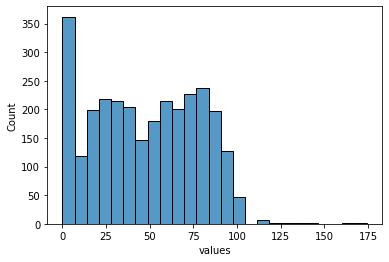

In [ ]:
sns.histplot(df1['values'])

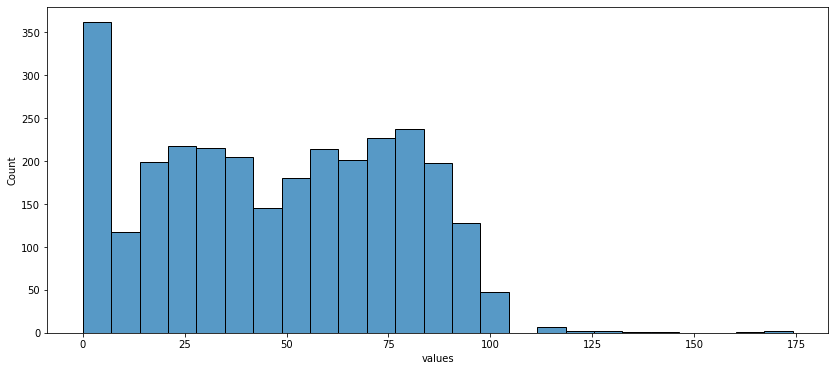

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(df1['values'], ax=ax)

In [ ]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    disrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate,

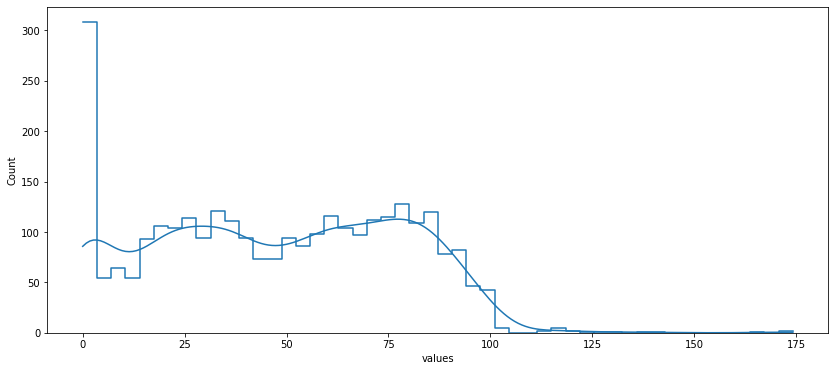

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(df1['values'],
             kde=True,
             fill=False,
             element='step',
             bins=50,
             ax=ax)

### ❓ Exercise

In [ ]:
md(f"##❓ Try to create the following figure with sns.histplot()!")

##❓ Try to create the following figure with sns.histplot()!

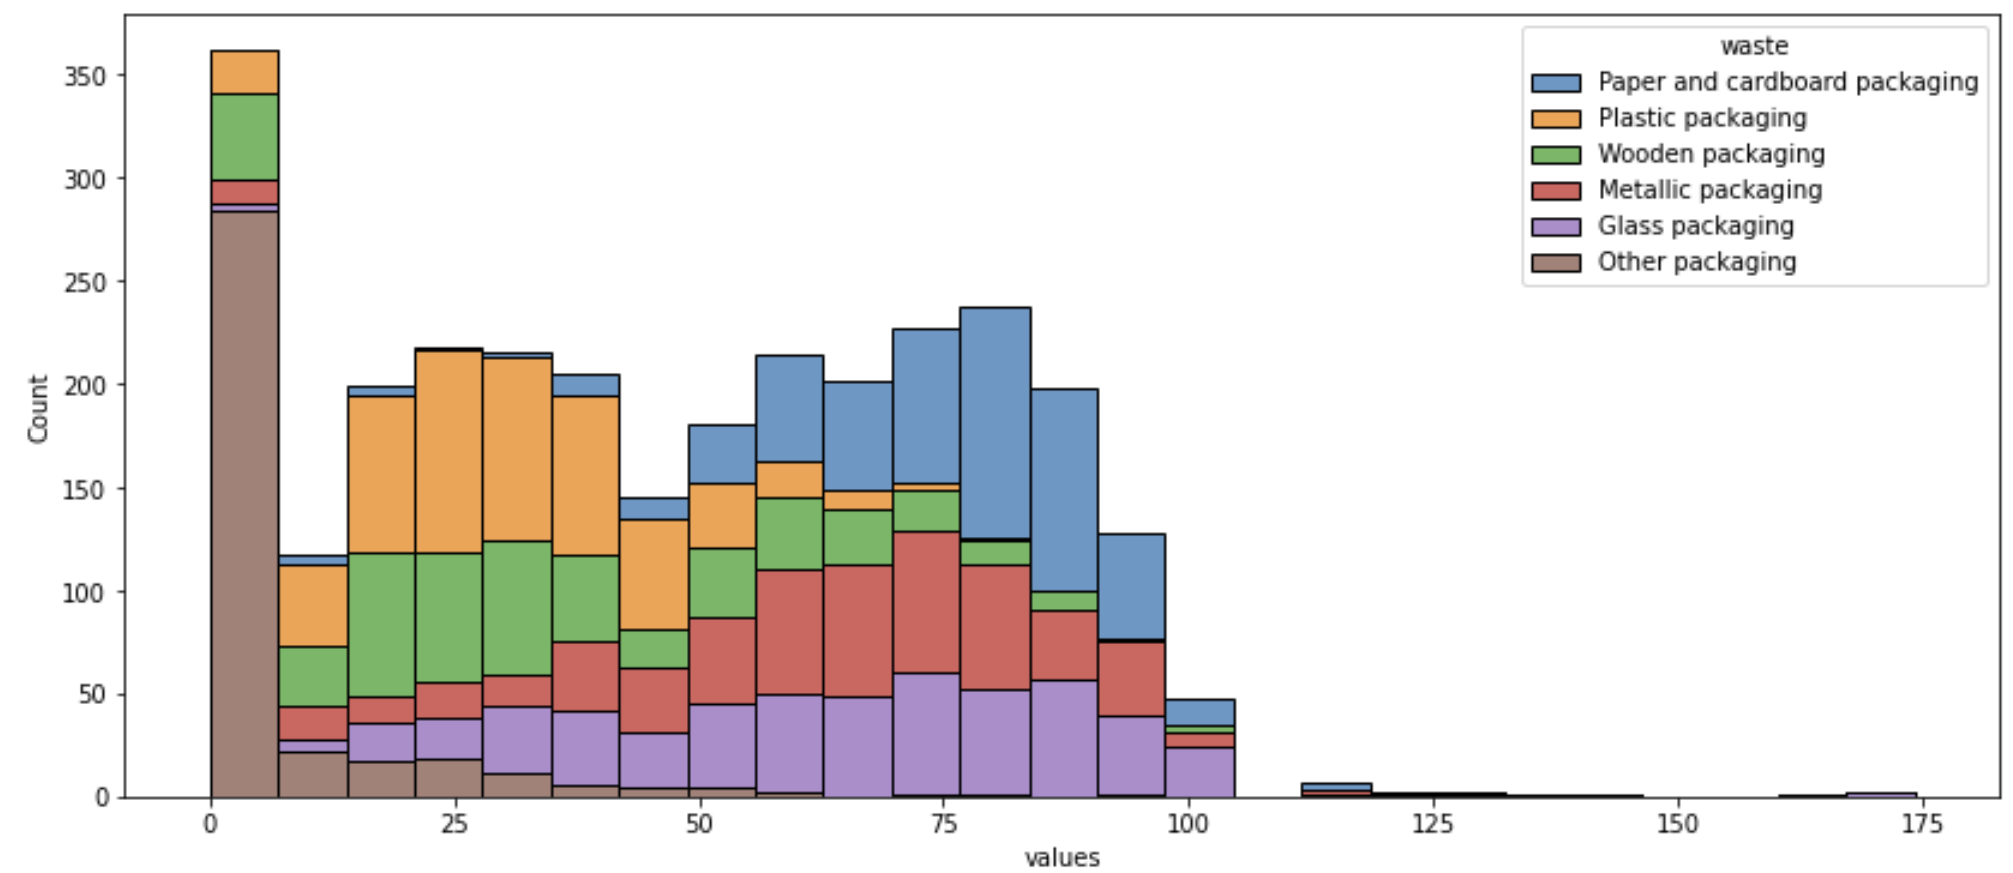

In [ ]:
base64_data = "iVBORw0KGgoAAAANSUhEUgAAB90AAANpCAYAAACmTClnAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAALEoAACxKAXd6dE0AAP+lSURBVHhe7P0Ht13FlcZ7F0HknHPO2QgwwQGDwdhkkzEOfW/b3W6+RH8JbLf93na3MSCJnEzOwSQhksg554wAifDqVz5TbKslIR3pCEnn+Y8xx95nr1VVs2bVWvuM/dSstdSX02khhBBCCCGEEEIIIYQQQgghhBBCmGeWHnoNIYQQQgghhBBCCCGEEEIIIYQQwjwS0T2EEEIIIYQQQgghhBBCCCGEEEIYJhHdQwghhBBCCCGEEEIIIYQQQgghhGES0T2EEEIIIYQQQgghhBBCCCGEEEIYJhHdQwghhBBCCCGEEEIIIYQQQgghhGES0T2EEEIIIYQQQgghhBBCCCGEEEIYJhHdQwghhBBCCCGEEEIIIYQQQgghhGES0T2EEEIIIYQQQgghhBBCCCGEEEIYJhHdQwghhBBCCCGEEEIIIYQQQgghhGES0T2EEEIIIYQQQgghhBBCCCGEEEIYJhHdQwghhBBCCCGEEEIIIYQQQgghhGES0T2EEEIIIYQQQgghhBBCCCGEEEIYJkt9OZ2h92EJ5+mnn25PPPFEe/fdd9uYMWO6hRBCCCGEEEIIIYQQQgghhBDCaOfzzz9vn332WSOfb7vttt1WXnnloaNzJqL7KOLqq69uF198cXvmmWfaSiut1C2EEEIIIYQQQgghhBBCCCGEEEY706ZNa1OmTOmi+5FHHtmOOuqotv766w8dnTMR3UcREyZMaP/zP//TM9433XTTttFGGw0dCSGEEEIIIYQQQgghhBBCCCGE0cv777/fXnzxxfbee++1X/7yl9022WSToaNzJqL7KOLCCy9sZ511Vt9e/oADDmh777330JEQQgghhBBCCCGEEEIIIYQQQhi9vPDCC+32229vkydPbqeeemq3uU1ijug+irjssst6tjtOOOGEvi1CCCGEEEIIIYQQQgghhBBCCCGMdh5++OGupV533XVdS2Ubbrjh0NE5s/TQawghhBBCCCGEEEIIIYQQQgghhBDmkYjuIYQQQgghhBBCCCGEEEIIIYQQwjCJ6B5CCCGEEEIIIYQQQgghhBBCCCEMk4juIYQQQgghhBBCCCGEEEIIIYQQwjCJ6B5CCCGEEEIIIYQQQgghhBBCCCEMk4juIYQQQgghhBBCCCGEEEIIIYQQwjCJ6B5CCCGEEEIIIYQQQgghhBBCCCEMk6W+nM7Q+7CEc9lll7UJEyb09yeccEI78sgj+/sQQgghhBBCCCGEEEIIix71873Xzz77rNvnn3/evvjiixnHQgghhPDPLLXUUt2WWWaZNmbMmLbsssv+0+ez4+GHH+5a6nXXXde1VLbhhhsOHZ0zEd1HERHdQwghhBBCCCGEEEIIYfHBz/eMyP7pp5+2jz/+uH3yySf9b+J7CCGEEP4vSy+9dBfcl1tuubbiiit2I7b7fKRE92wvH0IIIYQQQgghhBBCCCEsoshunzp1ardp06bNyHQPIYQQwqyxYM33pe9N358Wrvk+Hclc9GS6jyKS6R5CCCGEEEIIIYQQQgiLD8R12e1Tpkzp4oGf82Xo2SZXBt+csvVCCCGE0Uo9kqW+N2W4y3ZfaaWV+vfn7Mj28mGuiOgeQgghhBBCCCGEEEIIiw9E9/fff78bbJO7/PLLd1thhRVmiO4R30MIIYx2BiVvme0ex+JVpjsBfrXVVuvmGe+zI9vLhxBCCCGEEEIIIYQQQghLIESEen47oYDgLtM9hBBCCLOmnufOLExbGI9miegeQgghhBBCCCGEEEIIISyiEAlKdCe2l+ie7PYQQghh1hDdfV9arFaiu0VsI7kBfET3EEIIIYQQQgghhBBCCGExwDNp2eC28hHfQwghhK++E8sGvzNHWnBHRPcQQgghhBBCCCGEEEIIIYQQQghLFAT3hUVE9xBCCCGEEEIIIYQQQghhEaeEg8rgW5hCQghhweBxEVOnTm0fffRR+/jjj9unn37apk2bNuMREiGEBcM38T0Z0T2EEEIIIYQQQgghhBBCCCGEEeazzz5rb7/9dnv22Wfbiy++2N544432/vvvdyE+hLB4E9E9hBBCCCGEEEIIIYQQQgghhBFmUHR/6aWXZojuMt5DCIs3Ed1DCCGEEEIIIYQQQgghhBBCGGGI7m+99db/Ed2T6R7C4k9E9xBCCCGEEEIIIYQQQgghhBBGGM9vH9xe/s0330ymewhLCMv853SG3oclnMcff7xNnjy5v995553b9ttv39+HEEIIIYQQQgghhBBCWPT48ssv2yeffNJt2WWXbSussEJbfvnlh46GMLqZMmVKe++997p9+OGH/W/XjGvFNfPOO++0119/vQvbXgneji299NJd5P7oo4/au+++27PNCeHeV5lXX321vfbaa92U/+CDD9rHH3/cvvjiixl1QOY60bzaeOWVV2aU9bc6+aas9p37wAMPtEmTJs34TJY747PXpZZaqvdD3T6TGf/yyy/3+qpePvu8zofX8iuE8A/qOnLNr7jiit2WWWaZoaP/F9cWLfWZZ57pWipbddVVh47OmaWmX7hfDr0PSziXXXZZmzBhQn9/wgkntCOPPLK/DyGEEEIIIYQQQgghhLDoQeAjAjJi+xprrDHXP/6HsKQjU/y5557rojuxecyYMW3TTTftRkSXiPj888930ZsRz8aOHduvI8cZMZsRvwlxJDPCOCPWuQZXWmmltt5667X111+/bbXVVt1WXnnl7gPh/sknn+xWYjgxnQCuvrXWWqvbuuuu241IfuWVV3ara5qtueaabe2112677bZbt7rO+f3YY491U6/yfFT3csst13bcccduyvLJwpwQwle4bnyHuqZdZ8y1MzsefvjhrqVed911XUtlG2644dDROZNM91FEMt1DCCGEEEIIIYQQQghh8YG4JkOPJdM9hH/mhRdeaI8++mgX3itbfZVVVuniNgH83nvvbffcc0975JFH2kMPPdSF7C233LKL6DLGlSdmyzwnzitDgPcZ4Y2Q/tRTT/XsdYKd61D9G2ywQb8WXZ9EcXXfeeed/VVdfLJ9fC0IIPp9/vnnXSj3/r777uuZ7rLgK9O+MuRXW221ttFGG/VFBAR9Pjn3jjvuaE888UT35+mnn+51eya8+8Hqq6/es3e9z/0hhH9mYWa6R3QfRUR0DyGEEEIIIYQQQgghhMWHiO4hzB6Cd4lptn8nustI32STTfrW64RzIrXziN0y1OkiriGCNaHd57LSlSPIb7PNNm3zzTdv2223Xdtpp526bbzxxv1aVL+sdVnlRDtCOjH+wQcf7AI/wXyXXXbp2fRemfLaVad6CP5EPf4R17feeut+zu6779723nvvnuXuXII7TYfQDufyTVa7Pmy22WY9817GrroIi4RBWbwhhK9YmKJ7Hu4QQgghhBBCCCGEEEIIIYQQFisI2Ouss07P9CaoyRQnghPDbcMuy7yex+5v4ptjzrXdtGx328erg/hN+D7ggAPaYYcd1o4//vh24okntpNPPrkdeOCBXcyWBa8NdcpQJ4xXNjqBTha8c0855ZRe7qSTTmo/+tGP2n777dcFeKK+baotCthiiy262E5oV8bjgLW5zz779Ex6iwEsGpDlbsHNvvvu2w499NB27LHHtmOOOaYdcsgh/Vzi4f3339+Ff4sCQgjfHBHdQwghhBBCCCGEEEIIIYQQwmKFnR9knssw90x24jfRnahOYGdE9dqCnXhNzCZOO7dEd5nrjst4V95W7zLMZZoz27nLjCe2yypXXva8+pUpIZ+4X8dl1paP6uajRQL+rmxbIr1j9cx3mevOI6RPmTKl+yFTv7aU98ovRuSXqe+59hYDWETAhxDCN0dE9xBCCCGEEEIIIYQQQgghhLBYQcCWgU68lsluW+gS3QnhsP06IZugTXwnjBPbZawz5xHdHSOWyy6/6aab2nnnndcmTJjQxo8f36688sr+vHbHy2S423Je/WPGjOmCPiHfM+Rvu+22/mx3z3UnhjuPkE6g/zosAiDmE921Q1i3df3VV1/dLrnkku7XBRdc0K644op288039+fPa4PIX30OIXwzRHQPIYQQQgghhBBCCCGEEEIIixUEb4K7DHIQqonqtn6X0b700kv34zLJbdnu/BLdmcx1QjVR3rk+I2I/+eSTPZOcaE70lnGuXGW017PkUdn2townvqtT2TKZ6Oq11f3cZKIT3asdwr5yxHf1WiTwwgsv9DotMOATId/CAxnz+hdC+OaI6B5CCCGEEEIIIYQQQgghhBAWKwjOxHJZ5rZrX3nllbtQbSt2WedEcGK756gzojRBnnhtG3hZ8TLk1UNIL6HdM95/8pOftJ/+9KfthBNOaEcccUR/9vpmm23W1lhjjX6+7HUQ9Xfbbbf+rPWDDjqov7dVPNGcHzLfr7rqqnbXXXd1n74O9TJt6Jf2xo4d25/37hnxM5vnxzPPhd9oo42GagkhfBNEdA8hhBBCCCGEEEIIIYQQQgiLHcRp4rpsdwI40Z14LhOcyE50ZwRpf9uKXea6zPHain5QdGdE8x//+MftuOOOayeeeGI78sgj/4/oLiMd2tx9991niO677rprL0/MV1eJ7nfeeWfPeJ8biO4WE+iXLPY999yz+zIr0f3kk09up556ahfdN95446EaQgjfBEtNv3j/sRwnLPFcdtll/RkksDrLF0WYf3w5P/74Y+2pp57qX7RffP5FG60XlSfSLL3M0v0fgq233rptt932fVVgCCGEEEIIIYQQQghh3vF7I5GQeeY0wW/VVVcdOhpCgN/mr7nmmv6Mc0I1s92636aZZ7Yz28Z7Zrst42W624L+0EMPbYccckh77rnn+nPSX3rppS60yywn5BPYlbv88svbjTfe2Lbffvu23XbbzTBivmew2xLedu+EfNvBy6Z/+eWX+7PgJ0+e3IV59e60007thhtu6HXVtvRbbLFF23bbbduWW245oy7Plafn2O7+qKOO6nqOvtgKv7aRJ+9ZNMA8M949IlvMh/DPuM59h7o2LWJhc7pO3CNce9ddd13XUpmdMuaGiO6jiIjuI8OjjzzSLrzwwulfyH+b/oX4eZs2/UuxVrmNNvrqu2WXbcsuu0z78Y9/0lf37bDjjkNHQwghhBBCCCGEEEII80JE9xC+HiL67bff3rPJiebEbmK2bdmJ3MRtojtRXtY5gd129ATs/fffvx1wwAF9W3nCvWx04jgjZE+bNq0L5+edd167+uqre51sxx137IlnxDhCOSPQ+41cGZnzhH26zKWXXtp23nnn9stf/rLtscceXVDni4UB66+/ftt88827mK8+kh279dZb2/nnn98FwP3226/tu+++XZzXL37D/cEz322Z7/6gPpn3IYSvWJiie7aXD2E++WjKR/0LedKke9uLT09uU998qrX3nh2Vpu9iIBZiIjYhhBBCCCGEEEIIIYQQwkhBQLMghYBN+La1PNGbsG5redu9E949I93281OmTOki9XrrrdfLOa+eCa8umeqENxnqXm0TT9guQRwEbxnp6iLyP/LII+3xxx/vz3F/8cUXuw8y34nwRD7tqNvfhHE+EfW15bd0Ge3as2hAnfzZdNNNu9CuTdn82rAA4IEHHmj3339/f9XmCy+80AX+Tz75pPsWQvhmSKb7KCKZ7iPDPXff3X7/hz+08Wef2b6z03rtgOm29qqjcwuXtz6Y2m57+PV263Q76dSft9/++7+3vfbee+hoCCGEEEIIIYQQQghhXkimewhfD8H5iSeeaI8++mjftl0muQx3zzz/wQ9+0AVsW8VffPHFbdy4cV3Y3mabbbp5XjojrF9//fVd+HadlUheQn0J6TLc1S0rXYb6Cius0CZNmtTuu+++GdnuZLcS5etVme985ztdRCeUl0CvXZm4hHnZ+Lvttls3Ajoxna+y7xmRnk9e1aut8nWrrbZqO+ywQxfqQwhfke3lw4gQ0X1kuPvuu9sZZ5zRJpzz1/Yvh2zb/t9Dtmmbrjs6t3B54Y0P2/93zZPtz9c80U485bR2+umnt70juocQQgghhBBCCCGEMCwiuofw9RDTZJvLGL/yyiv7s9l33XXX9otf/KL98Ic/7M94J57b5n38+PHt9ddfnyGeO4/Zcp5YP3HixBkiN0Fd9jvRnkjnb0I7I27b6p3EZst6W9PLUC+h3efaLRGdIO657YT1qt+W+LfccksX12XAWxjAXyYTHq59W83fdtttfSt5bUydOrW3oQyx3QIAbXzrW9/qCwlCCF+xMEX3Zf5zOkPvwxKOlVNWacHzQzwjJMw/vswJ75MfeqB9a+u1255br9VWX3l0Zrq/P2Vqm/T02+2+6bbzrru1ffbZp2288cZDR0MIIYQQQgghhBBCCPMC4U7GKyMaEv2I7yGEr3CdyPoukdxv0rLXd9lllxnbuDsuE92iFSK1YwTrjTbaqC9mIWAT4pzvc/pJCfLEeX+z7bbbrovuRDjiXQnyyhHyaS/qVs4rMVx72nE+H0GQV1Y5Qvng+ernp3PV7Zp3HtGeeD/YhvP5pYzt8gn3IYSvcN37Dv3000/7NcfcE2aHHS1oqXahcK2xuV3slkz3UUQy3UeGZLp/RTLdQwghhBBCCCGEEEJYcCTTPYSvx3Uiw5y4JquVwEbUJsATrgnucKyy0R0vI2wrS5STRe44U25ms/iFEe1KuNOeumclt6m72qlyVb/2WG1Lz/jLqm59K8FQ/f5GLTQof6ofXkMIX7EwM92XHnoNIYQQQgghhBBCCCGEEEIIYbFCljqxWQbrWmut1bPKZYbL+nasBG1/r7POOm399dfv51U2eWW5+9v27zLGiWwbbLBBP9ff6lPWwpdVVlllRoY7W2211fp5zp/ZBtshjpdQbhGNcuodbGv11Vfvx0pMr/qdx4+qt8qUTxYYRHAP4ZslonsIIYQQQgghhBBCCCGEEEIIIYQwTCK6hxBCCCGEEEIIIYQQQgghhBBCCMMkonsIIYQQQgghhBBCCCGEEEIIIYQwTCK6hxBCCCGEEEIIIYQQQgghhBBCCMMkonsIIYQQQgghhBBCCCGEEEIIIYQwTCK6hxBCCCGEEEIIIYQQQgghhBBCCMMkonsIIYQQQgghhBBCCCGEEEIIIYQwTCK6hxBCCCGEEEIIIYQQQgghhBBCCMMkovt0vvjii/bpp5+2jz76aJb28ccf9+OfffZZ+/LLL7tNmzatffLJJ23KlCmzLMMcV0b9M+Oz2dWhvalTp/ZztBVCCCGEEEIIIYQQQgghhBBCCGHRZJn/nM7Q+1FHCehvvvlme+CBB9ptt93WJk+e3B566KFuDz74YHvsscfaSy+91N56660ukq+wwgpdKH/iiSfafffd18tNnDix3X///b3sww8/3F/Zu+++2+tfZpll2lJLLdWWXXbZoZZbr++pp57qbbC77767vyr34osvdtF9zJgx/VzllJ9fHn/88V4/dt5557b99tv392H+ePnll/v4TX7ogfatrddue269Vlt95eWGjo4u3p8ytU16+u1233Tbedfd2j777NM23njjoaMhhBBCCCGEEEIIIYR5we/Lfo9mfif2+/Tyyy8/dDSEEEIIc0JytO9QydUrrrhiN7rt7HjjjTe6lvrMM890LZWtuuqqQ0fnzKjOdPcPy+eff95Fd6Lpeeed184999w2YcKENn78+G4+u+aaa9qdd97ZAywT/f3332+PPPJIu/baa9sll1zSzjnnnHb22We3cePG9bJlN998cy9DfDeYg7z99tt90G688cZ26aWX9vLq0eYVV1zRxXx+aY+PIYQQQgghhBBCCCGEEEIIIYQQFj1G/fbyMsitDlxvvfXa1ltv3bbddtueAb7DDjv0180226xv8048f+GFF/oKh3feeaeL5sR0x6xw2GCDDdqWW27Zy5VtuummbfXVV+8rD2vVhK3kiemvvvpqz5CW8b7SSiv1trQvK9j5jk+aNGlG1nsIIYQQQgghhBBCCCGEEEIIIYRFj1EtuhPcl1566bb22mu3sWPHtmOOOaYdd9xx7aSTTpphhx12WBfUX3nllS6AeyWUe+66skTyPffcsx100EHt6KOP/qey3/3ud9tWW23V1lhjjS7sE+hlyduunuBOfPfZTjvt1M8/9thj26GHHtq222679t5777Vbbrmlb0Fv24MQQgghhBBCCCGEEEIIIYQQQgiLHhHdl166Z6rLMv/2t7/d9t1337bffvu1/fffv9vuu+/es9VltjNZ7h9++GF/vruya665ZhfWd9lll7bXXnv1smU77rhjz6CXye55O7azL9Fdxrwt5x3TtraUUcfmm2/ehXbPhyfyE/iJ88qHEEIIIYQQQgghhBBCCOHr8Xu8HWwltz377LPt+eefn2E+lxz3+uuv99/8PebVb/D5HX7RgS7ywQcf9J2BjZPxpKt4RvOSOE765JHDEjaZ5Ex/2w3ZMfOUZmTeioU5Oxq0I2MuHs8991xPivV3Xa+LO/qgLzRHY2p8zXdjvShDwzQWr732Wr9GXZPRMbO9fIf4bvt3wrhXf5sYJgirGxer84eDOt0kfZm7YEqwX2uttXq7Ht4v697nfHHjILjbkr5uIiGEEEIIIYQQQgghhBBC+Hoee+yxdv7557c//elP7cwzz2wTJkxo48ePb+PGjWsXXHBBu+yyy9rNN9/cRfklSchbUjAeTz75ZLv66qv7OD3++ONd6KOZLInjpL8WhNx+++3t73//e3vwwQf73/WoY/P0b3/7W7v88svbo48+2oVPYu2SPmeNuZicc8457a677up/6/eSoJkZV/cewrVE3CuvvLLPd4+8XpSxCObuu+9u1113Xb/P0jKX1MUw80JE9+mU6D5mzJievV6YHCW2s/mdLOogutumnuhOYC/RXbtEd+8ZX1xobpq+QLxGdA8hhBBCCCGEEEIIIYQQ5g7C5Hnnndf++Mc/tr/85S8zBHfm80svvbTddNNNEd0XUYh4TzzxRBchjRNxb0kX3WVz33bbbV10f+ihh/rfRHf9LdHdvC3RfTQInbLcxeTss89ud955Z58Dsv9pbos7xs440gwfeeSRdsUVVywWorsMdwsgiO4Ww7gmK9t9NLPU9AHNN8gQJoSJ/PTTT/ebmInu1bYzzHPfPaddFroVHA888EDfHp4R0G0l73XllVfutu666/bPvCequwlce+217Zprrumi+jbbbNO3lt9iiy26Ef5hNcuECRP6heUZ754rb8t529xra3YYStvf87leB7egmDhxYr8hecb8Kaec0p9hH+Yfc+GMM85oE875a/uXQ7Zt/+8h27RN111l6Ojo4oU3Pmz/3zVPtj9f80Q78ZTT2umnn9723nvvoaMhhBBCCCGEEEIIIYR5gYDht162/PLL9992PS51ZohQxMmnn36mTftsWvtsMct+9fv5smPGtBVWWKFtu822bdttt2mrrDL/v7ES2v/whz/0R756tOtuu+3W48L8di6ufpffc88927e+9a22wQYb9N/1/aa/ODOnsR/uTr7fBLJnL7744nbRRRf1HYI9onePPfbouotxKk1lUaXGoV7Ffk7xt/CDiHn99df3a4IutOWWW3YdiYmDOU3LOuGEE9qRRx7ZkzldN4t6LAYZjEvFY05xuf/++/tOFXam0G8mNvq+3HLLDZ21eGIsbSsv0512aBcDfVrUNTxaKo3Ugoiddtqpm3lYO4ovSriPuNeLs/sIm9O8KY3WtVjzbcMNNxw6Omciug8hDET2EsVt2WGSW1m0zjrrdPPMd89e94+OVVVWGjmHmUQucP/wrL/++v2mv/POO/cvcV/UbpC2u7A1hJUqxPNdd9217bDDDm2TTTZpG2+8cT8HVihdeOGFfUC/973vdaHfjZWgP6t/qAq+WjDArHjy6tkPhe0erD5R189//vN23HHHDR0J80NE96+I6B5CCCGEEEIIIYQQwoJjbkX3xx5/vF166WX9t+2Pp0xpH388ZbHaOVWS2gorrtTWXHONdvjhR7QjjzyibbD++kNHhw+hTpY70eXEE0/sImVJIhYpSFSzM+1mm23WRbztttuubb/99l0PWJypPs4s/3yd6LuosSSI7mUQ+9KBZsVoEt3d27zq59fNy4juix4fffRR39lbsvFqq63Wv5fMwUXxHhPR/RtAGIjubmbMc9dNchPedu8E73322aeL7lZq3Hvvvf1Cl03OnOfmYFL558dNjujuC8AXtknnHwcXDDMBrZxzjsFidbO1RYovkhtuuKF/iTA3Vl8ist1nh3+irC4ZNCJ7QYB/5ZVXelb9aaedFtF9ARHR/SsiuocQQgghhBBCCCGEsOCYW9F90qRJ7b///Oc2fvyE1sas2JYes0JbaqnFSIT7Ylr7YtonbcUxS7d/+Zdftf/nX/6l/64+v/z1r3/tojt+85vf9N/FC8/LllwnCU5WPdtxxx37b/ZEGZnwg9uYl5hErDEOfqunB/hdnz7gfEKU936rHzTjyCTjyaL3SjBkBX1C+XrcLNM20w7NgZWvfFE3obbmiPPoEKhnXvNVf8yf2WWhEs7K/3rsbYmi2lGnfpt7tA51wfG33367m/OdJx7qY1WHsuKlvPdMvY7xk3hHEFNG/HzOV/7feOONXSshtB9wwAFzLbqrR936U6Km+tQN7fOV/iM+2nOMD/xhg+dDmRIYjYV+DPZXDJl2ncu8Z8rVLgrlD9+YNtSjPQtBmPo9npjNLLqbI4cffng76KCDhjz7B9ozBjU/9YlB3WIyGOsaH20zPjLzsuZ2zQdtmh+D87LK8VWbytZnzhMLgqe2q/2KqXO0wU+mHb4pwy/n6QuzQIZm5rn+xx9/fF9AMzeiuzoqGRXOV5+29L/mgM9n9t9xvut3vQ72u6618t979YH/zBjrk1hUDAr3AO25lhxnkoIHRfejjz56RjlxoUXyvcaJH/zhqzF1jr+Lmg/8c7735oPPncfHmuvqNT4+c47+VT/4Y84zdTB9e+ONN3ps6Kes6i2RW73KOl89rgN9qfjxS9zFv2JX14u+6JO4F+qq8S5/K2m6Pp8V5Y/6IrovRAyQDPd6RobB9Fqf2V7+O9/5Th9A2/UYpJp0wsiUcS6T4e4fAyK3G6O/R1J0175JzOe6UNwEi3vuuafdfvvtvY6TTz4528svICK6f0VE9xBCCCGEEEIIIYQQFhx+ey5BdU6i+z0TJ7Y//tcf2znjxrcNt9l9uu3RVlxltaGjiz7vv/Vqe/mJ+9uHbzzTfvPr37R/+7ffdFFtfpmT6E7I89uu5xETeegDfsvfdttt+2/1ktr8zu93d+NQIhvBZpdddulGOCPeEKDsPusxtQSeEunqfQlJdr3Vr0033bTvfjso5BAGtSfz3ntWIph26AN22S0RljBGqCN8WXQhUZB4RVwjYBGYCFNEaqY8cbQE80HMLzvn8l99towuoVC/S8S1C4CFCbUTgD6VSOx9CXs1Z4mB+kCQs/208uoSQ/Wqn5+TJ0/uQhdNQyzFnDgttk8++WQ3Y2NXYLrK3IjutBF16w/NxTiLhzbVb4zFwqMFaD/a4yu/PUudT4PnQ8z1gRkLfRnsrzljHuhHCZf8YOaVRQPGnj+MbxYsiJOxUZdxJxSLsTJsZtHd+EgStdMyPUjbJWYaJ7ssm5/uFeYOjCchU5z1TTljZn5pV6z1yziZl+WPtvgpUVX/JHeWJqaPytG+tGdnZ3+Lq34436MdBq8FpqxzxFwZRnMTd/NQ3Bn/9UeM6FvGcF5Ed3XQ2Zg2XXPq1JY6y/+NNtqox8zcrlg4/vLLL3f/XZNe63pUTlzVRePTd37WfNSuMXWP8Zx2MdNvY1C4F+i3+WDcGJF3ZtG9Ymde1Xbu/GT8gP6YT87hHwN/XJN8NK7e81s584WP5gIzxuapz2phkPmhL+Y5X81FdTBj4Tn7YmSXcPNRe2Ik+dc9Sb3KMvW6LvTF2Jtf/Np99+nfV0P6aN23mHlgrpp3Jci7b1gkA3Ewn0tDdWx2aNM1ol7nsTnNm/kR3Zf5z+kMvR/1GFTBJnCbPLaSceM02VwYJpIbnVcD66L2XPb6slDGzd7AmQgmoy8IE9yXii8BXw4uNANqkHxmVZqLsyaOC8TqOjckF5x2+GWiz+oLsVC+VhS5ySlXN2XGF1+aJr6bAJ/D/OOm4p+zyQ890L619dptz63XaquvPPsLdknm/SlT26Sn3273Tbedd92t32h9kYUQQgghhBBCCCGEEOYdQhGhhhFKZieaEoTuuOPvbdJ997fNdtyn7fjtH7WNt92jrbPxNouFLTNmhfb2q8+1N198so0du2dP5PE79/xCpCIIg7BKWCv8Xk54LKGJgON3+xIa7XRL6COE+13db/7EN2VoBLQD5zJikt/077vvvi4WEaRoAUQwVrqAtohdxlIddIMSyQhVhDMZ+EQfrzSCEjr5ax7QErRNDyDI+X1axv6ll17a5wH/1FU+iCOdgQ5R/s6MMvwjevLBq7La1u8Sh2kU2uY7CGx33nlnu/rqq/v56hE7dYiHOvmhrHmrnBiXHiLuzifQ3XrrrV2HUVbMCc/arb6XJkMg5Qej6QxS4jiUKeHXggSPCzYW/la/ZEt103wI+uIivvwxZ/jjfGOvTM0BbZZWQ5hUjqajLnOGEGneGQPtVwyMuSRN4qzz+FMCuHbqfHUZV23wjek7E1NlnSOO4ideVQcf+a+sueUcfoqLOSqeYiE5U9vmqr6Z14yPtKjBuaI+c0w7xkn72ql4MKKmeWZuiI929YVf5jHfxMGrNrWlXj6Vr+q54447+nyqa4e/5pTY8kFc6HH0Le3xr4TuWUGju+qqq9rZZ5/dx8D4mhfmGd/MgVn5r14irXminHPFje/Vb+OlD+Yyrc8CAGXF2nVOJxTju+66q8dMn5g6mWvH9cBcC2JvLMSpNDz6o3pcP3wwZ7waH1okUZzv4sk/8auxqTlurpin5o9++Q7hZ93z3LPMB+NkjPXR2Olb9V0d1aaxVZ8YWiBgvHxOT3UfE3P9sNDB47aV1Y6YKaNO75mxdz2LPZ/Ewfliq139ob1VX8RBPLznN5+NmQUBdU+aFWJt7PlmnNic5o15p339sDCAGee5IaL7HKibvpu7wXQzNBgmpslgkppgBse5zBemCWQQ4b2LxaoVF57JbkIoZyIZKKZukwoG1E3ZDdSqNZPVjdVEVm641AUCkySi+4IhovtXRHQPIYQQQgghhBBCCGHBMbeie/1G+eBDk9v6m+/YNthix7b8SnMnEiwKfPjum+215x5p7732XBfc/a7o9/P5ZWbRXWYwxJWwUwIv/P5OAPJbvmQ5QiCRl8jn93SCKU2ANuBcY0ITIEYRv4wBIxISjvzuLxtVJrXf+Bl9gZhFKCNuEquIgPQHwhntgBDJD75qm/FJW46VUEfgokMQoYh6RCj1VZIgwc4iA5mk+sGf0jNmprK5zS86hsREQpZ+y7DmN5/pGPprLqqHiSEtgy9i4xwiP/+1SxTTV/oHIdM5/CSAWSRA2DIG4qJt/ipLG1FWfEqg45e6vWelqQyiH0ydxt4cEDvlxEVMmP4x4qZjJUY6V5yMvzEzhsqJg/McoxmJv37pLx8ZwVIs9E3Zvfbaa0bipr+d7zxaDVFZG9q3E4E2xMu8Ehcx1n8JljOL7nQnMWTmijosHDBvjbOy5pT+uI7oXMqaI+YnjUtflDPG2lDOOFdmtffaNK5iYs6r3xiIiT757b90LnFRTtvmp3npeiDgGnfXhP6Ivf6qQ2zE3XHnmt/ub2IhduaAPhpPMSe+a1cdYvl1orvr0n2R8M2/2iXCtazv+q1ffFCX2ItZCeHaFQf9Fl8+i1ddT87R//JBG8oQ18Van8wFvppr7gXK64NX/tTiCO2W6K4OfhpbQrXFP/rOV59XWddAfSfw2XiomzmuvDE0JmJc8wF8M19dJzRJPqqXj9pwzxEP55nrxr3aZK5J15brVjmmfucac/OU78q5no01Uwef1a3v/BZ7PnpVhtiuv9pxfl0j5o/zzFFzxXxzzHxQz+yI6L4I4GIxQQxGrZ4w4P42GERwXwAG2HnOZ6iValazmJAuEBekC9mXphumOnw5mTRuyia+emBCuiBNLjdiA6o9F456h0tE95HBGEd0/wcR3UMIIYQQQgghhBBCWHD4bZlYwPw2XALLzNRvlBHd/5lZie5iShjyW71MSYlyJSgSmvyO75WwVoILI/iIf42J3/n9TRSEMWDERYIR/eB73/te+8EPftB/5/d7PMGTGEWo8ruptugPRJ7KNiaQ8vPggw/ur9omiBEdiXnEH9pC6RJ0CBnIhDkCl9hVXwmX+iGWJeyVjjGIz/SFTqEOoh0xi/GRuEVkM/cYraTEqxLdCZz0DloG4Vy/xZGwRg+hexAUxYuQxm/98Zn+VxazcvwnGBLStGucjJEdfWktJfyVpjJIjS+frr/++h5vAvO+++7b/arYGA8iIB/FlI/q0z99IDwSWcWgBHEirXGQVawNsfFZie76wlfYcvuHP/xhH7/aEt+80R+CO7FTvcbZ9tjaM2fMIXUYE76ZJ8aFzSy6i5H6bbsvLuYFzCnjIkbqKPFZRrOxq3LmCjFTOf03JvzSF/Xrn5iYO2JibijHxIVPJTTzybwXS9eK8dQXi1tcE8af8Gx8999//953PrsmZISLqz6Lp3uA59WLh3HnV2VwE1iNo7b1hd+zQ78J7rKxzdVaSMJ3W/2bX7XNujb46DPtOt9ccO3M3G/H9ZluqH3Xh1danz7Q9+yUoE5joLw+GaeqxzXgnuO6E2PziQhuDnkvNo4btxtvvLELxmJWixHEqXzks3mif3XtGrvSFc0HMa75wEfXHg2yrj3tebw2c47xNybKmbeuPfexuvbmJLobc/ckZY2X8XbNMdeceDmH/+aPcVSnsSa4X3PNNb1N7bmOXD/mqliJufm0qIru//eONIow+C46F5RXgffZIP42cAbSgJiMBsMFpYwLchDnGzw3JfU616TxqqyBqdUzJoWJqW7lnF83Z+9NUJPNuS6MOU2CEEIIIYQQQgghhBBCCCF8RQmwhD0CE/GK2Y7dFurEKL/BE6dKBPN7Pk2gRG7iJfFIUhtBkpBIcPeqXr/lFzQAwhCRXF2EK3oAkZOQpR2/94PQRbAiVJbgrl5GfOOvdr3yQ3v8LaMj0ChKs9APwpP2tEUYJH4SAkujoDnMitI7+ER41B6BV/u1G4B4EKOYrFk6yCDVb+2zEoUJ3vpNS1E3v72vGPuMX0RDxm/mvX4Q7Qly1Yevw3gQO4nAXv1NlyFC8qXiUn6Kj9jxQSz5RrMxDkQ3cTAGxFDjUrsZi8PMMbAwhqCnTuOv/9Ufn+u7Pou34+VDncPESnnzZHZJmGIhLvqjDf0RK3PY4gBUBjNdi3nvM20r59yaJwTXElQJmvoufqhryN+EUnGoa8I8EQtzswR2sRvUzYyZevmrz3w1N/SToG3eaU9s9JtAzT9xMQeMGx+NYY0Rm1fEX7vio9/q96o9fomR+Li2aIX67dU8NUf1u66Juhf4nLmGXRPqUMZ1bWGF+aEdQrM+6XvNPf13vbpuapzFWTzUJcYWC3jvXGPE1GPBQWmGYqFdbZqbxqSuW/PV+NAh3V/U5XpwvnH2mbHS/7r2+GZO+Vu74j6v+mTdk5QzxlWn+o2B9vRBv12j7qPuPXwzz/gmDs4xPjVeyvNLDOs+uqgxqkV3k8kg1gqHuiBcTMxxn5mIdZMxSdwgYBIYeBdCobyL0uR2c3HBuHCUc0Pw3gRRh/NMeq/qcPGaTNpTjxunG4HJo555mdQhhBBCCCGEEEIIIYQQwmjG7+5+5ydIEbAmTJjQzj333G4yKok9RCG/2csSJQjRBoiHMkw9J/3CCy/s5S677LKevSoLmeDmt3yC0aDASGwiHJZoKIOYoOu3fr/xO+Zz4jQNgGCnLeIXYYwRzbRz3nnnzfDVc6llXvKXSejTtjq0SX/QVon9xCrawtxCJ6FLaF/GvL5qV78vuuiiHjviHXFRLCtJcRA6hr4RSfWTHsIvPlUWKmFVOePilTbC+CrTW3lliHH6Q6gtI/6J45wwduqtLFg+qMcYG1t1qNvnXtVXf4uj8soZg1tuuaVdccUV7YILLuhjYS5ce+21PbtXHOhF9KFBjLHYl6CsPZ+pmw41q/6W9uOVbqQ8cVEdPpsVPic8qsN4m2PK1iIHfSKyi4M5wk/vfeaYMXKuMsqqQyazcdMvY0z/grnhvfGXKX/JJZe0888/v40fP77Hp54zbu6YQ84d1My0Zw4Qu42BeaK/Yi7e2rMQwbgZZyKr82vsSmgVT+OlrHjOC86v+BCu1eUz87JEfb4Y11oUImbeW0zgmqh+uybMBfcPQrx+i5dzxUq8XR/KqdN4GCdtli9MP2oOVp+UFQfxkCl+3XXX9XljdwaZ3hUb88f54sxP7dsBwX3i4osv7j56NV9l+vOz7leD80E72uZjzQdxN0bmofHwal64LucWdfLR/Ndv9Yh19VU7Nb9LaHfdeV/mPO2am86v8eIrq3vKosaoFt1NLhPWBeDLzRelG0eZv10wJqMbhclmkA2wyVnnOYfV3wR6X5QmrgnpxlmTQnlf4C4Mx01q52uLAO9m7sJ2rnImpMlZN/4QQgghhBBCCCGEEEIIIcwdJcT6nX8wo9xv/EShEnH8bk9YIhz6nV+Ws9/rvfqbhkDwVo7AxugLM4vutAAiEw2gBNUS3h0rjYFgRvjSHt9KyCY4aYeP5S+hlj5Q4rP61Ks9n6ubUEakVL9zfPZ1iA0jeNE0ZMfqs6TC0kuIh/ykZ/BP/5m/BymBfVAk4wOf+FbtKOe9V2Ibc17pId7rm9jpR1mJtV+HeqsdsVEPf4h06qC18E1d3nt1nvP1i4Cp32IhW1ksjIXxN07Gxthrg8Y0CN/5agz0m7ZjrKr+6q/PiObOq/76rPosjl59Nit8rqyYOU958S/B39/mE12Lj+ao9z5zzDnOVcbfYkN4Fh9zugRk4+S9uVEaVsWEJkbfUufgNWGODIru6ucjwX2wv8YA2qv5xQ9xETvHxUMsmDHUb2XnhWqn4mN+Vv3662/166uxNa781ydanT4z94HSDMXDufoqriUai7WyPnNdwzWrT3VNlJkT5t+g9scHY6U+c1DGuvhUxn/5LobqcMy9gT/GRAY+X5X1mWPGp8bG+fyr+SDu2h6cD/72qh1m7MRpdnNxVqiDj/o8WEf11bgaa+fU9Wq+iV/NV+fVdet8/XU98ZWpb1Ekovv0SebCsdrDii0rliZMmNBX6VjJdfXVV/ebqZuXSW0VjIF2cTlmdYvzzznnnDZu3Lj+t5VuLgqTweo4z/1wYZkUPnOBWDVSn9nGRntWzKnTzdzNx7MTrIAxoUIIIYQQQgghhBBCCCGEMPf4/Z1IR6zyTO+TTjpphh1zzDHtkEMO6RmkRHeiEhHR85j9Ru/vejb5cccd14499tj2ox/9qNdDoCeQEbC8LghoB7ah9gzjQw89tJ144okzfD355JPbqaee2o3PnsPNZ4IWCFQlIOvz3FIiHwHRFuqyln3GhyOPPLIdf/zx7ac//Wn7/ve/P+NZ1oSyWfVbu/xggz4MvldmQcVrQUOUJFiKg3gQHm25bsyNgfEQC8+PJv7NKgY1DoNC6kjxdePs+Ned83WYGxZ90M8IueaorGvPqhePo48+us/HPffcs4vqzheXmRnu/FzYDPpmgYXs8YkTJ3a/XffmgjngXuBZ/PpN79O3BXEvECf3HXOPDsnomBaCENDpmYPYuYC+SGwXexqma5d/J5xwQjvqqKP6/YuuiQV5v/o69EXcvM485oNzs+4JC8uvkSai+/RJasVHie61LQYjptuOYVB0twVGie4e5l+iO8F9ZtGdcL799tt30d3KC5NoZtEdtt7Qnm1KtOcCKdHdczUiuocQQgghhBBCCCGEEEII80YJP7MS3UswJLr77Z/YRcQiunt2c4nuBx544D+J7kQtv/FjVgLjvDAoPNEEJOGV6E40K19LdD/llFP+j+iuDn3kr9d5QbvEOhmv+jwouh9xxBG934zoTmwu0V2ZWYlkFe/q1+Cr8xem6DevyAiuZ7gT3eky9J3DDjusjwGR2RwQB8dmJy7r/8IQ3VHxHSlKdPeoBZoYfYvQbA7Oreg+8/wcaZ8XFIRu94IS3ffbb78+F+pecNBBB/UFCBbgOK7v80vFyfySyU2LlAnuvkR0l1k/CB/pizRFeqd7gvsc/yyYMT7fhOhujM1/Nrvxrs/5s6jeE4bDqBbdrRaxrYGJ6IvVl4jVW2VWgRx++OH9C2Wvvfbqz0vwJWaLE6u6fPH95Cc/mXEuU4fPfRHvtNNOXVj3JeRiQU02nzv+ve99r39RW1VXZoWMG3dto1FlQwghhBBCCCGEEEIIIYQwb/hdvgStQRvMSnYO4Yqw5dXx2hbZb/y2P5YJb3tpIvWsRFfiEfHWluyS+WxRrS5lJQA6Vs/a1q7FABL+iPiyp21JTdwk+qqLX+Wfvwlw6qqtmGflw+xErlmhPFNXCabipM/12FvH+CPTWfavtmfFYLuzez8Ifaa2Dhcbgrf4eq9NsSM0iolXmej6/3WU7lPCuHrEm0BZdVSfva++ezX2+sdn/WeV2V+PHfCq3OzEwrnpr3ZsB24uVH9rq3L1mzuzElkLnysrZs5TXlm7OtsKX38kghLJa5577zPHCOmSUZXRF7GR5W9+0qToV/oOddeW6/rguGPq9bm5ziSiDgfCsutA3fpS87/GTiz0yxjqN39mFffZUeNU8anr12fmg1howzVGkzN3vNd+XWuuicF+88G1wNeKf+FcsbZAxVwwHsaprmmmbuMg9ur33ufO13ZpkARzY2asPJfdox+0aY6oQ7tioh5jzEfz/uvuV/rAR3HXNh/FRoz8bVz5qx1mXsxuLs6J2V0LM3/ub3HjN+Mff7Urzvyq8eIr835RZNSL7iYvMf273/3ujFVjtXKMWQ1Sq91qa3llrNwhkFvVMni+1T3Ed8I74dxzEOpLcRCfu2ishrHa5Gc/+1k3K9UI+bvttluf8C6SmcuGEEIIIYQQQgghhBBCCGHBQughYBGeCD/0ACIQUYioSKDzTGtCGxFoZnxG4CJ0EbGUIYwRwIirjhH4CFl0A9nBdsWVGEjQI34S1giqJTDyifmbCMmIUP7m5/zAX3VUG+AX7cSr4/wugbdE8QUBcZBOwoh84io21W+xE2eiGyPAieOcME58t2uA+vVNPeLNd3Wou/qtvoqxv429v2vhgbH3nk/Gk/CpHuVmNf5zYrC/YkjkVqf32tZG9ZnIqs+zi7XPxUrMzBk+mxfEb3PP3/QlcTCPmffmm2POca4y/laHvpXoTugt0b3ior/iIS7qE2vzmQhsAYH38wrtS3v8Mm76bJ4ZL+2JhxjxlQgs7vyZ19hDX8XVwokS9fnsb23oTz0j39x3XGy0NzgfnOf6KyHctSE+hbJi7bp2rlgbJ22C76ziyurac76YWJhhlw3b+IuNtjzyQkZ7xUcZVuW/7n5VbWBwPvDDeWKsX87zqo26/sTJ/Bwp+MsnvjPv+aVd8TV2/CK0Gy8xNVcXRUa1mlsrJ0wuW0DYKoR5DnuZZ3bYUt7F5rz6wjEZPV/F8cEy3tsCRhk3JjdSE2ZmfO64bWucbwt6pg5byrsh1qqZWZUPIYQQQgghhBBCCCGEEMKCg7Dmd3tZoIQegpXtxj03mcBG6CRmzU509RlxiFhHZCOQeRytZ0Pbqpp4VpmsjLhGa6BP0AS0T0RzXpUre+CBB/pW0rI8+TAo1g0X2gN/SifRd4Iu4V+fmf7r9/wInrNCX2vBgfaJfARcfdTXhx9+uPtB9NNPfs6NVlIajviqn7ajT/oxGNOKp1g7rpxxV047BD9ipHLOMxcIk8S+8mdeoPcYYz55L57i6hny/BFrwipR39jOCfOLAFmLIfSr+iOG+kJrqh0UmDlGgxJr/dJuxUM5bRNWlaF9mZviQBSXAU7TMqfFQVnteV+iqP7MK+qXVa89c089+qN+10vNAWNECKbpKTM386Co8/XNXBIffdXvqt/cI7bT+1yPdLnS8PinbYK388XM+1qAYiwGrwnxleUu6dZcIly7d4hxzT1WCzhmjh1fjZeYiwsNUX3G1OIA85HoXNeF65bv+md+GpN6zrt7hb5Z1DLoY2mcEpJdh+a0OtVd80H5WgRjros9m9d5Pzfos3rFXbxppPpkbtXcrpiZC65N18hI+TM/JIU6hBBCCCGEEEIIIYQQQgijHiKbx8ISHok7V111Vbv00kvbeeed1593TugiWBF7ZgXxiFhHbCPU3Xvvve2iiy5qF154YTv//PN7RjARmCBHfJWZSmTy3k67EvSIbUTRanf8+PH91d/XXnttFyQJrgtCAC+hi9hM/CbyEen0W5t8v/HGG7v4RoR1nvMXBEQ1guK2227b69YfotqVV17ZLrjggnbdddf152nLwib8EhcJml9HCYRERTsW77333l2cvPPOO3u/jIW+ef3b3/7WBUqLGIyFZEqCn7gSY425uPOJ4FrZ1tXGvAh+hFRjX0me5ggRVT/5c9lll/VYE071V0zMtVnBP2IvwZZAykd9uf3227torS+eyy+26ipB2fO+xdH8uuuuu9oVV1zR43DLLbd0wVWciPWyrM1D/eOrnZn5Q9BV5pJLLuk+T5o0qfvAT6LwvCKGVb+5oH07ANx2223t3HPP7fOd6CpORFZ90ZbrbG7RB75V5jTRXZzUf8MNN/R+64P+mi8WJ5hnxkfMxNAcFGPXsLkpXgRh5xjXwXnAP2K2Z8C7jxC8taGtcePGtQkTJsxo23znE/F+5mtZnepyTdpmXsIvP8XDogH3EvFy39CO61a/rrnmmu7jzTff3EV358xc9+AiDPc8sVHf9ddf38f16quv7nNfeWNkzlSmv7/nJf7zgrrdhyp2rgXXh2tDzO64444ed30SH/4Y25HyZzhEdA8hhBBCCCGEEEIIIYQQFnMID+yLz6e1qZ9OaZ9+/OFiY599+vF0vz/rQsqCFFAIxARINjdisa2/iY4EQAIXUZE4eeutt3ahizhWmaUlAA4KbnwnaJWITKQkXhHDCImyXoldhH3Zq/xyLuGR2ER0J8DLPCUSE/eIZ179LfuXYErIIzyBUMUP/hD8B/35OpQt0V2fCXvETYsFtMlvorQFBPytR+ISu2qslNdnbc9OlCOMOUfcSjTVd8Ja7fzrc+KmtsVKZisBmcjtOBFdmTmJfj5nfFOGmDt27NheN4HTeKpbTPXt7rvv7iKseBIV+UPE1A8LLJQx/sR/cRcbfak5UHNKez5XrmLh70F8zifjL5b6I66yeMWaL2Jt3jmPCCzW6qkx9Z6f4qAtYiq/zA3lzVFzzJwiIBN/ncvEea+99uqLPMwvc/Oee+7pcbCQg7AtToTmnXfeuYux2uWHRSL8FRPjQ/zks/GB+cPX8qvGQHzUWTbYF3ivr8Rf89/5/CdSGyPz3XbiJezzRVvqmd0cmBlt1FjI2iZOq5//4m1BiTi6BmsxjD4Y49rp2nUvxuYOswBDXWJCeNdv/mnLq76ItbHmpza0ddNNN3XTN/ObqG0OWEDhPO3W+JpD6jIf999//+5LjTcx2nhpz3HtmZsWiohZ+WhxjjrUab6q0/XjVX8tKBB/54g7QZ9v5rsYGW/nK6sO51XsvZrTdR/0WZlj2hiMS+G4On1ept/OYa5B16w+maeuD9cgv/hkkYI4VBvlz6LCUtOdm7+lUGGxwWoQq2hwwgkntCOPPLK/D/OHL7MzzjijTTjnr+1fDtm2/b+HbNM2XXeVoaOjixfe+LD9f9c82f58zRPtxFNOa6effnpfSRhCCCGEEEIIIYQQQph3CKtEIkacIPAQQGaGSPKnP/3/2jnjx7e1NtqmrbPJdm25FVcaOrroM+X9d9pbLz7ePn3/tfbrf/11+/Wv/7VnBM8vBCiCDfbZZ5+2xx579PezQyazWBO0ZH5Wpidhh4BEiCMQEQFlRxOtCOiEYb8TE3WJX4wg5XyvRDWfEQ2Jel4ZYbMgemmXQGfbaVbCeglV2ibMy34ldoEvxFaCFGGO0ExQmxcIWbaXJugR2phFA9pjxC1WIhlRl6BIsCPYEvgcN2a1mIDxX7/1i6BH6P3Wt77VzTx2XBxlNztGJCRCkq1KvBbbEt4rq7fqHxTzZoaQLjbiaiwZXyqmyupbPfpXW46Lha21mRjAsRJXjQ+zSMFv34Rt4iDTTzskiBGx1jgVJcXpX/ljrmnP/CjxsYRLc0efmcUgxHJxJnpry9/OMWcZX5UzL8xLbfOX7yASi4k4V6y1Kx7mN8FbfM0v85I/PuejGLoWLFCQaexzZgz5oN167ILrgWmv5pO5K97mpflR9zAx4QNTP9FYGfUYixKLnaeP/N911127GY/yY3YY/z/96U/tj3/8Y4/XoYce2q8PdYk7v/Rbf8XMwgT1+cxx16AxJXIzfXC8xGb+ibsYup5rpwq+M/Eyty0mEQ8mVhALc8ercdemcXEt88tuA+al+sXH4gPXuPi79lwHNUZ8VVZ7fGTiJkbq1T4zLq49PqpXnMXc4hIx4R+/qw7XtuvW/Dv22GPbj3/84953/TZ/3V/5Y7EC47d6faYf/BFvfbFYAhYwuEbEU1tiJ5b6JBbmtv44rg11Fcbf9WPu8lddhx12WDcLIGaHcuaxut27mJjPDtcZLVWWPS2VmbdzQ0T3UURE95EhovtXRHQPIYQQQgghhBBCCGHBQZAgFjACy+xE90n33df+53/+p40fP6FN/eyLNu3z/7ul8KLM0kst1cYsu3RbfdVV2q9++cv2q3/5Vdts002Hjg4fAg3hDQRIYtGcIG4RjYhBJfYSyRgRiqjkvXFxHkGTEef8TkyEcg4jylYGr7FgBLCyEvcKbZdYV0Lk4BiWH+aBNvkDvhCfmM+JYoP1zg0lwLFqG4N9Z/V3+c4IWtp2vMTDOh/6oE/OI+oZA1bHtV2CpL4wVHsVO22qn1X9js+Oqktf1K1vg/GE8hWzaqv80ac6X1s1rjVG/DCnjIcyrI5Vvayouvg0GGvlHJu5P9oSS/323iufzGll6nPva7ygHu3yq+KEiod29a/aRbWrDFO3z1jVr1/KeV/HKi51nvpqsYT31UfHUXNGGVT7da76tcNPn1X9UL/P1c+q3ap7VgyK7hYh/HL6veXggw+eEfcqr798Nqb12WC/y1DHtc+/6oN+Vex8Ntgn9fib/6g2na9c1VnzzvuKI6oux9SlzMy+Kusc+GxwbJRh6nTtabvmg+uSeV91iRuz3bxHKyh3yimntGOOOabXqbx4mItVL1+V56vP+MqfarPGUTsVz4qTYzU39KNiVj5C3RbCEMQt0LDIwznf//73u1lUMTsiuocRIaL7yOCfqd//7ox2ztlntoN227AdvPtGbd3VZv2slSWdN97/tF13/8vt+gdeaaec+vP22/+I6B5CCCGEEEIIIYQQwnAhOMyN6G6b5+uuv6HddtutXexgX3z+jyzdxYEuQK2wYs+G9Pzigw/6wT9lgS/qEIFKdC/xSNarrFLZsyGEhc+g6G4BzK9//eueFT3aKTGb8F1Z/IRuQr3PxY1QLUtfFjyRWpa7e3MJ+l4XNNqW5U4cl81OWOcHSNm124LPfFf4PrTrgSz7yqSfFRHdw4gQ0X1kuIfo/vvftbP++pe2wZortg3XXKktP2b229osyXw67Yv2yjtT2qvvfNx+dtov2m9/+x9tr4juIYQQQgghhBBCCCEMi7kV3QkUL738cnvt1Vd7piJbnH76J+Ass+yybbkxY9qGG23UNp5uleW5OBDRPYRFj4jus6ay+GWqe6a/Z8D7jvGd4TvHMUactvjJPcwW8banL7F9JER3fnm8ALOQzJb5tqIvvxy3UMAjF2xbv/POO894VIfvx9kR0T2MCBHdRwai+x/+8Lt25pl/aWNWnP4P1YrLtaWWGZ2i+5eff9GmfTx1uk1rP//5L9q//3tE9xBCCCGEEEIIIYQQhsvciu7hm8Uzvh944IH+DGRZ+0T32l7eawhh4UNsHT9+fDeLYE488cT2ve99b+jo6KXEa4sSCMvXXHNNf3a67xtWyCC3cMjz7jfaaKP+zPWRhNAvk515JvzkyZP7+xLdbVPvkQ4WAey3335tr7326ouzfDfW9vWzIqJ7GBEiuo8M/9he/nftr2ef2TbecYO2yU4btBVWGZ3by3/y4aftxYdfbS898mo7rW8v/x/ZXj6EEEIIIYQQQgghhGES0X3xwDbIr776aheu6lnKq6++es/INGYhhIUPYfnBBx/sttZaa/WtyLfYYouho6OXEtc9c102OSPAk4sHJeP11luvi+2el+57Z6S/e/j07rvvdnMvff311/t78MtiJmI50dxipo033njGM+bdd2dHRPcwIkR0HxmI7meccUY7e9xf254/2Xm67dRWX290/uP73usftHv/9vB0m9xOPfm0dvrpeaZ7CCGEEEIIIYQQQgjDJaL74kGJVYNyi+2Xy0IICx/Xo3uozG7XIYF2TuLsaGHwPlUC/KwYvIeVjSTlV91L5+TXzM+Vn5NvC1N0z+wKYYEx/aaztGcPLdOWHTM6Td/FQCxCCCGEEEIIIYQQQghhNFAiEFGvbGZRKISwcHH9uRYJrLKkI7j/A3EpEx+xmZXJIF+Y97Lyqe6ls/KJVWZ7nb8wfJtbMsNCCCGEEEIIIYQQQgghhBBCCCGEYRLRPYQQQgghhBBCCCGEEEIIIYQQQhgmEd1DCCGEEEIIIYQQQgghhBBCCCGEYRLRPYQQQgghhBBCCCGEEEIIIYQQQhgmEd1DCCGEEEIIIYQQQgghhBBCCCGEYRLRPYQQQgghhBBCCCGEEEIIIYQQQhgmEd1DCCGEEEIIIYQQQgghhBBCCCGEYRLRPYQQQgghhBBCCCGEEEIIIYQQQhgmEd1DCCGEEEIIIYQQQgghhLDE8f7777fnn3++Pfnkk+2ZZ55pzz333Ax74YUX2ksvvdRef/319sEHH7TPP/+8ffnll90++eST9tprr7Wnn366vfnmm23atGlDNS5cPv300+6bfnj/xRdfzPCx+Oyzz9p7773XXn755fb222933+u80Yx4vfPOO318xUUcxcY4L2rwiW8ffvhhH0t+83fq1KlDZ4QQFgciuocQQgghhBBCCCGEEEIIYYnj0Ucfbeeff3774x//2P7yl7+08ePHt3HjxnU777zz2qWXXtpuuumm9tRTT3WRtoT3N954o3/+3//93+3OO+/sAug3AfH18ccf78YnAvvMovHHH3/cHnnkkXbFFVe0e++9t59HrF0UxeWFicUS999/fx/HSZMmtSeeeKIL8MZ5UYNP/LUwxJy97777+py02CKEsPgQ0T2EEEIIIYQQQgghhBBCCEscBEzi+p/+9KcZojs755xz+ueXXXZZu/HGG2cpuvu8RHcZyN8EMrSJxUR3oizRfeYs9ilTprSHH364XXnllTNEd5n5zhvNiBfxmuguLnY7ILrLKF/UsEiCv3ZWsICC3/yV9R5CWHxYavrNeXTvMTKK8A/EhAkT+vsTTjihHXnkkf19mD/uvvvudsYZZ7Szx53Vxh6xc9vriF3aGuuvOnR0dPHuax+0ey57qE28bHI79eSftdNPP73tvffeQ0dDCCGEEEIIIYQQQgjzAuFUtjNbfvnl2xprrNFWXfX//vb41ltvtScef7w98/TTbdpn09rUaZ8tVtuLL7300m3MmGXbiius0LbZdtu27bbbtVVWWWXo6PAhtP/hD3/oW6+PHTu27bbbbj0ujJAurssss0zbc8892x577NE23HDDtu6663axXnb8hRde2H7961+33/zmN23zzTcfqnXhcdttt7Xrr7++z4MDDjig7bPPPm255ZbrJmaQDf3AAw9023LLLdtOO+3U1l9//bbssst2G63Icr/uuuv6ooUtttiij9/WW2/dba211ho6a9HAwgmiu+vY+48++qj7uNlmm7X11ltv6KwQwnCwG4h7vXvlmmuu2c09dHZYxERLdf+gpTLfDXNDRPdRRET3kSGi+1dEdA8hhBBCCCGEEEIIYcExt6L744891i699JJ29dVXtY8//qR9NOXjxWp78TFjxrSVV1pxev9Wb0cccWQ78sij2vobbDB0dPiceeaZXTyX3XziiSf+02/ixFi/7b744otd3GTbbbdd22GHHfoz3xcF0d329+eee24fS74feuihbYUVVuhzwWIByGonJrGVVlqpzw/Hl1pqqRnC/GhkcRLd7WAg291Y1iMEiIIrrrhiH8sQwvBZmKL7Mv85naH3YQnHFjSTJ0/u73feeee2/fbb9/dh/rBK0j9nDz70YNtou/W6rbDK6Pwi/OSjqe3lx19vrzz+Rtt1l936ysuNN9546GgIIYQQQgghhBBCCGFekDNHMGaylktwnZkXXnih3XTjje36669tUz98sy332XttzGcftGWmLR42bco7fVv0V994u22zzTY9I3311Vcf6t3wefDBB/vW4kT9Aw88sB100EFtnXXW6UbklFlsC2/itO3ltSlLXBb8xIkTe8a7DHnmmPFwHl/F/JVXXmmvvvpqN+9fe+21nqVMPHVuCd/eW0Dx7rvv9vNeeumlXsZvy1XeMePML+0TiPhge3t+ap8I6z0BybmEd/Ur63N/mx/6q20QnNQlk1p7FhlUmz5Tl+xqmF9zgl+2vK+sbK/6rC79Ur+/nSdO+lw+igFBWTk+zBw7r56dr//K8X8wU1991b5zB+NvPNRrLEuw9plnpDvfYhVGbGf8ca5zqj/i6XPtiol69UUbZT4Ta34YY+eLdcFHsVReLCzeqHq0oSyruKlDH9Wj33xQh1fUOPJR+17Vra/lm3ZYzR+xw8yxqzr4U/PPdvt8EQemX+qoBTujeaeEsOTgvlPXlnsoq0VLs8K1QEt1/6ClslktdpsVyXQfRSTTfWRIpvtXJNM9hBBCCCGEEEIIIYQFx9xmuk+ceE/743/9sU0Yd1bbf8d12gE7rNPWXnX2mXyLGs+/MaXd9sib7eFXPm2//vVv2m/+7d8WSGb5X//6156xDtnqp512Wn8PGdD33HNPT1YjfjLi+n777dfFyJkz3TfZZJMuRhoLz9yWSU3QVs7npBbiqUUDrLaqJ5Y7zmRQ2gae6EkAYsqxDTbYoG8PbztxAizzXPmrrrqqC8Qy8LfddtsuGBHHJdXxl4h86623tltuuaXtsssu7dvf/nbP2q8t6EuYJVI/++yzvW8lyK+88sp9G/9NN920l9XGnFDec8fVQVzWf6+sfNauzHImIUvctKH/hC+xY+IodgSxioEyMtH5I3YWRxREY/0QO2I2X9SpL9p0XYi1fjCC2ewy3eGZ6ergE+MrcU08PVf9scce6z6KfQnR2jI+FmZUfYMZsHwk2Im1eSVWxD0mBrVwQtyY9jzWwDF9M1a1a4H5YIxd8w899FAXAcWIEC5udZ6Ym0f8MD/MIf7x0/grQ1i3gIRP+sRPmEdip19Mm+LgVR3GIITFHdeaee96SaZ7WGAk031k8GWYTPd/kEz3EEIIIYQQQgghhBAWHASzEgWJbbPLdCdE/v2OO9oD901qP9h1g3bidzZv++6wXttx0zUWC1thzNLtiZffaw89/17bc+zYnshDbJxfCNyyxUGg3nXXXft7EGAIMTLTiZayfImNBGsi8syZ7kRdArEyjhG5iarEXeItIZjYaqGEsTJOq622Whe2iaTGkHhKIJ80aVIvy5RjjpdQThQllBJ+icYymx33eWVOmwvEaa/XXnttO++88/p7AjOxmohq/jz//PO9HtoAsZsPPmOVfV2Cq/rmhH7aPYAo/dRTT3XfKgZefSaLnRAsDgRmIrbXQdHds+rVob4ydYiT/ouduJkD+qAuYrb6CWIWPNjBQDn9EBPjYgzXXnvt3g9Z8+oUM/UwojeB27Gqx7XjN35jJgZ85Zv6aSqMQF/jZN6YM8aqMucLixGco7wFHXYpEA9tOMZHr+pTrzlFvFeXfoin8o6D8M0fMTNvapcC88w5zq9XfhlHsfOYgfJL3JVRxx3T7xHmNP+0Zx7puziKretA/M0jcVoQ12AI3zQLM9N99D7QI4QQQgghhBBCCCGEEEIIow5CLmGdAEqQJMoQGAm9s9tSm6BZGcs77bRT+9GPftSOOuqodvzxx/dMyJ/+9KftJz/5Sc+iJOgygm8J9QRTWdNEzY022qjtv//+7eSTT55h6tt99927aO7Z8hYIyFomnsqylOB0zDHHzLB99923i7KzQpuEYWI9MZzgSpTdcccde9njjjuunXTSSd1/W+7LtpYZPbeon8CtP/py8MEH93rFQH1ELYI2MZiwT/AinBOXZYf/4Ac/6DvxOl/s+HPsscf2rHhisLLGphadWBggfmJKZLaoQKyV86x+9XjevZiKGdF4VqjTQgzxIIQT+flvdwMxUK+yFl5Y+KFfRx99dG9DvLRnFwN9l5VOnKuFG2JCwLYgg4BNwNdHcTFH+GZBgP44V9/mFeWU56O5ot/8O+KII3qWu/lmsQA/xNviAv0UU77K+N1qq626X/oihvpujhkn4ykmIYThEdE9hBBCCCGEEEIIIYQQQgijgsqcLtGdeErMJJYT1OckuhPMnUO8JvISrYmXg6I78V4mMSPIqptoLDuZqEm4tzvoAQcc0IVcgvspp5zSDjvssBmiu11qPdd+TqI7sZSwOyu0SQgmpMrWJGITYEt0JwJrm/haovvsBPxZQZgt0Z1vxGmieYnuMq2J27MT3T1ff1B098qvWYnuhGLtlOhO0CZei/VgeYsWSnSf1W4QmFl0l5HPf7EU+xLdZZ+X6M4vojsz1vzXd4s1CNmEbnNJzIndMtwHRXdx4WOJ7rJtnTsclBNLixqMmX6X6G4xwKxEd3ETU30v0d355sDhhx8e0T2EBUhE9xBCCCGEEEIIIYQQQgghLHGUwE70JtjecMMN3Twr3TbpRHECrWdXEyNle89OsC1KzLQ1t225bddty3Yiu23cfUbIl2VOnC0Rk+Bsq28Z544RbAmdxHF+jhkzpoupRH0m654A7HM+2d6YaEsY9mrrenXOCm3qMx9LpLWogLBOZPaqr/rNHJtddvis4BMf+aJ8Pedc3czCA/Xpr1gRc4nN0F99JwTbYr1iJ44WCBCMxUc5viurH+Jm0YMt4rWrHcK2dqsfPhe3wa2jxUJ7tXW7unzmfM9+r+349Ue/jAVftW8cy0fbTZtDxlcdfGTmkFjXtvOEfH6KgW3u+Vnx4a/32rKIY14xjgTywbFTv8x87Wm7FgHoh1d955++1bh7HTTzqZ43P6dtt0MIcyaiewghhBBCCCGEEEIIIYQQljgI5IRfwqPnWY8fP75NmDChnXvuuf1vYiSxUob1Djvs0LcaJzzOCUIw8fauu+7qz1K/8MILe50XXHBBu/zyy3sWNTGd4MkIocRxYimhlVArE1rGNR8IubLg+cJX586v8ElUJgYTjQnA+sdKDK9sfu1ob17brIUKJVj7uxYHyHIn4lYsideEYFnW+scnz7S//vrr28UXX9xjd/755/f3Yuo48bpMWUK88mKoTW1rR5tiyuo5+l4HBW0CuvjKABd3cRYDW/h/97vf7ZnrgwsOxM4Y2ZafP5dddln3kXluvue084dfYlymXmX5YEEEs1BC3fzhr5jIxLfIwbjMK8R6ddgpQd3qFWPjqv7aGUBGfL03F42B8/XVeImb8eZbLZ5QJ79mt5AjhPD1RHQPIYQQQgghhBBCCCGEEMISCfGR8E0UJeiWESQJo7KRS5QmOhIkZwUhk4hOYLU1uQxowixBV32ynwmcstu1R4Al+HolZBJGGfGT4CmDm3gvu5sYLPO7BNLKCh8ufCVY6zNhllitb7LAS3D1OeGXSM3mRQR2vn4Qa72q02deic6E3IqlvuirTHCvBGvPZa8++7ti55yKmRh6L5764W/+E9wry7/8rn4M9q2o3QWMkcUX3psTFgZ4Drr6lPOZc80L59q1gJ98NN7lp/Liy5xrvPgo3rVoghBepm7+EbjFRHv6Mejj3KI+Y8m8V6/2CO5eLTIRO35AzPhnoYj2ZbnX/GN8K+G95oc4hhCGR0T3EEIIIYQQQgghhBBCCCEscRA2iYuEzn333bc/x7zMs7oPOeSQ/qx023OXODo7MZSoSnwltHs+NgFe1rFnmHvetzo9J3vs2LFd0CWCqouYS4i2ffdOO+3Un93Odt111y7CE6JlvcugllntveeFl3C6qKJvcyscE8/1yRbvXgnBYuQ55/W8dPHzt+3SxctYELYJyWI4XIw/UdkcMCbaru3r+aUN9Xs1pjLYbSHvufI+92x3z2U3tp7N/r3vfa8/c199/Cz/5sfHuUW8xWVO83Rh+BFCmDUR3UMIIYQQQgghhBBCCCGEsMRBnCzR/dvf/vYMgZcdffTR7Yc//GEX3WW7E93nJCIT3WU7D4rutuT+wQ9+0MVYdtxxx7W99tprxhbexaDo/qMf/aiL7jvvvHP/rET3u+++u1uJ7sTcJQWZ1rLEZY7LIpcZXqK7uNWY+NtCBvEyFhYezG8cZhbdtU1Y9zo70d3uA8YBxtMCjRLdbUlva/qqj48LS+gWE/1hc5qrIYRvhojuIYQQQgghhBBCCCGEEEJYYimxkhBeZhtt5vPKHC6bFcRV23Uz59iWmzhcAjFRnhhPtLUFOaG5RGNbftuK3N/atD06wZ5461nyBPgNNtigH5eFTfwl5Kq3fPR3bR3+dSKv/smiV6f2a3t027QPCs2DffJ+bnG+7eBtva6//uabuku4tnDA3wRviwv0wd8gVoubV5/Xs8crdurgo/4rv/766/ft1G3tb0t+5yqjTf2rGA/2rRA/sbCwYptttumxts36iy++2K6++ur+TH1Z79UHNhj7Gmd/q98iCQsHjJMx9rlz9FHcfaa+MmX4Z36ICf+Ng89GGn5Z3CCGFhnI4Oe3PooT32oRgj7VNv4hhOER0T2EEEIIIYQQQgghhBBCCGEOEGIJlYxIX2Is0dhnBEvCdj2bnChcAjAhk5BM7CTSena2bdRtU77LLru0PfbYo4vCIICW6K6dEt1LWJ4bcZyY7Rnd2lAPgZnwPii6Y7iiuzr0k4jr1d9881qiu1iIAcGXL/qhnRKpxc5n+iVezrdogY+DsfIMcosHSnTXpmezz0p0J3h71edC7LTvmf2e4b7bbrv1+sTkiiuuaJMnT+5CunL88wq+iWMtDBAzfhGtleUrH4wR3wj7JbrrDyO6+5t/yuoj//Vx0MeRgl8luvNFBn+J7sbbeFkM4LNalFH9DyHMOxHdQwghhBBCCCGEEEIIIYQQ5gBBlQAso5kgS7C0Zfpjjz3WHnzwwf5KUCUMl2BONCa4El4Ju4Tvxx9/vGdX22pdpjgBmfAJYjyBmFiq7EorrdS3Mfc5IVs7ZdoipM4KvsqmV3attdbq74mp2rvvvvtm2EMPPdT9fuGFF7pIPLfoXwn2YvDII4/07djV6T2/tKkvxGjGD38TsflC6BUD5R599NH21FNPdQGfuE3k1v+KAeGYlbDtvGqPiYc6bP1fonJhHAj8Jd7Ldt988817jOuRARUDIrpztel8Qjm/tCVW+qa/M9fPpxLetUHk5kf55/nwnmevbC0oUK7myEjBD/7I7Bd3/TUH9aXixi++mqd8EfuKfwhh3ojoHkIIIYQQQgghhBBCCCGEMAcI37aE32yzzbqASagkpl5++eXtkksuabfffnsXMInXBFiCJzG2spyJ5rKqr7rqqnbuuee2CRMmdPP33//+9y7IEsl33XXXLpQSZIm4W221VResieyXXnppb+viiy9ud9xxR9+ufFYQTbXv2fJbbrllz6T3N7H/ggsuaOedd14bN25cr++GG27o/ZC5PbdYdKA+CxCI1tddd1278MILe93e66+McgJ3ieUyzf0tjmLEl2uvvbaXufnmm7ugLUa1uEGMCb+y4qv8jjvu2Lbeeusuuv/tb3/r/RBDddgqXhzFyYKIWWEhQGW829bfKyH61ltv7SI0vy0MEG9jYUGE/mhD3MWKaM0/5xDoYazE3PPox44d28fMdu3ie9FFF/Xxvu2223p9+qdvlek/kuI2P/XXnNUfsbSIgF/nn39+j6GYiad+G09zl4/6E0KYNyK6hxBCCCGEEEIIIYQQQgiLOcS7pZZeqk2d9nl7/+PP2nsfTl1s7MNPPmvTPv8qO3xBQdwkPJaIO7cQHGU7lwjJL397trht4AnOMr0Jq8Tae+65p2dtEy/5L7OYyKksZDYTdGVTO5/QSaRnBG9CqGx428ETlpUdFN2J8DLl77333t7WXXfd1bOzbQdewjRBmY+E3Mq8JqTK6ibkE+AJ+8pqnwisLgsBPGdc/XNLie78I6DLmL7zzjv7QgBiOt+J7gRy4rQ46sMWW2zR38uUJ0DLuFZOXywgkOXufHFWv3GovolNCeVEdbFQVgy9iqNdBCweEO8qKyZejX/Vww/1eKY+lBMD5fhn/Cyw8Lf4aGPixIm9b8bRcf1Rn3rFg/G7+u08Zfgm3jLxxcrYENz55H3Nef76nBk7rz5zzHn64fNqT7lBnGNBA5+UVc7ffNIXr/pmJwZ+8cmr2NuZoK4T7WhD2yGEeWOp6Te3kX9wRFgkuOyyy/qKLJxwwgntyCOP7O/D/HH33Xe3M844o5097qw29oid215H7NLWWH/VoaOji3df+6Ddc9lDbeJlk9upJ/+snX766W3vvfceOhpCCCGEEEIIIYQQQpgXZEkTyRghjchJGJuZeydObH/605/ahPFnt103Xa3tstmqbdUVlx06uujz+ntT20MvvN+ef+eL9q//+uv2r7/+dReL55cSxLHXXnv1jO+5QTazckRW5fzGSQQmChNOCZWE2noWOhGUwEkU/fDDD7sRZT2znchLUGeeBW6LdwI3URReWYnSsqXVxYj4hHJGlPY3QZTAKj4EeiKrfjICvWfEq8s56lWGKW+RgGzyapO/2iEiE4q/LubaINpbPECQ1ndzkphLBBYfsdAH/VYvIzA7JgbiVkJvbWle/bW9u9iZ4wR2mfH6a+77XD+I6vrBlIdziMXK6Yc4GKfabp6PjKDPSvRnFR8LHYyX47LlPf9cHfzUT20w/SNIa6vqVNaiBuOqPeNlDvFRXJyvHsdk1qvD+JhX+++/f98NoPxwnKnXfDDv9MPCjFroUNn4Xgu7LNAq9Em95q02YMyV16+qX+z4ZnGAeW5RwD777NMOOuigttNOO/X+aCOExR33Fd+hrmfXDHMtzw7XAy3VLhe0VOZ+NjdEdB9FRHQfGSK6f0VE9xBCCCGEEEIIIYQQFhxzK7rfd9+k9r//8z9twvhx7cvPprYvP59uX/5DkFwcWGqpZdpSyy7XVl5tjfbLX/yq/fJfftU23XSzoaPDh6DIQJRlcwMxXTkicZUjnJJTCLAyrR3zNyMcEzCZMXMOwbOymX3GCNUl1BfKghBrjJ1fdRGqmXL1vgRzopH6+cXXeh55tVn1DtZRQnlR7ThffcrPiRLdicnadT6BlhGEKxbqY/rEtFGxEjfx48esYse81w/1e+8cnw/2gxVVR/mkL87XjjI+L7Hcq3YrLmX8VdZx5Wqc1FN+Dlq1V31kyugf35RR1rmw2ICWQEC3UMJ1bAeCPffcsy9M4IP2qk316Yd21MunwTbrtdCueaCemrPVNn8I7Y6rgznP5xYH0I7YgQce2I4++ujul/G0ECKExZ2I7mFEiOg+MkR0/4qI7iGEEEIIIYQQQgghLDiIb3Mjuj/7zDPtxhtuaLfedmv79JNP28efftI+/3zxEd2JhyuusHwXIwl/B/7goJ5pGxYtSnSXNU+klin/rW99q+8gINt9tOM6lc0uq53Qx0hwzEIFjyDwSAA7CjDP25eVP5ixPhLIwLc7AR9q0QDRnZjPZyIjk3V/yCGH9K333W9YCIs7Ed3DiBDRfWSI6P4VEd1DCCGEEEIIIYQQQlhwzK3oTuR75ZWX2+uvvdY+69my/8jOXVwgAi67zDJtueXGtA023LBtuOFGPdM5LFpEdJ8ztqQnrNvGXQb5yy+/PCPjvUycxo4d27d/t628a3qk57pHGtxyyy197Cqj3itz7Vnswnbfffful8cDyKRnISzuRHQPI0JE95EhovtXRHQPIYQQQgghhBBCCGHBMbeiewgLg0ceeaQ98MAD/bnhRHdisefKs8zLfzxX3bPRvRLgn3vuuRliu63aPSN9k002afvuu29/frpFC3Z5sN37SGJL+2uuuabdfPPNfUv5wa3z+eXxAMawnoefZ7mHJYmFKbqP7JUcQgghhBBCCCGEEEIIIYQQFnts+U+glWjlWeS77bZbz4qek4A1miBWb7fddl1UP+yww9pJJ53UTj755HbKKae0448/vh1++OHtu9/9bt9W3iIameT13PWRxGId43Xssce24447rp144okzfPP39773vbbzzjt3YdFCgBDC8Eim+ygime4jQzLdvyKZ7iGEEEIIIYQQQgghLDiS6R4WJchJM0tKJRovDPF4UafiUzGaU6wG4zXSsSuf3E9mRflTfoy0PyEsTJLpHkIIIYQQQgghhBBCCCGEEBYZiLG2Qh+0QbF2tFPxqeeh2zp+0OrzwbgtjNiVXzP7UzazTyGE4RHRPYQQQgghhBBCCCGEEEIIIYQQQhgmEd1DCCGEEEIIIYQQQgghhBBCCCGEYRLRPYQQQgghhBBCCCGEEEIIIYQQQhgmEd1DCCGEEEIIIYQQQgghhBBCCCGEYRLRPYQQQgghhBBCCCGEEEIIIYQQQhgmEd1DCCGEEEIIIYQQQgghhBBCCCGEYRLRPYQQQgghhBBCCCGEEEIIIYQQQhgmEd1DCCGEEEIIIYQQQgghhBBCCCGEYRLRPYQQQgghhBBCCCGEEEIISwSff/55+/DDD9sbb7zR7a233mrvv/9++/TTT4fO+Acff/xxe/PNN9uLL77YXn755fbqq6+29957r02bNm3ojNa+/PLLNmXKlF5H1fXuu++2Tz75pB9bFPjiiy/a1KlTu5/vvPNO78frr7/ePvroo6EzwvxivMX1ySef7PNgcI4sapj/H3zwQXvttdfa22+/3eeB+eHzEMLIEtE9hBBCCCGEEEIIIYQQQghLBATSZ555pt1+++3trrvuapMmTWpPPPFEF6QHIUzfeeed7bLLLmtXXXVVu/7669sjjzzSBfqCUPnSSy+1e+65p587ceLEfo6yxO5FAT7y+ZVXXmkPPvhgu+GGG9qtt97aFxOEBQOh/aabbmr//d//3ecBUXtRxWISiwP4e//99/f5a34Q3kMII0tE9xBCCCGEEEIIIYQQQgghLBHIaH/22WfbHXfc0QXSEt1l/Q4iE5gof/nll7err766i9WPPvroPwmqJboT29Xn9eGHH17kRHcZ+rL1H3rood6P2267LaL7AoTofuONN7Y///nPi7zobtHJU0891W6++eYZojt/Z97pIYSw4Fnqy0VlD5Qw4lixN2HChP7+hBNOaEceeWR/H+aPu+++u51xxhnt7HFntbFH7Nz2OmKXtsb6qw4dHV28+9oH7Z7LHmoTL5vcTj35Z+30009ve++999DREEIIIYQQQgghhBDCvEDYlaHNll9++bbGGmu0VVf9v789vvnWm+3xxx/vYttn0z7r218vTj/9L7300m3ZMcu2FVZYoW233XZt++22b6usssrQ0XmDAH3vvfd2s7U2sXHDDTds++23X9tzzz2Hzmrt73//e7v44ou78K5ddtBBB7XDDjusbbvttv0cAua1117bbamllmqbbbZZ23LLLbuPbNlll+3nfZPwkbDKHnjggXbffff1OXL44Ye3H/7wh0NnhfnBYos//vGP7cILL2y//vWv229+85u2+eabDx1dtPBohccee6zbeuut1zbZZJO29tprt5VXXrmttNJKQ2eFMHqw+4PvUDs+rLnmmt2WW265oaP/FwuraKnXXXdd11KZ75C5IaL7KCKi+8gQ0f0rIrqHEEIIIYQQQgghhLDgmFvRncB28aUX923SP57ycbfF6RnOY8aMaSuutGJbY801+u/WRx95dNtggw2Gjs4bREcZ62Ii25uts8467eCDD24HHHBAP4csIhv8/PPP7+K79gnoBPdjjjmm7bDDDv08Ys0ll1zSxXlxJ9rvsssuXchkyyyzTD/vmySi+8izOInun332Wb8GLDghLK644ooz5veiMF9DWNgsTNF9mf+cztD7sIRjpePkyZP7+5133rltv/32/X2YP2zbQ3h/8KEH20bbrddthVWWHzo6uvjko6nt5cdfb688/kbbdZfd2j777NM23njjoaMhhBBCCCGEEEIIIYR5gThMVGVEM9nYxPeZeeGFF9qNN93Yrr/+uvb+x++2j5f6sH3aPm6ffDllsbAPP32/vfnWW+3N199q226zbdttt93a6quvPtS7ecNiA/Hy+tb0Op977rm+eGGrrbbqZhcA2e/PP/9833beNvNVznG/m6+11lo99s4lYnumu9g7tvXWW/cxUOebb745Q9j3THXmMwIPH2THEzwLz9UmAL377rv9XL559RuzLcxtgW8rcHUPikJ8U84x/ipHZH/11Vd7eZ8p62/vCa0y8WXl64f6iLDacL7ztOk9Eyf1a8f5xFl9156+KKeMbfWZ9yX0a7eeGW7HgsH+zgkxMAYeBaANQjHf1cm3as9YqRfiyT++Op9fzhd/51cslNNf59ZuBFVWLJTX52qn2lRenVOmTOn9d6621Ul4t5hj7Nix3VZbbbUZ46I9/ag4+Jz4zdTn+tRGxbuMj84pqp/gg7nkPL7pY/VNnWXqqDaV10d+GJcaSzGoutVn3nt1HvOej17Fw2f6XmMpdv7mq/b4YQ5WzPhkhwnzRT+feeaZXoe2zcUQvknMW/dj9xLzkc1pAYrripZqHtNS2awWu82KZLqPIpLpPjIk0/0rkukeQgghhBBCCCGEEMKCg9BFkGRzynS/Z+I97Y//9cd2zviz26a7btA2223DtuKqKwwdXfR57/UP2vMPvNreff7D9ptf/6b927/927AziQmQxEqiquday1Ykspx00kntiCOO6GItcVBW+C233NIefPDBXobJhpchTlwnUhJpzjrrrHbmmWe2LbbYoh1//PFt3333nbEQwnb+Muq1VVKLxQIEWYL3jjvu2DbddNNeFyM0E0MJqPU4AOWYrb+VW3/99Xs5RnhXjrCrT8TN2jqcKFuCqrnBHCd6ysrUD/0hxjKiKtGYWCoGzOfalvlpMQGf11133b4tueOD4jchiniljFhp36tzmbK25Z/bJCyilvg/+eSTfVcD/Sbc6qf+6rc+7brrrt34ZRwJwCU4E7qffvrpfn24VvSFUMz4o5xXcayFEiWEi4UxKOG5xG/bsFt8IR780jfxnjnTXT/133hOmjSpL84Qd2WV8XgE7XrOPjP2YseHYptttunjrC7XtvGHfpgjfNQ/bbDqh/6Jg7FXlpWvPqdZWCRgNwZzeaONNup1K3/99df3a0J8zU3tVjxhTunHHnvs0Xd1qDYtQqiFAK4ZfarFLcZF2+qykMIcs+jD4xp23333Xm8I3xTuJ+4RrvNkuocFRjLdRwb/eCTT/R8k0z2EEEIIIYQQQgghhAUH8a0E3jlluhNa77jjjnbf/ZPalntu0nb9wXZts102bOttsdZiYcssu0x788V32utPv9WziCXyEPCGg5gRHokqRO3777+/i6N+E7dtPOGFgElI9iq2BEjlCP2MQOlv5YiXMt1lv/OLGEt4JCwS7h0j0hC1CaXES8eJl56lrRx/tOFzoiQx1TPnlVXOZ7KHHSdsEu6JqMow2cXOI1ATeD2H3nvjrh+V7axvyosd0ZMAbOEA0YlALRaMkCs22mUEYf01xwioyluYoAxdQf+Uq+zm8kUdyhLLCcGEcVv5F/o9O4i2f/vb39qNN97YBX7+q++RRx6Z4Zv+8UcMa+6rU4xlWIsjsVuZiiP/lEMJbMbCfCAci4XjyvldXz9kfuubOiyg0Bfiu7bNBYJdZbp7xIA5ypfK7DYeFngQoJXjKz8J7OaIRxiIY8VbO9qDc5m2LKhRhwUAYm+OaFdZwn9lleujLFznOJe/6uCr8rfffnt/1IT2jaUFAI6Lg8/HjRvX54Cy4qFuY8wndZpDYm4OVuxcJ8aa7+J266239jr0x3goIx533nlnu+mmm/p8MgctLAjhm8Q8N38XRqZ7RPdRRET3kSGi+1dEdA8hhBBCCCGEEEIIYcFBuJob0X1x/43yg7c+aq888UZ7+4X3u7Dtd8Xhiu4FUYWgWr+JyyiWrU5Qkb1NSK2ty4mKjMhIpCWYEiOJ2YRWYqRsYdveEyMJ0ERHQrHP1S0rmBE+fU4IZcZQfYQev9FbHKE+5ym300479WxgmZR8IQzLeoey6uArAZagqV/EdL/xKye7nO8ETz4rrw8ETwsIzA2iMnHYPKpMbn2xCIFOQCwnmhJQCbTioA8EaAsBlOWzbHTlmPoZn8WTD/pQojs/5yS6E7QI0vzTvrqVFxP1+luMzHmLCYjJhK8SltVfvoqBODJ/O4/xzRjzzXwiWNdiAT6LhxjJ6hbLGkNx8bu2vmhPDIjfxP06j08WQMj6Vo8FFhVPc0L7JXSbMxZr6BurXQXMCQs/zDP+6bOxtgCDj0w75q1rQv/ExqIMArhFHnysuNcCD3OWkC77fLPNNuvHjLu55D5hkYD7iLrETsa7+eQ8n5t/JTK674izGLiWxMA885nyYqfP2hbvWhQgy97ihIju4ZtmYYruXz0gIoQQQgghhBBCCCGEEEIIYTGG6EhkJRwSEImGxGuCC2G6stwJncQXQmcZUZLIWc/OJjSW2MscJzgSbmXzyvAmov7kJz9pxx57bN9+niCtbfUQqgnt6iKGV1Y0QZRIe+ihh7ajjjqqnXjiie173/teF4z5KaO5suf5SWD192233db7Yot75bT54x//uIvoRHI2uH259/oiq5xAKxbO3X///XvZn/70p+2YY47p4qiyFgQQmrSp39rySpAnwBOgnavNKk+0JlLxVbyUVZeyc4PxIoAZMwJwxeQ73/lOF7G1b5GD/hOk9YEfxosA/qMf/agdd9xxfQtor9///ve7SEYUJqwTz8RALPSBaEyUNnbG37kexevxA0w8CNzEaosXjPkgJeDpr0UQxsTYEp+NPZGZ6K4sH8yPQw45pNfLP6Y9/bTYQLxl3ZeP/LL4wXjVYwuI7eaWmB922GG9LSK6Mua0GM0t2tAHcSTeGz/zgV8HHnhgF9LVLdbipA3987dYGgvt8em73/1uHys+GSvljCPxPYTRSGZ+CCGEEEIIIYQQQgghhBCWCIi4RD9CLlGVsEgEJ2YTh4mIxFhCss8J3WUEQ2K548z5REpZvER3722FTnQlLBP1ZRPXM7WJqLKOZfk637m15bx6S5Dmn8xmGcbOr0xv9XjVDoGeDxYJVJvETsKmMoTdatOrsoRefSgItgR7Ii5xl9kSnJgqy7yezW1hgOxk55af4kWc5as48lcctKfPZeIro1tbyihLpJ1biL/8FjN90n/9kwlOwNYfY8aMmXbERywIwbZDJ6Trhz5Z0GCxg7jrUy2wUK62gydm65OMc2OgTf1iFkPoK8Hc+JpHyjLxEEtiu90DIO6E63oGvHHnc5UTT21aqGHhAB+9inltz87H6hsfjbsx56M6+SfWXuu9sRB758yLyO36YMrpr7jXPKqxtahBX8VJ7MSbf3Xt6J/+ysA3VnxSTy1UMKYhjEYiuocQQgghhBBCCCGEEEIIYYmDsEhEJSISu2WQl6A+O9FdpnGdQ2QcFN0JkcRQ+JvoSaAtoZWY6VyCpK26K2ud6E4gJkYTcpUrK9GUmE64JOASLbVPjCW685WIqx/VJlHYeTKxiaWyxPWBAF7wnYhLfCb6EqYJxp7rfe6553a78MIL+3PVCfKEbD7ro4x+f1dGdG23XtnM2nVMDKsf4lMLCwjIc4M61Etg57/4MEKuOKrXYgDx45t61a8dwjffL7root6X8ePHt6uvvrrvJmBhAbFbWX1RThkxFRPjJMtdm4PZ7MaQT3zweQna1a42tUHcV0dt+05w9rfY1PnG2wIAz3S/8sor2wUXXNAmTJjQLr744nbFFVfMeKY/Yb76Vj76m4BtPnjlB7+Mr3lgzC1S8N7cmFtqUYpxLLHc+Plc3dpSJ8SJH+aRV2MgnsbEoggCvTgppy5jaCz5GcJoJKJ7CCGEEEIIIYQQQgghhBCWOIiDRECiIsG0hHRGiHV8MIOYYDqY6U78JDiWcA8Z5yA0Ks+8JzQSM4nh6iyRnkhJvCScE7EJucoQq5k2lVMH0Za//uYHI4ATPCs7uYzYqU2mLf7r56CADP2sDPbK0OePhQC2g5fNrH5lS+AdzO7mCz/5VosLtOkc5u8S4vVPG/o9t6hDvZVhzX/mvc/UK3ZMvRVTYjVBm8kWr8UNFk3oMz8I2Iz4XaK5ODjOZwsJ9HtQJBZnPvHBq7+hvLkgZhYwmBvOqZ0KxKcWQvDRuDmX8O/Z7BY1VOa9hRTGwDm1wEEZbRgLx/isPvNB/Msv8TBXxMziC8eM0dyinppv+s5v88nn+iMu/uYLvyp2/KtxcB6/BsdLXeYgv/gZwmgkonsIIYQQQgghhBBCCCGEEJY4iIclmBMPS0gnNBNlCdeOE00JhsTDWYnuhElitPMXR4im+rjnnnv257EfffTR/RnoniXPTj755Hbqqae2n/3sZ+2AAw7oYjTBVzxKpCWkei0RepD6TDtl84o65lR3YdwI2LfffnsX2Y2bbHPPdteXI444oh188ME9i50obfzY/MIP/SdKmzPmgrlCSCeSD/aZMG1RgJ0F+Kicrdg9M91z4/kp/nvttdcMH4cTs+FQ/ZhTvOvz4Y5lCKOViO4hhBBCCCGEEEIIIYQQQljiILrPnOlOBC3RXbbvoOgui3hJFN0hDmPHjm0/+clP2jHHHNOFXwIwI7qfdtppsxTdUULtrET3QZEWIy3UygT3LPTbbrvtn0T3ww47rPflyCOP7KL7rrvu2sdM9v38+lN9tPCgsv7NFVn1sxPdZd97Zj4flbMd+6xEd3PzmxDd5zSWjD8LYrFCCKOJiO4hhBBCCCGEEEIIIYQQQljiIJAS1QnIthmv52cTHAnKxFDmPQHe57bRdq4twAdFd1ude1UXbAtObFWf90R95yonE5uwT6Sv7cdlNGuHaKwMq63QldOmrciJtYRiYnK1qR/OqfZYbZvObGNuC3P+WkxQEE9t980H/SMAeyY5H1Hiq7oJxZ7ZXf5gUJQdfL8gEW+xIqTzX3yY9+LIH7GrRQ/EYGWcA/0SHyI4H8X02Wef7WK4GA3ivNr6X18ffvjh/qgBY1cM1i+2g7EwVzy7fb/99ms77rhj90dM+X7//ff3re61OSsfGR/VJ/7KaNt4OZ9pg48WSKibj+aD7fSV44/zzQNjbkt9/TVfhos2y+YEf4yDRQJ80Fd9957pizloLPU9hNFIRPcQQgghhBBCCCGEEEIIISxx1PbyRFZiKAGTYE1oJoASUb33HG6ior8JhiVAExWJnSW6V10gtJdwPii6K0dQJYqqc4MNNugiKtFYm4RYoqlyyhMslVNHie58KNFdm7Y0d47zS3jno/NYie4l4haEVP5utNFGXfR1/LHHHpvRr0Id6iWYitP8iLjzSi0aKBFafPSB6O6z2YnuJZTrl3E2hvpE0BaLF198scd0EHEUV48bKNHdjgZ8KAYFc6+DcZqd6K69++67rwvRxkUZZdVrfpXoXvNLfy1+0Lb+aRPGy6IO467umUV3ZcVmUHQ3FxbGeJm7xoHxwcKGmRdJiAO/BuMZwmgionsIIYQQQgghhBBCCCGEEJY4CJfEWsIzYZKISbwkbNb26YROYijR1t/KeCWEEnYdU54RbZWTub755pt3QZUoSnCdNGlStxIelXeebcWJqDKY+WLrdtnCfJEdrey9997bHn300Z6dTbTV1lZbbdXFcuf6m1i8ySabdJ+cW+3ZwpzATIglfg6KxPwj+G+77bZd/BcDQu2TTz7Zy06cOLG3zQfPH3/88ce7eLowRVP+6jPBn2jND/7oF38cFwvxFgfjQfgVG2NGqHeecuIpO15sidlE6kGUMx7iaNwrFsqJBXvggQd6HcaQaD8oaIsnwV7bxHfPaRdX8bJAgBBtLCyo4Jvx92psfG7c1E9wt8CCmM5HvrDB+i220FeiunprnMRFW8pWGecxf48UYq+/xkJMxJwvgz4Zi1rowK+R9CeERZGI7iGEEEIIIYQQQgghhBBCWOIgoJdoTQQkSsvYJUQTYB0fpM53jMDu78pS9p6A6vPtttuuP5/buZMnT26XX355u+CCC9p5553XBVzZ4sRTQvH222/fxVdCPsF977337uWJuldeeWW7+OKL24QJE9rNN9/cRWD+EXJ32mmntummm/b2+COzev/99+9+3n777b3c+eef3/72t791wVM5pp+F9+rabbfd2jbbbNN9IooS3Pk6bty4ds4553Tfr7vuunb33Xf3RQSD262PNIOZ5cToq666qvdNPGSi6wP/xaOy3cXF89D1l4gt/hdddFHvhzJEYccI0YMQssVxhx126GNH7CfWa08sxo8f3+u58847exyI97OKBTHZQoo999yzjwm/ZK0bh1o8Ydy0Y9w91kBsjZW2xN/4WxgA86pEan6ZNxYG2GFBfMyxc889t/fviiuu6AI8Id88NqbmZ9UxUvDFGOy+++69HT4ZI/3hk78tELAAgS/6PZL+hLAokhkfQgghhBBCCCGEEEIIISzmEOyWWnqp9vnUL9onH37aprz/yWJjU6dMbZ9/9vkM4XFBQXiVmU7IrOx2wivxmxBuW/JB6pnfMo1llg+KmuoiJDpHtq8txtUhu5fwK0v6rrvu6oIr0VE7xGHZwQRLnxHA99hjjy7EEycJvgRUIq+Ma9t2E9g9g33rrbfuPmiP/4T6ffbZp4u5MrEJt4Rcbct6do6y/FWmRE99UJbP3osvH/n697//vds999zTxeoSmongyqpD38VJnQTvmYXUinEtUhiO+MsnAjkhumIiHv5W784779yz9fVPe8aP+Otv8ZdprYx++JvPjtW4K6MNn4mDBQhioU3ni2XFwjgSz21TT5Qn4OsTP4jrXpXznoD/rW99q88D4rxxqC3fjQOfvaqH8F59k/Vu/PmlHsZnPjrf+Ouj8dee3QeMl/7Vs+MtUnCu/hkfddX1oy4LTYyZzysLvo6Jg+PGd5Aac+Oo7GDsxFJ/CO+O2VbfIgn94ZM5VY82UL78CWE0sdSXlsmEUcFll13WV8zhhBNOaEceeWR/H+YP/9icccYZ7exxZ7WxR+zc9jpil7bG+v94rs9o493XPmj3XPZQm3jZ5HbqyT9rp59+el+5GUIIIYQQQgghhBBCmHdsrU0EZYSsEstmhlD4p//fn9q48ee0dbZYs6271Rpt+ZWWGzq66PPROx+3N555p3381rT263/9dTfZvvML+YMRQgmWsnEJmcRvoqZsYuJrQcwkuMpalhFOSJVlTeAlcIJYSlRlhFRCte3EtUOcJJIywj3BXXslhqrTuURU5WwxDmWNL5GTAKucbdBLwCawEnTNA+X4SeAkphJJzQnGN58TSAn7BGZziFWbxFF+MJ9DPSW0EuiVJTYTvYnPMveZmPHNPARx3jPibTVOZBVXixbEij9zEl2vv/76duaZZ/btyb/73e+2Aw44oNenHf0QL30jkFuAoE2CMcRBPMRfLGR9Vyy0zaoun1V2O3/0WZ+UE4/qm/5qk4Ctn8xiCaY9OsAjjzzSM+yZNoybOIoBAbqEeb46Lp4+Z9oAfxw3RrbUJ/o71+/o5lphzpqLBPrykX/6oBxf9OEHP/hBO+igg/p8qUUVjjFzzzb4Pje3zCfXAbNQQD8I6YV+ik3FV5vmEBNfmfmO8cvCD+MkBmIqfq4XfTUfLC6hQ33nO98Zqj2Eb4aat+7ZtcjF/Wp2WIBES7X7hznMLISZGyK6jyIiuo8MEd2/IqJ7CCGEEEIIIYQQQggLDmIWsYDNSXSfdN+k9j//+z9t/PhxbepnU9u0z/8hhi0uEBKXW2a5ttqqq7df/fJX7Ve/+lXbbNPNho4On4oBAVa2MUGa6El89FrvC6IhIyaKvfKEXkIs0RE+IzAy5zHvC31h6ibsDNavTsafaqcoQVU7yjGfYeY2la2+DZbzmfq9r2zjYrDN8mOQqkc5BmW0WedXnwZjYUEAU15fmePqKv9nRYnuxOFjjjmmm7ld5aF89cNn/mblV8WCb3Vs5lhUHSXYQ/nBsqxw/uDcUJe2zB/9rKx/7UDZikG1XaYubThWbfjMMeeqly/eq3PQR2WqTcdZ+Sxml156abv11lvbUUcd1Y4++uguuhP9xUoZc53//vaqvLbVyXymzRprlD9eGZ+Vd4732h48XlhIYgEAq0UGMuIPP/zwvjtDCN8kEd3DiBDRfWSI6P4VEd1DCCGEEEIIIYQQQlhwELrmRnR/5tln2o033thuu/229ukn/xDcvvj8n0XVRRkC4PIrLN9WXW3V/qz0H3z/B/+UgR6WPEp09wz0ErYqm53gPdqxfbtMfrsNEMtLwGey4wnvMvV/+MMftkMOOaSLgu4RIxU79xSZ73YVqGz4Wkjgcz7xlSjP6nEIdk0I4ZskonsYESK6jwwR3b8ionsIIYQQQgghhBBCCAuOuRXdCWGvvPpKF756hurn/8jSXlyo7N8xy41pG26wYRc4BrN+w5JHRPc541EIMtm9lpBdJj62p7f1/dixY7sREiuDfiSQzW5be9vdeza95+jzxX3GfUoWPojsTOa9re09biCEb5KI7mFEiOg+MkR0/4qI7iGEEEIIIYQQQgghLDjmVnQPYXHjjjvuaJdcckl/Pvhhhx3WfvSjH/Vnm5vndj4Y7XjWPdFv0qRJMzLc3Q/Y2muv3bdv96x64rZnrttafiTxjHfZ97aQr+fCE9pJjMR+IiYfvv3tb3fbaKON+nPkbWEfwjfJwhTdR2bJSwghhBBCCCGEEEIIIYQQQgizYJNNNmkHHXRQO+6449ruu+/eBVoZ3COVqb24scEGG7T99tuvHXvsse34449vJ510Ujv55JPbKaec0p9/f8ABB/Qt3GWSL4ydAexAILOewK9tQmT5dOKJJ/Zx9Hx5Wfd8J8Bnx4Iw2kim+ygime4jQzLdvyKZ7iGEEEIIIYQQQgghLDiS6R6WVEhTJU95vMAgM/89GhmMz+wYjNNIx2zQlzn5lbEMixrJdF9IuDH4p8VzKGyFccEFF7Tzzz+/nXfeee3cc8/tQfWZwBJWn3322TZlypRe5pNPPunbaXh2xRVXXNHLjR8/vpexJco111zTn7XhnJlvRsq//vrrfVuQq666ql188cVt3Lhxvax6tPf444+3Dz/8sH366adzvIGFEEIIIYQQQgghhBBCCCEsThBjZbUz7wct/HN8ZmcLM2aDbc3Kl7LB81gIo4lRL7p//vnn7c0332x33XXXDLGdeE4EZz67+uqr+/NFPFvko48+6mVKdH/ggQfa5Zdf3succ8453S666KIupj/44IP9HCJ7CeeDovvEiRO7YE/YP+uss3pZ7RPsH3300fbBBx900d35IYQQQgghhBBCCCGEEEIIIYQQFj1G/cMxalWOrXk8Y8JzQ1ZbbbVutumxxQDhXOb5888/37Pimfc+e+WVV3pGOjHdMy1WXHHFLpS/+uqr7eWXX+7Hifoy5J1DtH/ttdf65+yNN95on3322Yy2vH/vvffaSy+91J544ol+fNq0aUPehhBCCCGEEEIIIYQQQgghhBBCWJQY1aJ7Ce5rr71223PPPdvRRx/dfvrTn/b9+U888cRuhx12WFt//fW7iE4IJ5QT3G0rb0t6zwLYaqut2ne+85121FFHtWOPPbbtuuuubaWVVuoC+3PPPdeeeeaZLqTLWCfYP/XUU70u4vxaa63Vn3l90kkntcMPP7ztu+++baONNmpvv/12z75X3nkhhBBCCCGEEEIIIYQQQgghhBAWPSK6L710W3311dtOO+3UDjrooPbDH/6w/ehHP+piOzvggAO6KC/jXIa6Vxnstn+/7777+jbzW265Zdtnn33awQcf3E1da6yxRhfLX3jhhS6cE91luhPTie7Ee9vUr7vuum233XZrP/7xj9uBBx7Y9tprr/5Aftn19957b3vxxRfb1KlThzwOIYQQQgghhBBCCCGEEEIIIYSwKDHqt5cH4X3ZZZdtY8aMacsss0wX4yEzfdDquey2e3/nnXe6cO7cjTfeuAvlstvVQUjfbrvt+pbxMttltXs+uzqI6YR4W9IT82XJe+WD8zfZZJO23nrr9W3mlSPWex9CCCGEEEIIIYQQQgghhBBCCGHRI6L7dAjnxHbCu1cQ2JlsdGJ5vULmeYnuxHJC+QYbbDBDdCeaE909H15mu8z4eu47EZ3obut5W8tvvfXW/XVm0Z2wrxyRPqJ7CCGEEEIIIYQQQgghhBBCCCEsmkR0H4Cobiv42267rV199dXtb3/7W7vxxhv7tvKEcbbaaqu1FVdcsQv0INIvv/zy3bxnxPc111yzC/Ce+S7LnVBPdLfl/Pvvv9//XmGFFfo29F5L+F9uueVm1FViv3MJ7yX6z44S9W1J//DDD7c77rijXX/99TPMc+hl3qtPvSGEEEIIIYQQQgghhBBCCCGEEOaPiO5DEKxll3tW+2WXXdbOPvvs9pe//KVdeOGFPTNdJjsjvMtIJ6wTyGfekt6rz1deeeX+OZGd8F7Z6tqYMmVKf1W2suOhrIx35jP1gEjOvk50d5yo/vjjj7c777yzXXHFFe3cc8+dYX//+9/bq6++2n2K6B5CCCGEEEIIIYQQQgghhBBCCPNPRPcBCO8EcVvCv/766z3D/c033+yCd2Wz1xb0zHsCeQnu8N7nznWM2F6Z5eqvzHWvdV5lzRclvGtDGXUw778OYv4nn3zSs+ttgc//ssGM+7mpK8wD06fA9Ki2jz/4tL3z8nvtjeffGZWm72IgFmISQgghhBBCCCGEEEII3xQe3/rMM8/0RLVnn322P9LVbrGVJIf6vZw59vzzz7cnn3yyl7Or7Pw+Ala99bs9/cGjaCsxb0EgGc/v/qVteCwubcMjbrWtXbvvlu7xxhtv9GPK1c68tAT91H9JhF+XALgkM6d4Lsrwl5/mrHEczWMYwjfFUtNvulFfh/Al58uUuZm6SfnCcaNiu+66a9trr736zdXW8zLHf/azn7XTTjutbbzxxr0OYrovTWaL+ksvvbRnrJ9yyint0EMPbePHj2/nnHNOP//II49s++23X3/2u8z4Eu8ffPDBduaZZ/Y2jjvuuHb88ce3zTffvG9rX1nxs8JQ8lu2u1fGj+K+++5r99xzT9/S/tRTT23HHHPM0JEwP9x9993td7//XfvrWWe2dTZbs627+dpt+ZVmP05LMp9OmdbeeO6t9ubz77TTfvbz9h+//Y+29957Dx0NIYQQQgghhBBCCCHMC4QzgiiTwOW3XTuxhrnDjrA333xz/818vfXWa+uvv37bfvvt2w477NB/l4ff1cvuvffeXoYwLc7ivfPOO7dddtll2HEn2Pudnq5A5Cbo0gzsqqv++YWuQWQlmltUQHT1SFt+b7PNNjP0DedIzJPw5/Ott966x4WozDef0x8qTubbaGRO8TR3FlWefvrpdv/99/cx3WOPPdpuu+02YzflEEYzFhL5DqX3ejQ4m9O14fHdEyZMaNddd1074YQTum244YZDR+dMRPdZICRurL78XnrppXbllVe2q666qu24447t29/+dv9csCdOnLhIie6DzGpY+XLeeef1YyeeeGJvP8w/d99zd/v9H37f/vKX/53+T/A//jmT6D0qmT6F//GYhKXaL37xy/bbf/9t23uviO4hhBBCCCGEEEIIIQyHiO7zx//8z/+03//+912Q3G677fpv/AcffHD74Q9/2NZdd91+jt9zxdmr3+//93//tz3xxBNdeN5kk03a4Ycf3n7yk5/0v4cDPYGITwwt8d1jZ/3mr/75RSY7HYNA/MADD/TkO3OE39/73vfaY4891h+r6xx+2GH3u9/9bjfZ/5MnT+475dIezDHCMqtFCaONOcXT3FlUuf322/vjku3Q8NOf/rQde+yxXVMKYbQT0X0RwJesFWi2W7nhhhvajTfe2J/pvuWWW/YvxltvvbU99NBD7ec//3n7xS9+0b8ciY3K1D9BVtAZFKugCOduyOeff34Xvq0W87fMef8oGWTlDYfVSH/5y1/a5Zdf3sV6WembbbZZ/9LzhThcPKveRIFJEtF9wVCZ7medeWbbYvpYbrXG6m2l5UZnpvuUqdPa0+++15599932s+nXRjLdQwghhBBCCCGEEEIYPnMruhNNH3/ssfbUk0+2aZ991qZOm/aP5KDFBFnWy40Z039LJ45vP5CJPj8Q0P/whz/07eU33XTT/vs+AZ35vd9v8hLpZIATZK644op20UUX9S3mZaI7h9jKhiu6E3xkSzPjKIt6tdVW65nTMu7nlxKJ2cwi8fe///0Zorv2S3QnxhPd+SPTneZRj9TVT/0erZnuc4qnxRqLKk899VT31b3gW9/6Vs92T6Z7CBHdFxmExhbtd9xxRzeD4IveTcs27b6of/WrX7Vf/vKXXRT3j4FVa/VclLvuuquvLpLFfvTRR7cDDzywXXzxxd38cyTLfffdd+8CvFV1Jbq7Mf75z3/uIrm6taF+x9lwieg+MhDdz/jdGW3cX//afrjVlu3QbbZq66680tDR0cUbH01pVz/5dLv26Wfayaed1k7/j9MjuocQQgghhBBCCCGEMEzmVnR/7NFH2yUXX9x3bSUwfDTdiMmLCxLOVl5xxd6/o446qh11zDFd+J1f7Cj7X//1X+2RRx5pa6+9dhdOPHZVFvBGG23UhWa73spqJj5Ltrvpppvaq6++2uO8zjrrzLfoLrNd5jyjG9AXCPr0gbFjxw6dNXzmR3Sv8uZK6Q/mGS1kfhIAF2cWV9HdPCMqms8WdTCaVQijnYUpui/zn9MZej/qIHD7p6Ws1h8MCtsG47nnnuvmBuULh7BuKxg3MdusWB1nBZ4vIV9OvpCthCO+O8cXqPOspHvhhRf6l7d6iPEG1lYy/pnwPBcr6pzjS9B5e+65Z1+RtPrqq8+X4A6LBGwVg0X9+SOLE/4hu/uuu9tDDzzY9txo/bb/Zpu2zdZYva01/Z/E0WbLTL9Gnn77nfbw62+1XXbbre2zzz4zHr0QQgghhBBCCCGEEEKYN/xmTQRkspD9Dj2rDGS/Kd90443thuuvb1Pffact9/GUtux0W2YxsakffNB/c3/97XfaNttu259H7Tfx+cWjXD2nneCiPr/V+z2f4C6O9Zu++MkUrqzvEp8tBpB5z/yebzz8jl/PQqcFeC3R3t80ARoCzQE0BoI7X7Tj3ClTpvd7etvO0Z7zyxwrjUGdZT6jOWi/BHKmDroC8+x25/Gdz1tssUX3ldBPcFI3ncPW9oxAy18+attOvn3XgeWW6311XBntlu9lfNKecsqUfjEroZeP6uY7/2xrr3z5pj6LAtTnMzHR/qAw5howjnxRh/MH/ZBAqY/GU7nyQz3a5qdzqi3lqjzTZulEYikuM8fT3BET8VJX1eMz46l/4uV58D4fHMMaP33go+u50KbP1CMeYk30L/98VnU6JkbK1L1A7Plf5+m/BFL95o/dFbSvbC380Ldqw9/6o31+Dfom7mKhnP7SytTFqj1l9c05Ff/RumgjLHq4Dsxj16dHLrA5zU/zmJbqUQ20VDarxW6zYlRnuruBMDeB+lLwJVo3FJ+7UVxzzTXdrKzbaqutepkK+L777tuf87711lv34wbKlzhzM3MjtwLCebvssku78847e9a8m7Ybj9V1hHXbfbjZumlaeeYcq+9kyFt5tyBW9SXTfWTome5nyHQ/qx2/8/bthF12ahuuOjqfd/PKBx+2cx96uJ03+bF28mk/a6efnkz3EEIIIYQQQgghhBCGCxHQ78aMwDa7TPeJ99zT/uuPf2zjzzq7jd1wvem2QVtjSJBbHHj5ww/bxFdea099NKX95je/ab/5t3/rovD88te//rX9cXpc/Ja/zTbbdPNc95122qnvLut3d7qA3+0Z4bKEU7/hE2sq013WO82AsOu3e4lzxMwqQ2qhM9AKtKNuZYg9f/vb37oRKNVN9JGk57G1NAdirrH1Of1B3Yy+YA5A3eYAnYGp20IAzC4z++sy3ekRTz75ZPeLLkKzINQz7RGXCasyP/W5NA8+lZ5iN19mN18JhiUED6JP6hJT2snEiRP7Z7Kx1eFzcdV/YrG47Lrrrn37ff4yIq9n8xN99YOpgy/8Fj96i7FldZ04XgsLxEJf1KUsg74YB4s9tF3XnIUSg/E86KCD+pjzlS/qEruKgfrMB7qS4xYXmBd80Ad+yrLVN22Jl8+0L67iawy1S1g3r2DBiP5py+f6SXPy+GLxU4dyMnOJ6B5tzGpxgM+Ms9g5Vxl189Ucr8x4ceNb7erAb+PP9Ef81FVjUn55ry3XB62L5rUgFs2EsCAwN13Prttkuo8gboCC7UvPa61A8/ng6h3PbieyGwhf9G4WdTMe/AenblQGRBlfUraO9+Ut21d5Xx7KasfNzg26vgzc6H35u2nxx5eTm5wvaDff+SWZ7iOD8SK8y3Tfab112s7rrdtWXX50Pivlw+nz+uHX32gPv5FM9xBCCCGEEEIIIYQQ5heCnd+qmd+bZ5fpTnCVyHX/pEnt2xtv2H687dZt9w3Xb1uvteZiYcstvXR79p132xNvv9P2HDu2J/L43Xx+IUQSeP3eTgzfdtttu7BLaBRPQiPB0+/5xGBCM/GY8Ou3fnGvTHcijb8JkH5nVy8h0m/6Mpor85pQqR56QWUbexStrevpDSXUE4AIQfzw+78yyvqc335zrnqZMZadbA7QKMwDpjzdgc2cmf11me7q1Xd9oFc4R0zoGgRUZflAeNYHInL5xB/isnGyc0Dt7KvfMyMGJXzddttt/dn5Jfb7zC4D/ua7Omko9Ux940PUFTs7BlhA4NUiAL7I3lZOPWIrNgQy41xta0e9xs2jg2k4yjJjxmrs6TjGmYajjLr1y/yxUEIsna/9mgP0HWI9TUkc+SSu999/f49TzQ3Gx4qxsVO3cTcnlJ00/Rr++9//3usnkivDf+PLb/47z+/utCOxUY8549HGyhp34rfx1gexNZ88DtnfyvNJ3I2pz8wdepexrGuPX9rXR/3hm3Z8Ji7qEXeLN6ouMbSAwdwPYVHAPcA17Z7uvsBcN7PDvaYSr+c1031Ui+6C7Cbo5iCAbjq10snfbiL+dsNxw3UDI4K7YfsSFGSD5YbixukGSNh2A3ITtBqothypVWduUm6ibthuRvUl62akXTcmN1c3dv8AMO0pM79EdB8ZfMFEdP8HEd1DCCGEEEIIIYQQQlhwzK3ovrj/RvnGR1Paw2+82Z59/4MuuPtdcUGK7n6P95u4LF7v/S7vN39iKZG4BNISHf3+T4D2W32J7gQbv+P7/d9v+sRgQqvMeXU7h9ioXoImLUD9BFZagHYJwv4m3spS/s53vtN9IujSELSvbYIlXUCmdyXm+Z3VOeaA9tWvLucOV3T3OW1DP4lQYqFdYrdjxHZZ1/pOs+BnZWnzq3YNEAd+1CKAmSHg67/21Ue8pXnQKMRO/2Tvixf4UqK5OFdGv/diVIKztpUXT74T9vnpfP3kCwGfLkKMFgs+1rgRpqsf6jF+xqgWXJTorl0x0TbR3wINGpCFAYM7J6ibH8ZQX8S4fHScb+JkDPnKR3+LjXlFaDeG/jYO4iyDXv+UNe7GSxvipW7v9VN5fhm3sWPHdlOPeaEPpV2VIG9ulX7FD7HRH6J5xd79x3gR60vz0hdzgF+uUfGls4kZ6nrRrxAWBRam6P5/H64xiqhAu+H4h+Siiy5q5513Xt82YPz48e3cc89tV111Vb/JuaG6KbpJEsI9Z92Xv5snofyWW27pq4guuOCC/kXuS8qN3fm1NYwblxttfUH6UnEj0/a4ceP69u9u/P5BcnPzj4Xys/onKoQQQgghhBBCCCGEEEIIXw+Rk2BIVCW2VKY2QZJoWFnGNANCtt/nS3gsCJ4yhgmjBFOaAZ3gxz/+cTvuuOPaT3/60/aTn/ykawGEWUl26iSKEnmJ7M4ndhIsf/jDH/Ztiw888MAuntIC+Khe53r0rHqd4xG0tgsnlhJY1S1hkJg/UhBvieO23SdW8duW9Pw68cQT2/HHH9/f20q8FgPMSchCLSKpRQsWOCh/yCGHtJNPPrkdcMABPQbGhE5C+KLfEI+JXgRj54uF2PBDuUMPPbTHTzkxMb4Ec+PECM7XX399r5OoTHs57LDD2kknndTjqy+23FeHcTdm/CvUy2cJmHySrU83Mp/4YvyI4uYN/2lIYlXjx0/tGVd9rm3kJXISrBmBr8R8dRHcf/SjH/U6xEWdPreAQXk+zS3mtTkuNuZnxfzYY49tRxxxRNew1Emv0i9j73xx56NdNHxu0cVRRx3V57o+qYcOZn7wK4TRzqgW3WvFkS8EQrgbhNU/Xus980XmS9CNxyonZdzcrDSyYseN0nPdifC1Co85pm436VrdVW364nQjrnLqUMbf2nPzcnO2GujrvqhCCCGEEEIIIYQQQgghhDBr/D7vt32Cq/fEdtmMRFiirqxxgqlz6vd8SXSDECWdK1uYEUkJ3zLkidNeZQUTKYmXlSlPZFYXcZI2QJz2qq3KhPd3Cb2EToKxLdQJvLLNGbFfAqD6icraqOziBYlYEGn116IBIrCY0EdkXNsWnd+0D0YMrwz3QaF6dtA7JCQqpy4LEmgh6qKbaEP94qCf2ifoMrH0txgQrcWdUC3uxkPcjCtzHsFdjIwF0Zjorw3iPX1nsB/E6BqH0mQI2wRx9VpIYWt3dYqFLP1aKKEv1X/xM+58N37mRfloTG1pb8EHAZ+P2tBX46kMHyVtSgKtuBDqtVVZ6ObT3MS6cL55VwtK1CP2XsVA3/XBecadX2LmOtFf88GYKcsXZb33Ko5exS6E0c6oFt19Efhic4O06siqpjKro5gVTlZJEcOd54vRDdeNrVYbWQmkzKmnntpOOeWUvurM6jbHnDN4A/ReeTdLgr6Vb1YF/exnP+tlrQ7Sni1J3OTcCOfl5hlCCCGEEEIIIYQQQgghhK8gpEpwIxR6T0gkzBJvPX+b0En8JUDO7lGvBF9lbDFPgCX43njjjX0H3AkTJrTzzz+/XXrppV1cJVYSUgmYRFvvtTEniLUEWGKnTPZrrrmmXXLJJX1HXjvs2pXXNt+1BXm1saAhbvODWM1/bdAqCNXEVboKzaK0DmIz895nc0K5Skwk9BJ9mbFxjChMbCbkipd+ikftWiwD24IHcRATsbFr8eWXX96FbWK2hRHOk5lunPnv1TgYW6I7UVufUP2ovgz2owR79RLPtcuv/fbbrxshnGakXv6Lm5gR1O1wbD7wk4/ee66/+WEOEdn5JN58JHQT97Vv4QFxW918ojP5rGKlPefNLWIutsZPXaU91dip09z3GV/0mT9iaF4aL+WZc2sO1HjxzfsQRjujWnR3MyGeWylkaw7Z5qwy1hlhnADuC6W+cAe/GHwRe35FZaozmer2+Hfjdo7zB6mbkRuy527IqifqK6seGfBu/HXTm7l8CCGEEEIIIYQQQgghhBDmDiIqoZCI6Xd3v+8TR2Udyx4nLBIPiZrOmxXESEI3MVJZQjAx198ywm3d7bjydAO/8dMHvk5sLwi86pB9byEAYVbmM+FZ/bKnSwivDPqR2NKbv5Xtrs/aEDM6CrFW7GgWg2J1CdVzo2XQPMRIbNRHKykRl15Tmdf8KOGcD2IrLnYXEBviemW2GwPx4DefxagE91pE4D0/JWISnvVJm7PqS/WjFkJo27iYK+ojMhtjfvK9dBwiOr8s5jC3GAGej/rCL37wrcZTfcxnxG6+WBxSdfNHrHwmXtWe8+YWdYitvtc1UMK9etRJTDe2Na8Zf8XAceXZoG7lPb+YYyGMdka16B5CCCGEEEIIIYQQQgghhNEBgZHwSDAlOhJvZTATP+10a4daQuKccNzW4p6J7fnWdssd3EXXjrg///nP+zO8nac9omUJubODcExQfuihh7rYyRcJe3batUOuHXY941ud6iPUzq2gvzijj/pKuJYlblt5wvFBBx3U4++Z6Z4t77nnEihlcxvnBREf4rLxJiiXSE3ctwiCQE6QH8QCCTsgGEcCtscW/+AHP+jPZff8dHNCAqaEzVrcsDDGsBYWlM1qLtZn/CkLIcwbEd1DCCGEEEIIIYQQQgghhLDEQ1gkgstULtGdiCv7uER3gvacIMASvj0m9sgjj+yCagnuHlnrUbK/+MUvusC6ww479Pa+TsgH0f3xxx/vwjLRXab8zKJ7Cfl8X1iC7TeNPuqrLeNLdJf5XaK7RQ9ev/Od7/R4262AsLwg4kN0rwxvMVdvie4y182bQYjunr/v8QPOJ7ofeOCBM0R3iyb23XffvugDfFxY8L0y22emRHlUvEMI805E9xBCCCGEEEIIIYQQQgghLPEQFm2FvfXWW/dHxHpULGGU4G77dFtsE1pnBeHVOYwo7tnqnvVNhB3Etty2ia9MaIImsZMI670MbFt4zyxs+tv5jjm/tgH3Xia+bcufeOKJnvHtnJFCjMTA4gPiNr9thW7LdG3zpYTZ6gvz/uvEWuX0UfyI1oR0ddqWXVkxs4W8vvLDwgNjgqpfDGWRiw0/1ak+gvczzzzTBXH+VD/471zx1LbzjJst42fVD1b9UIe2jLm5YncDiyhkstshwXbz6hOfqqe2tNe2NsVRPfqoXc+k52O1AW2oV5a+sh4rYFt6ZfhjQYbPxEtb1cZIwXfznU/lu7FhtS2+2NWW/3xzLITRTkT3EEIIIYQQQgghhBBCCCEs8RAQPTN8m222abvuumsXUhkR/utEd8KtLGrnER4nT57cBUeCb0GIJLrX9uPEyRLdCavaL4F3UHSFv0v0dT7BuwRbdRJhib2eYz7ztuYLEu3xdVB0J67aFWBm0b38rcUCPv86CMZEXELyoOiurJjVc9DFbVB0155zfG6MakGCz5Un1BPd33rrre5LxZ3/BOQS3dXt+ezGEOo0JjUurMamxs2423XA7gaetS6Tnej+5JNP9nYHBXxteFVOm7XYgo/E6bkR3c0rfppb/CnRvWI10qK7fvOdT97zw9joZ4n+NV58ZY6FMNqJ6B5CCCGEEEIIIYQQQgghhCUe4icxkYi6+eabt5122qntsssubaONNuoCcwnjs2LVVVdtm222WRfsibiy2QnRtjy/5557Zhgx9uGHH+5CJIFUfepec801uwBLsCSeylq/9957+5byRGAZ8wRmiwIIqj5zju3UPeedGK1NAvxICq78ZQTXLbbYom211VZdIOaLvvJ54sSJ3Wylzi+Ca4nNX4e6ieaVvV9b6ovd4O4BxO1aDGEBgJiLjc9lySujfaaOErKJwTDW2lLW+NrZQHxlplswoZw29aPGwSIA40PorjqIzsbPAgBj79EEHkPgGF9r8QWftMdfsRMTdVZbFkxom4A986IJfePjdttt1xcTWFihrLHnm/lErOefsnwq48eCRj9cC/ot5rbDF0f95U+ZRQcWORgvsTeuyoYwWsnsDyGEEEIIIYQQQgghhBDCqKDERFnFRFTPAff+68RCQuq2227bM+SJriCEXn311W3cuHHtnHPO6a9/+9vf2m233dZFVhnKhFFliaoEf6I5sf6WW25p5557brvxxhu7qEqgL2HXOQTha6+9tl100UXtmmuu6W0RlEtUHmmIrXYB2GefffpiAYI4ny+++OI2fvz4dt555/X3xFfCKxH96xYDEIiJt6uttloXaYm4RO+K4e23396FeDETC4siNt544x43ixYslBBHIvf555/f4yc+f//733usjSNhfXAsCdrGzTPglSVo33nnne3KK6/s/ZgwYUKvS9+Mi9gT3QfjrD4xULf5cvDBB/cFAeris9jITHcO4ZxIrR/auOSSS3qszAmiuf7r3yD65xEH4m1RgXhavKH8BRdc0G699dYZCwvEUJ+I89obCeFdfepVv5h7Dr3YEtmNOZ/E3tjJdndNsZHyJ4TFhYjuIYQQQgghhBBCCCGEEMJiDqFr6aWXalO/+KK99+mn7d2PP1ls7MOp09q06X4TNxekYEfgJHgz79VNHCRaera7rGViJ0G32pat61xCqOx27x3zngC5/fbbtw033LALsARHgutdd901w2Q22+ZcNjsBlwjpXEJ9+SHb2Tl33313F+eJzwRr9RJz+UjEJbROmjSpb2euLX7zg7/qdB745z0h1ud897f+lHiqrMUGbPCYMj5znOm/Y9ogMO+xxx7db0KwZ5gTg/ltUQDfZLpbMDC4LfvsUC9f+Mhn2eD6rn9iR/SWyU2UJ5CLBbGXX/wxVsZAXIn9lW3vefPqM552Mahx0z+vynz729/uAr5MdqK9hQ7arGx3mfxE7cpyH4yn+ip2fCBC2wFAXdqWwS7T3XGLJuyIYBGCuSFbXRv6Zoz1gxHX9YuPXvlmkUHtdEDQV74yyv1t3tT5+mWs/F1xrbnBb5+x2c3noso6zv8S85UTA36ZA8bDwgY7DBh3c0Cf9NP5yrGaWyGMRpb6cmEtiwrfOJdddllftYUTTjihHXnkkf19mD98uZxxxhlt3F/PasfvvH07YZed2oar/uM5M6ONVz74sJ370MPtvMmPtZNP+1k7/fTT29577z10NIQQQgghhBBCCCGEMC8QMW0pzohlhDrC2czcO3Fi+9Of/tTGn3NO22aN1butPGbWzyZfFHn7k0/bk+++19747PP2//7rv7Z//fWvu1A6vxCICaoYO3Zs23333fv72UEEZgRmmcpEWFnSspcJksaD8EloJrYSwusZ14VxYrKdlSOkE3IJqcRTIrv6STPESWJmifjES6KzrPbKbCeQElmNvXOUlTGt/t12260LzeU3n5n2+W17eOcyvtZ292LLLAwgeusD8ZbQyhdZ5s6zbTgxmbhaAmuJ63wnsBKZWS0o0IeZUY5//KBTMP2RRa8sv5jy+ko4J7jzkR9Mvz3X3GIE4+JvPvNhUPT1Xj3qIBhrRz/4YNz0Q3lxNib6wfSbLxZHGE9GTB+MZwnt6iLcWxTh2iTEM+OlXp9pS2xLGCdqW0zAv+qvPlrYQChXr8UExt3iBvGaeSGDhQIWGViIcOqpp7Zjjz22+y4+5pa5LsbmOqu4z2o+m0swn81lpp/8NJa2yRe7irXy+uPvGhP91J52jINrZP/99+9mUUsIiwKuK3PVPbAWvczqPlW4ziZMmNCuu+66rqUy94e5IaL7KCKi+8gQ0f0rIrqHEEIIIYQQQgghhLDgmFvRnRD3v3/+cxs/blz7bOrU9vl0+3JArFvUWYrgu9xybbXp/fvlr37VbdPNNhs6OnyIrQQXEHOJsnOCCCvmXksoLxGXuAnHCasl2vp7UGYpEbTEYKIrnFOCrXJFZRQro2ydxwrHCLdeyzdlKrN40GemHj47Vp87h4FfjtX59bly/GHeVxm+6C/fZu6ruhjfqg8zU+Ivgfbyyy/vRnD+6U9/2gXaakdZdVRM1FvoBx/46z2DMlWu3rPqh7jxWf2D41Z9cS6cW+NVxyo+zql41jH1iIu6Kp5wrHxl5c9gfKq/yqnX59WvKqce52qjFlrccccdfRt84v1JJ53Ujj766N4mnGe+q8dcZ9WOeqv+wTZRcVG+/BSzslqw4Dw+DSIL31b9fOMTMdMW+YxwH8KiQET3MCJEdB8ZIrp/RUT3EEIIIYQQQgghhBAWHISuuRHdZe/edMMN/fnSn3z6aRfKPp9ednGB0Lni9P7p2/cPPLAdON3WXmedoaNhcWdWorsMb8Lx97///aGzRi8EcTEiDtpGnvmbCO6Y3QaYnQkck+nuGfUHHHDAUA0jA5G+Mt3thiArnl9kRea+IyvffcquCmV2BJD1HsKiQET3MCJEdB8ZIrp/RUT3EEIIIYQQQgghhBAWHHMrun/4wT+2FifIEcoI7ovTT//ExWWX+cdW4etvsEHf3vzrstLD4kNE9zkjPkRtz0ynN3gGvPdwDyC8M9vl23KfqL399tv33QJGEm161r2t620/b3t/Y8gnVuK7RyTstddeMzLcWWX+h/BNE9E9jAgR3UcGX4K/O+OMds5f/9oO3WbLdsjWW7X1Vl556Ojo4vWPPmrXPPV0u/rJZ9opp53W/iOiewghhBBCCCGEEEIIw2ZuRfcQFmVsXe4Z5ubxzTff3G666ab+DPQf//jH+f14OrUoQVa53SpuvfXW/r7kO9u8W5iyxx57dHGb2L722mt38XAkse38Y4891k1G+zPPPNMX95ToTlznA388n5/oXlv61/b1IXzTRHQPI0JE95GB6P6H3/2u/fXMM9uWa67RtppuK43SVVxTpn8JP/3Ou+2Z6Xbaz3/e/v0//iP/NIUQQgghhBBCCCGEMEwiuoclAbsv1DPHZUzblpzwtc022/Ts7dGOjHLxIQ6+8MIL7fnnn+/vS74rAdsOELLK11prrRnPbR9JjFs9T77uQzLy+cXsRsH4Yxz5x1dmkUAIiwIR3cOIENF9ZLiH6P7737e//O//ti+mX05stF5UvkaXnv5lyn7xy1+2f//tb9teEd1DCCGEEEIIIYQQQhgWEd3DksCcZKiIs3OOz5wY6djNj3yYcQ2LChHdw4gQ0X1kmJHp/tez2sbrb9k22WDrtuIKKw0dHV18/MmU9uKrT7WXXnumnXbaz5LpHkIIIYQQQgghhBDCfBDRPYQQQhg+Ed3DiBDRfWSY8Uz3s8e1/fY4tB2w56FtzdXXGTo6unjnvTfbbfde3f5+39XtlFNPzjPdQwghhBBCCCGEEEKYDyK6hxBCCMMnonsYESK6jwxE9zPOOKONO2d8O+SA49th023dtTYaOjq6eOPtl9uVt53XrpluJ59yUjs9onsIIYQQQgghhBBCCMMmonsIIYQwfBam6L700GsIIYQQQgghhBBCCCGEEEIIIYQQ5pGI7iEsKL5sbdq0T9sHU95r73/4zqg0fRcDsQghhBBCCCGEEEIIIYQQQghhNJDt5UcR2V5+ZLC9/O9///t21l/PblttskPbctOd2sorrjx0dHTx0ccftWdeeLg9/eKj7Wenndp++9vfZnv5EEIIIYQQQgghhBCGSbaXDyGEEIZPnukeRoSI7iPDPXff037/hz+0M/9yZlt2mTFt2WXHtKWWWmro6OjC7eSzz6a1zz6f1n7+i5+33/77v7e99t5r6GgIIYQQQgghhBBCCGFeiOgeQgghDJ+I7mFEiOg+Mtx99z3tD7//ffvrmX9t66y52nRbvS0/Ztmho6OLT6d91t58573p9n477eentX/vme4R3UMIIYQQQgghhBBCGA4R3UMIIYThE9E9jAgR3UcG28v/7ne/a2efdVb71g7btj2n22qrrDJ0dHTx/ocftnsffaJNmm6n/uxn7T/+4z+yvXwIIYQQQgghhBBCCMMkonsIIYQwfCK6hxEhovvIQHQ/44wz2jlnn90O3mfPdtC3x7Z111h96Ojo4o1332vX3zmxXXfXve2UU09tp59+ekT3EEIIIYQQQgghhBCGSUT3+UP8SCBTp05tU6ZM6eLLZ5991g0eE1qPCvUqxiussEJ/HTNmTDfnTps2rX366afd1LnKKqt0W3rppXvZMPJ89NFH7d133+1judpqq3UTf7aoPe7VfDHXzJdll122m7lU70MIC4+FKbrnGyGEEEIIIYQQQgghhBBCCEscBPNPPvmkvf766+3+++9vV111Vbvooova2Wef3c4666w2bty4du6557bzzjuv2w033NAeeuih9tJLL7UPP/ywC/YffPBBe+2119ojjzzSbr755nb99de3p556qn3++edDrYSFwYsvvthjf/755/exND7EbYsgFjUsEHj66afbXXfd1SZPntyeffbZ9sYbb/S5GEJYconoHkIIIYQQQgghhBBCCCGEJQ7C+KDofvXVV3fR/Zxzzumi+/jx43tGI8GdmHvjjTfOEN2J7UR34i7R/dFHH2233HJLF34JqhHdFy7GpET3++67b7EQ3e2SK2v2ueeea2+++WZE9xCWcLK9/Cgi28uPDNle/iuyvXwIIYQQQgghhBBCCAuOud1enqD36KOPtaeefLJNnTatTZs2tQvGiwu2CB8zZrm24oortO23377tsMMOffv24TDY7yenx4NY/sILL7S33367b08+81bf2q4t58V29dVXbxtvvHH3Y4sttuhi78svv9zF00mTJnVB9fDDD+9mK/qwcCC4n3nmmX08a8tn14MxMJ6LEuaZ7HZzx3xifLWt9XDndQhheOSZ7mFEiOg+MkR0/4qI7iGEEEIIIYQQQgghLDjmVnQnuF9y8cXtyquu6s8unzLlo8UqE5toutJKK3cx5KijjmpHH31U22CDDYaOzhuDkofMddntr776alt//fV7nYT0Lbfccnp7K/VngYsxIV3cCPNvvfVWj/HOO+/ctt1224juiwiLk+hez3SX2T64yKNeQwgLj4juYUSI6D4yRHT/iojuIYQQQgghhBBCCCEsOOZWdCcG//m//9zGj5/QVlhulbbiciu3ZZZefMS9zz6f2qZM/agtM+bL9i+/+lX7l//nX9pmm202dHTesNjg008/7Xbttdf238VtRb7nnnu2PfbY459E9zr/HwsVpvRt5An0xNGtttqqbbLJJnMU3WXJE1h99t57783Ykr5kF6I+cYfIY+wGRVeZ9VOnTu1Z0cZXPYNlocxaa63VVl555d6W+iwMcD5Bl++D26s7z/zwuuKKK3abE+ryrHGxKt8qdlWvz8p/c7DEKr47T79Z+Q9+Mhneyoq1epZZZpl+HOJNBBMz9Qxuvc4XfVBOZrj3nqc/s+iufj5pW1/4QYSvvjN+WEjheMWr4uzYaqut1k1byg6KceYN/7wS7pg+GAuvZcqUz/zVhnEtf8onrzDHzDXlavGH/otDxVA9xp5vYscc0wd+6I82tOWz8oNvNYbKr7feer0un7MQRhsR3cOIENF9ZIjo/hUR3UMIIYQQQgghhBBCWHAQ1OZGdL/nnontj3/8rzb+nAltp63Htp233autuvIaQ0cXfd54++U2+cl72guvP9l+85tft3/7t39rm2+++dDReYMYTGRlt99+e7vpppu6IHnwwQe37373u12oJWQSSSHGtb18ZbwTJ51HRJ2T6K4twuqLL77YxeAnnnii18cIqVXPrrvu2nbZZZferjrJMoRcZT1Dnnnvc2XhvWz7b33rW327e4KtOj2bntUzwgfFejHbeuut26abbtpFIoLrnNAfv2+ry7wiAJeor2/qJNjynRFx9Qf8da5+M4IW35XRbzH3mADlLF7Qb8Kz4xDXxx9/vD3zzDO9fVZxEydl9MPiC3bHHXf8H9G9xtHCAc95f+SRR3qfa1cDMeDHvffe2/tKfBMvInX5aTcDttFGG/WyrrHCFvFPPfVUe/7559srr7wyQyhnrkdjImb8EBd+WtQhdsZU/9Zdd91ufGL6aE5aRCCe2uXj66+/3udsxdDCkN133737JnasFmqYjw888ECfk7VgQWxrYUfNf3Nn//337/PC53MSGkNYUlmYovsy/zmdofdhCccNfvLkyf29L2vPpAnzjy84/5g89OCDbauNN2xbbrJRW3loxdpoY8onn7ZnXnqlm38k99lnn/4PYQghhBBCCCGEEEIIYd4hvhHUmExXIh+xb2YImERJYuyu23+7fXfPH7Xtt9y9bbrBVouFLbPMsu2lV59tz73yRBs7dmxP5BkUP+cFoiQB0++2JZYSRffaa69eL5GUyFkQef1dmcraJaCKs/jLdGaEXRnKRNvtttuuGzFHtrF2iKDEXWNRQj1zXJvq1IYxJKwSrNVHDDZ2nj9fZaoOgjfxmCDOF30jLt96661dfNYuwb/Oh7b0Q5mvi6H5Ytv2Bx98cEbm9NNPP92F5ueee67XTwwXC74QqtQNortjNAf9Vmaw397rr9jzSVnCMOGYUFwx44PFCqzKE8eMi/L6sc466/TPna9N+sZOO+3U/VCXGEycOLH/Ti+2xlNbfPa3mImxPjm3TJ0lvvOPr9pThjAvFtoUn1pcYG7VXFCeEG8BhWtUbPhq4YZxveuuu/p80RcxVL8xJOZdcMEFXQgUD7GvGPCR2K99c8YY8k0M9VVsnHPPPfe0v//9/8/effhXWeb5//+kV3ovoffeEVBQig1hRMXCPH47Os5+d0b+if0ncLY5uruzoDiKhSYQkE5AWoBQktBCDyUBkpBC8jvvi3NxDniUmBAC3K/nzrU5Ofe523WfE2Le9+e6trvHRUVFrl/0PtXxqE+1b52LbgLQzQTqE/0MAYJGnzF9PvX50c8Fteh/A+6nz7d+rumGIP2sUdNnqT4YSwIAAAAAAAAAADwVFFYq9PSBpg+fY92s0FjapravCudJkybZG2+8YW+99Za9/fbbbqTZ559/3gYPHuyCVoXCCqb9UOUKmBXiKuBVdboqklU9/84777j11bRNFTUpIFLYqqBY6yuEVSX0Cy+8YO+++65r7733nqvmVxitoN6H4/Wh4FnHoa+qrH7ttdfs9ddftxdffNFVWyus2rx5s6sA1XHoeBQCK2DW8ldeecXefPNNd8zqg1mzZtkzzzzj+kbBlUJrBVnahyqwFS4r0FaALeojrefPRfP6a30di6rEFb57OkZdY4XZCpx1A4L61t8MoWJD9YGuiUJrBe/6Xuei7er6qHJVx/vqq6+694bOS1XyCr+1bfWxjlfXSAG4rpe2oWuj9bQdTVWg66/z0ftNx/VbqR+1DVXR6lrr2HQNVaGualwdg45N/aS+U7Cu73WDhr7XOaqf5s2b585FN6zoOYWKOiYFjXodgEeD0B0AAAAAAAAAADwVFDIqJPUBqoJfBZh+Pu2HyVdHa/huheYKP+8P3TXEenToruHpfeh+9OhRd4z9+vWzKVOm3BO6KxjWNn3o7oex1/oKoX3ortf7sDo6dFfYXF8+yBYF1zqO6NBd4a3CbQXTCt1VMa1Qv127djZixAgX+CqM9mG2QveJEye6Y1DorqHWfeiu4Fihu/pCYbL2rdBd6+lc1BRqK4RWvyjYv79C+/7QXVXf+l4hvQ/ddU186K7t+9DdH6dCfh233hs6L4XZulEjOnRXJbsP3bUNHZvWe5ihu95Dul73h+66GUD9o4pbVa9Hh+7qPx2nztGH7rrxQaG7huRX6K73ia6bv64Amh6hOwAAAAAAAAAAeGoooFTYqCDUzy+ur9EUYqtiWEOSa37tNWvWuLZ27VrLyclxgeuDaPval0JXhegKRDW0t7ap4cUVmGofGkpd29Pw7QqHdSwKbHUjgIJRretfo2BVleUK1hXI6qt/rZrWVzisIFav1/D5OhdV9Wu7eo1C198ylLj2o/nFFdhq3nGF6aow17zqmnNcy3XsGr5cx6tjUP9qnz5EVzW7bixQAK7Hmu5WgbVuFNBrfDCt0F7nq2BbNyyoMluV3tqnjkFNgbMCc90wofOJvnbav4J8zdev0F1Dt2v4dAXQumFA21LQrmPWejpG9ZeGYNdNDn4eew2Jr6HjFf5rqHi9Rsek49RjPad9qaJfx6bw3zf/vfpIj/UaHcdvpRsX1N+6sULnoHPXNnUOOne9D3QsCv3Vdzo+f6zaZ58+fdy6/lj0WE39p/eNzr8hxwWgYQjdAQAAAAAAAABAoKgSXhXYGzZssBUrVtiXX35pS5cudV81z7kC4wdR4K4AWqGywvYffvjBvv32W7cNfdXc3ZpbW6G0XqPqY4XACkQVOCso1XOqtFYIrEBYx6SAWOG0QleFpgqQFcIqTFXYrcBd2/QBssJkBdlaR3zgWl8KthX+aph7BbgK7PWcAmWFwQrxddyq2PdNx6YwWDcV6KaF5cuX21dffeXOffXq1a4CXefij0vrKDhWcK8bBRRoa9uqTtc+dWOED4h17P5mAx1LdHCsfep8dYOEQndVqms0ATVtS9vUup6OUzc0qJ90Pb755ht3jMuWLXPXXfO9+2ujwF3Btt4b6mP1tQ+zdb10jDoebV/XQxXqujFBNwg0JNzWNnxQrseivlb4rkBe+9fxqO9E565j9Tcs+Oul49F6/li1vq6fnid0Bx4dQncAAAAAAAAAAPBUUMioYFSBrR4rFFfwqgAzmkJkBb8KgVU5rOHEVUGt8FwV6go3H0QhrV6nYFlBuUJgBcoaclxBs0JSBab6qlDXH4dCdAXaCmwVpCvM1bFoWwqINd+5KsW1XVWxax2FqL4SXE3nqH2oklzHrRBe62pIch9y15fCWX8TgMJfHY+eU/Cr7/VYx6A+U9P5qM9Uaa/967x1rOpDVcTrXLV/nZP6SE3XQaG7nvOV+dq2wn6/T10v3/wx+Oc9raf+1TnrGBTQK/T2Nwioyt1XuOs4FKDr2KL7R+vpGBRe63j8eflj1nparpsqdGy6Rgq1dSxq/qYE7Vehv5ZFH2N9aRta309/oG3ovaFz0PtX+/fHp75TH/r3kV6v6+XP19+YoW2pCl59p+cbclwAGobQHQAAAAAAAAAAPBUUNCoEVfiocFShuoJghZfRFFwPGzbMzbv+8ssv2+9+9zs3P7nWjRXSx6KQXAG9AnIFoxqeXXOZ+7ndtU3Nu96rVy/3eoWoosBUYbPmH9frNd/4+PHjXeW0gt8jR47YqlWr3BDq2rZCZoWuCpY1l7jmi9fc31pfx6uwW8O6q6peFd0a5r4+Nw1EUzhb34BWwa+GZddw8gq1FUoPHz7cnYfmPdf5a154PacgWH2p438YFHprm+orXV/tX0OuK0CPpu8Vtvu54xX8qwp8+vTpbs58Haeu0bhx41y/KrTW+etY/XVqatqfzic6HI++Duoz3wA8/gjdAQAAAAAAAADAU0EBpip9Fbor0FT4qsrm+0N3Ba0+dH/ppZdckK3QXev+1tBdVdR6veYnV4j++uuvu0B37ty5PwvdFaAqdFdorNB8woQJNmvWLPfVh+4aPl1DtG/fvt1tW8Gy6JhHjhzpjlXhseYw1/EqdFcArsBd4buGq/+toXt9+EBYobsqzTUkvvpWfR0duuv8FbqrP1WJ7c/7YdA1VVW+blpQNbduSFDormOKpu9Via9RAxS6qzpf89P70F3tzTfftLFjx7oh2hW6y8M81gdRX+r9qnPyQbvvY4/AHXhyELoDAAAAAAAAAICnggJMDfutqmY/dLsCWA3/roBcAW300OsKNRWYq1L9t1Zk6/Xalr6q6lrDsfuKaYX92qfmPFdoHl09rX0pBFYVvp5XcK4QWXOS60YAhfF9+vRxFd1+KHcNGa/z0LoKahU8a3h6zWWudVQBr+HVdcNArJsMfo1eqznMVRWusF770HM6bgX6eqyAW+empnPVcevc/cgCupFAfa3nFHLrxgGF3tHHoX7ROXXp0sW9Xq9TJb/2oX36wFtfNZS61vXD0nsadl0jCqhCvV+/fi7w1znr5gTNI6+QXd/7bfj+0v507DpGPac+8kPiayh59bOe13Ido66HHqs/dB7qfy3XNtV07fRe0vD6Wv9RhOPqZ914oRsZtP/o66Xj17nonHRu/nwexXEBuIPQHQAAAAAAAAAAPBUUCCt0V1WzD90VgCsc1bDr94fuooBWAaUPfevLB7v6qlA6OnRXQK59KhhVNbZe4ymk96G79qf1VOWu0F0V4wrde/fu7YJ1H34r9NUQ6TpOH7orfNZrFbqPHj3aBcU6N4WuCp7rS69V6K7AWseqc9Jzvxa667jvD931vNbVOgrTNb99dOjuj1vXRuG5D90VHEff8OD7Vcdwf3Cs/WtEAYXu6i+F7tqHbm7wobu+1za0ru8vHaP2qWPUc5pyQGG69q3QXH2rY9D7Rcfoh6/XufjQXcu1bnOG7qrKV+iu49G56vh1PD5017H6my70fPT7DkDTInQHAAAAAAAAAABPBQXeCmYVZCuEVjW0qt4VQCqkPHjwoBuGfceOHe6rhkjfv3+/q4JXkKlKYr1e1c4Pogp1VZcr5FfIeerUKTcf+969e932VHWsbSo8jg5ldSwKRhXYqkI7NzfXDhw44KrDtQ2FuKKQWMeh/Sjs1TpartdqHQ0jr3NSuK396Nx1LDoHheD1pTBZx6htaPvqDw1Tr77R8YmGsle/qF91XJoTXxXr2qfCc38e+/btc8ekwN7fJODptboRQsPt+1Dbh8fan66H5qXX/hWi+/OK3oZCcR1Dhw4dXKW/rq9CfIXL6u/Tp0/f3b+27+f2VyitQFrXX9dHfach8tWnotfo+BTQK9TWddW62pduLjh58qTl5OS449T6upnCXyeto+PSV22jqajvdDOGzld9ouPXjSSaWkD9rvePRldQn+lYdE5qTX1cAO4gdAcAAAAAAAAAAE8dhbKTJ0+28ePHu/BUgaTmSf/HP/5hS5YssS+++MK+/vprW7lypWVnZ7uq4Z49e7pqc4W6D6LgWZXmCqMV3mrba9ascdvcvHmzC3kVBt9fBa2AXpXlqvJWdfayZcvcsah9//33LtRV1bKCXG1bTY/1nMLV5cuXu3NYunSp29e6detcWK2wVVXggwcPdhXR9eXDZh2njmnFihX27bff2tq1a10ArpD92Wefddv1NwFoP+onrasbDDZs2OCOXevqxgMF1feft/ahGwIUlCs89n2sAPyrr75y569z0vnppojo4dNjUTCuOe7VtC3tUzcyKIRW+O6PUzdhqIJfNwXoWn/33Xd358tXxbpep6Bd1fzqZz3W9hRua33dwKBwW8ema6X1dR0U5CuY1+t9FX1ThtvquyFDhrj+U1/qBgndCPDNN9/Y6tWr3XnrPa6bHXTMfkh9H7wDaFp8ygAAAAAAAAAAeMIpVIuPi7eamkq7UVZqpTeuPjGtvOKm1dyudoFnY0NLre+bKt011/mIESNcYKmwW6GsQm2F1L5CWKGxwmZVfGsudQWbPrTWMSm0VICpwFlDjytgFQWuffv2dcGs+Mp1bVNVyNqfwn5ffa5wVtvSfjT8vAJlvU6vVwW1jkdV7ArkFVhrfwrcVRWuffoh61WtrSp0Na2rqnAF/HoP6KYBP9d5fWk9hbM6R908oP7QcahPFPSrwlo3Lmi7OgeF1LqhQSG8vtc6Og8dl9ZVlbnvLx2Hzl/Hr2uibWlYfPWZKuW1vl7v+0BN4bgqy9U/Omf1lwJx9b22p/3rmHWNdNODjkN9pOHXFTirj3QDgrat49R62re2p4Bf5+ZHFNB2dRx6r+ha+WkCtB9tU1X5urlCx6jro/eO1tc+dDOA9qHXa9/qQx2X3jP+/LVMj7Vd9xkNNR2/tqnlWse/X/218O83bdu/37Rcx6T3p25Y0Hb9ufqRGhS4a9h8HZcf8p/QHXh04kI/uJt+ogk8FnR3mO7Ekvnz59ucOXPcYzSOhrxZtGiRLVm82GZMGGPTJ461Dq1bhZcGS3FJqa3P2W3ZO/fYewsW2MKFC90vYwAAAAAAAAB+O1VJK9BUU/CmwFJB3f0Uvv7nf/6nffH5Usvq1Ne6d+5naSnp4aWPv+s3r1nRhQIrKS+2P/3pw1D7kwuPG0vDuKspMFUgqYBSIa7meBeFkT6QVFOIq+ppBeQKRRUWqxJaTeGznw9eQ61rPnENya5taXh1DWmu6moFrtqWAlOtr7BVVdZqgwYNcjcAKDDV0Onanl/m50dX0zpq6gOFrNqWjlvHoXPQuSjQFx/Yqilg1jqq0tY+FO7+GlVHq3JbYbTCa4XqCrh9db6awluFvAqfFQBru6LzVrCtsF3nruPRsSvk1ftU565QW+em96yq0RWOi7ar/tS5qA/0OjU9r/PQPnQOaroeCsR1U4HCeB2rbopQU6is6+ePQ/2i79V3un4KzXU8uhFCTe8FnZ9eo31off9+0D50XXVDgNbR50371DZ1fRVm6xh1fdV0/XSzg9b31fa+n3QeOh6dn/pB/aHAXE3LFJLrXPT6oUOHun3796GCdG3Tzxevanq9b3R9tK7eJ+oD9bluHFDArqZlor7QDQzax2uvvWYLFixw7zn1q7YPBI0+Q/o3VJ8N/znUZ/yX+FEtNPqJslQ13ZhTH4TuAULo3jQI3SMI3QEAAAAAAICHp76hu0K2//7sv93ff6uqaqw61LTukyIhId6SkpOsVauW9k9/+Cd7//0/uPCzsRR/qCloVeCqcFL9Et03CiP9V1/V7oNVhZT+9VpX29H2FNio6bFf5gN+T+tqG9qu1tNrdA0V9Oo5fe+36bcrWuaPSfvwFdL+OKLPw/Ov17FrHX/sDwpZfeiu0HnixIk2btw4F0gpsNZ+RdvwNwH47Yr27/s1eih5HUt03+k1euyrrj2/rj8Xfe/p9f46+K96nYJ9vU79qOb7SuvrGPQa8cegdfVYy/wxquk57cOvq+b7Tuep59W0PwV22qd/To/VVJG/atUqF35PnTrVnnvuOTcqgW4S0I0K/ni0Hx2L7xPRzRratval8/DHKfe/p/S9jkuv8/v2y/TVH5cCRYXxGiFAUxaovfzyy/bOO+/YsGHD3Lb9PoAgIXRHkyB0bxqE7hGE7gAAAAAAAMDDo/CtPqG7grZNGze5eaorbt1ygV5tbSTEfNwpdExNTbOWoXNTgDnt+Wmu2hxNy4fuqqyeMmWKC959dbneb0GnavOzZ8+6Cnd9Fn3graYKeM1dr77TfPfqP71no6cfeNgU1qvpeDQFgUYL8KG7KuT1vH5W6HkF8M8884y98MILrqIeCCpCdzQJQvemQegeQegOAAAAAAAAPDz1Dd1VqexCuEvFd6phayOV008ChYaqBFblr4ba7typs6WkEvo2NUL3X6f52/X3fw0Vr8+Y+skH7wrtNHy/3q8TJkxwTd/7EQGago5BTcej49IIF54/Ll03DXGvaQY0BYKGpecGFgQZoTuaBKF70yB0jyB0BwAAAAAAAB6e+obuQENoCHIFSwqlRo8ebcOHD3dDy6v9WigVFBpCftu2bVZYWOiqyDWnvrupJdQUtivc1jz4ml9e89UrcG9KCtx1DDqerVu3umzCR3y6cUXD1ytQ1DQBY8eOdTdP6Fo+aG5/4Gn2KEP3X5/QAwAAAAAAAAAAAE+dHj162LRp02zmzJk2dOhQV+WemZnZZJXaT5quXbu66n/Njf7666/b22+/be+++6699957NnfuXDcVguZLVwDv52tvSgoKdX103TQygY4nuikcfO2112zMmDEuJNRQ9019IwCACCrdA4RK96ZBpXsEle4AAAAAAADAw0OlOwAADUelOwAAAAAAAAAAAAAATwBCdwAAAAAAAAAAAAAAGojQHQAAAAAAAAAAAACABiJ0BwAAAAAAAAAAAACggQjdAQAAAAAAAAAAAABoIEJ3AAAAAAAAAAAAAAAaiNAdAAAAAAAAAAAAAIAGInQHAAAAAAAAAAAAAKCBCN0BAAAAAAAAAAAAAGggQncAAAAAAAAAAPDUqa2ttZqaGisrK7Pi4mI7deqUHT9+3PLz8+3YsWOu6bGeP3funJWUlFhlZaXV1dXdbVr/1q1bVl5ebjdv3nStqqrKLfOqq6vt+vXrdunSJde0r9LSUvc6PFzqa/Wvrpuuma7t7du33bV+3Og9ouO7fPmya3pP6Pv73z8Ang6E7gAAAAAAAAAA4KmjgFZh+YULF2z37t22YsUK+/rrr23x4sX297//3f73f//XPv/8c1u+fLlt2rTJjh496sJzBbg+dK+oqLBr167ZxYsX7cyZM3b27FkXnkaHpgpSFebv3LnT7Wfv3r3ue70OD5duelAf6xrqmil4140SCt4fNzqm8+fP2759+2z//v1WUFDgvr9x4wahO/AUInQHAAAAAAAAAOAJpgBPQfHT0HzY3VB+fTUfuivo3LNnj61atcq++eYbW7p0qS1ZssQF7nqs5zdv3uxCdwXlCkv9NrT+1atXXXDvQ3cfzHsK3U+ePGk//fST249CVoXuClebU3Rf+PakU1+rj3XttmzZ4kJ3VY4/jqG73iN63xw4cMC1wsJC9z2hO/B0igt9sPlkB4Tu1tMvEDJ//nybM2eOe4zG2bVrly1atMiWLF5sMyaMsekTx1qH1q3CS4OluKTU1ufstuyde+y9BQts4cKFNn78+PBSAAAAAAAAAL+FQjtVWaulpKRY69atrUWLFuGlERq6+sjhw66Stqq62oXNT9Kf/uPj4y05KclSU1Nt0KBBrmXGOM/6iD5vDR+fl5dnp0+fdn2oQF39qBYXF+deq7BW1exqvXr1sv79+1vPnj2ta9eu1r59exe0q/nhwXWsw4YNcy0pdMyiIF5/J1bYrufU+vbta6NHj7Y+ffq41zQH3xf6qvMV//VJpWvxP//zP26UghkzZrisY+TIke69o/Y40dQEmrpATf3eqlUr1/Q5btOmjXsvAWhafrQS3Sylz51acnJyeOnP6d8MZanZ2dnu54taly5dwkt/HaF7gBC6Nw1C9whCdwAAAAAAAODhqW/ofuTIEfv2m29s9apVVlZR4aqzH8fK31+ikDo9Lc3atmljc3/3O3t93jzr3LlzeOlvEx15bNiwwVWxa2j4bt26Wffu3V2grqaAVq9VkK7h4NXSQsegPlb4rsB88ODBbu5wNVXLK3hPSEiwSZMmueaDm8c5dPdNoa9vT7InKXRXv/sbOtTviYmJd5veI0/6tQCeBI8ydE/415DwYzzldFffoUOH3OOhQ4fawIED3WM0joav0S9UBw8csD7duljv7l0t4zH7x/1RKb9VaSfOnndt+PDhNmHCBPfLLAAAAAAAAIDfTqHdrVu3XFNQp1BR4fv9ioqK3PzWP27YYJVlNy3+do3F19ZY3O3qJ6JVVVTY1avX7Mq1a67SfMSIEa4iuCF0o4L6S3N/a0hvDUWuIckVfqs6vXfv3q516tTJ2rZtaxkZGW5OcDWtp+G/9Vghi4J/jR5w8OBBO3HihPtbcElJiatQ1n60D62jQEfLFMrreVU4i258UNCjoFjV9hqmXseikQgUuEYHP9qnhh2/cuWK25aqoxXmq+mY9Lwf+l6Bra+S1np6rf72f+nSJfcaHYfW0351A4aOSbRP3TRwPx2TbirQOWpdnaNuVNA29N7SdvRY5xt9M4eOQUO7K9TSuel10cet89B21T/qE+3b3wDgqS+0XK/T67U/Nb++jkXnoPW1nval+dFzc3PdNVXWoWupz4fo+NXX+qrjVf/o/HWsOkZtW8u1fX9e+qpj0LXUa3WM2p4/Tm1Dy32f6By1jo5Zz6nftT+9RtdQrxddJ32v/Wrbvu/UD1pWXFzshpzX8eg89Vpt0/e5ml6jPvbXzR+TtqXntW+t7/tMzR+Lfx/pe52XvylB24i+BsDTTD879PnT51I3VqnF+jno6TOnn6f6eaifL2qxbnaLhUr3AKHSvWlQ6R5BpTsAAAAAAADw8CgoU3im9muV7ppL/D/+4z/s8yWLbVDvHja4V09rkZ4WXvr4u1xSanknTtm5KyX2//7f/7N/+Zd/cdXoDaEgUgG12tatW23jxo0uYJk1a5ZNmzbN9Z+aD2kVxijoVNuxY4eb211B/BtvvGEvvPCCrV692jWFmr5iWRXzagrvFfxq+wo+FXIq2FHTcwrVFfZqPe0nutJeTd97Ol4dg4JWbUthqQJpvQf8tddNAkOGDHFN56BjUaC6du1aW7dunbVr186ysrJcoKvtKcRVtb5erxsIVOEZ6/2joHbnzp0uzPb9o+NVWKxtKEZS07D/unGhR48e7qaIzMxMF/KrKaA6fPiw6ycds5rOXU2huIq0dCzqWzX1j7apYFxz6ato0IfXCtl1bnqN+kjnpH2q6freX+mubfsbGDTagEYt0H47duzozls3UKipglU3Yeh81bcK43ScOg5NJ9CvXz93TbWemvYv6geF45qnX9dYTaG39qnmq+xbtmzpmvap0RK0Tz+fu46nQ4cOd49JfaI+1/tT21fxmpYr8FM/6D2k49K1GDVqlGvqc/WdtqXjVz/5GxB0vXXNRO8VNQX5el7vC43MoL/V673h35dAEFDpjiZBpXvT0D+wVLrfQaU7AAAAAAAA8PAodFOQpvZrle4KERUYK3Ac1qeXPTNiqPXv0d26dWz/RDSFm+eLL1vRhUs2duxYFw4qNGwIX/2rv9sqvFaVuIJLbXfcuHF3qxx9ta8ep6enu8Dz5MmT7m+9CpoHDBjgAliFtDk5OS4MV2ijqnCFnQpxFFxqXQW3WkfPa7lep+U6Dl0bbVdNyxSmaj0FPwpgdY0V4CpsVqirAFpNAbbWVRCvINaHRjoXBbZ6H+j4FdhqCP0lS5a4x9qewlZtS8G9gnHNTa+vvsrzfuor3aCgkEkhrUJ0na+CdB23vxFA+9P6eh/qqwJgf67an8JfZRA+mPY3Myj00msVSCv09cega6V1tY76WaMKqPnrpv7T+ei9r/XVZzqG6Ep33VCgUFn9qmPRZ0DXS+eh16qfdI0UWKtfdYOKQjX1rZqOU1990K996fW6wUHf69qo/31gr5xF0zloPT2v5m+W0P51rnpP6Vi1DQXuOh69Tu8Tnb8/F73XVCyp81FfaF/qR01noGvnq9R17bQtH/DruPR+0znqfPXZ13Hphgf1m45DNzPomHfv3u36WH+n100FOjadI6E7guJRVrrzqQIAAAAAAAAAAE8FBZcKUBVA67HCEgWcCitj8UGrDzQViCqoVVCj7Sjs1HD3mp9dAa8CmOeff95VP86cOdPNJ65KbO3H3ySh0FrbGTNmjM2dO9dVzb/11luu+lkBrcJQBco6PoW0er2GKVfIqsBH1d0aqVbrvP32265KXzcA+EBdYZBCX4X4ek5hriqfdQ46V4WrqurXMU6ZMsWtq/P4pT6Ipm3p3HVDwLPPPuuO4dVXX3XnrNDcB9c6D/WdtqlAW3PYa5/+XN955x233nPPPefOW+eokFnnqPBLobHCdW1P56LlqgBX9fq7777r1te5T58+3RV4KTRWn0bzx6pgWtXta9ascaGzbkrQTROqrNd0BbqhQmG3KuUnT55sr732mjtO9c+bb75p8+bNc1X8es8opFYI76+NntO56lgVamtbr7zyijvH119/3fWL9udvitB1+K0UgPswXiMJ6Nqr75555hnXdwrkNcWBjsHf2KH3gG4C0PtB11x99NJLL7nz0XXTeet5/3lQPwFoWoTuAAAAAAAAAADgqaAgViGjQtD6hO6iqkeFntGhu9ZVuKl1FborQPdDtftAOzp0VyCtANxXXKta2ofuCnUV0ir8ViisKkqF67FCd4XxsUJ3VXWLrypXMKzjE21HoaoP3RW46hi1vg/d9XysURLup3PQthQk3x+6K1xXlXes0F1B/9SpU++G2Tru2bNnu9BdQ+nrHDWcuoJj9ZEqsX3ornNRnyl0V8iuwF1N29EQ/wqiHxS6q+Lbh+7ajkb69aG7biDQ9dV1Un8odNc10TH60F2vV+W4zk3Ho23rBgqF7tqmjlVNofvLL7/8s9Bdr9M5NCTc9qG7Ktp1U4eOT8G+D93VX6qY1/sjVujubwxR6K7+13XTTQd63n8eGnIzAIDfhtAdAAAAAAAAAAA8NRQcK4jWVwWaCtV/aThtBcdqWh7dfAW5H9Y/uikcVdCsQF9DFSsw1T60HYXtGs5d4axCT4XdGv5cwa9er9fp2FS9rMBdIbpCXYXY+qphyjW0vKrCFVJraHIFyppTXMG8wnoFvKoU1zb8OYiOS3OTK1zW/jREv4JqhfH1GVJc29Exahuaw1jnoeNXiK3gXDcWaJ8K0HXseqyQWeejwFmhsMJhVYtryHOFwrrBwA8Zr+PXcfubDXSDgZ5Tn6gKXcG69qnj1n71Vfv0/axziKZ11TeqAlcQrXV17roBQNvT+rrRQNsXBf2qqtdQ7BrSXceoftbxqs/V975vdXw6JwX6Ol/tW9dU+9B19U3XVs+rv3Ws9x9jfej6+Pn4FeDr3LVtPdb+dF30PtHxq7/V77pBQDcH6H2qfvPXXOvpeun8ta4fStu/RwA0HUJ3AAAAAAAAAACARlKoreBVIagCUwXeCjz90PV+PmGF9L4CWSGvgmA1hcgawlxB+9dff21Lly51bcWKFS7AVsiq0F3VzfcPGe73rSp57V9B9W+lbSjwVWW8gncdv0JkbVchvL4qvFXoq+rr6K86flWJr1y50pYtW2aff/65fffdd7Z+/XoXaqsyW8GxjttXkSvQVnis/Wh4dx23blqIvjlA+1dwrj67/6YBheSai159o22qsl3bUdW6tqWbEKKp7xTQb9q0yc2l/sUXX9hXX31l33zzjduObhpQeK+m41Q/68YAhfA6RlWdKxzX8ei4dEy6ngq3tUzhe31GE7if1tG6fvvarp7TjR26HnoPKXBXn/kbNnQjgI5NyxS4++ul73WzgQ/h1Qf+phAATYvQHQAAAAAAAAAAPBUUCvugVo81rLaC4V8a9ttXtCvM1Gt85bYCXoXlCivrWyWs1ymEVVCqgFrHoPV9QOubntM+dVwKeBWg6que0351zApZFfaq2lqvU2jvK5kVxiqc1rb8frWe9q3A1Vd4/1bajrar4Ffb0Pn77WqfOgZR/6jpOHV8qtDXDQG6YUBBuMJtnZMf1lxNleM6J52LztOfo85b+9FNCn6fOg7ftH/1n5oeR9P6Cvu1fwXRCp21DQXYflval/atAF2vO3nypGu6wUHHrm1ouY5Lx+TfB9qentc10DL1p/re34iga6ima6Dnopf9VlpHN0nouLUNnae2rX7X9VA/KHDX8fn3qj82vVbvN10f/37VOnpOgbuOO1bfAXj4+JQBAAAAAAAAAICngsJFH3wrgFQwqQprBaex+KHoFWgq2PTBsMJUHzQr9Kwv7d+3WOv5MFm0bzVRQKoqdc3NrXnM/Xzuaprf/L333rN3333XzfU9adIkN1e5jk/b0r50rtH7jbXvh00BsIbF1xDvqhLXMfTt29fNKa752DVfuuamnzx5sqvEVj9rnYdF11lV5rrBQSG0An+F69E3WOi6qqJeQ9wroNfNAAq2Nd+++tjPP6+52VVpruutPnzYx/pr/DW8//pFX8fo9wqAxxOhOwAAAAAAAAAAeCootPSVvqrw9aG7QlkfXEY3UUiroF2vUXW2qpwVuivM9SGs+Nf/GoWkPgD3gakXHaRqWwp1/XEoCNaQ6MOGDbNp06a5wFqBsA+FFbyrvfzyy/eE7qJ9aZ/3B+8Pgz8+tfvp+FU9rvnRNWe79t+nTx+bMmWKO+558+bZ7Nmz3fFqeHoF2bG2I9HPR+/z/hZN1zk6dFelva61gnb/Wj1W5b1Cd1Xjq7pd640ePfpu/yp8nzp1qgvd/egEPnSP3uf9j39p2W+la+Wvob560e+V+/cX7f7juP+1v7QegIeL0B0AAAAAAAAAADwVFLQrjFaAra8KMTWEuaqcjx075gJYBbGewloNN75jxw63TCGu5jT3ob3Cdz/MukJYratA9mFQoKphxRVIq2pbgbGORcfhh2b3wa+/MUDP+yHRH9ZxeNqXKsV1DOov9Zv2oRsXFK4rsBb1h8JpPxS8jk3HqO8VaPth71VVrgp4bU+Po+lmBg2nrv7Wfo4cOeIq1XV+0SGx9q+bIHxfRNO6Q4cOdTcqqA+1X1Xe79q1y83drvnixW9DdIzatz9G9aWGmldT/+tY/Gt9Jb2ukZ7XuWibug7aps5b10GV9Fqmr780osLDpGPXe1vTDeg41G/R10vX0A/zr/N7mO9ZAL+M0B0AAAAAAAAAADwVVC2sQFLDmWteb32vMFKhZH5+vl26dOnu8OMKdzWk/IkTJ2z79u1umeYzV8Wz5uj2obuatuND9/vD34ZSkO9Dd4XV94fuCn+1L79fHWt06O7P42FRf/hjUHitfSms9fO2K3wXH7iriY4tOnTXV4XxCtq1rVihuw+01bQfhe6qRNe10rZ88K79K8j+tdB9+PDh1rlzZ3e9dJw7d+50ofvVq1fddtRP6kt/jArd9Vodo/andRS66/X63r9Wx6j3gw/dVc3vQ3dt018TPadlCt19YN+UdA56b2sefPWPKvx1vXSMOq77Q3cdE6E70PQI3QEAAAAAAAAAwFNBQapCSQ3XrlCyX79+LoBXUKpK9wMHDrhQViG72k8//eTCeAWUWk9zkg8aNMiFrQrFFbwq4NRXBZoKZgsLC916eXl5LvDUcwrBG0IhtQJ+VX2raW53bU/zpKti2zftb8+ePe4GAQXjCnubInRXkKwQXEH04cOH3b53795te/fudcG5wm0NIe/nzNfQ7rppQP2tUF7Hd+jQIbfe0aNH3XZ88BtNr9d16dmzpztnLdeNEbo+OTk57hppG76PFWzrnKMpPNe10TFpdAINue9vXtA6Cvv1Vf2k66lleqxt6Zpr+9qfhp7XDRc6BoXxfoh3H7r7anfdfKH3iYbT1/GpX3SuCuwVauu9pz5R0+OmovNW3w0YMMAdo45d720dl94nOqbjx4+789T56pzUmvq4gKAjdAcAAAAAAAAAAE+d7t272+TJk23s2LEuUFcwuWnTJvvyyy/t//7v/1z75ptvXJW1AmeF9Kqa1nDlCsB9JbpCXYXLCjAVDCsU/sc//mHr1q1zQaeCXT/0+m+hANQHx1lZWW7fClIVGq9atcqWLVtmS5cude3rr7+2FStWuP35auumqF72wbGC5M2bN9tXX31lK1eutB9//NGF7gMHDrRx48a5oF39oz5TtbluHFDfaB0du/pY/aRjVYW6+jeagvYePXq481WArP5VtXZ2drZ98cUX9vnnn7ttaL+qWvfDp8eia6Tt6ForxFfArP0qsFeorjBdNwpoBATdHKGQfePGja5f169fb7m5ue58de56ja6Jvza6uUDXX9dHUxYo4Nb56fp/++23tmHDBnfcWk9NIbgPuJuKbljQTQZjxoxx+9S56n2xevVq9z7ZunWre6/reZ2HjsmPTkDwDjQdQncAAAAAAAAAAJ5wCkDj4+OsqqbGbpSVW+nNm09MK9NQ6bdvP5RAUOv7pkB41KhRLsxWOKmKaw27rSBWVcqqHFc1twJzBbcKVRUqq9pdYau2oepoVTorVNZjhceq3lZQq2BTYbAfdl1BsgJRNQW29wevCj4VsPvKeYWzep3WU7CrCns17VfBsMJmhalqeqybA7Tv6MBd+9D6mt9bwbWfq7whtF+tr/NUUK0h0/15as5y7UvhtvrT35SgvtFzOn4dk/pDVeQ6Zj1Wf6lv1X96rfpG6+n8dX0UkuvmCD3WTQ2qlFdVvSr9tQ2NKqBAXNdIVfhaV9vQtnS+flQDBfg6Lm1P/av9KnRWf2kdheZaR/2tinmdm7av/fkbA3SMep2fz1+v1T50rnpeQbfOUeenftE10fHpfaXzUb+pRV97XXOdv5qW6Xtt2y/TsWp/Wl/HqWsgeqxt6DW6vnqNzlPP6bV6r+q9omPTOhodQe8Zvbf9Oel9on3p9X6/Wt/vA8DDFRf6wXPv7UV4ai1fvtzduSXz58+3OXPmuMdoHA1Bs2jRIluyeLHNmDDGpk8cax1atwovDZbiklJbn7PbsnfusfcWLLCFCxfa+PHjw0sBAAAAAAAA/BYKAlX1rOYDOoV399uze7f953/9l32xZIl17dDOunVob6kpd+bbfhLcKCuzs8VX7HpFpf3pT3+yP/3zP7vwtLEUHKspkFRorMBdlc4KXX1orSBSgbz6VkGmwlV9r2BSTUGwXqt1FT5r3nHFKmoKulXx7YNchZw+LPUV0vrqKTTX0N/apoJqhbi6rmqq4tZxal5wVU4rLNZ+tR9/LDpWhcvqGx/Cap+6eUBNIayq+nVMv4WOSxX/qtzXTQdq2rbef75KXc0Hz34YfJ23jluhs/pFYa8qwdUHagqs1a/ahkJgvW7EiBGu6X2sbep6qG81WoDmIlc1va6Zzlf9qKBc+1Nfq2m7CrzVdCxDhgxxgb0Pk3UMGlZe/eJvINB1UFPQrsBcfezPS8t1rgr0dS7ajq6NH6peob6e1/HpHHWMaro2eq2G4lfYre2q33STh77qGuk6+OPRsfn3mcJ9XT/1u85Dx6Lz0H51jdXUB9qv9qV9q4969erlrrG2oeV6z2kYeTX1rX+vis5N7zXdWKD+W7Bggc2bN8/1n38/AUGgnzH6N1Q37uhzp6bP9S/RCBnKUjXqhrJUtfr+TCV0DxBC96ZB6B5B6A4AAAAAAAA8PArj6hO6qyr4vz/7zJZ+8YULG6uqKt26T4qEhERLTkm21q1a2x/+8Af7wwcfuIC3sRR/qCmIVKiqUNI/56MRhY8+JFbYqaBWj6PptVpXQae+egpdtY62EWubWqbXeFpf10e0HzUfgGpdHaea9hG9H0+v88foQ2atp20qgFWQpCBcr/ktfOiukGnixIn2zDPPuP5XOBz9fovetw9vtX+913S8vo/1vOg1eq0/N33VMeq97PtYz/l1tR01Pef5PtZXNbnzHq9yx6Lt6Xm/T21HTdvQc2paX03Pa73ofUSfh39O21Tz6+v41L9qer2atqFz0s0RGvZfQ/ArcJ86daoL0HWDgG4Y8McjOk7fJ/oa/X6I3qf444l+P/jz9ccUvUyv1fPal+ad140FO3bscMP96xq+++67NnfuXLdt8fsBnnaE7o+I/4GkjtbwJPpB5H9Q+W7RDzHdjeXvQPJ3ZemOMzWtqzuv9Jz/QenpwvkhTnSnlIbw8HTXkS6yv3NL2/E/FHX3lO480rp6rOb/MWkMQvemQegeQegOAAAAAAAAPDz6u3N9QvdTJ0+6ucq3b99ut8IBrNZ9UigQTQ2dn85NoeXUadOsXbt24aVoaj501/zmkyZNsilTptytaNd7LuiU36jKXSMQKD/SZ8uH3Vqm/jt69KiNHj3ann32WevXr5/LhWJ9Vh8G7VdhvcJEhf7Kt/S9D+N95qTgXSMM6AaA559/3l1XIGgI3R8R/eKhztaQIj/99JMbZkM/mNT8LyQKvPWPi4bt0Dwuavqhqh+iahoWRE13D+kiKaT3NBTI0KFD3foa3kT/QHmay0Q/hDXsiNbX0Dbap34o6rUjR460YcOGuR+G+v7X3gD1RejeNAjdIwjdAQAAAAAAgIenvqG7irw0rLcKy3wo+CT96V9/F1fhWVJionXs1Mn9TVzni0eD0P3XKXDfuXOnG8JfnzU15Uj6rOm9q6JLZUljxoyxCRMmuFEClBVF50UPk/btCzuVT+jYVOCpz7yavyFAUxH4bEt5VZ8+fcJbAIKD0P0R0Vwb+sGk+S62bdvmgnf9IFKA7n84qeNVca6moUE0H4roh+vevXvdfBxaX/SPj364eoMHD3bhuX6gde3a1QXo+iGspsBdPwwPHjzo7jRS0/Pap4Zs0Z1QmjNE83NoO5ofpbEI3ZsGoXsEoTsAAAAAAADw8NQ3dAcaQzmHAvecnByXg6hpfvv7h5cPKs2prlEklAUouPPzzivT0XD+vnBTWY6Glo8uwGwKCt1v3Ljhfi4o29q6dasbmdnzQ+Arn1KmpYzKzyMPBM2jDN0T/jUk/Dhw/N0+Ctl1F52GkPdB+fDhw90PR/3DoguiinQND6/wXb/oaBgRBeUa9kbDhAwcONDNdaKmCnU1X+WusF2hue5q0rYU9BcWFlpubq67Q0qv0Z1j2p+Cdl1w3ZWkfeqXKN0VpbukdMdUYxw7dswOHTrkHuvYdMxoPI1a4G6gOHDA+nTrYr27d7WM0D+0QVR+q9JOnD3vmj5DuqtPnyEAAAAAAAAAv52KtPxc0m4I9tRUKsDRJJR/qHhQFdH6m65yj4bMD/+0Ul8o61GArWxFGYv+Bq6mx774UjnTwxi5+EEUqitzUnakQFDH5LMpn08pc1K1uzInXd+mqrwHHmfKgfVvqG5W0edA7dem9NaIMcpSdTOSPkdq9b35KNCV7grAVe2uVlZW5jrcz6WuDlcYr6Hnv/zyS9c0rMorr7zi5pLxw8L7IUL0A1XzdShA/yXqaj8XvIb7WLdunZtr46233rI333zTLddxqPr922+/tc2bN9uCBQvs97//vXXv3v2e+eIbgkr3pkGlewSV7gAAAAAAAMDDQ6U7AAAN9ygr3RuX4j7h/J2BqkJXJyts1/DwCtz9HDL6RUbP6ZcZXQQF8bpA+vpb6RckDTuioUhU7a5tasgRDeuhY9G+dCy6g0x3Q+mr1lFIr8p33RQAAAAAAAAAAAAAAHh8ELqnpro7A+8P3VVVHh2Ea7kea54Ohe4ajuC3UiW7QvczZ864+TYUuqsyXqG7quV9wO9Ddx0XoTsAAAAAAAAAAAAAPL4CHbr7anaF66piV+itx6KwW8G6QnbfFJrrNX4eE32v8Fzzu2u4+f3797uhxvX18OHDbr52VbTfvn3bvVbND2OgAF1zbShwV9CukD866Ncyhf2ibWjY+QcF/dq+Xqsh648fP24HDhxwx+ObjlHhvar0dX4AAAAAAAAAgCeD/v7rv/oGAAB+rjn+nQx06P5rFHBrrndVpqvSXBPn6zlVoSso10T7Cq4vX75sR48ete3bt7s50zX3u75qrH/NzX7lyhUX2Ct4FwXe2q6+qrpdgbu+RlP47qvedWOAJvhX89v4JXrzaH/5+fmWk5Njq1atujsfvZqOUYG8Av8HbQsAAAAAAAAAAAAAnlSPMngndP8FCrkVYCukVjW7QmpVw2vYdw01r6HfFbzrYqkK/cKFC3bs2DHbt2/f3abwW1XwmpxfQbdeq+DeB+iqavdV8wrXPYXuCuK1TM9r3ejg/pf4Y9GNAKdPn3Y3A+Tm5t5tp06dcsei7VDpDgAAAAAAAABPFv0NWH/b9SGCvvrHAAAEmf830Tf/76VadA7bVAjd76MLoCp0heU//fST7dixwz0/ceJEGzRokAvcVe3eo0cPGzFihE2fPt3efvtt+/3vf2/vvfeezZ0714YPH+5CeQ3lrmp3DTd/6dIlt52mpDeM5qXv37+/O95XXnnF5s+ff7dNnjzZunTp4m4e0LD6AAAAAAAAAIDHm4q0/N9z9bdrFWmpuEshAgAA+DkVIEdPH65/R/XvaVOG74Tu91Horl9YFLprHnQfuk+YMOFu6K5APSsr62eh+7vvvmtz5sxxzyuY19D0mlf9UYXuerO0a9fubuj+8ssv3xO6P/PMMy5019D1hO4AAAAAAAAA8PhTQBArdAcAALEpdNe/l/p3Mzp0b0pxoR1xO1yIukEXoKioyDUNzZ6Xl+eC8zFjxrimwLpTp04utNadEX5edlWO+wt18+ZNO3LkiGvHjx+3EydOWIcOHVzV+XPPPWfbtm1zTetrqHptb+jQoTZkyBA3zLxovTVr1rjXDRgwwLU+ffpYz5493bYaSnPNL1261D1WCK8bBNB4ujlj0aJFtmTxYpsxYYxNnzjWOrRuFV4aLMUlpbY+Z7dl79xj7y1YYAsXLrTx48eHlwIAAAAAAAD4LVQkVlFRYeXl5e7v1/o7tkJ4/S35/mlLAQDAHbo5TU3/jurfSrX09HQ3dbjPY2NRNqwsNTs7+25Rs/Lh+iB0D1On644HBd1bt251Ybs6vXXr1jZ69GgbNWqUZWZmuouhgF2vV9NjNf/LjbaheeDVVCW/ZcsWt96bb75ps2bNcgGtmsJ5hfVt27a1kSNHuu37i1xQUGArVqywTZs2uefVevfubV27dnWvbyhC96ZB6B5B6A4AAAAAAAA8PPrzvYq/fIW7mgq6/DIAAPBzPrdV9pqamuoKqlVIrfZrFe+NCd0ZXj5Ev6RcvXrVTp8+bSdPnnTV6WVlZW6odg0pr/nbVWGu8FzDD/g7IqKbpwulC+bvlFAwH30nhe6iUHCuC6x9XL582X3Vct2pqNfeunXL3bmoYF6034yMDLddAAAAAAAAAEBw6G/SCgvU9DdnP9S8Lwyj0Wg0Go12b9ONacps9e+miqD9v6HRme7DRqV7iILvw4cPuyHhNZf7uXPnXFW5KtAHDhxo7du3dwG8vxC6WH4eAH+h/DIN9eOHlT906JAdPHjQVcvPnTvXzf+uYP/UqVNu+HrtUwH7Sy+9ZC+++KLbhm4A0F0U3333nW3cuNFee+011xT8K7DXvhqKSvemQaV7BJXuAAAAAAAAwMOjP9/7P+GrYEt/k1bxlg8UAADAzylzVeiuG9UUtvvA3bdfwvDyjaDTV0iuztNQ8H6IgWHDhtmzzz5rgwcPDr8yMhSBfrFRJboCdgXhav7uwuvXr1tubq5rCvAvXbpknTt3dkPLa053VdSrKahdu3atXbhwwQ09r6ZflLRdBfXff/+9O54FCxa4lpWV9atvgvogdG8ahO4RhO4AAAAAAAAAAAB4EjG8fAMpNL9y5YqdPXvWVaYfO3bMBfBFRUUu+F6zZo198cUXd9v69etdZ2vO9X379rm531evXm3/+Mc/7PPPP3ftm2++sZycHFfRrir4IUOGuIr5Tp06udBcob4q3/V9z5493bD1GtJe21DT+tq2gvwpU6ZYnz593FD1AAAAAAAAAAAAAIDHT6BDd1WVa2j5M2fOuLBdobvCd31/4MCBmKG7hoyPDt1/+OEH+/LLL2OG7pqD3YfuHTt2dPtUgB4dumvoeoXu2obat99+ezd0V6W9D90bW+UOAAAAAAAAAAAAAHj4Ah26a0h4BeMKwfv27Wvjxo2z0aNH2/Dhw23AgAFuHnWF4761adPGMjMzXSCuxwrS1aJfo6HktV6/fv1cYO63kZGR4fap+QO0z7Zt21rv3r1t6NChbt+aQ16te/fuLozv37+/DRo0yK2rinkAAAAAAAAAAAAAwOMn0HO6V1ZW2q1bt+zatWt27tw5u3jxogu41RSO319drnBeYbnC+ps3b1pZWZnbRlVVlZuPXbSen5C/Xbt2rpJdQb2+1zJP65aUlLh248YN13QptE+F+lpX+9Jjteh1G4o53ZsGc7pHMKc7AAAAAAAAAAAAnkSNmdM90KF70BC6Nw1C9whCdwAAAAAAAAAAADyJGhO6B3p4eQAAAAAAAAAAAAAAGoPQHQAAAAAAAAAAAACABiJ0BwAAAAAAAAAAAACggQjdAQAAAAAAAAAAAABoIEJ3AAAAAAAAAAAAAAAaiNAdAAAAAAAAAAAAAIAGInQHAAAAAAAAAAAAAKCBCN0BAAAAAAAAAAAAAGggQncAAAAAAAAAAAAAABqI0B0AAAAAAAAAAAAAgAYidAcAAAAAAAAAAAAAoIHi6kLCj/GUW758uS1dutQ9nj9/vs2ZM8c9RuPs2rXLFi1aZEsWL7YZE8bY9IljrUPrVuGlwVJcUmrrc3Zb9s499t6CBbZw4UIbP358eCkAAADQPCorK62iosJ91X8C85/BEXFxca6lpKRYWlqa+woAAAAAQBDl5eW5LDU7O9tlqWpdunQJL/11hO4BQujeNAjdIwjdAQAA8DgqLCy0vfv2WUFBgVVVVVl1qPGfwncC96TkZEsOtX79+tnoUaOsb9++4aUAAAAAAAQLoTvqhdC9aRC6RxC6AwAA4HG0ceMm+/yLz239+g1WVlZm5WU3Cd1DFLqnZ2RaRkaGTZ/+gr37zrs2bdrU8FIAAAAAAIKF0B31QujeNAjdIwjdAQAA8Dhas2aNffK3v1n2hk2W1qq9pbXsYHFx8eGlwVVXV2sV14utovSyzXhhqn34xz/aiy++GF4KAAAAAECwELqjXgjdmwahewShOwAAAB5Hq1atsn/793+3jVtzrPfwZ0NtiiUmJYeXBldNdZWdOLA11LbYtCkT7c//8i/2yiuvhJcCAAAAABAshO6oF0L3pkHoHkHoDgAAgMfRihUr7OOPP7bNOXts5LR5NmLqPEtKSQsvDa7qygrL3bTM9m9cZs9NHGMfffSRzZ49O7wUAAAAAIBgaUzoznh6AAAAAAAAAAAAAAA0EKE7AAAAAAAAAAAAAAANROgOAAAAAAAAAAAAAEADEboDAAAAAAAAAAAAANBAhO4AAAAAAAAAAAAAADQQoTsAAAAAAAAAAAAAAA1E6A4AAAAAAAAAAAAAQAMRugMAAAAAAAAAAAAA0ECE7gAAAAAAAAAAAAAANBChOwAAAAAAAAAAAAAADUToDgAAAAAAAAAAAABAAxG6AwAAAAAAAAAAAADQQITuAAAAAAAAAAAAAAA0EKE7AAAAAAAAAAAAAAANROgOAAAAAAAAAAAAAEADEboDAAAAAAAAAAAAANBAcXUh4cd4yi1fvtyWLl3qHs+fP9/mzJnjHqNxdu3aZYsWLbIlixfbjAljbPrEsdahdavw0mApLim19Tm7LXvnHntvwQJbuHChjR8/PrwUAAAAj9KFixft/LlzVnr9ut2+fdtqQy2ocnJy7Pvvv7fDhadt5LR5NmLqPEtKSQsvDa7qygrL3bTM9m9cZs9NHGMfffSRzZ49O7wUAAAAAIBgycvLc1lqdna2y1LVunTpEl766wjdA4TQvWkQukcQugMAADw+tmzdahs2bLD8/AKrvHXLKitvhZcEz8WLF+3EiRNWXhNH6B6F0B0AAAAAgAhCd9QLoXvTIHSPIHQHAAB4fHz+xVL77LPPbM/evVZdU2vVt2vDS4KnprrKaipvWXqrtoTuUQjdAQAAAACIIHRHvRC6Nw1C9whCdwAAgMfH3//v/+w///M/7XD+KWvXrZ+16dIrvCR4rl0ssgsn8+x2TTWhexRCdwAAAAAAIgjdUS+E7k2D0D2C0B0AAODxoSr3v/71r3byQokNnfKaDRw3M7wkeE4d3mUHtyy3kuIiQvcohO4AAAAAAEQ0JnSPD38FAAAAADxlamtrzeLiLDEpxVLSWwS2JSWnWkJCYrhXAAAAAAAAHi5CdwAAAAAAAAAAAAAAGojQHQAAAAAAAAAAAACABiJ0BwAAAAAAAAAAAACggQjdAQAAAAAAAAAAAABoIEJ3AAAAAAAAAAAAAAAaiNAdAAAAAAAAAAAAAIAGInQHAAAAAAAAAAAAAKCBCN0BAAAAAAAAAAAAAGggQncAAAAAAAAAAAAAABqI0B0AAAAAAAAAAAAAgAYidAcAAAAAAAAAAAAAoIEI3QEAAAAAAAAAAAAAaCBCdwAAAAAAAAAAAAAAGiiuLiT8GE+55cuX29KlS93j+fPn25w5c9xjNM6uXbts0aJFtmTxYpsxYYxNnzjWOrRuFV4aLMUlpbY+Z7dl79xj7y1YYAsXLrTx48eHlwJm5RUVdvXKFbtWUmK1tbVWe/t2eEkwxSckWHx8vLVp3dratmtn6Wlp4SUAADTeZ5995n5PPV18w0ZOe8OGTHo1vCR4ThzYZrkbv7ErF06E+mKejZg6z5JS+He3urLCcjcts/0bl9lzE8fYRx99ZLNnzw4vBQAAAAAgWPLy8lyWmp2d7bJUtS5duoSX/jpC9wAhdG8ahO4RhO54kKKiItu2fXvoc/OTVVXessrKShe+B5HC9pSUFEtOSQ19TsbZ5EmTLCsrK7wUAIDGI3SPIHSPjdAdAAAAAIAIQnfUC6F70yB0jyB0x4Ps27fPPvvv/3E/i27evGnlZTftdkCr3RMSEiw9I9MyMzPt7bfftvf/8E82atSo8FIAABqP0D2C0D02QncAAAAAACIaE7ozpzsA4JFRVXtVVZVVVJRbdXW11Qb4vi+du/pAfaE+CWrFPwAAAAAAAAAATzpCdwDAI+ND9/LyCquurrK62uCG7jp39YH6gtAdAAAAAAAAAIAnF8PLBwjDyzcNhpePYHh5PIg+Lx//9d/s73//H+vSJtW6tUmzlKRg3v9VWV1rZ6/dsvOhNmPGDHtt9mwbMGBAeGlwaa57N/R+erp17drVNX0PAPjtGF4+guHlY2N4eQAAAAAAIpjTHfVC6N40CN0jCN3xIC50//jj0Oflf23GiC42Y2QX69AyJbw0WIqvV1p27gVbn3vROnbuar169rTWAf3ZES0pOdlSU1NDv8h0tenTX7DpL7xgKSnBfI8AQGMRukcQusdG6A4AAAAAQAShO+qF0L1pELpHELrjQfznZemSv9sHs/rbh7P6WVaHzPDSYCkqvml/W1tof8sutOq6REtKTrH4hMTw0uBKjI+zpMR469Wzh73//vv2/h/+YBkZ6eGlAKLdunXLysvL3Vf9Sh/0X+vjNFJGqGmkDLXERH6mErpHELrHRugOAAAAAEAEoTvqhdC9aRC6RxC640EI3SPuhO4F9rd1BZbZqa917jXEWrRpH14aXNcvn7crZ/OtTUai/fM//7P985/+ZBkZGeGlAKIVFBba3j17Lb8g36qqqqw61IL6q72moUhOTrb00M+L0aNH25gxY6x1K0YPIXSPIHSPjdAdAAAAAIAIQnfUC6F70yB0jyB0x4MQukcodP9kbYF9ujbfskZMt2HPvmYdezCn++nDu+zQ1uUWX1Fsf/noI/voL38hdAd+wY8bN9qSJZ/bhg3rrexmmZWV3Qxs6K6pKfSzol279vbuu+/aggXvWfdu3cJLg4vQPYLQPTZCdwAAAAAAIgjdUS+E7k2D0D2C0B0PQuge4UP3z9YVWOusodZj0Fhr1aFreGlwFRcV2umjP1lmYo37wz+hO/DL1qxZY5/87W+WvWGTpbXqYOmhFheXEF4aLDWVZVZeesnib1fYH//4R/vThx9ajx49wkuDi9A9gtA9NkJ3AAAAAAAiCN1RL4TuTYPQPYLQHQ9C6B7hh5f/NPu41SVlWnrL1paUzB//q27dtPIbpda1Uzv7y5//Yn/5y58J3YFfsHLVKvv3f/t327gtx/qMeM56D3/WEpOSw0uD5dql03Z8/2a7cuqg/cu//Nn+/Od/sV69eoWXBhehewShe2yE7gAAAAAARDQmdI8PfwUAAM0kta7MWtcWW/vas4FvLWuvWHJdxZ2OibvzBUBsdbW1VlNTbbV1Zhmt21vn3oOtS99hgWxtu/Sx5LQWbm7727drwj0EAAAAAAAAPBpUugcIle5Ng0r3CCrd8SBUukdEDy8/tEdre3ZIR8tqT0X34aIS23qk2MoT2jC8PPAAK1assI8//tg25+wJfOXuhZNHLHfj13Yqd6P72aHfQah0p9I9GpXusVHpDgAAAABABMPLo14I3ZsGoXsEoTsehNA9wofun67Nt7kTs0J90d9G9W0XXhpca/ees0/XHbP8aynuZ4j++E/oDsRG6B5B6B4boXsEoXtshO4AAAAAAEQwvDwAAAAAAAAAAAAAAM2A0B0AAAAAAAAAAAAAgAYidAcAAAAAAAAAAAAAoIEI3QEAAAAAANCy4q0AANFySURBVAAAAAAAaCBCdwAAAAAAAAAAAAAAGojQHQAAAAAAAAAAAACABiJ0BwAAAAAAAAAAAACggQjdAQAAAAAAAAAAAABoIEJ3AAAAAAAAAAAAAAAaiNAdAAAAAAAAAAAAAIAGInQHAAAAAAAAAAAAAKCBHovQva6uzrX6+q2vBwAATxb9O19TU2OVlZWBb1VVVa4v+N0HAAAAAAAAAB5PcXXN+Bdc7bq8vNzKysosMTHRMjIyLCUlJbz0537r63Gv5cuX29KlS93j+fPn25w5c9xjNM6uXbts0aJFtmTxYpsxYYxNnzjWOrRuFV4aLMUlpbY+Z7dl79xj7y1YYAsXLrTx48eHlwKRz8vSJX+3D2b1tw9n9bOsDpnhpcFSVHzTPllbYJ+uzbe5E7NCfdHfRvVtF14aXGv3nrNPswts96lKmzJlsk2ZPNmSk5PDS4MlPiHBkpKSLC0tzYYMGWJDQ61FixbhpYDZihUr7OOPP7bNOXts5LR5NmLqPEtKSQsvDZYLJ49Y7sav7VTuRvvoo4/c7yC9evUKLw2uzz77zP27e7r4Rug98oYNmfRqeEnwnDiwLfQe+cauXDgR+M9LtOrKCsvdtMz2b1xmz00c4z4/s2fPDi8FAAAAACBY8vLyXJaanZ3tslS1Ll26hJf+umYN3Wtra624uNg1/UG5Q4cO1rJly/DSn/utr8e9CN2bBqF7BKE7HoTQPYLQPbY7oXuh/Xjwcujf+BbWKtTi4uLCS4MlKSnZ0tLTrW3btjZv3jx784159f4FD8FA6B5B6B4boXsEoXtshO4AAAAAAEQ0JnRv1uHlFaJfunTJDh06ZIWFhVZaWhpeEttvff2DaHsasvXatWtWUFDgwqCcnBzbtm2bbd261TV9r/2dOnXKrly54l4vt2/fdkO+njt3zg4cOGA7d+68u57W+emnn+z48eN2/fp199r7721Qtf6ZM2fctnfv3m1btmxx62obe/futdOnT9uNGzfcPprxvggAAJpBndXFxVttYrrVJLe1mpR2gWw3byfbueJrlp9/zIqLL1l1dXW4fwAAAAAAAAAAj5OEfw0JP37kND/p/v37bfPmzS5c7ty5s2u/5Le+/kEUoN+6dcvOnj1re/bscdvNzc11+1CQfvDgQcvPz7erV6+6Ye3j4+MtMzPTDXOrY9Fzeo3CcgXn+/btc+seO3bMBe4K21WJr2HwVaWn9b0LFy64uyW0XzUF9dqnQngtE+1L62h/0es2lI5L25ehQ4fawIED3WM0jm680A0bB0PXr0+3Lta7e1fLSE0NLw2W8luVduLsedeGDx9uEyZMsG7duoWXApHPy6GDuTa6bzsb07ettcoI5tDh18urbO/xq7Yv1AZ2bxXqi3bWuW16eGlwHb9wI9QnV+zc9TjLGjDGBoyfYV37DLPOvQYHrqW3amsVN6/bjSsXbNToUTZ27Fhr3bp1uKcAc7+n6mfq6dC/u3rPdOo52BISk8JLg+VmyWW7eOqwlV485UbZ0e8gfF7M/feJ3iOloX9z9B7pkNU/vCR4Si4Vhd4jR0I/V0sC/3mJVnu7xvWLWs/uXdznZ8CAAeGlAAAAAAAEi0ZbV5Z64sQJl6Wq1XfKz0da6a7KclVpKTBXYK1K9aKiIhc+64+GFy9etJs3b/6sqeJbraSkxL3+8OHDdvLkSfdcY/hqdR2HKst1HNq2b/peTcG6AnG9RpXrCur19fLly+44tExhu16nC6HgXtXqCrnPnz/vtq/9iMJ6ra91dc76Q5gP27W+1tVXravqegX+WgcAgOCos8TkZGvXtaf1HjbJ+ox8NpCtS5+RlprZJvR7Q4XVqMqdkW8AAAAAAAAA4LH0SEP3iooKFyIrOD969KgLmH2QrTsHNMS7Quj7mwJsDdeuanKtq9D6YQy5rupzNd2hoLv5n332WXvllVfc+PzvvPOOvf322zZjxgxXrX7kyBE3pL1uDFAlukJxBe0K1DXX6ogRI9y6b731lk2ePNl69OjhjlEV7zpXDU2v73WuqvRUU/CuGxF0l4T298Ybb9iLL77ojkXb1ZDzWl/nCwAAAAAAAAAAAAB4/Dzy0F3hc6zQXQG0QncF2fc3Be8K3NX0elWNP6x5zjVsu0L1/v37u9D95Zdfvhu6K0BX6K5Q3g8ZHx266/h17ArdR44c6dZ988037ZlnnrGePXu6QF3DDyiw180GOmZV52s4++jQfciQIS7gf/3112OG7r5KHgAAAAAAAAAAAADweImre1jpdT1cunTJBdYacl1N4bOCaw2v7qvFe/XqFX51hA5R4bSahqVXGzRokD333HMusG4oP9S9muZ31/cK2BXCqwJew8/rGJctW+baqFGj7Pnnn7eUlBR3I4DC9D59+rjWt29f69evn1tXNw+oKl6BuZrObdasWa4CXsPVayh5bVc3ICQlJdnUqVNd03EobNfyH374wXbs2OGq3xXka17sxMTERs3tvnz5clu6dKl7rBsL5syZ4x6jcTRP5qJFi2zJ4sU2Y8IYmz5xrHVo3Sq8NFiKS0ptfc5uy965x95bsMAWLlzo5oUEPP95Wbrk7/bBrP724ax+ltUhM7w0WIqKb9onawvs07X5NndiVqgv+tuovu3CS4Nr7d5z9um6Y5ZTZDZy2jwbMXWeJaWkhZcGy4WTRyx349d2KnejffTRR+5naqzfkxBcK1assI8//tg25+zh8+I+L8uscO96mzljus2YOdM6tG8fXhpcmzdvtnXr1llZbXLoPfKGDZn0anhJ8Jw4sC30HvnGrlw4EfjPS7TqygrL3bTM9oc+P89NHOP+vZk9e3Z4KQAAAAAAwaIcV1lqdna2y1LVunTpEl766x5p6K4qcYXtfnj1M2fOuPnL1dq0aWPDhg1zFeL3U9CckJDgQmcF2GoKofXaDh06hF/12/kgP7opBNd+FLqra3STwPfff+/+qKkK9LFjx7owfvv27e5mAYXwar1797Z27dpZamqqC9PVVKn+448/WlpamquaV/CuIF3r6saBjIwM69ixow0fPtzdcCAK/tUf//jHP9wfyObNm+eahqvXtnV8DUXo3jQI3SMI3fEghO4RhO6xEbpHELrjQQjdI9znZdM3dnTnGuvUqaN1Cv2OnZKSHF4aXJrCS/8NltG+O6E7oXtMhO4AAAAAAEQ0JnR/pMPLKzBWcKxqcgXnnTp1sqysLFchrmpxBekKoe9vel3nzp3dcr1O1e36o7O20xgK8xWwJycnu+NKT093x+gDd4Xragrj9b2e1+vl5s2bLliX9u3bu/PRNnRzgKrddbz6Xq+7du3a3Xnoy8rK3LDy+j4zM9Odm87Db1sBvT8OHV9NTY0bll+v17E8iF6r/enmBg1tr2H8fVN1vfavbeqcAAAAgKeJft8uuXnLTl8qscJzVwPfikvKrbK6Jtw7AAAAAAAAaCqPNHRXoKzKdAXmQ4cOtQkTJrg50zWXue6m1xDrqoq9v6m6fMyYMa4aXBXlCrkVTPsAvCn4sFvDvSvEVlCu5xSot27d2oXrWi4K133grvBcgbmOT6G5hq1XYK519UdAVbKryl3fK+yPDvo9raftqRJez/vQXev8GgXpuhEgPz/fcnJybNWqVe5uDN9UZa/KfQ1jX58AHwAAAHhihH7X1u/RHbv3s8ETX3KV3UFvWQPHWHqLNuEOAgAAAAAAQFN55KG7hmBXdfvAgQNdkK6g/ZVXXnHhu0J4DbWuYeajmwJ6zeHev39/V8KvCnEF1gq5m4rC8hs3brjAvaSkxIXvCs0Vurdq1cr9Qc9Xr2uOdx2PnvOhu85Vx+fnjfcht75XiK4AXTcN+NA9mraj7Wkb2p72U5+gXKG7jvfkyZO2f/9+27Rpk61evfpu27t3rxtiUsdA6A48Ovq8VVVVu89y0Bs3/QAAmk6dxYV+j27XtY8NGDPdhk15LfCtW/+RlpoZzGmPAAAAAAAAHqVHOqf7/bTr69evu6ZQW181HLsCbzU/BHqsQ1T4rmHpNYz7w6R9qp06dcoOHTpkx44dc0G12sSJE9387QrhP/30UzfX+4cffmh/+tOf3Jzr91u8eLH913/9lwvO9Zo33njDzb2ppiHlR48e7W4o0LmoKWwXDQX/7bff2oYNG2zSpEmuqcJfowQo8P8lOm7N2ahqdn1VUwjvabs6Jw3Z//vf/97NFY/GY073COZ0j+3U6dOWdyjPTp466W56qQ79fAuqoqIi27ptmx3K3Wt/nNnP/sic7szpfh/mdI9gTnc8CHO6R/jPS/6eDa4f1B8t29dvvq2nWd72lbY/1C+iynfmdGdO9/sxpzsAAAAAABGNmdO92UN3he0KsVWdfeTIEfdV844rfPcBeKxDVGA9c+ZMGzlyZPiZh0MV6ArFdu/ebT/88IM7Js0jrz9yDx482M0nr9Dok08+ccH4r4XuS5YscaG7PIrQXfwNC2o6j+gh6detW+f2rcr6d955x+bOnRtegsYgdI8gdI9NIfOyZctsy5YtVl5WbuXlZTF/rgVBZWWVXb9xw2qqKuyPM/oQuhO6/wyhewShOx6E0D2C0D02QvcIQvfYCN0BAAAAAIhoTOie8K8h4cePnAJ1BdgKmVVZrmpyBe6iodc1xLqahm+/v3Xr1s0F0araflg05LGqxI8fP+4q3HVMCq8HDBjghr3v3r27tWnTxt0kkJubawUFBTZq1Ci3TMPOi6ratR2F3aoq1+t0LhpKX0Pknzhxwt1YoPPS3PSaH14BvNbXuqL547Wu5mbv2bOn9e3b1w3Lrznetd6v0ZD2fmh6DcOv7fp25swZ19cK9xX2a4h/NN65c+dc8H7wwAHr062L9e7e1TJSU8NLg6X8VqWdOHveNX0uNGWEPqtBp5t3Nm7cZLv37LfKugSzlNZWl5RhdYnpgWvVdfGhn6uVVldTYaP7tLXRfdtaq4xf/7n2tLpeXmV7j1+1faE2sHsrG9O3nXVumx5eGlzHL9wI9ckVO3vdrHOvwdap52BLSLx3GpaguFly2S6eOmylF0+5G5j0M1W/NwCeflfU7yCnQ//u8nm583m5ev6k6wf1R0p6i/DS4Co+k+/6RdQnHbL6u8dBVHKpKNQXR6ziZkngPy/Ram/XuH65eOqopackhf7bNNNNh6b/1g1i03+v6+8AV65eddNVtAj9NzUAAAAAIDiUVSuj1X8fKktVU45bH81a6a5AW9Xc69evd/9hrz8kKxxWuKymENoH0fdTkKcw/GEFeroBQMezc+dO165cueLCcwXXqkhXuK5j0xzshw8ftv/93/911UW6w+Htt9924bhuBlDorTmL1b777jt3N4Se+6d/+iebM2eOuzNCTc+pgl43Dvivek50Mb/44gtXaa/57tVU2ab9K0xvqOXLl7vjER23jgeNR6V7BJXusa1atcr+4z/+w37cssOyBk2wrMHjQp/3YAbNJcVn7MTB7Xbl5H77YGY/+5BKdyrd70OlewSV7ngQKt0jqHSPjUr3CCrdY7tT6f6N7d/0raUl3LZePXs81BvbnzQpqamWGmr9+vW3GTOm23PPPhteAgAAAAAIgid2ePlbt265cFlN/2GrYFvV16rqVlMI/UuhuwLotm3b1vvugl+jqvTy8nI31L2/CUDV6frDtuaN15DyanpO1OE+FH/ppZfs5Zdfdq/V0O+qMtd21LSd1atXu3PTcO567datW23z5s1u6Hedoy6Utq2h61WBrqD/4MGDbvtr1qyx3/3ud27udYX6CtwfVOn+awjdmwahewShe2yEIhE+FDm5Z419MKs/oTuh+88QukcQuuNB+PclgtA9NkL3CEL32O6E7t/a/k3fWPn1q5aUnGKJScG8OVQSE+IsKdTGjB5t77//vr37ztvhJQAAAACAIGhM6H5nEvFmpFBdYbNCdAXLCp/1B+VOnTq5O+w1j7m+3t8UcKuy/GG4fv26q17ftGmTG4Jd2+3atau7AUCBuPbn51sXPzR8VlaW+/706dNuPQ2NrzBdQw9oeHrNS68bA7QtVcxrGzpurafvr1696oay11dV2qvaX4+vXbvmtuOHiVd1va+iBwAAAADg4akL/a/OWrbtaL2HTXI3JQS1dekzwiwxNfTf5uVWU1Md7h8AAAAAAB7ssQjd1RS6K2xX6K6h1jt37nw3YFfwfn/zVeUPw/2hu7brQ3cdz/2huwJwhe49evQwDRSgOd+0nkJ2heWXLl1yofuNGzfuCd39efrQXUPYFxYW3hO667no0F1V8grd9ZXQHQAAAADwcGnwu1pr0aaT9R4+yUZMmxfY1rnfSItLTLaK8nKrCf03OQAAAAAA9dWsobtCaA0Pr7J8BcslJSWualzBs4ae1xzrCp81/Pv9TcOwN3ZkfO1DAfe5c+dcxbmCd02Mf+HCBcvPz7ft27e7IeRXrlzphmbX93pe4bpC9+HDh7vjv3z5sh04cMANJ6/XarjxkydPun3oRgLNPa/w3Ve6ax563VSgxzoP7ff777938z7/+OOPVlBQ4EL5CRMmuOp/Be4AAAAAADSV+PgES0xKseTUjMC2xMSkUE/ENfpvDQAAAACA4Gn20F2V3927d3ehu4ZlP3r0qAvBFWyr8lvBeKymMF6BdWNo+wrMz54960J3VacrdC8qKnLzqq9du9aN2++bQnWN5a/KeIXuI0aMcMevmwT279/v5m//6quvXDivmwd0fn369Lk7T70/X4Xuqn73zx06dMjN4b5s2TI3j7uOQ4H8lClT3PqE7gAAAAAAAAAAAADweGr24eV1B7mGVi8tLXXBt8Lr3NxcVzmupvA7VlMluYZvbwztWy0pKckF4BouXkO/6yYAVaZrePf7q+t1rHq9luu1Cs81/7xCcg3/ru1lZGS4IfBVwa9tqapdz4mGplfwriHrVcWuSnitq+0qgNc+9b2ORfPJa9vaH4AnXOjzXXu7xm5cu2zFRfl28dTRQLZrF0/arbJSFRABvyLObof+3eXzos/Ldff7gX6GAAAAAAAAAAAeT3F1SombSWVlpX333Xeuqco9MTHRhc4asl1Nw7HrD83uj81R9L0CaVWC62tDqWK+vLzcVbtrXnZVvCsUV/P7jqZgXmG5QnFVnysMV1W+5nMvKytz1fc+lFdT6K6qdh/IR88Lr6H0NYy99q11Vdkveo3O3Yf5aWlpbl/R6zaUhshXxb7Mnz/f5syZ4x6jcTSdwKJFi2zJ4sU2Y8IYmz5xrHVo3Sq8NFiKS0ptfc5uy965x95bsMAWLlxo48ePDy8NrhUrV9pf//pvtjZ7g7XplGWtO/ZwPxOCqOJmqV29eMqqSi/aH2f2tT/O6mdZHTLDS4OlqPimfbK2wD5dm29zJ2bZh7P626i+7cJLg2vt3nP2aXaBbTxcam079wj256Ws1K5dPG015aX2l7/82T76y1/czXqAt2LFCvv4449tc84eG6n5iKfOs6SUtPDSYLlw8ojlbvza8vdscP2g/mjZvkt4aXDlbV9p+0P9IiOnvWFDJr3qHgfRiQPbQu+Rb+zKhROB/7xEq66ssNxNy0Lvk2XWrnNvGzHtdes9fHJ4afD4z0yPDi3cf8u8//774SUAAAAAgCDQiOfKUrOzs12Wqqa8tz6aNXTX8O5LliyxxYsXu+D6QaJD8Oeff97ee+89mzp1avgZPAihe9MgdI8gdI9Nofu//du/26pVqyzeajVLZHhJ8OjMb9fFWUpSgv1xhkL3voTuhO73UOj+WXahrdt/wRLi6iw+wAXe+ryEesDSMzLtz3/+F/vLn/9M6I57ELpHELrHRugeQegeG6H7vQjdAQAAACDYntjQXZXhu3fvdk3Dy/8W/fr1s7Fjx1rfvn3Dz+BBCN2bBqF7BKF7bHcq3f9qmzestaFZrWxoj1aWlNDss3s0i4ult+zQ6RI7XVxOpTuhe0y+0j3nyGUb1rN1oD8vl67r81JqZ0pu21/+8hcq3fEzhO4RhO6xEbpHELrHRuh+L0J3AAAAAAi2JzZ01641rLqa5kz/LTTsemZmpht6HfVD6N40CN0jCN1juxOK/NX27lhv85/tZW9N7mVpycEcLjuvqMSWbjlp6/eftw9m9bcPCd0J3e/jQvd1+e7mjLem9LL5oRbkz8uXoc/LhrxrLnTXz1RCd0QjdI8gdI+N0D2C0D02Qvd7EboDAAAAQLA1JnRv9tIxDRmv+co1X+tvabHmXAeAx1edJcTHWZuMZOvRIcN6dsoMZOvSJs0yUxPDfQL8kjufl7aZfF4yQp+XZrw/EgAAAAAAAABQD80auuuPyNeuXbPjx4/b0aNHf1PTHPCqkAcAAAAAAAAAAAAAoLk0a+heW1trJSUldvr0aSssLPzFlp+fb4cPH7ZDhw65r8eOHbNz585ZWVlZeEsAAAAAAAAAAAAAADx6zV7pXl5ebpcvX7ZLly79rF28eNHOnz9vJ0+edGPoa+7sgwcPWkFBgVtWUVER3hIAAAAAAAAAAAAAAI/eYxG6X7lyJWbofuHCBRe6qxJeVe4//fST+6rh6BW6a10AAAAAAAAAAAAAAJpLs4buCQkJ1qlTJxs+fLiNHTv2Z238+PE2YcIEmzRpkk2bNs2mT59uffr0sbi4OKuqqnLD0wMAAAAAAAAAAAAA0FyaNXSPj4+37t27u2B96tSpMdvzzz9vs2bNsrlz59obb7xhw4YNs+TkZKupqXGV8gAAAAAAAAAAAAAANJdmDd1Vsd6yZUvr1q2b9ezZ82etV69ervXr18+GDBniAvcOHTq4CndVut++fTu8JQAAAAAAAAAAAAAAHr1mDd3rS+G8hqJPTEx0Fe5lZWVuPnc9BgAAAAAAAAAAAACguTR76K6q9erqale5/mtNr1HIrscVFRVWWVlJpTsAAAAAAAAAAAAAoFk1a+iu0LywsNA2bNhgK1eu/FlbsWKFa99++619+eWXrh0/ftzatm1rnTt3tvT09PCWAAAAAAAAAAAAAAB49Jo9dD9x4sQvhu5qCt2/++47+8c//uFCd72e0B0AAAAAAAAAAAAA8Dho9uHlNU97amqqpaWl/awpVM/IyLCWLVtahw4drHv37ta/f38bOXKk9e3b1z0PAAAAAAAAAAAAAEBzadbQPSEhwTp27GhDhgyxUaNG/ayNHj3axowZY5MmTbJZs2bZ66+/bi+++KJNmTLFBg0aZG3atAlvCQAAAAAAAAAAAACAR69ZQ/e4uDhr166dq14fPHiwC9IHDhxo/fr1s969e7vWp08f97wP3/V16NChrupdVfAAAAAAAAAAAAAAADSXZg/dMzMzrVOnTm6O9vbt21uLFi0sKSnJampqrKqqyiorK93Xuro6VxmvdQAAAAAAAAAAAAAAeBw8NqG7mqreNU+75nmvrq6+G7rrcW1trcXHx7tG8A4AAAAAAAAAAAAAeBw0a+iu6vUbN27Y+fPnLS8vz7Zs2WLr1q2z3bt324kTJ+zkyZOuHT582LZt22arV6+2nJwcy8/Pt+LiYquoqAhvCQAAAAAAAAAAAACAR6/ZQ/eSkhIXrO/du9fWrFlj33//vW3fvt2OHTtmhYWFVlBQYAcOHLD169fbsmXLbPPmzS6EV1BfXl4e3hIAAAAAAAAAAAAAAI9es4buGjL+8uXLLmBX8H79+nX3fEpKihtmXq1Vq1aWkZHhhpzXPO+qcNfrT506ZTdv3nSvBwAAAAAAAAAAAACgOTR76H7hwgVXyV5WVmbDhw+3N954w2bPnm0zZ860GTNmuPbSSy/Z7373O5s7d6517NjRVcBriHlVyQMAAAAAAAAAAAAA0FyaPXRX5fqRI0fcUPGDBw+21157zWbNmmVTp0615557zrXnn3/eBe8vv/yytW/f3lXFa853XxkPAAAAAAAAAAAAAEBzaNbQ3dPc7vHx8W5Y+dTUVDeUfDQtS0pKumeZ1gEAAAAAAAAAAAAAoDk1e+iu8NyH7snJyb8auiuU17K4uLjwEgAAAAAAAAAAAAAAmk+zh+7p6enWtm1b9/j06dO2b98+O3bsmJ05c8bOnj3rmoaSz8vLs9zcXLt69aplZmZaq1atXEgPAACA4Dh//rzt2vWTrVu3zn744QdbuXJlYNtPP/1kly5dCvcMAAAAAAAAgOYSV9eM47RXVVVZdna2a2VlZdaiRQtr3bq1devWzbp06WIJCQnudTdu3LBz587ZhQsX7ObNm+77oUOH2vTp023EiBHuNXiw5cuX29KlS93j+fPn25w5c9xjNM6uXbts0aJFtmTxYpsxYYxNnzjWOrRuFV4aLMUlpbY+Z7dl79xj7y1YYAsXLrTx48eHlwbXihUr7OOPP7bcnT/ah7P62wcz+1t66r0jegTFvsIr9snafPsup8g+CPXFh7P6WVaHzPDSYCkqvhnqiwL7NNQfcydmuffGqL7twkuDa+3ec/bpumN25Mx1Pi/hz8v3uy/ZRx995H6m9urVK7w0uDZv2eJ+d8zPz7dbt25ZZagFlQL3U6dOWcXteBs5bZ6NmDrPklLSwkuD5cLJI5a78WvL37PB9YP6o2X7LuGlwZW3faXtD/WLjJz2hg2Z9Kp7HEQnDmwLvUe+sSsXTgT+8xKturLCcjctC71Pllm7zr1txLTXrffwyeGlweM/Mz06tHD/7r7//vvhJQAAAACAIFARuLJU/f1RWaqaMuv6eKSV7sr3b9++bTU1NS5wr66utpYtW1rv3r1d5fqVK1fs8OHDrtL9+PHjd1tBQYE7yUOHDll5ebl17tzZNVXJAwAAIDg0CtKOHTts7bps27Bxq23a/lNg28Ej+Xb1Wmm4ZwAAAAAAAAA0l0cauitoV6X6tWvXrLi42DVVt48aNcpVw44cOdL69u1raWlp7jUK4dVUBa+53hW0K6AfPHiw9ezZ060LAACA4NDNmxXlFWaJod8N+46wEapYDWjrPWyytWjXKdwzAAAAAAAAAJrLIw3dVdkeHbprSEwF5wrbJ0yY4MJ3H7qXlJTY5cuXXVN1u0J3le9rWNVBgwZZjx493NzuAAAACI6a0O+TFRXlFpeYbF36jnBDZge19Ro2yVq06RzuGQAAAAAAAADN5ZGG7graNUT8wYMHXQW75mxPTEy05ORkN8x8165drX///m6+9jFjxtjYsWNdUyg/cOBAy8rKcsH90aNHrbCw0K5fvx7eMgAAAIJCUxaZxVlCYpKbkzmoLTEp2eLjE+50CgAAAAAAAIBm80hD94sXL9q+ffssNzfXrl696sJ2he5xcXFufnYNHz9gwABX8T558mR79tlnXVMV/LBhw1x1e0VFhduG5njXNgAAAAAAAAAAAAAAaC6PNHS/ceOGnTlzxs6fP+/md8/IyHDBu0L3pKQkN1x827ZtXfiuqvbo1q1bN+vUqZPV1tZaUVGRnT171s31DgAAAAAAAAAAAABAc3mkofvt27etsrLSampq3BztCthV4R4f/+uHoWp4H8jrseZ4V8W7tgMAAAAAAAAAAAAAQHN5pKG7QvJbt265rykpKda6dWtLS0t7YOiuud8Vzrdq1co91jYUuivEBwAAAAAAAAAAAACguTzS0F1Dw1dXV7umxw2h9RTa62tdXV34WQAAAAAAAAAAAAAAHr1HPry8D90bWqWuoF3rqhG6AwAAAAAAAAAAAACa0yMN3ZOSktww8ZqX/caNG3b27FkrLS19YACvkP7q1avu9ZrPXfPBa1h6bQcAAAAAAAAAAAAAgObySEN3heVt2rRxXxWiHz582C5evOhC9V+j+dvPnTtnR48edWF9y5Yt3XzwycnJ4VcAAAAAAAAAAAAAAPDoPdLQvUWLFtatWzdr27atXb9+3YXux48fdxXsly5dsitXrti1a9futsuXL7vnz5w5Y4WFhXbs2DGrrKy0zp07W6dOnVy1OwAAAAAAAAAAAAAAzeWRhu4AAAAAAAAAAAAAADxNHmno3rFjRxs5cqQNHDjQzeOuSvdt27bZypUrbdWqVfbjjz/a1q1b77b169fb8uXLbfXq1ZaTk2P5+fluXnhtY+jQoa5iHgAAAAAAAAAAAACA5vJIQ3cNCT9q1CgXutfW1tqhQ4dcuK5gXcG7QnaF8L5lZ2ffDd137NhxN3TXNoYMGULoDgAAAAAAAAAAAABoVo80dFdgnpGR4eZ1Hz16tM2aNcueeeYZGzZsmPXo0cNat27tXuObQvXevXvbiBEjbPLkyTZz5kwbPny4q5jXdhITE8NbBgAAAAAAAAAAAADg0XukobtC8tTUVOvcubNNnDjR5s2bZy+++KJNmjTJBg8ebF26dLGWLVvebVlZWS5knzJlir388sv2+uuv25gxY6xdu3aWkpJiCQkJ4S0DAAAAAAAAAAAAAPDoPdLQPS4uzgXlmZmZrtpdQfugQYPccPP9+/e3Xr16uaDdN1W563m9Rq/V6xTYp6Wlue1oewAAAAAAAAAAAAAANJdHGrrfT6G5AngF6QrcFa5rKHnfFLL37NnTDSefnp4eXgsAAAAAAAAAAAAAgMdDs4fumpu9Q4cOrrK9X79+Lnj3rU+fPta9e3c3nLyq2wEAAAAAAAAAAAAAeJw0a+gOAAAAAAAAAAAAAMCTjNAdAAAAAAAAAAAAAIAGInQHAAAAAAAAAAAAAKCBCN0BAAAAAAAAAAAAAGggQncAAAAAAAAAAAAAABqI0B0AAAAAAAAAAAAAgAYidAcAAAAAAAAAAAAAoIEI3QEAAAAAAAAAAAAAaCBCdwAAAAAAAAAAAAAAGojQHQAAAAAAAAAAAACABiJ0BwAAAAAAAAAAAACggQjdAQAAAAAAAAAAAABoIEJ3AAAAAAAAAAAAAAAaiNAdAAAAAAAAAAAAAIAGInQHAAAAnkhx7n81VVV29fxpO3kox04c2BbIdq4w125cuxTuFwAAAAAAAODRInQHAAAAnlhxVl1ZYedPHLSDW76z3I3LAtny92ywaxdPh/sEAAAAAAAAeLQI3QEAAIAnVpxZbbXV3ThvtcWH7Pal3EA2u1ZgVnE13CcAAAAAAADAo0XoDgAAADyx6iwzJd7GD2hn/zS9r/1x5oBAtjnjs6xf15bhPgEAAAAAAAAeLUJ3AAAA4IlUF/pfnWWkJdq4fu3t/3tBoXu/QLY5ExW6twj3CwAAAAAAAPBoEboDAAAAT7C4UEtOjLe05ERLSw1mS01KsMR4/tMGAAAAAAAAzYO/TAEAAAAAAAAAAAAA0ECE7gAAAAAAAAAAAAAANBChOwAAAAAAAAAAAAAADUToDgAAAAAAAAAAAABAAxG6AwAAAAAAAAAAAADQQITuAAAAAAAAAAAAAAA0EKE7AAAAAAAAAAAAAAANROgOAAAAAAAAAAAAAEADEboDAAAAAAAAAAAAANBAhO4AAAAAAAAAAAAAADQQoTsAAAAAAAAAAAAAAA1E6A4AAAAAAAAAAAAAQAMRugMAAAAAAAAAAAAA0ECBDt1v3rxp586ds/z8fDt48KDt2bPH9u3bZ7m5uXby5Em7ceNG+JV3lJeXW3FxsZ06dcoOHz7sXrt//347cOCAW19NzxcVFdm1a9esoqLCbt++HV7brK6uzsrKyuzSpUtu+0eOHHHra39qx48fd9vXcVVXV4fXAgAAAAAAAAAAAAA8rgIdup8/f9527dplq1evtqVLl9qnn35q//u//2tLliyxTZs2uUA+2uXLl+3QoUO2ceNG+/bbb+2zzz6z//u//7PPP//cvvjiC9e++eYb27Fjh504ccK9vqqqKry2WW1trV28eNGF89q+Xqv1//73v7uv69ats7y8PPcahfMAAAAAAAAAAAAAgMdboEN3heIKubdt22bZ2dn2/fffu/bdd99ZTk6OC7+jXb161VXFK6jX6/W6VatWucfr1693bcuWLS6YV6B//fr1uxXrqnKvqamxCxcuuOXa/o8//mhr1qy527Zv3+6O5+zZsz+rsgcAAEBEXV2t1VRXWdWtssC2mupKq62NjKoE/JK6Wj4vfF4AAAAAAEBTiqtTGhxQCrg1vLuGiy8tLbWSkhJX3a7Qe+LEifbOO+/Y1KlTw682N5y8AveCggI3DLzW6datm2upqanuNWlpadajRw/X2rZta61bt7akpCQ31LyC9K1bt7qmCvg2bdpYenq6C+Ojm7Y3efJkGzdunMXFxbntPgzLly93Ff0yf/58mzNnjnuMxtF7YtGiRbZk8WKbMWGMTZ841jq0bhVeGizFJaW2Pme3Ze/cY+8tWGALFy608ePHh5cG14oVK+zjjz+23J0/2oez+tsHM/tbempieGmw7Cu8Yp+szbfvcorsg1BffDirn2V1yAwvDZai4puhviiwT0P9MXdilntvjOrbLrw0uNbuPWefrjtmR85c5/MS/rx8v/uSffTRR+5naq9evcJLg+uz//5v9zP1SMFp69xriHXs0T+8JHiuXiyyCycOWcbty/Zh6LPywcx+gf+8fJVzwUZMnWcjp82zlu27hJcGV972VZa7aZmVlV61Lr31eRkQXhI8Vy+ctvOhz8vtmir3/tD7JCklLbw0uKorK9x7ZP/GZdauc28bMe116z18cnhp8ORtXxnqi6+tR4cW7t/d999/P7wEAAAAABAEyo6VpargWlmqWpcu9fsbU6BDd4Xrp0+fduG5qCpdVe8KxYcPH/6LobvWk8TERBs6dKgNGzbMWrRo4Z6Lj4+3lJQUS05OdsvVFLAr0FdlvS6ShpHPysqyWbNm2YgRI9xc8QrlVemuYeczMjLsrbfestmzZ7vQ/WEF74TuTYPQPYLQPTZC9whC9whC99gI3SMI3WP77//5H/vrX/9qe/bus4SkVEtMSgkvCR6Fh1WVt6xr60T744y+hO6E7j+Tt2O15W5cZpfPFlpicqolhVpQqdK9urLc0lu2JXSPQuh+L0J3AAAAAAi2xoTugR5eXuF2p06dXADevXt369q1q7Vs2dISEhLCr4hNy1XZrqC9Xbt2bhudO3d2rWPHjtaqVStX8a4KdwXmCt01NL3CeoXr2q/W0+tV1a6q+J49e7rKd73eV8UrqNdjzQUPAACAkLo6/c8ykuqsX/s4m9wrPrBtUMc4a5N6ZxojILbQe+Pu5yX2+ygobbD7vDy8UcQAAAAAAACiBbrSXWF4ZWWl3bp1yzVVvGuOdrXBgwf/YqW75mVXoK5gffTo0TZq1CgX1v8SVbgfPnzYjh496h6r9e/f36ZMmWJDhgyx27dvu2HlNa+75pTXMT3//PP27LPPuiBeTftrLCrdmwaV7hFUusdGpXsEle4RVLrHRqV7BJXusX322Wehn6l/tatnDtuLo7ra1GGdwkuCZ8/xq+4zc/lGJcPLU+kek4aXV9VuZuUZe3F0V5s2rHN4SfDsOX7FfV4KS1OodI9Cpfu9qHQHAAAAgGBrTKV7wr+GhB8HjirWNRS8Am1Vkyvs1nzt+fn51r59ezdsvCrQPYXtmvNd4byGoldT1brCdz1WVbq2ofsYNMy8Hxperz9+/LgVFha671Uhr+p6Nc37ruPQMagSXvPLK4RX9bwq5lVRn5mZ6Yaprw/dSKAbCMrKyuz69etu36qaVzt06JAdOXLEHYOGxR84cGB4LTSG3hMK3g8eOGB9unWx3t27WkZ4jv+gKb9VaSfOnndNUzRMmDDBjeYQdPqZovfIxbMnbUzfdja6TztLSgzmQCMXrlXY3uNX7ejZ6zY61Bdj+ra1VhnJ4aXBcr28yvXFvlAb2L2Ve290bpseXhpcxy/cCPXJFbt8vZLPS/jzcux8mbuBST9TW7duHV4aXLoJcufOnZZYXWovjulqcyf2sD6dWwSyld+qsWNnS8Kfl7Z8XkKfl8Nnb1qnnoOtc6/BlpJ+Z/qnICs+k28XTx22dsm37KUx3QL+ebkd+ryUWuhXEPf+0PskIbHxNzY/6Wpv14TeI0dcS89sY516DbI2nbLCS4PHf2ZaZaS4f3d1gz0AAAAAIDiKi4tdnnrixAmXpar5KcYfJNDDyzeUwvUzZ87Y/v377ccff7SvvvrKvv76a1chr/ngFbDrNapeVwCvEF1hvOZul/T0dBem3x+k63sF+LoRQOsoOFeIXt/BCHTjwJUrV+zYsWOWk5Njq1evti+//PJu27Fjh50/f94di7YPAAAAAAAAAAAAAGgcQvcGUHjuQ/cNGza4wH3ZsmUu5N62bZsL3fUaVb8rCPdV9HpOAbqCdbX7545X6K5APjp013r1ndNdr9PQ9aqqVeiumwCiQ/ft27e7an0F+bohAAAAAAAAAAAAAADQOIGe091TCK2h2FUlrrmX1QYNGvSzOd1PnjzpAu2ioiK7dOmSXb161QXnCssVYisg12PNt6rWo0cP10pKSmzTpk1ueGkNG6/Wp08fN7x7165dw1s3F9ivX7/erl275tbT0PZ9+/Z1TWH8gyh011DnGqZeX9V0jJ6Gt1cVvOYe+P3vf29vvPFGeAkagzndI5jTPTbmdI9gTvcI5nSPjTndI5jTPTbN6a5/d6uvFNqHL/a3d6f2CS8JHj4vEf7z8o/t56z7gNHWfeAYS8sM5u9j0c4VHrAzx/Zaq7hSe25IJ5swoH14SfDknb5mm/Mu2ZnyNOZ0j8Kc7vdiTncAAAAACLbGzOlO6B5S39Bd4blCbF+xrqb50TV/uyrfjx496oJuBfFqo0ePtokTJ7pA/lGE7qJh7TWnu/+qc/M2btxoP/zwgxvaXuf2u9/9LrwEjUHoHkHoHhuhewShewShe2yEiBGE7rERukfweYnYV3jV/rauwL7YctqF7WmZLS2e+bqtsuyGVdwstSSrtrYtk61tRnD75HpFtV25XmmW3p7QPQqh+70I3QEAAAAg2BoTujO8/G+g4Lt9+/YuEO/fv78NGzbMtSFDhtiAAQPcH8Lbtm3rAm9VxGv+dAXfCuZVAZ+UlOQeK4RXu3/YeA0pryHptUxBfnJysgvvtU59adj6Nm3auDBfwb5uHvCtW7dulpmZ6Y5F2wcAAACeHnUWF2ot4iusS9I1y0q6HPjWNvGGJcdVW3V8nN0M/TfA5ZTkwLbrSYlWxX8DAQAAAACAJkKle0h9K90ViquJwnAF1z4Q11zqqnYvKCiw3bt3uzZ9+nSbN2+eC7p37txp+/btc1XmCsZVvT58+PB7KtY0P7zmYdexaJkCfQXl3bt3d+s11vLly93dGaI7M+bMmeMeo3GodI+g0j02Kt0jqHSPoNI9Nip3I6h0j41K9wg+LxH+87Jse5E9N6yjTR3aydq1SAkvDa4dRy/bpkMXrDQ+wXqP6mY9htbvzuyn0cXjl+3E/jNWUZpMpXsUKt3vRaU7AAAAAAQbw8s3Un1Dd/HddX/1uYacLy0tdfO+KzhfvXq1vfTSS/buu+9au3btbO/evXbw4EEX2quSvV+/fjZu3Dj31W9zzZo19v3331tZWZk988wzbnnHjh3dcPSqem8sQvemQegeQegeG6F7BKF7BKF7bISIEYTusRG6R/B5ieDfl9g+33TcPlmTb5cSE23cnGE2cubA8JLgyd95yn5afsgunagidI9C6H4vQncAAAAACDaGl39EFJZruHg1PY6m0P3ChQuu2l1DxLdu3fruUO4pKSnWoUMHNyy9wnq95uzZs3bjxo2729RjBf8K7isrK11lu9bRNlRVDwAAAAAAAAAAAAB4/BC6/wb1Cd0VpqtyXqF7RkbG3dBdc8FnZWW510aH7groNQe8Ancfumv7Ct1V5d6iRQvmXwcAAAAAAAAAAACAx1Sgh5e/evWqFRcXu2Hl/eOcnBzXFJC/8MILNmbMGBegq928efNuJboq1qOHmNec7kVFRW5bqkxXGzlypBtaW8PLa13tY+PGjfbjjz+6MF3LVf2u7akdP37c8vPzrW3btvbKK6+4OeHl/qHsG4rh5ZsGw8tHMLx8bAwvH8HwvxEMLx8bw2VH+M/LN7su2KuvvGqvzn7VOnXsGF4aXBraacXKlZZ5+4r9MfQeeXdq7/CS4NHn5bPQ52Xf8Ws2c1RXmzGqi6UkBXOEpOMXbrj+2F1wheHlozC8fATDy8fG8PL3Ynh5AAAAAAg25nRvIM2xvnv3bisoKLCLFy+6pgp0tZYtW7p5U3v37m0DBw60AQMGWElJiV26dMl9VYiu6nZRKO7nak9PT3evV1Nw361bN1fxrop2vX7Hjh22fft2F/DrObXa2lo3r7vCdg0p36dPHxs1apQNHTrUbf9hIXRvGoTuEYTusRG6RxC6RxC6x0boHuE+L+sK7B/bzrjfKXqEWlpaanhpcJ09d85Ony6yPu0T7I8z+wU6dF+n0D0737Ycumhd22VY17bplpDwcG7WfNJcL6+ys1fKrbSsmtA9CqF7BKF7bITu9yJ0BwAAAIBgI3RvIIWlmzdvtsOHD7vAXYG6rzrXsPAa4l3Dwo8YMcI1he16narar1275qrePb1W86937tzZnnnmGZswYYIL7tPS0ty2RKG8gn61Y8eOWWFhoZ0/f94NH6/gXpXv48aNc4F9165drVOnTm69h4XQvWkQukcQusdG6B5B6B5B6B4boXvEvsKrLnRfuuW0JaWmW0qoxcUHs4o5mgKiqlvlNrxHZjh07xVeEjw+dN9w4IIlpSe79rBGSHrS1FTdtsry0O/wt+sI3aMQukcQusdG6H4vQncAAAAACDZC9wbS3OqnTp1yVeeqXFfzFesKwhWWq3JdnakwXXOv+wp3Pdbc655em5yc7IaNVzVa9+7dXRCv5/2c7Kpo9xX1Cu413LzmddcfR9W0D1XGq9pd21GI/zARujcNQvcIQvfYCN0jCN0jCN1jI3SP8JXuX247a116D7UufYdZakbL8NLgunjyiJ0/cdD6ta5mePnQ5+W/s/Ntc8EV6z64c6h1sYSkO793Bk1p6GfqmbzzVnLqGqF7FEL3CEL32Ajd70XoDgAAAADBRujeQDp1hez66tv9FIb7SnR50Gv9633Qfj+t54eT19do0ev6/T1MhO5Ng9A9gtA9NkL3CEL3CEL32AjdI/zn5aucCzbs2bk2/Lm51rJd5/DS4Dqc84Md2PytdU0otg9fVOjeJ7wkePznZee5mzbmlSGuJQX083Ih/7LtXnnICrceJ3SPQugeQegeG6H7vQjdAQAAACDYGhO6B7MUJkzBtirRk5KSXJV6SkrKz5qe12sSEhJci379/U3PR1e2x6J9+u3EWl/LmiJwBwAAT674eP3uEPqdJCkl8C0hIZHfle6j/ohPiLfE5ARLSg79rhrAFp8Y7/oAAAAAAAAAaA78ZQoAAAAAAAAAAAAAgAYidAcAAAAAAAAAAAAAoIEI3QEAAAAAAAAAAAAAaCBCdwAAAAAAAAAAAAAAGojQHQAAAAAAAAAAAACABiJ0BwAAAAAAAAAAAACggQjdAQAAADzR4sJfa+vq7OTFG7bxwEVbvfts4NvBk9fsRkW1xfkOAgAAAAAAQJMgdAcAAADwZIsL/S/Uamtr7dDpa/bllpP2t7XHAt825120K9crCd0BAAAAAACaGKE7AAAAgCeecuW6ULtUXmN51yps32Xa6RvVVl5z2/UOuTsAAAAAAEDTIXQHAAAA8MSrVeIeH28d+7S34dMH2LjXhga+9RrZzdJapVtdXZ27IQEAAAAAAABNg9AdAAAAwBOtLpwox8XHWScfus8eFvjWc2RXS2+Verd/AAAAAAAA0DQI3QEAAAA8JeIsPiHOEpISLDGZlpCYYHFM6A4AAAAAANDkCN0BAAAAAAAAAAAAAGggQncAAAAAAAAAAAAAABqI0B0AAAAAAAAAAAAAgAYidAcAAHjM3a6ptqrKcquqKAt8q6musrra2nDPAAAAAAAAAEDzI3QHAAB4XMXFuYC5+Ey+HclZY/s3fh34VnRkt1XcLA11TZw66E4/AQAAAAAAAEAzInQHAAB4LMW5/6t1oXuBHc75wfZvXBb4VnRsj5XfKA11j36NJXQHAAAAAAAA0PwI3QEAAB5Lda7Fx9VZt1ZxNjYr0Z7tkxT41r99grVICfVN3Z3+AQAAAAAAAIDmRugOAADwmKqrq7OE0G9rw3u2sXee62V/nNk/8O25oR2tfcsU9c6dTgIAAAAAAACAZkboDgAA8BhLiDPL6pBhkwZ1sBdGdgl8G5zVyjJTE90NCQTvAAAAAAAAAB4HhO4AAAAAAAAAAAAAADQQoTsAAAAAAAAAAAAAAA1E6A4AAAAAAAAAAAAAQAMRugMAAAAAAAAAAAAA0ECE7gAAAAAAAAAAAAAANBChOwAAAAAAAAAAAAAADUToDgAAAABPsdraWquurLZbZVWBbdW3aqz2dm24RwAAAAAAAB4uQncAAAAAeFrFmZWX3rKT+87aT8sPBrbl7zplpcU3wp0CAAAAAADwcBG6AwAAAMBTKi4uzsqvV9jJ3LO2e8WhwLYChe4Xb4Z7BQAAAAAA4OGKqwsJP8ZTbvny5bZ06VL3eP78+TZnzhz3GI2za9cuW7RokS1ZvNhmTBhj0yeOtQ6tW4WXBktxSamtz9lt2Tv32HsLFtjChQtt/Pjx4aXBtWLFCvv4448td+eP9uGs/vbBzP6WnpoYXhos+wqv2Cdr8+27nCL7INQXH87qZ1kdMsNLg6Wo+GaoLwrs01B/zJ2Y5d4bo/q2Cy8NrrV7z9mn647ZkTPX+bzweYnp803H7ZM1+e7xhy/2t3en9nGPg8h/XnadL7Oxs4fauNeGWnJqUnhpsJw9eskFq4c3F9rYUD+Me22Yte7UIrw0uPavO+qqvG+cKrGuLVpap4yM8JLguVpRYedv3LDq9NY2cto8GzF1niWlpIWXBld1ZYXlblpm+zcus3ade9uIaa9b7+GTw0uDJ2/7qlB/fG0tEm/bq6++YtOnTw8vCZ74+HhLSEy0zNDPjaysHqHW3RJD3wMAAADA0ywvL89lqdnZ2S5LVevSpUt46a8jdA8QQvemQegeQegeG6F7BCFiBKF7bITuEXxeYiN0jyB0jyB0j82F7t8ftMRLt+y5nj1sYvdu4SXBc+hSsW05VWRFtYmE7lEI3e+Vt2OV5f74jVWUnHMhc9d6/mHlaZScnGypaWnWtWs3mzVrps2aOdNSU1PDSwEAAADg6UTojnohdG8ahO4RhO6xEbpHECJGELrHRugeweclNkL3CEL3CEL32Hzo3rqkzt4aOsheG9g/vCR4FLh/lXfEDpTVELpHIXS/V96O1ZYb6ovLZ49bclq6JQf4PRIfV2cJodYzq7t98MH79v4f3reMjPTwUgAAAAB4OjUmdGdOdwAAAAAAAFeTUGfpLVpb1oAxNkI3aAS0ZQ2aYMnpray8vNyqq6pdvwAAAAAAfhmhOwAAAAAAgNVZXV2tpWa2tKxBY2zktDcC23oMVuje2irKy6y6uircPwAAAACAX0LoDgAAAAAIgDirrrxlF04ctrztK+3Alu8C39QP6o+qW+XhPoLExcVZfHyCJSQmBbbFJySoJ4wZCQEAAACgfgjdAQAAAABPNYWoaprD/PyJQ3Zgy/duLvOgN/XDueMHrZrQHQAAAACARiF0BwCgmcSphf7flRu37NDpEtt19HLg27GzpVZyU/OGAgDw8NXWVFtZyWW7crbQLhcVBL6pH8pLL1vt7ZpwDwEAAAAAgIYgdAcAoJkocFfwXnDuun2/s8g+WXcs8G3t3nN25krZnQ4CAOChqQv9x2+oxdWF/v1luGwAAAAAAPBwEboDANBMFLjHh/7fmWu3bMuxy7Z83/nAt10nrtnF65V3OggAgIcpHLgnJidYcnoSLdwSkhLu/FICAAAAAAAaLK4uJPwYT7nly5fb0qVL3eP58+fbnDlz3GM0zq5du2zRokW2ZPFimzFhjE2fONY6tG4VXhosxSWltj5nt2Xv3GPvLVhgCxcutPHjx4eXBteKFSvs448/ttydP9qHs/rbBzP7W3pqYnhpsOwrvGKfrM2373KK7INQX3w4q59ldcgMLw2WouKb9rd1BfZZqD8yurayzn07WGbb9PDS4Lp2rtTOF162zOoaPi98XmL6fNNx+2RNvnv84Yv97d2pfdzjINLIEJ+uO2a7zpfZ2NlDbdxrQy05NSm8NFjOHr1ku1ccssObC21sqB/GvTbMWndqEV4aXPvXHbWfvj9orUvq7K2hg+y1gf3DS4Jn6+ki+zrviP105WLo39yOodbe4hO5B722ptbOF1wOtUvWtfc4GzHtdes9fHJ4afDkbV9p+zd+7R6PnPaGDZn0qnscRCcObLPcjd9Y3c1z7r/rPvroI8vIyAgvBQAAAICnU15enstSs7OzXZaq1qVLl/DSX0foHiCE7k2D0D2C0D02QvcIQsQIhe6frL0Tuvec0NNGzBxonfq0Dy8NrpP7z1ruuqNWc/Yanxc+LzERukcQukcQusdG6B6x5VSRfZV3xA6UX7ORoX9zh88YYEkpwfy8RKuurLbc7GPu3952nUYQuhO630XoDgAAACCIGhO6c2s/AADNSHe+JaUmWXqrNGvZPiPwLa1Fyp1hbgEAaALxCfGWnJ5sLdrF/ncoaE39kBLqD/ULAAAAAABoOP7LGgAAAAAAAAAAAACABiJ0BwAAwBMlLs6sqqbWiktv2fELNwLbLlyrsPJbt8O9AgAAAAAAAKC5ELoDAADgiREXavoF9uqNW7b50EX725pjgW1r952zs1fLXJ/oRgQAAAAAAAAAzYPQHQAAAE+MOwFznF2+Xmlb8i7Z39YVBLatU+h+udziQ51C5g4AAAAAAAA0H0J3AAAAPDHq1OrqLLVFqnUd3NmGzRwU2NZjZHfLaJd5p09c7wAAAAAAAABoDoTuAAAAeGIoXK4NtbTWadZrVHcb99rQwLZ+E3pYyw6ZVhvqlDpSdwAAAAAAAKDZxNWpVAiBsHz5clu6dKl7PH/+fJszZ457jMbZtWuXLVq0yJYsXmwzJoyx6RPHWofWrcJLg6W4pNTW5+y27J177L0FC2zhwoU2fvz48NLgWrFihf31rx/b7m3r7dWx3e3Vcd0tNTkhvDRYjp27bit/KrIthy7Zq+O72+zxWdapVWp4abBcLL1lK3YV2cpdZ2zAtP42dvZQ6zawY3hpcOXvPGU/LT9klScv24ez+tsHM/tbempieGmw7Cu8Yp+szbfvcorsg1BffDirn2V1yAwvDa7PNx23T9bk26XERBs3Z5iNnDkwvCR4/OflctE19zNEQXxyalJ4abCcPXrJdq84ZIc3F9pYd1PCMGvdqUV4aXDtX3fUfvr+oLUuqbO3hg6y1wb2Dy8Jni2niuyrvCN2qLI08J+XaFW3qt3PEX1+2rQfZiOmvW69h08OLw2evO0rbf/Gr93jkdPesCGTXnWPg+jEgW2Wu/Ebq7t5zv133UcffWQZGRnhpQAAAADwdMrLy3NZanZ2tstS1bp06RJe+usI3QOE0L1pELpHELrHtnLlCvu3v/7VNmb/YL07Z1qvTi0sQRPwBlBJWZWduHDDzl4pt96hfujduYWlpwTzBoTyytuuL46H2pAXBriQqOsAQndC9whC99gI3SMI3SMI3WMjdI8gdI+N0P1ehO4RhO4AAAAAgojQHfVC6N40CN0jokP3N996y/70pz/ZmDFjwkuDa93aNfbpp3+zdevWmiXEW1yCAvdghu51tbVWVxNqoa9xob6IT0wIdUVA+yL0z29dzW2rDfXH8BkDbcxsQnfxIeKtE8X2++f7hFo/ywjojRm5J6/Z3zcU2qrdZwndoxC6RxC6RxC6x0boHkHoHhuh+70I3SMI3QEAAAAEEaE76oXQvWkQukfcCd332Ppde2zIsGE2ceJE696tW3hpcB07diz0Ptlpp86etE592lunvu0sITE+vDRYbl4ttwuFxXal6FqoHzpal37tLSUjObw0WG6VVdmF/GK7GOqPIc8PcH/8J3Q3K1CIuOKQXc47b2P6tbMxfdpZUkA/L+dCn5c9BVes4PwNQvcohO4RhO4RhO6xEbpHELrHRuh+L0L3CEJ3AAAAAEFE6I56IXRvGoTuES5037nX1u/aawmJiZaRnmZJSfwxs7Ky0srKKyy5RZKNmNHPhk8fYEkpwRwu++Lxy5a77qgV7DrlqrtHzBxoLdsHM0S8fvmm64sD2Udt8HP9XADAnO53Qvc9Kw/ZyT2nLS05yVKTE4I6GIJV19RZeWV16FEcoXsUQvcIQvcIQvfYCN0jCN1jI3S/F6F7BKE7AAAAgCAidEe9ELo3DUL3iLuh+849lpzZxlq262wpaQRE5TeuWemVi5acXm3jZg+xsaFGKEIoUnLxhv20/KDtXn7IBj/Xl9A9TKH77pWH7FTuWWvVuaW16tjC4uODWelecbPSSkPvk+rSCkL3KITuEYTuEfz7EhuhewShe2yE7vcidI8gdAcAAAAQRITuqBdC96ZB6B5xd3j5nXusU7+R1mfEFGvdsUd4aXBdPJVnx3O32a2KIvcHXv2hl1CEUITQPTaFiHqPnC8otv4Te9mACT0tMTmYc7pfOVtqx3actAuHzhO6RyF0jyB0j+Dfl9gI3SMI3WMjdL8XoXsEoTsAAACAICJ0R70QujcNQveIO6H7bsveucf6jp1pI6a9YZ17DQovDS7/B6trlw8SihCK3EXoHhshYoT/vORvKiB0j0LoHsHnJYJ/X2IjdI8gdI+N0P1ehO4RhO4AAAAAgqgxoXswx2sFAAAAAAAAAAAAAOAhIHQHAAAAAAAAAAAAAKCBCN0BAAAAAAAAAAAAAGggQncAAAAAAAAAAAAAABoori4k/BhPueXLl7vJ/0UT/8+ZM8c9RuPs2rXLFi1aZEsWL7YZE8bY9IljrUPrVuGlwVJcUmrrc/ZY9s7d1nXAWOs7eqq17dQrvDS4zp84YAV7N1tF+SkbO3uojXttqCWnJoWXBsvZo5ds94pDdnhzoY0N9cO414ZZ604twkuDpeTiDftp+UHbvfyQDX6ur3tvdBvYMbw0uPJ3ngr1yyG7XHSNz0v485K/qcA+mNXfPpzVz7I6ZIaXBtfnm47bJ2vy7VJioo2bM8xGzhwYXhI8fF4i/OclL/R5GTiptw2a3Mcy26aHlwZXwU+n7Mi2E9bxVqK9NXSQvTawf3hJ8Gw5VWRf5R2x/Tevht4fofdI6H2SmJwYXhpcNVU17j2i1qHrSBsx7XXrPXxyeGnw5G1fafs3fu0ej5z2hg2Z9Kp7HEQnDmyz3I3fWN3Nc7Zw4UL76KOPLCMjI7wUAAAAAJ5OeXl5LkvNzs52Wapaly5dwkt/HaF7gBC6Nw1C9wgXuu/cG2p7LKVle2vdoZulZrQMLw2ustLLVlJ8zhJTK23c7CE2NtQI3QndCd1jI0SMIHSPjdA9gs9LxLljl+yn0Ofl4IZj1qZrK2vbpVVg+yKa/q25eq7EeqW2sLeGBDt033q6yP5x6IjtKr5gbcPvkfgEBn6rvV1rV8+X2tWzpdat73hCd0L3uwjdAQAAAAQRoTvqhdC9aRC6R9wN3XfttbraGktOMEuIjwsvDa6a23VWddssvX1mOHQfTOhO6E7o/gsIESMI3WMjdI/g8xLhQ/fc7KOWFB9vyXEJFhfH7yA1tbetuq7WBrRvdyd0HxDs0F2V7tvPnLGk0PsjKS4+9F/DvEesrs6qa2tDv6vetp5DJxG6E7rfRegOAAAAIIgI3VEvhO5Ng9A94k7ovse1vp3TbWSvNtapTVp4aXCduHjDck9cs6sW7wIRKt0J3YXQPTZCxAhC99gI3SP4vES40D3UF3kbjtmg9u1DrZ1lJieHlwZXwdVrdvjyZeuYkUGle7jSff+FizY49B4ZGHqPJFHpbtW3a+3o5St2uPiydRgwjtCd0P0uQncAAAAAQUTojnohdG8ahO4Rd+Z0323ZO/fYy2M627tTe9uwHm3CS4Nr06EL9vmmE3bgSgUhIqH7XYTusREiRhC6x0boHsHnJcJ/Xo5uKLBXB/azOQP7u6A56NYVnrDlx/ItKT6BOd3Dc7oXXLlqs0PvkdkD+ltq6OdI0N2qqbEVoffIiqMFlt6LOd0J3SMI3QEAAAAEEaE76oXQvWkQukdEh+7znulmH87qb6P6tgsvDa61e8/Zp+uO2a7zZYQihO53EbrHRogYQegeG6F7hD4veo+cyy+2vmOzQq2HJSYlhJcGi+akLvzptF3Mu2RvDhlo84cNsS4t+LwsP5rvqruF0P1O6H7i6jV7c+iQUH8MtLSkYP77Eq2iujr0HjlqXx3Ks5SeIwjdCd3vInQHAAAAEESNCd0ZTw8AAAB4UsWZVd2qsrNHLtre1XkuhA9iO7yl0K6cLXH94RoAAAAAAADwCBG6AwAAAE+y6lqrvXLLak7esJrjpYFstefKre5GNYE7AAAAAAAAmgWhOwAAAPCkqjNLS0yy4Z072rzBA+0tN2x28Nr03r2sp6b3YeIsAAAAAAAANANCdwAAAOAJVVdnlpGUZMM7drLXFboPGxTINqNvL+vZqpXV1apT7vQNAAAAAAD4/9u7E/+orjvP+z/tEhJICASIfZeQ2MxqG7wEjDfAsWOInXS6Z3oyPZPY/0T/E/Qzr5nn6en09NgJBttJcOJggzfAgJBYJSRWgViEBEhC+/7U91CHKnDZFgKBpPt5z5xWSbeqJN/wq3Pu+d5zL4BHhdAdAAAAGMJ0RfX4uDhLjFeLD2RLCP33ax8AAAAAAAAAjwOhOwAAAAAAAAAAAAAA/UToDgAAAAAAAAAAAABAPxG6AwAAAAAAAAAAAADQT4TuAAAAAAAAAAAAAAD0E6E7AAAAAAAAAAAAAAD9ROgOAAAAAAAAAAAAAEA/EboDAAAAAAAAAAAAANBPhO4AAAAAAAAAAAAAAPRToEP31tZWu3Hjhl25csUuXLhgZ8+etXPnzlllZaXV1NS47dF6e3utp6fH2tra7ObNm3bp0iW7ePGie75eX1VVZVevXrVbt25Zd3e3e340fd/S0uJ+p56n154/f9693v/OpqYm6+jocL8HAAAAAAAAAAAAADC4BTp0r66utuLiYvv000/tgw8+sH/7t3+z//iP/7D333/fvv76axfGR1MQrkC8trbWve5Pf/qTbdu2zT3/D3/4g3344Yf2+eefW0VFhQvXu7q67gre9XoF9UVFRfbZZ5+557/33nt3Xq/fqeC/vr7eBfsAAAAAAAAAAAAAgMEt0KG7VpsrAFfovnXrVvvXf/1X+/d//3cXhH/11VffCd21el2hu1akHzp0yP74xz+60F3P//3vf+9C9J07d1p5ebkL3Ts7O+9asa7X+9Bdz9u+fbsL+fV6he76nVppT+gOAAAAAAAAAAAAAENDoEP3UaNG2ZQpU6ywsNCefvppW7t2rc2ZM8eSk5NdWH7v5eF1SflTp065YFwB+qRJk2zZsmW2ceNG99qCggLLzMy0hoYGO3bsmLt8vMJ3BfV6rS4/f+3aNXd5+YyMDFu5cqX97Gc/s5deeslWrVplI0eOtNOnT9vhw4fd8wAAAAAAAAAAAAAAg1ugQ3cF5NOnT7fFixfbc889Z6+++qoLzkeMGBF+xt0UlmsVu0J3hfLTpk2zp556yjZt2mSvvPKKLVq0yMaMGePu6X706FF3n3Yful+/ft2F8LqkfV1dnWVlZdnq1avt7bffdqH9mjVrbPTo0XbmzBkrKSlxzwMAAAAAAAAAAAAADG6BDt212jw3N9cF77NmzbLZs2fb2LFjLTExMfyMu2kF+4ULF9xl6VNSUmzmzJluZfzcuXNd0+v1fu3t7W7Fup7X2trqvldg71e+p6Wl2fjx423GjBmWn5/v2rx589zKewXyuqy9fpcuT68V9QAAAAAAAAAAAACAwSnQobvCb4XsCsC16l1BugL3uLi48DPu1tTUZJcvX3aXildgr6A9JyfHkpKS3PeTJ0+2qVOnuucqYK+trXWBu1a667F+JnqOnqvXJCQkuMvKjxs3zn0veo3Cen9f+Hsvcw8AAAAAAAAAAAAAGBwCHbqnpqa6S7pnZ2dbenq6u5e7QvDvC92bm5vdvdbr6+vd87VSXZeTV+iuS9JPmDDB3eddfDivwN3f010r2EXP0XP1mvj4ePfV/w363Xp+W1vbnUvT61L2faWV8XqNQnudJKBL3fum99P2WPerBwAAAAAEV3d3l3W2t1hb863Ats72ttDxMlebAwAAAADcv0CH7verq6vLrULX6nOF8wrLFdQrKNf3WimvJgrNfWCuoFuvU2ivsFsr7NXuvYy9vtfP9R56jZ6v9+hrQK7fpcvY69L2Bw8etE8//dS2bdt2p+3fv99d8l7vyWXrAQAAAABOXLw11l2zc8f329GvPgpsq6oottbGhvBOAQAAAACg7wjd74NCd4Xp0aG7VrlHh+5aPa+QXCvNfeiuptBdK81Fwbqep9dE8yvm9T56jQ/d9bgv9Ht96H7gwAH761//alu3br3TfOiuv4XQHQAAAAAQOqB1rfFmjVWe+NaOffVRYFtVRYm1Nt4M7xgAAAAAAPqO0P0+KNT2Ibro0vDRl6LX92qi5/gV6tGv02P/vHsvY6/v/bZ7f1df6PUK7XWf+ilTplheXp4tXLjwTtPPRo0a5cJ+/3cCAAAAAAJMx62h/586MsHGTk2zKYWjAtuyJ6VaUtrdJ8cDAAAAANAXJK8D5N5A/VHQ79Q95ufMmWMrV660V155xTZv3nynPfXUUzZ+/Hi3kv7eVfYAAAAAgIDq7bHMnHSbs3KaLdtQGNg2fdEkS89KC+8UAAAAAAD6jtD9Pmh1uF8lrpXoukS7X4kevTJd4bd/nh7779X0WK9T02ui6bW6hL226Xm6x7t/TV/oeRkZGS5Ynzlzpi1YsMCWL19+p82ePduysrLcZexZ6Q4AAAAAuK3X0kam2vgZY2zGE5MD23KmZVtKWnJ4nwAAAAAA0Hckr/dBAbjuxZ6cnOwCct2jXfd39wG87pWue76Lf54P6rW6PD093W3T/d71PAXs0fS9tul99Bo9X+/R19AdAAAAAAAAAAAAAPBoEbrfB608V3iuleIK2RW6d3R03AndFaT70D0tLe1O6K6m1+l+6wrQFayr6TXRFOD70F2v0fMJ3QEAAAAAAAAAAABg8CJ0vw+6dHtubq6NHj3aGhsb7fTp01ZbW+vC8ubmZrt8+bJdvHjRPXfKlCk2duxYF5qr6bF+JnqOntvU1OSCd33V++irKKBXaK/QnUvBAwAAAAAAAAAAAMDgRZp7HxS6T5w40bKzs11AfurUqTuhu76/dOmSXbhwwT136tSpLmhXgK7mQ3etilforuf60F0Bfk1NTczQnZXuAAAAAAAAAAAAADB4BTp0v3XrlgvJT548aSdOnLBjx465QFw/v3btmvt5SUmJW9FeXV3twm8F55MmTXJB+7lz56ysrMw9R6+tqKhwr9P93PPy8tzzFJ770F1B/KhRo9y92xWy6/mHDh2yw4cP25EjR6yhocE9b/r06W41vS5nzyp3AAAAAAAAAAAAABi8Ap3o6hLvBw4csL/+9a/2pz/9yT7++GMXgl+9etUF4p9++qn9/ve/t927d7tQXvdanzZtms2cOdMF8JWVlbZv3z7btm2be4+jR4/ajRs3XLC+aNEi91y/Wn3MmDEudB8/frwL1Ovq6uybb75x7//nP//Z/Q79bM6cObZkyRKbMGFC+K8EAAAAAAAAAAAAAAxWgQ7dFXKfOXPGheVara6mIF6XfK+vr7fS0lIXqutrVVWVuzT85MmTXZiuFey6HPz58+ft4MGDbqW7wnqtYlfAnp+ff2elu+7LnpWV5S5NrzB93Lhx1tPT43633l8r3RXy6/fOnj3bCgsL3Yp3AAAAAAAAAAAAAMDgFujQXaH4ypUrbf369fbWW2/ZP/7jP9o//dM/2W9+8xv77//9v9uvf/1re/vtt23NmjU2f/58d2n5zMxMt1p92bJl9tOf/tQ2b95sv/zlL93z3nzzTXvxxRdd4J6enu7C9ujLwyckJLjQXr/z5Zdfds//1a9+def1zz33nM2aNcvdM15hPQAAAAAAAAAAAABgcAt06K6V5wrAN2zYYD//+c9d6P5f/+t/daH7f/tv/83+y3/5L/aLX/ziO6G7VqovX77cXn/99btC95/97Gd3QnddVl73ZNdl6D2F7nqPFStW2EsvvWSbNm26E7rr9yh010p3XX5e94UHAAAAAAAAAAAAAAxugQ7dtRI9IyPDXfpdl4TPyclxgbpWsuurvtfPdY92rTzXvdkVnOt1WsmucFyr0nUpeD1PjxXKKzDXCvfowN3Te+h36nn+tf71+j0pKSnud8R6LQAAAAAAAAAAAABgcAl06A4AAAAAAAAAAAAAwIMgdAcAAAAAAAAAAAAAoJ8I3QEAAAAAAAAAAAAA6CdCdwAAAAAAAAAAAAAA+onQHQAAAACAIIszu3W90c4cumjFfykNbKs8etmaG1rDOwUAAAAAgL4jdAcAAAAAIKjibreG2kY7U3TRDu0oDWxT6N5ST+gOAAAAALh/hO4AAAAAAARcSle8ZXck2MS2pMC2rI54S+rRWQgAAAAAANwfQncAAAAAAIKq93bLHTnSVk2dbJsL8wPblk2eaKPTUm/vFwAAAAAA7gOhOwAAAAAAQdZrNnZEmj2RO8HWzZ4Z2DZ/XI5lphK6AwAAAADuH6E7AAAAAAAAAAAAAAD9ROgOAAAAAAAAAAAAAEA/EboDAABgyGltarcrp2rs5J5zgW2XTlZbc32LWVx4pwAAAAAAAAB4LAjdAQAAMOS01Lda5dHLdmhHaWDb6aIL1lDbeDt0J3gHAAAAAAAAHhtCdwAAAAw9HT1mN9rNLjQGtvVeazNr6Q7vEAAAAAAAAACPC6E7AAAAhpzRaam2bGKubSqcF9i2atoUm5CRYdYb2iFqAAAAAAAAAB4LQncAAAAMOaPT0mzZpIm2af68wLZnpk6OhO4AAAAAAAAAHhtCdwAAAAw5uoV5fOj/xMfFBbZpL7gvAAAAAAAAAB4rQncAAAAAAAAAAAAAAPqJ0B0AAAAAAAAAAAAAgH4idAcAAAAAAAAAAAAAoJ8I3QEAAAAAAAAAAAAA6CdCdwAAAAAAAAAAAAAA+onQHQAAAAAAAAAAAACAfiJ0BwAAGITiwl97envtXHWjfX7kqv35wMXAtyPnbtqtlo47+wcAAAAAAAAAHre43pDwYwxzO3bssK1bt7rHmzdvto0bN7rHeDBFRUW2ZcsWe/+992ztiiW2ZuVSy8nKDG8Nltr6Btt9oNh2HSyxN56cZL9eN8cWzxoT3hpcnx2+Yv/781NWdLXZlq4vtGUbCi05NSm8NVguV9RY8SeldvKbs7Y0tB+WbZhvWeNHhrcGS/21Rju044QV7yi1ec/Mcv82JuWNC28NrtMHL4T2S6ldr6oLfL1cOXW7Xsp2V9j40Wk2YfQIS0lMCG8NrtpbbVZd12JTMrLszYJ8W583J7wlePZcqLLtZeV2/madvVlYYJsK8ywtKZj1UlZTa9tKy+3zs5VuP2yeX2C5IzPCW4NrR8Vpt19kU2G+baBeqJd7tHZ2hv6NVNj20jKbkT3afa6unjYlvDV4fM3cGDHGFj33Myt46tXwluA5f3yfHfvqY+ttumLvvvuuvfPOO5aenh7eCgAAAADDU1lZmctSd+3a5bJUtdzc3PDWH8ZKdwAAgEFMZ0fe7OixM02dVt7UEfh2ta3L2rp7LU5L3VnuDgAAAAAAAGAQIHQHAAAYpNz1iOLjbfzMsbZw7Vx3dYigt2kLJ1laZpr1hPYN12sCAAAAAAAAMBgQugMAAAxCPlCOi4+zcTPH2IKfzHWX3A96m754sqWNSiVwBwAAAAAAADBoELoDAAAManEWFxdq8XEWT3OXldf+AAAAAAAAAIDBgtAdAAAAAAAAAAAAAIB+InQHAAAAAAAAAAAAAKCfCN0BAAAAAAAAAAAAAOgnQncAAAAAAICwnp5u62xvtdam+sC2jrZm6+7uNIuLC+8VAAAAAMAPIXQHAAAAAACw2wFza+Mtu1heYke/+jCw7fzx/dZYd83iFLoTvAMAAADAjyJ0BwAAAAAAUOgeF+9WeledKrFjX30c2Ha+9FtrrKu1uND+cME7AAAAAOAHEboDAIBBRfO6ne1dVlN50yq+rbST35wLZKs8etnqrzWG9woAABh4va71dHdZZ2uztTbWBbZ1tDaF9kMni9wBAAAAoI8I3QEAwOASZ9bR2mGXy6ut5C9lVrTjRCDbyT1n7cal+vBOAQAAA04Bs2s9of+jAD7Ibp+AYHHhrwAAAACAH0ToDgAABp+uHrP6Dou/1GzxVQFt19rMmjrDOwQAAAy82wFzSkKCjU1Ps+lZmYFt4zPSbURi4u3dAgAAAAD4UXG9IeHHGOZ27NhhW7dudY83b95sGzdudI/xYIqKimzLli32/nvv2doVS2zNyqWWk5UZ3hostfUNtvtAse06WGJvPDnJfr1uji2eNSa8Nbg+O3zF/vfnp6zoarMtXV9oyzYUWnJqUnhrsFyuqLHiT0rt5DdnbWloPyzbMN+yxo8Mbw0WXTb80I4TVryj1OY9M8v925iUNy68NbhOH7zg/o3UHKu2xbkTbPGE8ZaUkBDeGizVjU12pPqanWqoC3y9RDv6eYUd+vMJy6rvtU2F+bYhb054S/DsuVBl28vK7fzNOnuzsCC0P/IsLSmY/UtZTa1tKy23z89Wuv2weX6B5Y7MCG8Nrh0Vp91+EeqFeomltbMz9G+kwraXltmM7NH2ZkG+rZ42Jbw1eFzNhP6d1LW22uLx461wfHDHZufq6uxoaBzSk5ll77zzjr3z23csPT09vBUAAAAAhqeysjKXpe7atctlqWq5ubnhrT+M0D1ACN0HBqF7BKF7bITuEYTuEYTusSl0PxTaJ83lN2xT4Tx7szDf0gK6yqqs9rptO1Fun12sJHSPQugeQYgYQegeG6F7BPUSG6H73aJrRvtiQ95s9ziI9l4M1Uzo38bl+AR79913XfBO6A4AAABguCN0R58Qug8MQveI6wrdDxaHWonNnzrKnpyXY1PGjAhvDa7yqlu2v6LGrnb2uuBM4SqhO6E7oXtsPnRvKb9BiBgOEXdeIHSPRugeQYgYQegeG6F7BPUSG6H73aiZCF8zl+MI3QEAAAAEB6E7+oTQfWAQukf40P3LohJLTjTLyki2lKRgXhY6Wktbl9U3t1ti5ggXrC4hdCd0DyF0j43QPYLQPTZC9whCxAhC99gIECOol9gI3e9GzUQQugMAAAAIogcJ3ePDXwHgodGZPN0pidY2MtVastID39oyUqw7KZiXxwYAAAAAAAAAABjuCN0BPFQK3HtC/yd70mjLXzXLlm+YH/g2e/k0GzUuw3RdES4tAgAAAAAAAAAAMLwQugN4aFygrGA51DLHj7QZiydbwbOzAt+mFuZaela62z/c0AMAAAAAAAAAAGB4IXQHAAAAAAAAAAAAAKCfCN0BAAAAAAAAAAAAAOgnQncAAAAAAAAAAAAAAPqJ0B0AAAAAAAAAAAAAgH4idAcAAAAAAAAAAAAAoJ8I3QEAAAAAAAAAAAAA6CdCdwAAAAAAAAAAAAAA+onQHQAAAAAAAAAAAACAfiJ0BwAAAAAAAAAAAACgnwjdAQAAAAAAAAAAAADoJ0J3AAAAAAAAAAAAAAD6idAdAAAAAAAAAAAAAIB+InQHAAAAAAAAAAAAAKCfCN0BAAAAAAAAAAAAAOgnQncAAAAAAAAAAAAAAPqJ0B0AAAAAAAAAAAAAgH4idAcAABjEent7reVWm924VG81F24GvjVeb7bOjq7w3gEAAAAAAACAx4/QHQAAYBDr6emxa+eu2/EvTlvxjtLAt8qjl91JCBYX3kEAAAAAAAAA8JgRugMAAAxGcXEuWO7p6bVr527Yid2nrPiT0sC3ymOXraWh9XboTvAOAAAAAAAAYBAgdAcAABiMentDzSwxLs7mjsm2l+fMsjcL8gPfluXm2ujUVLdvXAMAAAAAAACAx4zQHQAAYBBLCA3XFLq/OmeWbS6cF/i2fNJEG50SDt0BAAAAAAAAYBAgdAcAABjU4iwzJcWmZmXajOyswLex6WmWkpgY3jcAfozuwtDS0WEX6hqs+PLVwLazN+usoa399k4BAAAAAAB4yAjdAQAAAGAYUuCuVt/WZoeuXLVtpeWBbXsuVNnVxia3XwAAAAAAAB42QncAAB6nOLOuji5ra2q35vrWwLe25g7r7uoO7xwAwMPQ3Nlt52+12qHahsC2Mw0tdivU3wIAAAAAAAyEuN6Q8GMMczt27LCtW7e6x5s3b7aNGze6x3gwRUVFtmXLFnv/vfds7YoltmblUsvJygxvDZba+gbbfaDYdh0ssfznZtrS9YU2KW9ceGtwnT54wQ7tKLXrVXVunyzbUGjJqUnhrcFyuaLGij8ptZPfnLWlof2wbMN8yxo/Mrw1WOqvNYb+XZyw4r+UWvbETMudM85GjkkPbw2um5fr7erpWku51WVvFhbYpoI8S0sKZr2U1dS61Zmfn620TYV5tnl+geWOzAhvDa4dFafdfpFNhfm2IW+OexxEWrm7vazczt+su10voX8n1Av1Ek31sj20X6rb42zW1AKbNim49XK1psrOVpVZXNvNwNdLtNbOzlDtVIT+nZTZjOzR9mZBvq2eNiW8NXjoYyJ8H3M5LsHeffdde+eddyw9nbEqAAAAgOGtrKzMZam7du1yWapabm5ueOsPI3QPEEL3gUHoHkHoHhuhewShe4QL3T+5Hbr3dPdYYlKixSfoIsDB1t3VY92d3TYubYS9OW8eoTsh4ncQiEQQukdQL7H5emlNGm0/WfmaPf3Ei+EtwXPs1AH78sAOu361lNA9CqH73ehjIgjdAQAAAATRg4TuXF4eAIDHRae9hdq45DRbmDnWnh6TG/g2b2S2ZSWlhPYL5wQCwMOSkJBoqanpNipjdGDbiNQMS0wkZAcAAAAAAAOD0B0AgMep12xaVpatmTndragKels1dbJNSM+4c0ICAAAAAAAAAACDHaE7AACPU6/ZmLQ0yx+bbUsm5ga+zcoebZmpWuke3j8AAOCRaOnotOqmZjt3sz6wrba5xdq7usJ7BAAAAACAviN0BwAAAAAgoOLC7VpTk+27WGUflJYFthVdvmp1ra1uvwAAAAAAcD8I3QEAj1yvljHr//eGHgW43d4NLOkGAACPjw/dtcp938VL9mFZRWBb8ZWrVtfW7vYLAAAAAAD3I67XzfojCHbs2GFbt251jzdv3mwbN250j/FgioqKbMuWLfb+e+/Z2hVLbM3KpZaTlRneGiy19Q22+0Cx7TpYYvnPzbSl6wttUt648NbgOn3wgh3aUWrXq+rcPlm2odCSU5PCW4Plyqkaty9KvzptUwpzber8iZY2KiW8NVhab7XbxRNXrKr0qr08Y6a7n3nBuJzw1uDac6HKtpeV2/mbdfZmYUFov+RZWlIw66Wspta2lZbb52cr3X7YPL/AckdmhLcG146K026/iOpmQ94c9ziIqJcI6iU2Xy8dqTn24urN9vzyDeEtwVNStsd27t1u1VVHAl8v0Vo7O217aUWolVlX0iibPGGmjc3ODW8NnsvXKq2q+qxNSkugjwn3MZfjEuzdd9+1d955x9LT08NbAQAAAGB4Kisrc1nqrl27XJaqlpvbt+NkQvcAIXQfGITuEYTusRG6R7jQ/ZNSO767wlIzUiw1PcXiE4N50ZWerh5ra263tqZ2e3X2bNtUOM8KcsaGtwYXIWIEIWJshO4R1EsE9RIboXsEoXtsCt23hUP3rHFzbdWSF23ezCfCW4On6MRXtrfkb5bRfYs+htAdAAAAQAA9SOjO5eUfQE9Pj129etUOHz5sBw4csIMHD7oAVu3QoUOuFRcX28mTJ+3GjRt3XtPd3W11dXV27tw5O3LkiHuOXq/n671OnTpl169ft66uLvd8ABhu4kL/b2R3gk3sSrFpnamBbPpv1z7QvgAAAHjcUlNG2Jis8W61e1Db6MwcS04K5lWYAAAAAAAPhtD9ASgULy0ttQ8//ND+4z/+w9577z37/e9/b3/4wx9c05kQ/myIyspK9xoF7u3t7Xbp0iXbt2+fffzxx+45//f//l/3mo8++si++uorF8h3dHS438HFCAAMF+7jLNQUNeeNHWOvzp1tm+bPC2TTf7v2gfaFu607n/UAAAAAAAAAAAxJhO4PQAG6wvEvvvjCPv/8c9u7d+9dK9xLSkpcq6iosJs3b7rwXIH7rVu3XOh+4sSJu1bI66u+1+r3CxcuWH19vbW1tbHaHcCwEx/6f1NHjbJVUyfb2pnTA9n03659oH0BAAAAAAAAAACGLmb6H5IJEybYU089Za+//rpt2rTJ3nrrLfv5z3/u2tq1a2369OkuPL927ZoL2y9fvmxJSUk2e/Zse+655+wXv/iFvfDCC1ZQUGAZGRnu8vIK3/U8rXgHAAAAAAAAAAAAAAw+hO4Pyfjx4+3JJ5+0N9544zuhu8L0Hwrdn3322Tuh+7x581zoXltb60J3rYgndAcAAAAAAAAAAACAwYnQ/SFJTEy09PR0y8zMdC0rK8s1PVaIroBdl5evq6tzl47XJea1febMmTZx4kTLzs623NxcmzFjho0bN85aW1vdpetv3LhhnZ2d4d8CAAAAALhfceHW1tVtZ0LHWF+cv2CfnTkf+Kb9oP3R1tXl9g8AAAAAAOgfQvdHSCvdGxoarKqqypqamlzQPmvWLBszZozFx8fbqFGjbNq0ae5S9VrdXllZ6UL3rq6u8DsAAAAAAPpDoXJrR6cdv1ZjH5Wdsu2l5YFv2g/aHy2h/eJPTAAAAAAAAPeP0P0hiIuLcyvTdel4BeXnz5+3s2fPukvD6zLxjY2NLkTXSveWlhb3Mz1/5MiRLmDXSni9h1bKa5X76NGjXdCu91M4393dHf5NAAAAAID+CB1yWU9cvLVYit2wNLtuIwLftB+aQ/tD+wUAAAAAAPQfR9YPSGG51NTU2IEDB+yPf/yjffjhh7Z161bbuXOnFRcXu8vE19fXu+fpUvFtbW0uSNcl50eMGOG+ii5Rn5qaasnJyW67gnkf1gMAAAAA+q8ndFiVkjLC5kxfYC889Ya9uHpT4Jv2w9zQ/khNSTeOOgEAAAAA6D9C94dAwbtC90OHDtmOHTvs448/tu3bt9uuXbvuCt0VnmsFu8J0ffUhu75KQkLCndBdl6LX8xTSP6zQ3b8PIT4AAMDwER7hua8a5wWyuf92tyOAmNy/kVBT6K6Qec3K1+3FpzcFvmk/aH9ov/h9BAAAAAAA7h+h+wNQWD537lx7+eWX7c0337RNmza59sYbb9jGjRvd/dmvX79u5eXl7pLzV69etVu3bv3o5eIV4vsV9PdDE466B/zp06fdqvu//vWvbsW9b99++61VV1e71fNcsh4AAGDo04ixtbPTjrl7VFfYB6XlgWy7zlbahYaG2zsFAAAAAAAAeMQI3R+AVqbPmTPHhe4K2zdv3uxadOiuEPzkyZP3Fbp79xu+a3W8Qv7o0P2DDz640/bv3+/+hvb2drfSHgAAAEOXRolqLR2dduJajX18ssK2nTgZyLb73HmrrLt9OycAAAAAAADgUYvr1fJo9JsuAa97tCuAT0tLc1+1klzB9hdffGGffvqpNTY22uLFi23WrFm2e/du1xYtWmT/8A//YC+88IJ7TXx8vAvNFcgfOXLEfve739knn3xi//iP/+jalClTwr/x++m1Fy5csMrKStf0+Nq1a+Gt5gL3qqoqdzLAr371K7c6Hw+uqKjItmzZYu+/956tXbHE1qxcajlZmeGtwVJb32C7DxTbroMllv/cTFu6vtAm5Y0Lbw2u0wcvWPEnpXblTK3lPTkj1KZbYvLt20oEzfVLdXbq20q7cuyqvVmQZ5vnF1juyIzw1mC52thkH5wos22lFfbCrOm2qTDfCsblhLcG154LVba9rNzO36yzNwsLQvslz9KSksJbg6Wspjb076PcPj9b6fZDkOsl2o6K026/iOpmQ94c9ziI9obq5cNQvRRdqbHRmeNCbazFxSWEtwZLW3uz3WyotZbment2+lR7LtTGjEgLbw2ub6su2deVFy1x1CR7cfVme375hvCW4Ckp22M79263qupz9vLqTbbu6U2WmsK/kbb2Vvts3zb7dM82mzJhpr246k1bUrA6vDV4vizaYTv3fGDJbbWB72P8mOxyqF9599137Z133rH09PTwVgAAAAAYnsrKytzVw3ULcb/YOjc3N7z1hxG6PyCtGFfYrRXputy8wnN9r6aV5V9//bXdvHnTxo8fb1lZWe6+7wppFyxYYD//+c/tueees5SUFNd8WH/s2DH7wx/+YJ9//rn9/d//vQvnJ02aFP6N30//U2olfXTTSQGeVr/v2bPHRo4caW+//ba9/vrr4S14EITuEYTusbnQ/S+lVnn8smVPyLSs8aMsPuH+byExHLQ1ddjN6gbruNl2O3QvJHQndL8boXsEoXtshO4RqheF7sdvNNvieU/awrwnLSkxObw1WK7duGTHTu63inMlNjE01p2YOdJSQ2PzoKtuarYroWOCnHGzXOj+HKE7ofs9CN3vRugeQegOAAAAIIgI3R8jv/tiXQa+pKTEBe9aba5V8ArldX93XW4+Ly/PXnnlFXvyySdt1KhRrjU3N7ug/MSJE+7S8LoH+1tvveXaxIkTw+/afzt27HD/UET/SHQJfDw4QvcIQvfYfOh+rrjKUuITLDUhMfSZEd4YMJ09Pdbe3W3x8XH25jxCd0L37yJ0jyB0j43QPcLXy6nG7sCHiGcvltpne7fb10WfWFJSiiUlp4b6Wu6k1dXZbh2dbTZ90lxCd0L3mAjd70boHuH7mIu9cfaP//k/uyvwjRgxIrw1uPxtAJOTky01Lc1SQl8BAAAADB+E7o+YdpkuBa/mv9cKd10mXgdf/jLxe/fudZeS10p3XR5+3Lhxdu7cOTt79qyNHTvWCgsLXfiuy71PnTrVqqur7eLFi+6e7AredXn4V1991YXzeu2DInQfGITuEYTusfnLy1cfu2oFOTlWOG6sJcYH8/K/tc3NVlp73aoabrHSndA9JkL3CEL32AjdIwjdIxS6K1DdW/KpzZxSYLOmzbf0NOrlwqVTdia0b7Izx9o6Li9P6B4DofvdCN0j9l6scuPU0ltNtnzZUlu2bJklBXRM5mm+Jykp2QXus2bPun0bwZkzw1sBAAAADAeE7o+YQnVdVl5NtAsVuOsAVOG73/bZZ5+5oFur15944gmbN2+eu6e6mg7WdJn3CRMmuPu7q506dcqOHj3qtus1nZ2dtmrVKlu9erVlZ2e73/UgCN0HBqF7BKF7bArdD+0otcaT1+21/Lm2MX+OW+0eRBXXb9ifK07b15VVgQ8RCd1jI3SPIHSPjdA9gtA9QsHyzj3bbP/RXfb8yo32kxUbbUzW+PDW4Np35DP7Yv8fQ8cqidzTndA9JkL3uxG6R+y9eCnU356yA1euuNvhpaWmhLcEl+ZxRqRnuMvs/+Qnz9tbP/+5Pfvss+GtAAAAAIaDBwndueZiPyhkVyCuy8GfOXPG3Sdd91/fuXOn/e1vf3Nf1bRNB2Vapa7/QbTafc6cOe5+7grb29ra3HMOHjzoLie/b98+q6iosIaGBhey63m6rLzOogYw9CWEPg9SE5MsMyXFstJSA9lGpiRbckIwV/kDAB6BOHOXl88YMcpGZYwOfEtNGeECdwDon16LS0iytNETLGvKfMuetijQLWtKoXUnZVjN9Zt2/foNN6cDAAAAAB6hez9opXtHR4c1NjZaaWmpC8y3bdvmznz4wx/+4L7qe927PTU11V0+3jddTl6r2idNmuSCe11K/quvvrL333/fnTWhMyiamposJyfHXapMz9NZ5QAAAAAAAI/C7Ysi9lpySppNnDnfFqx+zRY+97NAt/mhfZAzOc+6enqtra3V3VYQAAAAADxC9wek4LylpcUF8LokvJoeqyksnzx5ss2aNcutdNfqda1wV/iun+u+7hkZGe5gVq/TJelHjBhhY8aMcSvcdZ/30aNHW2Iiq1MAAACitYfGYLXNLXb2Zl1gW3VTk7V0dGpxNwAAA6DXEpKSLHNsrk2cvcAmz10U6DZx1gLLyB5nPb1mXaFxiBZkAAAAAIBH6N4Pun97WlqaC8S1Gv21116zt99++672i1/8wtavX+/uya57uStgFwXoPox/+umn7fXXX3f3A/i7v/s7+/nPf25vvPGGPf/88zZz5ky3Sl73idcl6gEAAHCbBrB1bW126NJV+6D0ZGDb3guX7FpTE6E7AAAAAAAA8JjF9d6+ZhgCYMeOHe7S96Kgf+PGje4xHkxRUZFt2bLF3n/vPVu7YomtWbnUcrIyw1uDpba+wXYfKLZdB0ss79kZtmz9fMudmxPeGlxnDl6w4r+UWUv5DXuzsMA2FeZZWlJSeGuwlNXU2rbScvv8bKXbD5vnF1juyIzw1mC52thkH5woC+2PCls7c1pof+TbvHHUy76LVW6fVNbVUS/US0yfVJy27aH9crL2eui7OOsNcuIcGsWH9oDljM61das32bqnN1lqSlp4Y7CcuVhqO/dss/3Hdtm6VZvs5VDLyZ4Y3hpcXxbtCO2XD9zjF1dvtueXb3CPg6ikbI/t3LvdqqrP2csBr5dobe2t9tm+bfZpqH6mTJhpL65605YUrA5vDR5fM8lttW5stiFvTnhL8Oy5UGXby8rteHOXLXruDVv47BuWFPCa6QzVy7GvP7KjX31kz6xcYu+8845bbAEAAABg+NBtwJWl6pbgylLVdDXzviB0DxBC94FB6B7hQveDxaFWYmNmjLaphbk2ahwBUe2FOqsqu2pJNzvszQJCRELE2xS6bztRZttLK2xm9mhbnDvOJmRQL2fr6u3o1Wpr6+oidKdeYtpRcdo+DO2Xy63dNiV3tk2aMCO8JXhqb1yxqqtn3eMXCd0J3WMgdI8gdI+N0P1uhO4RhO7fRegOAAAADH+E7ugTQveBQegecSd0LyoxSzJLTU+1xOSE8Nbg6mjrtLbmdhubmHI7dC8gRCREvB26by8ts+0nKiwhPs4yUpItOSExvDW4Wrs67VZ7h41ODdULoTv1EoNCd+2XpoRRtmrJS7Z8wfPhLcFz8myJ7S3Zadfrqu0lQndC9xgI3SMI3WMjdL8boXsEoft3EboDAAAAw9+DhO7c0x3AgMjoTbTcnhSb3pUW+Da+O9nSejj5AN/lT3tLTB1lI7KmWEbO7MC31FETLTE5/faOAX5AclKKjc7MscnjZwS2jckab6kpI3SVeQAAAAAAAACPESvdA4SV7gODle4R/p7uWuleOHaMPTl5sk3JHBneGlzltddt/6Urdqu9jcvLs3L3Dn9Pd11eftb0hbZ43lM2fuyU8NbgOnfppB09ud/aGi6x0p16icmvdO9IzWHlLit372Cle2ysdI+gXmJjpfvdWOkewUr372KlOwAAADD8cXl59Amh+8AgdI/wofuugyW2bsY0N1FVMC4nvDW4/ITV+Zt1hIiEiHf40H1baYU9+cRL7n7Ms6cWhrcGlw9FLl887Ca6N+bPsZSAXnb/1PUbtqPijH0T+gwhdI8gdI8gRIwgdI+N0D2CeomN0P1uhO4RhO7fRegOAAAADH9cXh4AAAwLcaGmwUlrR5cdr661j0orbFvpyUC23ecrrbKh3u0XAAAAAAAAAMDgRegOAAAGlbg4s9bOTjtxrcY+Ollh206cDGTbdbbSLtQ1hPcKAAAAAAAAAGCwInQHAACDim58k5ScauPHz7CC/NU2v+C5QLaZM56wrKwJ4b0CAAAAAAAAABisCN0BAMCg0RtuKSkjbM70hbb2qdftxVWbAtmeXLTWJuZMc/sFAAAAAAAAADB4EboDAIBBRaF7YmKyjR8z0fKmL7J5s54IZJs+aa5ljcy+vVMAAMAj097ZaTVNLXbmRl1g29WmJmvu6AzvEQAAAADAjyF0BwAAAAAAgRcXbvVt7Xbo8lXbVnoysG3vhSqrbmxy+wUAAAAA8OMI3QEAj0GvW83c09sb6KZ9cHtdNwAAAB43H7o3tLXb4avV9nH5qcC2b6uu2LXmZrdfAAAAAAA/Lq43JPwYw9yOHTts69at7vHmzZtt48aN7jEeTFFRkW3ZssXef+89W7tiia1ZudRysjLDW4Oltr7Bdh8otl0HS2zdjGm2qTDfCsblhLcG154LVba9rNzO36yzNwsLQvslz9KSksJbg6Wspta2l5bbzjPnbOGE8bY4d7xlpqSEtwZLQ3u7Hbl6zY5VX7Onlr5iL63aZLOmFoa3BldJ2R7buXe7VVWfs5dXb7J1T2+y1JS08NZgOXOx1Hbu2Wb7D//NfW5snl9guSMzwluDa0fFadsW+hzpSM2xF1dvtueXbwhvCR7qJeJOvRzbZetCn6cvh1pO9sTw1uD6smhHaL984B5TL9RLLG3trfbZvm32aah+pkyYaS+uetOWFKwObw2er8I1c73umk3JnWWTJswIbwmemhtX7OLVs9Ye32uLnnvDFj77hiUFvGY6Q/Vy7OuP7OhXH9kzK5fYO++8Y+vXrw9vBQAAADAclJWVuSx1165dLktVy83NDW/9YYTuAULoPjAI3SMI3WMjdI9Q6P5habn95dQZy0hJtozkZEuMD+ZFV7p6eqypo8Oa2jvsmeXr7UVCd4dQJILQPTZC9wjqJYLQPTZC9wjqJTZC97v5munobLfVS1+25fOfC28JnrKzh21vyd/sUsNVQvcwQncAAABg+HuQ0J3LywMAHil3pldcvCWnZVvGmBmWkTM3mC303659oH0BAACAwSM5KcWyRo21SeNnBLaNyRpnqSkjwnsEAAAAAPBjmOkHADxSCt0TEhJs2qS59syyV+2l1ZsC2fTfrn2gfaF9wmVnAAAAAAAAAAAYmgjdAeAR6e7ttZbODrvZ2mY3WloD2erb2q29q8vi4hNswriptjj/KVu5cE0gm/7btQ+0L0jcAQAAAAAAAAAYugjdAeARiAu11o5OO15dYx+VldsHpWWBbF+cq7QL9Q1uf6gBAAAAAAAAAAAMdYTuADDAfMDc2tlpx6/V2McnT9n2E+WBbLsI3QEAAAAAAAAAwDAT1xsSfoxhbseOHbZ161b3ePPmzbZx40b3GA+mqKjItmzZYu+/956tXbHE1qxcajlZmeGtwVJb32C7DxTbroMltm7GNNtUmG8F43LCW4Nr74Uq+7Cs3A5VX7cJY6fY+FBL0CXFA6ippcGuXb9kDU037cVVm1zLyZ4Y3hostTev2Kd7t9lnofbkwrX24upNNntqYXhrcJWU7bGde7dbVfU5ezm0T9Y9vclSU9LCW4PlzMVS27lnm+0//LfQ52mebZ5fYLkjM8Jbg2tHxWnbVlpuHak5obrZbM8v3xDeEjzUS8Sdejm2y9aF+paXA9y/RPuyaEdov3zgHlMv1Essbe2t9tm+bfZpqH6mTJgZGpu9aUsKVoe3Bg81E1FStjdUM9us/FKZTc1fblPnLbPEpKTw1mDq6uy0i+WH7OLJIvvJs0/bO7/9ra1fvz68FQAAAMBwUFZW5rLUXbt2uSxVLTc3N7z1hxG6Bwih+8AgdI8gdI9tTzh0L61rtRULn7fl85+3pKSU8NZguVJz3g4e+9LKzx12ochLhO6E7vcgFIkgdI+N0D2CeokgdI+NADGCeomN0P1u1ExEycm9oXHqh3b0dJGlZ2bbiJHZFh8f7Isl9vT0WEtTnbXcumkvrXvBfvvb39j6V18NbwUAAAAwHDxI6M7l5QHgEdDZTYmJyTYue6LNnb7Q5s1cHMg2beJcy8zIdvuDM74AAACAwa7bunsarKvncqhdCni7bD2hfdFrXeF9AwAAAAARhO4AAAAAAACI6A39/95eS05LsMn542zJywW2dH1hoJv2waS8cZacmhDaNz3aQeGdBQAAAACE7gAAAAAAALjL7WtTJacl2aT88bb4pXxb+mphoJv2waR8he5JBO4AAAAAvoPQHQAAAAAAAAAAAACAfiJ0BwAAAAAAAAAAAACgnwjdAQAABqG48P/R/VSvNTXb0avXrOjSlcC38zfrrbmjw+0jAAAwsLo6uuzmlQa7cDTUBx++FOh24dgVq7t6y7o6uy0uzo3UAAAAAOCOuF7N5CIQduzYYVu3bnWPN2/ebBs3bnSP8WCKiopsy5Yt9v5779naFUtszcqllpOVGd4aLLX1Dbb7QLHtOlhi62ZMs02F+VYwLie8Nbj2XKiy7WXldqqx215evcnWPb3JUlPSwluD5czFUtu5Z5vtP7bL1q3aZC+HWk72xPDWYKm9ecU+3bvNPgu1JxeutRdD/zZmTy0Mbw2ukrI9tnPvdquqPhf4ejmregnti72HPrHckSNtYuZIS0lIDG8NrmtNTXblVqONGz8rVDeb7bnlG8Jbgod6iaB/ie3Loh2h/fKBe6x6eZ56oV7u0dbeap/t22afhupnyoSZ9uKqN21Jwerw1uChZiJKTt6umRPn91vW+FGuxccHe91GT0+PNdQ0Wv21Rntx7Uv2m9/8xta/uj68FQAAAMBwUFZW5rLUXbt2uSxVLTc3N7z1h7HSHQAAYJDSGiqdHlnb1mlldS129EZz4FtVU7u1dvXc3kEAAGDAaDF3T0ePNV9ptBvHrtn1o9WBbtoHzVearKczNA5hoTsAAACAe7DSPUBY6T4wWOkewUr32FjpHsFKxAhWusfGSsSIOyvdSz61WVMKbdb0QktPywhvDa7KS6fszIVSy84ca+tYuUu9hNG/xMaq3QjqJTZWut+NmolwNbNvu50+W2SFOTmh47oxlhSfEN4aTJ093VZWc8PKrl+3Z194wX7729+y0h0AAAAYZh5kpTuhe4AQug8MQvcIQvfYCN0jCEUiCN1jIxSJuFMvR3fZ8ys3hvqX12zs6AnhrcG1t2Sn7d7/R0tISCAQoV7uoH+JjQAxgnqJjdD9btRMhK+ZKxcP28b8ufZaqKUmBvs2N21dXfbn8lP2p4rTtvTZ5+ydd96x9esJ3QEAAIDhhMvLAwAADFdxZklJKZaeNtIyRmQGvqWkpLnAHQAADLz4uDhLTUyyUSnJlpmaEuimfZAS2hdMpAEAAACIhWMFAAAAAAAAAAAAAAD6idAdwEMXF2q32jusqqHRTt+oC3y70thkLR2dbr8AAAAAAAAAAABgeCF0B/DQ3A6V49wHy8W6ett97rxtKy0LfNt3scqqG5sI3QEAAAAAAAAAAIYhQncAD5UPlqtuNdo3Fy7ZnyrOBr4duHTVapqbCd0BAAAAAAAAAACGIUJ3AA9Vb7hNHDfNVi5aYy+u2hT49sS8VTZ2dK7bLwAAAAAAAAAAABheCN0BPDS3Q+Ve6wn939xx023lorX20qo3A9+WFK6yMaMnELoDAAAAAAAAAAAMQ4TuAAbEiNR0Gzt6gk0cNz3wLTtznKWmjCB0BwAAAAAAAAAAGIYI3QEAAAAAAAAAAAAA6CdCdwAAAAAAAHxHd2+vNXd22I3WVrve3BLopn2gfaF9AgAAAAD3InQHAAAAAADAHXGhpgmj1o4uO1FdYx+VVdi2spOBbtoHJ6prra2zyxLi4tw+AgAAAACP0B0AAAAAAAB3iYsza+3stOPXauzjsgr74ER5oJv2wfGaGmvr7g7tG0J3AAAAAHcjdAcAAAAAAMBddBX1pORUmzB+ps2f96wtLHw+0E37IDe0LxITU0L7pte4yDwAAACAaITuAAAAAAAAuEOBslpKygibO2ORvfD0G/biqk2BbtoHc6YvtJTkEdYT3j8AAAAA4BG6A3jIbl9kr6m10aqvV1nllVOBbzU3r1hrW5PbLwAAAAAwFChUTkxMtnHZuTZn2gKbN3NxoJv2gfZFQmKSW+kOAAAAANEI3QE8NIrbdW+7+Lh4u1pzwQ4c3W2f7d0e+FZSttdq667d3kkAAAAAAAAAAAAYVgjdATx0Ct6rr1+yQye+tt0HPg58O1ax327UV4f3DgAAAAAAAAAAAIYTQncAD5W7919vr00YO9qWz8+ztSuWBb4typtlY7Myb+8gAAAAAAAAAAAADCuE7gAeGndXu95e6+ntsdycbFteMM/WrFwS+LZo7hwbkzXK7SMAAAAAAAAAAAAML4TuAB4yF71bWkqKZWeNstwx2YFvo0dmWEpystsvAAAAAAAAAAAAGF4I3QEAAAAAAAAAAAAA6CdCdwDAIxbnLojQ3t5q9Y03ra6hNpBN/+3aB729t68OAQAAAAAAAAAAhiZCdwDAIxOnFhdnPT09duHyKfum+FP7275tgWzfFP/VKi9XWHd39+2dAwAAAAAAAAAAhiRCdwDAIxR3O3Tv7bHKK6ftm0N/sZ17tgWy6b+98vIp6+7pCu8bAAAAAAAAAAAwFMX1cl3bwNixY4dt3brVPd68ebNt3LjRPcaDKSoqsi1bttj7771na1cssTUrl1pOVmZ4a7DU1jfY7gPFtutgia2Yn29rViy1mZNyw1uD60jFWfuiqNjOXb5pi/JW2Py5KywpMSm8NVhqblyx46eK7HTlMcvJzrLxY7IsJTmY+6Kto8OuXa+zazdu2jNLX7UXV2+y2VMLw1uDq6Rsj+3cu92qqs/Zy6F9su7pTZaakhbeGixnLpa6EzT2H9tl61ZtspdDLSd7YnhrcH1ZtCO0Xz5wj19cvdmeX77BPQ4i6iWCeomNeomgXmJra2+1z/Zts09D9TNlwkx7cdWbtqRgdXhr8FAzEdTMd0XXy4qnnrB33nnH1q9fH94KAAAAYDgoKytzWequXbtclqqWm9u3nIvQPUAI3QcGoXsEoXtsR08pdD9sZeeqLHNktmWFWnxcMC800tah+7jXWVtboy0pmGNL8+eG9kl6eGuw1Dc2WfHJCisuq7CnF79M6B7GBG8EIWJsBCIR1EsE9RIb9RJBvcRG6H43aiaCmvkuQncAAABg+HuQ0J3LywPAI9Lb222dnY3W0not1KoD2drablh3V4u7xPzokSNt+qQJNmfq5EC26ZNy3T6IC+gJGAAAAAAAAAAADBfM9APAANP1RHRREV1GffbUifaTZU+4KyIEsS2fn28TxmZbr/W4fcKlVgAAAAAAAAAAwFBH6A4AA07hcq+lJifZzEmTbPWSBfaTZYsD2ZbMm2sTxo52gbv2CwAAAAAAAAAAwFBH6A4AAAAAAAAAAAAAQD8RugMAAAAAAAAAAAAA0E+E7gAAAAAAAAAAAAAA9BOhOwAAAAAAAAAAAAAA/UToDgAAAAAAAAAAAABAPxG6AwAAAAAAAAAAAADQT4TuAAAAAAAAAAAAAAD0E6E7AACPTZzFxcVZzc0rdqxiv+0p+TTwrexsidU11IT3DwAAAAAAAAAAgx+hOwAAj0GcWlycYne7UnvR9h/ZbTv3bAt8KyndY7V11bd3EgAAAAAAAAAAQwChOwAAj1WcdXe3WnvHDWtpqw586+ios+6e9vC+AQAAAAAAAABg8CN0BwDgMehV6+0Nfe2xCWOybVlhvq1dsTTwbVHeHBuTmXl7JwEAAAAAAAAAMAQQugMA8Nj0uuB9wtjRtmTeXHt+2eLAt/mzZ9iYrFHh/QMAAAAAAAAAwOBH6A4AAAAAAAAAAAAAQD8RugMAAAAAAAAAAAAA0E+E7gAAAAAAAAAAAAAA9BOhOwAAAAAAAAAAAAAA/UToDgAAAAAAAKDPWlpb7fr1G3b16lW7cuWKXb58mRZq2hdXr1ZbfUODdXR2hvcWAAAAgiCuNyT8GMPcjh07bOvWre7x5s2bbePGje4xHkxRUZFt2bLF3n/vPVu7YomtWbnUcrIyw1uDpba+wXYfKLZdB0tsxfx8W7Niqc2clBveGlxHKs7Y7qISu1Jz3e2TNSuesNTk5PDWYDl3+artPlhsB0+UUy/US0x36qW2xV5evcnWPb3JUlPSwluD5czFUtu5Z5vtP7bL1q3aZC+HWk72xPDW4PqyaEdov3zgHr+4erM9v3yDexxEJWV7bOfe7VZVfY56oV5iol4iqJfY2tpb7bN92+zTUP1MmTDTXlz1pi0pWB3eGjzUTAQ1813R9bLiqSfsnXfesfXr14e3Bs+x48etpOSwXb58yTo6Oqwz1IIuPj7ekkLH+snJKbZwwQJbsuQJy83lGA8AAGAoKSsrc1nqrl27XJaq1tcxHaF7gBC6DwxC9whCxNgI3SMI3SOol9gI3SMIEWMjEIkgEImgXmKjXiKol9gI3e9GzURQM99F6H63jz7+2N5//30XvLc0N1tLS3N4S3AlJCZaenq6a6+//ob98hdv24IFC8JbAQAAMBQQuqNPCN0HBqF7BCFibITuEYTuEdRLbEcqztoXRcWhfys3beHcFTZ/7nJLSgxmvdTcvGTHyg/a+cvlhIhRCEQiCEQiCN1jo14iqJfYCN3vRs1EUDPfReh+t/fef9/+3//3/7MTJ09Z2qixlhpqQdfT2W6tt2qttaHW3nrrLfuvv/4vtmTJkvBWAAAADAWE7ugTQveBQegeQYgYG6F7BKF7BPUS29FTCt0PW9m5KsvMyLbMkaMtPi4+vDVY2jparO7WTevobCVEjEIgEkEgEkHoHhv1EkG9xEbofjdqJoKa+S5C97v9+7//u/2P//E/7OylGpux8BmbNm9leEtwNd+6YeeO7bHK43vsl2+/Zb/5zW9s2bJl4a0AAAAYCgjdhzDtfnfvq85Oa25utqamJvdYP4+Li7PU1FTX0tLSXEt+gKCO0H1gELpHECLGRugeQegeQb3E5kP30rOVlpGWaumhFhcfF94aLBoPNLa0WmdXrz216AV76okXbDQriOxQ6Tf27eHP3OOnnlhnywqfcY+DqPzcEfv2yOd2vb6G0J3QPSYCxAgCxNgI3e9GzURQM99F6H63f/u3f3NzIRdrG23Rcz+zgqdeDW8JrlvXr9rRrz6yY19/ZH/3i7fs3XffteXLl4e3AgAAYCggdB/CNKF+8+ZN186ePWunT592j/U/S3x8vPsfUm3KlCk2depUy8nJCb/y/hG6DwxC9whCxNgI3SMI3SOol9huX16+xM5eumLzZky1vOlTLTEhIbw1WK6H/o1UnL9o569cs0njptuk8TMsLZWA6GptlV26VukeTx4/3XJzprjHQVRbd80uXztvcXHxhO6E7jERIEYQIMZG6H43aiaCmvkuQve7Ebp/F6E7AADA0EfoPoS1trbahQsXrLKy0g4ePGj79u2zqqoqF7onJiba3LlzLS8vzxYtWuTuAzV79uzwK+8fofvAIHSPIESMjdA9gtA9gnqJjXqJUL1o1f/ewycszi32Dw3Zgrno/2699+yEuOAOZTVe7O3ptTGjcwndCd1jIkCMIECMjdD9btRMBDXzXYTud/Oh+4WaW7bw2ddt3sqXw1uC69aNajv+zR9dI3QHAAAYmgjdhzCtav/2229t//797jLzuqR8QkKCC9z19datW9bQ0ODC96efftoKCwvvXHL+fhG6DwxC9whCxNgIESMI3SOol9iol4jb9VJi+4+V2eTxOTZlQo6lpaSEtwbXldrrVlVd6x5rn0zMCe4l92vr6kP7oiY0oh9B6E7oHhMBYgQBYmyE7nejZiKome8idL+bQvd/+Zf/x8rPXrTcmfNt/PT88Jbgamu+ZVfPnrCr507Yr371S3s39G+E0B0AAGBoIXQforTrr1y5Yh9++KF99NFHLlBXsD5z5kwbMWKEu7z87t273f+wkyZNsrVr19rSpUstMzPTNQX094PQfWAQukcQIsZGiBhB6B5BvcRGvUT4ejlw/KQ9tajQnlpYaKNHjQxvDa7islP27dET7vFTi+bb0oK57nEQlZ+/aPuPnbDrDV2E7oTuMREgRhAgxkbofjdqJoKa+S5C97v92+9+50L3w0eOWnJquiVxGyTr6e62jrZm62xrsX/4h7+3d377W0J3AACAIYbQfQjSvdzb29vdpeQVuH/88cf2zDPP2GuvvebC97S02wcrn3zyiQvLR44c6S4vP3/+fBfAT5w40YXy94PQfWAQukcQIsZGiBhB6B5BvcRGvURQL7F9c/i47TpwyD1eu3KZPfPEAvc4iI5UnLUvioqt8mq9LSt8xgVlyUnBrJcrtRft0Imv7VTlMUL3KASIEQSIsRG6342aiaBmvovQ/W63Q/d/sbIjR218+ggbO4LP1PbubqtpbrGalhZbs/YF27hxg+XNDe4JoribFk+NGjXKpkyZ4uZ1AQD3r6uryy5dumQXL160tra28E/h6erZ6mfUfMaI+0foPgQ1NzdbXV2du5/7F1984dpzzz3nQvf8/HxXHD09PfbNN9+4pg+TcePGucBd2+fNm+eecz8I3QcGoXsEIWJshIgRhIgR1Ets1EsE9RIboXuEC90PlVjF+SuWkz3Bxo7OtYT4+xsfDhfNrY1Wc/OKNbU0ELpHIUCMIECMjdD9btRMBDXzXYTud3P3dP+Xf7HqUxX29JTJtmzShPCW4Kprbbe9Fy/Zt1WXbMKkSTZj+nTLysoKb0WQxcXHWXxcvM2eM9teefkV+8lPfhLeAgC4Hwra//rXv9pf/vIXq6mpCf8Unm5L/corr7g2fvz48E9xvwjdhyAF7levXrXz589bcXGxlZSUuNB9w4YNNmfOHPccBe2HDx922+rr6627u9udEbls2TJ3mfmkpCT3vL4idB8YhO4RhIixESJGECJGUC+xUS8R1EtshO4RR09ppfthO3HmfGhcmGgpiYmh0X14Y8B0d/dYe2eHxcUlErpH8QFiV3eXPbd8vT21+IXwluA5frrIvi76JNS/VNnzK161Z5ett5Tk1PDW4GrvaLOvDn1iXx38xKZNnEPoTs3coZrRv4trNy4TuocRut/N3dN9yxarO3/WNsyZY2tnzwhvCa6apibbceqM/SV0TKNV74DnQvf4eFu0aJH9w9//g23atCm8BbhbSkqKZWRkuOAM8JQTaRGnWtDjvJaWFvvd737n2rXqmtAxXZolJQZz3jCajl/aO1otMSnejVHfffddmz59engr7heh+xB0/fp1dwkMhe4nT550bdWqVfbSSy/ZrFmz3HP0YXrixAnXdNZOU2jwrg73qaeesieffJLQfZAgdI8gRIyNEDGCEDGCeomNeomgXmIjdI/wK93PXLxsMyfnhtokS0y4v9sPDRd1txrtbNVlq77BSvdoChA/27PNbjTU2ozJeTZ14u3jjCC6VnvZzl+usMbmeps+Kc9mTMkP1UswrwwRrau7285Xldv5S+WWN2MRoTs1c0d17aXQv4sK6+7pJnQPI3S/2+/+7d/s//mXf7FzZaWWP3aMzRzNiu6mjk6ruH7DKmqvW1dvrzHhGuJPCA36zgjtB11efmLuRHviiSdswYLgHsPgh+Xl5dnKlSvdlW4BTws4Dxw8YAcPHrSO9g4XvAc11tNtm/0i1hHJmTZn2nybOG5aeGtw3Qwdv5yuPG7X6qoI3R8CQvchqLq62s6dO+dC98rKSneZeQXpa9asuVMMWtleXl5uFRUVdvnyZRe865Lyzz77rK1evdqS7zOEIHQfGITuEYSIsREiRhAiRlAvsVEvEdRLbITuEb5eLl2rteeWLg61RZaclBjeGiwXrl6zr4qP2OHyc4TuUb4q+sQ+27vdhc269UBCQjD/fYiCQx1f9fb2uP2g/aHJ76DTdEBXd6dri/OfDnzoTs1EdHd3uX8XozPHEbqHEbrf7d9/9zsXupcUF1t86PM0gc9U6wl9pnb39LjbRWqde+AnXPVPQk07gtlnR/O6ms+934VUCA4tyPv1r3/tvgKeFm/+67/+q/3r//5XtzCzp7sn0CveOzo6rL293RbMWWFrnvypLcxbGd4SXJWh45dd3/7RDld8Q+j+EBC6D0EK3c+ePeuCd31oVlVVubPYdE+f6NBdgbvapUuXXOiuSxEpdH/mmWe+E7rrf8qGhgZ3KXp9VdMlRzydCaX7w4tev2LFCvcYD+bMmTP2t7/9zfbu2WML5s6yhXNm26iMEeGtwdLY3Gql585b2dlKFx4WzJ5h4zjb3S5erXH7RavwCmdNt4KZMywpMZgrq2rq6q3szHkXJhaE9kVhaF+MTB9ck3dugsRNyve6A2K1gUC9xEa9RAyFenkcKi5Uuf0iqpu8aVPc4++jelaTgazpx4F6iYjUy7XQeGx5qK0IjcdGh7cG18lzR+zEqSKruXHZhvJ6O98366uv4/4E5nG3l5mFJ6g4DL6XLi+v+tGVAIJquNTMwzQyPct9purfxsO8dOejGnM/TJ1dHXY89O/j+KmDNnP2NHvhhRds8eLF4a3Bs+ebb2z3rl1uXkthMxVzW1Bz5u8dc/vumn8gQJ/oFgSDoX/xNa0xt+pZmQQeH101WeHfrt273D3Ne3v4UBWOXyJ0S6jjFQft3OUy9xmilpOT47ZpvO1rWrVMTf84ZbZ79+610tJS+8UvfmG//OUvbeLEvi3sIHR/TAYidNfztWpe76mvWkV/7dq18FZzv0M/F/2OyZMnu8d4MDq5QVcq0D36x43Jtpzs0ZYS0FWZnV1d1tDU7FpGWpplZqRbakow90W05ta20D5pso7OLrdP1ILasbW1d7h/H02trXf2RZLuQTyI6DJFOmNSn6m6l5Y+awdiJRz1Ehv1EjEU6uVxuNV8u25E+2RUerp7/H1Uz2qier53/DSUUS8R0fWSNXJsqGU/1HBoqLrVXGf1t25aW0dL+CdDk/pkrWRQH+37ZiYJHr70tJGWGaqdjLRR4Z8Ez3CpmYcpMSHJskbd/lyNj3t4dfeoxtwPU09vj9U33gz9G7luGSPTbcKECTZ6dHBP8KqtrbVr1dVuxR0Ti3fzoXuQDOcxN/AoZWVlPfb+RXGR6lnjb4VzqmeuzvB46X8L5TzKlDR2wm0cv0To+KUudBzT3NrgPkPUNMYWnezqa1q1rJ/fOTkOMd26dcvltlrg/J/+039yra95KqH7Y6IAXaG4AnLfdK/2tWvX2owZM9xz9AHq7/d+5coVu3nzpisK3ftd7d4BrJ6v9/Fhvpo+iD0dCDU2NrrHI0eOtIyMDPcYD0b7VZ2e/vcZP368a/4DDcDQo/sk6TO6paXlTk0zEAGGLjchHD4JUfXsz/QFMHQw3gaGH8bcwPDCmBsYPpQxqJ7VRowYYePGjQv0SWbAUOdP2lDLzs52/TTZ4A/TSQo6TlF8/tprr9nrr7/u9ltfELo/Jjdu3HCr1xW8Hz9+3E6cOOFWr7/yyis2a9Ys95yuri47duyYa7qESGtrq+votCJe7d4zzPQ/pQ5cdfaF/6oJKk//UNSEs04fHt1vf//+/e5SE7pkv/63YSACDF26uohux6GByJNPPunqms9LYOgqKSmxAwcOuMfqo5csWeIeAxg6GG8Dww9jbmB4YcwNDB/KD9RHa/ytkEl9dF4el+8GhiplheqjVdeFhYVu7D1p0qTwVsSik490ZS6ZO3eua+k/cqVNj9D9MVEgroNLhe76x672/PPP28aNG+90Yvoftbi42DVdzkCXWtMlZjRwVUvkErODQllZmX3wwQf2+eef2+bNm13Lzc0NbwUw1Oh+LappXS3E13Rqamp4K4ChZseOHa6mRfW8YcMG9xjA0MF4Gxh+GHMDwwtjbmD40D3DVc9qM2fOdDWtq+4CGJp0W2Rf07rXu2q6oKAgvBUPGzfCe0x0OUQF6Lqcg+5HqFBd9wbXV61O1yUftNJdl1BUMK+zUXRJ+ClTplhmZuagv9cZAAAAAAAAAAAAAAQBoftjosumKTzXZREVuute6z50b25udpdx8aF7ZWWlWxmv+yzoZv2E7gAAAAAAAAAAAAAwOBC6PyYJCQlutbuCdN0bRZdqUfh++vRp+/bbb92l1vRV933XzxW0jxkzxsaOHevu607oDgAAAAAAAAAAAACPH6H7Y6TgPC0tzQXuui+KHh85csT++Mc/2rZt21zTKncF7VOnTnXhvC5Jr/ucEboDAAAAAAAAAAAAwONH6P6YKUBXoL506VLLyclxl5g/e/asVVRUuKZLzGv79OnT3fb09HR3aXoMHv6qBf5/G06IAIY21bQ+m3VVET5vgaEvMTHRndiopscAhh7G28Dww5gbGF4YcwPDi/pm9dHqq9VnAxi6dPysmtbxtI6rqemBlfDPIeHHeEx0+Xh1YKNGjbKJEyfa3LlzbeHChXdaXl6eTZkyxa141+AVg0tLS4u7975OkCgsLLRZs2bxvxMwhOnkp/r6ejcYmTdvnjvpicEIMHRdv37d1fXo0aMtPz/fJk+eHN4CYKhgvA0MP4y5geGFMTcwfPT09Fhtba01Nja6WlZWMW7cuPBWAENNR0eH66d1XK2scfbs2e521hgYhO6PmQJ3nV2iwD03N9fmzJljCxYscGG7vqpT00p33c9dE0us6hh82tvbrbW11f1vqVsF6H9H/W8KYGhSPauudUavJv8mTJjg6hvA0NTU1GSdnZ1uAnDatGnuJEYAQwvjbWD4YcwNDC+MuYHho7e31wXuOuFV/bMWA+qWtwCGJtVyc3OzO6FGffSkSZPcqncMDEL3QUBBug4udfklneUd3ZKSktzPdcY3gfvgpA8r0WSBJgA1COFSWsDQ1d3d7T6TR44c6Q4udOYfn7/A0KWDC/XLmgDU2fkZGRnhLQCGCsbbwPDDmBsYXhhzA8OL+mnlErrdrU6i0TgcwNCkE2l0TK0T13U8nZ2dzUnsAygutMN7w48B9IMOLHRpDp2lr6sRaBDCGfrA0KVL7qimdYDhaxrA0NXW1uZW04lqWrf0ATC0MN4Ghh/G3MDwwpgbGF7UR6umtRBQfbQWBwIYmhS4+5pW2K6a5iT2gUPoDgAAAAAAAAAAAABAP7E8AAAAAAAAAAAAAACAfmKlO3CffMnoshz+/pKe7kHnG5e8BAYH1anq9t569Xy9+trVc6Obf522Rbv3dQAeDd//qn1f7fn6jO6LfT37mo4W6/kABt4P1aVou/i+NrrmfT+tFv1z8c/1NX3vdgD942s2uv7E15wuQRur3vzr+tMH3/s7o/nX+t8P4P7cW1++xqLrMrq27n3+vXwt+tffS6/RLSX8Z0H0e4v/nroG+ke15WtU/Fdfk+qno2n7vZ8BserSvz5WTd77+mjRtRzrtQB+WHRN+/rytaR6vrevjX5+LPq5f72+6vXR76HXqp++93d5+t63e383Igjdgfug+0k2Nja6duXKFbt8+bJ7rDLSB012drZr48aNcy0zMzP8SgCPWmdnp7tXZE1NjV28eNGuXbvmaljNDzJ0r7kxY8a4lpOTY2PHjnX3uKmurnavu3Hjht28edM9V/e68QMKDWwmTJhgubm5Nnr0aBs1apR7LwAD7/Tp01ZWVubqUzXpJw5Up/5rRkaGzZ071zXRQUNdXZ1duHDBqqqq3GeDml6ve9OphqdNm2bTp093339faADg4VBN6v7s6nNVl5WVlXfuAxvN16r6WPW76qv1WrVbt265Prqpqcn10dH3pNNngPpovUb1PXLkSO5ZBzwEOgZWP6pxsmowuv6mTJlieXl5NmnSpPCzb9f6g/TBeq0/7la963fqs0KvVdPvmjp1qhvLcw9p4P6ovlSTahpXq750X3Zf07NmzbL8/HxXX6KJeNWjmmq6oaHB1aPqVU31q6Y5MdWl6lP1rKZjcNV9fX29lZeXW0VFhath3VfW9896D91jNj093caPH2+TJ0++87sB/DjVr+a+VNOqNdW05sVUY+of1UerplVjorG45sk0/6XPADX9TDXr61I056Vxtea5NaZWv+376ebmZjcmUFM/rffQ79R2/U59Dqhpflyv1WcEgL5RDaueL1265B6rqS9WfaqmVNNqvl7VL/vxtj4PVM96vmge3I/L1f+qznVsrdfPnDnzzvhcnyHqo9XXq49W8/WelJTk+mnVsvpoNcbesRG6A/dBH1b+IOPw4cN26NAh99iH7rNnz3Zt3rx5VlBQ4A40ADweGvxrMv/EiRO2b98+Ky0tdYOO6El9HcSrZufMmeMOPtRqa2vt+PHj7vkK986ePesGI9ETAhpoLFq0yJ544gmbMWOGTZw40U0uABh4n376qX388cd26tQpV4uqSx0EqB/WVzVN1L366qv28ssvu5+r/z5//rx98803duDAARcS6DNCr1U4pxp+5plnXNMkhJ/0BzAwdECvSQNNzO3Zs8fVpibq7qU6Vb1qsm/hwoVufO0nBBTCnTlzxk0W6mA/ekJAYfvixYvda1TfmuzTdgAPpqSkxL799lt38ptqUBP1qj+1J5980tavX2/Lly8PP/v2SbAP0ger1ouLi91x97lz59zvVNjnA4Fly5bZU0895U6y0+dEVlaWex2AH6f63L9/v6tp9ae+vnxNr1u3zjZs2OCOlUXBuT4D1FSPCgHUd2usrab61US8Ju+ffvppW7p06Z0gXrWs2lcY8Oc//9k1jeMV3vn+We+hk+DV5s+fbytWrLhzAi2AH6egXfWsulatqaY1J6Z6VkCnelZTeC5aRHbs2DHXNPelzwGNz1WT0eNm1bTmvzQO9+Nq1ato/kxzZ2qaO9N76HdqTK5+Wf20msI5vVb9PoC+UQ2rpg8ePOgeqyk0V02rpnxN+3pV2K7xtj4DVMtq6rtF4bv6Yn8ijvpmzYFr3mzNmjV3jrv1+9RHK/fyJ9n4elfgrj5ax9rqo9UYe8fGNQCA+6AJAx1Y6IPn6tWr7iBBgxWd8afBgz7INKGgdv36dTfQ0IcZgEdLJ8L4s/g02NeARAMFncWnVTganOhAQRMDmijQAYLO5tNBig489FVNIb0GJhpYqNb9mXxqGmjogEGDG8I54NHRgYD6YPWzqj0N+P3Bv69P9cuqT9W/DjTUd6vGVe860FBN6zk68UbvoQMMBXeaKNBZ+urvAQwc1aZqTwf7OlBXDUf3sWqqaY21Fcwr2FNd6nuNrXUWv/pr1bPeRxOJ0Z8B+lzQRJ9Wvup3+DAewIPxtauxtSbiVL86BlaNauL93itW9LcP1nuqxtXXq8/X6/W9+nbVusb0GtvreFsT/FqRE+vEHQA/TBPpmnz3x8uqMR0Dq27V/6pmY9HzdTzs+10dY+szQX20alGvVzDvV73qmFrH5qpvHWfrM0M/V1/t30PNr6ZVv67+G8D98TWtvlZ1pLGwjp9VkzqpxgdwoppUP6qf6zmqSY21taAkui51Qrv6e72XtoveR32+6l0Bv/phvZc+FzSu12v8fNuRI0fcVa3U3wO4P6pp1Z3qSXWo+lY/qkWgGhv7leyiberLVX/3Hl/r+Fg1rH7Yr4L3/bPoq+paday+W02/N/oYW4/13qpz/T0axyO2hH8OCT8G8AMU4GmCT2cX7d692x1k6Cw/nb2rVTQ6E1cfWArc9VxNBOgAQh+OTPYBj54GC2oaOCgY1wBDdbpkyRIrLCx0Z/SpRjW5pwMEPdYBvp/400GHBiQ64NBZvTpbXyt39B7+9Rp0+El9BhvAo6HVdTobX/2qVtW98MILtmDBAtcX66vqU1ec0VUoNNGgs4FPnjzpJgN0cKF6VR2rpnVFGn2v91J/rX5eBxY6mNFEBYCB4YM7jZE1MaDJevWrqk3fz6ppMlCBm/pxXV1GTZMD6qM13vaXttMKmmeffdZ9BvjX67K4mhTQc/R6xuLAg9MEu+pSdaW61SXhVYuasFdYpvrTpeI9TfL3pw/W9wrc1Ydr9Z2OsdWn+5Xt+r36fRrna1WPwn1NAOpvAtB3mlxXDftLwquudAyt+tMqc/WrflWsnqf+V0G85rvUb/uryqiuVaOqSX1GqOm56n/13qppvU51rhNlFMDpGFur6VevXu1er6Y5Nq2s1+eITszR6wH0jepOfa1oDKy+UvWnn6n2VGOqafXhop/7q7mqRlXDWtW+cuXKu+pSx9Z6L9W9TszR+F2vVeCnPljH5jpG12v1On0uqI712aHxgbYroNNnjP4exuRA36g/VtakMF0huua4VIPqu9Xf+mNffzKMjq9VawrH/RVddVys56g+lWXpdapDjZvV16qv1/G0+mj9Lo29ddKcvlc96ypW6q/1HnovvafeS79Dx/HMhcdG6A70gT6Q/IGHLon39ddfuwP6VatWuRBOH2QagGigoktZawChDy9NGGgwool7BhXAo6N68wf7/kw/TSBoMKEDeQ0s/KScAvejR4/eORNQgwyd0adJRQ1mdLCvgYwP3FXrer0OIPS+GrQwyAAeHR+6q7Z1KVqF7grXdKsIX5/+AECfBZrY09n16qM1ua861+SgLoWlvlp9vOpekwYKB1T3eo4mHQAMDNWmathPxutAX/Xra1jfq9/WSXCqYT1XYZtCd9Wq+mm9h+pUz9XPdRKOJgD0HvoMUP+tSQdOfgUeHo2tNe7Vca7qTP2lX+WmyXiNlVXDXn/7YP0OvUbBnCb/tIpek/U6/latq7514qu/LZTCBE1E+stgU/NA3/jjZdWj+lPVtua9VHsaW0eH7qJJeFEfrYl3f6KrmugEGJ3ErqbPBtWqPiv0O3zorsl8vb8WsLz00kvuODu6/9fJ8vo7CNyB+6eTYzT2Vd2qnlRHGk+rT1Uf/X2hu16jutNYWgtVfF2qqV9Wn6u5bR/uqdY1Hlf/X15e7q5Io5rWsbk+F/Qa9fs6cU6Xq9YYQZ8p+qxRH62QH8AP0zhZVEvqdzUWVr+tk9LVz94buvuTV1V/qn/1q76OVXs6GU6fBzqG1hy43k/PUX360F2fB+qnlYP95Cc/cZef93Nter7eW58v+hxhLvz78QkH9IE+dHTpDp2hpw83fbBoMl9Nk3kaxOggQpOG+hDSB5w+yHTGnw4qNOgB8GipJjUwUb3qAEH16U+A0QBfgxEF5tquAYeer1rXgYfqHMDwoP5YBw7qwzWZr5NvdJCgzwD14ToY0cGDaLJAE41+QhHAo6c+WONn1a0mE1SrGnOrv1YNa9zNRB3weGgsrUk7f/KpPw7+vpC7v32wmgJ1/Uz0HAV3eg9N8OnzQO+j73WsrTG8TpjVyh+9luNv4MepblVD/lKxvo/9vkl0PV+1pwl3TdDr80D9sa9/HVvrmFvzYfqZ+nDVJvUIPBqqXfXNOnEl+uTTgQjGfP+uk2v0e3QSvD4X9Bmi36mf6W/RXJs/mV1BvcYDmnMD8ON8iK7A3V9lVT/rz7GwrhancbYCdY2ZNY7WYjTVKR4+ZiuAPtCBu0J3DSZ0lpEP6fTB5A9M7g3d/dn6hO7A46GBiAYkqlPVppq+Fw1QVLOaGFANq2b1vQb/ajqjD8DwED0hoP5bE/6aENBnhOrfnwEsmtzXJL8mCAE8HuqDNe7W6lbVrybu7h13f1/AB2BgaSytPlQTdarLvobu99sHq2li0IfufgWsXuNDdwWF+l40fvehuyYVOf4GfpzqVjWkWlJdqq7U56qmY9Hz1Rdr8l/P1+dBdO3rewV9OrbW8bZCd82l+ZV6AAaWD91Vo6pF1bf624EM3bXaXSfg+NBdc2z6HNHP9LeoabygzwrNj2s8oP4awI9TLfnQ3S8ke5DQXfWq0F3jZkL3gUXoDvSBJv/8Qbw/MNEBRfQEg75q0kEfVvqqDzMF75xpDzw+qks1DUjUfL36mtaBgs62VRPVr59sUA1r4u/UqVNWVFRkn3/+uX366af25ZdfuttM6N6Ser3eixoHHh1fx6pbXWp+165d9re//c3+8pe/2FdffeVuF6FLViq0U22qltV/awJf/bZqXJMB/uQbHbioiWpaByBc7QJ4fNSv+gkB1a5W3/lbRkT35ZrM1wmuurXT3r177ZNPPrHPPvvMvvnmG3cLCl12T/VPPQMPjx9XawJfj309fp/+9sFqGqvreFp9uVbMqWmiUfzfoe/1fvqqzw5CPuD++Fry7cdqWttV/7Ge60M4nTCj52i1rWo+OvBTPevzQLWq20/o1o0aw+s4W8fbuh2FX7yiWgZwf+6t0R+raU81p0vF61hadalxtY6zNcbWMbfmxtSn+/5Vj1XH6rfVnytY1zy5fq/4v0N9tPpvPdZzNSZQfw2gb1RT/alpzy8k1fG1xtZ6H9Wqwnx/Am001adqVX25Pg/UP//1r391c2579uxxt5PQ54Hqn/H29yN0B/pAB/36wFHTh5MGDPpQij54EB3s+7OO/ASDvgIYXHx96sBCl7fS2baiMwd1yR4fuldXV7sDDE3g/+lPf7IPP/zQDTZ0EKJ7wSv00/MYaACPlg40VL+amFNtfvTRR7Z9+3Z3QKCTYnTvOB0kqDb9QYMONtRv+37aTwSoP9dkgCYB/fOoaeDxUb+q+j179qybGPi+s/AVxmlysKSkxE0KfvDBB/bHP/7Rdu7caQcPHnS3edLEvsbxnBwHPB797YPVVL8ar4tepwnCe4+/NdGvn+t99Bo9X+9BzQOPnsbmOvFVwbtqU323jq312PO1rT5cE/eaxN+2bZs7zv7zn//s+m+9h47P9TwAj4ZCOY29VYM6pt66daurSX8yjObG1L/6wFzjdY3T9TPVuObJNY8WHQjqsX7mQ3c9V6/RawE8Ghpfq09VUK4a1Lhbi0l1bO2vhhFNNa7xtO79fujQITfPpqY5N30eHD9+3H0eaD6ck9u/H6E70Ac6MNCHjh8YaNCgQcW9gwkNIvRhpWBer9HzmegDBg/VompTQbtWqussetWpJgP8WX76qktxaWWdvqppok+v1Zl8NTU1bpLfN32vAwcAj4YODnRvVzU9Vm36g34FdVodq0k8TfhpQs9PBqg/Vl+tftpP2ut79ed+MpB+G3j8VIc6E1/9tCYJdKlKTdxrtZxqVgGbTpLz/bT6bdW1XqcJf61w1yWp1Ufrq/p8P0EI4NHyx9H32wdHH3/re/88HWdH88ff2qbX+ECAfhx4NFR3Gm/rmFgT9PqqyXr12TNmzHD9ta9d1av6cJ1M5y9FrZ+pr9dxtvpr9ds66V1jAIWAen/qGRgYqj8F4hpT+3G1jq9VszrpRTWpOTM/96VbPylo8/20+mj1uerPf2ieXNv0GeD7db0WwKOh+TD1zQrKVXvqezUH7k+UUY2KalRjas2L65ZOun2y+nKNzdWv+75eJ+foSnOab1P/TR8dG6E7ACAwNMDQQF8H8/v27XNn6Gmg8fTTT7sDfw0oNPjQBMGSJUvspZdesl/+8peuvf322+77vLw8d2agzhIsLi52kwJ+pTyAgaf7uv7kJz+xN9980zZt2mSbN2+2n/3sZ7Zx40abN2+eO6hQXepgQBMDmrDTJHxfRE8SAHi0/ASe6lWhuyb3NOGnyXkd+GsSUJMBmhRUX6y++7XXXrNf/epX9otf/MLeeustW7VqlU2cONH19Zqw379/v/vKajlg8KMPBoYe9a8ab+uqM1qhrnG4gnXdf3b27Nluct+fbKNjaH3/5JNP2t/93d+5pmPsN954w9atW2crVqxwnwO6tZuOsxUQENABA0eBm24DUVBQYM8++6w7plZdalyt4+xly5a5cbcCN912UateVe8K4QAMDapfBeQ6gUZ98cyZM238+PGuT/bU96qvVv+tufEXX3zR/v7v/959Hvz85z93c22ag9NcuebCdZW5kydPupNwdNxNP/1dhO5AH+kDyE8EaFLw+87kif45EwfA4OEn8jXgUOiug3ldIl6X09GBvwYeeqwVcwr1Fi1a5AYVOthQ0wHImjVr3ES/BiIKBHR/G72HQj0Aj4ZWvD7zzDNu4P/Tn/7UXn/9dduwYYO98sorrj41+afLyyuw08GF6tOfgf9DfD9P3w08HhpDaxJPZ8z7lTWabNdkn+7prj5aobtW4WgiX5PzqnudeKOTcDRpv3LlSvdcvZf6el0iU18J3YHHo699a6znxfrZvfxxuT8G/7HnA3h4dHytkF23c9Fxsb6q39aJ7ArydHytPlurXzXRr9tA6HsFeeq7/Ymz69evd8fZ+rn6eV3KWu+nlfP+alUAHj6FbArfdAz91FNPuePr6BPan3jiCXfyq8bRZ86cscOHD7srSvmA7d4+1/fF96KPBh4fXUnGh+7qjxWcq+7VJ0fzobtWuGsuXCfF+WNsLUDTiTnapkVnure75ty45er3I3QH+kAfSjoDSE2DBX1gadAR/aGin/tATx84+rCKvmcdgMfH160uOf3ZZ5+5ME6XzJkzZ447i08Dh+gJAZ3xq3r39etrWDWtFXT5+fluMkGXsVWgx2Q+8OioTnUwoKbH/meqWZ00o8BNdapa1uXm1S/rserZXxpL/bU+F/S96lchn/i614QfgEcr+tJ3qk1dklY1rbBdtenrXTWq7zVRoJ9F99N6vib5tTJedaz3a2pqYsIeeEx80Ha/fbB/ncbeos8HNZ1EF03f6+d6T71Gz/eXsQUwcNS3agJfq191dSmtclftLV682J0Up7H4vVSX6rf1PP+5oP5bX3VsrZPs1PfrOF3P0eeDJvS5fC0wMHz96bhaNal+1I+r9Vg1qRNdFdCpv9WxtebVVI/+dapV9ef6TFBfHD1Prsf6mV6j5+i5eo1eC2DgqVZVmzpZRk19cKyV7qK6Vz+t+lStqvnjbz1Xx9maN9fVYdVn6/l6b9X3veNzELoDfaLBhj5gNDjQoEEfKBr43zuBp7Ddh+76YPIH/QAeHw0yVLeqzVihuw4iou835yf5/MGABh3+wEM/U6CnM4EVAmgS4H4uXQ3gwalOVYtq/iBAX9VP6wBAk3yqU9WynxjQY9Wzn/BXP+0n/NWfR0/4q99msh549BSc6XJ1PnT3B/Xqb/1EoPjPgHsnB9U0GaA+XVfE0Pd6P91/7t4xO4BHw/fP99sHq6nGdTytWtbnQ6zjbx+6K5zT54G/P6VeA2Dg+NBdV33TCliF7qpZhe666sy9obtqUnWtOlWN+s8F/UyfE5rA16Xn7w3d1YfrK4CHT3WpOtS4WjUXPa5WbSp015xZdOiuflx9uB+P63Xqm3XMrVrVNk+P9TMfuvt5Nr0WwMBS/fkMS8fXPnT/vpXuqnt9Bug5qmt/rC1+rk2fCT50F40F1DS2x92YUQT6QIMQfaDoXpL6ENLAXx8qGmxoAKHBhwYQCuD0IabtmiDQZXh04K/XAHg8VI8K2XW/Gd1/SnWqgb4GGnPnznWXvvMnyKhWNShRU13razR9r4Bdk356rAGIPzABMLD8QYNa9MF8NPXFqlF/wO8n8XRwoD5cE/O69KW/5LwP+XT5StHBh0I79fsAHi2NqzWOVl+tiT4F55qAV5+t731fq88A30ff+1mgzwDVvz8ZTrVMPw08Pqrf/vTBanqsn4kmC3XlCr1Gta+xuK44pc8N1b0+IzSWjx7TA3j4VIP+FjA+cFe96epx/kozqnnVYjT116p733/rNdF16sf52q7Je9W1tqsPV30DGBiqO9VbrHG16lHjatWk6lF9s69H37/rJBl9LugzQf27nutfpz5ac+eag9P760RaPf/esA/Aw+f7a9Wfjo1Vu+qbdWK7avHek19Uo77/lejjb99Ha5ueo6afqY/W+0T357iNkQvQBxoQaGCgs271oaMPLB3k66s/m0+DCt3XQmf4aqChDzAdcOh1HCQAj4/uvX7s2DE7cOCAOzNXk36ayJ83b547a1dn6UXTIEITeRqgqK6jqdY1Oag61wGE6lyBnib3AAwsfxAQ3fQzv031qoN6TcprAl+17Cfsp06d6vpwbddlMPUcvV59uCYIdM9n0fM0ecBEAPDoqR51vzmF7jqA/75L36nW1UfHWvWqE+30HvoM0ESA+nhNLjAWBx4PjZO14vV++2A1PdaYXbWs5+i5eg/VvWrd3z5C9HwFAKr36FAAwMOj8bbvZ3VJ+dLSUjt37pzra9etW2eLFi1yk/mxTnZT3fqT19WPq67V/Db1636eTU3H3TrG1mcI43JgYKimVZea29JXf2wtqk/Nbav/1Vy36lrH1uprVd/R/bter88EzZWpdv17qqZ9Xev9ND+uz4t7x/YAHi7fX+ukVdWfr1/Nh997FTlPfbOvX/XLvo8WP273Na2m36GFphp73xvgg9Ad6BMduPsz8vwl63SwoA8vPwGgAw8d+Cvg04eTnpubm+sGIpzxAzx6/sBedXnixAkrKSlxNatJOA0w/MBABwN6jg4o9FiTd6pjTdjr+Wp6rKYVeFqho6YBia5moVV4HDQAA0sDftWcBvt+ol316OtTj30/rFpWH62+WxP2OgFO4Z3qVRN6WpGjq1/o+eq/z58/777q80DP09UvqGng0VKN60De17LqMdal7/zzdBKd75ujm16r+lY/rtep/jXBwEQA8HBoMk4TbapBTa6r39X3+rlq04+htbJG36sOdcuX++2D9Tr14Qri9VgT/vp88J8ROgZX2Kff7Vft+HCOegf6TmNmjZ19Teurxtoac+u4WDXux9f6XmNv1bFOoFFT/Wq+S7WqGtTxtN5DNavXqO41Me9PmPOfH/44W011rffRMbZ+t47X9Tmg2tb8m8b0zKkBP061phpU/anOVLvql9Ufa25M9ac+WrWuIE41refqZ74e/Zhaj3UirPpsvU5z4grZ/Ry36lN9u/pfUb+v36c+Wq9TP63H+t3qlxXWK/BTU18N4MdpXtuPr/24W7Wm/lRjb/WzqlXVu+o0+sQ2fa9aVK2r5jR3raxKtXhvv6rn6zNCnwm+ltU3+88E1bL6aD3W71AupvdRH63+mrH3d8WFdmrs63MCuItKRYORvXv3uqbv9SGlpg8XnSGk7Wq6R/SqVatswYIF7sNHH0QAHh3Vpw7YNcjYv3+//eUvf7HDhw+7Ab4OEjT5p5Uz+l5Uv5oo0M/8CTUa1GjQoeZpUOMPThQEaGJQE4S6TP29960D8PD4CQQ1TfTpcpbqbzUpp6aDETV/kKB+edmyZbZ06VL3Gv1MBw06A1+TegrhdJa96lvb9JmhWlabNm2aazogATDwVN+q33379tn27dtdfT/33HOuqW9Vf6uJPdEkQnl5ubtljGpXoYB+5qnvVz+tzwC9TifAqo9W06QAgAejkPz06dOuL/WTf6pJ1a0m8xYuXOiuJqUxtU56UT+riUE99376YB1Dq5Y1Hi8qKrKDBw+6zwkF8apljdf1vjoW10Sifp/6fB1/A+gb1ZTqWU0T6pq011df0+o7VdP6qnpWwKb+V02fBZqAVy0WFBS45ife9VXH3DrWVl3rJDr11/q80HG2P4FGta9Jf40D9HmgY23Vtcbu+p1PP/20e18/3wbghymcUz3reFnhmGpa4bdqWl9Vz2q6HYRqWjWqflZN9ac6VD2K6lP9sJr6XY2r9Zq8vDxXnxp/q/51AtyePXvs0KFDbtW7+nfVq7ar7n1bvny5mydXf81JNEDfaM5LNe2vJKGaVs2pj9Z8t+pZV5nx89k69lVfrbksLTzTPLg+C/TZoOPpZ555xlavXv2dq7Wq7tVH+xNu1EdrjK5a1XybPhvU/Phb4wf10appjc1V83oeIgjdgfugwb8+3HSAoQGFJgB0UKIy0geMDig0eNEHnib7delqBhPAo6cBgx8sfPnll/bxxx9bcXGxOwhQ8yfL+EGBBhyqWR0IaAChAY3O6NUARwcgvqvU63TAoQGMBhcarCjA16QCJ9cAA0cH7f5EGtX0Z5995vpjTzWvpgOM6dOnu/7Xh+46IFBdazXOrl277JtvvrkzoaeaVu2qjteuXeua6lt1rs8IAAPPT8rt3r3b/s//+T+uVn/5y1/a22+/fecSlH6yXQf7X3zxhWu61Yv6aH02+PG2P+NeY3L10StXrrwz8c+EPfDgdPK5alW3btJxsMbaOuFNTeNp1Zom/NT/LlmyxAXomgRUrd5vH6x+XZN7eo2axueaBNSqHo3hVdMrVqxwta5gzk80Augb9amqZzX1vappTbqrnjVBr1pUH6qxtcbVOqHGT+KrpvV60fO0ClZ9sZq+Vy2qtv0xs/p5zaMpKNBxud5H/b9q2ffh+kzQXJqagj315aprAH2juvQ17Vea62eqafW96qNV0/n5+a6fVoiu5/jnqel50bWsoE4ntPmFZf49tF3zZHqt5sZV0+qndYyuPl7bNY7XHJua5spV0zrxDkDf6HhX9fzVV1/dqVWNg9VHqw/1x7nqN/3Jp+o/NfbWvJleq/5XV6RQvWu72r1zXZozUx+tpjG++mnVs/ro6DBdC8/0uxT2+wxMnxP4LkJ34D7og0pnFan5S2rpsWhAodU4appc0Nm8HPQDj4e6Ng1E1HQmvgYMGjxoMiB6QsDTgEODBV2lQpMHmkBUbWsiXwcomvTT8/U8P6GvSQcdrOhAgktZAgNLNagJADXdP1IHAqpTTzWvpnrUWfia5FM/rElC/Vz9tybqjx8/bmVlZXdW0qhuFejpIEQHDvPnz3c1rkm/6IMLAANHB/lqqm0FeqpVTeypaaJPder7bE0u6HlqCgbUT/vJQVF/rBrWhID6aZ2Ao5+pRff7APpHgZn6Uk3mawWMxtrqYzV+Vgiu4F3BuSbi1NQnawW8xtP96YNV8/qdWqWnzwYfHmi7fp9W2xUWFrp+X5OOGucD6BvVl27DpqaJfNW0+lVf06pF1bRWselYWXWmAEBNE/7+GFnPU/NU16pHneyu42U19fPqt/V7FMqp6Wd6vW/6TPCfHQrb9Xv1PgD6RvXra1rzWapp1arqWfWu8bBqWvPWOlZW/6vn+NpX/6o+2tekaln9sua4Vcf6qtfrfTyNA/zngg8F/XuoT1Y/rab5cf0+vR+AvtHqdj9+Vq2pVjWGVj+tPlj1qKbaVD+tFe+qb9WaXqNjZj1PY3P9TP24wvd757r0HPXRalqApj5a8216nv88EM236ffo80N9tJp+P76L0B24D/oQ0mBFAwgNSNT0vcpIH0AaPKgpkFOLHogAeLT8ZIFWxmrFug42dCAfPXnv+QMCnSWoOteqGtW53kMHJ77G1TTBp/fQBICaBhh+IAJg4GhiTvWomtYBh+rU88NZ1aOfHPB9sfi61uv0eh/yqXbV1F/rrHsdjKjG7z0IATBwVL9qqk1NLKhW/UH8vfWo5/lLXfp+2k/ai56r1+gzwAdw1DTw8Oj4V/XnJ/H9pJ+a6lC1pvBNtaem/lX9svrv/vTBqnn9Tr1Ok4z+d/pxucbuep0/QUcNQN9E96nR9aWfq6Z9jWp8rXpWnan21fwxsvjneapjH9j7VXh6rvpt/R4Fe2r6WfQxtN5DY3f9LvXj+mygpoG+U11Gj5NV0/qZ6ln15mtV9aU6U43qOf55atHjatWymmpfdaz6vLfe9ZnhPxdU32r+PVS/+gxQ01hAv0/vB6BvVMe+plVrqlXV17017ftO1arvPzV21uv0PPXJ+pm26Tmx+Hlw1bL6aH0f3UeLHw/o9+n91KI/DxBB6A4AAAAAAAAAAAAAQD9xKgIAAAAAAAAAAAAAAP1E6A4AAAAAAAAAAAAAQD8RugMAAAAAAAAAAAAA0E+E7gAAAAAAAAAAAAAA9BOhOwAAAAAAAAAAAAAA/UToDgAAAAAAAAAAAABAPxG6AwAAAAAAAAAAAADQT4TuAAAAAAAAAAAAAAD0E6E7AAAAAAAAAAAAAAD9ROgOAAAAAAAAAAAAAEA/EboDAAAAAAAAAAAAANBPcb0h4ccAAAAAAAAPRU9Pj12/ft211NRUGzt2rI0aNSq8FQAAAACA4YOV7gAAAAAA4KHr6uqyY8eO2fvvv2+ffvqpVVVVhbcAAAAAADC8ELoDAAAAAICHTqF7aWmpffjhh7Z79267dOlSeAsAAAAAAMMLoTsAAAAAAAAAAAAAAP1E6A4AAAAAAAAAAAAAQD/F9YaEHwMAAAAAgGHq1q1bVl9fbx0dHZaQkGCJiYk2cuRI1/S96JLwDQ0NrvX09FhcXJz7WXt7u7W1tbmfqfmpBL1HVlaWZWZm2ogRI1zTz6SlpcX+1//6X/Y//+f/tHnz5tk//dM/2bp16+68V2Njo/ub9PycnBwbM2aMe500NTVZXV2dNTc3W3JysqWkpLj3zsjIcH+r3kNNz9F/kx77vyk+Pt49Z/To0e4909PT3ff6b9HvVNP766v+DtE2/R1JSUluf4wdO9a9HgAAAACAviB0BwAAAAAgAM6ePWvl5eUupE5LS3Nh9LRp01zT96KQ+/Tp03bq1Kk7oXtra6vduHHDbt68aZ2dna758F3vkZeXZ3PnzrXc3FwbP368+5nECt3XrFnj3kutsrLSzp0753738uXLbdGiRe51cvHiRXc/+CtXrrhAX8H+xIkTbcqUKS6E10kB+ntOnjxpZWVl7vvu7m4XvGu7WmFhoXvPSZMmudBewbt+p9qFCxdcq62tdSG9/jv1dyvU1/544oknbP78+eG/BgAAAACAH5bwzyHhxwAAAAAAYJiqqqpyYfqlS5fcCnEF1VrVPW7cOBdKi0J3BdmHDh1yobaCcz338uXL7nUKqdWuX7/uvuo9RGF3amqqC8e1Il0UzpeUlFhxcbFbyb506VKbOnWqe9+amhqrqKiwo0ePutXukydPtpkzZ7rXiX7XsWPH3HO0Ml+r7fW+fvV5dXW1C83136MTCRTO629S0/vrq/6bFNjr79IqdrUzZ86499VrFPhrn+j5avpv1wkGep1OINDfBAAAAABAXxC6AwAAAAAQAAqUFV4rDFfIrKBagbuCcB+U67LrCqWLiorcym8F4dOnT3erzPU1Pz/frSDXV61w1891aXeF2XoPfa/gXWKF7noPf4n3a9euufBcIbdWykeH7gr0tdpdf6f+DjVdKl5NJwLob9T7akW7XqeV9Pq79Ddptf2oUaPcCno9V5eQ19+mnynk37dvn/vb9NwVK1bYggULbOHChVZQUGBz5syxWbNmuX3i/zsAAAAAAPgx8eGvAAAAAABgGFPorMuzKwBXAK+V3rrMu4J4T2G0fqZtCtMnTJjgLtG+evVqe/XVV+2nP/2pbdq0ybU33njDnn32WbeCXCG9Lkuv0H6gaDW9Lmmv1fVaqb5//37385UrV9qGDRvc3/P666+7v0kBul/ZfuLECbfyXa9V0K/vFcYraH/rrbfs7bffdl/13/bCCy/YkiVL3H83AAAAAAB9RegOAAAAAEAA6DLrujy7Lrmue5grINcl1RVA66su865AW2G7tmsVuVaY657nCq1173SF619++aV98cUX9vXXX9vBgwddsK0V6Xq93kuv1/3VHzZdZl5/s+5Jr79Hq+R1KXyF7/pb9Dfpb9PfqL/V37Ndq+r1N0lSUpJb9a7vz58/b0eOHHEnC1y9etW9t/5b/f3fAQAAAADoK0J3AAAAAAACwN9zXaG7wmWtdo8O3HXvdgXaWu2uwF3P1yXatRK+srLSXZZ9586dtm3bNvvggw/so48+ct8r4PaBu5ou5x69ev5hUeiuAF1/p5oC9ePHj7u/QX+L/q4PP/zQPv/88zsr7xXO+8vq60QC/ffoxAO9V2lpqQvqdf963Tteq+D9CQdqAAAAAAD0FaE7AAAAAAABoNXbCtK1ej0jI8N91Yp0rVLXqvHLly9bTU2Nu4y77p2ugFrhtLZrJbhWjivEVjCtS7WLD6f1Gr2Xnq/Q3m+/l39+X0Jtvadv4t9fv18huv+5D8n99/7kAt2vfvLkyZabm+v+e3WigS6tr/u/6zL7uvy8TjJQ2K77x+uS+qdOnXInGOjnAAAAAAD0VcI/h4QfAwAAAACAYU6rxRU063LqCtd1yXVdVl4/0/3cFWoruNY2rXhX6K5QWttmzJhhK1assCeeeMIWLFjgwmutJFcoP2fOHHcvdd0PXa+TkpISKy4udmH30qVLbfr06Xcua6/fp9fpuXPnzrWZM2e614jCf13+XSG/AnN/koAuDa/V9Pp79Hfpb9F92JctW2bz5893rbCw8M5j/T35+fnu79Q97XXiQXZ2tvsbx44dayNHjnRhvPaJ/haF7lpBr9+nsF76coIAAAAAACDYWOkOAAAAAECA6J7lWgWuAFwh9JUrV9x92c+ePetWu+tnCte10l2hd1VVlQu4tbpcr1m7dq1t3LjRNQXeeXl5LgzXynHRivTvW+kuCrnV/Op0PdevUvf0M/0+rZqPvj+8XqPfo9+n8FwB+7p169zf8tprr7n205/+1LUNGzbYSy+95IL5iRMnut85bdo0W7Vqla1evdqWLFlis2fPdmG+TgJQ4O7vVa9QP9bfBQAAAABALITuAAAAAAAEiFaxjx8/3q0sV8B+6dIlF7qrKYD3obtWgiuoVuitoFshvFala7su866V71odrq9aKa57uUcH5LHo/RT6a4W5AnR/P3mtltdrFbTrvfV+WnGu99djhd/63XqdQnK9Vq/RCn2titc93rVCX3yQr79H762mbfq53lu/U3QJeoXwWhH/5JNPuv9m/W16jpr+FoJ3AAAAAEBfELoDAAAAABAgCpYVuitkVoCu1e3RobsCdq1oV+iu7QrD9TU6dFeI7UN3rYZXsN2X0F1huX6/v8e6LjWv4Ny/VivbfeiuMF33mv+h0F33Xv+h0F3v7d/fh+66PL0eZ2Zm2tSpU++E7joJwYfu+jvuXWUPAAAAAMD3IXQHAAAAACBAdA933d9cl5hXkK2V3wq/FTYrjNZK+NGjR7vQXeG8HivkVrB+7tw5KyoqskOHDllZWZm7DLteq/dRWK8g/Ydou56r0F2hty4Rr59duHDBvvnmG9u/f797b/0e/V36WxXyi77qe71OK9R1v3b9Tl0WX/eO12v37Nlje/fudV+PHTvm/j4F8grotXJdIf7x48fdfebV9LqjR4+6/xaF83pv3e9d4b5+n/67AQAAAAD4MQn/HBJ+DAAAAAAAhjkFyQqr9VWr20+ePHkn4FbQvnDhQluwYIFb9a0AXmG8vwS9VrdXVla6phXmWuV+7do1txo9Pz/fBeEKrfVavb9CbYXbOTk5tnTpUncPdYXs+v26T7wPxPW+Cr71O/Te+n0K+fU+ej/9XWp6H624VyCuEwcUpOv5Ct5Pnz5tpaWlLlQ/ceLEnfvQ679LIbruA69tPpDXf7ee55v+Br33rFmzbN68eS7Y1+/5sRMJAAAAAADgyBEAAAAAgABRiKwwW6G1X9GuYHvKlCk2efJkt/pcYbvueZ6bm+uanqcV6lrVrpC7qqrKBea6jLuepzBdz9Ol331QrdBdv2PixIl3wnIf+Ov99TMF3HqdLg2vwP38+fPuvXUJeL2vLnOv1fZaGa/X6LUK0PX7VqxY4bbp0vEK/rVaXsG73kchvC59r5MJFLzrMvFaxa+/XycL6HdoNb1/vpouJ6/Lzc+dO9f9bfpdBO4AAAAAgL6ICx109oYfAwAAAACAgFAYXV5e7lZ8a7W5QmaF5Aq058yZc+c5WgGugFqhtsJrBe0K4LVyXK9RsK2QXIG1QnQF1tqugF2XblcbM2aMLVq0yIXonoJy3U++trbWXdrdr2zXaxXcq+mxLvnuL0WvppXr+nsVoOv1PqT3f5umOdT8ynh91e9XWK+QXU0r8/3zPYX8OrlAr1GYr9cBAAAAANAXhO4AAAAAAASUQnU1PzWgld0KuxWmewqm/WrxaArV1XzI7YNyv8pdtHpcTT+Lvj+76H2jg3J99e/p+e/1et/E/069Xk2P76XX+b9HTd/f+98b7d7fowYAAAAAQF8QugMAAAAAAAAAAAAA0E+ctg0AAAAAAAAAAAAAQD8RugMAAAAAAAAAAAAA0E+E7gAAAAAAAAAAAAAA9BOhOwAAAAAAAAAAAAAA/WL2/wPOQ3jAM9cs3wAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_data), width=1000)

## kde-plot

In [ ]:
%%html
<iframe src="https://seaborn.pydata.org/generated/seaborn.kdeplot.html" width="1000" height="600"></iframe>

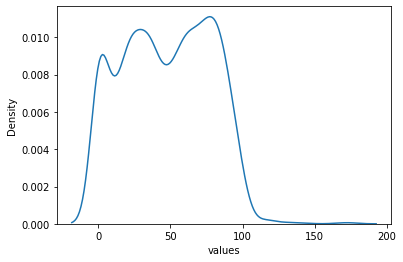

In [ ]:
sns.kdeplot(df1['values'])

In [ ]:
help(sns.kdeplot)

Help on function kdeplot in module seaborn.distributions:

kdeplot(x=None, *, y=None, shade=None, vertical=False, kernel=None, bw=None, gridsize=200, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=None, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, weights=None, hue=None, palette=None, hue_order=None, hue_norm=None, multiple='layer', common_norm=True, common_grid=False, levels=10, thresh=0.05, bw_method='scott', bw_adjust=1, log_scale=None, color=None, fill=None, data=None, data2=None, **kwargs)
    Plot univariate or bivariate distributions using kernel density estimation.
    
    A kernel density estimate (KDE) plot is a method for visualizing the
    distribution of observations in a dataset, analagous to a histogram. KDE
    represents the data using a continuous probability density curve in one or
    more dimensions.
    
    The approach is explained further in the :ref:`user guide <tutorial_kde>`.
    
    Relative to a histogram, KDE can produce a plot that

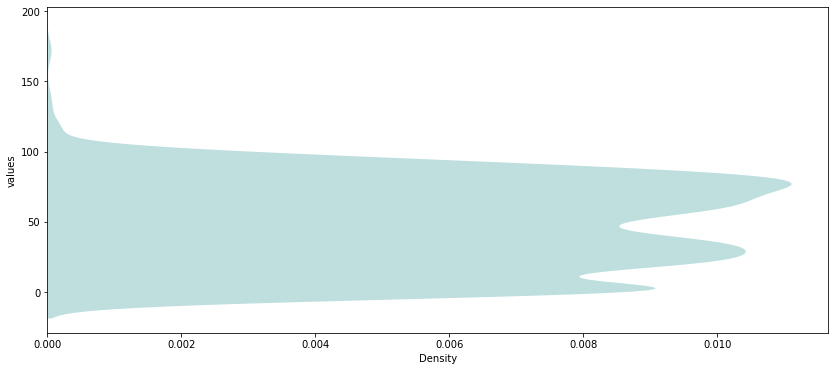

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(y=df1['values'],
            fill=True,
            color='teal',
            linewidth=0)

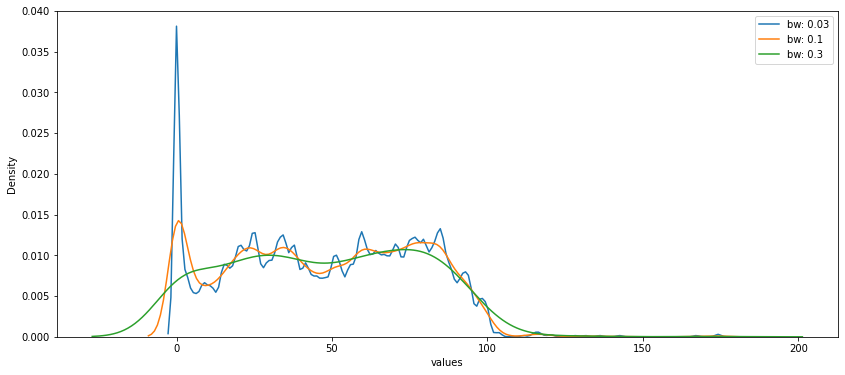

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(x=df1['values'], bw_method=0.03, label='bw: 0.03')
sns.kdeplot(x=df1['values'], bw_method=0.1, label='bw: 0.1')
sns.kdeplot(x=df1['values'], bw_method=0.3, label='bw: 0.3')
plt.legend()

# Bivariate Distributions

In [ ]:
df3 = pd.pivot(
    df1,
    index=['year', 'country'],
    columns=['waste'],
    values='values')
df3

waste                Glass packaging  ...  Wooden packaging
year country                          ...                  
1997 Austria                    76.5  ...              14.0
     Belgium                    70.1  ...              52.8
     Bulgaria                    NaN  ...               NaN
     Croatia                     NaN  ...               NaN
     Cyprus                      NaN  ...               NaN
...                              ...  ...               ...
2018 Slovakia                   68.6  ...              53.4
     Slovenia                  104.0  ...              25.1
     Spain                      76.8  ...              67.0
     Sweden                     92.7  ...              51.1
     United Kingdom             68.5  ...              35.2

[616 rows x 6 columns]

## Jointplot

In [ ]:
%%html
<iframe src="https://seaborn.pydata.org/generated/seaborn.jointplot.html" width="1000" height="600"></iframe>

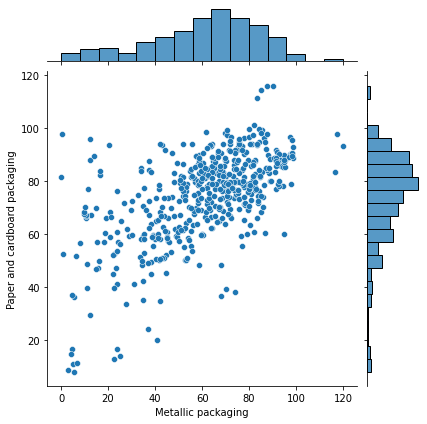

In [ ]:
sns.jointplot(data=df3,
              x='Metallic packaging',
              y='Paper and cardboard packaging')

In [ ]:
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(*, x=None, y=None, data=None, kind='scatter', color=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None, palette=None, hue_order=None, hue_norm=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : vectors or keys in ``data``
        Variables that specify positions on the x and y axes.
    data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
        Input data structure. Either a long-form collection of vectors that can be
        assigned to named variables or a wide-form datas

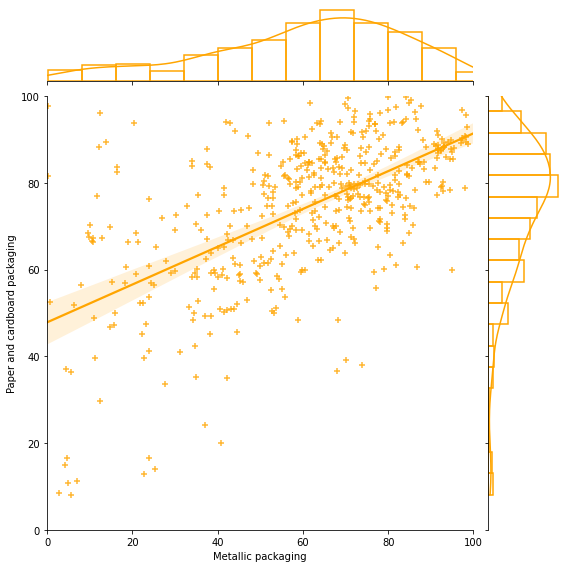

In [ ]:
sns.jointplot(data=df3,
              x='Metallic packaging',
              y='Paper and cardboard packaging',
              xlim=(0, 100),
              ylim=(0, 100),
              kind='reg',
              color='orange',
              height=8,
              ratio=5,
              marker='+',
              marginal_kws=dict(fill=False))

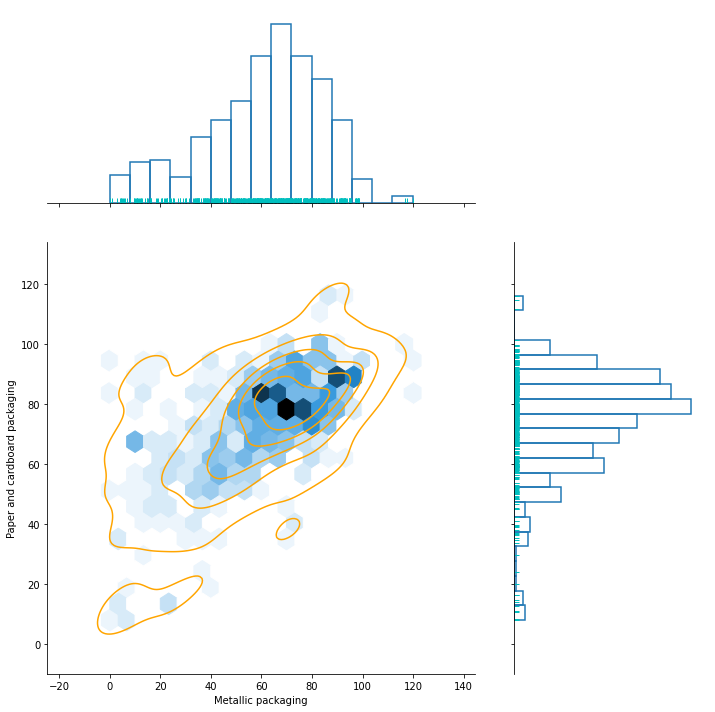

In [ ]:
g = sns.jointplot(data=df3,
              x='Metallic packaging',
              y='Paper and cardboard packaging',
              kind='hex',
              height=10,
              ratio=2,
              marginal_kws=dict(fill=False))

g.plot_joint(sns.kdeplot, color="orange", zorder=1, levels=6)
g.plot_marginals(sns.rugplot, color="c", clip_on=False)

### ❓ Exercise

In [ ]:
md(f"##❓ Save the previous figure!")

##❓ Save the previous figure!

Hint: help(g)

## kde-plot

In [ ]:
%%html
<iframe src="https://seaborn.pydata.org/generated/seaborn.kdeplot.html" width="1000" height="600"></iframe>

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(data=df3, x='Glass packaging', y='Plastic packaging')

In [ ]:
help(sns.kdeplot)

Help on function kdeplot in module seaborn.distributions:

kdeplot(x=None, *, y=None, shade=None, vertical=False, kernel=None, bw=None, gridsize=200, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=None, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, weights=None, hue=None, palette=None, hue_order=None, hue_norm=None, multiple='layer', common_norm=True, common_grid=False, levels=10, thresh=0.05, bw_method='scott', bw_adjust=1, log_scale=None, color=None, fill=None, data=None, data2=None, **kwargs)
    Plot univariate or bivariate distributions using kernel density estimation.
    
    A kernel density estimate (KDE) plot is a method for visualizing the
    distribution of observations in a dataset, analagous to a histogram. KDE
    represents the data using a continuous probability density curve in one or
    more dimensions.
    
    The approach is explained further in the :ref:`user guide <tutorial_kde>`.
    
    Relative to a histogram, KDE can produce a plot that

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(data=df3,
            x='Glass packaging',
            y='Plastic packaging',
            fill=True,
            clip=((-10, 120), (-10, 70)))

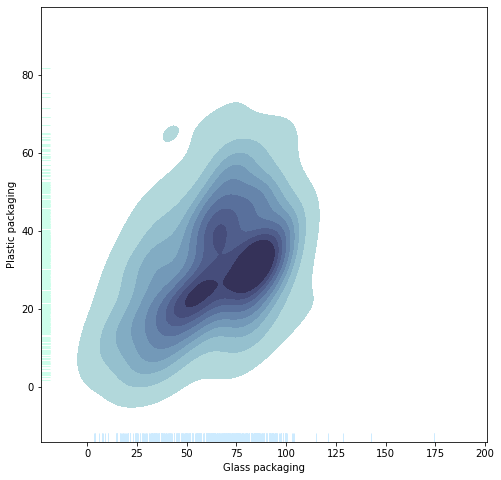

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.kdeplot(data=df3,
            x='Glass packaging',
            y='Plastic packaging',
            cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True),
            fill=True)
sns.rugplot(x=df3['Glass packaging'], color='#CDEBFF', height=0.02)
sns.rugplot(y=df3['Plastic packaging'], color='#CDFFEB', height=0.02)

## Pairplot

In [ ]:
%%html
<iframe src="https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot" width="1000" height="600"></iframe>

In [ ]:
df3

waste                Glass packaging  ...  Wooden packaging
year country                          ...                  
1997 Austria                    76.5  ...              14.0
     Belgium                    70.1  ...              52.8
     Bulgaria                    NaN  ...               NaN
     Croatia                     NaN  ...               NaN
     Cyprus                      NaN  ...               NaN
...                              ...  ...               ...
2018 Slovakia                   68.6  ...              53.4
     Slovenia                  104.0  ...              25.1
     Spain                      76.8  ...              67.0
     Sweden                     92.7  ...              51.1
     United Kingdom             68.5  ...              35.2

[616 rows x 6 columns]

In [ ]:
sns.pairplot(data=df3[['Glass packaging', 'Metallic packaging', 'Wooden packaging']])

In [ ]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared across the y-axes across a single row and
    the x-axes across a single column. The diagonal plots are treated
    differently: a univariate distribution plot is drawn to show the marginal
    distribution of the data in each column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly 

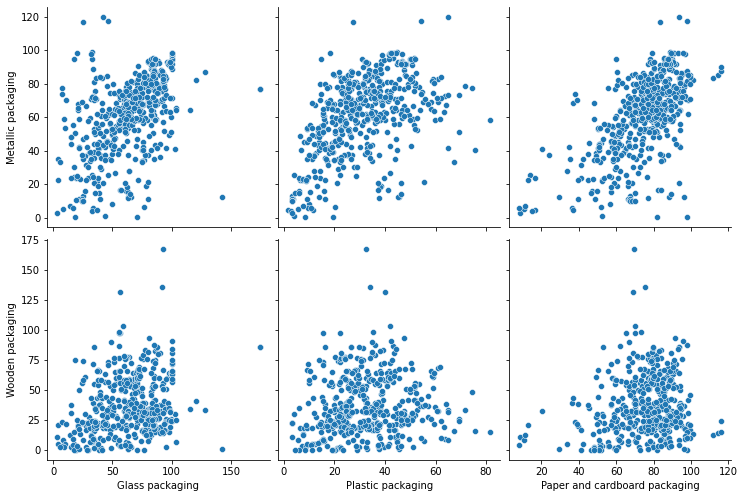

In [ ]:
sns.pairplot(data=df3,
             x_vars=['Glass packaging', 'Plastic packaging', 'Paper and cardboard packaging'],
             y_vars=['Metallic packaging', 'Wooden packaging'],
             height=3.5)

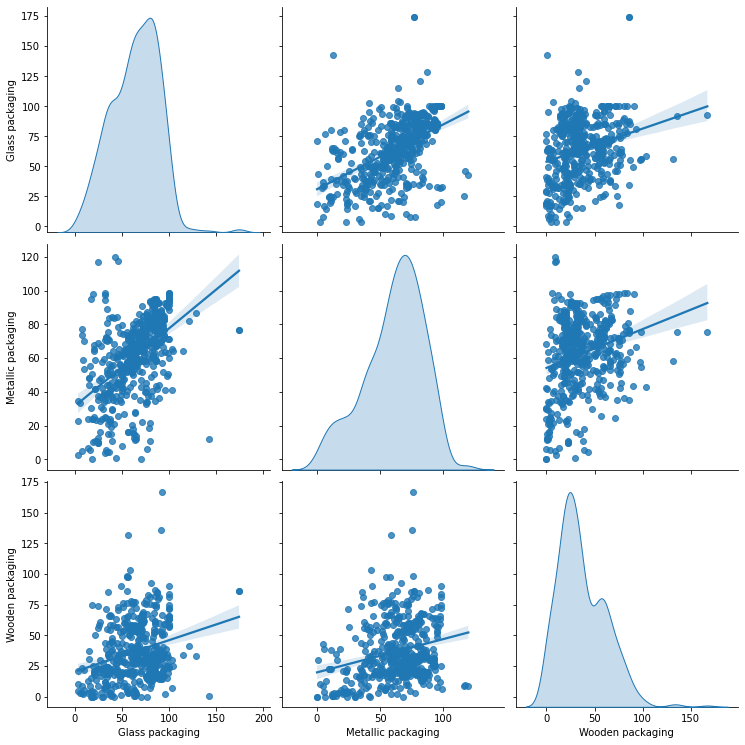

In [ ]:
sns.pairplot(data=df3,
             vars=['Glass packaging', 'Metallic packaging', 'Wooden packaging'],
             diag_kind='kde',
             kind='reg',
             height=3.5)

In [ ]:
df3 = df3.reset_index()

In [ ]:
df3

waste  year         country  ...  Plastic packaging  Wooden packaging
0      1997         Austria  ...               20.0              14.0
1      1997         Belgium  ...               25.3              52.8
2      1997        Bulgaria  ...                NaN               NaN
3      1997         Croatia  ...                NaN               NaN
4      1997          Cyprus  ...                NaN               NaN
..      ...             ...  ...                ...               ...
611    2018        Slovakia  ...               51.4              53.4
612    2018        Slovenia  ...               48.8              25.1
613    2018           Spain  ...               50.7              67.0
614    2018          Sweden  ...               50.0              51.1
615    2018  United Kingdom  ...               43.8              35.2

[616 rows x 8 columns]

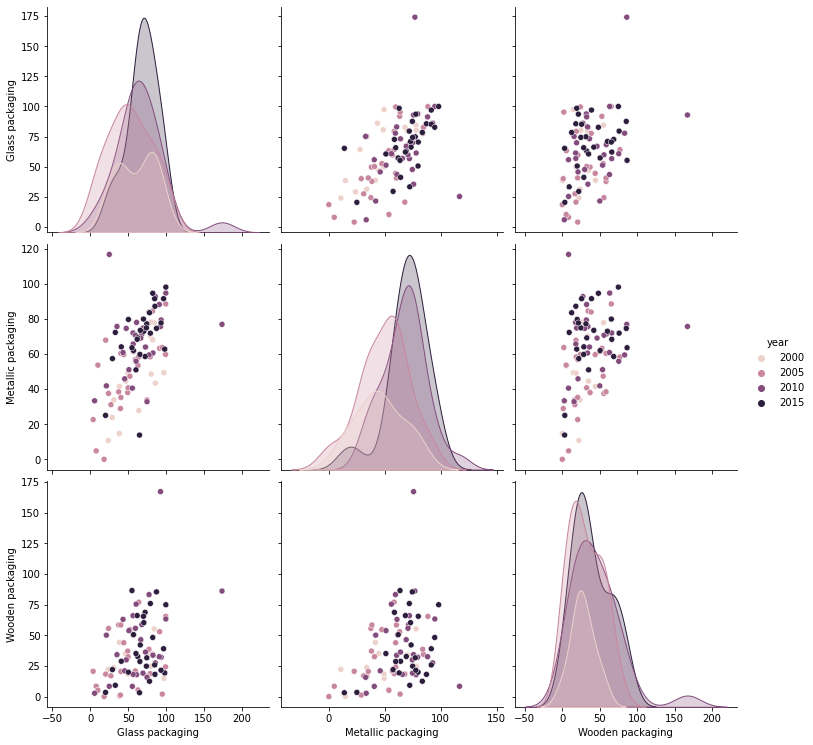

In [ ]:
sns.pairplot(data=df3[df3['year'] % 5 == 0],
             vars=['Glass packaging', 'Metallic packaging', 'Wooden packaging'],
             diag_kind='kde',
             kind='scatter',
             hue='year',
             height=3.5)

## Heatmap

In [ ]:
%%html
<iframe src="https://seaborn.pydata.org/generated/seaborn.heatmap.html" width="1000" height="600"></iframe>

In [ ]:
corrmat = df3.drop('year', axis=1).corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, vmin=-1, vmax=1)

In [ ]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

In [ ]:
corrmat = df3.drop('year', axis=1).corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat,
            vmin=-1,
            vmax=1,
            annot=True,
            fmt='.2f',
            cmap='summer')

## Lmplot

In [ ]:
%%html
<iframe src="https://seaborn.pydata.org/generated/seaborn.lmplot.html" width="1000" height="600"></iframe>

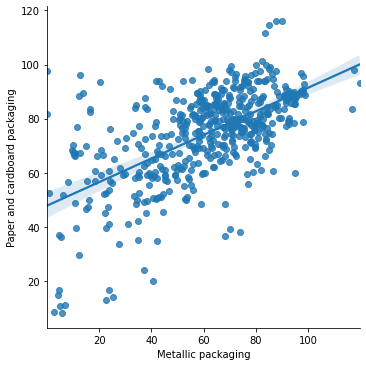

In [ ]:
sns.lmplot(data=df3,
           x='Metallic packaging',
           y='Paper and cardboard packaging')

In [ ]:
help(sns.lmplot)

Help on function lmplot in module seaborn.regression:

lmplot(*, x=None, y=None, data=None, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, size=None)
    Plot data and regression model fits across a FacetGrid.
    
    This function combines :func:`regplot` and :class:`FacetGrid`. It is
    intended as a convenient interface to fit regression models across
    conditional subsets of a dataset.
    
    When thinking about how to assign variables to different facets, a general
    rule is that it makes sense to use ``hue`` for the most important
    comparis

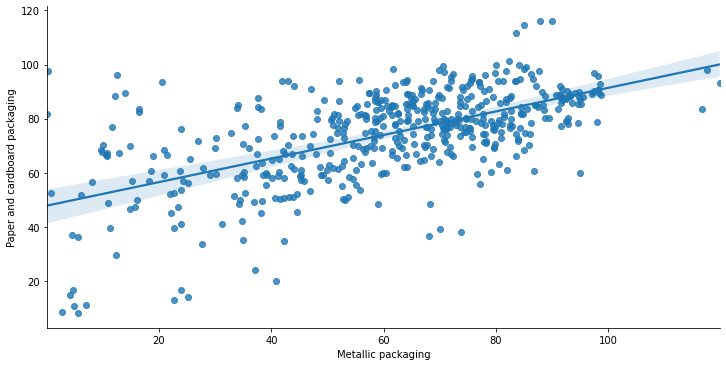

In [ ]:
sns.lmplot(data=df3,
           x='Metallic packaging',
           y='Paper and cardboard packaging',
           height=5,
           aspect=2,
           ci=99)

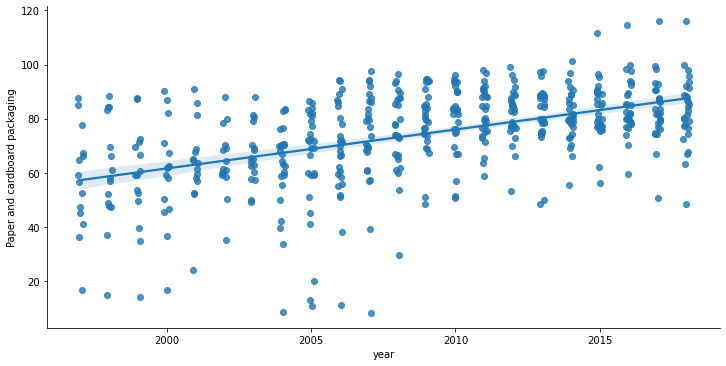

In [ ]:
sns.lmplot(data=df3,
           x='year',
           y='Paper and cardboard packaging',
           height=5,
           aspect=2,
           x_jitter=0.1)

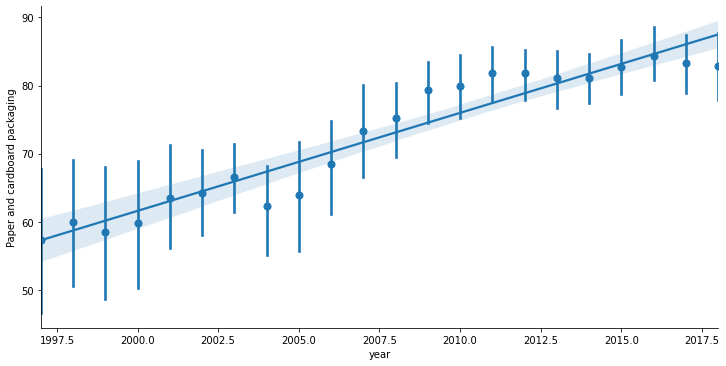

In [ ]:
sns.lmplot(data=df3,
           x='year',
           y='Paper and cardboard packaging',
           height=5,
           aspect=2,
           x_estimator=np.mean)

# Categorical Plots

## Stripplot

In [ ]:
%%html
<iframe src="https://seaborn.pydata.org/generated/seaborn.stripplot.html" width="1000" height="600"></iframe>

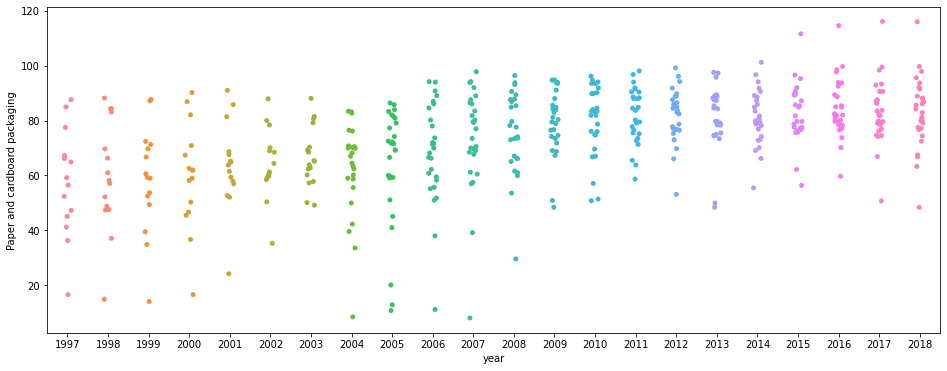

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.stripplot(data=df3,
              x='year',
              y='Paper and cardboard packaging')

## Swarmplot

In [ ]:
%%html
<iframe src="https://seaborn.pydata.org/generated/seaborn.swarmplot.html" width="1000" height="600"></iframe>

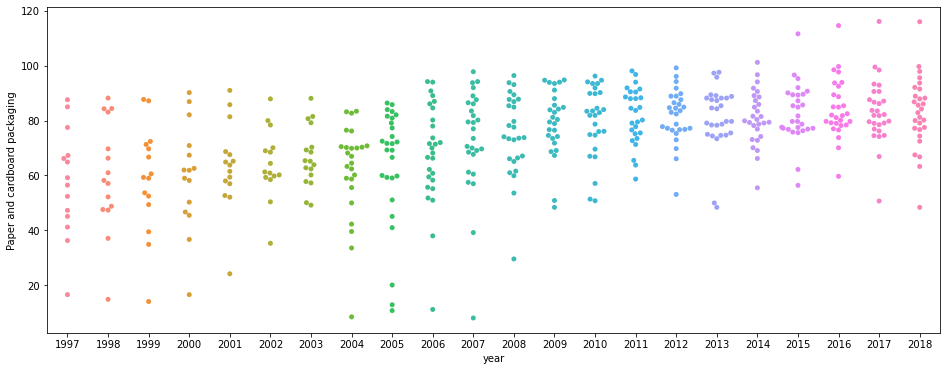

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.swarmplot(data=df3,
              x='year',
              y='Paper and cardboard packaging')

## Boxplot

In [ ]:
%%html
<iframe src="https://seaborn.pydata.org/generated/seaborn.boxplot.html" width="1000" height="600"></iframe>

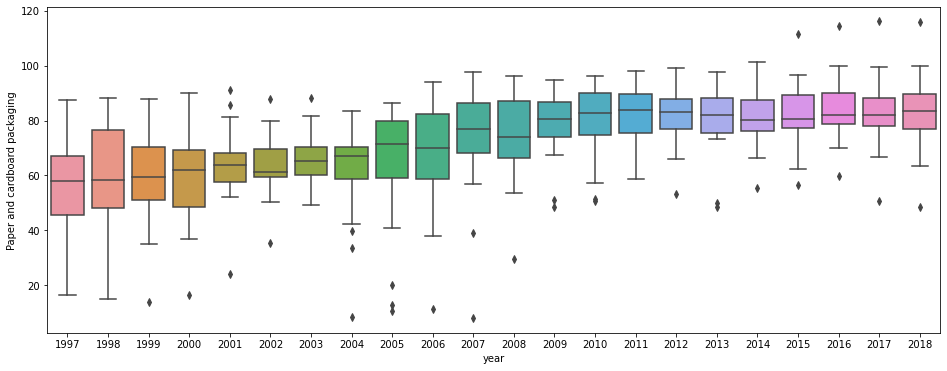

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(data=df3,
            x='year',
            y='Paper and cardboard packaging')

## Violinplot

In [ ]:
%%html
<iframe src="https://seaborn.pydata.org/generated/seaborn.violinplot.html" width="1000" height="600"></iframe>

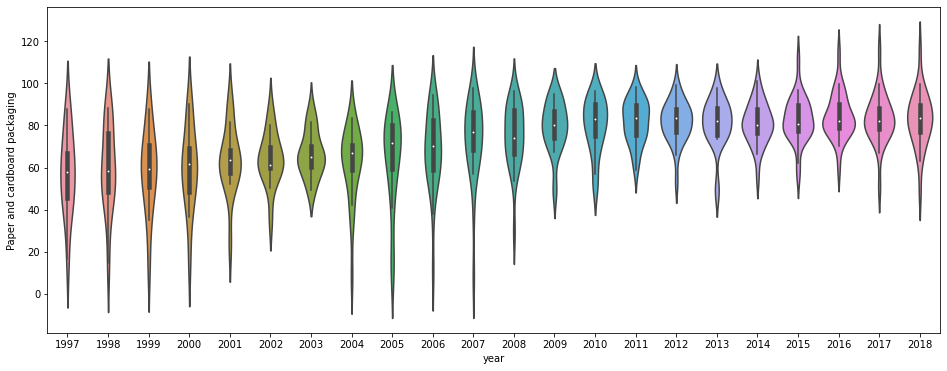

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.violinplot(data=df3,
               x='year',
               y='Paper and cardboard packaging')

## Barplot

In [ ]:
%%html
<iframe src="https://seaborn.pydata.org/generated/seaborn.barplot.html" width="1000" height="600"></iframe>

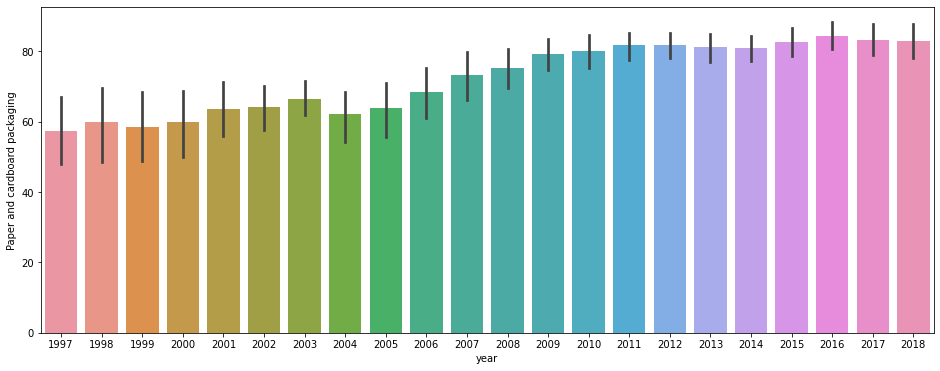

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(data=df3,
            x='year',
            y='Paper and cardboard packaging')

## Pointplot

In [ ]:
%%html
<iframe src="https://seaborn.pydata.org/generated/seaborn.pointplot.html" width="1000" height="600"></iframe>

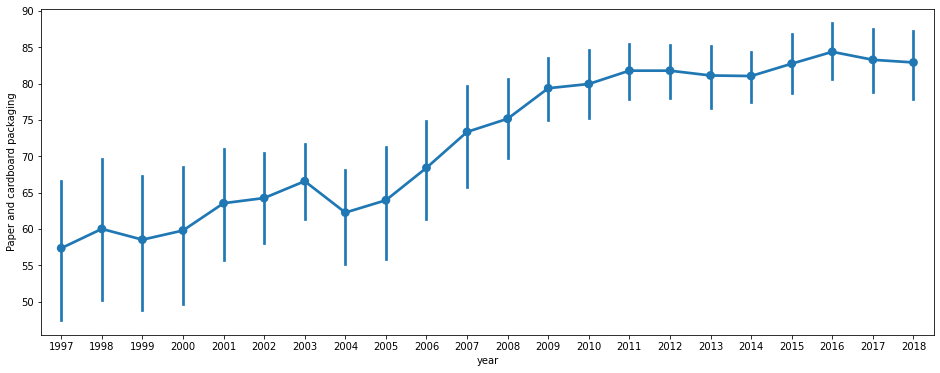

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.pointplot(data=df3,
              x='year',
              y='Paper and cardboard packaging')

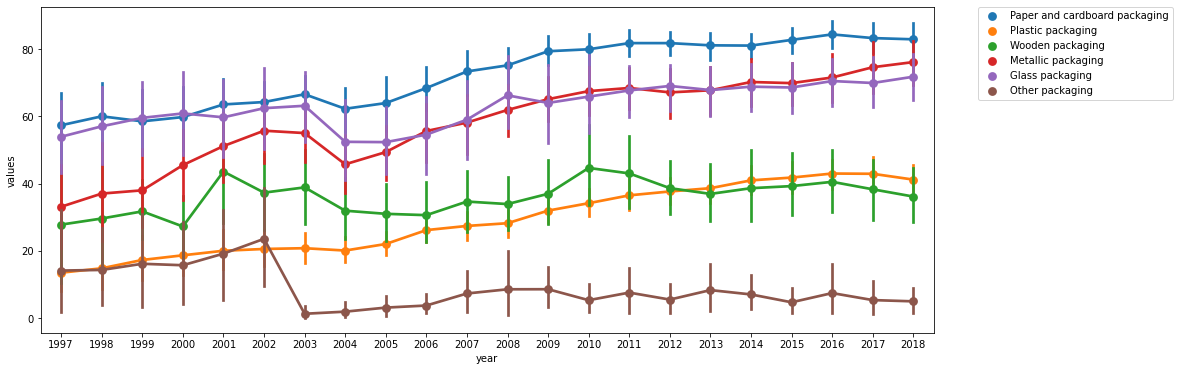

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.pointplot(data=df1,
              x='year',
              y='values',
              hue='waste')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Grids of Plots

## FacetGrid

In [ ]:
%%html
<iframe src="https://seaborn.pydata.org/generated/seaborn.FacetGrid.html" width="1000" height="600"></iframe>

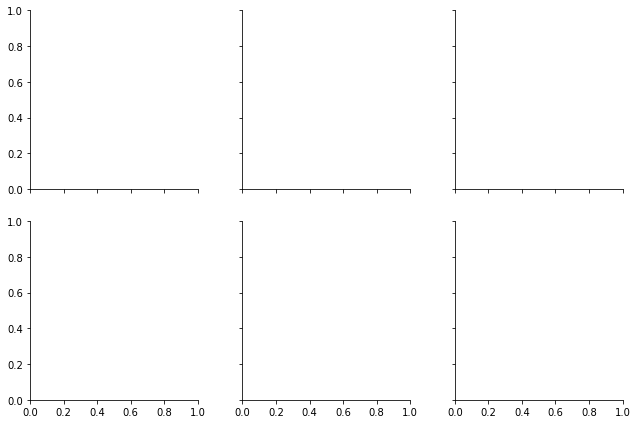

In [ ]:
g = sns.FacetGrid(df1, col='waste', col_wrap=3)

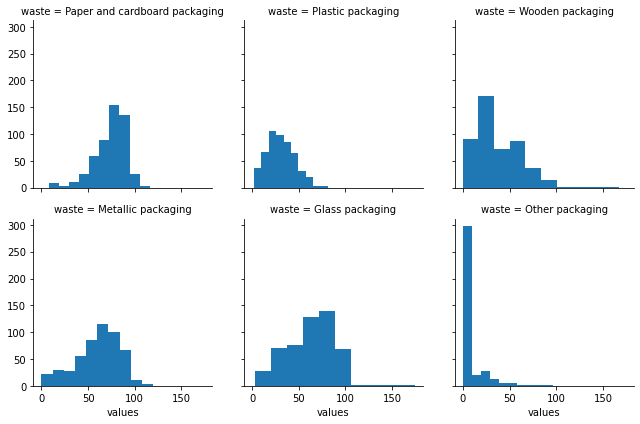

In [ ]:
g = sns.FacetGrid(df1, col='waste', col_wrap=3)
g.map(plt.hist, 'values')

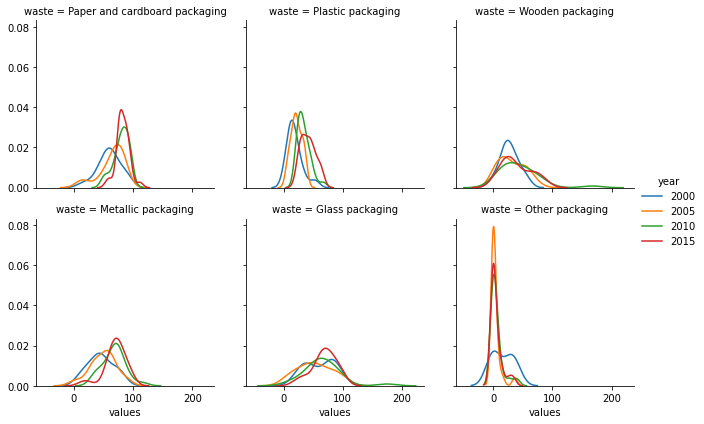

In [ ]:
g = sns.FacetGrid(df1[df1['year'] % 5 == 0], col='waste', col_wrap=3, hue='year')
g.map(sns.kdeplot, 'values')
g.add_legend()

In [ ]:
df_benelux = pd.concat([df1[df1['country']==country] for country in ['Belgium', 'Netherlands', 'Luxembourg']])
df_benelux

values                          waste unit     country  year
22      77.5  Paper and cardboard packaging   RT     Belgium  1997
23      83.1  Paper and cardboard packaging   RT     Belgium  1998
24      69.7  Paper and cardboard packaging   RT     Belgium  1999
25      82.1  Paper and cardboard packaging   RT     Belgium  2000
26      85.8  Paper and cardboard packaging   RT     Belgium  2001
...      ...                            ...  ...         ...   ...
3471     0.0                Other packaging   RT  Luxembourg  2014
3472     0.0                Other packaging   RT  Luxembourg  2015
3473     0.0                Other packaging   RT  Luxembourg  2016
3474     0.0                Other packaging   RT  Luxembourg  2017
3475     0.0                Other packaging   RT  Luxembourg  2018

[396 rows x 5 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


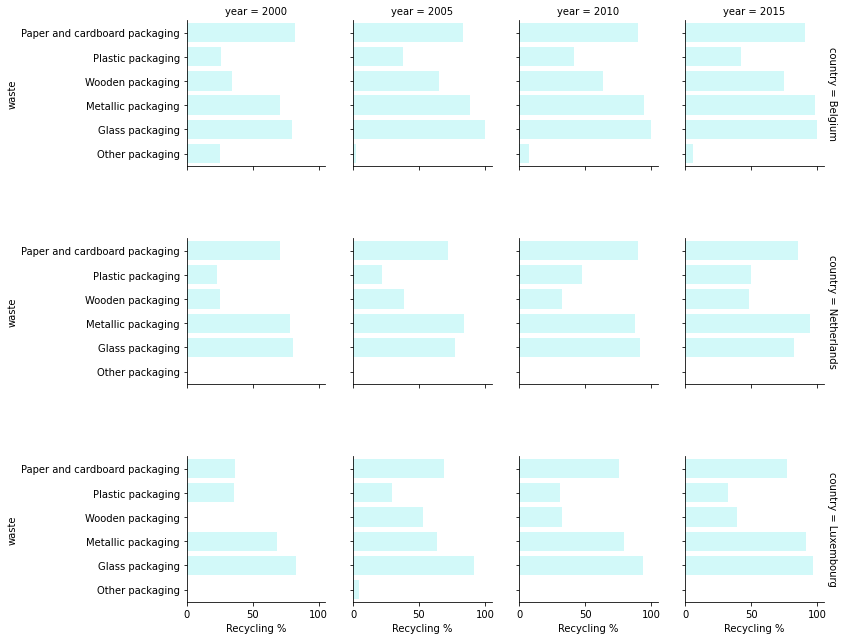

In [ ]:
g = sns.FacetGrid(df_benelux[df_benelux['year'] % 5 == 0],
                  col='year', 
                  row='country',
                  margin_titles=True)
g.map(sns.barplot, 
      'values', 
      'waste', 
      orient='h',
      color='#ccffff')
g.add_legend()
g.fig.subplots_adjust(wspace=0.2, hspace=0.5)
g.set_xlabels('Recycling %')

## Pairgrid

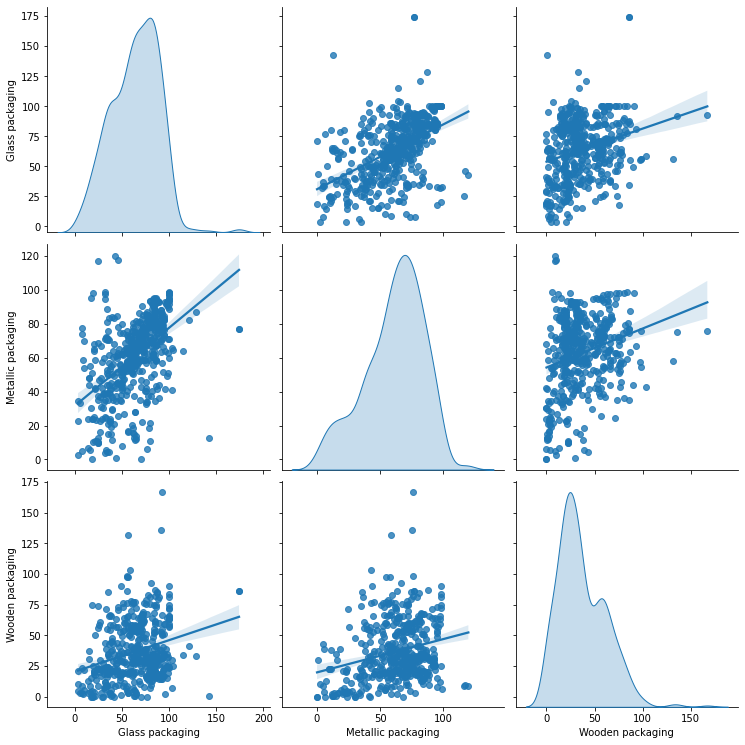

In [ ]:
sns.pairplot(data=df3,
             vars=['Glass packaging', 'Metallic packaging', 'Wooden packaging'],
             diag_kind='kde',
             kind='reg',
             height=3.5)

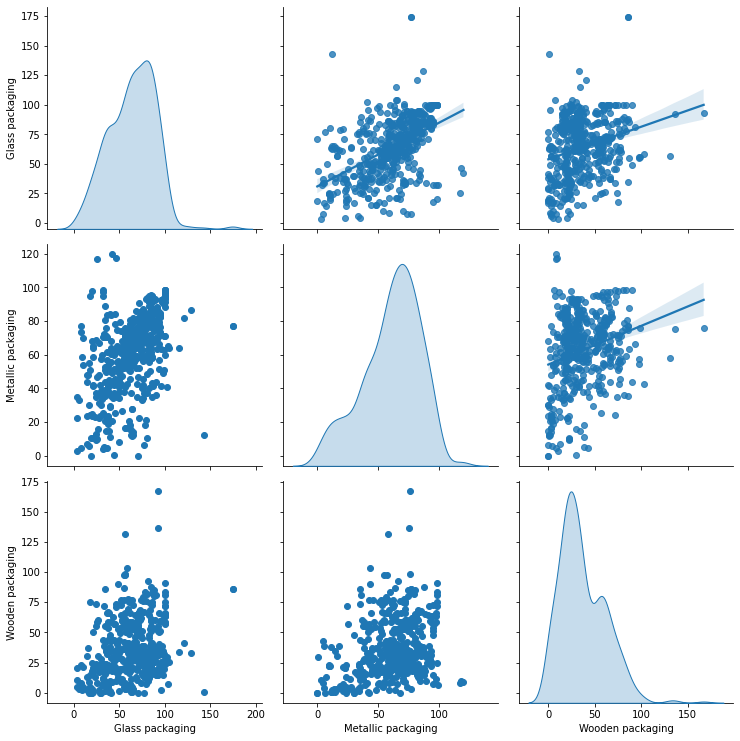

In [ ]:
g = sns.PairGrid(data=df3,
                 vars=['Glass packaging', 'Metallic packaging', 'Wooden packaging'],
                 height=3.5)
g.map_diag(sns.kdeplot, fill=True)
g.map_upper(sns.regplot)
g.map_lower(plt.scatter)

# Aesthetics

## Preset styles

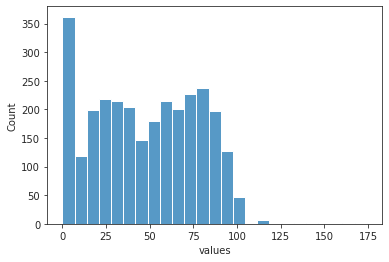

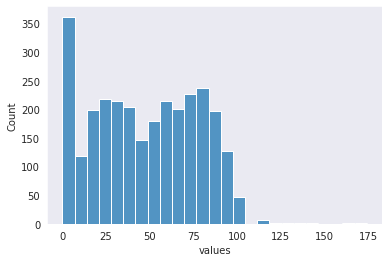

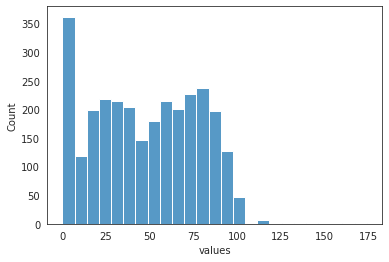

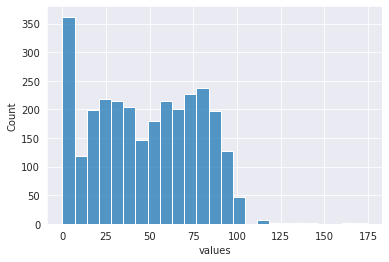

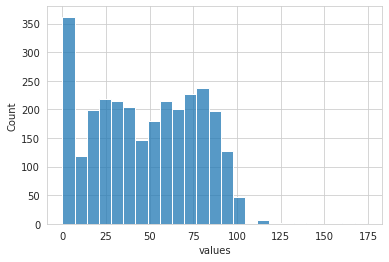

In [ ]:
for style in ['ticks', 'dark', 'white', 'darkgrid', 'whitegrid']:   
  with sns.axes_style(style):
    sns.histplot(df1['values'])
  plt.show()

## Despine

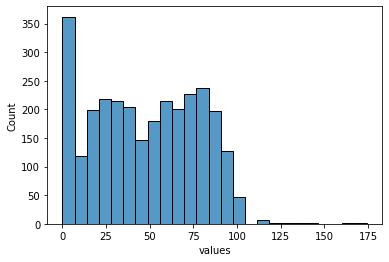

In [ ]:
sns.histplot(df1['values'])

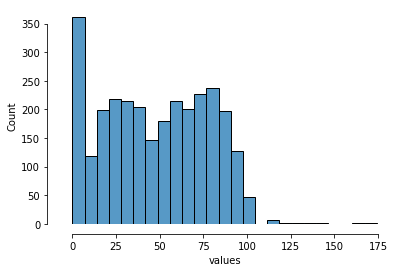

In [ ]:
sns.histplot(df1['values'])
sns.despine(right=True, top=True, offset=10, trim=True)

## Color Palettes

In [ ]:
 %%html
<iframe src="https://seaborn.pydata.org/tutorial/color_palettes.html" width="1000" height="600"></iframe>

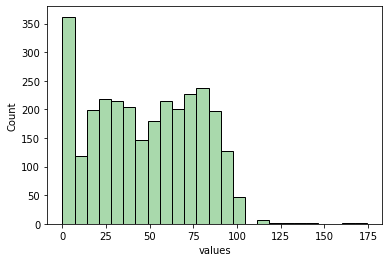

In [ ]:
with sns.color_palette('Greens_d'):
  sns.histplot(df1['values'])

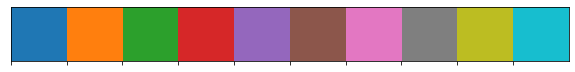

In [ ]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

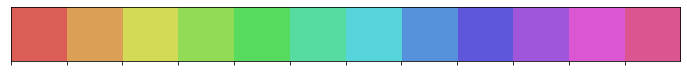

In [ ]:
sns.palplot(sns.color_palette('hls', 12))

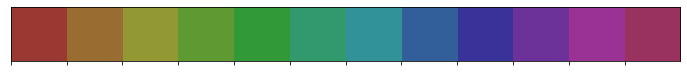

In [ ]:
sns.palplot(sns.hls_palette(12, l=0.4, s=0.5))

### Qualitative

In [ ]:
sns.choose_colorbrewer_palette('qualitative')

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

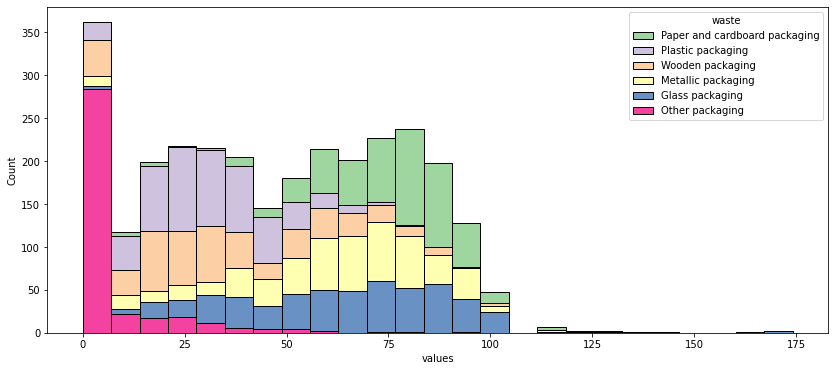

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(data=df1,
             x='values',
             hue='waste',
             multiple='stack',
             palette="Accent")

### Sequetial

In [ ]:
sns.choose_colorbrewer_palette('sequential')

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

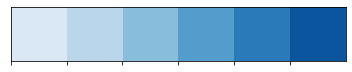

In [ ]:
sns.palplot(sns.color_palette('Blues'))

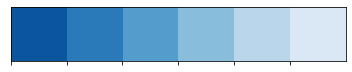

In [ ]:
sns.palplot(sns.color_palette('Blues_r'))

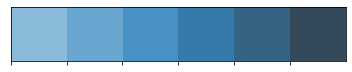

In [ ]:
sns.palplot(sns.color_palette('Blues_d'))

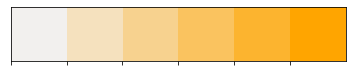

In [ ]:
sns.palplot(sns.light_palette('Orange'))

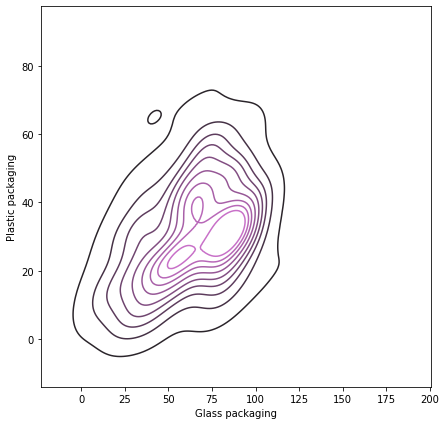

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.kdeplot(data=df3,
            x='Glass packaging',
            y='Plastic packaging',
            cmap=sns.dark_palette('Violet', as_cmap=True))

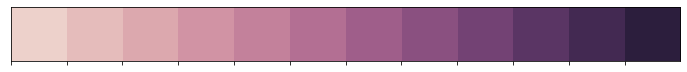

In [ ]:
sns.palplot(sns.cubehelix_palette(12))

### Diverging

In [ ]:
sns.choose_colorbrewer_palette('diverging')

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

[(0.6922722029988467, 0.09227220299884642, 0.16770472895040373),
 (0.8392156862745099, 0.376470588235294, 0.3019607843137253),
 (0.9545559400230679, 0.641753171856978, 0.5057285659361783),
 (0.9921568627450982, 0.8588235294117645, 0.7803921568627449),
 (0.9657054978854286, 0.9672433679354094, 0.9680891964628989),
 (0.8196078431372551, 0.8980392156862745, 0.9411764705882353),
 (0.5664744329104192, 0.7687043444828916, 0.8685121107266438),
 (0.26274509803921564, 0.576470588235294, 0.7647058823529411),
 (0.1272587466359093, 0.39584775086505203, 0.6687427912341407)]

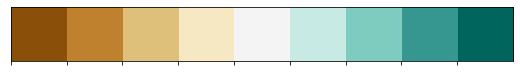

In [ ]:
sns.palplot(sns.color_palette('BrBG', 9))

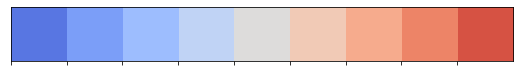

In [ ]:
sns.palplot(sns.color_palette('coolwarm', 9))

## Figure Aesthetics

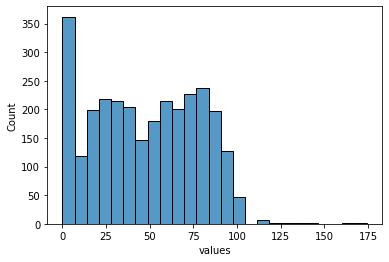

In [ ]:
sns.histplot(df1['values'])

In [ ]:
sns.axes_style()

{'axes.axisbelow': 'line',
 'axes.edgecolor': 'black',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': (1, 1, 1, 0),
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'image.cmap': 'viridis',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'text.color': 'black',
 'xtick.bottom': True,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False}

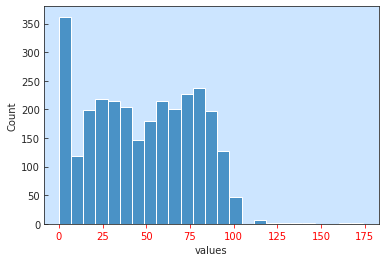

In [ ]:
with sns.axes_style('ticks', {'xtick.color': 'red',
                              'ytick.direction': 'in',
                              'axes.facecolor': '#cce5ff'
                              }):
  sns.histplot(df1['values'])

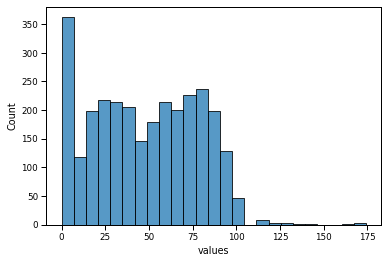

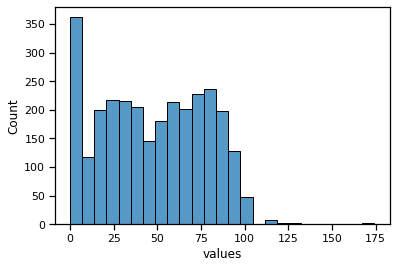

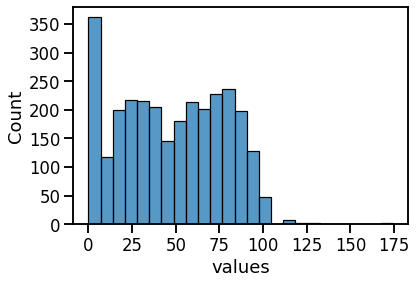

In [ ]:
for context in ['paper', 'notebook', 'talk', 'poster']:   
  with sns.plotting_context(context):
    sns.histplot(df1['values'])
  plt.show()

Text(0.5, 0, 'Recycling')

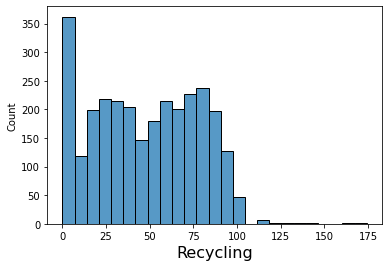

In [ ]:
sns.histplot(df1['values'])
plt.xlabel('Recycling', fontsize=16)

### ❓ Exercise

In [ ]:
md(f"##❓ Practice makes perfect: Experiment with all visualization techniques!")

##❓ Practice makes perfect: Experiment with all visualization techniques!

In [ ]:
%%html
<iframe src="https://seaborn.pydata.org/examples/index.html" width="1000" height="800"></iframe>